In [1]:
print("Hello World!")

Hello World!


In [ ]:
#Function to convert pdf file to images.

from pathlib import Path
from typing import List
import fitz  # PyMuPDF
from PIL import Image
import io
import base64

async def convert_pdf_to_images(
    pdf_file: bytes,
    dpi: int = 300,
    output_format: str = "PNG"
) -> List[str]:
    """
    Convert PDF pages to base64 encoded images.
    
    Args:
        pdf_file (bytes): PDF file content in bytes
        dpi (int): Resolution for the output images (default: 300)
        output_format (str): Output image format (default: "PNG")
        
    Returns:
        List[str]: List of base64 encoded images, one per page
    
    Raises:
        ValueError: If the PDF is invalid or empty
        Exception: For other processing errors
    """
    try:
        # Load PDF from bytes
        pdf_document = fitz.open(stream=pdf_file, filetype="pdf")
        
        if pdf_document.page_count == 0:
            raise ValueError("PDF document is empty")
            
        images = []
        zoom = dpi / 72  # PDF standard DPI is 72

        for page_num in range(pdf_document.page_count):
            page = pdf_document[page_num]
            
            # Convert PDF page to image
            mat = fitz.Matrix(zoom, zoom)
            pix = page.get_pixmap(matrix=mat)
            
            # Convert to PIL Image
            img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
            
            # Convert to base64
            img_byte_arr = io.BytesIO()
            img.save(img_byte_arr, format=output_format)
            img_byte_arr = img_byte_arr.getvalue()
            base64_encoded = base64.b64encode(img_byte_arr).decode('utf-8')
            
            images.append(base64_encoded)
            
        pdf_document.close()
        return images
        
    except fitz.FileDataError:
        raise ValueError("Invalid PDF file")
    except Exception as e:
        raise Exception(f"Error processing PDF: {str(e)}")

# Example FastAPI endpoint implementation:
'''
from fastapi import FastAPI, File, UploadFile, HTTPException
from typing import List

app = FastAPI()

@app.post("/convert-pdf/", response_model=List[str])
async def convert_pdf_endpoint(
    file: UploadFile = File(...),
    dpi: int = 300
):
    if not file.filename.lower().endswith('.pdf'):
        raise HTTPException(status_code=400, detail="File must be a PDF")
        
    try:
        contents = await file.read()
        images = await convert_pdf_to_images(contents, dpi=dpi)
        return images
    except ValueError as e:
        raise HTTPException(status_code=400, detail=str(e))
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))
'''


In [4]:
base64_image_list=[
  "iVBORw0KGgoAAAANSUhEUgAACfYAAAzkCAIAAACYgxr+AAEAAElEQVR4nOzddVwU+f8H8M9s0w2CmNhiYreIhNgdd+pZV54dp1ee3tlxncZ53hlnK4IgFiEWWGAXEirStT3z+2N/t99xd9kdYIn1Xs8Hf7Czn/nMe2Nmd+c9n/eHYhiGAAAAAAAAAAAAAAAAAACAJeDVdAAAAAAAAAAAAAAAAAAAAMAVUrwAAAAAAAAAAAAAAAAAABYDKV4AAAAAAAAAAAAAAAAAAIuBFC8AAAAAAAAAAAAAAAAAgMVAihcAAAAAAAAAAAAAAAAAwGIgxQsAAAAAAAAAAAAAAAAAYDGQ4gUAAAAAAAAAAAAAAAAAsBhI8QIAAAAAAAAAAAAAAAAAWAykeAEAAAAAAAAAAAAAAAAALAZSvAAAAAAAAAAAAAAAAAAAFgMpXgAAAAAAAAAAAAAAAAAAi4EULwAAAAAAAAAAAAAAAACAxUCKFwAAAAAAAAAAAAAAAADAYiDFCwAAAAAAAAAAAAAAAABgMZDiBQAAAAAAAAAAAAAAAACwGEjxAgAAAAAAAAAAAAAAAABYDKR4AQAAAAAAAAAAAAAAAAAsBlK8AAAAAAAAAAAAAAAAAAAWAyleAAAAAAAAAAAAAAAAAACLgRQvAAAAAAAAAAAAAAAAAIDFQIoXAAAAAAAAAAAAAAAAAMBiIMULAAAAAAAAAAAAAAAAAGAxkOIFAAAAAAAAAAAAAAAAALAYSPECAAAAAAAAAAAAAAAAAFgMpHgBAAAAAAAAAAAAAAAAACwGUrwAAAAAAAAAAAAAAAAAABYDKV4AAAAAAAAAAAAAAAAAAIuBFC8AAAAAAAAAAAAAAAAAgMVAihcAAAAAAAAAAAAAAAAAwGIgxQsAAAAAAAAAAAAAAAAAYDGQ4gUAAAAAAAAAAAAAAAAAsBhI8QIAAAAAAAAAAAAAAAAAWAykeAEAAAAAAAAAAAAAAAAALAZSvAAAAAAAAAAAAAAAAAAAFgMpXgAAAAAAAAAAAAAAAAAAi4EULwAAAAAAAAAAAAAAAACAxUCKFwAAAAAAAAAAAAAAAADAYiDFCwAAAAAAAAAAAAAAAABgMZDiBQAAAAAAAAAAAAAAAACwGEjxAgAAAAAAAAAAAAAAAABYDKR4AQAAAAAAAAAAAAAAAAAsBlK8AAAAAAAAAAAAAAAAAAAWAyleAAAAAAAAAAAAAAAAAACLgRQvAAAAAAAAAAAAAAAAAIDFQIoXAAAAAAAAAAAAAAAAAMBiIMULAAAAAAAAAAAAAAAAAGAxkOIFAAAAAAAAAAAAAAAAALAYSPECAAAAAAAAAAAAAAAAAFgMpHgBAAAAAAAAAAAAAAAAACwGUrwAAAAAAAAAAAAAAAAAABYDKV4AAAAAAAAAAAAAAAAAAIuBFC8AAAAAAAAAAAAAAAAAgMVAihcAAAAAAAAAAAAAAAAAwGIgxQsAAAAAAAAAAAAAAAAAYDGQ4gUAAAAAAAAAAAAAAAAAsBhI8QIAAAAAAAAAAAAAAAAAWAykeAEAAAAAAAAAAAAAAAAALAZSvAAAAAAAAAAAAAAAAAAAFgMpXgAAAAAAAAAAAAAAAAAAi4EULwAAAAAAAAAAAAAAAACAxUCKFwAAAAAAAAAAAAAAAADAYiDFCwAAAAAAAAAAAAAAAABgMZDiBQAAAAAAAAAAAAAAAACwGEjxAgAAAAAAAAAAAAAAAABYDKR4AQAAAAAAAAAAAAAAAAAsBlK8AAAAAAAAAAAAAAAAAAAWAyleAAAAAAAAAAAAAAAAAACLgRQvAAAAAAAAAAAAAAAAAIDFQIoXAAAAAAAAAAAAAAAAAMBiIMULAAAAAAAAAAAAAAAAAGAxkOIFAAAAAAAAAAAAAAAAALAYSPECAAAAAAAAAAAAAAAAAFgMpHgBAAAAAAAAAAAAAAAAACwGUrwAAAAAAAAAAAAAAAAAABYDKV4AAAAAAAAAAAAAAAAAAIuBFC8AAAAAAAAAAAAAAAAAgMVAihcAAAAAAAAAAAAAAAAAwGIgxQsAAAAAAAAAAAAAAAAAYDGQ4gUAAAAAAAAAAAAAAAAAsBhI8QIAAAAAAAAAAAAAAAAAWAykeAEAAAAAAAAAAAAAAAAALAZSvAAAAAAAAAAAAAAAAAAAFgMpXgAAAAAAAAAAAAAAAAAAi4EULwAAAAAAAAAAAAAAAACAxUCKFwAAAAAAAAAAAAAAAADAYiDFCwAAAAAAAAAAAAAAAABgMZDiBQAAAAAAAAAAAAAAAACwGEjxAgAAAAAAAAAAAAAAAABYDKR4AQAAAAAAAAAAAAAAAAAsBlK8AAAAAAAAAAAAAAAAAAAWAyleAAAAAAAAAAAAAAAAAACLgRQvAAAAAAAAAAAAAAAAAIDFQIoXAAAAAAAAAAAAAAAAAMBiIMULAAAAAAAAAAAAAAAAAGAxkOIFAAAAAAAAAAAAAAAAALAYSPECAAAAAAAAAAAAAAAAAFgMpHgBAAAAAAAAAAAAAAAAACwGUrwAAAAAAAAAAAAAAAAAABYDKV4AAAAAAAAAAAAAAAAAAIuBFC8AAAAAAAAAAAAAAAAAgMUQ1HQAYNkYpZIpKmGkMkIIZS3h2dkSAd5UAAAAAAAAAAAAAAAAAFUF2TioIKaoWHEpURYWpbp/jy4qJITw7B2EbdpIhgcL27ejJGJtS+WVa9Ij4YSmeR5u1lMn8BwdDHRH09L9x5TXbxFCBM2aWE8dTyiquh4KAAAAAAAAAAAAAAAAgMVAihfKj2HUj54WbfpeFnWKUcopgYiylhCaqNPSFbdulB49Yvv2WzazZ1H2tprmqpS7Jbt2EUJTIomweVNxyAD9LtUZL4p//EX19DEhRNylp9WUcRRSvAAAAAAAAAAAAAAAAAB6kOKFclM9SS2Y+7Hi1nXKykrSZ6AkJFDQuAGhaeWtO9LDR5Upt0r3/CPq2U3Ut4fOioxCJj1yXBzQlwh133jymAvqtGfV9QgAAAAAAAAAAAAAAAAALBVSvFA+TKm05NtfFMnXeXYOdgvnWY0bTllbaYoqCzt3kAwKKP5pq7CNr7BbJ50VKYGIMLTiylXV3QeCNi11+pQdP8HQar69s7owt/oeDAAAAAAAAAAAAAAAAICl4dV0AGBhlFeuyU5FEx7fZvpU67fGUDbW/5s0l6J4nh52ny22Gj2EEot0VhTUayho2kKd/Up2MpowzGt9Xk9W3krmO7mKunevnkcBAAAAAAAAAAAAAAAAYKGQ4oXyUKtlp07TxYXCRo2tx44gIqF+E0okIjwD7yuena3VkGDC48miTtGvcv53B8PIjkfQRQXCTn7Clk2qLnYAAAAAAAAAAAAAAACANwBSvFAOjFyhvJ5CKErUoxuvjnv5VqaIuE9PgZe36tFjRWyCdrH6Wbo8JoYSS6yGhxK9sb8AAAAAAAAAAAAAAAAAwIYUL5QDI5fTebmExxe2ak4E/PKuzq9fV9y3D6NSSI+fYGQyzUL56VhVZqagkY+oS0dzxwsAAAAAAAAAAAAAAADwpkGKF8qDpolaRShCWVlVZHU+XzIkiLKxVSReU926SwhhikukJ8IJrZaEDOS5uZo5WgAAAAAAAAAAAAAAAIA3DlK8UA6UQEiJrAjD0AVFhGEq0IOgTSuRb1u6IF8aHsmo1Yor11Upd3hOruKA/oSizB4wAAAAAAAAAAAAAAAAwBsGKV4oD4mY5+1JaFpx/SajUlWgA56drdWwQYSi5GfO0hkvZMcj6NIicefOgmaNzR4sAAAAAAAAAAAAAAAAwJsHKV4oB0okFPfvTfF4ivgLqgePDTdiGOMDfEV9ewq866lTU0t37JbHx1FCkWTkYEosrpKIAQAAAAAAAAAAAAAAAN4sSPFCeVCUONBf0KixOutFyU+/07l5ug1oRnH5mjzqLKNQlNUHz7OOuF8fhlaX/PWX+sVzYZNmok4dqjZsAAAAAAAAAAAAAAAAgDcFUrxQPoJ6dW3em0lZ2UgjIgo/Xqm8nszI5YSmiZpmSkplEdEFi5bnL1wm/XM/oWmDPVACvmRwCM/GjpFLCcNIBgXyXJyq+VEAAAAAAAAAAAAAAAAAWChBTQcAlobHkwwNpl9lF//8mzQyQnH1irBNG0GzxkRNK2/dUaYk08VFfA8vfv26hKLK6kPYpoWwTVv5xXi+i6s40J/wcKkBAAAAAAAAAAAAAAAAACdI8UK5URKJzcwpgsaNirf/obx+S3buDDl7hlCEUBTP2lYywN/m3emiLh21KV5KLOZZ2VHWNv9bYmtrNTxUeStZ3KsPv3GD//UsFPEktjxr6xp4VAAAAAAAAAAAAAAAAACWgGIYpqZjAEtF5+crk26pUu6o058zPJ6wUT1hW19B6xaUne1rzV5lqx+lUvZ2guY+hM/XLGSKS1S37/O86vC9Pf/XMvOlOjWNcnIQtGharY8EAAAAAAAAAAAAAAAAwEIgxQvmoHkXlV2ZGQAAAAAAAAAAAAAAAADMAoWawRyQ3AUAAAAAAAAAAAAAAACoFryaDgAAAAAAAAAAAAAAAAAAALhCihcAAAAAAAAAAAAAAAAAwGIgxQsAAAAAAAAAAAAAAAAAYDEwFy+Uj1QqlcsVVdc/RRErKyuRSGSyJU3TJSUlajVdmc0JhQIbG5vK9AAAAAAAAAAAAAAAAABQnZDihXKgafr337cePnyo6jbB5wsWLFgwaFCIyZa5ubnz5s3LyMiozOZ69uz12WefisXiiq1+7dq1mzdvEkL4PH7vPr0bNGhQmWAAjFM/y5AdP8kolYQQYesW4oC+hKJqOiiuVCpVYWFhbm7uq1ev8vPzc3JyVGq1TCqVSCQURTk4Ojo6ODg5Obm6ujo4ONjY2FCW89AAAAAAAAAAAAAAAKoZUrxQDgzDPHr0KDYuruo2IRAIJkyYwKWlXC6/cuXKo8ePK7M5R0cnmq7gOGCpVLriyy/Dw8MJIRRFff7ZZ8uXL+fxqqn4uVQqUyjk5uqNoigra2uhoIIHBLVaXVJSwjBMJcMQiURWVlYG71IoFFKptJL9VzMbGxtBRZ9SAxhGFhZZuGEDoWlCiKhlG1GnDpSTg9n6rxolJSVpaWmXL1+5cOFCyu2UzMzM3Nxcg+8WsVhsb2/v4uLSqGHDjh079u3bt3Xr1i4uLnw+v6zOX7x4ceXKFZVK1bJlyxYtWhgJw1xv0erBsZIBAAAAAAAAAAAAAPxnIcUL5UFR7h7uzZo1079HqVCkpWeoVEqTfUgkEm9v77JSoQI+38GBU9ZKIBA0bNSIX3YKrbi4+Pnz5wzDiEQi77p1BUKhfpu6detWeLDg3bv3kpKSNEkjhmGio6Nnz57t6OhYsd7K6/fffwsLO8EQ86Ss+Hz+xIkTJ06cKCg7nWbEgwcPln/ySVFRUSXDCBgQsHTpEoN3hYWF/fLLr+Z6vNWAR1GrVn3VpUtnc3XIFJfIzpwl/16RoEx7qrx1W9Snu7n6Ny+apl+9enX+/PmDhw4lJCS8ePFC51oKiqL4fL42fUvTtFwuz8rKysrKunPnTsTJk5s2b27VqlVISMiokSObNm0qkUh0NvHq1avFixf/s38/TdMrvlixfPkyI/vyo0ePFi5cJJPLzP5Iq8LCBQuDg4NqOgoAAAAAAAAAAAAAqL2Q4oVy4PN48+fN++C99/Tvys3NHTt+/I0bN0x2UtfL68D+/XW9vAzfTVEcJ8d1c3P7Z98+Wq02eC/NMH/88ccnn36qUqnat2//919/ORrKHAtFYv3UERc0TZ8+HZ2VlaVdcvPWrZTbt3v26FGB3irg7t27Z86eMWOHT548ade2bbt27SqwbmFhYWxsbF5eXiVj8PL0LOuuR48fnz131lJGYRJCeDxeaupTM6Z4VXcfqFJua28yxcXy83GiXl1JdQ0c54hhmFfZ2UeOHNm+ffuNGzeUyv9d9iEUCBwcHb28vFq1atWoUSMPd3ftzi6TyTMzM+/cvZOcnPzixYuSkhKpVJqYmJiUlPTbb7+NGjVq+rRprVq3Fv17oUZOTs7yTz7Zf+CAWq3WbNR4VEVFRedjzpeWllbNgzazsWPH1nQIAAAAAAAAAAAAAFCrIcUL5WNtbW1tba2/3MHRMSgo6ObNmyZzLRmZmXfu3PH19a1kJDwez8h435KSkpjYWJVKxePxBgYMbNCggXlLKBcXF584cULNSjAXFxefOnWqW9euRurKmpGmnm1Z9xYVF2dnZ5erw8ePH69dt+7nn36qwEBksVhcv359g0l0QohUJsvKyqJpmqIod3d36zJKMRNC3NzcyrorPz+fezwURQmFQs17VSKR2Nnaal6UgoKCJ0+fmizNzePxmvj42NraEkJUKlVRcbFcLi8tLS0tLVUqlRzTzAzDlJSYL6FI07KzsXRpMXsL8nMxNrNn8pwczbaVSpPJZGfOnN24aePFixcVCoV2uY21ddt27YYPG96vX9+mTZtaW1vzeDydQbcMw6jV6ty8vKtXrhw9diwyMvL58+c0TWdlZf36669Hjx6dOnXqzBkzvL29i4qK1qxZ89dff6lUKo6BicXiBg0ayMqo9U0zTFZWFpdK4La2tq4uLhyH/qvUaqVSKZPJZDKpUqlSl3E9ir78vHyOLQEAAAAAAAAAAADgvwkpXjAPHo8XEhy8devW3Nxc4y1lMtnxsLDhw4cLDVVONpeHDx9euXKFEOLg6BgwMMDsU+Rev34j5fZt9hKapqOioj6aPdvFxcW82zJo2cfL5s+fX9a9f/3115KlS7knwAghDMOcOHFi3759M2bMKG+WunVr3+hT0QxjOHUaf+HClMmTC4uKhELhpg0bA4MCy+pHLBaXdZe0tNRkbpWiKFtb2+bNmnXv3r1Dx44+jRt7eno6ODgIBAJNRu5UdPSUqVNlMhPVeiUSyY8//ujXsSMhhCFEpVIVFBQ8f/78wcOHiYmJly5dun//PpeJXQsK8o034I7OL1SciyGvb1GVmaFMuike0MdcW6mkzMzMb7/9dseOP3Lz/ncQ4PP5HTp0mPPRR8HBwY6Ojkb2RIqieDyeh7t7aGjowIED792798svv+w/cCA3N5em6czMzPXr10dFRc2dM+fWrVu//Pore3ywSS1btow5f76sl6y0tHTKlCnnY2KMd0JRVEhIyJbNmzlOlCuVSouLi3NycjKfZ969czcxKelaUtKLly9N7pg0zTUZDAAAAAAAAAAAAAD/TUjxgtm0adPG19c3xlSahBByIf5CampqkyZNqigSmqZPnYrWJJvbtG7t27q12fuPiorUH1eakpKScvt2n969zbs5g6xtrK1tDAyn1mAXu6YoiuPA09LS0m+/+65r167t27cvVzACAd+p7LGk9nZ2mlGPmhSss7NzuTrXMD6Kl6IoJyenQSEhEyZM9PPr6OjoyOfz9YdaWltbcxl9SVGUjY2tPWtQsouLS+PGjXv06PHWpEn5+fmXLl3es2dPZOTJPKNRlZivLLAq+Y7y/n2dhUxJifxcrLh/rxqv1cwwzLVr15YtXx4TE8POvFpbWU2ePHnJkiVGpt82SCQStWnTZtOmTcEhISu+/PLWzZs0TatUqqtXr7777rsqtZo9RJgLPp/v5ORU1r1isZjjFSdikcjJycnItQhloWlaLpM9S0s7ER7+999/p6SkGEn0mrwKAQAAAAAAAAAAAAD+42rXJI5g0RwcHEKCg7kkcjIyM86fN50JrrCioqKIkxEqlYrP4wUFBRmp51wxeXl5kZGR+vV+S0tLI8LDyzV2tqpZW1u3bduWe3bt4cOH69evLygoqNKoykutVsvk8rLuFQgEvXv1+nPnnz/99FNQUKCrq6tAIOBYSrdcKIoSCASurq6hoYN+/fWXHTt29Oje3ciIZ7M9jSqVLOoso9B/Bhh5/AUmv4ZfLLVaHRkZOXXqO2fOnGHnd21tbZd+/PHq1avr169fsWH0EolkcGjorp07g4OCBYL/vyCpVCotb363NuDxeFbW1s2bN583d+6hgwcXLVrs4upaVuOCwkILmnYaAAAAAAAAAAAAAKofUrxgNhRFBQQEGJlOVUupVB4PO15qvjGOOu7cuXP9+nVCiJOzs7+/v3mrNDMMc+nSpUePHxu868yZs3l5eWbcXCVZW1svmL+gQf0GHNvTNH0iPHzfvn+4zxtaDVQqVVmzqIrF4slvv71z586goECDs0RXERsbm9DQ0J1//jlp0iSDZXsZhikuKtZfXgF0dq48Pp4QAzk/dWam4sp1UnPpQJVKdeTIkQ9nf3T7zm12VlIkEr3/3nvz5s61t7evTP8URbVq1erHH38YNXJk9cxyXdV4PF6DBg0++/ST77/5tkEDwzsm8rsAAAAAAAAAAAAAYBxSvGBOzZo16+Tnx6XllStXHj16VBUxqFSqiJMni4uLCSEdOnRo3ry5eftXq9Xh4eFFRUUG701OSU5JSTHvFiuDoihf39Zz5861srLiuEpJSck3336TnJxcpYGVi1KpNHhBgFAonDJlypo1a+vVq1cVw3aNoyiqUcOG69aunTRxosEyvyUlJWbZkOLaTfXTJwbvYkpL5WfOE70B5dVDrVYfO3ZswcKFqalP2cspigocGLhwwQJ2wfDKqFev3to1awYGDORV+6tcRcRi8ajRozZv2uTp6al/b1FhYfWHBAAAAAAAAAAAAAAWBCleMCdra+vQwYO5DLbLzs4+ffp0VQxWKygoiIqMUqvVAoEgMDDQ1tbWvP1nZ2efPnOmrMgVCkXEyZO1qlazQCCYOGniwICAcpVr3rBhQ2GtyTMZLNRMUVRQUNDnn33m4lKRyX3Nxc3N7csvv/Tv76+fYy6VlrILF1cMI1fII6IZuqxB1Yw8IYHOy6/kViqApunzMTFLlizNyMjQuatOnTpLly5x5TCgn7t69euvXbumta+vGfusWXw+PzQ0dPmyZfqXX8jLLksOAAAAAAAAAAAAAECQ4gXzoiiqT+/eXl5eJluq1eoTEWWOha2MmzdvptxOIYQ4Ozv79+9v9irNsbGxmZmZRhpER0dnZ2ebcaOV5+TotHTp0rp163JsT9P08bCwAwcO1JJyzQqFUn9EbMOGDVd88UWdOnVqJCQ2Ty+vL774vF69ejrLFXJ55Z9A+mWW4splI6WY6ZcvFZeSqr9Wc3Jy8sKFC1Ofpeos5/F4Y8eO7dy5k9m32Lp16y9XrHB0dDR7zzVFIBC89dZbI0aM0Lk+gKZp1GoGAAAAAAAAAAAAACOQ4gUza9SwYY/uPbi0vJZ07e7du+bdukKhPB4WJpPJCCGdOnVq0qSJeftXKpXh4eHGZxG+d+9erapyTAihKOLn5/fhBx+IxWKOq5SUlGzYuPHOnTtVGhhHarVaZzisUCh8d9asNm3a1FRIbBQhfn5+M6ZPFwgE7OVFxcUKhaKSnSuuJqmel3lJASGElkrl52JI9SbjX7x4sfTjj5OTk/UzkR4eHm9NmiQQGKhcXUkURQUGBk6ePNm8123ULDs7u/nz5umUay4uKa78+G8AAAAAAAAAAAAAeIO9OSfKoZYQSySDB4eKRCKTLQsKCiIiImizTiOak5tzOvo0TdMikWhQSAj3CWg5ysjIOHf+vPEBdnK5/Pjx47WqVjMhRCAQTJ06tX+/ftznrH306NGatWurYqR1eSmVCqlUyl7SsmXLCRMmcCkJXj34fP6kSZN0LilQKBSVHcUrlcmPR5maapdRJFyks3MrtaHyKC0tXbdu/dmzZw3uCL179W7dunUVbVoikcz+8EOzX7pRs3x9fSdOnMjeMRmGwSheAAAAAAAAAAAAADACKV4wvx49ejRs0MBkM4ZhoqJO5eaaMzV15fLlh48eEkJcXV379e1n9irNZ86cycrKMtksJjbWZLPq5+LisnTpxzrjBY2gaTosLOzgwYNqs6bhK0Aml7MHNQoEgjFjxnB/INXD29t77Jix7IG8UqlUqaxUpl/1LF1x/ZrJZuqXLxWXkyqzIe5omj548ODOP3cavIhBKBRxvMKjwho0aDBr5kydAdMWTSgUThg/3o01dbFCrlDXsmtEAAAAAAAAAAAAAKBWQYoXzM/Ly6tvv35cWt5KvnXz5k1zbVcmkx07dkxTGrdbt24NOKSZy9e/XH7ixAm5XG6y5b17964lmc7MVTOKorp27Tpr5iyhkGsR3ZKSknXr15u9nnZ5KeRydkLRzc1t6JAhta1aL5/PHzZ8mIuLi3aJTCZTqSpVblcRd1Gda3peZ0Yuk585RxTVUdr3zp07GzZuLCwsNHivl5dnp86dqzQAPp8/atToZs2aVelWqlmz5s379u2rvSmVyZRI8QIAAAAAAAAAAABA2WpXjgTeDEKhMHRQqLW1tcmWpaWlJ06cMFdN4xcvXsTExjIMIxaLgwIDxRKu885y9OjRo8uXL3NpqVQqw09G1LZazYQQkUg4ffq0Xr16latc84YNGwoLa7Jcc2mplD2pbbeuXZvWylK9zZs18/Pz095UKBSVeQ8wRSWyyNOEW8FexeWr6qxXFd4WRyUlJVu2fGMk5d+8efO6Xl5VHYaXl+foUaNqW46/MqwkkqFDhvzv2gsUaQYAAAAAAAAAAAAAo96cU+RQq3Tp0rlJk6ZcWkafPv3ypXlqGsfHxz979owQ4u7u3r9/f/NmgGiajoqKyuFWVpphmJiYmOfPn5sxAHOpU6fO0iVL3N3dObanafrQ4cNHjh4x76zJ5aJQ/G8Ur1Ao9PcfIKzKUsAVJhaLA/wHaGsIKxS6UwiXi+rhI+XtFI6N1VkvFRcTOeaDK4ZhmIiIiMNHDpf1TqAoqn27dlyu7agkPp8/fPhwN1fXqt5QderevXvdunU1/5eUliiVCuPtAQAAAAAAAAAAAOC/DCleqBIuLi6BAwO4DBV98OBBUlJi5bdYWlp6PCxMrVZTFNWzZ09tssRciouLIyIi2DPCGvfo0aPERDM8LrOjKKp37z7Tpk3jXq65tKRk7dq1t+/cqdLAjJBK/zeK19HRsVvXLtxHIVcniqK6du9mb2+vualSqdiDj8uHYeRn4+jCfK7NFXL52fOE8/uzArKysr77/vuCgoKyGvB4vA4dOlTPS9OkSZNu3btXw4aqjZeXV8cOHTT/q1SqGryiAgAAAAAAAAAAAABqP6R4oUrw+fxBgwZpc11GKBSKo8eOcU+dluVpampCQgLDMBKJZFBIiMjcozxTUlKuX79OCHGwtxeLTZeAVigUYWFhlX9cVUEsFr337rtdu5QjUfrw4cONGzcWFdVMuWa5XKFS/v8oXi8vr2bNm9dIGFy0bNHC09NT879CoSgtLa1YP3Regfz0WUIIZWcn9m3PZRVlYqI680XFNmc6Hpo+ePCg8asW7Ozs6tWrV0UB6LCysgoKDOJ+mULtJxKJevbspak9oKZpmkaxZgAAAAAAAAAAAAAoE1K8UFXat2/fqlUrLi1jY2PT0tIqsy2GYc6eOfvixQtCiIeHR9++fc07lFCtVp88ebKgoICiqJCQkH59+3JZ60JCQkZGhhnDMCMvL6+PP17m7OzMsT1N04cPHz548GCNDC6UyWRK1f8ny9u3a2dlZVX9MXBka2urfdurlEqZTFaxfpTJd5QPHxJChE2b2sx5l+JwyYI6K6vqajVnZmZu27ZNLpcbaePo6OjGuQB4JVEU1aNHdycnp+rZXPXw6+Rnb2/P5/OVCkXtvDoEAAAAAAAAAAAAAGoJpHihqtjZ2QUFBfH5fJMtU1NT4+MvVGZbRUVF4eHhmirN/v37c59olqO83NzIqCiapoVC4ciRI4cPH85llPDTp08TLl40byTmQlFUv359p73zjnbiWJNKSkrWb9iQksJ1dlgzKiz8/+LAPB6vta9v7azSrKGZj1YzFlNZ4ULNNC2POs1ISwiPJwkYIPRrL2hsemZrRqWUnz7HGM3CVgxN08fDwu7eu2e8mYOjo72dndm3Xpb69eu3b9/e3s7O3s6Oy8D6GsEwDE3TNE0zHFLvbdu0+fmnn37/7bfVX3/t4uJSDeEBAAAAAAAAAAAAgIVCiheqCkVRwUFBXMaJqlSqY8eOVni8IyHk3v37iUmJhBAba5vg4BDuaUuOkq5dv3v3LiGkcePG3bt37927t5ubm8m1FApFeHh4rR2NJ5FIPvzww44dO3Jf5cGDBxtqolxzyb/ljq2trVs0b17LU7zNmjWXSCSkEoWa6axsxYWLhBCek7OoX2+es6OoW1fC4VErblyn0zIrsEXjCvIL/v77b+NDeAkhrs4umgdePezs7L7/7rtTp06dOnXqrbcm1cJ3BcMwmzZvHj9+/KRJk+JiY022t7e3HzNmzOTJk0eOHGljY1MNEQIAAAAAAAAAAACAhUKKF6pQ69at27dvz6Xl5StXHjx8WLGtMAxzKupUbm4uIcTbu27Pnj3Mm+xRKpUnToSVlJTweLzAwEAXV9dGjRpxzIxeTLj4NDXVjMGYV926dT/95BPu1W4Zhjl69Oi+f/6p5nLNeXl5mn9sbGzq1a9fnZuugIYNG2jyczRNm0yLGqRIvKFKTSWEiHx9Bc18CJ8v8e9NCUwPHKdfvZJfvELMXao5Ni42Odn06G1HRwezz4FtBEVRPj4+fn5+fn5+2vmPaxWZTHbm9OlDhw8fPnKkNh8HAAAAAAAAAAAAAMDiIMULVcjKymrokCFCodBky+fPn589c6ZiW8nNzY2MiqRpmqKoAQMGuLq6Vqyfsrx48eLs2bMMw1hZWYWGhoqEQpFIFBQUxCWblZ6RnnChUjWoq5TmGXv77bfLVa5586bNt2/frtLAdDg4ODRt2rRp06Zt27at41GnOjddAZ6enm3bttUEXJH11Wr5yWhGKad4AklgACUSEkIErVsIGjc2uSqjVsnPxJi3VrNSqTxy5EhJSbHJlvb29lx29v8OqVSan19Q01EAAAAAAAAAAAAAwBsIKV6oWv7+/lxycjRNh504UVxsOo2k79atW8nJyYQQOzu74OAQLrP/lsvFixcfP3lCCGnZokX7du0IIRRF9erVy93N9Iy/SqXy+PHjFZyQtVqIxeK5c+a0bdeO+9Dnh48ert+woTrLNU9+++2oyMhTUVF/7Njh4mK69HfNcnd3/3PnzlNRUVGRkYMGDSrv6ur054rEq4QQvoeHsGdXzUKek4OoS2dCTL9Gyps31U+elXejRjx//vzc+fMmp5KlKMrKykozCTFoFBQUvMp+VdNRAAAAAAAAAAAAAMAbCKfjoWr5+Ph06tyJS8ubN28mp5guBquDpumIiAhNurFhw4ZdunQud4hGyeXyE+HhMpmMz+cHBQU5Ojpqljfx8fHr5Melh8SkpKdPn5o3KvOqX7/+x0uWODo4cmxP0/TRo0f3HzigVqurMq7/cXR09Pb29vb29vDwqP1JRB6P5+HhoQnY1ta2vKsrLl5RPX9OCBF2aC+oX/f/lwoE4v69KKHpgePq3GzFpSvEVEaWI4ZhLl68mJ2dzaWxg4ODWTb6xkhPS8vLza3pKAAAAAAAAAAAAADgDVTbkyVg6QQCwfBhwyQSicmWOTk5UZGR5e3/VVbW6TNnNFWaAwcO1KZgzSU1NTU+Lo4QYm9vHxzyvyHCYrE4OChIxKEsbWZmZmxsrHmjMi+KogYNGjR23FjuA6BLSko2btx47969Kg3sv0ipkkVFE7WKEookQQGEVUBb2KY1v0ED0z2o1fLos4xUZpZwVCpVbFycVCrl0rj2Z9+rE8Mw165fL6zGwe4AAAAAAAAAAAAA8N+BM/JQ5Xr37u1dr57JZgzDRJw8mZeXV67OL1+5ev/+fUKIo6NjYGCgeas0MwwTExubnpFBCGnfvn3rVq20d1EU1bNnT486pmtQq1Sq8PBwucw8KbcqIpFIFsxf0Lp1a+6rPHxY3eWa/wtUj58or98khAjqegu7dGTfxXN1FnfvTjjU01Ymp6gePTVLPFKp9NKlSyarNBNCKIqyKf+Q5TeYTCaLioqiabqmAwEAAAAAAAAAAACANxBSvFDlvL29+/TqxaXl/fv3E5OSuPesyZ5qhhg2bdq0Q4cOFQyxDFKpNDw8XKlUCgSCkOBgnaK7jRo1at++PZd+rly9qpnNtzZr1Kjh4kWL7O3tObanafrgwYMHDx6stnLN/wWKmAR19itCiLBHd76nx2v38fli/948kekB8er8PMWFi2ap1ZyWnv7sGdeZfW2srSu/xTdGUlLS1cTEmo4CAAAAAAAAAAAAAN5MSPFClePxeEOGDLGxsTHZsqCgICwsjMuQQY3MzMyY2BiGYXg8XuDAgWafCvTBgweJVxMJIa6urgMGDNCpQyuRSIKCggSsUrplycrKiomJMW9sZsfj8YYOHTp61GjuI6GlUum69evv339QpYH9dzClUtnps4ShKSsrSWB/olf3WNi2Fb8Rh1rNtFp+OsYstZrv3b1bUlJS+X7+a4qLi3/++eecnJyaDgQAAAAAAAAAAAAA3kxI8UJ16NKli4+PD5eWZ86cycrK4tjthQsXUlNTCSFOTk4BAweadypQmqbPnDnzMuslIaRTp05NmjTRaUBRVM8e3d3dPQyt/RqVShUREVFaWmrG8KqCjY3NvHlzWzRvzn2VR48erd+wHuWazUJ175Ey5TYhRNCgsbCNgaLZPGdnUadOnGo1372julfZ1LtarX7w4IFSqaxkP/81SqVy2/btx8tztQoAAAAAAAAAAAAAQLkgxQvVwc3NLWBAAMUhNfX0aWpCQgKXPmUyWXh4uFwuJ4S0atWqja9vZaN8XXFxcUTESZVKJRKJQgeFWhsqQtu4sU/79u249HY1MfFJra/VTAhp0aLFvHnzbDlPqqop13zo8GGUa64shpGfOU8X5BNCxP59eC5OBtrweeJ+vSmh2GRndGGB4sJlUrmJYGmaTk19hle2XAoLC7///ofVq1dj9DMAAAAAAAAAAAAAVB2keKE68Hi8kJBgLoWUS0tLjh8PU6tNp6bS0tLi4+M1VZqDg4K5TyLLUXJy8q1btwghXl5effv2MZiftra2DgoK4lLZ+NWrV2fOnK39o/p4PN6oUaOGDR3KfUh0aWnpxo0b79+/X6WBvfGYwiL52RhCGMrGVtyvj36VZg1h29aC+vVNd0er5dFn6VJpZUJSqVQvXr6o/W/a2kCtVufl5Z05c2bWu++u+HIFSjQDAAAAAAAAAAAAQJVCiheqSbt27Vq1bMmlZWxcbHpGuvE2DMPExMRkPn9OCHFxcenfvx+XIcLcqVSqqFOncvNyKYrq3r17gwaGJ0ClKKpvnz4eHqZrNavV6lOnoixiYJ+9vf2C+fM5FtbWuHfv3saNm1CuuTKUt+6oHtwjhIiatRC0bFpWM567q8ivA6dazQ8fqu9WqlazSqXKzc2tTA9vHoVSWVBQUJBfkJOT8+L589TU1Bs3bhw+fHjlypVjx40bN378wYMHa39JdgAAAAAAAAAAAACwdIKaDgD+K5ycnIKDgxMuXjQ5KDA9Pf38+fOT337bSJtSqfREeLhKpSKEtGvXriW35DF3BQUFkScj1Wq1RCIZFBIiFpdZGrdx48YdOnTIzMw02eeVq1cfP37ctm1bs0ZaJXzbtJkzZ86SJUukUk7DQGmaPnDwQL9+/d56a5J5c+3/FWq1/PQ5WlpKCBEP7MeztyuzJY8nDuhXeuQoI5cZ75IpKpSfjxd2bFvWgGCTlEplfn5+xdZ9IzEMc+7cuXHjx/N4PLlMVlJSUlBYWFRUJJPJ5HI5Xbmy2AAAAAAAAAAAAAAA3GEUL1QTiqICBg50dXU12VKhUIQdD1MoFEbaPHn8+NKlS5oqzSEhIdznjuWCYZjExKT7D+4TQho2bNijRw8jja2srAIHDuRSqzknJ+fsuXMWUfaWz+ePHzcuODiYe7nmkpKSjZtQrrmC6Nw8eWwcIYTn6CTu08v4IF1hW19B/Xom+2RotfxcLFOJWs0Mw6hVqgqv/kbKysqKjY09f/78xUuXbiUnP3v2LC8vTyqVIr8LAAAAAAAAAAAAANUJKV6oPi1btOjQoQOXlpcuXXz06FFZ9zIMc/r06ezsbEKIu5tbv77mr9J88mREUVERRVF9+/T18vIy0piiqF69enFJXdM0HR4eXlxcbL5Iq5CTk9OypUvr1TOdStS6c+fOuvXrLaIYdW2jvJ6sevyEECJs5cv3aWi8Mc/dVdjRj0u3qscPlcl3Kh8eaNnb2zdr1qx58+bNmzX39vZ2cHAQi8UCgYD7xRAAAAAAAAAAAAAAAJWHs9JQfezs7AYPGsQlHfsyKyv69OmyBrwWFRWFh4er1WpCiF+nTk2blGPWWC6ys7OjTp2iadra2nrQoBChUGi8vY+PT4f2nFLXSUlJjx4+NEeM1aFtu3Zz5syRSCQc29M0fejQoUOHDlvESOVaRKWSnTzNqBSE8CTBAygbaxPt+XzxgL6UsMzi4Vp0SbHifBxRq80T538eRVEDBw6MPHnyzOnTZ86cjo+LS7x6Neb8+e3bt8/56KMuXbpw31kAAAAAAAAAAAAAACoDKV6oVv369/f09DTZTKVShZ84UVpaavDe+/fuJyYlEUIEAkFwULCVtamUWHkwDBMfH//s2TNCSLOmzTp07GhyFRsbm4CAAVxqNefn50dFR1tKBlQgEEx+e/IAf3/ug6SLi4s3bd6Ecs3lon6epbh4kRDCc3cT9ezGZRVhm1ZcajUTmpafjWFKTczaC9xZSSTu7u4eHh4eHh5169Zt2LChn5/fxAkT1q5de/TIkT937uzTp7dAgEnuAQAAAAAAAAAAAKBqIcUL1apx48bdunbl0vLa9et3797VX65Wq8NPRhQWFhJC6tSp07dvH/NWaVYqlSfCw6VSKY/H8x/g7+HmZnIViqL69evn4uxisiXDMKeiTmmCtwhOTo7Lly+va7RUtY7bt29v2LCxrPQ86FNeu67KSCOEiNp34Nevy2UVnoebsL3piw8IIaq0VOWt2xULjMfjicSmxwoDIUQgELi5uY0cOfLvv/+ePn06njcAAAAAAAAAAAAAqFJI8UK1kkgkQ4YM5TLgNTc3NyoqSn/Aa35+fuTJkzRNE0K6dunaqFEj80b4/Pnzc+fOMQxjZ2c3KGQQn9uAvCZNmrRt24ZLy6RrSQ8ePKhcjNXKz8/v/fffF3NOWdE0ffDQwSNHjljKYOWaxcgVshOnCE0TvkASNIDi9jxTAoFkYD9KYKKEOCGELi6Rnz5PVBWp1SwUCh3s7Suw4n+ZZx3Pr1atGjtmDB+z8wIAAAAAAAAAAABAlcE5aKhuvXr1bNCggclmNE2fPHkyPz9fZ3lKyu2bt24RQkQiUUhIiHknv6Rp+szZs69evSKEtG3Txte3NccVbWxsgkNCuBRoLSgoiI4uc5rhWkggEEyfPr13797cR0sXFRWt37DBsjLZNUWdlqFITCKECDy9RN06c19R0LaVwLu+6XYMLY+/QBcXVyA2gUDg5ORUgRX/45ycnJYvW9a0WbOaDgQAAAAAAAAAAAAA3lhI8UJ1q+vt3adPHy4tbyUn37p1i71EpVIdP35cJpMRQjw9PcuVd+RCJpeHhYXJZDI+nx8UFOTo6MhxRYqi/Pv3d3Z25tI44mREXl5exaOsdq6urp8sX+5Zx/Qkylq3b9/esGFDSUlJ1UX1ZlBcvKJ+9ZIQIurahefpwX1Fvoe7qHNnwuH9r0p9oryeXIHY+Hy+m5s7913Mzs6uAlt5IzVt2nTy229zrAEAAAAAAAAAAAAAAFBeSPFCdRMJhUOHDOFS+LewsDA8PFxTk1kj69Wr6NPRDMNQFNWrZ8969bzNG9vTJ08uJiQQQhwdHYOCgrgUlNZq0qRJu3btuLRMvnXr7t17FQyxhnTr1m3mzJkikYhje5qm9x84cPzYcfbLBzqYklJZ+CnC0JRQIg4cQAnK8X4jQoE42J9LrWamVKo4HUNUqvKGx+Px6nl787gVHKYoyrxD6i0aRVGDBw/28izHVREAAAAAAAAAAAAAANwhxQs1oEuXLk2bNOHS8tSp6KysV9qbSYlJ9+7dI4SIxeLg4GDuGUcuaJqOjIzMzcsjhHTp3NnHx6dcq1tZWQ0cOJBTrebCwoiTERZUq5kQIhQKZ82a2bNnT+6rFBcXr16z+uHDh1UXlaVTPXqiTL5FCBE0bCDq3KG8qwtat+B71zPdjqFlcfF0fmF5++fxePUb1OfyliaEMAwjl8vLu4k3WJMmTdq1bVvTUQAAAAAAAAAAAADAmwkpXqgBbm5uAQEBXArA3rt/LykpUfO/QqE4evSIUqkkhNStW7dXr17mjaqoqCg8IkKpVAqFwkGhoeWtOktRVP9+/TjOXXr2zJmcnJyKRFlz3N3dP1661MOjHMWE79y9u2HjxpKS0qqLyqIpzsfT+bmEEFGvnjxnx/KuzndzFXXqRIjp/Uj9PF157ZbJZjooimrSpAn3sblFRUXl3YSGSqUqKiouqjLFxcVqtbpisVWYUCg0+zEKAAAAAAAAAAAAAEADMwVCDeDz+YMHD962fbvJnJBMJjt27FhgYKBAIMjIyIiJidFUae7Xt2+dOnXMG1XK7dvXr18nhLi7u3PMQOto3rx5G1/fM2fPmmyZnJKSnJzcr1+/8odZYyiK6t2794wZM9avW6fkVvWXYZh9+/YJBAKUa9bHFBTIos4QQnjWthL/voRbPeTXCAWSwP6lhw4StYmXg5FK5dFnxf16EKHpws5sPj4+jg4OBQUFXBpXeGB6bGzcl1+u4PimqgBrK+uvvlrVtWvXKurfIIqiWrdubW1lXSrFJQ4AAAAAAAAAAAAAYGZI8ULNaNeuXcuWLS9fvmyy5fmYmPT09IYNG16Iv5D67BkhxNraOjg4RFjOZJVxKpXq5MmThYWFhJD69eunPk3NevmyvJ0wDFOvXj2KokzmuoqLiyMjI/v06cNxotNaQiQSvTtrVmxMTExsLMdVSktL//rrb7lcVqWBWSJlyn3loweEEH5TH2GHNhXrRNimtaCut+rZUxPtGEZx8bI6O5fvWY5B2IQQe3t7X19fzX5XdXJyci5fvqxQKquof1tbW45ZavNq0KCBo6MjUrwAAAAAAAAAAAAAYHZI8ULNcHR0HBQScvXqVZPjO58+fXrhQoK7u/vxsDCVSkUIqVevXvfu3cwbT15eXnR0tKaaa1Ji4vgJ48s/iJcQQuRyBcexjKdPn54/f767u3tFNlNzPD09lyxZevvOnezsbI6rSJHi0scw8tPnmOIiQlGSfv0oe9uKdcNzdRJ36axKSyWm3nWq5xnKpJv80IHl6l8oFHXu3PlkZKTJQscMwxQXF5ercy0nJ8e2bdsqlYZH8arUqidPnpSWcnoXiUSiJk2aCAWvXf9hZW1lZ2dfsdgqw9HRycnJMfN5ZrnWUqlURUVFDMPw+Xw7OzvLugoEAAAAAAAAAAAAAKoHUrxQMyiKCg4K+v6HH0xOSatUKo8fP9aiZYuLly5qVhzg7+/m5mbeeK5du37nzh3N/3KFQq5QmLd/fQ8ePrxx4+bAgQFVvSHzoiiqf/9+U6dM+ebbb1VVVln3jUdn58rPxRFCeA5O4v69K96RSCQOHlBy5AhRmRgCy8ikirMxkoH9iKgcw9/5fF6Pnj1tbGw0A9yNKykp4d4zW69evY4dO06I4Sx1QUHBpEmTkq5d49KVu7v7nt27dY4PFEU5ODhULLbKsLOzdXF1Le9aSUlJn3zyiVQqrV+//pYt33h4WNhVIAAAAAAAAAAAAABQDZDihRrTqlXr9u3anz5z2mTLS5cu7di+IzMzkxBia2sbHBzM5/PNGIlSqQwPP1FSUiIQCIICA5s0bVqZ3jIzMo6HhclkJkoTFxUVhUeEBwQMqMCkvzVLLBZ/8MEHsXFxly5dqulYLJUy6aamurKweXNBy2aV6UrY1lfg5a169sRkS3nCZXXWK763V7n679C+ff169ZJTUow3YxgmPz+/XD1ricVid/cyL9oQiUTcq7ILRSIvLy8nJ6eKRWJeVlZWLVq0yMzMFAgE9vZchxHfvHnrfEwMTdPFJSWWdmwAAAAAAAAAAAAAgGqCFC/UGGsb69DBoedjzpscDJqRmfnHzj80JZ0bNGjQrZuZqzS/fPny3PnzNE27uriuXr2mZcsWlent+fPnN27evH//vsmWMTExWVlZHh7lmx61NqhXr97SpUtnzJiRm5tb07FYIJqWR59h5FLC44kD/SkrSWU64zk7irp0VqU9NVmrWZ31XJl4o7wpXjs7u8CgoNt37pisqZ5fUKBUqYSCmvxYsbO1tba2rsEA2AQCwbq1a+VyOaEoO1uutbhv3Liuear5fD6qNAMAAAAAAAAAAACAQTh9DDUpYMAALpPRqtVqqVRKCKEoKjAw0NHR0bxhXLx48dGjR4SQrl27NmzYgFc5np6evXtzKr378MGDK1eumvexVA+KooICAydNnCio0XyehVJnvpQnXCKE8J1dxT27V7Y7kUg8oA/FYVw7I5fJz5xj5OUrQi4QCAYPCuWy0+Xl5Snk8nJ1bnZeXl61Ki1qZ2fn6urq6uIiFou5tJdKpbeSkzX/SyQSiaRS6X8AAAAAAAAAAAAAeFPVolPh8B/UtGnTLp07c2/v4OAQFBRk3srGMpnsRHi4TCYTiUSDBoVUfgggj8cbFBJiY2NjsmVJaWlkVCRjavBl7SQWi+fNm+fr61vTgVge5cUr6sxMQoiwtS/fp2HlOxR1aMuvw2lsruJyIv3iZXn79+vk15nDfpqTk2OyPnlVa9q0aa1K8ZZXZkZmamqq5n+M4gUAAAAAAAAAAACAsuD0MdQkoVA4dMhQkUjEsb2Pj4+fn595Y0hPT4+Pj2cYxt3NrU+fPmbJH3fp0qV+/fpcWp47d+758xeV32KNqF+//sdLl5p9UPUbTk3LTkYzKgVF8cWB/pSY65vfCMrVWdS5E+Hw1lVnvVBcTipv/9bW1lOnTLGztTPeLCcnp6ioqLydm5FIJGrVsqVFp0VTbqdkZ2dr/reSSDiO/QUAAAAAAAAAAACA/xoLPhUOb4ZevXt7e3tzacnj8YKDg+3tTOSZyis2NjY9PZ0Q0q17d455WZM8PDz6cKvV/OzZs6tXr5hlo9WPoqjQ0NDRo0bxOVQJBg3V02eKmzcJITwPd1FX81yvQIlE4n69Kb7potmMUqGIiStvrWaKogICAjp3MTGQNzc390X5hwibka2tra+vr3lH+VcnhmEuX7miKUpPCBEIBBadrgYAAAAAAAAAAACAqoPTx1DDGjSo371bNy4tHR0dAwYEmDfnUVpaGh4RoVAoxGJJcFCQuWa+5PF4ISGDbLnUai4pCY+IoGnaLNutflZWVgsXLmzRokVNB2IxFLEJdFYWIUTUth2/YT1zdSvs3JFfty6nAC4n0hmZ5e3f0dHx3XffdXBwMNKmqKjoaerT8vZsRt7e3s2bN6/BACqppKQkPj5ee9PWzrYGgwEAAAAAAAAAAACA2gwpXqhhfD5/6JChXHKrLVu0aNeunXm3/vDhw0uXLhFCPD3r9OrV24zj//z8OjZs2JBLy7i4uBcvLLVWMyHEx8dn4YIFduYeXf1GYhQKWfQZhlZRPIEkJIDiXKLcJJ67i6izH6dazdlZistJpJwzQFMUFRwUNHjwYCPXWKjV6qTExJqaW5qiqH79+hlPQtdy9+7du3PnjvamRGyeK04AAAAAAAAAAAAA4M2DFC/UvG7duzVu3Nh4G02VZjuzDmtjGObs2bNZWVkURfXs0dPbm9MgSI7cPTx6cavVnJqaeuHCBTNuuprxeLxRo0YNHzYMRWVNUt1/rExJIYTwveoK/dqbsWdKJBL36UPxhSZbMkqF/FwsoyhfrWZCiI2NzcIFC5o1a1Zmzwxz7fr14uLi8vZsnEKhlMpkJps5OjqGDhpkuW9CmqajT5/Ozc3VLsFlEwAAAAAAAAAAAABQFks9Gw5vEk9Pz359+xpv4+Li4u/vb95ZNouKiiNOnlSpVGKxODAwUCwWm7FzPo8XOmiQDYdazVKpNOrUKZVKZcatVzMbG5tFCxc1bdq0pgOp3RhGcS6Ozs0lhIj8OvLrepm3e6FfO34dTy4tFVeT1M/SK7CJ1q19ly9b5ujoWFaDu3fvPnnypAI9GyGXy0qKS0w26+Tn17lzZ8udiDcvP//YsWPsmu3W1tY1GA8AAAAAAAAAAAAA1GZI8ULN4/F4gwcPtrU1NkK3ja+vr6+vebd7+3bK9evXCSH169Xr0bOH2ZND7du3Nzk6WSMmJub58+fm3Xo1a9mq5fx585CUMoIpKZVFnyUMTfgCcUgAEQrM2z/fw03k14FLSzo3W5Fwtby1mgkhfD5v5MiRH37wQVnXQ2RlZcXFxZW3W+Py8/OLi4uMt7GxsZk6dapFD3uNPX/+1s2b7CU2NjZGDkoMwygUCqlUKpfLLXcybwAAAAAAAAAAAACoGKR4oVbo0KFDi+bNy7qXx+OFhISYN32oVqsjo6Ly8vIoQnr07FnXy8xDKgkh7u7u/fv159IyPT394sVLZg+gOvF4vLFjxw4ZPNhyh1FWNWXKPdWD+4QQQb36wnZmvl6BEEJEQnHf3kTAoVazSqk4H8vI5RXYiEQimTt37tixY/l8vv69arX62LHj5q3VnJmZWWSqw379+gUFBVnuey8vL++XX38rlUrZC63LrgGQk5OzY8eODz74YPr06dOnT9+8eXNqampNzYIMAAAAAAAAAAAAANUPKV6oFVxdXQODgsq618PDo3///ubN3+Tn5588GalWqyVWViEhISKRyIyda/D5/JCQEC61mmUyWVhYmFKpNHsM1cne3n7x4sUcBy7/59C0/PQ5uqiQECLu3o3v4VYVGxF2as/34FarOek6/TStYltxdnb+atWqoMBAgxPfXr5yOSYmpmI9G3Tv3j3p67lPHV5eXosWLjRSPrqWo2n64MFDsXGxOsutrawMtr99+/acuXMzMjJmz569bt26Tz/91NraZuHCRXFxccjyAgAAAAAAAAAAAPxHIMULtQJFUSHBQc5OTgbv7dChQ7Nmzcy7xaSka/fu3SWENGzYsEunzubtXKtNmzZNmzTh0vJCQkJGRkYVhVFt2rRpM3fOHIlYUtOB1Dp0foH8XCwhDCUQikMCiMDMVZo1+HXriLv6EWL6Ygi6IFcef4lUtMCvl5fX5s2b+/btq5/lLSws/P333wsLCyvWsw6lUhkTG2skcykSiT744INu3bqZZXM14saNGxs2bpDrDao2WLs+Jydn9Zo1wUFBQUFBFxMuRkZGnj8f07hxo3fembplyxazT4QMAAAAAAAAAAAAALUTUrxQW7Rs2bpdu3b6y/l8fmhoqHmrNCuVyoiIiOLiYoqievfqVcezjhk7Z3N3dxsQEMClZUZGenxcfBWFUW34fP6ECROCg4Mtt2RuFVFeu6V6+oQQImjsI2zdoqo2IxSK+/amONVqVsnPxzJyRcW2Q1FUkyZNvtmypVfPnvpZ3jNnzx46dMgsE8Q+ePgwMTGxrHt5PN7oUaNmzZwpFJp+yLXTw4ePlixZ+vjxY53lPB5PYOhBnTp1ytbaZvTo0UlJSZkvnvu29m3UqNFvv/9uZW3doUOH/fv3Y15eAAAAAAAAAAAAgP8CpHihtnB0dBgUGqqfGvT09OzTu7d5t5WTkxN9OpqmaWsr66Dg4KrLD/F4vMDAQC75aYVCcTLypP5IPovj5OS0ZOmSevXq1XQgtYlaJT91lpGVEkLEvXvynJ2rblPCDu34HpwuWVDeuKl+8qwy22rduvXPP//cu3dv/utZ3pKSkrXr1iUlJVWybrBarT5w4EBmZqbBe3k8XkBAwMqVK52r8vmsOgzD3L9/f+7cOedjzus/UQKBQL9QM03TMbGx/gP8raysKIry9PRs0bJFy5YtbG1sZFKZv7//9evXLb3eOwAAAAAAAAAAAABwgRQv1CIDBgxwd3fXWdilSxfzTu/KMMyFCxeePn1KCGns07izn58ZO9fXxte3efPmXFrGX7iQllbB6VFrFb+OHWfPni0Wi2s6kNpCnZWtSEgghFAiiXhgf8KvwgMvz8tD2Kk9p1rNRYXymAsVrtWs0bx5862//z5kyBCd6yQePXq0aNGi+/cfVCbLe+369Z07d6rVav27+Hy+v7//d99+27Bhwwr3X4OkUumJEyfenjw56tQpg+NueTyeQK+aN8MwxcXFHh4ehBC1Wn30yNHFixa/++67Xl51u3Xr6unlpVKr1BjFCwAAAAAAAAAAAPAfgBQv1CJNfHy6du3KXsLn84cMHmzeZKFCoThx4oRUKqUoqn+/fu4eHmbsXJ+bm9vAgAAuhYszMzPjL1yo0mCqB5/Pnzplir+/P8o1ayivXFM9SyOECJs3E7Q086zSOiiRSNK3D8Vhrl9GpZSfOcdIZZXcYqNGjX7++ecPPvjA3t7+f50zTPyFCzNmTL98+bLBHK1Jjx4//njpx6mpqfp3iUWiUaNG/frLL024TXRdezAMU1BQEBsb++Hs2VOmTk1MTCwrBS4SiWxsdEf/UxQlFonz8vIIIXw+f/DgwbM/mm1tbTN9xnRnZ+ec7Gw+j69fNxsAAAAAAAAAAAAA3jym0wAA1cba2nr40GFhYWHaYW316tXr0aNHxXqTy+UqlUp/eXp6xtmz5xiGsbGx6dWrl1wuL6s8slAoFIlEXLYlk8mM5LF69uz5w48/lpaWGu9EpVIdO3ZscGioRCLRv1cikfD5fO1NpVJp8NFp79X8wzCMXC6XSqUGm1EUJRKJqiIn5OzsvHzZ8ps3b2ZkZJi987IwDCOXyRlS5rBRhYLr1LNGnjSiybSJxRwT2IxCITt5mlErCSHivn14DvYmV6kkQcd2fPc6qkzTI8KVt1PUj58K2rSq5Bbd3Ny+WrWqQ/v2a9etu3//vmb/ZRgm4eLFCRMnLlq0aOyYMS4uLhyfMaVSmZiYtPyT5XFxcXp3Uh7ubh988MEHH3zg5OTEPUKaphUKRVn5VJlMxnEKW7VaLZNybUwIYRhGrVaXlJTk5eWlpqZeunQpNi4uKSmpsLDQ+IoURfH5uh/QPB6vW7eusXFxoaGhhBBbO1tfX9+hQ4f89NNPq1auio+/0LRpUyGH7D4AAAAAAAAAAAAAWDqcC4bapVfvXt7e3s+e/f8UoT179KzYrK4qlWrtunVRUVH6dxUXF2dkZhBCFArFV19/vWnzZoM9UBQ1+e23Z82aZXJbcrl8xYoVsQbSUf9PKpVynCAzOjp6UGiofoFWsVi8Yf16P1ZN6d9//z0iIqKsIrhp6WmalHNhYeGCBQttbW0NNrO2tlq+fHn79u25xFZeXbp0fv/991etXCnnnFitpCdPnixcuMjIU/0q+xWXYGQy2fJPljvYO5TVwMHeft36dd7e3lyiotMzFVevEkJ4tvbigH6k6gdZ8ut6ijq245LipUuKZWdibVu1qHztaCsrq0mTJvn5+W355ptDhw7l5+drlj979mzRokX79u2bMH7CgAH+3t7eYrHY4FUFNE2Xlpbev39/3z//7P777+cvXug0kEgk/fr2XbhwYe/evfX3EeMeP3788cfLZDLDQ5ZptfrGzZsmO2EY5nxMzISJE7lfFSGTyUpKS4qKinJycgoKCpRKJcfK1UKh0MbGwG4bMmhQZFTU6dOnW7RoIRKL+Xz+8OHD8/Pzz5w5ffr06a+//pp9IQgAAAAAAAAAAAAAvKmQ4oXapW7dun379t21axchRCQShYSEcBxHq4NhmIcPH166dMlIG6VSebPsvI6mjDOXbdE0fe/ePePb4qikpCQxMVF/uZWVVUFBAXtJcnJyxMmTJjtUKBRx8WXmnm1tbWfOnFmBOLng8/kzZ8w4d/bs6TNnKjMhK3eFBQWRUZHch+qWRa1WJyQkGGng4uxcXFzMsTf5pUR11ktCiLBlC37TRpWMjQtKLBL595eejGRUpi4sUKsV584z09+ibG3MsF2Katmy5XfffjtmzJjffv31zNmzmjetQqGIj4+/dOmSp6dnq1atOrRv7+Pj4+bqZmtvJxGLpVJpYWFh1qtXDx88SExKSklOzs7J0XnDWFlZ+fn5TZ0yZfjw4Y6OjhWIraCgIOpUlMmR9CZlZmZmZmZWshMueDyewWStl6fn3Dlzt2zZHBAQEBQUVFhQWFRS7OnpuXPnn++8M9XXt3U1xAYAAAAAAAAAAAAANQ4pXqhdxGLxrFmz3FzdGIaxs7Pr379fxfqhKKp+/fpt2rStcCQURep4enJpyePxGjZqVJltmSSRiO1s7dhLXFxcGjZsWMlubWxsrKysKtmJES4uLp9+8klySsoLvRGZVUEkFjdo0IDjgOnKcHJ0FAqFXFoyUpk8/BSh1YRQ4v79eGUMpzY7UecOPA9PdcYzky2V9+6pHjwSdjDbu1cikQwMCOjerVtiYtKhQwfPnjv3+PFjmUymUqnS0tLS0tIiIyP5fL5IJBIIBHweT61WK1UqhUKhX/1YIBB4eXn16NFj9KhRvXv3dnZ2rvDszmKxuEGDBkaKb9c2derUcXQ0PI68R4/ubm6r9+7d98UXX1AUj2Zo77p1P/vs0zZt2mAiXgAAAAAAAAAAAID/CKp6RtcBlIv2bVnhjA4hpLCwsKy6rBzZ2NjY2Jge3cgwTGFhYVkT+poFRVEODg7sAc15eXncB5KWhcfjubi4GJz611zUavXXX3+9adNmpUopFov/3vXXoNBBVbQtpVL58uXLajim8fh8D3d3LrWClTfv5L09TZ2Xw3N0dtm9Q+Dbsqpj02Dk8sL5y0vDwkjZMxP/Px7f7sMPbRe8T6qgwK9KpXr54uX1mzfi4+KSkpJSnz3Ly8srKSmRyWQGXyaBQGBtbe3g4OBd17u1b+vevXp16tSpYcOGYrG4kpEoFIqsrCwL+rzjCwTubm5G3mM0Tefn50ulUpFI7OTkWN7K1QAAAAAAAAAAAABg0ZDiBYCqlZubGx8fL5fLeXx+927dPLmNjX4TMEzJLzsK164jDCPp1cdx6/eUdRWOmdYhO3gsf/Ey07WaCRG17+C06zeeQ5lzD1cewzClpaU5OTlZWVkZmZm5OTm5ubklpaUF+fk0wwj4fAdHRwcHBzdXV486dep6ebm5udnb22NaWQAAAAAAAAAAAAAAgzDuBwCqlrOz85AhQ2o6ihrAFBXLo84QhqEonnhAP8qqCkdL6xN2bM93c1c9zzDZUvXggfr+Y17nDlUXDEVRmjHx9evX70QIIYRhNNcXvTZevzKj9gEAAAAAAAAAAAAA/jswbx8AQJVQ3r6vfHCPEMJzdRP16k6qN3/J93QXdmhPiOmN0tJS2amzRKWu+qD+h6IoHo/i/YuiKOR3AQAAAAAAAAAAAAA4QooXAKAKMIziXCxdWEAIEbZtK2hUr7oDkEjE/ftQAg61jmlaceEiXVhY9TEBAAAAAAAAAAAAAIAZIMULAGB+dF6+7EwMIYSi+OKAfkQkqv4YRN38eC5uXFoqHz5Qpdyr6ngAAAAAAAAAAAAAAMAskOIFADA/5bVkdeoTQgjPs464e5caiYHn4S7u1IlLrWZGKpWfjmFUqmqICgAAAAAAAAAAAAAAKgkpXgAAc6Np+emztLSEECLq0J5fv26NREFJJCL/PpRQYLopQ8sTLtJ5+VUeEwAAAAAAAAAAAAAAVBpSvAAAZkZnZcvjLhBCKL5QEuBPBBySrFVD1K0Tz8mZS0tV6mP17ftVHQ8AAAAAAAAAAAAAAFQeUrwAAGamuJSofp5JCOHVrSvo3LEGI+G5uog6+hGKW63m6HOo1QwAAAAAAAAAAAAAUPvV2NgysGhMSSlTUlrTUQDUSgwtizjFyGWEEHFnP37dOjUYCyURi/v2kkZHEZO5W4aRX7xk9fAJz9mpWkIDUwQCnqMD4ZlOzwMAAAAAAAAAAADAfw1SvFB+NC3dc7B0937C1HQkALWSKj2VEEIJReKB/hSfX5OhUJSoZxe+o5M6+5XJtsqHD/KnzSZicTXEBSYJGjaw3/wVz8mhpgMBAAAAAAAAAAAAgFoHKV4oP4qinBz4PvVqOg6AWorfpB4hhO/iIurUvqZjIbw6HtaT31KmJNd0IFA+/DoehI/JFADgDaRSqdKePcvJycnJyWEYxs7OrrGPj6enZ03HBQAAoOt2SkpaWhrDMGKJxLNOnabNmvHLuISXe0uAKpWXl3fp4kXtzcCgIB6v9v6utKxo4Q1jWW+/q1evZr/6/8EbDRo0aNmqVc3GAwC1B8UwGIkJ5adWMyp1TQcBUKtRPIoIBFzmwa1yKjWjxg5rYSgeRYTCmo6iBvTt1ct4A5FYbCWR2NjaOjo6urq6NmrUqF///o19fKonvK2//75r5072kh9/+cXX11d7s7S0NCQwkN0gYODAz774onrCqwrHjh7dtGEDe0nvPn2+Wr3a+FpnTp/+8vVHrfNEWbRLFy8uWbSIvWTh4sVDhw2rqXgshVQqPXb06LGjR29cvy6VSnXutbWzCwwMHDN2bJeuXY10or+LaVEUdezECXt7+7LWjYqM/HrVKoN3devRY9369YSQ09HRK1es0Ll31+7d9evXNxKV1tUrVxbOn6+z8MDhw25ublxW16qKI+EP33+fmZHBXjJvwQJ3d/dyBaaxdMmSixcusJeYaxdITU39Z9++hAsX0tLSlAqFlZVVYx+fPn37jhs/3tHRsTo7oWk6/MSJkxERt1NScnNzKYry8PBo36HDoNDQPn37cuwkOTl53549t27dysjIUCoUEomkdevWvfv2HT5iRLkezvFjxy7Exz96+FAulwuFwrre3r6+viGDBvU09T7Run//flRkZHxcXFpaWnFREY/Hc3BwaN6iRe8+fUIGDXJ2dja41suXL48eOcJxEzpCBg2qV6+yFwSb5aUkhKSlpR07ejQhPv7BgwdyuVwikXjUqdOzZ89xEyY0aNCgkkFCzdqze/cvP/1UmR6GDR++4PXPdA2pVPrdN98c2L8/NzeXvVwkErXv0OGv3bu16VvuLWshhVwuMlTD6c37QlsNKnDIqqLD7D/79i1bulTzv7u7e8Lly8a72rF9+1crV2pvfvPdd0OGDq1YVJ99+unuv/7S3lzy8cfvvvee8VVMRkvT9LmzZ2POn79y5UpuTo5UKhWKRHXr1m3YsGF/f/+g4GCJRMIltsp/ppgxksp/snNU1j5es7CzkArtLH169cpIT9f8/+XKlW9NnqzT4M3bWfQ9ffo0JDBQoVBolzx6+rRiXQG8STCKFyqEz6/h8rMAwJ2ATwmww4JlSP/3Rwt3X3/1Ve8+fb5evbqut3dVhMSWm5OjE6FcLmffpGlap0FOTk5VR1WliouLdR7Rnt27Bw8Z0q17dyNrlZSUGH+iLJpUKtV5dMXFxTUVjKXYu2fPhnXr8vPzy2pQXFR06ODBQwcPduna9evVq8vKVurvYmwJFy4EBQeXdW90dHRZ62ZnZWn+6da9+8usLCXrrAEhJOzYsQ9mzy6rW7ajR4/qbKJN27blze+SqjkSnjh+/P79++wlU6dNq1iKNzsry+y7gFKpXLlixe6//2YvLCoqysrKupiQ8NOPP86bP/+dadOqoRNCyNWrVxfNn5+WlsZeWFhY+ODBg/3//NOla9evvv7ap0kTIz28fPny808/jT51SieSc+fOnTt3bv3atbPefXfOvHnGR4pIpdIvv/hi/z//6CzPzc29dfPmnt2727Vvv2nz5kaNGxvpJCsr6/NPPz0VFaWzvKCg4NmzZ6eior5auXLmrFlz58/Xz0Klp6evW7PGSOdGNGvWrDIpXnO9lPn5+au//vrg/v06/bx69Sr51q1ffv55+IgRX61ebW1tXeFQoWYVFhZW4IDJlpeXZ3DhxPHj79+7p3+XQqFIe/ZMu79wb1kLHTxw4Oeffoo+c0b/rjfvC22VqvAhq4oOsxcTErT/G79yjhCikMt/++WXisWg40J8/N+7dlHlvMbdeLTnz51b+eWXT5880Vmem5Nz6+bN48eOubq6fvbFF4OHDDGyCbN8ppglErN8snNnZB+vKdhZNCqws7x48SKDdVju/KbvLAYxDDN/7lzF67/UAIAQUnvrDwAAAABwERsTExoScvPGjZoO5L/ik+XLlUplTUcBlqGwsHDShAmfLFtmJL/LdvnSpcGDBh05fLgC24qNiTFy74X4eJM92NjY+Pv76yw8fuwYxwAiT57UWTJ69GiO61ae5R4J5XL5WxMn6pxOYisuKvpq5crPP/usqjshhJyOjp44bpxOfpft8qVLo0aM0MmXs926eTN44ECd/K5OqN9/993kt94qLS0tq82LFy+GDR6sfxaY7cb160NCQ4284i9fvhw5fLh+fpdNoVD8+MMP06ZOValURppVJ3O9lA8ePBg6eLBOfpeNoqijR46MGTUKl+mAjq9XrTKYtdVozapKwr1lrXLj+vWRw4cvWbTo1b9XOEGFmeuQZUZXrlzR/t+1Wzfjjbds3pxljrdBUVHRogULypvfJUaj3bB+/bSpU/UTRWzZ2dlzP/rok2XLympglhfILJGY5ZOdo9q5j2Nn0ajYznKFNcLYzs6uefPm7HvfsJ2lLL/89JMl/tIBqAZI8QIAAIDFKyoqmjZ16rNnz2o6kP+Ep0+ebP3tt5qOAixA9qtXE8aNY18gz4VcLl8wb96xo0fLuzkjSdzU1NTnmZlcOhmll5S9f//+w4cPTa545fLlnOxs9hIejzdo8GAuGzUXCz0Sfrp8+VXWKbay/L1r1x87dlRpJw8ePPjoww/Vpqa3KCoqmjltmsEE7fPnz9+ZMqWwsNBkJAkXLsycPt3grEkqlWra1KmPHj0y2YlUKp02dWq6oYQ0wzAzp03j+LaPi41lFx6sWWZ5KTMzMiaMHZvBYXzn3Tt3Pv/00/KFCG80mUxm/Mqetu3albdl7ZH96tWSxYtHDh9+4/r1mo7lDWGWQ5YZvXjxgj0vQ+cuXYw0Pnzo0K9mGpW44vPPX758Wd61jES7848/uJdh37tnz5ZNmwzeVfkXyCyRmOWTnYvavI9jZ9Go2M7CnjNYJ9Q3bGcpy727d7/ZsoV7e4D/FKR4AQAA4E2Ql5e3aMGCmo7iv+Lbb7+t8KkH+I9Qq9XT33nn7p07Bu/19PJq3bp1XW9vgykuiqIWL1xoZKCkQampqTrTzWolvD53rBF9+/XTn9D3OId8c9jx4zpLevfpU9Ysp1XH4o6ESUlJhw4e1Flob2/fslUroUiks3ztmjWZhnKWZumEELJ29WqdqvIMwzT28dEvf52enq4zT7nGgnnz9Ou+urm5edWtq9/4YkLCb7/+qr9835499+7e1Vno7OzcunVr/brfeXl5n37yiX4nB/75JyUlRWdhw0aNxowdO3LUKP0a3X/t2vXk8WP9fipGpPe0c2Sul/L9997TfyEaNGjQqlUr/bLMR48cwaAQ0Lp/757OoHZHR8fftm5NunEjLiFh/6FDI0aOLG/L2uPDDz4wMrQdystch6wKKOswyx7q5+Dg0LRp07J6+P233xbOn1+Bcbf6oiIjK1Z/paxoX7x4YbAqr729fZMmTerUqaN/108//qj/KVb5F8hckZjlk52LWruPY2fRqPDOcvnSJe3/3VgDjt+8ncUgpVI5b86c2lNyBqC2wVy8AAAAUHsdO3GCfbOwoCAnJ+f+vXthx4+npqbqNE68evXWzZtt2ratxgBfIxaLl75eccjIb0WLplQoPvv00x07d9Z0IFB7bdqwITk5WWehtbX1rPfeGzN2rPZ3fm5u7pFDh374/vuCggJ2S5VKtfKLL/7as6dcG42Pixszbpz+cuM1nNkEAkHIoEH79u5lLzx+/Pj8hQuNr3gyIkJniRlP7lvWkbBcvv/2W50lM2fNWrBokUgkKiosnDd37rmzZ7V3KRWK33/99Ysvv6yKTm7euMFuRgipU6fO1u3bW7ZqRQiJi42dMX06e57m3X//PWfePAcHB+2S2JgY9gk4QoiHh8fPv/7arn17QkhGevriRYvYgzAIIT98992EiRN1rir4448/2Dcpilq7bt3osWM1N09GRMz96CP2Sa7YmJgHDx7ofNwc1juBuOyTT2bMnKn5XyGXf7J8OftcHsMwRw4fZr/PxWKxN4dJ7uVy+atXr9hLxo4b16NnT5MrGmSWl/LY0aPJt26xlzg6Om7cvLm/vz8hRCGXf/XVV3/v2sVu8NeuXetr34BLqICRo0ZN5TBPs5b+hTjPnz/XWTJh0qQBAQGEEAcHB09Pzwq0rD0YmubS7L/zhbaSKnnIqorDLPtjqFPnzgbb5ObmLlm06OyZM2ZJWeXm5lag4KpGWdHu3LFD54orNze39Rs39unbV3PzYkLCvDlz2E8LTdPbt29f9dVX7LUq/5lirkjM8snOBcd9vPphZyGV2Fny8/MfPnyojYE9bfCbt7MYtGXTpvJe+wvwn4IULwAAANRerVu3NrB0yJC58+d/uWKFzilaQsjJkydrMLEhFApnvftuTW29msWcPx958mRQcHBNBwK1UUZ6+ratW3UW+vj4bN2xo379+uyFzs7O02bMCB40SH8C1ISEhHv37unMNaVDIpHIZDLtzdjYWIMpXp1RvDwejy77FNiIkSN1UrypT5/euX1bk+oz6OrVq9mvV2m2trYeGBhoJPJysawjIXe5ublxsbHsJb5t2ny8fLnmfzt7++9//LF3jx7siZyPHT366eef8/l883ZCCNmrdz3BF19+qX3Re/XuPWfOnE0bN2rvVSgUhw4efIeVTNLpgWGYX7dubdOmjeZmXW/vHTt3jh09mp19LC0t3f3XX+998IF2ye2UlMevF3KcO3++9iwwISQ4JGTy1KnbX9+/khITdU4EX792jX2zV+/e2vwuIUQkFq9dv/5CfPyLFy+0C6+9voqvr+/5uDhiyvvvvhsVGam92b1HjzXr1plcyyBzvZQ/fPcd+yaPx9v+xx+aRDshRCQWf7ly5aWEBHYBdiNzJ4NlcXNzM3zA5EzBupJDo1mzZpVsaXH+U19oK6zyh6yqOMyyByZ2MzS36IH9+9etWZObm2tyuxwtW7q0wr2VFW10dLROyz/+/LNFy5b/a9y9+6+//z5y+HB2m/PnzrFvmuUzxSyRmOuT3XJhZ9Go8M5y9coVbX7XysqKPdH7G7azGHQtKclg2RsA0EKhZgAAALA8fD5/5apV+pOc3bl9m2MPpaWleXl5ZvzNVkkKuTwjPZ39w6n2W/H551KptKajME2pVGakp+tcVqyvqKgoMzOz8gWgGIZ5/vx5SUlJhXtQqVSZmZlmeTPQNJ396pVSqax8V+Xy+2+/6TyTbm5uu3bv1snvanl5ee386y+xWKyz/K8//zS+IZ2L7g1Ox3s7JYU9RNjNzc3Dw8NIn527dPH08tJZaHzCxRN6VZoHBgZKJBIjq5hF5Y+ENetMdLROrn3c+PHsm9bW1oNCQ9lL8vPzkxITzd4JIeRUVBT7pqurq06SfuJbb+msojPqV2eEbpeuXbX5XQ2xWKw/5DT89SHat2/f5vH+9yNdKBJNfecdnVU0o1HZdAZzFxUV6RzxBg4cqLMKn8/v2asXe8mrrCxSTju2bWOfS61Tp873P/5Y3k60zPJSpqSk6Ex2GBQcrM3valAUFRAYSFGUm5tb23btBgYGDhs+nH2xCAAb98Fb5RrmlZeX9/z588p/68jJzn758qXJLzmWxVxPTpUy16ePceU6zBYUFLAHunVmDfUjhBw/dqx/nz5LFy8248+fI4cPV/gSmbKizcnO1kmIdu3WjZ0o0mjXvn2TJk3YS9LT0tjfeCv/ApkrErN8slebqviNjJ2FVG5nSUhI0P7f0c9P+3Z683YWfTKZbOH8+QZn9gEALYziBQAAAEs1ctQonfnz9IvmsSnk8pMnTx4/duzmjRvaIXdCkahJkybde/QYNWqU/u+QcpHL5QvmzWMv6dqt2+QpU8pqL5VKjx87FhkRkZKSoq1ZpImnc+fOg4cO9fPzY7cvKir6eMkS9hIrK6uNmzeX1b9arZ4/d65ardYucXNzW7FyZXkekzFZWVkbN2z47PPPK7Dunzt36qRDNn/zjX6GjxDy6y+/6LzKP/78M/tm9KlThw8d0t70qlv3k08/JYTk5+f/sX37sWPHUp8+1d4VGBT00Zw5jo6O2vbpaWm//Pzzqago7VuieYsWAQEB777/vo2NDfdHpFKp/tm379jRo9evXdP8UnV2du7UufNbb7+tk0cpy8OHD//etev8+fPagMVicatWrfr5+48dN05/7kytzRs3slMawSEhQ4YOzcnJ+WrlysiTJzWnfX3btHl78uThI0YIBP///X/RggXsDL2Pj8+CRYu4P14j5HI5+xXRWPbJJ8YTqw0aNJj41ls7tm3T3LS1s+vUqZNOYkZfy5Ytb1y/XlRUpLmZl5d3984dnR35wutDeLt17371yhXj3Q4dOvTXX35hLwkLC1vy8cdltdev0jxy1CjjmzCj8h4Ja49Lr5c1JoR06NBBZ0l/f//df//NXnL58uXOXbqYt5OnT57onMXr3KWLTrbG0dHRx8eHva8lJSYyDKNplpOTozP5a8eOHYmejh07uri65rDGfCcnJxcVFtr9W6t59Jgxw0eMeHD//r17926npEhlMjs7O51OREKhzhKX14vN2tjY6AxVd3Ry0g9GZ3Y66/Ic8Qgh9+7dW7d2rfYmwzDrN250MrQhjszyUkbq7Ywhgwbpb2ve/PkLFy1in3OH/7jjx45pjuT68wtu37ZNe5Dv2q2bk5MTx5b63wCVSuXRw4ePHTt2LSmptLSUEMIwjJeXV+cuXQYPGaIp8szFrVu3Dh88ePny5YcPHmhPjru7u7dp27Zf//5Dhw2ztbVlt4+Pi9PsODoXQEil0g/ff1/zv7Oz86qvv9b8b+QLbfarV1+8/sWvTp06n33xhZFoV65Y8fLlS+1NgUCwYdMm/dkxK/nkVN23mrKY5ZBlXHkPs4lXr7421O/1Ee1HDh169uyZzio6n2vl8uLFC/abgaKocqVhyoo28/lzoVDIzvp0LqOIrre3N7seA0VRcrlc+O9HZOVfIHNFYpZPduPKu4/rqOrfyNhZKrmzXGUNOO7evbv2/zdvZ9G3+uuv2Zc7lPepA/iPQIoXAAAALBU7Uff/yv7GfyIs7MsVK3JeL6ZKCFEqFHdu375z+/a2338fMnTop59/7ubmVrF4lEqlTqZHKBSWleI9ERa2csWK7LLj+XPnzsCgoK/XrNFOFGdnZ/fyxQudWpoT33rLYCKBEHIhPv5EWBh7SbkmqOPizz/+GDt2bPMWLcq7YlJios5ztW7DBoMp3ssXL54zWsHp0aNH7K40ZRJPR0cvmD+/+N/Mn0ZmRsYf27cf3L9/6/btmtGfO7ZtW7tmjc4wkXt37967e/fQoUPbtm/n+NBSU1PfnTHjwYMH7IW5ublRkZFRkZE9e/X67ocfDLxd/yWXy7/84gud4sCa5deuXbt27dqP338/Z+7c9z74wOAIoYsJCYmsy6gbNGjQpWvXEUOHss+oJt+6tWzpUv8BA7Rvp1NRUcXFxdoGOtcTVMaVy5fZPRNCHBwchgwdanLFMWPHPktN7dGzZ9euXVu0bMllOBSPx+vStetpVmWwuLg4nfNQOpXHevTsaTLFO3zkSJ0Ub0Z6elkT3CYlJWW9PvzRxdWVY17fLMp1JKxVbly/rrPE5/VL+wkhTfUKn969c8fsnbBPNmkYPJvZqnVr9tm90tLShw8fauoo5uTk6DT2+HfCad2eW7SIZxUbpCjq1q1b7IniBAJBy1atWrZqNXzECIM96L+BW75+apLH4/n4+LCPSNeSkgYPGaKz1p3Xn4Ty1phdvGAB+1ze6LFjK/m2N8/74fXLHQghHQx9RBo5mQj/TXdu39a/WEfj5o0b2stohEKhl5cXx5Y63wDj4+KWLFrEro5OCKEo6vnz58eOHj129Gibtm3XbdhgfHqCnOzsL1esCDt+XP8jMisr63R09Ono6C2bNq1YuTJ08GDtXampqQZjVqvV2uXsyYONfKF1dXNLTU3VqRXx9pQpDRs2NBjw40ePdr4+C2m//v3187uVf3Kq7ltNWcxyyDKuvIfZi2UM9TOIx+Mt/+QTVze3eXPmcA+JbdGCBexv2jNmzvz9t9+4r15WtG3atLn74EFhYeGrrKzs7OyXL1+WVX1dZ/A6RVFWVlbam5V/gcwVCTHHJ7tx5d3H2arhNzJ2lsrsLKWlpSkpKdqb7AHHb+TOwnYhPv6vP//Uft45OTn5BwQc3L+/rPYA/1m4ahXeWAqFIjc399WrV0VFRewBTBqMIfqdGGxmpL0GTdPFxcWvXr3Kzs6WSqX6LY2vXpkGxgPmGD9jKgD9e032aSRm7StVWFhY1itVgUi4hMRxK6RyD1Bzl1wuz83NzcrKKiwsVBua/69iL5Y+lUqVn5+flZWVl5dnsjInwzBSqTQnJ6es599AeKYCMNiwvI+oMs+2fgOTGzX5nodaKyM9XWeJdoQiG8MwSxYtmjN7tv5vVzaKosKOHw8JDDSZ/qm8r7/6as7s2fr5XR1RkZGjhg9nZ4/Gvl40iRBy/OjRslY/rlc8dvTo0eWMVJf9v0PNNGiaXr5sWSX7NLuDBw68O3OmTn5Xq6ioaPo776Slpa3+6quvVq0qqwzg88zMSRMmZP87utqI69euDR8yRCe/yxYfFzdy2DB2wpUtNzd31IgR+vldNoVCsXHDhhnTpnEpWqhWqz987z39zfXp08e5PAMCKuzsmTM6S/r7+3MZLde8efPftm6d+s47LVu14l7usnuPHuybOgldpVJ5+fUr07u8XorNoGbNmuln+I4cOWKwsX6V5iFDhpSrXGclcTwS1kI6RQg9PDz0z/vrD/7WGUJhnk7+HTqvZfA8pqveQm1VOv1vEYLXJ4jVEuq9OkaOHvru37//0+uFBxv7+PR4fS8ghAwfOZJ988D+/TpzXcfHxenM1zvs9dnRjPtn3z72CUd7e/tl/87ZVmFmeSmfPHnCvmljY+Pl5UUIUavVN65f11x2k5KSYuRLL0BV2LN79+S33tJJYeq4dfPmqOHDdSpPsKWmpoYEB58ICzP+EZObmztn9uyqm7lwkl7V+gNln3DXv+utyZN1lpjlyal+ZjlkGVGBw+wV1k8Yg3OLajVp0uTwsWPvTJ/OMRh9f+/alcB6OXx9fd//8MNy9WA8Wnt7e58mTbp26zZ02DD9bBMhRCGXX389L1W/fn32zKDmeoEqH4lJHD/Zza7afiNjZ6nMzqKpGaP5XygStdW73vRN3VmKiooWL1zI/rz7es0aVxcXg40B/uMs48c/QLnk5+eHhYUdP378WVqaUqm0t7Nr3qLFqJEje/furRkeVFpa+vPPPxcWFv5vHYqys7Nr2rRply5d6nh4aD5CVCrVzj//fFbGBBgURYWEhHR9/SxhcXFx/IULJ8LCbt+5k5+fz+Px3N3du3XrNmTw4NatW2tPt+3atevRo0d9+vQZMGCAfs8KhWLPnj2PHz/u06fvgAG6E3IQQoqKinbu3FlQWDh+3DgfHx/t8pTbtw/s308bSh9qCQRCoUgoLS11dnaeMmWK/rAPqVS6b98/T548dnd3nzJlik6JJ0JIfn7+1q3blErF1KlTNZcBymSy7dt3vHz5QiKRjB8/vlGjRvrbvX79+uHDhxs0bPj2W28LhQLtAzkRHn7kyJHU1FSlQmFnb9+8efNRI0f269dPc2X9o0eP9u7b52BvP2XKFP1SNnfv3t2/f7+9g8OUyZM1D+Tq1athJ04wrGeA4vHq1KnTrm3bdu3aWVtbG3xOsrOz//zzz1KpdMzo0QavC5ZKpX/99Vd6erpIJHr77bf15xFkGObixYtRUVH16tWbNGkSexSaSqW6c+dORMTJCxfiX2ZlyeVyB3uHFi1bDAoJ6du3rzZTcuvWrcOHD5d1ssnd3X3WrFnGRxswDJOenhEZGXn23NlnqamlpaUSK6uGDRsO8PcPCgz0qltX50SAUqFITkk5ER5+8eLF7OxspVJpb2/frFmz4KCgfv366RS0UalUe/bs0Qxwade+/bChQw1+CVOr1QcPHtR8t27duvWokSP5AgEh5Ny582fPvna6n8/ne3t7t2/f3tfXV/+74/0HD/bu2WNjY/POO+8YzEYkJFyMjDzJMEy79u2HDh2qfwq1tLR0+/btBQUFY8eO8/Ly/PvvvzMyMpydnadOnerg4KDTWCqV7tm7N/XpUw8Pj6lTp5b1PoFaSKlU7tm9W2eh/gyahJD5c+can0eTLS8vb/Jbb+395x/96S3NZdvvv2/fupVj42fPns2aMePw0aOavTh08OAVn3/Ovvo1Ijxcf3JHQghN09GvTy3ZtGnTlq1aVSJwQghZumzZ8o8/Zh9Srl+7tm/v3nF6ueeakpaWtnTxYuMXbRQXF48aMcL46QxCSF5e3vr169dv2GC82cEDB0xGlZqaOm3q1GNhYTrHT6VSOf2ddzjOnHru7Nnly5aZjOfw4cMGH9qoMWO4bKXy2CdZNMoaaG4WOudlLl+6pFQqtR+a169dY+8vbm5uZY000jFi5Mg1r5ezizhxwmBZ8ojwcJ0lIyt9LQV33I+Etc2rV690LllwNnTWRiQSicVi9ov4glWG2iydEEKe6qV4XV1d9fvRz/tmZmRo/tG5/IUQUtZVHfqX+uknmPWlp6Xl5ORcvHjxpx9/ZE/1LRAI1qxbp99+8pQpf//1lza84uLiEUOHfjh7drPmzVUqVXxc3J87d7LbB4eEdGOV/jOupKRkw+sbXbRkSWVKNBMzvZRqtfr567Vz69SpQwg58M8/WzZvZieQrK2thw4btmDhQhdDLzRYrlevXul/BpWljodH9bwBzpw+/dknn3BpKZVKZ7zzzuGjR/WLiBQVFk59+22TX1201q5e3bRpU/0JPitv2PDhX69axa6KfOTw4UWLFxtsfOTwYfZNDw+Pvn37speY5cmpfub69ClLBQ6zcrk8JTlZe7OsCreeXl7vv//+uAkTKnM1WGpq6mrWdyShULjpm2/KldTkGK0R/+zbx34TEkL6sN5aVf0CcY/EiPJ+sptd9fxGxs5SyZ3lImtuo/bt2+ufQDPJQneWFZ9/zv7mFjp4cFBwsP6AYwAgSPHCm+fly5dLly49eOiwTCaVSCSasv6xcXFHjhz9atXKqVOn8vn80tLSH374If3fUx4aFEWJxeI2vm2+WPFFwIABfD5fqVT++eefZV0oyuPx3NzctClehmGSk5O/Xr361KlThYWFfD5fLBbTNH3t2rWoqKht27bNnTNn1qxZmuzR3r17T0VH0zRtMMV7+/btL1asyMjIiIuP79Kls35qs7i4+NfffsvIyOjk58dO8d6+fXvd+vXGB266u7sPDh28Z+8ehmF4fP4H77/P/m7BMEx0dPTSpUtKSkuXLVtmsGBmXl7e999/X1xSHBQUpEnxSqXSrVt/v5WczOPxHj9+/M033+hPXnjjxo3Va9b06tVr/LjxmhRvdnb20o8/3r9/v1QqFYvFfB5PJpfHxcUdPnz4i88/f++99zS9bdiwoZ6394gRI/Sfh3v37q1bv97b23vY0KGaFO+1a9fWrl2rkyilKMrZyXnI0CFffP65t7e3TicMw0RERHyxYoVSqSwuKlq1apV+JlVaKv3jjz8uX7nC5/OfpaVt2rjJ1lb3AV66fHnN2rXdunUbPXq09nnLz8///fetv/zyS3pGOk3TEomEx+PJ5fK4+Lg9u/eEDAr5atUqzSt469attWvXKssYm9W6deupU6YYSfEqFIqwsLB169bdSk5WKpUikUggEKhUqkuXLh0+fLhD+w5ffrmif//+2tc6Ozv7h+9/+OPPnZoZpMRiMY/HUygUcXFxe/fu7dO797Lly7t26aJtr1ar9+zZcyo6mhDi6+vbpXMXb++6+mGkp6ev+mrV3bv3CCEjR4wcNmyYJsUbGxu7es0ancaaPWjy5MmLFy1if/9WqVTbtm3bsmWLSCjy9PKaOGGC/oYuX7m8Zu1amqa9vb09PT276110WVJS8utvv6Wlpfn5+TVq1LCgsHDT5s08Hk8oEr07a5bOe/7kyZNLly6VSqVffP55Bb4uQ00pLS1dMG9eut7YNf1faPv27tX/7crn89t36NCuffuiwsL4+PjM1z8R5HL59GnTTkZGVsWJv5SUlLV6e4STk1Po4MHNmjfXzISkc4n0rZs3/9m3T5NDtbGxCQoOPsYaufvq1aurV6926tRJp8+LFy8WFBSwl5glw9fRz2/8hAk6Q07XrVkTGBRUyfP75qL93ejj4zPlnXcaNW788sWL33755f79++xm2pOknl5ek6dMadqsWWZGxq+//KIzIDIyImLtunVcRqDyeLwRo0YFBARIJJK7d+9u/f13nfOwd+/c2bljx7QZM9gLt2zapDOLqkAgGDlqlP+AASqV6kJ8/D/79rF/dR/cvz8kJMT4GVuD539tbGwCBg40+SjMIk1v8ip3o7PwVlLLVq3s7Oy00/HK5fJrSUnaobox58+zG3NPYg0eMkQnxfvy5cvExESd2o/Xr13TyeQ1aty4rNJkZsf9SFgL5epVNrYuo1CbUChkn1EqKChg/p0B1yydEEL0R4/pf/MkhEgkEp0l2vl3PTw8rK2tNfNHatwu49KNe3fv6izROVbrKykp6du7t/5yoVC4acsW/eM/IcTa2nr7H39MmjBBe0DIy8v7atUqg/1rKqAaj4Ftx/bt7KmL63p7T5g4kfvqBpnlpczIyNC52tXVzW32Bx/oX4dRWlq6d8+eiPDwb777juO5eLAIhw4ePHTwIMfGSz7++N333tP87+ziovmpWFpaqjMzt7Ozs/YaUBcXF+4tNf8UFBTM/egjnSvPWrRsOX7CBG9v7xcvXvy1axe73KVcLl+4YEGY3pv2k+XL9eeG7N69e9/+/e3t7VNSUsKOHWMfTCiK+vKLL/r268fj8UQikeaYVlJSwt5HGIbRXp5i8KBnkLW19ZChQ//Zt0+75Hlm5uVLl/SLZMTHxel8RI4eM4b9ncpcT071M9enT1kqcJhNSkzUngkRCoXt2rfXadC1e/fhI0eGDh5cyWnIGYZZOG+eTCbTLpm3YEGTJk10JumoZLTGvXz5cqPexxb7KarqF4h7JGWpwCe7ERXYx6vtNzJ2lkruLOxyRGVNcGuEhe4s0adOsa8QcnF1/Wr1ao4bAvgPQooX3igKheLHH3/au+8fKyvJ9OnTAwYMEIlEd+/e/WPnTqlUamdnp/3sYRhGKBSOHTO2foP6hBC1Wv3kyZPz585fuXpl/vz5hw8d0ozm1Hxc9e7VS39wJ0VR7PN3N27cmDVr1vUbN6ytrUNDQweFhHh6eipVqqSkpIMHDz569GjDxo1t27b19/cnRsvGMgxz6NChzMxMhmGuX7+ekJAQGBhosJn+6j6NG0+fNk37TeX58+fhERESiWT06NHifxNXDg4OEydOfP7ieURExE8//hgwYEBLVh3CzMzMTZs35+bl9e3bd/q0aWXlFMsqw6tWq/cfONi3b99Jkybpf8yz11Kr1b/8/PPu3btFItGUyZODg4PFYvGdu3f//PPPgoICZycnQqiytmUkEs1NNze3yW+/LRKLCSFSqfTKlStXLl/etWuXUCjcvGmTzrm5wqKiffv+0eQDjh479uGHH9arV6+sDalUqn379vXr23fcuHE6X/X0X9PCwsIvv1z5+9bflUplq1athg8f3rZNG6FAmJ6RfuTo0fj4+MOHD3t5eq5fv16TcWQYxtHBYciQIfpnD728vARl53dVKtXfu3cvX748Ozvby8srNDS0d89edvZ2+QUFZ06fDg8Pv3zl8ldff92mTRtNZZXs7JxPPv10165dDEM6dOgwYvjw5s2bC4XCV69enT5zJioq6mRk5MOHD7///nt/Vl1N7aN78ODBmTOn3377bZ2XmGGY09HRDx8+0jTTf11atmg5YuT/TzxTWFB4IeHCzZs3v/nmGydHxwULFmjTrunp6UeOHKFpWiaX/fPPP0OHDNVPqGuf7bS0tPXr1m3dutVF7zJDbcACgWDy5Mnnzp6NOnXqh+9/CBgwgD3VXHp6xuYtW/Lz8/v17TdlyhRLqWz5n8KeVYhhmMLCwqKiovv3758+dSo/P1+nsVAoHPH6/EbFxcXr9PKpbdu1+/b779kj8o8fO7Z08WL2L5bcnJw1q1dv3LzZXA9E67tvvtE5Ad25S5fft23T/up+Z/r0v/7884vXBwv++ssv2mGyEyZOPPZ6cebjR4/qnwgI0/vRXq4inEZ8vHx5VGSkNrFBCCkoKFj91VcbNm0yS/9mMWrMGHZqtl///gP69dPPo3Tu0mX7H39oT8gGDBwYGBDArvBcXFx8/949g7NysllZWe36+2/tjI99+vadMGHC9GnTEq9eZTf76ccfp06bpo0qLy9vx/bt7Aa2dnZ79u5t9e8XjJBBg96aPHniuHHsd/umjRu5DMpp2KjRylWrWvv6FhUVhR07lpeXV21XseS8fsqb/DuQruroTMd7/vx57YnmhNev1WPPeGpcnTp1unTtqlPk+eiRIzopXv1y6KNGjeK4Ce4qeSSsnYpZA1Y0xHpfgTREYjF5/VxYSUmJptKMWTohehODEUL4hr4S6H831q7I4/E6de7MvqTg0sWL+fn5OiVzrunN3EwIea22kCH6l00QQlq2arVuwwYj1xM0bdo0Kjp61Zdf6oyiYxOJRDNmzvxo7lzux4f8/PzfXp+pesHChZU8B0rM9FLqH+QvX7pk5KdEQUHBzOnTd+7axf3iD3hTzZg5c8bMmYSQ48eO6cy2+PmKFTrTyXNvSQj59eef2Rd/EEIGDxnyzXffaX9MTZg4ceWKFewJa+/cvh0XG9uLlf65d/euzvy7QqHwh59+Yl+8tWjx4nGjR7MvaEtLS4s8eTJk0KDRY8aMHjOGEDJ21KjExERtAzs7u+u3bhl5Wsoy6e232SleQsiB/fv1U7z7//lHZ8n418/mm+XJqRHm+vQxqGKH2UusoX5t27bVP6rPevdd4z1w9Nuvv15j1flv07at9lIJ7kxGa0RxcfGUt94qen1Cln79+rGHd1fpC1SuSMpSsU/2spR3H6/O38jYWbQ3K7CzKBSKmzdvam92L2f5bgvdWXJzc5ctXcpesnbdOv16OQCghXPZ8EbJyck5cPAATasnTpiwfv16zVjS0NBQf3//vPz8/v36sT/pNcnFvv3+/6ptpVJ54kT4Bx+8//jx4/DwiKZNm2qW8/n8iZMmTZk8WT9nqe0tJyfns88/v3b9uouL66pVK8ePG2dra6tpP2zo0LFjxq5atbJ7jx5cRlRkZGQcPXbMysrK2dk5LT197969AwYM4FjEo0OHDu1YJVNiY2NPRUc7OTltWL+eXZyWx+MtWrjw+rVrj588+fbbb7ds2aKZ3F6pVG7fsePSpUvu7u5LlyzRn2jBOIqi6tern5aetmnz5q5du2qfQINyc3MPHj6sVConTpy4ZcsWTWIjNDQ0cODAFy9eBgQM4PEqPoOdp6fnxx9/rPn4ZxgmJyfns88+/2PnH8ePH5/z0UctXv8CcfXK1UuXLjk7OfEFgtTU1IjwiBkzZxj8RqgZdZqdnb1u/Xo/Pz92mlAfTdO7du3atn2bWq0eN3bcii9XNGzQQNMtwzDjxo3/8acf7927N3PmTPaL61GnzurVa9zcDFwRaeQ9cOXKlS+//DI7O7tLly5rVq/u1r27UCCgKIphmNGjRoWHh2/bvn3unLkuLq6EEIVC8fPPP//11198Pn/aO9MWL17k5eWlDWz8+PERESc//ezTBw8efPLJJ3v27G3c+H9ltymKsrKykslkBw4c0B9XXVRUtP/AAZVKJZFI2FcparVq1XLFF19o/mcYJjMzc/ZHH4WHh/+zf/+UqVPd3dzIv4Oqnzx5Uq9evZycnPj4+Fu3bnYv46SbnZ0dTdOnoqP/+vvv2R9+aOQpcndzW7J06c1btx49fvT9Dz+sX7dO855XKBTbt2+7evWqh7vHkiVLDM66BzXuw/ff59548pQpOhMl/vXnnzonfFu2avXX7t06xQaGDB1qY2MzY9o09qH+6JEjyz75RP8CgsrIyck5c/o0e4mLqys7v6vx1uTJkZGRF+LjtUsKCwqePn2qKTDbpWvXut7e7MGmERERX74+NothmFOvV2nu3qOHu7u7WR6Fvb39Z198sWDePPbCgwcOjBs/vlP5ryyuCrZ2dp9/8QX7YO7k5BQUHKxzOlIgEGz59lt2eXYPD48BAwYcfX3K1aysLJMp3nUbNnR4vRaxnb39th07evXowU4Y5+XlXb50SZtLOLB/v0KhYK/18bJlrV4/rdO8efOVX301Z/Zs7ZI7t2/fTklpZfTsj1Ao3P7HHw0aNCCEODo6GpzwKS4hgbAyHwYTWhWgkMuVrz8oQoikjIvBzaV7jx7sFK923ykpKbnx+iBpLhPxao0aNUonxXsyIuLLlSvZB4pIVvKVEMIwjP75/cqr5JGwdirRG8EgKuOCNnHZZ37N0gkhRPZ61Tgj/ehgJyeCQ0LYKd7S0tKF8+b9unWr9gKy4uLipYZqmdKm5oXVryNNCHny+PEvP/304ezZRg5QL54/15mCV4dCoUhMTHz08CH3Mv7bt25l15P08PAYPGQIx3WNMMtLqdA7+LDzu+7u7gKhUGdMkkql+vD99yNPnbKIvQYsjlqt3v333+wlXnXrrt+4UefcwmdffHEhPp49LfeObdvYWcy9e/borLJw8WKd4hz29vYbt2wZGhqqXcLj8c6dOxcyaJBZHgubr69v69at2TWxT0ZErPr6a3YZsJKSkqjISPZaffr29WLNI2CuJ0ejir7VlMVcnz4GVewwyy4C1KnKinncv39/88aN2ptCoXDj5s3ch/FpVTjakpKSyW+9pTOHvUAgWPLxx681q8oXqFyRlKXCn+xmUZ2/kbGzaFRsZ7l586b2hxWPx+v4+pWmxlnuzrL844/ZI7NHjBzpb6gEJgBoVfZiW4BapaioKD09XSwWBwYGar+a8Pl8Pz+/gAED9Mfn8VjEYnFQUGCHDh3UavXdu3fY5Y55PB7fEM1nM8Mwx4+HnT17ViwWf/7ZZ1OnTGEPF+bz+W3bttmxY8ecjz6y43BxU8TJkw8ePGjXrt2SxUtEQuGZs2fv3btvci0NiqJ0ItTGoBN2t27dNMnFAwcPnjt3TnPu48qVK9u2bmUY5u233+7Tt295v3nweLz33nuvefPmKSkpmzdv0bkaV8erV69evnxJUdTg0FBtYoPH47Vv3z4oKLDyIym1Lyufz3d3d58xc4atrW1hYeGTJ0/YzeRy+f4D+wuLCseOGTtm9Gi1Wr3/wAGdy8q0+ALBu7NmNfHxuXPnzjfffluid6UbW1pa2q+//SaVSgf4+2/YsKFxo0baTANFUU5OjksWL/7t11918s36r6DOS6mvpKTku++/z8jI8PHx+e6773r37i0SCjWvHUVREolk2LBhe3bvHjgwQCDgE0JSUlK2bd+mUqkmTpiwcuWX3t7e7MCsrKyGDx+2Yf16Nze3Gzdvbt++nb0jUBTVvVs3Z2fni5cu6ZwxJ4QkJiZeTUx0d3fv3LmzwTcPRVHs16VevXqTJk4SiUTPnz/XDmfJzc3ds3evQCCYM2dO9+7d8/Ly9u/fr1IZPu/ZskWLcePGqVSqH3744brRCTk0kc+aOYvH4+3bty8mJkbznr98+crWbdsIIVOnTunTp3cFfppCrdK2XTv9HwlhYWE6Sz797DP9YvKEEP8BA0IHD2YvoWlaZ7Bs5cXFxuoM4R01apTByngTJk4MCg5etHjxth07Ei5fvnrtGnsC0bHjxrEb52Rn6ySiLl+6pFM8cMzYsZWPX2vY8OE61y1RFPXJsmVlzSlezQIDA/UvKNbkO9l69e6tmXGArZle3Q7jk9wTQjy9vHTePBp2dnb6AzrZg0rPnnltnnIrK6uRhgaADgoN1Xk458+dMx7S0GHD9B+vfnh29vbaP3PNRK4wNGGE8amRK09nOt5bN29qPs0vX7rEfvm4T8SrERQSojNqMyc7+2JCgvbmzRs3nr8+DVWnTp28DZUDqTYGj4S1k8k9q9o6MaisEQxGjBg5UmdOkHPnzo0cNmzvnj1xsbFbf/89eODAR48eVSCY1NRU/YUymSz8xIkhoaE6ORKtQwcPDhsyRKeWgL5LFy+OHD5c59KWstA0rXOtzNRp08xSBKXqXkpCSL169Q4cOpRw+XJsfPz52NgOHTqw783Pz99SBUU7AAgh165d0/l1OX7CBP3pkCiKmvT22+wlFy5cYH90xsTEsO8ViURvT56sv7nWrVsHBgVNfOutNevWHQ0LS7l7d9369ZV9DGXQCbikpETn4sLwsDCdAgk6BTnN9eRoVNG3mrJU3SGrYodZtVqdlJSkvVnWRdKVpFKp5s2Zw55AZOHixU2aNClvPxWOtqiwcNKECfqTcX68bJnOWMAq/UwpVyRlqdgnu7lU529k7CwaFdtZrrB+4/u2aaNf868slruzHDl8mP1p4uHh8cWKFVUZIMCbAKN44Y0iEAjEYnFxcfGTJ09VKpX2o51j5oYhhMfnE0Lo8pyILCkpOXDwgEwmG+DvP378eIPFjTlWrigsLNi3b69KpRoxYsSQoUO2bdt6Kzn5yNEjLVu2MG/ySSQSzZgx49z58zExMes3bPDz8xOLxZs2b87IzOzcufP7771XsYuzWrZsuXDBgjlz5+77Z9/AgQHDhw8vq0CKWCwWi0QMwzx8+Ij9ShHOL1a58P5NeerEc//+/cjISAcHh9FjRgsEwt179l65eiUxKcm/f3/9TihCmjVrtmDBgoWLFu3du3eAv//IkSMNRquZ0vjBgweOjo4LFiz08DAwbM5c1TKfPn165vRpPp8/fdq09u3a6cfD5/O19Uxomj527FhmZmb9+vXnzZvHHtutxePxBgwYMHLkyN9+++3QoYMffvgBO//Rpk0bGxubsBMnDh0+3LVrV+27XaVSHTx0KD8/f8SIEW5ubnFxcVyC51GUZrSx9oLrCxcuJCYmNmjQYOSIEVZWVjExMRERER9++CF7zmktsVj80ezZybeSr1y9sn7Dht9+/dXgI9IQiUTTp08/depUwsWEDRs3+vn58fj8TZs2vnz5snv37u+9/77BmafBgnTt1u3nX3/V+UWXl5d3OyWFvV94enkZKcY4avTo8BMn2EsuxMe/M22aGeNkF87SKKts7KDQ0EGscRg6Ro4cueX1qsjHjx9nD0/U+d0ukUgCg4LKHa5Rq9esCQkKYv9wffjw4batW81V2Koy2hua0Es/ld6mTRv9ZraGzm4Y16Pskln9/f3Z1QUJIQ8fPtT8wzCMzm/devXrGzwWURTVvHlz9puHfWLCoH6GPsiqh8GTqlKjF35Vns50vAzDXExIGBgYGPv6OfHy1mK1s7Pr7++vMwjp2NGj2iJp+lWah48cabCrjPT0pUuWGN/cdz/84OzsXK4IdRg8Ela/jRs2XGdVpdMXGBQ0ecoUK3OM7TZLJwaVdc2fDp0SQd9+//24MWPYB8aUlJRPli2rZDC+vr7bduyoX7++UqmMi4398YcftINvaJr+dPlye3t7nWEriYmJSxcvZp+2E4pEY8aO7dy5s0KhiD51KioyUvv5qFAoFs6fX6dOna6vXy2h72RExKtXr7Q3+Xz+qNGjja9Sne8Hg+zt7Xft3q2disW7Xr2/9+4dMmgQO91+6ODBj5cv5z4XKdRaLq6udTgXo6qGEj7JeiVSfX19DbbUKc6hUChu376tqddaUlLy5PFj9hfaZs2bl3Wi/+dff61UxJwNHTbsq5Ur2Rd2H9i/n30g2r9/P7u9i6urzrBjszw5NaXqDlkVOMwSQlKSk7UJdYqiyjXUj7tvtmxhTyffpm1bTdHy8qpYtPn5+W9NnHhHb577IUOHvjN9us7CqnuByhtJWSrwyW4u1fwbGTsLqcTOcpFVU5r7RLyWu7O8fPmSPV8VwzDrNmywQ4lmAFOQ4oU3ipOTU5s2bWJiYr759hsbG+thw4Y5OTkJBIKysoY0TWsKozGEKJXKqMjIq1ev8vl8zdSk2k99pVKpX3iWz+cLhUKKojIyMm7evMnn84cPH+7k5FiZ+C9cSLh6NbFevXrBwcFenp6DBw++cfPmgQMHZs6YYfbfn3Xq1Pn0k08mpKRcunRpx44ddnZ2p06dcnR0XLpkCXvujXLh8XijRo06c/bsnr17V69Z07Fjx7LGynh4eDRr3jwtPX3LN1usra3GjBnr5ORo5JUqL+0rSzNMYWHhrl27iouL69Wrx66urFarjxw9mpmZGRAQ0LGjHyFM1y6dT0VH792zp0f37gZ/M/P4/PHjx589d27//v3r1q3r0KFD48aN9ZsxDHP23DmlUtnGt03nzrqzYxrBMIxMJpO+XiqQoiihUFjWQN4LCQn5BYVubq6DBw82WdC7pKQkLi6epum+ffoaTJpqSCSSUSNH/v3332np6cnJyewUr7W19ciRIyOjosLDwz+aPbtRo/8v4/zkyZOoqCiJRDJm9OiLrw8lZD867e7GMEx2Ts6+/f/I5XIvT0/N27u0tPTvv3crFIrQ0FBvb++gwMAG9Rs8fvJEk+U1+N6oV6/esmUfz5g5MyI8Yvfu3e+++66RaVc8Pet8+umnk96alJCQ8McfO0ViUfTp005OTkuXLKnLqhgGFsfTy2vWu+++baic/r27d3UW6k9Y+9q9er+aKjbcygid+pCEkIoVT/aqW7d7jx7s8aAnIyJWrlqlfbyRJ0+y2wcGBZn9x1tjH58Zs2b98tNP7IXfbtlSRScjysXd0OldSu/4YHC0JY/b5AhsBj8LNPSvTX7x4oXmn9ycHJ1vF1kvX5ZVj1fnSn+D03exNTE6XUKV4vF4NjY2OrUuXr58WdXb1ZmONyYmZmBgILvaOSnPRLxaI0eN0knxRkVGfrV6teYz9+TrVZoFAkFZ7/+S0lKdWYH16U8Hy52RI2H1u5OSYvzBar4/6F/QoCqjDECxXgU57Xces3RCKlFLXGfIS/sOHbZ8++28OXOMlDSoX7/+s9d3YVtTmcWevXpp/2/eosWAgQOHDxmiTUJTFLVs6dJevXtr5/2laXrR/Pns/K6tnd2+f/7RFn4cPWbMhfj4GdOmad91DMMsXrTozLlzxi8R2LtnD/vmgIAAk6Uaa/b9QAiZMGlSvdeP9mKx+IPZsxfOn69dolAozp09WxVV1qGajR49ulZVMnimN1Dv119+0Rl2pqF/WUl6Wpomi/n8+XOdY7vJQh3VwMrKatjw4Xt279YuiYuNzX71SlPzPC0t7eqVK+ywR48erfNLzSxPTk0x16ePvgocZgkhVy5f1v7fsmVLg8MxK+nmjRvsr/1CkWjLN99U7FtHBaLNysqaPGmSTqFXQkjAwIGbtmzRb191L1B5IylLeT/ZzaiafyNjZ6nwzsIwTBLrGt/u3H7IWPTOsmjBAvYkR2PHjevdp4+RTQCABlK88EZxcHD44P33U1JSMjIy5i9Y8PMvvwwYMKBPnz7dunVzcXbW+UWhUCj2H9ifdC1J8/+9+/dPnTqVm5vr4+MTOmiQtrFard66dWv0qVM622rZsuWSJUtsbGz+j727jIuie/sAfnZp2AWlBFRQURQwsMVuUZEQu+O229vu7u7ubkBMFFQUvFUsQLFRpBsEdtl4XszffdadYVmWZQl/3w8vhjN1ZnZid64514mJicnMyNDV1XVq2LAoj9X4fP6ZM2eysrL69+9f09aWzWb36tVr7759nz598vf3HzBggGqf2bFYrJYtW44YMWLbtm3bd+xgERafzx85YkTXbt2KsiIulzt3zpwXz1+8fft2x46da1av1tVjiJVyOJzJkya9ffs2ISFh7ty5hw4f7tihQ7v27Z1btDAxMZETpVNEfHz8nt27dXR1iViclp7+7PnzoKAgbW3tUSNHSj/fiYmJuXr1qqamZm/P3lwuRywWe/buHfjgwe07d75+/WqfT98nBgYG8+fNe/ny5es3b3bu3LVm7Ro9WjCYz+dTHavUr1+vUK0Bfv78OXnKZJkm1JpaWmP++acDU3ssoVD45fNnsVhUtWpVKwWClFlZWTGxMZoamvXr12Nsbi5hW7NmhQoV4uLivv7ZQwyLxWrfvn2tWrUiIyNv3749dtw4NoslEolu3br948ePunXrtm7VOr8Q74ePH7du20aoDpJTUoIeBT1/8VxLU9PLq4+pqSkh5G1YWGBgQMWKFXt7elKZnLt27bpn756LFy8OHDiQ8cs6i8Xq0qXLsGHDduzYsX3HjtZt2tTL59VvauK2bduMGD58565dW7duFRNxHp8/YOTIjh07loYH4pAf5z/bR7LZbC6Xq6OjY2xiUqVKlQYNGsi59iYnJ8uUyO9pj8PhaGtrS/fkl5yUpGzFmWX82ekRIaSiso32+g8YIP3QPCU5+WlICPX+9fPnz2Vq3qdvX+XWIt+0adOu+/hES/UKnJubu3TxYjd3dxWuhTHxr3wKxrNVFfY2zD+FAL1Ja/bv2Gfyn5m0CSFpaWkyIcP80OeVUUnhNkzFwcrKSubHfOLvhPzFR6Y73sdBQclJSR8+fJC+PhSqI15K+w4dOFyu9LOGtLS0x0FBbdu1e/v2rcxLG23btTMsntfMi3IlLLXo35HoT44o0o1iCSFsNlty8qpkIYQQ+iNUxqbn9EJ6qp4ePXuamJj8O2OGTBJviruHh5u7++iRI6ULjQr5ALdatWpTpk5ds3q1pCQ7O/vC+fOSJAqPg4Jkoshz5s6V6divZatWc+fPXyGV++5ndPTDBw/k9HaWkJDw+M9MLR6enoWquRwq+SgrMu3J5kwnfhtaR57vIiIQ4gWVo7/h9FSqSZZ8kmsI/R4qJ3eROg0eMkQ6xCsWi72vXRs9Zgwh5NKFC9J3JbFYPGjwYJnZVbJzSoqq7j4ylL7MSjf1U+LbToF4PN70adOk82P/M2aMqalpZkaGpCSTtgeyf/2STMCR6s6ssLWN+fmzX9++sTExMuXdXFx27dnD+PiomD4gJWqioALv7Cqk5t/IOFmUPlnCw8OlMyU0UaDBcZk+WU6fPCn9eq6Jqem0GTOk9xtheiNWMoGmllaxtkgGKM0Q4oVyhQqL8vPyNm3aFBkZ+fbt27CwsIMHD9avV+/ff//t0aOHdFiLz+cfOXqUuq+IxWKhUKitrd2wYcNly5ZJt/UUiUSvXr168+aNzLqSU1Jm5OURQnJzcwVCoZaWlnHFikWpfEREREBAgIGBQd8+fah61q5du02bNteuXTt//ry7u7vKu5PR0dGZNHFiQEAAlfuxQYMGU6ZMpQcsC8ve3n7GjBkz/5154uTJTp069ejRnfGZo4uLy84dO9atXx8REREWFhYeHn74yBFHR8eZM2d6uLsX2CBVjvj4+JWrV1MZgIVCoYaGRpUqVUaMGDFp0iRJuwSxWHzP3//Dhw/Vq1fv1LEji8VisVjdunWrWrXqt2/frl3ztrOzy68O9vb206dNnzV71ukzp9u3b+dGexiUl5fH5/NZLFaFQh4SWVlZt/9sKkQI0dbW7ta1K+P0QqEwLS1NLBZzuVxFsjIK8vKEAgFbg11g4FlLU1NHR0ckEmWkp8v0zGFhYeHas+e7d+8uXbrcv3//ihUrZmRkXrp0USgUuru5mTNlpaaEh4cvpjKuiMVCkYjFYlWoUGHo0KFjx43V0NAQCgQXL1xITknp0qUL1UGapqamh4f76TOnX7958/jJE7d82kXp6upOnDAhKCjoxYsX69et27dvn5y86Lq6ulOmTHkUFPT8+XNCSMOGTlOnTlW8OxMoEaeknhwVXYE50rW0tKR/vqocvecwpfso7datG4fDkf4Bdt3Xlwrx+v2ZPNbMzEyJxouK0NbRWbl69cjhw6UL79+7p9rTikdLpFEgPcXumKp6azuv8EFoUrTuadNSU+VPUEyBRgXVrFVLJsT75u1b2Se7THg8noebW6fOnbv36FHY1jky3fFGfft26dIl6W8ghe2Il6KlpeXSvfulCxekC319fNq2a3fdx0dmYkWywylHtVfCUsKC1hN2xp8PcSgikUgmwYn0jCpZCCGE/iYZY6LmtLQ0mRJjplfQmrdoEfDwoY+3943r1798+SISiXR0dJwaNuw3YECTJk3oPdgp8qKejF7u7tIPggkhDwIDJQ+CZV5OZbFYjM89e3t5rVy+XPpadOvWLTkhXpl3UHR1deVMXFgq+SgtmfYkY7YME1NTfX196Sen0skeAVSFngxMcZIH2fSvpnLyBKiTvYND3Xr1pPMtX716lQrxynTv3bJVK3rqFJXsnJKiqruPDKUvs8+fPZMMF5hyXwlhYWFRf778vXf37r27d8ufa9fOnbt27qSGb965I3nOVqjafv/+vU/v3vSYYk9X1y3btuUXVS2OD0i5mihO/p29WBXrb2ScLEqfLNINjmvXqVNgvuKyfrLI3DiSk5JaK9DJjlP9+tRA+/btD//ZQRLA3wMhXihvdHR0+vfv36pVq4D7AXf974aEhPz8+TM4JGTqtGkampo9uvdgs//3sE9bW7tvnz6SHEdaWlq1a9dxdm5RuXJl6fuNhoZGnz59mjdrRv6MU1apXJl6P0hLS4vNZotEotxc5X9mCIXCS5cvxycktG7VulGjRlShgYFBv759r1+/HvL06Zs3b1oUw5ePypUrz541a/Q//wgEgimTJ9eoUb3oy2Sz2f369Q0ICLh46eLadWudGtSvXKUKfTItLS1PT89mzZoHBNy/6+//5MmT6Ojop0+fTp06VVND082tl9KNUczNzYcOGcJms318fd+/f9+6Vavt27fXrlNHWyrAn5GRce78BT6f7+LiUrlKZaqwkrl5t27d9u7de+3a1REjhlvm832F2sAHDwIvXLy4cdOmRo0aVflzAzU0NKjwcGF/tZqbm0+eNNmA80fIQUNDo1mzZozTa2hoUPGJvLw8RUIFGpqaGpqaIpFIJn8mnVAozOPnsVgsrqGhzNcvTU1NNze3Q4cPP3/xPDQ0tGPHjsHBwW/DwipVquTq6irnh01tOzvP348XWSyWqalp8xYt6jo6Uu8ufP327bqfn7a2dt++fSVv3jVu3NjJyenBgwcXzp/v1rVrft3l2tjYzJ83758xY677+Z07d26U3F5hqlSpMmXKlPHjx4vF4mlTp0lyTUO5RG/ikCq37aNQKJQ5O4rj3RqZkqSkJOUaXGrr6Lj26iWdn+rWzZvUCy4yv3jdPTyKr3lf23btunbrJpPJVqa7JgWJ/3yhpAyR8yY7faP0f8eV6YFwDpdro2xfCdKo95aKvhylObdsefPGDemSoD/7xM3Pg8DAD5GRHyIj9+7ebWlp2bVbtx49e9KzwzGS6Y6XECLzMKWwHfFK9OnTRybEe+f27TXr1t3880QzMDBQYbjrb2BgYFChQgXpoCk9gEoISaclP7C0sFDtQgghVWmxB8bzmt7wxTqfdKlaWlpeffowRv2jaLlJlXj5gB62TJGq23up7t+oSjK+0cLlci0sLKQbw337+lXOSmUixy1atJCfFaZQVPJRstlsq8qVZZrX5/clWeZbq3Iv6wDIR3+z1tbWVsE34SRdNdFfJWE8O0rE0KFDpXuafxcREf3jR2pq6o8fP6QnGzxkCH1eleyckqKqu48M5S6zHz9+lIRkxGJx03yeHpQShartz+joQQMG0O/Ig4YMke6hhk7lH5DSNVGc/Du7Cqn5NzJOFqWFBAdLhvN7KijxV50sACADIV4ohzTYbBtr6xEjhvfv3+/r16+nT58+cPDgz58/DxzY36ljR0n0SFtbe9TIUe3at5O/NDab3blz5xHDh+d3H7KysuJyuSkpKe/evWvQoL5ydf75M+bq1asikYjD5fj6+krCyQnx8RwOJzk5+eKlS02aNFGkpWahsNlsJycnPT09Ho/XuHHjor94SDE0NJw3b15oaOizZ8927tq1TCoFnMzaq1atMmzYsL79+n37+vXcufN79u6Jj4/fu29Pl65d9H9/UkKhUFSY5/4WFhYLFizgcrkODg6TJk+JePfu58+fdaXy94rF4pCQp8+fP9fU1BQJhWckARKxWCQSaWhohkdEPHj4sH+/fvl96EZGRnPnzH358tXz58937tq1fNly6bG6urrW1tbPnj17//49j8fLLzBJZ2xs/M8//5iZmSo4vYaGhq2tLZvN/h4VlZycLKf1KoXD5VaqVCkyMvJtWFheXp6cVzW/fPmSmpaqpaVVjenBpaODQ0vnltf9rp8/f7558+aXL1/Kysrq7uJSu3ZtOWt3dHRcsWIF4yixWHzdz+/Lly+GhkbxcXHHT5yQjKAaoj14+DA8PFzy9oMMNpvdpUuXoUOG7Nq9e/OWLc7OznJ+87PZ7Fo1a1IfSv36DVR1zEPpVJUWLfv44YOc6T9ERsqUVM+/j1XlmNF+uifExzO2VhQKhe/evatVq5aca0j/AQOkQ7ypqanBwcH6enoJfyb0611sLQspy1euDHr0KJspqWmhZP36xfhu8q8iL7m40QM2EtJZrCmSiD79RaJ6deue+rNPKeUUR59ShdKhY0exWCx9D42LiwsICGDsdEDa0SNHJMOxsbHHjx17/fr15atXFVyvTHe8Mq0wlW7L3rRZMwsLC0knyoSQrKysHdu2/fzzw3Xp0aPANhAgo1r16q9evpT8m5KcnJWVJfN9RqYlBCHE7s/vG6paiMwEMbTMcoSpoWd+XXvI8eb1a5kSp4YNpf/NyMj4GR0dExPz8+dPExOTnq6uhV0FvVMAReX/yiCfz//vz844FOwTTnEq+Sjr1KkjE+KNiYlxYLrPyuQb1Fb4GzuA4uhf/DZv21avXr1CLYQe+PlGOxEkfvz4oaGhoURuAOX07NVrxfLl0uGf27dupfyZa6RixYpdmLJSqWTnlCCVXLKkKX2ZlW7qZ1uzZsWipZcrborXNisra+Tw4fREr9NnzpwydWqBK1LhB1TEmhBV3NlVSP2/kXGyKEe6wbH8d1XL08kCAEpAiBfKMz09PQcHh8WLF2dkZu7fv/9D5Ie8vDyVp+avUqWKo6Pj/fv3b9zwc3PrpUSTL7FYfPPWzc+fPxNCbt++fVf6ZTSxWCAUisViPz+/KZMnK/GOf4EkT2BV+y6Vo6PD9OnTZs+Zc/jIkfbt28tvY6qnq2tvb79w4YLs7F9bt2379i0qLTVVX0+PaiGdkZmZkpLC0LoiOVkoFOrq6DA+UWWxWK6urpcvX7nud33r1q2NGjWS/Dbm8Xjnz59Lz0gXi8V79u6V6SVIIBAIBKyLFy/26N7D0DDfhMaOjo5Tp06dPWf28ePH27ZuI72BLBarQ/v2Pj4+L1++jIyMrF9fycC/Ilq2bGVoaBifkBAYGDhs2DD5H6KBvr5zixZBQUEPHzyIioqqVasW42R8Pv/6db+srKxq1arVZeraVt/AwMvL667/3dt37gQEBNy7f19HR6dPn756enrK5R1NSkq6dPGiSCRKT09btny59FZQ0f34+PirV686OTnlF5HV09ObPHnyo6Cg169fb9iwYenSpYqsF+8Plns2NjYyrfpev36dkJDAmLOREBJw/75Micxj96JzrFtXJkVn8JMnHTp2pE8ZHhbm6e7OYrGsra3r2NvbOzi079BB5rFX/QYNatas+enTJ0mJr7e3/p/hvTr29vJfvyg6c3Pzf2fPXrl8ecGTSqGfgKkpKYzpE2Qe1pdCQY8eiUQixguUdH/JFMff11VtbW2Z1mZfvnwpvkqqk5WVVcuWLYOlXjwnhKxeubJVy5ZygihPnjz5j9abe6FSH8t0xyujKL1tufbqdejgQemS/fv2yUzTu3dvOUuoVavWK1qvHzIKTL9WVuzau1cgt0Gk5DBwcnKSfqJECHn75o1Mx8MfaI8dnZycZP4t+kIa/PkvIeTln8uULFn6X2tra5mHg3l5eQnx8XHx8bExMSkpKcP+zGNPCOHz+TKXBUsrKwupZhAuXbpI5zmvY2/P+CA48s92uuTPdztkenmPi40VCAT0V0X5fL5M0FpOz+LhYWEy7VybNGmS38TS1Hw8NGna9P69e9IloS9edO7SRWaumJ8/ZdLtWMlNCAmgHPpbIJ8+fixsFLNSpUqGhobSmTO/fP6cm5vL2OB11YoV/nfvcrjc2rVr165Tx9HRsV///vn9hirUi9SM9PT03D08zpw+LSm5ceNG1p+vWPX28mJ8VV0lO6cEqeSSJU3py6z016emiuU+KUEK1lYkEo0bM4Z6SiZtwcKFVDLwAqnqAyp6TVRyZ1cO4zmu/t/IOFmU8PnTJ+nWtHJ+yJSnkwUAlIPWS1DeiESivD/fyNbR0alapQqLxVK+yzu5uFxuHy8vHR2dm7du3b9/n/ErVGJiYkxMTH7Rr9S0tPPnzgsEgvr163v17u3p4fH/f56erq6uhoaGUVFRN2/eLEq/fWrGZrMHDRrUo0eP9PT0NWvX/vwp+w6XSCSSfXdeW1sm2V2VKlUqVqyYkpLy5MkTmW3Pzc0NfPBAKBRWrWpdoUIFxjpUqFBh0qSJxsYmj588OXPmjKTLovfv39+966+pqdmhfYfenp7SO7y3p2eH9u01NTWDgoLevpX3KJatwR4woL9br14pKSnr1q/7KfWMnsVide3ataatbWxs7O49exizIvN4vE+fPhU9I5ytbY3OnTrzeLyDBw8yNiMTiURfvnyheuvU0NBwdXU1MzP7FhW1b/9+xiZ3YrH4SfCTc+fPsVgsNzd3xuawLBarY8cOtra2sbGxCxcujIuLc3R0dG6pZAJMQsiDhw9fv3nD4XB69ugp84l49e7dqFEjsVjs4+sbK9WCis7GxmbRwkVcLtfbx+fatWtFf2AB5YNMuz2RSJRfRzipqamHDx2SKVT5G9b0/n68r11jvBT4Xb9OCBGLxVFRUbdv3dq2Zcu7iAj6ZP3695f+987t27f/TB7r5eVV1EorYPiIEfYODoWaxfjPCAQhRDpZqMTL0FDG3oBKlbS0tGv5tDQ9R2uV26BBA8mwzJOF+Pj4l6Gh9IV8+/q1V48e/86YcejgwaBHj+Lj44tc5WI3fuJEmZKvX76MHzeOn0/ned++fp06aZJMIYfL9ZQbN5Uhp0sL5TrilaA3hZfpB7FSpUryX66n+j6Q/6d09UobPT09+VsqSU4g8/CIEHLjzxTfhJCrV67IlDT/c1erZCEmJiYyTVKe/fefTJ66l6GhMgFRmUv67l276tSq1bZ1635eXtOmTFm+dKlMqlJCiN/16zI9mXXu3Fn63xq2ttL/vn/37q1UP5cSp6UCKpS6UnERmT4veTzeo0eP6At5+OCBzLdx6/xzxcs8+2Oz2Qpe9tV8PLRrJ5ui6dKlSzL7nBDy5PFjmZLC3sUAFNGocWOZEpm+BiWWLl48bMiQNatWXbl8OTw8XOZ2KZPNKC8v78L58/SFpKamPnzwgBCSlZn54vnzM6dO7dq5U07WoqKnYCGEDBk2TPrfl6Gh0m8fisXiQYMHM86oqp1TUlRyyZKm9GVWumGi0t1SyKepocEtCIeWeVtbW1syVuP3cahgbbdv3Rry58uChJBBQ4YoHihS1QdU9Jqo5M6unPzOcTX/RsbJosTJ8p9UVavXqEH/7SxRbk4WAw6nwF2nRWvhIxmlX9KJrABKEFrxQrmSl5fn6+v75cuX8ePHUzklxGJx9M+fd+7eFQqFtWvXVq6/KLFYLBKJ6O2NWL/17t3b1/f6rdu35sydq6mp2aFDB8mjCrFYHB0dPW/+/Ogf0WvWrGnZ0pm+nKchIc9fPDcwMFi9alWXzrLvmGfnZI8ePfrqtWsXL13qP2CAsVRbAapijLVSYjNVjsvlLlywIDQ09OnTpzJPxAQCwc0bNyM/RI4bN07SB09sTIyfnx8hxLrq/5pEVK1a1dnZ+cKFCwcOHmzTpo2joyO1aQKB4Pr167du3dLU1Ozp2lNOy+xWrVr19vQ4fOTIvv37O3XqVK9ePYFAcOXKlcSkRFtb23379tpYyyYijv4Z3b17989fvly+fLlZs2ZyjhkjI6PZs2c/f/Hi2fPnUd9/SH8W1apVmzBhwtx5886dO1fJ3HzatGnGxsaSzyUnJ+fkqVM7d+wYOXLkxIkTpd+/FolEjLHJ/D5WDoczbdrUJ8FPnj1/Pmv27DWrV9esWVPyM14gEAQ/CZ41e3YDpwbLli61srJq2LDRoIEDd+7adeTIESNDo0mTJkpXjM/nP3z0aN68ubGxsXXq1Pln9Kj8ck6amZn16tXr3bt3Ee/esdlsd3d3c2X7Q8rJyTlz5kxOTk63bt1Onjyhpyv7aT589LBf//6fP3/29/cf/ucTBGlsNrtLl85DhwzZs3fv1m3bCuxvGP4SAwcNun3rlnTJ8WPHbKpVGzFypHRhZkbGiKFDZZ7mN2zYkDGFclHUq1evWvXq0p0dJiUlzZk1a+v27dKTffjw4fSpU9IlmpqaXbt1oy/Qo3fvdWvXSq4baWlp0lvBYrHc3N1VWP/8sFistevWebi5KT6LOa0H4qtXrnT6M9SRk5OzbMkSFdSv+K1cvtzJyUnmCc6Gdetk3mKuUKGCdEdKffr2lXmauXjRoitXr8o0dT144EBERERERIQkkPzvrFkTJ08uYp3H/vOP9HOf2rVrL1YsBYIiWrdp0759+8DAQOnCB4GBHu7uixYvln6ulJeXd+3KlVWrVsk0+iGEDBs2rFDJV+jd8UoU8SFO7dq17ezs6G+vS/QqzMFfSmRlZWUq/P4Eh8stjq+Xrdu00dPTkw6/Xb18eey4cZLcLc+fPZNp2123Xj2ZzC4qWQghpGu3bvv37pX8KxaLd27fLjkpxGLx5o0bZWaRucDSUybs2LZt4+bNkn+/f/++euVK6QnEYvHQP7/bdOzYUea2Nefff8+cPy/dXPjO7dunT56UWZf0+xDOzs6XL16UHrtk0aJrPj4mUj16pqamylSGENKmbVuSjxcvXkj/W8vOTvG+SBSkko+yjr29g4NDhNRLUclJSZMnTtx34IDkW318fPzGDRuk59LW1m7Xvr1KtwZKBo/HU/zKRimm6xulWrVqjo6O4eHhkpKHDx7cvXNHJnHxjx8/zp09KxAIHgcFUSV6enohz55J8mS6e3rK3FLXr13r5ORUX+q9MULI0sWL+Xy+dEnPnj2l/9WhNfylZ+MsrNq1azdwcnr96hX1r8zObNa8OT0TPkVVO4dSrN9qGKnq7iOh3GX2Z3S0dF8SxdS3aAMnp1dMUUlpWVlZDf7MATZ95sxx48dLlyhY269fvuzds0emUE9Pr2nTprf+fJlVRpeuXTU0NKhhlXxAKqmJSu7sClLwHFfzb2ScLDIUOVmehoRIhuU0OC5PJ8vR48flTEbZsG6dTC6lAvc2wN8AIV4oP8RisZ/fjUmTJ2f/+vXq9Wuv3r2rVKkSFRV19NixoKAgQ0PDwYMGMeYykk8oFF66ePF9xDtC+91nZ1d72LCh2traJiYmq1aviouLe/nq5YiRI93c3Fy6datatSqfz3/9+vXpM2eobl8fPw5q3ryZTJKinJyc06dPZ2dnt2jRonnz5ppasmclV5Pbt29fvxs3QkNDQ0JCenTvTpXzeLzDR47cp6VM8fT0dC6el9GUULdu3enTps2dN086Lw0hxN/ff+LkSampqc9fvOjbp0/VqlV/fP9+7MSJgMBAAwODQb8/KR0dnSmTJz95/Dg8PHzkqFFjx4ypX78+j8+/f//+4cOHU1NTO3bo4OnhIec3uZ6e3rhx4+7cvfvly5dt27bt2rUrOTn58uUrIpGoW9euVata03d45cqVu/fovmvX7hs3b06YMLFWrZoFbeD0WbNnxcb+0UyZzWYPHTr067dvu3fv2bx5c3BwcG8vr7p16+rq6P6I/uHt7e3r65uZmel348bQoUMlh2V8fPzKVSv1aY+zNTU0BwwckF/C5yZNmqxZvXrW7Nm+vr4fPnzo06ePc4sWFStWTE1Nffjw4cmTJ3/GxMTFx40YPtzKykpXV2fGjBlfvn69fv36ho0bAh8E9u3bt17dujo6Oj9/xty5e8fb2zshIcHKymrN6tV2dnb5bbimpqaHu/vBgweTkpIqVarUy9VV6U5tX7589eTJE20t7T5efbi0lxkJIY0aNW7YsGFAQMDZs2f79ukjJxe6np7e9OnTqXTNYrG4xHujhNKgTdu2jZs0efH8uaSExWKtXL780cOH7h4etjVr8ni8/0JCjh45kpSUJD2jpqbm0kJmHlbQ2HHjFsybJ13i4+0dFRU1fMQI25o1+Xz+fyEhe3bvlmly5NG7N2PGAhMTk3bt29PTZ1Fat2ljquzrF4VVr379gYMGnT1zRsHp6Z333LxxY+3q1VOmTaMeQzz777/58+Z9LSO5izMyMjzd3adNn+7SoweXw4mJidm+bZvMoxNCSN9+/aTDty1btapVq5b0LfJdRMSQQYOWr1xJvYouFAoPHzok0xRYS0vLUxWNs5+GhFA5HigqbxOzYfPmni4uMu94Rb5/P3TwYAsLi9p16ujp6fH5/OfPnjE21La2tlYijC3THa+E0h3xSnj07r1h3br8xvZWS3N51epbmOeGN+/ckfOtQGm6uroenp7S142cnJx+Xl7/zp5taWn54cOHbVu2yMwyavTo4lgIIWTY8OGHDx6UbtV67OjRX79+uXTvLhAIzp87J5N73MbGRua4ate+vcxLBlcuXxaJRP0HDNDW1g598WL3rl0yz0l7urra1vzjq2bPXr02bNiQLHVL+vDhQ68ePUaOGmXv6Mjj8a77+NDTBrRu00Y613Q3F5eVy5enS/XIG/Pzp2v37tNmzHBu2ZLFYoW9fbt506bv379LL8TSykpOmPPTn1/mS+3xQAiZPHXqxD+fkwYGBPRwcZkydaqpmVnku3f79u6VuekPVOp3IpRCx44ePXb0aKFmKabrm8S4CROmSt3OWCzWlEmT5sydO2TYMOpt2q9fvowfO1amSb2nl5d0VMa1V69tW7ZIJ23Kzc3t37fvyFGj2rZrxzU0jI+LO3L4sEweeDabPWLUKOkS+pfJKZMmjRk3Lubnz1cvX65as0a5bRw8ZIgkxEsfJWdGlewcSnF/q6FT1SVLQrnL7HOpnzmWVlaMnZ6UHgrWdsvmzTLpUgghOTk5M6ZNk7/812FhkmNDJR+QSmqikju7ghQ8x9X8GxknixKkGxzTW9lKlLOTBQCUgxAvlB8sFsvOrladOnUeP358/vx5b29vPV3dnNzc3NxcjoHBhPHjXV1dlXg/VyQS3bl79450/7i/de3SZcCA/tRvj3p16x49enTZ8mU3btw4evTo2bNn9fT0hEJhdnZ2nkBgbmo6adLkcePG0TuhiYiI8L93T0NDw9PdQ6Y3L8l2tWnTpradXVh4+IXzFzp16ECV8/n8q0xpIW1tbUtPiJfFYg0dOvThw4eXr1yRzrRsZ2dXr27de/fvX7582c/PT1dXNzc3Nzc3V09Pb8L48f369ZV8Uk2bNt2wceOCBQtfvXo1bfp0AwMDoVBINdBs17bd5s2bK9Hagcmo6+g4Yvjw1WvWePv49OjZMykx8VvUN0NDQw8PD21thha6WlpaHu4ep06dppJj16wp7/myhobGwIEDHj56ePHiRZlU0lwud/GiReamZtt37gh88CDo8WM9PT1NTc2cnJzc3FwtLa2ePXuuXLHC1NRUMktKSso+Wt9+hBAdbe1GjRvlF+LV1NTs16+fgYHBipUrw8LCVq9eraenp62tzefzc3JyxGJxvXr1li9bJnnvz8rKaueOHTbW1idOnnz06FFwcLC+vr6GhkZuTk5Obi6bzW7RwnnZ0iXt27eXH7V1dHRs3aqVt49Phw4dbP9suKY4kUh09uyZ5ORkOzu7jh07ME5TwcioX9++jx49ehEa+vTp0w4dmCejWFtbL1m8eOSoUdKPNeEvt3HzZreePaUf+hBCAgMCAgMC5Mw1e+7cesXTkXb/AQOuXb0q8xrs61evZk6fnt8senp6s2bPzm/swEGD8gvxqjnsNHf+/Nu3b6ckJysyccuWLTkcjszncujgwSOHD1tZWWVkZEjCfiwWq5T3U0DVMCsra/WqVatXrcpvMqvKlSdPnSpTuHT58sEDB0p/P3nx4kXP7t2tKlc2rlgxKipKZhcRQqZMm1bKH0lQTExMDhw6NKBfPx7tMWtcXFyc3Nz7HA5n/6FDhWrCS8mvO96idMRL6eXmll+I187OrnadOkVc/l9r+owZvr6+0m24ExIS5uZzxbN3cGDMTKCShVhYWIwcNerggQPShRcvXLh44QLjcuYtWCBToqWl1X/AAJlum69dvZpfIndzc/Oly5bJFOrp6a1es2b82LHShbGxsWtWr2ZcCCGEw+Es/7M9rr6+/oKFC+fOmSNdmJCQsHD+/PwWQgiZv2CBnO9+3/7sEKSYQmIq+Si7ubi0bdeOSlcr8eXz5/weMpqZmc34998i1BpAnp6ursePHZMOpeTl5a1etWrL5s1Vq1bl8fnfvn6VeUxhZGQ0fcYM6RI2m71xy5b+ffpIfyPi8/n79+2j9w0vMWLUKJkvDJUrV5aZ5uGDB9TJwmKxVqxapdxru669eq1YvpyejcPQ0LCbi4ucGVWyc0qQSi5ZEspdZqXTojYrnlaJKqRIbRMTE+W3+VNcET8gVdVEJXd2BSl+jqv5NzJOlkJRsMFx+TtZAEA5CPFCuWJvb3/m9OmrV6/eun3727dvPB6vioGBo4Nj//79OnbsKGn8p6enN3r0Pzk52VWqVpGzNCpyJichRp3atbW0/pfGlsViOTo6HDp4MDAw0Nvb+21YeEZGOpvNNjc3d3Z27tunT7169SQ5bz09PR0cHVu1akUIyc7JGTJ4sK6urlcfr/wi0Obm5vPnz3/633/mZuY5ubkGBgbDhg6NT0hgnFgSCKxcufLkSZMMDAzyy7VLqVChwrhx4wR5edKxRjmMjIz++Wc0n8+vZG5Olejq6g4ZMiQuLq569Wr06blc7tKlS21tbXN5PNsaNbQ0NQkhNWrUOHbsmK+vr6+f37cvX3NycwwMDGrXrt2/f/+uXbpIN9PU0NDo7elpX6fOqVOngoIeJyUnaWhoVK1S1cXFpV+/vpaWltI7rV79+lOnTrW0sJRO0qKppTVq9GiRWJyZkZGelqatrT1h/HgrK6uGDRvmt41NmjSZO3dubEyMoSFXIBDo6ukOGDCgTZs2te1qMe6QxYsXV69WLZfHq169uvTeNjQ0nD5jeleXbhcvXAgODomNixUKBNbW1vb29r09e7dv304S1K9Tp86UKVOE+XQfq6mhUUvud1YtLS03N7eGDRtevXbtnr//9+/fc3NzdXX1bKrZuHTr5urqWrVKFZbUz3UrK6vVq1d79elz5cqV58+eJyYlCgUCTtWqdnZ2Li4u3bp2rVSpkvSO1dDQ8PT0dHR0lH57QEdHZ+rUqba2tp69e0s/hW/Xth2LkPr16kuyvrRo0XzatGkN/kwjRsnJyalWrdrUqVMb1K+fbx4eFunRo0d0dHR2drZAIBSLxY0aNpw6ZUqNGjV0aMc2i8Xq0qXrmtVrPnz8oKOtzdjzoqWF5YTx48VisampCX0slD82NjaHjhwZPXKk4um7J0ya9I/CXdcoYc++fX29vBRsn8pms3fs2sXYMTalfYcOxsbGKSkpMuX6+vryH6upHJfLXbxkSYEv6lJ0dHTGjR+/edMmmXKRSBQdHS35l8PlTpw0SU7rydJg0ZIlKwt6n11fX3/Pvn30N5SdW7acO3++zAayWKzYmJjYGNlu7Akhzs7OE2jd3JZa9Rs0OHfhwrgxYxLy+dLCSF9f//DRo8oFkBi74y1iR7wUKyurps2aSb9QL6GSRtV/LVMzs207dvzzZ2JARhwOZ8u2bYzfllWyEELIzFmznj59+ub16wKXM2jwYMbk+VOmTfP395fOxp8fAwOD/QcPMiZa6NK167gJE6SzRsuhpaW1/+BB+hHep1+/kJAQesdp+Rk0ZIicrvXS0tLy/sz+alE8L5qo6qPcuXt3vz59It+/L3A5Ojo6Bw4dYkwkA6AqO3fv7tO7d8zPn9KFOTk5VP5/mcNYU1Nzz7590mnVKY0bN16xatWiBQsUfG29cZMms/98z4MQ0qx5c5kXWSTEYnFcbKwVLT6kCB0dHXcPD3qa2d5eXvKfRRAV7ZySoqpLFinCZfbZs2eS4WLqW1SFFKnt1StXGPuuUkIRPyAV1kQld3ZFKH6Oq/k3Mk6WQpGuqlXlyvm93VsuTxYAUAJCvFCusFgsS0vLCRMmDBs2LDMzKy+Pr6OjY2hoKNMKxMDAYPHiRQUuTUtLa/KkSYWqgJGRkbu7u4uLS0ZGRk5ODpvNNjAwMDQ0lMS6KGOlXt9r07p1m9at5S9WQ0OjX79+/fr1k5TMof1ao6tRo8Y6BZ6Jm5iYLKc1IJDD2Nh4yZ89I+rp6f0r9813e3v71bT3E83NzUeNGtV/wICszEw+n/mTomhoaNStW3fVqlUZGRm/fv1is9lcLpfD4dBfMXZu0cKZ6dluZSurpYXpzVFfX//fmTMl/2ppaU2ltbuSZl+nDn0DJfM2qF+/rqNjZmbmr1+/hEKhrq4el8uR2dJGjRo1atRI8RrSsdlsGxubaVOnjh41+tevLD6fr62tzeFwDAwMGL8c6+nptWrZsnmzZpmZmdnZ2UKhUFdXl8vlMn4EmpqaY/9855QQwmKx2rZt2/bPPttYLJabWy83t17ShV27du36Z49KEgYGBvIPHkrlypWXS4VP6Ov9c9N0x42Tra20qtZVVyr1SiyUXU2bNfO7devfGTOkWwkw0tPTW7FqVXE3fq1YseKVa9fGjx0r3cUOIy6Xu33nTvkdBGpoaLh7eh49fFimvJuLi8o7SiyQm7v7BVo60/xMmDTpzZs3d+/cyW8CSyurw0eOxMbGqq6CxWLEyJFaWlrLly6lJ6eiGBkZHT95sl69eoxjx40fr6+vv2rFCpk8hHS9vbxWr1mjdGL8ElG/QYMbt2+vWLbM+9o1RZ5KN3ByWrdhg9INBBm741XVQxzP3r0ZQ7zq6fG6HOvQocPuvXtnzZwpk6BeWsWKFQ8ePiznwFDJQrS1tU+ePj1uzJgQuRcxN3f3Ffm01+dwOEeOHRvUv7/8dupVq1bdf/CgnMbfc+bONTMzW79uncxDTBmWlpZ7DxzI79qyacuWOvb266X6a2ckFovHjhtHb5QsLS01Vaak+FLqqeSj5HA45y5c+GfUKPn3fRNT030HDtRneg0RQIUqVap08fLl8WPHvn3zRv6UxiYmW7dty++2NWjwYA6HM3f2bL7cKwMhpEfPnpu3bKGHV9t36CDT/a20mJgY5UK8hJAhQ4fSQ7wDBw8ucEZV7ZySopJLFlH2Mpuamvrl82fpFGgKVLnEKFjbRw8fqnClRfmAVFsTldzZC1Soc1zNv5FxsihOwQbH5fVkAYDCKktPiAAUxGKxOByOpaWFtbV1pUqVlMjyV0Q6OjpmZmbW1tZVqlSpWLGiTHwXJFgsFsfAwMJCoU9KU1PT2Ni4atWqlStXNjQ0LFsPuDU0NCpUqFC5cmVra2tzc7PiOyZZLBaXy6F2qYWFBYfDkf88XVNTs2LFir8rZq7+kwVAbapWrXrh0qWDhw936tyZ8QLC4XJH/fNP4MOH6klubGhoeObcuW07dlBdrtIZm5j8M2ZM4KNH8uO7lH79+9ML+/TtW8RKKmfV2rVaWgxp8OlYLNaeffuWLl9O76egYsWK48aPv3n7dlnJfzt4yBBvX982bdvK5JRms9leffvevXdPfk6zocOGBTx82Kdfv/yeUDi3bHn85MmNmzdrqz1sX3QVK1bcun27j5+fV9+++fV2qamp2bpNm0NHjly5dq2ICWDpOZmL3hEvpXuPHvQeN5o2a2ZhYaGS5f/NXLp3v37zZsdOnejfW7S0tfv063fb379hQS/DqWQhHA7n1JkzK1auZMydYGNjs2PXrq3bt8v5fmVjY3Pb33/Q4MGML9mYmZnNX7jwjr9/gRe3kaNG3b57193DQ4upDZypqen0mTPv3r8v/ynwP2PGUAvJ79Rr3779VW9v+fFdQohMF8KEkGJt9qqSj9LQ0PDCpUubt261sbGhj+VwuSNGjbrj71/ElywBFGRhYXHNx2fLtm2Ojo6MExgbG4+bMOF+YGDrNm3kLMfN3f3+gwdeffsaGBjQx7JYrOYtWhw7cWLn7t2MXxjYbPaRY8e6dO1K7wLD0NCQFL5bKwk7OzuZLFmNGjWq+Wdf4/lR1c4pKSq5ZCl3mX3233+SlRobG1evUUPRSpcEBWsr081q0Sn9Aam8Jiq5s8tX2HNczb+RcbIo6D+pl0oZcxRRyvHJAgCFUtr7NgMAAABQrYyMjLC3byMjI/Py8ggh5ubmtjVr1q1bV4n+2lUiLi4uPCzsx48fVPv7ChUqFLY+UVFRHdu1ky4xMzMLkcrvVMqJRKLQFy/Cw8N5PJ62tnbt2rWbNG2qYJy4tElISHjy+HFCQoKWpqa1jU3DRo2MjY0Vn10kEr179y4iLCw1LY0QwuVyq1atam9vb6JYZwqln1AojHz/PjIyMikpifoZwuVyq1ev3rBRI/U3OodSKDU19cXz5z9+/MjLy9PV1a1cuXLjJk0qVKig/oUQQt6+fRv57l1KaiqLxTIxMalTp45DPuEHRnwe7+HDh9++faMa0err6TVo2FCJew2Pxwt+8uTr1695eXlsNtvI0LBuvXr5vR6Ub2X4/NAXL758+UL1uqelqVm5SpWmzZrR37ApVVT1UUa+fx8eHp6UlEQI4XK5tWrVatS4cdl6YRTKk+SkpFevXlFf/LS0tExMTGxr1qxTp06hXg3n8Xjv37379OlTcnIyIYTL5VpYWDg1bKjgSR0XFxcSHJyYmCgWi01MTKpVr96gQQP6a0zqp5KdU1JUdclSXGho6PPfX/grV64sJ99+aVDitVX/B5QfldzZ5VPiHFfnb2ScLHKIxWLpbNu9e/dm7NejWJWekwUAFIEQLwAAAEDZtmbVqsOHDkmXjBw9etHixSVVHwAAAAAAAAAAAChWeHEVAAAAoAz7GR19itb5We/evUukMgAAAAAAAAAAAKAGCPECAAAAlFVhYWHDhw3j8XjShY2bNClUNlEAAAAAAAAAAAAoW0q+pw0AAAAAUFwfT8/4hISKFSokJSXFx8fTJxg/YYL6awUAAAAAAAAAAABqgxAvAAAAQFliXqnSy5cvY37+ZBzbuHHjjp06qblKAAAAAAAAAAAAoE5I1AwAAABQllhVrpzfKGNj4207d6qzMgAAAAAAAAAAAKB+CPECAAAAlCVVq1ZlLG/YsKG3r6+VlZWa6wMAAAAAAAAAAABqxhKLxSVdBwAAAABQ1OdPn06eOPHt2zeBQEAI4XK5jnXrtmvXrl79+iVdNQAAAAAAAAAAAFAHhHgBAAAAAAAAAAAAAAAAAMoMJGoGAAAAAAAAAAAAAAAAACgzEOIFAAAAAAAAAAAAAAAAACgzEOIFAAAAAAAAAAAAAAAAACgzEOIFAAAAAAAAAAAAAAAAACgzEOIFAAAAAAAAAAAAAAAAACgzNEu6AgAAAAAAAAAAAAAAAFDshELhh8jI1LQ0joFBJQuLSpUqlXSNAEBJaMULAAAAAAAAAAB/nUEDBthWq3bm9Gn5k+Xm5p47e3b0iBEd2rZ1qlevWZMmPVxc5s+d++rly6KsPeD+/amTJ3fu2NGxTp2mjRoNGzLk4vnzAoGgUAtRcBMUdGD//natW1N/nz99KnD6QwcPSqZv17p1YECAImuJioqSnuvb169FrngB+DxeXl5eca+liEYOH07tkMTExJKuCyFFqA/j3i5tW6dOSh9+mZmZMiX3792jduOWTZtUUbXSSLlD5WlISLnfMyp07uzZFs2aufboMXTQIE9395bNm/v6+CgyI/1g/huOSYBSDiFeAAAAAAAAAAD4u5w8ceJpSEiBkz15/Lhd69YL588PDAz8/v17ZmZmclJS5Pv3F86f9/L0nD51Ko/HK+yqBQLB+LFj/xk1yu/69a9fvuTm5qakpDwOCpo3d27Xzp2/ffum2k1Q3PGjR6N/O3H8eIHTpyQnR0u5euWKImu57usrPRe/mIOvt2/d6ti+fVJSUrGupejiYmOpHVLYMH8xUa4++e3t0rZ1aqPc4ZecnDxr5swN69fLlP/69YvajampqaqrY+mi3KGSk5NT7veMqly9cmXh/PkpycnShQ4ODgXOyHgw/w3HJEAph0TNAAAAAAAAAADwF7l7587ypUsLnOxpSMjI4cOpSIOpqWmnzp2tra1TUlJehoaGhoYSQnx9fJKSkk6dOVOotU+ZNOnunTuEEB0dHddevWrY2sbFxvp4e6enp0d9+zaof/+rPj4Fps1UcBMUF/ToUVxcHCFES0srLy/v2rVr8xYs0NPTU3wJ9/z9+Tyeto6O/Ml8rl0rSj0LZcqkSTf8/NS2ur8c9rYM5XbIu4iIAf37Z2VmDho8uDhqBX+53bt2UQM2NjYDBg3S1NDIyMioXqOG/LlwdgOUWgjxAgAAAAAAAADA3+LUiRPLli4Vi8XyJ8vOzp48cSIV3+3l5rZh0yZtbW3J2Fs3b86cPp3H4wU/eXL61KnBQ4YouPbLly7duX2bEFKpUqXTZ89KHqzP+PffcWPGPPvvv/j4+GVLluzdv7/om1Ao586eJYSw2ex+AwacPnkyKzPzuo9P3/79FZlXU1NTIBDk5OQEBgZ27dZNzpQfPnz4pEAKaFX59PGj2tYFcvb26DFjUlJSCCGGhoZqrFEJU+7wi4+Pz6KlaAZQCR6P9+XzZxaLxWKxTp87Z2lpqeCMuJYClFpI1AwAAAAAAAAAAOVfZkbGvzNmLF2yRJHg6HVfXyoo1ahRo63bt0vHdwkhLt27r167lhreu2ePghUQi8W7duygBg4dOSLdcMrIyOjQkSPUA/fbt269f/eu6JuguPT0dKphsb29/YABA6jCkydOKDh7m7ZtqYECO3T08fYmhGhqahbYTBnKkz59+44dN27suHEGBgYlXReAv1dqaiqLxSKEWFtbKx7fBYDSDCFeAAAAAAAAAAAozwQCwelTp9q3bXvt6lVCiLa2tqOjo/xZbt+8SQ2MHT+eeiYuw93Dg2qSGBsTExsbq0g1njx+/P37d0JI8xYtHGgV4HA4k6dOJYSwWCyqTW0RN0Fx3teuUe2Vu3Tr5uDoaG1tTQgJDw9/++aNIrM3adqUihYE3L8vv3NiP19fQkjbdu2MjIxUUG8AAFCY5N0gExOTkq0JAKgKEjUDAAAAAAAAAEB5duH8+SWLFlHDNWxtt+3Y4efrGx4eLmeWyMhIaqCBkxPjBGw228LCIiMjgxASExMj3SLq1u/wcJMmTUzNzCTlDx88oAY6d+7MuMzOnTsvnD+fEBJw//6yFSuKuAmKO/u7O+EuXboQQvr1779p40ZCyMkTJzZs2lTg7CwWq0fPnocPHcrJyQkMCOjm4sI42du3b6kIt5u7+57f/UEWVk5Ozt07d169fJmUlEQIsbKyql2nTvsOHSpWrCg9mf/duwKBIPN3wtuA+/eNjY0JIV26dtXQ0JCeMiI8/NmzZ58+fUpJTiaEGBkZ1apVq2WrVrXr1KGvPTY29vWrV+T3JysSie75+4cEB8fFxeno6Ng7OHTo2LFmzZpy6p+amup/586bt29TkpPNzMxat2nTsVMnNrvgRjiFqmdgQEBubm7FihWbt2iRnp5+6uTJiPBwc3Pzbi4uLZydVVIfaQXu7cdBQdTYDh076vzurVlmZwoEght+fiHBwenp6QYGBg2cnNw9PDgcjmQtL0ND/fz8YmNiDAwMatjaevbuLb8teHh4+KOHDyPfv+fz+WZmZg6Ojp27dKEqppysrKxHDx+Gh4f/jI7m8/k6OjompqbNmjVr3aaNTK/Vih9+0r5++RIZGfnm9Wvq36ioKOpKYm1tTX8jhBAiEokCAwL+e/r0x48fWlpaNjY2rm5utWrVkr8VKt8thToyJZQ+8J4/e/bwwYMfP36IxWIHR8cePXpUqVo1v4kVPxGIUntGwcuRtMjIyHt3736LivqVlcXhcmvWrOnk5NS0WbMCNzw/ycnJ9/39X758mZ6erqurW8vOzsnJib51L168SExIoFJTEEJS09Ik9ynps5KuUAdzKTkmAf4qCPECAAAAAAAAAED5x+Fwxk+Y8M/YsVpaWlRzUjkePXmSkpycnJJiJhWjlUHFd6klS5dPmjCBGjh89Gj7Dh0k5aEvXlADDRo2ZFygqZmZialpclJSdHR0cnIyvaFVoTZBQeHh4R8iIwkhVatWrWNvTwjx9PKiQry+Pj6LlyzhKtB/qpuHx+FDh6hZ8gvxel+7RgjR1dXt0rWrciHeo0eObNm0KTs7W6ZcS0trxMiR/86eraWlRZX8O2NGVlaWZILFCxdSA6/DwiQf1n9Pn65euTIsLIxxXS2cnbft2CHz6T9/9mz61KmEkMNHj5qZm0+eMIEKWks2cN2aNV27dVu/cSNjp7O7du7cvXMnn8+XlJw8ccLBwWH3vn1ytlqJei5asCA2NrZx48YHjxzx6NVLUskTx4+vXb++3+8ulpWrD12Be3vVihUfPnwghAQFB0tehpDemRUqVJg+deqPHz8kC7l86dK2LVuOHDtWr3799PT0aVOmPHr4UHqlmzduXLps2ZBhw+j1iQgPX7xo0auXL2XKlyxaNGLkyDnz5hU2hs3n8zdt2HD2zBn6sXfk0CEOl7tg4cL+vzOcK7JDGN25c2fDunWSfx8HBT0OCiKEDBo8eOXq1TITf/70aeL48TI9W+/aubObi8vGzZsZE2KrfLcocWRK6qnEgfft69fJkya9i4iQlPj6+Gxcv37GzJn2+aQ0UPBEUG7PKH45okT/+DF71qz/nj6lL6pWrVqbtm6tW7eunM2n+/Xr17q1a8+fPSsUCmVG1axZc/XatU2aNpWU7Nm5MzAwUPLv1y9fJPcp6bOSTvGDuTQckwB/IYR4AQAAAAAAAACgPDM2Np45a9aQoUMVzw/MYrFMTE1NTE3zmyAsLCwuLo4QoqenZ2trq8gyJc++5bRqsrKySk5KIoR8j4qSDvEqsQkKOve7Ca8k4GFhYdGyVasnjx/z+fzLly+PGDmywIXUrVvX2tr6+/fvVK5mxjZhN/38CCEdO3XS1dVVop5bNm3a/TswbGFhUa16dULIl8+fExIS8vLyDh44EBUVtXf/fmoCrqEhi8XKysqiEpNyOBwq27Yk5/YNP7+pkydTY9lstr29vaGRUXJS0pcvX6ic1SHBwcOHDvX29ZWJ01Dev38/bcoUKvLB5XI5HE5MTAy18Du3b6enp585d05mlsULF545fZoarlixYi07u7S0tA+RkREREQP69s2vc+Ui1nPalCnSQWgi1XGycvVhVODelu9laOjBAweoFN8WFhZCoTAxMZEQkpKSMmrEiCve3mNHj6YixEZGRjo6OvHx8SwWSyQSLVm8uEbNmi1btpRe2p3bt6dMmkTtHE1NzZq1ahkZGX2PioqNjaWOk48fP+4/eFBTU9Gn4rm5uYMHDpREoUxMTe1q1eLn5X379o06VbMyMxfMm6enp+fm7l6UHaKjo8PlcgUCQU5ODiFES0uLOlN0/2wiTAgJCwtz79WLmqxixYoGBgYxMTEikYgQcvvWrezs7GO0jrRVvluUPjKVO/AiIyP79emTlZlJCBGLxY6OjgYczscPH9LS0jZv2lS/QQP5tZVzIii3Zwp1OSKEJCcn9/XySkhIIIRoa2vb1a7N5XIzMzLevXsnFAo/fvzYz8vr4pUriqffj4+P7+vl9TM6mvrX0srKxsYmPT39/bt3YrH406dPA/r1W7tuXd/fV3V9AwMulysWi6mrFpvNlsRc5YdRFTyYS8MxCfCXEgMAAAAAAAAAAPxN1q9dW8PGpoaNzelTp5RbwvChQ6klTJsyRWYUVV7Dxibg/n1JoVAopApr16olZ7HjxoyhJvP18SnuTRCLxbzc3Pp161LLiYmJkZT7eHtThZ06dCiwAvv27hWLxRvWr6f+vXXzJn3i58+fU2Pv+fuLxWKXLl2ofyMjIxWp54/v322rVathY1Pf0TH4yRPpUVevXLGztaWW9urlS+lRkrVIb5pYLE5NTZVs9ZpVqzIzMyWjMjIydu3cWd3amvFTkOwWqjJjRo+OCA+nRiUmJMydPVvy0T8NCZGe8fKlS1S5na3tqZMnBQIBVf7x40c3V1fJXDJVVbqerVq0qGFj41C7dg0bG8c6dTZu2OB3/fr6tWtnTJtWlPrIl9/ezm+UzM6c/e+/sbGx1KgXL140dnKixlIDA/v3lxwqEeHhHdu3p8aOHD5cekWRkZGSg2Hq5MkJCQmSUQ8CA1s5O1OjlixapOBGicXi1StXUnO1bdXq2bNn0qPevHnTw8WFGtuhXTvFd4gcAffvU3MtWrBAZpRkj1F/48eO/fDhAzUqIyNj5YoVklFBjx5Jz6jy3aL0kancgcfLzW3bqhVV3tvD49PHj1S5QCA4eOAAdfww7rQCTwTl9owSl6OF8+dThRPHj8/OzpaUJyQkDOzfnxo1sH9/Bfe/UCh06dqVmqtF06ZPHj+WjPr58+eY0aMlZ9brV6+kZ4yJiaFG9e3dW8F1UfI7mEvPMQnw10JTdwAAAAAAAAAAgEI4euQIlTZWW1t75qxZMmM/f/tG/UlnaaY6aySE6Mltwyrp1FM6i2nxuX37NtUwrmWrVtK5Ort160Yl4fz65UtIcLAii3L38KAGfLy96WOpLM0cLlfSeK5QHgQGisViQsicefNkupn08PSc8e+/1PDVK1cUWdqlixepre7UufP8hQul041yudxJkycPGjyY+jf4yRPGJYjF4v4DBhw4dMjewYEqMTUzW7dhQ+PGjal//e/elUwsEokkCXg3bNo0eMgQSR+WNWvWPH32bH6twItYz9zcXC1t7bPnz8+aPbtHz55z5s3bsm1bUepTTMRisVffvhs2bbKwsKBKGjVqJDmtUlNTmzRtevL0aTs7O6rE3sHhwMGD1DAVYJMsatWKFVSjwIGDBm3fuVM6S3Dbdu0uXblCtcs/eeLE5z/TyeaHx+NJeqo+eORIkyZNpMfWq1fv6PHjVHPGqG/fMn9nbleDXm5ue/fvl+QD4HK5ixYv7tqtG/XvPX9/6YlVvluUOzKVPvAuXrwYHR1NTXb85Enb391da2ho/DNmzKYtW+TXNr8TQek9o8Tl6OaNG4QQIyOjHbt2SffcbGZmdvDwYWoHPg0JkU6JLMelixep7PpmZmZXfXycpRqyW1lZHTh0qJebGyFELBYvmD9fkQWqRMkekwB/LYR4AQAAAAAAAAAAFHX71q3VK1dSw4uWLLG2tlZkLkl3iYxdEkpIgiW5ublFqKOizp09Sw1IsjRTtHV0XHv1ooZP0hJsMrKzs6tha0sICQwIkKm8WCymsjS7dO/OmE+4QFm/fv1vgCkE4tm79+w5c3bt2TN8xAhFlpaTk1PH3l5PT2/CxImME0ji0L9+r1eGhobGnHnz6OVDhw+nBmJiYiSFDx88oDIP16tfXxIIl+BwOIuXLi2menp5edWrX1+mUOn6FJ85c+bIlLRu00YyPGPmTEkskGJbsyYVD+bz+ZJt//b1K9V5rZmZGeMmWFhYTJw0iRDCYrGOHT2qSMViY2Pr1a9vYWHRrn17SYxZmrm5ub29PTVM7VU10NDQWLZiBb28b79+1MDPnz8lhcWxW5Q7MpU+8K79jpUuW7GC3pmxh6dn02bN5FeY8URQes8ocTlKTU0lhIhEIiquKc3AwGD5ypWr1649deaMtmKXx3179lADCxcvlrwYIW39xo1USv93ERH0nm6LQ4kfkwB/LYR4AQAAAAAAAAAAFHLl8uVJEyZQTbiGDhs2eMgQBWcUF6ZzU/X4GR1NtbHjcDjdfre1kpAEff3v3k1SLHZFhW1yc3MDAwKky4OfPElJSSGEuP/urLSwatSoQQ1s37r1/LlzfB5PemylSpXGT5zYvUeP6r8nk2/K1Kl+N2+GvXvXsFEjxgkY+xKWZu/gUKFCBXq5VeXK1EBOdrak8Mnjx9RAT1dXxqW1aduWsYvlotezZatW9EKl61NM7B0cTKXa8FGMjY2pAQ0NjUa/20ZLMzQ0lCkJ+H3UdXVxyW/PdOjYkRoIevRIkbpVq1btzLlzj0NCjhw7lt80kkaZgt+vcRQ3x7p1GQ+/ylWqUAO/pEKPxbFblDsylTvw0tPTQ0NDCSEcDsf5z36XJdwKurAwnghK7xklLkdU29bMzMzRI0Z8/PhRZi0enp4DBg50btlSu6AzmhASGxsbFRVFCOFwud179GCcRkdHx9XNjRq+K5VRoPiU+DEJ8NdCb9UAAAAAAAAAAAAFO33y5OJFi6i8rL29vBgbLeVHphlifvh5edSApmaxP7U7f+4ctS2uvXrRQwsNnJxq2Np++fxZIBBcvHBhwqRJBS7Q1dV16+bNhBAfb2+X7t0l5d7e3oQQE1PT/CI0BWrbrp2llVVsTAyPx1swb97SxYsbN2nSrn37Nm3aSFIlF1FWVtaHDx8iwsJevHjx+HcsKj82NjaKL/n9+/fUQMOGDfObplHjxgH376u8njV/p7QtvvoUnfx28MbGxtra2oosJzwsjBrIzc29dfMm4zSSxvRRUVE8Hq/AGDkjsVj848cPqn3ki+fPqQCkOlWtWpWxnDqdyZ9p3tW2Wwo8MpU78N6/e0cNSDIA00kaUueH8URQes8ocTkaM3bs3DlzCCHBwcEuXbpYWFi0bdeuTdu2bdq25XK58isvI/L3bqxTp46c24STk9PpkycJIVRK5+JWOo9JgL8BQrwAAAAAAAAAAADyiESidWvWHD50iHpgPWDgwFVr1hRqCZIWTtlS7TvpJK0/pftrLCZXLl+mBh4+fOjWsyd9gpTkZGrg9KlT4ydOlDysz0+16tVr16kT+f49latZV1eXECIQCG7fvEkI6dGjR4FLyI+Ojs7ho0eHDh6cnJRECMnLywsJDg4JDl6/dq2lpWXnLl28+vatV69eoZaZm5vrfe3ao4cPP3/69O3bt0J1flyoRq5xsbHUAL2tqoR0R8gqrKeZubnK66NyXFp7XGmKv+sgSY59+eLFyxcvyp+YxWJlZmTo5L8HZLx98+aGn19oaOjP6OjY3zuwpBTq8Cu+3VLYI1O5A0+S/prxYKZImormh3FepfeMEpejPv36vXz5UpIYPy4u7sL58xfOn9fQ0Gjh7NzNxcWzd299fX35daCkpaVRA1XkbrXF7z2ZoZYuokvJMQnwF0KIFwAAAAAAAAAAIF85OTkTx49/+OABIUQsFs+dP3/c+PGFXYiOjo62tjafz09PT8/Ly8uvS1pJVLVixYpFqXOBgh49kkSqYn7+jJHqKJEuNjY2MCBAkjlTDncPjw3r1vF4vID796kkoo8ePcrMzCSEeHh6FqXCtWvXvuPvf/7cuWtXrnz48EG6bidPnDh54kSHjh13792rYGMvXx+fFcuWUemjpXE4nEaNG5uamkri30UnCeor0RCtiPVkbP9alPoUBwX7Hy1QKm0vyZdH6xWVUXp6+vy5c2/fuiVTLhaLa9as2bJVq7t37sTFxRVq1epUTLtFiSNTuQNPJBIVOFeBwVHGE6Eoe0aJy9HqtWtde/U6dfLkg8DAnJwcqlAoFD4OCnocFLRx/foNmzZ1pSXMp5PsRvlbLVm1+PcOLD2K6ZgE+DshxAsAAAAAAAAAAMAsLi5uxNChVO+Jurq6m7Zsya/7wwJZVa787etXapn5pbWMi4+nBqpXr67cWhQkaU9Ww9a2UqVK+U325fPn+Ph4QggVtChwsT179tywbh0hxMfbm9pR3levEkIsrayc8s/OqqAKFSqMGz9+3PjxP378uOfv/+jhwxfPn1PxY0JIwP37M6dP3713b4HLeRAYOG3KFKpJMYfLbdmypYOjY82aNe0dHKpVq0YICQwIUGGI16hCBSqanpqSUqjWscVUT6XrU8oZm5hQA9t37mzXrl2B08tvPUwRiUQjhg178/o19a+jo2MDJ6c69vZ2dnb2Dg4cDocQ8jQkpDSHeItjtyh3ZCp34EnehsmS6sxVBi83V8GlSSvinlHicuTcsqVzy5Z8Hu/x48cPAgOfhoRERkZSuzEzM3PKpElXvL0dHR3lV4PKjkDk7hBCSEZ6OjWgqaJXKFSoOI5JgL8WQrwAAAAAAAAAAAAMvn//PrBfPyp+Y2JqevT48QKfv8vh6OhIhXjfRUQwhnjz8vJ+fP9OCNHS1raqXFnpFRUoPT3d/+5danjPvn1yOrm8dfPmpAkTCCEPAgN/RkcXmBC1StWq9erXf/vmzaOHD/l8vlAovH/vHiHEzc1NddUnVatWHTFy5IiRI8Vi8X9Pn+7etetxUBBV269fvlSvUUPOvGKxeM6sWVRYpXuPHus2bKACddIkbexUwtLSkupPNDo62iGf4ychIUFt9VSuPqWflZUVNZCRkaGqmNDZM2eo+C6Hw9l/8GALZ2f6NKW8iaHKd4vSR6ZyBx4VMyaERP/4kV+VkpKSFK29FFXtmcJejrR1dDp07Ei9MZOUmHjr5s0N69f/+vVLIBAc3L9/244d8ldn/bsj8O/fv8uZTDLW1NRUue0qPsVxqgL8tdglXQEAAAAAAAAAAIBSJykxcUDfvlR8t3qNGt6+vkWJ7xJCWrZqRQ0EP3nCOMHr168FAgEhpEnjxkp3W6sI72vX8vLyCCF17O3lxHcJIZ27dJGkjD596pQiC3d3dyeE5OTkBNy/f8/f/9evX4QQN3f3olT4+bNnZ8+cWb1qlUw5i8Vq3qLFkWPH7OzsqJL379/LX1R4eDgVEDIwMNiydSs9OkUI+fz5MzVA7aUiaty4MTXw33//5TfN2zdv1FZP5epT+jVo0IAaCLh/P79pcnJytm3Zcu3q1RcvXiiyzPv+/tTA8BEjGOO7AoFATuixNFD5blH6yFTuwLOrXZvqmPzLly/pv1umylDw05Sh9J4p7OUoMTHx9q1be3fvpt53kWZqZjZk2LB1GzZQ/0YWdPkihNSpU4caePvmTfLvxP50IcHB1ECTpk0LXKaaFcepCvDXQogXAAAAAAAAAADgDyKRaNzYsVSOYrvatS9evlz0lLYdO3WiBny8vanAp4wTx45RA159+xZxXfJJsjT36dNH/pSampruv/vQvXD+vECBBovde/akBny8vam2wra2tnXs7ZWvLiFz58xZtGDBkUOHwsPDGStZw9aWGtbQ0JCUc7lcakAoVe3ExERqwNDQUJupd0+xWHzt6lVqOFcVzXm7/O5fM7/P/fatW/G/E3SroZ7K1adAjHtbnTp16UINBAYEfP3yhXGac2fO7Nyx498ZM5YsWqTIMiWfQq3fQTsZ165ezS++XsQdIj8Nr+JUvluUPjKVO/A0NDTad+hACBEKhadOnmRc3dnTpwusNp3Se6awl6PQFy8mjh+/aeNGxvoTqZbK+fXRLo3D4TRv0YIQIhQKjx05wjjNjx8/qGuvWCzuqECC/QKp9uwujlMV4K+FEC8AAAAAAAAAAMAfjh89+urlS0KIoaHhkWPHJC1ZFXH+3Dnqj+p4UsLc3JzqnjYtLW35smUyc/l4e/tdv04IMTMz6/k7SlocwsPDqbZibDZbkca1AwcNogZSU1Nv3bxZ4PQWFhZUc73AgIDAgABCiJuHR1EqTAjp2rUrNbB8yRJ6mDk+Pl7SMLpRo0aSckknlFRXyv+r3u+Oh+Pi4mQ+IMrC+fMlUQeBUFjEmhNCatasScWokpOSpk+dKlP/mJ8/ly9dSp+r+OqpXH0KxLi31cnS0rJzly6EEJFINH3q1GRa8t43r19v/N1cctTo0YosU5KZ/OGDB/SxXz5/XrdmjeTfX38GZZXbIUZGRtTAD7lpeBWn8t2i9JGp9IE3ecoUsVhMCNm5Y8czWgvgXTt3RkREFFhtOqX3TGEvR61at6YaIgcGBFA5nGX4eHtTAw2cnBSp+aTJk6mBA/v3371zR2ZsWlra2NGjRSIRIaRd+/ZV8un3vVBUe3YXx6kK8NdCiBcAAAAAAAAAAOD/8Xm83bt2UcMCgWBA377tWreW8xcWFiY9+4J586g/etbNRUuWUHlNL1+8OHL48Mj37zMzMuLi4tavXTtz+nRqmqXLlzO2jVOVc2fOUAOtWrc2UaCbxpo1azo1bEgNnzxxQpFVUJHj3NzczMxMUuQszYSQCZMmGRoaEkJevHjh6eZ2z98/OSkpMyMj+sePy5cu9endm8rg6tW3r6mZmWSuyr/7M54/d+6aVatWrVyZkpJi7+BgU60aIUQsFg8ZNEiSBZTH4z188KBfnz7nz52TLEHSYLGIlq9YweFyCSH3793z8vAIfvIkMyMjJSXl3Nmz7m5u8fHxVARLWrHWU4n6FIhxbxd2IUW0fOVK6m2MsLCw7i4uly5cSEhIyMzI+Pbt2/59+4YOHszj8QghLZyde3t5KbJAl+7dqYHLly5t3LBBkij4+/fvu3ftcnN1TU1NlUwsPUyU3SGVLCyogZcvX04YN2792rWXLlxQpKpyqHa3FOXIVO7Aq2NvP2LkSEJIHp8/ZNCgnTt2xMXFZWZkhIWFTZ08eduWLUocrkXZM4W9HHE4nGHDhxNCWCzWqBEjNm7Y8OnTp8yMjLS0tNevXs2ZNevA/v2EEE1NzX/GjlWk2q1at/bq04cQIhAIJo4fv2HduqioKGpP+nh7e/Tq9eHDB0JIpUqVJCmgi0jlZ7fKT1WAv5ZmSVcAAAAAAAAAAACgFAkICJBEa7Kzs7Ozs+VPTz2MVoSFhcWOXbvGjx3L5/MfPngg0zRQLBbPnjOHaulbTPg8nq+PDzXsVVCWZokBAwZQbZqfP3v26dOnmjVryp++e48ey5YupeIujo6O1tbWRagyIYQYGhruO3Bg5PDhPB4vIiJi7D//0Kdp1KjRyj97x+zh6nrl8mVCSGJi4uFDhwghHTt1atmy5foNG4YMGiQQCL59/drPy0tbW1tHR4eKRhNCLCwstm7fPmb06KysrG9fv/J5vKJH3KtUrXry1KlRI0akpqaGhYUN+d0wmmJnZ1e5ShV6t5TFV0/l6iNffnu7UAspIgsLi9Pnzg0fMiQxMTE5KWnunDn0aeo3aLD/4EEF+7p29/Dwu379nr8/i8Xat2fPvj17uFwun8+nTnmxWNyvf//qNWpsWLeOEPL8+XNJMnai7A6xsrKys7OjQnR3bt8mhNStW7dPv34K7gFGKt8tSh+ZSh94i5cuTU5Ovu7rKxAItm3Zsm3LFskosVg8YdKkfXv2KLg3pCm3Z5S4HM3499+PHz/ev3dPIBBQB5L0xCwWS0tLa+v27TY2NgrWfN2GDTk5OTf8/EQi0f59+/bv2yczgaWV1fETJyr9bnJdRCo/u1V+TAL8tdCKFwAAAAAAAAAA4P+9Uyrtp4LatW9/zcenZatWMi3PqteosXf//gmTJhXfqgkht2/fpiIx+vr6XX93jVkgVzc3KtEoIeTk8eMFTm9iakr1FkkI8ezdW6maymreooWPn1/79u2le9ulVKlSZdHixecuXtT5M8bZoUOHBQsXamtrS0q+fPpECGnarNn5ixcl3QPz+XxqnxgaGo4dN+62v3+z5s3btG1LCOHxeDdu3FBJ/es3aHDzzh1Jq1CJ7j16nLt4kWrbLaNY66lEfeTLb2+rWe3atW/7+w8ZOpS+CcbGxtNnzrxw6VKhtm7v/v0jR4+WHP+ZmZk8Hk8sFjdr3vz8xYvrNmyQpO299edHoPQO2bt/f926dSX/fv78WfHa5ke1u6UoR6ZyBx6Lxdq+c+fGzZvNpJrpE0LMzc0PHj48ZOhQBWtOp9yeKezlSEtL6+Dhw/MXLrT43UpbQlNTs0PHjt6+voV6uYfNZu/cvXvj5s30F27MzMwmTZ58994924LexVFccZzdKj9VAf5OLKXzGAAAAAAAAAAAAIBykhITQ0NDU1NTORxO9erVHRwdS7pGZcOvX7/eRUQkJSURQthsdvUaNWrVqiVnej6P9+PHj1wej8PhWFtbS7cJi/7x4927d0KhkM1mV61atZadnaZmsac8TE1Nff3qVW5urqamZv0GDczNzQucpVjrqUR95JCzt9VMLBZHvn8fFRUlFotZLBZ1nChdHz6P9+bNG+qo43K5tWvXNv0z1ihnRuV2SEJCQmJiogabbWllJemgt+hUu1uKcmQqd+CJxeKwsLCYnz/FYrF5pUpOTk5stmrasCm3Zwp7OSKEREVFffzwgerEl8PhNGrcWF9fvyg1j4uLiwgP5/P5GhoaVapUsXdwKMrS5Cims1u1xyTA3wYhXgAAAAAAAAAAAAAAAACAMgOJmgEAAAAAAAAAAAAAAAAAygyEeAEAAAAAAAAAAAAAAAAAygyEeAEAAAAAAAAAAAAAAAAAygyEeAEAAAAAAAAAAAAAAAAAygyEeAEAAAAAAAAAAAAAAAAAygyEeAEAAAAAAAAAAAAAAAAAygyEeAEAAAAAAAAAAAAAAAAAygyEeAEAAAAAAAAAAAAAAAAAygyEeAEAAAAAAAAAAAAAAAAAygyEeAEAAAAAAAAAAAAAAAAAygyEeAEAAAAAAAAAAAAAAAAAygzNkq4AAAAAAAAAAAAAQKkjFAo/REampqVxDAwqWVhUqlSppGsEAAAA8D8I8QIAAAAAAAAAAAD84dzZs5s3bUpJTpaUbNux48rly18+fyaEXLp61czMTA3V4PN4LDZbS0tLwenPnjmzb88eQoient7ps2dNTE3lTz93zpyQJ08IIRs2bWreokURa1u2jBw+vLCfpo+39+aNGwkh9erX37VnT/HWr7xQYj8DAIAikKgZAAAAAAAAAAAA4P9dvXJl4fz50vFdQoiDg0NcbGx0dHR0dLRAIFBDNW7futWxffukpCTFZ8nIyKBq+PHjx4ULFhQ4fVJCAjV9Tk5OEWpaJinxaWZlZVGzJMTHF2vdyhM1nzUAAH8PtOIFAAAAAAAAAAAA+H+7d+2iBmxsbAYMGqSpoZGRkVG9Rg111mHKpEk3/PyKsoS7d+74eHu7uburqkoAAABQeiDECwAAAAAAAAAAAPA/PB7vy+fPLBaLxWKdPnfO0tJSMmr0mDEpKSmEEENDw+KuxqePH4u+kKWLF7dq1arAdM0AAABQ5iDECwAAAAAAAAAAAPA/qampLBaLEGJtbS0d3yWE9Onbt4QqpaSMjIz58+YdOHSopCsCAAAAKoa+eAEAAAAAAAAAAAD+RywWUwMmJiYlW5OiqN+gAbUh9/z9fby9S7o6AAAAoGJoxQsAAAAAAAAAAABAXrx4kZiQQKViJoSkpqXdunmTGu7QsaOOjs7joKDMzEzJv9So2NjY169eEUKaNGliamb2IDDw5o0bOTk5jZs0cffwMDIykiw/MjLy3t2736KifmVlcbjcmjVrOjk5NW3WTKYa/nfvCgQCakWEkID7942NjQkhXbp21dDQUHBbnJ2dHRwczp09SwhZunixc8uWZmZmSuyTrKysRw8fhoeH/4yO5vP5Ojo6JqamzZo1a92mjZ6enszEMrtCIBDc8PMLCQ5OT083MDBo4OTk7uHB4XAk078MDfXz84uNiTEwMKhha+vZu3elSpXkVCY8PPzRw4eR79/z+XwzMzMHR8fOXbpQO0eO1NRU/zt33rx9m5KcbGZm1rpNm46dOrHZKm77RB0bXC63VevWhJCoqKg7t29HhIfz+XwLS0snJ6eu3bpJjhk6BY8NQkhgQEBubi7J/3go4lFKCMnKyrp/717oixeJiYna2tp2dnZNmzVr0rSp/D2gnv0MAAASLMlbaQAAAAAAAAAAAAB/rdEjRgQGBjKOCgoOtrS07N6164cPHyT/UqN8fXymT51KCDl89OjXL19WrVwpmatKlSoPgoIIIdE/fsyeNeu/p0/pS65Vq9amrVvr1q0rKWlQt25WVhZ9ytdhYdLxUUb79+3bsG4dIWTc+PGTp07t2qlTbGwsIaRDx46HjhyRs8mHjx5t36GD9Cg+n79pw4azZ85kZ2fTZ+RwuQsWLuw/YIB0ofSuqFChwvSpU3/8+CE9gbGx8ZFjx+rVr5+enj5typRHDx9Kj2Wz2UuXLRsybBh9dRHh4YsXLXr18qVMuZaW1oiRI+fMm5dfKHHXzp27d+7k8/nShQ4ODrv37Rv3zz/0T1O+M6dPL164kBDSuHHjC5cvS4+ijg07O7ubd+6sW7Pm0MGDMg/ejY2NN2za1KFjR5llFurYIIS0dnamPtP8jgelj1JCiFAo3L5167GjR3/9+iWzWAcHh3UbNzo6OjLuGdXuZwAAUAReogEAAAAAAAAAAAAg+gYGXC5XEjZjs9nc3xRpjPgyNHT1qlXSJe06dCCEJCcn9/XyomJ42tradevVc27Zsm7dulQTzI8fP/bz8goPD5fMxTU05HK5VH/AhBAOh0PVQVKi6Obo62/YvJkKNAbcv3/t6lXF583NzR3Yv//hQ4eo+K6Jqamzs3PjJk1MTE2pCbIyMxfMm5dfCuiXoaGDBgyg4rsWFhaSBsQpKSmjRoz48ePHgL59qfiukZGRubk5VUmRSLRk8eInT57ILO3O7due7u5UfFdTU7OOvX3zFi2oYGFeXt7BAwfGjB4tEAjo1Vi8cOHWzZupuGPFihWbNW9uV7s2ISQiImJA375paWmK7xDF/TtjxsEDB8RiMZvNtrS01NfXl2z7mNGjQ0NDpScu7LFRdPkdpYQQHo83fOjQ3bt2UfFdc3Pzps2a1W/QQEtbmxASERHRx9MzJDiYvswS2c8AAIBEzQAAAAAAAAAAAABk5+7dhJDY2NjWzs6EkIYNG8q01JSParjZrHnzfv375+Xl+V2/TjVy3bp5c0JCAiHEpXv3TVu2SPIbJyYmTpsy5WlICI/HW71y5Zlz56jyoCdPiFRbzFt37yrd9rFly5YDBw2i0jUvW7KkVevWCqZr3rJpExVSrVKlyuZt25o0aSIZ9fbt23lz5rx/944Qsm3rVjd3d/rsu3ftEovFXn36zJw1y8LCghASGho6dvTo1NTUlJQUTze31NTU5i1aLFuxws7OjhDyLiJi8qRJ375+ZbFYhw4caNmypWRRHz58mDJpEhXBde3Va9GSJZJNePjgwYL582NjYgIDAlYuX75cqmUqIeTK5ctnTp8mhGhqai5ZtmzAwIFU3PTTp0//zpgR9vZtYXakoj5+/Pjhwwculztn3jwPT099fX2RSPQ4KOjfmTOTk5LEYvG6NWsuXLokmb6wx0bR5XeUEkLmzZkT/OQJIcTY2HjVmjXdXFyo8syMjDWrV184f57P548bM8b7+vVq1apJFlgi+xkAAAha8QIAAAAAAAAAAAAUXW5ubi83t7Pnz3v27t2vf//jJ09SWW1v3rhBCDEyMtqxa5d0/7VmZmYHDx+mGg0/DQlhTM5cdAsXL6YixJmZmfNmz1ZkFh6Pd/bMGWr44JEj0vFdQki9evWOHj9ONSmO+vYtMyODvgSxWOzVt++GTZuo+C4hpFGjRjNnzaKGU1NTmzRtevL0aSq+Swixd3A4cPAgNRz85Il0iuNVK1ZQ8d2BgwZt37lTOkTdtl27S1euUA2LT5448fnTJ8kokUhEJawmhGzYtGnwkCGSbmtr1qx5+uxZW1tbRXZFYYnFYl1d3YtXrgwaPJhqv8tms9u0bbtn3z5qghfPn0vvMfUfG/kdpS9DQ6k22UZGRpeuXpXEdwkhXEPDtevXj/rnH0JIVlbWGqlGwCW1nwEAgCDECwAAAAAAAAAAAFB0YrF4/sKF9PLU1FRCiEgkoicTNjAwWL5y5eq1a0+dOaOtpVUctdLX19+waRMVNA0MDLyiQLvk2NjYevXrW1hYtGvfXhKFlWZubm5vb08NJyYmMi5kzpw5MiWt27SRDM+YOVMSC6TY1qxJxYP5fL6kI9hvX78+DgoihJiZmS1eupS+FgsLi4mTJhFCWCzWsaNHJeUPHzygKlavfn13Dw+ZuTgcDuPSVGLAoEG1atWSKWzSpImllRU1HBcfLylX/7GR31F6YP9+amDq9Ok2Njb0CebMnUtF0+/fu5eSkkIVluB+BgAAhHgBAAAAAAAAAAAAiqpmzZqVKlWil1MBv8zMzNEjRnz8+FFmrIen54CBA51bttTW0SmmirVs1WrgoEHU8Iply6jMwHJUq1btzLlzj0NCjhw7lt80kianAqGQPtbewcGUlhHa2NiYGtDQ0GjUuDF9LkNDQ5mSgIAAaqCri4tOPvunQ8eO1EDQo0eSwiePH1MDPV1dGedq07atkZER46giko5kS7O2tqYGRCKRpFD9xwbjUSoUCqmukQkh3Xv0YJxRS0urfYcOhBCxWEzF3UmJ7mcAAEBfvAAAAAAAAAAAAABFVa16dcbyMWPHzp0zhxASHBzs0qWLhYVF23bt2rRt26ZtWy6Xq566LVy8+EFgYGxsbGZm5tzZs48eP17YJYjF4h8/fryLiHj18uWL589DQ0PlTCwJZzIyNjbW1tZWZKXhYWHUQG5u7q2bNxmnEf6OMUdFRfF4PCoS/P79e6qwYcOG+S28UePGAffvK1KNQrHJZ9v1dHWpAemsy+o/NhiP0u9RUTk5OYQQLW3tl/l/sjnZ2dTA+/fve7m5kRLdzwAAgBAvAAAAAAAAAAAAQFExNuElhPTp1+/ly5fnzp6l/o2Li7tw/vyF8+c1NDRaODt3c3Hx7N2b6re1+FDpmocMGsRisR4+eHD50iWvPn0KnOvtmzc3/PxCQ0N/RkfHxsYqvjourT2uNE1NRR9Kx8TEUAOXL168fPGi/IlZLFZmRoaOmRkhJO53bemNiSWoLopVTq8wH6X6jw3Go1Ty4ebx+ZMmTChwIam/EzWX4H4GAAAkagYAAAAAAAAAAAAoRlSPqi7du0vyGxNChELh46CgJYsWtWze/M7t28VdB5l0zfFSPcLSpaenTxw/3sPN7cD+/c+fPZOEAMVisa2t7dBhw6h+c/Ojqr5jJaFEBeX97tE2+3d70/zSO5cepeHY4PP5hZo+Ly+PGihD+xkAoPxBK14AAAAAAAAAAACA4uXcsqVzy5Z8Hu/x48cPAgOfhoRERkayWCxCSGZm5pRJk654ezs6OhZrHSTpmrOysubNmZNfumaRSDRi2LA3r19T/zo6OjZwcqpjb29nZ2fv4MDhcAghT0NC4uLiirW2hBBjExNqYPvOne3atStweknrYaMKFaiwdGpKSulvRVrix4akr9969eufPHVK8enL1n4GAChnEOIFAAAAAAAAAAAAUAdtHZ0OHTt26NiREJKUmHjr5s0N69f/+vVLIBAc3L9/244dxbp2fX399Rs3Dh08mErXfOnCBcbJzp45Q8V3ORzO/oMHWzg706eRtJctVlZWVtRARkaG/OTPMiwtLd+/e0cIiY6OdsgnOJqQkFD0GqqQqo4NqlfdQrH6HZ398f17ud/PAADlBhI1AwAAAAAAAAAAABSLxMTE27du7d29+/69ezKjTM3Mhgwbtm7DBurfyPfv1VCfVq1bS9I1r1yxIo4pXfN9f39qYPiIEYzxXYFAEP3jR/FVUqJBgwbUQMD9+/lNk5OTs23LlmtXr7548UJS2LhxY2rgv//+y2/Gt2/eqKiaSlLu2ND9nc9ZkiRZWlZW1o/CfzQ21apRjbPT0tI+f/qU32S3b906fuxYwP37kizfZWI/AwCUVwjxAgAAAAAAAAAAABSL0BcvJo4fv2njxlMnTzJOUK1aNWpA68/+a7lcLjUgVHV72YWLF1M5dbOysqgmmDISExOpgVp2doxLuHb1qqQ31mLVqUsXaiAwIODrly+M05w7c2bnjh3/zpixZNEiSWGXbt2oAR9v71+/ftHnun3rlvzeiNVAuWNDT1eXGggPD6fPQo8WK4LFYnXs1Ika3plPc+Ffv34tmDdvxbJl/4wa9eL5c6qwTOxnAIDyCiFeAAAAAAAAAAAAgGLRqnVrPT09QkhgQMDjoCD6BD7e3tRAAycn6XLN31G9jx8/qrZKVLpmsVic3wSVq1ShBh4+eEAf++Xz53Vr1kj+/ZWVpdrqSbO0tOzcpQshRCQSTZ86NTkpSWaCN69fb/zd1HXU6NGS8po1a7bv0IEQkpyUNH3qVMGfYfKYnz+XL11afNVWkHLHhkPdutTA4QMHZD7Er1++rFi2TLnKjB03jur919fH5zRTyHnh/PlpaWmEEAsLi66/I7tlYj8DAJRXCPECAAAAAAAAAAAAFAsOhzNs+HBCCIvFGjVixMYNGz59+pSZkZGWlvb61as5s2Yd2L+fEKKpqfnP2LHSM1auXJkamD937ppVq1atXJmSkqKqWkmna6Zz6d6dGrh86dLGDRvS09Opf79//7571y43V9fU1FTJxNLDxWH5ypUVK1YkhISFhXV3cbl04UJCQkJmRsa3b9/279s3dPBgHo9HCGnh7Nzby+uPGVes4HC5hJD79+55eXgEP3mSmZGRkpJy7uxZdze3+Ph4OUFu9VDu2HB3d6cGgoODhw8d+ujhw+gfP16/erVuzZoeLi6pqammpqZKVMbewWHylCnU8JLFiydNmPD27Vtqjz16+HDYkCG+Pj5UVVevXaupqSmZsfTvZwCA8kqz4EkAAAAAAAAAAAAAQCkz/v3348eP9+/dEwgE+/bs2bdnj/RYFoulpaW1dft2Gxsb6fIerq5XLl8mhCQmJh4+dIgQ0rFTp5YtW6qqVgsXL34QGBgbG0sf5e7h4Xf9+j1/fxaLRVWYy+Xy+XwqmCoWi/v171+9Ro0N69YRQp4/fy7J8VscLCwsTp87N3zIkMTExOSkpLlz5tCnqd+gwf6DB6lGqBJVqlY9eerUqBEjUlNTw8LChvwZ0razs6tcpYqcLn7VQ4ljo2WrVu4eHt7XrhFCHgcFyTT/dffwqFSpEhUbLqzpM2cmJCScP3eOEHLr5s1bN2/KTKChobF6zRqq2a5EmdjPAADlElrxAgAAAAAAAAAAABQXLS2tg4cPz1+40MLCQmaUpqZmh44dvX19u/foITOqQ4cOCxYu1NbWlpR8+fRJhbWSn6557/79I0ePptIIE0IyMzN5PJ5YLG7WvPn5ixfXbdjQtWtXatStGzdUWCtGtWvXvu3vP2ToUA6HIzPK2Nh4+syZFy5doo8ihNRv0ODmnTuSRskS3Xv0OHfxIuMsaqbcsbF569YFCxcaGxtLF5qYmq5as2bLtm0yoe5CWbNu3YFDh+rVr08/MJxbtrzi7d23f3/6XKV/PwMAlEss5EkAAAAAAAAAAAAAUIOoqKiPHz5QXZZyOJxGjRvr6+vLmZ7P4/348SOXx+NwONbW1kWJ3imBz+O9efMmKSmJEMLlcmvXrm1qZqbOCsgQi8WR799HRUWJxWIWi1W9Ro1atWopsk9SU1Nfv3qVm5urqalZv0EDc3NzNdS2sAp7bIjF4rdv3sTExBBCjI2NGzdpoqGhoarKpKamvn3zJjs7mxBiaGhYxDVNlQABAABJREFUt149Q0NDReYq/fsZAKDcQIgXAAAAAAAAAAAAAAAAAKDMQKJmAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyAyFeAAAAAAAAAAAAAAAAAIAyQ7OkKwAAAABQzPK+k7y4kq4EAAAAAEBZpmtP2NySrgQAAAAA/A9LLBaXdB0AAAAAig3/O8m6Qwi+8AAAAAAAFAHbkBi5E5ZuSdcDAAAAAAhBomYAAAAoz4SpJOse4rsAAAAAAEUlyiAZtwkRlXQ9AAAAAIAQtOIFAACA8ktI0q8SYWpJVwOgtEtJ/fX5S0JicmZGZi6bRSpWMDA25lS2qmhhbqjydf3K5kd9T/oenZyWnkMIYbOIkZG+lWXFWraVdHXQiczf61tU0vefKZmZuZlZuYQQDU22SQWDSuaGtWtZamriveSyR51XFYAClddbz8+Y1M9Riakpv3Jy84g6r5w69YhBi2JcPgAAAAAopgx/lwUAAACQJ/sFPb6bnJx16OQj+rRzp3cv4tr2HQn0u/1GprBdK7tZU10KtZx3H2LnLL5IL2/auPqSOb0KW6uHTz5s3H6rULPo62nrG+iYVNCvZG5kW8O8cQMbG2sTRWZUfA8U36egYDUGjNz/K5tX9HVJGz6o5b3Ad9ExDK8UuHSuO2lMR8UXlZCU+c+UY2KR7IuYLDZr35ahVpYVilJPaaGvo676vXr05MOP6BTGCSwtjdq3qu3e3alp4+pFXFfw00+374ffe/Q+JiaNcQI2m9SpZdmmpZ1rt/oOdawKXOCIiUeSk7NkCo2M9E8d+KewdTtzMeTspf/o5Uf2jDIz4VDDt/zf7j4YUNgly3FszyiT3wunKHG2stgsLkfXpKKBoZF+FcsKTnWrNqhvraerVcS6qfYqJEd6Rs71W69v3H378nUUjy9knEZDg1WzhnmzRtVdXRo0aVhNwSWr4fNSXKEqw2KzKhjpV6ygX62qiX1tS6f6NoWKiZb4hqv8qlKs9ws5SvxeXExnN1HdphXHnXTEwJZeHk2oYZV8rVL5rUfi+ctvy9f5yBQaGuod3T1SW1uh52ybdtx68PiDTOGF4xMK/JRFIvG9wAjfW6+f/Pc5NS2bcRoNDVbtmhbdOtf17NmwslVFRepTOLlviU51ollJ9UsGAAAAgMJAiBcAAADKI0EyyZV9MkgISU77deDYQ3p50R8W/4xJjYiMlSmsUd2ssMs5c+k/+nIIIZGf4yeP6Whc0aBQS0tNy2ZcWqE0qFtl7rTuzZvWkD+Z4nug+D4FBavxLjImK5tf9HVJS0rOGtCn2ahJx+ijIj/F9ehcr7rCB8PqTdfD38XQywf3ba6q+O7TZ19Wb74e/r6AYyM2Nv3spf/OXvrPobbl4tmuzZoUcAwwuno9dPu+e/nFeyREIhIRGRsRGbv/6IMGdatMn9ilbUs7OdNbVzZ+9OQjvTz0dVSjBjaFquGZi0/ffYiTKaxjZ2EmFdlKTvlV9FNJGl8gG9FUydmqoclu06Lmv5O7FSpWIUO1VyFGmVm8zTtunb/2jJ9PZFdCKBRHfoyP/Bh/8nxILVvzeTN6tG9du8Dlq+HzUlwRK1PXofLgPs36eDRls1nFvS46xTe8mK4qxXq/kKMU3otVcnYT1W1acdxJE1P+/8WdIn6tKqZbj0RmVi7jbty5/96/U7opsoQfTBsoFBaQADng0ftl63yifxaQokYoFFPbtW3P3V4uDRbNclX6JRVmLEJ+PSJGXoQUfF0CAAAAgOKDnFcAAABQHmU/LYtd8PJ5Al+/UMZRQoHo4rVnaq4P5XVY9KAxBxetuooOPuRr16p2z6716OVCoXjJOm8FF/Is9Kvvzdf08kpm3HkzexSpfoQQQnJy86bNPTtozMECIzHSIiJjB4w+sHiNt0BQiO73EpOzBo46MGvRxQIfsst4HRY9cuLRiTNP5dc+iRDi6dqQsdznxqtCretHdAo9vksI8ejJvPxSTigQBQZ96DVgx+adt5VbghquQjfuvu3Ua8PJCyEFxndlfPycMHrysVmLLvB5gqJXo6wIi/g5f8XV7n22vf+oytitCqnzqqIepfNeXPSzm5TWTVOtYr31FOjA8YffviUpPbscAoFo8aqr/0w5XmB8V5pYTHxuvu7qtfVRCMNLUUUiTCW5ESpeJgAAAAAUEkK8AAAAUO7kxRDBz5KuhDJu3gvL/JVvm5gzTLlk1ebspf+mzz9XghUoE5bOczPk6tLLnzz9fOPu2wJnF4vFy9b5sFgMbWJWLvTQ19MuYvUSkjI9B++6Tkt9qQgWi3XmQsjwCYd5ikXXIt7HuPbd9l/oVyXWRbl9P7xX/+2fvyQwjm3YwKZKZYbkkzfuFG7rbtxlnF7s1sOpUMspZVh7DgfuOxKoxJzFehUSi8VLVl+bMvtMcqryEZSr118On3Ak65eKM8SWcp++JHgM2n33fnhJV0SWOq8qalOa78VFObtJad80FSjuW0+BBALRolVXlF67HP8uOq/0B5SWlj168rHgp59UWyWSHUqI8hkOAAAAAKDoEOIFAACAcieXoRFkmXD+sryHd9E/Ux+r/PFcYVy/9ebo6cclWIHSz8SYs2AGc/rQNZuuFxjGOHPx6XumFqXdOjp2au9QxLrFJ2b0G7Hv42clH1tTQp59mTrndIGTffgcP3jMwaSUX0VZFyEkNj6jz/C9Hz7HM471YIrCJqdmh/z3WfFV0Pt6JIS0aFyjklkhOkAtnTZsv/XwiWxHjwUq1qvQrIUXTl98qvTsEv+Ffh0/7fjfllcgL084ac4Z1QdpikCdVxV1KuX3YqLs2U3KwqYVhXpuPQUKfv7Vu5D5JArkd/vN9VvKvEghIRSIJs0+nUjrw75ockmuMschAAAAAKgKQrwAAABQvgjTCT+6pCuhjOifqSHPv8if5vT5EPVUJj+bd97OzPq7Gs8VVt/ezZo2rEYvj43P2HXgnpwZ0zNyNu9iSL/JMdBZscC9iLXi8wVjphyTk7WSxSJWVhUa1qtaw8ZUR1tDzqL8H7w/eS5YzgSpadmjJh7JyMyVM42ujmYtW/MWTWvUsjXX09WSM2VGZu4/k48xps307NmIcRbf24q+5PEzJpUxtaxHTycFl1CasVis1RuvF2qWYr0Krdjge62AsIfY3JTTsF5Vh9qWlcy48pcW/PzrnkMBytWk7BIKRONnnPyibPtC1VLnVUWdysS9WImzm5SRTVOa2m49ili90VeFX5b4PMGK9T75jbWuYtyuVa3evRr192zi6lLfuopxflOmZ+Su2uirqlr9T27BGUoAAAAAoPholnQFAAAAAFSK94EwpLktA85dfsqYoVea/8N3ySlZJsacoqzIzIRz6cREenlWdq5AIMrJ4cfFpz9++unK9ZdCWheJObl5V3xfDB/YsigVKHEHtg8XiPLt/fFxyKf9Rx/IFFasoL99/UA5y6xubSoZXrfUq1ufrfQOJg8cf9jHvYmNtQnjEjbtuJWewfBsev7MHqamBYS7CrRjn39+3WTWrG42cUzHLh0cJImgRSLxyzffDxwN9H/wnrmqO297uDbicnQYx85dcjE2PoNxlJ6uVl/PJp6ujeo5VJY+2sPf/fS58erMpafZOXn0uX7Gpk2bd/bEvtEy5dWqmTrWsaRv103/sBULPDQ0Cn6ZlTF7tpaWhkvXBgXOSwixsqqwbqmXIlPSmVQ0UGQy+Qceny/Iysp9HRZ9xfcF48Hz6Wvio5CPbVrUUrBWxXcVuv/g3fEzT/Ib26Jx9YF9m7dpaWdkqCcpzMziPQ75cODYw9dhzG/t7DkU0MejieLtrdXweSmOsTIpKVlJqb+io1Nevf3+OiyasZVyVjZ/9tKLl09OKuK6FCRnw9V5VVEntd2L1Xx2E1VvWnHfSQtLbbceRSSnZm/YcWtlkV/PovjdfcPYNLl7l7ozJ3SpUcNcpvzLl4SNO2/fCWDoKPfGnTdLZvcyMSnSofsHUToRJBBN2ToAAAAAgHogxAsAAADlC79M5hgUi8WXfV4UOJlQILp47fn4Ue2Lsi5NTTZjJ6bSenV36u/ZdPCYgzy+bC9rD4Lel/UQb/OmNeSMTWJKY6iro9mqeU0Fl1+tmunUsR237PGXKRcIRMvXex/ZPYo+y7vImLNM+TMbN7QZ4NVMwfXm58uXhAPHHzKNEc+a3G3cqPZs9h8P/dlsVmMnm/3bh99/8G7y7NP0YyDrF+/omaCpYzvRl+jt9/LeQ+YQThMnm+0bBlmYMwTkHO0rO9pXHjeq/fxllxgjQI9DPvnefNWru5NMuadb4/D3sk3Z0tNzHv/3qa2zHWM1pPneYmjv27FNHQXjTAZ62oofFcpR5MDr1d1p8tiO46adeP4qij72tn+YgkGg4rsK/crmL1zJ3DmlSUX9jav6tWtVmz6Ky9Fx6VzPpXO9k+eCl6/3occ7c3mCwyceLfi3p4LVUMPnpbgCK5OYnLV+i99Vv1f0Ua/eRt+486ZH1/qqWpcS1HlVUSd13ovVeXaTYti04r6TFoqabz2KOHsxpJ9Hk3oOlZWYV0YA06YNG+i8dK4b4/Q1apjv3Tp02tyz9E6yRSJyJyB8YJ/mRa/V/+N9RIgXAAAAoKQgUTMAAACUI3mxRKTabsbUJDAoMiFJtuaGXF36lGdU0ZOlIho2sBk1pDW9PC6BuZUMSBs3qoNtNYbWSA8ef7z/8B29fOk6hgiWpiZ7/RIl295J27DjllDI0B5wxQKPCf90kInESOvYzn7nhkGMjb4uMAWkRSLx1r2ygW1Kj671zh4Zx/iQXcK4osH+7cMH9mEOaa/fdpPeMNqtWwPG6vkwBcZkxMSmhUX8pJeXxSzNFYz0d24azJgL9/XbHwoupPiuQodOPqIvmRBSs4b59YvTGeO70oYOcF4+n7kx3MVrz4XCfNsRlmlmJpxNq/vPmtyVcey2PXfVXB8ZaruqqFkpvBer5OwmpXLTVEX9tx5FiMVkwfLLKuky/ANTbvYJozvIn2v5AndtpsPm6YuvRa/SH/gM7x8AAAAAgHogxAsAAADlSN73kq6Bks4zPdpePKcXR19bpvBnbNrjp2pqqdyloyO9UCRSwfPKck9Tk712WR/GZ7tL1/nw+QLpEu8br168ZHhCOmlsx+rVzYpYk/jEjLuBDNkau3ZwGNyvRYGzd2rvwNiMODY+41mo7GPiW/fCGDvmrGNnsXXNADlRH2krF3o0crJmXKPfHdkGSSYmnBZNbekT3w2IyMuTbSYo4+bdt/ScpRwDnQ5t7RWpZ2ljbsplPGFT0xjSezIqpqtQdg7/+OkgermRoe6J/aPNFUtCPrhfC1cXhkarGZm5L15+U7AmZdGEfzp0ac9wQH7+lvQkpMRSVqjzqqJmpfNeXPSzm5TWTVMJ9d96FBQRGXtKFX0bJydl0gt1tAvIyVfBSL8r02HzSeWdeYt/EUGiipcJAAAAAIpBiBcAAADKkTzmfgFLuZTUX/cfyWbh4+hru3ar36MbQ1Tj1LlgtdSL6OnJPvklhBjol3xfiWVCYyebQX0ZciHGxKRJJzjNyc1bt8WPPpltNdOJowpoo6OIS1efEVr31BoarMVzeim4hIn/dJDEqjU0WPUdK48a0mrv5sF1alnKTHnZN5Q+u1gsXr+8j6amor87WCzWllX92UyTX/FlyDLax60RvTDrF+9BEHPSTonrtxmyNPfsWk9Li6HZU5lQ2aKC0vMW31XobkAEY0+i86Z3V7wbXULIjAldCBETQsRicdUqxt271J0zrduJ/aPrOlZRfCFl0fKFHhpMp88Nf4aepNVDnVcVdSq192JStLOblO5NK7oSufUoaNOOW8lMOasLRZcWhieEXPN7WeCMPbvUa9G0RtcODm7dG/T3bDJ2RNtpEzsPH1QMfW0IYlS/TAAAAABQAPriBQAAgPJCnEcEybTHzmXAZZ8X9IyX3bvW09bW7OPe5MLV5zKj7j18l5ycZWLCKe6KffwUTy9UScdyf4l5M3r4B0Qk0h7v7jl4v7drIyvLCoSQnfv8mXLYitcV5tm0HPcfRdILmzepQa1dEVYWFYb0a1HJ3LBpw2pO9ay1dZh/QWRm8R49ZlhX+9Z2de0Ld8xUrWLco2v967dkG04F//c5O4ev/+ebB1071dVZcYXetafvrTedOzA0YKLExqe/Doumt+L16NmwUFUtVbKz+fRCDU2FItbFdxW6wRRKtzA37OPRVJGKSVSzMd28qp9lpQp1HasYMAU8yqtKZoYtm9k+evJRpjyQFrFTG7VdVdSs1N6LSdHOblK6N62ISurWo6CsbP6KDb7b1w9UYl4J22pmMTFpMoWrN/sJBcIh/Z2182/O27VT3a6d6hZl1YrKiycMOb8BAAAAoNihFS8AAACUF4IEwiqTnTIypk/s7dqIENLYyca6irHMKKFQfOHqs+KulUAgkm5sKtHPs3CBmb8Zx0Bn2Xw3ejmPL1y+zpsQEvU9+fAphhy2g/o0b9TApugVyOUJ3kZE08tdmZptybFiocekMR2bNakhJxLzKuw7Y9+cri5OhVrX/+bqylBDoVBMz+Oqr6fdqb0DfWL/wAgeT0AvpzBmabYwN2zWpEbhK1taPH/1jV5Y3YahT2i6YroKCYWiIKZ8wi6d6yqYPVWah2uj5k1r/FXxXUoXpiM8Nj4jLT1b/ZVR51VFzUrnvZhSlLOblO5NK6KSuvUwYuz79vrtN0VMq96mRS2GWglEqzffaNt9/ZrNfu8+lHQOm7KZRAcAAACgHECIFwAAAMoLYXJJ10AZz19++/pdtuYWFkaSUBNjHtozVxge16pQ1Pfk4RMOh0X8lClv39rOoY5Vsa66nHHpXK992zr0cv8H7x+FfFy+3lsgkH0vwdyUM29mT5Ws/W3YD8Zn380aVlfJ8qW9e8+cp7G1M8Oz6QK1cq5FZeWVERbOEFvydGVoepvLE9x7+C6/5fsxNS116+FUiCqWMld8Q999iKOXOzctOGhdfFehj1/ic5kC7Z3KZofHJaVRA4YuQgkhb5hCrcVNnVcVdSqd92JKUc5uUro3rehK8NZDN3Jwa12mVxYWrrpaYPfwcrj1bMiYrZ0QkpicdfhkkGu/Ha27rZ29+OIV39Don6lKr6gI+ERUiJ6hAQAAAEBVSssLswAAAABFJcwo6Roo4/wVhoYynlKhJk+3xlv23JXp+DAmJu1h8Ie2znZKrDE1LXvB8sv5jU1Lz/kenfzuQyy9q8UKFfTXLPVSYo1/uTWLPTv12pSTmydTPm3u2fT0HPr0KxZ4qKqdYkx8OlOxuFo1Rdt+Ke7Lt0R6oXEFfXNTrhJL09fTrlbV9NsP2bBEJFPy8HatahsZ6dF3ps+NVz261KNPH5+Y8fLND3orXs9eDHEOOaJ+JPfqv6NQsxBCHOpYrV/ep7BzyZH1i3fkdNDOff5MI8W9ujsVuITiuwpFfmT4vAgh9UqiA91S8nkpoUY1c8byuNg0RWZX7Yar86qiTuq/Fyui6Gc3Ka2bpioleOuhq2xZYeakrmu23JAp/x6dsv/Yg8ljOipRJUKImQnnn6Ft9h99IGea2PiMK76hV3xDCSFWVhWcm9To1tGxRbOa6kt7IEwmbAM1rQsAAAAAfkOIFwAAAMqLMhjizc7h37gj2+sbIcSrV2PJsJVFhRaNa4S8kE0SeObCU+WevebyBOdpHe/RyEa/TCrqH983upKZoRJr/MtVMjOcPc1lxXpfmXLG+G6X9vZdOubbg2xhxcQwtOapUMGAHt1UwbriGAI/RYn6VLMxoT9nT05laCekocHu2aXemUuybc4CgyIZO1C8cYchS3MtW3M720qFqiGfL4yILHR2Sl09LcUnTkn9NWnWKXp5Ll+Ym8PPzc1LTMqMS0hnbFVJCBng1czKooL8VRTrVSghkeGybGSoy+WWQLeNavi8iomOjqaOtga9w2nGk45OtRuuzquK2pTIvVgNZzcpoU1TpxK89TAaOaT1Zd8X9Ldbdh24797dqSotJ7aCZkzsEvzfpzfhsrlVGMXEpF32Cb3sE6qjrdGxnf3Qfs7NFWvwXSTCTFLyF0sAAACAvw5CvAAAAFBeiMpeiNf35it6FlNHe6vq1c2kS/p4NqE/e733ICIpKdNUqXYqhcJiEVeXBkvnulWsoF/c6yqvhg1wvuIbSk98LYOjr71ycW8VrvdnXBq9sKKhngpXIZGSkkUvNKnIUXqBHA5DFDC/5+yevRrRQ7x5ecK7ARHutPTLfrcYsjT3LmQTXvXg8YW3/MOVm7eWrfniOQxdQcso1qtQfALDZdnUuICj4tu3pKwcnvxpJPR0tGxrMDdyLU909bR5fNmXQvj8fHubLj7qvKqoTYnci9VwdpMy8jWjKEr21kPHZrNWL/LsM3yvzKtyeXnCRauvHt87WrlaaWlpHN41ctj4w+8K87oGjy+8eTfs5t2wRk7WS+e61bWvrNzaFYJEzQAAAAAlAX3xAgAAQHkhYmgTWcqdu8zQ152XW2OZku5d6tN7dxOJyMVrBTbGVQGxmHz+khDw6L1IxNyWCArEYrHWLfPS0Ciglduc6d3NTJR/ME2XmZVLL6xgVCyheoFQtlNhQojqXwsQMx+EjRrYVLasQC/39guVKUlIynz59jt9uW49GDr0LbscaluePjCGsVdIGcV6FUpliouwNQr4ETp72UX3gbsU/Js0+7T8pZUP+roM7eOys/nqr4k6rypqUybuxRKKn92krG2aEkr21sOoYQObAV7N6OVBwZ9u3H2rdBWMKxpcPD7Bs6eTuDCVoYS++t57yO5T54OVXnvBEOIFAAAAKAkI8QIAAED5ICKkBNozFcXHLwn0nHsaGqxeLg1kCnV1NLszdSl6+vLT4qrcnyIiY2cvvtij77Z3Hwqd7RMo9naW/wxtI2eChvWqDu7XQg01ERX+6bAi6A3FCCFstvpyt7p1lz1xCCFBTz9nZP7x8sfNu2/pecibNqxuYV5OkpBra2tMGNXu0omJJgq8LlDcV6GynLu3DBCKGIJbJaKYrirqUYbuxYU6u0mZ2jSllfith9G86T0Yw8wr1/tk5yj/Zoaertam1f2vnJrYraMjIYU76YRC8dK1PqcvhCi99gKIS+CNEwAAAABAiBcAAADKBZGiWT1Lj7OXGJ6ctnGuZVzRgF7e170JvTA2Nv3B40jV1ywfHz8neA3Z/Trsh9rWWM5Mn9ClSuWKjKM0Ndnrl/dRTzVS07KLY7G6TK0MU1OLZV2MPF0ZMi0LBaLbf7aa8mPqltLDtRw04RU71LacPbXboxtzZ0110VGshV9xX4V09XXohSXS9rSsK5GczIorpquKepSFe7EyZzcpG5tWVCV+62HE5eountOLXp6QlLVp5+0iLtypnvWeLUMe31mwYGaPhvWqFirWu3St94tXUUWsADOxbGfhAAAAAKAG6IsXAAAAyofS0phJQQKB6JrfS3p5716y6RMpzZvWsLQ0io1Nlyk/e/Fpu1a1C7VqQ67u3OndGUfl5OZlZ/O+fU/+/iP5VdgPgUB2r/L4wlGTj926PEO1+YT/Eto6mmuW9B427jB91IRR7YujP1ETpk5P0zOLJaW5IZeh/8KiBH6ymPLBGubf5adtDXOH2pYRtH4KvW+96dv7fzkzk5IyX7z8JtOKV1OT3bMbQwvgAlWtYrxr46DCzsXRY4h6FpGFueHerUPrO1Yp1FxquAqZmzH04hmXkC4SidXfzK70fF5K4DE1VeQydRpKp9oNV+dVRQ1K8F6sIOXOblIWNk0lSvzWkx/3Hk4XLv9H7+H45Lknfd0b29e2UrJ+v1mYG44e1mb0sDapadnPQ78GPHr/JuJngT31isVk+Xofn7NTirh2JgjxAgAAAJQAhHgBAAAASsCdgPD0dNln4hqabItKRmHvZNMqUpo6VfOJfS1TeO/hu8TkrEIFXA30tRl7iZMRl5CxZtN1vzuy/calpWWv2ui7fd1AxdcIEq2a12Qs79GtfnGsrooVQ6PhtLRssVjMUnUKXdOKDAfht++JSi/wW1QyvbACV95zdk/XhvQQb8izzympv6hWazeYsjR3aF2by1EmjKero1nXvrISMyrOspJh0O35Obl5gjxhbEL6x0/x1/xe3n/4XmayuIQMr6G750zrPmZ4W8UXroarkE0VE3qhUChOTM6sZKbuzNhq+LyKiVgszmJq+myq2JVftRuuzquKGpTgvbhYz25SopumTqXh1pOf1Yt7d+uzVeZtOZGILFx59cqpSUrWj6ZiBf0uHR27dHQkhCQmZz0Iev8o+GPgo8isX8zpbcLfxbx8HdWwgY2qKgAAAAAAJQghXgAAAIAScO7yf/RCoUDUb8S+Qi1HJCIXLj+dNLaTiur1/yzMDXdsGJSbe/we7Ymz783Xc6a6VGZ60A+lShXLCvRCFosVFZVcrZqp4svJyc3TY0qGKa26DcMCE5Ky0tKzKxgxdEkoX0ZmTlQ0w3P2WraV5MzVq0fD1Zv9ZIK4YjG5cefNkP7OhJAbtFcWSFnI0qynq0V0tbhcXTvbSj271b96PXT24osynZ+KRGTd1pux8elLmLKDMlLDVciuJvPn9eJVVA+mjj8pNWzMcnPy6OVJyZkJSVmFqlv5EBObxlhuxXSCFzd1XlXUoMTvxcV0dpNSsGnqURpuPfmpVs103Ii2uw8FypS/DotmzKFddGYmnD7uTfq4NxEKRWcvPd2041bmL4a3Q27cfYsQLwAAAED5gL54AQAAoFxglfyTYsXFxKU9DvmoqqWdufJMVYuiWzjLlV7IYrGePPtcfCsFVamRT/Lnl2HfC7WcWYvOt+mxfuUG32cvvorFzN3+OTowNxN8HPKpUOuiPH/5jXE9+YUMKWYmHOdmDO2kfW++JoQkJ2c9eymbM5NjoNOpnYMSNSxBnq6Nls1zYxx1/MyTZWu8FVmIeq5CdWpZcA206eX3H7yTs7T1y/v4np9K/xs+qJVqqlvWvIuMYSy3sS5ESFVV1HlVKW6l8F6skrOblMpNKyal4dYjx+SxnapWMaaXb9h+KznlV2GXlpL66+OXhNDXBXemq6HBHtLf2fvsVCNDhkTWHz7HF3bVBStT38MBAAAAyg2EeAEAAKBcYGnT86+WWhe9X6iwtnFx6YFBkapamgwbaxMjI4b8hJEf4oppjaBCNaubm1RkaMb0OLgQj/5FInHwsy8xMWnHzjwZMPpAkw6r5i69dP/hOz7/j85BnZvaEsLwaPyi9/PCVpsQcsU3lLG8ZYta8mf07OFEL3z+6ltCUuZNf4YszS6d62ppaShRw5I1pL+zqwtzcu+TF0IUaR+mnqsQi8Vq3qQGvTwgKJLe1TfkJyiYIVjFMdCxt7NUf2XUeVUpbqXzXlz0s5uU1k0rDqXk1pMfbW3NlYs86OUZmbnB/xX8qlxCUuboyUfdBuxw7rzarvGCph1WufTe2n/kPsbOuelsrE0G9WlOL4/NJzFA0eDpIgAAAEAJwJcwAAAAKC9YyvSmWSIuXFVxg5gzF0JUu0Bp+ky5NHk8hjSqUAo5M/X+e9M/LC09W8El3PJ/K92hY1pa9iXvF2Omnrjs80J6sooV9O1rW9FnDwr++PFLQmGqTKK+J9++F0Yvt69tWWB/kC5d6zOFbFnXb71mztLMFBIuEzYs71uzuhnjqOXrfQtspKW2q1CPbg3ohWlp2SfOPVFtBcqx+49ks+UTQpo0rq7+mlDUdlUpbqX2XlzEs5uU4k1TuVJy65GjTYtaPbvmm5devgpcvcCgyPD3sQlJWULh/yLZIhEJVjiTSq2aFvTC7ByG7M1FxTZQ/TIBAAAAoCAI8QIAAEB5UUaeLj0K+RgXl67aZQYEvU9IylTtMikCgSiJKZcgi1Vm2kz/5dxcGAJsuTzBwWMPFZldLBbvOHCfXs5ika4dHGUKGcOlYjFZvuaa4olYxWLx/OWXRUwtPHsr0Gmugb52lw4MiZdPnw/5L1Q2S7OFuSFjsKpM0NHR3LCyL+OJmJcnnDr3rEiU7z5X51WoZ9f6jJkAtu+5+/0HQ5+XIOPu/fCfTE3uGBusq4c6ryrFpzTfi4tydpPSvWnFoTTceuRbMqcXR58hZX2BtHU0GQPYZy8qGnFPTmb41HR1iiGpMpshIzQAAAAAFDeEeAEAAKC80OCWdA0UcoGpTzt9Pa3KlhUU+bOwMKLPLhKRc1f+K47a3n8QkZcnpJcz9i0HpVCHtvZWVhXo5QeOPwhRIEvknoP3P35iaDHm3MzWhNaqqb9Xc10dTfrEwc+/zl58UaHqErJk9bWnL2RjsYQQXR3Nvp7NFFkC4+P+bz+S6Y/6XbsxZ0MtKxrUrTphVHvGUR8/xR88/iC/GdV5FdLUZA9myhSalc0fPuFIapqi7T7z8oSv3hSut9dyIOsXb/WWG/RyIyO9rh3VFw2Voc6rSvEp5fdipc9uUuo3TeVKya1HDlNT7qypLsrN27RRNXrh3cB3z19+K3BekUh8/ipDwmpLywrKVUYedtn4Eg4AAABQzjB8DwYAAAAok9iGJV2DgqVn5Ny+H04vXzjLdYCXos8QO7hu/B6dIlN44fJ/U8d2Kmr9/vT1a+L8lVcZRzUruRyhUChsNuvfiV3+XST7mFskImOmHT+4fXiLZrb5zXvJ+/nm3XcZW2yPHtqGXsjl6Azp1+LQySD6qKvXX+blCdev6Mv4IJ7C5wkWr7l2yZs5U+uwgS25HIWSsbdrXceQq5uRmVvglB5FbptV4qaO73w3MOLjZ4Z8pJt33+3a3rE6Ld2r+q9C/wxve+JccNYvnkz59+gUj8G79m4e4lCHoZmatDv3wtZsvfmDtsby7fOXhGnzzjJu9fiR7bS1S+y3vDqvKsWkTNyLlTi7SRnZNNUqJbce+Yb0b3HR+3n4u5jCztiza/0TZ4NlClks1tQ5Z66cnmxhLu+r75rNfp+YslU3bmBT2GoUTIPhzQAAAAAAKG4I8QIAAEB5oVFB6VkzFYgG0XG5hc5Kd8U3VCiQzQOoqcnu2bUQrQn7eTTZtOuOTGFsfEbAo/cd2tQpcHaRSCxne/MEwoyMnPiEjPsP3504H8znMzThrWFj2qBuVcUrrCC1fQp/Gw/XRifPB796Gy1Tnp2TN2TcoYF9W0wc3d6y0h8PZ799S9q+39/n5mvGSEx9x8rtW9dmXNfUCV38/N/GxjLkCL1++83z11ETR7Xv7dZY788OnnNy8/xuv951MCC/GJ65KWfahC5ytlGapia7R9d65y4X0BVlzepmjAkwFScSipQ7aAkhbA22gVJ5O2VoaWlsWtWv95Ddkm4aJYQC0eK13qcO/CNTrv6rkJGh3pLZrnOWXaYvJ/pnqvugnUP6O48Y2MrG2kRmbGYW7/qtV8fPBTM2+iys0vB5FViZrGxeSkrWp6+Jt+6+9X8QwZg21rqK8cjBrYu+LkXkt+HqvKowKuL9ojTciwukxNlNysimqVxpuPXIx2Kx1i7p7T5ol8Kpo/+nScNqDrUtIyJjZcrjEzNdPDfP/7dnX4+mbLbsORX9M3XD9pt+TD3Qs9mkv8LB/kLQQHIXAAAAgBKAEC8AAACUF5oMzVkU5NRmuRJzfX61trCznGfKc9ihTZ1CxSm9PJps3n2H/pTw/9i767gm/j8O4J+NMVppFEFRFAMlFLuwO1Hs1p/dYnzt7u7ubiwwsVtRAQuULumUMbbfH4fnsWKMjYG8ng8fPm6ffe5zn9vdjd29P3Hi/Et5nr3G/EpVbH9pQ/o3Lszq0hTZUSiF1izt26P/tiyxgL1QSE6de3H6/Ivq1cpVs7XQ1dbk8fh+X6O+fY+WNt2yBoe9dllfaRvS0+VuXzOg36h94jEGQkh0dPKiVVeXrrtWp6aljbWplhaHx+MHh8Z//BwhMT+9xR0bBsvogyWuV9e6+YZ4e3WrK3+BEgUFxyl8KVWzNfe6OL2QFaDUrllh/EjXHfsfiL/1/FXQ1Zu+PfKOXK2WbyG3ni7P3/y4fP29+FsCATl2+vmx088rlDesUa2cqYk+ISQpOTM0IuHLt6iChkNkKCbHq5CVEQqFS+f30NTUKIJtEZk7XmTfKhIV8u9FcfhbLI+CXt2k5OyachWTPz2y2desMNi90fGz8k6jS5sxqf3oyUfF01PTef8tu7x6441GDaraWBuz2GxCSGJSut/nyM9fIwmRfLl1bFtHpPmFErANCUsF8/sCAAAAQH4Q4gUAAIB/hYYxIdqEKNhXqQh89A+XOOKiWwFDTeamBi2aVHv49LtI+qMnX2J+pViYqXbA6qpVzAf2baTSTYDSVativn3dwPGzTkp8nC0Uki/for98i6ZTpEViCCGzJ3ews7WQsS1nx0rrl/WdOf+stOBcDl/g+ylcvP+fRCwW2bTCvZ5TwUaVdHG2KVeubHS0hB5dFKFQ2F3SlL0l1OSxbe/4BHz9LqGr67J111ybVS9bRod6qcZvoZULe0dEJr16J2G2S0pEVFJEVFKBqsFikWEDmhRolZJu9tSOLRrbqbsWhBTtt4pylay/xfJf3aSk7ZpyFYc/PfnymNrJ+55fbFxagdZq1bxGO9ead3w+S3w3NZ1350GAWLLky01fl+sxuUOBti4XzXLKLxMAAAAA5MBWdwUAAAAAlEez6J4RK+DMhZfiiWUMtFu1qFnQotx71RdPFAjImUv59FwsJEND3f1bh3I4+A1Z8rRxrXVg27BCHruBfRqMHtYi32w9OjvtWD+QXejThMNhb1zZr2tHRwXW7dHJSca7LnVtLMsZKlarYojDYW9c4a4h6eAmJWUsX3eNfqnGbyEtLc6BHcPbtFBaF8CqVczPHBo7oE9DZRVY/P1veItxI13VXYu/ivJbRYlK1t9i+a9uUtJ2TemKw58e2fR0uQvndFdgxQ0r+1WzNS/k1lkssmlVv4rWokPiK4FmBeWXCQAAAABywOM5AAAA+IdoWqm7BlL9zuJf8/ognt6lg4MCz8fbutobGuqKp5+7+EqoxIFN8ypvUebEvtEqeTgIRaJFE7srJyeam+orsC6LRTymdFi+oJec+Tu2rXPl5CRLS0MFtkWxqmB04dgE8WFI5SS711rvroUdpbm4qVndctL/Wkt869K1dy9eBZFi8C2kp8vdt22Yx5QOBRpnWFzZsjr/zeh868I0F2ebwpRTgpQx0N62dsCcaZ3UXRFRRfmtohRqvwoUIM/VTUrmrimd2v/05KtzuzrNm1Qr6Fr6elrnj4x3qqP4r1wOh71+ed82rrUULkEqISGcYt3CEgAAAOAfhhAvAAAA/EO4laSNTad2N275ZmRmi6f3UijUxOGwe0p6/hgdm/Lg8RcFCpRNQ4PVt2e9Wxdn1LQrr/TCoSjVrG55+8qsYQObFKifUw27cueOjCto90H7mhVuX5oxYZRrQecy1NHWHD+ypfelGXVqKd4xyLaKeQ07yUNHanDYndvXUbjkYmviqFY1Je0yi8Wat+wSj8cvJt9C40a63r40vUNre+kD90pla2O6dF73F7f/GzW0OZtdTL/tlcvYUHfCKFefG7O7dHBQd10kK8pvlcIrJldBQeV7dZMSu2tKp94/PfJYMb8Xl1vgZi4GBtrnjoyfMr6tAk1kGtarfPX0JMXOhPxpWhC2nkpKBgAAAID8YC5eAAAA+Iew9QinPOFHqrseEpy5ImFswwrlDRWe6a2fW4Mjp56Jp58896J1AYdk1OCwdf88CWVrsPX1tNkabAM9LUNDXZtKZnUdrFs1r2FYVkJvHiiJDPS1Fs3uNnpo89PnX17z/hgWniAtJ5er0aRRtUFuDVq1qCFjHk0ZdLQ1Z07uMHpYixveHy55vvvgHyaQMGtnLjab1Kll1a2zk3vP+nq6XAU2J6JnF+c1326Jp7dsYlfGQEc8vaTT0GBvWt2/a79t4nOjhoYnbN9778XbH+JrqeVbqKK1ya5NgyOjk85den3XJ+DztyjZrXMqVzRxbV6jWydHx9rWilW1RKC+irW0NHV1tWwqmda0K9+0UdUmDWwVu/qKUlF+qxRScf5bLEO+V/fMyR1K6K6pgnr/9OTLqoLRlP+12bDjdkFX1NBgTx3bZnCfhicvvvS680niDM1MBnpc1xY1B/VtWL9uZUUrKwduFRUWDgAAAAAysYrzGDsAAAAABZb1naT7qLsSACVG0I/YL9+jwyIS4hPS0tOzdHS4ujrcchZlq1Uxd3asVMgBdUWkpmX5+Yf9DI2LS0xPSsr4ncnjcjlGxvomhrrVqlg4OlQsaKcr+DckJmV8CgiPjEqKjkmOS0gT5Ag4HI2yZXTKlytrY21as4alkaQBY6HYKspvFYB8/at/ehIS0/2+RAQGxf6KS01OzqAS9fS0jA31rK2Mq9uVt7UxU/1oB2xiOJCw/8FWUwAAAAAlAkK8AAAA8G8RZpPEU4Tw1F0PAAAAAIB/l2YlYtBe3ZUAAAAAKL0wFy8AAAD8W1iaRLuWuisBAAAAAPBP03FSdw0AAAAASjWEeAEAAOCfo1OHEE11VwIAAAAA4B/FqUA45uquBAAAAECphhAvAAAA/HNY2kSnjrorAQAAAADwT2IR3YbqrgMAAABAaYcQLwAAAPyLtB0Iy0DdlQAAAAAA+OdoVSccE3VXAgAAAKC0Q4gXAAAA/kUsTaLfjAjVXQ0AAAAAgH8JS5foNlB3JQAAAAAAIV4AAAD4V2laEW17dVcCAAAAAOBfISRE35WwtNRdDwAAAABAiBcAAAD+YXqNiIa5uisBAAAAAPBP0G1ANCuouxIAAAAAQAhCvAAAAPBPY5MynYiGsbqrAQAAAABQwmnVITqO6q4EAAAAAORiCYWYpA4AAAD+bQIi5Ku7DgAAAAAAJRmLq+4aAAAAAMBfCPECAAAAAAAAAAAAAAAAAJQYGKgZAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDEQIgXAAAAAAAAAAAAAAAAAKDE4Ki7AlAob968+RUby2azBQKBuusCAAAAAAAgFXXbgpsXAAAAAAAo5qjbFiMjo0aNG6u7LgBSsYRCobrrAIobNXy4j49PHQeHTx8/qrsuAAAAAAAAUjk6OX3w9aX+V3ddAAAAAAAApKJiLvXq1Tt38aK66wIgFXrxlmw6uroWFhb6enpWVlbqrgsAAAAAAIBU2traFhYWOjo6uHkBAAAAAIDiTE9Pz8LCQk9fX90VAZAFId6SLTMjIyYmZu5//3Xv0UPddQEAAAAAAJBq4fz5L1+86Nmr18nTp9VdFwAAAAAAAKlOnjixaMGCmjVrqrsiALKw1V0BAAAAAAAAAAAAAAAAAACQF0K8AAAAAAAAAAAAAAAAAAAlBkK8AAAAAAAAAAAAAAAAAAAlBkK8AAAAAAAAAAAAAAAAAAAlBkK8AAAAAAAAAAAAAAAAAAAlBkK8AAAAAAAAAAAAAAAAAAAlBkK8AAAAAAAAAAAAAAAAAAAlBkK8AAAAAAAAAAAAAAAAAAAlBkK8AAAAAAAAAAAAAAAAAAAlBkK8AAAAAAAAAAAAAAAAAAAlBkfdFQAAAAAAAAAA+DelpqSEhoUlJiSkpaVpaWkZGxubmZlZVqhQmDID/P3DwsKEQqGWtnb5cuWq2dlpaGgUMuc/5kdQ0Ldv36jlGjVr2tjYqLU6pdTngICQkBBq2cnZuVy5cuqtDwAAAMA/BiFeyKNzx47paWn0SxaLtWffvho1a8pey93NLSYmhn7ZqEmTtevWqaqK/67Tp07t2bWLmbJuw4aGjRoVqJA5s2e/ePaMmTLTw6N7jx5KqB8og1KOcokm8iVTx8FhR94PpDD27d178vhxZgqLxTpz/rwqHiUocUdwVgAAACimZbNmsjNwtbR0tLX19PUNDQ1NTU0rV67s2qpVFVvboqme6pTEHw8H9u8/fvQoM+Xo8eM2lSurqz5F4O3bt9euXn329GlgYCCLxRJ5t2zZss516/bo2bNjp05cLlfOMjMzM7dt2XLh/PmEhARmOpfLdXJ2PnHqFB2+zTfn4UOH/uEjkpGRMWjAgNjYWEKIUCi8c+8e8918vzoIIRoaGvr6+oQQUzOzcuXKVbG1rVevnnPduorV5/ChQyuWLaNfbtm2rVv37nKum5OTc/fOnXv37vm+excbG8tisYyMjatVq9ard+82bdtqamoqUJ/g4OBO7dvzeDw6JSg4WBU1iYuLmzh+PLXs5Ox84dIl8WsBAAAAABSGEC/kEREensYIWhBC5v/338XLl2WvFRkZGRUVRb+Mi41VSeX+dSkpKeHh4cyUzMzMghYSFxsrUojIAQX1UspRLtFEvmQsLCyUWPiRQ4eYzU0oZ06dmjZjhhK3QlHijuCsAAAAUIzIH1B5rFyxonmLFitXrapgZaWKKhWNkvjjISE+XqTOvOxsdVVG1fz9/ZctWfLm9WvqpcSYVnJyss+DBz4PHqxbs2bajBl9+vbNt9jExMSB/ft/+/pV/C0ejxcWGkrHd+XJ+W8fkfVr18b+eS7RomVL26pVme8q8NVBcXRyWrZiRe3atQu0Fi8ra9+ePYpt8d7du0uXLInIW+GUlJSQ4OC7d+6YmZlt2rKlSdOmBSpTKBROnzqVGd9VXU2at2hRxdb2R1AQIcT3/fsTx48PGTq0QNsFAAAAABkwFy/kw/f9+3Nnz6q7FgAA+Xjo4yMe3yWEnDt7ViAQFH19AAAAoHh6/OhRl06dPn74oO6KwL/p8MGDPbt1o+O7+YqKiprj4TGwf3+R7rbiVi5fLjFqS7FnxB3lz/lP+hwQcPzYMfrloMGDlVXyB1/fPr16eXt5FWitzZs2xSrUDn7NqlX/Gz06QnpA+tevX0MHD77m6VmgYvfs2lXQL8DC1GT0mDH08ro1axT7KAAAAABAIoR4IX9rVq1KSkpSdy0AAGQ5c/q0xPSYmJiHPj5FWxcAAAAo1lJTU0cOHx4aGqruisC/Zvu2bSuWL1egfeHLFy96de8uscEi5ffv37IjeQ6OjgXN+a9avmyZUCiklsuXL9+mbVslFp6dnT1l0iR/f38581++dGmvQl14165evX/fvnyzCYXCOR4e9KzD+fr65cuWzZuLsiadO3emhyLPyMhYu3p1gbYOAAAAADIgxAv5S05OXrVypbprAQAgVUJCwv28M2wxncg7QS8AAABAYmLiLBVM5QCl2amTJ7ds2iTtXQsLC3t7ezs7O21tbYkZwsPDhw8ZIm2enW9fv/L5fGaKoaHhvgMH3n348OT58/OXLvXq3bugOf9Jb16/fvniBf3SrU8fNlvJD774fP6iBQvkybl/376Z06crMPvsg/v39+3dK5KopaVlb29fycaGDmBTsrKy1qxaJU+x2dnZ06ZMETk9VF0TgzJlOnXuTL/0vHo1JCRE/goAAAAAgAyYixfkcuHcuf4DBtStW1fdFQEAkODKpUsyHlU89PGJjo4uV65cUVYJAAAAip7njRvMlynJyfHx8d++fr1+7Zp4UOHtmzefPn6s4+BQhBUsvVq1bm1oZMRMMTMzU1dlVOH79+9LFy8WTzczM5s4eXLnzp1NTE2pFKFQ+Onjx4MHDlzz9BQJ/n379m3u7Nk7du0SLycqKkokZcCgQVT/1LJly5YvX76gOf/VI7J92zbmSznj2Te9vPT09EQSs7KyUlNT3797d/DAAZFP1ff9+wB//1r29tIKTEhImD1r1oP79xWI7/L5fPFzqXOXLqvWrDEwMCCEvH/3bsyoUYmJifS7Pg8eREVFMU8DiTZv3Ch/f18l1mTw0KFXr1yhlgUCwZ5du1avXSt/NQAAAABAGoR4QS4sFmv+vHk3bt1SegNYAIDCOy1llGaKUCg8c+rUNPTUAQAA+NfZS4y4dOs2dfr0pUuWnBQb2MPLywsh3qJRv0GD+g0aqLsWKjTHw0O8xWHHTp02bNqko6PDTGSxWA6Ojlu3bx8ybNi4MWOY4TFCyK2bNx8/etS8RQuRong8nkiKnZ2dxJrImfOfPCIB/v6PHz2io6oOjo42lSvLs2IFKyt9fX2Jbzk5O/fp27dzp06RERHM9GfPnkkL8V44f37t6tX5Tq4szY3r18PCwpgprq1abduxg94v57p1ly5fPmXSJDoDi8V66OPTf8AAGcW+f/dOvD9u0dSkbt265ubm9Cy8ly5enDlrluk/0aQAAAAAQL0QrgN5ffv69ejhw8otMzk5OTwsLD4+XmR4H8VkZ2dHhIdnZWXJzpaamhoZGVmgsYmYEhMTo6KiFF6dkp6eHhUVpZS9VoW0tLTIyMicnBwF1uXz+YmJiZEREdJGGFOjjIyM+Ph4eXKWxKOclZUVGxsbGRmZmZmplAKFQmF0dHRKSkphVk9NTVVKZWR79+7dj6AgZkqDhg1FPvlzZ88qMCkaUfaOqOKsKMoTWykXeHH+lgAAgH+VhobGsuXLxacg/RwQIH8h8v/NpTInJiYqHOOhFecbB15WVkR4eFJSUpFtsTD3KeTPh6nw6jI8fvTog6+vSGKbtm137NolEt9lcnFxOXTkiJaWlkj6rp075dmo/N1DFehIKlvhDz2fz4+MjFT6yXP06FHmzvbs1UspxRqUKTN02DCRxARJ3wbXPD1btWgxx8OjMNf+xQsXRFJmz50rchDbd+jAZrN1dXVtbW2bNG3aq3dv2Z2wf//+PXP69IJ+kyixJh07daKX+Xz+BbGSAQAAAEAB6MULBbBxw4Yu3bqZm5srXIJAILhz+7bXrVuvX7+OioxkvlXByqpSpUpdu3Xr2q2b+BBJhJC7d+5cvnSJfmlZocL8BQsIIUlJSUcOHfL09AwJDqbfat+hw+QpUwwNDen84WFhe3bvvnP7dlxcHJVSvUaNtm3bjh0/XuLmmLKzs69evuzp6fn+3buMjAxCiFAotLS0rN+gQddu3agxr+Tx8sWLo0eOvH71irrf43A4NWrUcOvbd+CgQRxOEV2MWVlZM6ZNY6bM8vCoXKUKIeTrly/Hjh59cP9+TEwMIURDQ6NKlSqurVqNHjNGdgPb7OzsWzdv3vb29vX1jc77BMra2tqlfv2Wrq6dOneWto/Hjh5lzpZECNm0ZYv4kw5CyN49ez5++MBM2bl7N/NlgL//zh07xDNcvXJl5/btQUFBhJAyZcq0a99+8tSp1tbWIntR4o5yZETE5cuXH/r4fPr4kdlaX1tb26Zy5br16rm7u0vrmHL+7FkfHx/6pYOj49hx4wgh2dnZ586e9bx61ff9eyoWaGho6FK/fm83tw4dO+ZbpdTU1ONHj3pevfrz509qdTMzs8ZNmvxv7NiatWoVbnelOiPWhXfGzJnr1qx59+4dnRITE/Pw4cNWrVrJWaZyd6SQZ4V6T+xCXuBKLAQAAKCQeru5ifyYFBl8tTB/cwkhvKwsLy+va56eHz98oG86NLncqlWrNm7SxM3NrUbNmnJWtZA/HqKiolYsW8ZM6dipU7fu3cVz/vzxY8P69cyUXr17t23XTlrJmZmZ1zw9vW/d8vf3//XrF5VI7WP9+vW7du9er149iSte8/T0unWLmbJg0SLmaK6quE+hvHn9+sjhw69evYqPiyOEsNnsGjVq9B8woK+7O1dLKykpaf68eRK3K78TYh3EjYyMNm7enG9s1cHR0WPOHJGD9erlyy+fP1NnC/25Rea9fSaEHDp4kP5IGzZqZGRkJGdOKlqZ7xERofChZwoMDDx5/PjDhw/pm3ctLa1atWq5tm7t3q9fYR41EEKys7PveHszU1q3aVOYApnE53zR1NQUz3bl0qXQ0FCRRFtb26C8DVJl4PP5r1+9YqZUrlKlevXq4lv/FBAgbV5ncatWrmQOVs9isfIN9yq3Ju06dDh29Cj98sL58+PGj5er6gAAAAAgHZ6lQgFkZmYuWbRo1549iq0eGBg4afz479+/S3w3Ijw8Ijz82dOn69euXbl6tXgwKSgoiHkLSg02de/u3RnTp6fl7WAXGRFx5NChi+fPHzh0yKV+fULI4YMH16xeLdJ37euXL1+/fLl06dLBQ4eq16ghrdpPnzyZPWtWdHQ0M5HFYkVFRXlevep59WodB4e169eL3+owJSQkzJg27fGjR8xEPp/v5+fn5+d36sQJkVCl6mRnZ4vcyY8cPbpCVtby5ctPnTjBTM/Jyfn+/fv3799PHD++YtUqaS2g/f39J40fL34fSwkLCwsLC7t86dKmDRu2bt8u3nOCEPLu7VuRKq1dv15iiPfVixfMqKS42NhYkaIIIevWrNnLOGlTUlIuXrhgZGQ0b/58OrEkHuVNGzbs2rlT4p3579+/v3z+/OXz51MnTrTv0GHdhg3UVElMHz9+ZH5WvzMzx44b5/v+/fSpU0WOZlJS0t07d+7eudO4ceMdu3czW06IuH7t2qIFC5KTk5mJv3798rx69Zqn54yZMycwhvBSloyMjJvXrzNTLCtUqN+gQd9+/ZghXkLIiWPH5AzxKnFHlHJWqPHELvwFrqxCAAAACk/Cz5i8P6UU/ptLCLlx/frSJUvi/0R2adk83ueAgM8BAQf37+/WvfuCRYtkd7ZTyo+H1NRUkR2pVKmSxBBvQmKiSE4HR0dpId4b168vW7IkTvo+Hjt6tH2HDitXrzY2NhbJ8zkgQGRDU6dPZwYUlX6fQghJTUmZ7eFxO2/YTyAQBAQELFq48NChQ7t27y5Ttqz4duUa2/cPPp//9MkTkcT/jRsn/gtcoiFDh+7ZtUvkU/X09KRCvOKfG+3jhw90kwVNTU1LS0s5c1Ih3nyPCFNhDj0lKytr6eLFZ8+cEU9///79+/fvd27fPmXq1HETJijc59jnwQPmD3grKyvxdhgKE+9wLM+vVjab/d/8+aZmZtOmTJFzQwH+/iJDbdetW1diTvnju8+ePj1x7Bj9wRoZGbVu2/bi+fNFWZMGDRpocrnZfwr8+eMH3Y4BAAAAABSGgZpBljJlyoikeHt5iTxukFNQYKC7m5u0+C5TYmLi+LFjvb288s158cKFsWPGpEkZQDU1NXXUiBFhYWGrVqxYsXy5tLFJoyIjBw0YEPenGbKI06dODR08WCRAIuLTx49uPXs+e/ZMWoaEhIQ+vXrJ+Ny+f//eu2fP93nDUUUmNSVl8MCBIs9NmDIzM2dMm/bgwQPxt169fOnu5iYtcsMUGhrq3qfPi+fPC1XXgnv08OFeSY0SevXuTS+XxKO8eOHCnTt2yDPQ1m1v76GDB8szNu+d27f79e0r42g+f/581IgR0oY7PnTgwJRJk0TCojShULhxw4bpU6cqNlqyDDeuXRMZm7pnz56EkM5dunC5XGb6Qx8f2UeZosQdUd1ZUTQntlIu8OL/LQEAAKVHRHi4SEq+PWLl+ZsrFApnz5o1ZdIk8fguE4vFun7tWqf27d+8fi0tT3G+cVi5YsWUSZPEg3wibnt7u/XsSU+6WRiFuU8h1IfZu7dIfJcp+OdP9z59vn75Ush6fvr4UXyqlK7dusm5OofD6dyli0ji2zdvClkrJSr8oU9ISHDr1Us8vsvE4/E2rF8/euRIhWcVuXPnDvNls+bNFStHXFpa2qEDB5gpZcuWbdK0qey1qlatetnTc8SoUQXa1ufPn0VSav6Jg8bExDx6+NDr1q2nT57I/rZhSk1N9Zg5kxk4X7l6tamJSRHXhMPh1K9fn5niefWqPCsCAAAAgAwI8YIsLVq2bNCwoUjiogULRNpy5ksoFE4cP15ayEQci8VavnSp7PBVWFjYHA8P2XnS0tLcevU6mPdmTFxiYuK6devE0+/fu7cwb9t8aTIzM0ePGCHt6cDY0aOZYyJJq+qd27fl2ZbSLV648O3bt7LzsFis5UuWiCRmZmZOmzLl9+/fcm4oOzt74vjxiYmJClRSYbNmzhRPtLW1pdsLl8SjfOXyZfGx4GT4+OHDmVOnZOf5+vXrxPHj832e4vv+/aWLF8XT7929u2L58nxb3HtevUqNFaxEZ8QeFfVxdyeE6Ovrt2vfnpkuFArz/RyUuyOqOyuK4MRWygVeIr4lAACglMjOzj4t9kugvKWl7LXy/ZtLCJk+dar4jJXSJCYmDh08WGS8aFqxvXE4uH//ofzuqmihoaH/Gz268PMHK3yfQpk8cWJgYKDs1dPS0qZOnqxY9WgBYjM6V6xY0TK/U4upYaNGIilfCh14VpbCH/rs7OxRI0bIOe+1z4MH/+UdN1t+z/M2W6zn4qJYOTSBQJCYmHjn9u0+vXqJNFic6eEhY5bl8paWy5Yvv+HlVbt27YJuNPjnT5GUSjY2YWFhE8ePb9Kw4YhhwyaOHz908OAGLi49una9mzeqLdGSRYuYjT67dO0qz/w7qqiJs7Mz82W+VzcAAAAA5AsDNYMsLBZr1erVnTp0yM7OphNDQ0N37dgxbcYM+cu5dfOmSP9dE1PTIUOHOjo6cjQ1Y6Kjvb28bnt7M8MqUVFRAQEB9vb20sqkG0rb2toOGzGicpUqMdHR+/bs+fbtGzMb3aS0vKXl0GHDqtnZRUZE7N2zR6QJv/etW2vWrmWz/zZ6SE5Onjp5ssjdaY2aNfsPGGBlZRUdHX3i+PEvjGatWVlZM2fMuH7zpkg9L5w7906slb2pqemIUaNq1aqVmZn54P79C+fPF/4JiMLCw8MJIUKhsE3btu3atzc3N//y+fOxo0epma5oISEhr16+ZIb8L1+6xMzDYrEmTprUpVu3ypUra2pqpqSkPHv6dM2qVWFhYXSepKSkE8ePT5Z7lKrCk9immO51UUKP8pZNm0RSXFu16tGzp6mZWVZW1md//5MnToj03fT29h48dKiMMumJ6ExMTfu6u9epU4fFYl25fFm838M1T88+ffsyU7KzsxctWCASFhUKhR06duzStauhoeGPHz+OHT3688ePAu2mPAIDA33fv2emODk7V6pUiVru6+5+I+8YzufOnp06fbq0CK5yd0SlZ0URnNhKucBLxLcEAACUBhkZGTOmTQsX68Vbv0ED2SvK/ptLCDl75sw1T0+RDBoaGk7Ozo5OTqkpKU+fPo2MiGC+m5WVNWrkSC9vbxNTU2Z6sb1x8Pf3X7N6tUiikZFRl65d7apXp2YgFuma/Onjx3Nnz/br378w21X4PoUQcuHcOfGhQcqXLz9i5Ei76tUzMjLu3b176eJFoVCYlpZWmEoSQn6KRcLsZE7vIk581oy01NSkpCRDQ0NjExMrKytCSEZGBjUxM83Y2FhXV5daNjExkT+n/BVTyqHfvHGjSJsGDofT282tdZs2fD7/2dOn586eZbY0vXj+fKdOnVq1bi1/PQkhYWFhIhdalYJMqOxYkFhsbze3QYMHS3yrYePGPXv37tK1K/PZQoHE5z12hJCQ4OBpU6akp6eLpPv5+Y0dM6Zb9+7S5jkihNy9c+fK5cv0SxNT0xWrVqmlJoSQanZ2zJe+79/z+Xx5JhcHAAAAAGnwWwryUblKldH/+9/unTuZiXv27Onl5kbHUfJ1Mu/gWsbGxlc8PZntmnv17r1+3bo9u3Yxs33295cR4qW49e3LDM26tmrVxtVVvLtw/QYNDh05Qt/Wtm3Xrn3btswRntPS0r59/cpsjL93926RXnpdu3Xbsm0bHf4ZMHDgsiVLjh458rfCAQFPHj8WGQ9qx/btIpVxcnY+fvIkXZkOHTv2cXcfNXx44R8uKIzD4ezcvZuec8u1Vatebm5dO3dOiI9nZvv8+TPz0cnLFy+Y73bu0mU6o5dDmTJlOnbq1LBRo3atW9N98szNzX9JGRNbpYaPGDFy1Ch9A4P3794dOXyYnoesJB7lZ0+fMuNhhJCRo0fPX7CAftmqVasBgwa5tmjBPMN/BAXJU3jzFi12791LN0jv0LHj2tWr9+3dy8wjPmrc9WvXRCLKbDZ71549dCfaZs2b9x8wYOrkyTIGylOMeF+c3m5u9HKz5s3Nzc2Zg8XFxMT4+PhIm5FXuTtSBGeFSk9spVzgJehbAgAA/g3MuUWFQmFKSkpqauq3b9/u3bkjPpWmpqZmL+nTuDJJ+5ublpa2ViwA5uDouHX79ooVK9Ip1zw953h4ZGVl0SkJ8fGrV63akLfdXrG9cdi2ZYvIFBX1GzTYf/AgPdfsiFGjThw7tnjRImaevXv2FDLESxS9TyGSPszGjRsfOnKE+yf+1KFjR/f+/ZXyYYpP+mNubl6gEswk5U9KTDQ0NBw9ZszoMWMIIdc8PUXmc120ZInI/Mry55RT4Q99YmLi4UOHmO/qGxicPnOm1p87/U6dOw8eOnRgv37MK3Tjhg0FDfEG+PuLpFSxtS1QCfLgcrkzPTyoz1mi/40dW8hNxIudTitXrJDRsOOap2d6evq+AwfEm7EmJCTMmzOHmbJm7Vrx2biKoCYU27xHhM/nB37/jul4AQAAAAoDAzVD/qZMnWptbc1MyebxFjFCSvnatGXL4aNHZ8+d27Vbt2rVqk2YOFF83CpmW3iKeKNREfoGBosWL2Y2jzUyMhIfdIjD4WzeupV+MkIIsbCwaNOmjUg2ZhwoJyfn1MmTzHctK1RYt2GDyL3KwsWLq1Wrxkw5fPAg8+XHDx9EonFGRkZHjh1jVoYQ4uLisnjpUil7WRQ85syhn5tQLCwsJkyYIJItJDiY+TI17yzIX798EX8+YmRktGzFirn//Xf85Mk3798/f/Vq2fLlSqu3fPoPGLBw8eIKVlZly5Z1bdXqyLFjVtbWpMQeZRcXl6vXr69dv37Y8OGNGjeuWrWqx+zZInmMjIyaNGnCTMn3aiKEmJmZ7d2/X2TAsZkeHvr6+syUzMxMHuMBJSGE2TCcMn7CBJFBkrlc7vadO5nPOguPz+dfzbtpDofDfHrFYrF69OwpstaJY8ekFajEHSmCs0LVJ7ZSLvCS8i0BAAD/jInjx9P/Jk2Y8N/cuatXrrx4/rx4fJcQMnTYMFMzs3zLlPY3lxBy4tgxkdalNWvVOnHqlMhPhW7du+/YtUskNHL1ypV4Rpyy2N44xMfH3793j5liYmrKDPJRBg8dKjI1aUpycnDe2wcFKHaf8jkgQOTDNDU13b1vHzdv/0IXF5eNmzcXsoaEEPGfNxblyhWoBJHf2xQeYyQttVDKob9w/rzINE9z582rlbcld/Xq1ZetWMFM+RwQIB6ylU1kNC8jIyP5Y5nyK1++PJfLFZ96WYmy8t5qEULorw5tbW0rKyuRz58Qcv/evV15G+VT/ps7l9mfu1fv3q3FHoMUTU0o4kF3/wIeZQAAAAAQgRAv5I/L5YrccRFCnjx+fEtsuFppLCwsWrRsOXbcuK3bt3vduTNi1CjxPLrSZ7KRpn379uI3w+J9i5s1b16+fHmRRPGxs5jNk9+/fy8Smeg/YID4iEMsFmvQkCHMlGfPnjGf3TwXGxxswMCB4jdChJCevXqZ5h2orciwWKwBAweKp9etV08kJTvvUwaRe+bAwMAWTZsuWrjw8aNHzLvBzl26jPnf/5o0bWpkZKS8WstLKBSOF3sGRCmhR5mrpVW7du0+ffsuWrLk5OnT3nfvcrlc8WyamprMl9lyzJ/dvUcP8d3ncDi1xDrTi3xuvr6+IquM+d//xMvncDjDR47Mtxryu3vnjsikra3btBE5Lfu6u4us9dDHR6SrLk2JO6Lqs6IITmylXOAl4lsCAABKJwdHx9lz5+abTcbfXELI9bxTQhBCFixcqKenJ56zdZs2Xbp2ZaYIBALPq1fpl8X2xuHJ48ci/Tjd3NwkVmzAwIEdOnac5eFx8PDh569evXn/3sbGpjCbVvg+5cmTJyIZhgwbJrHObdu1sy10X09h3s+HEMKW0ouxZFHKoX9w/z4zp46ODnPQHVrnLl1Ebu0f+vgUqLYiQX1zC4sCrS6nkJCQpYsXt27ZUmR4aiXiSblxGz5y5Jv37x8+efLW13fFqlUi4xtv37o1PO8ncOXyZeak3RYWFoulzFqt6prQtLW1RY5yYN75vAAAAACgoBDiBbm0aNmyY6dOIonLliwRGQtUAbGxsZcvXZo9a1aPgo8c5eTkJJ4ofs9Zp04d8Wz6kp680Pw+fRJJqS1lbh6R6BePxwsICKBfBomNjts4b99KGpvNbtqsmYwqqU7FihUlPoeSePfOVM/FRSQlOTn55PHjw4cOdaxTp1/fvsuXLr13965K2zjny6ZyZau8fdBp/95Rzs7Ofvv27a4dO9zd3G6IPXDMl5Ozs8R0M7HeLcwuBRHh4Wl5A4pOzs4GUprMF3S8NdnOnD4tkiIySTAhxLZq1dp5vwGEQuEZseGdibJ3RNVnRRGc2Eq5wEvEtwQAAJRCDRs1OnLsmDxzQMr4m5uYmCjS0bC8pWWjxo2lFeXWp49IyrOnT+nl4vOTUsTbt29FUkS6bNI6d+mya8+e8RMnurZqVdCRiiVS+D7le94OnURSVJjmKmUKD/npilWSOUCUPCQOFq3wZK7KUvhDLxQKP+RtQ2ldsaLEuVpZLJbIhMTi81LLlpS36adKm0HExsYOGjDA58EDVRQusf3usOHDFy5aRI23pKGhMWDgwFVr1jAzZGdnH2cMVhQTE8McPVsoFK5dv17arY1KayJC5OKNkzTZOQAAAADID3PxgrwWL136+NGj9PR0OiU2Nnbjhg0L8867k6+MjIz37949e/bM79OnTx8/is+bKz+JLXNZYnfCEh/KsDU0ZJQcGhIikrJ3z55zZ8+K5xTpLUcICQ8Lo6cQ/iV2by+jJbu1lIdHqiZteDqdvIPCievVu/fWzZtFulFSsnm8N69fv3n9+sjhw1paWs1btHDv169V69ZF/5yisvQP/N84yt+/f3//7t3zZ88+BwQEBQUJxPoQyK+cWGd3iuwzISoqSiSlatWq0jJbW1tzOBw+n69A9cS3+/jRI2aKoaFhS1dX8Zzu7u4iUc/z585NnT5dZOBi5e6Iqs+KIjixlXKBl4hvCQAAKFXKW1r+b+zYIUOHSpstUoSMv7lfv3wRKcRFrG1Tnnfr1xdJYYZ1i+2NQ2REhEiKUsK38lD4PkU8wmojNtQTTVoIX36GYsOQxMTEFKgE8aNPCDEsW1bxOilD4Q99Qnz879+/mSmxMTETx4+XmDkk74/YsNDQAm1LJFgosXGADB/8/MRHCMvOzo6Li4sID/f29j598iSzVSKfz/eYOfOej4/Sh4PW0tYWSeFwOFOmTRNJdOvTZ8/u3T8Y3yGPHj6cN38+tTxrxgxm61X3fv2at2ihlpqIMDAwYN52Fb7PAAAAAEAphxAvyMvc3HzW7NlLFy9mJh47csRdbBxUaT5++LB/3767d+5IG/CnoHTkG9tZzmxM4vfkL1+8kHNd5h1LvFij1LKGhtJWNDYxkXMTymWi6Hb19fV37No1bMgQ2RG7rKysu3fu3L1zx9bWdsny5U2kdEeQhwLzUVlWqCDtrRJ9lHlZWSeOHz975kxgYKBSCiRS5gAjhHDzjvksQrzPQVnpT6NYLJa2trbEbgoFdeH8eZGU7Ozs3j16iOfMzPtciRASHR3t4+PTKm+PDeXuiKrPiiI4sZVygRf9twQAAJRyIj1f2Wy2gYGBlpaWsYmJlZWVo6Ojk7OznMFdioy/ucyZdCmyZ/bV19fncrnMWyHmD4Zie+OQItYk18jYuGg2rfB9SoLYoSkj/XedofTPWU7iEfdvYt2IZRPPr8nlyjNRtEoV/tDHMyaCpSQlJXnduqXYurJl5g0WSuwrXFCamprly5cvX768S/36fd3d+/TqxWzynpCQcPL48fETJxZ+Q0zix71mrVoSz9ImTZowA6vfvn37/fu3trb2yePHmSMEmJiaTp0+PTUlhbmu+Dy7dAaOpib1CKXwNZG4g0y/MZYPAAAAQOEgxAsFMGTo0PNnzzJH8hQIBPPnzWNO3yjNxvXrd+7YIe15CpvNrlmzpn/egc7ylW/zbUpBG/ASQn6LxYTkx7xZyhHrUinjs9KUGUhTncLc/TZq3PjS1avLliyRZy6ioKCgwQMGbN+5U2QeMvllFfy4yJjas+Qe5bCwsGGDB4eIddakmZqastnsgg4Qp0BjCIkUiMQrQLxbanp6uvzfISeOHWuV36B8hdkRVZ8VRXBiEyVd4EX8LQEAAKXcCUnTMRRGgeaJlziuKZOmpqa01q6q/vEgHtGRk3g15Ln7UwqF71PEa5gt/XddTk6OYluhVatWTSTl548fv379Ep/uRJrnz56JpBR+huDCK/yhL8ypkiRpGBg1srOzGzFy5I7t25mJ3t7eSg/xirdsqCCloUl5sUGYEuLjLStUuHrlCjMxPi6umfQB5GlODg7Ugqur68EjR5RSk3w3Sv6JWasBAAAA1AghXigAFou1as2annknzX3//n2+K144d27Xzp0i8V0ul9uwUaOGDRvWrVfPwdExKSlJnhuPoiE+vZOtra08rVBJ3olLxR8JpaenS+srKd5KukSwt7c/e/78B1/fSxcv3vb2lh1WZLFYs2fNatqsmezG8sJCjDYsQk/Kp01K7FHOyMgYOmhQqNjAZdbW1k2aNm3UuLGDo6ONjc20KVOueXoWqGR5pqMTJ/7oLTkpSUb+wj9EI4Q8e/pUfOC4Anno4xMdHV2uXDk6Rbk7ouqzoghObIpSLnBVfEsAAAAUDRl/c8UH/EiU2e8wJyeH2QWQEKLLaLGq6h8P0kLLaWITN4gQ/40UFxdnIWnGnOJDfM7R+Ph4adH6ws8G6lK/voaGBvPHIYvFunDunJzBPz6ff/3aNdEyZQ76XTQKf+jFf4LqGxhUqlixsDVTk4aNGomEeL98+aL0rciYLEaE+BxV6Uod97gIapLvvNoAAAAAIBtCvFAwdRwcBg4efOrECflXycjIWLVyJTNFU1Nz8dKlvXr3Zt7yJcmMphQxM7FJhjZu2VKnTp2CliN+AxwSHCztrvhncHBByy8+HJ2cHJ2cli5f/u3bt6ePHz969Oj1q1eZkoZd+v37980bNwYOGiSjtLT0dPHnMkTZt6wl9CifOnlSJL7buEmTpcuW2cp9B65czCgpJSwsTFrmhIQEiWdFQZ0udAcdoVB4/ty5yVOm0CnK3RE1XvvKOrGZlHKBK/dbAgAAQO2sxSJV32UOz/vt61eRlMpVqtDLqv7xIG3OS5GoszjxnxaxMTH29vbiOXNycj5//lytWjWljJFbGOJ9Cr99/SotXuXv51fIzRkYGDg5O79984aZeOjgwUFDhsgzUevFCxcSxXqsdujUqZC1KrzCH3rxA1Gndu0Tp08rt54UkdHLk1XQflq893y2kqagYqpVq5ZISmRkpMScOWIzoUhrFFJ8apKdN6dxUY36DgAAAPCvEm1qB5Cv2XPmmJiayp//8aNHIvdXs+fMGTBwoEiTXvGhw9hiTUGLTM2aNUVSAr9/V6Ac8YGM3r19Ky3zBzn6Qxd/dnZ2I0aNOnz06Ac/vzv37s2ZN0/8bPnw4QPzpfjw3dI6QCjQcVNGu+ASepQvX7rEfGlsYnLw8GHx+K7CY/EVVCUbG5ExCf0+fZI2FN6Tx48Lv8Xk5OQ7t28Xvpwzp04xx45T7o6o+qwoghNbIgUucBUVAgAAUDRk/M2tVKmSyLsfPnyQMVjFg/v3RVKcnJ3pZeX+eBC/k5I2lUNMdLTsouxr1xZJER9VmOLv59eja1f7GjVat2w5Ydy47du2ffr0SXbhKlK/QQORlLt37kjMmZqaKu2tAhFvmpaQkPDf3Ln5rvjt27dVK1aIJNra2jbJO6u0WhT+0HO5XJHRen/8+KGi2prm/T2pihDvV7E+u7ryTR1VIFWrVROZQOfL588Sm0WGh4czX7JYLIWnry6ymohMOi7XYM4AAAAAIB1CvFBgBgYGixYvlj//j6AgkRSnunXFs4m3ec93LivVqVuvnkiKyHw2tMULFw4dPHjVihWXLl709/fn5Y2rNW/RQiT/qVOn+GJNXAkhr16+/K68MEwR+PXr121v77179syeNcutV6+6jo6eV68yM2hoaFSxtf3f2LG79+4VWVdkSl3xprtRUVHiW3z/7l1KSooy6p6rJB5lPp8v8mShdu3aEvtJBP/8yXyp3AbdTGw2m/l0khCSmZkpPtYc5eiRI4Xf4pXLl0Uir87Ozp43bsj+Jz4zX3R0tI+Pj4p2RI3XvlJObKVc4Er8lgAAACiemjRtynwpEAh279wpMWdiYuLBAwdEEplzzyv3x4P4oMThUoYnefTokeyiGjZqJJJy9coVic3gbly/TggRCoUhISHeXl5bNm36HBAgu3AVaSRW52uenh8lNSBbsXy5UsaY6dqtm3iX61s3b86fN08gfQ6azwEBQwcNSktLE0n/37hxha9S4Snl0NevX5+ZMyYm5v27d+IlBP/82a1z55nTpx/Yv//J48cxMTEFra2NjQ3zZSFndREXHxe3S+zqFo+CFx6Hw2narBkzhcfjnRQbR00gEIi0GqlRsyb1CEVPX98gP5piD1vot3T19JRVExF8Pl9kOAFpk/sCAAAAgJwwUDMoomu3bmdOn5bWhleE+OC6375+rZs3ysvn8/ft2SOSLVOpo/IWiI2Njb29vb+/P53y6OHDO7dvt2vfnpktLCzszOnTfD7/6ZMnVIqOjs6L16/pcFrdevVMTE2ZLVUjwsMXL1y4cvVqZjkxMTHTGAPGlgjv3r6dkPfRw6GDBzt36SI+n6t4cFGkra652NOQy5cutWnblpmSmZm5ZNGiQtVYTEk8yuIf74+gIIFAINJR48GDB9/ytpmQ8Wip8Lp26/bq5UtmyrIlS5ycnJhjDxJCdmzf7quMrupnxIK1/fr3lzhknIhmzZuL9L49cexYq1at6JdK3BE1XvtKObGVcoEr8VsCAACgeBowcKC3lxcz5eiRI5VsbIaPGMFMTE1JGT5kiMjENM7OzswfMMr98WBsbKytrc3sufvp06fv379Xq1aNme3qlSuPHj6UXVSdOnVsKldmNh+Mi4ubPWvW5q1bmdm+ffsmEvvhcDjtO3TIt6qqYFO5cq1atQIYAWaBQDBy+PBde/Y0aNiQSklNTV04f/41T0+lbJHD4SxZtmz82LEi6WdOn/b19Z0+Y0ar1q01NDTo9NjY2FMnTuzZs0d8pF8HR0e3Pn2UUqtCUsqh79O3r0hzw4ULFly6fJmbt5Xq/n37AgICAgICrly+TKXMnDVrwqRJ8te2at5zOykpSfwuSYaUlBShpDum9IyM5KSkV69ebd+2LV5s2uaOqhlPe/CQISKdyzesW2dvb9+Y0bd7965dImMG0JU5fPRovptYt2bN3rxPYHwl9bkvZE1EREREiDRbqZL3PgsAAAAACgq9eEFBK1atEp+KRiJbW1uRlK2bN4eEhNAv4379GjVixDuxxryqGFtJfmPHj2e+ZLFYkydOPHTgAO/PTfjPHz9GjxghcovSy82NGavQ0NAYPny4SMlnTp+m9jc1JSUxMfHK5cvdunRRoJ2yerVu08Y87+RMnz5+nDxxoshRi4yMnOPhIbpu69bMl3bVq4tkuHXz5uqVK+n27K9fverWpYtfoWfJElcSj7LIlLHh4eErli1jply8cGHyhAkia2VkZPBUNnRzbzc3kZ4iKSkpfXr3Pn7sWExMTGpKyvfv36dNmbJ548bCb+vTx48i0WtNLrdTly7yrOver59IykMfH+ZBUeKOqPfaL/yJrZQLXInfEgAAAMVT8xYt6rm4MFNYLNbypUtHjRjhefWqv7//u3fv9uza1bZ1a5GfshwOZ/HSpcwU5f54YLFYIndhLBbrf6NG0R0o09LSNq5fP3P6dHl2839ikUvPq1d79+x59coVPz8/ah/79Ool0h22Z+/ehoaG8pSvCrNmzxZJSUxMHNCvX/cuXSaOHz965MhmjRsrK75Lad+hw5ChQ8XTv3z+PHbMGAd7e/c+fSaOH/+/0aN7dO3auEGD7du2icd39fX1N2/dKj6RjboU/tA3adpUpGHB54CAwQMH0t18c3Jy9u3deybvBL2ampq93NwKVFWR8Xiys7ODxIYTk6F5kyZODg7i/5o2atS5Y8clixaJx3fLli3b1929QJWUtzItWtSuU4eZkp2dPXTw4GVLljx7+vTunTsTxo3buH49M4Mml9unb99iXpOQvJOIa2pqigTmAQAAAKCg0IsXFGRjYzNu/Pjt27blm7NZ8+ZsNpvZiTA2NrZju3Zt27UzMDCIiY5++uyZ+M0tkTJab5Hp0rXr0SNH3r55Q6dkZ2evXLFi08aN1tbWWTxe8M+fIvfeZcuWnSb2lGT0//53+fJlkdGqfR488HnwQCSnUCgsPjfz+dLU1Fy+cuXYMWOYibe9vX0ePHBydjY2NhYIBJEREf7+/szpTgkhjRo3dsk7WleTJk309fVFBig7sH//oYMHLS0tU1JS6PGZWSyWSGmFVBKPcqvWrU+dPMlMOXrkyNMnT+q5uPB4PF9f359SJrj69etXBSurwmxaGh0dnbn//ScSpUtKSlqyaJF43+tCfgKnxbrwtm3bVs5hqNu1b29gYJCamsqszLmzZyf/6Qqj3B1R47Vf+BNbKRe4Er8lAAAAiq31Gzd279JF5KesxL/4TB5z5tRxcBBJVO6Ph9Zt2jBH9SCEhIaG9und28jISFtHJzoqiv77m+9v7H79+1+5fFlksJMPvr4zpk2TtoqOjs4ssSZcRamlq2uHjh1F+lgTQvz9/UU+FiMjo8TERKVsdPHSpREREffv3RN/6/fv38zfZhLp6OjsO3BAZMBh9VLKoV+8dOmgAQOYZ+zbt2+7dOpkWaGCsZFRSEiI+FDVk6dOLV++fIGqam1tLdIP/kdQUDVVRhCXLFum92dMY6VbsXJln969mS0yBQLB0SNH6PliRL4BJk+ZItIUuBjWxC9vR2EHR0dm13YAAAAAUAB68YLiJkyaVKlSpXyzmZmZDRw0SCSRx+PdvHHj7JkzPj4+dHzX2MSEmUfk3rvobd+5U3yw0MzMzG/fvoUEB4vcyXA4nF179pjk3QVCCJfL3bl7t4GBQb6bGyfW87KYa9uu3fiJE0USeTzeq5cvvW7duu3t7efnJ/K0yMLCYtOWLSKraGlpjZU03ZRAIAgPD6fju/oGBh5z5iit9n+UuKM8acoU8YhmYGDg2TNnLl+6RMd3jcUq+UnS0FvK0qdv3wEDB+abrWLFin3FutLK7/fv3+KT48o/kB2Xy+3es6dI4plTp5hnqRJ3RL3XfuFPbKVc4Mr6lgAAACi2KlWqdODQoQJFesZPnDg6bxMoinJ/PAwfOVJfUlGJiYlRkZH039+BgwbJEwbbtWdPZbmHVGWz2dt27DAzM5Mzv4ps2LTJ0clJdp7WbdqMGj1aWVtksVi79+7to1DPTlNT0zPnz4tPf6t2hT/0jZs0mTNvnkhOFosVFRnp7+8vHt9t3LjxeIV+HjfLO3GsUuaIkWbipEnde/RQXfl1HBzWb9woZ/vmNm3bThD7yV0MayJyQ1q/QYPCVg4AAACg1EOIFxTH5XJX5J0aSpoFixaJjGAmXtTa9evn5r3x+xEUxJz4p+hZWFicv3hRvH29OGMTk4OHDzdq3Fjiu3Z2dmfPnzcxNZVRwtz//lPdXZnqzPLwWLBwIZfLlSdzrVq1zl24YCE28y4hZPzEiSIThYoob2l57vz56mJDOhdeiTvKFhYWm7dulT1MesNGjbzv3DHNW5l7d+8WctOyLV+5UvZIZVWrVj1z/ryJsbHCm7h540Z6ejozxcjIqEXLlvKX0K9/f5GU6OhoHx8fZooSd0SN175STmylXODK+pYAAAAotuo3aHDDy0v2/Q5FR0dn/caNMrq3KvHHg6Gh4cHDh7XyzngqYtCQIctWrMi3KEKIkZHRpStX5AlAGhgYHDh0qHWbNvIUq1K6urqnzpzpIdbCjzZ02LDde/eyldqPkMPhrF23bv/Bg/I0hqaw2Wy3vn1venvXrl1biTVRFqUc+rHjxi1ZtozDyX8Yud5uboeOHJF/Dl2mVnln+vj48aMCheTL1NR0244dM2bNUkXhTN179NiybZvsS5gQMmDgwN1796p0PDBl1URkvPoOapqrGwAAAOBfghAvFEqTJk26duuWbzZNTc3TZ89Omjy5TJky4m+59elz/+HDPn37urZqJfKuyJQ8Ra9cuXJXPD03bdlib28vMYOxsfHY8ePv+/g0a95cRjnVa9S49+DBwEGDRCJzQqGwSdOmZy9cGPO//ymz3kVoxKhR93x8Bg0ZYiw94mVnZ7d85cor165ZWVtLzMBisXbt2bN46VKRmVAJIUZGRmPHjbvl7V29Rg1l1puhxB3l1m3aXLh8uVHjxuKNqStXqbJ+48ZTZ84YGxt37d6d+dbNGzeYYxQrHYvFWrNu3YFDhyqJDS5nbGIybcaMK9euFTJ0d0ZslOYuXbsWaHQve3t7Ozs7kcQTx44xXyp3R9R47SvlxFbKBa6UQgAAAIoza2vrcxcu7D94sE3bthKjU/oGBiNHj/Z59Kh3fjOMKvHHg4uLy7UbN8TbwwmFwoaNGp0+e3bZ8uXyR4bKlClz6syZLdu21axVS2IGYxOT0WPG+Dx+3NLVVc4yVU1bW3vTli1nL1zo7eZW3tKSy+VqcrmWFSq49+t309t78dKl8gQdFdC6TZu7Dx5s3rq1RcuWMj5hMzOzEaNGed+5s279evGBgooPpRz6IUOHPnj0qI+7u7Q5Vho3aXL0+PH1Gzdy8wslSuPaqhXzqvn44YPCs/wY/FG2bFkrK6tq1arVc3Hp2avX5q1bnzx/3qVrV8WKLajuPXp4373bq3dv8Qa+QqHQ0cnpyLFjK1atKoLhjgtfk7CwsMiICPqliampg6OjqqoLAAAAUGooeWJLKGKjhg/38fHZvHWrSscIUiIej/f+3bsfP36kpqZyuVxbW1snZ2d5xiIrDuLj4nx9fcPCwng8nqampomJiW3VqjVq1CjQDVVKSsrbN2+Cf/7M5vPNzc2bNmum9hHMlEUoFH75/Dk4ODghPj49I4MQUrZsWXNz89p16si/jwKB4N3bt/7+/llZWVwut3r16i7168vusapcJesoR4SHv3v3Li4uLjs728zMrJa9vSo6OivA39//c0BAQkKCpqZmnTp16tarp1hLfLVT4o6o99ov/ImtlAtcKYUAAEDJtXD+/FMnT44dN2723LnqrosKpaSk+H369PXr1+zsbEKIubm5bdWqtWvXLmg3OyX+eIiJiXn54kV0dDRVnwYNG1paWipWFCU6Otrfz4/6acHlcg0NDRXbx+Jg754969asYaZcu3GjlpQWcgrIysr6/v174Pfv8XFxOQIBIURHR6dChQrVq1evYGWlrK0UmcIfeoFA8Pnz5wA/v8SkJEKIgYGBtbV1zZo1ZXdelxP1hIR+ee7ixXr16hW+WLVLSUl5+/ZtaEgIdZtsbGzcsFEjtYx8o3BNLpw/P4cxgMHwkSMXLlqkypoCAAAU1skTJxYtWODq6nrwzwz0AMUQQrwlW4kL8QIAAAAAQOlUSkK8oHY8Hm/Xjh0VK1WqUKFChQoVyltaymjWtm7t2r27dzNT3vr6GhoaqryWoAJPHj8eNmQI/XLCxIkzpY+LDkVpwrhx3l5e9Mvbd+/aVq2qxvoAAADkCyFeKBFUMioRAAAAAAAAAEDRy87O3r5tGzPFwsJi5OjRo8eMEc/89MkTkZyI75ZczZo3L1++fFRUFPXy1q1bCPEWB9nZ2c+ePqVfOjo5Ib4LAAAAoBQlcuRMAAAAAAAAAABxenp6IqP+xsTE7N+7NzwsjJmYmZk5d/Zsv0+fmIn1GzQoiiqCyoxmTFb988cPf39/NVYGKI8ePkxNTaVfjh03To2VAQAAAPiXoBcvAAAAAAAAAPw72rRpc+7sWWZKXFxc29atGzRsaGBgQAhJTk72ff8+MzNTZMUhQ4cWXS1BBQYOHLhr5874uDjq5bkzZ5YuX67eKsGpkyfp5Zq1anXo2FGNlQEAAAD4l6AXLwAAAAAAAAD8O6ZOn162bFmRxOzs7KdPnnjduuV169bzZ8/E47tt2rZ1qV+/qOoIKsHV0po5axb98tzZsykpKWqsD4SGhvo8eEC/nIO52AEAAACUByFeAAAAAAAAAPh3lCtXbt/Bg/oGBvKv4lK//qYtW1RWIyg6fd3dq1WrRi3zeDzPK1fUWp3S7uD+/fRyg4YNm7doocbKAAAAAPxjEOIFAAAAAAAAgH+Ki4uL1+3bPXr21NTUlJ3T3Nx84eLFp8+e1dfXL5q6gUqx2Wzm4Mx79+4VCoVqrE9plpqScvHCBWqZzWYvWbZMvfUBAAAA+MdgLl4AAAAAAAAA+NeUL19+05Yti5cuffzo0ZcvXyIjIn79+kVF+3R0dPT19WvUrOns7Fy/QQMWi6XuyoIyNWzUaOz48R8/fKBe+vv7165dW71VKp1evnzp5OxMLbdt16569erqrQ8AAADAPwYhXgAAAAAAAAD4N5UtW7Zrt25du3VTd0WgSM2eM0fdVQDStl27tu3aqbsWAAAAAP8sDNQMAAAAAAAAAAAAAAAAAFBiIMQLAAAAAAAAAAAAAAAAAFBiIMQLAAAAAAAAAAAAAAAAAFBiIMQLAAAAAAAAAAAAAAAAAFBicNRdAVCCQwcPTp86Vd21AAAAAAAAkMrRyYkQ8uLFC1sbGzVXBQAAAAAAQLo6Dg6EkNTUVHVXBEAW9OIFAAAAAAAAAAAAAAAAACgx0Iu3ZNPgcPT09Pr07bt950511wUAAAAAAECqndu3B37/7uzsvHX7dnXXBQAAAAAAQKpbN278CAoyNDJSd0UAZEGIt2TL4fPT09PLlCljbW2t7roAAAAAAABIpampmZ6erqWlhZsXAAAAAAAozvT09dPT03P4fHVXBEAWDNQMAAAAAAAAAAAAAAAAAFBiIMQLAAAAAAAAAAAAAAAAAFBiIMQLAAAAAAAAAAAAAAAAAFBiYC5eIOR3AMn6qu5KAAAAFHuaFYhuA3VXAgAAAAAAAAAAAEo7hHhLvewwkv6UsNRdDQAAgOIvJ46wdYh2HXXXAwAAAAAAAAAAAEo1hHhLN0EqSXuA+G6+wsITIiITk1IyBEJStoxOxQrGluUNNTQwznmJx+cLPviFxfxKYbOIsaGetbVJeYuy6q4UABRvGS8Jx4xwyqm7HgAA8I9LTUmJjIqKiY7OyMjQ1dU1MzOrWKmSnp6euusF/6ywsLDIiIikpCShUFimbFlra2tLS0sNDQ111wsAAAAAACRDiLc0E5I0HyLMYia16LQ239UMDXXNTPSrVyvvXMe6ZdPqXK1/9ix6+jLwwpU3j55/T0rKEHlLW4vTrFHV/n0atmpeowhq0nf47piYFEKIhUWZ80fGF8EW/3kCgXDbnrsHjz/OyMxmpi+Z231I/8b5rn7q/Is9hx7KzqOtxTEy1KtU0aR2zQotGtvZ2JgWqsbyKeSpEhwcN3T8QWrZobbVjvWD5F93ksfJj37h1PKx3aOKZn+lGT7h0I+fvwguGUX9ik9zG7yTWsZnKEZIUn2IYS/C0lJ3TQAASrtJEyZ8+vhRnpw6OjplDQ2NjY0rVark4OjYrHnzMmXKiGfLyMjo1L594SvWo2fPGbNmKbZufFzc6dOnb3t5BQQECIVC5ltCodC2atWWrq4DBw6sYmtb+HoWf35+fhPHjaOWZ3p4dO/RQ+mbcHdzi4mJIYRYWFicu3hRWjaBQMBm/5ttfJ89e3bh3LlHDx8mJiaKvKWjo9O0WbMBAwe6tmolo4SXL17M/nPCL166tHWbNorVhL6iZR8LAAAAAACg/LPBOchf1nfCjxZJi4hKync9Ko/Pk2+EEH1d7tABTaaMa6up+U+17X3xKmjRqitBwXHSMvzO4t99+OXuwy+Ota1WLe5do1p5ldYnKiopKiaFECIQCFS6odJjzLRjPo++iKdXq2Iuz+opqb/luVgIiXvjG3LR8x0hxLmO9aK53R3srQpUz4Iq5KnCy8mh98vCQsJzTxlifqXQ6/JychTYuhJFxyRTlcEloxg+/++ZgM9QAmEqyfQlug3VXQ8AgNIuNiYmPDxcgRW5XO7goUM9Zs/mcrnMdIFAoFiBIsRDZfIQCATr1qw5cvhwdna2xAwsFutHUNCPoKBDBw5069594aJFpmZmhatpcZeVlUUfkbS0NFVsIjIyMioqihCSI+UX7O/fv7dt2aKpqTl95kxVVECNXr54sXD+/KCgIGkZMjMz7965c/fOHUcnp9Vr11avXl1aNvowpaenK1wf+oqWdiwAAAAAAIDp32yFCvkT8knG68IXk5bB23XQZ8DIvWnpWfnnLgl4PP6ClVcGjtkvI77L9MEvvNegnd73/FRdMVCiG94fJcZ3CSHVqlqoaKPvP4X1Hbbb6+4nFZUPAEXqtz8RpKi7EgAAoCAej3fowIEB/fplZRWXuxg+nz9x/Pj9+/ZJi+8ysVis69eude/aNfjnzyKoW2l229u7batWe/fskee4lCA8Hm/hggUD+vWTEd9l+uDr27Nbt9ve3qquGAAAAAAAyA+9eEurrAAiFB18mElDg9WuVS3x9MxMXlx8WnRMcnzi39XffwrzWHBu9+Yhyq9n0crK4o+YcOjl258sVu4Exfq63O5d6zZtUKVaFQsTE32hkMQnpn35GnX5+jufJ18JYRFCeLycibNO7t08pI2rhE8MiqGbd/4O6Nekoe2syR2q2VoIBMLI6CQTY/2CllbN1ty2smj/CaGAxCWmpaRkBv6IpQfY4/MFU+aeuXzc2L5mhUJUHwCKgxyS8Z7ot1R3NQAAINfwESMsykmdKD09LS0iIsLX1/fnjx90ou/793M8PLZs20anaGpqduzUSVohiYmJL1+8oJZNTU1d6teXltPBwaFgtSdk0YIFzPiZra1tx06d7GvXtrGx0dPT+52VFRMd/enTp1s3b/p9ym0yGBMTM7B//5ve3oaGhgXdHMgjKipq/Nix6q6F8mVlZY0YNuzlixd/b3v19Xv06tW0adOqVauamJoKhcL4+PivX75cunjR58EDKg+Px5swbty+AwcUHocZAAAAAACUCyHe0klIMvPpSqijpblzw2AZGcLCE7bsunPlpi/18vaDgKcvA5s2rKqsKqrFZI+TL9/mNoQXCoWD3Rt5TO1koJ9ntkUjQ92qlc27dnT86B8+YcZxalBcoZBMmXP6xrmpNpXUOf8oyOl7YAy1oMXV2L1piL5e7iG2s1WkC2/PLs7jRrpKe5fH49/1CVi6xjMuIZ0QksMX/Lf88tVTkxTYEAAUL7xAIqhP2LrqrgcAABBCSL8BA+zs7PLN9vHDh/nz5gUEBFAvPa9eHTp8eN26damXWlpaO3fvlrbu27dv3d3cqOXatWvLyFlQnwMCzpw+TcXbhELhkmXLhg4bJpKnatWqTZs1Gzd+/K2bN2dOn071P46Jidmwbt2KVauUVZPixtbWlv6c7WvXVm9l/hmTJ06kGysIhcIhQ4fOmj3bwMCAmcfIyKhq1apdunb99PHj+LFjqbGshULh5IkTb3h52djYqKJiMz08qEHOtbW1VVE+AAAAAMA/BgM1l0rZ4bK78MrD2sp446p+vbo60ym7998vZJnqdfzM83t/Bu9lscjm1f2Xze8pEt9lcrC3unpqcoXyhtTL31n8xWuuFkE9ofAyMnnUgm1lczq+qyJcLqdze4fj+8doa+U2qfELiPjgF6bSjQJAkRAQXqC66wAAAAXj4Oh4+ty5ylWqUC9ZLNaJY8fUWyVCyNEjR+j+lNNnzhSP7zJ16tyZ2fP4/Llzik39WyIYGhp27NSJ+mdtba3u6vwLTh4/fu/uXWqZxWJt2bZt6fLlIvFdpjoODlevXbOysqJe/v79e8miRSqqW8NGjahj7dqqlYo2AQAAAADwL0GIt1TKUtoj6f9mdtHQyH0Y8co3REiPSFvSJKdkbtzuRb+cPqFdj85O+a5lYqK/c+NgQnL3+snzQITuSpayZYuo+52drUWvbnXpl0+efSua7QKAainv7ykAABQZfX39BQsX0i+fPHmixspQ6C6VOjo6/5NjZOD2HTrQMTA+n//Qx0d1dYN/SXJy8vp16+iXM2fN6t6jR75rmZia7tyzh375+NGjjx8+qKR+AAAAAABQEAjxlkI5hBeirLKMjfSqVjHPLZcviI9Pk3PF+IS08IjE31l8ZdWkkA4ee5Santuz08G+wsQxreVcsU6tCm1b1mSU81ietXg8/q/4tF9yf1wFpcTyhUJhzK+UpOTCdvtWncLsLFez6L4DG7lUoZejY1PkX7G4XSzKVfi94/H48n/zEEISkzJSUjMV3hwhJDX1dzE5IvEJaZm/s9VdC1Fp6VmRUUl8vkDhEpKSM+LiUnNyFC+h6OTEk5xkdVcCAAAKrFnz5vRyfFxcRoaaf+uGh4dTC1ZWVlpaco0x07NXL3r57Zs38m8rLS0tISHh9+/fBaohEy8rKyI8vJAfWlJSUtyvXzk5OYUpRJr4+PjwsLDC7OO/6uD+/ampqdSyg6Pj+IkT5Vyxdu3abdu1o18e2L9f/o3GxMTEx8XJn19+2dnZ0dHR6enpCpdQ+FOFl5UV9+uXwqvTUlNScNICAAAAQEFhLt7SJzuaEGWGBPQY49xq63ClZRMIhPcfBnjd83/rGxIRnZTz5+m/vi63UkWTJg1s+/asb/snWkwLCY1ft+0WtVyrumW+kdeP/uF7D/tQy2OGtXCqU1HOvbh07R29PHF0wUaFGjO85d2HX/T1tOo5VWxQr7KMnEE/Yk9dePnk+ffvP2Kpodg4HHbFCsYtm1Uf4NZAfPcLSuHy/T9H7Dr4gFqm5mDmZfFPnHt+zeuD/9co6mDp62k51Lbq08OlS3sHDidPZLTIDlNhdjYpOWP+8kvUckJi+p8dj5w46wS1rKOluWFlPwVqIifmlaLBlhVaVuxiKSkKs3crN1yPjE4ihPTs7NyutX1wSNyi1VefvwoUCIiJkW7rljUnjGpV0dpE4rpXb/qePv/yg38Yj5dDCClbRrthvSo9uzp3aCPXpG68LL6nl++N25/e+wbTzUGMDHXta1r26uLcub0Dlyv57+mb98GHT+b2DZowqpV9zQrSNnH1pu/t+365e7qwtyGjizmzEOoK3XvY5+Cxx/GJGSwWcaxt1aeHS7/eDdhsljz7ohSbdngHBf8ihLRvXZsa88D3U+jhk09fvfkRG5dGCGGxSOWKpi2a2g3q07CKHKcrny+4cfvjrTuf3rwPTkzKfWRsaqxXz8mmdzfntq3sVbgzhZQdRjTKqrsSAABQMBxOnj/cAoGa2xVpampSc+tSM57Ko36DBpWrVDE2NjYxMalevbrIuwH+/jt37KCWN23ZoqWlFR4Wtn379vv37iXEx1PpFStWbOnqOnrMGCv5BkD2unXL69atVy9fxsTEUCmGhoZ1HBx6u7l17tJF5COViM/n37p58+aNG29ev05ISKASTU1N67m4uPXp06ZtW/FVfv74sWH9emp54KBBTZs1k1iyQCB4cP++161bb9++jQgP5/Nzm+Lp6+vb2Ng0btKkr7u7bdWq8uwmZeWKFZEREb8z/7YLvH37dkhIblPpWR4elatU2bF9++c/kzpPnzmzan7lr1u7NiQ4mBBiZma2ZNky+SujRJcuXqSXJ02eXKB1/zdu3N07d/QNDFzq1WvYqJHszLysrNOnT1+5fPlzQEB2djYhRFtbu56LS6fOnfu6u0s7WzZt2BAUFEQIMTY2Xr5ypbTCQ0NDz509e//eve/fvlEXL4fDqV69eodOnfq6u5uby/rlqZRTRSAQXL92zfPq1devXqWlpRFCNLncevXquffr1617dzabfc3T0+vWLUKIZYUK8xcskPEpXbt27cb16+/evqVD78bGxva1a/fq3btT585crtQHLAAAAAAABCHe0ig7Urnl/QjObZBbzryMtGlNHz79+t/yy9HREro6pWXw/L9E+X+J2n/scb9e9RfP7aGl9fe0rFTR5P2H0JhfqYSQew+/DB/UTE9X1k3O8TPPve76E0K0uBrrlrnLuQu+n0KjYnJ7VerrabVqUVN2fhEuzjbXz02paVdeRp7UtKxFKy9fvelLBSPpqbb4fMGPkLgfIXGHTjzp06Pe0v966mhrFmjrSik/Ni6V+twovp9CJ3qcEjleaelZz14GPXsZtOvAg72bh9hUMqXfKprDVMidzfydzdxHSlxCOp2oL7POhRce8XeONLtqFtKyKXyxlAiF3LvHz79/D4olhNSpZVUrMrH30F3JybnP3eITM85feRscEn/msOjYhpm/s8dNP/bkeZ4BdZNTft9+EHD7QYBzHett6wZa/plUW6JHz7/NW3xRvO91YlLGk+eBT54Hbth5e+2SPk0bSngYFBGVRJ9jfXq4yAhUfv0WRedc4NHNkBE0ZBZCCFmy6urxc7nDOQqFxPdTuO+n8AqWRi2a2MnYC+V6/ubHO99QQkglKxNe29pLVl89c+k1fTFSFaOuxyOnnk6d0G7K/9rIKO3py8D5yy+HhSeIpMclpHvf9/e+71/XqeLW1QNkHya1yY4k2nI1FAAAgOIjMiKCXmaxWHJ2nFUdm8qVv375QghJS0u77e3dvkOHfFcpV67c3fv3pb0bGxtLRZgIIWvXr7929er8//6jo1mU0NDQ48eOnTlzZt5//w0bPlzGtoKDg2dMm/bB11ckPSkp6fGjR48fPdqyefPmLVscnZxkFPLs6dP58+aFhoaKpMfFxXl7eXl7edWrV2/Ltm2WFfK0h0tITKR3pGmzZhJDvI8ePvxv3ryoSAn3uWlpaX5+fn5+fvv37evXv//ipUvlPNZPHj369i3P1Co/f/z4+eMHtTxy9OjKhBgZGtJ1K29pyRz9W1xsbOze3bup5VGjR8tTB6X74OtLtyHQNzAo6Hy39erVu+nlVb1GDXk2NHXy5LCwPHMY/f79++mTJ0+fPDly6NC+gwcrVaokvuKL58/fvn1LCClfXvLNdUZGxprVq0+fPCnSLIPP5/v7+/v7++/Ytm32nDkjRo2SuLpSTpUvnz/PmjmTju5Tsnm8F8+fv3j+fP++fXv37fscEECdG3Z2Un+fP3n8eI6HR3R0tEh6QkICdVltWL9+7fr1TZo0kVYCAAAAAAAGai59cuKVWNjte35Jf7pbtW8jOXhx4OijERMOM4M6HA7bQI+rqamRNyPr7OU3sxefF1m9V9fcGUyzs3O8bn+UUZmsLL7X3U/UcrvW9rKjjExPn3+nlxs3sNXQKPB1ITu+G/MrpUvfLZ63PjDjH9paHG1GBIvFYl30fOc2ZGd8QoEHHFZu+b6fQgeO2icxCEcJ/BE7cPS+5JQ8Q90WwWGiqPrDVBGhUHj20itqWYur0aWDo8RshbxYijkl7l0OP2f8zBN0fJfWs6uzSEpWFn/wmH2M+K7QQI/LnDX8/aewHgO2h4ZJ/WLcc8hn+LhDzPgui0UM9Lj0JNyEkKio5KFjDxw9/UxGnZXl/sPPdHyXZmSo26xRtSLYujiBQDB+1smzl98wL8m8WFt33T1w9JG0Eg6fejp07IG88V2hyInxzje050BZh0md+CoZeBAAAFTqyuXL9LJN5cqamoo0slSibt260cseM2deOHdOiR2LPa9ene3hQcV3uVxutWrVqlatSu9yNo+3bMmSRdLDk8+ePu3epYtIfNfAwEBD4+9f6pDgYPc+feh4p7ijR44MGTRIJL5rYGCgyeik+Pbt2549eojHgGU7uH//8KFDmUE7TU1NkZIpZ8+cmePhUaDCZevWowf9MV739JSd+eqVK/Sye//+SqyG/J4ypp1u0qQJ8wjKSZ747uPHj/u5u4vEd5kCAwMHuLsnJiZKyyBNQkJCr+7dTx4/zrw6tLS09A0M6Jc8Hm/F8uXr1qwRX10pp8qb16/devVixndZLJaBgQF9f/E5IKCvm1u+3fH37tkzdPBgZnyXKoeZJzIiYsjAgceOHpVdFAAAAACUZiWsBxgoAV9pj8ifvgycuyx35NuyZbQnjZYwPK//54i1W2/96W1Jhg5o0qtr3RrVylHP7pOSM569DNyx//7X77mDfV279WHK/9owh2l171V/9yEfqoRLN9679XSRVp87D/wzMnPHoHbrUU/+HfkSGEMvuzhJaE1cGGnpWf1H7I2ISqJe6mhrTh7bunM7B2srY0JIcEic1z2/7XvvUfN6fv0eM2jM/ssnJ8nfl1fp5Y+ffjyLl8Nika4dHbt3cqxjb63JYX/7Hn3s7PNbd3JHkY35lXrg6KOZk/92LyiCw1TInTUzMbh6ehK14sgJh+ITMwghdZ0qLp7TnUrUUNkgt5m/s/9bevHzt9wb+LGjWpUtoyOerfAXS3Gm3L07d/Ut1Suay9Wwr26pocH2/xKZzc/p0t5BJGdCUkZCUgYhpHz5snOndurQprampkbm7+wb3h+27blHnUsJSRn/m3bsxrmp4s07jp1+tn6bNx28bNzAdsJIV2enSjramhmZvDe+wbv3+7x695MQQghr6RpPY0Pdbp2clPB5Sbd03TVqwdLSsGIF49jYlB8hcV07OBTlKM1Ml6+/j0tIJ4RYVTAaObhZQ5fKluUMk5MzfZ583b73LnWhEUI27rzdp6cLc/RpytOXgSvXXyckt/IN61X+34iWTRtW1dTUEAiED59+XbHuenBYPCEkPjFj/MwT189OkR5LVhNhOhGkE7aeuusBAADyev/u3Y7t2+mXvXv3VmNlKAMGDdqzezc14mtaWtqc2bO3bN7cpWvXDp06OTk5sWXO8ZGvpYsXs1gsFos1febMYcOH6+vrE0JSUlKOHjmydfNmKjR18vhxhzp1+riLjq8T4O8/euRIahBpQki9evUmTp7cuHFjrpYWIcTf3//QgQOXL11isVh8Pn/q5Mmnz52rW7euSCHPnj1bvnQp/bJho0Zjx41r0rSppqamQCB49PDh8mXLgn/+JITEx8WNHzv2+s2bcv65D/D3X7N6NT20z7Dhw3u5uVWvXp2KvCYlJT1/9mz7tm1UD2lCiOfVq5OnTJFnxOYdu3b9zsr6FRs7asQIKqW3m9vwkSOp5SpVqhBCypQp07Zdu1s3bxJCfv369fzZs8bSO1xeOHeOWrC3t893SGcV+fz5M73s4iL1fq2QLp7Pbanp6urq3r+/S/36hJCQkJDzZ8+eO3uWeismJmbPrl3z5s+Xv9icnJxxY8YEBuY23NTR0Rk9Zkxfd/cKVlaEkF+/fu3ZvfvIoUPUu3v37HF0curQsSO9ulJOldjY2LFjxtDT5daoWXP6jBmtWrfW0NBISUl5/OjRxg0bQoKDY2JiPK9elbEvJ44dW7dmDX2SN2nadMLEiU7Ozjo6OhkZGe/evt25Y8erly+pd5csWmRsbNyV0QoEAAAAAICGEG8pI8wiwgx5Mmbzc27e+STxrfTUzMhfqc+ef3/jmzsXkbYWZ8+mISYm+uKZ12y5RTexXb3ErW+PPHeShmV1O7d36Ni2zqjJRx49/UYIYbFYnrd8p09sT+epVNGknnMlakTQF6+DfsWnmUnaECHkgudbasHcVL9F4wIMWBoe8bf3WLWqUkfQVcyaLbdC//ROq2ZrfnjXyPIWfwdgtalkOm6ka7eOjoP+l9uJ7XtQ7NZdt+fO6KKu8mPj0vR1ubs2D2GOOtvApUoDlyrHTj9bujY3vHTm4itmiLcIDlMhd5bDYdf+Mw0qPW2qgZ5Wbelzo8rp87coiRdLNo+flJL55VuU931/ur9pO9eaE0dJHhKt8BeLcoWExP239GL++Rj5Zbyr3L2j4rtNG1XdtnYAFTXkZfFf+wYbGGhLzF/f2ebAjuH0SPI62pp9erh0aFOn77Bd1MjP34Nij556OnJIc+ZakdFJa7fkdkYRCoXzZnQeM6wF/a6uDrdFY7sWje227r23bfddqs7zll5q0qCqxC9DZQmPSORyNTaucO/8J579LShGR0ttfY+o+G77VrU2rxlAd6YvY6AzpH/jLh0c3Ift/hkaTwjh8XK87vr1d2vAXJfPF8xZdJ7uUz1xtOuMSX+/VdhsVqvmNRo3qDpg5J6P/hGEkC/foj1vfaCm/i1eBKkI8QIAlAixsbEnjx/fu3dvNo9HpZiZmQ37E8NTI0NDwz379o0cPpz3p2JRUVEH9u8/sH+/jo5OPReX+g0auLi41K1XT4G5Ofl8PofD2bt/P3Ng3jJlykyeMqVGjRrjx46lorzLly9v16FD2bJ/f10LBILpU6fS8d0hQ4cuXrqUGXy1t7ffuHlzq9atp02ZIhQK+Xz+jKlT7z54wJxplc/nz545k+7jOHHSpBmzZtHvstls11atGjVuPKBfv48fPhBCvnz+fM3Ts3uPHvLs2prVq+kOnWvWrevTty/zXUNDw06dO3fo2HH0yJEPfXwI9Qvz6tXpM2fmWzIV24syNqZTzMzM7O1Fh61y79ePCvESQi5dvCgtxOvv70/HJvupqQsvISQ8PJxeriZ9AOHC09TU3Ll7N3NyZRMTk7p167rUrz/7z9G/cP58gUK8ly5coMZwJoSUK1fu1NmzzKGezczMFi5a1KBBg/Fjx1Kn6Irly5khXqWcKps2bEhKSqKWO3XuvGXbNvpUL1OmTJeuXVu3aTNqxIiXL0RH3GGKjIxcs3o1tSwUCv9bsGD0mDH0u7q6us2aN2/WvPn2bdu2bNpE1WTenDmNGzc2MTWVXCIAAAAAlGII8ZYyOalyZszi5Uz2OCVPztq1KmxY4V5NUme7hMT0Zy8Dqe5Z9Z1tRII6NDabNXNSeyquQ/JOWUpx716Pih0Swrp2871IGIYSn5D29EXueMs9u4q2HJctOubvyLGmxsqMzUTHppz7Mzyvthbn0I4RzJAkrYKl0dFdIzv12ZzFyyGEHDr5dNSwltJCpEVQ/vxZXSTOKjp0QJNTF15SIbGEpIzgkDjmjLwqP0wq/jAVdt3r43UvWWNTUzgc9pT/tZ4oZUZSZV0sShSfmHH28hulFKWKvStnXmb/1mH0fL1cLY7Ek5YQYm6qv2fLEPGZwg30tfZvHdau16bs7BxCyM6DPoP7NabD/4QQukc4IaRf7/rM+C7T1LFtwsLiL19/TwjJ/J29fd+9JfPkeiipsCVzu3dm9Fe2s1Vyw5SCqlLJdPv6QRyOaAcjYyO9/2Z2GTP1GPXy+esgkRDvdS9feh5012Z2zPguTVuLs33doJZd1lLnz8nzL4pjiDcnlXDKqbsSAACl3Yply0SGOaUJhcK4X7+iY2LCw8LyTPahrb3vwAE9vWLRTKdxkyZHjx+fPnWqyNycmZmZTx4/fvL4MSFES0urcePGrdu06di5s4mJifyFT5k2TeLEq+3at586fToVSUpLTT196tS48ePpd695etKByXbt2y9Ztkxi4V27dQvw99+7Zw8hJCws7PLFi3379aPfvXH9Oj1orWurVsz4Lk1bW3v7jh0tm+fePpw4flyeEG9CQgI98nD9Bg1EgnY0Nps908ODituRvGHOwmvRsqWFhUVMTAwhxNvLa+Xq1RJj8Of/9F7lcDhdu3dXYgUKJJoxerCpKuOFi5cuZcZ3aW59+hw7etTv0ydCSFJSUnhYmJW1tZxl7t61i1pgs9kHDh2SOJVvh44d3fr0uXTxIiEkMiLi7du39erVI0o6VaKioi5fyh3DrHKVKhs3b2Y2ZaDo6OjsO3Cge9euIcHB0nZk+9atmZm5zX/79e/PjO8yTZ4yJTQkhNqXjIyMHdu3L2Z0hQcAAAAAoGAu3lJGKDp1ZWHLEworlDNMS5VcbGxcSjvXWjXsyunrcvv0lDUkL3Mu26QU0X7GXTo50Z3DLl17J7EEz1sf6D6CfbsXbPjfjAwevWxkpMxHPFeuv8vJyW2xPnxgU8vyhtJyVqpoMnpo7kONnBzhJU+5QmuqKN/ESLdvr/rS3m3R5G9z77i8M92q+jCp+sNUNTMzA66WZlp6lsR3lXWxFE+q2Lsh/RtracnVSmnKuLbi4wNTrK2M+/8525OSMh49/Uq/lZMjuOmdG7nX1+UunC1rbLTFc3vQJ/9Fz7dUzFhF9PW03LqramA9xYwZ1lw8vktp0qga3WsnPiFd5N2LjC+KeTOlDi1gVcGoaaNqhBA2myQmpAsEQmk51UbZf1sBAEABT5888bp1S+I/by+vt2/fRoSHM+O71tbW5y9edHB0VGOdRTRo2PDO/fvjJ040NDSUmCErK8vHx2fRwoUNXVzGjhkT9Cf+KpuZmdn/xo6V9u7oMWN0dXN/KV2+mGcEl1MnT9LLi5YskbGJSVOmaGnlNqe7mLeQixcu0Msyem1aWVs3a96cEMJmsxMTE+WZivjXr1/t2revUbOmvr5+X7EhpplqMGaQpXthKksvNzdqIT09/f69e+IZcnJyrl/LHQmpTdu2zH7SRSwj4++va0MjIxVtxdzcvP+AAdLebdf+7yA9sb9+yVnmp0+fQkJyhxDr2q1bzVq1pOUc8WcwbQMDA3rUZaWcKpcuXqQmtCaETJ8xgz7hRejr63vMni2t/JycnJs3btA5Fy5eLKMyi5Ys0dHJnd/n4oUL2dnZMjIDAAAAQOmEXryljOC3cstjsVje9/297/t37eCweombrk6eNss1qpXfs2WoPOUwp8Ck4wE0XR1uxza1r9z0JYR8/hYd9CNWfIbOi1dzw3i1a1WoUtDZSRnPeoRKDR7Q/REJIYPcG8nO3L9Pw50HfKjlB4++jh3hqpbyWzStLmPuq/KMwGo2j898S9WHSdUfpqpFRSWv2Xxr7+GHm1b1Y0bKKcq6WJSIzSZ6OgUYCTA9kyftWZwq9q5ls+ryFMhika4dZD267dHF6fi53LHUHj791rZV7vh7fp8j0v40/mjdsqauzI/CQF+rbataVGfujMzsTwHhdR2VPKs3zdmxorR4qro0dLGV9pa2FqeMvlZqOo8QksXL81hKIBC+fR9MLVepZFq1sqwvhFULe/Ozc6ytjcXnSy4WBAjxAgCUGEKhsI6Dw4CBA3v37s2VEqRRI11d3VkeHtNnzHjy+PHdu3d9HjyIjIgQzyYUCu/euXP/3r0RI0fOmTdPQ0NDRpndevSgJhyVSEdHp1nz5re9vQkhgYGBv379MjMzI4SkpaW9f5fbGKtBw4aWlpayq924SROfBw8IIW/fvMnKyqICYAKB4M3r11SeKra2suegXblqFZ/Pt65YUfbu0KpXr75n3z55cuYpUNm/n9379du9cyd1A3XxwoWOnTqJZHjo45OYmDs4jez4osrlue3NP4iumOYtW8q4naxYsSK9nJKcLC2biKePH9PLnTp3lpGzlr39hUuXKlepwmwnoZRThe4HrMnlMgPV4tq1b6+jo0N31WXy9/OjptwmhLRp25ZuXSGRgYFB23btrnl6EkLS09P9Pn1yFpvoGgAAAABKOYR4SxmhvCFebS3O2SPjJL6VnJIZGZ0UGBjz8Pn374ExVOJ174+h4fHnjozX1JTrhpyWmvrb1z/s+csg2dnce9WnYoeEkMvX382a0pH5buDP2M/fcgc061PAvqGEEAN9LbpvZXJKZgVLpbVo9v8SSS1YWhrK6HWam6ecoYWZQcyvVELIR/8wdZVfVWbklcv5e3x/5w3xEhUfJlV/mAob1Lehe28J/Z75/JyY2JSIyMR3H0PvP/xMDRydmJQxcuLhvZuHtHGV2vZcGjkvFmVxcqh4/sj4/PP90Xf47j8jdSuioHtXrYpcoxPbVbWQNkEvpY69NYuV+wDna1AMne7/+e/j1BZN85+rrEWjavR43Z8CIlQX4nW0t1JRyYphs4m1lbGMDPr62lSIV8SPkF/URUEIaVS/iuytWFVQVUcT5RCKfhkCAEDRc3RyEomXxP36FRgYSDca43K5s+fO7d69e/Gf0lJDQ6Olq2tLV1dCSExMzNMnT169fPni+fOwsDw/awUCwcEDB4KDg/cdOCCjNBeXfMb/aNS4MRXiJYR8//aNCvF++vgxJyf3L3UtsTloxdWqVYsK8QoEAn9//7p16xJCfvz4QU/l26hRPm005R+zV36pKSkfP358+vSp0kumVapUycXFhZom9tHDhykpKWXKlGFmOH/uHLVgbGJCHVN1MdDXT0vNnbkpJSWlgmq2InEIZZqM6K8MHz58oJcdnZxkZ1YsDir7VBEKhf5+ftSyXbVqsqfE5nA4jk5OL54/F3/L39+fXm7RsmW+tWrRsiUV4iWEfEKIFwAAAADEIMRbygjlbavL0WDXrpnPTd88Qi5cffPf8ss5fAEh5KN/xMbtXnNnSB1sUygUhoYlBP6ICY1MDA2LD49I9AsIj41Lk5afqWH9KpaWhpGRSYQQz1sfRGKHF6++pRY0OOweXZzkKZDJ3KwMPR9kZFRirRqymqjLLzklk44cV6kk14OkqrYWVFQyi5eTnsHT05V166ii8g30ZcXDZFPdYVL1h1kYluUNZV8sIwmJjUud4nHq9ftgQohQSKbMOX3/uoeFWRlpqxTmYin+Cr93Roa6cvZkrVmtvOwMHA67nHnuN0AEY/bf4NB4ermSdf5z3dnYmNHLEZEqnCPZSmY8teiZGuuz2Yo8qvv58+/QfPJ8wgAAALKtWbfOzk60VVZ8fPye3buPHDokEAh4PN6qFSvi4+NnzJzJZhfLYSEksbCw6O3m1tvNjRASGhp67+7dK5cu+f2JNhFC7t29e3D//lFSZvQkhNSoWVP2JsqV+zujfGBgYJOmTQkhEYyJSE+eOHHx/HnZhdChXEJIVGQkqVuXEBL88yedaGNjI7uEQhIKhaGhoUGBgWFhYSHBwWFhYX6fPsXGxqp0o5R+AwZQIV4+n3/r5s1+/fvTb6WkpNCjN/fs1atAJ97PHz82rF8vO8/K1aulDestztzCgp4XOTIyUsZwx4VhpIIhoCMjcxv76urqWljI1dBTBgVOlcTERLr3bUWZMWxKhQqSbw9//vhBL8uOhVNsKleml8PDVNtwGQAAAABKIoR4oVD69HDJyRH8t+wy9fL42RcT/9fWQF90xDPfT6EHjz958OhL5m/F54/p29Nl6667hJCIqKQ374NdnG3otzz/9Bxt07xGGQOdgpZsW9n8g1/uI4yQsASFaygiI/Nvx7Wy8tVKV/vvEGoZmflEJVVUfiFDoSo6TKr+MFXN3NTg6J5R3QdsD/wRSwj5ncU/evLp7Gmiw7gRJV0sxZay9s7EWF/OnGUNZY1+RtHX1yYxKYSQtLS/4xwkJP6dOLacef5TpjH7CmdmSui0qixczeL1h1vhkZOTkv5+wmVl9rQGAABQmImJyfwFC5o2bTp2zBg+ny8QCHbv3BkUGLhrzx7FehOqV8WKFUeMHDli5MjHjx7NnT07Ojp3gJxtW7e69+9vYGAgca18Q4DMWUXp0WXjE/7eFmXzeNm8Avy8Sf4zAG9S4t92b6qbg/aDr++B/ft9HjxgzjVblDp36bJ44ULqo7t4/jwzxHvN05OewLWgozQnJCZ63bolO8+CRYvkD/FWrVr1g68vtRwSHFygyshPX1/eH+ryo4d0lnaSy0nhU4V5JssTw5Y2U28ioxx5YtXMD1PiyM8AAAAAUMqVmMbLoBysgo2iLI9+vRvQQ2j+zuLf8/FnvsvnC2YvOu82ZPfN258kBnVMjHS7dnTYtDL/2123rnXpYdau3nhPpz9/GRgdm9sHt2/PfEYhk6im3d92698YI7XK76N/uOwVWfL1cmM26+YUJHCixPJZhevToLrDRFP1h6kiWlqccSP/DsZ11ydAJIMSL5ZiSLl7J/8jWYWf3Wbzc/4WolAvVZCNx/87qgSHW7zi1gAA8I9xbdVqzbp19Mvb3t6LFixQY30Kr3mLFpeuXqWDpmlpaQ/u35eWWc6pbUUIlTFnLS/7768+jvT5gBXG5/Nne3j07tnz5o0bEoN2Jqam3bp337x1q9I3zaSjo0NPEPvmzRu6yykh5OKFC9RCrVq1xHuZF7GajP7cX799U6CET58+fctvRVU0nsj+cyIp3P++kKcKP+fvrYGgENMYZzOuiELedwMAAAAAEPTiLXXYKukp1aJxtVMXXlHL34PyDHA0yePknQfMUJawVnVLO1uLKjam9rWsqlQyrfhnfM4Z88/J3koFS6OG9aq8eveTEHLjzqcl83pQvccueuYO/2tkqNuyWXUF6t+ovi29/ORloAIlLFvj+f5TWNmyOg3rVp4yvm1Nu/KEEC5jWuLMDLmavSen/m2Zq62dz0MQVZevGBUdpuK5swXFPNOCgn8JBELmCLdKvFiKIXXt3e+s/LsLZ/+ZEVafMUo5s6Nwatrv8hb59DvJyvo7G2sxOd+KORNjPXo5JVXeeeKLKZY6BwkAAAB59Ord+/mzZ3S87dTJk85161KjH6tXcnLy8qVLExIS4n79cnR2Xr5ihZwrWlhYTJg0afXKldTLH0FB0nL+zsyU3bGSx+ihy/0TiOUyIrKLlixp06aNnBUjhBgZ584rYWLydy6G1D+zwCrR5IkT6VmEKfb29tXs7Gxtbe1r165cpUrFihWp9OlTpyp960z9+ve/dPEiIYTFYl3z9Bw7bhwhJPjnT7rXrDuja6+6NGrcmF5++uSJAiUsW7z43bt3hoaGDRo2nDZ9evUaNZRXO1k0/5yNCnfULuSpwpxfOSYm/0bhv39L/nErckWUL5/PnDLMa1Nbp8DDlQEAAADAPw8h3lKGpZK7Aubsrczm3vd8AuigjgaHPXVsm/5uDSSOsMrny9US1r23CxU7TE7OvOsT0KFN7YxM3q27uTNRde/spNiQobVqWJYrVzY6OpkQEh2d/OxFYJNGVeVfPTo25f2nUEJYycmZtx8EzPkz+q6xkR6LRajPIyZOricaiX9GLtXW4ujkFyVSdfkKU8VhKrY7WyB55zlm/c7K1tXJjQwp/WIpVtS4d5HRyfnniUmiFizM/z67MTf9OwpcWFi8nW0+A6lFRP4dzFDaONI5jJ7BEt7NKXlHtjBMjP5+StEx+R+mYk01zacAAEC5lq9c+e7dO3ouzIXz59dzcZFnOkyV0tLSunTxItXxMTEpqUDrOjg40Mvx8fHSsiUkJpqamckohx7wmRBS6c+MucaMWBQ/O9vK2rpAdaMwA1qREREKlCDD/Xv36KAdh8OZNn26e//+zC3S6KGSVcelfv2KFSuGhoYSQi6eP0+FeM//mcCYw+F079GjoGU6Ozv7fvwoO48BI/SYr5q1apW3tIyKjCSEREVGPn/2rHGTJvKvHh0d/e7dO0JIUlLSbW/vOfPmyb9uIZW3tKQ+29TU1OzsbM0C9ggv/Klibm6upaVFTTjNnKZaGmZP7jzlMAZnDg8Ly7djN3Nbpqam+W4XAAAAAEobjAxTyrBVEuINj/w7o4ye3t9ZZ46cfkYvz5/ZZeKY1tIiH8kpcrXG7dTOgY7Ved7yJYTc8wn4/afzXN8e9QpWb4YBbg3o5cOnnhZo3eOnn9HDwda0K2dTKffWi8Vi2drkPkz5/C2Kx8vnyUJGJu9bYG6L4EoVJdxwilB1+QpTxWEqtjtbIPHxaYxXQjq+S1RwsRQraty77z/yaWUfGhbP+9OLt1YNSzqdGdP94BeW74be+obQy3SPZBHpmbK6FNMjmZcS1ar+/YSpOapl+Ogf3rnvlrFTjy5fdy3gi+RHZurEzn/KZwAAUDstLa0NGzfSL3///u0xc6Ya60PR1tamuw9GRkTkOwouEzMcVUb6TLcf/3QklZrhwwd6ucafsXyrMYJPVGBPAVWrVaOXAwPzGS3p06dPnTt2HDtmzPJlyz4HiM5pIu7I4cP08vyFC8dPnCgxaEcYcwOrFD0Fb1BQEHUc6Zl0W7VurcBUxGw226BMGdn/ClrmgIED6eVDBw8WaN3jx47Ry7Vq1bL50xqgCNDbEggE/n5+sjNPnTx5QL9+HjNnHti/n0op/KnCZrMdnZyo5cDAwPT0dBkV4PP5H6RcdMyYru/79xLzML1584ZeVnt7FAAAAAAohhDiLWXYBvnnKSA+X/D01d9hwWrXqkAvv/sT82Cz88RQxb1884NezhFInfZJW4vTpUNuW/UnzwN5PP7dh5+pl9WrWdSsbiltxXwN6ttIi5s7FPD9R1+87+Vz30gLDYs/fPLvIFdjhrdkvtvQpQq1kMMX+Dz+Irsonydf6S7Qzg4V5dm6qstXjIoOU/Hc2QLxuveJXq5erRzzLaVfLMWKGvcuMjIp5pes0Cl9chJCGv05xwghTg4VCcmtgNfd/L8Q7vr8Laeu49/nL3o6fzsZpKRkEumY+14aGJbVrWiVO4rjqzc/ZHfgfvTs29fvMXcffjly6ll6elaRVLAgVPC3FQAAVMHJ2XnosGH0y7dv3pw9c0aN9aE0b/n3DmIDY87gfD1hjLVbjRFMFXFf+jS9hBCBQPD40SNq2crKytIy97d69erVtbVzh6l49PBhvsMsz5szp7Wr69DBg/+bO5fuemhoaEh3C3718qXs3rSPHj78+uXL3Tt3jhw6JDuERnn7J/rFZrP7DxggI+erly/p5ZxCTKQqWy/GuN/379379u1b8M+f1Mt+xWCUZsrAQYO0tHLbZDP7tuYrNDT0MCMkPGbsWOVXTrp6Li708hOZQ0zn5OQ8uH//1cuXly5epPdOKadKm7ZtqQWBQCD7c7tz+3ZmpuSf/XScmDBaAMhw784detnJ2Tnf/AAAAABQ2iDEW8qwNAm7wE19ZVuz+WZSUm7HO20tToN6f2MkdMdNXW0ulytrVPBjp5/TyxmZsmZa7dsz9+4uLT3r6cvAR09z27n36a54F15CiJGh7qghzemXsxee//w1/45iSckZ/5t2LOtPF8CKVsbdOjoyM3Rp/3fwtC177jJHsRYhEAi37r5Lv+zQtrY81VZ1+QpTxWEqtjsrp5hfKXuPPKJfduuQ51RRxcVSfKhx71gs1r7DD6W9m57B23PwAbXM5Wq0blmTfsvYSK/hn2+zoOA4r7ufJKz/xw3vj6HhuQM1O9hXKMcc8Nn8b4+NN++DpZXw4lXQrzydvEuFzu3qUAtpGbwLV99IyyYUCq975fYuKmOgXdep+PVg0FDyH1YAAFCdOfPmVbCyol+uWrny169faqwPIaRv37708r27d3fv3CnPWiEhIUcOHaKWuVxuq9atpeW8d/cucyhmEVcuX46Li8utSb9+dDqHw+nQsSO1nJGRcezoURmV+fnjx4Xz50OCg58+eXLl8mXmIM+dOnemFtLS0ui5kMUJhcLrnp7UcpkyZZzr1pWxOQo93amuri6Xy5WR8+iRI/RyhhzBYxodDSWE8LJlDcdCCLGwsGjWPPeO8v7duz4Pcn9kGhsbt2jZUvp6RcrIyGjU6NH0S4+ZM798/iwjPyUpKWns6NHUMMWEkEo2Nl27dVNVFSVp264dfYhPnTgho62At5cX3T6g9Z+LQimnSs+ePTmc3BuZzZs2SZttNysra+OGDdLKNzY2btioEbUcFBTk7eUlozI3b9wICcltKevg6FiuXDkZmQEAAACgdEKIt/TRMFJWSUnJGfOXXzp88u+wxkMHNGFOelquXG5sIy2D9ylA6txLO/fff82IfMjuoeXibEN3/Nqx715K6m9CCJtNenQpbJvWCWNaW/8pOS2D12fo7lPnX8jIH/gztv/Ivd+DcscXZbHI6kW92WwWM0/D+lXsa5Snlr9+j1m7+aa00tZsvkkPVVq9mkWLxvnMylM05StMFYep2O6sPG7f8+szbHdycm5rbi2uBh0Fp6jiYik+1Lt3R08/e/5S8sCAsxedi0/MbaHSr1d95tDZhJCJ//v7qPS/5ZdDQiVPcRccErdw5WX65dgReR7h2VUtx/7zl/bWPT+JhSQmZcxddinfHZFTSmqm3+cI6l9QfgMgq1d/twYaGrnfmWu33AoLT5CY7cjpZ/Q3bd+eLszJvIOD4+idjVdXjJxdhrAwFy8AQImhra29avVq+mVaaurihQvVWB9CiIOjIx0HJYRsWL/eY+ZM2YHnx48eDezXjw65uffrJ2McYD6fP2v6dIlRseDg4BXLllHLenp6A/J2cJw0eTK9vHXzZrqzr3j5HjNnCv50eXTv109H5+/0QP0HDNDQyB0tac2qVWFhkue/OHb0KD1IdV93d3oVGcr/6XCclpbmJ33w3t07d75+9Yp+mVaQEC/dj5kQEh0VlW9+9z8x8jdv3ly9coVa7tGrlzy7U2QmTJpEjw2elpbWp3fv06dOycgfGBg4wN2dPjosFmv1mjVsdpE+SipbtiwdVI6JiVm9apXEbImJiWv+XN0cDqfPn8YTSjlVTM3MhvwZAyAiPHziuHHiUV4ejzdh3Dh6wm+JmJfVf3Pn0kFcEcHBwQv++49+OW78eBllAgAAAECphRBv6cMxlyfXbx5/7ZZb0v79t/Si+4g9DdusPHPxNb2KVQWjyWPbMAtpzBj1dNaCc+LP3+Pj06bPO7Np5x1mYqbM6SoJIe5/YmO+n3JHAGvRxE7a1J7y09HWPLB9mIFebozndxZ/4cqrHXptOnzqaWR0Ep0tK4v/4PGXKbNPdei1iY46EEKWzuvRqIGteLErFvZm/Qn77j/2ZOrc00nJeWYbTUzKmDjrxMHjueNNsdlk1aLe8ldb1eUrTBWHqXjurM/jr9KulKVrPafNO9Ok3arxM09GRibRq3hM62RqmmdkVxVdLMWEevdOKCSjpxy9dsuXmZiUnDF++nGvu/7Uy3Llys6c1EFkxaYNq7q2qEEtJydnug3d9fDpV5E89x9+7j10V3JK7vOdlk2rdWxbh5mBObZBDl8weNwBv89/g9w5OYIb3h+79t8WFp4go2N6gTx4/LXHgB3Uv4keJ5VSpopYWxmP/jN8Qkrqb7chO0U+YYFAePT0s5Xrr1MvDQ11x49qxczgseQ8vbPnpfcDVi35/qoCAEDx0ax58+49etAvvb287t29KyN/EVi2YgWzi96lixebN206a8aMG9evBwYGJicnp6ak/Pr16+uXL4cPHerTq9fwoUPpjrkVK1b0mDNHdvnPnz8fPmSISF/eZ0+fuvXsSU8+Om36dBNTU2aGKra2I0aNopZzcnLGjBp14tgxQd7Ra0NDQwcNGPD+z6yiRkZGM2bNYmawtrYePWYMtZySkuLWq9ejh3lGWBEIBMeOHl2+dCldwviJE2XvDqVx48b08qzp0+P/9EWmxcfFzZg2bcP69cxEaZ0vJWJ2+rxz+7bn1avhYWH+/v5JSUkS87fv0KFMmTKEEBaLRfeOZfbSLg50dHT2HzpkYJB7M5KZmbngv/86tG179MiRyMi/A1llZWX5PHgwZdKkDm3bMqeIXrZiBd0PtSjNnTevzJ+5h48cOjRn9myRoxAcHDx44EB6kPBRo0ebmplRy8o6VWbOmkWPAeDj49OpffsL585FRkSkpqRERkRcOH++S6dOdO9taZo0bUr3uU9KSuojdkUQQh7cv8+8Nl1dXeku9QAAAAAATLIGzIR/k6YlkTUdZC4+X7DviORm2hIZGeru3zZMpA/chJGu17w+UDMsBv6IbdtzY5cODjWqleNwNJJTMl68+fnsZSD1rqGhbnnzMp+/RRNComKShUIhi8WSuCFCSO8e9Tbs8Cbkbwa3Hi7SMhdI1crm545NGDJmf1xCbovdwJ+/Vqy7vmLddS2uBldTgxCSkcXPyZ0zMrcCQqFw5sR2g9wl3+g62FutWthr3rJLVP7rXh+97vo1a2JX2dpEKBT+DPn19GUQPQmlUChctaC3U50CzB2r6vIVporDVDx39vX74NfSB+AVN2xgkxEDm4okquhiKSbUuHc1q5f/FhTzO4s/bd7ZHfsfNKhro6vDDYtIfPDkC+/PEOv6utzDO0cYGEjoiLl1df+Bo/b6f4kihCQmZYyceKSilXHj+lXKltVNSs54/voHs+NpNVvzbesGiRcybXzbfq/2UjsSGZnUY8COqlXMq1Yx+/07+92HUKqPOyFk0phWOw/4FGZnS6IZkzr4f4188jyQEBKfmPsJN2tUVVeHG/0r5fXbnzG/cmf+Y7HIxhXuRoa6aq2vJJqKTwMPAADqsnjp0kcPH9IhooXz5zdq3FhPT09d9TE2Nj57/vyQQYNCQ0OplGwe7/KlS5cv5TPOR7ly5Y6dPKmvL6sZJZfL5fF4z58/b9G0afMWLarY2mbzeC9fvGDG7dq1b09Hc5nmzpsXFBhIhaCys7MXL1q0c8eOBg0blitXLvP3729fv755/ZpupqalpbVrzx46DkebMWtWQEAA1Qk4Pi5uxLBhlWxsmjZtqqurGxMT8+rly5iYGConi8XauHmzkZFc406NnzDhmqdndnY2IeT79+9tW7fu0rVrzVq1OBxOcnLyi+fPnz19Sr1rZGRUvnz5gIAAQkhkZGSBfmFWr1Hj08ePhBA+nz996lQqcfXate6MQa1pmpqa3Xr0OHn8OJ1Ss1at6jVqyLmtIlO1atVzFy8OGTiQHqM7MDBw2ZIly5Ys0dLSoqLamZmZIj2/hULhLA+PgYMk/NwtAiamprv27Bk+dChVqwvnznleudLS1dW6YkVeVlZQYODLly/p9geNGjdmNjVQ1qmio6Oz/+DB/n37pqSkEEJCQ0PnzJ4tXlUHR8fw8PCEeMkjABFCtmzbNqh/f6o/cUJCwohhwypVqtSoceOyZcsmJSW9eP6c/h4ghNjZ2W3dsaNQnx0AAAAA/LsQ4i19OGaEpUOEcoR55cNikS4dHBbO6irSK5EQUqWK+bqlfWYtPEfdaqWk/j594ZV4CS2a2q1d2ufqjfefv90ihGRn57x5H1y/bmVpW7QwK9O0UbWnL3JHXi1joN3OtZaydsfO1uLaualzFl+gp4+lZPFy6Dl3mUyN9VYu7NW2lb2MMt17NzAy1PNYeC41nUcI4fMFPo+++IhlK1tWZ82i3u3bFHjiWFWXrxgVHabiubNysjAzmDOtk8TRqlV0sRQTatw75zrWg90bLVhxWSgkgT9iA8UGLrYwM9i3bZidrYXE1fX1tE4fGjd97ul7j75QKaHhCaGSxhNu16rW+uXu+npa4m/Vr1t5ydzuS9d60i0eRGqiocFaPKd765Y1S2GIl8Nh79sy7L+lF6/c9KVSQsMTTomdHtpanC2r+7s2q17U9csfi2haq7sOAABQYIaGhouXLqUjdjExMWtWr16+YoUaq2RlbX3p6tUlixZd8/SUMwDp2qrVug0bTBgT30o0b/78ixcu+H36lJOT4/PggXgvw379+y9bsULiRjkczv6DBxfOn3/u7FkqJTY29vq1a+I5jYyM9uzb51K/vsRC9u7f/9/cuVcu585tERIcHBIcLJJNR0dny7ZtLV1dZe8OrYqt7boNG2ZOn04F9lJSUiQOONzS1XXNunWeV69ScbtsHu/t27cuLvK2PR09ZsyUSZNEPpyvX0VHdqH169+fGeKVGAkuDuzs7K7dvDl39uyHPj7M9KysLHoAcCZTU9NVa9a0adu2iOonSeMmTfYfPDhz+vSEhARCCI/Hu3P7tni2lq6uu/bsoefNJUo9VapXr371+vVJ48f7+/tLrGSr1q03b9nSqYPo+EBM+vr6p86enT51Kj1+QEhIiMQRm9t36LBuwwbZbTgAAAAAoDTDQM2lEItwq+SfSzp9Xa65qX7VymZd2tdZMrf787vzt64ZIB7fpfTo4nzh2AQH+wribwmFwsYulQ/vHnF45whzU4O2LWrSDcBPnX8puw7ujHlMu3Zw0NRU5uRG5qYGh3eOOLZ3VNcODtpaUptB2NqYLprTzefmHNnxXUq71vb3PD0G9GlADwTNZGio+7/hLR7emKNwSFLV5StGRYepeO6sOA6HXbaMdoXyhg3rVR4xqOmxvaOe3p4nYzZiFV0sxYQa966/W4PTB/9XzVZ0NN0yBtpjhja7fWVm7ZoSakXT0+Xu2zZs65r+jrWtxN9lsUh9Z5vDu0bs2TzEQF9CfJcydECTM4fG1nOuJP5WfWebyycmShsGoDTQ0uJsXNXv8K4RTnWsxUer5nDY7r1c7nrOatc6/29aNeCUJ+zi17EYAADk0L1Hj2bNm9MvT5048f7dOzXWhxBiZGS0dfv2W97efd3dzf6MMStOR0enfYcOx0+dOnj4cL7xXarY8xcvjho9Wlc3z98soVBYv0GDI8eOrVqzhhkPE8HhcFavXXvqzJnGTZpIDAMbGxv/b+zYuw8eSIzvUrS0tDZu3nzk2DFnZ2fxP/eampru/frduX+/bbt2+e4OU/cePS5evuzg6Cj+llAobNy48dHjxw8dOWJubt6mTZu/vzBPnJB/E127dduybVv58uWZiT+CgqTlt7e3t7Ozo5Y5HE637t3l31YRMzc3P3TkyPFTp7p268acdViEra3tkmXLfB4/Vm98l9KiZcu7Dx4MHzFCvLM4IaRq1apbt28/dOSI+O4o8VSpWLGi540bBw8f7tS5s2WFClpaWoQQCwuLDh07njx9+sChQwaMumlJ+WD19PT2HTiwbccORycn8XdZLBZ1be7eu5ceUhsAAAAAQBxLWZP/gVqMGj7cx8dn89atzNmk8sePJSlXVVYpyWJ+pbz/EBIVm8LLytbR5lpbGTvWtjY2UnAwtHs+Af+blts4+vLJiQ72EkIvSpGTIwgK/hX4IzY6Oimbn0MI4WhoVLQytq9ZwbK8oQIF8nj8d74hYVGJCQlphJAyBjr2NSvUqVVBWWPtqrr8AlH1YSpWO6tEyr1Yihs17t1H/3C/gPDUtN9cLU07W4sGdSsXtNlBWHhCwNfIiKik7Gw+m82uXNGknnPlAg0dHBae8MEvLDI6SSgUWpiVadywqoWZhOdThff0ZeDQsQer2Zp7XZyuivJVJDwi0e9zeGR0cnY2X1dHq1Ilk/rOlXW0NdVdL+n0WhCtYti3GACgmFo4f/6pkyfHjhs3e+5cddelBAj++TMwMDAmJiY9PXcSmbJly9ra2jo5O8uIyFJ8HjwYNWIEtbxl2zYq0JiRkfHk8eOw0FC2hoa5uXn9Bg3MzQs2o3x8fPzHjx8jw8PTMzI0ORxDI6Oq1arZ29uz2QVoO05NZxsZGZmdna2nq1vJxqaei4uOjk6BaiIiJibG9/376OjorKwsXR0dK2trB0dHY2PjwpQpIiQkJDIiQpPLLVOmTOXKlTU1pf4+6dS+PTUIdpu2bfcdOKDEOqhOTk5OUFDQj6CgqMjIbD6fULe9lSrVqlXLsoKs1pDqwuPxPvj6Bv/8mZiUxNHQMDI2dq5b18bGJt8Vi+BUIYQ41amTmppKCGnWvPlRRq9uicLCwj4HBERERGRnZ7PZ7MqVK9etV0/O4coBAABAdU6eOLFowQJXV9eDR46ouy4AUmGg5lKJY07YhkSQVJTbtDAr07FtHWWV5un1gVqoYVdOdfFdQoiGBtvO1kLaIK4K4HI5jRrYqq6/nqrLLxBVH6ZitbNKpNyLpbhR49452FsV8jy0tjK2tirUA6DClyCn6KgkQoiJYQlrGWBVwciqQgl6nqVJuMV9mHQAACi5bCpXtqmszD80urq67WWOH5svExOTVq1aFbIaVtbWVtZKnuaA6kOp3DJFVKpUqVIlCSOyiPj27Rs9yXHPXr1UWiUl0tDQsLOzo/sfF39cLrd+gwb1GzQo6IoKnyqJiYkCgUCefvO8rCwqvksIsbLK/+7D2traWtlXBAAAAACUEhioubTScVB3DRQXn5B2664ftTy4FI9uWszhMAGo0VWvD4SQGtXL55sTFKddk7AkDBcPAAAApdaFc+eoBVNT00IG1KFYuXv7doN69Rzs7Xt07RoaGiojpw9jeuPqNWqovGYAAAAAUIohxFtaaVUj7LLqroSCjpx8msMXEEK4XI2uHZ3UXR2QDIcJQF3OXXr19EWghgZrcF+0rlAdLtEuwY2lAAAAQOni4+MvnD9PLQ8YODDf8bShBDE1NyeEpKen+/n5Pbh/X1o2Pp+/Y9s2alkoFLZu3bqI6gcAAAAApRJCvKUWm+iVmEf/AoGQXjh88unuQz7Uyz496xvoa6mtWpAXDhNAcXD7nt+8ZZcJIR5TOlaubKbu6vy7dJ0Ju1CzBgIAAEBJJxAI6OWQkJDhQ4YkJycTQjgczpChQ9VXL1A+FxcXTW7u8C2bNm588+aNeJ7U1NTxY8f6+/tTLzt07Kj0MckBAAAAAJjQqrQU06xINCuT7J/qrkf+Rk46HBT8q4y+dnhEYlp6FpWoo605+X9oEluM4DABFAft29Tu2sGhXataXTs6qrsu/y4NE6JdW92VAAAAADV78/r1/0aPLm9p+TszMyQkhMViUelDhw83MTVVb91AuQwMDEaMGLFv715CSFpqar8+fTp17ty0WbNy5ctrsNlxcXF+nz5dvXIlKSmJym9kZLRw8WJ11hgAAAAASgGEeEs3/WYk+RcRpKm7HvkwNdJ7/Ox7ZN7EpXO7m5saqKdCIAkOE0AxsXXtAHVX4d/GJfqtMA4KAAAAVKhQITU1NfXrV0IIHd+1s7ObPmOGWusFKjHTw+Pb16/0VLu3bt68dfOmxJwWFhZHT5ywtLQsusoBAAAAQKmEB5SlG0ubGHQo/pF+c/M80wazWGTu9E5uPV3UVR+QCIcJAEoBFjFoRTSM1F0NAAAAUL9y5cvTkV2KnZ3dkePHdXV11VUlUB0Oh7P/0KFly5fL6KKtqanZr3//m97e1apVK8q6AQAAAEDpVNxje6ByGsakTCfCC1V3PWTp1cf4d7ZR4I9wNpttW6WCe5/21e0qqbtSIAqHCQD+fRwzollR3ZUAAADIh5Oz8/FTp6jl6nZ26q3MP0xDQ2PZihWPHz1KTU01MjJq3qJFbzc3DgePWf5ZbDZ70JAhffv1e/P69csXL75//56SkkII4XK5tlWrOjo6Nm3WzMgIbQEBAAAAoIjg3gMI4ZQjnHLqroQs1eo0WFTHTd21gHzgMAEAAAAAFAeGhoZNmjRRdy1KhYGDBg0cNEjdtYAixeVymzRt2qRpU3VXBAAAAABKOwzUDAAAAAAAAAAAAAAAAABQYiDECwAAAAAAAAAAAAAAAABQYiDECwAAAAAAAAAAAAAAAABQYiDECwAAAAAAAAAAAAAAAABQYiDECwAAAAAAAAAAAAAAAABQYnDUXQEoBjJ9SdYXdVcC8tKuRbQd1F0JAAAAAAAAAAAAAAAAKHYQ4i31eIEk87W6KwFi0l8StgHhVlZ3PQAAAAAAAAAAAAAAAKB4QYi3dMuJJ2mP1F0JkIRFSJoPKVuWaBiruyoAAAAAAAAA8kpNSYmMioqJjs7IyNDV1TUzM6tYqZKenp666wUAAAAA8E9BiLc0E5A0H0JyJL8nED59FXjnnr/vp9BfcamZmTxNTY6lpVGVSqZtWtZs39qey5X35PF58tXr7qdPARGRUUlCgaBMGd2aduXatKzZpaOTni63KAuJ+ZXiedP3yYvv3wNjMjKyuFyOuVmZRvVtu3Z0cKpTUc5CJGrRaW2+eQwNdc1M9KtXK+9cx7pl0+pcrXw/QD5Je0TK9iCEJSPTpAkTPn38SAixsLA4d/FiASqdHz8/v4njxlHLMz08uvfoocTC5XT/3r2lixdTy4uXLm3dpo08bxXShHHj/P38qOVa9va79+5VVskAAAAAoHRXr1yJiYmRM/OIkSM1NTXlLzw0NHTEsGH87GxCyIXLl83MzPJdRSgU3r93z/PqVX9//4T4eIFAYGpmVrdevV69ejVu0kT+TTPdvHFj7erV1HKbtm0XLVmS7yozp09/8/rvcE3bduxwdHKSvcrHDx8mT5xILTvXrbtl2zb5a9i5Y8f0tDRmyvFTpypWLNhNVr++faOjouiXQ4YNGz1mTIFKUK4D+/cfP3qUWhY5+sXhXqkYio+LO3369G0vr4CAAKFQyHxLKBTaVq3a0tV14MCBVWxt5SxQIBCw2WwV1BQAAAAA4F+AEG8p9tuf5CRIfOfN++B5Sy7+CInLm8xLSMrwC4jwvPWhvEWZFQt7uzarLnsL7z+EzFt26XtQLDMxNZ0XEZV09+GXNVu9Fnp07dW1bhEUwucLNu3wPnzqKY/HCGmn8+ITMz5/iz588mnzJtXWLetrbmoguxxpIqKS5Mzj8+QbIURflzv0/+zddVwUWxsH8LPL0h2CIqUo2KAiCha2YGCC3V332nFtfa/d3d0XFexCTCwUFTAI6e6UZdl9/xgYxmV3WWARkN/3c/94dubMmbML3g+zzznPGW4/Z1p3eXk5SdfkJ5CfAUSpqYQm8XFxkZGRhJD8fNHZ+jLLzc2leiaEZP76fc1vk5WVRY8hKytLylPlERkRcffOHRarIK0eGRkZHBRk3qCBrPoHAAAAANlav25dclKSlI1HjBwpfYqXz+f/NXt26I8f1Esej1fiJUFBQbOmTw8MDGQezMjI+BES4nblim3bttt37qxTp46UA6A1bdaM/tP30cOHJaZ4ubm5t2/d4nK59JH79++XmOL19vam7+I6bFipRhgVGSn0yHD71q1p06dL34O/vz8zJ00Ikf7HWkGSk5LoD0Top18VnpWqFD6fv3njxpMnTuTl5YlswGKxQoKDQ4KDjx892q9//xUrV+pJnDDx8+fP3Tt3ysvLz50/v2KGDAAAAABQ7WE6ZE0l+Emy34s885/7uxGTDhfL7/4iJi59wswT+w4/ktDm/iM/14mHhVKzTGlpOQuWXzl0wquiO8nMyh0z9eihk09/ye/+6tnLwIEj9sYlpEvoR4Yys7n7j3kNn3AoMyu3hKbZ74lA9EMyVIRLFy/S+V3KmdOnK2swAAAAACBZYkJCxSUCd+3Y8enjR+nbv3//fvCAAUL5XaY3r18P6NcvPDy8tCMxNTWtY2hIxZGRkYkJCZLbv337lpnfJYQ89fIq8S6vX72i4w4dO5Z2kEJu3rhRqvYe16+X845QWXg83szp048cPiwuv8vEYrFu3rjRv29fevJEcffv3evepcuhgwel6RAAAAAAoMbCKt6aKsePEG7xwy9fBS1Z7UZXVGra2HDMMLs2LevpaKsmp2R9+BR2+qL3R79IQgiLxdq+/6GRka6zk7XIfmYtvpDP41Mv7duaTxrT0aqZMS8v3+9r9PGzz1+8CqJObdp5t6G5QddOjSuoEx6PP3XOqdc+BU+PmprKk0d3dOzRXFdHLTYh3evZ172HPak8a2x8+sSZJzwuzmGzJRVGlkxOjtWjS5Pix3NyuIlJmbFxaUkp2fTBD58jFi6/fGDHaIld/iQ//YhyyzIPCUrF7b//qKCOoWFMdDQh5Nq1a0uWLVNSUqrUcQEAAACACAEBARXUs++HD/v27pW+fWxs7PixY+kFnV26dh07blzTZs3y8vJev3q1d/fu4OBgQkhiYuLYUaNu37unrKxcqvHYt2/vduUKFfv4+PTq3VtC40cPH1IBi8Wi6uUGBAQkJyfr6OiIu0QgEPi8e0fFGhoazVu0KNXwivsSEBAWFmZqaipl+9KmhKHqWLl8+f179+iX5ubmvR0dmzZrZmZmpqqq+jM3Ny429vPnz3du3/b7/JlqExcXN2LYsNv37mlpaQn1FhMTM33q1N82eAAAAACA6gsp3pqJT3K/FD+al5e/bP01Or87ZVynxX870mfV1ZVMTXQH9G21fe+9fUe9qIMr/3e9c3sLLU0VZj/ZOdz5yy9RqVmBQLB8QZ8Jo4vmgDt0sHToYLlj3/29Rx4TQlgs1soN7g4dGgklVmXSCSHkyMknrwrzu/VMdM8fn0pXY1ZXV2pYX79vb6vhEw9HRCYTQr58j/W4/WFASWWfJVBWlN+3dZSEBhGRyTv3P7h+25d6ef9xwIvXQe3bSqwD/PMLUbYWtyPv/IULU1JSCCHIQZbfs6dP6Y3c/v7778WLFhFCMjMybri7D3V1rdShAQAAAIAIzBTvnfv369SuLbm9mpqaNN1mZ2f/NXu20Gaikq1cvjwzI4OK5y9YMGPWLPpUf2dnRyen6VOnPvb0JISEh4dv3bJlxcqV0ndOCOnUqROd4n396pXkFO/Tp0+poHuPHg/u36fi58+eSdgy9ktAAJ2ftm/fXqiwjfTkFRTyChcQ37l9W8pazT4+PrGxsWW7Y6UwNzffd+AAFTdt1qxyB1O5vgQEXLxwgfqFEQgEq9euHTN2rFCbBg0atO/QYdr06Xdu354/d25ubi4hJC4ubuvmzev//bcSBg0AAAAA8EdAoeYaiRtOBD+LH37gFUBlOgkh3Ts3YuZ3mebN6uXYo+AhNjMr96qHj1CDA0cfxycWfDswZ2o3ZmqWNndmz87tG1JxTEya99vgiugkNS17d2E1aT0d1UsnpxXfbbeOgeb2/7nQL89cekUqkrGRzrZ/XQf2LVqVe+CIZwnXCLIIN0Lcybbt2vV2dOzt6OjQpYusBlljXbp4kQr09fWHuLgYGBhQL1GrGQAAAKBqohcFampqWlhYqGtoSP5Pym5XrVhB77QqjW9fv9ILZx26dGHmdyny8vL7Dhxo0qSg3s/5s2dTU1Ol758QYt++PZ1yppfbihQVGfkjJISKJ06apKunR8WejyTts/PmzRs67uzgUKqxMenp6jYrTHne8PCQ8ir3wirNRkZGZb7176SlpUU9hfV2dDQ2Nq7s4VSmUydP0hMC5s6fXzy/y+To5LRz92765ZXLl6n5ygAAAAAAUAZI8dZIuUEiD7vfLNqdd/4cSbPCl83rQ8eeT35ZEMzN5Z27UpAlbVBff8607uI6GTuiPR2/fPXLkGTSCSHkwpXX9P67Kxb109URPWe/lZVp08YFW1v5fg7PyhZRwlq2ls3vIydX8Bj8xjes5PUBuWI39AJZSUtLo5c42LZtSwih10b4+/t//vSp0kYGAAAAAGLQq3hluJLy3t27V93cCCEKCgrt7OykueTihQt0/Nfff4tso6iouGLVKirmcrn/FS7JlZKOjk6jxgUb0wQEBPz8KWLOLuXJkydUoKys3Kp163bt2lEvXzx/LqF/5ka8HTt1KtXYhNBrhb9++RIWFlZiez6ff+fWLSru279/eW4Nvx/9m6OsrDxFigLLPXv1omcn83i8J1LsEg0AAAAAACIhxVvzCPJIXrjIM9Qmu4QQPR1VC3MDCX0Y1tGqpVuQLv1RuPCX8vBJQFp6wdcNsyZ3kbCvbYd2Ddu3a+DUs/mIIbYNzfVl3gkh5NaDgkn99U31+va2kvCORg1t69Cp0cC+LceP7PDzZ4WneHW0VRvULxhtPo+flJRZwgV5EYTwCSFJSUk5OTnlvHtqampiQkJ+fn45+ymbxIQEuhhylXL92jUej0fFPXv1IoQ4DxhAn63EhbxV9hMDAAAAqFw5OTlhoaFU3Lx5c5n0GR8fv2TRIipe+s8/9evXl+aqBw8eUIGJiUkLK7HPHbZt2+oVrqm94e5e2rG179CBCvh8vu+HD+Ka0at1rVu2lJOT61SYr01OTg7w9xd31dvCVbxm9erVqVOntGNjcuzTh57DSuduJXjl7Z2cnEwIqWNoaNOmTRnumJSUFBkRISHtXaLs7OzEhAQut6KeBFNTU5MSE8vTQ0Z6ejnfI0UgEMTFxZV2EbkE9Hp3IyMjRUVFaS4ZMHAgHUtekg4AAAAAABJgL96ahxdLiOjcnpmJnqKSfFx8esMGJWxhRQjhcArmB7B+XYH65MV3KlBRlu/VTdJUejk59umDE0Wekkkn0bGpX77FUPGQAa0ldEIIcRlk6zLIVnIb2VJVLXr6VVJWEDr77kPoiXMFs+z3bR1FSN6hvZuOnXRLSkxksVhW1tZDXVxcXF3ZbPb2rVuDg4MJITo6Ouv+9z9xt+PxeHdu375969a7t2+pL1AIIXp6eq1tbAYPGdKtu9h10pKFhYVt2bSJ/ganV+/eIvf3ioqMvHTx4osXL/z9/amtuTgcjpGxcZeuXUeNGmVWr17Z7i5b9NoLZWXlLl27EkKsW7a0sLD4/v07IeSGh8eKlSvFFfdbvXJlQkICIYTD4Wzdvl1eXl7CjfLy8ubPnUul2Bs3aTJr9uzibarFJwYAAABQub59/UrHEhKrpTLvr7/S09MJIXb29mPGjl3xzz8lXhIWFhYTHU3Fdvb2khvbt2/v4e5OCPn8+XN6erqG1LWjCSEdO3Y8fvQoFb97907kCuO8vLxX3t5UTK2V7Ni5M3326ZMnTZo2LX5VcFAQXS+3Y0cRW+SUiqGhoZW19aePHwkhN27cmDZjhuT2169do4K+fftKuQMwn89/7Ol5984dHx+fqMhIeqammpqamZmZnb39UBcX8wYNSuwn9MeP48ePez56RP0EBQKBWb16/fv3nzp9urKysoQLf4SEbN2yhYpHjBxJZ9+ZPrx/f9XN7dWrVz9CQqgnJg6HU6dOHdt27fr3799Bis+Zm5t748aNWzdvvvfxySjc6VlHR6dps2YDBw1ydHJSUBB+kKQE+Pvv27uXiqk9g7m5uefOnvXw8Ajw96c+LjV1dSsrqyFDhzr16cPhlP2rIXl5eWpv3ZiYGCkvaWNrW69+fR0dHV1dXUtLS/r4/9avj46K+smY03z//n16IfiChQvrSTflAgAAAACghkCKt+bJixZ35uKJgqpKubk8yX1wubyU1Gwq1tD45dHX+03Bhrjt2zZQUCjjL5hMOnn7PpSO7WxLfrz/zUJCCyZx19bXUFMVnuwcFZN692HRFPvV/7qfufKesBQIIQKBwPfDB98PH+rWrduxU6dX3t4+Pj6EEAlz7V++ePHP0qXh4cKrtxMTE+/dvXvv7t3WrVvv3L3bsG7dUr2FiIiI4S4u9ALTXr17O/XpU7zZwf37d+7YkZeXxzzI4/FCf/w4cezYiWPHRo0e/c+KFeK+nvg9/P39v3/7RsVOffqoqKhQsYur6/p16wghXC7Xzc1t3PjxIi9XUlK6e+cOFfft169Hz54S7uX56NGtmzepWOQXc9XiEwMAAACodP6MNanNZFGo+cSxY97e3oQQdXX1rdu3SzsMPz86trK2ltzYslEj4u5OCGGxWB99fUtVEtm2bVsOh0Pl5968fk1EzRR89/YtXfWnU+fOhBADA4MGDRoEBQURQjw9PUUmXH/ZiLewiG559Hd2plK8VK1mU1NTcS3z8vLu3btHxQMGDoyNjS2x86dPnixbupROqzNlZmb6+fn5+fkdOXzYddiwVWvWiFtXKhAItmzefOTQIT6fTx9ksVhhoaF7du++eOHCnn37JIwhOSWF/vu/fYcOQine9PT0BfPm0dsz03g8XkREREREhNuVK9YtW+7cvVvCPr7Pnz1bvHBh8Q8kOTn52dOnz54+3bply6YtW+xFzSqIj4+nh0cI+ejrO3PGDKFPLDMj48Xz5y+eP9+/d+/BI0fMzMwkvF8JzOrVoyZbZGZm3r93j6qHJFnt2rUfenoWP/786VNqfi3tR0gIvbH0hEmTMNEVAAAAAIAJhZprHl5SiU0UFUvIqno+/fKzMA3cxNKQPp6by4uOTaViuhAxJTIq5eFj/9sPPr94HSS5LrFMOiGEfPkaRQVyHDZzkFwu763Pj9sPPt975Of3JSo/ny+mgwp0/5FfamGOvGc3EfPomTyffDlz+RUR/LL2WkdHR+RU8eJOnTw5euRIofyuurq6PCNB6OPjM8DZuXgOWILoqChmfrdf//77DhwQmv3N5XInT5y4ZfNmZrZSXkFBVVWV2ezsmTPDXFwyM0uqVl2RLp4/T8dDhg6lY+eBA+Xk5KhYQq1mF1dXOr529arke9H7rnE4HKFFz9XoEwMAAACodH6fC7ZlUVdXNzI2zsnJueHh8c/SpS5DhgwaMGDiuHE7tm37+uWLlL19+/Zt08aNVLx2/fratUuubEShZwoSQuqVVG2FmeyMlXrVI0VJSallq1ZU/NHXV/BrOSWKZ2HmrFatWhYWFlRML+T1/fBB5N+Q9HaqHA6H3ru3PJhTP28Xzm4U6YmXV2ZGBiHErF49erNhCY4dOTJuzBhmtlJeXl7o6YZy6eLFxQsXiuxEIBDMmTXr0IEDzPyusrIy3UlCQsKoESM+iK+GLUF+fv6k8eOF8rvq6urq6urMH5nvhw+uQ4ZQpYCKO3Tw4JhRo5j5XRaLpa6uzmwTHRU1esSI06dOSR7PR1/f4a6uIjPilMDAwBGurmlpaZL7Eadfv350vHD+/P8uX2Z+qgAAAAAAUHGwirfmkSLFW6L9Rx/Tca+uRRnKwJA4+qHV1EiHEMLnC9yuvz1x4eW3wF82E21sWWfquE79HK2Ldy6TTggh4ZEFpcYMa2tRZaXDwpMOn3py/eaHn4xlyspK8s59rOdO76Gnpy6yH5l78TpoydqCLKCmhtKsSV0lt1+z+QYhhBB+XSMjExOTuLi4kODgvv36sdklT9F4+fLlujVr6Jdt27WbOm2affv28vLyfD7/6ZMn69auDf3xgxCSlJg4ferUm7dvs1glV0eLiYlxdXGhK3ENGjx489atxS+cPXMmvROYvILClClThri4mJiYEEIyMjLu3r69c8cO6muLj76+06dOPXPuXIm3rgjc3NwbHh5UbFi3rm3btvQpHR0dhy5dqC9oQn/8eOXtLXLdbX1zcytr64++voQQz0ePMjIyhL5/oaWmpj598oSKu3XvrqmpyTxbXT4xAAAAgKogICCACiwbNTp44MCRQ4eEdhj18vLau2dPOzu71WvXNmzYUEJXXC73r1mzqGl2vR0dRW4+Ig4zD2dsYiK5ca1ateg4IiJC+rtQOnfuTG2am5mZ+f3bN8tGjYQaPH/6lAo6MeozOzg4nDh2jBCSn5/v/fJl8ZIzb16/poKWrVpJLlAsJQMDg9atW1PVhm7cuDF95kxxLd2vX6cC5v6s4gT4+2/csIF67mCxWGPHjRs4eLClpSW1T0pqaqr3y5d7du+mK3h7uLvPnjOneMXmXTt23C7cJFheXn7CpEmjx4ypU6cOn8/39/c/efz49WvXeDwe/bGUyvFjx6g3Tghp1arVwsWLW7ZqRY0wJyfnsafn1i1bqD2k4+LiNm3YUHy9+NnTpzdv3Eg/Xtm3bz9j5kzrli2VlZWzs7Pf+/js27uXHtvqlSt1dHT6MvKsQqZNmZKbm8tisfr1799/wIBmzZrJy8sHfv9+6uTJO7dvU23i4uKOHj48X0xGXLLhI0cePHCAmjqQmZm5eNGinTt29Onbt5ejo7W1tTQPrbS9+/f/zM1NiI+fWFg8adDgweMmTKBiKTfGBgAAAACoOZDirWEEPwn5Wc4+jpx66v+1ILdXt45WN4cm9Km09KJdc+oa6iSnZI2fecIvIKp4J1++xfy99NLNux+3bxiuqvLLhGuZdEIIiYwu2HFWQ12JEHLp6psV/7rn84QnFOf8zLvo9tbjtu+uTcO7dip52rhkebz82w8+izyVlZETnZDx0jvwnW/BZkJKipyD20fr6qpJ7jMyKkVBQW7behcn1+2EJU8I+f79uzTfvPB4vEXz59NTxWfOmjVvwQL6LJvNdujSpZ2d3XBXV7qK2g0PjxK/z4qLixvu4hIdVfATGTZ8+P82bCje7IaHx8MHD6hYX1//5OnTzG+g1NXVh7q69nZ0HDN6NHX3ly9euF+/7jxgQInvS+bu3btHb201oNgAXIcNo+fgnz51SmSKlxDi4upKpXjz8vLu3bkzxMVFZLObHh70VmHMtb+kWn1iAAAAAJVOIBDQy2ffvnnz7u1bcS1feXv3c3LatmNHn759xbXZ+O+/gYGBhBA9Pb1/C9fySikxMZGOdXR0JDdmNqA2/S0V5l6/796+FUrxxsTE0HVuHRj1lm1tbRUUFLhcLiHE6/FjoRRvZEQEXZvHQRZVmil9+/enMp3fvn4NDQ0VWQf458+f9F/a/cQnKWkbN2ygV4hu3LyZWX2HEKKlpeXo5NSrd+9JEyY88fIihLBYLA9397nz5zObRUVG0vvUcjick6dP03/hs9ns5s2bb9uxw87eftGCBdJMfi3u1MmTVNC8RYuLV67QNYEIIcrKyk59+tjZ2/dzcqLmy97w8Fi+cqWWlhbdJjo6emPh45VAIFi2fPmkyZPpsyoqKh06duzQseOe3bt3bt9Ovcelixfb2dnp6umJHE98fLyamtqBQ4fs27enD7axtW1ja3v29OlVK1dSRy5evFi2FK+WltbBw4cnjBtH/YIRQmJiYo4eOXL0yBFlZeXWNjZtbG1tbGxatW5d4kYzVDI+hvFvpFatWk1F7R4NAAAAAAAEhZprnPyMcnbw4nXQlj336Jfrlg9gs4uee6OjkulYwCIjJh2mU7NsNjE01FL7NRH78MnXKbNP8n5Nu8qkE0JIWkZBMltPR/XsJe9la6/R+V1NDaXatTUJKSqTlZ2TN/Xv04+8AqT5ECTI5ebPXnhe5H9L1l7bfeAhnd9t1qTu9QuzbW2kmom8ekl/p54tSH5B7SwLCwsJmzbRbt28SS+0dejShZnfpSkpKe0p/IKDEHL2zBnJfSYkJAx3caEXHIweM0ZkfpcQsm3LFipgs9lC2UqauobG0WPHNDQ0qJfbt26tlKJeFy9coAKBQDD017QrIcShSxf6m7iHDx4kiqml1q9/f3qjLzc3N3H3ok/p6ekxl1aQavWJAQAAAFS6kOBgOqVEpeIUFRV7OzrOW7Bg0ZIlY8aOZe7Om5eX99fs2XS5FCEvnj8/eeIEIUQgEGzeulWozkqJsrOz6Vjczq80ZRUVOi5DitfK2lpNrWCGKHMDXQq9hJfFYnXo2JE+rqCo2MbWloqp3CfTW0Z2nHlVOTk5OdHxncIls0Ie3L+fm5tLCGnSpIlZSTWuk5OTXzx/TsVtbG2F8rs0NpvNTFVGRkYKNTh58iT9J/TCxYtFzuAcMnToqDFjJI9HpKSkJLokcm9HR2Z+l6atrT1j1iwq5vF4QrMT9uzaRe+m7DpsGDO/yzR7zpxBgwdTcXZ29t49eySMavmKFcz8Lm3UmDF0Ne/kpKTQ0FAJnUhgZ29/6syZ4rXNc3Jynj97tmPbtpHDh1s3bz5x3LhzZ84kJcmgrhgAAAAAABCkeGscQU7JbcT76BcxefZJOlHqMtCmc3tLZoPcvKL9YtdscA8MjieENDTX37NlxKeXa5/dXvzx5ZobF2cPHdCaXlr6yufH6o3uMu+EEJKakkUFgT8SVm/0IITIybHGjbB/cHXu+6erXtxd4vt8zebVg42NCrJ3fD6Zveh8SEh8eT4iKQkEgrq1tTIzpPpxqKkqDu5vQ0ipf3xu//1Hx0v/+UdcMyNjY+qrHDabnZKSIiFlmJSYOMzFJSysIEs9afLk1WvXimz59s0bOg08aMgQkdlKiq6e3pSpU6k4MjKS/tbmt4mKjHzl7U3FrVu3NilWW09OTs65sGpcfn7+pUuXRPajqqraq3dvKn7z+jWzXh/tR0gItQCXEDJw0CBm1bJq9IkBAAAAVAX+/v7Ml/2dnZ+9eLHvwIGZs2ZNnTZt1Zo17jdvnr94sa6REdVAIBDM/fvvJMaKW0paWtq8v/+mksTDhg/v7OBQ2pHQKd4S87tCyjBXj8Vi0buK+Lx7J3T2UWEOu3mLFvSkQEqXwuW5MTExP0JCmKe8C/8Y1tLSYubFy0mvVi16qB6Fu6II8XAveIhzlqJKc0JCQo+ePRs1bqympjZUTMkcSiPG39JCtbsJITcKb6qlpTW+sAhwcfPmzy9x1WlxCvLydEzXiy7O0clp154919zd33340L1HD/p4fn4+XUFaTU1txapVEu61cvVquraT23//UWXGi9PV0xNXYYgQ0rFTJzouT/LVtm3bB56e02fOZK5IZsrNzfXy8lq5YkVbG5upkycHBwWV+V4AAAAAAEBBireG4Ze9SvOXb9ETZp3M5RbkX+1s6q37R/g5PDMrl46DQxMJIT27NPG4MNupR3NlpYJn3SaNDDeuHrL9fy50gvb8ldefGXWYZdIJU3R0qkBAFBXkzh+dsmJRv/r19anj6mqKgwfY3Lw0p0XTutSRXG7+pl13SvnBlAWLxbrn6T9k7MG/Fl/IzuFKbtzSyoTaS7hUPz4+n0/PB69vbt6g2AZUTP/7999Hjx9/DQx88OiRuN2SUlJShru6Uhv3EkKmz5wpIW3MXCFRYsm17oxKcU8K96n9bS4zUrbivvtgVlS+cO6cuC/jXIcNo+ObN24Ub8Bc3StUpbkafWIAAAAAVUFQYCAdz1uwYMeuXcUL1bZt1+6Km5uBgQH1MjMjY/u2bUJtFi9cSFVaNjY2lpxRE4deTCzPSO9VHIfCJHRMTAxzWiG1zy4Vd/61WgwhpAMjk/fY05N56m3hrq7tO3SQ7VDpDWK/f/tWfIVoRnr60ydPCCECgcCpT58Se7O0tDx4+PCtO3c++vkNHjJEQstf1s4KBMxTwUFBCYVVebp07SpylS1FS0uLmf6UkrqGBr0K3P369QP79tG7tDBpa2v37devhZWVtrY287i/nx+1qS0hpFv37iqMNd8i7qWuTqeHs7Ky/D6L3jCoc+fOEipO03MgCCF53BKeTCVTUVFZsHDhGx+f4ydPjhg1yrBuXZHNBALBwwcPevfs+e/69fn5+SLbAAAAAACANJDirWEEuSW3EeXZq8ChYw+mphbMT7dubnxs34SCvKN4jS3r7N06UkFBxJbPA/q2mjymoAgYi8U6feFlhXZCCNmwarBNS7Pix9VUFQ/vHqepoUS9fPjkS0xcmoR+JFNS5LhfmCXyv9OHJm5cM3jS6A4NGxjQ7W/e+zRy0uG8PElPtlZNC5+6BSK+HRAnJCSEKnpGCGnXrp3kxkbGxmb16kn4giM5OXmEq2twcDD1srWNzQKJGzV9Zny/0KSkzZNMTU3pLx3oRa6/Db3WWV5BQdz2bBYWFvQWUDExMV6PH4ts1s7Ojv4ig7mEmnb92jUqsLK2rm9uzjxVjT4xAAAAgKpg3oIFn/z9b925c/zkyZmFZW+LMzAw2L5zJ/3S/fr1nz+L5k3+d/nyg/v3CSEsFmvHrl30mshSUVNVpYKsrKwyXF5azIq7zIW873186Oxg8S11GzZsqK9fMNX1YeH2t4SQhISE8PBwKi7DCmbJejs60n+13r55U+jsvbt3qfRn69atDQ0NZXLHjPT0F8+fb960SVwDX19fOhZZopmpxMcokRwLK1SzWKytW7bYtGw5Z9as/65cSRCz4QsTc216p2J5+uKYbT6LSfE2aNhQQg/MeQnMfxplJicn19nBYd369c9evHj5+vWWbduGurgU32aIz+cfO3p0emF1IgAAAAAAKAMRaTP4kwnKsm3njTu+C1ZcoTe7bdem/rG94xUVRfzyaKgrMV8umN1LTk5sGnjW1O6nL3lzufmEkEdPijbBlUknhBDCmKps2dDAuU9LcZ3U0lUbO7LD7gPUNx0szydfRrqU5WGeEMKRYzdrLHq2Mm0pIf+5v1u2rmBv4E/+Udv23F0yT+y8daPCUtKlQi+3JYSYmZmVoQem3Tt3MmdYv3v79sXz5xKm+Ucxtrzq0rmz2Enjhfh8PvXtT5yo+sYV58Xz5/R2xY0bN/706ZO4lo2bNqW/cDl96lTXbt1ENnNxdd25fTsh5Pu3b9+/f6e3tiKEvH3zht6Xy6XYjr/V5RMDAAAAqDpUVVUbNW7cqHFjyc3a2dk1LfxbLicn572PD5UlDQ8PX124bHfKtGktW7Uq2zCUChPDgl8XjIokYNSDUS3MDZdKvfr1DQwM4uLiCCGvX7+mJynSa3M1NDSsrK2LX9ixc2e3K1cIIe/fv+fm5iooKhJC3jI29JXhRrwUXV3ddu3aUYWgb9y4MePXTPz169epwHnAgDJ0LhAIwsPDg4OCIiIiwkJDIyIi/D5/jo8vYdsd+o9/QoipqankxkKTMqW0YNGiJ15e9I0yMjJu3bx56+ZNgUBg2aiRvb29o5NTq9atRRZPYtbQLnF4hBDmBsaRhdu+CFFXVy/dG5AdAwODQYMHU3sGh4eHP3r48PrVq35+fnSDRw8fHjtyZKKY/YYBAAAAAEAypHihBNv23Nt/zIt+2cOh8Z4tI+XlRS/31NQoKiTF4bA72kmaL6yuptjKyvTV2xBCSFr6z7iEdINaGrLqhBCioalM13x2drKW0AkhpGvHRoUpXvLuQ2iZU7xSGuJsk5/PX7a2YE3nmUuvZk7prq4meu8uBfmy/DtNTUmhY7pWWJkJVdBisViLFiy49/ChmpqayPbUV06UzIyMEvunZ/f/5lJdFy9coONPHz+OHjFCmquePX0aGRFhVGwqOiFk8ODBVIqXEHLNzW3x0qX0qStXrlCBgoJC32KlmKvLJwYAAABQHbWzs6On60VGRhJC+Hz+X7Nn5+TkEEIsGzWaN39+mTtnbj6ampoqbi9SSgpja9iypXgJIfbt21+7epX8uorXy8uLPiuyMK+DgwOV4s3jct/5+Njb2xPGRrwNGjSgK1rLUP8BA6hbULWa6bmnSYmJr7y9CSEsFstRiirNTB99fY8eOeL1+DG9C7L0khnbzQptV1ycekkNRNLW1j538eKcmTOZuUxCCIvF+v7t2/dv306eOKGpqTloyJAJEycKLV9OYTzESfPjYD6OUb/MxZX510y2TExMxk+YMH7ChGdPny5ZtIiuMb571y6XYcMqMQ8NAAAAAFB9oVBzDcMqRbIwN5c3Y95ZZn53/Mj2B3aMFpffJYRoaBZVNjOvV0vC6luKBaNkcWxheWSZdEIIMdQvymuaGutK7qS+WS06Tksv9TcFZeA6yNaobsHGSz9zeY+8/CW3Ly1uXh4dc2S0K9iiJUsGDhpExbGxsevWrhXXkq4RXZWlp6dTdfnK4OyZMyKPG9atSxd883B3p49zc3Pv3r5NxT169iyeGq8WnxgAAABANcXcFpTKop09c4be8MLY2Hjbli2bNmwo/t+HDx/oC/fv3Usfz2DMydPVLXrWSGVkcEViTsQUt1lpiejyvN++fqUSewkJCV+/fKEOdunaVeRVzEW63i9eUMGrwhSvzJfwUnr26kUvV73FqNV8+/ZtatGznb098wOUjMfjLVq4cNCAAbdv3RKZ39XV0+vXv/+OXbvE9ZDHeEpiiVpHKxOmpqbuN28eOXasZ69eSkpKxRukpaWdOHasa+fOly9dqujhiVwuXIk6dup01d2dnoWcmZkptDk0AAAAAABICat4axi2tJtLJSVljpl+7Ot3ugasYPUS59HDStisyLRuUUlhZSWFEu+irFiUeqT3o5VJJ4QQff2iOdcaaiW8cVWVkm8kc53sGp7/r6AwWmBwCSXFCCGELXqZr0jML0oypFgVKplAIFi7bt2oMWPS09OfeHklJycTQv67fLlPnz4i94jS1NRMS0sjhBgZGZ1jrJQtkRzn9/1Pyf36dfo7FCUlJfmSEuF8Pp/eX+3K5csLFi3iiBqt67Bh1DdlsbGxb9+8aWNrSwh58OABfW3xKs2kmnxiAAAAANWUgkLRX/tUxiuWUbD34YMH0nRy/tw5Oh4zbhy97pC5z2h0VJTkTVIiGdtz1KlTR5r7Fte+fXuBQMBisQQCge+HD3b29t4vX9Ird8Xt4aqhodHCyopKbFOp6+Tk5JDgYOqszDfipWhpadnZ2794/pwQcvPGDXrX5OvXCgoaOTs7S9/b7Jkz79+7xzzStGnThhYW5ubmTZs1q1e/vomJCXV87l9/ieyBuTC3xKckaSpvS9C1W7eu3brxeLzXr149fvz4lbd3gL8/c4F1Xl7ekkWL9PT06F1ghB7iSvwN4XK5dKxUpp2kyyMtLW3dmjXJycmJCQlWLVuuW79eygsNDAxmzJq14X//o17Sv4QAAAAAAFAqyA3UMCypcoSx8ekuYw9ExaRSL5WV5PdsGdGlY6MSLzSqq6OkyPmZyyOExCakl9g+j1eUkaUXB8ukE0JI8yZ1b9//TMUJyZmSO6FuV9AJR+wyZdlSVyua0C3V1wcsERPAxWF+OxAdFVWacYkwfebMUWPGEEI0NDTWrFs3e+ZM6viSRYvuPXhQvIKZrp4elbCMjY0VWdC4KmBWaXa7dq3EXdx4PF67Nm2oZR+pqam3b93qL+oLqV69e6upqWVmZhJCrrq5USlet//+o84aGBiIXCFRLT4xAAAAgKomJSWFxWJJro1Mfl07K/2aUSkx/4z8+uULtdGvOKE/ftBxgwYNynZHXT09CwuLwMBAQoiPj4+dvf3z58+pUxYWFvr6+uIu7NixI5Xi9ffzI4w6z/Ly8m3bVdRWNf2dnakUL12rOSEh4cP79ywWS15evpejo5T9eD56ROd3ORzO33PnugwbJvKnyePxih+kMPPxUZGRrVu3lnDHlORkKccmAYfDad+hQ/sOHQghiQkJT58+veHh8fTJE+osi8Vat2YNneLVZxRnjoyIsLCwkNx5FGPGgJ6eXvlHWyqKiopX3dyopHVKSevXhbRo0YKOkxjVswEAAAAAQHpVq2IPVDi2SolNYuPTXccfpPO7tWtrXj03U5r8LiGEzWY1bVJQbSwuLi0js4Tas6HhRc9y5vX0ZdgJIaRFEyM6fucbJrmTqKiip3dmJxUqMrromyZVVSmy71L8+GgNGhbtYRwUFCS58efPn5169546efK6tWu/BAQUb1CXUUTOqU8fuvhbXFzc2jVrirdvWHh3Ho9Hl4yrUr4EBNADMzc3LzG/SwjhcDjOAwbQL8+ePi2ymaKiIr3V7p3bt/Pz89PS0l4WlsIbOHiwyKuq/icGAAAAUHV8/fKlrY1Nw/r1bVq2XLZkSYntv3//TscNLSwIIYaGhk2loK2tTV9oYWFBH1dgFIBp2aoVXQvXx8dH8kg+ffpEBWpqavXq15f6HQujUoaEkDevXxNGsrZDp04SrurcpQsVpKenh4WFeb98Sb20sbFRVCxFxaBS6dWrl5xcwSRaau+SB/fvU3nBjp06Sb8J68kTJ+j4nxUrps+cKS5bT02dFKlRo6IH2wD/EvbK8fv8WcqxSUmvVq1BgwefOHXq4uXL9Mry8PDwuLg4KmbmdH0ZRcLFecfYjNnU1FSmgy2ZkpISvWw6OiqK+a+sRMw0vIampoSWAAAAAAAgDlK8NQxbnUhcLJqSmj1swqHIqILUY8MGBu5nZ1qYG0i65ldd2ltSgUBAJO8vy+Px330IpeL6pnpqjBynTDppZW2qrFTwzcvjJwGSl8m+eF2UBG1lZSKhpazwePwXb4oKUjVrUtJGXAI2kRNeLCuBlpaWaWGNuDevX0uYyU4IefrkybevXx8+eHDy+HG6nrAE/9uwQVVVlYqvurk9fvxYqIGNjQ0dez56JLm34KAgWxubgc7Os2fOFNqMquJcYCzhpTcYLpHr8OF07OPjI+5bDLoUc0ZGxpvXr+/fvUtVhBYIBCKrNJPq8IkBAAAAVB2GdesmJiby+XxCiPfLl1QgDjc3l/77SlNTs1mzZoSQUWPGeNy6VeJ/jk5OdD/HT52ij+syVkwqKytbW1tTsffLlxL+8E5KSnr96hUVt7OzK88mqXQq9+vXrwkJCfTiYHEb8VJatmyppqZGxZ8+fnz//j0Vd6qYKs0UdQ0NuozNvXv3CKPCDXMCZYnoNDabzR7G+LO8OCrtTcn/9XejWfPm9Oa4Jf7VTa+Nlt7NGzfm/vVX/z59WllZMTfWFdLG1rY3Y/kynZO2KvxFIoTcvXOnxNs9YtQYt27ZsrSjLb+OjKrgWzdvlv5C5mfbkDE7GQAAAAAApIcUbw3D4hA5STNkF6+8EhFZsJ61obn+haNT9PSknVVNcerZgt5daO9hTx5P7LctVz3epWf8pOJB/VrJvBMFBY5Tz+ZUHBOX7n5L7CTo/Hz+6QsFE9iVFDnt7UoohyUTG3fcTk3Npm9q27qkKfxymqX9B0t/IZWZmUl/jVKcQCC46eFBxRoaGi1btRLXkmZgYLBk2TL65dJFizLSfympzfzC4sjhw+npkgpu79m9Oykx8dPHj7dv3Ur+LUW6uFyux/XrVCwQCJwHDpTyQgsLC+o7QcoZMQt5rayt65ubU7Gnp6dH4cdrY2MjbnJ9Ff/EAAAAAKoUDQ2N5oWFXtPT090L/7QTaf++ffQsxiFDhzI3Q5UVOlWZlpYm4Q/vyxcv0hNPpZ9lKFLbtm2ppbFJiYn0X7aKiopt2rSRcBWbzabrSH8JCKDr93SSuPa3/Pr1708FH319fT98+PD+PSFESUmpe48e0nfy82fBc5+Kigpzc+XiTp08ScfZv05glZeXp28aHBz87OlTcZ34+flJs45WSEBAgIe7u7+/f1pamuQMsTzjLdBZZx0dHbpidnBw8L27dyX0cPvWrbCwgmpVLaysateuXdrRlt/QoUPp+NHDhwf27ZPmqrCwsJPHj1OxgoKC0LwE5oJyrvg0OQAAAAAAIMVb88jpiDvjfuvDo6dfqVhLS+XUwYnaWqWoDEwxNdGlU60/wpNWb3QX2Sw8ImnDjoJZyYoKcsOHtpV5J4SQaeM60zPj126+QWevhaze4P6jsNrzsMG29NrfCpKalv3Puqsnzr2gj4wZbl/yTTml3lpp2PDhdEm0jf/+GxERIbLZ6VOn6NWoQ11c6EskGzFyJL1zVUJCwsoVK5hnDevW7dGzJxWnp6f/PWeOuNUM9+7evVGYAVVSUhoqZpGrbN2/dy8jI4OKbWxsDA0Npb+WuZD3+tWrOTk5IpvRq3Xv3rnzyttb6GBxVfwTAwAAAKhqJkycSMf//u9/dKlbId4vXx7Yv5+KVVRUJk+dWhGDGeLiQpd03rxxo8g/vD99/Lh71y4qrle/fs9evcpzRxUVFXrV5vnz56nAzs5OXr6Ex4rOhQt2b9y4Qf3BqaOjI82uJeXRo2dPamAsFmve3LlUlr1rt250alMadQr/aM/MzPTz8xPX7MC+fW/fvKFfZharUTRt+nQ60b5k0aLY2NjinWRmZi6cN0/6sdH6Fe7YQgjZ9O+/ubmidx3KyMh47OlJxdra2nS5Y0LIrNmz6XjZkiV0EldIaGjocsak22nTp5dhtOXXwsqKudJ965YtC+fPT0hIkHDJs6dPR7i60p+Mi6ur5q+Fmpm/FbExMTIdLwAAAADAHwUp3ppHXvRGs3y+YOu++/TL+mZ6J8+92LTzTon/7dz/QKirRXN60wWTL/z3ZtbCc4mJGcwGL18FDZ94mF59O3NSFy1N4VyyTDqpX19/0piCCelp6T8Hj9539+Ev2yllZOYuWnnl/H8FXwFoaan8PaOnyM9HSj+5PAmf1bI1bi7jD7bt9r+Lbm/pS4zqas+e2q3krkuf4jU2Np40eTIVp6enDx448OmTJ8wGfD7/9KlT6wo309XW1p4+c6b0/W/asoWee+7h7v7o4UPm2RUrVyorK1PxEy+vEa6uIcHBQj1cvnTprzlz6JczZs0St5+WbF26eJGOB5Ry/US//v3pRQPZ2dnilowMGjyYqrwXHRVFVQ5UUlJy6ttXQs9V+RMDAAAAqGr69utHb1yanJQ0eOBAuuwwhc/nnzh+fPzYsfTMueUrV9aqVasiBqOkpDS1MMeWmpo63MXl65cvzAbeL1+OHjWKy+VSLxctXlyeKs2UjoVLb+kqzfRWuxLQC3ajo6KogN7Wt+KoqanRow0LDaWCAVKX0qHY2dnR8YK5c5MSE4UaJCUmzvv7761btjAP0mt/aY2bNKFnXsbGxg5ydhZarRsUFDTcxaVUO8syO29ja0vFgYGBw1xcwsPDhdpER0dPGDuWLsYzcdIk5ln79u3pVa2pqalDij3EEUIee3oOHjCALu/s4ODQq3fvMoxWJtauX89cQHzVza1j+/YL5s27dfNmUFBQWlpaRnp6QkLCt69fTxw/PmTgwHFjxtBpdRMTk4WLFwt1yFyl/eD+fQ9398iICH9//9TU1N/yhgAAAAAAqg1OZQ8AfjuO6D1fHzz2j45OpV++9w1/7yv8LCqSmorC3zN+qa+lp6d+eOeYCbNO/MzlEULuPPB78DigS8dGZsY6eTz+O98wv4AounHXTo1mTBaxX5RMOiGELJzTOzgknlqdnJSSPXPB+Qb19W1t6qupKMTEpXk9/ZKRVfA9i6KC3PG949TVFEX2IyUej3/4pNhiX8Vpa6kc2T1WRVlSnbEC8kZlGM+8BQsCAgKo+mNJiYnjx441NTNr3769iopKXFzcm9ev6eUOLBZr244d9OIDadSrX/+vv/6iv0NZumTJQ09PDY2CDYPrGhnt3b9/2pQp1B5UPj4+Pbt3b9W6dePGjRUVFePi4nzevYthTMru2q3bjNIkmMssOirq5YuCJdQcDqcvY6K9NNTV1Xv17k2voz196pTIncB0dXU7OzjQc/MJIb0dHVVUJC2Lr7KfGAAAAEAVxGazDx454jpkCLVkMCY6esjAga1bt7Zu1UqOzY6NjX375g1zgeaIkSNdhw2ruPGMnzDB6/FjqnxLTExMH0fHTp07mzdowM/P9/Pzo/eRpUZSziW8lPYdOuzcvp15pBNjY1RxDOvWNatXj84KE0IcpEgMl1+//v2Ze9+qqatLM1qm6TNm3PDwoP5UDgwM7N61a5++fRs3acLhcNLS0l55e7988YI6q62tXadOnYCAAEJIdHS0QCAQqs69Zt2679+/f/T1JYTExcUNHjjQumVLKysrFpsdHBREV2+uV7/+j5CQ0r7TzVu3OvbsSaWWP3382M3Bwdra2sLSUkNDIz09PSIi4s3r1/Q2vS2srCYWzsql7dy9e+SwYdRK5eTk5PFjx5qamrazs9PU1ExNTX3l7c1MG1tYWOzau7e0g5QhHR2dS1eujB45kh5VHpd77erVa1evSr6wdu3ap8+dozeHZrJs1Ojzp0+EEB6PN/evv6iDGzZtklAVCQAAAACgBkKKt+bh6BKWKhEIl6t66PVFZPOyadum/oXjU6f9fTouIYMQwuPxHzwOKN7MsUezbetdxe2GJZNO2GzWgR2jl6+/dunqW6pNUEh8UEi8UDN1VYUD20dbNTMuzbssFxaL9OnVYsWCvlLtdsxSJ3JaZbgLh8M5dOTIsiVLrl+7Rh0JCw2lJ87TlJWVd+7eTRdtk96UadM8PDy+f/tGCElKTFzxzz+79uyhzzp06XL2woU5M2dSiWSBQODz7h3z6y3aoMGD/7dhQ0Xsi1acm5sbHXfq3JnOSUvPddgwOsX77etX3w8f6Cp5Qs2YKV5pvlKsmp8YAAAAQNVkamp68cqVSRMmUHk4Fov1/v17obW81PHpM2bMX7iwQgfD4XCOHDs2ZdIk75cvqSNPnzwpvv6yv7Pz2vXrZXJHKysrFRWV7Oxs6mVdIyMzMzNpLuzYsSOd4hUIBB0qfhUvIaR7jx7yCgp5heuYe/XqVWJNaSH1zc03b906fzcPlLQAAQAASURBVO5cqkZOenr6hcIK1UydHRw2bt7s4e5OpXjzuFwfHx8bGxtmG0VFxdNnz86aMYPO5vp++CC0ltfO3n7suHHTpkwp1SAJISYmJkeOH58+ZUpmZiYhhM/ni/y1JIRYWVsfO3Gi+L7Campq5y9dmvvXX3SdpLCwMJEVm3v26rV561aRWdLfycjY+Kq7++qVK294eEj5hOLQpcvmrVvFVSSaNHnynFmzhLr69u2bDMYKAAAAAPAHQaHmGkmhfvFjUdEpsr1Ji6ZGD9wXTBrdQUvUhr6NLGrv3jR875aRioqS5hnIpBM5OfaGVYMvHJ1i3dyY3nWJJi8vN3xo24fuC+zaNpDibZWdmoqCvp5ag3q1+vRsvnpJf++H/+zaOFyq/C4hRLFeme+rqKi4bceOk6dPt2zZUtTbl3dxdX3g6dm9Rw+Rl0smJye3eetW+tn75o0bD+7fZzawsbG5/+jR9Jkz9fVFVAgXCAS2bduePnt2y7Ztxb/aqCCXL12i44GlrNJMsbO3N6xbtBr+9KlTIpt16dqVXhVd18jItq3wXtEiVcFPDAAAAKDKMjMzu33nzoKFC/X0RGxrIicn16lz5xu3blV0fpeioqJy9vz55StXivxDztTU9ODhwzt27ZLVLD05OTnmX5idpV4Uy1y2a2lpqVcxxauFqKiodGHct7RVmin9nZ3drl1rYWVV/JRAILCzszt15szxkyf19fW7detGP/ucP3u2eHs1NbWTp09v27GD3uKXOdQZM2eeOHWqtElomr29/cPHj0eMGqWqqiqyQcOGDTdt2XL1+nVxVZRUVVUPHz26e+9eK2vr4mdZLFYbW9uTp08fOHRIXV26J8oKpq2tvWvPnjv37g11cZFQDl1ZWblnr15nzp8/duKEhB1n+vbrt3P37jp16jAPFt/FBgAAAACghmMVT/lANTJx3DgvL68du3b1d3YuxWW8JJJeQtEkGeLx+B8+hgWHJqSlZxNC9GtptGxuYmZaup1lZdIJISQuId3nQ2hsXFoeL1+eI2dpUadlCxOp6iRXLs3BRE6n/N1QmxhFR0fn5eWpqqiYmpm1trGh93+taJ8/ffrx40d8fDyfz1dVVTU0NGzRooWuqC/jgIJPDAAAAP4kK/755/y5c1OnTVu0ZElF9P/t69fPnz4lp6QQQpSUlOrWrdvG1rYMJVvKj8/nf/jw4UdISHJyMiHEwMCgUaNGlo0a/f6R/Kni4uJ8P3yIjY3Nzc1VUVY2MjZuYWWlo1PGJybfDx9+/PiRmJjI4XDMzMzs7O2VlJRkMk4+n//ly5fgoKCUlJTc3Fx5DkffwKB5ixYmJibSdxIREfElICAqKiovL4/NZterV69V69al2mHn9wv98SMoKCguLi4rq6B+mKamprm5uXXLlhxOKYrJhYWFRUdFySsoaGho1KtXr8xJdwAAAIDSOnf27Mrlyx0cHI6dPFnZYwEQC4WaaySOLpHTI/mJv+luHHab1vXatC77OlRZdUIIMail4dSzRTk7+d04dWSS3yWEGBkbGxn/vmLUQpq3aNG8RXX78CsVPjEAAAAA6VlWmTQqm81u3bp169atK3sgfywDA4NevXvLqjfrli1FbrxSfmw2u2nTpk2bNi1PJ8bGxsaV9xBXNmb16pnVK+/DOyHE1NTU1NS0/P0AAAAAAPyRUKi5plKukCdYqBBKSPIBAAAAAAAAAAAAAABAAaR4ayoFMyL3O7ZcgvLi1CYKpajiBQAAAAAAAAAAAAAAAH82pHhrMFW7yh4BlIhFVPBjAgAAAAAAAAAAAAAAgCJI8dZgHAOi2KSyBwESKTYlHL3KHgQAAAAAAAAAAAAAAABUIUjx1myqbYmcbmUPAsSQ0yWqbSp7EAAAAAAAAAAAAAAAAFC1IMVbw3GIendCFCp7GFCcElHvQQinsocBAAAAAAAAAAAAAAAAVQsSSDUeW4No9CW8yMoeB/xK3oiw1St7EAAAAAAAAAAAAAAAAFDlIMULhHB0CQflmgEAAAAAAAAAAAAAAACqARRqBgAAAAAAAAAAAAAAAACoNpDiBQAAAAAAAAAAAAAAAACoNpDiBQAAAAAAAAAAAAAAAACoNpDiBQAAAAAAAAAAAAAAAACoNpDiBQAAAAAAAAAAAAAAAACoNjiVPQCoArKek9wvlT0IqP7kTYl6D0JYlT0OAAAAAAAAAAAAAACAPxlW8dZ4P/2Q3wXZyAsj2a8qexAAAAAAAAAAAAAAAAB/OKR4azZeHMl6XdmDgD9Ijh/h/qjsQQAAAAAAAAAAAAAAAPzJUKi5BhPwSOZjwuKLO//A09/z2VefD6GJKVl8Xn4tPY0mjQ27dmrs2K2ZguJv/c05curpmYveVOx2dmYtXbVSXZ6QlDl41L4y3/3pncV0/MgrYM2mG1S8anG/bg5Nytztn4lFSOZTomVA2CqVPRQAAAAAqEFev3p1+dKlgICAuNhYNptdS1+/UaNGjk5O3Xv0YLOlmtnM5/NFtpw1Y8bnT58IIQYGBpfd3GQ8boaEhIQhAweW+fInz5/TseejR2tWraLiVWvWdO3WrbyDAwAAAAAAgCoGKd4a7Odnws8QeebL95jFK6/4f41hHszISgwJS7x599NGvVvLF/br06vFbxklIYSkpGRFxaRSMY+XX9rLebx8+vJyyszm0l1lZnNl0ucfh0uy3xK1zpU9DAAAAACoEUKCg5ctXfr2zRvmwZSUlO/fvnm4uxvWrbty1aoePXtK7sTHx2f50qV37t8vfio+Li4yMpIQkp9f6ieRUuHxeNSNyi8rK4vuKisrSyZ9AgAAAAAAQJWCQs01FT+b5PiKPPP05fcBI/YK5XeZ4hMz5yy+sGOfiK8/AAghhBtI8lMqexAAAAAA8Ofzevy4j6OjUH6XKToqatqUKf9bv15cg9TU1EULFw4dNOj79+8VM0YAAAAAAAAA2cMq3poq5xMhvOKHg37ET597hscrqN7comnd6RMcWjQ3keewwyOSLl596+bhIxAQQsjeI4/r1tFyGWT7O0ddfmoqCh3sG1b2KP54ApL9nqijHBwAAAAAVKAvAQEzpk3jcguK66ipqU2bPr2Tg4OJsXFkZKSnp+fxo0dTU1MJIcePHlVUVFywcGHxTrZt2eJ25QqLxfqdIy+Rmppah44dK3sUAAAAAAAAUHUhxVsjCXgk96vIM4tWXPmZW5D6HTPcbuWifvSXHbo6ai2tTPv0ajFpzql8Hp8Q8r9ttx17WqmrKf6eUctEnTpa+7aOquxR1AB5oYSfRdiqlT0OAAAAAPgz8fn8aVOm5ObmUi/Nzc1Pnj5tWLcu9bJxkyaNmzQZNmzYhHHj/Pz8CCEH9u1zcHCwadOm0kZcGoaGhvsOHKjsUQAAAAAAAEDVhULNNRI3lJC84off+vz46FewY1PrlqarFvcvPpm9k73FtHGdqDgzK/fqDZ+KHChUX3zyU/Q0AgAAAACA8rv633/0drNGRkYXr1yh87s0XT29E6dP6+joUC/XrV37W4cIAAAAAAAAUGGQ4q2RuEEiD9+694mO/57aXdzVo4bZ0/EL70AZjgv+KGJ+zQAAAAAAyu/KlSt0vGTZMjqPK0RHR2d+YX1mv8+f3719+zsGBwAAAAAAAFDBkOKteQRcwo0SeSYiNpVataukyLFv10BcB/p66nSckp4t5W2TkjNzfopYOiwkO4ebmJjB5YrYJ7ia4nJ5CUmZCUmZVaGTpPL1UDr8dJKf9vtuBwAAAAA1Bjc31+fdOyrW1dPr1bu3hMZ9+xXtPnPn9m0ZDiMnJycqMpJbWCy6WstIT4+MiPj582d5OuFyuQkJCQkJCeXsJCkxsTw9AAAAAAAA1ATYi7fmyYsmLL7IM8d2j+Vyed+D4+Lj0yV0wMy/cthyQmfffQg9ce45FVO73h464XXs9LOklGwWi1g1MxribOM6yJbN/qUEdGho4rHzLzyffomNTSOECAQCU2NdZyfrqRMclJXkS/8mK19wSPz5/14/9w4MDImnvlHicNgmdXU6d7AcPtjWvL5+hXbyv603o2NTCSEDnFr26No0NCxx5QZ37zdBfD7R1Vbp2rnxjIldTIx1ZfNWJciLJHKaFX4XAAAAAKhhgoKCBAIBFbdr147NljR3WU1NzdTMLPTHD0LI69evqYMB/v779u4lhPj7+dEtZ06fTgUtrKymTpsmrsMAf//Dhw69fvUqPj6eOmJiYtKhU6fRY8ZYWFiU/V39dtzc3Bs3bty6efO9j09GRgZ1UEdHp2mzZgMHDXJ0clJQUJCmn+CgoPPnzz9/+jQwMJB6bJGXlzc2Mens4DB8+HDzBmJnD/9v/froqChCyMBBg7r36BEaGrpqxYqXL17w+XxdPb2uXbvOmDXLxMREFu8VAAAAAADgT4MUb83Di5FwUkGB06xxXdJYeBcrprcfQunY3Fw4yxgVk3r3oT/9cvW/7mcuv6JigYD4fo70/RxZ11C7k71F4UHBlt33jpx6wmfknVksVnhk8p7Dnhfd3uzeNFyat1V1ZGTmrvzfNffbvtS3G/SKAR6PHxKWGBKWePzs8yHOrdcsGyAhe13OTp55BwYGxxNCmjcxahKdMmjM/rS0HOpUUkr2les+oWFJF09Mlen7FiUvmig1rfC7AAAAAEANk5ZWVC2mXr16JbbX1dGhUrxBQUH5+flycnLx8fF379wRakYf+ZmTIzLFm5eX9791686cPi10PDw8/PzZsxfOnZs+YwZdF7qKe/7s2eKFC2NjY4WOJycnP3v69NnTp1u3bNm0ZYu9vb3IyykZGRmrVqy4fu2a0GNLXl5eSHBwSHDw8aNHh7i4rFm7VllZWcQYnj79/v07IaSFlVXjxo0HDxiQmppKnUpKTLxy+XJoaOjFy5fL/V4BAAAAAAD+QCjUXPPwkspzdW4ub9OOguJmAoFgxGBbCY09n3yh87s0bS2VDu0a0j3MWXzh0Ilf8rtKihx5+YLFwQlJmaOmHfvwKaI8Y/6d4hLS+wzd6XHnI/3tBiFESZGjpFg0nYLFYrl5vB88el9SsuiyyTLphJLPy58+/yyd36UN6NuyVO+rjPJRYA0AAAAAZC8/P5+OVVRVpb8wj8uNi4sr203z8vLGjx1bPL9LEwgE+/ftO3L4cNn6/50OHTw4ZtQoZn6XxWKpq6sz20RHRY0eMeL0qVPiOomLi+vr6Oh+/TrzsUVZWVlJSYnZrduVK4MHDkxKkvQcms/jzZg+nc7v0gYOGiTdGwIAAAAAAKhxsIq3phGUJ8UbHBK/dN1V/68F64CdnaybNDKU0H7N5htUYGioZVJXJz4+PSQssW+vFnSV5l0HHt6+/5mKORz2xNEdRw+zq2OgyecL/L5EnTr34vpt33we/837H2Ue8++UmZU7bPyhqJhU6qWykvzsqV2derQwNtIhhISGJd595Lfn0KOfuTxCyLfAuJGTj1w7N0toGa5MOqFddveJjEohhCgoyDW1NJSTY/t/jc7j5ffp2aJiPoNf8TMJP4ewRUzYBwAAAAAoM2YyMiI8vMT2sYy0bmJCgqGhoU2bNh63bhFC9u3Zc+/uXeoUdUSo/6ILExMTExMJIXp6emPHjevWo4dhnTpJycnvfXx27dgRGRlJNduxbdvAgQP1atUq43ureGdPn968cSOdl7Vv337GzJnWLVsqKytnZ2e/9/HZt3fvm8KK1qtXrtTR0enbr59QJ5mZmcNdXel3raKiMvuvvxydnIyNjQkhoaGh9+7e3bNrV05ODiHk29evo4YPv+ruLnItLyHk8qVLERERhBAFBYVmzZqx5eQC/P3z8vKcnJwq4AMAAAAAAAD4EyDFW8PwfxLCLdUVH/0iomJSExMznngHPnn2tXDHK2Lf1nzj6iGSr42MSlFQkNu23sWpMKH4PThOWbEgGRkVnbLvqCcVy3HYJ/eNt2tbsEsTm81q0dRo27+u7dqaL175H3NWeDnx8/kZGT+lacmWY6uqSLX1FG3jzjvhkclU3NBc/8T+CXUMinaiNTPVmzbBoV9vq5FTjkZEJhNCAoPjd+2/v2ReH5l3QqPyu+3bNdi9abiWpgohhJvLe+sbqq6uJLK97OWnIsULAAAAALJl3qCBQCCgHhN8fX0lN05OTo6MiKCfKbKysgghampqTZs2JYTo6urSLakjknXs1GnPvn10DlhdQ8PMzKxHjx4DBwz4ERJCCMnNzb1z587oMWPK8L5o+fn5Genp0rRky8mplmYdc3R09MYNG6hYIBAsW7580uTJ9FkVFZUOHTt26Nhxz+7dO7dvJ4SwWKylixfb2dnp6ukx+9m0cWNYaCgVW1hYHD91qk6dOvRZMzOzqdOm9e3bd9SIEeHh4YSQ79+/79qxY8myZSJHReV3O3TsuGvPHi0tLUIINzf3nY+PuoaG9G8NAAAAAACgRkGKt4bhZ5T2im177794FcQ8oqTImTez54TRHaTJvK5e0t+JsWDUwtyAjk+ef0HXZ144uxed32Ua6mzzyT/qfLFqz2UWHJpo3XGNNC0bmuvfdZsrfc+x8emXr76hYiVFzvG945mpWVpdQ+1T+yc4DtmRy80nhBw/92Li2M61dNVk2ImQ2voaR3aNVSws8qygyGkv6qOuKILs33cvAAAAAKgZ1NTULC0tqW1cvwQEfPT1tbK2Ftf4yuXLzCeX3NzcMt+3vrn5oSNHFBUVhY6ra2gsX7Fi4vjx1MvXr16VM8UbHBxs3UKqujsWFhZ37t+Xvmd6ZS0hxHXYMGZ+l2n2nDnhYWFX3dwIIdnZ2Xv37Fm1pugxKjY29tKFC1SsrKx87MQJZn6XVtfI6OSZM449e1Kf+fFjxyZOnlxLzPrm2rVrHz56lP5sFRQVJW8DDAAAAAAAUMNhL94ahi+8J2uJoqJShI78zOUdPvlk92HPnJ95kq9VU1Uc3N9G3Nkbdz5Sgaam8oRRHcQ1mz+zh4KCnNTjrTTXb77Pzy9Y4zxuRHvDOlriWpqa6E4a05GK8/MFVz3eybYTIaOH2SkqVt5kDr6krYIBAAAAAMpm8NChdLx0yZKfP0WX6gkPD9+/b5+sbjp5ypTi+V1Kh44d5RUKigDFx8fL6o6ylZ+ff7uwGLWamtqKVaskNF65ejVdV9ntv//y8oqe/tyvX6e3Qx47frxh3briOjE1NaWzyPn5+deuXhXXcsy4ceI+WwAAAAAAACgOKd4aRlDqGeu1a2uOHWG/6K9ek0Z3sGpmRB1MTM7afeBh78E7IgpLCovU0sqEwxH9OxYcEp+QVJD869rBUk5O7K+ilqZKx3YNSzvs3+/pi+90PNKlneTGw4a0pePHT7/JthMhnTtYSu6nYgnyK/PuAAAAAPCHGjZ8uEZhFd9vX78OHTSIKvbL9NHXd8SwYZkZpS5lJE7bdmL/ROdwOAb6+lQsZY3l38/fzy8zs+AprFv37ioqKhIaq6urd+/Rg4qzsrL8Pn+mTz3x8qLjkSNHSr7psBEj6Njz0SNxzRwcHCT3AwAAAAAAAEwo1FzDCKTahpbp3JFfKnd99ItYtOJK0I8EQkhkVMqEmSduXflLQUH0L5JVUyNx3X74HE7HbW3NJY+hrU39R0+/lmLQ4unrqf01vYc0LbU0S7eDrP/XaCowNNSSsPq2oE1tLYNa6nEJGYSQT/5FX0XJpBMhDesbiDv1OyDFCwAAAAAVQE1NbdOWLdOmTKGKMAcEBHTv0qVvv36tWrfmcDhcLvfZ06ePHj4khLBYrP7Ozu7Xr1MXKpR1qaiCgoKpqamEBpIzpqWir6//97x50rSkdq6Vkr+/Px136ty5xPadOne+4eFBxZ8/f27ZqpVQP3WNjCQs4aUYGhoaGBjExcURQj59/CiumXmD37ibDAAAAAAAQPWHFG8NIxCUswOrZsYXT0wbMHJvZFQKISQkLPHMRe+JhRWDhRgZ6YjrJzoujY5N64ptRqlfT/R2TWWgqakybLCtrHqjpaXnZGYVrJCub6onzSUNzA2o7GwuNz8rm6uqoiCTToQaaGupiFtI/ZsIuJV5dwAAAAD4c/Xs1WvNunVrVq0SCASEEB6Pd/3atevXrjHbsFis/23YoKKiQqd4VZRLN5WTpqamVr7xloKWlpbrsGEy7/ZHSAgdS05XU8zq1aPjyMJF0mlpafTC6Pr160tz34YWFlSKNzc3NysrS1VVVaiBjo4Oh4NvJwAAAAAAAEoBhZqh1LS1VNavGEi/PHnxpbiWCvJin9JTUrLoWF2jhC9Z1NWUSjPASpCdU5TI1FSX6jsjFSV5octl0okQXZ3f9z2UGNVgH2UAAAAAqKZGjxlz+uxZY2NjkWcN69Y9c+6c67BhOTk59EEdXd2y3esP2Ck2JSWFjg0MSi72w8xq059hdnY2fZCulS2ZMiOtzrycplvWHwoAAAAAAECNhXmyNQxLvuQ2UujYrqGhoVZ0dCohJDo6NTwiycS4dM/kvLyi+r0SNuKtjlhsljTN2Oyid80p9gnIpBNCCEuqbioSCyleAAAAAKhA9u3bP3z8+M7t216PH3/79i0jPV1eQcHCwqJvv369HR2pP5gjwou2iaktRWrzT5WXl0fHLLYMnsLY0nXyy2OLqNW6rMp/bgEAAAAAAKhmkOKtYdgyWw7b1NKQSvESQuITM0qb4lVnrFJNT8+R0JIQIih3femKpiBflMjMyZaqNHFaRtG7VlKSl1UnVQ5LuHY0AAAAAIBscTicfv379+vfX1wDPz8/KjAwMCjzXrx/AOZi2YyMjDp16khuz+UWPZUoFa7EVVAo+gtf5JLc4tLT04v6UarqJZoAAAAAAACqhT9q9SSUjCXpcZrPF0THpL5+GxIWnlRiT4qK5ZofYGSoRcdRMamSGzOrOldNOtqq9LzzuMQMaS5JSS14U0qKHGUleVl1UuXIaOE4AAAAAECZ+X74QAXWLVtW7kgqlz5jBTO9t64EUZGRdKynp0cFOjo69KLb+Ph4ae6bnJxMBUpKSspl3QsZAAAAAAAAmJDirWHYquLO+H2JsrRZ1tFx04jJRw6e8Cqxp6TkorSrjqZKaQfSyKJowviXr1GSG/t/jS5t/78Zi8UyN6tFxV++x3C5PMnts3O434PiqNjURFeGnVQ5cuqVPQIAAAAA+DPxeLy4uLiQ4GDJzd68fk2vIrWzt6/4cVVdFhYWdEynvSV49+4dHZuamlIBi8UyNzen4i8BAcyVviJlZ2d///atoBMzs9KMFwAAAAAAAMRCireGkVMjRPQuR+b19OndmO55+vN4fAndcHN5n/0KJn0rK8mbmuqVdiDNmxgpFa4D9nz6VXLj568CS9v/79fWpj4V5PP4Xs9KeEdez7/RxadbtjCRbSdVC1ujskcAAAAAAH+gxYsWWTZoYN+27UBn5/z8fAktT586RQUCgaBb9+6/ZXRVlJW1NR3fvXOnxPaPHjygY+YC6HZ2dlTA4/GeeHlJ7uTpkyf0zjsta/YqagAAAAAAABlCiremkSNyWiJPKCvJt7EqmJedlpZz/dZ7Cb0cO/Mss3Cz2M4dLOTkSv2LJC8v192hCRUHhyY+ffldXMvPAVG+nyPFna06+vRsQcc7Dz6UsH8wny/YdeAh/bJX92ay7aQq4RA5pHgBAAAAQPYaNWpEBZmZmc+fPRPXLCgo6N7du1Rs3769oaGhhD4zMzNlOMIqSEdHp227dlQcHBxMfzIi3b51KywsjIpbWFnVrl2bPtWnb1863rF9u8THFv7O7dvpl45OTmUbOQAAAAAAAAhBirfmkdMWd2bsiKKqZZt23IkXsx3si9dBOw4WJBcFAsHU8Q5lG8jU8Z3p7wKWrnaLjU8v3iYzK3fhistl6/83a9umftNGBdWnvwXGbdpxW1zLjTtuB4UU7Fll2dCgk11RtTSZdFKFcHTFrRoHAAAAACiPrt260U8Te3fvFpllzMzMnD1jBp9fUKBo6T//FG+jpqZGx4mJiRUw0qpl1uzZdLxsyRI6iSskNDR0+bJl9Mtp06czz9q2bdusWcEc029fv27asEHc7Tb++29gYEFNJstGjTp07FjmkQMAAAAAAAATUrw1D6e2uDM9uzVr17oeFSenZg8es/+T/y/LZ/Pz+eevvJow80R+YRnn8SPbt2hqVLaBNGlk6DLQhopj49MHjdz74eMv3y8E/YgfNv5gYHB82fr//davGMQqTGgeOf38ryUXUtOymQ1SUrNnLjh77Mxz6iWbTf5dOagiOqkqOAaVPQIAAAAA+DOZmpr26NmTit+/fz/3r79+/vzJbPDR13fo4MHfvxeUCxoxalTTpk2L91O7Th06/mfp0qCgoLCwsK9fvlTYwCuZffv2Xbp2peLU1NQhAwc+ffJEqM1jT8/BAwakpaVRLx0cHHr17i3UZv2//7IKn1uOHD7895w5qampzAYpKSkzp08/dvQo9ZLNZm/YuFGmbwUAAAAAAKBG41T2AOC3k68j4eT2jcNcxx+KiEwmhERHpw4YsbdNSzOr5sZycuyYuLTn3oEpqUXpxq6dGi1f2Fd8ZyVbs3TA96C4j36RhJC4hIwhYw9aNzdq0cyYzWIF/Yh/7h1IrQGtZ6L7IzypPDf6PVo0Nfp3xcCla69Sw75599Pdh34d7C3qGesKBIIfYQkvXgfTmxwLBIJ/lw+ybi68h65MOqkq5CXVwQMAAAAAKI/1//7r8+5dSkoKIeSGh8fzZ8+6du+uq6Pz8+dPX1/fTx8/0i3b2dmtWr1aZCf169en41fe3r26dyeEGBkZPXn+vGJHX3l27t49ctgwPz8/QkhycvL4sWNNTU3b2dlpamqmpqa+8vYODw+nG1tYWOzau7d4J81btNiwceOSxYuplzc8PO7eudOhY0ezevUEAkFoSMiLFy/y8vKoswKBYMPGjcydgAEAAAAAAKCckOKteeR0CFuD8EVURSaEGNTScDs1fez0Y1++xxJCWCzWO9+wd74iineNdm23YlE/euJ22Sgqck4fmjRzwdnn3kHUEd/PkYydd1mEkHZt6o8dZjd9/rny3Oi3cRlkq62lunDF5YwsLiGEx+N7Pf3qVayZpqbyxpWDenYTvYGuTDqpAuSJfN3KHgMAAAAA/LFq1ap17uLF0SNHJiUmEkJSUlLcrlwp3sypT5+t27dzOKIfftt36NC4SZMvAQHMg5GRkdzcXAVFxYoYdqVTU1M7f+nS3L/+evSwYP+dsLAwkRWbe/bqtXnrVmYta6ahrq7aOjoL5s3LyMgghOTl5T329CzeTEtLa+PmzfSSawAAAAAAAJAJFGqukRQbSDipq6t2/fzsZfOcaumKfJIX2NnUO39k8uqlznJyMvj9UVNVPHVg4tb1Q2vX1hQ6pawkP2Oiw8n9E+QVqtNchB5dmz7yWDh8iK26qkLxs1paKlPGdXpya7Hk1KxMOqlkCsb4PwwAAAAAVChLS8vbd+4MHjpUXl5e6JRAIGhhZXX46NE9+/Ypik/Wstnss+fPOzo5sdm//O3648ePChlx1aCqqnr46NHde/eKXFnLYrHa2NqePH36wKFD6urqEvrp3qPHo8ePh48YIbKZtrb2lKlTvZ49Q34XAAAAAABA5lgCgaCyxwBlN3HcOC8vrx27dvV3di7FZflpJO1yia0EAsFHv4hvgbHUXrAcOTkzE13r5ia6olO/MvDhY9iP8KTEpAwOR87MWNe+XUMlxeqU3BXC5fLe+4ZFxKQkJ2cSQjTUlZs2rtu8Sd1SLX2WSSeVQ90Jq3gBAAAAgLbin3/Onzs3ddq0RUuWyLzzzMzM9z4+wcHBeXl5cmy2kbGxjY2Nrp6e9D1kZWUFfv+enZOjrq5ep3ZtvVq1ZD7IqikiIuJLQEBUVFReXh6bza5Xr16r1q21tbVL1QmXy/3w/n1ERERycjIhRENDo2mzZs2aNasGjy0AAAAAAMWcO3t25fLlDg4Ox06erOyxAIhVjfNnUHZymoRTh/BiJLdisVjWzU1+5z6vLa1MW1qZ/rbbVTQFBU47W/N2VaCTSsDWRH4XAAAAAH4bNTW1Tp07d+rcucw9qKqqWrdsKcMhVRfGxsbGxsbl7ERBQaFtu3Zt21W/BxcAAAAAAIBqCmVUayplq8oeAfzRlFtU9ggAAAAAAAAAAAAAAAD+TEjx1lTyxoRTu7IHAX8otiZRtKjsQQAAAAAAAAAAAAAAAPyZkOKtwVTtCcHGSFABVNri/y0AAAAAAAAAAAAAAAAVBGmYGkxOlyihmi7Imnw9ovDnbKgMAAAAAAAAAAAAAABQ1SDFW7Op2BA5/coeBPxB2OpErVNlDwIAAAAAAAAAAAAAAOBPhhRvDccm6t0JS7WyhwF/BiWi3puwFCp7GAAAAAAAAAAAAAAAAH8yTmUPACobW5VoOhNefGWPA6o/OR0ip1nZgwAAAAAAAAAAAAAAAPjDIcULhLBViUK9yh4EAAAAAAAAAAAAAAAAAJQMhZoBAAAAAAAAAAAAAAAAAKoNpHgBAAAAAAAAAAAAAAAAAKoNpHgBAAAAAAAAAAAAAAAAAKoNpHgBAAAAAAAAAAAAAAAAAKoNTmUPAKoCARHkVfYYAKCUWAqVPQIAAAAAAAAAAAAAAKgESPGCgGQ8Ink/KnsYAFBKKnZEqVllDwIAAAAAAAAAAAAAAH43FGqu8bLfIL8LUC1leRNucGUPAgAAAAAAAAAAAAAAfjes4q3ZuGEk5xNhVfYwAKAMWIRkPiWaekROs7KHAgAAAFDlREREREdFpaamCgQCDU1NY2NjQ0NDOTm5yh4XAAAAAAAAgAwgxVuDCbgk67lQftdp6M7MzFzmkbOHJ5kY65aqY9dxB2Pi0uiXo4fZTR7bidlg1sJzn/wiCSEGBhpXTk4v7cCrjt/wRrbvvXf9lm/ZrhX65M9feXXw+BMqnjah84ih7co/PJl44Onv+eyrz4fQxJQsPi+/lp5Gk8aGXTs1duzWTEFR2v9HyaQTIXEJ6R0dN+Xz+Avn9Jo2wUHKq+ITM+48+PzcO/B7cFx6eo6Az9fWVjM10bVqajSwTyszMz1pOklJzb5y/a3Xs29hEUlZWT9VVZXqmejatKo3bEjb2voajIY8kvWMaPQt9XsDAAAA+EO9fPnyv8uXnz55kpKSInRKWVm5fYcOw0eMcOjSRUIPr1+9WrRgARWvWrOma7duZRiGn5/fzGnTqHj+woX9nZ3L0AmUSkJCwpCBA6nYwMDgspubUIML588f3L+fiqfNmDF8xIjfOj6Jnnh53bl9+/Pnz9FRUQKBQFNTs1Hjxt27d3fq21dVVVWaHqKjoy+eP//K2zsyMjI7O1tBUbFhw4bdu3fv7+ysqyfVM4isRkIIiYuLu+Hh8fzZs+/fvlGDMdDXb2tn169fPytra+kHw7R82bIL588TQoJDQ8vWAwAAAADAHwYp3hosx4cIsoWORUWlZGZzmUdu3fs0fZKkb0CE+H2JeucbxjySkpIl1CYuIT0qJpUQwufzpe+5CvoNbyQlNZu6RVmu/fWTT8/4SXeVnvGzfOOSjS/fYxavvOL/NYZ5MCMrMSQs8ebdTxv1bi1f2K9Prxa/oZPiBALB/H8u5/NK8ZPNy8vfuvvuiQsvha7KyEoOj0x+9jJw7xHPYYNtl83vq6qiIOG+h0482XPo0c9cHqMHbmx8uve7H3uPeA5wsl61xFldXangHC+G5AYSxYale3sAAAAAf5zXr16t+Oef4GCxO1nk5OQ8fPDg4YMHVtbWGzZtsrS0FNcsMjKSirOyhJ9lpJSbm0t3kpmZWbZOoFR4PB79mefn5xdvkJ6eTjdIT0//fSOTyPfDh6WLF3///p15MCMjIzIy8uGDBxs3bFixatWAwtS1SAKBYN/evbt37vzlXWdkJCUmvvL23rZ16z8rVkiTzy7/SAghPB5v+9atJ44f53IZXyxkZCQlJgYEBJw4dqxT586btmzR19cvcTxML1++pPK7AAAAAABAw168NRU/nfwMkKbhrQefS9Xxjdu+ZRkP1DxPX34fMGKvUGqWKT4xc87iCzv23a/oTkRa+b/r3m9KsdNtSmr2sAmHjp55LjErzLro9tZ52O64BNHfKHFzeRNnndiy+x4zv8skEJBrt3ydXHeFhiYWHc32IUTEd1gAAAAANQSXy12xfPlwV1cJ+V2mj76+A/r1u3/vXkUPDECyB/fvuw4dKpRVZUpNTZ0/d+7hQ4fENRAIBH/PmbNj2zaRWW1CSE5OzvJly9asWlXRIyGEZGZmjhk16tDBg7/kd3/19MmTgf37x8XFSR4PU2Bg4JyZM6VvDwAAAABQQ2AVb02V85EQqZYnfvkWExaeZGoiba3mm/c+lWNYIEmLpnUN62hJ397Sok6FjaW8gn7ET597hleYDW3RtO70CQ4tmpvIc9jhEUkXr7518/ARCAghZO+Rx3XraLkMsq2gTkTavvfe+f/elOodTfn7lO/nCCpWUuQMG2zbp1cLU2NdQkhoeNLt+58uur2hErc/wpPGTjvmcX528QrSc5ZcePIikH5p26reuJH2razNCCEffEPPXnn94lUQISQ6OnXE5MPXzs8yqKVBCCGCDJIbgoW8AAAAUDPl5uaOHzv29atXLFbBJjRqamrOAwe2b9++QYMGunp6AoEgKSnp29evV93cvB4/ptpwudwZ06YdPnq0bHWYAcrP++XLWTNm8HgFkzvbd+gwafLkFlZWvLw8f3//48eOPX/2jDq18d9/G1pYdBFVYHzD//5388YNKtbU1Jw+c2a3bt1q1aoVEhJy+dKly5cuURWnTp861aBBg5GjR1fcSHg83tTJk1+/ekW91NLSmjx1am9HR10dndi4uCdeXnt2787MyCCExMbGTho/3v3mTTa75FUHkRERY0eNKl53HQAAAAAAkOKtkQRckhsouYm8vFxeXsEs4Nv3pa3V/O5DaGx8yQWv5s/omZyWTQhRVpKXptsq6ze/kXEjOzg7Wf+GG/0Gi1ZcoReqjhlut3JRP/orOV0dtZZWpn16tZg05xS1IvZ/22479rRSV1OsiE6E5Ofzl6+/dvnau1K9Hffbvu99w6nY0FDr1N7x9esXVR7T1VFrbW062sVuxOTDcQkZhJDA4PiDp57MmfLL94nXbr5/8Lhgbb1AIFixuN/4Ee3psz27NevZrdm5y69W/O86i8WKS8iYvej85RMFG7yRn5+R4gUAAICaafbMmXRWSSAQjB4zZsGiRerq6sw22traDRo06NO37+dPn6ZPnRoTE0M1nj1z5q27d83MzGQ+KnNz830HDlBx02bNZN4/VHfZ2dnz/v6byqoKBIIVK1eOnziRPtvZwaGzg8OObdv27tlDCGGxWCuXL3/y7JlQTvTb16/Hjh6l4tq1a1/+77+6RkbUSytraytra+cBA8aNGZObm0sI2bxpU28nJ11d4dnbMhkJIeTokSOvvL2puF79+ucvXqSrMatraDRs2LBP374jXF3Dw8MJIQEBATc8PJwHDJD8KX14/37i+PFpaWmSmwEAAAAA1Ewo1FwjcX+UWNZVT0e1aaOCNaA370u7MNf9zkcqqCtxsWk7W3OnHs2dejTv0rGRlD1XTX/MG/nN3vr8+OhXsAlW65amqxb3p1OztE72FtPGdaLizKzcqzd8KqITIaFhiUPG7C9tfpcQsu/wIypgscjBbaOY+V2amZnesb3j6DGePPeCnkVB2caoJv3P/D7M/C5tpEu7v2f2oGKfD2GPvArLrecnEV5i8fYAAAAAf7ZzZ848eviQilks1s7du9esWyeU32Vq3qKF+40bRoVpsJ8/f65eubIiBqalpdXb0ZH6z9jYuCJuAdXagX374uPjqXjOX38xs6q0ufPnOzg4UHF0VBSdQKVt37aNClgs1v6DB+n8Ls22bdsthW0yMzNPHj9eQSNJTU3dtWMHFevp6V26cqX4brt16tTZvnMn/fLMqVPFb8R09MgR16FDkd8FAAAAABAHKd4aKTdImlb9Ha2p4Ov32LDwpBLb8/mCO4XJ4H69rco6OPjz3WJU8/57andxzUYNs6fjF97C685l0gkt52fe1t13HYfu/OQfRR1RKlZFWZyQkPjgwp1x+/Rq0bRxXXEtG1saOvVoTsVpaTl+AZH0qVdvgmNiCr68aNjAYMLoDuI6mTGhi56OKhWfufyq6IR0/64BAAAA/hhpaWlbNm+mX85fsKC/s3OJV+nq6e07eJB++ezp008fP1bI+ADE4Obmnjt7loobNmw45++/xbUcO348Hb948YJ5Ki4ujp7f0LlzZytra5E99Onblz51/tw5oV1yZTISQsjFCxfonleuXl18rTClZatWzZoXPBB9+PAhKytLZLM3r1/3dXLa8L//0RsMKysrixsYAAAAAECNhRRvzcPPIbwYaRo69WohoDYyJeS2FAt5vd8Gp6RmE0Jq19Zs3dK0PGMsjpvLi45NTUjKpIdU5n4io1KysrmSm2Vm5SaniH7ahPKLiE2lFrMqKXLs2zUQ10xfr2j5RUp6dkV0QnnxOqhj740Hjj/hcgu+QbCxNj2wU/Q+VcW9fv+Djju3t5TcuK1NfToO+ZFAxy/fFCVoR7u0K74imcbhsJ37tKTi596BRb+oeWFSDhgAAADgz3DsyJGMjAwqbmFlNX3mTCkvbNasWfcePeiXR48ckf6mcXFxSYkVUj0lLy8vNjZWXNJLGklJSZERET9//ixzD9zc3MSEhJLbSe6Ey01ISEgodz9/sEePHtGLU2fNmSNhS9r2HTp06NjRqU+fESNHWlhYME95PnpEPx0PcXGRcLuhhWdTU1OFFuDKZCSEEHo/4Prm5n369pUwmFGjRnXp2nXQ4MHjJ04U+bs6dfLk4a6uXwIK6hXJKyisXbeO+Q8WAAAAAAAo2Iu35uFFEyJVltSwtpZVMyNqUeNNKbbjvX7zAxX069lcQoKKELJ9773g0ARCiI6W6rrlA8U1i4xKuX77g/eb4ICv0ekZBc9+bDYxqKXRvIlRj65N+/ZsoSBqqaX/l6j9xx5T8b6towgh2Tnco2ee3bztS6+2NKil3qt7s6njHWrra9AXRsemHjv97N5jf2o9JYtFzM1q9XOyHju8vcg9XKV8IyDk2O6xXC7ve3BcvMSdm7lcHh1z2HIV0Qnls38kNTuBECLHYU8d22nuzJ5BP+Ilv4uibuXlLBsaxCVkpKZmGxpoSm6soqJAxz8ZY/seXHS79m3FZqwpraxMjp0hhBCBgLz3De3epSkhhPDTSX4qkdOSctgAAAAA1d1VNzc6njV7dqmunTJt2sMHD9TU1W1at27brp3kxtzc3AsXLly/du1LQEBeXh4hRElJqbWNjaOT01AXFw5HxCPJj5CQrVu2UPGIkSPbdxBboyU8PPzypUuejx4Ffv/O5/MJIRwOx9LSspej41AXl+LVbpn4fP5jT8+7d+74+PhERUZS26kSQtTU1MzMzOzs7Ye6uJg3KOFvSz6ff/PGDQ9397dv3mRmZhJC5BUUWrdu7eLq2q9/fzabfcPD4+6dO4QQw7p1/1m+XFw/wUFB58+ff/70aWBgIPU8KC8vb2xi0tnBYfjw4SUOo0bx8vKiAlVV1Z69ekloKScnd+rMGZGnXjKW0kr+HW5ja1t068ePO3XuLNuRREdH0xnZoRKTzYSQoa6uQ11dJTR4+OABHVtYWu7as8fCwuLt27eSuwUAAAAAqIGQ4q158qRawkvp52hNpXipWs2mJqKrLRFC8vLy73v6U7Fzn5axErNu3u9C3vuGE0LqGGiIbJCRmbvyf9c87vgSIpwq5vNJTFx6TFzA/ccB2/ff37HetU3rekJt4hMz7j70p1++eRfy15IL8YmZzDZxCRmnL3j/d/3dkV1j29maE0Lcrr9b8e/1XG7R9qgCAQn6kbBj34OL/70+f3SKibHw2y/xjYA4CgqcZo3rEvE1jQkhbz+E0rG5uYjvtmTSCU0gEPTu1mzpPCdjIx0JzYob6mwz1NmGEJKXly8nV0JphIjoFDrW1CiqNpaUUvT7WddQW3InOlqqdPwtMLYgxUsI4SUgxQsAAAA1xEdf35iYgkcbNXV1hy4lTEgV0rp169t371o2aiTNjf6aPTsiIoJ58OfPny+eP3/x/PnJ48cPHztmaipcxCg5JYVKixJC2nfoIDLFm52dvXHDhgvnzlGZXRqPx/P39/f399+7e/eixYtF7o1KCHn65MmypUtjoqOLn8rMzPTz8/Pz8zty+LDrsGGr1qxRVBQxY5UQ8vXLlwXz59P5OUoel/vK2/uVt/eRw4cPHT78JSCAei/F125SMjIyVq1Ycf3aNSqzS8/3zcvLCwkODgkOPn706BAXlzVr16LcLuXVy5dUYN++vYKCguTG4nz9+pUK9PX1dXQkPcKYm5srKChQhZQ/f/qlQJdMRuLz7h0d29nZla0TIbp6en/PnTts+HAJC4sBAAAAAGo4/K1c8+QnS9+2T68W9JLfm/ck7VDl9exrZlYuIcTMWLexpWF5BpicktV/2G6POx+Z+V01FQV1VeEHzpiYtLHTj4WGSqqT9vJV0Khpx4Tyu7TsnLypf5+Oik45d/nVotVuzPzuLzeKSx8/4wRzPShUtNxc3qYdt6lYIBCMGGwruX15OuHIsR17NLt+ftb+7aNKm99lkpeXY7MlrV8nhNx76EfHzRoVJacF+QJ6nPLyolcb0/j8ooX4zOW/hCftymMAAACA6u7F8+d0bG9vLydXwl9QxUmT33327Jmri4tQfpcpKChouItLSkqKuAbiJCcnD+zf/9yZM8z8rqKiopp60T4jXC53/bp1mzduLH75sSNHxo0Zw8zvysvLq6uryxfL0l26eHHxwoUix/Du7dvBAwcy87ssFktdXZ0u//slIGDo4MF0Kl2kuLi4vo6O7tevMys5KSsrKykpMbt1u3Jl8MCBSUlJErqqIXJzc6Oioqi4QcOGzFORERGPHj68e+fOyxcvJNcD53K5oT8K9ospcYU0i8UyrFvw6PHjR9EuMzIZCSHE36/gGYfD4TRu0oQ5yHdv3969c+f+vXv+/v70xrqSGRsbL1+58vmLFyNGjkR+FwAAAABAAqzirWkEhFeKFK9BLY1W1qbUQtVb9z/NnNxVXEuPuwUJ4P59W5ZziPOXXw6PLBikmbHunGnd7Ns1rKWrRgjh8fihEYmXr749eeFlPo9PCMnl5m/efXf/9lHiepu1+Hw+jy8nxxrcv7Wzo7WZWa3cn3nPvL9v23ufKv6cmc2d+8+l975hhBAtLZU5U7u1b9fAQE8jIir5wn+vL7i9ob7fCI1I8rjjO8TZppzvDqQRHBK/dN1V/68F3yU5O1k3aVTqeQPSdzJxTEfJpcVl5f4jv6/fY6m4sWUdMzM9+pSGRsFXYCwWKyU1W1tLRUI/iclFUxbSMxn7V+WX+rtFAAAAgGrqy5cvdGxjU1F/pbtduUIFDg4OLsOG2bRpQwgJCwu7cunS5UuXqFNxcXEH9+9f+s8/0nebn58/bfLkoKAg6qWysvKkyZOHurjUNTIihCQkJBw8cODk8ePU2UMHD1pZW/fq3Zu+PMDff+OGDfSS2bHjxg0cPNjS0lJeXp4Qkpqa6v3y5Z7du78VrvL0cHefPWeOUCIwPj5+6uTJ9GaojRo3njtvXpeuXeXk5NLT0589fbpt69aw0NC4uDgPd3dxbyQzM3O4q2tkZCT1UkVFZfZffzk6ORkbGxNCQkND7929u2fXrpycHELIt69fRw0fftXdvYav5Q0KCqKT6GampoQQPp9/9b//jh8/Tv/IKI2bNJk2fXrffv2KdxIXF0dPDtDT0yveQIixsTGVEk5JSREIBNQvj0xGQggJDw+nAkNDQ6pueVhY2OGDB69fu8bcbVdFRaW/s/PcefP0atWSMNTHT5/+nqczAAAAAIDqDineGoafQ0heqa7o28uKSvF+C4wLDUs0MxXx9Pgzl/fIq2Dqt3Mvq/IM8P3HsKcvvlOxuZme29lZzE1wORx2g3r6y+b3cWhvOXbGMeqR1uv5Vz5fIG71ZFpajoqy/JnDk6ybm9AHTU3sGlsauow7QC0U9vkQRghp1qTu8T3jdHXVqDZNGhmuWz6wgbnB2k03qCPXb1VyivfnT25Gxs+S2xGirKzA4VSz+c4f/SKiYlITEzOeeAc+efa18KsGYt/WfOPqIRXaye/5BiEjM3f91lv0y8ljOjLP1jfTf/IikIp9Pvwoqr0siu/nonUkmVmMXwkeUrwAAABQU9BpRUJIQzEFhGVCXl5+34ED3bp3p4/o6uq2atXKpk2bRQsWUEf+u3KlVCneq//95+PjQ8W1a9c+f+kSs9RzrVq1VqxcaWtrO33qVOov1fXr1jFTvBs3bKDTexs3bx4ydCizcy0tLUcnp169e0+aMOGJlxchhMViebi7z50/n9ls+9atqampVOzo5LRz9256U2ENDY0+fft27dZt4vjxr1+9kvBGNm3cGBYaSsUWFhbHT52qU6cOfdbMzGzqtGl9+/YdNWIElQX8/v37rh07lixbJt3n9GdKK/zYCSF1jYySk5MnjBsnVD+Z8iUg4K/Zs294eGzfuVNVVZV5KjMjg461tUvY54UQwizCnJ6erqmpKauREEKiCv8xamhqEkIuX7q04p9/6J2hadnZ2RcvXLjh4bFr794u4iurI78LAAAAACClapYEgvLiZ5Tc5ld9ejSnazXfui/iYY8Qcu+RH1XiuLFFbebCxDK4fvMDHa9fPpCZ32Wyb9egk33B9zi53PzQ0AQJfa5c0p+Z36W0tjZt27o+/ZLDYR/YNorO79LGDrfXKlxP+e17KbYxrgjL1l6z7rhGmv/E/aSqsm17789eeH7NphteTwtSs0qKnGXznE4fnKioKO1kFJl0UhHy8/nzll2MikmlXjZtVKe/kzWzgb2tOR0fO/NCQle5ubwbd3zpl9nZXMbJn0RQujkcAAAAANVULKN6sDSrGMts1Zo1zPwubfCQIc2aN6fi1NTUSPHFnIs7sH8/FbDZ7KPHjxffypcQ0qt378FDCiYpRkdF0Snh5ORkukh1G1tbofwujc1mz2fUZ2ZmxAkhMTEx165epeJ69etv27GDzu/SlJWVDx89ampmJu5dxMbGXrpwgW587MQJZn6XVtfI6OSZM/RmwMePHUtIkPT49seLLqyNTAgRCAQjhw2js6psNruukZGa2i+PpQ8fPJgyaZJQxjQ7J4eOdXR1S7ypikpRlaDs7GwZjoQQkpaWRgV6urrnzp5dungx3UZTU7OO4S+1lLKysqZMnOj56FGJYwYAAAAAAMmQ4q1h+Dklt/mVnp66bauCVOiNe6IThzcLqzQ79ylvlWZtLZV2revVqaNpZqxra1NfQkurFkVZW55AIK6Zno7q4H6tRZ5q3qRoJ9ReXZsa1tES2czS3IAK0jJK/emB9KKihFeg/szlHT75ZPdhz5yf0qYtZdKJzAkEgr+XXvR8WlDrTE1FYf+20UKT0+3aNlBTKZhZ/+b9jytX34jrbcP2W4nJWfTL/Hz+L6cFUq3zBgAAAKju6DQVIURLilWMZaOvrz9s+HBxZ3v07EnH8VKnLT9//hwWFkbFffv1Y+5dKmT8hAlUoK6uThfOTUhI6NGzZ6PGjdXU1Ia6uEi4USPGZsOpjPWahJCrbm50Em7uvHl0/lWImprawkWLxPXvfv06vbvq2PHj6d1eizM1NZ00eTIV5+fn09nlmimXWzRHc/XKld+/fyeEWFhY7Dtw4JO//9Pnzz/6+d28fXuoiwtdRfmVt/fqlSuZnWSkp9OxQrENmH/nSAgh9F7UgUFBq1asIITIycmNmzDhwaNH7z9+fP7ype/nz1u2bTMxKXiE5/P5s2bMCAkOLtuwAQAAAACAgkLNNYwgtwwX9enV/M37H4SQwCARtZozMn4+efmdECIQCPr0alHOAc6d2bPkRoQQQhQ4cnScmys8j5jW1qa+uBrO2tpFBaY6tmsgsg0hREuzYL5zfr7YRDKUX+3amp07WhrUUk9Oznr7IfSjXyQhJDE5a/eBh1c9fM4emmRspPN7OpEtgUCwcMWV2/c/Uy85HPbBHaON6gp/C6msJD9lXKft+x9SL5euu5aRlTth9C/FnHk8/votN85c+qVWnvCvN/8nYavL9i0AAAAAVEWMCXMCPl9Cw/Lo2LmzhLKxdMqKEJJeuJCxRC+ePaNjRycnCS2bNG3639Wr9erX19LSog9aWloePHxYmhvJyRU9MZFfJ8XS64DlFRSYierievTsqaysnJMjYrYrVQWaMnLkSMmDGTZixL69e6nY89GjKVOnSm7/B8vMzKTj4OBgQkjPXr127dnDzNQ2btJk4+bNdvb2c//6i/oNPH/u3LARI5o1a1aVR0JVbFZUVDxz/nzr1kUzrdXV1QcNHtyzV6/RI0d++viREJKbm7tp48ZDR47I8O0AAAAAANQ0SPHWMGVa4efYo/nqjR7UdwK37n2cOaUb8+zdB5/yeXxCSKsWJoa1tWQwSIkEAkFoaOIrn5A7D/3og7m5YhdoGteVKqVnKL6ZvIKcuFO/2RDn1i1bCFecFqllc+OKHozMnTsymfnyo1/EohVXgn4kEEIio1ImzDxx68pfCgol/C9LJp3IUG4ub+rc089eFmyyK8dh79860q6t6PkE0yd19Xz2jdpnVyAg/9t2+/L1d/16W+nqqBFCwiOTPe76xsSkEULsbM3j49OCQxMJIaqqQksuKur7TQAAAIAqRV1Njd6OND09XewC0vIRWUKZVrZNQz9+/EjHVtbWkhu3bNWqDLfISE//9OnTixeit/8QCAT+fgUPUxYNG0peA8rhcKysrV95exc/5e/vTwV1jYwkLOGlGBoaGhgYxMXFEUI+MT4BaNykyd79+3/JxxdyHjAgwN//6JEjhBAWi3X65MnNW7dSp9hs2ZdkK9tIitu4eTMzv0tTU1M7fPRor+7dqcLODx88iImJEVncGwAAAAAApIEUbw1TpmWoujpq7VrX8373gxBy4/5noRTv9TsFz+dCe4vKREZm7rfAmIio5PColIjwxJCwRP+v0TxeKZJYerWkWtGo+BvTfmVm37aBcwV8yFWTVTPjiyemDRi5NzIqhRASEpZ45qL3xDEdS7xQ5p2UWXpGzoQZJz58LtiVTY7DPrB1ZDcHsYX42GzWkd1jR0w6HBgcTx0JDI7fvu+BULNGFrUP7hg9aGTBGghVFdFV9QAAAAD+bPoGBjGF2/FGR0dLKHdcHtoVUAI6OjqaClRUVAwMDMrZm0AgCA8PDw4KioiICAsNjYiI8Pv8OT4+XsIlKSkp9PJNE4k5bEpdUenbtLQ0OsVev76kHXZoDS0sqBRvbm5uVlaWqqpqiZf8kTQ0NJgvFy5aJDKrSpk1Z87pU6e4XC4h5OGDokcDdfWi59y0X6twi8RnrHSn912WyUgI+WVJvWWjRv2dncV1UqtWrfETJ+7cvp16+djTc0RJ678BAAAAAEAc7MULUulXmFmkajXTx5OSMl+/CyGEsFik/FWaadk53BPnX/Rw3mbVfpXr+EMLll/ZfeDhtVu+H/0iS5XfJYSoKMnLalTwm2lrqaxfMZB+efLiy8rqpAy+B8f1H76Xzu+qqSqeOTBRQn6XoqOteu3cLNeBNiKnY7BYZIRLuyunpqupKiYmF3wrp6JUxp23AAAAAKq1Bg2KKqOEhYZW0F3U1NRk3idd0pmZpSuDj76+s2fObNG0adfOnSdPnLh29epTJ096PnokOb9LCEkt3DmVSJfDFrlTL3MvZKFMoTjKysoiL69pNDU16VheXr5DR0kzUNXV1Vvb2FBxWloalSMnv37mycnJJd40i1GTWUVFRYYjEepnwMCBwlf+qkvXrnT87u3bEkcOAAAAAADiIMVbw7DKmA3q1a0ZXQjq5v1P9PGb9z9RBZzbtTGnysmW3+u3IT2ct63ffDMkLLF46TM2m1g3N54yrtMQZxGln4pTQgKsOuvYrqGhoRYVR0enhkckVVYnpfLkxbdBI/dFRBZ81VK7tualk1PbtpFqcYOykvy/qwbfuzZv5iQHO5t6xkY6detoWTUzmjHR4fGNheuWOasoK3C5vLT0gqLrQntjE1KWaoEAAAAA1U7jxo3p+Nv372Xo4fPnz99LurBspZgly8sr2GWmzLV2eTzeooULBw0YcPvWLZG5Ul09vX79++/YtUv05fn5dMyXxTbGUr4RZjN6IWkNxEyI1jc3l7BwlmJhYUHHcbGxVFCbUd84TYp9oDMKU7zyCgr0+mmZjIQQwiy2LLm2OSGkXr16dCzN+mMAAAAAABCn5j5W1VBspbJdp6Wp0q6N+cvXwYSQm/c+zZpcMPHW4/YHKnDuLZslvJ8DosbNPM7lFn3poKWlYt3CxLiOVvPGdRs0MGhobqCirEAIOXjcSyZ3hCquqaVhdHQqFccnZpgY61ZWJ1K6fPXNsnXXBIWrcBtb1jl7eJKWpkqpOmlQT3/erF7izgb/KFqZYWr86zbSbNRtBgAAgBqhnZ0dHb94/rwMPaxdter9+/daWlq2bdv+PXeuZaNGshudJPLyBXWGyrySdfbMmffv3WMeadq0aUMLC3Nz86bNmtWrX9/ExIQ6Pvevv4pfzlwAylyLKc7Pnz+LH2Tu4CvlG0lPT6djJaUyPpn+AYwLfzqEEBXGymZxmJ9VHo9HBaqqqlpaWqmpqYSQxISEEjuJCA+nAiMjI9mOhBCir69PxyUu6a6xBboBAAAAAGQOKd4apqwpXkJIfydrKsVL1Wo2M9VLSMr88CmCxWJxOOzePa1kMsAlq/+j87vNmtRdNtdJ3NrH9AwRXzRAtcDnC2Lj0iIik2sbaJqalJBtVVQU/b8pmXQiczv3P9hz2JN+2dG+4f5to6hJCTL0zDuQjps2/nVrNFbN/bIMAAAAapTGTZrUMTSMiY4mhMRER3u/fGlnby/95bGxse/fvyeEpKam3r93b/HSpRU10GLqGBqGh4cTQjIyMvLy8uiMr5Q8Hz2i87scDufvuXNdhg3T1RXx9zCPkYRj0tfXV1RUzM3NJYRERUaWeEd682AmHR0dFoslEAgIISWWhqbQ9YSVlJSUpUgo/qmMjIyUlZVzcnIIIbFSpNiZyVR5xupns3r1fD98IISEhIRI7iEjIyMuLo5akm5paSnzkbSwsrp96xYVJyYmCl/2K+aMAU4pf/kBAAAAAIAJhZprGHbZayn37tpMTq6gTNmdB58JIfcf+VFPiZ3sLdTVZLB20Mc37Ov3gnJPdQw0zh2ZLKG2bUpqVvnvCL+f35coS5tlHR03jZh85OAJrxLbJyUX/aB1CtfCyqQTmdux7z4zvzt2hP2JfeNLld/NyMwNCYlPz8iR3IxO8aqpKDRtZMg4I09YWMULAAAANcXwESPo+PixY6W69szp03TcpEkTMzMzWY2qRPS9+Hy+v5+f5MZ/zZ493NV14fz5R48coY6cPHGCPvvPihXTZ84Umd8l4uv3stlsK2trKg4KCsrKkvRgxePxPvr6Fj/OYrHMzc2p+EtAAJfLlfxGsrOzv3/7RsWmv/HTroLYbHaTpk2pODYmJiMjQ3L70B8/6Lh+4WdOCGnVumDrotTU1FCJ21H7+/nRJceZy99lNZIWLYpqer0taXtd5qwCc0YnAAAAAABQWkjx1jBslTL/0NXVldq3a0jF9x/7E0Ku3vChXvZ3lM0S3k8BRQ97g/q1UlOVlKz6HBAlk5vCb2ZeT59VuAvXPU9/Hk/S7l/cXN5nvwgqVlaSNy3cd1YmncjWucuv9h55TMUCgWD5or4rF/WTfvO28IikRm2WW3dY3WPQjgv/vZbc8uXrICru0bXpL7eQ0yrDyAEAAACqqREjRyoqFjwyMNe2lig8PPwEIyU8eepU2Q9OvNY2NnT8XGKJ6fz8/Meenm9ev77q5ka/O59376iAzWYPGz5cwuVvXhf9VZn/65673bp3pwI+ny/5c3tw/z61yrM4OlnI4/GeeHlJ6IQQ8vTJE0HhXiYtW7aU3PiP17VbNyoQCASejx5JaMnj8d4VJk3rm5urqRVN2u7StSsdS/78mT/iDh06yHwkLVu1UlEpmEfr+fAh/YMWyfvlSzpm/lsAAAAAAIDSQoq3ppEjctplvrhf74JU7ke/yA8fwz58iiCEKClyenRtJpPB/cwumvqtrSNpwfHrtyFfvsXI5KbwmykrybexMqXitLSc67feS2h87MyzzMLfis4dLOTk2DLsRIa+fItes/kGFQsEgg2rBo0f0b5UPRjV1ZFjFyRr7z3yl9By6557hBS0HOXa7pdz5fjXDQAAAFDtaGtrT5w0iX65cP78r1++lHhVamrq1EmTqDLFhBBTM7O+/fpV1BBF6d6jB72R7fmzZ8WVUyaE3Lt7l15i27Uwn0fXuVVRUWFuiFvcqZMn6Tj716W6AwYM4BQW2t2xfbvI3XYJIbm5udu2bhXXf5++fel4x/btEhJ7fD5/5/bt9EtHJycJw64JHJ2c6Jmae3bvlvA7cM3Njd7DePCQIcxTtra2enoFs1dPnTyZn58vsoe0tDQ3NzcqtmzUqF79XwplyWQkCgoKjn36UHFMTIyHu7u4TvLz808W/loqKyvbty/dQxMAAAAAADAhxVvzyOmU+dKeXZtyOGxCCIvFmvfPZepRsGvnxkoy2uhUr5Y6HXu/ChLXLD4xY/7Ky8wjGZlVcV/e9Iwcvy9R1H/BIVJtT1VDjB1RtE3aph134hNFFwR78Tpox8GHVCwQCKaOd5B5JzKRl5c/a8H5/MKVxNPGd3YdZFvaTthsllPPgvpmH/0in3p/F9ns2s33t+5/puL27RpYNzf55TSnVmnvCwAAAFCtzZg1y8Sk4C+izMzMIYMGXTh/XkL7oKCg4S4u378X/K3FYrE2bNzIZv/W52JNTU06qRwXF7fh339FNktJSdm4YQMVczicIUOHUnEdw4J9OjIzM/3E13k+sG/f2zdv6JeZv6Z49WrVGj12LBVHRUbOnDateJaXy+XOmDbth/h9Xm3btm3WrGCy77evXzcVjra4jf/+GxhYsNWIZaNGHTp2FGqQnp7uXyg4SOyT4B/D1NR0UGGW9EdIyOqVK0U2Cw8P//d//6NiRUVFoUXbHA5n7LhxVBwWGrp182aRnSxbsiSzsAIzc0qEDEdCCJk2bRr972jNqlUREREi+1m9ciX9G+U6fHhN3pIZAAAAAKD8ZJOZg+qEY0C4gWW7VE1VsZO9hefTr4SQ8Mhk6qCzjKo0E0La2zYgRECtUHz09OtFtzfDBgunyu4+/PzP+uupqdnMg0nJmbIagww9fvZt3rJLVNzQXP+u29zKHQ+T17NvaeklbPhKmzS6o65u2XdxLq5nt2btWtd75fODEJKcmj14zP59W0a2aGpEN8jP51+6+mbNpht03nT8yPbMBrLqRCYuXX0TGpFExWw2yePlb9p5R5oLe3VryszRThjV3s3Dh5o5MXv+uQPbR9u3a0Cf5eby9hx+tP/YY+ofiJqKwsZVg4V75FRIDWoAAACAKktZWfnI8eNDBg6kthHNyclZvmzZyePHR4wa1aNnT8PCbGhubq73y5dX3dxu3bzJvHzt+vVt27UT0W8FW7J06cMHD6g1kSePH8/MzFy6bJmWlhbdIDQ0dOb06fSupRMnTdKrVTCZz87O7mrhoswFc+eeu3BBV++XPwKTEhP/t369+/XrzIPFM7jzFyy4f+8edQsvLy/Hnj1nzppl3769urp6RkbGy5cvDx08GBIcLPmNrP/334HOztT63SOHD8fGxq5eu5b5RlJSUpYvW3b3TsGfx2w2e8PGjcX7eeLl9fecOVRsYWFx5/59yfctv8eenqkpKVI2njR5stCHXH6LFi26d/culXy9cP58amrq6jVr6J8yIcT75csF8+bRC2dnzZ7N/GApo8eOPXH8eHJyMiHk8KFDvPz8hYsW0Wu7c3Jyli5eTH/4TZs2HTS42BOEjEZS39x80uTJhw8dIoSkpaUNHjhw3fr1vXr3phtkZGSsW7vW7coV6qW2tvbfc6vQAzIAAAAAQHWEFG/No1CXZJfcSpy+vVpQKV6Kmqpi5w6NZDAqQgghhnW0BvZpee2WL/Xyn3XXrt5837VjIy1NFR4v/3tQ3JOX3yOjCp7DHTo18iocSXhhgg2k9PZD6NsPoVI2HtivlWxTvISQ7RuHuY4/FBGZTAiJjk4dMGJvm5ZmVs2N5eTYMXFpz70DUxhZ/K6dGi1f2LeCOim/s1eKNjnj88nxsy+kvNDIUJuZ4m1saThxdAfq8sxs7uhpx9q0NGvetC6HIxcVnfLMOzA94yeV35XjsA/uGG1YR+uX7ljKWMULAAAANVCDBg0uu7mNHjEiMTGROhIUFLR29eq1q1crKipS6a6cnByhCrQCgWDBwoUjRo6shBEToqunt//gwXFjxlCj+u/yZY/r1zs7OBibmHBzc4ODgl6/fs0v3D23nZ3dvAUL6Gunz5hxw8MjLy+PEBIYGNi9a9c+ffs2btKEw+GkpaW98vZ++eIFdVZbW7tOnToBAQGEkOjoaIFAQJfkJVR2/NixYUOHUqm78PDwxYsWFR9qCyuryMjI5CTRD1zNW7TYsHHjksWLqZc3PDzu3rnToWNHs3r1BAJBaEjIi8LBEGpDk40brayty/npycTbN2+Yq5wlGzh4sMxTvHq1ah05enT82LFU9v3O7dsPHzzo0rWrqalpHo/n8+7d50+f6MZdu3WbPnNm8U7U1dW379w5fuxYKst+/OjRG+7uDl26aGtrx8fHP3r4MKNw/a62tvbeAweYvwCyHQkhZOHixcHBwY8ePiSEJCUmzpg2rWHDhrbt2qmqqMTGxj729KQHo6ioePzkSXV1dZH9AAAAAACAlJDirXnYGoStTfjSTlgW0qNrU3l5uby8gm1+enZtKi8vJ7vBkdXLBvwIT/L9XFDWyedDmM+HMKE2aqqKy+c7DR1k27Ttip+5PELI+0+iy0BBlWVQS8Pt1PSx0499+R5LCGGxWO98w975Cv+sCSGjXdutWNRP5JcRMumknOIS0gOD4mTV2z8L+mbncC+6vaVeiszEq6sq7Ng43K5tA+GL5evSe/QCAAAA1CgWFhY3bt9esmjREy8v5vHc3Fx6z10mPT29fzdu7Na9+28anyh29vZHjh2bP3cutQSTy+U+ELV0tbODw/6DB+l9cwkh9c3NN2/dOn/uXCoHnJ6eLrI2dWcHh42bN3u4u1Mp3jwu18fHx8bGhtnG0tLS/ebNWdOn+/v7ixxkl65dd+zc6dirl4Q3MtTVVVtHZ8G8eVQCLy8v77GnZ/FmWlpaGzdv7tGzp4Suahrbtm0vXrkyddKkuLg4QkheXt79e/eKN3N0ctq2Y4e4Z5mOnTrtO3Bg3t9/UwnahISEK5cvC7XR1tY+cfo0XdK8gkbCZrMPHDq0fNmySxcvUm0CAwPpAt00dXX1g4cPt7CSWTEwAAAAAIAaC3vx1kiKxZJDUlNRVnDoYEm/HNC3pSwGVERNVfHC0SnTJ3RWU1EoflZHS2XGRIcntxcNHWRLCOnu0IQ67v0mCAt5qx1dXbXr52cvm+dUS/QSYYGdTb3zRyavXuosJyf2/1Qy6aQ8YuPSZNvh/1YM2rVxmLGRiD2z1VQUxo6w97q9uEtHUUvny/HvGgAAAKC609fXP37y5Jnz5/v266ekpCSumbm5+eq1a72ePavc/C6lU+fODx8/Hjd+vIaGRvGzDRo02LVnz/GTJ4u/nf7Ozm7XrolMkgkEAjs7u1Nnzhw/eVJfX79bt27U+k5CyPmzZ4u3NzEx8bh169iJE45OToZ16yoqKhJCDAwMevXufe7ChaPHj6szxqYo5oPt3qPHo8ePh48YIXJdpra29pSpU72ePUN+t7jmzZs/8PScNHmytrZ28bONGjfes2/f3v37qZ+LOL16975z/37Xbt2KJ1/l5OSGuLjce/CgefPmv2EkcnJyGzZtunj5csuWLelfPJq8gsKIUaMeenq2s7OTPBgAAAAAAJAGq/if3VCNTBw3zsvLa8euXf2dnUtxGT+LpF4gpEr/6Hk8/odPYaGhCclp2SwWy6CWRj2zWs2b1K2IhZgV6sXroDFTj1W1vXirFIFA8NEv4ltgbGpaNiGEIydnZqJr3dykVNWhZdJJlRIYEu8XEBmfkE4I0VBXbtSwtlVzEzZbzO8/W41oDcMqXgAAAKjKVvzzz/lz56ZOm7ZoyZIKvVF+fn5wcHBIcHBMdHQej0cI4cjJmZiaNmnSxLBu3Qq9ddlwudyPvr6hP36kpKZy5OS0dXRatmplZmZW4oVxcXG+Hz7Exsbm5uaqKCsbGRu3sLLS0RExWbA8rJs3p1bodujY8dSZMxJacrncD+/fR0REUEuTNTQ0mjZr1qxZMykf4l6+eDF65MjfsxdvVcPj8Xw/fAgODk5LSyOE6OvrW7dsKc3vAFN8fPynjx8jIiLy8vLk5eUtLS2bNW8ucgJBRY+EEBIXF/fexyc2JiaPx5PncCwbN7a2tlZRUSltPwAAAACV4tzZsyuXL3dwcDh28mRljwVALBRqrpHYqkTeiORV6eLGHA67Tat6bVrVq+yBlFdsTCohRFdLtbIHUnWxWCzr5ibMXWkrq5MqpWF9/Yb19aVtrdQU+V0AAAAAipycnIWFhYWFRWUPRFoKCgptbG3b2NqW9kJquW0Z7piSksLn83V1dUtsyc3NpbdQNTIyktxYQUGhbbt2bdu1K8OQCCGxsbGEEB0pRvXn4XA4Nm3a2LRpU55O9PX1u/foURVGQggxMDBwdHIqZycAAAAAACABCjXXVMoyLrAM4rjf/UgIaWRZp7IHAn8wBaJoWXIrAAAAAABCCCEP79+3bd26RdOmzn37hoeHS2jpxdje2LKRqO1CZMf9+nVCSKPGjSv0LgAAAAAAAH8GpHhrKo4BkTer7EH8+S5fffPiVZCcHGvU0DLOZAcombIVYUnaEwsAAAAAgElPX58QkpWV5efn99jTU1wzHo+3d/duKhYIBF27dq24IV25dOn5s2dycnKjRo2quLsAAAAAAAD8MZDircFU2+IXoELdf+S3dO01QsjCOb3r1atV2cOBPxRbnSg3r+xBAAAAAEB1YmNjI6+gQMXbt2179+5d8TYZGRnTp0719/enXvbq3dvI2LiCxvPg/v0lixcTQhYtWVKvfv0KugsAAAAAAMCfBHvx1mBsDaJiS7JfVfY4/lg9uzXr26tFjy5N+va2quyxwB9KQIhqJ0LkKnscAAAAAFCdqKurjx8//vChQ4SQzIwM1yFDHJ2c2nfoULtOHTk2OzEx0e/zZ/fr11NTU6n22traK1atqrjx9OjZs2+/fj179erTt2/F3QUAAAAAAOBPghRvzabUnORFkzxJey9BeezaNLyyhwB/NOVWRN6wsgcBAAAAANXP/IULv3/7Rm+1e+f27Tu3b4tsaWBgcOrsWUPDiv2zc9eePRXaPwAAAAAAwB8GdXprPLUuRE67sgcBAKWn0ICotK7sQQAAAABAtcThcI4cP7523TpdPT1xbeTl5V2HDbt9717Dhg1/59gAAAAAAACgRFjFW+OxFIh6X5KfVNnjAIBSkq9T2SMAAAAAgGqMzWaPHD16qKvru7dvX796FRgYmJ6eTghRUFAwb9DAysqqfYcO2tqYEAwAAAAAAFAVIcULhLCVCLtuZQ8CAAAAAAAAfjcFBQX79u3t27ev7IEAAAAAAABAKaBQMwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAAAAABAtYEULwAAAAAAAAAAAAD8n737jm+q+v84fjKa7g0tZRcoe5RVNgICMmWKDBHFAYqCAxAnbgHXTxQHuPiqoCAgeyt7jzLLKFBKBy1QukeaJr8/UtKQpGla0qS3vJ4PH7/Hyb0n93wS+P5I8r7nHAAAIBlEvAAAAAAAAAAAAAAgGUS8AAAAAAAAAAAAACAZSmcXgHtSNSioadOmWzdvXvbXX86uBQAAAACK5enp2bRp0ytXrjw2dqyzawEAAACAYvn6+jZt2tTbx8fZhQDWEPFK243k5LNnzyqUylMnTzq7FgAAAAAoVqvw8LNnz7qoVCciI51dCwAAAAAUq0XLlmfPnnV3d3d2IYA1Mp1O5+waUHa7du5MSEhQKhSaggJn1wIAAAAAxXJxccnPz9f/X2fXAgAAAADF0mcuVatWfbB3b2fXAhSLiBcAAAAAAAAAAAAAJEPu7AIAAAAAAAAAAAAAALYi4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMlQOrsAAAAAABKnzRXqWGcXcR9QeAmZytlFAJWdTC4UAc4uAgAAAABKQMQLAAAA4F7k6uI/FHlXnV3GfUDhKfNuJeR8iQPKmXuEcG/l7CIAAAAAwBoWagYAAABwD65/Rb7rIAVZuswoIXTOrgOo7LIPCXW0s4sAAAAAAGu4ARwAAABAWd1eqcs8XdonZeYUXIvLjE3ITM3IF0LIZDo/b9eQYI+wuj5urpX5JtSUVPWl2PSbKXnpmfkymS7Ax83fT1W9mkdIVXdbL6G5rcu+IvOoV55lAvc9mRCZu4RvoFD4O7sUAAAAALCMiBcAAAC4L2zetGnB11/b2NnTy0uhUPj4+AQGBlYLCWnatGn7iAgvL6+7Oqmv6G6ttb2AA8eSN+1M/PdAYkJyjsUOcploXM+3a/vgwb1qNgnztf3KN2/n/bTsovnx1yY1t/0iFv3wx/n1/8WbHOweETz92Wa2X+T4mVurtlzbdTgpLjHbYoeQqu49IoIf7lurfcsqxV1Ep9NNeetgXFK2EEIovYXMxXCqX+/mU57pZXs9yTcznn7xV53WdDawTC77/ovx1UP8bL+UEGLTtlMLFv1nY2cvTze5Qubr7R4Y4Bkc7Nu0YUhEu3penq4lPnHXvguffrWpVIXJ5DJvL7dAf08fX4+aIX7hzWu1alnb3c2lxCeW6hXZ4tdvJwYG3vW/nRX/HPl16T4rT3nuqR4D+rYs8cpTpv8eey3FSodli58zf8nf/7xj/eaTJgcf6NJw+tR+Jgct1tm0cfW5740ssTYhxK1bmU88/7P5cfM3pLixjJXre2JJgcj8V/gOY/EzAAAAABUTES8AAABwX7h169aZM2fK/HQXleqRUaOmTZtWpWpV/RFd0k9CaGx57qrNsV8tjiou4DTQ6sTZS2lnL6Ut/PNCq8b+L01s2q19kC3XT0nLW/RnuUS8cYnZZy+lmRysV8vbxqcfjLz50YKTZ6NNr2Ai8UbO0vUxS9fHNK3v+/YLLduHWwh6ZTLZo0NCn3ptnxBC6DKEXGU4dT76+oDeLUJDq9pY1UefrTsTlWB+fNwjHUqb7wohbqVknT2fWNpnGbi4KEYObffSpAerVLH2rt5Ozb6XUfQUSnm3jg1efeGhpo2rW+l2j6/InFpTYHLkRkqm9SE2bjtdYpyZlp6zadtpIWRW+hQUaM0PxifcNh+9nqW/PxbrdHO3JR8VQgi1psDiyzR/Q4oby1i5vifFdE0RuaeEG5vyAgAAAKiIuB0VAAAAQMny1eolv//eu1evnTt2CCFExn+2bMF7IyVv7Iu7Z8w5WmK+a+LEudtPztw75e2DKWnqMtXrZNm5BS+9d3jcy7tLzHeNnb2UNnra7ne+jMzXWNhw94GI4AEP1BBCCJlW6IpCsoIC3TtzVts4xOFjV9ZuPGF+PLiq96xXBtheqr3k5xcsXX6w95DPduw5X95jFWi0O/ZcGDx6/udfby7vse7R3gMWblkw7XMw2nqWWck45z3JPi60pfv/XQAAAADgGES8AAAAAGyVkZHx9MSJ/27fqrvxd4mdoy6mDX5q+6HTN8s83OY9CUOe/vfS1YwyX8Epkm/ljpj837odcWV4rkwulqy58uSMvbl5FuYavjOtlbeHixBC6DRCFMXA+w5e2rD1VIkX1+l0785ZI5NZyMA+eHOoh7vK/LhjZGSpn5n66/YdZx0ymuzbn3Z8//MOh4xVRmnpuWeiTFcIN7HvYLRjiqkgnPSe5Ivsw/a+JgAAAADYAREvAAAAgFLQarUvTHri0pUSspYLMeljX9p9MzXvHodLvJkz8vmdF2LS7/E6DpN0M2fUizsv3lssfSDyxkvvHTQ/XsXf9c3nmwkhhExnPJFXCPHxZ+vy8kpYN3vJ8oPnLlw3P/5Qr2YP9mha9nLtQasVL85cculysmOGm/fVpl37LjhmrLLZU9Kk1b0H7q+IVzjrPVFHM5EXAAAAQAVExAsAAACgdPJyM2d/ZWGxX4OUNPVTM/ZlZOdb6ePqIg+r490xvGpYHW93lcJKz4zs/Kdf2y+JFZvVau0zr++3tiq1TlQPcg9vHBBa3UvlYu3r2Lb9139bddn8+MiBoe2bBwohTCLexKT0bxZut3LBtPScz7+xsECxl6fr+28MsfJEh8lTF8yes8YxY8lkso8+XeeYscpm1z5rcWbC9dTYuBSHFVNBOOk90YrckqfIAwAAAICDKZ1dAAAAAACnqVGz5px584yP6LTajIyMzIyMa9eubd606eJFs0xFmy9kBQeO3zh3Ob1xPR+Ll50152jizRyLp9xVikcG1hnat3aLRn7GKwafuZi6Zuu1pauvZKsLzJ+VkJz98geHF3/WpVSvzvHm/xpV3Oa7DWp5P/94o95dq3u4FebZWq3u+JmURUsvbNtvYWatEOKzRWeG9q3t7Wn6re2TmW36PblNU6ATOq2QFeXECxfvGjmkXZ3agZavNn9TWnqu+fHXXxlQpYp3iS+tVKpX95sze4TxEa1Ol5GRm5WRE5eYumn7mehiZuvuP3Qp6kJik4Yhtozi7+fx1dwxxZ1VqzWZmbknTsetXHvU4guPvnJj94GL3TqG2TKW+SuyXaC/ZxmedezEVXWeRuVq+Tv7/bZKs57T3pO8i8Ij4r7a+RgAAABAxUfECwAAANy/PD08OnfuXNzZl199deuWLdNfeSUzM9PocGFatnZrbONJzc2ftXpr7L8HLGeW7ZoGfPluREhVd/NTzcL8moX5TRrb6I15Ry1GnnuPJq/bfm3Qg7WsvR6nunQ1Y9FfFmYZ6nRi+lNNJ41rKJffFRHJ5bK2LQLbtuj0377rU949qM433Xw3K0fzy9/RUyc0Njlet5bX1Mcbf/FLlNAVGEe8Go32vbmrf14w0byGqPMJS1ccMj/etnWd0SMibHyBtvN0V3Xp0KC4sy9P6btl++kZby/PzLYwM3vthkgbI143V6WVUfQG9w9/4dlek6b970jkVfOzm7edtjHitf6K7ERnHCKq1QWHI2OKG3T3/hKWLK4sKsZ7ossR6mtCVbu8rg8AAAAApcdCzQAAAACK1adv3+8XLtTpdEWHtIWx3O4jFiZiarW6L3+Jsnip/g/UWPJ1d4v5rkGAn+r7jzuNGVjX4tm535/J1+gsnqoIPlt4pkBrobwPXg5/bnwjk3zXWM/O1b6ZHSEsvbLl62IsPuWZsY3q1fQSwjQV3rn34r+7LLz/s+es0ZldX6mUz32njDNT71HfB5t/98V4nXlNNuy3Wlp+vh5ffzbO1dJi4CdOXbPvWPeiSaPqJkf2FJ9Z7jebsVqrZoD9a3K2CvSeqK/Y7VIAAAAAYA9EvAAAAACs6dS5c+cuhhWS1UJWGMvFxGaad968O9HiTrSNQn2/eKu9lZjT2PuvhrdpaiGbSbyZs3FHnG1VO1rSzZwtexPNj/ftHDJ2SGiJT+/VJWTMoLrmxxNv5hw+ddP8uItS9snMNjqdTuhMU97Zc9ao1RrjI6s3RB49bmEO65Rne4WGVi2xtnLSuWODThH1zY9fuWrh9d6joCrefXo1Mz9+OzXL7mOVWcd29UyO7N53wWLP6CvJt27f9b8yD3eXFk1rlFdlzlOB3hN1jLB4FwYAAAAAOAkRLwAAAIASdO3WrbBVULSyrsVNc//eFGN+UKcV815v46K0dSdLmUz22RvtLMbBKzbF2ngRB1ux4arMrGCFXPbW1JY2XuG58Y0Mca1CLmvZyO/JkQ2+fa9D41A/i/3btggcO7iuEKZ/CgkJqQsX7zI8zMnNn/PFevOn169b5fmJPW2srZx0tbTibnZOfnmMVaOaX3lc1o46tgs1CRGjLiSmplm4YWLvAdPpqu3b1LXx/glpqUjviVpobtnvagAAAABwr4h4AQAAAJTAx8fnTlNjpVtGlmbPIQurN/foENQszK9UI9au4TmgR03z4weO38jOtRAtO92/lvYPjgivUj3Yw8YrVA/2eGxI6CsTmy79stupDQ+v/L7nm1Na9O1e3dtLWdxTZj7foqq/yvz4t4v+TUhM1be//n5b8k3z+da6Oe+NVCqd/H3Qx8faqt32lW1p31+F0sLqzc7i5+fZKKza3cdk5smlEGKX2WLFnSPKe59g56hY74nGwjR9AAAAAHAWIl4AAAAAJbgaE1PY0hnFq2arlp6ISrG4Ge2gB2uVYdBBPS1EvAVa3eGT9l/I9x7l5mlPXUg1Pz7Y0kuw4r1Xwp8f36h9eBWVq03f1Lw9lO9Oa2n+J5GnLnhvzmohxNXYWz/9vsf8iWNHdmjTqk6paisPsdcsTIs0nwxtF0ciY8wPhtapUi6DlVVEG9M1vc13JtbpdIcOXzI52NHSkteVQwV6T/It3MYBAAAAAM5CxAsAAADAmoKCgo0bNwohhDbfsBGvEKJmddP5qVHRqRav0KVdUBnG7dw+SGdp78sz526X4Wrl6tR5y9l2+xaB5T30Qw9U79HVdL9SIcS2ned2H7j43tzVGo3pZr1BVbxmvTKwvAsrUUGBdsP20+bHa9awsA3zPVq59ljUBQv5XKf2Ft46J+pslkruNoszI0/Gmqxl7eXp2qxx9fKtzHkq0HtSUOFuLgEAAABwPyt2yS8AAAAAEELMmzMnPi5OCCHkBcYbvzZv4GfS83JshvnT/b1dggLdyjCuh5sitLpnTGKWyfFzl9PLcLVylXAjx/ygTifq1vZywOgfzXyg95G4nFzTLWynvbY0Lc1CYe+/MdTTw8Lyzg427/82JiSkmh9v1jjEjqNkZuX9/Meer7/fZumkbnD/cBuvc/XarcGPzi/t6E0bV5/73kjb+3doX18InRBFE5kTE9Nir92qXavoXoF9h0ynq7ZrGyorp7nPFUAFek+0mUKnFjLn/28HAAAAAAQRLwAAAIDiXLhwYcHXX69bu7bwsfauTXB7dDCdm5uQnGt+kdBa3mUuoG4tL/OINyXNwqaqzpWQkG1+0M9H5ZjgLThANmNav/fnrjU5bjHf7dOjSZ9ezRxQlRUXLiUtWPjvus0nLZ7t0bmhjddJuZ01Zfrv5sdz1QW5Oerc3PwbNzOuJ6cVFFiaDC7E6BER1av52TiWWl1w9nypt2J1c3cpVX9fH/dGYdXOX0wyPrjnwMWxRnHmnv2mO9F2qWBzke2rYr0nBWlCWbVcrgwAAAAApUTECwAAANy/rl+//sasWcZHNAUFWZmZOTk5F86fT0y8O9My2ojX28NlwIO1Ta6WcttCxBvo51rm8rw8LCRkN1PzynzBcpKQZCHi9fcqXbxXdjr146M7rVx77PTZeOsdvTxUH7w93AEVJSWnv/HeCuMjmgJtVnZedk7+xejriUnFzsP28XYbNKC1jaPkqQs2bTtTtgrD6ge9PfPhsj23XHVoV88kzty97+LYRzrq2+o8zbGTV02e0rF9pd2IV68CvSfaTCGIeAEAAABUCES8AAAAwP0rPT39rz//tLW3TmtYLXX6M0093BQm5zWWpkv6+9l5XVOZxR16nSojS2N+0M+37Nl26WjzZDLZnHdHDBnzdXEzVvVmvtS/aqAj1o5Oz8j9a9WRMjzx1Rf6uruVezTetFHIr99OdHOtiF+HO7Wr97+l+42P7D8UrdPp9DPCDx6/YrK5srenqmnl3YhXrwK9J1oLM+MBAAAAwCnkzi4AAAAAgETICuPDPp1Dxg21sA5qjrrA/KC80m4SWgKdcFQUrS0QQjRpGPL0+G5WerVuUWvcqI4OKqlM+vRo8tijncp1CJVK8dzEB/7+3/OBDom6y+DO1rNFMrLUp+7Mz96774JJ/4i2lXmVZr0K9J5oTdeNBwAAAABnIeIFAAAAYBudTgjRrX3QV7MjLJ63OC3ydlp++VZVUd1OddSewbrCd/il5/rUrOFvsYtSKZ/73kgH1VMm3bs0nD9vbLldXte0UciMqQ/t3vDa9Kn9XCvk/F09/dazJgf37r+ob+w7dMnkVKeODcqvGHd3O0/B11MoSvdDREV6TyrcEgIAAAAA7lsV95stAAAAgApFoRDPPdZ46oTG8mJm5vp6Wop47yHpzMy2EA/7OGyPW5sFBFhYkzk1y1ERryicPK1yVX78zvDHJ/1k3uO5iT3q1wtyVD2lo1DKn5/YY+rk3sX9vbpH1YJ8vvtyfMtmNe/lIrVqBnzzaakTaC/3sizWbb717K59F597umd6Rs6ZcwlC3PUudWxXjrN4laXMYm3kUfrkuKK8J7r79IYVAAAAABUQES8AAACAEoRUrz5w4MCn+kZV9bcWwlXxdzM/eCU+s8zjxlyz8Fxf73KZWXgvalbzND+YlpZv2C7UYbp0sDx/ccBDLR1Zho2qVfMd1KfF0088ULYdgkOCffZsfj0nN1+TX5CYnHYxOumf9cf/3XXOpNv15PQR4xfMnNb/mQndy1yqm6uyeZMaZX56qXSJqG+y9eyxk1fz8jT7DkabZJm+Pm5NGoY4piqDnBxbY06d/bbNruDvCQAAAAA4HhEvAAAAcP8KrFLl6WeeMT/u4e7u6urq5+/vHxDQsGFDHx8fIYQu+mkh8qxcLbSWhaDuxu3c1HS1n0+pc9m0zPyYhCxhlpA2DPUp7aXKW81gd/ODMrm4GpdV19J7Upzs3AIPN4X96nKaQH+Ppx63sDGwu5vKzVXp5+vh7+/ZKKyaj7eF96203N1chJuLt7dbw/rBAx9quWrdsRlvLzfJFrVaMefLjYlJae/MHHzvI5a39m3rCaEzTi41Gu3Bo5f3HDRdkTiiTWi5VuLlZeGmDY3GwpbbFmVmWft/F6VScd4TAAAAAKggiHgBAACA+1dgQMCzkybZ2luuFFprmU2zRpY3gt137MaAHqWeAXns1C3zfFcIERbqXdpLlbd6dSyXdPxsSqki3pkfHzl5/nbfrtUfeqB6uxaBNs8ALpfVdO9FQIDXpCd7OGXoYYPaZGXlzf5kjfmpxUv2aTXad98Y4viqSkW/9azJusS7910w7D5r0KmYSdv24m5p0+LcPI2NT1erLfcsw0LNFeY9qQx3YAAAAACoHCrcbwEAAAAAKih5CXMuO4RXsbgy67L1MWUYbeWmqxaPd24bXIarlasGdbwDvS3sELz3SLLtF9FqdfsibyQk5/y68tKYabvbDdnw2tyj/+2/rlZrS3imjDt37/LYo50G9bO8MPVvyw4s/fugg+spgw5mu8mu23QiNi7F5GCniPrlWkZAgIUbFG7ezLDx6bm5FpZ0dnFRlG3T5QrxnsiIeAEAAABUFES8AAAAAGyj8LB+PsBX1bSBr/nxPYeTL8bYGgvpXY3L3Lw7wfx4k/q+VQNcS3Upx+hkKXjeuDM+NV1t4xU270pIzyiKxNIy1Cs2xT7zxv6Vmy1H3UWIeM3Me++RBqFVLZ56b+7aC5eSLJ6qOLqY5ZTJN033pfb1dW9Yv3xvd/D1tfA/+Zzc/NS0bFuenmwpDK4SYGHjaltUiPdEXhH/nw8AAACA+xMRLwAAAACbyJQW4lsTQ/vUsvRM8d6XkTqLM3wt0el0b8w7rrXUfVjf2jZexMEe7l3T/GBevvbHP00XkrVIp9N9tficpROid9fqJTyZ2MmMq6ty3gePWFzoOj+/YOprS7UW/3pVGBHt9FvPWtOxremsVrurEeJn8fges+WRLTp9Js78YIB/GSPeCvGeyEux7joAAAAAlCsiXgAAAAC2calSYpdRg0JdXSx8yzhw8ubMOcdsHOedzyMPnrppftzVRf7IwLo2XsTBenSqVj3IwkLWC/+8cOD4jRKf/t1v56Nj0s2Pd2pbtYp/SQmu3MIa0WjVvNZzE3tYPHUxOmnR4p2OLad0fLzdG4VVs96nvFdpFkJ4uKuqVbNwY8e3P/2n0ZSwfnh+fsGKNUfNj4fWsTy7ukQV4j2Rl7CSAQAAAAA4DBEvAAAAANu4lLwCqren8rGhlifSrdoS+9J7h3PzrCVD6jzta3OPLi1m797HR9T39qygixLL5bJXnmpqflyrE8/O2m895V2x8ernP0VZPPX0qLCSxy5pAe371tTJvcPqB1k89fmCrVeulBy9O5H51rMmOnUo94hXCNG2pYV58+cvJr361l9W5uXrdLrpby+7mZJlfqpVcwvz3W3k/PdE7l2+1wcAAAAAmxHxAgAAALCNSwlT6PRefLJpSFUL81mFEOt2xPUev2XJ6ivZuQUmp7JzC1ZsvNr3ya0rNsVafG5Vf7dpT1jIUK3IyNSU4b9SDWFsaN/arZr4mx/PVhc89vKed76MTEzOMTkVcy3zlQ+OvDbvmMzSN7OWjfwe6FByrC5TlnHl20rPxUXx2YejFAoL6zUXaLRvf7La9ktpC7QZGbll+y8r29b9mI2Zbz1rzN/Po0Go5fTavh58oInF4+s2nXzs2R9PnY03P3X5cvLTL/66btNJ81M6ne7BB0r3v2JjTn5PZG5Czv/WAAAAAFQUFfQWeAAAAAAVjluY0JZ8m6iXu+Lr2RGjpu3SFliY5Hf9Rs47/xf57tcnWjT0C63u5eoiz9NoY+KyTl68bbG/nlwh++a9CDfX0t2i2nrw2lL114v+b1gZnqU3Z2bbIc/+q843m6ksE0vWXFmy+kqjer5hoT6eKnmeRns6Ou3i5XSL4a4QQq6QzZnV1qZRFewPWqzmTWo8N7HHN4v+Mz+1/9Cl1RsihwwIt+U6l2Juhnd7r2w1hNUP2rTi5dI+q0O7+kLohLC0n7AQHduX+0a8ev17t5j31abryRZWET9w+PLQsd/UCPFr1aKWt6erECIrR33ydFxsXEpxV+vRtWGd2oFlLsbJ74nCwg0cAAAAAOAsRLwAAAAAbCP3EaoqQmNhl1wT4c0CPpvV9pUPjxSTxQhtge5E1O0TUbdtGlcnvnyjXdsWZU+GHCasrvc3syMmzz5oOa6WifNX0s5fSSs6UHxm/dozzRrW9bFhTBchL2mz3vvbi5N6b91x9vzFJPNT789b26NrI18fy5POncvb261xw5BzF65bPNupvSNWaRZCqFyVH7w19Jmp/yuuQ3xianxiqi2XUihkM6b2u5dinPyeuISU7/UBAAAAoDRYqBkAAACArWSeNmwNK4QQ4uHetRa830FeTMRrO6VC9sVb7Qb2Kvv+nQ7Wq0vIT590VlpaHNh2YwbWfepR295qld+9DHQ/UCrln384SqG08OU3NTX7g3llmertGBFtQ4s71amkXWntqFf3JhPGdr7368yY2q9Jo+r3eBFnvicu91o8AAAAANgRES8AAAAAm7k1s73vQ92rr/qhZ/Wgsk+RrBHisXxBj4d71yrzFZyiW/ugf37oWdXfrSxP1okZTzf9YHprG7vLlCweW7Imjaq/8Gwvi6dWrj124NAlB9djo+K2ng3096hXzxEb8Rq8M3PwuEc6lPnpOp1u+gt9n5nQ/d4rcdp7opMLZdVyvD4AAAAAlBIRLwAAAACbebYu1ZeIZmF+mxb3eX5sQ1eX0n31cFcpJo9puPmXPi0a+ZWuwoqhcX3fLb/1eXx4/VLNY24U6rt8QfdJ4xrZ/AyZcA0ofXX3oylP9WzSsJr5cZlM9vr7K9VqjeNLKtGdrWdNdXTUKs3G3n9z6ILPxoYE27J4+F1q1wz4beHTzz3d0y5lOO09UdVkoysAAAAAFQoRLwAAAACbyX1kno1L9QwPN8UrzzTbt3LA+6+EhzcOsB55ymWiVWP/t15ouf+fgdOfbebmKuEvLN6eyndebLlj6UPPj21YM8TDSk8XpfyBjsGLPuq07qeerZuVZsthhY+Qqe610PuDQiH/4pPRFpdrjo1L+fqH7Y4vqUTe3m4WVzbuVMxM1vLWr3eLf9fOmP3a4CaNSt6VVqGQdWgb+n+fPLp9zfQuHRrYqwanvSeqYheIBgAAAACnkOl0Fm6ABQAAAADLsvboEn8o87MzsjRnzqdcjs+6mZKXmq7Oy9a4qBT+/q5V/FQN6vq0ahIg6VjXiktXM85fSb8Wn3kzVZ2dme/uofRwU1QL8gir4x3eLMCllLOc9WQeDYQb+4PCCW7dyjx/8XpsfEp8wm1NgTYtLVsI4eHh6uaqrBbsW7t2YPvWoe5uLs4u016Uwv8xIas0LwcAAABAZUDECwAAAKBUNLrLU4Q229llQC7z6yjkLB4LlDNVfeFleS9nAAAAAHCWynmDPAAAAIByo5T5dXN2DRBCFUS+CziCW0tnVwAAAAAApoh4AQAAAJSS38NsAetscpl7bWfXANwHXGoKZRVnFwEAAAAApoh4AQAAAJSS3EcW8KCzi7i/qYKFws3ZRQCVnU4I9/bOLgIAAAAALCDiBQAAAFB6/sOF3MfZRdyvZEqZZ11nFwHcB1wbMoUXAAAAQMVExAsAAACgDNxkweOcXcN9SuZeT8hcnF0FUNnJXIVnB2cXAQAAAACWEfECAAAAKBPPzjJvljB1OKW/cKvm7CKAyk4nhGd3IWM5dAAAAAAVFBEvAAAAgLIKfpZVTB1K5ibzauzsIoD7gFtzoarr7CIAAAAAoFhEvAAAAADKzE1Wc6ZQsCmvYyhlPs2FnCWagXLmUld4dnR2EQAAAABgjUyn0zm7BgAAAABSln9N5JxydhH3AUUVoSRNB8qbTLiGcUM8AAAAgAqOiBcAAAAAAAAAAAAAJIP7UgEAAAAAAAAAAABAMoh4AQAAAAAAAAAAAEAyiHgBAAAAAAAAAAAAQDKIeAEAAAAAAAAAAABAMoh4AQAAAAAAAAAAAEAyiHgBAAAAAAAAAAAAQDKIeAEAAAAAAAAAAABAMoh4AQAAAAAAAAAAAEAyiHgBAAAAAAAAAAAAQDKIeAEAAAAAAAAAAABAMoh4AQAAAAAAAAAAAEAyiHgBAAAAAAAAAAAAQDKIeAEAAAAAAAAAAABAMoh4AQAAAAAAAAAAAEAyiHgBAAAAAAAAAAAAQDKIeAEAAAAAAAAAAABAMoh4AQAAAAAAAAAAAEAyiHgBAAAAAAAAAAAAQDKIeAEAAAAAAAAAAABAMoh4AQAAAAAAAAAAAEAyiHgBAAAAAAAAAAAAQDKIeAEAAAAAAAAAAABAMoh4AQAAAAAAAAAAAEAyiHgBAAAAAAAAAAAAQDKIeAEAAAAAAAAAAABAMoh4AQAAAAAAAAAAAEAyiHgBAAAAAAAAAAAAQDKIeAEAAAAAAAAAAABAMoh4AQAAAAAAAAAAAEAyiHgBAAAAAAAAAAAAQDKIeAEAAAAAAAAAAABAMoh4AQAAAAAAAAAAAEAyiHgBAAAAAAAAAAAAQDKIeAEAAAAAAAAAAABAMoh4AQAAAAAAAAAAAEAyiHgBAAAAAAAAAAAAQDKIeAEAAAAAAAAAAABAMoh4AQAAAAAAAAAAAEAyiHgBAAAAAAAAAAAAQDKIeAEAAAAAAAAAAABAMoh4AQAAAAAAAAAAAEAyiHgBAAAAAAAAAAAAQDKIeAEAAAAAAAAAAABAMoh4AQAAAAAAAAAAAEAyiHgBAAAAAAAAAAAAQDKIeAEAAAAAAAAAAABAMoh4AQAAAAAAAAAAAEAyiHgBAAAAAAAAAAAAQDKIeAEAAAAAAAAAAABAMoh4AQAAAAAAAAAAAEAyiHgBAAAAAAAAAAAAQDKIeAEAAAAAAAAAAABAMoh4AQAAAAAAAAAAAEAylM4uAAAAlD9thsjYKnRqZ9cBoHyo6guP9s4uAgAgYX8vW3bs2LH+AwZ0697d2bXAKp1aZGwT2nRn14GKyq2lcGvq7CIAAIAjEPECAFDZ6dQifQM/AwGVWW6kkKmEeytn1wEAkKo9e/asXbOmTt26RLwVm05kbBOaeGeXgQosa6+Qq4SqgbPrAAAA5U6m0+mcXQMAAChPGVtE/lVnFwGgvMmEd3/hUsPZZQAApCTy+PFt27ZFnTlz7Nix9PT0atWqtW7TplV4eL/+/WvVquXs6mAm+4jIPe7sIlDxKYXvcKHwdXYZAACgfBHxAgBQqeVdEFk7jQ8cOHRp5uy/rT9J5aJwd1e5qpRVq3jXq1u1TavanTuGubu5lGeh4pEnvktKShdCBAf7LP/1OeNTL8z44+TpOIunKr4nnv/58pUb1vt4e7vJZbIqVbyrBnq1aFqzY0T9sHpBjimv4pD0n3JFIfcSvo8IGev0AABK9u/27XM/+SQ6Orq4Dv3693/v/ferVK3qyKpgTcEtkbZKCFt/x3vrw1VL/z4khLgU+YmNT7mdmr38n8M7dp+/eu1WVlaup6dbaO3Adm1CR4/sUC3Ip4xlFyPpRvqaDZF7Dly8GJ2UnZ2nUimDqvp0bF9/UL+W4S1q23KFjMy8TVtO/LfnwqWYG0lJqXKFvHqIf/26VXv3aNK/T0ulUm7LRXQ63fYdZ9duOnkmKj4lNUtboK0S6N0mvM7QAa07d7TnRFi7DFSKiyiqCt8hQsjs+BIAAEBFQ8QLAEDlpVOL20uFuGsL3v92n3v6xcWlvZKrSjFuVMdpz/Xx8nS1X3136frQJ4lJ6UKIkGCfPZtfNz71yBPfHYuMtXiq4us34suLl5JL+6wmjUJef2VAlw730QJrkv5TrkDcWgqPDs4uAgBQ0S384Ye5n5Qc+wUEBKz455/atW3K21Du0v4RBSXcOGiw92D045N+1Cd8tkS8Op3uh192fv3D9tw8jflZmUwMHRA+e9YQb2+3UpVskUaj/eKbzb8s2atWF1js0K1z2Lz3Hwmq4m3lIqvXH3/n49WZWXkWz9aqGTD7tcE9uzW2Xkn0leQpr/4RfdnyZ/WINqFffPJoSLAd5sLaZaBSX8Sjq3BrUtaSAQCABNh0RxsAAJCk7GMm+W6Z5akLfv5978jHv72dmm2XC8K6qPOJj0/6cfHSfc4uBFKTe1pos5xdBACgQtu2deucjz82PGzUuPHs996L6NBBCDFo8OAnnnzS3d1dfyolJWXCY49lZGQ4p1AYy7tge7578XLy1NeW2j6DU52neeqFXz6dv9liviuE0OnEqvWRAx79Kibmpo3XLE5mVt7jk3784dddxeW7Qojd+y4OG/tN0o304josWLj9lTeXFZfvCiGuxaU89cKvS5YfsFLJ0cirI8YtKC4xFUIcOnZl6JivY6/dsnIRW9hloLJcJOeY0Fn+AwUAAJUDy7gBAFBJ6XJFXpT1LiHBPq1aWN5lLTc3Pz0z93pyekJCquHgxUvJE6f8vOzX51xcFHas9P7xQJcwd3eVxVOpaTmpadmXY24Y/dole2/OmurBvn16NXNYhZA+rcg5Jjy7ObsMAEAFlZOT89Ybb8hkheHfS6+88uLUqUKIY0ePCiGaNms2afLkx594YsJjj127dk0IERsb+92CBTNnzXJizRBCiBxbt+CNi789YdKPqaW5L3PqrKU79140PIxoE/rEuM5twusKIY5Hxvy+/ODeA9FCiISE1LHPLFy15IXgqmVctFmj0U6auvjg0Sv6h76+7s+M79a/T4vAAK/rN9J37D73zcJ/9cHt9eT0p6b8subPqXK5aVC9fvPJL77dZnjYuUP9yRN7NKofrBXi7LmERYt3HTh8WQghk8ne+Xh1vTpVO0bUN6/kenL6xCm/ZGYX3g7bo3vjCaM7NW9SI19TcODw5QULt1+KuSmEuJmS9fhzP2/8+6Uy71ljl4HKeBFdtsg7L9z4KgEAQKVFxAsAQCWVe06IEu7abtu67ldzxljvc+ly8uw5a/YfuqR/ePJM/J8rDo0f3ck+Rdrm1ef7pqRlCyHKez/g8vbROyOsr8CmztMsXXlo7pcb8tQFQgiZTPbmBysf6NJI5Vr5P7NVmj9l58uLFh4dhMzyzQQAgPvcmtWrb9wonAw6fMQIfb5rok6dOt9+//3Dgwbp9/b64/ffX50xQ6HgDj/nyY8T2mKntBo7duLq0y/+mpaea/u1V607tvW/s/q2Tqd7+7XBT47tYjjb98HmfR9s/seyA29/9I9MJku6kfHizCXLfplcqvINFv2688CdfDe0duCSnycZVmP29nYLqxc0qF+rMU8tvBaXIoSIunB9zYbjQwe1Mb5CQYF2zlcbDQ9nvdz/mQndDQ+Dujbq0bXRx5+v/+m3PUIInU688/E/W/551bySdz5cZZgE/Mrzvac8+6Dh1JAB4QP6tJj86u87dp0TQlyLS/ls/qa3Zw4u20u2y0Blv0juSSJeAAAqMRZqBgCgksq7YJfL1K8X9NsPT3XpWLQp7Pe/7rTLlW3XMaL+gD4tBvRpUeJ+WlKnclVOGNP5p6+fkN/5jHbrdvbG7aedWpSD3D9/yuVPI/KinV0DAKCC2rZ1q6H9WvFzc5s2a9a7Tx99OzMz8+iRI+VeGazIPWdLr0WLd42e+EOp8l0hxOcLthjab7460DjfNRg3quNLUwr/Phw9fnX7jrOlGkIvNS17/sLt+naVAM+/fp1svttuSLDvFx+NMjz87S/TlZb3Hb5kWGSoR9eGxvmuwRuvDoxoE6pvX4q5eeR4jEmHqAuJ23edM1zEODHVc3FRfPvpuCYNq+kfLvn7YGpaWXarsctA93QRbabIjytD5QAAQBKIeAEAqIw0N4U2zV4Xk8lkH7wxVAid/uH162lR5xPsdXGY69ShwYiH2xoebth8wonFQJLURLwAAMsuX76sb4SFhVWpWtVKz27du6tUqsZNmgwYOFDOFF4n0uWL/FjrXQ4evjzo0flzvtxYUFD4id3NtjVgDhy6lJhY+K0hrEHwxPFdi+v5/MSeVQI89e3fllnb47Y4S5cfNOxI8vbMwYEBXha7tWlVp1mT6vp25KnYrDurE+sdP1n0Vjw+pnNxYz05rujU0cgYk7N/rThkaE+d3NviFVxdlW/PKJwLq1YXLP+nLHc52GWge71I3kWLTwEAAJUAES8AAJWR+pJ9r1endmDzpjUND6MuXC/xKRkZuXHxt3PzSlgsupykpmXfvJlRUKB1yuj3bkj/cEP7dJRNgfqtlMyc3Hxbet68mZF0w6a1/qxT52ni4m+b/O5mLjMrL+V21r0PV34qzQspkp8ktGWZawIAqPRyc3L0DQ9PT+s9Hx09OurChfUbN369YEG7du3KvzQUI/+aEAVWzk+atnjsM4uizifqH7q4KN6d9XDvnk1tufa+Q0W3hY0f1dGwSbM5pVI+ZGBrfXvP/otl+FC0fuspfaNenSqD+rWy0vOxRzr06N542KDWT47rmpt71ye0xMRUQzusXnBxV6hbt+j2hWt3Zv0abN0ZpW/UqhnQqnmt4i7SoX09Q6q9dmOklYKLY5eB7vUi+deEkOp3IgAAYF3l39cNAID7Uf41u1+ybq3A02fj9e2UlEyLfdR5mjWbItdvOXU8MiYjq/DnGH8/j2ZNqg8b2HpA35YqVVk+e3zxzeZLMTeEEAF+nh+8Nay4bhqNdv2Wkxu3njpyPOZ2amG+VSXAs2143eGDW/fuedc2VPMXbj9/ofCHsJen9G0QGmS9hnlfbbp67aYQomqA97tvDCnDqyiVOnWqGNqZmXettnfkeMwvf+zRtxd89pgQ4odfdvz0v923bmfLZKJV85ojh7R7dHiEXH7XL3TxCbf/Wnlo78HoM+cS8/MLhBAKpbxWiH/P7o0fe6Rj3bpVRDHORMV/+9N/xsNl56h//G33ug2Rl2Ju6o8HV/V+qHfzSU/2qBbkY3hiwvXUn/63e/N/Z/RTQ2QyUb9u1cEDwieM6eLt5Wo+kJU/5bc/XJWSmiWEqF7N783pg6y8b1Om/65vRLStN+HuiR0OeyHGr0UIMXpkh24dw6zUXC5kQuTHCleWvAYAmHJ1c9M3rtyZzlscpZKfjCoG9VXr57ftLFrGOaxB8Py5YxrWDz5iNnXVoguXkg3tLh0aWOkphGjTqvZPvwkhhE4njkXGmHy6ti7heqohhB45tK31zqOGR4waHmHxlPFH3NS07Oohfha75auLbjM1md1yNfbW9euFE5c7t69nvZJOHRqs3XhCCHE6KiE9I8fH2916f7sPZIeL6PKE5oZQFhuHAwAA6eLzOgAAlY4uV2hui2JvwS8rowu6WEpqd+2/8PrsFdeTTaeH3k7N3rM/es/+6M8WbJn77sgSfzwyt//I5WORsUKIkGCf4vrsPRj95gerrsWlmBy/mZK1+d8zm/890ya89lefjDH8DOTv47Fp2xl9OyTY760Z1oLD5JsZP/yyQ/8WPFX8+nV2lK8umquhUN71w1R8YqqhciHEux+vNqyVp9OJyFNxkafialT37965oaHPdz/+93/fb9No7rp/v0Cjjbl265c/9v7yx55xj3R8a8YgiwF88s0M4+EOHbk8bdbS5Jt3ZfxJNzL+t3T/3/8cWfTVhI4R9YUQK/458vbH/+QZvQqdTkRfufHlgq1//n1wyY/P1q4VaDKQlT/l/3afS0xKF0KE1S8hiTeUqlQqTCJeh70Q49cihOgc0UA4PuIVQuQnEfECAMw1btz4akyMECI9PX3Hf//16NnT2RWhJPk2LegS6O8x7bk+Y0Z2MLnPz7pbt4s+C9Wo7m+9c4Bf0czv8xevlyriPXwsxtDuFFHqrwMGLZvV/HPFYX37wOFLTRtXt9ht9/6i1YlbNLmrz+mo+KKrFT8pVq9R/eC1QgghZDJZ5Klrxh+wS2SXgexTbX4iES8AAJUSCzUDAFDpaG7ZP98VIjGpaHPfqlW8Tc5+//OOJyb/bJzvymTC21Nl2MFXCJGYmPb4pB8XL91n99p+WbL38Uk/3p3v6rw9VS4uRfvGHYuMHTr269hrt/QPhwwMV96JTtdtKmGz23/WHTNE3KOGt7df4cW6EnvT0A4K8i2u2787o8z3QvP38+h6J1NUqzXPTF382TdbjPNdFxeFh7uL0TNkfyw/OHriD5lZedar2ncg+rHJP5nEogbZOfmTXvpffMLtP5YdmPnuCuNY1FhiUvqTz/+iVjtnBW+9SvNCrNEkl9wHAHD/6T9ggKH95uuvJyUlObEYlEybI3QlbL5Qs4b/m9MH7tn0+rhRHUuV7wohdHf27tXpdMafnC3Xoi36YG88/dcWUecKo0qFUt60UVHmqlZrDh+9smHrqc3bT5+Oii9xm5XeDzQ1bDO84KcdFjcfSbqRvvDXnfq2SqXo9cBda1ZfvFT0dz60drEr2ejVqV10M9/166nWO5uwy0D2qTY/0foTAQCARDGLFwCASkdj/5/q4uJvHz9RtEZc+N23kP9v6b5P52827N3VKaL+8xN7tA6v4+7mkp2jPhIZ892iHYeOXRFCCCF7b86aAD+PwUZ7zd6jvQejP/p0nSGC7dA29NknH+jSoYGLi0Kr1e3ce/7Deetirt0SQty6nf3cq7+v+2uqTCbz8Xbv07Ppxq2nhRA3bmXuOxDduWOx8wlWrD6qbzRtFFLiks52sWrdMUO7TYtib9h/b57+Tn1Rvbpf7RoBycnpl6/eHPRQS8Ovey/O+OPfXYVr97m4KJ6d0G3kkHb6iacZmXkbt5z46vvt+mD+xOm4yS//9vvCp61U9cJrSwo0WoVCNuLhtkP6h9etWzUvN3/3/guff7MlPSNXCJGZrX75zb+ORV4VQvj5eUyd9GCXjg2Cq/hci09Z+vfBpSsO6XRCCBFz7daajZEjhzhtV79K80Ks0aYLoeWGTgCAiYGDBn35+edXr14VQly/fn3QgAFvvPnmkKFDnV0XilFwu8QuO9bNsLKHrnU+PoULd8tkstup2f5+HlY63zTaqyX97p1EShQbV/hCqlfz099neTX21sLFO/9Zdzw3r+iGOXc3lyEDw19+rk8VsztK9QIDvaZP6/fhvHVCiNTU7PHPLPr2y/HGn88vXEp67qXf0tILy5v18oDAQC/jK1xPLrpvtXZtC8uxGKsaWFRGXELJfxZ2H8g+1drwtwgAAEgRES8AAJWO1vLcxDLLy9O8OPMP7Z1b6iPahBrvepVwPXXu/23Ut3U63euvDHhmQnfDWQ93VfdODbt3avjVD9vnf7dNCCGTyV5/b2XniAYmv7aUjUajfe2d5bo7MwqmPN3jlRceMpyVy2U9uzXuFNFgzMTvT56JF0Kcu3B9zcYTQwaECyEeGdpOH/EKIVauO1ZcxHs6Kj76SuG+qqOGOWIK77b/zqzdeMLwU13/h1oW1zMu/rZKpfj8w1ED+hb2uXApyd21cIbu6g2Rhr3Zgqp4/fztxCYNQwzP9fZyHTU8on+flo9P/lH/5uw/dOmfdceGDmpT3HBpaTke7i6/LXw6vEVtw8E6tTs1aVR91BPf6VP2o8evCiGaN63x89dPGP6Imzau/sFbwxrUD35/bmEm/c96Zyaj5f1Chg1s3S68rr7drInl9QPLn1YUpApFgJNGBwBUUHK5fO6nnz42dqxGoxFCpNy6Nf2VVz764AMXFxchREZGhrMLxN0KUkvsUuZ8VwhRr27Qzr2FaxofPX7F+trLkaeuGdqZWaWLeOMSCpfb8fF2E0L8tfLQ2x+vLtCYztnNyc3/c8XhNRsiv5o7plf3JhYv9eTYLjduZHz/8w6ZTHYp5uZDw75oF163fmhVIcT56OuRp67pP8vpdLrnn+phsnOHEOJGSpahbbz0tEWB/kUd0tNL95LtMpB9qtVlCZ1ayFQlVAwAAKSG+/oBAKh0Cuz225xOp9u178IjE77VR4B6L0zqZdzn6x+2G269f3R4e+N819i0SQ8OG9Ra387Jzf964Xa7VLhuU6R+l1YhRI+uDY3zXQM3V+XX88YZloz+Y3nhysYPdGkUXLXwVvfN208Xt+Lu36uO6BsKpfzhAeF2Kbs4t1Iy5/3fxikzlhh+qmvWOKSb1Z1c3531sCHfFUI0rB9cq2ZhqvfFgi36hlwuTPJdA29vtx/nP6H/rU0I8cWCrcZL8Jl7Z9bDxrGoXtvwOh3a1jM8VCrl333+mHmEP2FMZ787U0POX3DyenHl+kLGPtLxtZf66/8zH8VxCtJK7gMAuP+0j4j4+ddffXx8DEdu376dnJwshPhuwYJOERHTXnxxw/r16rwSdnCAI2jL91/zzhH1De2ffttrpWdenmbtxkjDw+xsdakGSssoTByrBHj+/tf+N95fZch3fX3cqlXzNd7eRb9rxvYdZ4u72sxp/Vb9MaVNuP5TluxI5NW/Vh35a9WRyFNx+ny3dYtaK39/fvrUfubPzTHamsTVtYSpL+6erkYvIaeEF1kOA9mtWm2WaW8AACB9zOIFAKDS0dr668PR4zFTpv9e3Nnkmxnnzidm5+QbHxw2qHWXDkWzXQsKtBs2n9S3vTxUb88cbGW42bOGbNx6Sp8Hr1hz9M3pg0rc8atEK9YWLWj8+qsDi+tWs4Z/l45hew9Ey+XidkqWVqvTL2U8bFCb73/ZKYTIzsnftjNqQJ8WJk8sKNCu3VL4Ant3b+Lr434v1b75/gp3d8u3z6vVBdGXk2PjbgmjjZRdVYo57460ckEvT9cRD1ueC3voyOW4+MI12YYPbmsx39ULDPR6+vFuXyzYKoSIT0zdc+Bi984NLfasEuA5YnBbi6daNK1x8Kh+LW7xUK9mxvO8jTWqH6zvVtrfyOyr0ryQEmhLN9cEAHD/6NK16787dy745pslv/+ed3eUm5ycvG7t2nVr1wYEBLz2+usjH3nEWUVCiFJ8sC+bTh0aeHmoMrPVQohDx64sX3nokeERFnt+8sX6m0YzSkvcNNdE6u3C5168cmPXvotCCIVCNv7RTuNGdqhXL0gIkZGZt2Xbqa9//O9aXIoQQqsVL85csu7PqfqzJs5ExX+xYMvxE7HFDXcqKv73P/cH+nsZ7n00yMopDKddVaX7JqLVWbsP0pxdBrJbtdpMofAv1RUAAEDFR8QLAEClo7M110lMSk9MOmP7hXt0b2ySOJ6Ois+8cwt/rweaeBSTX+p5e7n27tl03aaTQojsnPxTZ+PatKpj++jmtFrd0eMx+na9OlWs75L78dvDNfkFtWoFKBRFq5iMGtb+u5936KfMrlp7zDzi3bH7XGpqtr49cojlUNB2hnXwindXvvvtF+ObNra2zG/rVrX1m5mZ+2/PeUN7YL9il3rW6/tgc33EK4TYtfdCcRFvh3b1DLv8mvA3WheuW/G7Gvv5Fk5+LSgo3W9k9lVpXkgJdBU4fgYAOJu/v/9bb7897aWXtm7ZsnHDhgP792dnZxt3SElJeW3GjL179nz6+edKJT8fOUk537Dl7uby7BPdv/h2m/7h6x+sysjKmzi+m3EfjUb74adrf/vrgPHB4j5KlSghIVUI4apS/O+Hp9u1rms47u3lOmJou4f6tBj/7CL9AkJ56oK5X2384asJJldYvvLQGx+uMmwiU7OG/0O9mtWqEaDV6a5cubF1x9nryekajXbV+siN205/+fGjfR9sbvz0/PzClXtclPd6s6l1dhnIbtXqSjfrGgAASAKf0QEAqHR09l9VL7iq95Rneo0b1dHk+JmoogWcu3exnAsa694xTB/xCiFOnY2/x4j38tUbeeoCfbtj+3rWO9esYeG+9Tq1A9u2rnMsMlYIsXPfhfSMHB/vu+bp/r36qL4R4OfRo1vje6nWdjKZ6NWt8TuvPWyxZmOtmtUs7tTJM3GGdvPGNaxfp07NAJlM6O/1P3k2rrhutWrYtLFr9eK7uZRy/kE5qTQvpAS6AmdXAACo6Ly9vYePGDF8xIiXpk5du2bNAz16qPPy9u3bZ9gzYs3q1S4q1bxPP3Vunfcvm+/dLLPnnu717+7z+n12dTrx0ecblv1zZHC/VoEBXkKI2LiUNZsiExPThBCdIuonJ6ddirkphPA0WhO4DD6ZPcI43zXw8nRdOP+Jh4Z9npaeK4TYtjMqMSktJNjX0GHL9tOz3l+lbyuU8tkzB499pIPxbsRvzRy84Kf/vvp2q0wmy83TvPDa0iWLnjEey1C5YYJsObHLQHarVmd5SxoAACBpRLwAAFQ+ti6b5uaq1P92Y06hkAf6ewYH+zRqGNK+VZ2OEfWNfzoxiIm9ZWjXqRVY4oh161Y1tOMTbttYZ3GuXLlRqtEtenRYe33EW6DRbthyavSIorXp0jNytu8+p28PHdS6zJMVDEKCfeRyy5NuPTxdqwX5hAT7tgmv06Nr46pm+79aVNNs6TmD+MRUQ7vnoE9looTJplqtTv9HfP16sVu+VbmzdbF1rqqK/gmz0rwQAADsq0PHjpMmTz59+vSH779/+NAh/cEVy5cPHz68Y6dOzq3tflXu64XI5bJF8yeMfXrhxUvJ+iMXLyUb1ncxaNyw2vdfjh8+7hv9Q0+PUka8Rl8lGoUFDxnYuriOVQO9JozrOv87/cRi2b87owy3meblad75eLW+rdPp5s8Z3a+36Ro8SqV82qQHawb7znx3hRCiQKOd8fby7WumGz7Ju7m63LlCyVXrtEWdvEqZattlILtVqyvdwtoAAEAS+N0KAID7V++eTb+aM+ZerpByu2hHrmpBvlZ66nl7uxnaOfd843xqatHovkZXLpWBD7Wa/fHqwh2C1x41jnjXbIgs0BT+GvLIsPb3UGmh5f973ngWwr1TuRT7WS45uSipzcwqeWK3IcLXaov9AcjDzaU01VVcleaFAABQHpo3b/7nsmXTXnxx3dq1+iM/LlpExFuJBfh7rvrjhQ/mrvlr1WHjfUP0ZDIx5pGOr7/c38NddTMlU3/Qw83a/izmfHzdDZ9IhwwIt965V7fGdyJeceR4jCHiXb3+2I1bhQUMG9jaPN81GDG03fZd5zb/e0YIERuXsmn7acOGLP53ttsQQqSmZfsZPTSXYvR1o7Sptl0Gcli1AABAiizPIwEAAFLmuFu48jVFK8HK7nmSa2mpNUVhpLKsEy7d3Vz63/nF5+jxqwnXUw2nVq49pm80aVitYf3gMlbpJIYlrO3IrZS/5VVYleaFAABQfj6ZO9fLq3BZkd27dqnV7OXpFA76YO/u5vLx7BGbV70y5ekendqF1qoZUCPEr1Xzms8/1eO/tTM+eGOIh7tKrdbo108WQtStU6VU169udDNoiavv1DNa+CctvWiL6D0Hog3txx413UHGxLNPdje0d+45b2gH+Hsa2qmpd+0/be52WlGHkGp+1jubsMtAdqtWxiQfAAAqIf6BBwCg0pG5C12GY4YyXuc5IzO3xCmqeXlFu0C53fNMysCAop880jPKvlHZo8Par1p3XAghk8nWbIicPLGHECIm5uaJ04W70tplCq+D+fq46X+DqxHit+THZ21/okLJLYCVhZzZGwCAsvPw8OjYqdO2rVuFEBqNJu7atXr16zu7qPuP3E3Y/7a9YjUIDXrlhYeKO3vpSrKhXadWsduFWBQU5GNo+3i5W+/s6WH5bryrcSn6hlwuWreqY/0iLZvVUijl+iV5Ll8t2t6lVo2iyuOvp1rPquPji3aWCQn2sdLTnF0Gslu1MkXJFQMAAKnhJzwAACodeRmXLC6DoCpFe5peu3bLSk+9+IQUQ7u4bYBtF+hfdIXrScXuIFui9m1Da93Z1HblmqP6xvLVR/QNhVI+tPjdwiosw5tz/UZ6zRr+tv9n36WkHSkrm9lFd5M57v8VAAAkITo6+rsFC6Y891yvHj1OnTxZYv+goCBDW1PgwKQRBhXpX/Pd+y8a2s2a1CjVc1s0Lep/485qz8XJNbor1EVZlE3m5eXrG7YsEy2Xy9zvLPOTYXQzaONGIYb2ufOJ1i9y1egLTli90i3qY5eB7FatvIRYHQAASBERLwAAlY4Dv8AbL1984vS1EvsfjbxqaNcuaYm2EoU1KBo9+nKylZ5CiJNn4gY88n+Tpi3+YN7as+cSTM4+OrSdvnEp5uaFS0lCiE3bTuuP9OrayNdHer+JhN35oynQaKPOm75eaXFVFU741hYUu0+wECLJaJFtCCGE3NpubQCA+9D+ffs++/TTTRs3Xo2JOXL4cIn9tdqif3nd3CpQ1ngfcci/5hmZeZcvJ6dn5FjvZoh4vTxUzRpXL9UQLZvWNLSPGH0jsCg+vuiu0PqhRfcZGPaXzcpR5+TmW7+IVqvLVWvuPLEoEm7Tqo78zq+hx06WUMnJU4VfcLw8VKFGy0fbwi4D2a1aubeFJwAAAIkj4gUAoNJROO4LfHjL2kLo9G1DJmrFth1RhnabklZXK5Gfr0ftO7NvDx25rNFYy/927btw/mLStp3nfl2yLysrz+Ts8CFtDS9k+39nL1xKirlzF/woCa7SLIRoG1709v67M8pKTyHEpcvJET0/GDbumxdnLvlr5aFyLq3UXN0KZ2AkWp2rHXkmziHlSIfC39kVAAAqlrCwMEN7165dJfaPiir8CKFQKKpUKd3eq7APZfn+ax577Vbj9m+Fd323z/Avl/590HrPfQcLt8Lt06uZTCYr1UBtwuu439ml5b+dZ3U6nZXOew8W7bnbplVtQ7tl88KcWKcTu/eeN33a3c6cSzB8OzDOid3dXFo1q6Vv7z90yco3iFspmQePXdG3O7avJ5eX7iXbZSD7VKuTc+cfAACVEhEvAACVjtzPYUMF+Ht2aFtP374Uc3PTtlNWOq/ffDL2zgZaLZvVqBZUuu2sLBrQp4W+kZmt/vvO0srmdDrduk0n9G0fb7c24abpcnBVny4dC3/0/HfPuf92Ff6g6e/n8UDXRvdep+P179PCEFr/+Nse69My5i/cfut29skz8Ru2nEpJyXJIgaUQ4Fv4m1R2Tn5C8VN1l60seTbS/cRFyD1L7gUAuJ+0adNGpSqczrhr586YmBgrnS9evBh5/Li+Hd66tYcHEZEzlPMNWzVrBCjuZIGbt5+x0vOzrzcLUdjzsUc7lnYglUo5oG/h5/bEpPTV648X17OgQPu/pfv0bTdXZZdODQ2nukQU7QZt6FOcxX/sMbT79GhqfOrhAeH6Rlp6rpVvEH+uOGRIoocMamN9OIvsMpAdLqL05RdgAAAqJf6BBwCg0lEGldzHfqY828vQfuODVVdjLe/IG3P15tsfrTI8nPTkA3YZffSICIWi8Memuf+38VpcisVuvy7dd/FS4UrOjwxtp1BY+Ag06s5azUePX12zsTAPHjqwtcXOFV/1ED/Dj1npGbnTZv1Z3F3/m7adWrepcDc+N1flqOEVbtZyo4ZFm5B9++N/Fvv88sfew8djHFRQSWJibp6Oitf/dzs12zlFKJlrBQAwpXJ1HTBwoOHhzFdfVast72Sfl5f36ksvGWZqjho1yhH1wZzCzxCslge5XDagb0t9+8TpuF37L1jstmrdsfVbCm/l7NKxQXiL2uZ90jNyDJ9/LlnaQmXyEw8Y1hx+f97a4j63v/vJ6it3vlCMHhFhmPsrhOj1QFPDEj77j1xZXHzKu3r98ZXrClPkatV8H7w74h01PMLPr/CWhXnzN1ms5MTpa98s+lffDq0d2O/B5uZ9cnLzDS/5dFS8eQe7DGSHiyj4WAgAQOUkyZ8sAQCANcoAIZQOG61LhwY9ujfWt9PSckY8/u1Os2XT/t0ZNfzxb9PSc/UPH+gS1q93C7uMXqtmwNPju+nb6Rm5I8YvMBldq9UtXrrvo0/X6R/6+Xk891RPi5d66MHmPt5uQgiZTHbuwnX9wRFD2tqlTqd4e+ZgN9fCvwm79l4Y8/QPl81+bvtr5aGXXv/L8PC5p3sGBng5rkTbGH55FEIsWX7w0682GcfV1+JSZr3794efrhNCWF/0z2FmvLt8yJhv9P9t2HLSOUUoS7ddHADgPvHitGmuroUbmh49enTC+PE3b9ww6ZOUlDR29OgzZwrndDZs2HD4yJEOrRJFFEIRWK4DTHysi+ET1Iuv/rHvQLTxWXWe5vOvN09/a5n+oZeHas7sERav89/u84bPP1Nm/GHeoV69oKcf765vp6Xnjhi/wGQFoIzMvJnvLF/yd+GmIX5+Hi8939e4g1wu++itYYZq35+79t2PV5usVaPO0yz8deeM2X8bblB4d+ZgkzWW3VyVk564U0lazpinfog6n2DcYd+B6Mcn/aRWF+gfzpjWz+IqzWei4g0veciYb8w72GUgO1zEpXQbJwMAAKlw3O+/AADAUeRCWU1oHLcv6VefjB771A9nziUKIW6nZk+c8mvtmgGd2tfz9fVITcvef/iy8c3mYfWD5s8bZ8fRX3nhoTPnE/bsjxZC3LpdOHrXjg083FXXb6QfPnol6UaGvqdMJj7/cJS/n+VlBl1cFIP6hy9ZdsBwpEmjkCZG80clp0Z1/28+Gzf55d/0geixyNi+I75sE16ncYNqbm4uScnpRyNjEpPSDf17dW885WnL+bdztQ2v07Z1naPHrwohZDLZ97/sXLx0X7s2dT09VDGxt6LOJ+p/wgurH1QjxG/HHsuzT+47LjWcXQEAoCKqW7funHnzXpo6Vf+v56GDB7t26dKnT5/o6GghxO5du44cPrxn927D7F4fH5+vvvlGLmeGgPO41BQFN8vv8k0aVX9qfNeff98rhMjMVo+f/FP71nVbNKuhVCriE27v3n8xPSNXP5NYoZR//+X46iF+ZR5rxtR+ly4nb991Tghx63b2lOlLGtQLimhXz8tDlZiUtmNXVEZW4V88V5Xi52+e8PZyNblC544NZk7r9+n8zfqHvy07sOyfw506htWvU0WhkF+JuXHoeExaWlHoO/nJB/r0amZeycTHuu3cff7A0StCiMSk9EGPzu/WuWGD0KACrfbMuQT9x069sSMjHrI0hddGdhnoXi/iIuFvNAAAwAoiXgAAKiNVXUdGvF6erkt/nvzyrKX632uEELFxKbGW1hDr07Pppx+M8vI0/bHmXiiV8oX/N+GN91b8syHSMLrh9n8DN1fl/30yuofVjXUfHdbOOOJ95M7SzdLVs1vj3xc+Pe21pfqcW6cTR49fNf4ZyGDYoNYfvzPcMN2hovl63tgnn//5/MUk/cOc3Pzd+y7q2/qaGzes9su3Ez/6bJ3TSqxYXJiuAQAozsNDhqjz8l6fNUur1Qoh8tXqDevX60/t33fXyrch1av/snhxWFiYE6qEgaqOyI0s1xHenD4oO0f954rD+oeHj8eY73/h7an6cs6YTh0a3MtAcrnsuy/Hv/Xhqr9WHtZ/hIu+nBxttsyMt6fquy/Gt2pey+JFJk/s4e/n8d6cNXnqAiFEnrpgx65zO8y6KZXyN14dOGFMZ4sXUSrli7554pmpiw8cviyEEEK2e99Fw8dLg8H9W73/5tDSvMRyGeieLqIIEHLve3kJAACgwuI2TAAAKiNV3XLdtcucp4dq4fwJX80Z3ap5TfOzMplo37ruL98++f2X481vxr93rq7Kzz9+9JdvnwxvUct8qV6lUj5qWLtta6ZbvIXfWPMmNcLqF+5krFDKH+4fbvdSHa99m9At/7z63MQHgqpYWIFZp9NFtAn99fuJn304SqWquDf/BVf1+eePFyY/+YCXh8rklLen6sVne636fUpQFX69usOlFp/zAQBWjBw1atOWLX369lUqLf/r7+rqOm78+I2bNpHvOp8ySMgsL0JjRx+9PfyrOaNr3dnp1piXh2rC2M47NrzWs1vjex9IoZB/MnvE0h+ftfi53cVFMeaRDttWT7eeJT86PGLTipcH92+lUinMzyqV8of7t9q66pXi8l09D3fVH4ueeXP6QIsfkmvXDPju83H/98noe78D0i4Dlf0iLpaTcgAAUAnIKsiOZQAAwM4yNon8a04Z+VpcytnzCfGJqfn5GrlcHlo7sG3r0OKWR7a7uPjbp6PiEq6n5edrPNxd69QJbN861N3Nxcan9xvx5cVLyUKIB7s3Xjh/QnlW6gQnz8RdibmRfDNDq9V6erhWr+bXqnmtwMAKt/muFeo8zbETVy9eTs7OyVOpXJqEVWvXJlSpJM68m3d/4WLhZgsAAExkZmYePHDg6JEjGzdsiI2NbR8R0b1794aNGnXr3t2wZS+cL/tweU/kNbh4Ofn02bjkG+lCCB9v98Zh1Vq1qG1xJ1qL9h6MfnzST2H1gzateLnEzkk30o8ej7melJavKXBRKho1DGndsraHu+n9fFZkZuWdOH3tQnSSWp0vhFCpXBo2CG7VvFapFg3SanXHTly9EnszJSVTCBFc1adRw3LZrsUuA5XyIjLh9yizeAEAqKyIeAEAqKTUV0TmNmcXITEXLiX1H/F/+vb8uWMGPtTSqeUAZSL3Fn6jnV0EAEBiXpo6de2aNTNnzZo0ebKza4EZbaa4vdSxa/SU0Yp/jsx8d0XHtqF//PSss2uBEC41hXd/ZxcBAADKCzMeAACopFShQu7r7CIk5u9/jugbVQI8H3qwuXOLAcrIjVsTAACoXORewrWus4uwyepNJ4QQjRvZfwosysKtlbMrAAAA5YiIFwCAysujvbMrkJJbKZl/ry6MeMeM7MDav5Akubdwa+LsIgAAgL25t6v4P+ItW3lo74FohUL22CMdnV0LhFDWEC7VnV0EAAAoR0pnFwAAAMqNKlQoqoqCG86uo4LSanWGfcWuxt6aMv33tPRcIYRCKR//aCenlgaUlUcnIYllHAEAFcyUF18cNXp03Tp1nF0IiqHwF25NRe5pZ9dRrC3bT7/+/iohxIyp/UJDqzq7HMiER4SzawAAAOWLiBcAgErNq6dIWymExtl1VESHj16Z9NLiaiH+ubn5sdduyWSFwdiE0Z0CA72cWxtQFi51hYqf5gEAZREWFhYWFubsKmCVezuhjhHaTGfXYVnfB5sPeqhln55NB/VjceAKwK2FUFZxdhEAAKB8yXQ6nbNrAAAA5Snvgsja6ewiKqL4hNvdB8wzORhWP2jl71M83FVOKQkoO5mn8BsuZG7OrgMAAJQbTZJIXyeE1tl1oGJTBArfoRV/ZW8AAHCP+MceAIDKzrWhcG3q7CIqomrBvrK7V7QNqx+0+PunyHchQSrh0598FwCASk4ZLDw6O7sIVGwyT+H9ED/5AgBwP2AWLwAA9wOdyD3Lcs3m/li6fs+eY+kZmQH+vl26thk5rI9SqXB2UUDpKUOEMsjZRQAAAIdQRwttlrOLQEXlUkco/JxdBAAAcAQiXgAAAAAAAAAAAACQDFbtAAAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJIOIFAAAAAAAAAAAAAMkg4gUAAAAAAAAAAAAAySDiBQAAAAAAAAAAAADJUDq7AAAA4BA6jRBaZxdx/5EpuaMOAAAAdlUgdAXOrgGVmsxFCJmziwAAACUg4gUA4D6gSRTpm4TQOLuO+48iSPgO5BMXAACo4P5etuzYsWP9Bwzo1r27s2uBVdp0kbZO6LKcXQcqNWV14dOfe1UBAKjg+KcaAIDKTpsh0reQ7zpHQbLI+NfZRQAAAJRgz549f/3559mzZ51dCKzS5Yv0TeS7KHeaBJG509lFAACAEsh0Op2zawAAAOVHK9L+EQW3nF3G/c09Qri3cnYRAAAApiKPH9+2bVvUmTPHjh1LT0+vVq1a6zZtWoWH9+vfv1atWs6uDmYytov8y84uAvcNj67CrYmziwAAAMUi4gUAoFLLPiJyj+ubixbv+u3P/fd+yU0rX/ZwV937dcxptTq5vLz2fHrkie+SktKFEMHBPst/fa6cRimGQvg9IuTejh0UAACgWP9u3z73k0+io6OL69Cvf//33n+/StWqjqwK1uTHiozNtnd/68NVS/8+JIS4FPmJjU+5nZq9/J/DO3afv3rtVlZWrqenW2jtwHZtQkeP7FAtyKcsNRcv6Ub6mg2Rew5cvBidlJ2dp1Ipg6r6dGxff1C/luEtattyhYzMvE1bTvy358KlmBtJSalyhbx6iH/9ulV792jSv09LpdKmlQt1Ot32HWfXbjp5Jio+JTVLW6CtEujdJrzO0AGtO3dscG8v0f4DOazaO5TCbyTfYgAAqLCIeAEAqLy0GSJ1mRBa/aN5/7fxh1933ftVT+x918vT9d6vY+LI8Zi3Ply1acXLdr+yXteHPklMShdChAT77Nn8ejmNUixlTeHT39GDAgAAWLLwhx/mflJy7BcQELDin39q17Ypb0M504jU5UKbaWPvvQejH5/0oxAyYVvEq9Ppfvhl59c/bM/Ns7C9i0wmhg4Inz1riLe3W6mKtkij0X7xzeZfluxVqwssdujWOWze+48EVbGWLK5ef/ydj1dnZuVZPFurZsDs1wb37NbYeiXRV5KnvPpH9OVki2cj2oR+8cmjIcG+1i9iC7sM5LBq76KqJ7wetPM1AQCAnbAXLwAAlVfWIUO+W5GlpmXPfGf5qCe+v3jJ8g8WlYEmTuQnOLsIAAAAsW3r1jkff2x42Khx49nvvRfRoYMQYtDgwU88+aS7u7v+VEpKyoTHHsvIyHBOoTCWc9r2fPfi5eSpry3V57u2UOdpnnrhl0/nb7aY7wohdDqxan3kgEe/iom5aeM1i5OZlff4pB9/+HVXcfmuEGL3vovDxn6TdCO9uA4LFm5/5c1lxeW7QohrcSlPvfDrkuUHrFRyNPLqiHELiktMhRCHjl0ZOubr2Gv3uuWNXQZyWLWm1JeFJsnO1wQAAHaidHYBAACgfGjTRf4V4wONGob0692suO5HjsXcTMnStzu0DfX39yiup4tSYa8a9T7/evOKNcdksvJaormiyDkmXKo7uwgAAHBfy8nJeeuNNwyfu1565ZUXp04VQhw7elQI0bRZs0mTJz/+xBMTHnvs2rVrQojY2NjvFiyYOWuWE2uGEFqRc8rGrnHxtydM+jE1Ndv2q0+dtXTn3ouGhxFtQp8Y17lNeF0hxPHImN+XH9x7IFoIkZCQOvaZhauWvBBctYyLNms02klTFx88WvglxdfX/Znx3fr3aREY4HX9RvqO3ee+WfivPri9npz+1JRf1vw51Xwbl/WbT37x7TbDw84d6k+e2KNR/WCtEGfPJSxavOvA4ctCCJlM9s7Hq+vVqdoxor55JdeT0ydO+SUzW61/2KN74wmjOzVvUiNfU3Dg8OUFC7dfirkphLiZkvX4cz9v/PsldzeXsr1kuwzksGoty4kU3g/Z84IAAMBOiHgBAKikcs4Icdd2DEMGhA8ZEF5c94lTfjb8svPKC33bta5bnsXdlzSJoiBVKPycXQcAALh/rVm9+saNG/r28BEj9PmuiTp16nz7/fcPDxqk39vrj99/f3XGDIXCzjf5oRTyLguRa0vHYyeuPv3ir2npNnXWW7Xu2Nb/zurbOp3u7dcGPzm2i+Fs3web932w+R/LDrz90T8ymSzpRsaLM5cs+2Vyqco3WPTrzgN38t3Q2oFLfp5kWI3Z29strF7QoH6txjy18FpcihAi6sL1NRuODx3UxvgKBQXaOV9tNDyc9XL/ZyZ0NzwM6tqoR9dGH3++/qff9gghdDrxzsf/bPnnVfNK3vlwlWES8CvP957ybNFaxEMGhA/o02Lyq7/v2HVOCHEtLuWz+Zvenjm4bC/ZLgM5rFrL1LFCmy7kdt6MGQAA3DsWagYAoFLSCfVlZ9cAM7nnnF0BAAC4r23butXQfq34ublNmzXr3aePvp2ZmXn0yJFyrwxW5J23pdeixbtGT/yhVPmuEOLzBVsM7TdfHWic7xqMG9XxpSmFfx+OHr+6fcfZUg2hl5qWPX/hdn27SoDnX79ONt9tNyTY94uPRhke/vaX6UrL+w5fSkhI1bd7dG1onO8avPHqwIg2ofr2pZibR47HmHSIupC4fdc5w0WME1M9FxfFt5+Oa9Kwmv7hkr8PpqaVYla0fQdyWLXFkgmRF23PCwIAADsh4gUAoDLKTxA6u36xh12oLzm7AgAAcF+7fLnwLsCwsLAqVata6dmte3eVStW4SZMBAwfKmcLrRNpsoUm03uXg4cuDHp0/58uNBQWFq/i4udq0bt+BQ5cSE9P07bAGwRPHdy2u5/MTe1YJ8NS3f1tmbY/b4ixdftCw/+7bMwcHBnhZ7NamVZ1mTQo3N4k8FZt1Z3ViveMnYw3tx8d0Lm6sJ8cVnToaGWNy9q8VhwztqZN7W7yCq6vy7RmFc2HV6oLl/5TlLge7DOSwaq0h4gUAoEIi4gUAoDJyapSYkZEbF387N09T3gPdSsl0zEB2o8sWmhvOLgIAANy/cnNy9A0PT0/rPR8dPTrqwoX1Gzd+vWBBu3btyr80FCM/1mT7FROTpi0e+8yiqPOFMbCLi+LdWQ/37tnUlmvvO1QU3Y0f1dGwSbM5pVI+ZGBrfXvP/ospt7Nsub6x9VsLtxOuV6fKoH6trPR87JEOPbo3Hjao9ZPjuubm3hXxJiamGtph9YKLu0LdukW3L1y7M+vXYOvOKH2jVs2AVs1rFXeRDu3rGVLttRsjrRRcHLsM5LBqrdGmiYJbdr4mAAC4Z+zFCwBAZZQf7+AB1XmaNZsi1285dTwyJiOr8IcYfz+PZk2qDxvYekDfliqV6aeOM1Hx3/70nxDidFSC4eCU6b/rGy2a1pw8sYfJU7Ra3b87z27afuZo5NX466kFGq3+uJeHqk7twM4R9R8Z2r5+vaAy1G8oRggR4Of5wVvDynARm6ivCqW1GTMAAADlx9XNTd+4crmETT2USn4yqhjUV62f37azaCuQsAbB8+eOaVg/+IjZ1FWLLlxKNrS7dGhgvXObVrV/+k0IIXQ6cSwypnfPZrYMoZdwPdUQQo8c2tZ651HDI0YNj7B4Si4vCqFT07Krh/hZ7JavLroH1GR2y9XYW9evF05c7ty+nvVKOnVosHbjCSHE6aiE9IwcH2936/3tPpDDqi1ZfrxQBNrzggAA4J7xeR0AgEpHmym0mY4ccNf+C6/PXnE9Od3k+O3U7D37o/fsj/5swZa57440+dko+WbGpm1nTJ5iOJKTozaJeHfuPf/GB6sMv3EYy8xWnzmXeOZc4qL/7X50WPvZs4a42rY2ncViQoJ9SvXc0mEWLwAAcJ7GjRtfjYkRQqSnp+/4778ePXs6uyKUJP+6Lb0C/T2mPddnzMgOxiFoiW7dLvrWUKO6v/XOAX5FM7/PX7xeqoj38LEYQ7tTRAlZshUtm9X8c8VhffvA4UtNG1e32G33/ouGdosmd/U5HVV0L2zL4ifF6jWqH7xWCCGETCaLPHWte+eGtpdql4EcVm3J8hOFW0t7XhAAANwzFmoGAKDS0dx05Gjf/7zjick/G+e7Mpnw9lQZLyiXmJj2+KQfFy/dV+ZRfly868nnfzHOd5VKubenysXFZGc42V+rjsycvbzMA5U7TXLJfQAAAMpH/wEDDO03X389KSnJicWgZNpMIdTWu9Ss4f/m9IF7Nr0+blTHUuW7Qgjdnb17dTqd2edqs1q0RR/vjaf/2iLqXGFUqVDKmzYqylzVas3ho1c2bD21efvp01HxBQVa69fp/UBTwzbDC37akXTD9B5TIUTSjfSFv+7Ut1UqRa8H7lqz+uKlor/zobWrWB+uTu2ieavXr6da72zCLgM5rNqSOfY7JgAAsAWzeAEAqHQcOE/0f0v3fTp/s2HXrk4R9Z+f2KN1eB13N5fsHPWRyJjvFu04dOyKEEII2Xtz1gT4eQzuH67v3L5N6OqlLwghvl303+Z/C2fQ6o8IIXy83AyjnImKn/vVRv0oMpl4fEznYYPaNA6rpv8dKjUte9/B6G8W/Xv+YuEvIGs3npj67INlW7G5/KmFNlvIPZxdBgAAuB8NHDToy88/v3r1qhDi+vXrgwYMeOPNN4cMHersulCMgtsldtmxboaVPXSt8/Ep/Mgtk8lup2b7+1n7jHozpWjKb3pmbqkGio0rfCHVq/kplXIhxNXYWwsX7/xn3fHcvKJFld3dXIYMDH/5uT5VqnhbvE5goNf0af0+nLdOCJGamj3+mUXffjm+QWjRx/4Ll5Kee+m3tPTC8ma9PCAw0Mv4CteTi+4ZrV27hJWHqwYWlRGXUPKfhd0Hcli1JdNl8y0GAICKhogXAIBKR5vlmHESrqfO/b+N+rZOp3v9lQHPTOhuOOvhrureqWH3Tg2/+mH7/O+2CSFkMtnr763sHNFA/zuLl6dr8yY1hBCBAUVrvumPmJjzfxu1d27o/+TdEY8MaWd81s/XY0Dflv16t3jqxV937b2gH2jNxsiXp/S1/bXUrRn47BOFxfv62HXbKnMFt/lxBAAAOIVcLp/76aePjR2r0WiEECm3bk1/5ZWPPvjAxcVFCJGRkeHsAnE3GyLeMue7Qoh6dYN27i1c0/jo8SvW116OPHXN0M7MKl3EG5eQom/4eLsJIf5aeejtj1cXaEzn7Obk5v+54vCaDZFfzR3Tq3sTi5d6cmyXGzcyvv95h0wmuxRz86FhX7QLr1s/tKoQ4nz09chT14SQCSF0Ot3zT/WYMKazydNvpBR9VzJeetqiQP+iDunppXvJdhnIYdXaRJvJtxgAACoUFmoGAKDS0Trot7mvf9huuOn+0eHtjfNdY9MmPThsUGt9Oyc3/+uF20s1SsrtrH0Ho/Xt9q3rmuS7BnK57NUXijLduPjS3bceGlr1tZf66/8z2QPY/hz1BwQAAGCufUTEz7/+6uPjYzhy+/bt5ORkIcR3CxZ0ioiY9uKLG9avV+flOa9G3FFQvp8bO0fUN7R/+m2vlZ55eZq1GyMND7OzS1g+2kRaRmHiWCXA8/e/9r/x/ipDvuvr41atmq/xJi/ZOfmTXvrf9h1ni7vazGn9Vv0xpU14bSGEELIjkVf/WnXkr1VHIk/F6fPd1i1qrfz9+elT+5k/Nyer6C+2q2sJU1/cPV2NXkJOCS+yHAZyWLU20WaW3AcAADgQES8AAJWOthy+z5spKNBu2HxS3/byUL09c7CVzrNnDTFsmrVizdH8/ALbB0q+md6nR9PGDat5eahGDm1rpWeThiGGdmp6tu1DOJpD/oAAAACK06Vr13937nzyqadcXV1NTiUnJ69bu/bFKVO6dOr09/LlTikPRcr5c2OnDg28PFT69qFjV5avPFRcz0++WH/TaEZpiZvmmki9Xfjci1duvDtnjRBCoZA9Mbbz1pUvH9s1e++mWZF73pv37ohaNQP03bRa8eLMJZcvW97x90xU/BcLthw/EVvccKei4n//c/+1uBTzU1k5heG0q6qEvYdNaHW6kjvZeyCHVWvbRfkWAwBAxULECwBApaN1xJSL01HxmXdu3u/1QBMPd5WVzt5err17NtW3s3PyT52Ns32gxmEh3//f4+uXTTux772RxUzh1VMoij7Y6MrjRw170ZbDsmkAAACl4e/v/9bbbx88cuTTzz/v9eCDHh6m66+mpKS8NmPGy9Om6Zd0hnPoyveDvbubi2GzEiHE6x+s+vm33SZ9NBrtu5+s/u2vA8YH5fIyrg6dkJCq0wlXlWLJj8++PXNwvXqF2+h6e7mOGNpu3V9TWzYr3LclT10w96uN5ldYvvLQ0HHf7Nkfrf+8X7OG/1Pju7476+F3Xhs8flTHakE++ppXrY/sN+LLLdtPmzw9P7/w77OLsnShaWnZZSCHVWsTHd9iAACoWNiLFwCASkeXK8q+IZetzkTFG9rduzQssX/3jmHrNhXO+j11Nr5Nqzp2LCYjIzfyzLX9By/Z8ZrlqXSTHgAAAMqJt7f38BEjho8Y8dLUqWvXrHmgRw91Xt6+ffsM27uuWb3aRaWa9+mnzq3z/lX+odpzT/f6d/d5/T67Op346PMNy/45Mrhfq8AALyFEbFzKmk2RiYlpQohOEfWTk9MuxdwUQnh6ms7/LpVPZo9o17qu+XEvT9eF8594aNjnaem5QohtO6MSk9JCgn0NHbZsPz3r/VX6tkIpnz1z8NhHOhjvRvzWzMELfvrvq2+3ymSy3DzNC68tXbLoGeOxDJUbJsiWE7sM5LBqbaLjWwwAABULES8AAJVO+ee7QoiY2FuGdp1agSX2r1u3qqEdn1C6jXKN6XS62Gsp0ZeTYhNux167FRd/+/TZuOSb7AsFAABwrzp07Dhp8uTTp09/+P77hw8Vrtm7Yvny4cOHd+zUybm1oZzI5bJF8yeMfXrhxUuFqyJfvJT8xYKtJt0aN6z2/Zfjh4/7Rv/Q06OUEa9RCtsoLHjIwNbFdawa6DVhXNf5323TP+3fnVHjRnXUn8rL07zz8Wp9W6fTzZ8zul/vFiZPVyrl0yY9WDPYd+a7K4QQBRrtjLeXb18z3TDt2M3V5c4VSq5apy3q5FXKVNsuAzmsWgAAIEUs1AwAAMoi5XbRXlzVgnyt9NTz9nYztHPKdBN65KnYF2cuadFpdq+HP3v2pd8+nLfuf0v3/7vrHPkuAACAHTVv3vzPZcsGDR5sOPLjokVOrAflLcDfc9UfLzw6rJ0QFoJEmUyMHdVx+eLnvDxdb6YUfvD2cLO2S4s5H193Q3vIgHDrnXt1a2xoHzkeY2ivXn/sxq3CAoYNbG2e7xqMGNruoV7N9O3YuJRNRss1+/sWrUmempZtvZKU1KKvPKVNte0ykMOqBQAAUsQsXgAAKh+VEOW+kFe+psDQlpV1Ly4baTTaN95fsWLNseI6BPp7dOrQoFe3xq+8uaxcK7ETh8yzBgAAuAefzJ2747//MjMzhRC7d+1Sq9UqVelSPdiBzEHvububy8ezR0x8vNua9cePRV6Nu56mLdBWCfTq0qHBqGHta9UMEEKo1Rr9+slCiLp1qpTq+tWDfBMSUvXtElcAqme0/E9aelGuuedAtKH92KMdrV/k2Se7b/73jL69c8/5AX0K8+AAf09Dn9TUbD9f012ojd02SlVDqvlZH9GEXQZyWLW24VsMAAAVCxEvAACVjtxNaMs94tXvzqWXkZlrvEWWRXl5GkPbzc2lVGO9MOOPrf+dNTqga9qoesP6wfXqVmnWtGa9OlVq3/mdSBoRr5x76gEAQEXn4eHRsVOnbVu3CiE0Gk3ctWv16td3dlH3H5lbyX3sp0Fo0CsvPFTc2UtXkg3tOrUCSnXloCAfQ9vHy91KTyGEp4flYPtqXIq+IZeL1q3qWL9Iy2a1FEp5gUYrhLh89YbheK0aRZXHX0+1nlXHxxftLxMS7GOlpzm7DOSwam0id+jfRgAAUCIiXgAAKh2ZmxDp5T1IUBVvQ/vatVsN6wdb7x+fkGJoG8fDJdq+46wh31Uo5dMmPTh6RITFK2g0Wtsv60yO/akOAABALzo6euvmzadPn46Kivpq/vwWLVta7x8UFGRoawoKrPREealIodru/RcN7WZNapTquS2a1tiw5ZS+fSOlhG1Wco3uDXVRKgztvLx8fcOWZaLlcpm7SpmpUQshMjJyDccbNwoxtM+dT+zSoYGVi1y9dsvQDqtXwvcdE3YZyGHV2kTGjaoAAFQs7MULAECloyhFgFpmxpnuidPXSux/NPKqoV27pMXZjP26dJ+h/earA6c806u4hNh4GbcKTe5dch8AAAB7279v32effrpp48arMTFHDh8usb9WW3T/nJtbBcoa7yNyR3ywz8jMu3w5OT0jx3o3Q8Tr5aFq1rh6qYZo2bSmoX3E6HuBRfHxRfeG1g8tus/AsL9sVo46Jzff+kW0Wl2uWnPniUWRcJtWdeR3fg09drKESk6eKvya4+WhCjVaPtoWdhnIYdXaRMG3GAAAKhYiXgAAKh2ZZ8l97ll4y9pC6PTtTdtOl9h/244oQ7tNSeuqGTt25zcguVyMGRFhpefBI5cN7QKtzvYhHE3p5+wKAADA/SgsLMzQ3rVrV4n9o6IKP78pFIoqVUq39yrsQ+FfrpePvXarcfu3wru+22f4l0v/Pmi9576DhVvh9unVTCYr3basbcLruN/Zq+W/nWd1Omuf1fceLNpzt02r2oZ2y+aFObFOJ3bvPW99xDPnEgxr/BjnxO5uLq2a1dK39x+6ZGUdoFspmQePXdG3O7avJ5eX7iXbZSCHVWsTuSO+ZgIAANsR8QIAUOkoSzFHtswC/D07tK2nb1+Kublp2ykrnddvPhl7Z+usls1qVAsqdmuozKw8kyOGhdo83FQqlbU9Jv63dL+hnZ1T7rsRl5WSWbwAAMAp2rRpo1IVTmfctXNnTEyMlc4XL16MPH5c3w5v3drDw6O8y4MFCr9yvXzNGgGKO1ng5u1nrPT87OvNQhT2fOzRjqUdSKVSDujbQt9OTEpfvf54cT0LCrT/u7OKj5urskunhoZTXSKKdoP+n9FKPxYt/mOPod2nR1PjUw8PCNc30tJz/159pLgr/LnikCGJHjKojfXhLLLLQA6rtiQqx8wpBwAAtiPiBQCg0lGWw6pclkx5tpeh/cYHq67G3rLYLebqzbc/WmV4OOnJB0w6eHkVrft382aGydlq1Xz1jcxs9amz8cUVs2DRv4ePxxgeZplFxdZlZuWdjorX/3fhUlKpnls6ykDDr2MAAACOpHJ1HTBwoOHhzFdfVast3xWXl5f36ksvGWZqjho1yhH1wZzCVwhFyd3KSi6XDehbuCXzidNxu/ZfsNht1bpj6+/spNulY4PwFrXN+6Rn5Bg+Tl+6nGzeYfITDxjWHH5/3tprcSnmfYQQ736y+sqdrxWjR0QY5v4KIXo90LR2zQB9e/+RK4uLT3lXrz++cl1hilytmu+Dd0e8o4ZH+PkV3rIwb/4mi5WcOH3tm0X/6tuhtQP7PdjcvE9Obr7hJZ+OsvA9xS4D2avae8W3GAAAKh4iXgAAKh2FnxCO2CytS4cGPbo31rfT0nJGPP7tTrMF0/7dGTX88W/T0nP1Dx/oEtavdwuTPkFGk3rffH9l9JXkq7G3os4n6I90alfPcHb6W8tu3co0efqtW5kvv/7nFwu2Gh/MySlhdy4Th49dGTLmG/1/E5//uVTPLR2FgwJ4AAAAcy9Om+bqWrih6dGjRyeMH3/zxg2TPklJSWNHjz5zpnBOZ8OGDYePHOnQKlFEJpRBJfe6BxMf62JYNvnFV//YdyDa+Kw6T/P515unv7VM/9DLQzVn9giL1/lv93nDx+kpM/4w71CvXtDTj3fXt9PSc0eMX2CyDlBGZt7Md5Yv+fuQ/qGfn8dLz/c17iCXyz56a5ih2vfnrn3349UmWwir8zQLf905Y/bfhhsU3p052GTVYjdX5aQn7lSSljPmqR8MXz309h2IfnzST2p1gf7hjGn9LK57fCYq3vCSh4z5xryDXQayV7X3Shli/2sCAIB7Y221QwAAIFUuISL/igPG+eqT0WOf+uHMuUQhxO3U7IlTfq1dM6BT+3q+vh6padn7D182vs08rH7Q/HnjzC9Sv25R6nng6JWHhn0phKgR4rdr42tCiOcn9li76YR+36noy8m9h34+8KGWjcOqKZWKtPTsA0eu7DsYrT/r5+cREuQTdeG6ECIxKU2n05V2kzBHUFmY9AAAAOAYdevWnTNv3ktTp+o/Jh06eLBrly59+vSJjo4WQuzetevI4cN7du82zO718fH56ptv5HJmCDiPqrbQJJbf5Zs0qv7U+K4//75XCJGZrR4/+af2reu2aFZDqVTEJ9zevf9iekaufvqmQin//svx1UP8yjzWjKn9Ll1O3r7rnBDi1u3sKdOXNKgXFNGunpeHKjEpbceuqIyswr94rirFz9884e3lanKFzh0bzJzW79P5m/UPf1t2YNk/hzt1DKtfp4pCIb8Sc+PQ8Zi0tKLQd/KTD/Tp1cy8komPddu5+/yBo1eEEIlJ6YMend+tc8MGoUEFWu2ZcwlHj1819Bw7MuKhe5gUa5eBHFatNarq5XJZAABwD4h4AQCojFzrOSbi9fJ0Xfrz5JdnLdX/UiOEiI1LibW0elifnk0//WCUl6fpzzRCiK4dw5o0Cok6f9dPV/GJt9V5GpWrsl69oHnvjZz+9jKtVggh0jNyl965td9Y9y4N5743cvX641EXNgoh8vMLjhyPad8m9J5fon25CBfufwcAAM708JAh6ry812fN0mq1Qoh8tXrD+vX6U/v33bXybUj16r8sXhwWFuaEKmHgUluIg+U6wpvTB2XnqP9ccVj/8PDxGOMNUPS8PVVfzhnTqUODexlILpd99+X4tz5c9dfKw/qbDKIvJ0ebrers7an67ovxrZrXsniRyRN7+Pt5vDdnTZ66QAiRpy7YsevcDrNuSqX8jVcHThjT2eJFlEr5om+eeGbq4gOHLwshhJDt3ndx976LJt0G92/1/ptDS/MSy2Ugh1VbLJm7UFYrlysDAIB7wG2YAABURi61HHYjl6eHauH8CV/NGd2qeU3zszKZaN+67i/fPvn9l+PNb8PXk8tlvy98un+f5nfPD5Fdulq4bOCQga3//t/zLZvVMH+uTqfr1C70l++e/GXBk0FVvHt3b2JYum3J8vL9LawsVHX49AUAAJxu5KhRm7Zs6dO3r1Jp+ROjq6vruPHjN27aRL7rfAo/Ifcv70E+env4V3NG17qz060xLw/VhLGdd2x4rWe3xvc+kEIh/2T2iKU/Phveopbhc7uBi4tizCMdtq2ebj1LfnR4xKYVLw/u30qlsrBRsVIpf7h/q62rXiku39XzcFf9seiZN6cPDKriZX62ds2A7z4f93+fjL73ZYHsMpDDqrVMFcpGvAAAVEAy849TAACgMsjcIdSmd3aXt2txKWfPJ8Qnpubna+RyeWjtwLatQ/39PGx8ela2+sLFxOzcfG8vt+rBvlWqeJt0SLqRfvzE1cTkdHVevrubqlbNgFbNawX4e9r7dZQbn0HsYgUAACqOzMzMgwcOHD1yZOOGDbGxse0jIrp3796wUaNu3bsbtuyF8+WeEtkHHDPUxcvJp8/GJd9IF0L4eLs3DqvWqkVt2/d23Xsw+vFJP4XVD9q04uUSOyfdSD96POZ6Ulq+psBFqWjUMKR1y9oe7irbq83Myjtx+tqF6CS1Ol8IoVK5NGwQ3Kp5LYtLBxVHq9UdO3H1SuzNlJRMIURwVZ9GDUOaNLT/h3a7DOSwau/iM1Qoq5bcDQAAOBYRLwAAlZTmukhf6+wiYETuK/xGObsIAAAAC16aOnXtmjUzZ82aNHmys2uBGV2euP2HEAXOrqNkK/45MvPdFR3bhv7x07POrgV2oggUvsOdXQQAALCApQIBAKiklNXYMKlicW/t7AoAAAAgQTJX4drI2UXYZPWmE0KIxo1Yt6YScQ93dgUAAMAyIl4AACovjw7OrgB3KPyFK1vZAQAAoEzc2whRihWMnWLZykN7D0QrFLLHHuno7FpgJ4ogoarn7CIAAIBlLNQMAECllrlVqGOcXcR9TyeEL7vwAgCAiuvixYs3btyoW6dO9Ro1nF0LiuHAHXnLYMv208+9+ocQYtbL/Z+Z0N3Z5cAedEL4PiyUwc6uAwAAWEbECwBApabLE6l/C122s+u4v7k2Ep78zgUAAIB7oRNpq0XBDWeXUaxpry3t07PpoH6tnF0I7MS1hfBkQjYAABUXES8AAJWd5rpIXycE/+I7iSJA+A4RQunsOgAAACBx2kyRtlLo8pxdB+4DiiDhO5g9/gAAqMj4dxoAgMpOWU14dHZ2EfctN+H9EPkuAAAA7EDuJbx6Cx2/5qGcyTyFd19+NwYAoIJjFi8AAPcHTZLQaZxdxP1H4SPk/8/eXcc3db0PHH+S1F2AluLF3d0Z7nNlvrGNOXPfj9mXMWODbUxgAmMbG+7uTqGlWAvUqbs38vvjtiGkaZoabdnn/dprr5N7zz157k1S0j73PMe9toMAAADADUSXKvq82g4CNzSNl6hdazsIAABQDlK8AAAAAAAAAAAAAFBvUHADAAAAAAAAAAAAAOoNUrwAAAAAAAAAAAAAUG+Q4gUAAAAAAAAAAACAeoMULwAAAAAAAAAAAADUG6R4AQAAAAAAAAAAAKDeIMULAAAAAAAAAAAAAPUGKV4AAAAAAAAAAAAAqDdI8QIAAAAAAAAAAABAvUGKFwAAAAAAAAAAAADqDVK8AAAAAAAAAAAAAFBvkOIFAAAAAAAAAAAAgHqDFC8AAAAAAAAAAAAA1BukeAEAAAAAAAAAAACg3iDFCwAAAAAAAAAAAAD1BileAAAAAAAAAAAAAKg3SPECAAAAAAAAAAAAQL1BihcAAAAAAAAAAAAA6g1SvAAAAAAAAAAAAABQb5DiBQAAAAAAAAAAAIB6gxQvAAAAAAAAAAAAANQbpHgBAAAAAAAAAAAAoN4gxQsAAAAAAAAAAAAA9QYpXgAAAAAAAAAAAACoN0jxAgAAAAAAAAAAAEC9QYoXAAAAAAAAAAAAAOoNUrwAAAAAAAAAAAAAUG+Q4gUAAAAAAAAAAACAeoMULwAAAAAAAAAAAADUG6R4AQAAAAAAAAAAAKDeIMULAAAAAAAAAAAAAPUGKV4AAAAAAAAAAAAAqDdI8QIAAAAAAAAAAABAvUGKFwAAAAAAAAAAAADqDVK8AAAAAAAAAAAAAFBvkOIFAAAAAAAAAAAAgHqDFC8AAAAAAAAAAAAA1BukeAEAAAAAAAAAAACg3iDFCwAAAAAAAAAAAAD1BileAAAAAAAAAAAAAKg3SPECAAAAAAAAAAAAQL1BihcAAAAAAAAAAAAA6g1SvAAAAAAAAAAAAABQb5DiBQAAAAAAAAAAAIB6gxQvAAAAAAAAAAAAANQbpHgBAAAAAAAAAAAAoN4gxQsAAAAAAAAAAAAA9QYpXgAAAAAAAAAAAACoN0jxAgAAAAAAAAAAAEC9QYoXAAAAAAAAAAAAAOoNUrwAAAAAAAAAAAAAUG+Q4gUAAAAAAAAAAACAeoMULwAAAAAAAAAAAADUG3a1HQAAALgutEliKKztIAAA9ZFK7BuLqGo7DAAAKkWXKvq82g6iDtC4i9qjtoMAAADVhhQvAAD/AQXnJHsvf5wHAFSSQztxG17bQQAAUHFFMZK1WURf23HUBQ7iOVU03rUdBgAAqB4qg8FQ2zEAAICapI2XzHUi/IsPAKgC517i3Lu2gwAAoCJ06ZKxSqSotuOwprBQe/bCldgr6S7ODl07NfH1cbPxwG07Qwu1erVKxo/uauuTqVzF82ZRO1cyVgAAUJcwixcAgBuaoUCytpvmd1evD/rsmy2mXYYMaPPRu7dWaNS1G09+On+z6ZY9G181fRhyJnbW7N+V9uynx06b1LNiYdvg6ZeXBp+OERE/P4+/lzxZ7eP/N7367oqDRy5W+vDAVg2XLHy4GuP5L/jhlz2/LT+otP/5fVZDX1v/qKc4dOTiK++usN7HwV7j7Ozg6GDXsIF7YMuGvbo3HzSgrbOTfSUjrp+uww+lG19ekNg3ETv/2o4DAAAb6SV7Z1n53cTkrI1bQ/YdDLtwMSEzM8+g13t7u7Vo7tu9c9ObJ/Vq2bKB9aGvJGSs2RBkYxydOjYZOqCtxV3fL9618Ied2bnGJXUMI4a0f++1ac2a+lgfc//h8Jkv/C4iY0d2qkCK15Aj2bvEY4Kt/QEAQB1GihcAgBtazn4x5JpuyM4piL2Sbrpl1fqgd16b5uRYgW8Ff606ZjaImYKCImOH7JwC20e2XUJSpvIUej1V16pNUnKm9VfWOhcXh+qL5b8iLS3HeM21Wl1FD88z+azZztFBc+8dA557coybq2NFj62nrsMPpf8Ag2TvEa9bRTS1HQkAADbICxZdcunNRUW6efM3Lf7jgE57ze8RWTmpUTGpew+EffPDjrtu7ffG7MmuZX+53XcobO5Xm8vaa+ae2/pZTPE+//rytRtPXbtNtWvfhWn3fL188RPtWvtZGXPe/E0iImKY/ew4G8Mopo2Rwovi0LpiRwEAgLpHXdsBAACAGqNNlMLyZ2QWFOp27Dlr+6hp6bmHjlZ+oieAWldQqPv59/233b8wLT23/N6AkT5D8kJqOwgAAGygz5G8E6U3p6Xn3vXw9z/+ts8sv3st1fJ/jk67a35CUmZZPUJOx1QxwA1bQ5T8rkolD9wzaPnPj3/96T2dOzQWkYzM/EeeWWLlprRtO0ODQ2NFZMqEHm1aNarwc+ccEoO28qEDAIC6gVm8AADcuHIP29hx/eZTE8fYWt1rw5Zg5s3+F/Tv3crb26VChwT4e9VMLLBJYz+P7l2bWdyVn1+UmZ0fn5gZF5du3Bh2MfHhWT//teRJe3smZcJm+cHi1EVU/CIJAKjb8k6KWKiP8vjzv5wMiVbaTo52d93ab9K4bi2a+YpIRFTKhi3By/85kl+gFZHLUSkPPPHTmmXPOFgqdxR6Lq6KAf7vy41K46Vnxj3x8AilfdOwjpPv+OpSZHJcXPryFYcffWCYxWM//XqLiKjV8uJTYyrz3IZcyT8tzj0qcywAAKgz+M0cAIAblDZRtPHWu9jba4qKdCKya+/5ggKto221mksVE7OgTWCjrz+9R2l37djElmEravZTY1MzckXkv7ak6HXz4tNj+/RsWdtRoAJ692z51Sd3W+9z8VLiu5+sMa64HBwau/yfIzPuGljz0dWy6/BD6b/CUCAF58SpS23HAQBA2Qz5UnCh9ObVG06eOBmltAMCvH755qHAwKtTYH193Hr3aDHjjoH3PLYoISlLRMIuJn73y+5nH7+p9FDnLlxRGrdO7fX2y1Osh+PgYP571rGgiJjYNBFxdNA8eO8Q43ZHR7uHZwx564NVIrJyfZDFFO/qDSfDLyWKyG3T+jRv5mv9qcuUFyLOXVl8AQCAeo0ULwAAN6j8M+V2GTmk/ZadZ0Qkv0C7c+/Z8aPLn8iblJJ9NOiyiErE0Lix15UrGRa7eXm62D4tuHIG9GP5KKDCWgc2+u37Rx548uf9h8KVLd8t2f1fSPFehx9K/yH5oaR4AQB1Wn6oiIVCxAsWbVcaKpV899l9pvldo5YtG/z0zYNT7vraYBARWbJ0/5MPjTAreRIRkazM9BWR3j1auLs7VTTAUyUzibt0bup07Y22/Xq1UhphFxMMBoNKpTLdq9cbvly4VUTs7NTPPjG6os9rIl8KLotjmyqMAAAAahlr8QIAcEPSSmFEuZ1GjehonAK7fotNyyuu23RKRCUifXu2auznWYUIAdQOlUo1543pIgblYXx8xtnzVa00iP8WfaYU8Z4BANRhBWGlt126lHgxIllpTxrXrXPZVT06tg8w3hmWkZF3+oz5srunz8Ua21bGsSIuPl1p+Df0MNvVqGSLTmdISsk22/v3qqNRMakicvct/ar661jB+SodDgAAahspXgAAbkSFUSJF5fZysLe7aURHpb1j99nCAgu3uptZsyFIaUyd2L0qAZYlO6cg7kq6VltTi/0mJ2clJGUaDAYrfQwGQ1JKdoENV6Om1a9oKyQlNTsmNi2/CmEXFmpTSv3Ny4qqv7UKC7SxcWm5eYWVHiE3rzA5OauwsPZfrBbNfbt0amp8ePZCOUXdpYIXXHnrVjK4UuPcAB+BG+ZEriq8XNsRAABQBm2S6LNKbz584uo/XsMHt7c+Rv8+gcb2pctJZnuNSV+NnbpD28aViNH4hdDTw9lsl0p9ddquTnfNd9fCQu3877aLiKOD5pmZFspHV4z2iuhzqzoIAACoPRRqBgDgRlRwycaO0yb0WLcpWJRazfvOjbvJWu3N2Li0U6djVCqVRqOaOLbbyvVBZfW8fDlp3oLNSvuu2/oPHdDWdO/n32y+GJEkImNHdZk2sYeInAyJWrx0/5FjlxKTs0VEpZJWzRsMG9zu3tv6W6yfZjqIj5frnLdutrhr+sSeY0Z1FpFDRy7+/Pu+/YfDlZyiRqPq1a3F3bf3V57daPWGk3+vOnYsKEJZotjD3WlAn8AH7xncv2+gWPL2BytT03NEJMDf682XJpd54URmvfS70ujXO/CBuwfVSrS1S6837Nh9ZtP20OMnI2Pj03UlqVY3F4cWzX0H9Wt9+/S+rct4rT+ct06Z6KBcoojI5Hc+Xn3wSLheL77eLqOGd3zqkZHKOmTV8tYys2FryObtp48ev6wsySYinp7OXTs1uWVyr0njutvZlX/HZERE8k/L9u/YczY+PkNEDAZDi2a+0yb2mPnwiFpcSbplM9/TZ4onoKSmXpO7tf2Cm4qNS/vz3yP7D4eHnruivCc1dupmjb1HDutw3+0DWrZsUFYk1+cjYP2HUr37LBufy+LpXA+FEeI6+Ho/KQAAtiiKtrjZzl7Tvq1fQlJWenpuQHnzX11cHIzt/FL3550+V7wQb7vARrZ8GyzNtWT8vHzzG3MN+qv3hJlVaV664nB8YqaI3H/XQF9ft0o8r9lTSVG0OJaT7QYAAHUWKV4AAG5ERVds7DhscHs3V8fsnAIR2bAlxHqKd+2mU8pfGYYMaOPl6WKlZ0p6zqZtoUp7UL82cm364eCxSydORolIi6a+haO7vPfx6uX/HjX9+4XBIJciky9FJi9Ztv+5p8Y8+7iFW9SNgzT2My9uZtzVtVPT4YXa9z5e/efKY6YddDrD0aCIo0ERq9efWPTVg3Z26sysvCef/+3Q8WvmpWVm5W/ZeWbLzjMzHxz2yvMTSsewc++5KwmZItK2dTnJQuPVsLPTmKWFrlu0tWj3/vNvzFmpJDjNZOcWhp67Enruyg+/7r3z5r7vvjbN0dH8C+reg2FhFxNFpGunpp3i0m65f2FGRp6yKyUt9+9VxyMiU5YvninV9NYyiohMfvHNP0+dNi/Nl5GRt+9g+L6D4V9+u+2Lj+/s0bV5WSMYDIZP52/+4ZfdepMJGCqVKiom9etFO5b/c2T+/+62EkDNMvmDob3DNdfc9gtu9O2PO7/8bpvZJGmdVh8RnbJ46f7FS/fde/uAt16e7OBg4beP6/MRsP5Dqd59lo3PZfF0rgdDrugyREO5fgBA3VPGagK3T+tz+7Q+IlJUpNNoysnLRselGdulJ9qeKVnkomvnplIpxrvlShc+SSrZolZLQ5M8bn6BduGiHSLi4mz/5KOjKve85gqjSPECAFB/UagZAIAbji5dJN/GvnZ26rGjOivt7bvPWi8hu3bTKaUxdUKPyodnQq/XP/nS0j9XHjO7P92E6quF2378ZU/lxtfp9A8/9bNZlsXU7v1hH3y6Njun4I4HvzPLspj6fsmeZX8fqlwMtqtf0drux1/2PPTUYtP8rp2d2t3Vwd5ec21H1Z8rj73y7t9WhtJpdU/O/t2YbjSaPrmn2Zaqv7X2Hw6fctd8s/yuu6uDRnN1wKiY1Dse+n7DVsvrWBsMhmdf/eP7xdfkd50c7YwnnpSSfd8TPwUFW55oUtOuJFx9RRo2cLfYx5YLXliofezZX+Z9s8U0v2tvr3FxNp2grFr69+G7Hv5euZukLDfMR+CGOZFysBwvAKAu0ok20XoPe3uNWl3WV8Rim7edNra7dLhmtd2EpEzjt6NunZuKyIWLCQt+2PHE879OuXP+PY8seuH15as3nLT+tadtoJ/SCD0bq9dfs5TDiZDiu7gCWzYyTUUv/m1vanquiDwyY2jprHMlac1rUAMAgHqEWbwAANxwtMkV6j5lYvd/154Qkbz8ot37zo8pyfiaiYhIPnchXkQcHTRjrU72td3KdUHJqTki0rSJ98P3Denfp1WAv1dGRt6ufee//n5bSlrx0lCfLdhy2/Q+1ucNW/Tz0v3p6bkiEtiiwcMzhvTp1crL0yUiMunn3/Zt2XlG6bPsnyMXwhOUOYtjRnS8966BHdv4G1Sq/QcvfPnd9uiYVKXb/O+2331b/7LzhdWgfkVro9Czsf/7aqMSiUol99896ObJvTq09VfSnOkZuQcOh3/zw47zYQlK/7UbTz37+E1lVWz+a/XxmNg0EXFw0HRuH6DRqEPPxRVpdZPGdjPrWcW3VujZ2MeeWVJQqFMe9urRfNajowb1be3gaCcip8/GLv5t38r1QSqVSqfVP//6cr+GHr17tDAb5Ktvt23YUpz9tbNTPzJj6Iy7Bjb289TrDafPxv6ydP+qDSd1Wv2RE7WwpmlMbFrQqUjjwx5dmlnsZssFf+blpTv2nFPa9vaaxx8Yetu0PsrElKzsgo1bTn313XalouCp0zFPvPDb74seLSuqG+YjcMOcSDm0iSIdazsIAACupU0V0VVxjC3bTyu/+IhIx/aNzdabOB169RZAtVo1Y+aPBw5fNBthzcZTLs72Tz0ycubDIyymk3v3bNmogVticnZGZv4/a48r04tFxGAw/Lr8oNKeOv7qN66srPzvF+8SEQ93p0cfGFbFE7zKkCP6PFFXU8IYAABcX6R4AQC44ehSKtR9cL82np7Oyq3o67YEl5XiXb25eArvyGEdXJwdLPapKCUJN3Zkpy8+uduppDyvh7vzjLsGThrX7Y4Hvr0clSIihYW6TdtO33Vrv4qOr2RZJo/rNu+DO4xTJxv6uvXt1erBp37eeyBMRHRa/eHjlw0Gw0fv3GL6FNMn9xo9svO0u76OiE4RkaSU7FOno62U5K26uhbt5cuJThVZKdbDzan0+qyffLnROIf14/duNf71SuHl6TJxbLfxo7s+8sySPfsviIhKpVqz8eQLs8ZafAol3Th4QJv5/7tbycsWFmiPnoxwd3cy61mVt5Zeb3jxjT+N+d0Zdwx49/Wppjm2Lh2bfPbRnSOGtn/hjT8NBtFp9S+++ef21S+ZrsQWG5e24McdSltjp16y4KGB/dsoD9VqVbfOTT/76M4B/Vu/+s6K65+9KyjQPvPKUuPr0q9Xq4DGXhZ7lnvBV284uW13cX63UQO3nxc+3LFdY+Ph7m6Od9zSb8KYbvc/8WNwaKyIHDxycdW6E9Mn97L4dHXtI1Bp1+FEbp7Us0+Plkq7c8eAmj8nS3TptfO8AABYoUsrv49VWdkFH8xbb3z42P1DzTqcPn91TZzX3/+3rO9yuXlF877ZsudA2A9fP+Dm6mi2V61WPfbAsA8/2yAib85ZmZWVP3p4x/TMvLlfbQo9GycijRq43X/PEGP/7xfvysopFJGZDw0vPVqV6NNJ8QIAUE+R4gUA4Iajz65Qd41GPX5UZ6Wm6I7dZ4uKdKUq6IqIrF0fpDSmVVOVZkVgiwZff3qvaW5M4ePt+sbsSY8996vy8ODRi5VI8YpIQIDXp3NuL31GTz40Qkm0KG6f3qf0+G6ujg/eO/i9T9YoD8PC4ms6Y1Snon3t/1ZWqP/wwW1/XvCw6ZbUtJwDh8OVRV/79mxplt81UqtVs58eq6R4pSStWBb/Rh4/fPWAcb1eB0e7wSWpUzOVfmut2RAUfrm4Zt2YER3fe2OaxfGnTOhx9vyV75fsUWL+d82xO265Os6SZfuNOdSXnxk30FKQt0/rExwau+yv61eJ12Aw7D0YNm/+ptBzV/80+fRMa2u5Wb/gny/YojTUajHL7xq5uzv9OP/B0dM/y8zKF5HPF2ydOrFnWdUR69RHoCpq+kTuuX1AdYdccXrztQMBAKh9uozy+1g5Wqd/8Y3lsVfSlYedOzSeOrGHWZ8zZ67O4lXyu21bNxrUv41fQ/fc3MJLkcl79p3Pzi1UOhw5cXnG4z8s//kJ47cpo4fuG3Lw6KUde87ptPoP563/0CSv7Oig+e7L+93dilO5qWk5i5fuFxEfL5cH7x0i1UubJnYWvsIBAIC6jxQvAAA3HF3FUrwiMmV8dyXFm5tXtGf/+ZtGdDLrcPbCFWXWo5ur48hh1VmZ87EHhpZOwikGDWhrMBiUv5ukpOZUbvyH7h7k4GDhC0/vni1FDEr2UUQeL6PcWbcuTY3tlPTcysVgu/oVbbkSkzPHjOgUHZcWE5N62/TeVnqapgbTM61FPuOugaX/QGZRpd9af6w4UtI0vPPaVCtP8fTMm5Ys26/M9/13bZBpinftxuJZ756ezg/fV+Zf4mbPGrNi1dHCwqqWE1QcD4qY9dLvZe1NTM46d/5Kbl6R6cabJ/csK0eusHLBjxy7ZMzH3zKlt8X8rsLX1+3R+4d+vmCriMReSd93KGzYoHYWe94wH4Eb5kSsMeSLoUhUFZjrDwBAjavg3a6mDAbD868vN65A4ebisPCzGaUn6ZrO4vX1dnnvjekTx3Q17ZCbVzj3i42//nlQOTY4NPZ/X21855UpZuOoVKrvv7z/y4VbvluyR6fVG7f36Nrsg7dvNv1m9c0PO/ILtCLy1OOjnGz7JlwB+qxqHhAAAFwvpHgBALjhGPIresSAfq19vV2UBUrXbQ4uneJdu+Gk0hgzspPFOb6V1r9P67J2OTnaebg5KhXJCgqLyupm3ZAyMkl2dmo3F0fl/novL5eyFn91rqaS1DaqX9GWq0Pbxt99eb8tPTWaq7lYg8FgpefwIe1tfPbKvbWycwqCQqKUdr9egQH+XlaewsXZYWC/1rv2XRCR46ciCgq0Sjb04qXEpJTiPy+OGtLe9OzMeHm6DB3QdnvJXxKr6EpC5pWEUNv7jxjW4ZP3brPex8oF37nvvLE9abz5cshmxt7URUnxisie/RfKSvHeMB+BG+ZEymHIFZVnbQcBAIAJfSVvjTIYDC+//feGLSHKQzs79XdfzGjaxNusW1Z2QVJycU60gY/rmj+f9WvoYdbHxdnhvTem+ft7fjp/s7Llt+UHHntgWGM/83801WrVi0+Pe/SBYYePXkpJy7GzU3fu2MTstrn4xMxlfx8WEb+G7vfe1t90V+jZ2J37zoeFJ4hKWjVvMGl897ZlfLWwRl/hXx4BAEAdQYoXAIAbTsV/S1epVOPGdFMKxlqs1bxuc7DSuHmK5UU0K0etlmZNfax0cHNzUvJwlR6/XWu/cru1admw0k9RjepatG+9PLldm/LjMfLxcqnEs2Rl5Z8MjT54+KKN/dsG2hRSpd9awSHROl1xjrlTh/Jr1nVqH6CkePV6OX02tnePFiJiTBKLSP9+ZWaaizv0CayuFK/t/Bq6z3ps1L13lF/s18oFDw69WqWwS4cm1sdp0dRHpRIlfR9sUt7QVF37CFTaDXMi5TPoy+8DAMD1ZCioxEEFBdqZL/xqXExBY6deOO9eiwttuLs5nj/6wZWEjKioFL+GHqXzu0ZPPDxi78GwQ0cviYheL/+sOf70Y5ZXx/Bwdx4zqnNZ48z/dmtRkU5Enn1itLFGiFarf/39f/5Zc9x0kvH877dPm9hj7v9ZWCrCmkpdMQAAUBeQ4gUA4MZTmZzotAndlRRvdm7h3oMXRplUYw4OjVHWo/LxchlUXr6qQhr4uJW1JGe1cHGyaSacq2udmDBX16Lt2qlJn54tq3FAg8EQFZ0afikhKi4tKjolJjbt9JmYxOQKFNPz9nIpq/aymUq/tWLjUo3tpX8f/mf1Mev9C4qu1li+Ep8u0kJE4hKuLgLXoom1TLOIBLaqtjyfk6Odr4+bxV0ajdrX29XPz6N9u8Z9u7cY0K916aqDpVm/4MZl6kRk5ORPVWJt+rWI6PXFxbHj4y0vklfXPgKVdsOcSPkMlb8FBwCAGmGo8PoXmVl5Dz+1OCgkWnmosVN/O+/e0mWNjFQqVYC/l/VaL4oH7hqopHhFZPf+82WleK2Iik75e/UxEWnS2Ov26X2M219//59/155Qvll5e7nY26kTk7NVKtWajaeycwoWfXW/Ld/0SpTzFQ4AANRZpHgBAICISJ+eLf0auickZYnIhs3Bpine1euDlMaEMV0r8seC8lkpYFst3NycanT86lW/oq2QkyFRP/22b+eec3n5lSy4rSgrf1lapd9apuueFhXpiooq8FfCjMw8pZGWdnV9X3cPZ+tHuVff6z56ZKevPrm7ukaT8i54YuLVTG12TvnzP4w/PfR6y1M/b5iPwA1zIgAA1EPaCvW+cDHh8ed+jY4pvsnPzdVx0Zf39+8bWC2hDBnUzljF5FJEciVG+GzBFuV704uzxhi/3x46cvHftSdERGOn/t97t948uZeI7Nx77vlX/8jOLdyx59ySZQceundwtZwCAACoy2r276oAAKAWVPY+7AljuiqNrbvOarVXczAbtpRUaZ7cs2qRXW/Vmo+ucfUrWhtptfpX3vn71hnfbtgSYjG/6+vtMnl8t88/vMOW0a7DJTLoq2Eeg9YkMVzT9zHUKOsXvKCwwrNkqvJ09cgNcyIAANRD9rZ33b3//C33LjDmd/2LJESnAAEAAElEQVT9Pf9cMrO68rsi4uLs4OpcXLRDW1ix3LOIhF1KXLfplIgEtmgwbdLVX8S+XbxLaTxy3xAlvysiI4d2+ODtm5X2T7/uqULUAACg3mAWLwAANxyVk0iFl+MVkakTeyxZdkBEsnMK9h0KGzGkvYgcOXZJKaXr7+/Zs3uL6o0UN7ynX166decZkw2GTu0D2rX2C2zZoHOnpoEtGjRv5qvsePHNv2olQjPGFc5E5K1XJo8ZXmaNvtK8vV2Vhrv71Zm7mSVTe8tiMNTX4nieHk4Zmfki0qSx17IfH7f9QI1t1bZRD6jqf61pAMANRmXrMrR//XvkjTkrjV/EOrZv/PuiR708XWoqsIqb99VGEZWIvPD0WGM1lPwC7YHD4Up76oTupv3Hjeqisftbp9VfScg8e+FKx3aNbXsevpgBAFBfkeIFAOCGo3YUfWVSvN27NGvc2PPKlQwRWb85WEnxriyp0jxtfHdrB6NsObn/0eUqt+86Y8zvauzUz8286a5b+1ms/Ws6a7x2+fi4Gtu6Il3TJt6VGKRpgJexHXslvY/V2e+mVZ3rF19vNyXFG5+UWbkLVe/8Zz/LZVLx6yQAoI5ROdrS68uFW79etMP4cOigtgs/u8/F2dZblwoLtanpuY0auKvV1mp36PWGvJLJu66uNgVmFBwas3XXWZVK1aGd/8SSYksiciE8vmTJC0P7ttckcR0c7QJbNAi7mCgiF8ITbE3xqllgAgCA+oobtQAAuOGoy1n704op44rzuNt2ndFq9TqdfvOOUGXL1Ek9qh7aDcbRobgQnF5nLUOZEJ9+PaKpe5b8ccDYfnP2pFmPjSprbdeMzFyL26+/tq39jO2gkKjKDdLB5A9qZ8/FWu8cei6ucs9S64zXSqfVnz1fX89CwWe5UlSirkNTnQAAEBFRW/62aeqLBVtM87sP3DNo8YKHbMzvPv/68i4D3unY7+3BYz8+U973n4iIJF3JjYyBLRrYMr7Rp/M3KTN3Z88aa7o9PaP4a7OXl2vpBLO7e3G+NiPD5m/XKlK8AADUV6R4AQC44ajdK33o5HHdlEZmVv7OPWcPHL2YkZEnIq1bNujQ1sZKX/8hjk7FM9iuJGRY6XYyNOa6hFPnnDgZqTTUarn71n5Weh4+dsnY1lXHariV1qFtYyfH4pd1974LWdkF1vu//v4/Iyd/OmPmj2+8/09sXJqysWunpsZBduw5Z32EfYfCqhZyrend42rl9h27z1rvfPFSYr+Rc26+95tnXln2579Haji0CuOzXBkqJxFbi2ECAHCdaFyt71/616FvftiptA0Gw1uvTH7nlSnGMsjl8mvgnpdfpLT37r9gvfPGbSHG9k2jOtv4FCJy5NilA4cvikj3Lk1HDe9oukur1SkNZ0drtTSKinS2PpnGw/bAAABAnUKKFwCAG466nL9rWNG5Y5PmTX2U9uYdodt3FFfZnTbJaqnZ/yqfksW6cvOK4sqe3vfXv0evU0B1TH5BcWE6FycH0zVuS/v1j4PGdm5ebdbCtbNTjy35A1xeftEvf+y30vny5aQVq49FxaQeOHxx1fogn5I5yvb2mtEjihfxvRiRvOdAmX/+CzkTezKkvmYNJ4zpKlKcj//xt32ZWdZWHZ6/aHtKWm5waOyGLSGpqXWuNjWf5crQeNZ2BAAAlKLxsrLz7Pm49+euVdoGg+Hjd2956J7BFRp+QL/Wxvafq44ZDGXem5iVlb9kWXFJG42dempFVr2Z+9UmpTH7mXFmu5wdi0uPpKVbmKdbUJJ+dnKyt/XJrF4xAABQl5HiBQDghmPXsCpHGyfybtsZun5LsNKewkK8lrQ3qce78MedFvssXrr/aFDEdQqojvH3L84AZecWhpwps17xgh92mF6inJxyJs7WtGceG2XMXM7/bltZCVqtVv/SO3+XrIUmd0zv62zyp7SZDw03/snv9ff+iU/MLD1Cdk7By2//VY2RX2cBjb3GlGSyM7Pyn3tteVlrKm/aFrJuU/EPEydHuztu6XudQrRZvfssR0Qknz4bq/xn8S+814PGp3aeFwAAKzTeZe0pKtI9/dIyY+XkJx4afuct1srMWDR8cPsmjb2UdnRM6oIyvjYUFemeeP7X1JJ/o++8pV9Z65WUtmvf+aCQaBHp16vV4P5tzPYav7TkF2hLfweIji0uKtPSxrrQBmtXDAAA1HHWplMAAIB6ya5i6zyZmTqp58KfdolIVk6hSKGIdOnUpHkz32oJ7QYzcWw34735y/4+7Onu/MKssXZ2xbfQRcekLvhxx9+rjouIwWCwvf5bHfHbnwe3l1d9t7SB/VoPG9SuuN0ncOW6IKX90lt/LfvhMV/fa/62lZKS/cG8dWs2njLdmJdXVNmQq0dgYKOH7h2yeOl+EdHpDI89+8ubsyfdd+dA09XOoqJTXn7775Mh0cpDLy+XF5+5Zpm0Th0C7ri5j/Lqxydm3nLvNwvm3duz+9XKxuGXE59/9Y+wi4nX45RqzNuvTNl7MEyZrr1n/4W7H/3+f+/cGhjYyLTPn/8eeffjNcaHTz460vY/cV439e6z/PJ7f584WbxW9P+9Me3eOwbUQhB2fuX3AQDgOtN4izgov8WY+fPfIxHRKUpbrZYire5/X260ZchxN3Xu0bV5yYGqd16ZPPOF35WHn3+zJT0995VnxzuYlE2OiEye/dZfxi+KzZv6vP7CBNvPYN7Xm5XGS8+aT+EVER9v16ZNvGNi00Tk4NGLE8d0Ne66cDEhMytfRDR2amPA5dB4isqmRYgBAEAdRIoXAIAbjtpNVK5iqGQp1LaBjdq0ahh+Ocm4ZTpVmsvQu0eL3j1bHA+KFBGVSvXd4t2//HGgT6+Wri4OEVEpZ89fUVJBbVs3atLYa9e+chbrqmuM0y4rRCViTPE+9fCItZtOKTM7wy8ljp7+2aRx3Tq09bez02Rk5h46dvnA4XBlr5eXS+NGHmcvxIvIlYSMWs+ivfbCxPDLiXsPhImIVqt//39rv/1pZ7/egf6NPHILtGFh8cdORhjL8jk6aBZ+eq+Hu7PZIO+/Pv1CeMKp0zEikpCUddsD3/Xo2rRbl2ZqlSr8cuK+g2EiKhFp1dz3clTKdT296tMkwPubefc+8cJvyut44mTU2Fu/6NWjRYc2/k5O9gmJmcdPRlxJuDqDedSwDrMeHVl78Zbpxv4s1xR7FmgHANRBKrH3k6Lo0jt+//uwsa3Xy8+/W1uPw1TTAG/TjOnokZ1n3Dngtz8PiYhKpVq8dP+/a4+PGtqhYUOPvNzC8EsJR4IidLrib4puLg4/f/2gi7OtadRN20LOnr8iIkMHte3do4XFPtMmdF/w4y4R+d+XGwf0CfTxdhURrVb/7oerlQ5Tx3VzdbHtGatW/wkAANQuUrwAANyIHJpKwflKHz1pQvevFm4reWSYTJXmsn09956Hnvr5fFiC8jAvv0jJC4qIkhPq0M5/8cKHP5y3rtZCrD2BgY3mvn/bS2//pVQzzszK/2PFkdLdhg1u97/3b1u9PujshY0iUlSkOxYU0bdXq+scrSk7O/WP8x98+8OVf608pmxJTM5et9lCztvLy+W7z+7r29tCtI6Odr9+/+isl37fdzBc2XIyJMZk5V2ViAzoG/jAXQOfnL20Bk7iOhk5tMPvix597tU/EpKyRMRgkONBkUqu1MzNk3t+9M4tdWEKrEV8litG7VWVdd8BAKhB9k1Kp3gTkjLDwhOq6xnee32ah7vTtz/vUr7lZmTmr1x/snS3NoGNvvzkrlatbE2jGgyGz77eojReKrUKr9HMh0f+s+ZEfGJmTGzalDvn3zKll6OT/bpNp5TyMF5eLq+9MNHWM3FoaWtPAABQ97AWLwAANyKHKqXHpo69mtMd0DuwoW+dq6pad/g19Fi19OknHhruVupOeXdXh2ceH7Xy91mNGrjXSmx1wbRJPVf8+lS3zk1K7zIYDAP7tFr87UOLFzzUqIH76GEdjYvXLjOZY1Fb7OzUH79769JFjw7oG2gxKent5fL4g8O2r55tMb+rcHN1/OXbR+Z9cLtxWWIjZyf7px4ZsWThw/YO9f6ey769Wm1ZNfvJh4c3amDhZ4XBYOjXq9WS7x6e98EdDnX4ZPksV4yDbeUfAQC4/uyblt4Wn5BRvU/y4tPjVi19esSQdiKG0nv9G3m89PTYtX8807FdBYperFwXdCkyWUTGjurcpaOF788KVxeHnxY86OvtIiLxiZkLf9r1xYKtSn7X08Pp528ebGDrNxa12Jf5LAAAoO5TGf+UBgAAbiB6SV0qkl/bYfyHFBZoT5yKDLuUmJtX4OBg37Gtf59erYxreSIhKTPoVOSVxMzCgiJnJ4dmTX26d2mmlJWr+1JSs0+djo6NS8/NK7C303h5ubYJbNSlYxPT1XnLFXQq8nJUSnJKlp2dpmUz30ED2jo51t18Z6UFh8ZcjkhKTM7S6/WuLo4B/l7duzTzrVe3ifBZtonHdEo7AgDqrox/RJd6fZ4qK7vgyLGLkdEpRVqdiDRs4NEmsFG3zhbSzNZptfqRUz+Ni0sXMWz698W2gY2s909Lz53//bbVG05mZOSJiKeH08Rx3Z+feZPN+V0R+xbiPraicQIAgLqDFC8AADeonANSEFrbQQAAbjiaBuJ5c20HAQBA2fJDJfdAbQdRMQaDITu7QERUapWbq6PtB2Zl5ds72FXm3kG3cZTlAACgXuNudAAAblBOnZXFPgEAqE5OXWo7AgAArHJsLyqn2g6iYlQqlbu7k7u7U4XyuyLi7u5Umfyu2o38LgAA9R0pXgAAblAaT7Gv0oq8AACYU7uLY5vaDgIAAKtUduLUtbaDqNuce9d2BAAAoKpI8QIAcONy7ce/9QCA6uTcmxIRAIB6wKmTSD2byHv9aLzFsW1tBwEAAKqKP/sCAHDjUrtTThMAUG3s/PiLMACgflA5iGv/2g6iTjKIuA7mhi0AAG4ApHgBALihufQVjW9tBwEAuAHYi9vI2o4BAACbObYT+5a1HUTd49RJ7BrXdhAAAKAakOIFAODGphb3MSIOtR0GAKA+M4i4DRW1e23HAQBARbgNFbVbbQdRl2gaieuA2g4CAABUD1K8AADc6NTu4j6Gf/QBAJXn0k8cWtd2EAAAVJDKSdzHc8NrMZWruI8R0dR2HAAAoHqoDAZDbccAAABqnqFIhH/0AQCVouKP4wCAesugFdHXdhB1gEpDfhcAgBsJKV4AAAAAAAAAAAAAqDeo2QgAAAAAAAAAAAAA9QYpXgAAAAAAAAAAAACoN0jxAgAAAAAAAAAAAEC9QYoXAAAAAAAAAAAAAOoNUrwAAAAAAAAAAAAAUG+Q4gUAAAAAAAAAAACAeoMULwAAAAAAAAAAAADUG6R4AQAAAAAAAAAAAKDeIMULAAAAAAAAAAAAAPUGKV4AAAAAAAAAAAAAqDdI8QIAAAAAAAAAAABAvUGKFwAAAAAAAAAAAADqDVK8AAAAAAAAAAAAAFBvkOIFAAAAAAAAAAAAgHqDFC8AAAAAAAAAAAAA1BukeAEAAAAAAAAAAACg3iDFCwAAAAAAAAAAAAD1BileAAAAAAAAAAAAAKg3SPECAAAAAAAAAAAAQL1BihcAAAAAAAAAAAAA6g1SvAAAAAAAAAAAAABQb5DiBQAAAAAAAAAAAIB6gxQvAAAAAAAAAAAAANQbpHgBAAAAAAAAAAAAoN4gxQsAAAAAAAAAAAAA9QYpXgAAAAAAAAAAAACoN0jxAgAAAAAAAAAAAEC9YVfbAQAAgOshISFRbzDUdhQAANQyX18fB3v72o4CAAAAAIAqYRYvAAAAAAAAAAAAANQbpHgBAAAAAAAAAAAAoN4gxQsAAAAAAAAAAAAA9QYpXgAAAAAAAAAAAACoN0jxAgAAAAAAAAAAAEC9QYoXAAAAAAAAAAAAAOoNUrwAAAAAAAAAAAAAUG+Q4gUAAAAAAAAAAACAeoMULwAAAAAAAAAAAADUG6R4AQAAAAAAAAAAAKDeIMULAAAAAAAAAAAAAPUGKV4AAAAAAAAAAAAAqDdI8QIAAAAAAAAAAABAvUGKFwAAAAAAAAAAAADqDVK8AAAAAAAAAAAAAFBv2NV2AAAAoG4yiEFb2zEAqIzc3Nzjx465u3v06NmjtmP571HZ13YEAAAAAADgxkeKFwAAlGIwSO5uKYqp7TgAVEZydMrrLy/q1CFg0fwHajuW/xiDiOtgcWhV23EAAAAAAIAbHCleAABgzpB/UmU1v5uXV5SUnJmWnltYqPX2dvXydPH1cVOprluAACzQavUnTkaeOBl5PvyKiERGJn8wd22Hdo2HDGjr7+9Z29H9N6hEcg6KxlM0PrUdCgAAAAAAuJGpDAZDbccAAABqXEJCot7Gf/S1VyRru1jK12Zk5K3bdGr/obDTZ2P1+mtG8/V2HdCv9cghHQb0b10d8daOn37du33XGRHp3bPl7GfG1XY45Zszd+3Zc3Ei0qpFww/fvaVCx/698ujKtSdEpE2g3/+9Nb0mwqsjvvtx154D5yt9+MB+rZ95YnQ1xlNDNmwJXrR4d3JKduldarVq3E1dnn1ytLubk5URTofGbtlx+tTp6JTUHIPB0MDXrVvnZuPHdu3cIcBi/6SkrLUbT1U0zlun9fb0dC69PSQ0Zvuus6HnYpOTs/Lyi1xcHP0aeXTv3Gz8mC4tWzSo6LNY9++a49/+uNPeXrPhnxds6V/RKyMqN/GYRMXmOsvX18fBnlcHAAAAAFC/MYsXAABcZTDoVNkHLeZ312w8+fW32/LyiywemJKWs35z8PrNwZ07BLz16pRmTerlDLbUtJyomFQRadHMt7ZjsUliYqYSsLOzQ0WPTUvPVY51s5r2uwGkpGUrZ1o5bVv7VWMwNeTbH3cu/etQWXv1esPGrSEXwuLnf3qvxfRqZkbeR5+v33cwzHRjRmbexctJK9edGDSgzavPT/T1cTU7KjEl6+ff91Y01NEjO5rFkJCQ+cGn64KCI003ZucUJCZlhoTG/P7XwXGju7z0zHhn5+rJyUXHpn774868/CKdTl9u58pdGTFkS+4xcR1YLQEDAAAAAACUpq7tAAAAQB2iKjgrklt6++Lf9839YqNpftfZ2SGgsVfzpj6+vm6mPUPPxc189pfwi4k1HisAERHZuuOMMb/r5eny4tNjv/j4LhFp38Z/7pzbu3Zuquy6GJH00WfrSx+enJI987lfTLOYjRq4t23j5+lRnIg9cCj84Vk/R0VXPk1uRXRs6iNPLzbN7zYN8G7fxr+hyQ+WzdtOPzX7t9ycgqo/XUpqzktv/lXWrSpmqnRlCi+JPqPqAQMAAAAAAFjELF4AAFDCUGTIP1N6Bm/Qqciffi2eq+fsZH/PHQNGj+xkOk83J6fgyPHLvy8/eD48XkQys/LfeH/Fr4sec3KiEmbd5WCvcXayFxFHhxv8Zbp1Wu/BA9pY3PXdT7ti4tJEpGmA9xOPjLDYp2FDj5qLreq0Wv2CH7Yr7cCWDT//6M4GDdyjolNERGOnHtS/Tb/ege99tGrXvvMisv9Q2Mng6B7dmpke/tacf6Pj0pSHPbu1ePbJm5SJywaDHD5y8bNvNl9JyEhJyZ79xvIl3z3i6upoPNbD3WnEkPblRpiZnX/iZGTJ+M0b+3mZPvvr7/2TnpErImq16p7bBtx5az9vbxdl7+XI5G9/2HHgyEURCQtP+PiLDXPeurmy10lEJC4+ffZry2NLTta6qlwZERGVQXKDxW1oVQIGAAAAAAAoCyleAABQzFB4SSWFpbcvWrJHabg6Oyz8YkbrwEZmHVxdHUcO6zBscLs5c9du23lGROLiM1asPnbfndQprbsevG/Ig/cNqe0orocO7Rp3aNfY4q5lfx+WuDQR8fBwHjG0w/WNq3qcDI4yrr/7zqtTGzRwN+tgZ6ee/cy4Q8cu5ecXiciGzcGmKd5NW0NOn4lV2qOHd3z7takaTXGZH5VKBvRv/X27B2Y++8uVhIwrCRnf/7zrRZM1qps18fngnXJWgNZq9S++sVxpNw3w/vDdW+0dNMa9G7YGR0QmK+23X5k6ZlQn02NbtWjwvzl3fPDp2s3bTovIzj3nzpyL61TW8rfl2X8wbM7ctdk2TwWuypUpVhQl+hxRlyrjDAAAAAAAUGUUagYAACUKwkpvS03LCQmNUdoPzRhaOr9rpNGoX3thYqOSKY9rN56qiRgBmDpzPk5ptGrRoE1ryx9Pb2/XXt2aK+2Ll68pov7HP4eVRkBjr9dnTzJmMY18vF1ff2mS0l6z4WRKak6Fwvt+8S5lCq+DveaDt2/xcL9m4eeNW0KUxqB+rc3yuwqVSmbPGuteslz0tl1nKvTsioyMvM+/3vzquytsz+9KtVwZlcFQEF6JgAEAAAAAAMpFihcAAIiIiC5NpU8vvTkiKtnY7tOrpfUxnJzsp03qobRj49KMkwsB1JDUtOLMoq+Pm5VuMx8e8e0XM9b++dxPCx8ybkxIzIyMSlHad93az7GMyuq9urdo1aKBiGh1+p17ztoe27ETEX/8XZwoffKxUWYZ6IIC7emS20fGjOpc1iAuro7Gnzxh4Qm2P7vir3+O3vngt/+uPaE8bNTQ4/67B5V7VHVdGVVhREUDBgAAAAAAsAWFmgEAgIiIFMVY3KxWXb0hrKBAW+4wPbo29/Rw9vBw9vRwzs0tEN+raaejxy+HX04UkaYB3kMHtbN4eE5OwZqNJ5X2xDHdPD2dlXZhofafNcdFxMnB/uapvQryi5b/e2TPvgvZuQWtWjQYM7LTyKEd1RrVqZBoZVJj9y7NOnUIyM8v2rIzdM++C/GJGYUFRb6+7l07NZkwtpuSlbFdfn7RynXFKaLxN3U1rhVq5tDRS5cjk0SkeROfwQPbmu3VavWHjl7cfzAs7GJCZlaenZ3G09OlVfMGfXq1GjKwjYPD9f5WFnw6JvRcrIg08HEzTbDpdPq/Vh4VEQd7u1un9RaRtLTcbbvPHDpyMTEps7BI5+vt2q1zszGjOlmZ0m107ETEvoNh58Pj09NyVGqVj7drl45NRw7r0L6dv5Wj6tq1Ki01LefA4YtBJyPjEtIzMnKLinRu7k4+Xq5dOzUZOqid2ZUpKtStXHtCZ9CLiEpUN0/uaTFlmJ1dsHbTSaXt4+U6bnQXWyJxdSleAjY+IcNKN4sv1vmweGN7YL/WVg7v3rXZ5chkETkeFHHb9D62BJaXV/Tx5+uVdrfOTW+bZn5UUnJWwwbuKWk5Op2+pdWPpI93ca3jzMw8W57a1C9/7DdO3h09vOPzT489GRxV7lHVdmUMWaLPELVnRcMGAAAAAACwrvb/QAYAAOqEojiLm5s09jK2128+1bljOQthdu/abP2K5y3u2rXv/Or1QSIydGDbslK8WVn5CxbtUNoD+rQ2SfHqlO0+3q5TJvZ46a2/g4IjlV2xcWn7DoYZ3pDRIzodOBy+9K9DIvLEIyOcnRze+L9/omNSjYPHxWeEhMb88ffh6ZN7PfPETbZnCnPzCo1R9e3ZqqwU7/ZdZzZuDRGREUPam6V4z1248v4na0yDERGJSQ0JjVmz8WSjhh7PPzVm2GDL16SGHDp68dc/DohIpw4BZile5WTdXB1vndZ7644zn329ybTCbWxcWnBozNK/Dk6b3POFWWNLF7BVhF1M+PSrTWfOXfO+iopJPRkS/ftfB4cNbvfSs+ONqTtTdfBamcrLK/r+511rNgQVFumu2ZGQISKHj1368de9o4Z1fO3FiS4uDsoeewdNemaucrVFJCUte9Zjo0qPPO+rjdt2F88E/eLju2yMp0mAl9KIiUs7fyHeeu7cTEZmrtJQq1X+fl5WejYsWeL3vM3zaH/4ZXdCYqaI2GnUr704UaUy79C0ife/y542GCQ9Pcfd3dnKUFdKstdeXpY/euUKbNlw1uOj+vcJtLF/NV4ZQ1G8ypEULwAAAAAAqGYUagYAAGIw6ESXZnFXw4bunTsUp3XXbDj51cKtGRkVnkhXvX5bfsCY31U4OdkP6tfGdMuV+IxnX16mpAm9PJx7dmvRqX2Akow0iKxcd+Klt/4qLCx/UnK1uHQ56ZmXlhpzlk5O9k0DvP0aeajVxVmvxKTMN9//Z8fuc9cnHttt2BL8/ierjfld0ySdQWTVuqAvFmyxeODBw+FPvvCbMb+r0agb+3n6NfIw5oP37L8w89lfYmLN33V1/FplZec/+8rSFauPGfO7Hu5OTQK8G/q6mV6cHXvOvvl//5ge+PCMoe3bFidf//zniFnmW0Q2bzttzO/ee/uAvr1b2RjSkP5t7Uqu6twvN2Zl59t+OjqtQWnY2WlKp2BNGfTFPZOSMrVafbkjR0al/LP6uNK+45a+zZv5ltVTpRJvb1c7uzJ/K8nKzldW8xWRtq0rkMBWdGwf8O5r05Z8+4jt+V2p1iujKkosvREAAAAAAKCKmMULAABEpc8QKTPf+cj9w2a/sVzJY/y96tjq9UED+rUeOrBdrx4t/Bp5XLcgFTk5Bb/9cUBE/Bp5DOzXWq83BAVHdeoQYJwxqVCmCzs42D39+KipE3sqCaTUtJwvF2zdseesiJw4Gfndz7uefWL0dYh53vxNeflFItI0wPvVFyb26NZcSRoVFeo27whdsGh7Vna+QeSr77YO7t+6rFU/r7+8/KK5X2wUkQ5t/e+/Z3Cv7i1cXR0TkzI3bQtZ/Ns+rU4vIqvXBd0+vW+L5tck8CKjUt6as7KgUCsi7m5Ojz04bPxNXVxcHUUkMyt/3cZTP/++Nz+/6EpCxmvvrfjp6wdNT7mOX6sfFu8+e/6K0r7rln6339LX+BHIzS3cs//8tz/uTEnLEZGjJyKCTkX17N5c2Wtnp373takPPflzQaFWrzd8/Nn6nxc8bO+gUfbGxad/9vVmpd2pQ8BjDw23PSQPT+dpk3sq+dTz4fEPPP7jwzOGtm3tZ9OxHlcLoWdl57u7OZXVU5mPKyIGkbS0nIYN3a2P/M2i7TqdXkS8PJwfvGewLcGUZenyQ/n5RUr7puEdK3r4vA/vqMSTVuOVMejSrOaIAQAAAAAAKoNZvAAAQAy6LCt7+/Vp9dxTY4wPC4t0e/Zf+HDeulvvW3D7jIVz5q5dt/FUfLy1dUCrUUGhtrBIN3xw+z9+nvnSs+NfeX7Csp9mPm8SnpFarfrkvdtumdrbOEHQx9v1/Tenjy9Z4nTFqmOlZ5FWuyvx6cGhxescz51ze8/uzY2TAu0dNJPHd/u/N6crD1NSso+firQ0Ru3Q6fRanX7sqM7fz39g2OB2bm6OKpX4NfJ44J7B778xXeljENm1z3xC7YefrlPyu14ezt9/9cAtU3sr+V0R8XB3uueO/l/97x5nJ3sRiYhMXrJsv/HAOn6tUtNyVq0PUtoz7hr49BM3md7i4OLiMH5M16/n3WecqXzgSLjp4c2b+T79+E1K+3Jk8i9/FJ+4Tqf/v0/W5OYVioirs8P7b0yzMqXVolmPjTJOtU9Mzvrkiw2PP/eLEvDR45etLKHdquXVFXCPHrtcVjeDQU6YrF+bl19oPZ7Qs3EHj1xU2jPuHmR89Ssh9FzcH/8cVtoD+rbu2KFxpYeqkGq8Mip9lhiuU8EAAAAAAADw30GKFwAAiEqfY73DbdP7fPW/e/z9zFeUvJKQsXnb6U++2HDb/QvvfXTRosW7r8Sn11SUJVycHV6fPcm4kq5KJRbn2N1xc79+fcyr3apU8uKssd6eriKi1xvWbTxV09HGxqUrDRdnB4vlavv2btWujV+TAO9+vVvZUgL3evJwd3r1+QmlV9sdPrR9m8BGSvt8WLzprlMh0WfOF1chfm32pObNfEoP27ljwMP3D1Xaq9YF5eUVz9Gs49dq/6Ewvd6ghDfjrkEW+zRv5tOjazOlHZ9gft/DzVN7DezXWmn/tvzgxUuJIvLrHwdOn4lVNr764qTG/l4VDczBwe7reffeNr2P8ZVSZtDGJ2S88PryCbd+8dq7K05Yyoi3atHA19dNaf+6/EBZl3T3vnOxcVdvhigs1FnsZvTz73uVhq+v2/TJvSp4NlddiU9//d0Vyrk4Oztcnzn3iuq8MiqDQZ9bAzECAAAAAID/NFK8AABARG9tFq+id88Wf/w08+1XpvTr3cquVM5PRCKjUn7948BdD33/2fzNuSWrt9aE/n0D3dzKmReoVqvuuq2fxV0uro4TxhZP5N1/OKyagyvFw7244mtuXuHGLSEW+/y88OE/lzzx+cd3DRvcrqbjqZARQzqUVQzZuLJsVtY1i79u3n5aaTQL8B4ysG1ZI08Z30PJR2Zl5584GaFsrOPXasiAdl9/es9rL0x88emxZoXBTRnvhDCWFzb1+uxJXh7OIqLT6f/35cbQc3FLlhZP5506sceo4R0qF5uDg93zT435a8mTt03r4+PtarqrsFC772DYsy8ve/3dFdnZ5h/M26f1URrhlxI/mreudC4z/FLi3C83mm4xiMFKJJcjkw8fvVQ8+PQ+jo6VXBcmITHzmZeXpaYV333y5kuWbxeoOdV4ZVSGCiyQDAAAAAAAYAtSvAAAQAy21RG1d9CMG93l84/v2vDPC3Pn3H7HLX3btfEzW2ZSp9OvXHfi0WeWJCaVnzaunC4dm5Tbp2O7xg1KJuGV1rtnS6VxOTI5JbWcGcxV1KpFA2XSsIh8OG/da++u2LrjTEZGXo0+aXVp386/rF2eJYuVFmmvmbkYUlJpuWePFlZGdnNzbNWiuBZu8OniQ+r4tfL2dunZvcXkCd3Hj+laVp/UtJzklGylrUz5NePj7fra7ElK+8y5uBde/UOZpdqqRYPnqjxL1c/P4/lZY1Yvf/Z/798mIk5O9o4OVzOsew+GPfPKUrPE8y1TezdrWpw63bIj9LFnl+zYdTYlNScvr+hyZPJPv+594vlfM7PyA1s2NB7iYG8ta7ti1TGl4exkP21Sz8qdSGRUypMv/GacBj3r8VEjhlYy+V1p1Xll9KR4AQAAAABANavkbfUAAOBGojKUs7imGRcXh0H92wzq30aKZ2FGHj56ac/+8+mZxdm4qJjUV9/9+4f5D1Z0VVFb+DcyrxddWts2flb2tmx+daHNpORMXx9XK52ryN5B8/CMIZ99s1l5uO9g2L6DYSqR9m39+/UJHNivdecOTdQalfVBaovZfFBTdnYapWGayDQYJDI6RWmfD4v/9KtNVgbPLJn+G1NS6rbeXaus7PzYuLS4uPTouLTLlxPPh8VHx5W/uvOQgW2njO++dtMpEVGW4HVwsPu/N28ua8J0RalUouQmA1s2/PLju9ZvDfnl933KZzMsPOG7n3eZrl3t4uLw0bu3PvPS0vSMXKXDOx+tMhvQ38/zndemPvjET8pDJ8cy4yzIL9qyI1Rpjx7RyWIF9XKFhMa89u6KjJIfJk8+MvLu2/pXYpwqqsYrYxB9HXrXAgAAAACAGwIpXgAAUCXubk7Dh7QfPqT9c0+NWbfp1Hc/7czLLxKRsPCEdRtPTZ9SyWl81p7Ro/y8kbeXtaytaeYpJaVmZ/GKyM1Te+XkFvz4yx6trrjWq0HkXFj8ubD4X/844OXpMmJo+1um9A5s1dD6ONeflWSeRdk5+caM7/mweLNlesuSaVLque5fK4NB9h64sGlbyOkzscYywhX17JNjjp+KjLuSrjx8ZMbQVi0bWD2iklxcHW+f3mf08I5Pv7w0MipFRFavD3ro3iGens7GPq1aNFj09QPvf7Q69Fxc6REGD2j7xuxJGZlXV5P18nIp6+n2HgrLyyu+X2TyhB6VCHjrjtCPPltfVKQTEbVaNfuZcZWeClx11XhlAAAAAAAAqhcpXgAAINWydoOjo92t03p37hgw87lfldqzG7cGVzTFa32ZT4WdRmNLMFb2atRX59QVFFhYMLVyDIYyg7/vroEjhnb4d+3xHbvPGgv5KtIzcletC1qz4eSdt/ab9dio6gqmWqhUFZt8mJ9XmYuZl3fNArF1+VrFx2e8Neffc5ZS1yqRwJYN+/cNvBCecCwowvo4mZl5mZlXC1Dv3HP2zlv71cSUd4W3t+vzT4554fXlIlJUpDty/NKYUZ1NOwT4e30//4H9B8N37D17KSIpMzOvgY9b61aNpkzo0bFDYxG5EF58yu5uTlY+XNt3nlEaTQK8O3cMqFCQBoP8/Nvexb/vUx46Oti9/+Z0K8s5Xx/VdWUAAAAAAACqF3+GAAAAYlDZWUzlhV9KXLRkd1paTmpazsLPZvj5eZQ7VId2jceN6rJha7CIXLiYYPnpyj5cpys/xWuLPKu5xpy8q4WpXVwdKzSylSS0ztLaq0ZNm3g/+8ToZ2aOPh925ejxy0eOR5w+G6PMVhQRvd7wx9+H3d2c7r97UIXiqVNcXRyM7RefHjuoXxtbjrJ3MP9GWjevVWZG3lMv/paYXLzItIO9plOHgDat/Vq1aNCqRYM2rRop76WPP1tvfRy9zvDBp2uzc64mts+FxS9Zuu/RB4ZVOjaDQQx6g5Uq1n17t3J2dlCm2F6OTLbYZ/DANoMHWn7Jwi4mKo2WLcqcbVxYqD1aktseNridbYEX02r1H85bt7WkyLOvt+v/5tzeoV3jCg1Sc6p4ZVSq6inBDQAAAAAAYESKFwAAiEplOc2p1eoOHApX2qfPxvj5dbJltPbt/JUUb1GRrrBQ61AqgacvqcFbWk5OQVm7KiQ5JcvK3ivxGcZ2gH/5K/ua0lkJPrf84FUq6dCucYd2jWfcPaggv+hYUOSm7SE795xT9i7769AdN/d1qqY1Wa8/F1dHe3uNkovNz9f6V/Damqlr12rRL7uN+d3bp/d57MHhLiYpbSPj7QVlzer+c+WRoOAopT2wX+uDRy6KyK9/HBjQp3WXzk0qFFJOTsH3P+8Ku5QYfjHhf3Nu79W9hZXO/o08lORubm7F1t4WkaDgSKXRvo1/WX1OhUTn5xef+9CBFUjxFhRo33j/n8PHLikPW7dq+OkHdzZq6F7RIGuFLVdGVJVZkxgAAAAAAMCKmioHBwAA6hGDxnI2JbBlQ3v74qrIG7aE2Dhaekbx4pQuzg6m+V11SXnk/EJtWcfGxafb+CzWnbtwxcres+eLV9Z0c3VsEuBd7mjqawo7lx18ydKqZooKdZcjkq+UOjVHJ/vBA9vMeevmh+8bqmzJzimIik4tN566rF1rP6VxsiT1VZZLl5MSEjP1187brrPXymCQrduL55gO6Nv6uafGWMzvikh8YvENBHpLs7rDLyZ+/9MupT1tUs+P3rlVmf2p1xv+b+6aiiZfHR3t12w4GRIak5dfFHom1npn4/0THu5XF+INPh2zY9fZv1cdi41LL+vA3JwCY+npAX0Cy+pmzFs7ONh16mBrlWatVm+a3+3bq+W3n8+oC/ndarwyoibFCwAAAAAAqhkpXgAAICq15YSKg4OdMW9x+Nilg4fDyx1Kq9Vv3n5aaXft3NR0l3PJhMuk5DKn2Ja7iKmNLl5OiopOKWvvlpJcXf8+gRpN+V+HnB2vThVNKmN+cHJyVqSl+rfvfbjqpqmfznj8B2Nir7Rxo7sY2zm5+eXGU5f17FY8kfTI8csJiZlldUtLy3306cW33rdg5OS5vyw7oGysy9cqNS3HWN97UP/WZXVLS8s9X7JSr77ULN6CAu17n6zW6vQi4tfIY9Zjo+wdNK/PnqTcQxB3Jf2rb7dWKCo7O3WLZr5Ke9fe81Z6xsWnG6cgt2ndyLj98282v/PRqq8Wbt2552xZx65af1KZme3p4dyrZ5kThYNPRyuNTu0b276u8FcLtxrzu6OHd/z0gzsrWju9hlTflbETlUvNxAgAAAAAAP67SPECAAAxqN3K2nXPHQOM7TfnrNy195yVcXQ6/cfz1hsns06Z0N10r1+j4rK90TGpFy8llj48Mipl/aZTNkddjm9/3Glx+/ZdZ86UzOKdOrGnLUM5Otl7uBfPw9u52/IV+PbHXRbL8jZp4qPM5jx45GJKao7FY+MTrhaObhLgY0tIdda0yT2UhKVWp/9ywZayui1avKuwSCciOp2+f59Wysa6fK3Uqqszua3co/D5gs3GUt7GxYONvvtpZ0TJfQCvvzhJmQfcuUPAHTf3Uzau3xy8Z/+FCgU2akRx+fTz4fH7D5Z5E8bi3/YpDScn+949riYje3RrXvzUm05ptRaKkMfHZ/z2Z3EO/uYpvUrXXVcYDHIhvHjt7W5dmtkY/L6DYSvXnVDaA/u1fvu1qbbnhmtadV0Z0XiKqsw1kgEAAAAAACqnrvwNBQAA1CKVxsNQxnK8XTs3nTqhh9IuLNS+NWfl86/+sXPPudxrF83NzMrfsi30gZk/bt5RPIW3R9dmI4Z2MO3Tp2dLY/uDeesyM/JM94aExjz36jJt2SvdVtTeg2Fff7fNbOncQ0cvfTRvvdLu1aNF77KnJJrp07M4Dbl7//l1m4JNdxXkF82bv8l44mYmj++mpDxz8grfmvNv6cWG09JyvlhYnArt3rVZ5UrUFhRqL0ck2/JfJQavkMb+XpPHFaf29x4M++jT9QUl67Mq9DrD0j8PrS3J5Q8a0KZDu8ZK+/pcq8rx9nZp4Ft8J8S6jcHJKdlmHQryiz7+bL1xqWARyb12beajxy//veqY0p42qWefXi2Nux57cFizkoLh//tiQ1npbYtuntTTuCDx/32y+nSohXLNvy8/uHFrcaH1W6f0djWZJjtlfPGLFR2XtvDHHWYTj6NjU19668+srHwRaejrds/tA6QMVxLSc0tmObctKdZtnVar/2ph8axlF2eHGXcNiopOtf7uLV2a+89/jjzz0lLlPyuzxiuhuq6MaOr3TRsAAAAAAKBuKuNmcwAA8B+j0jQSbbTFXc/PGhOfmHHk+GXl4bGgiGNBERqNulEDd29vVxFJz8i9ciXdNAMS0NjrvdenmY3Torlv7x4tjp+MFJGw8ITb71845qbOTQN8MrPyTp2OPhUSLSLNm/qo1KrIqDJrLFfIn/8ePXYiYtK47k2bemdm5u09ELZ7f3ExWy9PlzdnT7Z9qNum995RUq/1k8/Xb9h8qnfPli4uDtHRqTv3nVMyPcMGtdtzwHwKZmN/rztv7ffH34dFJCQ05u6Hvx8/ukuHto1d3Ryzs/PPnruycVtIRmaeiNjba558eGTlzjQiMnnG4z/Y0nP3xldtqU1dFc89OTr0XOzFy0kismFr8NETl8aP6dq+rb9KpYqJTdu4NTii5PX19XZ99fmJxgOvz7WqtJun9P5hyW4RScvIeeiJn++9c0CHdo3d3RyTUrKDT0ev33QqJS1HRPz9PJWpxqaZ2syMvA/mrVPafo08Zj16TfCOjnavvzRp1ou/G0QyMvM++mzdZx/eaWNUHp7OLz87fs7ctSKSk1c466XfJ43tppRizs0tWL85eN2mUyGhMUrnNoGNHp4xxPTw1oGNpk/uuWpdkIj89e/RM+fiJo7r5t/QMyMz98TJyC07QgsKtSLiYK/54J1by1p+WERiY9OMbf+S+frWbdsZeqVkTnZuXuFTL/5W7iH+fp4rfnvKdEtUTKpxDeCCgiJLB1VSdV0Zg50fc3gBAAAAAEC1I8ULAABERMS+SVkpXgcHu7lz7vhh8e7l/x4xTorV6fRXEjKumFTNNerbq+Vbr0z19XEtveu1FyfOmr00MSlTRHLyCpX0iVFjP89PP7jz/U9WV/VcRDq09ffxdTtwKPxiRNL877eZ7Q1o7PW/92/38/OwfcBuXZo9cM/gX5btVx4Gh8YEl6TNFA/eO7hr56alU7wiMvOhEQkJmUqGODUtZ9nfh0v3cXSwe/vVKV06N7E9pDrL0cn+63n3vTXn3xMnI0UkKSX7t+UHS3drEuA978M7zN4ndfla3XNb/6BTkcpy0WkZOd8s2m7WQaNRP/nIyH69W90/80cRSc/IjY5NbdbER0Q+/XpTSsnE39dfnFR6udluXZrdOq3PitXHROTw0Uv/rjl+y9TeNgY2bnSXpJSsRYt36/UGnU6/ZuNJZXtEVMrHn603dmvXxm/unDscnezNDn/+qbFJydn7D4WJyOkzsafPmM8Ddnd3+uidWzt3DLASQ6JJ8WobP1k7rFZ9rwuq4coYRGXnX6NBAgAAAACA/yYKNQMAABERsQ8QQ5mTzezs1E8+NnLZT4/fPr1PQ1/LC/dqNOr+fQM/nXP7F5/cbTG/KyKN/b1+XvjQ9MlXS8sqnJzsp03queS7R5oEeFXhHK6yd7D7+N1bZz0+yr1kDV2Fu7vT/XcPWrLw4VYtG1R0zMceHPbJ+7cFtmxotr11q4bz5tzx6APDyjrQzk79f29Nf+eVqW3bWChg6+LsMG50l2U/zzSra12vebg7ffnx3e++NrV1qcslIr6+bo/cP/TX7x5R0p+m6vK1snfQzPvwzgfvHezu5mS2y9nZYfL47ssXz7zrtn6BrRoGNPZStq/bcEpENm0NMRZwnjqxh2mJZlNPPDIiwL94/us3i3ZERVdgLvt9dw78Zt59/fsGKpWuzbi5Oj5y/9BvP5/RwNKH185O/cn7t7349NjSH21nJ/ubJ/da9uPMnt2bWw8gOztfadjba7y9LH/8zRgX7a6zquHK2DUStfm7BQAAAAAAoOpUBrN1pQAAwI0oISFRX+4/+tk7RWthIU9Lo2VGRqckJmfl5xcaDAZXV8cmjb3btfF3djafIFiWgvyi4NCYxOQsg0H8Grp37tjESqVT2337486lfx0Ska6dm377xQwRKSrUnQyJik/MUImqWVOfTu0D7B00VXyWqOjUi5cT09NzvbxcWjZvUKFscWJSVvilhLT03IKCIi8PlwYN3Du2a1z1kOqypKSsC+HxaRl5RYVaDw+nVi0atmzeQK0pv3htnb1WhYXa82HxsXFpuXmF7m7O/n4eHdsH2NnViVsnU9Nyzp6LOxYU8feqYw183e69c2DLZr49uja35brpdPrwi4mXI5OycgqcnRyaBnh3bOdfetbvf1Dlr4zzAHFsU/MBomJ8fX0c7HljAwAAAADqN1K8AAD8J9iU4i2KlZyd1yWcmlI6xQv8B0VFp9zzyKJOHQIWzX+gtmP57zKIg8rzFlGxMk6dQ4oXAAAAAHADqBOzDQAAQJ1g38SgqsDytACAsqgc25HfBQAAAAAANYQULwAAMOHSs7YjAFBVGo2mSYB3owbutR3If5dBHMSpY21HAQAAAAAAbljcVw4AAK5S2TcTuwDRxtV2IAAqr0mA159LnqjtKP7TVM49ROVY21EAAAAAAIAbFrN4AQDAtVz6GcShtoMAgHrLLkAc29V2EAAAAAAA4EZGihcAAFxL7aZyHSQGVW3HAQD1kMpdXAfXdhAAAAAAAOAGR6FmAABQin1TcRkoRbG1HUeFDRo81Mu3mYg0bOApdi1qOxwA/zkG5x4qSjQDAAAAAIAapjIYDLUdAwAAqHEJCYl6/tEHAPzn+fr6ONjb13YUAAAAAABUCYWaAQAAAAAAAAAAAKDeIMULAAAAAAAAAAAAAPUGKV4AAAAAAAAAAAAAqDdI8QIAAAAAAAAAAABAvUGKFwAAAAAAAAAAAADqDVK8AAAAAAAAAAAAAFBv2NV2AAAAoG4yiEFb2zEAwPWWm5t7/Ngxd3ePHj171HYs9ZFGVNxGDAAAAABAjSPFCwAASjEYJHe3FMXUdhwAcL0lR6e8/vKiTh0CFs1/oLZjqX8MGn+V2yiyvAAAAAAA1DRSvAAAwJwh/6TKan43L68oKTkzLT23sFDr7e3q5eni6+OmUl23AOsHrlKdpdPpE5My09JzMzJy7e3tvDxdmjfzcXCozBfjhITMhKTM/PwiNzfHgMZeXp4upnvz8orirqSlpuXY2Wl8fVwDGnvb2ZH6qqO0Wv2Jk5EnTkaeD78iIpGRyR/MXduhXeMhA9r6+3vWdnT1hkoXb8g9pHIdVNuBAAAAAABwg1MZDIbajgEAANS4hIREvY3/6GuvSNZ2sZSJzMjIW7fp1P5DYafPxur114zm6+06oF/rkUM6DOjf2pYnycsrcna2tymeiqvRwctVjVeprvl75dGVa0+ISJtAv/97a3pth1Nhep1h177zu/edO3L8clZ2vukujUbdsX3jm0Z0mjimq6uroy2jHQ+KXPjDjvPh8aYb//r1yQB/LxEpKNAu/HHHhs3BeflFxr3jRnd5Y/akGY/9oDx87cWJ3bo0q+JJ1bQt20KXLNtX0aN692w5+5lxNRFPDdmwJXjR4t3JKdmld6nVqnE3dXn2ydHubk62D5ifX/TgEz+lpGY/cv+wu27rV9F4qni4maJC3fbdZ/YdDAu7lJiZlWdvp2ng69atc7PxY7p0aNe4RmJzHiSOgVUMu+b4+vo42NfavxEAAAAAAFQLZvECAICrDAadKvugxfzumo0nv/52m2m+ylRKWs76zcHrNwd37hDw1qtTmjXxKespomNTv/hmy/ibuo4d3bm6wr4+g9uiuq5S3ZSWnhsVkyoibhXJddURR45dXrBo+8WIJIt7dTr96TOxp8/E/vzr3gfuGXzHzX3VGmsTro8HRb74xnKdTm+60cnJvrGfl9J+9Z2/jwVFmB3VumUjEVGuoYiU9T6pU7Jz840B265FM9+aCKaGfPvjzqV/HSprr15v2Lg15EJY/PxP7/X0dLZxzPnfbYuJSxMRrU5XiZCqeLip0LNx7360Kj4hw3RjalrOhfCEFauP3TS846vPT3Cx7bYG22Mz5B1TOTQRVQWGBQAAAAAAFUKlOAAAcJWq4KxIbunti3/fN/eLjaYZKWdnh4DGXs2b+vj6upn2DD0XN/PZX8IvJloc/6df98549Icjxy9Xb9jXYXBbVNdVQrX7Zdn+F99YbprfdbDXtGzu271rs47tG3u4X81YZ2Xnf7No+3OvLsvMyrc0UrH532415ne9PV2VcXr1aKEU4t6977wxv6tWq1q3atizW/OWzX3btm5U3WeGqtq644wxv+vl6fLi02O/+PguEWnfxn/unNu7dm6q7LoYkfTRZ+ttHPOPFYfXbDhZ6ZCqeLip4NPRT7/0uzG/6+7m1KlDQJvARhpN8a+B23efffaVZfk2321gY2wqKZS8U5UKGQAAAAAA2IRZvAAAoIShyJB/pvTUxaBTkT/9uldpOzvZ33PHgNEjO5nOQM3JKThy/PLvyw8qRWszs/LfeH/Fr4sec3Iyr4T575rj2msnPlajGh28XNV4leosB3uNs5O9iDg61JuYRWTe/E2r1gUZH/bp2fLOW/r26tHS0fHqN+GLlxLXbjy1ekNQUZFORIKCo56e/fs3n91nmv01SkvLNWaLJ43r9vJzE8xW2D12IkJpODs7fPv5jDYmmV2dTu9c8oqr69vKzLOfHuft7VJ+P5EGPu41HUy10Gr1C37YrrQDWzb8/KM7GzRwj4pOERGNnXpQ/zb9ege+99GqXfvOi8j+Q2Eng6N7dCuntvYvyw78sGR3pUOq4uGmcnML35qzUnlLOzvZv/D02HE3dVGSu+kZud/+uHP95mARORcW//X3219+bnw1x1YQLk5dRG3TGwYAAAAAAFQUKV4AAFDMUHhJJYWlty9askdpuDo7LPxiRutA85mIrq6OI4d1GDa43Zy5a7ftPCMicfEZK1Yfu+/OgTUdc93xX7hKD9435MH7htR2FBWzbuMpY37XzdXx7VemDB7YtnS31oGNnp815papvd+e86+Svr0UkfTeR6vmfXBn6YrNKalXV2y95/YBZvldEUlOyVIaA/u2bnPtzF2NRr11zUtVO6daM7Bfa39/z9qOojqdDI4yrr/7zqtTGzQwz0zb2alnPzPu0LFLyjzXDZuDraR4c3IKPpy3bs/+C5ULpoqHl7Z248nUtByl/fF7t/Xp1dK4y8vT5fXZk5Qa1ErP++8a5OfnUZ2xqfRScEGce1QqdgAAAAAAUA4KNQMAgBIFYaW3pablhITGKO2HZgwtnbk00mjUr70wsVHD4iTB2o3/oSqdXKW6KSo69fNvNittD3enRfMftJjfNWrezGfB5zPatfFTHh45fnn9FgsvUF7+1TshjC/ltR2KrOxF3XHmfJzSaNWiQZsyymh7e7v26tZcaV+8XGZx9UOHLz48a3GlE7RVPNyi/YfDlUa/3q1M87tGTz06Uq1WiYhebzhQ0rkaYzMUhomh1iorAAAAAABwYyPFCwAAREREl6bSp5feHBGVbGxbTBKYcnKynzaph9KOjUszTo+74XGV6qbflx8sLNIp7fffmN68mY/1/iLi5ub44Tu3ODs7KA+//3l3QYHWrI/BcLWtKTXH15T1vah1xkmuvj5uVrrNfHjEt1/MWPvncz8tfKj03pjYtOdf/eOlt/+KjUtTttx5S9/mTct/s1XL4VbEx6crjc4dm1js4O3tanyimLjUao9NZSgQbXyFYgYAAAAAADaiUDMAABARkaIYi5vVqqs3hJXOdZXWo2tzTw9nDw9nTw/n3NwC8XUTkajoFGU+WX7J7MYDh8NS0rNFpHkTH7OJlQaDnAyOOhYUcfZ8XFpGblZWvqOjnZuLY8sWDXp1bzFiaAfTJVQrOrji2ImIfQfDzofHp6flqNQqH2/XLh2bjhzWoX07/3JP0KJquUqlpabl7Nxz7sjxy4nJmdlZ+R7uzgEBXgP7tR45tKOzs4XVcAsLtf+sOS4iTg72N0/tVZBftPzfI3v2XcjOLWjVosGYkZ0C/L1Pno5SOt8+vW/pCsNGmRl567cGK+0xIzopBWyDT8eEnosVkQY+bmNGdbZ4YEJi5radZ06GRMXGpRUW6VxdHFq1bDigT+DIoR0cra46XNGTLVdyctaWHaeV9sB+rfv2bmXjgY39ve67c8APS/aISHpG7o7dZyeM7Som1yTuSrqx81//HtXYqUXE08PZ090lKjZFROITMpS9Z85d+WPFYaU9uH/b5s18DAZZ/k/xlhFD2jf29yodgF5nOHTs4r4DYRfC4zMy8+w06gYN3Dt1CBg/umurlg2sB1/t7+1qV8UIq/cEXV0clYbxJbPIyrx8ETly/NKxoAil7ePtOvvpccOHtj9y/LKNMVTxcCscHIp/VBYV6srqoypZEFqlsvDToBpiK4oR+4AK9AcAAAAAALYhxQsAAEREDEXxFucbNmnsZWyv33yqc8dy/ljfvWuz9SueN9sYdjFhwaIdplu27T67bfdZERkxpL1pFvbYiYivv9928XJS6ZFDz8Wt3xy84Icdrz4/cfDANpUYXOn86VebzpyLM90YFZN6MiT6978ODhvc7qVnx/t4u1o/x9Kq5SqZ0un0vyw9sGzFIWPeWkSuJGScD4/fuefcdz/tmvXYqHGju5gdVVioUy6Fj7frlIk9Xnrr76DgSGVXbFzavoNhTz06cuGPO5UtLZv5DuzfRsqwZWeoMpSHu9NtU/soGw8dvfjrHwdEpFOHgNIp3tzcwm9/2rlmw0md7prSrBcvJ23beea7n3e9MXtyvz4W8qyVO9ly7TlwQVsSyW3T+1To2Jsn9VqydH9RkU5ENm8/raR40zNzzd5pIvLdz7uURqsWDQJbNty++6zp3qDgSONL0NjPs3kzH71ebxwksGXD0ine40GR877eFB1zzZTK6Li0oOCopX8dmjCm64tPj7OY866h93Y1qmKENXGCTQK8lEZMXNr5C/FVSYTbadQ3T+n10IyhHu5O1/9wi5o28YmIShGRU6HRFjukZ+RGlbzTmjX1rpHYiuLK7wMAAAAAACqOQs0AAEAMBp1Kl2JxV8OG7p07FCcs12w4+dXCrRkZeTUUxqatIbPf/NOY39Vo1H6NPAIae7mUVM0VkdS0nNffXxF82nLGwrqDh8OffOE3Y4pIo1E39vP0a+Sh0RR/I9qz/8LMZ3+JiU2r6MjVe5UK8otee3fFz7/vNaY8PdydmgV4u7kWzzhMTcuZM3ftosW7rQzy2/IDxuSiwsnJfvrkXh3bN1Yebt522srhm7aGKI0xozrbO2jKjTkjI++pF39bufaEMb/r4e4U0NjLeG2TU7Jffvuv0st5VsvJWhQUXDxf2d5e06tbiwod6+Hp3LtHS6V96nR0gUnuuUat3Xjy+VeXGfO7dhp1Yz9PL08XY4eNW0NefGN5YaH5TPGae29XlypGWEMnOKR/W7uSEeZ+uTErO7+i5yUiLs4Ot03rs2zxzOeeGlOJJGgVD7di8vjuSiMkNGb3vvOlOyxYtEP5wDo7O4wc1rFGYjNki6GgMgcCAAAAAACrmMULAABEpc8QKbO88CP3D5v9xnJl+dG/Vx1bvT5oQL/WQwe269WjhV8jD1vGHzyg7YpfnxKRh576WUmiPDtz9LDB7UTE0bF4PmJCYubcrzYp+YZmTX2enXlT396BxkrCly4n/f7nwS07QkVErzf8sGTP1/PutX1wEYmMSnlrzsqCQq2IuLs5PfbgsPE3dXFxdRSRzKz8dRtPKVnGKwkZr7234qevH7ReVbgmrpLR5wu2HDxyUWkP7Nf6sQeGt2vrpzwMPRu38Mcdp0KiReTXPw40b+ozfkzX0iPk5BT89scBEfFr5DGwX2u93hAUHNWpQ4CLi8Oksd3Pnr8iInsPhuXmFrq4OJQ+PCo65VxY8Qqak8Z2tyXm9z5eFX4pUWkPHdj2kQeGtQlsJCJarX7bztBvvt+enpmn0+k/mreuU4fHG5gUpq76yZYlOLS49njb1n62ZKnN9OjW7NDRiyJSVKS7HJXcoV3jgMbeyjvt7IUrb3+wUum27KeZDvYaEbGzU9vZa558ZKSIvP+/NSGhMSIyfXLP++4YqPT08nKx+ERGp0KiP/1qk/IW8vRwfvyh4WNGdlZeoLj49AXf79i9/7yIhITG/PjLnqceG2U8sKbf21VXxQhr7gQ9PJ2nTe75z+rjInI+PP6Bx398eMbQtq39KnR248d0rdA7s3oPt2LwgLZ9e7U8eiJCRN77ePXjDw2fNrGn8o5KSMj89ued23aeUXo+/uAwixnc6olNmyb2daVOOAAAAAAANwxSvAAAQAy6LItVmhX9+rR67qkxXy7cqjwsLNLt2X9BmY7Z2M+zW9dmPbs279Ozpb+/Z1kjODnZK3vV6uLn8fJ0Meu/9M+DytxED3enb+bd5+tzTcHVwFYN33ltqkqtUuaenjodnZNT4OrqaOPgIvLhp+uUFJGXh/PCL+5v3szHuMvD3emeO/p379rs+VeX5eUXRUQmL1m2f+bDI8q+JDVylRSHjl5av7l4Edzbp/d57qkxpns7dwyYP/ee9z9es2PPWRH57OvNg/q18fB0NhtEOdPhg9u/+/pUZT1Og0Gyc/JFZPTITvO/31ZYqC0o1O7Zf95i/mZTyQTf1q0aGhOuVuzed15JI4nInbf0feaJ0cZddnbq8WO6Nm/mO2v270VFuuycguUrjjw9c1Q1nqxFWq0+JSVbabdsVs76tRY1b+prbEfHpHZo19jOTq28fInJWcZd/n4exhVPRUQ8RUQcS7a4ujiW+4orDAb5YsEWvd4gIt6ert9+OaNpk6uFcwP8vT5455Y3/+8f5R21YvXxe+4YYJzdW9PvbaM9+y+YTim2yNfXrXdP8znTVYywRk9w1mOjzp2/EnouTkQSk7M++WKDMjM4NS3n6PHL3bo0M1v8ux5RqeST9277YuHWdZtOFRXpFiza8d1Pu/waeWiLdMb3sJOT/VOPjrxlau+aC8OgS1OR4gUAAAAAoLrV1z9YAACAaqTS51jvcNv0Pq1aNPz48/XxCRmm268kZFxJyFDSri2a+w4f3H7KhO6llxe1xd4DxSV8b7+5r1l+12jaxB7Kc+n1hqTkLNeSWr7lOhUSfeZ8cYnX12ZPMk0RGXXuGPDw/UOVdVJXrQu6/+7BFlc8taJartKyvw8pjfZt/J+ZObp0B41G/frsSSdDolLTcvLyi1ZvCJpx96DS3VycHV6fPcmYfVSpxN3NSUTc3ByHDW6nzN7bvP106RSvwSDKbGkxKfRq3YpVx5VG61YNTWeXGnXqEDB5fPeVa0+IyI7dZ4wp3uo62dKysq4WynZzt/V9YsrX5+pU44zMmipObnQqJNo4DfrFZ8aa5ncVKpXMfmb8voNher2hsFC7/1D4pHHd5Hq9txXzv99Wbp/+fQLNUrxVjLCmT9DBwe7refcu/HGnscy48v/4hIwXXl/u4GDXr3erO27p26t7xWp91xGOTvYvzBrr7eXy2/KDIqLT6eOupBv3OjvZv/Pa1KGD2tVoDOX++wIAAAAAACqBtXgBAICIPqvcLr17tvjjp5lvvzKlX+9WxtUrTUVGpfz6x4G7Hvr+s/mbc3MqtviiwSCffnDnh2/f8tSjoyaMLrMuqF+jqxMi8wsqsDzq5u3F01KbBXgPGdi2rG5TxvdQJvBlZeefOBlh+/hGVbxKKak5J04WL6B712391BrLk6udne3HjuqitHfuPWexT/++gW5ullObk8Z2UxrHT0ampJpnX4JPRyspao1GPWZUZ4sjmMrKzj9ZsujvLVN7ayydtYhMGd9j5LAOD9wz+MlHRyoptGo82dIys64uqurmUpk1RB1N5ubm1/xavHsOFC+V2sDXbfjg9hb7+Pq43nFzv+mTez731JiO7UrWVL5e7+1Kq2KE1+EEHRzsnn9qzF9LnrxtWh8f72vuLyks1O47GPbsy8tef3dFdnb9W1N2/8HwOx/8VsnviohGo/bxdlXu9hCRvPyi19/759V3VqRn5NZcDAZDZVY4BgAAAAAA1jGLFwAAiMGgtVKo2cjeQTNudJdxo7vk5haeDIk6FhRxMjgqLDzBYNJHp9OvXHfi+MmIL/93T6OG7jYGoFJJm9aN2rRuZKWPTqe/eDnx6kO9wUpnMyEly7L27GFtKp6bm2OrFg2UyZTBp2MGl51PsqIqVykkNNrY7tWjpZVn6d616fJ/DotI+KVEi0vqdunYpKxj+/Rq5dfIIyExU683bN955o5b+5ru3bQ1RGkM7t+m3Kq8InLmXJzx1Pr2blVWt3Zt/ea8dbPplmo8WesMUoG3ilFuXqGxfR1K9Z4+E6s0evdsWVa2W0SME6CNrud7u2VzXzu7clY1Dig1Pb2KEV63E/Tz83h+1pjnnhpz4FDYq++ucHKyN+gNSoFoEdl7MOyZV5Z++/kMp+u+knGlbd1x5v1PVittfz/Pxx8YPnRwO2V+c1x8+uq1Qcv/PaLT6fcfCnviuV+/++p+Wz7vlaEnxQsAAAAAQPUjxQsAAERlKCy/kwkXF4dB/dsM6t9GiufMRR4+emnP/vPpJfVso2JSX3337x/mP2hnV8mSITqdPiEpMzY2LTYuPSI6+eKlpHNhV/LyKhanwmCQyOgUpX0+LP7TrzZZ6Wyc/RkTl1aJ5zJViat0OTLZePhPv+5RqcpM9aWlF8++1esN8QkZga0amnXwb1TmErAqlUwY03XJ0v0isnnHadMUb2Gh1jhTVqkDXK6Y2OIL5ehg19jPy5ZDFNV4sqW5uV2duZuZVZkyy6alnm0vCV5pMbGpSiOwRflnZ3Sd39vzPrjTxqWFqyvC6//hVamkWVMfEQls2fDLj+9avzXkl9/3KZ/ZsPCE737e9fy1K0bXWUlJWXO/3KC0W7dqOH/uvZ4m61gH+Hs9+djIAf0CZ7/xZ2GRLiYube6XGz9699aaiEQl+poYFgAAAACA/zhSvAAAoErc3ZyGD2k/fEj7554as27Tqe9+2pmXXyQiYeEJ6zaemj6lZ4VGS0zKWr0+6OCR8EuXk7S66kkMZOfk60um/J4Piz8fFm/LUaaVfqvOxqtkuubrmg0nbRzcYqjuHtaqE08c101J8Z4Pi4+MSmnR3FfZvv9QeHZOgYh4e7r279valmfPyCiO2c3dqewsraUDq+9kS/PxdnV2dlDuCUhIzKxAWCVi49KN7WZNLKz/Wo0MhqvnZf2FM1MX3tvWVTHC2j1BF1fH26f3GT2849MvL42MShGR1euDHrp3iGmutM5aue6E8kNGo1F/8M4tFmPu2b3Fk4+N+mrhVhHZs//CpctJttw/AQAAAAAA6gLW4gUAAFItXwkcHe1undb763n3Gldj3bg1uEIj/LHi8F0PfvvLsv0XwhPM8rturo5DB7ad9bh5lVpb5OdVZiHVvLwaWXfT+lWq3JqvFkO101grqBvg79WzW3HZW+NapyKyaVtxe9zoLjbOwNbqdErDvrwSvmaq8WRLU6mkXRs/pR0SGmOoeKnmkLPF9YFVIq0qMrO2EnQm73Z7qy+cmTr13raoihHWhRP09nZ9/snimbtFRbojxy9V4+A15/DR4jgH9Wtt5R6F6RN7ujgXVz7fezDsekQGAAAAAACqA7N4AQCAGFR2Fqdfhl9KXLRkd1paTmpazsLPZvj5eZQ7VId2jceN6rJha7CIXLiYYHsMy/46vPDHHcaHjf08O3cIaNWqUcvmvoGtGjYN8FGpJCExc8GiHVYGscjVZOnWF58eO6hfG1uOsnew9WtSNV4lY6hNA7y//ORuGwPw9na1saepyeO7BQVHisjWHaGPPzRcRNIzcg8dvajstbFKs4i4uRbPOq1oGe2aPtn+fQJPhUSLSEZm3tnzcZ06BNgeW0F+0bGgCKXduVMTN7eaLdRsZ6d2dLBTln3Ny6/AZazp93bVVTHC63OCBoMY9AYrSyD37d3KOCnctMB4XWYs/d257GW5RcTeQdOhfeMTJyNF5HJkUk1EUta/LwAAAAAAoCpI8QIAAFGpLGewtFrdgUPhSvv02Rg/v062jNa+nb+SvCwq0hUWah1sSLckJWV9v3iX0vb383zn1SndujQr3e2aeZ82z8t0cXW0t9cUFelEJD9fW9HFRMtVjVfJy9NF2ZuSmu3n51mhuscVNWJI+8++3pybV3glISP0XFznDgE7dp9VppN2bN+4VcsGNo5jLACbmZlXkF/k6GRfVs/s7ALTXGlNn+xNwzv9sHi38jZZvuLI/7013fZjN+8MzSop9jtqaMdqjswST0+XxKRMKa+sdEF+kVqttnconulb0+/tqqtihDV6gjk5Bd//vCvsUmL4xYT/zbm9V/cWVjr7N/JQkru5uZVZEfz6MxZCsLcvZ164m0vxp7KwUFsTkahU9aCuNQAAAAAA9Q6FmgEAgBg07ha3B7ZsaEwPbNgSYuNo6Rm5SsPF2cGW/K6IbC9JLorInDdvtpjfFZH4xAxjW6+vwEq97VoX1+w9GRxpveely0kJiZl6XQUK+1bjVWrftrHSyMsvOh92xcrhmRl5Fy8l5uZUviCto5P96BHF2ejde8+JyJYdocrDSWO72z5O+zb+SsMgEn65zFmAOp1+2l3zx0ydd//jPwafjpaaP9kmAV4DBxRP+ty552zQqSgbD8zIyPv5171K29nJfqLNE5qron1JWekwq3Pf/151bNTkuTff/fWcT9YqW2r0vV0tqhhhzZ2go6P9mg0nQ0Jj8vKLQs/EWu+cU/L283CvHwlLn5L57nHx6dZ7JqdkKw3jXRfVy6CuwPLSAAAAAADARqR4AQCAqNSWU7wODnYD+gQq7cPHLh08HF7uUFqt3ri2a9fOTc2fqKShN1yToI2KSVEanh7OHTs0LmvwQ0cuGtt6vXkip6zBRcS47uyR45etzJJMS8t99OnFt963YOTkub8sO1BWNzPVeJW6dAywK1mjd92mU1ZG+PWPAw888dPYmz+ffPtXlU70ThpfnMrdvf9CfHzG6TOxIuJgr7lpZAXmrbZq2cDNtXgW4M4958rqFhIaW1CozcsvuhSR1KiBh1yXk33y4ZHKmscGkfc+WpWYlFXuIVqtfs7ctcak1/13D6rpKs2K7l2bK40TJyMzM/LK6nb42GWDSFJKtrGqcI2+t6tFFSOsuRO0s1O3aOartHftPW+lZ1x8emJy8ZunTetGtgxe6zq2L65Mvnf/BStp79S0nPPh8Uq7U/sKFDO3nUpTfu16AAAAAABQUaR4AQCAGNRuZe26544Bxvabc1bu2ltmDk9EdDr9x/PWx11JVx5OmWA+GVRTktIruLYiqEZdvD07p6DAtBqzibCLCSvXnjA+LF1TtKzBRWTa5B5qtUpEtDr9lwu2lBX/osW7Cot0yon079OqrG6lVddVcnF1HDe6i9Jet/HUmXNxFkeIjUv7d13xpejUvrGLayVzkJ07BrRo7qsMuGTZfmXj0EHt3N0qMOtOo1Eb57muXn8iIcFyEm7ZXweLA+4QoJTbvQ4n26plg/vvHqS0U9JyZj67JPxiopX+Wdn5L735p3FB4tatGt51a3/bn64qxt3UWZkLrtXpf/59n8U+5y5cCSqZyTp6ZPEM7Jp+b1ddFSOs0RMcVTKR/Xx4/P6DZd6csfi34lfEycm+dw9r9ZzrjlHDOyiNxOSsv1cdLavbgh92KBUUHOw1gwfYtNRxham9amRYAAAAAAD+20jxAgAAUWk8DGUsx9u1c9OpE3oo7cJC7VtzVj7/6h8795wzm0yZmZW/ZVvoAzN/3LyjeHJqj67NRgztYDaaq8l0T6326lzbdm2La7HqdPrf/jxYOoygU1Gz3/jTuLqkiOSVygSXNbiINPb3mjyuOJO692DYR5+uN0sk63WGpX8eWlsyl3TQgDYd2pU5mbi0arxKM+4a5ORkLyJanf6Vt/46FRJt9lxx8ekvv/WXkuFWiTx8/1Db4yzNWJPZOI920rgKVGlW3HlLP2dnBxHJyy+a/dafZlMtDQb58Zc9B0pmYN9350Djrutwsg/dO2T44PZKOykl+5GnF3+5YGvp0rVZ2fn/rjl+94PfHQuKULZ4e7r+7/3bjave1jRvb9dpk3oq7RWrj/2x4rBZh9i4tLfnrFTabdv49etdPHG8pt/bVVfFCGv0BG+e1NOpZPXo//tk9elQC+Waf19+cOPW4gLst07p7VrZOypqwp//HHnmpaXKf2afu+FDOrRvW1xE/dsfd65aG2R2rE6n/+a77Zu3Ff8suv3mvt4ltZ2rk0Fl0HhV/7AAAAAAAPzn2bQ8HgAAuOGpNI1Ea55gUzw/a0x8YsaR45eVh8eCIo4FRWg06kYN3JWUQHpG7pUr6aaVQAMae733+rTSQzUJ8I6KSVUGmX7XfC8vl2ZNfD5+/7aRQzt+99OujMw8EVmydP/FS4kTxnYL8PfKzy+KiUvduvPMkWOXDCIuzg4ajTorO19EUkpK6ZY7uLL3uSdHh56LvXg5SUQ2bA0+euLS+DFd27f1V6lUMbFpG7cGR0QVF4v29XZ99fmJFb2A1XWVmjbxfuXZCf83d42IpGfmzZr9++ABbQf1b92wgXtqWu7pMzGbtoYYU90P3z+0ium6caO7fL94l3Eh5Ia+bn16tqzoIH6NPF55bsL7n6wWkYjI5HsfXTRhTNceXZu5ODvEXknfvP302fPFS+2OGdV52OB21/Nk1RrV+29On/vFxg1bg0VEp9OvWH1sxepjLZv7Nm/q6+nhnJNbmJCYcS4sXmdyA0HTAO/PPrpTmW183Tz5yMiTwVHhlxJFZMGiHTt3nxszqlOAv3dBQdHJkKgNW0Py84tExMnJ/o3Zk1SqqwfW9Hu76qoYYc2doIen88vPjp8zd62I5OQVznrp90ljuymlmHNzC9ZvDl636VRIaIzSuU1go4dnDKnShahuUTGpQcHFi0wXFFyT+Vap5P/evPnxZ5dkZOZpdfp5X29atf7EuNFdmjfxEZGLEUkbNwdHx6Upnbt1bvro/cNqJESNr0p1ne6TAAAAAADgP4UULwAAEBER+yZlpXgdHOzmzrnjh8W7l/97xJgG0+n0VxIyriRklO7ft1fLt16Z6utjYULY5HHdD5bM5kzPzEvPzMvMyhcRNzfHd16b+urbfyv5vL0Hw/YeDDM7tn1b//978+Zvf9yxa995ETkVGn3z1F62DK5wdLL/et59b83598TJSBFJSsn+bbmF6cJNArznfXiHxeCtq8arNHZ0Z7Wd6qNP1ymFZ/cfCtt/yPxqiMiD9w5+6L6qJpx8fVz79w08cKi4RO2Esd2Mi7xWyJhRnfR6/cefrdfq9Pn5RSvXnjCtqq0YOazDmy9NNtt4HU7Wzk79xsuT+vZuOf/b7WkZOcrGiKgUY17QlEajvnlyr8cfGu7i4lC5p6s0R0e7+f+759X3Vig5xTPn486cNy9e7e7u9OE7t7Rt7XfNgTX83q66KkZYoyc4bnSXpJSsRYt36/UGnU6/ZuNJZXtEVMrHn603dmvXxm/unDscS6b81gtNAry+mXff6++tiIlLE5HwS4nhi3aU7jaoX+t3XptWUxPWHWpkfV8AAAAAAECKFwAAiIiIfYDkqkRlsLjTzk795GMjp07qsWLVsV17zyWVmkErIhqNuk+vlrdN7T2wf5kLOg4f2v7l58b//OvelLTiTFtqWk5Wdr67m1P/PoHffXX//G+3BZfMmTNq3arhfXcOvGl4J7VGNWRgWyXFu3f/hYyMPE9PZ1sGVx56uDt9+fHd23ef+X35wYsRSWbP4uvrNn1Sz3tu61/pLE51XSURGT2iU5cOTRYv3bdjz7m8vELTXSqRfn0DH7pnSJfOTSoXp5lJY7sZU7wTx3ar9DjjRnfp2D7gh1927zsYVlSkM93VvKnPg/cMGTu6s8UDr8/JjhnVeeigdms3nty09fT58PjSHRo19Bg1rONt03pf58m7pjw8nb/+9N71m08t/fNgXPw1dwbYadTjRnd59P5hDRu6Wziwht/bVVfFCGv0BO+7c2C3zs1++WP/0eOX9Xrzn4Furo533tqvdq9epbVq2eDnBQ/9vfr4ipXHjPc3GLVu2fC+uwaOHtlZVZn7Omxj37TGhgYAAAAA4D9NZTBY/ksuAAC4kSQkJOrL/Uc/e6doLSxFaWm0zMjolMTkrPz8QoPB4Orq2KSxd7s2/s7ONqVA9DpDbHxaenqug71d48ZeHu5OZoOfu3AlPTNXrVZ5e7m2b+NvMadVucGNkpKyLoTHp2XkFRVqPTycWrVo2LJ5g8pNYC1LFa+SQqvVnzt/JSEpIyMzz8nJvoGPe4e2/h4mie06KD+/6PSZ2OSUrNy8Qk8P53Zt/Zs18bHlwOt2sukZuWHhCUkpWTk5BY5O9l4eLq1bNWoS4FXtT1QVUdEplyOS09Jz7R00fg09OndsYuM75zq8t6uoihHW3AmmpuWcPRd3LCji71XHGvi63XvnwJbNfHt0bX7dlmSuOQaDXLycGBmVnJ6RZ2en9vJ06dg+oFFFfrRWhtpbPCbV7FNUiq+vj4N9/UvYAwAAAABgihQvAAD/CTaleItiJWfndQkHAOqoqOiUex5Z1KlDwKL5D9R2LPWc8wBxtFauoLaQ4gUAAAAA3ADUtR0AAACoM+ybGFQetR0EAKD+UzmKQ8vaDgIAAAAAgBsWKV4AAGDCpWdtRwAAtUmj0TQJ8G7UoIaLGN/oDE7dRGVX21EAAAAAAHDDolAzAAD/CTYValZk7xBtXA2HAwC4cam9xGOSSB1aAdoUhZoBAAAAADcAZvECAIBrufQziENtBwEAqJ8ManEZWGfzuwAAAAAA3BhI8QIAgGup3VSug8TAX+cBABVkEHHpJ3a+tR0HAAAAAAA3OJZHAgAApdg3FZeBUhRb23EAAOoVe39xbFPbQQAAAAAAcOMjxQsAACxxDBTHwNoOAgAAAAAAAABgjkLNAAAAAAAAAAAAAFBvkOIFAAAAAAAAAAAAgHqDFC8AAAAAAAAAAAAA1BukeAEAAAAAAAAAAACg3iDFCwAAAAAAAAAAAAD1BileAAAAAAAAAAAAAKg3SPECAAAAAAAAAAAAQL1hV9sBAACAOqnwoqEworaDAFCHLPhuzfK/dorIv3++27ChV22Hg7pC5dRD7HxrOwoAAAAAAP5bSPECAIBSimIl55BKZajtOIBypKTmxCdk5OYWqFQqL08XTw/nBg3cVaraDutGVFCgzcpIFNGJSGrSpUbejWs7ItQVhpxUldsE0bjVdiAAAAAAAPyHqAwG/noLAMCNLyEhUW/jP/r6bEPmBpUUKo+OnYj4/JvNpvu/+ew+H2/Xso4+cuzylwu3mG5Z+MUML08X48PTobEffbaurMPVapVarXZ0tHNxdvDydGnW1GdgvzadOwZY7Bx0KvLTrzZZORWNRu3oYOfp5RLg59WpQ8Dg/m08PJ2t9C/L3C82ngyJMt0y67GbBg9sY+WQyKiU199bUYnnMvri47v9/DykvCtm3bBB7Z94dITx4XW7YiLy2debjwdFVO5YERk8sO2sx0aVtffQ4Yubdpw+cTIyNS3HbJe3p2vf3i2HDmo3fHB7tcZysrdGYxORi5cS3/5gpekWfz/Pzz++y5bB1208dep0tPFhYz+vh+8fUrk4q4XBIJu3hazecDL0bKxef/VniJeny4ih7e+5Y0CAv5f1EU6FRO/Yc/bMubik5Kz8/CIXF8dGDd27dW46ZlTntq39yg0gMSlr49aQQ0cvJiRm5uUXenu6tA5sNHJoxxFDynx9K0Sr1e8/FLZr3/lLlxJT0nJEpGFD9+6dm02Z0L11YKNyD4+JTdu+++yR45eSkjKzsgtcXR0DWzUcOrDt2FFdHB0rdjdtZlb+o7N+TkvPVR4OH9L+rVemVOKMFAaD7D8UtmP32Qvh8alpOY4Odg0bevTr3WrCmG5NArzKPbzCl13tLe4TRFU/lgHy9fVxsLev7SgAAAAAAKgSZvECAIBrGHKPGPO7IpKXXxgVk2raQafVWzk8N6/ArL9pWkhE8guKzDpYt2Tp/m6dm77x0uSmTbzNduXlV2ColetO2GnUUyb0eOyh4R7uTrYHkJqWs35LsE53zVmvWH3Ueoq3qEhXodMsTavTKY2KXjFTKWnZpg+vzxVTJCdnVeUKdEjJtrg99GzcV99uPXMurqwD0zJytuwI3bIjtGWLBjMfGj50ULvrFpvRmo0nzcaPikk9HRrbpXOTcgc/dTp649YQ48P2bf1rMcWbnpH7xnv/BIfGWNy1al3Q+s3BLz07ftK4bhYPD7+UOPeLjWfOX/NiZecUJCZlnj4Tu+zvw8MGtXvthYlWbiNYserYdz/vys8vMm7JysqPiknduedc+zb+77w2tUXzKtUHPnEqct5Xm8xerPSM3LDwhBWrj908pddzT46xs7OctszNLVy0ZPe/a46b/ojLys6PT8g4cCj8l2UH3nttmi2vuNHn8zfFxWcYHxYV6Sp4NlclJGS+/8lqsxcuKSX7zLm4pX8devDewQ/cM9jK4ZW57Po0KTgrTp0rHTMAAAAAAKiQ+nGfNQAAuE6KYlXaMpNntSU4NOaxZ5aEX0ys4jhanX7luhMPzvzx4qUKDLVp62mz/K6IHD0RERefXsV46r7KXbGas27jqade/M1KftdURGTy6+/98/V32/S661q0prBQu2VHaOntqzcEXc8wqq4gv+i5V5ZZzO8aFRXpPv5s/dYdZ0rvCjoVNfPZX8zyu2b2HLjw6LNLSk/FVvyy7MCXC7eaJhpNnQ+Pf3r20qjoFCvjW7dhS/BzLy+zkuxfufbE+5+strgrMyPvmZeXrlh1zOwWFqP4hIznX/8j1Lb3qojs2H1u2+6zNna2LjEp6+mXfi/rhSsq0v2wZM9XC7eWdXjlL3t+iOhzKxUyAAAAAACoMFK8AADARH5wbUdgWVZ2/itv/5WbW1h+1/IkJmc9+8qyxKQsG/uv3XTS4vY16yxvv/FU9IrVkH/XHP/kiw2l0+3W/fnv0Xc+XHk9VybZve9CVlZ+6e3bd5/Nyrawvc764Ze9Fy8nmW5xdCiuAKTRXPNLxOffbE7PuCa3l5GR9+b//VNQqC33WeKupL/5f/+W3n7sRMQPS3ZbPzYtI+etOSu1VusKlGXnnnMfzVtf7vti555z6zeb/1QsLNS+8Mby82Hx1o/Nzy+a88maQhsuQkpqzrz5G8vtZqP3P1l9JSHDep+/Vx3bvstCYr5ql11rKDhXgUABAAAAAEAVUKgZAAAUMxQlqHSVnxJXaT27tXB2shMRg4hWq8sv0KakZJkWLFUkJmf9seLwI/cPtTJUrx4tnBzsDCIGg2i1uty8wpTU7ITETLNuGZl573y48pt595VVgtXoVEh0dBmT/NZvDn70wWFljeDi6jCoX+vS2zOz80+fiTXd0q1zUzdXx9I9HR3LXCrSeMXK1TawnLVOq/2KGXVoH2AxHRt6Li4jM8/40NvTtWN7fwuRt7km8qBTUV99u610t/Zt/Qf0bd3Y38vBTpOSnh0cEn342KXCayvc7tp3/vflB2bcPaiGYjNT1j0BhYXaLdtDb53W28qxdUdubuHKtceND+006rdfnXL23JXl/x4Rka8/vXfuVxsjIpOVvVnZ+es2nbrvzoHG/r/8sT/z2jx3+7b+Y0Z29vFyjYxJWbXuhOl1DgmN2bX33IihHUz7f/39NS+3p4fznbf282vosf9Q+I49V2e7XopIWr/51LRJPSt0dpkZeXO/vCal6urscNft/Vu3anQlPv2PFYeTTWpx/7J038Sx3VQm68/+tvygWX63T8+WE8Z01dip9x0M27bzauo0Ji5t+66zE8Z2tR7P/77ckGnptoBK2LP/wqmQaNMtgwa0GTW0Q1pG7vK/D6eYTJhe+OPO4UM6mH2iq3rZC8LFqZuo+B0TAAAAAIAax6/fAACgROGlWnna116c0CTAfJ3dyxHJc7/aGHJtrdH1m4Otp3jfeHGSv7+n2cb4+IyVa0/88c9h05Kqp8/ErtkQdMvUcvJtazeeLGtXWkbOvoMXzPJSRgH+XnM/uKP09uDTMU+9+JvplhefHtemdSPrYZixeMUqp9qvmNED9wyyuP35V/84FhRhfNilU8DH799mfaiiQt3Hn60zS8oG+Hu+8vzEPr1amm68+7b+iUlZX3yzee/BMNPtP/yyp2/vVh3aNa722MzExqWfOBlZ1t5V607UlxTvqZAo0zm49989+KYRnc6eL85rNvbznPPWzfc/9oPx/bH/ULgxxavV6rdsv6ZU9YQxXV97caJx7u9t0/o8+MSPpunGLTtCTT9Kp0KiTScQazTqLz6+u11bPxEZN7qL+1dOq9dfrXr9z+rjFU3x/rnyqOmMag93p+++fKB5Mx/l4fDB7Wc8/kNeSaXiuPiM02diunZuqjzMySlYvuKw6Wi3TOn14jPjlPboEZ083Jz+XXvCuHfz9tPWU7zrNwcfOBReofitWLH6mOnDEUPaf/DOLUp7+JD2Mx79wfiyJiRm7j8YNnxoe2Pnql92lRRK4WVxbFtdpwMAAAAAAMpCoWYAACAiYjDopCiqtqO4qlXLBl9+cnfAtdnHxKTM0hNMy+Xv7/nkYyPnvn+76trty1cctl71Nzu7YOeea+qO+jXyMH1omvC4kVT6itWQlWtPmM3qbtHc97uvHjDL7yoaNXT/6L3bpk7oYbpRrzf8uuxATcZYbP3mU6YPzd4wlyOTT4fGSn0QeyXd9OHIYea3MrRq0WDKhB7jR3d5+L6hb708edajo4y7Ll5KNK3brNGoZz0+yrS2s7e3y313X5NlDwtPMH1o9rkb1K+1kmhU3H/tsZcikmJi02w7LRERg8H8ZXroviHG/K6I+Pt7Dh5YnKR0crJv1tQnyaRK+fY9Z/NM1qn19Xad9fhNpqPdfktfpaES8fV21VldCjohIdPKsrgVlZGRF3TtHQYP3jvE2A7w9xo9spPp3l37z5s+rJbLbigs8xYHAAAAAABQjZjFCwAARERU2gSRovL7XUeOjnbTJ/de+OMO040JiRlmaTMbDejf+s5b+y//5+r0u7j4jAOHw4cOalfWIdt2njGdyNg0wPuR+4e+/8ka45ajJyJi49KbBHhVIp66rxJXrCYYDPLXqqOmW+w06vffmO7j7VrWISqVvDBrbOjZ2IsRV6ck7jlwISo6pXkz35oLVafTr99yzbqtMx8csfj3vdFxVzNhq9af6NK5Sc3FYLRpa0iaSZ51cP+2plnMchUUXLOCrMHSasavvDDB4rHhlxNNH7Zp1cjL08WsT5tW18xcN63bLCLHT0aYPhw0oI3pQ79GHq1bNjR9cY+fjGjaxNZ57WHhCaZ1mFUio0d0Nusz86Hh9981qGFDd3c3J7Nd+w9eM+N2+JD2jo7X/ErVrInPd1/c37CBu6+vm/XC5gaDfPjZuty8alhiXBEUHGn6OjXwdTOrEDCofxvTpYWPm8xZl2q67CptohiKRFVmnXkAAAAAAFAtmMULAABERAxFV2o7BAv8/cxrCOfnay32tMVdt/UznUooIvuuLedrxmxR1fGjuwwb1M7F2eGaPhuu6XODqegVqwlnzsfFJ1wzhfemkZ3aBJZT2treQfOAyfxFxf7D1VYO16LDxy6lmOQOnZ3shw1pN2FcN9M+O/acMy0RXHOW/3NkwaIdxv8uRSSWf4wJL69rkrIbt4XYfuyE0V3X/Pns4m8fnjfnjtdenDTj7oGWel2TM/bwcDa2C/KLIqOvWRQ8sKX5y93m2kWmz1+IF5uFnLmm/HuL5r7e3uYZ6Mb+XoGtGpbO74rI6WsP79GtRek+XTo38fPzKHfh6hWrj5mW9Tabel4JZisEB7ZsaNbB7LqlpuUYs93VdtlVeimKq0DQ/8/encd5VdeLHz+zwrDNsA6LqKyCbBIpYiiBgLil5XJbbLU0s9t+W+693crbryytm0tZWWZ7t1VREEQx3DULBFFUUJRNEGTfhll+f0wO53tmYUZmwPf1+Xz4x5zPnO/M+R6YsXydz+cDAAAAvCYSLwCQJEmSV/nygU865Na9tCUz0sTczQPq0b3TscP6pkeWPtXoqrnLV2zI9JLpU0e2a180ZdLw9OCsuYsrKw/D2sWHRovuWBtZ/MSqzMiZudG0Mae8ZWinju3SIwsXt+1S5JneP2niMe3bF5126sj0etcVFZVz73qiTS+jVQx/dd/iWr/9wyO/++OjVVVVzXltfkFet64dhwwqP3H8oLNmjG5wv+pFS3L+WI9I7S29dv3W9CbQSZL07NE58/LMyOp1LVioecVzObV7wKsddPlzG+bMW3LrrIUPPPRsYxl+46YdmQnHA4/ukSTJrl0VDzz07C23LZx71xPLnmnW4zIvrnrlhp/cU3d45mmjJ4wf1Px30aDVa3PuQ0P3rVNmZM2rL2nF215TtanBcQAAAKAVWagZAEiSJKmp3pZ34LMOqV07995y+z8ygz3qJYoWGTyg15Kl+yfhvbj6lcrK6gYn282cnbPP7qgRR/TtXZYkyRnTR98+Z/9Gnpu37rz/oWcajFht58FHljcndffpXZYJtK9B8+9YG1m+PCfI5efnHXtMs95UYWH+sKF9HkstRfvE0tWNn36wXtm888FHV6RHZkwdlSRJea8u48Yenb6MW2YtPP/cN7fdlbSKgQN6Djiqx/MvbKwbuf7Hd2emdL9mu3fvu+W2nB/tE4/fXzfr77fdpXN2Nm3n3JENLdmie23ugyPlPUuffualb19zR/qRjoKC/CmThn/s4sk9e+ZEzbW5WxQnSdKtW6ef/Pze3/zhkYrUou59yks/8v5J06dm13+uU1VV/fWrbqt7Sa8enT/x0an/ePxgd7Fdvz7nPqTnRtcqLi4sLi5MX+qGl//5kta87VUtKO4AAADAayPxAgBJUrM3L2m1/SBbxTPPrr/62jnrclfoHTGsb/1NPVukV26wqa6u2bx5Z6biJEmyd2/lvHueTI+cPn1U7QejRx7Rr2/XNendVW9feIgT7zU33NWc006fNurgE28z71jbWbt+S/qwX9+u7ds3d5vPo4/qkW6r27bvabs+fcedS6qq9s/n7tm905vG/HMJ39OnjUpfxsoXNi5ZunrUiCPa4jJa0SUfnPSlr/4pPVL3Bi//3K9OmTB0xrRRma1em+k7183ZtHln3WG74sLTTt1fQ7dtzZkmm5ck9f/ES0pyRrZu35002+YtO9OHK1/ceNlnfpmunkmSVFVVz5u/9NHHnvv21y8ckfoh2pLa3jhJkqKigq9/a2Ym7SdJsm791iu+PfOxhSs//+nTG/z79uvfP/zksv2rGX/ps2d2zJ1x/tpk7kPH3FXla3VoX5R+s3WTklvxtudVbW/2JQMAAACvkcQLACRJ9c4Dn9NmrrpmTkn7oiRJqmpqKvdV7di5d/36rekCVOdtZ449yO9Vv6Ns37GnfrC894Gn0yu1FhUVTE5F3NOnjvzJL+6rO3xs4co1a7f061t2kNf2+tTMO9Z2Mkvmdmloe9TGdOmUncW4ffvurgex1ncTbr9jUfpw+pSR+QX/nBg/aeIxV183d/fu/U9R3DprYVsn3jGj+vdKLavbrWuLp7+ffNLQC99x/O///Lf6n1q7bsvv/vzo7/786NjRR15+yZRhuas6N+2Gn9wzJ3ep6necMy79h7Jn3770Z4uKCup/kczg3j376p/TmJ27ch5nefhv2UBbZ+u23Z/+wm9/+oMP9u/X7Z+v3bk3fcK+fVX1+26d2fMWF7cr+NwnZmTGl6/YcFPqF8g5Z449ftyA5l9/E/bszbkPhQ3dusxg3Uta87ZX70hqqpM8WwIBAABAG5J4AYAkqW5448lDIz3BsQljRx95xvRmbcLahPrNo2JfZf3TZs5+PH34lvGDO6fK4oypo9KJN0mSmbMXXvbhyQd5ba9PzbxjbSczvbKkoYmJjSnpkJ2GuH3H3rZIvIsWr1qVuw3qjGmj6j5u375o8sRhs+ctrhuZf++yT1w2rf5CuK3o05dPP/gv8omPTu1W1vHGn9+bnqCctnDxix/5+M0fu2TKu84f35wv+OOfLfj17x9Oj/Tv2/Xi956cHqncl7Pjb35Dq0Pn5+cM7tvXrE2C/3lyZQMnd+/a8W1nji3vVbp8xfqZdyyq+1u3a3fFFVfOvPG6D/zztY3sRjxxwpAJJwyq3Wh5WWrB51tuXzhx/JATU5vs7quo+u9vzax89X72Li+9/CNTmn/xTavKvQ8NLqyduXV1d7s1b3tektTsTfKyD1gAAAAArciz1QBAktS0YJnTlmqVLX6PGdz7iv84N++gv1bVvmypalecrYBr1m5euDhnU8x0rkuSpHfv0rGjj0qPzJ67pLKy4QYWXXPuWJtq3y7n22XmKTZt167s8uMdStrk4m+bvSh9OGRw+YCje6RHzjgt5+mEiorKO+/Omcn6unXROyf88scfPm3KyAandSZJUpMk3//x/DnzlhzwS13/o/m/+O2D6ZHiooKv/Ps5mQWB83Nnf9ZU1zTwTXMHG+yRjSnIz558RN+uN//wwxe/7+SzZoz+1OXTbvjue9sV738Q9qmn1z3y2HONvTZJkk9eNvXKr51/zpljL3j78T++9gNTJw1Pf/amX9+fPvzpL+5bsfLlusN//9yZHTq04KmFpuVlb10D59RU54zW3brWvu0NvBwAAABoRWbxAgCNpIAkSer9d//kQP/lvrreV8pvKIo0X0FB/vnnjLv4fae0SgjZXW9l0c6dsgsR3z4nZwpvaZeSE48flDnnjOmj0hl489ad9z34zORTDtGOvFf/94Xl5aUHPK1Ta+zu2Zw71qZKu+TMBdy2rQWPI2zfnp2e3rlz688s3LFj7z33L0uPnH7qqMw5Y0b171Nemt5b+pZZC88/982tfjFt4cj+3b/8xbM/86/Tv3H1rAUPPN3gOdf96O7Jpwxv167h/3NRU5Ncfe2cW2ctTA8WFORf8Z9vr7/Ic2bieIMTiKtyf9E0lp8bVP83yb9eemrXrvs3+T5maO8Lzj3+V79/qG5k/oKnxr95YJIkHepNIj9mcO8L3n583WF+Qd5nPznjvoee3fvqPOAnl63d8PL22j2tn1i65jd/3D+J+bxzxtVt2NwqiopyftlWNTTnuCo309bdura+7QAAAEDrkngBgKYUFmUDbYPZIPXZbBhocLHQtB7dOxUWFtSdXJCfV9K+uLS0pFfPLsOG9Dll4tBurbey7qZXtmdGOufu7VpVVT07dz5iu+LCb/3P7Myr0vuq1rp11sJDlnj79+/Wr2/XQ/O9DnjH2lqX3Ci7Zt2WvXsrG0uJGc+98HL6sKR9UTNf2CLz5i/NrCb92OMrn31ufea0zJTHlS9sXLJ0dVvvyNuKOnZs16d3We3Hn//06Xfe9cSiJavqPrt12+4HHl4+ZVIDPwJVVdXf+M6subn77xYW5H/tP86dOGFI/fM7dczJqJVV1dVVNXUbG9fauyfnhnduydMMHdrnfP3CgvwTxg3MnDNp4jHpxLt46eraD+qvE37SiYMzI507tR875qj0Fr+Ll66a+tZj9+zZ9/Wrbqt+tbD27VN22cWtvLp7x47tko37f2D3VjSwpnpmA93OHf/549zWtx0AAABoXRIvAJAkeY1OkC1pn/3U3r1NbcVaf6PWzCqs9X3/OxcdsmD5wqpX0oe9y0vb5V7ew4+u2LRpR3pkw8btdzRjEdrHFq5cs3bzIXsjh8wB71hbO2Zo7/TM0aqq6qeeXnfc6P4HfGFlZfXTT69Ljwwb2rf1ry9JbpuzKDPy4MPLm/PCW2YtDJR40ya8edBZ08dcdc0dt6WmvD/x1Or6ibe6quaKK2feveCp9GC74sJvfPW82nmx9ZWVZh/p2LW7olPu3PGdu/fmvKQlT4GUluY8NNCta8ei4uxs1H79cn6Q634nlJVmZ4GX92pgPv0RfRt4+T8ef2F1asPmjZt2nHfR99OnVeRubbvg/qfPPP97tR/P+uOnGnorWWWlHZNkY93hzp17MyfU1CS7ch9PKSvrkHptjta97QAAAEDrshcvAJDU5DU6L7P+lM3tO7KL36btyP1sUVFBYeHr5X9vVFZWL31qTXpkzIhsKbwtd5XmFpmZuyHr/wHNuWNt7bhRR2ZGZs1t1p/Rvfc/vTO3ZjUnDLfUsyvWP7M8O2G3me5Z8NS2ektJvw7VNLQ4e35B3scvPbU4tVRv5tmI2hd+63uzM323c6f23/vWuxrru0mSlPfqnBnZsnVXZmTTKznfq08z1i2vM+ConG2Saxp6e+1zZ3vXzdo/qn+P7KkNvTwzWXxXvUn/SZJUVFRu3bY7/U9mbYDKquq6TzX2XjIyt25LvRdu2bIzc7l1t66Vb3veIX0QBAAAAN6AXi//yRUAOJzyG92gtHv3TpmRp5ata/DMWulpakmSdC17HU3zevCR5Zk+Pfa4nI0wN27a8dCjK5LXatbcxZWVje5qHNEB79ghMHxon86dc54zuOuvTz6/cmNj59faV1H18988kBmsv6fywTuYrl+xr2ru3U8c+LxDbvPmnVd+d/Zn/+N/33/JT848/3uf+dJvGzytY8d2vVORL7/ekuw33rxg1tzF6ZGy0g7XXf2epucul/cszUz9X7tuS+aczMigAb2a+IIZA4/umT58ZcuuinoLGu/cmVNb6/4GlpQU9e2d0zVf2rA1qWfXrpyXd2mDHaAbNOConLe2Nve3cZIka1/KudrCgvwjj+he+3Gr3vZCiRcAAADamsQLACRJfsekJq/Bz3Tp3L5LbmC79Y6FjYXMysrqe+9/Oj3Sr09ZK13iwdqzZ9+Pb16QHilpXzTl5GPSI3PmLcnsJdyta8cm/umUuxXllq277nvwmbZ7C4dYc+7YIVBUXHDe28alR/btq/rqN27ZtrWpqY3X/eiuFStzNuIdNeKIEcNbeaHmvXsr581fmh4pKSlu+u9MZmvqW2//R+teUqvo1LH9nHlLHvnbcytWvrx12+5/PP7iSy81EDJrapKNqZm73bvmPA4yb/6Tv/jtg+mR0i4l1139nsEDD5Bj8wvyjhnSOz2y5MnV6cOqquplz+Q8aDJieL+mv2bamFE5k7mrqqoXLn4xc87KF3P+8pSnSvaY3Gnlj/79+frf4vncTaDLe3Vp/uUdjOHD+qQPn31uw57cnXeXPpkzKX/o4N51i1S35m3Pz04IBgAAAFqdvXgBgCQvryDJK0mS7LKctUaN6P/Aw8/WHb7w4qYrrpz55c+fndnAsrqq5pvfnbVp88704OiRh3pd3wY9u2L9ld+dvfKFnKmf7zh7XIfcRnt77irNx43qf/13Lmriy27ctOMd77m+unr/0qe3zlo4+ZTsdqQRNfOOHRoXnHv8//7p0d2pWLVi5csf+9yvvvrFcwYPyvbC7Tv2fO8H8+belZ0d+753Tmj1C1tw39M7crc7/fYV548d09RE5+9cO/cvqay78sVNi59YPXpk6+/Iu37DtsrK/Xu7duvaqaSkuRMri4oLxozq//dFL9QeVlVVf/f6uVd+7YLMafPuXppegjj9Ltav33bVNXdkzv/yF96WWSS5MSeMG/j4klV1h3PvfuID73lLXR1/6NEV6QWu2xUXjs2ttjt27N26bf9vs3btinqkViPo07vs2GF9n1y2tm7kpz+/b9xxR6eXlL89d/Lxm0bvz7pTJx+b3pz7yWVrH3ho+VsmDK4bWbXmlcVL98fRvFejcnnPLuecObaJd73upS3pYNy3T9nxbxqQOWf37n2vbN6f1QsLCsrL9/fjkcP7lbQvqvtJqaionH/vU2dMH117WFOTzLk7Z1vxCeNz5rUf5G2vU1NQ1vATQwAAAEDrkXgBgCRJkqSwe1LZcOI9fdrIdOJNkmT+vU8tWbrqHW8bN/Donj26d95bsW/5cxtun/N4/U1Jp7712La64Ib85g8Pd3p18+Campra3S6fXb4+M6EzSZKe3Ttd9K6c5rfw8Rczq0zPmDa66W/Xo3unE9888MHU2s6PLVy5Zu3mfn27vvb30Ay/++OjmbWLm/DOd5zQpbTRdWIP5o4dMqWlJZ//1Blfu/LW9ODKFzZ+6PKbJk4YcvKEof36lhUVFm58ZfvfF70wb/7S+nuXnjVjzITxg5PWdtucRenDXj27HDf6AAtZnzlj9F9yZ+7eOnthE4l348btP/7ZgsY+m/OVTxud/ov3hf/6w/LnNtQdfv3Lb3/ryS14+OD0aaPqEm+SJA8+uuKKK28tKSmuPaxJkvsefOaq6+bUnVDWpWT8uP098gc/mZ/ZgLa4uPCmX9530y/va/DbFRUVfD/1OMW0Kcf+5OYFdY9OrF235ZofzLv8klPbtSt8/oWN37l2Tvq1k08Z1i53heE75i2+5oa76g5POmHQt79+YfqEs08fk068Tz699t+v+NMXP31Gt64dKyurf/fHRzKPCEybMqLu4zePPbp3eelL6/dPa/7qN2/50mfPmnzKsLy85MVVm/79ij+nH/uYcOLg2h3NBw3s9W+fnNHg269134PPpBPv8KF96p//2MLnv/TVP9UdHnlEt9/cdGndYXFx4VtPHpYu0Dfc+NeBR/ccNrRPZWX1jT9bkP4VnZck06eMzH2bB3Xb9yvo1sTbBAAAAFqFxAsAJEmS1BSW51WuavBTkyYOGz3iiPS8tCRJXt6040cHKk9TJw0fcHSzJu21lj/f1qxlbwsL8r/ypXM7d8qppLfdsSh9WFxUMLkZixKfdfpxD+Zu3ztz1qLLPjK5OZfxmv2lJav7nnna6CYS78HcsUNp2pRjlz615o+3PpYerK6uufeBZ+594ACLYx8zuPenL5/e6pe0es3mzAK/p506Iu9AsxeHDe0zaEDPFc/vL+j3LHjqk5dN69JIs9+0eWdmuePGvGnMUa34bMHUySN++b8PvfDiprqRuxY8VffxpZ+4+eXUEs1JknzwvSfXBb81azffnTq5VkVFZbqqZhQX5SwJ0Ld32bQpI+5MLYL959v+ccddT3Qt67Bu3Zaa1Jn5+XkX/UuLnzw4c/qYmbMXPfX0/mWHH3x4+dvffX3fPmWbN+/MzMyeOGHIsKH7F0AuKMj/zMenf/7Lf6gb2b1n33/9v790vb5jx47FmcdE8vPzPnTRxJZe3sG46F8m3Dl/ad2C85u37vzwx2/uU166fceezPs6dfKx/fqWpUda67bnFbZga2QAAADgtbEXLwCQJEmSFDW6TWleXvLlL5zd0u0k+/ft+qmPt35XO3idO7f/5lfPO250zhKj23fs+WvuLsITJwzt2IxFiU8aP7istEN6ZNadixvbqzioBu/YoffJj027+H0nt/RV448feO1V727XrvWfa7z9jsczIzOmjmrOC886/bj0YcW+qrl3Z5eVPuwKC/O/8oVz2hU3fN8yfXfyKcPOO2f/fsmz71xS7xUt9onLpvbN3cl79+6KtbmhMUmS977zpKObt/hzWn5B3n/+29mZn9yqqupVq1/JdNBePbt88TNnZF5+0vjB6fdba/PWnZm+myTJRz80OZ2HD4Gjjux++YenZAbXrd+aeV9lpR3+9dKp9V/eCrc9ryQp7N7SywYAAABaSuIFAJIkSfIKuiT5ZY19tk/vshv+530jhjWagTPGjj7yhmvelykoh11BQf7kU4b9/Icfrr9m77z5SysqKtMjM6aNTJqhsDA/E/a2bN11wHmlUTRxxw69vLzkgxdN/NbXzu/fvLmqHUqKP/KBSd++4oLmpPqWqqysvmNeznatxwzpfdSRzSpbp00eUZQ7afXWlkzLPmSGDin/7jffWdql0Sngtc49a+xXvnhOeuSRv61o7OTmKyvtcN1V72n6z/rtZ7/pw+8/5cBfK7+BudVHHdn9uqvf0/STK0cf1eP677ynwd9jn758+jvPG9/0t/3oxW9994UHOKctXHje8Zd+cFITJ5SVdrj22+/u3q1jg5862Nte1PobSwMAAAD1WagZAHhV8cBkT6OpqVfPzj+69v13/fXJ3//5b00suDpqxBEXXXjiWyYMaZtLbJmCgvzi4sKuZR369+s2ZlT/GVNH9erZucEzb5uTMyOzrLTDCeMGNvO7nDVj9O/+9Eh6ZObshVMmtWDf09eP5t+xw+UtE4aceMKgO+9eOu+epYuWrMqE+VpDBpdPPHHIBee8uYkVqg/Sw39bsWnzzvTI6dOaNYU3SZIupSUTJwy5595ldSMrX9y0+InVTezIe7iMGdX/1z+95OZfPTDnriWZaaAFBflvGT/4neePz1x2VVV1/Y2cX5vyXl1u/uHFN/3q/pl3LNq+fU/6U0ce0e3SD7110sQDL6WeJElJu4a3jB1wVI9f3XjJzb+6//a5j2f2by7rUnLheSdc+Pbj2ze23WySfPzSKSefNOSHN/11Se4i9nlJMm7s0R/54KTmPxPT6t77rpOOG33k92+c/8STa9LjxUUF06aM+OiHJnft2ujzNwd724sHHdy1AwAAAM2SV1NTc+CzAIDg1q/fUH3Af+nX7E22/iVJGmhmGTt27F3x/IYNL2/fsWNPxb7KwsKCjh2Ky3t1GTyo/DBu18obTUVF5TPPrn9ly84t23btq6gqKy0pK+048OgeXbs2MD2Rg1FRUbnsmZd+/psHHnnsuSRJvvGV804YN6CJ/Nm6KiurlyxdvX7D1p27KrqWdhg4oGdzFmeuqKg89ayrapLk3LPGfu4TM5r++k8uW/PSS9u27dhd2qWk/xHdhg7qnV9woH2VX7Xh5e3PLH/p5Ze3FxTldy/rOOLYfq+fBQzWr9+27Nl1m17ZUVxc1LNHp9Ej+peUNPdP7bXc9vweSZembvXrRPfu3YqLDtHfXgAAAGgjZvECAK/Ka5cUD04qlh3wxE6d2o0ZdZh3ZoXi4sKRI/od7qt4QyguLhw98ogBR/WsTbzDh/Y5ZH03SZLCwvyxY45s6auefW5D7VMtA4/uecCvP3pk/9HNWpq9Ab16dn69TXavU17epby8Zduo13ktt7398Nf2vQAAAICWshcvAJDSfkRNUny4LwLgoFRUVN74swVJkuTn5510wuHfSfoNoaB7UnzU4b4IAAAAeKMwixcASMkvSdqPSvb8/XBfB/C6c0TfrmNHH5kkSVFxweG+lqY8/MiKG39x79PPvpQkyTveNq5379LDfUVvADV5SckJh/siAAAA4A1E4gUAcuS1H55Urksq1x7uCwFeX849e+y5Z4893FdxYH9b+Hxt3502ZcTHLzn1cF/OG0PJ6KSw++G+CAAAAHgDkXgBgHo6nlyzfW5e9ZbDfR0ALfau88cvWrLqXReMn/rWYw/3tbwh1BQNyGs/6nBfBQAAALyx5NXU1BzuawAA2tz69RuqW/Qv/ZqKpHpHm10OAP9X5JclefmH+yJaoHv3bsVFRYf7KgAAAOCgmMULADQkrzgp6Ha4LwIAAAAAgKxIT1sDAAAAAAAAvMFJvAAAAAAAAABhSLwAAAAAAAAAYUi8AAAAAAAAAGFIvAAAAAAAAABhSLwAAAAAAAAAYUi8AAAAAAAAAGFIvAAAAAAAAABhSLwAAAAAAAAAYUi8AAAAAAAAAGFIvAAAAAAAAABhSLwAAAAAAAAAYUi8AAAAAAAAAGFIvAAAAAAAAABhSLwAAAAAAAAAYUi8AAAAAAAAAGFIvAAAAAAAAABhSLwAAAAAAAAAYUi8AAAAAAAAAGFIvAAAAAAAAABhSLwAAAAAAAAAYRQe7gsAAA6FkpKS6urq2o9rampqkprDez0AcMjk5+1/uLkg34POAAAAhJdXU+O/8AIAAAAAAADE4PllAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAAAAAIAwJF4AAAAAAACAMCReAAAAAAAAgDAkXgAAAADg/7N3l2FRtG8fx6+lQRFFUFHEQLG7G7u79ba7xe5uVOzu7u7u7hYMFAsLVBSp3efFPs5/XEJiYRn9fo77xcw5szMnsLu3x/72ui4AAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKIaJoRsAAAAAfqPRaDQajbSrUqlUKpUB+wEAAAAAAAASFUbxAgAAIBHRaDQeM2a4ZHaW/tu9a5ehmwIAAAAAAAASEUbxAgAA/LvCwsKic5pKpTIySqCvBh46eHDBvPnyilqtTphbAwAAAAAAAIpAxAsAAPDPUavVGo3mxYsXVSpUjM75JUqWWLV2rZGRkUEmTB7Uf0CePHmyurgk/K0BAAAAAACARIiJmgEAAP4hGo0mNDR0YL/+2ZyzRDPfFUJcvHAxm3OW/fv2hYaGhoaGxmt7EQ4srlWjRkhISPzdFwAAAAAAAFAQlUajMXQPAAAASAghISE3rt9o2axZXC6S1SXrvoMHjY2N9dWV3PNnzypHFDwbmxjfe/jQ1NQ0Pm4KAAAAAAAAKAujeAEAAP4JoaGhpYoVj2O+K4Tw8vQaNmSIXlrS8fPnz5rVqsfHlQEAAAAAAIC/CWvxAgAA/OXUanVISEjHdu0/f/4c4QmmpqZGRpF+80+j0QQHB8srYWFhYWFheh/I26BuXZ0bAQAAAAAAAAiPiBcAAOBvptFo9u/b59a7j1QxNjExNfntH4Er16wuUrRoZFfw8/MrVay4PHzdtWNn9uzZ23fsGEUwDAAAAAAAACCesBYvAADA3yk4ODgsNPT169fVKlfRViwtLYVK1aZtmwGDBsXoUpcuXWrXqnVISIi8uG3njvwFCuitXSFqVK3q+dgzwkOsxQsAAAAAAABIGMULAADwt1Gr1T9//hw9cuTO7Tvk9VPnzqZMmTIWFyxevLjbgP7z5swJ/BEofUHw58+fGo1GpVLpoeMomZubm5mbxfddAAAAAAAAAKVgbj0AAIC/ikajuXL5ct6cuXTyXQsLi7jEsZ27dLlz/37WbC5S5b/mLb5//x77RsOxtLRMkiSJuYWFvGhqajp1uvvNO3cYwgsAAAAAAABoMVEzAADAX+X9+/elihXX+Teeubn58tWrihcvHseLBwcH58mRMywsTLt7697dpEmTxvGaOg4eONCrew/ttrGxcdfu3dz699fvLfRFrVaHD7ktLCxIowEAAAAAABCvmKgZAADgLxEUFBQUFFSnZi2dfNfU1NStf7+457vhBQQE6D3iNTU1TZYsmXa7QMECiTbf/R4Q8PLly9o1aurUJ0ye1KRpUyMjJssBAAAAAABAfGEULwAAwN8gJCRktofHogULdeo2NjYVq1Se5u6ul7vojOK1t7e/ePWKXq6sLD9+/KhXu/azp88iPHrkxPHMmTMncEsAAAAAAAD4dzCKFwAAQPHUavX+fft08t0kSZJYWlqeuXDezMzMUI39fUJDQ799+zZu9OjI8l0AAAAAAAAgvhHxAgAAKJ7n48cD3PrJKxYWFuMnTqxTr66hWvoraTSaC+fPt2/T1tCNAAAAAAAA4J9GxAsAAKBgAQEBP378aFS/gbxoYmLSvmMH8l29e/Xq1R/zXWtra2Nj4wRpBwAAAAAAAP8oIl4AABI7tVr96eNHIUQyGxtzc3NDt4NEJDAwcMyo0bt27JAXVSpV6TJl+g0YYKiu/lb+/v4N69aTdm1tbY1NTIKCfn798lUqWllZTXGfliFDBgP0BwAAAAAAgH+GkaEbAAAAf/D48eMSRYuVKFpsz+7dYWFhhm4HiUVISMiqFSt18l0hhJOT09IVyw3S0l8sICCgR5eunz9/lirrN206d/HCwEGD5Ke1/O+/qtWqJXh3AAAAAAAA+LcQ8QIAkKh9+vixacNG2u2hgwbfu3vPsP0gkdBoNOfPnZ/h7q5Tt7W13bJ9m0qlMkhXf6ufP3/O8Zh1+fJlqZI8eXITE5Pbt26NHD5CKpqZmVknS2aIBgEAAAAAAPBvYaJmAAASo5CQkPfv3wshunXu8uPHD6neslmzOw/uGxnxJa1/3Qtv707t2+sUra2t5y6Yn9LOziAt/a3CwsJ27di5Yvn/D4w2MzOzt7cfMmyYUwanmrIBu0ZGRhUqVeres4eB2gQAAAAAAMA/hIgXAIBE5+3bt0+8vNq1bmPoRpB4/deihUajkVcsLS179e1brHhxQ7X0t7p169aIYcO020ZGRq4Vyi9YtOjz58+vXr2S/wmyurjMWzDfQD0CAAAAAADg30LECwBA4vLxw8cmDRu9ffMmwqMOadMmcD9IhD58+KCzKnP69OlLlynTvoPuuF7ExefPn79+/dq6RUupkiVLlgWLFn379m3U8BGHDh6Un7xu44YEbxAAAAAAAAD/KCJeAAASi5+Bge98fceNHhNZviuEWL1uLbM0/+P8/fzcevf58P6DVEnn6Hjw6BELC4sEuPvr168T4C6JwbevX8eOGr1/3z6pkjp16vWbNwUFBS1dvFgn302dJg0vTAAAAAAAACQYIl4AABKFsLCw/fv2DR44KIpz0qRJY2LC/7v/XWGhoS9evFi1cuWlixelop29/YpVKxMm3xVCtG/TVj6AOL2TU8LcN4EFBQUtW7ZMnu8KIaa4T7OxsTl44MCCeb9NyGxraztvwQIbG5uE7REAAAAAAAD/Lj4mBgD8hT5+/Ojv5xejhySzsUmVKlU89fNHr1698n33Lop818rKKm26dKPGjDZgkzC4GzduNG/SVF6xsbEZNXqUc5YshmppxepVhrp1/FGr1cePH58/Z65USZI0qYODg5WV1cOHD/v07CXVTU1NM2TM2KZduwIFCxiiUwAAgH+FRqMxdAsAAMDwVCqVoVtIRIh4AQCKFxgY6OPjI6+sWLJ027ZtMbpI9Ro1evXt4+TklGCjIYUQwcHB3t7eQoiB/frdv3c/ijMLFynyV2ZpiL4XL160a9NGXrGwsGjfqWONWrUM1dLf6ufPn3169JR2TU1NGzduPGL0qNevXtWrXUd+ZhoHh0NHjyR4gwAAAP8cPs8FAABCCI1Gw78KJES8AABl8/L0vH379pAo5zeOjoMHDhw8cMBjzuwcOXJkyZpVL71FTaPRnDl9umunzvKinZ2dnb3906dPQ4KDpaKJiUl6p/QJ0BISLd9377p16vwz8KdUMTIyqlSlco+ePaN4lN69fvVa/sz8R6RKlWrE6FEfP3x069PXTzY9gEqlyuyc2YCNAQAAAAAA4J9FxAsAUKr3vr4fP35s2bzFt69f9XVNt959UqZMuXXnDqf4X2H08aNH3bt2lVeSJEnSq0/vcq6uTRs38X33TqoXKVp07Pjx8d0PEi0/P79JEyd6enrKi7ly5/aYPTsh2/j44cOwIUPeyZ6Zf6snT55I25mdnbXvBhvWr79x/bpUT5suXUpb20VLlhigPwAAAAAAAPzziHgBAMoTHBz8+PHjdavXbP/TbMxJkybNlDlTZEd9fd+/9/XVKX769Glg//5z58+P11VvfV76dO7QUR2mliomJib1GtSvXLXqALd+8nzXOYvzkuXL4q8TJHI/f/5cuXzF/r375MUMGTMuW7kigeel2bx58/lz5+QV5yzORkZGCdlDAvD29u7Yrr202NuceXOz58jx9etX+XuFnZ3dmLFjK1SqaKAeAQAAAAAA8K8j4gUAKIxGozl18lT3Ll3CH8qWPbu5ubm8kjdf3jHjxkV2qTmzZs+ZNSt8/frVa1u3bImnKXC/BwQ8ffp05oyZb968kYrOWbKkdXAYOHjw1ClTLpw/Lz9/qru7paVlfHQCRfB+/nzBvHk6xeEjR6RMmdIg/chNdXe3srIydBf65OvrO3jAgM+fPml3HR0dLSws7t65e/HihU0bN2qLVlZWnbt1Jd8FAAAAAACAARHxAgAU4/37969fvVKr1b179NA5lDp16rTp0s2eNzdt2rTRv2AaB4fkyZP7+/vrs8sohYWG7tq5a/TIkfJiunTpZs+bmz179gvnz29ct15+yNHRMUmSJAnWHhIbtVr96NEjnaJD2rQ2NjYJ3Mm3b9/eyr6UIP7GJ+eXL1/mzp59/dr/z8Zsb28/YvSoH4GBTRs1Cv61ArGxsXGtOnXad+hguDYBAAAAAAAAIl4AgEIEBAQsmr9gzerVOnVjE5P8+fPVqVev5X//xfSaTZo2OXXixJHDh/XU459dunRJJ9+1TZlywOBB2bNnDw0N9fp9sdWUdnaDhw7J6uKSYO0hsbl54+ag/gOkXVNT07z58jZt3rxQ4cIJ3MndO3c3bdgo7aa0Szno73pyBgcHb9m0SfoZrZJYderaxcXFpV2btlK+K4QoXKTIpCmTDdQjAAAAAAAA8P+IeAEAChAWFrZ7506dfNcxfXoHB4ekSZMuXbHcUI3FyKOHj3p06y6vWFhYtG3XtnadOkKIr1+/jh/7vzmlLS0t23doX71mzYTuEonGEy+vHl27qtX/W7A5ha3t5j+tP50wXMuXr/F3PTlPnzo1dfIU7baRsVHtOnXad+gwYuiwF97e8tNmz5trgOYAAAAAAACA3xHxAgASu4cPHr59+3b0yFHyYko7u34DBtSpWyc+7pg8RYp06dLp95ovX74c2L9/wLdvUkWlUlWrUaP7rxV/b928JR0yMjKqUatml27d9NsDFOTVq1cjhg//+PGjvJg/f36DNBMSEvLwwQNp18rKytnZ2SCdxJO7d+707dVb2i1WvPjQ4cMvXbz43tdXKjo6OjqmT29qamqIBgEAAAAAAIDfEPECABI1n5cvhw4adO/ePXnRwsKiTZs28ZTvmpmZNW/RvF79+nq85sePH2dOnyEPyVxcXFKnSTNturt2997du3179ZKOmpiYTJoyRY8NQFn8/f3neMy6duWqVMmUObODg4PHnNkG6efbt2+TJ06Udh3TO3bu2tUgncSHZ8+eufXpExQUpN3NkSOHx+zZu3ftHj1ihPy0Bo0a9e7bxxAN6sETryfv37+XV0xMTIoWK2qofgAAAAAAABBHRLwAgEQq6OfPq1ev7ti+QyffValU1WvW6N6rZ9xv8fLFy0+fPukUK1Wp0n/gwLhfXBIYGLh6xYp9e/ZIFcf06UePHVOsRAnt7vPnzwcNGPDjxw/phEKFCqlUKj32AAUJCQnZtGHDju3b5cXWbdu0at3aIP3cuX379evX0q6RkVGBggUN0kl8ePf27ZRJk7yfe2t30zs5TZw8+eGDB2N+XzM7ZcqUThmcDNBf3ISGhl66eFEIsWzJ0nNnz8oP2djYXL99yzBtAQAAAAAAIM6IeAEAidG1q9devvAeNCCCqLVosaKTp06N+y38Pn+e7eFx/do1ebFQ4ULuM6bH/eISjUazf9++hQsWShWb5Ml79u4t5bu+vr7Tp03zfOwpnZAzV86Zc2YbGRnpsQ0oyNEjR6dPc5dXHBwc9D5zePRNmjDh2tX/vUxMTEzGTZhgqGb0KyAgYMnixSeOHZcqderWMTI2cuvTV6PRaCsqlapUmdJFihTR78j+hBEYGNi21f++GWBpaVm0WDHttlUSKwM1BQAAAAAAAD0g4gUAJDqPHj0a4Ob26tUrnXr69Omds2YZP2GCiUlc//8VHBy8fv363bt2yYtZXVymTp9ubm4ex4vLXb50acTQYfJKtmzZGjVupN3+8ePHimXLDh88JD+hW48e9vb2euwBCnLj+vVB/fvLK0mTJu3UpUuFihUN1ZKOosWK/R1DzMPCwnZu37Fm1Wrtrrm5eYlSJY2MjEaOGOHv5yedVqRo0SXLlpmZmRmozTi5fOmStK1SqWrWrjVl2jQD9gMAAAAAAAB9IeIFACQuPj4+kydM1Ml3TUxMyrm6VqpSuXGTJnq5y9evX2fNmKlTbPFfy4wZM+rl+kKIly9eenl5jh45KjQ0VCqampoWKlRIu61Wq3ft3Ll86TL5ozJlypQqdWp99QDFmTxx0s+fP+UVx/TpW7dtY6h+vLy8/P395ZXxEyf8HUPMz5w6PW7MGGm3QqWK9erXP7B//93bd6Ri9hw5pk13V2i+e/PGzUH9B0i7JUqVnDBpkgH7AQAAAAAAgB4R8QIAEpEvX74smD///LlzOvVKVSrPW7BAjzc6f1b3Fo6Ojumd9LnW5tEjRyZPnKhTrFK1av9B/z/79NkzZ8aMGiUdMjMzcy1fvnqN6lIGjH/N40ePdPJUY2Pj4r/m9E54b9+8meHu/sTriVTJly+fpaWlofrRl6dPnj59+mTE0GHSbMzFS5QYMGhQxXKu8tPSOzkNGTbUMX16A7QYZ0+fPB01YsTXr1+lyqjRo+M+/wEAAAAAAAASCT7oAQAkFidPnPB8/Hjrps3yYtasWZ2zZtHL4ruSSxcvDh86VKdYukwZV1dXfd3Cz8/v0aNHOsWixYpNmjpF2h0/Zqw6TC3t1qhZc7qH7sBi/Dtev3o13d39+bNn8mKFihWHjxxhkH6+f/++dMmSY0eOyosdu3S2U/gs4h8/fJjl4XFw/36pkjNXrklTply+fEl+mo2NTfce3UuXKZPgDerHvr17Hz54YOguAAAAAAAAEF+IeAEAhufl5eX5+PHI4SO+fvkir6dxSNO3n1vV6tX1e7vp09x15sJNlixZnrx59XX9o0eOPH70eOf27fJi9uzZx00YnyRJEu3uzRs3v3//Lj9h1Ngx+moASnT50qWTx0/IK4UKF544ZbKhFr71ffdOWqdWK0vWrA4ODgZpRo8ePHggz3edMmQYNGTwy5cvRo/835B6YxPj5i1bNG7a1BANxot8+fMltbY2dBcAAAAAAADQGyJeAICBvXv3bo6Hx8EDB+VFlUpVo2bN/AUL6D3fvXfvnp+fn7xibGzcvGWLps2b6eX6Fy9cGNivf0BAgLyYLl06twH9s2TNqt194uU1aeLEDx8+SCeUKl3a1NRULw1Aib59+3bz5k15xSVbthEjR9ra2hqkH41Gc+rkSXnFzt6uT98++QsUMEg/+nJw//67d+9pt42NjWvUrJkuXTq/z34zp08PDgqSTqtevXr/gQMN1KMevH371vPxY2k3s3PmIcOGpUmTxoAtAQAAAAAAQL+IeAEAhhQYGLh86VKdfFcIUbFSpRmzPPS+cuTLFy9mTHN/4e0tL1arUX3AoEF6uf7DBw/HjRmrk+8mTZq0U9euFStV0u5+/PhxzuzZN69fl07InSf3mPHj/oIlThE7arV64/oNG9dvkCqpUqfu4+aWJ5/eRpbHVFhY2NQpU+QVFxeX6jVrGqofvTh98tSAfv2DfkW5ZmZmM2Z5bN60ya1PH+mcbNmz5ciRc+SY0YYaPK0Xd2/fOXzokHbb1ta2Z69eRYoWNWxLAAAAAAAA0C8iXgCAwWg0mi2bN69cvkJezJIlS778+d0G9Nd7vvv169dFCxaePXNGXixeosSYceP0Eue8fv161syZXp6e8qLKSNW8RYv/Wv0nVZ49fXpgn2yeWCenfgMGZMqUKe4NQKFCQ0NnuLvLK9myZataraqh+hFCHD1yRKPRSLvm5uZlypY1YD96MWf27CDZUN3KVat++fLl5o0bUsXBwaF3375Vq1UzRHd68+PHj0sXL0q7GTJmrFOvnuHaAQAAAAAAQLwg4gUAGMaN69efPnkyddJkedHW1rZHr16169bR++3UavW6NWu3bN6sU2/dtk2KFCn0cou7d+4cP3ZMp2hkZNRv4ABpd8/u3Y8ePpKfULBQobLlyumlASjUkUOH5HmqhYWFYfPUy5cujR01Wh2mlioNGzfq1KWLAVuKI+/nz69dvfb582d5MWfOnGtXr9mx7f/XzLa0suzYubPS810hhN/nz2tW//8iyrXr1MmazcWw/QAAAAAAACA+EPECAAzgyZMn06e5X7l8WV40MTFp2759fOS7QojQ0NDZHh46xVy5czs6Osb94hqNZvvWbXdu39apFytePLNzZiMjI+3uyRMnRgwd9uPHD+kE62TJihUvHvcGoFwXzl8YN3asWv2/PDVp0qTtO3YwVD+PHj6cNmXKx48fpUqFShWHjRhhqH704trVa0PCTcY+ZdIk+W7zFi3atGubcD3FmyRJkjRt9v8riw8dMTxp0qSG7QcAAAAAAADxgYgXAJDQ/D5/nj9nrk6+K4Ro2LhRtx7d4+mm+/ftkw+UFEI4ODj07eeWM1euuF9crVaPHjlSPgesECJ7jhwDBw/KX6CAVFm2ZKk83zUyMmrTrm3jpk3i3gAU6v69+9OmTPn86bfRpbXqxMu3HKLj/fv3c2bNvn3rty8rdO7a1cLCwlAtxd2XL18uX7oU9TnVqlcfqKcFuQ0ueYoUE6dM/vN5AAAAAAAAUDIiXgBAggoNDV22dNnePXt06hUqVhg6bJhe1sQN7+yZM5PGT5APlLSwsOjcrWv5ChX0cv39+/aFhYXJK/ap7Hv36S3Pd2/euOnr6ys/p279+r379NFLA1Cid+/ezZ41697du/Ji1erVBg42TNa4dfMWz8ePjxw+LC8WLFQoVapUBulHL8LCwlYsX75zx44ozilarNiwkSNMzcwSrCsAAAAAAAAgjoh4AQAJauvmzUsWLdIp5s2Xb9DQoUmtrePjjnfu3HGfOs3Pz09eTJo0aavWrfVy/Qvnz0+ZOCk0NFRedHJyqiJb1PP5s2ezZs70fv5cqpQtV3bo8GHSHM74Bz1/9vxEuMWbO3bqZG5unsCd3Lh+/e7du9OnuQfKRpkLITI7O7v17+fk5JTA/ejR9q3bFs6bH8UJLtmy9RswIG3atAnWEgAAAAAAABB3RLwAgIRz7OixaVOn6kyY7OTk1MfNLUuWLPF003Nnzj64f1+n2LBxI71c/MH9+zPc3d+/fy8vNm/ZImvWrNLu169f58+bd/7cOamSJ2/eAQMH2tra6qUHKNGGdeseP/bUKRYtVswgQ2ZPHD++aMFCnaKNjU3PXr1KlCyZ8P3o0YL58+XD93XYpkzZq3fvwkUKx2sPB/bv933n6+DgUK1G9Xi9EQAAAAAAAP4dRLwAgITg4+Nz+NCh7Vu2fvv6TSqqVKo2bdvmyJmznGu5eLrvm9dvrl29qlOsU7du7759437xDxEtXFq9Zo2hw4dbWVlpdzUazdLFS3bt2Ck/p2SpUjlz5457A1CofXv3Tpow8efPn/Kii4uLW/9+6RwdE7iZZ0+f3r51S6doZGTUuWvXOvXqJnAz+nX82LFv375FdrRZi+aZMztXr1kjnu7+5cuXrVu2CCHWr13n8/JlhgwZUtrbFSlSJJ5uBwAAAAAAgH8KES8AICE8ffJ0ysRJOsWGjRoNHjbU1NQ0nm66euVKz8eeZ06flhdLlio5YPCguM+FGxISsmD+/GNHj8qLRYoUGTBwoJTvCiE2b9qkMzG1Q9q0RYsVi+PdoWjr1qzVyXeFEHny5i1StGjCN/PgwYOLFy7qFJs1b96pS+fwJx87cvTZs6cRXqdy1aqZMmXSf3+xdeP69ZnTp3/x9w9/qHCRwgULFe7avVuyZMnir4HPnz/L3/RevHhx+uRJIl4AAAAAAADoBREvACDe/fj+/cC+fTrFsuXK9RvQP/7y3V07d7pPnaYTpGXPkb1vv356WXczODh43Zq18kpmZ+c+/dwyZMwoVU4cOz5z+oywsDCpYm5h0bN3r/gbtYzE7+KFC2/fvtUp2tralq9YIeGb+fLly9EjR3SKlSpXdhvQX75QdGBg4KoVK4UQe/fs8Xz8OMJLPX70eMz4cdbxs6J2LFy8cOHxI91Wrays2rRrW7JUqfiegFqtVm/euDFebwEAAAAAAIB/GREvACDeLVq4cMf27fJK7jy5+/ZzS5U6dTzd8cK58x7TZ+jku7YpbXv37VuwUCG93EIn3xVCuGRzKV6ihLxy8MCBz58+Sbv1GzTInMW5abNmemkACnXm1OnXr17JK8bGxj169axWPaEXat2wbv3z58/27/3t6xcFCxVy698vRYoUUmXH9u1PnzxdvFB3sV4du3ftSuOQZsCgQSqVKl7a1YckSZL0Hzgw+uefOnHy/v178kq7Dh3kw/Qjs37tuhXLlse4PwAAAAAAACB6iHgBAPFr88aNS5cskVdSpUrVx80tb7588XfTs2fOvH79Wl4xNjbu1adPlapV9XL93bt2LZg3T6PRSJVkNjY1ataUn3Pzxo1HDx/KK42aNC5WvLheGoBCPX706Mb16zpFY2Pj/1q3TuBOjh4+MmvmzM+fP8uL6Rwd+7i5ZcueXaqcO3t21syZb16/0Xl4zlw5K1Wuot1+8cJ7985dQojlS5elTZeu5X//xW/r0eDj43Ppou7s0yqVqnXbttF5eEhIyKIFCzQaceL48Xt378oPffsWkNk5c5OmTaO+wtrVq9VqdUxaBgAAAAAAAGKAiBcAEI9OnTg522NWSHCIVDE1Ne3Tz618hXick/bRw4fXrl3TKRobG7do2VIv17908eJsj1nfv3+XKkZGRr1695ZHvG9ev5k10+OhLOItXaa0Y/r0emlALiAgYOni/0/QO3XpnDRpUr3fAvri5+c3a6bH9XARb+u2beWzIieA69euz/bw0Ml3u3bv5uycpVTpUtpdv8+fV61cdeH8OXm+W7N2LRcXFyFE9hw5KlaqpC2eOX1aG/GGhoZuXL8hdhHvzRs3Tp08Je2WLF2qWGyXrA4MDJw1c6bOAsOu5V0LFCzUsXOnqB97+fLlC+fOh4aELP59CW3JsiVL8hcoEFnE+/r16y2bNgsh/Pz8YtU7AAAAAAAAEC1EvACA+HL3zp3ZHh7v37+XFzt37RKvMxV//vzZY+bMmzdu6NTbtW+vlxTtiZfXbA+Ply9eyItt2rVt3baNtLtg3vznz56dP3dOqmTPkaOPm1u6dOni3oDW7du3jx05IoT4HvB9zerV2uK3r18zZ3H+r1Urfd0F+uXn5xd+4dtadWp379EjISc3fv369WwPj0ePHsmLTZo17dm7t4WFhXZXrVZ7zJy5Yd166QSnDE6NmzStUq2qs7Oz/IHfv3/fvm1bHFt6+/btbA+Pc2f/95IxMzeLdcQ7f+5cbeQsyZ0ndx83tzx580bxqG/fvi1ZtOj6tetXLl+W11u3bWNvn+qJl9fuXbsieej/+/nzp8f0Gbt27ozwaHonpzJly0anfwAAAAAAAOCPiHgBAPHl4cOHd3+f47RBw4adu3aNvzuq1WqP6TOOHz0mL5YoWaJM2bLNW7TQS4r2/Pnzq1eu6hQbN21qbGys3d68adOCefPkywCnSJHCrX//AgULxv3uQohFCxZ+/fr14YMHZ8+c0Tm0ZvXqPHnzEPEmTmq1emVEi7NWqVo1mU2yhOlhy6bN3t7evu/eXTh/Xl4vW66cPN8VQixbvGTjhg3ycxwdHbv16B7+mj9+/NBZzTemFsyd9+z5M3m+G2snT5y4euXq6pUr5UU7ezu3/v2jyHePHjly88bN79+/r1/7vwW20zikad2mjRCiQaNGa1etDgwM/OPd582dG1m+K4RIly6dXuZpP3L48K2bt4QQWbJmadCwYdwvCAAAAAAAACUi4gUAxIv3798f3H9Ap1i1erUkSZLE302XLFq0edMmeSVjxox93NwKFymil+t//fo1/IDFGjVr2tvbS7v79+2T57udunTOnDlzxUoV4373s2fOnj93dtOGjQEBAXG/GhJY+CenEKJkqVLZc+RImAbOnD4zf+5cnTWqU9im6NKtW5EiRdKmTSuvb9m8WaP+31LTVlZWzVu0iPCySyKZ0DiatmzavGjhwh8/fsTlIlr37t6dM2vW3Tt3deq2trblXF0je9TNmzfnzJr98MEDebFnr16ZMmeqW7++EEKtVi9ftkz+oo7Qxg0bVi1fIe0aGRm179hxmWwZ8hcvXpw+ebJc+fLR/oF+M3/uvG/fvgohzp879/DBQyGEU4YMno8fN27S1DmL858eDQAAAAAAgL8NES8AQP9CQ0Pdp0zVGWZaztU1q4tL/N10186dSxcvUavVUsXSynLA4EH6ync1Gs2Mae7HjhyVF4sULdqrT+8UKVJod0+fOuX97Ll0tE7dul27dbNJnjyOt3afOi04OOjmjZu3bt6M4jRTM7N2HTrE8V6IJ9u3bpM/ObXyF8ifOXPmBLj7o4cPZ3t46OS7RkZGAwcNavL7xOkXL1w4cfy4zjK9bv37V5ctNS23dfOW2LX0+PHjbVu2HDl8RCffTZ4iRY+ePQsWisGo97CwsGlTpnh6eobPd01MTDp27hzho0JCQtynTnv08KE83y1dpnQ51/JNmzW1+vVllOVLl4aGhkonmJubt23fTudSp06eXDhvvjwG7tq9W/sOHT9++CCN63375s3Vq1djFPEGBATM9vDQbm/ZtFm+/rcQ4uWLF8uWLC1eoiQRLwAAAAAAwD+IiBcAoH9zZ8/RmbA0a9asfdz6Ojk5xd9NT5869eXLF3ml/8CB1apX19f1NRrNju3b5ZV06dK59e8v5dYPHzyY7THrzZs32t3iJUv06N0r7vnuimXLVyxbFhISEtkJWV1cmrVoLoQwMTGpU7duHG+H+LBzx45Pnz7pFDNlylS+QoX4vrVarZ46afLTp09u37olr9etXy9//vyNmjTROf/unTsrZaNRhRBt27dv2eq/8Fc+fOjwlUuXgoKCYtqSRqOZMmnSs6fPTp44oXOoa/fumZ0zx2j+4R3bt9+5fWf9urXyYccSY2PjuvXqRfjAObNmr1y+XKP536NcXFz69OtXoEABqbJ/774li5fII96+/fvVql1bfp0H9+/Pkb3wteo1aJA8RfJyrq5RTN0coffv3y9esFC7HRj4Y0tsE3QAAAAAAAD83Yh4AQB6tnnTptUrV0rBiUqlGjpieKZMmfLmyxd/Nz1/9qzOAL72HTu0aNlSX9fft2fv1atXdHJWO3v7osWKCiHUavWkCROePX125/Zt7SEnJye3/v2dneM0uu7mjZu7d+08dOBgZPlu565d06ZNm84xXQIkhYiLs2fOfP36VV6xsrIaPGyovlZojszuXbtuXLu+aePGsLAweb1kqZI9evUKP4D4hbf30d/HqQshqtWobmZmplO8dfPm3NmzHz18GIuuFi1YuGrFSp2WtOrUq+sS7bH+3s+fr1q58tzZc97Pn0d2Ts9evYyMjOSVJ15e69auFULs3L5Dnu8ms0k2aMgQeb575fLleXPm+MkGNLdq3bpV69byq/n5+blPnXbnzh15sUGjhnZ2duGbOXvmbLXq1XPnyRP+0OlTp7SBt7+f/769eyP7cXSULVcuq0vWaJ48f+68Dx/eCyEqVqpUpmzZaD4KAAAAAAAAiRMRLwBAn06eOLFw/gKdxWKbNW9uZWUVfzd94e3tMXOmTsxTpWrV8LlUrF2+dGnjhg3yirm5eeeuXYQQO3fsuH7t2tbNW6TIysLCYuiI4YUKFYr17UJDQ8ePHfvE68nlS5ciPKFIkSJ16tWtWr26ra1trO8CAxo8dEilypXj7/qvXr1avHDRlUuXnj59Kq9bWFgMHzkie44c4fPdwMDASRMn3rxxQ16sWr1ahgwZwl//6ZOnsct39+zavWLZMp181zF9+i5duwghUqdOHc3rBP74MXnipOPHjkV9Wu26dVQqlXZbo9FMHD/e+7n3qZMndU5TqVRDhw1zrfDbLMqPHz/28vKSVypUqmhhYSHtzp0z5/nTp/IZ6TNkyNCxc6cSpUolS5ZMCJE3X94yZctKJ9y/d8996lSPOXOkl+3SxUtevnwphLh/965OTvxH2bNn79uvX7p06f545oXzFw4eOHBg3z7tPAd379xN5+iYMDOEAwAAAAAAIJ4Q8QIA9One3buvfHzklW49eugxag0v8MePieMn3Lp5S16sVqN6howZ4++mQohBQ4ZUrVZNCHH50qVtW7bKD5mZmVWuUiUuF585fcaGdevlQwzlHBwc+g8aVLhIYZ16SHDwmNFjhEYjhFAZqUaPHWtqahqXNqAXZ8+c0ZkkWQhRq06d+LvjlEmTvJ97HzuqOx63XYcOOXLmiGwa5OCgoONHf0tM8xco0LtPH3t7e50zfX19t2/bFovGLl28NH/ePD8/P516ypQpm8dkzP3SJUseP3qkk+8WKFgwSZIk586ejexRixYsXLdmrXzWZUn3nj3r//5ref369d7de+SVipUqSbOyXzh/fv/efYcOHpRPDm9paTl81MgKFStKlQwZM+bImVOeAZ8/d37sqNFJkybV7h4/duzjx49R/KQu2bK1addWCDFt8hT5vWxsbIYMG5Y3X94oHit5/OjRxvXrpd3bt275vvMl4gUAAAAAAFA0Il4AgN54eXqGn+W1UpXKJibx+L+biRMmnjh+XF4pULBAr4hyqVi7dPFi+NG0NWrV9Hn5cv68edeuXpPXO3bulCNnzljf68Tx40cOHz64/0Bk+a6pqenIMaPD57tCiCmTJ2/euFG7rVKprCytho0cEetOoC+PHj584f0iIe+4e9fuD+/f6xSrVK3SsXOnKIbJuk9zl+/ap0o1aMiQbNmz65wWGho6fszYK5cvh7+Cqalp7759Irx4cHDw6BEjnzx58vTJE51Dw0eOzJAxgoHCEbp969bGDRtOnzz14cMHeT1VqlSDhgw+dvRoZBHv3j17Vi5fHj7fLVa8eP0GDSpWriR/mwoODh4/ZuyN69elSq7cufu4uaVJk0YI8fLlyxnu08PH9sNGjpDnu1rVa1Q/evjwc9kcA/v37fvjj1m7bp1SpUoLIdI4pCldpowQYt7sOb/FyVaWpcuW+eN1fv78OWbUKC9Prz+eCQAAAAAAAGUh4gUA6EdAQMDE8RMe3L8vL9atXy99+vTxd9Mlixbt+H00ob29/aAhQ7Jly6bHuzx98vTZs2c6xaCgoPFjx544fkJerFqtavuOHVOlShWLu3z//n3c6DEPHz18cO9+FKcNHjY0wiHCK1es2LJps7Sr0WgOHzpExJs4devR3dLSUr/X9Pf3nzxhonb72+/r/goh8uTN27tv36inQT508KB819raWrvUtI5pU6cePnQofL112zb58uUL/+Q8fOjQiWPHQ0NDd+/aFf5RHTp1bN6yhXz248hMn+b+4f17H5+XVy5f0Tk0aMjgTJkzFylaNPzAZa1rV67OnzP3s2xVXa20adMOGDQw/IrIkydOkl8qRYoUQ4cPy5krpxBi/NixL1+80Ml3q1avXrFihQhHZufJm3fE6NE9u3cP/PHjjz/j0OHDUqRIIYTImz9/lixZpPrqlav8/f2lXZVKNXDw4D9eTQgxacIEnTkGhBDVqleXXxwAAAAAAABKRMQLANCPnz9/6oyfK1a8WI+ePbWJRXw4sH//iuUrgoOD5UVra+siRSPIpfSrU5fOczxm6eS7efPl7d23b+zy3flz5z569Ojg/gNRn9a2fbumzZpJa4vKXTh/PjAwMBa3Rrx69uzZvr26ozbLubrqd/Zyjxkznng9iTB5FULY2toOHTE8e44cUVxh4fwFP75/l3aNjY0HDhqkc86xo0cPHTh49MiRCIeYFy9RokrVqjrFhw8ezPGY9fjx48juW6p06ejkuxvXb1i3dm3At2/yonOWLN16dBdCVKpcWZr6OLx3795NnTLlSbjRw2ZmZmPGjwuf7wohjhw+LG2rVKox48YVL1HiyOHDRw4dPnjgQFBQkHTUNmXKYSOG58iZM4qvlZRzLTdqzOihgyIOZZMmTTpm/DjtdpWqVcMvW3744KFlS5bIX919+7nVql07sttJlixavH2r7nza+fPn7923j30qvU1yAAAAAAAAAIMg4gUA6Ic0glCSIWPGzM7O8XS7mzduzJ01++Pvk7UaGxsPGjoknu4od/fOnZs3bkq7RkZGU9ynOTk5hZ/V9o+uXb26ft268+fOff6kO8RQR7Xq1Tt26hTh6M8D+/frjJ9WqVRDhg+LaTPQu08fP96/dy9eb7F1y5Z1a9bKZ/GVGzhkcBbnLEX/9L2Hc2fPyr8toVKpKlT635zDAQEBI4cP9/L0fPTwUfjHZs+Ro0vXrnny6q4L+8Xff/y4cVHku9Hx7NmzubNn37x+QyfftUqSZPTYMSVLlZIX69Srd+L48efP/jcr8oRx40JDw27euBH+ysbGxq7ly0enhyOHDx87dtTz0WOdn2Xw0KGZnTNXrFTpj1eoW6+ehXnESbaZuZl2Ve/IPHz48O3bt/KKa/nyxsbGUd/x0MGDK5cvl6fRRsZGU6e5O2VwctHrJAcAAAAAAAAwCCJeAIAeeMyYKV9g0tTU1H3mDKcM0V1fM6Y+fvw4acJELy/dBSaHjRgRnbgl7i5d/G1p3sHDhtarX9/IyChGFwkLCxvQr5/Py5e3bt6K+sxkyZKNnzTRxcUljYND+KP3792bM2uW7ztfeVGlUpWvUCFG/SBh1K1fT19fffB56TN92rS7d+9GmO+WK1euQeNGZcuVs7a2jstdZnt4PHr46OiRIxEeTZYs2agxYyKc0vnnz59XLkWwZK/cogUL8hcokCxZsgiPBgYGjh4x8uKFCzr13n375MiZUyffFULkypXL1tZWHvEeO3os/GWr16xRrXp1Y2PjCAfE69BoNOFXzy1XvnyDhg2i/7s1MzOrXTeCaZz/6MGDB4d/n0C7SdOmjn+a/f7OrduzPWbpLFc8ZNiwuvXrxfRtCgAAAAAAAIkTES8AQA8unD8fGhoq7RoZGdWoWTOesgS1Wj108OAIh+WVdS0XncxGv1q2atW0WbOY/rArV6y8duXKkcOHw89526FTx107d336+FGqmJub16xVK7JLvX///omX7iS0ejFowMAfP/5/8t7RY8fa2zO5qx5kz5HD1tY27tcZMWzYyxcvL5w/r1Pv1rNHrly5hBAZMmTIkTNndC61Z/duL0/PyI5evHDh2tVrkR2dOHly+Hx3y+bNZ06fDvr5U6detlxZdZj63LlzUuXK5SvDhwydu2C+zpn79u49dPBgaEioTr5bqHDhdh3aFy1WLBa/Q5VK5T5zhoWFRZasWeOyGG3GTJkGDBqYI8qJr/Xlw/v3Ot9lyZ0nj42NTRQP+fzp0/hx43T+oK1at2rStCn5LgAAAAAAwF+DiBcAEFfbtm59/uyZvDJ67Nj4i1rHjx13+uSpeLp4jGTMlGnQkMG5cueOYh3Q8Lw8PT1mzLxz58673ydfFUJkz5G9d9++Vy5fka+KKoQYO358ZFfz9/dfME83HhNCDBsx3NTUNPpdhecxfcbe3btDQkK0u4E/ApeuWE5EZHD37t5bMG+eEOLM6dM/f89Q8+bL17V7t4KFCtnZ2cXomp6PH3/+/Ns84WFhYT27dde+isOvYitXplxZ+e7rV68mjp/w8OEDn5c+8rqZufms2bOfP3+2cf0GnSscOXx42pQpg4b8/xTrHz98GDVi5BMvr2e/v6sYGRvNnjs3naNj3nAzQkfToCGDa9ep88cpjoUQY8aN7d6la4RLDk91d0/vlD5h8t1YmDhu/JMnT3S+AVOhUsVOXbrE6G0KAAAAAAAAiRwRLwAg9t6+eTNm1GgvT09/f395vVTpUvEU8a5asXLHtm1qtTr8oQ6dOqVOnVrvd3zx4sWG9evD16fNmJ4+vVORokVidLV+fd1e+/hcv349/CFra+vxEye+ffv2wP79gYGBUn3IsKEVK0c8+7RGoxk0YGD4Ac3/tW7VqEmTqKOs69evL1m4SLudJWuWgYMHS4euXL6yfOnS69evS/muEOLC+fMRJl5IMJMnTPT29v708eOtW7d0DqlUqjnz5qVzTJc3X75YXLl+gwYnjp/wlC00q9FoIpuZWW7IsKEWFv9bYnbY4CEvXnhfDjc5c8/evfIXKOBavvy6NWtfvXqlczQsLGzTxk1PnzzV7gYGBuoMTa5StUrDxo1VKpVr+fJ//JLBoCFD2rVu8+PHD3mxZOlSbdq2LVKkSHTyXSFEqdKlwxdr1alTu07tMmXLmpmZReciCezkiRObNmy8fOlSQECAvJ7Z2XngoEFp06UzVGMAAAAAAACID0S8AIDY+/79+/Fjuktddu/RI2UMBxFG09HDR5YtWfL99xGukty5c1tZWen3jsFBQYMHDHz86JFOvW8/t1q1a0c/6bly+fKSxYuFEOfPnpPnppLBw4bmzJmzQMGCF+bNe+/726q6haPMpcIvUyqEyJ4jR4Qj9o4dPbpp40bt9of3H+7fu6fdvnbt6uPHjzt06lSiRAkhhO+7d+H/rDCsDevXb9m8+du3bxEeHTlmdJVqVaOZX4bnnCVLihQpYvSQUqVLtWvfoWDhQiYmJkKIPbv37Nm969KFiz/DTc5cv0GDVm3apEyZUghRvkKFkydOnD51Suecr1++RPiU85gz2zqpdXqn9M7Rnle5UOHCCxYtunv3zgz36dpKOsd0w0aMyJ49e/R/OnNz86UrlguNWLN69ZnTp1OmTDnV3T1jpowZM2WK/kXiQzlXV9fyrjrFoKCgnt26v3r1Kvxs2zNmzUqf3jGri0vCtAcAAAAAAIAEQ8QLAIil0NDQ0SNH6hTr1K3bum1b+cA+PfLx8Xn37l2Eh6rXqFGseHH93m7OrFk3rt+4dvVq+EN58+WLZr6rVqu7dur89u2bhw8eRnFagYIFCxcu/PDBg53bd8jrzVu2yOzsHKO2K1SsUM7VVacYGBioDYGeRjTp7hf/L6dOnHz39u3iZcvGjhr19o3uDNKINZds2Ro3abJ1yxapsnXzFldX1+inbj4+PmNGjnri5aWT75qZmy9ctEiohBCiUOHCsc53o2PS1KnDZOO8hRBpHBxcK5QXQnz58qVfn77e3t4vvL3lJ6hUqgWLFpqZm2fKlEmb7woh0jmmGzJs6LNnz3xevvzjTQcMGlitevVYzDdeumyZXHly58yVS7ubJEmSGOW7QghjY2PX8uWFEGkd07Vp19bCwkLvby+x4+np6fnYUz4kd9bMmbdu3jp39qzOmXXr16tTt26JkiUT55hjAAAAAAAAxBERLwAgltRq9bVr1+SV3Llz9+3nZmcfL0N4n3h5bdygu4qnJL2TU6rUqfR1rzu3bs+cMePB/fs6C5RKZrhP37Bu/cIli/84H/XwoUNPnjgR4RTHJiYmS5Yv00486+LiIoTw8/Pzfv5cfk6WLFmSJUsW2cXHjh4dFBSkU0ybLp2Dg4MQ4uPHjwPc+mmLYWFhEY73lXv08NH379/PnD4TGhoa/mhoaOiIYcMmT50a9UWgw8bGJrNzZnnl2dOnX758+eMDd+/cuXPHTiHE9+/fw8/FLYRwnzG9XHlX/XQpxJBhQ1u1aKkzx2/JUqU6d+0ihFixbJm87ujo2LFTJ+12vz59w4/KbdW6dcXKlUqWLGkULnjO6uIyw2Pmf81bBAcHR9iJfapU7jOmCyFy58kT6/WkU6RIEf6LDrHg4uLikpiGwL5982bKpEmrVq6UKpG9TWXMmFH+G1i2ZOm5s2dTpU41bfr0BOgTAAAAAAAA8Y2IFwCgN8lTpHDKkCE+rvzjx48B/fo/f/YswqPZsmdv2ryZXm6k0Wg6d+z47s3bhw+jGnR7/969Rw8fjh09Zsy4sRF22/VXAHbzxk15vpskadKFixdrt42MVMWKF4/1osVrVq3atWOnOixMp37s6NFnT58KIYKCgq5fi2DR3ygMGzw4THZB95kzBvbrr93WaDQ3rkcQNOKPataqdfbMmQvnI43YQ0NDO7Zrr1b/9qf08fHxeekT4fkNmzSuW7de4SKF9dhknrx5l65YHhLyW7pvn8o+a9asQojePXpKRRMTk5mzZ2V1cVm3dt2RQwd1Vt51cnKaMHly5syZ0zikiexeBQoWdJ85s0/PnvJilWrV/mvVSghhYWFesFAhvfxQf6UnT548iWgsvlzhIoXrNWggZO9FT7yevH//3imDU0K0CAAAAAAAgPhHxAsAiKXBAwaow9QJcy+33r3v3b0b2dFkyZJl0Ee0vHrVqqOHD1+9cjXs99y0UuXKbdu3Gz5k6IsXL6RiWFjYrh07nnh5hb9OaGhohNM7Dx85Mk/ePIWLFIlLk8HBwR3attNoNM+fP9cZc6n17u27d28jns5aa4r7NEdHxyuXL8+ZNVvn0K2bt6TtEaNGlilTRn70zevXixYs7Nq9W+y7/yelTZfOzt5eXhk/Zqy1bHC2Wq2+euVKhEO9dSRPkWLegvnpnZzSyabq1ZciRYtGWB8/ZsyPHz+kXSMjo5R2dv81b+Ht7f3u7W9zes+aO8cpQ4a8efNGfSOVSlWpcqV1G38blJ/GwSFjxoyxbP3vlS9//voNGuzcsePPp8rYpkx55fLloYMGh4WFXr3y/+9FU6e7O8dw1ncAAAAAAAAkWkS8AIBYun37dnRCqbibNGHCmdNnpF0jY6Op7u7S6FK9ePnixeCBg16+eOHr6yuvz1+00NbWNlWqVBkyZpw1d26zxo3lEyMHBARcunjxjxdPkyaNx5zZQojs2bNbRz7rchT8/f27de6i3Var1dd/nx87OiwtLVesXqXdzp0nj6WlpUu2bD4+PjpL/0qat2zRsHFjS0vLkaNHjx/7/yOVAwMDI1zKF3/Us1evq5evvP0ViN6/fz9GD69QsWKnLp2FEKamZvkL5Nd7e1FYv27dju075HN3T5k21a137zu37+ic2W9A/8pVqpibm0fnsubm5sVLlNBno3+p5MmT9+3Xz+fly2sxedVfvXzl3t17b16/1u7WqFmjVZs22hd+/LQJAAAAAACAhEbECwCIjVkzPXzf/ZaG2tjYDB85Uu832rJp87YtW0NCQqTK9Jkz8+bLJz/n4YMH69eta/nff7G7RXBwcK8ePe7f003dBg8dUr5CBTMzM+1unrx51m3cePnypelTp0X/4jNnz3J2ds6VO3d0Ts6TJ0/T5s02b9wkVVatWHlg//6QkNA7t29H9qiChQsNHjI06isbGxvlL1BAXrG1tU2bNm2EJ5cqU7pHr17W1tZCiOw5sssPnTl9et+evbXq1P7jzwK5zM7OFhYWsXjg/EUL7ezs7ezt9DJOPabOnDmzYN68b9++yYvLly578OCBtJs8efLFy5YJIZyzOEcz30WMpHNMN3HKFF9f37atWqnV/5s4oXDhwgOHDNFuP336ZNjgIdIhPz8/Pz8/7baLi8ugIUMc06dPyJ4BAAAAAAAQ34h4AQCx8fzZM/l4ViGEqalpVpes+r3L5YuX5sya9fXrV6nSo3evKlWr6oy1DQgIWDB3XoYMGUr/PrFwdLhPnXbp4kWdfLdgoUJDhw/L7Ows5btaBQoWyJw5U7FixSaOn3Dr5s3IrpkkSZJVa9dot3PkzBn9bM86WbK0v0/A6+Pj4+MT8YKsQgiVSrV2/Xr71Kn0OP+qg4PD2PHj06SJeCHVT58+aX/5bf5rJZ+8V6tdh/Y1atbUVyd/mdnz5gUF/Tx75kz4+bEj1LhJkybNmubKnVvnSZhg3rx+PXbUaJ1vcohwQ5AXLF5cqDBL58Yv5yzOmTJn2rx9m5BNnGBjY5P51wvf1MxU5yFNmjVt3KSJECJJkiTkuwAAAAAAAH8fIl4AQIxt37bt/LlzOsV5Cxfo9y4f3r8fNnTou3f/W1a2dt06bdu2tbCwSJMmTb8B/WdOnyEd8vX19fvsF6Pr37p5c9yYsS+8vb98+SIVVSrV+k0b7VOlypQpU4SPskmevEDBgu4zpusMbZQzNjaO5rDd8Bo1bnz5wsULFy5EfVqVqlW1a+LmzpPHyMgodvcKz8jYaNHSpVEvibp65cr9+/bdv3dPZ8ViIYSvr++yJUtT2KZYvnKlvlr6a+TMlVMIkTFTJtfy5aXitq3bNqxbJ+2269Ch9q8R0qlTp04dSdCeMH7+/PnC2zuKE9p36FCrTu1YP9URI0ZGRgV+H4gvlyVLlh27d8krqdOkSZ06dby3BQAAAAAAAAMh4gUAxNh73/f+/v46xWzZs0d0biyp1erOHTrqJEz29vYpbG2FEObm5k5xm7fW399/QL/+3s+fy4udunapWbNmzly5/hiaZsqcOS53j0Lq1KknTJncvElTX1m2LRkyfFix4sWFELa2tul+H++rF3PnzdMmkZLcefL817r1ujVrpMqbN2/evHkT4cPfvH795vVrExOT8WPHjhw9Wu/t/QVSpEiRIkUKaTeNg0Pjpk2kXQcHBzs7O0P0pSssLKx3r14RHlq0dIk2e07r4JAycXQLKysrnenrAQAAAAAA8Hcj4gUA6MG0GdOTJEmixwv26dnr3r178kr2HDk6dOwo7ZYpW7ZRk8bbtmyVKtPd3VcsX75t5w5jY+M/Xj80NFSe72bMlGnOvLlpHBxsbW310X6cODk5rVq7JiQ4OPyh9E5O2iVy40lWFxeVSiWvJEmSpGfvXi+8vc+eORPNi4SGhm7fuu3qlatCiBWrVyWSzDJxSpUqVapUqQzdRQS6d+n6+OGj1lveugAAuMVJREFUCA9ly5YtvZNTAvcDAAAAAAAAQE6lka3pBQDAH92+fbtrx04fPnyQKh07d+7j1tfS0lJft5gza9bihYvka/2u27jRwSFNht8nEP7w/n2XTp3v3L4tVVQqVbZs2cpXrNB/4ECda3Zs3/7d2/+Niw0LDfXy8tJur1i9Kn16p0yZI56Z+S/24cOHrp063b71/7/AfgMHdOzUKcKVX9+8ft20ceO3b97q1Js2b96qdSshhLe3d89u3cM/MEvWLCYm/1sl1M7ebpVsQDASJ/dp01YuWx4c7ksGTZs3a9W6tbOzs6mBlgcGAAAAAADAv0yj0egMUPmXMYoXABAzP77/kOe7QojUqVPrK9/1fPy4b+/evu985fmuECKrS9aUKVPqnGyfKtWceXNr16z17etXbUWj0Tx69OjNmzcZMmVq1KjR169fmzVurD30/NnzkJAQnSu0bNWqZav/MmXKZGpqKv499vb2s+fN+/Hjh3Y3TZo0Eea7Qoi06dKtXb/+6dOnXTp2kooFChbs17+fdqreTJkzHzhyWAjh1rvP40f/G/35xOuJ/Dpp/A25uCyiY9uWLRvWrdPJd21sbDZu3ZLS1paZmQEAAAAAAIDEgFG8AICYuXjhYqsWLeSV4SNHtuvQPu5XbtG02ds3b3x8fOTF1m1at/jvv0yZM0c2/fKd27cb1K2nU7Szs0ueIkVYWNjzZ88ifFSKFCk2btlsmzJlYpiZWSmCg4Nfvngh7VpZWaUNtx7wKx+fnz9/RnYFExOTjJn+udHSStG4YaNvX7/6+fl9+vhR59DOvXvy5MljkK4AAAAAAAAALUbxyhHxAgBi4OvXrzWrVX/75o1UqVK16uRpU21sbOJ+8RJFi314/15eKV22jMfs2SlSpIjiUWq1eu/uPf3d3KJ5l27du9Vv2NDY2Fhn2mfgn7Vi2bJNGze98PYOCwsLf3Tm7Fm1atc2MjJK+MYAAAAAAAAACRGvHBM1AwBiICwsTJ7vCiGsra31ku8OGzzk86dP0q6xsfHegweSJ08edb4rhDAyMqpavVq+AvknTZhw4tjxyE4zNTXdf+igkbGxra1tsmTJ4t4w8Nf4/Pnzs6dPw9crVa48ZPiwNGnSkO8CAAAAAAAAiQoRLwAgBlq3aCnfzZAx46ChQ+J+2bWrV+/ds0c+gnDJ8mVZs2aN5neyLCwsMmbMOGnKlEb16r969Sr8CaPGjilfvnx6J6e4twr8Ndq2bvPyhbcQwt/PP8ITkiZNmpHB7gAAAAAAAEDiQ8QLAIiBN78P4TU1NU2ZMmUcr3n+3DmPmR6BgYFSZdDgwSVLlYrpnBt2dnabtm4NDQ0Jf8g2ZUorK6s49gn8NbZs2rxg/nzfd+9CQiJ4vQghjI2Nj5w4bm1tncCNAQAAAAAAAIgOIl4AgMGo1erqlav4+ft//fJFKjZs1Oi/1q1NTU1jccE0Dmn01x3wF6pbq7a/n19AQMAX2YsuPJVK5ejoaGxsnGCNAQAAAAAAAIg+VlYDAERXz27dv337Ju2ampquWrsmLhfs2K79s2fP5Evw5siZc/iokVZJGHEL6J9bnz4PHzx4/fq1lO+mc0w3ZtzY8Geu3biBfBcAAAAAAABItBjFCwCIrk+fPqnVamlXpVLZ29vH7lI7d+ycPm3ap0+fNBqNVLSyslq1Zk2yZMni2igAmbdv3jRq0FAI4ff5s/wlvH7TRnMLiw5t2+qcP2bcuIIFCyZkhwAAAAAAAABihIgXABAt8+fOu3XzpryyYfPmWI/zC/zxw/fdO53i1u3bUtrFdWVfAJJJEybs3bNXHRb2STZWXmvkmNEFChYsX6bsF3/dGZttbGwYwgsAAAAAAAAkZkS8AIBoCQgICAkJkVdsbW1jcZ06NWu+933/8+dPebF9x46du3aJ3QUBhHf/3r0ObdsFBATovNaEEHnz5V2yfLm1tbWxsfHnz591jrZq06ZKtaoJ1SYAAAAAAACA2CDiBQD82aGDB9euXh336wxw6/fo4SP5VLGpU6fee/CApaWlpaVl3K8PQAhRvWpV37fvvn79Gv7Q4WNH7VOl0k6H3qRhI/n3NpLZ2Bw7ecLCwsLc3DzhegUAAAAAAAAQc0aGbgAAoADBQcE6YwEnTZnimN4x+lc4f+58kYIF9+/bJ893jYyMtu/eZWtrS74L6EufXr2eej0Jn+927d7t6s0bmZ2dkyVLtn7tuiIFC96+dUt+ws7du2xtba2srBKuVwAAAAAAAACxwiheAEBsJEmaxMgout8T+vjhQ/cuXb5//y4vDhsxvGGjRslsbOKhO+AftWzJksOHDsu/SCGESJsu3d79+8wtLCwsLIQQt2/dnjJpUmBgoPycxcuWOmXIkKC9AgAAAAAAAIgtIl4AwJ8NHzo01o9t1bzF3Xv3dPLdRk0a/9e6tZmZWZxbAyCEEL6+vtUrVwkKCgr9fc3sLdu3u2RzSZo0qXY3ICCgdcuWOvmuECJp0qQqlSqBegUAAAAAAAAQN0S8AIA/Cx8IRd/3798Dvn2Tdi0sLC5cuWxmZka+C+iLWq2uW7OWzuTMzVu0GDR0SJIkvw24r1Ojps73LapVqzbZfRrzMwMAAAAAAAAKQsQLAPizyVOnDh08OEYP8fT0bFy/gfg9Hp49b65r+fJJkiTRc3/Av615k6YfP36Udq2srCL8IkWXjp18fHzklfRO6WfMnmVubp5AjQIAAAAAAADQByJeAMCfxSgBcuvT5/ixY2q15qcs3C1Ttsz8RYvMzc2NjY3joUHg3zV+7LibN27IK/sOHpBmZtY6euRIfze3oJ9BGo1GKhqbGO/et498FwAAAAAAAFAcIl4AgH58+vTJtUxZIURwUFBYWJj8kH2qVIuWLiVJAvRu88ZN69euVavVUmXB4kXpnZzk57x+9apPz17BwcE6j92xa1eyZMkSoksAAAAAAAAAekXECwCIjQFu/fLmzZfeKb1UqVm1WuCPH+HP3LRta548ech3Ab17cP/BmFGjQkNDpUrX7t0rVa6sUqmkSv06dTwfe4bPdydNnZIzV64EahQAAAAAAACAXhkZugEAgALUqlO7fceO8kpISIg04+vUyZNzZcsuXwpUMmzkiEKFCpHvAnoX+ONHowYNQkJCpEqFihXd+rkZGf3vX3cjhw+/d/deUFCQ/IEFCha4//hRw0aN5EkwAAAAAAAAAAVhFC8A4M+MjIzCr6FbtVIlbUQUFhamMzOzECJbtmw79+4xNjYmRgLiQ41q1YJl2W2aNGkWLF5kbPK/f9qtW7t288ZN8sV3hRDW1tYbNm82NTVNuEYBAAAAAAAA6JtK54M/AAAiFBYW1rJZ82tXr0bn5GMnTzimT29iwheJgPhSukSJd2/fabeNjIyu375lbW0tHb1z+3bjBg11vnuxfNXKkqVKke8CAAAAAABAiTQaDQOKJEzUDACIFmNj4/WbNtrY2ER9Wo9evR498cqQMSP5LpCQ5K+4MiVLhc93+7j1LVuuHPkuAAAAAAAA8Bfg83cAQHSFn6tZzs7O7vzlSyqVSr4UKID40LVTZ2kIrxBi+66dlpaW2u1OHTq8ffNG5/yq1av16NWLLzkCAAAAAAAAfwciXgBADFy9eSOyGf4Jd4EEo1ar5bvGxsZv3751LV0m/CEhhGP69HPnz+flCQAAAAAAAPw1iHgBADFASgQkQvVq1xERhbtCiL0HD2TLlo1XLgAAAAAAAPA34fM+AAAAhVm8bGkahzTSrlqtDp/vtm7TxvPZ0xw5cpDvAgAAAAAAAH8ZVWTzbQIAACDR+vH9e77ceSL8h1ySJElu3r1DsgsAAAAAAIC/iUajUalUhu4iseCzPwAAAOWxSpJkx+7d8kqlypW9nj/zev7s1r275LsAAAAAAADAX4xRvAAAAEql8w85vsYIAAAAAACAvxWjeOVMDN0AAAAAYol/1AIAAAAAAAD/ICbxAwAAAAAAAAAAAADFIOIFAAAAAAAAAAAAAMUg4gUAAAAAAAAAAAAAxSDiBQAAAAAAAAAAAADFIOIFAAAAAAAAAAAAAMUg4gUAAAAAAAAAAAAAxSDiBQAAAAAAAAAAAADFIOIFAAAAAAAAAAAAAMUg4gUAAAAAAAAAAAAAxSDiBQAAAAAAAAAAAADFIOIFAAAAAAAAAAAAAMUg4gUAAAAAAAAAAAAAxSDiBQAAAAAAAAAAAADFMDF0A4irvr17792zx9BdAAAAAAAAAPpUqFChLdu3G7oLAACAxIhRvAAAAAAAAAAAAACgGCqNRmPoHhAnnz59+vHjh6G7AAAAAAAAAPTJ3Nw8VapUhu4CAAAkFhqNRqVSGbqLxIKIFwAAAAAAAAAAAECiRsQrx0TNAAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBhEvAAAAAAAAAAAAACgGES8AAAAAAAAAAAAAKAYRLwAAAAAAAAAAAAAoBgmhm4AAIDYePny5cePHz99/CiESGFrmypVKicnJ0M3BeA3379/f/369Qtv76CgII1GkzJlSicnJ8f06Q3dFwAAAAAAAKBsRLwA4urunTs9u3eXdidPm1ayZElDNaNWq42MdOcnuHzp0qABA7Tbo8eOrVCxYoL3FRs9u3e/e+eOECJ16tRbtm83dDuxV650ae1GpcqVR44eHcernT1zZsP69VcuX/b399c5ZGlpWbRYsdp16tSqXdvU1DSyK9y7d69H167a7f4DB9apWzeOLSlFhK8OxEVc3v2aNGzo6+srlP8Cj9Dnz5+3btmyb8+e+/fvq1QqnaOpU6euULFig0aNChYsmDD9RP2qj7+/hVLextu1afPs6dOoz0lqbW1sZGRnb29nb58vb96ixYtnzZo1YdqLb3r5My1bunTt6tXa7W07d9rb2+utv3jD/xQAAAAAAFA0Il4AcbVxw4ZXr15JuyuXLzdIxPvz5885s2aZmpq69e+vcygwMFDq8Pv37wneWiy99/XVth0WFmboXuJE+uV/+vQpLtd59PBh/379Hj18GNkJgYGBp0+dOn3q1Ax39xGjRlWrXj3C04KCgqSWAgIC4tKSgly/fn3E0KEHjxwxdCN/lbi8+7158+bt27dC+S9wHUFBQTOnT1+zenVwcLAQIny+K4Tw9fXduGHDxg0bihUvPnrMmGzZsydAV1G86uPvb6GUt/F3b9/Kn8l/tH3rViFEjpw5h40YYcAvdemLXv5Mnz99kn6HoaGh+uks3kTxTyYAAAAAAKAUfHEbQJwEBQXt27tXXjl18uS7d+8SuI0jhw9XKl9+8aJFISEhCXxrJIwL5883atAginxX7u3btz26dZswfnx8d6UI/v7+gwYObNyggaenp6F7+askkne/RMXHx6dm9erLli7V5rt/dPnSpVo1asydMye+G0N8ePjgQasWLdb8GroKpeCfTAAAAAAA/B0YxQsgTg4eOKAdF2tra+vv769Wq9Vq9cb16xNyXMjbt2+7demSYLdDwnvz+nXnjh0DAwO1uyYmJtVr1CharJhLtmx2KVOamJh8/vz56dOnly9d2rtnz8+fP7WnrVy+3NHRsW27doZrPFGY4e6+fevWCAdTIi4Sw7tfonL3zp32bdt+/vxZqtimTFmrVq1KlStnyJAhVerUX798+fjx4+3bt/fu3n3hwgXtc1KtVs+aOfPRw4fzFizgWZoYuLq6WlhaRnjoy5cvfn5+z54+lUf4Y0aNSps2baXKlROqQcQJ/2QCAAAAAOCvQcQLIE42bdyo3ShcpEhAQMCF8+eFEJs3berj5sYCb3HUf+BAPz8/IYSFhYWhezGw8ePGSfmui4vLkuXL06dPLz/BMX36vPny1W/QYMiwYW59+pw5fVpbnzJ5ctVq1RwcHOQnOzs7z1+4ULudK3fu+G8ffyfe/eRevnz5X4sW0hzIJiYmXbt169Grl5mZmXSOdhnX7DlyNG3WzNPTc2C/fvfu3dMeOnTw4LgxY0aPHRtP7RnqVa/Et/EJkyfrvGfqCA4K2rx58+SJE4OCgoQQKpVq2NChZcuWNTM3T6ge9UyJfyYAAAAAAAAiXgCx5+Pjc+XyZe24q1KlSpmbm2tDjg8fPhw7erRK1aqGblDZihUvbugWEoVPHz8eOXxYu508efLV69alSpUqspOTJ0++aMmSJo0a3bt7VwgREhy8cMGCcb/P2Jw8efLIlukFool3Pzm1Wt2rRw8p302dOvXylStz5MwZxUNcXFx27N49dMgQ7aquQog1q1cXKly4Vu3a8dGhoV71f+XbuJm5eavWrbNmzdqqZUu1Wi2E+PTx46FDh+rUrWvo1mLpr/wzAQAAAACAv94/N8oEgB5t2rhRmlezdJkylapUMTY21u6uXbPGcH3hr3LhwgVpu3nLllHku1rm5uZjx42Tdo8cOhRfneEfxruf3LKlS7VfqhBCWFtbb9q6Nep8V8vY2HjqtGkVKlaUKuPGjpUmWkciV7xEiYaNGkm7+/ftM2AzAAAAAAAA/yAiXgCxpNFodmzbpt3Olj17xkyZUqRIUc7VVVs5f+7cy5cvDdZcTPj6+n76+DHWDw8ODv7w4cOHDx/i0kNwcHBcetCXjx8++Pr6xvrhYWFh375+jeOvIrx3795J23nz5o3OQ/IXKJDZ2Vm7/eHDh49xbik4KCjuF9EKCAh48/p1aGhorK/w6dOnVz4+ikjCYvTEjuPTLyEZ6t1PX396jUbj6+vr7++vj6ZEaGjokkWLpN3xEyc6OTlF87EqlWrmrFkpUqTQ7n76+HHDunXRfOynT5+k+dv/Jgp6IdSrX1/aljL+qEX/rxb334O/v388/Y/1x48fHz98kC9IHDvBQUGvX7368eNHHK+j31c0AAAAAABQCiZqBhBLZ06ffv/+vXa7Rs2a2o169eufOH5cCKFSqdavXTt0+PCoLzJy+PDPnz8LIdKmSzd8xIgozuzRrZt2o1jx4q3btNFuT5ww4c3r1z9lnxcfOXLkxYsX2u0BAwdmypw5wqsFBwVt3Lhx186dDx88CAkJEUJYWFgUKly4eo0ajZs0MTH583vj0ydPNmzYcO7MGS8vL+1gPlNT0/ROTuVcXZs3b+6cJUtkD9T2LISo36BBpcqVvb29R48ceeH8ebVandLOrkKFCt179tQGJDOnT3/69KkQwtbWdvzEidIVpF9a9Dk7O/cbMCDCQ69fvdq8adP58+fv378fEhwshDAxMXFMn758hQr//fdfxkyZ/njxsLCwnTt2bNu69fatW9qPvC0tLYsVL96te/fCRYrEqM8IyT9Gf/v2bTQfVc7V1dzc3N7e3tbWVq3RyA89f/Zsuru7drtFy5alSpeO8ApqtXrf3r17du++euWKdgZaUzOzQoUKNWnatHadOkZGRnv37Dl08KCI6Nkr/e2qVa9eu04dIcTtW7dWrlhx+dIl7atGpVJlypy5bLlyLVu2lNLoyKjV6pMnThw6ePD69euvX72S4uGkSZNmzJixRMmSjZs0Cf+Ue3D//vx584QQ938tdypkr6O8+fJ16dpVux3Hl6FW9J/YcnF/+hmEXt79oiN2f3ot6QkghNAuQxscFLR+3bo9e/Y8uH9fe6mk1tb58uVr1LhxjZo1o/O+F6H9+/Zp1zEVQmTLnl37hI8+a2trt/79R/164q1fv759x46Rnfzy5csN69YdO3bs5YsXYWFhQgiHtGkrVqzYtl077bu99BRt37FjoUKFpAdG81UvN2bUKO0XVkxMTKbPnGlqahrFySEhIf3d3LQt5ciZs2evXtp6ZG/jOhT6QnDKkEHalqbp1rp+/fqKZcu029qn35LFi5ctXfrp40eVSpUvf/7GTZo0adpUZ9XquP8ebt64sWP79kuXLj1/9kyj0Wiv4ODgULR48Tp16pQuUybCR0Xzz+T9/PmKFStOHD/+9s0bIYRGo8mYKVOdOnW6dOtmaWn5x94khw4ePHTw4JXLl6UMO3ny5Hny5m3QsGEUr8S4v6Jj/U8mAAAAAACQOKk0v3/wDQDR1L1r18O/psA9fupUxowZhRDBQUFFChXSftSbPHnyS1evRv2xeOkSJbShnYuLy8EjR6I40zljRu1G7Tp1Zs2Zo92uXqWKp6dnZA/Zsn279iP+UydPdmjXTlucNWeOk5NTn169fHx8InxUlixZlixfnkH2ybWOb9++jR45ctfOndI0rTo0Gk2jJk3GjhsX4We+Us+DhgypVatWnVq1dEbeFCladNOWLUKIJg0bXr9+XQjh4OBw7uJF6QTplxZ9hQoV2rJ9e/j6ogULZnl4aEPuCP3XqtXwkSPNzMwiO8HLy6tX9+5eXl4RHm3QsOHkqVOz/Yqg5H+76JP/+bJmzbrv4MFYZ1Fa169fb9KwoXZ7/MSJLVq2DH/Oo4cPB/Tv//DBgwivkCNnzsVLlqxft27xokUiomev9Lfr0rVr3379xowaJZ/XV4db//5SIBTemdOnhw0dqk0UotC0WbPRY8eam5tLFfnvLTxXV9flq1Zpt+P4MtSK/hNbEvenn6Ho991P5wUuifWfXkv+BHjq7X371q0e3btHdrWsWbMuWro046+/b4x0aNfu1MmT2u2x48b917p1TK8QHBRUtHDhb9++aXd37d2bJ08enXPUavWsmTMXL1oU4Qh4IyOjfv37d+vRQ3qKzpozRx42R/2qj/BvMWXSpKVLlmi3Fy1ZUrlKlSh+hMOHDnX/9Z2JMePGtfr1S4jsbVwuMbwQ5P8zPXfxooODQ3Qe9eLFiwrlymm3bWxsbty+LR3au2dP3969tdtPvb3HjBoVfgLzVWvWlClbVtqN4+/h69evA/r1O37sWBQN5y9QYNacOenTp9ep//HPpNFo3KdNW7p4sXbtYR329vZz588/eeLE4l/D2SP7HXp7e/fr2/f2rVuRdZghY0aPWbPy5c8f/lDcX9HR/CcTAAAAAACJmUajiexT1n8QEzUDiA0/Pz/pg9QCBQpIHyOamZvXql1bu+3v73/wwAGDtBeFs2fPNm3SJLJ8Vwjx5MmT5k2aSIPSdPj6+taqXn33rl3y/5FYWlpaWFhIuyqVavvWrQ3r1//06VMUnYSFhnbv1i38zIr1GzSIzg8SM+H+txccHNypQwf3adPkn6ebmpklSZJEftq6tWubNWmiMzxLcuf27Xq1a8vzXSMjI2tra2l3x/bt3bp0iWPvRYsVk369Xl5enTp0eBX5n08vrl292rB+fXm+q1KprK2tpS9FPXzwoHHDhtEJ2tVqdfeuXTdv2hTFvzw8ZsxYvnRphIeWL13atnVr+Yf4pqam1tbWpuFCjs2bNg0eOPCP/SSA6Dyx9fL0M5SEeffT75/+9q1bzZs2jSIt9vLyatG06ZcvX2LR6rVr16Rt+cK60Wdmbl6xUiVpN/z62RqNpmvnzvPnzZPnuxYWFlLap1arp7u7T5syJRZ3j0yTpk2l7Z07dkR98ratW7UbJiYmderWjeYtFP1CEEJ4P38ubadOkyay006eOBE+37W1tZXGUsf99xAWFtaxXTudfNfa2lr+vi2EuHXzZtNGjWK6moBGo+nds+fihQvl+a6lpaX0Yvzw4cN/LVrcvHkz6utcOH++Ts2aOvmutbW1tIy3EOKFt3eTRo2080NEIV5f0QAAAAAAQCmYqBlAbOzetUv6qL1Js2byQ02aNt20caN2e+3q1dH/sDsW5i1Y8DMo6MP799LQlgYNG7Zt3167nTmiKQe3//og3tXVtUmzZtqZhF+8eLF18+YtmzdrD/n6+i5asCD8PKsBAQHNmzZ99eqVdtfKyqpXnz7Va9TQDgny9vY+fOjQ3NmztQsNPn706L/mzXfs3h3Z/I1bNm/WJs1mZma5c+c2MjZ+cP9+SEhIjRo1ov6pJ0yaFPVinJaWls+ePRs/dqw2VjQxMenXv7/OOb169NBOKiuEMDUz69y5c6MmTbTz6H779u3QgQOzPDy0i+DevnWrW5cua9ev17mCv79/h3btpE5y5sw5YNCgsuXKqVQqPz+/40ePTnd3//Dhg3SXWLOysurUufPcX2NGz5w+7Vq2bLly5WrUquXq6prSzi6O19fx/v37Lp06ST9X9hw53Pr1K1+hgrGx8devX8+eOTNj+vQX3t6+vr57du/+49V27tjx8eNHIUT69Onbd+xYrHhxBweHL1++nDl1avbs2dI6kdPd3Rs2bpw8eXL5Yx/cvz9l8mTtH1GlUrVp27Z+w4bZsmXTjg319/e/eOHC3DlzHj96pD1/z+7dvXr3lqbtLVykyJ79+4UQ8+fOlYacaitCCHkSr1/ReWLH/elnQAnw7hfHP314XTt3DgoKUqlUtevUqVOvXu7cuU1NTb08PVevWiVF0b6+vsuWLOkfwy8KPHnyJODX6NuUdnZp06WLxc8rhChVuvSunTu12w/u39c5Om/uXCm9MzIy6tip03+tWqVzdNRoNI8ePtyyefOa1auFEItlSwLHXWZn53z582sDuRPHj3/79i2yV42/v/+Z06e12xUrVbKxsYnmLRT9QhC/J98FChSI7LSxo0drN9I5Ojo5Ofn6+j57+rRW7drSLM1x/z2sWL5cOwxXCFGwYMGBgwcXKFhQ+3oJDAw8eeLEdHf3F97eQghfX9+pkydPnzkz+j/mbA+PA7/eOU1NTdt37NiqdWsHBwe1Wn3//v1VK1bs2rkzNDT0yuXLUVzkwf37Hdu3DwoK0u4WKlSoR69eJUqUMDM3F0Lcv39/xbJlO3fsUKlUoaGhfXr12rhlS8GCBSO7Wuxe0bH4JxMAAAAAAEjMiHgBxMbmXzGGubl5zVq15Ify5c+f2dn52dOnQogbN254enq6uLjEUxvaSOOtra1Usbe3z5UrV9SPMjU1nb9woXzQWMqUKQsWLFi4SJFBvxas3bZ1a/iId+qUKdrPiIUQLi4uK1avls/EmDFjxi5du9aqVeu/Fi1evnwphPD09Jzt4TFk2LAI29DGYKXLlJk9d6422wsOCrp2/bp1smRR9+9avnzUJ/j6+g4dPFibD2k0GvcZM4qXKCE/Ye+ePceOHtVup0qVatWaNdmyZ5eOWltbN27atFr16q1btbpz+7YQ4sL587t37apbr578IpMmTpSWBC7n6rpk2TJp/uQUKVI0atKkarVqTRo1imJayOjr2bv3tWvXLl64oN3VaDSnTp06deqUECKzs3OBggWLFy9evHjxWMdLcjOnT5dGoFavUWPWnDnSz5UsWbKatWpVqFixQ7t2ly9dis7VtPlulapVPWbPlsYiJ0uWrGWrVtVr1mzSqNHzZ8+EEMHBwYcPHWr6e144ZfJkadDYlGnTGjVuLD+aPHny6jVqVK1WrWP79qdPnRJCqFSqPbt3u/2K85MmTap9LaRMmVJ61B9fHXH3xye2Xp5+BpQA735x/NOH9/79+6RJky5cvLhkqVJSsUjRokWKFl23Zs3oUaO0lU2bNsU04n35ayFPIUT4+W+jL2vWrNL2c9nYUCHEy5cv58+dq922sLBYuXp10WLFtLsqlSpHzpyjx44tWapUz+7dI5zDOS6aNG2qjXhDQkIOHzzYqEmTCE/bt2fP/1J/2djfqCn9hXD82LE9u3dL8xPovBbkfHx8zMzMZs6aVf3X9zw8PT2lLz/p5few+te083ny5t20dat8XKylpWWNmjVLlCxZu0YN7dQLe/fsGTFqlM5XaiLz+tUraQVcExOTVWvWSP8/NTIyypMnzwwPjxIlSw4aMCCKqRrUarVbnz5SvtuqdevRv76DpZUrV64ZHh7lK1To27u3RqMJDQ3t16fPsZMnI1uVIHav6Nj9kwkAAAAAACRaTNQMIMbu3rkj5XZVq1XTmUpR/P4Zd/jpGQ1u9Nix8nxX0rBRo9y/FoD09/fXmQ343bt3UrRjaWm5fOXKCFfaS+fouGrtWmldzBXLl0cxJ2SaNGmWLFsmfdBsZm5esmTJGP88vwsICGjbqpWvr692t1uPHuGHEs5wd9duGBkZ6XyeLrFOlmzZ8uXJfsVyM6dPl89R6e/vL41hTWlnN1uWg8qvsGrt2qRJk8bxJxJCmJiYrFi1KsJs49nTp9u3bh3Yv3+ZUqXKly07bsyYS5EseBkdb9++lcalZcqceYaHR/ify9LScsmyZRmivWppZmfnufPny6fy1rK1tR0+YoS0KwXYWp8/fz5/7px2u0jRojohn8TIyEj+Cb40xNywon5ix/3pZ0AJ8O4XT3/6ESNHytMgyX+tW0s59OdPn7x/fYslmuTTlccl4nWUPfbN71OgL1qwQJq/d9SYMVK+K1e5SpXRY8fG+u6RqV2njvRmvj2i5cx1DtnZ2ZX9tTbtHyn3hfDp06dpU6b06NZNCilz584tzbocobHjx1eXjeN3cXGRni1x/z18+vRJmrK4WvXq8nxXkiJFiu49e2q3Q0NDr129Go0fVAghVq1aJd1r4ODBOt+X0mrUuHHUS1Dv3bPnyZMn2u3KVaqMGTcuwjy4Vu3anX8tbeDj47Mz8qeciLdXNAAAAAAAUBAiXgAxtnnTJmlbZ9yhVv369aUJGHfv3KmduDiRSJUqVbPmzSM7WrlKFWn7/e/R7O5du8LCwrTbbdq1i2LAaIYMGTp26qTdDgsLi2IRx9Zt20r5gV6EhoZ26dRJiqBq16kzcNAgnXOuXrkiLUXcoFGjCD9P10ppZyd93Pzq1SspdhJC7Nm9OyQ4WLvds1evyEYep06dunWbNrH6UXRpB4Ft2LQpwoBH6+XLl6tXrWrZvHnpEiVWLl8u/b2ib8f27dJoPLd+/SL76yRNmjT8LzYynTt3jmwkVomSJaV1InVWbv7w4UPlKlWy58iRNGnSxpGMHdTKLvsLhl8B1yCieGLr5elnQAnw7hcff/qUdnaRjUAVQpQpW1bajnoF8fCkofwibrN/a+fU1ZLeW4QQoaGh+3/Nkevo6Bjh71yrRcuW2ql99ShJkiRVq1XTbl+5fFk7V7CO58+eaUeXCiHqN2gg/fWjlphfCCOGDu3RrVuE/3Xq0KFCuXJFCxVavGiRlLubm5tPmTYtigsmtbZu0LBhhIf08nswkz15pNnLw6teo8bsuXN37t597ebNSpUrR9Gw3N5fX2ZKnjx5u19zGofXr39/s3DrZEs2yGaWHjVmTBS369m7d3S+VRB/r2gAAAAAAKAgRLwAYiY4KGjvnj3a7bTp0kU4osXO3r7sr08Yv3//Hp0lSxNMmXLlophNUZ4QfP3yRX5IOyGqVsuWLaO+S7MWLaTtKBajdXV1jfo6MTWgXz9pDGv+AgUiXG5Q3k/t2rWjvmAlWeZ9+tdik0KIC+fPS9tRLx5cv0GDqG8RI8WKF9+4efO5ixdHjBpVomRJ00g+Un/79u2E8eOrV6kSflHPqEmxgamZmTzvD69ylSqRrbKso2jx4pEdsrCwkMalBf2+vnK2bNkWLVmy/+DB2/fuNWzUKIrr/zZk7VdgbFhRPLH18vQzlIR594uPP325KN/30jk6StvyeDU6An/8+N9O5LeItbt37khr/f5xbeOGkYx4jgt5qLxv797wJ8hzuOjP0pyYXwinTp06dPBghP+dOH78hWxqbiGEubn5wsWLc+TMGcUFCxYsGNnXXPTye7BOlkxa/3j3rl0L58+PcMruFClS1KpdO2++fClSpIj6RpKnT55I83BoV2SP7MzkyZPLg1W5gICAmzduaLeLFiuWNm3aKO5oZWVV4tecB9evXZPmdtYRf69oAAAAAACgIES8AGLm0KFDAQEB2u0Gkad3TWQfi69LTHM1Z8iQIYqjUXxmev9XWJjO0fGPa76mTZs2derU2m1pgFd42oXx9GXWzJlS/uTk5LRsxYoIP1W/e/eutJ3zT4vwZciQQfqdyH8QaaCwg4ODnb19FFfI7Owcl7F9EXJwcGjXvv26DRvuPXiwZft2t/79S5QsGX4E1dOnTxs3bBjF71+HRqO5f++edtsla9YohmQJIUxMTPLlz//HaxoZGUU9e21cJrL+9vXr+XPnpk2dGusrxJMonth6efoZSuJ594vpnz6LbKXb8OQjaH/+/lWDP7KRLWiqjvm4eYk8ypJ/eULKxoQQJf40j/0fT4iF4iVKSG/427dtC3/Crp07tRvalZijeVlFvxC0VCpVxUqVjhw7Vu5P31XKmzdvZIf09XuQZoFWqVTT3d0LFyjQu2fPbVu3RrFQQnTcunVL2o7wKx1yxSP5Ns/dO3ekKSX++DMKIXL+ysvVavX9SL6lFH+vaAAAAAAAoCARf6ceACKz6dd6tEKIdI6OF35fQFRiYWFhYmKiHUnz4MGDu3fu5In8Q96EFP3hO3JfvnyRRpJlzpw5Og/J6uKiXRA3KCjo+/fv4dfstLW1jWxgUyzs2b17zuzZ2o+/k1pbr163LrKf9LVszc7y5cr9cdidWq3WXtb31ySloaGhPi9farflo4UikyFjxnuyz/H1yMTEpFChQoUKFerZq1dwcPDFCxcOHTy4b+/eH79GFv78+bNbly7HTp6MzohbPz8/KcBzivKrAFrp/pT0CyHs7OyiOXFr1DQazcuXL58+eeLj4/PC29vHx+fe3bvv37+P+5X1LuondtyfftGxeNGiqJMwV1fXxtEecCkxyLufXv70ev+ahcRe9g0P+aTNMfXx40dpW96tl5eXtO34p7V+HdKkiXUDUWjStOmsmTOFEJ6PH3t6ekoLnQohrl65Iq0CG/0hvCKhXgix4+DgENlwVaskSdKkSZMmTZpChQuXc3W1j/L7PZL0kU+gra/fw4BBg06fOiWtDP3t27f9+/bt37dPo9Fky569ZMmS1WvUKFioUEzfjeVLTUf9/TAhRGQBv/xnXL9u3fatW6O+jvzrDm/fvBEFC4Y/J/5e0QAAAAAAQEGIeAHEwCsfn0sXL0rDaIYOHhzNB65ds2ba9Onx1lcMxG7Q5A/ZZKTJIll3Voc8U/zx40f4iDdlypSx6CRCly5eHNi/v/bvYmJisnjJkijWpNQGz1pSbh0F6c8tjUP64u+vVqu128llY/giY6e/nzQKZmZm5Vxdy7m6Dh0+fIa7+7q1a7X1d+/erV61qmu3bn+8gr+fn7Qdna8CRGcd5Sgm9oym27duLVu69NTJk/InYWIW9RM77k+/6Lhy6dIp2czq4dna2sY04k34dz89/unDv//oS6ZMmaRtaVHVWHj29Km0nSFjRmlbvpixNBlvZJL96YTYadiw4axfk97v3L598NCh0qGtv+I6MzOzWn+aZ1guYV4IsbN1xw4HBwc9XjCKt0p9/R5SpEixftOm3j163Ps1E4N0vufjx56PH69audLGxqZBo0btO3SIeqpkuc+yhWz/+L/+yNak/yT76kNIcHCMZk7+8vuCEZL4e0UDAAAAAAAFYaJmADGwedOmKKYyjsLePXu+RePT2wQQu/7lojkMSH5ahIMa496JlqenZ5dOnaSlB91nzIh6PsnI1vaLPhPZJJDyCSETiWTJko0dP75nr15SZdeOHdF5YKgsM5AybAMKDQ0dNHBgg3r1DuzfH2HIl9LOrnadOh6zZyd8b1GI+okd96efoSTku5/e//R6GUoeoWzZs0sXf/zokTQOPqYu/lpEXAhRoEABaVs+zWxoSEjUF9HEz1rU8nWX5YsrBwcFHTpwQLtduUqVGH1/SLkvBP3S4+8hQ4YMu/ftW7p8eZWqVS0sLMKf8OXLl5XLl1coV27L5s3RvGaI7Cmniu2LKD6elvH3igYAAAAAAArCKF4AMSBfiTA68wQGBgZqo8fg4ODt27a1bdcuHpuLT/JlWaM5ou7r16/SdoQfN+uFr69v21atpFilS9euderWjfohNjY22oFBjo6O62UTz/6R8a+gWh7rRie7isvH23t27z586NCHDx8+f/68Zu3aP66CLOnRs+fqVau07Xl5eQUHB0e9tq74fZCWfGxZZOJ7jcNePXocOXxYXsmVK1dWFxdnZ+dcuXNnypxZGqvt1qdPvHaiR3F/+hlKQr77KehPb2VlVbxEiQvnzwsh1Gr18WPH6tarF4vrnJGNui5VurS0bZ8qlbTt5++f0s4uiot8k73r6lfTZs0uXbwohHj37t3VK1eKFC0qhDh69Oj379+1J8Rolmah5BeCfun991ChYsUKFSuGhoZevnTp5MmTly5efHD/vvzLGSEhIUMGDbKzs6tQseIf7yIfmPvH/9lFFuWayf6POWrMmIrRuK8kha1t9E8GAAAAAAD/mr/qcyIA8ersmTNS7lWmbNlVa9b88SEb1q8fOXy4dnvd2rWxjnilj9ENxdbW9v/Yu8+4JrL24eMTRBAEVxRFFLtiF12w995777rqWte1r65d17WXde0Ve99VsPcOFuxYsYLYUBBUBJE8L+Zh/nMDCSFMArP+vh9enCSTySGZnDM515zraDQacQDXwFUwpWUpM2TIYMhCsEaIjIzs2a2b9KE0a9589JgxST4rq6OjOKT+6tWrJNe2TJStra2dvb2YVPOVbKlCXQwJl+pyx9//0MGDYtnPz8/wEK+VtbVbmTLnzp4VbxoS4s2ePbu1tbU4q0y+eqIuwXFrcJrCiePHpSCfpaXl0GHD2nfsmGgOZGkCt6kp8jVM+eFniMXLlumf8WllQJJtOXO2fmnwo9evabNmYohXEIS1q1cbEeL19fGRkjxnyZq1cpUq0kPyFa+DAgMLFSqkZz+vUtDU6NegYUM7OzvxYpp/du8WQ7xS1N/JyalqtWrJ2qF5vghpn4neB0tLyypVq4rXCoS8fXvmzBlvL68zp0+Lj2o0mmlTphgS4s0tq9KLoCB3d3c9G4fqWIs6i+zLG/P16/f8cQMAAAAAAGWR5guAobZv2yaV27Rta8hTmjVrJsXVnjx+fNHXN94G1nHTW/WvL/j61atkVNQENBpNwYIFxfLdO3eik1pL7/Pnzw/u3xfL8nUlFaTVaocMHvzgwQPxZmk3tznz5hnyxMKFC4uFmJiYe3fvGvfqRYsWFQtPnjzRn5o1Njb2yePHxr2KIAjS2y4IghTrNZA8x2aiubLjsbCwcCtTRiwHBAToj2jGxMTcuH49WfVJFs9166TyuAkTBgwapGuNW12LNRrOnF9DRQ6/JNnY2NhnyqTnz5B1lOVM0frpYs6PXhHNmje3i5vWfPv27eR+T7Va7ayZM6WbrVq1kiehLVWqlFS+6uenf1c3rl1L1ksbztraWlpq9+CBA9++ffvw4YMU2G7Vpk1yd2ieL0LaZ4b3wTFbttZt2qxbv37bjh3SV/L58+eGXHsk9XSCINzx99e/8e1btxK9v7Crq1S+evVq0jUGAAAAAAAwDCFeAAb58OHD0SNHxLKtrW39Bg0MeZZ9pkwNGjaUbm7auDHeBlKg5ZXe6NGNGzeSUVfTkNZijImJOS3LKZqoM6dPSzkb5etKKmji+PEnjh8Xy3ny5Fnr6WngsrgeHh5SWdqDLo8CAsp7eLRq0eKXQYPk6xfWrFlTLHz79u34sWN69uB35UpKVlusWr269E4eOXxYCmknKSIi4lrcYLqLi4uBubLr1K0rFmJjY+Nlyo3n6JEjkZGRBlbGCH5XrogFCwuLjp066dny0sWLUvmbUUsIm/NrqMjhZ2Ymav10MedHrwhbW9tBgwdLNydNmJCsifsz//zzZtyhZW1t/XO/fvJHK1aqJMWPDyYVPN69e7fhr5tcUirmiIiISxcvHjl0SLyIRKvVJjdLs6DOL4IpKPI+7PP2Hvbrr82bNPnRze2r7un75cqXb9iokXTTkCskSpYqJfUdSVbv3Llzid5fpEgRaSdnTp9OMuHz2N9+q12zZveuXX8fM8aQfBIAAAAAAOC7RYgXgEH2/PuvlBS0QcOGhs+Ba9+xo1Q+cvjwu3fv5I9mcXAQC58+fdKT9lY+hS4heWWi9WZnTYkmTZtK5QXz5+tadU8QhNjY2IXz50s3GzVurHhlVixfvmXzZrHs4OCwftMmh7h3MknyMe5VK1eG61298u9Fi96FhNy8cePA/v3vZZ9ds+bNpXdg1cqVevawcsUKAyuWKGdn55q1aonl2NjY/n37Ghg9mjp5sjTZOsn1iSUtW7aU5vsumD9f12q7UVFR8+bONXCfxpFe2tbWVn+K6fWenlL5c1K5lBOdcq3I19BAihx+Zmai1k8XE330JvVT796ucVMVQ0JCOrVv//btW0OeuGH9+tWrVkk3h40Y4Zgtm3yDdOnSSQHUx48e6TkIvb287t65k+yqG8ytTJkCcUkFTpw44eXlJZY9PDzy5s2b3L2p8YtgCoq8D3fu3PHau9ff3//Dhw+64qyi9LIvlCHX/aRPn75uvXpi+dGjR2fPnNG15e3bt6/rmERuaWkpXe3x+fPnDevX63nFJ48f79q589nTp+fPndvz779ZdMzgTwnznDIBAAAAAAAzIMQLwCDbtm6VygbmKRVVrlxZWj81JiZm544d8keLFCsmlZcuXpzoHjzXrbt86ZKel5AP1BqyNKxxyleoULJkSbF8/969WTNm6Npy5p9/Pnz4UCwXKVo0uWs0Jslr717p1a2trdd6eubJk8fwp+fMlate/fpiOTw8fOiQIbpW9Dx86JB3XBgjQ4YM7WQz1Vxy55Z2cvfOnb8XLUp0D1s2b05y5lOSfhs7Vgq7Pnv2rGmjRocPHdKzfVhY2OiRI/+Jm89nbW3duWtXA1/LMVu2bj16iOUXQUGD+vdPGOWNjo4e2L9/SrJPG8I5Z06x8PHjx9u3b+vabNmSJfJvx8fE4nx2dnZSOSQkJOEGinwNDaTI4WdmJmr9dFHwozcbS0vL+QsXSqGjZ8+eNapfX/88+A8fPoweNWrKpEnSPZUqV+7Tt2/CLfv37y818lMmTfK5cCHhNufPnftt1Cjj/wHDSMHmQwcP+vr4xLszWRT8IoSHh/vHeRQQYERlUpEi70OzuBzagiDM+vNPXXkjIiIiTp44IZYdHBwM7Df7DxggXc80ZvToRFMdfPz4cdTw4Xp2MviXX6TyXwsW6AoVx8TEjBoxIjZuRn77Dh1sbGwMqWSymOeUCQAAAAAAmAEhXgBJ8/f3l1aWdXJyqlS5crKeLh8B37xpk/wh+dTYLZs3z5k9Wz68GxgYOGb06GlTpgiCoGfWrHyu29EjR7z27g0KDPT39w8LC0tWPZP0x59/ajQasbxq5cqhQ4bEe4nQ0NBBAwasWb1avGlhYTFDtsakInx9fEaNGCFWQ6PRzJk3L1euXEGBgffv3/fXKzQ0VNrJhIkTpYHj06dOde7Q4fGjR/FeaMf27b8OGSLdHDh4cLwFQSdNniztZOH8+dOmTImWDazHxMQsXbx44vjxKf+XixQp8tuYMdLN9+/fD+zfv2G9eiuWL79y+fKrV68iwsPDw8ODAgOPHzs2/vffa1SrtnvXLmn7qdOmOTs7G/5yI0aOzOXiIpZPnTrVqH79XTt2BL94EREeHvzixa6dO5s0anTq5MmU/1/6VYpLDC4Iwshhw94lCM2+CwkZPnTo3Dlz5HcmOu04h+zfHzd2bEBAwLNnz+TLXiryNTScIoef2Ziu9dNFwY/enIoVL/73kiXS1RihoaED+vXr3LHj/n375O2kVqu9devWnNmza9eosXvnTun+0m5uy1eulBpYuayOjuMnThTLUVFR3bp0Gf/779euXg0PD//w4cOVy5fH/vZbj27dUpIQ3kCt27QR1wkOfvFCjMNlyJChsezrkyxKfRFOnzrVvEkT8W/wwIHGVSYVpfx9KFa8eLny5cXyw4cPO7Zv//z583h7CA4O/qlHD2nub+8+fQysXrHixaVv8atXr1q3aBFvtm5AQECn9u31LyJQoGDBXr17i+Vv37717d1704YNsf+bXP358+ddOnW6FrdzBweH4SNHGljJZDHbKRMAAAAAADA1y9SuAAAV2LZli1Q2POetpE2bNlLi4uAXL06fOlUjbiXXH3/80d3DQ1x7UqPRLF+6dIOnp0e5cra2tk+fPr1754444u/q6pozVy49cbUiRYveunlTEISYmJhhv/4q3jlj1izj5lfpUqp06RkzZ4757TfxpreX16GDB6tWq5Yvf36tVvv08ePz589LCwFqtdoZM2e6lSmjYAUEQVi1YoUUftNqtUNkS2DqN2369M5duojlXC4ui5cu7f/zz2Jt/fz86tet+6O7e7FixaytrV+/fu135cpL2eSe2nXqDBw0KN4Oc+bKNWfevF8GDRLDfp7r1v2ze3eNmjWdnZ3fh4aeP3fuZXCwIAjW1tZZsmR5mbKpQj/16fPu/fvlS5dK9zx8+HC2AeHzfgMGtG3fPlmvZWNjs2rNmo7t2okpQ58/f/7b6NEJNyvt5hYUFGS6pKkDBg709vISP6CHDx/WrV27SdOmxYoXt7S0/PDhg6+Pz4W4g83BwcHZ2fnOnTuCIAQHB2u12nhxsgIFCkhlXx+fBnXrCoLg4uJyOi6jqVJfQwMpcviZjelaP10U/OjNrE7dupu3bh3Qv7/0vbjo63vR11cQBDs7O7FukZGRCadp1qpde9Hixba2trr23Klz57t3727euFEQBK1Wu3XLlq2yz0Wk0Whq1a6d8rQBemTNmrVGzZrSTFBBEBo2aqSn2vqp64tgOoq8D7Pnzm1Uv754ocPNGzfq1KxZpkwZ1yJFMmXKFB4eHhgYeOniRal3Lu3m1jux+eK6TJk27cGDBzeuXxcE4fXr121atSpTtqybm5vGwuJRQIA0JTd/gQJ6sjuMGTv2UUDAmdOnBUH4+vXrpIkTlyxeXL5ChRw5ckR++fLg/v0rly9L19BYW1svXb48U6ZMhlcyWcxzygQAAAAAAEyNEC+AJERHRUnZEQVBaNOuXXL3kDNXrkqVK0vZNTdu2CAPcvy9ZEmvHj3u37sn3vz8+bM4BioIghgSKFqs2Lr16//84w89L9Gnb98hgwfHC2/cj5t7p6B2HTo4ZMkycvjwiIgIQRC+fv0qH+6XZM6ceebs2VL+yTSoZq1am7ZuHTJokLi0rVar9btyRQzyxdO6TZvpM2YkGjpq1LjxosWLx4we/enTJ0EQwsPD5YeKIAjprayWLF++bPHiFIZ4BUEYNXq0m5vbpAkT3rx5Y8j2mTNnnjJtWlNZAk/DFSlSZO++fYMHDPD39090g1q1ay9YuLBRgwZG7NxABQoWnD137ohhw8SZXuHh4QljWoIg1KhZc+bs2V5794pxvq/R0X5+fh4eHvJtqlStWqx48XjLlAYFBUVHRVnFZdZV5GtoOEUOPzMwdeuXKAU/evPzKFfu8NGjUydP9tq7V/6pJboItCAIWR0dR48ebch1GFOnTcufL9/sWbOkNbblMmfOPGvOnMjISCnEmy5dOqP+gyR06NhR3uZ3kC23bAS1fBFMLeXvQ548eVatXTvg55/FIy02Nvbq1atXr15NuAe3MmXWrFunf5XreKytrTds2jR44EApmnv92rV4c3krVa7co2fP/j//rGsnlpaWq9asmTBu3I7t28V73rx5s8/bO+GWDg4Oy1eu9ChXzvAaJpfZTpkAAAAAAIBJkagZQBIOHz4shjMFQSharFjhwoWN2Il8HPzUyZPygJ+Tk9MeL6/+AwfKVwwV2dvb/zJkyL9792bPnl3//ps2a7Zw0aJ4+XgTJntURN169Y6fPNmpc2d7e/uEjzo4OPzcr9+ps2fTcnxX5OHhceT48QGDBiX69mq12vIVKmzYtGnOvHl6RsMbN2ly+NixRCOpJUuV2v3vv7Vq1VKqwvUbNDhx+vTMWbPKli2rJ35TqFChX4YMOXX2rHHxXVGePHm89u9fs25do8aNc+bKJS4y6uTk1KBhw81bt65eu9ZeNr/KWra0oYKat2ix+99/S7u5JXxIq9VWqlRp/caNaz09s2fPXqdOHWn615YE2YAtLCw2bdnSqHFjMces5MmTJ1JZka9hsihy+JmaqVs/XZT66FNFlixZFi5adPT4cV2NpCAIlpaWFStVmj5jxnkfH8Pn2ffq3fucj8/AQYPKli0rTnC0srIqWbLk0OHDT509W7dePXmu5oRHsiJq1a7t4OAglnO5uJSvUCGFO1TFF8EMUv4+VK5c+djJk527ds2YMWOiGxQuXHjWnDn/7NkjfYKGs7Oz89ywYd6CBdJS2RJbW9uBgwatW78+ffr0+ndiaWk5Y9asLdu2VapcOdFofZYsWX7u1+/YyZMmje8K5j1lAgAAAAAApqNRZF09AEi56Kioa9euBTx8+OnzZysrq2LFirl7eEgrOxro2bNnwS9epLeyypQpU/78+ZMcck2J6Ojoa1evBgYGvn//XhCETJkylShZsmTJkmqcaHXr5s0nT568efMmNjY2Y8aMOXPmLF26dFZHR8P38C4k5OrVqy9fvvzy5UsWBwe3smWNi4cZ6MuXL7du3nz58qVYZ0EQrKyssmfPXqZMmZy5cpnudeXKlColxv+qVqu2fuNG073Q69evr1+79urVq6ioKFsbG5fcuUu7uWXJkiW5+/n06dPDBw8+R0ba29s758jhmC1bwm0U+RomV8oPv/8qpT761BIbG/vo0aOHDx68DA7+FhsrCEIWB4e8+fIVL1FCVxwuJTasXz9l0iSxvOuff8r++KPiL2FSKfkiXDh/vluXLq6urgePHDF1PU0thQ1CbGzs3bt3HwUEhIaGRkVFpbe0zO7kVKp06Tx58ihSvevXrj158iQkJMTS0jJfvnyVKlfOkPyrfN69e3fz5s3goKBPnz+nt7TM7OBQqHDhEiVKxLsQx9TMecoEAAAAAIAiUn2psjSFEC8AAP9faGhobGxs1qxZk9wyOiqqWJEiYrljp07TZ8wwcdWA79TTJ09yubgYEnyaNnWq59q1Yvm8r2+OHDlMXLU05J/du0eNGFGxUqXNW7emdl0AAAAAAABMhRCvHImaAQD4/44dOVLe3b10iRItmjZ9/vy5ni1PnTollYsULWrymgHfqzatWhVzda1Rteq8OXP0b3nh3Dmx4Ojo+F3FdwVB2LtnjyAIRYsVS+2KAAAAAAAAwEwI8QIA8P85Zs8uCMKnT59u37598sQJXZvFxMQsXrRILGu12tq1a5upfsD3J3/+/FqtNigoaNvWrTExMbo28/byevDggViuUrWquWqXJuzcvv3c2bPp0qXr2rVratcFAAAAAAAAZkKIFwCA/8/DwyO9lZVYnj9v3pUrVxJuExERMaBfP39/f/Fmg4YNXXLnNl8Vge+MFK99//79yOHDo6OiEm5z+NCh30aNEstarfbnfv3MV7/UdvTIkTG//SYIwugxY/IXKJDa1QEAAAAAAICZsBYvAAD/Z9aMGStXrJBuNmrcuErVqjmcndNZWISEhNy+dWvvnj1hYWHiow4ODl779+fMmTN16gp8B169etWgbt2PHz+KN51z5mzdurVrkSJZsmb9GBER+Pz5iRMnfH18pO279+gxacqUVKps6vj1l1/qN2jQpGnT1K4IAAAAAACAabEWrxwhXgAA/k9MTEy/Pn3kS+3q4uTktH7TpsKFC5u+UsB37dTJk4MHDoyMjExyy85du0774w8zVAkAAAAAAADmR4hXjhAvAAD/IzY2duvmzX/99de7kJBEN0ifPn3rNm1GjxmTOXNm81YN+E49efx45owZx44e1bWBq6vr6DFjarEwNgAAAAAAwH8XIV45QrwAACQiOjr6yuXLF319Hz58GB4eLgiClZVVwUKF3NzcqlSt6uDgkNoVBL47wS9enDt37uaNG4GBgd++fRMEIVu2bKVKlXL38HArUya1awcAAAAAAADTIsQrR4gXAAAAAAAAAAAAQJpGiFfOIrUrAAAAAAAAAAAAAAAwFCFeAAAAAAAAAAAAAFANQrwAAAAAAAAAAAAAoBqEeAEAAAAAAAAAAABANQjxAgAAAAAAAAAAAIBqEOIFAAAAAAAAAAAAANUgxAsAAAAAAAAAAAAAqkGIFwAAAAAAAAAAAABUgxAvAAAAAAAAAAAAAKgGIV4AAAAAAAAAAAAAUA1CvAAAAAAAAAAAAACgGoR4AQAAAAAAAAAAAEA1CPECAAAAAAAAAAAAgGoQ4gUAAAAAAAAAAAAA1SDECwAAAAAAAAAAAACqQYgXAAAAAAAAAAAAAFSDEC8AAAAAAAAAAAAAqAYhXgAAAAAAAAAAAABQDUK8AAAAAAAAAAAAAKAahHgBAAAAAAAAAAAAQDUI8QIAAAAAAAAAAACAahDiBQAAAAAAAAAAAADVIMQLAAAAAAAAAAAAAKpBiBcAAAAAAAAAAAAAVIMQLwAAAAAAAAAAAACoBiFeAAAAAAAAAAAAAFANQrwAAAAAAAAAAAAAoBqEeAEAAAAAAAAAAABANQjxAgAAAAAAAAAAAIBqEOIFAAAAAAAAAAAAANUgxAsAAAAAAAAAAAAAqkGIFwAAAAAAAAAAAABUgxAvAAAAAAAAAAAAAKgGIV4AAAAAAAAAAAAAUA1CvAAAAAAAAAAAAACgGoR4AQAAAAAAAAAAAEA1CPECAAAAAAAAAAAAgGoQ4gUAAAAAAAAAAAAA1SDECwAAAAAAAAAAAACqQYgXAAAAAAAAAAAAAFSDEC8AAAAAAAAAAAAAqAYhXgAAAAAAAAAAAABQDUK8AAAAAAAAAAAAAKAahHgBAAAAAAAAAAAAQDUI8QIAAAAAAAAAAACAahDiBQAAAAAAAAAAAADVIMQLAAAAAAAAAAAAAKpBiBcAAAAAAAAAAAAAVIMQLwAAAAAAAAAAAACoBiFeAAAAAAAAAAAAAFANQrwAAAAAAAAAAAAAoBqEeAEAAAAAAAAAAABANQjxAgAAAAAAAAAAAIBqEOIFAAAAAAAAAAAAANUgxAsAAAAAAAAAAAAAqkGIFwAAAAAAAAAAAABUgxAvAAAAAAAAAAAAAKgGIV4AAAAAAAAAAAAAUA1CvAAAAAAAAAAAAACgGoR4AQAAAAAAAAAAAEA1CPECAAAAAAAAAAAAgGoQ4gUAAAAAAAAAAAAA1SDECwAAAAAAAAAAAACqQYgXAAAAAAAAAAAAAFSDEC8AAAAAAAAAAAAAqAYhXgAAAAAAAAAAAABQDUK8AAAAAAAAAAAAAKAahHgBAAAAAAAAAAAAQDUI8QIAAAAAAAAAAACAahDiBQAAAAAAAAAAAADVIMQLAAAAAAAAAAAAAKpBiBcAAAAAAAAAAAAAVIMQLwAAAAAAAAAAAACoBiFeAAAAAAAAAAAAAFANQrwAAAAAAAAAAAAAoBqEeAEAAAAAAAAAAABANQjxAgAAAAAAAAAAAIBqEOIFAAAAAAAAAAAAANUgxAsAAAAAAAAAAAAgTdNoNKldhTSEEC8AAAAAAAAAAAAAqAYhXgAAAAAAAAAAAABQDUK8AAAAAAAAAAAAAKAahHgBAAAAAAAAAAAAQDUI8QIAAAAAAAAAAACAahDiBQAAAAAAAAAAAADVIMQLAAAAAAAAAAAAAKpBiBcAAAAAAAAAAAAAVIMQLwAAAAAAAAAAAACoBiFeAAAAAAAAAAAAAFANQrwAAAAAAAAAAAAAoBqEeAEAAAAAAAAAAABANQjxAgAAAAAAAAAAAIBqEOIFAAAAAAAAAAAAANUgxAsAAAAAAAAAAAAAqkGIFwAAAAAAAAAAAABUgxAvAAAAAAAAAAAAAKgGIV4AAAAAAAAAAAAAUA1CvAAAAAAAAAAAAACgGoR4AQAAAAAAAAAAAEA1CPECAAAAAAAAAAAAgGoQ4gUAAAAAAAAAAAAA1SDECwAAAAAAAAAAAACqQYgXAAAAAAAAAAAAAFSDEC8AAAAAAAAAAAAAqAYhXgAAAAAAAAAAAABQDUK8AAAAAAAAAAAAAKAahHgBAAAAAAAAAAAAQDUI8QIAAAAAAAAAAACAahDiBQAAAAAAAAAAAADVIMQLAAAAAAAAAAAAAKpBiBcAAAAAAAAAAAAAVIMQLwAAAAAAAAAAAACoBiFeAAAAAAAAAAAAAFANQrwAAAAAAAAAAAAAoBqEeAEAAAAAAAAAAABANQjxAgAAAAAAAAAAAIBqEOIFAAAAAAAAAAAAANUgxAsAAAAAAAAAAAAAqkGIFwAAAAAAAAAAAABUgxAvAAAAAAAAAAAAAKgGIV4AAAAAAAAAAAAAUA1CvAAAAAAAAAAAAACgGoR4AQAAAAAAAAAAAEA1CPECAAAAAAAAAAAAgGoQ4gUAAAAAAAAAAAAA1SDECwAAAAAAAAAAAACqQYgXAAAAAAAAAAAAAFSDEC8AAAAAAAAAAAAAqAYhXgAAAAAAAAAAAABQDUK8AAAAAAAAAAAAAKAahHgBAAAAAAAAAAAAQDUI8QIAAAAAAAAAAACAahDiBQAAAAAAAAAAAADVIMQLAAAAAAAAAAAAAKpBiBcAAAAAAAAAAAAAVIMQLwAAAAAAAAAAAACoBiFeAAAAAAAAAAAAAFANQrwAAAAAAAAAAAAAoBqEeAEAAAAAAAAAAABANQjxAgAAAAAAAAAAAIBqEOIFAAAAAAAAAAAAANUgxAsAAAAAAAAAAAAAqkGIFwAAAAAAAAAAAABUgxAvAAAAAAAAAAAAAKgGIV4AAAAAAAAAAAAAUA1CvAAAAAAAAAAAAACgGoR4AQAAAAAAAAAAAEA1CPECAAAAAAAAAAAAgGoQ4gUAAAAAAAAAAAAA1SDECwAAAAAAAAAAAACqQYgXAAAAAAAAAAAAAFSDEC8AAAAAAAAAAAAAqAYhXgAAAAAAAAAAAABQDUK8AAAAAAAAAAAAAKAahHgBAAAAAAAAAAAAQDUI8QIAAAAAAAAAAACAahDiBQAAAAAAAAAAAADVIMQLAAAAAAAAAAAAAKpBiBcAAAAAAAAAAAAAVIMQLwAAAAAAAAAAAACoBiFeAAAAAAAAAAAAAFANQrwAAAAAAAAAAAAAoBqEeAEAAAAAAAAAAABANQjxAgAAAAAAAAAAAIBqEOIFAAAAAAAAAAAAANUgxAsAAAAAAAAAAAAAqkGIFwAAAAAAAAAAAABUgxAvAAAAAAAAAAAAAKgGIV4AAAAAAAAAAAAAUA1CvAAAAAAAAAAAAACgGoR4AQAAAAAAAAAAAEA1CPECAAAAAAAAAAAAgGoQ4gUAAAAAAAAAAAAA1SDECwAAAAAAAAAAAACqQYgXAAAAAAAAAAAAAFSDEC8AAAAAAAAAAAAAqAYhXgAAAAAAAAAAAABQDUK8AAAAAAAAAAAAAKAahHgBAAAAAAAAAAAAQDUI8QIAAAAAAAAAAACAahDiBQAAAAAAAAAAAADVIMQLAAAAAAAAAAAAAKpBiBcAAAAAAAAAAAAAVIMQLwAAAAAAAAAAAACoBiFeAAAAAAAAAAAAAFANQrwAAAAAAAAAAAAAoBqEeAEAAAAAAAAAAABANQjxAgAAAAAAAAAAAIBqEOIFAAAAAAAAAAAAANUgxAsAAAAAAAAAAAAAqkGIFwAAAAAAAAAAAABUgxAvAAAAAAAAAAAAAKgGIV4AAAAAAAAAAAAAUA1CvAAAAAAAAAAAAACgGoR4AQAAAAAAAAAAAEA1CPECAAAAAAAAAAAAgGoQ4gUAAAAAAAAAAAAA1SDECwAAAAAAAAAAAACqQYgXAAAAAAAAAAAAAFSDEC8AAAAAAAAAAAAAqAYhXgAAAAAAAAAAAABQDUK8AAAAAAAAAAAAAKAahHgBAAAAAAAAAAAAQDUI8QIAAAAAAAAAAACAahDiBQAAAAAAAAAAAADVIMQLAAAAAAAAAAAAAKpBiBcAAAAAAAAAAAAAVIMQLwAAAAAAAAAAAACoBiFeAAAAAAAAAAAAAFANQrwAAAAAAAAAAAAAoBqEeAEAAAAAAAAAAABANQjxAgAAAAAAAAAAAIBqEOIFAAAAAAAAAAAAANUgxAsAAAAAAAAAAAAAqkGIFwAAAAAAAAAAAABUgxAvAAAAAAAAAAAAAKgGIV4AAAAAAAAAAAAAUA1CvAAAAAAAAAAAAACgGoR4AQAAAAAAAAAAAEA1CPECAAAAAAAAAAAAgGoQ4gUAAAAAAAAAAAAA1SDECwAAAAAAAAAAAACqQYgXAAAAAAAAAAAAAFSDEC8AAAAAAAAAAAAAqAYhXgAAAAAAAAAAAABQDUK8AAAAAAAAAAAAAKAahHgBAAAAAAAAAAAAQDUI8QIAAAAAAAAAAACAahDiBQAAAAAAAAAAAADVIMQLAAAAAAAAAAAAAKpBiBcAAAAAAAAAAAAAVIMQLwAAAAAAAAAAAACoBiFeAAAAAAAAAAAAAFANQrwAAAAAAAAAAAAAoBqEeAEAAAAAAAAAAABANQjxAgAAAAAAAAAAAIBqEOIFAAAAAAAAAAAAANUgxAsAAAAAAAAAAAAAqkGIFwAAAAAAAAAAAABUgxAvAAAAAAAAAAAAAKgGIV4AAAAAAAAAAAAAUA1CvAAAAAAAAAAAAACgGoR4AQAAAAAAAAAAAEA1CPECAAAAAAAAAAAAgGoQ4gUAAAAAAAAAAAAA1SDECwAAAAAAAAAAAACqQYgXAAAAAAAAAAAAAFSDEC8AAAAAAAAAAAAAqAYhXgAAAAAAAAAAAABQDUK8AAAAAAAAAAAAAKAahHgBAAAAAAAAAAAAQDUI8QIAAAAAAAAAAACAahDiBQAAAAAAAAAAAADVIMQLAAAAAAAAAAAAAKpBiBcAAAAAAAAAAAAAVIMQLwAAAAAAAAAAAACoBiFeAAAAAAAAAAAAAFANQrwAAAAAAAAAAAAAoBqEeAEAAAAAAAAAAABANQjxAgAAAAAAAAAAAIBqEOIFAAAAAAAAAAAAANUgxAsAAAAAAAAAAAAAqkGIFwAAAAAAAAAAAABUgxAvAAAAAAAAAAAAAKgGIV4AAAAAAAAAAAAAUA1CvAAAAAAAAAAAAACgGoR4AQAAAAAAAAAAAEA1CPECAAAAAAAAAAAAgGoQ4gUAAAAAAAAAAAAA1SDECwAAAAAAAAAAAACqQYgXAAAAAAAAAAAAAFSDEC8AAAAAAAAAAAAAqAYhXgAAAAAAAAAAAABQDUK8AAAAAAAAAAAAAKAahHgBAAAAAAAAAAAAQDUI8QIAAAAAAAAAAACAahDiBQAAAAAAAAAAAADVIMQLAAAAAAAAAAAAAKpBiBcAAAAAAAAAAAAAVIMQLwAAAAAAAAAAAACoBiFeAAAAAAAAAAAAAFANQrwAAAAAAAAAAAAAoBqEeAEAAAAAAAAAAABANQjxAgAAAAAAAAAAAIBqEOIFAAAAAAAAAAAAANUgxAsAAAAAAAAAAAAAqkGIFwAAAAAAAAAAAABUgxAvAAAAAAAAAAAAAKgGIV4AAAAAAAAAAAAAUA1CvAAAAAAAAAAAAACgGoR4AQAAAAAAAAAAAEA1CPECAAAAAAAAAAAAgGoQ4gUAAAAAAAAAAAAA1SDECwAAAAAAAAAAAACqQYgXAAAAAAAAAAAAAFSDEC8AAAAAAAAAAAAAqAYhXgAAAAAAAAAAAABQDUK8AAAAAAAAAAAAAKAahHgBAAAAAAAAAAAAQDUI8QIAAAAAAAAAAACAahDiBQAAAAAAAAAAAADVIMQLAAAAAAAAAAAAAKpBiBcAAAAAAAAAAAAAVIMQLwAAAAAAAAAAAACoBiFeAAAAAAAAAAAAAFANQrwAAAAAAAAAAAAAoBqEeAEAAAAAAAAAAABANQjxAgAAAAAAAAAAAIBqEOIFAAAAAAAAAAAAANUgxAsAAAAAAAAAAAAAqkGIFwAAAAAAAAAAAABUgxAvAAAAAAAAAAAAAKgGIV4AAAAAAAAAAAAAUA1CvAAAAAAAAAAAAACgGoR4AQAAAAAAAAAAAEA1CPECAAAAAAAAAAAAgGoQ4gUAAAAAAAAAAAAA1SDECwAAAAAAAAAAAACqQYgXAAAAAAAAAAAAAFSDEC8AAAAAAAAAAAAAqAYhXgAAAAAAAAAAAABQDUK8AAAAAAAAAAAAAKAahHgBAAAAAAAAAAAAQDUI8QIAAAAAAAAAAACAahDiBQAAAAAAAAAAAADVIMQLAAAAAAAAAAAAAKpBiBcAAAAAAAAAAAAAVIMQLwAAAAAAAAAAAACoBiFeAAAAAAAAAAAAAFANQrwAAAAAAAAAAAAAoBqEeAEAAAAAAAAAAABANQjxAgAAAAAAAAAAAIBqEOIFAAAAAAAAAAAAANUgxAsAAAAAAAAAAAAAqkGIFwAAAAAAAAAAAABUgxAvAAAAAAAAAAAAAKgGIV4AAAAAAAAAAAAAUA1CvAAAAAAAAAAAAACgGoR4AQAAAAAAAAAAAEA1CPECAAAAAAAAAAAAgGoQ4gUAAAAAAAAAAAAA1SDECwAAAAAAAAAAAACqQYgXAAAAAAAAAAAAAFSDEC8AAAAAAAAAAAAAqAYhXgAAAAAAAAAAAABQDUK8AAAAAAAAAAAAAKAahHgBAAAAAAAAAAAAQDUI8QIAAAAAAAAAAACAahDiBQAAAAAAAAAAAADVIMQLAAAAAAAAAAAAAKpBiBcAAAAAAAAAAAAAVIMQLwAAAAAAAAAAAACoBiFeAAAAAAAAAAAAAFANQrwAAAAAAAAAAAAAoBqEeAEAAAAAAAAAAABANQjxAgAAAAAAAAAAAIBqEOIFAAAAAAAAAAAAANUgxAsAAAAAAAAAAAAAqkGIFwAAAAAAAAAAAABUgxAvAAAAAAAAAAAAAKgGIV4AAAAAAAAAAAAAUA1CvAAAAAAAAAAAAACgGoR4AQAAAAAAAAAAAEA1CPECAAAAAAAAAAAAgGoQ4gUAAAAAAAAAAAAA1SDECwAAAAAAAAAAAACqQYgXAAAAAAAAAAAAAFSDEC8AAAAAAAAAAAAAqAYhXgAAAAAAAAAAAABQDUK8AAAAAAAAAAAAAKAahHgBAAAAAAAAAAAAQDUsU7sCAAAAiQgMDAx+8SIsLEyr1Wb64YfcuXPnzJkzXbp0qV0v4DsVGRn56NGjdyEhkZGRlpaWzjlz5s6dO1OmTKldL8BIz58/DwkJeRcSIgiCQ5Ys2bNnz5MnT2pXCsB/Db0nAAAwRExMzM2bN9+8fq3RaLJkyeKSO7ezs3NqVwoqQIj3+9KrR4/Hjx7p38bO3j6dhYVjtmyO2bK5lS5dvmLFwoUL69p465Yty5cuFcv9Bw7s1LmzcRV7+/Zt21atxLKTk9OO3buN248kODh425Ytvj4+QUFBnz9/trK2Lly4cN26dZu3aJHV0dGcO0mtF3r9+nX1KlViYmJGjxnTr3//tFPbvXv2vH792sDX6vXTT+nTpze6qm/evDl86NCZ06cfPnjw4cMHrVabJUuWvPnylS5dulXr1vny5zdkJ7GxsT4XLhw5fPj6tWtv3ryJjIxMb2WVK1euAgUK1Klbt179+lZWVkbXEEBCFy5c2LVjx5nTp0NDQ+M9ZGNjU6Vq1U6dO9esVStV6pZm3b59e1BcUz9i1KjmLVoo/hKDBw68dfOmoFA3LQhCbGyshUVK08ko1USnvCNWqiaK9FzKev/+/a6dO/d7e9+9e/fbt2/xHi1YsGCzFi26dO2aJUsWPTvx2rt33pw58nuqVK3658yZyarJPm/vObNmye85fe6c4U+fNnXqsSNHxHLLVq2GjRiRrFcXjR416qKPj1ieO39+ufLljdiJeSjyFftPOnvmzJbNmy9dvBgWFhbvIRsbm/IVKjRr3rxps2YpOQVVEcXb9nhOHD8+ZdIksTxpypTadero2jK1jljFf4cCIkV6TwDAd+Wir+/okSP1b5PeysrWxsba2toxW7YCBQu6u7tXqlzZxsbGPDX8Dxj/++9bt2wRBOHR06epXZf/Exsbu2jhwrVr1nz69El+/9Rp07p065asXYWGhu7aufPkiRPPnj799OlTxowZ8+fP71GuXMfOnXPkyKForZFWaLRabWrXAebTqH79Bw8eJPdZxYoX/338+MqVKyd8aMXy5bPjhudSEkp8+fJl1UqVxLKzs/O5uLEzI2i12iWLFy9auDDh7yhBEGxsbMZNmJBkKFqRnZittonutnvXrhfOnxdS9rkk3G3Ka1vO3f39u3cGvuKN27ft7OySXVFB+Pr169zZsz3XrYuJidG1TcdOnX4fPz5jxox69uPn5zdm9Gg9F0Y4OztPnzGjRs2aRlQSQDwXfX0njBv3KKlLkQRBcCtTZsasWUWKFDFDrVTBz8+vfZs2Ynna9Omdu3RR/CXat2nj5+cnpLibFgThy5cvixYuTJ8+vXExNokiTbQiXZsiNVGq51JQRETEor/+2uDpqadKIhsbmyFDh/b9+WeNRpPoBls2b54wbpz8Hmtr66s3bmTIkMHw+nTv2vX8/8Z0k/Wz/OyZMz27dxfLWR0dL16+rKu2uoSFhVXw8BDfjayOjr6XLqXZGKqfn9/4sWMPxoW0Ibp39+6I4cPv3b2b5JbOzs7jJ05s2KiRGWqVuhRs2xPl7eU1dMgQsbxw0aJmzZsn3EapTsE4Cv4OBUQK9p4AgO/KqZMne/fqldxnWVtbd+nW7dehQ40bQf2uXLhwoVvcr/s0FeLt89NPJ0+cSHj/lm3bKlSsaOBOtFrtyhUrFi1c+OXLl4SPajSalq1aTZo82Z5UIv85aXRUAmnK3Tt3unXuvGH9+tSuSNK0Wu3QIUMWzJuX6ECtIAiRkZHjf/9dupbcdDsxW20TNXH8eDG+qyBFahvy9q3h8V2jhYaGdmrffvWqVfp/VG/burVFs2Z6phTv3rWrU/v2+ie+v3z5slePHksXLza+ugAEITo6esL48Z06dDAkvisIwo3r11s2a3bk8GFTVwyKO3L4cN1atVYsX/7169eU7EeRJlqRrk2RmijVcynooq9vw3r11q5eneQItSAIkZGRs2bM6Nq588ePHw3cf1RU1KmTJw2vT2hoqM+FC4Zvn1C16tWly5bfhYScT84MYJG3l5f0brRt2zZtxnfDwsJGjxrVrnVrIy7r/G+7cP5829atDYnvCoLw8uXLQQMG/DFtmqlrBaU6BSCNMHXvCQBAPFFRUWtXr27XunXCRGiQe/jw4ZBBg1K7Fok4sH9/ovFdQRAK6U6tGk90VFSfXr1mz5yZaHxXEAStVvvvP/80adz46ZMnRlYUaRWJmr9fNWvWzKAjjcOHDx9CQ0MfP3oUHR0t3Tl54sScOXPWrVfPXBU0xozp0/d5e4vlH374YcCgQXXq1MmWLdvjx493bN++Y/v22NhYQRA2rF9fqFAhXYkOFNmJ2Wqb0Py5c7ds3mx0rUxa2zt37ihesYT69elz7do1sWxjY9OhU6emTZvmyZtXEIRnz57t37dv+9atkZGRgiA8efy4Z7due729rayt4+3E58KF30aNkvIclCxVqnuPHh7lymVxcHgfGnr92rX1np43rl8XBEGj0cybOzd3njyJzksAkKSoqKhePXpc9PWVZjDY2dm1aNWqSpUqhQoVyuroqNVq3717d//evX9275ZiQtHR0QP791+5erWerI9Ia16+fDmgX7+U70epJjrlXZtSNVGk51LQ4UOHBg0YIE/2U6Zs2RYtW5YoWTJXrlwZbW0/fvr08uXL8+fObduy5dWrV+I2vj4+vbp337R1q7VhdfP28jJ8luTBAwfEjyMl2rRtuyQu0P7P7t1Vq1VL1tN3bt8uFrRabYdOnVJYGROZN2fO7p07mRAWT/CLFz/36SN+iQRBsLS0bNS4cfkKFVyLFHHMmtXS0vL9+/ePHj266Ovr7eUlDYusW7PGxcWlZ/LnUsBASnUKQBphnt4TAPA9cHZ2ditTJtGHvnz5EhEe/ur16xdBQdKdDx48+Klnzx27dn0nq40kV1BgYI+uXdNmFHz/vn1SuUrVqiNHjSpUuHBsbGxwcHDWrFkN3MmvQ4acOnVKulm+QoVeP/1U9scfBUG4fu3apo0bz509KwjCi6Cgzh07/uvl5eTkpOT/gFRFoubvizxR8zkfH/1LdkdHRW3fvn3G9OlRUVHiPVkdHc+dPy8fUkxTiZrv37vXuGFDsZwjR44du3blcnGRb3Dp4sWe3buL/46dnd2J06cTNpSK7MRstY3n27dv43//fUfc+KNIkUTNStV2+bJl0ip6B48ccU5qDQAjckd47d077NdfxXIuFxfP9esLFCwYb5unT5507thRmgU1bMSIwb/8It/g69ev9evUef78uXjz5379fhs7NuFrzZ87VxoptrO3P332bObMmZNbYQA/9+lz/NgxsazVart17z5y9Gh7e/tEN7518+aAfv1evnwp3syQIcP+Q4fy5ctnnqqmWWFhYb5xXWeJkiVz586t+EsoksxT3t33699/9JgxRuxEqSY65V2bUjVRpOdS0PVr1zq0aydNP8qTJ8+fM2dWSmzBDkEQYmJi5syatXrVKumejp06TZ8xI95m8kTN6a2svkZHC4KQIUOGqzduGDii3bF9+8uXLsW7M7nJtV4EBVWvWlUs29raXr561fBM0QEBAQ3q1hXL5cqX37ZjR7Je2mwmjBsnXeqXppKPpa4B/fpJiR9cXV1Xrlmjq50MCwsb9uuvZ06fFm+mt7I6efq0/h9NqnbR11cc6sqQIYMp1rnXn6hZkU4hhUjUDKWYovcEAHxX5ImamzVvvnDRIv3bPwoImDxpkjyPoxFLt34Prl292rtXrw8fPsjvTDu/lerXqSMmtLO2tr7k52dEwu09//47YtgwsazVaidNmdKjZ89422zZvHn877+LlwK7e3js2LUrpfVGmpEW04shjbCytu7WvftaT08pDd27kJBDhw6lbq30mD9vnljQaDRLly+PN1ArCEL5ChXmxG3z8eNHz7VrTbQTs9VW7unTp21bt44X31WKUrW9feuWWPjhhx9cXV3tM2XS/2dEVRfHnQBpNJrlK1YkHCUXBCFf/vxrPT2lCS7r1qyJlxru+LFj0pB93Xr1Eh2yFwRh+MiRjRo3FssfIyL+3b3biAoD37nNGzdK8V2NRrNw0aIp06bpiu8KglCqdOm93t4uca3Qly9fJk+caI6Kpm2ZM2du2KiR+GeK+G6aolQTnfKuTamaKNJzKeXjx48D+/eXRqg9ypXz2r9f1wi1IAiWlpZjx40bNXq0dM/WLVuuXL6s5yVqxYWRvnz5YmCu5rdv30rx3Zy5chnylETlcnGpFBfL+fz589HkLFW7U3aKZYrlrmE670JCpPhu5syZ12/apKedzJw58/KVK0uWKiXe/BodvWzpUnPUMpVUqFhR7DtMEd8Fvh9m6D0BAIinYKFCGzZtkqcmWrZsWSrWJ21avWpVh3bt4sV305TPnz+LhUKFChm3oPK8uXOl8vgJExLGdwVB6Nyly/CRI8Wy35UrJ44fN+KFkDYR4kUSKlaq1KZtW+mmPHVAmvL69WspSFCjRg1duSyaNG0qPbRl82Z5JmqldmK22koiIyPnzpnTqH79mzduiPfY6EjBbRwFayslai5RsqSCNZQ8fvRIWsizabNmxUuU0LVl0WLFGjdpIpbDwsL8b9+WP/rvP/9I5RGjRul5xd/j5iQJgiC9SwAM9OHDhzmzZ0s3R4wc2bxFiySfldXRccny5dLNs2fOSK0fvgeKNNGKdG2K1ESpnksp69auleYKOzs7r1y9Ws8lF5L+AwdKIwsajUYKnyeqTt26tra2YllKlK2fdP5Zrnz5JFOA6CdPsCz/BPXTarV7/v1XLNvZ2zeMm/8NVbggW8W5U5cu2bNn17+9tbX1lKlTpZtH0vAVrgDSCDP0ngAAJKTRaKb+8Yd082Vw8L27d1OxPmnKpYsXmzZuPGP69G/fvon3KDtgrrgfjMoNedHXN/jFC7HsWqRIr969dW3Zf8AAR0dHsbxxwwYjXgtpEyFeJK1lq1ZSWZqFmdacOH5cyjretn17PVu2i3tUntZSwZ2YrbaiCxcuVK9SZdmSJdK4s0e5cstXrkxulcxQ28jIyGdxSTBKxc2NUNYlWQrHGjVr6t+4Ytw8HkEQHj9+LH9IXDdREARHR0dXV1c9O8mZK1e2bNnE8tNnz5JRVwCCsGbVqoiICLFc2s1twKBBBj6xZMmS8rXh5Wnu9IgIDw8KDJQWWTTax48f379/n/L9GO3du3fSipJGi46KCnn7VpH6REZGvggKio5b1sHUFGmiFenaFKmJUj2XIiLCw1fKrp+YNGXKDz/8YOBzfx83TnpLfX18AgMDdW1pbW1dJy7j8ckTJww5cvbu2SMWWrRsaWB9dGnQsKE07H72zJn3798b8qyzZ86EhISI5eYtWhi4EPK7d+8UaXO0Wu3r16/DwsJSuB/9FKmtUq3Ti6Ag6WL2lJMWvBQEoXTp0oY8pUzZstJ8+rdv3xreWmq12rdv30aEh6dkOaSQt2+lWJHRwsLCQt6+lcazFBQdFRUcHPz27VuWfErhdzMsLOxdXMOSigz/2ir10ae8TUvh4a14I2Oe3jPeKyrSv0RHRQUFBn769En/ZuKpr9GvokjDmHYOPwBIa/LmzVtKdop717AQb8pP/pUaUlDk1Dehfn37durQ4W7cXKP0VlZTp02TjyOZSEr6aCuj1lE+f+6cVO7WvbuU+ishS0tL6Qe14b+FkfZZpnYFoAJ58uaVyh8/fkzFmughX3igQsWKerYsV768VD518mT1GjWU3YnZaiu6dfOm1CJbWlr+3K/fsBEjAgICklUf/ZSq7f1796RyaTc35Sr4fywtLYsULfrm9evQ0NCcOXPq31iaQiQIQryuN1/+/BkyZHj1+rVrkSKGvOj/L33341xAcv0jy1ib3IVFf+7f/9jRo3b29h7u7nqapuioKG9v7/379l3185PCyVmyZClRsmSr1q0bNW5sZWWV6BPv+PtL66fOX7jQ2to6KDDw77//PnH8+Pt378T78+TJU6NmzT59+7oklvNz8d9/Sz8nho0YUahQIf3/0exZs8TrYLJlyzZ56lRBEPz8/NauXi0+umTZMkEQVq5YsXrVqnchIRqNxq1MmXbt27fv0MHCwuLJ48dz58wRt+zcpUuVuNVG44mNjd3n7e21d+/lS5fEDj29lZW7u3v7Dh2aNW9uYWHh7eV16OBBQRBy5so1bvx4/RW+4++/csWKi76+b968kd6QqtWrd+vePWG8c/offwS/ePFFNoh85MiRZ3HBzpGjRuUvUED/y0kUaaIV6doUqYlSPZci9u3bJw15FylatF79+oY/t0jRopUqV/a5cKFw4cLlypfXH7ht0bKlt5eXIAiRkZGnTp2q36CBno1fBAXduH5do9GkS5euUePGKVwWwcrKqnnLlps3bhQEITY29sC+fV27d0/yWTtlK+920Z2lOTY29uSJE4cOHvTz83sRFCRl7LSzs8uXL1+lypXbtW9fUEdTIG9zxO97dFTU5k2bvLy87vj7i7uys7d3c3Nr265d4yZN/u+I+t+ny6d3DxowQCyUdnPr17+/grWVe/78+ZZNm44dO/b82TMx4uKcM2edOnV69uolfq+lavzUp4+7u7uu/Rw6ePDQwYOXLl6UhngyZ85cqnTp1m3aJPx/k0U+/15ayj1JNWrWtLa2zpYtW5YsWWITnOPNnztXnH/fsFEjcX1Zr717165Zc8ffX3wTMmTIUPbHHzt17tyocWNp1Rs9XgQFbd+27fz58/7+/uJi1ZaWli65c9eqXbtr16758uc3pM4xMTEHDxw4sH//lcuXpR8Ijo6O7h4ebdq2lS6tSPQfyZIly7Tp03XtOSgwcO/evT4XLvjfvh0eHi7eaWFh4eTkVKp06foNGjRp0sTASx9ESXYKFunSzZ45U7xZsmTJJC8Cu3Xz5vK4zIQ/9+unKzeDEVL43Yzn2tWr/+ze7evr++TxYzFSZWlp6ezsXL5ixebNm8sTLcrJzwcGDR6sJ9+D1I8LgjB9xgz50u+Gn1TId2j0R6/s+yYYdXjHY7pGxjy9pyLntOJn8fnz57Vr1njt2SPlEXFycmrYqNHP/fvnkKXKCA4OXrN69ZHDh8W5QRqNpmDBgs1btuzeo0eic5QVbxhT6/B79uxZGml/AMBAefPmvXXzpliWxiviUeTkX6khBUVOffU7dvSoVHYtUuSvv/92dXW9bJo1EYzoo8PCwsbFrfQkndjcvn1b+ulkY2Mzd/58Q1794cOHUrlylSr6N3b38FizerUgCFqt9trVq4acQSHtI8SLpMkXe0uXLl0q1kSPe3Hhw+zZs2fJkkXPlgULFrSyshLHeqT+T8GdmK22clqttmGjRmPHjTPFEoxK1dbf318qlzRNoua27dq1bddOEISvX78meawGBQVJ5XjXWW+LG8mNSmpqUXR0dGhoqFjOZPDF2gAEQbhx/bo01G5nb5/cVQDd3d0PHDpUpGhRPducO3v2t1Gj5PO3RO/fvz975szZM2fmzpkza86cyomtlPbmzRtpkHTWnDnee/eO+/136VeQ6Pnz5xs3bNi2bdvY339PuNiJQ+bM0h6cc+YcP2GCnqq+efNmRdzYUO8+fcRC8IsX0h4EQZg8caKUS0er1V6/du36tWu5cuWqVr36+9BQacsqVasmGuK9d/fuyBEjpKiz6Gt0tK+Pj6+Pz6qVK1esXHn3zh1xP/rnpH79+nX6tGkJE/uIkZ6tmzcPGDgwXuLic2fOPHjwQH7Pk8ePn8TNQ/2pTx/Df8Mp0kQr0rUpUhOlei5FyI+31m3aJPfpc+bNs7W1zWxAdqlq1avb2dt/jIgQBGH/vn36Q7z79u0Tr0SuVq2aITtPUqdOncQQryAIu3btSjLEGxERcTRugKB48eJFixVLdLMzp0//Pnbsy+DghA99/Pjx9u3bt2/fXrVyZYeOHSdNmWKdYEha3uYIgnDj+vVBAwfG29vHiIjz586dP3du6eLFy1etypcvn66ni6R7vkRGxgvxprC2otjY2IXz569Yvjxe2/gyOHjTxo1bNm8ePmLEgEGDpGo0bNQo0RDv06dPhw8dKk2Ll4SFhYlt9cIFCxYsXGj0oHkJWTxs6+bNXbp2NSSWo7/R9vXx8fPzEwQhb9681WvU+Klnz+vXrsk3+PLli8+FCz4XLpR2c1uwcKH+garlS5cuXLAg3gLbMTExT588Wbdmzbo1a7p26zZuwgRd8RvRhfPnx40dKy0QLgkJCTl86NDhQ4fc3d0XLloUbzVr6R9xdnZOdLcRERGTJkyQZtLLxcbGvnz58uXLl0cOH54/b96ChQs9ypXTU0O5JDsFd3f3a1eviqG448ePd+/ZM2PGjHp2uHHDBvFIs7a2ni1bjSzlUvjdlISHh48cPjzhwi4xMTGBgYGBgYG7d+4sU7bswkWLEv6gk58PtGvfXk+IV+rHBUEYP3GivM00/KRCvDOFH71S75vIuMNbYupGxgy9p1LntIIgXL50acjgwdL1eaLXr1+v9/TctXPnqjVrxEvf/tm9e/zvv8vPcLRabUBAwPy5c7du3rxl+/Y8efLEeyEFG8bUPfzy5s2bRtofADCQfOJmote+KHLyr9SQgiKnvgbK6ug4dNiwjp06GXJpkXGM66MjIyMT/nwLCQmR7jR8UV55VphcOs6FJPLRj/v37hHi/W8gUTOS9vTJE6nslLL1z0wkOjpaqmSSFxxpNBrpt98T2b+myE7MVluJZbp0jRo33rtv39Lly00R31WwtlKWb3t7e5fcuSMjI729vMaNHdu+bdvWLVv27tlzwbx5Sq0YkT59+iQ774MHDkjlEjoGSnSd1khOnjghzaPStRMAiZInk6lcubIRlxDpj++uWL68e9eu8vNsjUYTb85B8IsX3Tp33rB+vf4X8tq7d/SoUWIMw8rKqnDhwoUKFUofl0Lna3T01MmTJyYIBjRr0ULaZp+Xl/6XkI9hte/YMeEGJ0+cSBhSzZIli64Ju/FcuXy5TatW8h9j4rshJbu7e+dOuzZtDJnf9vXr1149euhZuEWr1S5dsmSVoksGJMroJlrxHl+RzkKpnstosbGxV2QXNddK5lUXgiDkzJnTwBCspaVlg7iw7onjx+MtchyP1969YqF5irM0i4oVL16seHGxfOvmzYQxg3j279v3Na6GnXRM4V2zalXP7t3lgybp06e3t7dPn2BgYvu2bb/pXblZEIQb16936tAh0SEY0cOHDzt36PDhwwf9+9FFkdpqtdr+P/+8ZPFieXw3Q4YM0lhMbGzs3DlzpIlQulw4f755kybxQi/29vbyTuHZ06ft27ZNOAhioPIVKmTIkEEsP3z4sG/v3kGGpUI1RGRkZI9u3aQwRvbs2UuUKCGtcSUIws0bN9q2bq3rMIuOju7bu/ec2bPlg1zprazihRM2bdzYsX17PemU1nt6duvSJd6rxPtM/fz8WrZokeQBL/f+/fsWzZrFi7LY2dklnMAX/OJF965dnybzZ5F+reJCZV+jow/rXRE5KipKOjzqN2igPxiTEkZ/N799+9anV6948V17e3t5RywIwvVr1zq0bftWoWUU9EjypELZjz6FbVoKD29TNzJm6D0VPKf1uXCha+fO8eK7kk+fPv3cp8+LoKAtmzePGjFC1xVsL1++7NWjh56+O4UNY1o4/NJg+wMAegTLWjlphSCJIif/igwpKHXqa4jcuXOPnzjx3Pnznbt0MV18V8E+2mjSR6DVatMnleo5NjZWKt+/f99EVYKZEeJF0v795x+pXLZs2VSsiS6vX7+WWij5LwddpFBoaGio1A4qshOz1VbyU58+i5cuNdHStoKitb0Tdx5QpGjR5cuWVa1UaeiQIdu2bvW7cuXG9eunTp1a/PffTRo16tKpkzzFhIkcPXJECicXK17c6BwgS+MSQAmC0KBhQwVqBnw35CvEeHh4KLvzTRs2zJ45U7qUtXKVKpu2bLl15871W7du3bmzfuPG8hUqSBtPnjhxn7e3nr1NmTRJo9FoNJrhI0devnr10NGjh48du+TnN3T4cOklNm/cuEuWylUQhEyZMkkLvbx9+9bnwgU9LyE9t0SJEommdJ4yaZJYyOXiUqlyZXGRyKbNmhnyW+XNmzf9+vaVQoxFixVbsWrV/YCA67duXb91a9HixXnz5RME4fXr11IsTY+QkBDxf3F0dBwxcuSBw4ev37x5/NSpOfPmubi4SJstmDdPvjDP4qVLvfbvX7NunXRP6zZtvPbvF/+Kx8XblKWriTZbj59kTZJFqZ5Ll2dPn0oHia2trbQQqYk0b9FCLHz+/PnM6dO6Nnv65In4X1tbWycr9aV+nTp1ksq7d+7Uv7H09bS2tpaqLXfH33/mjBlia6DRaHr26rV33z6xwbn34IHf9euLly6VX5LitXfvI71ravT/+eeoqCiNRtO8RYvV69b5Xr7sd/36th07GjVuLG3z+vXr1bILKTzKlRO/TfIDTPqKTZo6VfHaLv77byleZWFh8XO/fmfOnfO/d+/O/fv7Dhzo3qOH+NAK2fqUib51fX76SVoG0t3dfa2n593796/fuvXg0SOv/ftbtmolfuliYmJ+/eWXq1ev6tmbLra2tn1//lm6eeb06ZrVq/fu2XP3rl0pXwl1y+bN4vz+woUL79i92+fSJa/9+y9eubJj924paU1oaGjPbt0SXe70l0GDThw/LpbTW1kNGjz45Jkz9x48uOnvf/3WrZmzZklJU29cvz6gX79E63DhwoVpU6ZINytUrLjW0/Pew4fXb926c+/emnXrpObiXUjIgH79DG/HRg4fLq4gIAhCvvz5F/z1l+/lyzdu375+69b9gIDDx4717tNHmhIdFRU1e9YsA/dsSKfQvkMHqar/6M3QfuzoUekoEvMimIgR303R2jVrxNmNgiD8+OOPW7dvFz+g67du+d+79/eSJXnjZhC+fv161owZpvsXREmeVCj70Rv9vgkpPrzN0MiYuvdU9px28MCBMTEx6dKla9+hw5Zt2877+p44fXrqH39kypRJ3ODjx4/Dhg6dOH68IAgODg6Tpkw5fOzY9Zs39x040LlLF6kaT5888dZ9/WIKG8a0cPilwfYHAHQJCgy8Juu/SsvW5RUUOvlXakhBkVNfA508c6bXTz8layWR5EpJH50tWzbp1Ddr3KCEu7u7dOf2pH6lSqROXKPRSMnDdAmR/fyRckpD7QjxIgnHjx2Tt85NmjZNxcro8lHWJDk4OCS5vTzVg7SmiyI7MYSyL6RnEXVFKFVbrVb7IO7ioMuXLs2ZNSssLCzRPfj6+DRr3Hj/vn3GVdgQERERf8jGOn829qRh9apVt+NWvHNxcaldp44ClQO+G/KUs4X1pgVOruDg4Jlxw6NarXbsuHEbN2+uVLmyjY2NIAi2trZVq1Xbun370OHDxW00Gs3Y337TM9AfExNjaWm5eu3aQYMHS9lyMmXK9MuQIctWrJDa4WnTpsWbAdC+QweprGd4yN/fX1pDvUNiU3gFQQgMDLSyslq8dOmZc+c2bdly9Pjxg0eO/BSX0lm/+XPnSk1uo8aN93p7161XT5y8kilTpiZNm+4/eFD/erQJVate/djJkwMHDy5SpIh9pkz58uVr3abNvgMHpCV1o6KiDspmwxQsVKhEiRLyn47ZsmUrEUf8aJSlp4k2W4+fZE0Mp1TPpYe0IJ8gCPnz5zf1CUalypWlSUt6xqO94x6qVbu2fCniFGreooV00br+YYhnz55di5uH1LBRo0TzZc2cMUO6aGDm7NkTJk0qWbKkdAF15syZGzVuvO/AgRo1a4r3aDQa/S/65s0bOzu7DZs2Lfjrr1q1amXLli1z5szlypdfvHTpFNlhsG3bNqlsZ2cnfpuyZs0q3Sl9xeTpNBWp7fPnz5f8/bdYzpAhw+atW38bOzaXi4u4fbHixSdNmbJ85Ur9+ZBjY2OH/fqrNEusW/fu23ftqlGzpjQQU6JEiXkLFixavFg8GmNiYob/+mu8pNAGGjxkSCVZbjStVnvq1KnRI0eW9/CoV6fO6FGj/tm9W1xsMrnE+lSqVOlfLy95Gmp3d/edu3dXrFRJvPns2bNlS5bEe663l5e0SFj27Nn3enkNHzlS+rDs7e3bdehw6MiR0m5u4j0Xzp9PmLY0JiZm9IgRUihi0ODBW7Ztq1GzpviZWlhY1KxVa//Bg9JO7t29qycwI3ft6tXTp06J5YIFC+7x8mreooU0L8TS0rJQoUK/jx/vuWGDFBc8dfKkfGaAHoZ0Cnnz5pWuAPO5cEHP3NZdcUNg2bNn17WcrSKM+G6K1nt6ioVSpUtv27mzfIUK0pfOxsamcZMmu//9V8qV7e3lpeuHklL0n1Qo/tEb/b6l8PA2TyNj0t5T8XPasLCwjBkz7ty9e8asWRUqVsyRI0fevHm7dO26Ju4QFQTB78oVrVZbqnTpw0ePdu/Ro1ChQvaZMhUrXnza9OkTJ0+WNtvz77+6XiUlDWMaOfzSYPsDAImKior6ZfBgqRksX6FCvGULFDn5V2RIQZFTX8OZ+vdsCvtoS0tL6dTXKu7jsLe3l+7UtTxQQvlll5ddjbumUJdrsjUUPhLi/a8gxAud3r17N3vmzEEDBkhtYsmSJQ1MCGlmn2XXfmaRDWzpIh8i/Pz5s4I7MYTZXkgRStX28aNHUion8YiytrZu2KjR8JEjR48Z071HD/nqvF+/fv31l1+kC7uU9e3bt+FDh0qxpZIlSzZr3tyI/Vy4cGGO7HrhadOnmy7vB/Cf9EqWwMeQmZSG+/uvv6Q5AR06duzTt2+im/0yZIi0Xtrnz58Xx4UrEjVk6NBEVwuuV7/+r8OGieWPERFbt2yRP1q9Rg0nJyexfPjQIV0Z7XZu3y4WLC0tm+pukaZMmyafcODq6mpIfv6XL19K2TjyFygwb8GChEEXGxublatX59W9Bl48BQoWXLFqVcJ0efaZMslXr7zo62vgDhWnv4k2Z0esSGehVM+ln/x63twJFthTXLp06aT5pieOH4+3FJNE+lXfslUrBV/dPlOmhnGv/vz583iLBcrtlM3O79y1a8IN3r9/L6WdL1e+vK4ZPBYWFvIFquXXuCRq/IQJlatUSXh/1+7dpXWt3r979zRunpOBlKrt8qVLpY9s4uTJ8uvTJfXq158km3uXkLeXl3R1S7369SdPnZroQEzTZs2kaxoCAwP/1TubShdLS8u1np4tEsv1/fjRo907d44aMaJalSq1qlefOnmyr49PsnaePXv2v5cuTXipipW19fKVK6Wr8jdv2hQvdDRvzhyxYGFh4blhQ6KrD9hnyrR6zRrp2vz5c+fGi2Ts37dPSohXs1at4SNHJtxJhgwZ/pblEtgUtxa1fvL4zfQZMxK2+aJKlStXr1FDLEdFRSmbq1l+pZSuJQ/evXt37uxZsaxsQ5EoI76b7969k1IjNmzUKNGVKRwcHAYOHiyWY2Ji5Il/TUTPSYUpPnrj2rQUHt7maWRM2nua4px24uTJCVcd/vHHH+VD8+nTp1+6bFnWBOfn3Xv0kK6Nu3fvnp5XMbphTDuHXxpsfwBATqvVnj1zpn2bNjdv3JDu/GXIEPk2ipz8KzWkoMipb9phij7aOFVkfdzqVav0bBkVFeUti99/MnuUASZCQOL7NX7s2EEDBiT617d379o1apR3d1+xfLk0fGNtbT1z9uzUrbMuEbIpNUYvxq7ITtLUCylCqdr6+/vLbzZv0eLs+fNLli0bNHhwv/79J02Zsnffvi3btuWKS/Kp1WqHDR2a8ux58Wi12qFDhkjBYzs7uyXLlhlxYdfNGzf69Ool/Rxt36GD9AsTgIHkobLMBsykNNC3b98O7N8vlu3s7CbEpSJM1MTJk6Wxp927dukKMmXLlk3PpMk+fftKIcCEw4LSUl6fPn1K9MqVb9++SVMY69St+8MPPyT6Knb29tIPg2T5Z/duqbEaNny4rlVj7ezsRo0ebeA++/78s679VK1WTZocqWulN1NLsok2W0esSGehVM+VpE+ytY6SXF1YEVLS40+fPp09cybhBvfv3Xvy+LEgCHb29oleY5ES8hnz8kVJ4tkT91C+/PkTTSn/9u3bevXrFy1WzM7Orl379npesahsFEP/FL2sjo5tde+qWvXqUvndu3d69pOQIrWNiYnZH9fMuri46Mo9IAhC5y5d8ugOeGzZvFkqy2eGJTR4yBDpmNxtVIhXEAQrK6v5Cxdu2bYt0YC06Pnz5+s9Pbt06lS1UqV1a9Z8+/bNkD0PGjxYVz4Ae3t7abgnLCxMfpxfvnQpMG5J4NZt2+pZXT6ro6PUBwUFBclXshcEYfeuXVJ57Lhxunbikju3OL3MwsIiNDTUkMGyzJkzV6xUKWeuXPny5y9XvryeLcv++KNUjjHsTTNQ46ZNpXWUdSXD8Pbykv4d/Ud1yhn33bSSLYp2X3dUrFHjxn/9/fe/e/deuXZNWujBRPSfVCj+0RvdpqXw8DZPI2O63tMU57SOjo66Pnr52k/1GzSINwlM4lqkiFj4oLcjM65hFNLS4ZfW2h8A35srly/rGrcfNGBA+zZt3EqW7Nm9u5QvShCE1m3axLuiRZGTf0WGFJQ69U0jTNFHG61ipUpSrqlLFy/GW0FMbuaff8ovTYtV9LwdqUhf7iz8t52Ky35jCGtr62UrVhQzzVJ5+B4EyJbXHT5y5KC4q9TlKlSsuHP37lbNm79+/VoQhI8REfPnzZuu3GJUWq129MiRUh+cPn36FatWuRgwBy6ee3fv/tSzp5Tyq1KlStOmT1eqksB3RBaj0ip3Yab/7dsf48ba6tStqz+zq729fd169cScfp8+fbp965Z8tEjSrEWL9LLx2XhsbGyqVqt25PBhQRACAgLevn0rZZMTBKF9hw7LliwRA3K7d+1q2KhRvKefPnVKWi5Fz4+uH3/8UX/KU12kX0Tpraz0L2Var359GxubRBdFi0dPCiZLS0un7NnFy34jkp/TOOXSThOtSE2U6rkMYSk7yM2Tl6JCxYpZHR3Fy7n2eXsnTGEtTeGtX7++nu+gcSpVrpzLxeVFUJAgCPv37Zs4eXLCqXU+Fy5IE8g6ypbvlStSpMjyxNaPTOh/9q93MdQaNWroieLnki16/VVHbgBdFKntrZs3paReiS5OLNemXbsF8+YlvP/jx4/SmmHlK1TImTOnnp3Y2tpWqlz51MmTgiD4XbkSFRVldBylQsWKW7dvf/ny5aGDB48fO3blypVE38OXL1/+MW3a1i1bFi5aVLxECf37bNKsmZ5H6zdoIC2teuL48Vq1a0tlaZtmevcgCELd+vXnxs17OH36tBSTiI2NlaZ7FihYMNGl3CXT//wzJiYmd548ic4iTWjYiBGGbCYIgvzrqStfhXFsbW0bNmokzuq7c+fOo4CAggn+R2k57VKlS5t6EXHjvpv2mTL98MMP4lIOe/fscXV17duvX8I+3cHBoWlSR4JS9J9UKP7RG/e+pfDwNlsjY7re0xTntBUqVtRVSXlek+qywGc80iIL+i+CMa5hFNLM4SekvfYHwPfm5cuXL2WZz5JUq3btGQnWJlfk5F+RIQVFTn3TDlP00UazsbHp17//vLlzxZtjfvstIiKiV+/e8m1iYmKmT5u2Yf16+Z0aslH+V/BBIgkajaZO3bpHjh2TkvKnQYr8lDJbll11pfNVqrbDR4686e+//+DBtZ6eicZ3RU5OTvMXLpRu7t2z58uXL4pUICoq6qeePaXLby0tLZcuXy6tA2S48+fOtWvTRorHlC1bdo2np3FxF+A7Zy9b0tKI9U11kecMMGTGpHybW7duJbpNolP35OSNycMHD+QPyZfyOnP6dML/VEoDmyVrVj1dbenSpfXXIVFardY/7qpe18KF9c9YtbS0TJi4LyErK6u8efPq2UDBBVOTy8Am2gwdsSKdhVI9l4Hkq8yGvn9voleR02g00kUPx48dS3g58/59+8RCq9atTVEBafppaGhootOIpa9nunTpjJtGL4oIDz9/7tzsBGMuuhQqXFjPo/JBbaVOk+SSrK0UNREEQb7AbaJ0bXDr5k0pPJBkDFUQhOJxV5rGxsbGyw1jBGdn514//bRpy5bbd+7s2L172IgRlSpXTthCPnr0qN3/5r5LtGL6l/TOly+fXVyi0RvXr0v3y3ucJN+BvHnzSiEKeX0eP34sXUdSMan1z1xy586XP7+B8V1DaLXaJ48fb9u69eCBA9KdUn2U8j8T7hOs/RkQEHDnzh2x3E5H7kEFGf3dlFIiazSauXPmeJQtO2Tw4F07d+pZ4NOkjDupkCT3ozfufUvh4W22RsZ0vacpzmkNTCWtawqvYFj6E6MbRkOY5/ATpan2BwB0cXJymjZ9+uq1a40bnNR/8q/UkIIip75phyn66JToP3Bg2bJlxbJWq/1j2rRG9esvW7Jk+7Zt27dtmz1rVq0aNcT4buUqVQrGXZNklzGj4jVBqiAs8f1ydnbW9QvfNmPGHDly5MiRw93Do0bNmvLZSGmTfIEW/fmCRPLUZFL/p8hODGG2F1KEgrXNmDFj0WLFklwuvmKlSiVKlBA7y8jIyKt+fokunJMs4eHhvXv2vBo3ImlpablsxYqEs4WStM/be+Tw4dIYdKXKlVevXWuebJbAf092JyfpotTg4GClEkWIaV1F+iORonz580vloLjEQfEk2XDlyJFDKgcEBMRrtTp06uTn5ycIQkxMzMEDB+SjReHh4dLVrC1btdITejRudbfQ0FDp2tI8BrwbuXSP6EnkQ5lpiuFNtKk7YkU6C6V6LsM5y2Y4vTNLiFcQhBYtW27euFEQhI8fP547d66WLBvzrZs3xengWbJmTTKOaJw2bdvOj7vY+Z/du+Plgv78+fPhQ4fEcp26dbMasGyzIAharfb58+ePAgICAwOfPX0aGBh4+9at5CYt17X0oOKMq+1DWWqWJOeUO8uaR7kXsiW+Nm/aJE2E0kU+fP8yOFhQ6Mp3S0tLd3d3d3f3wb/8Eh0d7XPhwqGDB/d5e0tLCXz58mVAv37HTp5MuKKkKH+BAkm+Sg4np4CICEEQXr56Jd0pfwdq1aiRZO712NhYcajrtWwn8uUn8xm8nrpxIiIiHjx4EPj8uXi0PH78+I6/v+KJ5hIqX6GCNOHee+/ekbKF4gTZFDpLS8tmSc0pTzmjv5sjR48+feqUdNoTERGxf9++/fv2abXaIkWLVq5cuVHjxj+6u5vtUuBknVSk/KM37n1L4eFttkbGdL2nKc5ps2fPbshLW8clKDaO0Q1jQql1+InSVPsD4HtjY2Oj6wdIunTpsmbNmt3JqVjx4h4eHhUqVjRwHR8jTv6VGlJQ5NQ37TBFH50SFhYWK9es6dKx44O4KQcPHjyQZkJLihYrtmzFitZxfVbGtDq2g+QixPv92vnPP87OzqldC2VIy7ALgvDegJ9V8vVypMlGiuzEEGZ7IUWkSm0rVqokXQ8VJDsJMM6DBw/69enz/Plz8aadvf2q1av1LMOmy7w5c5YuWSLdrFe//t9LliieNxL4fhQqVEi6bP/Z06dK7VaaNykIgpOTU5LbywOWunIUSynpdJFH7xLupHGTJpMmTBDv371zpzzE6+3lJa1qo39pHOOuJgmTvRv6p1MY/ipp87qWZDXRJu3aFOkslOq5kiW3LFan4FdSP3d3dycnJ3GBhv3e3vIQ7564LM2NGzc2xdrDgiDkyJGjWvXq4vzdY0ePfv78Wf75Hjp4UJrQo2e5WcmN69dXr1p16uRJ+ULjxslo+uupU1JbeSuna/lwSSYdG8gDIV+jo5OVcVpMeKs4KyurGjVr1qhZc+y4cfPmzNm0caN4/6tXr9Z7evYfMCDRZxnStEptTrQshiQe9iIp8bUe0rdAnhxV3sgn+VkY5/Pnzzt37Ni0ceOjgAATfROT1L5DBzHdd1BQkJ+fn7u7u/SQ1969YqF2nTrytt1EjP5uOjg4bN62bcigQfIF8wRB0Gg0D+7ff3D/vue6dT/88EPrtm1/6t1bf0phRRjSlSv40Rv3vqXw8DZbI2O63tMU57S6rlZRltENoyTVDz9J2ml/AHxv6tart3DRIqX2ZvTJv1JDCoqc+qYdpuijUyhLliz/7N07bcqU7du2JXxUo9F07tp1zNixtra20nK85jkrgBmoKWEsoEsOWazakN9jEXFjtemtrKQzfkV2Yrbamk2q1FaeGEreaxrhzOnTbVq2lEbJnXPm3LFrV3JHyaOiogb27y8fsu/Vu/eyFSuI7wIpUUw2Nfb+/yY3NtCtW7ceJHii/Lp+pVYWSWFaSxsbGylD45UrV4KDg6WHdu/aJRaKFy/u6uqakldJVIzs51CscgsepylGNNEm6tqU6iwU6bmMkDt37ixZsojl8PBwqQKGi46KOnny5KdPn5L1rEZNmoiFo0ePSlc8CIJwwMRZmkXSCrtRUVHiitoSKUuzk5OT/vVKYmJiRo8a1bplywP79yc6aJLV0bFZ8+YL/vrLwFqZdCZfymsrT2UZk9RUKq2OVYd13Z8WZMqUacq0aYN/+UW6Z88//+ja2JDT3UTjE4okNI6Wvf+WJjgvvXTxYr3atadOnvz40aOE/4WFhUXZsmV/7tevrd5LlFKuVatW0gEj/yx8fXxexU3saN+hg0nrIErJdzNv3rx79+1btWZN/QYNMiQ2RfLDhw/r1qypXaPGju3bU1BHZSj70Rv3vqXw8DZbI2O63tMU57TmGcw1umEUpYXDT5J22h8AME4KT/6VGlJQfC2P1GWKPjrlbGxs/pw58/CxY4MGD65UqVKePHlcXFzcypQZOGjQyTNnpk6bZmtrGx0dLY2ByOcWQ9WYxYv/gowZM2bOnDksLEwQhBADFjQKjPvd5eLiouxOzFZbs0mV2sqXdkjJT7Kd27ePHTNG+klWrHjxTVu2JDkbL553ISHdu3W7d/eudM/UadO6dOtmdK0AiORLip4/d86IPUydNOnq1auZM2cuX6HC0GHDihQtKgiCPJdRREREkvkqomWzOjLoGPb6EhmpPzuxfCdWiY1CdujYUVxRVaPReHt59evfXxCEp0+eSPOY2xswR9AI8ikF8stmdTHFup4mZVwTbYquTanOQpGey2ge5cpJYc5zZ8927tIlWU/39fXt06uXRqMpUbJkw4YNBwwaZMizWrRo4bl2rSAIHyMizp87JwZTL1+6JGYMc86Zs0zcqkKmULdePelg2L1rV8tWrcT7g1+8uOjrK44st23XTv8Uol8GDYoXHi5RokRhV9eCBQuWKFkyf4ECeeJyog779VdT/BfJkvLaZpPl+QwNC8vq6Kjn5SJ0LLUubyonTp5cJzlJyB3ioimG8Nq79/ChQ2/fvn3//v2GjRv1LDAZz6DBg9d7ekZERAiC8PDhw+jo6ETXHjPkmoaIuJkK8gs+fvjhB3F4xcXFZfPWrQbWShCEdLJ08fG6PMN3Yojbt2/36NZN3sE5ODiUKVs2d+7cpUqXLlSoUKHChcWJ7yuWL1f2pePJ5eJSoWLFSxcvCoJwYP/+yVOnipde7YrLkpolSxZDVkFLC2rXqVO7Tp2YmJiLvr4nT5709fG54+8vb2G+fv06ZvRoR0dHk2bm1y+NfPQpPLzN1sgIJus9TXFOax5GN4xCmjn8JP+l9gfA9ymFJ/9KDSkocuqbdqTlPrpQoULDR47U9ejjR4+ksqnXeYHZpMUvCWCEfPnzX792TRCEx7Js+ImKiIh4/fq1+EO6SJEiiu/EbLU1GwVrGxoaqtFokhyqlqcBMXDpu4QWzp//tyylSfUaNZYsW5bc3NGvXr3q0LatlCza1tb27yVL4q3VB8A4xYoXd86Z82VwsCAIL4ODfS5cSNZym69evRKXKQ0LCzty+PBvY8eK92eXJckJCgxMcmqsfEkYRx2BivehoY56l6V/JVseJm9iZ8ke5crlyZNHnNixe+dOMcS7U7aCV3PTrOCVPXt2a2tr8YLZFwbkvZfPME77UtJEK9sRK9VZKNJzpUSjxo2l3//79+1L7iD1gf37BUHQarW3b90yPNFoaTe3nLlyBb94Ib6oGOIVL4kQBKF58+bJqkNyWVpatmzVynPdOkEQfC5ceBcSIgYs//nnHynooj9L84njx6U3zdLScuiwYe07dkz07EU+Rzm1KFJb+QpbQYGBhQoV0vOKr3SMBGWRvWjM169JrulrtDv+/ocOHhTLfn5+hod4rayt3cqUOXf2rHhTV4jXkCVF3sZdSpJN1pVkdXQUx7levXpl9L8v/+zEL5GCfhs1ShqNKlW69O/jxulKJ2Ci1NlyHTp2FEMsYWFhx48dq9+gwefPn6VPtnmLFinMt2FmlpaWVapWrVK1qiAIIW/fnjlzxtvL68zp0+KjGo1m2pQpukK8+tMVKpLMMI189Ck8vM3WyAgm6z1NcU5rHkY3jEKaOfzk/mPtD4DvSspP/pUaUlDk1DftUG8ffTbu140gCCVKlkzFmkBBaWUiOZBCP8atiRIWFvZU7xI4/rdvS2N28jlkSu3EbLU1m5TX9t7duxU8PAoXKOBRtuzvY8Yk+YryzKuFjcpcumDePPkoec9evdZ6ehoR3+3Yrp30A9U5Z87de/YQ3wUU1KlzZ6m8ds2aZD1344YNUrl48eLS5Yfyc2sxhqfflStXpHLevHkT3eZm3FxbXW7euCGVi8oSUMtJUaJHjx6JrZw0NlSrdm0TraFoYWHhVqaMWA4ICNA/qSImJuZGUv9p2pHCJlrBjlipzkKRniuFGjRsKE1Y97lwId6akfq9f/9+b9zquYIgtG3XzvDnNm3aVCwcPXIkJibm27dv0khEi7hptabTIS5Xs1ar9fLyEsvSCkaVKlfOpTcxiRgeFo2bMGHAoEG6rk4z22C0HorUtlSpUlL5qp+f/le8oaMdlp/gidfrmEjBggWlstTqGkiegc1SxwQC+YXwiQoMDJSWHSlVurR0f+HChcVCTEyMPAFAshSK24kgCAEBAfo3vnXrVuOGDfv17Ttt6tS7d+7o3/jq1atSrZydnTdt2aInXXyoAYuap1DDRo2k9lBsak4cPy6tZKZ/Mfs0zjFbttZt2qxbv37bjh3SZQTPnz/XNVFG/xJ68mvOjJN2PvoUHt5ma2QEk/WepjinNQ+jG8a0c/jJ/YfbHwD/eSk/+VdqSEGRU9+0Iw320REREY8fPQrXkUJJcvbMGbFgZ2dXvHhxU9QE5keIF/8RtWrXlsqnT53Ss6U8PUXVqlUV34khzPZCikh5bXPmyhUSEiKu2eBz4YL+xRuio6JOHD8uln/44YeSyb+kaMvmzYv//lssa7XaiZMnT5g0SX+KxYRCQ0M7tW8fGBgo3nQtUmTP3r2mWCkT+J517tLF2tpaLMsvL03S8+fP18lCwn379ZPK0s8PwbDR/ONHj0plXflgT5w4oWcPsbGx0lmyi4uLrsmLrdq0+b8dHj/+4MGDp0+eiDf1zxFMoTp160r11P8OHz1yRBquSuNS3kQr1REr1Vko0nOlnLW1tZQzXKPRTJowwfAJYdOnTZOm3eTMlUv+DiepWdxU3fDw8FMnT/r6+IiZkwsWLGiGFCaurq7S+PI+b29BEG5cvy7NGEtyMpZf3M91CwsLaWXfRIlzgETfUmltbEVqW7FSJTt7e7F8MKlmdnfchOx4ihQpIi1Heub06SSzsI797bfaNWt279r19zFjDJlAIKlavbqU+fzI4cMJV3DXJSIi4lpcWMjFxSXRxVMFQXj+/Ln+pTePHTnyf5WpVk0qe3h4SGXp1FeXRwEB5T08WrVo8cugQfKFWjNnziyljrh08aL+meJnTp++f+/esaNHPdeuTTKN6q2bN6Vy6zZt9K9WcOvWLf17S7kMGTI0jrsW5Ny5c9HR0cfiuu8iRYvqurgqjdjn7T3s11+bN2nyo5vbV93LV5crX75ho0bSTflIq/xyn3C9F4tc9PVNWWXT0EefwsPbbI2MYLLe0xTntOZhdMOYdg4/OVW3PwC+c4qc/CsypKDIqW/akab66OfPnxd1dS1TqlS9OnW26U2C/fz5c2mVtPoNGph/wAEmQogX/xHly5eXEh2s9/TU9Zvqw4cP0khTkaJF8xcooPhOzFZbs0l5bTNlyiQNnoaHh8uvU05o6ZIl0qhTkqvfJXTv7t0pkyaJZa1WO3P27B49eyZrD6LfRo2Sfpe6urpu2bZNf5pWAEZwcHDo3aePdHPUiBGGXM4ZFhbWr08fMVOQIAh58+Vr2qyZ9GiWLFkqVKwolh89enT40CE9uzqwf/+zZ8/Ecmk3txw5ciS62fFjx/RMi9nz778hISFiuV2HDro2c3JyksawThw7durkSanCJl3Bq2XLltLkswXz5+taGicqKmre3Lmmq4ZIiugLghCte5g7SSlvopXqiBXpLJTquRTRf8AAKZZw/dq13+NSoOu3edOmPf/+K938ZcgQC4tk/MooXqKEdC3z4UOHjsaN/LZq3drwnaSENN5x4/r1dyEh0onKDz/8UK9+ff3Plb5Ttra2iSbylaz39JTKnw1YpzDlPn78GO8eRWqbLl269nFt3eNHj6QZzwl5e3npmi1qaWnZoGHD/7//z583rF+vpzJPHj/etXPns6dPz587t+fff7MkZxUPZ2dnaVZ9bGxs/759DVlFTBCEqZMnS3EX/bn016xapeuh6OjotWvXimUbG5u69epJD8mDeatWrtR/xf3fixa9Cwm5eePGgf373797J3+oUePGYuHjx4+7d+3StQetVrsvbpJ6pkyZyv74o56XEwRBPjynf7nlSxcvJjknWJdkdQrSUfcxIuLC+fPS1TntkpMzIFXcuXPHa+9ef3//Dx8+nIsbVktUetm3Un5VgTwZ4KVLl3Q9/aKv71sDFpjXzzwfvYFScnibrZERmaL3NMU5rdkY1zCmqcNPTr3tD4DvnCIn/4oMKSh16ptGpKk+2sXFJV3c+YP+ePPc2bOlctdu3ZStBlIRIV78R1haWkrjoc+ePpW3WXK/jxnzMe4CXnlcQcGdmK22ZqNIbX/q3Vsq/zl9uq7BNZ8LF5YtXSqWbW1t5TPzDPH169dBAwdKl3j3HzCgve5wix5ee/ceP3ZMLDs4OHhu3Ojg4GDEfgAkaeDgwXny5BHLHz9+bNu69dYtW/RsHxAQ0Kl9e2kalkajmTFzZrxg0uBffpHKv48ZI51Mx/P06dPxv/8u3ew/YICuF42JiRk5bFii00eePn36x9SpYjljxoyd9F4YK7VIV65ckWJILVq1MukKXo7ZsnXr0UMsvwgKGtS/f8KfZNHR0QP793+S1Kq0KScfsH718qVxO1GkiVaka1OkJkr1XIIgPAoI8I+TZIImXbJmzToxLt4sCMKuHTt6du+uZy5OTEzMwvnzJ4wbJ91TvkIFI/6FJrJczfv37///d8qu3jCpZs2bi6EmrVZ7+PBh6bryVq1bp0+fXv9zneMm7n/8+FFPcs5lS5ZclgVmPposxCuf8yRdfSJRqrb9+/eXvs5TJk3yuXAh4U7Onzv326hReqoqb6v/WrBASocQT0xMzKgRI6QcMO07dLCxsdGz24R+GztWGpZ69uxZ00aN9I/ChIWFjR45UloQ2traunPXrnq237xp03kdcbspkyZJM8I7du4sn4uZM1cu6QKC8PDwoUOG6JqkePjQIe+48FWGDBniXUvUsVMnqROZ+eefUlKBeDasXy91ne3at0+y35EvEqbrvxME4c2bNyOGD5ffE5GcxidZnYK7u7t0LcjfixaJrZyFhUXzli0Nf8VU0UzWlM3680/pGrV4IiIiTsZlDXFwcJDOjgRBKFy4sIVs5C7RE5vQ0NAxo0envLbm+egNlMLD22yNjGCy3lPxc1qzMa5hTFOHn5x62x8A3zlFTv4VGVJQ6tQ37Ug7fbSFhYX0a/rG9evnZKvtyu3599/9+/aJ5arVqsknIkPtEl9SCDDCyRMnwuLWU0lSn7599V+VaYRuPXqsW7v2/fv3giCsXLEi5tu3UaNHS9coRUZGjv3tN+lilhIlSrSW5cxUdidmq63ZpLy2TZs1W7Zkifjb+/27d21atVq0ePGPsgkEsbGx6z09Z82YIfXx4ydOzJbMuVA7tm+XEp9aWFh8jYmZNWOGIU9s2KiR1LfFxsbOnTNHeqhAgQKecVcZ62dtbT30f39qAkiSjY3NqrVr27ZqJSbQi4yMHP/7755r13bu2rVe/fpS0uOoqCifCxf+2b1bOiUVTf3jD+naSUnlKlVq1a4tjpOGhYW1bdVq3oIF8WbKnjxxYuTw4VIWxJo1a0pTPRLl4+PTs1u3uQsWyK+4vHD+/C+DBkk7GTpsmP6urX6DBpkyZQoPD9doNNJ8ZTNc/j9i5Mgjhw+LWQdPnTrVqH79QYMHV65Sxd7ePiIi4sKFCyuWL09y1TRFiNcOixPjjh454rV3748//vghPDxXrlyZM2c2ZA8KNtEp7NqUqokiPZdo8MCB0hj3wkWLpOzHydWuQwdfX19pXtHZM2fq1a7dqnXr5i1aVKhYURo6f/78+fGjR9d7egYGBkopN/LkybN0+XIjXrR5y5ZLlywRBEHKpVmqdGl5hMOkMmbM2KhxY/FfXr1qlRRF6ChbL1yXSpUqSbHAkcOGbd66NV478C4kZPoff8RLYaLr4veUy+HsLJXHjR07Zdq09OnTR37+LGaSVKq2WR0dx0+cKI5WREVFdevSpWOnTm3ati1YqJBWq3344MHuXbt27tghZUhOVIGCBXv17i1m3f/27Vvf3r3HT5jQuWtX+VU7z58/HzVixLW4Ba4cHByGjxyZvHdEEIoUKfLbmDHT//hDvPn+/fuB/fsXLly4VZs27u7uLrlzZ7S11QpC+IcP9+/fP3nihLe390dZTtep06Y5y97VhLRabZ+ffpo2fbp8Ec2IiIgpkyb9+88/4s0sWbP+OnRovCdOmDjx3Nmz4qy106dOde7QYebs2QVkiwcLgrBj+/aJEyZINwcOHhxvBbXcuXP36dt3xfLlgiCEh4e3adVq7rx58i4vNjZ208aN06ZMEW86ODgMGDRI7xsmCIJQuXJlqXz82LHt27YlXFPg8KFD48aODf3fH4DvkjPTIrmdQvsOHebMni3I1jyrXqOGriXl0o5ixYuXK19eHDl9+PBhx/bt//r773jtW3Bw8K+DB0vzVOJdVJQhQ4YKFSuK11LExMR069Jl2YoVJUqUEB/99u3b4UOH/pw+/WVwsFarTWHOPfN89AZK4eFttkZGZIre0xTntOZhXMOYpg6/eFTa/gD4zil18q/IkIIip75pR5rqo3/q3XvXzp3iecWgAQOWr1xZSdalRkdF/b1okfhzWxAEOzu7GTNnmqIaSC2EeKGYy5cuXdadNiqeVm3aKB7itbe3n79wYa8ePcThpLWrV3vv3VuzVi0HB4c3b94cP3ZMGjR0cHBYvGxZor9+FdmJ2WprNimvrYWFxfJVqzq0bStmD3sZHNy2VSt3d/cyP/6YzsLi1atXly9dkudB7dylixGLU27auFEqx8bGrl292sAn5s6TRxooP3b0qHz5JT8/Pz8/P0N2YmdnR4gXMEKhQoV27N7drXNnacJZQEDA1MmTp06ebG1tLYbcIiMj413jqdVqR44apWuZzIWLFnXp2FG8TPX9+/e9evTImzdvxUqVfvjhh7CwMF8fH/m8CldX178WL9ZTQ3EA2sfHp3qVKtWqVy9QsODX6OiLvr7yNR3r1a/fS5auIFHp06dv1qLFZllLVax48SJFi+p/VsrZ2NisWrOmY7t24pyD58+f/5bYRJ/Sbm5BQUGmzoNUpGhRcaG1mJiYYb/+Kt45Y9YsA+d9KthEp7BrU6omivRcips7f75txoxbNm0Sb8bExOzcsWPnjh2CINjb2wuCEBsbm3Atz7z58q03Nu9F4cKFCxUqFBAQIN3TslUrI2tvlE6dO4vj8s+ePhXvKe3mVrhw4SSfOGDgQG8vL3F9zYcPH9atXbtJ06bFihe3tLT88OGDr4/PhfPnxUcdHBycnZ3v3LkjCEKwEpGYRBWQpRP39fFpULeuIAguLi6nz51TtradOne+e/eu2KBptdqtW7YkzMGg0Whq1a6tZ7WtMWPHPgoIOHP6tCAIX79+nTRx4pLFi8tXqJAjR47IL18e3L9/5fJlKU5sbW29dPnyTJkyGfG2/NSnz7v375fHpYoR//3ZBgxt9BswoG379no2SJcuXUxMTHR09G+jRi3666/q1atnzJjxxYsXp06elDKOWltbr1m71j5uAWNJLheXxUuX9v/5Z/E99/Pzq1+37o/u7sWKFbO2tn79+rXflSsvZXNba9epMzCx6OzwkSPv3LkjzlB8FxLSq0ePvPnyValSxdbW9vXr15cuXpTS52g0mnkLFhjyJc2ZK1er1q2lSMzvY8bs3rWrTt26mTNnjomJeXD//ulTp6SLIaThLUH2DTJQsjqFVm3azPnfpAvt9H46acfsuXMb1a8vDpjevHGjTs2aZcqUcS1SRLzwKzAw8NLFi9IyvaXd3Hr37RtvD0OHD79w/rz4NXwRFNS8SZPChQsXLFToy5cvV/38pMwNg3/5ZYneU5okme2jN1AKD2+zNTIiU/Seyp7TmofRDWNaO/zk1Nv+APieKXXyr8iQglKnvmlH2umjixYr1rtvX3Ew4ePHj107dy5Xvnyp0qUt06V78eLF2TNnpHNFS0vLFatW5cyVy0Q1QaogxIv/lGrVqy9Ztmz40KHi7+e3b9+KP6jkHBwc1m3YoGdeiCI7MVttzSbltc2bN++2nTv7/PSTmLhDo9FcvXr16tWr8TbTaDQDBg4coTezX6Jev3794P795D4roWNHj6Z8JwCSxdXV1fvAgTGjR0tLW4mioqISzWfo6Oj458yZderW1bVDOzu7Ldu3D/v1VymP7rNnzxLNnFO/QYPZc+fKU5smNHbcuN27dt2+devbt2+nTp6UltGVdOjYceoffxgSrenQsaM8xGt0St7kKlKkyN59+wYPGODv75/oBrVq116wcGGjBg1MXZM+ffsOGTw43nt13+DWW9kmOiVdmyI1UarnUpxGo5n2xx+lSpWa/scf8umMgmyWbTwtWracNn16xowZjX7RZi1aLJg3T7opJZsyD49y5fLmzStvJTobMIVXEIQCBQvOnjt3xLBhYpLP8PDwRLPN16hZc+bs2V5794rjJl+jo/38/Dw8PBSq/v+pUrVqseLF461QGBQUFB0VZWVtrWxtp06blj9fvtmzZklr1splzpx51pw5kZGRUog3YXJgS0vLVWvWTBg3bsf27eI9b9682eftnXBvDg4Oy1eu9ChXzpA3IVGjRo92c3ObNGHCmzdvDNk+c+bMU6ZNa5pUtvDs2bMPHDx40oQJsbGxL4KCEr6fjo6Oi5cuLe3mlujTa9aqtWnr1iGDBolhKq1W63flit+VKwm3bN2mzfQZMxLtaMSRmt/HjJGmDz57+jRhwMPGxmbhokU1atbU/x9JJk+d+vTJE2l2Y6IVs7O3nzBhQtv27UsWKyZGbqTtDZSsTkFc1V7KPpcpUyY9ZwJpSp48eVatXTvg55/FFbJjY2MT/R0kCIJbmTJr1q1LuFqeh4fH1GnTJk2cKN3z8OHDhw8fSjfTpUs3eerUWrVrpzDEK5jrozdQCg9vczYygml6T2XPac0jJQ1jmjr85NTb/gD4nil48q/IkIIip75pR5rqo8eNH//506dtW7eKNxOdiWdvb79w0aKKlSqZrhpIFazFi/+aBg0bHjxypHadOgm7gXTp0rVt3/7w0aOlSpUyw07MVluzSXlt8+XLd+DgwZGjRjkmNoc7Xbp01WvU8N6/34j4riAIr2WTgFMiSDYrC4DZZM+efa2n58YtW5o2ayZfnC+eggULTp469dTZs0mOqmTMmHHl6tWLFi9OdKajRqMpV76854YNy1asSDizKh4HB4edu3f37tNHvlqYIAharVbcyZ8zZ0oLPepXokQJV1dXsWxpaWl0Kl0j5MmTx2v//jXr1jVq3DhnrlziyqNOTk4NGjbcvHXr6rVr7WXTVqx1fwQp1LRZs4WLFsXLemp4mmjFm2ijuzZFaqJUz2Ui7Tt0OHf+/G9jxxb83/RZcumtrJo1b/7v3r3zFy5MSXxXEISmsphuxUqVkrtYQ8p1kK2lbWNj09Tgr2fzFi12//tvokPVWq22UqVK6zduXOvpmT179jp16kjTxaRpXsqysLDYtGVLo8aN4y1S/iQuH7iyte3Vu/c5H5+BgwaVLVtWnPpmZWVVsmTJocOHnzp7tm69evLLdBId1LC0tJwxa9aWbdsqVa6c6CBOlixZfu7X79jJkykMvQiCUL9BgxOnT8+cNats2bJ6FqMtVKjQL0OGnDp7Nsn4rqhzly47du1K+JZmzpy5V+/eR0+cKFe+vJ6ne3h4HDl+fMCgQdmzZ0/4qFarLV+hwoZNm+bMm5cw7Cextraet2CB54YNZcuWTZgfO3369O07dDh64kTdevUM+Y9EdnZ2W7ZtGzBoUKIfXJasWQcOGnT67FlxlrPUKV84f17P+qMJJbdTkF8a1bRZsyRXy047KleufOzkyc5du+pqKgsXLjxrzpx/9uzRNZuza/fu23ftck/s0pBy5cvv8fLSldokuczz0RsuhYe3ORsZkeK9p4LntGZjdMOY1g4/OfW2PwC+Zwqe/CsypKDIqW/akab66OkzZixavDjRmVd2dnY9e/U6dfZszVq1TF0NmJ9G/wpJgHq9efPm5o0bgYGBX79+TZ8+fZEiRUqWKpXctEuK7CRNvZAiFKnt/Xv3bt28+T40VBCEDBky5MqVq1z58mn2XwZgTt++fXv06NHjR49eBgd/jYkRBMEyXbo8efMWL17cuHwygYGBd+/cefHixdevXy0sLPLnz/+ju7v+TJWnTp7s3auXWJaWNf38+fO5s2cDnz+3SJcue/bs5cqXT/RniX6N6tcXMzzXqVt3pcFZec2jTKlS4iyTqtWqrZfNNjaFZ8+eBb94kd7KKlOmTPnz50/1YTJ1dcR6tG3V6tq1aylZizdRYWFh/rdvv3jxIiwsTLwnU6ZMRYsWLV6ihCp+e5vH69evr1+79urVq6ioKFsbG5fcuUu7uWXJkiVVKvPp06eHDx58joy0t7d3zpHDMUHI3Dy13bB+/ZRJk8Tyrn/+Kfvjj3o2fvfu3c2bN4ODgj59/pze0jKzg0OhwoVLlCgRL1ytiC9fvty6efPly5dv3rwRpzVYWVllz569TJkyhnQ07du0EXOzOzs7n/PxEe+8e+fO9evXIyIiMmfOnCdPnvIVKiS35rdu3nzy5IlYpYwZM+bMmbN06dLJXd0mKDDQ398/ODj469evGW1t8+bL5+7hYWNjk6ydyMXExFy/fv3p48fvQ0M1Go2Tk1P+AgVKliyp7LwKAzuFE8eP941bFmGPt3fauRbWcLGxsXfv3n0UEBAaGhoVFZXe0jK7k1OyVh8PDAy8eeOGmETRycmpYqVKTk5OpqiqeT76ZEnh4W3ORkakeO9pxDmt2SjbMKbBw+8/0P4A+J6Z5+Q/WUMKipz6ph1pp49++PCh/+3bYu4i8cSjtJub6c52kOoI8QIAAMSXaIg35R48eNCofn2x/PeSJY2bNFFkt3qEhobGxsZmzZo1yS2jo6KKFSkiljt26jR9xgwTVw0mUbFcubdv327eupX8SzCdp0+e5HJxMeTKjGlTp3quXSuWz/v65siRw8RVM5NEIxkwg6FDhnh7eQmCULRYsf0HD6Z2dQD8n/98w0j7A+D7xJACkMYRvQcAADCTXXFLvTo6OtY3/cK3giAcO3KkvLt76RIlWjRtqj+F3SnZQshFihY1ec1gAnf8/d++fZsuXbpE80QBSmnTqlUxV9caVavOmzNH/5YXzp0TC46Ojv+Z+C5Sy7t37w4eOCCWu3XvnrqVAfBdof0B8N1iSAFI4wjxAgAAmMO7d+927dwpljt17mzg8r0p5Jg9uyAInz59un379skTJ3RtFhMTs3jRIrGs1Wpr165thrpBWR8+fPh97FhBEBo3aZKSpKxAkvLnz6/VaoOCgrZt3RoTE6NrM28vLzEvvSAIVapWNVft8J/luXateLxZWVk1ka3eDQCmRvsD4LvFkAKQxhHiBQAAMAlxfUfRs2fPenbr9uHDB0EQLC0tzXb5v4eHR/q4xd7mz5t35cqVhNtEREQM6NfP399fvNmgYUOX3LnNUz0oqEe3brdu3sybN+/kqVNTuy74j5Pite/fvx85fHh0VFTCbQ4fOvTbqFFiWavV/tyvn/nqh/8KqRuNjY31XLdu2dKl4s12HTrY29unXr0A/PfR/gCAiCEFII0zx/QRAACA79CVy5d/7tPHOWfOL5GRz54902g04v3de/bM6uhonjrY29v36tVr5YoVgiB8jIjo0LZto8aNq1StmsPZOZ2FRUhIyO1bt/bu2RMWFiZu7+DgMGHSJPPUDcoaOWrUv//8M3Hy5B9++CG164L/uE5duniuW/fx40dBELy9vK5cudK6dWvXIkWyZM36MSIi8PnzEydO+MoWYuzRs2fRYsVSr75Qq969ej169Mje3j4oKOhjRIR4p62t7eBffkndigH4z6P9AQARQwpAGkeIFwAAwCRy5coVERERcf++IAhSfNfV1XXY8OHmrMaIUaMe3L8vrYtz8MABaS2xeJycnNZv2pQzZ07zVQ7KqVqtWtVq1VK7Fvgu5MiR46+//x48cGBkZKQgCC+Dg5csXqxr485du06aMsWMtcN/R9asWc+cPh3vzinTpmXPnj1V6gPg+0H7AwAShhSAtIxEzQAAACaRw9lZiuyKXF1dPTdutLW1NWc1LC0tV61dO3XaND1Th9OnT9+hY8cDhw8XLlzYnHUDoFI1a9Xy3r+/br16erZxdXVdvXbttD/+MFut8B+T3clJflOj0YwdN651mzapVR8A3w/aHwCQMKQApGUarVab2nUAAABIW8LCwu7cuSOWi7i6Gp1XecvmzWfPnImIiHBwcKhWvXrrNm0sLVMth0p0dPSVy5cv+vo+fPgwPDxcEAQrK6uChQq5ublVqVrVwcEhtSoGQL2CX7w4d+7czRs3AgMDv337JghCtmzZSpUq5e7h4VamTGrXzlRu374ttqLW1tbu7u6pXZ3/rIcPH27dvDkgIMDCwqJgwYLtO3QoUrRoalcKQOL+Yw0j7Q8AJMSQApAGEeIFAAAAAAAAAAAAANUgUTMAAAAAAAAAAAAAqAYhXgAAAAAAAAAAAABQDUK8AAAAAAAAAAAAAKAahHgBAAAAAAAAAAAAQDUI8QIAAAAAAAAAAACAahDiBQAAAAAAAAAAAADVIMQLAAAAAAAAAAAAAKpBiBcAAAAAAAAAAAAAVIMQLwAAAAAAAAAAAACoBiFeAAAAAAAAAMD/a88OSAAAAAAE/X/djkBvCABsKF4AAAAAAACADcULAAAAAAAAsKF4AQAAAAAAADYULwAAAAAAAMCG4gUAAAAAAADYULwAAAAAAAAAG4oXAAAAAAAAYEPxAgAAAAAAAGwoXgAAAAAAAIANxQsAAAAAAACwoXgBAAAAAAAANhQvAAAAAAAAwIbiBQAAAAAAANhQvAAAAAAAAAAbihcAAAAAAABgQ/ECAAAAAAAAbCheAAAAAAAAgA3FCwAAAAAAALCheAEAAAAAAAA2FC8AAAAAAADAhuIFAAAAAAAA2FC8AAAAAAAAABuKFwAAAAAAAGBD8QIAAAAAAABsKF4AAAAAAACADcULAAAAAAAAsKF4AQAAAAAAADYULwAAAAAAAMCG4gUAAAAAAADYULwAAAAAAAAAG4oXAAAAAAAAYEPxAgAAAAAAAGwoXgAAAAAAAIANxQsAAAAAAACwoXgBAAAAAAAANhQvAAAAAAAAwIbiBQAAAAAAANhQvAAAAAAAAAAbihcAAAAAAABgQ/ECAAAAAAAAbCheAAAAAAAAgA3FCwAAAAAAALCheAEAAAAAAAA2FC8AAAAAAADAhuIFAAAAAAAA2FC8AAAAAAAAABuKFwAAAAAAAGBD8QIAAAAAAABsKF4AAAAAAACADcULAAAAAAAAsKF4AQAAAAAAADYULwAAAAAAAMCG4gUAAAAAAADYULwAAAAAAAAAG4oXAAAAAAAAYEPxAgAAAAAAAGwoXgAAAAAAAIANxQsAAAAAAACwoXgBAAAAAAAANhQvAAAAAAAAwIbiBQAAAAAAANhQvAAAAAAAAAAbihcAAAAAAABgQ/ECAAAAAAAAbCheAAAAAAAAgA3FCwAAAAAAALCheAEAAAAAAAA2FC8AAAAAAADAhuIFAAAAAAAA2FC8AAAAAAAAABuKFwAAAAAAAGBD8QIAAAAAAABsKF4AAAAAAACADcULAAAAAAAAsKF4AQAAAAAAADYULwAAAAAAAMCG4gUAAAAAAADYULwAAAAAAAAAG4oXAAAAAAAAYCNRhCy0Ewt4hwAAAABJRU5ErkJggg==",
  "iVBORw0KGgoAAAANSUhEUgAACfYAAAzkCAIAAACYgxr+AAEAAElEQVR4nOzddXwT9/8H8M/F697SUtyhaHGnQIXiLhswbMYYzmDGxobLXJExNtylpaVYhWIt0hYoXmpQ6ha/+/2R3/I9kia5tqkEXs9H/2gun/vcO3KX5N73eX8ohmEIAAAAAAAAAAAAAAAAAABYAl5NBwAAAAAAAAAAAAAAAAAAAFwhxQsAAAAAAAAAAAAAAAAAYDGQ4gUAAAAAAAAAAAAAAAAAsBhI8QIAAAAAAAAAAAAAAAAAWAykeAEAAAAAAAAAAAAAAAAALAZSvAAAAAAAAAAAAAAAAAAAFgMpXgAAAAAAAAAAAAAAAAAAi4EULwAAAAAAAAAAAAAAAACAxUCKFwAAAAAAAAAAAAAAAADAYiDFCwAAAAAAAAAAAAAAAABgMZDiBQAAAAAAAAAAAAAAAACwGEjxAgAAAAAAAAAAAAAAAABYDKR4AQAAAAAAAAAAAAAAAAAsBlK8AAAAAAAAAAAAAAAAAAAWAyleAAAAAAAAAAAAAAAAAACLgRQvAAAAAAAAAAAAAAAAAIDFQIoXAAAAAAAAAAAAAAAAAMBiIMULAAAAAAAAAAAAAAAAAGAxkOIFAAAAAAAAAAAAAAAAALAYSPECAAAAAAAAAAAAAAAAAFgMpHgBAAAAAAAAAAAAAAAAACwGUrwAAAAAAAAAAAAAAAAAABYDKV4AAAAAAAAAAAAAAAAAAIuBFC8AAAAAAAAAAAAAAAAAgMVAihcAAAAAAAAAAAAAAAAAwGIgxQsAAAAAAAAAAAAAAAAAYDGQ4gUAAAAAAAAAAAAAAAAAsBhI8QIAAAAAAAAAAAAAAAAAWAykeAEAAAAAAAAAAAAAAAAALAZSvAAAAAAAAAAAAAAAAAAAFgMpXgAAAAAAAAAAAAAAAAAAi4EULwAAAAAAAAAAAAAAAACAxUCKFwAAAAAAAAAAAAAAAADAYiDFCwAAAAAAAAAAAAAAAABgMZDiBQAAAAAAAAAAAAAAAACwGEjxAgAAAAAAAAAAAAAAAABYDKR4AQAAAAAAAAAAAAAAAAAsBlK8AAAAAAAAAAAAAAAAAAAWAyleAAAAAAAAAAAAAAAAAACLgRQvAAAAAAAAAAAAAAAAAIDFQIoXAAAAAAAAAAAAAAAAAMBiIMULAAAAAAAAAAAAAAAAAGAxkOIFAAAAAAAAAAAAAAAAALAYSPECAAAAAAAAAAAAAAAAAFgMpHgBAAAAAAAAAAAAAAAAACwGUrwAAAAAAAAAAAAAAAAAABYDKV4AAAAAAAAAAAAAAAAAAIuBFC8AAAAAAAAAAAAAAAAAgMVAihcAAAAAAAAAAAAAAAAAwGIgxQsAAAAAAAAAAAAAAAAAYDGQ4gUAAAAAAAAAAAAAAAAAsBhI8QIAAAAAAAAAAAAAAAAAWAykeAEAAAAAAAAAAAAAAAAALAZSvAAAAAAAAAAAAAAAAAAAFgMpXgAAAAAAAAAAAAAAAAAAi4EULwAAAAAAAAAAAAAAAACAxUCKFwAAAAAAAAAAAAAAAADAYiDFCwAAAAAAAAAAAAAAAABgMZDiBQAAAAAAAAAAAAAAAACwGEjxAgAAAAAAAAAAAAAAAABYDKR4AQAAAAAAAAAAAAAAAAAsBlK8AAAAAAAAAAAAAAAAAAAWAyleAAAAAAAAAAAAAAAAAACLgRQvAAAAAAAAAAAAAAAAAIDFQIoXAAAAAAAAAAAAAAAAAMBiIMULAAAAAAAAAAAAAAAAAGAxkOIFAAAAAAAAAAAAAAAAALAYSPECAAAAAAAAAAAAAAAAAFgMpHgBAAAAAAAAAAAAAAAAACwGUrwAAAAAAAAAAAAAAAAAABYDKV4AAAAAAAAAAAAAAAAAAIuBFC8AAAAAAAAAAAAAAAAAgMVAihcAAAAAAAAAAAAAAAAAwGIgxQsAAAAAAAAAAAAAAAAAYDGQ4gUAAAAAAAAAAAAAAAAAsBhI8QIAAAAAAAAAAAAAAAAAWAykeAEAAAAAAAAAAAAAAAAALAZSvAAAAAAAAAAAAAAAAAAAFgMpXgAAAAAAAAAAAAAAAAAAi4EULwAAAAAAAAAAAAAAAACAxUCKFwAAAAAAAAAAAAAAAADAYiDFCwAAAAAAAAAAAAAAAABgMZDiBQAAAAAAAAAAAAAAAACwGEjxAgAAAAAAAAAAAAAAAABYDKR4AQAAAAAAAAAAAAAAAAAsBlK8AAAAAAAAAAAAAAAAAAAWAyleAAAAAAAAAAAAAAAAAACLgRQvAAAAAAAAAAAAAAAAAIDFQIoXAAAAAAAAAAAAAAAAAMBiIMULAAAAAAAAAAAAAAAAAGAxkOIFAAAAAAAAAAAAAAAAALAYSPECAAAAAAAAAAAAAAAAAFgMpHgBAAAAAAAAAAAAAAAAACwGUrwAAAAAAAAAAAAAAAAAABYDKV4AAAAAAAAAAAAAAAAAAIuBFC8AAAAAAAAAAAAAAAAAgMVAihcAAAAAAAAAAAAAAAAAwGIgxQsAAAAAAAAAAAAAAAAAYDGQ4gUAAAAAAAAAAAAAAAAAsBhI8QIAAAAAAAAAAAAAAAAAWAxBTQcAlo1RKpmiEkYqI4RQ1hKenS0R4E0FAAAAAAAAAAAAAAAAUFWQjYMKYoqKFVfiZCfDVfeT6aJCQgjP3kHYtq1kZKCwQ3tKIta2VF67IT0aQmia5+FmPX0Sz9GhjO5oWnrguPJmAiFE0Lyp9fSJhKKq66EAAAAAAAAAAAAAAAAAWAykeKH8GEb96GnRph9l4WcYpZwSiChrCaGJOjVNkXCr9NhR27ffspk7h7K31TRXJd0r2bWLEJoSSYQtmomDBup3qU5/Xvzzb6qnjwkh4q69rKZNoJDiBQAAAAAAAAAAAAAAANCDFC+Um+pJSsHHnygSblJWVpK+gyVB/oLGDQhNKxPuSo8cUyYllO7ZL+rVXdSvp86KjEImPXpCPKgfEeq+8eSRl9Spz6rrEQAAAAAAAAAAAAAAAABYKqR4oXyYUmnJ978pEm/y7BzsFs23mjCSsrbSFFUWdukoGTKo+JetwrY+wu6ddVakBCLC0Ipr11X3HgjattLpU3biFEOr+fbO6sLc6nswAAAAAAAAAAAAAAAAAJaGV9MBgIVRXrshOxNBeHybmdOt3xpH2Vj/b9JciuJ5eth9vsRq7DBKLNJZUVCvoaBZS3X2S9npCMIwr/R5M1GZkMh3chX16FE9jwIAAAAAAAAAAAAAAADAQiHFC+WhVsvOnKWLC4WNGluPH0VEQv0mlEhEeGW8r3h2tlbDAgmPJws/Q7/M+d8dDCM7EUoXFQg7+wpbNa262AEAAAAAAAAAAAAAAABeA0jxQjkwcoXyZhKhKFHP7rw67uVbmSLivr0EXt6qR48VUbHaxepnafLISEossRoZTPTG/gIAAAAAAAAAAAAAAAAAG1K8UA6MXE7n5RIeX9i6BRHwy7s6v35dcb++jEohPXGKkck0C+Vno1QZGYJGTURdO5k7XgAAAAAAAAAAAAAAAIDXDVK8UB40TdQqQhHKyqoiq/P5kmEBlI2tIu6GKuEeIYQpLpGeCiG0WhI0mOfmauZoAQAAAAAAAAAAAAAAAF47SPFCOVACISWyIgxDFxQRhqlAD4K2rUU+7eiCfGlIGKNWK67dVCXd5Tm5igcNIBRl9oABAAAAAAAAAAAAAAAAXjNI8UJ5SMQ8b09C04qbtxmVqgId8OxsrUYMIRQlP3eeTn8uOxFKlxaJu3QRNG9s9mABAAAAAAAAAAAAAAAAXj9I8UI5UCKheEAfisdTxFxSPXhcdiOGMT7AV9Svl8C7njolpXTHbnlMNCUUSUYPpcTiKokYAAAAAAAAAAAAAAAA4PWCFC+UB0WJ/f0EjRqrs56X/PInnZun24BmFFdvyMPPMwqFoT54nnXE/fsytLrkn3/UzzOFTZuLOnes2rABAAAAAAAAAAAAAAAAXhdI8UL5COrVtXlvNmVlIw0NLfzka+XNREYuJzRN1DRTUioLjShYvCJ/0XLp3wcITZfZAyXgS4YG8WzsGLmUMIxkiD/PxamaHwUAAAAAAAAAAAAAAACAhRLUdABgaXg8yfBA+mV28a9/SMNCFdevCdu2FTRvTNS0MuGuMimRLi7ie3jx69clFGWoD2HblsK27eSXY/gurmJ/P8LDpQYAAAAAAAAAAAAAAAAAnCDFC+VGSSQ2s6cJGjcq3v6X8maC7MI5cv4coQihKJ61rWSgn827M0VdO2lTvJRYzLOyo6xt/rfE1tZqZLAyIVHcuy+/cYP/9SwU8SS2PGvrGnhUAAAAAAAAAAAAAAAAAJaAYhimpmMAS0Xn5yvjE1RJd9VpmQyPJ2xUT9jOR9CmJWVn+0qzl9nqRymUvZ2gRRPC52sWMsUlqjv3eV51+N6e/2uZ8UKdkko5OQhaNqvWRwIAAAAAAAAAAAAAAABgIZDiBXPQvIsMV2YGAAAAAAAAAAAAAAAAALNAoWYwByR3AQAAAAAAAAAAAAAAAKoFr6YDAAAAAAAAAAAAAAAAAAAArpDiBQAAAAAAAAAAAAAAAACwGEjxAgAAAAAAAAAAAAAAAABYDMzFC+UjlUrlckXV9U9RxMrKSiQSmWxJ03RJSYlaTVdmc0KhwMbGpjI9AAAAAAAAAAAAAAAAAFQnpHihHGia/vPPrUeOHK66TfD5goULFw4ZEmSyZW5u7vz589PT0yuzuV69en/++Wdisbhiq9+4ceP27duEED6P36dvnwYNGlQmGADj1M/SZSdOM0olIUTYpqV4UD9CUTUdFFcqlaqwsDA3N/fly5f5+fk5OTkqtVomlUokEoqiHBwdHR0cnJycXF1dHRwcbGxsKMt5aAAAAAAAAAAAAAAA1QwpXigHhmEePXoUFR1ddZsQCASTJk3i0lIul1+7du3R48eV2ZyjoxNNV3AcsFQqXfnVVyEhIYQQiqK++PzzFStW8HjVVPxcKpUpFHJz9UZRlJW1tVBQwQOCWq0uKSlhGKaSYYhEIisrqzLvUigUUqm0kv1XMxsbG0FFn9IyMIzsZFjhhg2EpgkholZtRZ07Uk4OZuu/apSUlKSmpl69eu3SpUtJd5IyMjJyc3PLfLeIxWJ7e3sXF5dGDRt26tSpX79+bdq0cXFx4fP5hjp//vz5tWvXVCpVq1atWrZsaSQMc71FqwfHSgYAAAAAAAAAAAAA8MZCihfKg6LcPdybN2+uf49SoUhNS1eplCb7kEgk3t7ehlKhAj7fwYFT1kogEDRs1IhvOIVWXFycmZnJMIxIJPKuW1cgFOq3qVu3boUHC967lxwfH69JGjEMExERMXfuXEdHx4r1Vl5//vnHyZOnGGKelBWfz588efLkyZMFhtNpRjx48GDFp58WFRVVMoxBAwctW7a0zLtOnjz522+/m+vxVgMeRa1a9U3Xrl3M1SFTXCI7d578d0WCMvWpMuGOqG8Pc/VvXjRNv3z58uLFi4cOH46NjX3+/LnOtRQURfH5fG36lqZpuVyelZWVlZV19+7d0NOnN23e3Lp166CgoDGjRzdr1kwikehs4uXLl0uWLNl/4ABN0yu/XLlixXIj+/KjR48WLVosk8vM/kirwqKFiwIDA2o6CgAAAAAAAAAAAACovZDihXLg83gL5s//4L339O/Kzc0dP3HirVu3THZS18vr4IEDdb28yr6bojhOjuvm5rZ/3z5arS7zXpph/vrrr08/+0ylUnXo0OHff/5xLCtzLBSJ9VNHXNA0ffZsRFZWlnbJ7YSEpDt3evXsWYHeKuDevXvnzp8zY4dPnjxp365d+/btK7BuYWFhVFRUXl5eJWPw8vQ0dNejx4/PXzhvKaMwCSE8Hi8l5akZU7yqew9USXe0N5niYvnFaFHvbqS6Bo5zxDDMy+zso0ePbt++/datW0rl/y77EAoEDo6OXl5erVu3btSokYe7u3Znl8nkGRkZd+/dTUxMfP78eUlJiVQqjYuLi4+P/+OPP8aMGTNzxozWbdqI/rtQIycnZ8Wnnx44eFCtVms2ajyqoqKii5EXS0tLq+ZBm9n48eNrOgQAAAAAAAAAAAAAqNWQ4oXysba2tra21l/u4OgYEBBw+/Ztk7mW9IyMu3fv+vj4VDISHo9nZLxvSUlJZFSUSqXi8XiDBw1u0KCBeUsoFxcXnzp1Ss1KMBcXF585c6Z7t25G6sqakaaeraF7i4qLs7Ozy9Xh48eP165b9+svv1RgILJYLK5fv36ZSXRCiFQmy8rKommaoih3d3drA6WYCSFubm6G7srPz+ceD0VRQqFQ816VSCR2traaF6WgoODJ06cmS3PzeLymTZrY2toSQlQqVVFxsVwuLy0tLS0tVSqVHNPMDMOUlJgvoUjTsvNRdGkxewvyC5E2c2fznBzNtpVKk8lk586d37hp4+XLlxUKhXa5jbV1u/btR44Y2b9/v2bNmllbW/N4PJ1BtwzDqNXq3Ly869euHTt+PCwsLDMzk6bprKys33///dixY9OnT589a5a3t3dRUdGaNWv++ecflUrFMTCxWNygQQOZgVrfNMNkZWVxqQRua2vr6uLCcei/Sq1WKpUymUwmkyqVKrWB61H05eflc2wJAAAAAAAAAAAAAG8mpHjBPHg8XlBg4NatW3Nzc423lMlkJ06eHDlypLCsysnm8vDhw2vXrhFCHBwdBw0eZPYpcm/evJV05w57CU3T4eHhH82d6+LiYt5tlWn5J8sXLFhg6N5//vln6bJl3BNghBCGYU6dOrVv375Zs2aVN0vdpo1PxJkIhik7dRpz6dK0qVMLi4qEQuGmDRv9A/wN9SMWiw3dJS0tNZlbpSjK1ta2RfPmPXr06NipU5PGjT09PR0cHAQCgSYjdyYiYtr06TKZiWq9Eonk559/9u3UiRDCEKJSqQoKCjIzMx88fBgXF3flypX79+9zmdi1oCDfeAPu6PxCxYVI8uoWVRnpyvjb4oF9zbWVSsrIyPj+++937PgrN+9/BwE+n9+xY8d5H30UGBjo6OhoZE+kKIrH43m4uwcHBw8ePDg5Ofm33347cPBgbm4uTdMZGRnr168PDw//eN68hISE337/nT0+2KRWrVpFXrxo6CUrLS2dNm3axchI451QFBUUFLRl82aOE+VKpdLi4uKcnJyMzIx7d+/FxcffiI9//uKFyR2TprkmgwEAAAAAAAAAAADgzYQUL5hN27ZtfXx8Ik2lSQghl2IupaSkNG3atIoioWn6zJkITbK5bZs2Pm3amL3/8PAw/XGlSUlJSXfu9O3Tx7ybK5O1jbW1TRnDqTXYxa4piuI48LS0tPT7H37o1q1bhw4dyhWMQMB3MjyW1N7OTjPqUZOCdXZ2LlfnGsZH8VIU5eTkNCQoaNKkyb6+nRwdHfl8vv5QS2tray6jLymKsrGxtWcNSnZxcWncuHHPnj3fmjIlPz//ypWre/bsCQs7nWc0qhLzlQVWJd5V3r+vs5ApKZFfiBIP6F3jtZoZhrlx48byFSsiIyPZmVdrK6upU6cuXbrUyPTbZRKJRG3btt20aVNgUNDKr75KuH2bpmmVSnX9+vV3331XpVazhwhzwefznZycDN0rFos5XnEiFomcnJyMXItgCE3TcpnsWWrqqZCQf//9NykpyUii1+RVCAAAAAAAAAAAAADwhqtdkziCRXNwcAgKDOSSyEnPSL940XQmuMKKiopCT4eqVCo+jxcQEGCknnPF5OXlhYWF6df7LS0tDQ0JKdfY2apmbW3drl077tm1hw8frl+/vqCgoEqjKi+1Wi2Tyw3dKxAI+vTu/ffOv3/55ZeAAH9XV1eBQMCxlG65UBQlEAhcXV2Dg4f8/vtvO3bs6Nmjh5ERz2Z7GlUqWfh5RqH/DDDymEtMfg2/WGq1OiwsbPr0d86dO8fO79ra2i775JPVq1fXr1+/YsPoJRLJ0ODgXTt3BgYECgT/f0FSqVRa3vxubcDj8aysrVu0aDH/448PHzq0ePESF1dXQ40LCgstaNppAAAAAAAAAAAAAKh+SPGC2VAUNWjQICPTqWoplcoTJ0+Umm+Mo467d+/evHmTEOLk7Ozn52feKs0Mw1y5cuXR48dl3nXu3Pm8vDwzbq6SrK2tFy5Y2KB+A47taZo+FRKyb99+7vOGVgOVSmVoFlWxWDz17bd37twZEOBf5izRVcTGxiY4OHjn339PmTKlzLK9DMMUFxXrL68AOjtXHhNDSBk5P3VGhuLaTVJz6UCVSnX06NEP53505+4ddlZSJBK9/9578z/+2N7evjL9UxTVunXrn3/+aczo0dUzy3VV4/F4DRo0+PyzT3/87vsGDcreMZHfBQAAAAAAAAAAAADjkOIFc2revHlnX18uLa9du/bo0aOqiEGlUoWePl1cXEwI6dixY4sWLczbv1qtDgkJKSoqKvPexKTEpKQk826xMiiK8vFp8/HHH1tZWXFcpaSk5Lvvv0tMTKzSwMpFqVSWeUGAUCicNm3amjVr69WrVxXDdo2jKKpRw4br1q6dMnlymWV+S0pKzLIhxY3b6qdPyryLKS2Vn7tI9AaUVw+1Wn38+PGFixalpDxlL6coyn+w/6KFC9kFwyujXr16a9esGTxoMK/aX+UqIhaLx4wds3nTJk9PT/17iwoLqz8kAAAAAAAAAAAAALAgSPGCOVlbWwcPHcplsF12dvbZs2erYrBaQUFBeFi4Wq0WCAT+/v62trbm7T87O/vsuXOGIlcoFKGnT9eqWs0CgWDylMmDBw0qV7nmDRs2FNaaPFOZhZopigoICPji889dXCoyua+5uLm5ffXVV34D/PRzzKXSUnbh4oph5Ap5aARDGxpUzchjY+m8/EpupQJomr4YGbl06bL09HSdu+rUqbNs2VJXDgP6uatXv/7atWva+PiYsc+axefzg4ODVyxfrn/5hdxwWXIAAAAAAAAAAAAAAIIUL5gXRVF9+/Tx8vIy2VKtVp8KNTgWtjJu376ddCeJEOLs7Ow3YIDZqzRHRUVlZGQYaRAREZGdnW3GjVaek6PTsmXL6taty7E9TdMnTp48ePBgLSnXrFAo9UfENmzYcOWXX9apU6dGQmLz9PL68ssv6tWrp7NcIZdX/gmkX2Qprl01UoqZfvFCcSW++ms1JyYmLlq0KOVZis5yHo83fvz4Ll06m32Lbdq0+WrlSkdHR7P3XFMEAsFbb701atQonesDaJpGrWYAAAAAAAAAAAAAMAIpXjCzRg0b9uzRk0vLG/E37t27Z96tKxTKEydPymQyQkjnzp2bNm1q3v6VSmVISIjxWYSTk5NrVZVjQghFEV9f3w8/+EAsFnNcpaSkZMPGjXfv3q3SwDhSq9U6w2GFQuG7c+a0bdu2pkJiowjx9fWdNXOmQCBgLy8qLlYoFJXsXHE9XpVp8JICQggtlcovRJLqTcY/f/582SefJCYm6mciPTw83poyRSAoo3J1JVEU5e/vP3XqVPNet1Gz7OzsFsyfr1OuubikuPLjvwEAAAAAAAAAAADgNfb6nCiHWkIskQwdGiwSiUy2LCgoCA0Npc06jWhObs7ZiLM0TYtEoiFBQdwnoOUoPT39wsWLxgfYyeXyEydO1KpazYQQgUAwffr0Af37c5+z9tGjR2vWrq2KkdblpVQqpFIpe0mrVq0mTZrEpSR49eDz+VOmTNG5pEChUFR2FK9UJj8RbmqqXUYRe5nOzq3UhsqjtLR03br158+fL3NH6NO7T5s2bapo0xKJZO6HH5r90o2a5ePjM3nyZPaOyTAMRvECAAAAAAAAAAAAgBFI8YL59ezZs2GDBiabMQwTHn4mN9ecqalrV68+fPSQEOLq6tq/X3+zV2k+d+5cVlaWyWaRUVEmm1U/FxeXZcs+0RkvaARN0ydPnjx06JDarGn4CpDJ5exBjQKBYNy4cdwfSPXw9vYeP248eyCvVCpVKiuV6Vc9S1PcvGGymfrFC8XV+MpsiDuapg8dOrTz751lXsQgFIo4XuFRYQ0aNJgze7bOgGmLJhQKJ02c6MaaulghV6hr2TUiAAAAAAAAAAAAAFCrIMUL5ufl5dWvf38uLRMSE27fvm2u7cpksuPHj2tK43bv3r0BhzRz+fqXy0+dOiWXy022TE5OvhFvOjNXzSiK6tat25zZc4RCrkV0S0pK1q1fb/Z62uWlkMvZCUU3N7fhw4bVtmq9fD5/xMgRLi4u2iUymUylqlS5XUX0ZXWu6XmdGblMfu4CUVRHad+7d+9u2LixsLCwzHu9vDw7d+lSpQHw+fwxY8Y2b968SrdSzZq3aNGvXz/tTalMpkSKFwAAAAAAAAAAAAAMq105Eng9CIXC4CHB1tbWJluWlpaeOnXKXDWNnz9/HhkVxTCMWCwO8PcXS7jOO8vRo0ePrl69yqWlUqkMOR1a22o1E0JEIuHMmTN69+5drnLNGzZsKCysyXLNpaVS9qS23bt1a1YrS/W2aN7c19dXe1OhUFTmPcAUlcjCzhJuBXsVV6+rs15WeFsclZSUbNnynZGUf4sWLep6eVV1GF5enmPHjKltOf7KsJJIhg8b9r9rL1CkGQAAAAAAAAAAAACMen1OkUOt0rVrl6ZNm3FpGXH27IsX5qlpHBMT8+zZM0KIu7v7gAEDzJsBomk6PDw8h1tZaYZhIiMjMzMzzRiAudSpU2fZ0qXu7u4c29M0ffjIkaPHjpp31uRyUSj+N4pXKBT6+Q0UVmUp4AoTi8WD/AZqawgrFLpTCJeL6uEj5Z0kjo3VWS8Ul+M45oMrhmGY0NDQI0ePGHonUBTVoX17Ltd2VBKfzx85cqSbq2tVb6g69ejRo27dupr/S0pLlEqF8fYAAAAAAAAAAAAA8CZDiheqhIuLi//gQVyGij548CA+Pq7yWywtLT1x8qRaraYoqlevXtpkibkUFxeHhoayZ4Q17tGjR3FxZnhcZkdRVJ8+fWfMmMG9XHNpScnatWvv3L1bpYEZIZX+bxSvo6Nj925duY9Crk4URXXr0d3e3l5zU6VSsQcflw/DyM9H04X5XJsr5PLzFwnn92cFZGVl/fDjjwUFBYYa8Hi8jh07Vs9L07Rp0+49elTDhqqNl5dXp44dNf+rVKoavKICAAAAAAAAAAAAAGo/pHihSvD5/CFDhmhzXUYoFIpjx49zT50a8jQlJTY2lmEYiUQyJChIZO5RnklJSTdv3iSEONjbi8WmS0ArFIqTJ09W/nFVBbFY9N6773brWo5E6cOHDzdu3FhUVDPlmuVyhUr5/6N4vby8mrdoUSNhcNGqZUtPT0/N/wqForS0tGL90HkF8rPnCSGUnZ3YpwOXVZRxceqM5xXbnOl4aPrQoUPGr1qws7OrV69eFQWgw8rKKsA/gPtlCrWfSCTq1au3pvaAmqZpGsWaAQAAAAAAAAAAAMAgpHihqnTo0KF169ZcWkZFRaWmplZmWwzDnD93/vnz54QQDw+Pfv36mXcooVqtPn36dEFBAUVRQUFB/fv147LWpdjY9PR0M4ZhRl5eXp98stzZ2Zlje5qmjxw5cujQoRoZXCiTyZSq/0+Wd2jf3srKqvpj4MjW1lb7tlcplTKZrGL9KBPvKh8+JIQImzWzmfcuxeGSBXVWVtXVas7IyNi2bZtcLjfSxtHR0Y1zAfBKoiiqZ88eTk5O1bO56uHb2dfe3p7P5ysVitp5dQgAAAAAAAAAAAAA1BJI8UJVsbOzCwgI4PP5JlumpKTExFyqzLaKiopCQkI0VZr9BgzgPtEsR3m5uWHh4TRNC4XC0aNHjxw5ksso4adPn8ZevmzeSMyFoqj+/fvNeOcd7cSxJpWUlKzfsCEpievssGZUWPj/xYF5PF4bH5/aWaVZQzMfrWYsprLChZppWh5+lpGWEB5PMmig0LeDoLHpma0ZlVJ+9gJjNAtbMTRNnzh58l5ysvFmDo6O9nZ2Zt+6IfXr1+/QoYO9nZ29nR2XgfU1gmEYmqZpmmY4pN7btW376y+//PnHH6u//dbFxaUawgMAAAAAAAAAAAAAC4UUL1QViqICAwK4jBNVqVTHjx+r8HhHQkjy/ftx8XGEEBtrm8DAIO5pS47ib9y8d+8eIaRx48Y9evTo06ePm5ubybUUCkVISEitHY0nkUg+/PDDTp06cV/lwYMHG2qiXHPJf+WOra2tW7ZoUctTvM2bt5BIJKQShZrprGzFpcuEEJ6Ts6h/H56zo6h7N8LhUStu3aRTMyqwReMK8gv+/fdf40N4CSGuzi6aB1497OzsfvzhhzNnzpw5c+att6bUwncFwzCbNm+eOHHilClToqOiTLa3t7cfN27c1KlTR48ebWNjUw0RAgAAAAAAAAAAAICFQooXqlCbNm06dOjApeXVa9cePHxYsa0wDHMm/Exubi4hxNu7bq9ePc2b7FEqladOnSwpKeHxeP7+/i6uro0aNeKYGb0ce/lpSooZgzGvunXrfvbpp9yr3TIMc+zYsX3791dzuea8vDzNPzY2NvXq16/OTVdAw4YNNPk5mqZNpkXLpIi7pUpJIYSIfHwEzZsQPl/i14cSmB44Tr98Kb98jZi7VHNUdFRiounR246ODmafA9sIiqKaNGni6+vr6+urnf+4VpHJZOfOnj185MiRo0dr83EAAAAAAAAAAAAAACwOUrxQhaysrIYPGyYUCk22zMzMPH/uXMW2kpubGxYeRtM0RVEDBw50dXWtWD+GPH/+/Pz58wzDWFlZBQcHi4RCkUgUEBDAJZuVlp4We6lSNairlOYZe/vtt8tVrnnzps137typ0sB0ODg4NGvWrFmzZu3atavjUac6N10Bnp6e7dq10wRckfXVavnpCEYpp3gCif8gSiQkhAjatBQ0bmxyVUatkp+LNG+tZqVSefTo0ZKSYpMt7e3tuezsbw6pVJqfX1DTUQAAAAAAAAAAAADAawgpXqhafn5+XHJyNE2fPHWquNh0GklfQkJCYmIiIcTOzi4wMIjL7L/lcvny5cdPnhBCWrVs2aF9e0IIRVG9e/d2dzM9469SqTxx4kQFJ2StFmKx+ON589q1b8996PPDRw/Xb9hQneWap779dnhY2Jnw8L927HBxMV36u2a5u7v/vXPnmfDw8LCwIUOGlHd1dVqmIu46IYTv4SHs1U2zkOfkIOrahRDTr5Hy9m31k2fl3agRmZmZFy5eNDmVLEVRVlZWmkmIQaOgoOBl9suajgIAAAAAAAAAAAAAXkM4HQ9Vq0mTJp27dObS8vbt24lJpovB6qBpOjQ0VJNubNiwYdeuXcodolFyufxUSIhMJuPz+QEBAY6OjprlTZs08e3sy6WHuPj4p0+fmjcq86pfv/4nS5c6OjhybE/T9LFjxw4cPKhWq6syrv9xdHT09vb29vb28PCo/UlEHo/n4eGhCdjW1ra8qysuX1NlZhJChB07COrX/f+lAoF4QG9KaHrguDo3W3HlGjGVkeWIYZjLly9nZ2dzaezg4GCWjb420lJT83JzazoKAAAAAAAAAAAAAHgN1fZkCVg6gUAwcsQIiURismVOTk54WFh5+3+ZlXX23DlNlWb/wYO1KVhzSUlJiYmOJoTY29sHBv1viLBYLA4MCBBxKEubkZERFRVl3qjMi6KoIUOGjJ8wnvsA6JKSko0bNyYnJ1dpYG8ipUoWHkHUKkookgQMIqwC2sK2bfgNGpjuQa2WR5xnpDKzhKNSqaKio6VSKZfGtT/7Xp0Yhrlx82ZhNQ52BwAAAAAAAAAAAIA3B87IQ5Xr06ePd716JpsxDBN6+nReXl65Or967fr9+/cJIY6Ojv7+/uat0swwTGRUVFp6OiGkQ4cObVq31t5FUVSvXr086piuQa1SqUJCQuQy86TcqohEIlm4YGGbNm24r/LwYXWXa34TqB4/Ud68TQgR1PUWdu3Evovn6izu0YNwqKetTExSPXpqlnikUumVK1dMVmkmhFAUZVP+IcuvMZlMFh4eTtN0TQcCAAAAAAAAAAAAAK8hpHihynl7e/ft3ZtLy/v378fFx3PvWZM91QwxbNasWceOHSsYogFSqTQkJESpVAoEgqDAQJ2iu40aNerQoQOXfq5dv66Zzbc2a9So4ZLFi+3t7Tm2p2n60KFDhw4dqrZyzW8CRWSsOvslIUTYswff0+OV+/h8sV8fnsj0gHh1fp7i0mWz1GpOTUt79ozrzL421taV3+JrIz4+/npcXE1HAQAAAAAAAAAAAACvJ6R4ocrxeLxhw4bZ2NiYbFlQUHDy5EkuQwY1MjIyIqMiGYbh8Xj+gwebfSrQBw8exF2PI4S4uroOHDhQpw6tRCIJCAgQsErpGpKVlRUZGWne2MyOx+MNHz587Jix3EdCS6XSdevX37//oEoDe3MwpVLZ2fOEoSkrK4n/AKJX91jYrjW/EYdazbRafjbSLLWak+/dKykpqXw/b5ri4uJff/01JyenpgMBAAAAAAAAAAAAgNcTUrxQHbp27dqkSRMuLc+dO5eVlcWx20uXLqWkpBBCnJycBg0ebN6pQGmaPnfu3IusF4SQzp07N23aVKcBRVG9evZwd/coa+1XqFSq0NDQ0tJSM4ZXFWxsbObP/7hlixbcV3n06NH6DetRrtksVMmPlEl3CCGCBo2Fbcsoms1zdhZ17sypVvO9u6rkyqbe1Wr1gwcPlEplJft50yiVym3bt58oz9UqAAAAAAAAAAAAAADlghQvVAc3N7dBAwdRHFJTT5+mxMbGculTJpOFhITI5XJCSOvWrdv6+FQ2ylcVFxeHhp5WqVQikSh4SLB1WUVoGzdu0qFDey69XY+Le1LrazUTQlq2bDl//nxbzpOqaso1Hz5yBOWaK4th5Ocu0gX5hBCxX1+ei1MZbfg8cf8+lFBssjO6sEBx6Sqp3ESwNE2npDzDK1suhYWFP/740+rVqzH6GQAAAAAAAAAAAACqDlK8UB14PF5QUCCXQsqlpSUnTpxUq02nplJTU2NiYjRVmgMDArlPIstRYmJiQkICIcTLy6tfv75l5qetra0DAgK4VDZ++fLluXPna/+oPh6PN2bMmBHDh3MfEl1aWrpx48b79+9XaWCvPaawSH4+khCGsrEV9++rX6VZQ9iujaB+fdPd0Wp5xHm6VFqZkFQq1fMXz2v/m7Y2UKvVeXl5586dm/Puuyu/WokSzQAAAAAAAAAAAABQpZDihWrSvn371q1acWkZFR2Vlp5mvA3DMJGRkRmZmYQQFxeXAQP6cxkizJ1KpQo/cyY3L5eiqB49ejRoUPYEqBRF9evb18PDdK1mtVp95ky4RQzss7e3X7hgAcfC2hrJyckbN25CuebKUCbcVT1IJoSImrcUtGpmqBnP3VXk25FTreaHD9X3KlWrWaVS5ebmVqaH149CqSwoKCjIL8jJyXmemZmSknLr1q0jR458/fXX4ydMmDBx4qFDh2p/SXYAAAAAAAAAAAAAsHSCmg4A3hROTk6BgYGxly+bHBSYlpZ28eLFqW+/baRNqVR6KiREpVIRQtq3b9+KW/KYu4KCgrDTYWq1WiKRDAkKEosNlsZt3Lhxx44dMzIyTPZ57fr1x48ft2vXzqyRVgmftm3nzZu3dOlSqZTTMFCapg8eOti/f/+33ppi3lz7m0Ktlp+9QEtLCSHiwf159nYGW/J44kH9S48eY+Qy410yRYXyizHCTu0MDQg2SalU5ufnV2zd1xLDMBcuXJgwcSKPx5PLZCUlJQWFhUVFRTKZTC6X05Uriw0AAAAAAAAAAAAAwB1G8UI1oShq0ODBrq6uJlsqFIqTJ04qFAojbZ48fnzlyhVNleagoCDuc8dywTBMXFz8/Qf3CSENGzbs2bOnkcZWVlb+gwdzqdWck5Nz/sIFiyh7y+fzJ06YEBgYyL1cc0lJycZNKNdcQXRunjwqmhDCc3QS9+1tfJCusJ2PoH49k30ytFp+IYqpRK1mhmHUKlWFV38tZWVlRUVFXbx48fKVKwmJic+ePcvLy5NKpcjvAgAAAAAAAAAAAEB1QooXqk+rli07duzIpeWVK5cfPXpk6F6GYc6ePZudnU0IcXdz69/P/FWaT58OLSoqoiiqX99+Xl5eRhpTFNW7d28uqWuapkNCQoqLi80XaRVycnJavmxZvXqmU4lad+/eXbd+vUUUo65tlDcTVY+fEEKErX34TRoab8xzdxV28uXSrerxQ2Xi3cqHB1r29vbNmzdv0aJFi+YtvL29HRwcxGKxQCDgfjEEAAAAAAAAAAAAAEDl4aw0VB87O7uhQ4ZwSce+yMqKOHvW0IDXoqKikJAQtVpNCPHt3LlZ03LMGstFdnZ2+JkzNE1bW1sPGRIkFAqNt2/SpEnHDpxS1/Hx8Y8ePjRHjNWhXfv28+bNk0gkHNvTNH348OHDh49YxEjlWkSlkp0+y6gUhPAkgQMpG2sT7fl88cB+lNBg8XAtuqRYcTGaqNXmifONR1HU4MGDw06fPnf27LlzZ2Oio+OuX4+8eHH79u3zPvqoa9eu3HcWAAAAAAAAAAAAAIDKQIoXqlX/AQM8PT1NNlOpVCGnTpWWlpZ57/3k+3Hx8YQQgUAQGBBoZW0qJVYeDMPExMQ8e/aMENK8WfOOnTqZXMXGxmbQoIFcajXn5+eHR0RYSgZUIBBMfXvqQD8/7oOki4uLN23ehHLN5aLOzFJcvkwI4bm7iXp157KKsG1rLrWaCU3Lz0cypSZm7QXurCQSd3d3Dw8PDw+PunXrNmzY0NfXd/KkSWvXrj129OjfO3f27dtHIMAk9wAAAAAAAAAAAABQtZDihWrVuHHj7t26cWl54+bNe/fu6S9Xq9Uhp0MLCwsJIXXq1OnXr695qzQrlcpTISFSqZTH4/kN9PNwczO5CkVR/fv3d3F2MdmSYZgz4Wc0wVsEJyfHFStW1DVaqlrHnTt3NmzYaCg9D/qUN26q0lMJIaIOHfn163JZhefhJuxg+uIDQogqNUWZcKdigfF4PJHY9FhhIIQIBAI3N7fRo0f/+++/M2fOxPMGAAAAAAAAAAAAAFUKKV6oVhKJZNiw4VwGvObm5oaHh+sPeM3Pzw87fZqmaUJIt67dGjVqZN4IMzMzL1y4wDCMnZ3dkKAhfG4D8po2bdquXVsuLeNvxD948KByMVYrX1/f999/X8w5ZUXT9KHDh44ePWopg5VrFiNXyE6dITRN+AJJwECK2/NMCQSSwf0pgYkS4oQQurhEfvYiUVWkVrNQKHSwt6/Aim8yzzqe36xaNX7cOD5m5wUAAAAAAAAAAACAKoNz0FDdevfu1aBBA5PNaJo+ffp0fn6+zvKkpDu3ExIIISKRKCgoyLyTX9I0fe78+ZcvXxJC2rVt6+PThuOKNjY2gUFBXAq0FhQUREQYnGa4FhIIBDNnzuzTpw/30dJFRUXrN2ywrEx2TVGnpivi4gkhAk8vUfcu3FcUtGst8K5vuh1Dy2Mu0cXFFYhNIBA4OTlVYMU3nJOT04rly5s1b17TgQAAAAAAAAAAAADAawspXqhudb29+/bty6VlQmJiQkICe4lKpTpx4oRMJiOEeHp6livvyIVMLj958qRMJuPz+QEBAY6OjhxXpCjKb8AAZ2dnLo1DT4fm5eVVPMpq5+rq+umKFZ51TE+irHXnzp0NGzaUlJRUXVSvB8Xla+qXLwghom5deZ4e3Ffke7iLunQhHN7/qpQnypuJFYiNz+e7ublz38Xs7OwqsJXXUrNmzaa+/TbHGgAAAAAAAAAAAAAAAOWFFC9UN5FQOHzYMC6FfwsLC0NCQjQ1mTWyXr6MOBvBMAxFUb179apXz9u8sT198uRybCwhxNHRMSAggEtBaa2mTZu2b9+eS8vEhIR795IrGGIN6d69++zZs0UiEcf2NE0fOHjwxPET7JcPdDAlpbKQM4ShKaFE7D+QEpTj/UaEAnGgH5dazUypVHE2kqhU5Q2Px+PV8/bmcSs4TFGUeYfUWzSKooYOHerlWY6rIgAAAAAAAAAAAAAAuEOKF2pA165dmzVtyqXlmTMRWVkvtTfj4+KTk5MJIWKxODAwkHvGkQuapsPCwnLz8gghXbt0adKkSblWt7KyGjx4MKdazYWFoadDLahWMyFEKBTOmTO7V69e3FcpLi5evWb1w4cPqy4qS6d69ESZmEAIETRsIOrSsbyrC9q05HvXM92OoWXRMXR+YXn75/F49RvU5/KWJoQwDCOXy8u7iddY06ZN27drV9NRAAAAAAAAAAAAAMDrCSleqAFubm6DBg3iUgA2+X5yfHyc5n+FQnHs2FGlUkkIqVu3bu/evc0bVVFRUUhoqFKpFAqFQ4KDy1t1lqKoAf37c5y79Py5czk5ORWJsua4u7t/smyZh0c5ignfvXdvw8aNJSWlVReVRVNcjKHzcwkhot69eM6O5V2d7+Yq6tyZENP7kTozTXkjwWQzHRRFNW3alPvY3KKiovJuQkOlUhUVFRdVmeLiYrVaXbHYKkwoFJr9GAUAAAAAAAAAAAAAoIGZAqEG8Pn8oUOHbtu+3WROSCaTHT9+3N/fXyAQpKenR0ZGaqo09+/Xr06dOuaNKunOnZs3bxJC3N3dOWagdbRo0aKtj8+58+dNtkxMSkpMTOzfv3/5w6wxFEX16dNn1qxZ69etU3Kr+sswzL59+wQCAco162MKCmTh5wghPGtbiV8/wq0e8iuEAon/gNLDh4jaxMvBSKXyiPPi/j2J0HRhZ7YmTZo4OjgUFBRwaVzhgelRUdFffbWS45uqAqytrL/5ZlW3bt2qqP8yURTVpk0bayvrUikucQAAAAAAAAAAAAAAM0OKF2pG+/btW7VqdfXqVZMtL0ZGpqWlNWzY8FLMpZRnzwgh1tbWgYFBwnImq4xTqVSnT58uLCwkhNSvXz/laUrWixfl7YRhmHr16lEUZTLXVVxcHBYW1rdvX44TndYSIpHo3TlzoiIjI6OiOK5SWlr6zz//yuWyKg3MEimT7isfPSCE8Js1EXZsW7FOhG3bCOp6q549NdGOYRSXr6qzc/me5RiETQixt7f38fHR7HdVJycn5+rVqwqlsor6t7W15ZilNq8GDRo4OjoixQsAAAAAAAAAAAAAZocUL9QMR0fHIUFB169fNzm+8+nTp5cuxbq7u584eVKlUhFC6tWr16NHd/PGk5eXFxERoanmGh8XN3HSxPIP4iWEELlcwXEs49mzZxcsWODu7l6RzdQcT0/PpUuX3bl7Nzs7m+MqUqS49DGM/OwFpriIUJSkf3/K3rZi3fBcncRdu6hSU4ipd50qM10Zf5sfPLhc/QuFoi5dupwOCzNZ6JhhmOLi4nJ1ruXk5NiuXTulsuxRvCq16smTJ6WlnN5FIpGoadOmQsEr139YWVvZ2dlXLLbKcHR0cnJyzMjMKNdaKpWqqKiIYRg+n29nZ2dZV4EAAAAAAAAAAAAAQPVAihdqBkVRgQEBP/70k8kpaZVK5YkTx1u2ann5ymXNigP9/Nzc3Mwbz40bN+/evav5X65QyBUK8/av78HDh7du3R48eFBVb8i8KIoaMKD/9GnTvvv+e1WVVdZ97dHZufIL0YQQnoOTeECfinckEokDB5YcPUpUJobAMjKp4nykZHB/IirH8Hc+n9ezVy8bGxvNAHfjSkpKuPfM1rt37+PHTxBSdpa6oKBgypQp8TducOnK3d19z+7dOscHiqIcHBwqFltl2NnZuri6lnet+Pj4Tz/9VCqV1q9ff8uW7zw8LOwqEAAAAAAAAAAAAACoBkjxQo1p3bpNh/Ydzp47a7LllStXdmzfkZGRQQixtbUNDAzk8/lmjESpVIaEnCopKREIBAH+/k2bNatMbxnp6SdOnpTJTJQmLioqCgkNGTRoYAUm/a1ZYrH4gw8+iIqOvnLlSk3HYqmU8bc11ZWFLVoIWjWvTFfCdj4CL2/VsycmW8pjr6qzXvK9vcrVf8cOHerXq5eYlGS8GcMw+fn55epZSywWu7sbvGhDJBJxr8ouFIm8vLycnJwqFol5WVlZtWzZMiMjQyAQ2NtzHUZ8+3bCxchImqaLS0os7dgAAAAAAAAAAAAAANUEKV6oMdY21sFDgy9GXjQ5GDQ9I+OvnX9pSjo3aNCge3czV2l+8eLFhYsXaZp2dXFdvXpNq1YtK9NbZmbmrdu379+/b7JlZGRkVlaWh0f5pketDerVq7ds2bJZs2bl5ubWdCwWiKblEecYuZTweGJ/P8pKUpnOeM6Ooq5dVKlPTdZqVmdlKuNulTfFa2dn5x8QcOfuXZM11fMLCpQqlVBQkx8rdra21tbWNRgAm0AgWLd2rVwuJxRlZ8u1FvetWzc1TzWfz0eVZgAAAAAAAAAAAAAoE04fQ00aNHAgl8lo1Wq1VColhFAU5e/v7+joaN4wLl++/OjRI0JIt27dGjZswKscT0/PPn04ld59+ODBtWvXzftYqgdFUQH+/lMmTxbUaD7PQqkzXshjrxBC+M6u4l49KtudSCQe2JfiMK6dkcvk5y4w8vIVIRcIBEOHBHPZ6fLy8hRyebk6NzsvL69alRa1s7NzdXV1dXERi8Vc2kul0oTERM3/EolEIqlU+h8AAAAAAAAAAAAAXle16FQ4vIGaNWvWtUsX7u0dHBwCAgLMW9lYJpOdCgmRyWQikWjIkKDKDwHk8XhDgoJsbGxMtiwpLQ0LD2NMDb6sncRi8fz58318fGo6EMujvHxNnZFBCBG28eE3aVj5DkUd2/HrcBqbq7gaRz9/Ud7+fTv7duGwn+bk5JisT17VmjVrVqtSvOWVkZ6RkpKi+R+jeAEAAAAAAAAAAADAEJw+hpokFAqHDxsuEok4tm/SpImvr695Y0hLS4uJiWEYxt3NrW/fvmbJH3ft2rV+/fpcWl64cCEz83nlt1gj6tev/8myZWYfVP2aU9Oy0xGMSkFRfLG/HyXm+uY3gnJ1FnXpTDi8ddVZzxVX48vbv7W19fRp0+xs7Yw3y8nJKSoqKm/nZiQSiVq3amXRadGkO0nZ2dma/60kEo5jfwEAAAAAAAAAAADgTWPBp8Lh9dC7Tx9vb28uLXk8XmBgoL2diTxTeUVFRaWlpRFCuvfowTEva5KHh0dfbrWanz17dv36NbNstPpRFBUcHDx2zBg+hyrBoKF6+kxx+zYhhOfhLupmnusVKJFI3L8PxTddNJtRKhSR0eWt1UxR1KBBg7p0NTGQNzc393n5hwibka2trY+Pj3lH+VcnhmGuXrumKUpPCBEIBBadrgYAAAAAAAAAAACAqoPTx1DDGjSo36N7dy4tHR0dBw0cZN6cR2lpaUhoqEKhEIslgQEB5pr5ksfjBQUNseVSq7mkJCQ0lKZps2y3+llZWS1atKhly5Y1HYjFUETF0llZhBBRu/b8hvXM1a2wSyd+3bqcArgaR6dnlLd/R0fHd99918HBwUiboqKipylPy9uzGXl7e7do0aIGA6ikkpKSmJgY7U1bO9saDAYAAAAAAAAAAAAAajOkeKGG8fn84cOGc8mttmrZsn379ubd+sOHD69cuUII8fSs07t3HzOO//P17dSwYUMuLaOjo58/t9RazYSQJk2aLFq40M7co6tfS4xCIYs4x9AqiieQBA2iOJcoN4nn7iLq4supVnN2luJqPCnnDNAURQUGBAwdOtTINRZqtTo+Lq6m5pamKKp///7Gk9C1XHJy8t27d7U3JWLzXHECAAAAAAAAAAAAAK8fpHih5nXv0b1x48bG22iqNNuZdVgbwzDnz5/PysqiKKpXz17e3pwGQXLk7uHRm1ut5pSUlEuXLplx09WMx+ONGTNm5IgRKCprkur+Y2VSEiGE71VX6NvBjD1TIpG4b1+KLzTZklEq5BeiGEX5ajUTQmxsbBYtXNi8eXODPTPMjZs3i4uLy9uzcQqFUiqTmWzm6OgYPGSI5b4JaZqOOHs2NzdXuwSXTQAAAAAAAAAAAACAIZZ6NhxeJ56env379TPexsXFxc/Pz7yzbBYVFYeePq1SqcRisb+/v1gsNmPnfB4veMgQGw61mqVSafiZMyqVyoxbr2Y2NjaLFy1u1qxZTQdSuzGM4kI0nZtLCBH5duLX9TJv90Lf9vw6nlxaKq7Hq5+lVWATbdr4rFi+3NHR0VCDe/fuPXnypAI9GyGXy0qKS0w26+zr26VLF8udiDcvP//48ePsmu3W1tY1GA8AAAAAAAAAAAAA1GZI8ULN4/F4Q4cOtbU1NkK3rY+Pj4+Pebd7507SzZs3CSH169Xr2aun2ZNDHTp0MDk6WSMyMjIzM9O8W69mrVq3WjB/PpJSRjAlpbKI84ShCV8gDhpEhALz9s/3cBP5duTSks7NVsReL2+tZkIIn88bPXr0hx98YOh6iKysrOjo6PJ2a1x+fn5xcZHxNjY2NtOnT7foYa9RFy8m3L7NXmJjY2PkoMQwjEKhkEqlcrnccifzBgAAAAAAAAAAAICKQYoXaoWOHTu2bNHC0L08Hi8oKMi86UO1Wh0WHp6Xl0cR0rNXr7peZh5SSQhxd3cf0H8Al5ZpaWmXL18xewDVicfjjR8/ftjQoZY7jLKqKZOSVQ/uE0IE9eoL25v5egVCCBEJxf36EAGHWs0qpeJiFCOXV2AjEonk448/Hj9+PJ/P179XrVYfP37CvLWaMzIyikx12L9//4CAAMt97+Xl5f32+x+lUil7obXhGgA5OTk7duz44IMPZs6cOXPmzM2bN6ekpNTULMgAAAAAAAAAAAAAUP2Q4oVawdXV1T8gwNC9Hh4eAwYMMG/+Jj8///TpMLVaLbGyCgoKEolEZuxcg8/nBwUFcanVLJPJTp48qVQqzR5DdbK3t1+yZAnHgctvHJqWn71AFxUSQsQ9uvM93KpiI8LOHfge3Go1x9+kn6ZWbCvOzs7frFoV4O9f5sS3V69djYyMrFjPZUpOTpa+mvvU4eXltXjRIiPlo2s5mqYPHTocFR2ls9zayqrM9nfu3Jn38cfp6elz585dt27dZ599Zm1ts2jR4ujoaGR5AQAAAAAAAAAAAN4QSPFCrUBRVFBggLOTU5n3duzYsXnz5ubdYnz8jeTke4SQhg0bdu3cxbyda7Vt27ZZ06ZcWl6KjU1PT6+iMKpN27ZtP543TyKW1HQgtQ6dXyC/EEUIQwmE4qBBRGDmKs0a/Lp1xN18CTF9MQRdkCuPuUIqWuDXy8tr8+bN/fr108/yFhYW/vnnn4WFhRXrWYdSqYyMijKSuRSJRB988EH37t3NsrkacevWrQ0bN8j1BlWXWbs+Jydn9Zo1gQEBAQEBl2Mvh4WFXbwY2bhxo3femb5lyxazT4QMAAAAAAAAAAAAALUTUrxQW7Rq1aZ9+/b6y/l8fnBwsHmrNCuVytDQ0OLiYoqi+vTuXcezjhk7Z3N3dxs4aBCXlunpaTHRMVUURrXh8/mTJk0KDAy03JK5VUR5I0H19AkhRNC4ibBNy6rajFAo7teH4lSrWSW/GMXIFRXbDkVRTZs2/W7Llt69eulnec+dP3/48GGzTBD74OHDuLg4Q/fyeLyxY8bMmT1bKDT9kGunhw8fLV267PHjxzrLeTyeoKwHdebMGVtrm7Fjx8bHx2c8z/Rp49OoUaM//vzTytq6Y8eOBw4cwLy8AAAAAAAAAAAAAG8CpHihtnB0dBgSHKyfGvT09Ozbp495t5WTkxNxNoKmaWsr64DAwKrLD/F4PH9/fy75aYVCcTrstP5IPovj5OS0dNnSevXq1XQgtYlaJT9znpGVEkLEfXrxnJ2rblPCju35HpwuWVDeuq1+8qwy22rTps2vv/7ap08f/qtZ3pKSkrXr1sXHx1eybrBarT548GBGRkaZ9/J4vEGDBn399dfOVfl8Vh2GYe7fv//xx/MuRl7Uf6IEAoF+oWaapiOjovwG+llZWVEU5enp2bJVy1atWtra2MikMj8/v5s3b1p6vXcAAAAAAAAAAAAA4AIpXqhFBg4c6O7urrOwa9eu5p3elWGYS5cuPX36lBDSuEnjLr6+ZuxcX1sfnxYtWnBpGXPpUmpqBadHrVV8O3WaO3euWCyu6UBqC3VWtiI2lhBCiSTiwQMIvwoPvDwvD2HnDpxqNRcVyiMvVbhWs0aLFi22/vnnsGHDdK6TePTo0eLFi+/ff1CZLO+Nmzd37typVqv17+Lz+X5+fj98/33Dhg0r3H8Nkkqlp06denvq1PAzZ8ocd8vj8QR61bwZhikuLvbw8CCEqNXqY0ePLVm85N133/Xyqtu9ezdPLy+VWqXGKF4AAAAAAAAAAACANwBSvFCLNG3SpFu3buwlfD5/2NCh5k0WKhSKU6dOSaVSiqIG9O/v7uFhxs71ubm5DR40iEvh4oyMjJhLl6o0mOrB5/OnT5vm5+eHcs0ayms3VM9SCSHCFs0Frcw8q7QOSiSS9OtLcZjrl1Ep5ecuMFJZJbfYqFGjX3/99YMPPrC3t/9f5wwTc+nSrFkzr169WmaO1qRHjx9/suyTlJQU/bvEItGYMWN+/+23ptwmuq49GIYpKCiIior6cO7cadOnx8XFGUqBi0QiGxvd0f8URYlF4ry8PEIIn88fOnTo3I/mWlvbzJw109nZOSc7m8/j69fNBgAAAAAAAAAAAIDXj+k0AEC1sba2Hjl8xMmTJ7XD2urVq9ezZ8+K9SaXy1Uqlf7ytLT08+cvMAxjY2PTu3dvuVxuqDyyUCgUiURctiWTyYzksXr16vXTzz+XlpYa70SlUh0/fnxocLBEItG/VyKR8Pl87U2lUlnmo9Peq/mHYRi5XC6VSstsRlGUSCSqipyQs7PziuUrbt++nZ6ebvbODWEYRi6TM8TgsFGFguvUs0aeNKLJtInFHBPYjEIhO32WUSsJIeJ+fXkO9iZXqSRBp/Z89zqqDNMjwpV3ktSPnwratq7kFt3c3L5Ztapjhw5r1627f/++Zv9lGCb28uVJkycvXrx4/LhxLi4uHJ8xpVIZFxe/4tMV0dHRendSHu5uH3zwwQcffODk5MQ9QpqmFQqFoXyqTCbjOIWtWq2WSbk2JoQwDKNWq0tKSvLy8lJSUq5cuRIVHR0fH19YWGh8RYqi+HzdD2gej9e9e7eo6Ojg4GBCiK2drY+Pz/Dhw3755ZdVX6+KibnUrFkzIYfsPgAAAAAAAAAAAABYOpwLhtqld5/e3t7ez579/xShvXr2qtisriqVau26deHh4fp3FRcXp2ekE0IUCsU33367afPmMnugKGrq22/PmTPH5LbkcvnKlSujykhH/T+pVMpxgsyIiIghwcH6BVrFYvGG9et9WTWl//zzz9DQUENFcFPTUjUp58LCwoULF9na2pbZzNraasWKFR06dOASW3l17drl/fffX/X113LOidVKevLkyaJFi4081S+zX3IJRiaTrfh0hYO9g6EGDvb269av8/b25hIVnZahuH6dEMKztRcP6k+qfpAlv66nqFN7LileuqRYdi7KtnXLyteOtrKymjJliq+v75bvvjt8+HB+fr5m+bNnzxYvXrxv375JEycNHOjn7e0tFovLvKqApunS0tL79+/v279/97//Zj5/rtNAIpH079dv0aJFffr00d9HjHv8+PEnnyyXycoeskyr1bdu3zbZCcMwFyMjJ02ezP2qCJlMVlJaUlRUlJOTU1BQoFQqOVauFgqFNjZl7LZBQ4aEhYefPXu2ZcuWIrGYz+ePHDkyPz//3LmzZ8+e/fbbb9kXggAAAAAAAAAAAADA6wopXqhd6tat269fv127dhFCRCJRUFAQx3G0OhiGefjw4ZUrV4y0USqVtw3ndTRlnLlsi6bp5ORk49viqKSkJC4uTn+5lZVVQUEBe0liYmLo6dMmO1QoFNExBnPPtra2s2fPrkCcXPD5/NmzZl04f/7suXOVmZCVu8KCgrDwMO5DdQ1Rq9WxsbFGGrg4OxcXF3PsTX4lTp31ghAibNWS36xRJWPjghKLRH4DpKfDGJWpCwvUasWFi8zMtyhbGzNsl6JatWr1w/ffjxs37o/ffz93/rzmTatQKGJiYq5cueLp6dm6deuOHTo0adLEzdXN1t5OIhZLpdLCwsKsly8fPngQFx+flJiYnZOj84axsrLy9fWdPm3ayJEjHR0dKxBbQUFB+JlwkyPpTcrIyMjIyKhkJ1zweLwyk7Venp4fz/t4y5bNgwYNCggIKCwoLCop9vT03Lnz73feme7j06YaYgMAAAAAAAAAAACAGocUL9QuYrF4zpw5bq5uDMPY2dkNGNC/Yv1QFFW/fv22bdtVOBKKInU8Pbm05PF4DRs1qsy2TJJIxHa2duwlLi4uDRs2rGS3NjY2VlZWlezECBcXl88+/TQxKem53ojMqiASixs0aMBxwHRlODk6CoVCLi0ZqUwecobQakIo8YD+PAPDqc1O1KUjz8NTnf7MZEtlcrLqwSNhR7O9eyUSyeBBg3p07x4XF3/48KHzFy48fvxYJpOpVKrU1NTU1NSwsDA+ny8SiQQCAZ/HU6vVSpVKoVDoVz8WCAReXl49e/YcO2ZMnz59nJ2dKzy7s1gsbtCggZHi27VNnTp1HB3LHkfes2cPN7fVe/fu+/LLLymKRzO0d926n3/+Wdu2bTERLwAAAAAAAAAAAMAbgqqe0XUA5aJ9W1Y4o0MIKSwsNFSXlSMbGxsbG9OjGxmGKSwsNDShr1lQFOXg4MAe0JyXl8d9IKkhPB7PxcWlzKl/zUWtVn/77bebNm1WqpRisfjfXf8MCR5SRdtSKpUvXryohmMaj8/3cHfnUitYeftu3tsz1Hk5PEdnl907BD6tqjo2DUYuL1ywovTkSWJ4ZuL/x+Pbffih7cL3SRUU+FWpVC+ev7h5+1ZMdHR8fHzKs2d5eXklJSUymazMl0kgEFhbWzs4OHjX9W7j06ZP796dO3du2LChWCyuZCQKhSIrK8uCPu/4AoG7m5uR9xhN0/n5+VKpVCQSOzk5lrdyNQAAAAAAAAAAAABYNKR4AaBq5ebmxsTEyOVyHp/fo3t3T25jo18HDFPy247CtesIw0h693Xc+iNlXYVjpnXIDh3PX7LcdK1mQkQdOjrt+oPnYHDu4cpjGKa0tDQnJycrKys9IyM3Jyc3N7ektLQgP59mGAGf7+Do6ODg4Obq6lGnTl0vLzc3N3t7e0wrCwAAAAAAAAAAAABQJoz7AYCq5ezsPGzYsJqOogYwRcXy8HOEYSiKJx7Yn7KqwtHS+oSdOvDd3FWZ6SZbqh48UN9/zOvSseqCoShKMya+fv36nQkhhDCM5vqiV8brV2bUPgAAAAAAAAAAAADAmwPz9gEAVAnlnfvKB8mEEJ6rm6h3D1K9+Uu+p7uwYwdCTG+UlpbKzpwnKnXVB/U/FEXxeBTvPxRFIb8LAAAAAAAAAAAAAMARUrwAAFWAYRQXoujCAkKIsF07QaN61R2ARCIe0JcScKh1TNOKS5fpwsKqjwkAAAAAAAAAAAAAAMwAKV4AAPOj8/Jl5yIJIRTFFw/qT0Si6o9B1N2X5+LGpaXy4QNVUnJVxwMAAAAAAAAAAAAAAGaBFC8AgPkpbySqU54QQniedcQ9utZIDDwPd3HnzlxqNTNSqfxsJKNSVUNUAAAAAAAAAAAAAABQSUjxAgCYG03Lz56npSWEEFHHDvz6dWskCkoiEfn1pYQC000ZWh57mc7Lr/KYAAAAAAAAAAAAAACg0pDiBQAwMzorWx59iRBC8YWSQX5EwCHJWjVE3TvznJy5tFSlPFbfuV/V8QAAAAAAAAAAAAAAQOUhxQsAYGaKK3HqzAxCCK9uXUGXTjUYCc/VRdTJl1DcajVHXECtZgAAAAAAAAAAAACA2q/GxpaBRWNKSpmS0pqOAqBWYmhZ6BlGLiOEiLv48uvWqcFYKIlY3K+3NCKcmMzdMoz88hWrh094zk7VEhqYIhDwHB0Iz3R6HgAAAAAAAAAAAADeNEjxQvnRtHTPodLdBwhT05EA1EqqtBRCCCUUiQf7UXx+TYZCUaJeXfmOTurslybbKh8+yJ8xl4jF1RAXmCRo2MB+8zc8J4eaDgQAAAAAAAAAAAAAah2keKH8KIpycuA3qVfTcQDUUvym9QghfBcXUecONR0L4dXxsJ76ljIpsaYDgfLh1/EgfEymAACvIZVKlfrsWU5OTk5ODsMwdnZ2TZs18/DwqOm4AAAAdN1JSkpNTWUYRiyReNap06x5c76BS3i5twSoUnl5eVcuX9be9A8I4PFq7+9Ky4oWXjOW9fa7fv169sv/H7zRoEGDVq1b12w8AFB7UAyDkZhQfmo1o1LXdBAAtRrFo4hAwGUe3CqnUjNq7LAWhuJRRCis6ShqQL/evY03EInFVhKJja2to6Ojq5tbo4YN+w8Y0LhJk+oJb+uff+7auZO95OfffvPx8dHeLC0tDfL3ZzcYNHjw519+WT3hVYXjx45t2rCBvaRP377frF5tfK1zZ89+9eqj1nmiLNqVy5eXLl7MXrJoyZLhI0bUVDyWQiqVHj927PixY7du3pRKpTr32trZ+fv7jxs/vmu3bkY60d/FtCiKOn7qlL29vaF1w8PCvl21qsy7uvfsuW79ekLI2YiIr1eu1Ll31+7d9evXNxKV1vVr1xYtWKCz8OCRI25ublxW16qKI+FPP/6YkZ7OXjJ/4UJ3d/dyBaaxbOnSy5cusZeYaxdISUnZv29f7KVLqampSoXCysqqcZMmffv1mzBxoqOjo8V1kpiYuG/PnoSEhPT0dKVCIZFI2rRp06dfv5GjRpUrkhPHj1+KiXn08KFcLhcKhXW9vX18fIKGDOll6n2idf/+/fCwsJjo6NTU1OKiIh6P5+Dg0KJlyz59+wYNGeLs7FzmWi9evDh29CjHTegIGjKkXr3KXhBslleBEJKamnr82LHYmJgHDx7I5XKJROJRp06vXr0mTJrUoEGDSgYJNWvP7t2//fJLZXoYMXLkwlc/0zWkUukP33138MCB3Nxc9nKRSNShY8d/du/Wpm+5t6yFFHK5qKwaTq/fF9pqUIFDVhUdZvfv27d82TLN/+7u7rFXrxrvasf27d98/bX25nc//DBs+PCKRfX5Z5/t/ucf7c2ln3zy7nvvGV+FS7SXYmLCw8KuXbuWm5MjlUqFIlHdunUbNmw4wM8vIDBQIpFwic0snynmiqTyn+wcGdrHaxZ2FlKhnaVv797paWma/7/6+uu3pk7Vb/Oa7Sz6nj59GuTvr1AotEsePX1asa4AXicYxQsVwufXcPlZAOBOwKcE2GHBMqT996OFu2+/+aZP377frl5d19u7KkJiy83J0YlQLpezb9I0rdMgJyenqqOqUsXFxTqPaM/u3UOHDeveo4eRtUpKSow/URZNKpXqPLri4uKaCsZS7N2zZ8O6dfn5+YYaFBcVHT506PChQ127dft29WpD2Ur9XYwt9tKlgMBAQ/dGREQYWjc7K0vzT/cePV5kZSlZZw0IISePH/9g7lxD3bIdO3ZMZxNt27Urb36XVM2R8NSJE/fv32cvmT5jRsVSvNlZWWbfBZRK5dcrV+7+91/2wqKioqysrMuxsb/8/PP8BQvemTHDUjp58eLFF599FnHmjE4nFy5cuHDhwvq1a+e8++68+fONjxSRSqVfffnlgf37dZbn5uYm3L69Z/fu9h06bNq8uVHjxkY6ycrK+uKzz86Eh+ssLygoePbs2Znw8G++/nr2nDkfL1ign4VKS0tbt2aN8UdqSPPmzSuT4jXLq0AIyc/PX/3tt4cOHNDp5+XLl4kJCb/9+uvIUaO+Wb3a2tq6wqFCzSosLKzAAZMtLy+vzIWTJ068n5ysf5dCoUh99ky7v3BvWQsdOnjw119+iTh3Tv+u1+8LbZWq8CGrig6zl2Njtf8bv3KOEKKQy//47beKxaDjUkzMv7t2UeW8xt14tBcvXPhm1arHjx7pLM/NyUm4ffvE8eOurq6ff/nl0GHDjGzCLJ8pZonELJ/s3BnZx2sKdhaNCuwsz58/T2cdlru87jtLmRiGWfDxx4pXf6kBACGk9tYfAAAAAOAiKjIyOCjo9q1bNR3Im+LTFSuUSmVNRwGWobCwcMqkSZ8uX24kv8t29cqVoUOGHD1ypALbioqMNHLvpZgYkz3Y2Nj4+fnpLDxx/DjHAMJOn9ZZMnbsWI7rVp7lHgnlcvlbkyfrnE5iKy4q+ubrr7/4/HOL6CTh9u3AwYN18rs6W/nxhx+mvvVWaWmpoTbPnz8fMXSo/llgtls3bw4LDjbyir98+XL0yJH6+V02hULx808/zZg+XaVSGWlWnczyKhBCHjx4MHzoUJ38LhtFUceOHh03Zgwu0wEd365aVWbWVqMNqyoJ95a1yq2bN0ePHLl08eKX/13hBBVmrkOWGV27dk37f7fu3Y033rJ5c5Y53gZFRUWLFy4sb36XGI12w/r1M6ZP108UsWVnZ3/80UefLl9uqIFZXiCzRGKWT3aOauc+jp1Fo2I7yzXWCGM7O7sWLVqw733NdhZDfvvlF0v8pQNQDZDiBQAAAItXVFQ0Y/r0Z8+e1XQgb4SnT55s/eOPmo4CLED2y5eTJkxgXyDPhVwuXzh/PvfEqpaRJG5KSkpmRgaXTsboJWXv37//8OFDkyteu3o1JzubvYTH4w0ZOpTLRs3FQo+En61YcZ11is2Qf3ft+mvHjlreSWZm5jvTphUWFprsJPbSpdkzZ5Y5a5JKpZoxffojo2fHNKRS6Yzp09NSU/XvYhjmw/fe4/i2j46KYhcerFlmeSkz0tMnjR+fzmF85727d1d+8UX5QoTXmkwmM/4B1K59+/K2rD2yX75cumTJ6JEjb928WdOxvCbMcsgyo+fPn7PnZejStauRxkcOH/7dTKMSV37xxYsXL8q7lpFod/71F/cy7Hv37NmyaVOZd1X+BTJLJGb5ZOeiNu/j2Fk0KrazsOcM1gn1NdtZDEm+d++7LVu4twd4oyDFCwAAAK+DvLy8xQsX1nQUb4rvv/++wqce4A2hVqtnvvPOvbt3y7zX08urTZs2db29y0xxURS1bMkSncLCJqWkpOhMN6sV++rcsUb0699ff0LfE8eOmVzx5IkTOkv69O1raJbTqmNxR8L4+PjDhw7pLLS3t2/VurVQJNJZvnbNmoyycpa1p5OF8+fr1311c3PzqltXv/Hl2Ng/fv9df/m+PXuS793TWejs7NymTRv9ut95eXmfffqpficH9++Pi4vTWdiwUaNx48ePHDVKv59/du168vixfj8VI9J7xjgyy6tACHn/vff0X4gGDRq0bt1avyzz4UOH9J9weGPdT07WGdTu6Oj4x9at8bduRcfGHjh8eNTo0eVtWXt8+MEHRoa2Q3mZ65BVAYYOs+yhfg4ODs2aNTPUw59//LFowYIKjLvVFx4WVrH6K4aiff78eZlVee3t7Zs2bVqnTh39u375+Wf9T7HKv0DmisQsn+xc1Np9HDuLRoV3lqtXrmj/784acPz67SxlUiqV8+fNqz0lZwBqG8zFCwAAALXX8VOn2DcLCwpycnLuJyefPHEiJSVFp3Hc9esJt2+3bdeuGgN8hVgsXvZqxSEjvxUtmlKh+Pyzz3bs3FnTgUDttWnDhsTERJ2F1tbWc957b9z48drf+bm5uUcPH/7pxx8LCgrYLeVy+ddffvnPnj3l2mhMdPS4CRP0lxuv4cwmEAiChgzZt3cve+GJEycWLFpkfMXToaE6S8x4ct+yjoTl8uP33+ssmT1nzsLFi0UiUVFh4fyPP75w/rz2LqVC8efvv3/51Ve1s5OoyEj2CThCiIeHx6+//96+QwdCSHpa2pLFi9mDMAghP/3ww6TJk3WuKvjrr7/YNymKWrtu3djx4zU3T4eGfvzRR+yTXFGRkQ8ePND5uDmidwJx+aefzpo9W/O/Qi7/dMUK9rk8hmGOHjnCfp+LxWJvDpPcy+Xyly9fspeMnzChZ69eJlcsk1leyuPHjiUmJLCXODo6bty8eYCfHyFEIZd/8803/+7apb2XoqhtW7eu37ixYjFDrTJ6zJjpHOZp1tK/ECczM1NnyaQpUwYOGkQIcXBw8PT0rEDL2oOhaS7N3pwvtJVUyUNWVRxm2R9Dnbt0KbNNbm7u0sWLz587Z5aUVW5ubgUKrmoYinbnjh1yuZzd0s3Nbf3GjX379dPcvBwbO3/ePPbTQtP09u3bV33zDXutyn+mmCsSs3yyc8FxH69+2FlIJXaW/Pz8hw8famNgTxv8+u0sZdqyaVN5r/0FeKMgxQsAAAC1V5s2bcpYOmzYxwsWfLVyJfsUrcbp06drMLEhFArnvPtuTW29mkVevBh2+nRAYGBNBwK1UXpa2ratW3UWNmnSZOuOHfXr12cvdHZ2njFrVuCQIZMnTEh9dWh4bGxscnKyzlxTOiQSiUwm096MiooqM8WrM4qXx+PRhk+BjRo9WifFm/L06d07d1q1bm1olevXr2e/WqXZ2tp6sL+/kcjLxbKOhNzl5uZGR0Wxl/i0bfvJihWa/+3s7X/8+ec+PXuyJ3I+fuzYZ198wefza2Ene1+9IoFhmN+3bm3btq3mZl1v7x07d44fO5adfSwtLd39zz/vffCBdsmdpCSdCcw+XrBAexaYEBIYFDR1+vTtr+5f8XFxOieCb964wb7Zp29fbX6XECISi9euX38pJub58+fahTdeXcXHx+didDQx5f133w0PC9Pe7NGz55p160yuVSazvAqEkJ9++IF9k8fjbf/rL02inRAiEou/+vrryAsX2AccI3Mng2Vxc3Mr+4DJmUKh0FnSvHnzSra0OG/UF9oKq/whqyoOs+yBid3Lmlv04IED69asyc3NNbldjpYvW1bh3gxFGxERodPyr7//btmq1f8a9+jx488/T2R9OBJCLl64wL5pls8Us0Rirk92y4WdRaPCO8v1a9e0+V0rKyv2RO+v2c5Sphvx8WWWvQEALRRqBgAAAMvD5/O/XrVKf5Kzu3fucOyhtLQ0Ly/PjL/ZKkkhl6enpbF/ONV+K7/4QiqV1nQUpimVyvS0NJ3LivUVFRVlZGRUvgAUwzCZmZklJSUV7kGlUmVkZJjlzUDTdPbLl0qlsvJdlcuff/yh80y6ubnt2r1bJ7+r5eXltfOff8Risc7yf/SSlzp0LrovczreO0lJ7CHCbm5uHh4eRvrs0rWrp5eXzkLjEy6e0qvSPNjfXyKRGFnFLCp/JKxZ5yIidHLtEyZOZN+0trYeEhzMXpKfnx//av3h2tOJzgjdrt26afO7GmKxWH/IacirQ7Tv3LnD4/3vR7pQJJr+zjs6q2hGo7LpDOYuKirSOeINHTZMZxU+n9+rd2/2kpdZWaScdmzbxj6XWqdOnR9//rm8nWiZ5VVISkrSmewwIDBQm9/VoChqyNChFEW5ubm1a99+sL//iJEj2ReLALBxH7xVrmFeeXl5mZmZlf/WkZOd/eLFC5NfciyLuZ6cKmWWQ5ZJ5TrMFhQUsAe6dWEN9SOEnDh+fEDfvsuWLDHjz5+jR45U+BIZQ9HmZGfrJES7de/OThT9f/uuXZs2bcpekpaayv7GW/kXyFyRmOWTvdpUxW9k7CykcjtLbGys9v9Ovr7at9Prt7Pok8lkixYsKHNmHwDQwiheAAAAsFSjx4y5fesWe4l+0Tw2hVx++vTpE8eP3751SzvkTigSNW3atEfPnmPGjNH/HVIuCrl85Zdfspd06tRp7KtXqrJJpdITx4+HhYYmJSVpaxZp4unSpcvQ4cN9fX3Z7YuKitZ8+y17iZWV1eevbpGNYZgvPvtMrVZrlzg5Oy9ZurRcD8qIrKysjRs2fP7FFxVY9+D+/fHx8ewlK7/6SqSX4SOE/PP333dezVetXruWfTMqMjI0JER706tu3bkffUQIyc/P/2v79uPHj6c8faq9yz8g4KN58xwdHbXt01JTf/v11zPh4dq3RIuWLf39/We/+66NjQ33R6RSqfbv23f82LGbN25ofqk6Ozt37tLlrbff1smjGPLw4cN/d+26ePGiNmCxWNy6dev+fn7jJ0xwd3c3tOLWP/9k/6ge4Oc32N8/Jyfnm6+/Djt9WnPa16dt27enTh05apRA8P/f/79euZKd0mjcpAl7kF9lyOXyI4cP6yxc/umnxhOrDRo0mPzWWzu2bdPcFIlE7Tt0MDl8oVWrVrdu3iwqKtLczMvLu3f3rs6OfOnVIbzde/S4fu2a8W6HDx/++2+/sZecPHly6SefGGqvX6V59JgxxjdhRuU9EtYeV14ta0wI6dixo86SAX5+u//9l73k6tWrXbp2rW2d5OTk6Ez+2qlTJ6KnU6dOLq6uOawx34mJiUWFhXb/1WoeO27cyFGjHty/n5ycfCcpSSqT2dnZ6XQiEgp1lri8WmzWxsZGZ6h6mRcc6MxOZ12eIx4hJDk5eR3raMwwzPqNG52cnMrVCZtZXsowvZ0xaMgQ/W0tWLhw8ZIl7HPu8IY7Ex5+/tw5UlZaZe+ePdpSEJ06dXJwdOTYUv8boFKpPHbkyPHjx2/Ex5eWlhJCGIbx8vLq0rXr0GHDNEWeuUhISDhy6NDVq1cfPnigPTnu7u7etl27/gMGDB8xwtbWlt3+2tWrms/lp6/GLJPJVvz30ebo6Kj9mDPyhTb75cvNmzax7/L08vpo3jwj0X63eXMW6woSHo/3xcqV+rNjVvLJqbpvNYaY5ZBlXHkPs3HXr78y1O/VEe1HDx9+9uyZzipNmjTRuSyGu+fPn3/J+hVAUVS50jCGos3IzBQKheysTxcDRXS9vb0fPnzIDkAulwv/+4is/AtkrkjM8sluXHn3cR1V/RsZO0sld5brrAHHPXr00P7/+u0s+lZ/+y3707a8Tx3AGwIpXgAAALBU7ETd/zP8jf/UyZNfrVyZ82oxVUKIUqG4e+fO3Tt3tv3557Dhwz/74gs3N7eKxaNQKnXqu5aWlhpK8Z46efLrlSuzDcfz986d/gEB365Zo50ozs7OLjEhISkpid1+5KhRhiqyXo6N1fklNuXtt8v1iEz6+6+/xo8f36Jly/KuGB0drTMscsVnn5WZ4j1/7tyFVys46aR479y5w37amzdvPvejj85GRCxcsKD4v8yfRkZ6+l/btx86cGDr9u2a0Z87tm1bu2aNzjCR5Hv3ku/dO3jw4Lbt2zk+tJSUlHdnzXrw4AF7YW5ubnhYWHhYWK/evX/46acy3q7/kcvlX335pc6bR7P8xo0bN27c+PnHH+d9/PF7H3xQ5gih8NOn41iXUTs6OrZr337U8OEvXrzQLkxMSFi+bJnfwIHat9OhgweLi4u1DXx9fc11MvTa1avsngkhDg4Ow4YPN7niuPHjU54+7da9u6+vb7v27XWKr5aJx+N17dbtLKsyWHR0tM55KJ3KYz179TKZ4h05erROijc9Lc3QBLfx8fFZrw5/dHF15ZjXN4tyHQlrlVs3b+osafLqpf2EkGZ6hU/v3b1bCzvJycnRudfjvwmndbRs2TKGVWyQoqiEhAT2RHECgaBV69atWrceOWpUmT3ov4FbvXpqksfjNWnShH1EuhEfrz+Q9+6rT0J5a8wuWbiQfS5v7PjxlXzbm+elfPVyB0JIx7Jy7UZOJsKb6UZ8vP6nsMbl2NjL/42gKi0t9fLy4thS5xtgTHT00sWL2dXRCSEURWVmZh4/duz4sWNt27Vbt2GD8ekJcrKzv1q58uSJE/rfB7Kyss5GRJyNiNiyadPKr78OHjpUe9eDBw/KjFmlUmmXe3p6/i/Fa/gLraubW9z16+wT9AzDjBo1yrtevTIDTk1N/eH779nR9u7TRz+/W/knp+q+1RhilkOWceU9zF42MNSvTDweb8Wnn7q6uc03mqE3YvHChexv2rNmz/7zjz+4r24o2rZt29578KCwsPBlVlZ2dvaLFy8MVV/XGbxOUZSVlZX2ZuVfIHNFQszxyW5cefdxtmr4jYydpTI7S2lpKfvnP3vA8Wu5s7Bdion55++/tZ8gTk5OfoMGHTpwwFB7gDcWrlqF15ZCocjNzX358mVRURF7AJMGUxb9TspsZqS9Bk3TxcXFL1++zM7Olkql+i2Nr16ZBsYD5hg/YyoA/XtN9mkkZu0rVVhYaOiVqkAkXELiuBVSuQeouUsul+fm5mZlZRUWFqrLmv+vYi+WPpVKlZ+fn5WVlZeXZ7IyJ8MwUqk0JyfH0PNfRnimAiizYXkfUWWebf0GJjdq8j0PtVZ6WprOEu0IRTaGYZYuXjxv7lz9365sFEWdPHEiyN/fZPqn8r795pt5c+fq53d1hIeFjRk5kj0yTKdoEiHk2LFjhlY/dfKkzpKxY8eWM1Jd9v8NNdOgaXrF8uWV7NPsDh08+O7s2Tr5Xa2ioqKZ77yTmpq6+ptvvlm1ylAZwMyMjCmTJmX/N7raiJs3bowcNkwnv8sWEx09esQIdsKVLTc3d8yoUYbOF2soFIqNGzbMmjGDS9FCtVr94Xvv6W+ub9++zuUZEFBhmuFNbAP8/LiMlmvRosWf27bNmj27Y6dOXPK7Gj169mTf1EnoKpXKq69emd711VJsZWrevLn+eIWjR4+W2Vi/SvOwYcPKVa6zkjgeCWshnTFwHh4e+uf99Qd/6wyhqCWd6H+LEBh4Dwv1Xh0jRw999+/f/+XVwoONmzTp+epeQAgZOXo0++bBAwd05rqOiY7Wma93xMiR3MPYv28f+4Sjvb398v/mbKsws7yUT548Yd+0sbHx8vIihKjV6ls3b2ouu0lKSjLypRegKuzZvXvqW2/ppDB1JNy+PWbkSJ3KE2wpKSlBgYGnTp40/hGTm5s7b+7cqpu5cPJbb7FvUhR15MgRQ433792rE+3kKVN02pjlyal+ZjlkGVGBw+w11k+YMucW1WratOmR48ffmTmTYzD6/t21K5b1cvj4+Lz/4Yfl6sF4tPb29k2aNu3WvfvwESP0s02EEIVcfvPVvFT9+vXZ3x7N9QJVPhKTOH6ym121/UbGzlKZnSU+Lk77JVMoErXTu970dd1ZioqKlixaxP4E+XbNGlcXlzIbA7zhLOPHP0C55Ofnnzx58sSJE89SU5VKpb2dXYuWLceMHt2nTx/NHG+lpaW//vprYWHh/9ahKDs7u2bNmnXt2rWOh4fmI0SlUu38++9nBibAoCgqKCio26tnCYuLi2MuXTp18uSdu3fz8/N5PJ67u3v37t2HDR3apk0b7em2Xbt2PXr0qG/fvgMHDtTvWaFQ7Nmz5/Hjx3379hs4UHdCDkJIUVHRzp07CwoLJ06Y0KRJE+3ypDt3Dh44QJeVPtQSCIRCkVBaWurs7Dxt2jT9YR9SqXTfvv1Pnjx2d3efNm2aToknQkh+fv7WrduUSsX06dM9PT0JITKZbPv2HS9ePJdIJBMnTmzUqJH+dm/evHnkyJEGDRu+/dbbQqFA+0BOhYQcPXo0JSVFqVDY2du3aNFizOjR/fv311xZ/+jRo7379jnY20+bNk2/lM29e/cOHDhg7+AwbepUzQO5fv36yVOnGNYzQPF4derUad+uXfv27a2trct8TrKzs//+++9SqXTc2LFlXhcslUr/+eeftLQ0kUj09ttv688jyDDM5cuXw8PD69WrN2XKFPZUgiqV6u7du6Ghpy9dinmRlSWXyx3sHVq2ajkkKKhfv37aTElCQsKRI0cMnWxyd3efM2eO8dEGDMOkpaWHhYWdv3D+WUpKaWmpxMqqYcOGA/38Avz9verW1flprVQoEpOSToWEXL58OTs7W6lU2tvbN2/ePDAgoH///joFbVQq1Z49ezQXa7fv0GHE8OFlfglTq9WHDh3SfLdu06bNmNGj+QIBIeTChYvnz79yup/P53t7e3fo0MHHx0f/u+P9Bw/27tljY2PzzjvvlJmNiI29HBZ2mmGY9h06DB8+XP8Uamlp6fbt2wsKCsaPn+Dl5fnvv/+mp6c7OztPnz7dwcFBp7FUKt2zd2/K06ceHh7Tp0839D6BWkipVO7ZvVtnof4MmoSQBR9/bHweTba8vLypb721d/9+/ektzWXbn39u37qVY+Nnz569O2vWvoMHNXvx8BEjVq1apVQotA1Oh4R89vnn+isyDBPGmo6IENKwUaPKP6hly5ev+OQT9iHl5o0b+/bu1c8915TU1NRlS5YYv2ijuLh4zKhRxk9nEELy8vLWr1+/fsMG480OHTxoMqqUlJQZ06cfP3lS5/ipVCpnvvMOx5lTL5w/v2L5cpPxHDlypMyHNmbcOC5bqTydgebEQMVac9E5L3P1yhWlUqn90Lx54wb7anE3N7eGDRty6XbU6NE6ddFDT50qsyw5u064xuhKX0vBHfcjYW3z8uVLnUsWnMs6a6P/PeE5qwx17elE5/IXQoihqzr0L/XT1mY3Ii01NScn5/Lly7/8/DN7qm+BQLBm3Tr99lOnTfv3n38y0tM1N4uLi0cNH/7h3LnNW7RQqVQx0dF/79zJbh8YFNSdVfrPuJKSkg2vbnTx0qWVKdFMzPQqqNXqzIwM9r116tQhhBzcv3/L5s3sBJK1tfXwESMWLlrk4upambChtnn58qX+Z5AhdTw8qucNcO7s2c8//ZRLS6lUOuudd44cO6ZfRKSosHD622+b/OqitXb16pYtW/bt1698sXIwesyYtatXK1jfRQ8dOGCoVrPO1VHOLi6DBg9mLzHLk1P9zHLIMqICh1m5XJ6UmKi9aajCraeX1/vvvz9h0qTKXA2WkpKymvUdSSgUbvruu3IlNTlGa8T+ffukUil7CfvdXtUvEPdIjCjvJ7vZVc9vZOwsldxZLl++rP2/Q4cO+k+USRa6s6z84gv2N7fgoUMDAgP1BxwDAEGKF14/L168WLZs2aHDR2QyqUQi0ZT1j4qOPnr02Dervp4+fTqfzy8tLf3pp5/S/jvloUFRlFgsbuvT9suVXw4aOJDP5yuVyr///tvQhaI8Hs/NzU2b4mUYJjEx8dvVq8+cOVNYWMjn88ViMU3TN27cCA8P37Zt28fz5s2ZM0eTPdq7d++ZiAiapstM8d65c+fLlSvT09OjY2K6du2in9osLi7+/Y8/0tPTO/v6slO8d+7cWbd+vfGBm+7u7kODh+7Zu4dhGB6f/8H777O/WzAMExERsWzZ0pLS0uXLl4vLKpiZl5f3448/FpcUBwQEaFK8Uql069Y/ExITeTze48ePv/vuO/3JC2/durV6zZrevXtPnDBRk+LNzs5e9sknBw4ckEqlYrGYz+PJ5PLo6OgjR458+cUX7733nqa3DRs21PP2HjVqlP7zkJycvG79em9v7xHDh2tSvDdu3Fi7dq1OopSiKGcn52HDh335xRfe3t46nTAMExoa+uXKlUqlsrioaNWqVfqZVGmp9K+//rp67Rqfz3+Wmrpp4yZbW90HeOXq1TVr13bv3n3s2LHa5y0/P//PP7f+9ttvaelpNE1LJBIejyeXy6Njovfs3hM0JOibVas0r2BCQsLatWuVBsZmtWnTZvq0aUZSvAqF4uTJk+vWrUtITFQqlSKRSCAQqFSqK1euHDlypGOHjl99tXLAgAHa1zo7O/unH3/66++dGRkZhBCxWMzj8RQKRXR09N69e/v26bN8xYpuXbtq26vV6j179pyJiCCE+Pj4dO3S1du7rn4YaWlpq75Zde9eMiFk9KjRI0aM0KR4o6KiVq9Zo9NYswdNnTp1yeLF7O/fKpVq27ZtW7ZsEQlFnl5ekydN0t/Q1WtX16xdS9O0t7e3p6dnD72LLktKSn7/44/U1FRfX99GjRoWFBZu2ryZx+MJRaJ358zRec+fPn162bJlUqn0yy++qMDXZagppaWlC+fPT9Mbu6b/C23f3r36v135fH6Hjh3bd+hQVFgYExOT8eonglwunzljxumwsKo48ZecnLxe70e7k5NT8NChzVu00MyEpHOJdFxc3P59+zQ5VDt7e39/f/bw3MzMzBvx8fqFKK9euZL7auHQyg/hJYR08vWdOGmSzpDTdWvW+AcEVPL8vrlofzc2adJk2jvvNGrc+MXz53/89tv9+/fZzbQnST29vKZOm9asefOM9PTff/tNZ0BkWGjo2nXruIxA5fF4o8aMGTRokEQiuXfv3tY//9Q5D3vv7t2dO3bMmDWLvXDLpk06s6gKBILRY8b4DRyoUqkuxcTs37eP/av70IEDQUFBA/zKuAJM/6Gx2djY6JxUrTqpepNXuRudhbeSWrVubWdnp52OVy6X34iP1w7Vjbx4kd2YexJr6LBhOineFy9exMXF6cyQffPGDZ1MXqPGjQ2VJjM77kfCWihXr7KxtYFCbba2tuzymwUFBQzDaC40qT2deHh4WFtba+aP1Lhj4NKN5Hv3dJYUFBSU2VKrpKSkX58++suFQuGmLVs6d+6sf5e1tfX2v/6aMmmS9oCQl5f3zapVZfavqYBqPAa2Hdu35+bmam/W9faeNHky99XLZJZXIT09XedqV1c3t7kffKB/HUZpaenePXtCQ0K+++GHqsiBQU05fOjQ4UOHODZe+skn7773nuZ/ZxcXzU/F0tJS9tubEOLs7Ky9BtTFxYV7S80/BQUFH3/0kc6VZy1btZo4aZK3t/fz58//2bWLXe5SLpcvWrjwpN6b9quVK/XnhuzRo0e/AQPs7e2TkpJOHj/OPphQFPXFZ5+du3iRx+OJRCLNr+mSkhL2PsIwjPbyFP2f24bY2dkNHTaM/Tynpqbqfz4SQi7Hxup8xx43bhz7t5i5npzqZ5ZDlhEVOMzGx8Vpz4QIhcL2HTroNOjWo8fI0aODhw6t5DTkDMMsmj+fPfPx/IULmzZtqjNJRyWjNe7Fixcb9T622E9RVb9A3CMxpAKf7EZUYB+vtt/I2FkqubOwyxEZmuDWCAvdWSLOnDnKqg/h4ur6zerVHDcE8AZCihdeKwqF4ueff9m7b7+VlWTmzJmDBg4UiUT37t37a+dOqVRqZ2en/exhGEYoFI4fN75+g/qEELVa/eTJk4sXLl67fm3BggVHDh/WjObUfFz16d1bf3AnRVHs83e3bt2aM2fOzVu3rK2tg4ODhwQFeXp6KlWq+Pj4Q4cOPXr0aMPGje3atfPz8yNGy8YyDHP48OGMjAyGYW7evBkbG+vv719mM/3VmzRuPHPGDO03lczMzJDQUIlEMnbsWPF/iSsHB4fJkydnPs8MDQ395eefBw0c2IpVhzAjI2PT5s25eXn9+vWbOWOGoZyioTK8arX6wMFD/fr1mzJliv7HPHsttVr926+/7t69WyQSTZs6NTAwUCwW37137++//y4oKHB2ciKEMrQtI5Fobrq5uU19+23NhI5SqfTatWvXrl7dtWuXUCjcvGmTRCJh91BYVLRv335NPuDY8eMffvhhvbKmEdL0rFKp9u3b179fvwkTJuh81dN/TQsLC7/66us/t/6pVCpbt249cuTIdm3bCgXCtPS0o8eOxcTEHDlyxMvTc/369ZpfuQzDODo4DBs2TCdCQoiXl5fAcH5XpVL9u3v3ihUrsrOzvby8goOD+/TqbWdvl19QcO7s2ZCQkKvXrn7z7bdt27bVVFbJzs759LPPdu3axTCkY8eOo0aObNGihVAofPny5dlz58LDw0+HhT18+PDHH3/0Y9XV1D66Bw8enDt39u2339Z5iRmGORsR8fDhI00z/delVctWo0b//8QzhQWFl2Iv3b59+7vvvnNydFy4cKH2p35aWtrRo0dpmpbJZfv37x8+bLh+Ql37bKempq5ft27r1q0uepcZagMWCARTp069cP58+JkzP/3406CBA9lTzaWlpW/esiU/P79/v/7Tpk2zlMqWb5TToaHa/xmGKSwsLCoqun///tkzZ/Lz83UaC4XCUa/Ob1RcXLxO7wqDdu3bf//jj+wR+UePHPlk6VL2JTK5OTlrVq/euHmzuR6I1uaNG3Wuk+3Steuf27Zpf3W/M3PmP3///eWrgwV//+037TDZ8RMm6FRgPnnihH6K96ReleYRBiZ/Kq9PVqwIDwtjl48uKChY/c03GzZtMkv/ZjFm3Dh2arb/gAED+/fXz6N06dp1+19/aU/IDho82H/QIHaF5+Li4vvJyfo1e3VYWVnt+vdf7avQt1+/SZMmzZwxI+76dXazX37+efqMGdqo8vLydmzfzm5ga2e3Z+/e1v99wQgaMuStqVMnT5jAfrdv2rjReIpXo2GjRstXrOjcpUtRUdHJ48fz8vKq7SqWnFdPeZP/BtJVHZ3peC9evKhN8ca+eq0ee8ZT4+rUqdO1WzedIs/Hjh7VOYV9Qq9K85gxYzhugrtKHglrp2LWgBUNsd5XIA2RWExePRdWUlKiqTRTezrh8Xidu3RhX1Jw5fLl/Px8nZI5N/RmbiaEvFJbqCz6l00QQlq1br1uwwYj1xM0a9YsPCJi1VdfHTVcQ1UkEs2aPfujjz/mfnzIz8//49WZqhcuWlTJc6DETK+C/kH+6pUrRn5KFBQUzJ45c+euXdwv/oDX1azZszVTt544flxntsUvVq7UmU6ee0tCyO+//sq++IMQMnTYsO9++EH7Y2rS5Mlfr1y586+/tA3u3rkTHRXVm5X+Sb537/ChQ+zfX0Kh8KdffmFfvLV4yZIJY8eyL2hLTU0NO306aMiQsePGjR03jhAyfsyYuLg4bQM7O7ubCQlGnhZDJk+ZopNKP7h/v36K98D+/eybDMNMerVKs1menBphlkOWIRU7zF5hDfVr166d/lF9zrvvGu+Boz9+//0Gq85/23bttJdKcGcyWiOKi4unvfVW0asTsvTv3589vLtKX6ByRWJIxT7ZDSnvPl6dv5Gxs2hvVmBnUSgUt2/f1t7sUc7y3Ra6s+Tm5i5ftoy9ZO26dfr1cgBAC+ey4bWSk5Nz8NBBmlZPnjRp/fr1mrGkwcHBfn5+efn5A/r3Z3/Sa5KL/fr//1XbSqXy1KmQDz54//HjxyEhoc2aNdMs5/P5k6dMmTZ1qn7OUttbTk7O5198cePmTRcX11Wrvp44YYKtra2m/Yjhw8ePG79q1dc9evbkMqIiPT392PHjVlZWzs7OqWlpe/fuHThwIMciHh07dmzPKpkSFRV1JiLCyclpw/r17OK0PB5v8aJFN2/cePzkyffff79lyxbN5PZKpXL7jh1Xrlxxd3dftnSp/kQLxlEUVb9e/dS01E2bN3fr1k37BJYpNzf30JEjSqVy8uTJW7Zs0SQ2goOD/QcPfv78xaBBA3m8is9g5+np+cknn2g+/hmGycnJ+fzzL/7a+deJEyfmffRRy1e/QFy/dv3KlSvOTk58gSAlJSU0JHTW7FllfiPUjDrNzs5et369r68vO02oj6bpXbt2bdu+Ta1WTxg/YeVXKxs2aKDplmGYCRMm/vzLz8nJybNnz2a/uB516qxevcbNrYwrIo28B65du/bVV19lZ2d37dp1zerV3Xv0EAoEFEUxDDN2zJiQkJBt27d/PO9jFxdXQohCofj111//+ecfPp8/450ZS5Ys9vLy0gY2ceLE0NDTn33+2YMHDz799NM9e/Y2bvy/stsURVlZWclksoMHD+qPqy4qKjpw8KBKpZJIJOyrFLVat2618ssvNf8zDJORkTH3o49CQkL2Hzgwbfp0dzc38t+g6idPntSrVy8nJycmJiYh4XYPAyfd7OzsaJo+ExHxz7//zv3wQyNPkbub29Jly24nJDx6/OjHn35av26d5j2vUCi2b992/fp1D3ePpUuXurm5GeoBatCH77/PvfHUadNcX30d//n7b50Tvq1at/5n926dYgMjR42yt7efNWMG+1B/7OjR5Z9+qn8BQWXk5OScO3uWvcTF1ZWd39V4a+rUsLCwSzEx2iWFBQVPnz7VFJjt3aePp6dnJqsyUsipU5//t39phZ0+zb7ZpWtXLzPVbrW3t//8yy8Xzp/PXnjo4MEJEyd2Lv+VxVXB1s7uiy+/ZB/MnZycAgID9+/bx24mEAi2fP89uzy7h4fHwIEDj71aVLDIwJy+bOs2bNDJstvZ22/bsaN3z57shHFeXt7VK1e0uYSDBw6w6xwSQj5Zvrz1q6d1WrRo8fU338ybO1e75O6dO3eSklobPfsjFAq3//VXgwYNCCGOjo5lTvgUHRtLWJkPvpmucVHI5cpXHxQhRGLgYnBz6dGzJzvFq913SkpKbr06SJrLRLxaY8aM0Unxng4N/errr9kHijBW8pUQwjCM/vn9yqvkkbB2KtU7oyQycEGb2PCZ39rTCSEkMCiIneItLS1dNH/+71u3ai8gKy4uXrZkif6KtKl5YZ+WVcn5yePHv/3yy4dz5xq5BuV5ZqbOFLw6FApFXFzco4cPW7VubTwGre1bt7LrSXp4eAwdNozjukaY5VVQ6B182Pldd3d3gVCoMyZJpVJ9+P77YWfOWMReAxZHrVbv/vdf9hKvunXXb9yoc27h8y+/vBQTw56We8e2bews5t49e3RWWbRkiU5xDnt7+41btgwPDtYu4fF4Fy5cCBoyxCyPha1jp07NW7S4n5ysXRJy6tRXq1axMyWlpaWnX/2I7NmrF/tyanM9ORpV9K3GEHN9cJSpYodZdhGgzlVWzOP+/fubN27U3hQKhRs3b+Y+jE+rwtGWlJRMfestnTnsBQLB0k8+YS+p0heoXJEYUuFPdrOozt/I2Fk0Kraz3L59W/vDisfjddK7ksYIy91ZVnzyCXtk9qjRo/3KKoEJAFqVvdgWoFYpKipKS0sTi8X+/v7aryZ8Pt/X13fQwIH64/N4LGKxOCDAv2PHjmq1+t69u+zr1Hg8Hr8sms9mhmFOnDh5/vx5sVj8xeefT582jT1cmM/nt2vXdseOHfM++siOw8VNoadPP3jwoH379kuXLBUJhefOn09Ovm9yLQ2KonQi1MagE3b37t01ycWDhw5duHBBc+7j2rVr27ZuZRjm7bff7tuvX3m/efB4vPfee69FixZJSUmbN2/RuRpXx8uXL1+8eEFR1NDgYG1ig8fjdejQISDAv/IjKbUvK5/Pd3d3nzV7lq2tbWFh4ZMnT9jN5HL5gYMHCosKx48bP27sWLVafeDgQUOn8vkCwbtz5jRt0uTu3bvfff99id7XILbU1NTf//hDKpUO9PPbsGFD40aNtJkGiqKcnByXLlnyx++/6+Sb9V9BnZdSX0lJyQ8//pient6kSZMffvihT58+IqFQ89pRFCWRSEaMGLFn9+7BgwcJBHxCSFJS0rbt21Qq1eRJk77++itvb292YFZWViNHjtiwfr2bm9ut27e3b9/O3hEoiurRvbuzs/PlK1d0zpgTQuLi4q7Hxbm7u3fp0qXMNw9FUezXpV69elMmTxGJRJmZmdrhLLm5uXv27hUIBPPmzevRo0deXt6BAwdUqrLPe7Zq2XLChAkqleqnn366aXRCDk3kc2bP4fF4+/bti4yM1Lznr169tnXbNkLI9OnT+vbtU4GfplCrtGvfXv9Hgv5I1s8+/1y/mDwhxG/gwOChQ9lLaJo+fuyYeYOMjorSqSE5ZsyYMivjTZo8OSAwcPGSJdt27Ii9evX6jRvsCURHjR7NbpyVlXX91dGi165e1anWO9as87COGDlS57oliqI+Xb7c0Jzi1czf31//gmJNvpNNkyzXWdhcr26H8QM+IcTTy0vnzaNhZ2enP6CTPaj0/LlX5im3srIaXdYA0CHBwToP5+KFC8ZDGj5ihP7j1Q/Pzt5e+2eumcgVZU0YYXxq5MrTmY434fZtzaf51StX2Hsc94l4NQKCgnQqmuRkZ1+OjdXevH3rVuar01B17tzZu6xyINWmzCNh7WSWw0Xt6YQQMmr0aJ05QS5cuDB6xIi9e/ZER0Vt/fPPwMGDHz16VIGeU1JS9BfKZLKQU6eGBQfr5Ei0Dh86NGLYMJ1aAvquXL48euRInUtbDKFpWudamekzZpilCEqVfnzUq1fv4OHDsVevRsXEXIyK6tixI/ve/Pz8LVVQtAOAEHLjxg2dX5cTJ03Snw6Joqgpb7/NXnLp0iX2R2dkZCT7XpFI9PbUqfqba9OmjX9AwOS33lqzbt2xkyeT7t1bt359ZR+DAW+9GnBxcXHEmTPsJaEhIToX/k556y32TXM9ORpV9K3GkKo7ZFXsMKtWq+Pj47U3DV0kXUkqlWr+vHnsckSLlixp2rRpefupcLRFhYVTJk3Sn4zzk+XLdcYCVvVPEu6RGFKxT3Zzqc7fyNhZNCq2s1xjXWzq07atfs0/Qyx3Zzl65MiZ8HDtTQ8Pjy9XrqzKAAFeBxjFC68VgUAgFouLi4ufPHmqUqm0H+0cMzcMITw+nxBCl+dEZElJycFDB2Uy2UA/v4kTJ5ZZ3Jhj5YrCwoJ9+/aqVKpRo0YNGz5s27atCYmJR48dbdWqpXmTTyKRaNasWRcuXoyMjFy/YYOvr69YLN60eXN6RkaXLl3ef++9il2c1apVq0ULF877+ON9+/cNHjxo5MiRhgqkiMVisUjEMMzDh4/YrxTh/GKVC++/lKdOPPfv3w8LC3NwcBg7bqxAINy9Z++169fi4uP9BgzQ74QipHnz5gsXLly0ePHevXsH+vmNHj26zGg1Uxo/ePDA0dFx4cJFHh7u+m3MVS3z6dOn586e5fP5M2fM6NC+vX48fD5fW8+Epunjx49nZGTUr19//vz57LHdWjweb+DAgaNHj/7jjz8OHz704YcfsPMfbdu2tbGxOXnq1OEjR7p166Z9t6tUqkOHD+fn548aNcrNzS06OppL8DyK0ow21l5wfenSpbi4uAYNGoweNcrKyioyMjI0NPTDDz9kzzmtJRaLP5o7NzEh8dr1a+s3bPjj99/LfEQaIpFo5syZZ86cib0cu2HjRl9fXx6fv2nTxhcvXvTo0eO9998vc+ZpsCDdunf/9fffdX7R5eXl3UlKYu8Xnl5eRooxjhk7NuTUKfaSSzEx78yYYcY42YWzNAyVjR0SHDyENQ5Dx4SJE3/+6Sf2Qzt5/Dh70iadSs5isdjsYzhWr1kTFBDA/uH68OHDbVu3mquwVWV0KGtCL/1Uetu2bfWb2ZZ1dsO4noZLZg3w82NXFySEPHz4UPMPwzA6v3Xr1a9f5rGIoqgWLVqw3zzsExNl6l/WB1n1KPOkqtTohV+VpzMdL8Mwl2NjB/v7R716Try8tVjt7OwG+PmFh4WxFx4/dkxbJE2/SvPIVy+/0EpPS1u2dKnxzf3w00/Ozs7lilBHmUfC6rdxw4abrKp0+vwDAqZOm2ZljrHdtacTQohIJPr+xx8njBvHPjAmJSV9unx5JXv28fHZtmNH/fr1lUpldFTUzz/9pB18Q9P0ZytW2Nvb6wxbiYuLW7ZkCfsSB6FING78+C5duigUiogzZ8LDwrQfIgqFYtGCBXXq1On26tUS+k6Hhr58+VJ7k8/njzE1y3t1vh/KZG9vv2v3bu3YQe969f7du3fYkCHsdPvhQ4c+WbGC+1ykUGu5uLrW4VyMqhpK+CTqlUj18fEps6XOtb8KheLOnTuaeq0lJSVPHj9mf+tr3qKFoRP9v/7+e6Ui5mzEyJFrvv1WM+GRxoH9+9nfXXVSL05OToNfnYLKLE9OTam6Q1YFDrOEkKTERLlcrvmfoqhyDfXj7rstW9jTybdt105TtLy8KhZtfn7+W5Mn39Wb537Y8OHvzJyps7DqXqDyRmJIBT7ZzaWafyNjZyGV2Fkus2pKc5+I13J3lhcvXrDnq2IYZt2GDXYo0QxgClK88FpxcnJq27ZtZGTkd99/Z2NjPWLECCcnJ4FAYChrSNO0pjAaQ4hSqQwPC7t+/Tqfz9dMTar91FcqlfqFZ/l8vlAopCgqPT399u3bfD5/5MiRTk6OlYn/0qXY69fj6tWrFxgY6OXpOXTo0Fu3bx88eHD2rFlm//1Zp06dzz79dFJS0pUrV3bs2GFnZ3fmzBlHR8dlS5ey594oFx6PN2bMmHPnz+/Zu3f1mjWdOnUyNFbGw8OjeYsWqWlpW77bYm1tNW7ceCcnRyOvVHlpX1maYQoLC3ft2lVcXFyvXj12dWW1Wn302LGMjIxBgwZ16uRLCNOta5czERF79+zp2aNHmb+ZeXz+xIkTz1+4cODAgXXr1nXs2LFx48b6zRiGOX/hglKpbOvTtkuXzvoNDGEYRiaTsX8nE0IoihIKhYYG8l6Kjc0vKHRzcx06dKjJgt4lJSXR0TE0Tffr26/MpKmGRCIZM3r0v//+m5qWlpiYyE7xWltbjx49Oiw8PCQk5KO5cxs1+v8yzk+ePAkPD5dIJOPGjr38ak1L9qPT7m4Mw2Tn5Ow7sF8ul3t5emre3qWlpf/+u1uhUAQHB3t7ewf4+zeo3+DxkyeaLG+Z74169eotX/7JrNmzQ0NCd+/e/e677xqZdsXTs85nn3025a0psbGxf/21UyQWRZw96+TktGzp0rpmql4LNcLTy2vOu+++XVY5/eR793QWspOg+vSLDFdsuJUROvUhCSHu7mVcBWKSd7163bp3Z5eQDQkJWfn119qbOlWaBw0eXOZ12ZXRuEmTWXPm/PbLL+yF32/ZUkUnI8rFvazTu5Te8aHM0ZY8bpMjsJX5WaChf23y8+fPNf/k5uTofLvIevHCUD1enSv9y5y+i62p0ekSqhSPx7OxsdEZ+vzixYuq3q7OdLyRkZGD/f3Z1c5JeSbi1Ro9ZoxOijc8LOyb1as1n7k6JSgFAoGh939JaanOrMD6tN88K8DIkbD63U1KMv5gNd8f9C9oUBkYRlD86rxfhDWBRe3pRKNDx45bvv9+/rx5RoZE1K9f/9mru7Ctqcxir969tf+3aNly4ODBI4cN017TQFHU8mXLevfpo533l6bpxQsWsPO7tnZ2+/bv1xZ+HDtu3KWYmFkzZmjfdQzDLFm8+NyFC8YvEdi7Zw/75sBBg0yWaqzZ9wMhZPyECfVePdqLxeIP5s5dtGCBdolCobhw/nxVVFmHajZ27NhaVcngmd5Avd9/+00n96mRl5ensyQtNVWTxczMzNQ5tpss1FENbG1tg4cNO8iabTc6KionO9vF1ZUQkpaaeu3qVXbYY8aO1Tm8mOXJqSlm/ODQUYHDLCHk2tWr2v9btWpl9q/9hJDbt26xv/YLRaIt331XsW8dFYg2Kytr6pQpOoVeCSGDBg/etGWLfvuqe4HKG4kh5f1kN6Nq/o2MnaXCOwvDMPGsa3x7cPshY9E7y+KFC9mTHI2fMKFP375GNgEAGkjxwmvFwcHhg/ffT0pKSk9PX7Bw4a+//TZw4MC+fft2797dxdlZJ/ejUCgOHDwQfyNe83/y/ftnzpzJzc1t0qRJ8JAh2sZqtXrr1q06RYcIIa1atVq6dKmNjU1GRkZRYaFEIunQsWNlTqspFIrdu3cXFxdPmDChaZMmPB5v2LBhv/7228OHDyMiIiZOnGjec3YURfXs2XP69Onffffd9z/8QBFKoVC8M326f0BAZTZkZ2e3bOnSuOtxCQkJP/zw4+pvv5VYlZErtbW1nfvhhwkJCVlZWcuWLdu6bZvfgAH9+vfv0b27i4uLkSwdFy9evPjl55/FEglhmPyCgmvXr0dHR4tEohnvvMM+v5ORkXHkyBGBQDB61Gg7O1uGYUaNHn3h4sWw8PAnT560MjD3iY3N/7F313FNff8fwM/G6A0QAQEJlRIQxBbsxgTs7u7u7v74sTs+dgsWJqgoWFiAYqAo0g0KG4vfH/frfnO7G2OM0tfzwR+Xc2Pv3Z27wd73vI/+vLlzX7x48er1623btq9es1pXJhnM4/GoiVXc3d2KNBrg+/fvEydNlBpCzdLUHDVyZCu68VgCgSDm0yeRSGhtba3MFJu5ubnxCfEsDZa7uxvtcHMxO3t7IyOjxMTEz7/PEMNgMFq2bOng4BAdHX3jxo3RY8YwGQyhUBgYeOPbt2+1atVq2qSpvBTv+w8f/tmyhVATJKenhzwIefb8mSaL1aNHTxMTE0LIm4iI4OCgSpUqdffzoyo5t2/ffueunWfPnu3Xrx/tH+sMBqNdu3aDBw/eunXrv1u3Nm3WzE3Ord/Uxs2bNxs6ZMi27dv/+ecfEREV8Hh9hw1r3bp1efhCHOTx/H18JJPJ5HA42traxpUrW1lZ1a5dW8F7b1pamlSL4pn22Gy2lpaW5Ex+UrWOiy/790mPCCGVVB2016dvX8kUb1pq6uOwMGoAVnh4uLj+OUW9VZrFpkyZciUgIC4uTtySn5+/ZNGibj4+anwU2sK/iil5M7K67lk2kF9CQHZIq3i6ozSJGYYomZmZUilDeWT3lVJF6TFMJcHS0lLqn/mU3ztkSZCajvdhSEhaaur79+8l3x+KNBEvpWWrVmwOR/K7hszMzIchIc1btHjz5o3UTRvNW7QwKJnbzIvzTlhuyf6NJPvNEUVyUCwhhMlkii/e8nMQsU6dO1euXHnGtGlSRbwpPr6+3Xx8RgwbJtloWMQvcKtVqzZp8uTVq1aJW37+/Hnm9GlxEYWHISFSWeTZc+ZITezn1aTJnHnzlkvUvvseF3f/3j0Fs50lJyc//L1Si6+fX5EiV0Atr0IlujNJe29HM5mJPN9GRSHFC2one4fTY4khWYqJ30NkP0MV1C4qTQMHDZJM8QqFQv9Ll4aPHEkIOXvmjOSnkkgk6jdggNTuajk5ZUW9HxxiKr/NSg71U+GvnUJxudypU6ZI1sceOWqUiYlJTna2uCVH5gz8/PFDvAFbYjqzokYb//177169EuLjpdo7eHtv37mT9uujEnqBVIhESYV+sqtRKf+PjItF5YslMjJScgq8+koMOK7QF8vxo0clb8+tbGIyZdo0yfNG6O6IFW/A0tQs0RHJAOUZUrzwR6HSoryCgo0bN0ZHR7958yYiImLfvn3ubm4zZszo1KmTZFqLx+MdPHSI+lwRiUQCgUBLS6tOnTpLly6VHOspFApfvnz5+vVrqcdKS0+fVlBACMnPz+cLBJqamsaVKhUn+KioqKCgIH19/V49e1JxOjk5NWvW7NKlS6dPn/bx8VH7dDLa2toTxo8PCgqiaj/Wrl170qTJsgnLonJ2dp42bdr0GdP/O3q0TZs2nTp1pP3O0dvbe9vWrWvXrYuKioqIiIiMjDxw8KCrq+v06dN9fXwKHZCqQFJS0opVq6gKwAKBQENDw8rKaujQoRMmTBDfOCwSie7cvv3+/fvq1au3ad2awWAwGIwOHTpYW1t/+fLl0iV/R0dHeTE4OztPnTJ15qyZx08cb9myRTeZL4MKCgp4PB6DwTAqYpfIzc298ftQIUKIlpZWh99LWokJBILMzEyRSMThcJSpysgvKBDw+UwNZqGJZ00WS1tbWygUZmdlSc0bam5u3qVz57dv3547d75Pnz6VKlXKzs45d+6sQCDw6dbNjK4qNSUyMnIRVXFFJBIIhQwGw8jIaNCgQaPHjNbQ0BDw+WfPnElLT2/Xrh01QRqLxfL19Tl+4vir168fPnrUTc64KB0dnfHjxoWEhDx//nzd2rW7d+9WUBddR0dn0qRJD0JCqFlL69TxmDx5svLTmUCZOHbihBqPVmiNdE1NTcl/X9VOduYwleco9e7YcfHChZJjJa9cvkyleK/+Xjy2solJU5nvstVCS1t7xapVw4YMkWy8e+eOei8rrkwhjULpKveJqa67tguKnoQmxZueNlNmOIuUEko0KsnewUEqxfv6zRvpb3bpcLlc327d2rRt27FTp6KOzpGajjf2y5dz585J/gVS1Il4KZqamt4dO0p+hU0IuRwQ0LxFiysBAVIbK1MdTjXqfScsJ8xlZsLO/v1LHIpQKJQqcCK5Y/k5iKRGjRsH3b8f4O9/7cqVmJgYoVCora3tUadO775969evLzuDnTI36knp6uMj+UUwIeRecLD4i2Cpm1MZDAbt957de/RYsWyZ5HtRYGCgghSv1D0oOjo6CjYuKrW8ChZ0Z5K2WkZlExM9PT3Jb04liz0CqItsMTDlib/Ilv3TtKSnTlSSm5ubi4tLlEQFzgsXLlApXqnpvRt7esp+BKvl5JQVtX9wUFR+m3329Kl4udCS+yqIiIiI/f3m7107duzasUPxXtu3bdu+bRu1fP3mTfH3bEWK9uvXrz27d5fNKXbu0mXzli3ysqol8QKpFonyFH+yl6gS/R8ZF4vKF4vkgGOnmjULrVdc0S8WqQ+OtNTUpkpMsuPh7k4ttGzZ8sDvEyQB/D2Q4oU/jba2dp8+fZo0aRJ0N+jW7VthYWHfv38PDQubPGWKBovVqWMnJvN/X/ZpaWn16tlTXONIU1PTyammp2fjqlWrSn7eaGho9OzZs1HDhuT3PKVV1arU/UGamppMJlMoFObnq/5vhkAgOHf+fFJyctMmTevWrUs16uvr9+7V68qVK2GPH79+/bpxCfzxUbVq1VkzZ44YOZLP50+aOLFGjerFPyaTyezdu1dQUNDZc2fXrF3jUdu9qpWV7Gaampp+fn4NGzYKCrp76/btR48excXFPX78ePLkySwNVrduXVUejGJmZjZo4EAmkxlw+fK7d++aNmny77//OtWsqSWR4M/Ozj51+gyPx/P29q5qVZVqrGJm1qFDh127dl26dHHo0CEWcv5eoZ7gvXvBZ86e3bBxY926da1+f4IaGhpUerio/7WamZlNnDBRn/1bykFDQ6Nhw4a022toaFD5iYKCAmVSBRoslgaLJRQKpepnyhIIBAW8AgaDwTEwkPrzi8VidevWbf+BA8+ePwsPD2/dunVoaOibiIgqVap06dJFwT82To6Ofr++XmQwGCYmJo0aN67l6krdu/D5y5crV69qaWn16tVLfOddvXr1PDw87t27d+b06Q7t28ubLtfW1nbe3LkjR426cvXqqVOnhiucFcbKymrSpEljx44ViURTJk8R15qGP5LsEIcMhWMfBQKB1NVREvfWSLWkpqaqNuBSR0enc5cukuXsAq9fX75yJYPBuH7tmuSW3Xx8iv+lgzzNW7Ro36GDVCVbqemalCT6/YaSCkTBneyyT0rvV15ZNhHO5nBsVZ0rQRJ131Lxj6MyTy8vqU4Y8vucuPLcCw5+Hx39Pjp6144dFhYW7Tt06NS5s2x1OFpS0/ESQqS+TCnqRLxiPXv2lErx3rxxY/Xatdd//2pJX19fjemuv4G+vr6RkVFmZqa4RXJZLEum+IGFuXk5PIgUTU3NHj170mb93719K9Wiws0HsmnLdIlBOe8kpn8jhNjY2tLe0cLhcMzNzSUHw335/FnBg0pljhs3bqy4KkyRqOVVYDKZllWrSg2vl/dHstQno2o36wAoJntnrZ2dnZJ3womnajKWqWZEe3WUiQGDBklON/42Kiru27eMjIxv375JbtZfZggvUdPJKSsl8cFBVH2b/fDhgzglIxKJGsj59qCcKFK03+Pi+vftK/uXdv+BA5evWKHgz121v0AqR6I8xZ/salTK/yPjYlFZWGioeFnet4Jif9XFAgBSkOKFP5AGk2lrYzN06JA+fXp//vz5+PHje/ft+/79+969e9q0bi3OHmlpaQ0fNrxFyxaKj8ZkMtu2bTt0yBB5n0OWlpYcDic9Pf3t27e1a7urFvP37/EXL14UCoVsDvvy5cvidHJyUhKbzU5LSzt77lz9+vWVGalZJEwm08PDQ1dXl8vl1qtXT105AAMDg7lz54aHhz99+nTb9u1LJUrAST26tbXV4MGDe/Xu/eXz51OnTu/ctTMpKWnX7p3t2rfT+/VKCQQCYVG+9zc3N58/fz6Hw3FxcZkwcVLU27ffv3+vJVG/VyQShYU9fvbsGYvFEgoEJ8QTeIhEQqFQQ4MVGRV17/79Pr17y3vRDQ0N58ye8+LFy2fPnm3bvn3Z0mWSa3V0dGxsbJ4+ffru3TsulysvMSnL2Nh45MiRpqYmSm6voaFhZ2fHZDK/xsampaUpGL1KYXM4VapUiY6OfhMRUVBQoOBWzZiYmIzMDE1NzWp08zy5urh4eXpduXrl9OnTjRo1On/+XG5ubkdvbycnJwWP7urqulxiolBJIpHoytWrMTExBgaGSYmJR/77T7yCGoh27/79yMhI8d0PUphMZrt27QYNHLh9x45Nmzd7enoq+J+fyWQ62NtTL4q7e+2Sy3tBeWAtky378P69gu3fR0dLtVSXP8eqakxl/nVPTkqiHa0oEAjevn3r4OCg4D2kd58+kine9PT0sNBQXV1dqcJ3PUtsZCFl2YoVIQ8eSI6FUk3ujx+09yb/KPaRS1qszGRyYpJVrCnijL7sjURutWod+31OKdWUxJxSRdKqdWuRSCT5GZqYmBgUFEQ76YCkQwcPipcTEhKOHD786tWr8xcvKvm4UtPxSqZ7iUoT8VIaNGxobm4unkSZEJKbm7t1y5bvv7+43p06FToGAqRUq1795YsX4l/T09Jyc3Ol/p6RGglBCHH8/e+N8nMQJcnOSeZRp47kr9nZ2d/j4uLj479//165cuXOXboU9SFkJwVQlvxbBnk83pPfJ+NQck445anlVahZs6ZUijc+Pt6F7nNWqt6gltJ/sQMoT/YPv01btri5uRXpILKJny8yF4LYt2/fNDQ0VKgNoBofX9+Vy5dLDu26ERiY/nutESMjow7e3rL7quXklCG1f3Co/DYrOdTPzt6+UvHKy5U05aPNzc0dNmSIbKHXqdOnT5o8udAHUuMLVMxIiDo+2dWo9P9HxsWiGskBx4rvVf2TLhYAUAFSvPAn09XVdXFxWbRoUXZOzp49e95Hvy8oKFB7aX4rKytXV9e7d+9eu3a1W7euKgz5EolE1wOvf/r0iRBy48aNW5I3o4lEfIFAJBJdvXp10sSJKtzjXyjxN7DqvZfK1dVl6tQps2bPPnDwYMuWLRWPMdXV0XF2dl6wYP7Pnz/+2bLly5fYzIwMPV1daoR0dk5Oenq65DS6lLS0NIFAoKOtTfuNKoPB6NKly/nzF65cvfLPP//UrVtX/L8xl8s9ffpUVnaWSCTauWuX1CxBfD6fz2ecPXu2U8dOBgZyCxq7urpOnjx51uxZR44cad60meQTZDAYrVq2DAgIePHiRXR0tLu7iol/ZXh5NTEwMEhKTg4ODh48eLDiF1FfT8+zceOQkJD79+7FxsY6ODjQbsbj8a5cuZqbm1utWrVadFPb6unr9+jR49btWzdu3gwKCrpz9662tnbPnr10dXVVqzuampp67uxZoVCYlZW5dNkyyWdBZfeTkpIuXrzo4eEhLyOrq6s7ceLEByEhr169Wr9+/ZIlS5R5XNw/+MeztbWVGtX36tWr5ORk2pqNhJCgu3elWqS+di8+11q1pEp0hj561Kp1a9ktIyMi/Hx8GAyGjY1NTWdnZxeXlq1aSX3tVadu3Rp2djGfPolbAvz99X5P7zk6OdWUM7m4upiZmc2YNWvFsmWFbypB9gLMSE+nLZ/wOSZG9eBKRciDB0KhkPYNKvTRI6kW11/vq1paWlKjzWLK/TNVkqWlpZeXV6jEjeeEkFUrVjTx8lKQRHn06NETmdnci1T6WGo6XinFmW2rS9eu+/ftk2zZs3u31Dbdu3dXcAQHB4eXMrN+SCm0/FpFsX3XLr7CAZHibuDh4SH5jRIh5M3r11ITD7+X+drRw8ND6tdychBCSEFBQXJSUmJSUkJ8fHp6+uDf69gTQng8ntTbgoWlpbnEMAjvdu0kc8A1nZ1pvwiO/n2cLvn93g6pWd4TExL4fL7sraI8Hk+qOrGCmcUjIyKkxrnWr19f3saSSrk/1G/Q4O6dO5It4c+ft23XTmqv+O/fpcrtWCosCAmgGmeZv8E+fvhQ1CxmlSpVDAwMJCtnxnz6lJ+fTzvgdeXy5bdv3WJzOE5OTk41a7q6uvbu00fe/1BFupGalq6urq+f30mJ2QSuXbuW+/stVr7du9OOrlPLySlD6vrgEFP5bVbyz6cGytU+KUNKRisUCseMGvVJ4t8cyvwFC0aMGqXMA6nrBSp+JGr5ZFcN7TVe+v8j42JRwaePHyVH0yr4R+ZPulgAQDUYvQR/GqFQWPD7Hdna2trWVlYMBkP1Ke8U4nA4PXv00NbWvh4YePfuXdo/oVJSUuLj4+VlvzIyM0+fOs3n893d3Xt07+7n6/v/P35+Xbp0MTAwiI2NvX79enHm7StlTCazf//+nTp1ysrKWr1mzffv0vdwCYVC6XvntbRsfh8zamVlValSpfT09EePHkk99/z8/OB79wQCgbW1jZGREW0MRkZGEyaMNzau/PDRoxMnToinLHr37t2tW7dZLFarlq26+/lJnvDufn6tWrZksVghISFv3ij6Kpapwezbt0+3rl3T09PXrlv7XeI7egaD0b59e3s7u4SEhB07d9JWReZyuR8/fix+RTg7uxpt27Tlcrn79u2jHUYmFApjYmJyc3MJIRoaGl26dDE1Nf0SG7t7zx7aIXcikehR6KNTp08xGIxu3Xxoh8MyGIzWrVvZ2dklJCQsWLAgMTHR1dXV00vFApiEkHv37796/ZrNZnfu1FnqFenRvXvdunVFIlHA5csJEiOoZNna2i5csJDD4fgHBFy6dKn4X1jAn0Fq3J5QKJQ3EU5GRsaB/fulGtV+h7XsfD/+ly7RvhVcvXKFECISiWJjY28EBm7ZvPmtxFRnYr379JH89eaNGzd+Lx5bcpODShoydKizi0uRdjH+PQNBCJEsFir2Ijy8zKdbK1RmZuYlOSNNT8mMyq1du7Z4WeqbhaSkpBfh4bIH+fL5c9dOnWZMm7Z/376QBw+kRmmXT2PHj5dq+RwTM3bMGJ6cV/PL58+TJ0yQamRzOH4K86ZSFExpodpEvGLdZa4jqXkQq1SpovjmemruA8U/KodX3ujq6ip+puLiBFJfHhFCrv1e4psQcvHCBamWRr+f6vJzkB3bt9d0cGjetGnvHj2mTJq0bMkSqVKlhJCrV65IzWTWtm1byV9r2NlJ/vru7ds3b94QGcePH5dqqSWRF7H6/c5ILpf74MED2YPcv3dP6q9xG/m14qW++2MymUq+7Zdyf2jRQrpE07lz56TOOSHk0cOHUi1F/RQDUEbdevWkWqTmGhRbsmjR4IEDV69ceeH8+cjISKmPS6lqRgUFBZJ1XMQyMjLu37tHCMnNyXn+7NmJY8e2b9umoGpR8UuwEEIGDBwo+euL8PCPHz9Ktgz8fQMxdZ2csqKWtyxJKr/NSg5MVHlaCsVYGhqcwrBlKm9raWmJ12r86odKRvvvP/+E/X6zICGk/8CByieK1PUCFT8StXyyq0beNV7K/yPjYlHhYnkiEWr1GjVk/3cW+2MuFn02u9BTpykzwke8Sq+sC1kBlCGM4oU/SkFBweXLl2NiYsaOHUvVlBCJRHHfv9+8dUsgEDg5Oak2X5RIJBIKhbLjjRi/dO/e/fLlK4E3AmfPmcNisVq1aiX+qkIkEsXFxc2dNy/uW9zq1au9vDxlj/M4LOzZ82f6+vqrVq5s11b6HvOfeT9HjBhx8dKls+fO9enb11iikAgVGG1UKjxNteNwOAvmzw8PD3/8+LHUEAE+n3/92vXo99FjxowRz8GTEB9/9epVQoiNtQ1VL8Xa2trT0/PMmTN79+1r1qyZq6sr9dT4fP6VK1cCAwNZLFbnLp0VjMxu0qRJdz/fAwcP7t6zp02bNm5ubnw+/8KFCympKXZ2drt377K1kS5EHPc9rmPHjp9iYs6fP9+wYUMFfcbQ0HDWrFnPnj9/+uxZ7Ndvkq9FtWrVxo0bN2fu3FOnTlUxM5syZYqxsbH4dcnLyzt67Ni2rVuHDRs2fvx4yfuvhUIhbW5S3svKZrOnTJn8KPTR02fPZs6atXrVKnt7e/G/8Xw+P/RR6MxZs2p71F66ZImlpWWdOnX79+u3bfv2gwcPGhoYTpgwXjIwHo93/8GDuXPnJCQk1KxZc+SI4fJqTpqamnbt2vXt27dRb98ymUwfHx8zVedDysvLO3HiRF5eXocOHY4e/U9XR/rVvP/gfu8+fT59+nT79u0hgwfLOw6TyWzXru2ggQN37tr1z5Ythc43DH+Jfv373wgMlGw5cviwbbVqQ4cNk2zMyc4eOmiQ1KwzderUoS2hXBxubm7VqleXnOwwNTV19syZ//z7r+Rm79+/P37smGQLi8Vq36GD7AH9/PzWr10rft/IzMyUfBYMBsPH11d94cvFYDDWrF3r262b8ruYycxAfPHChTa/pzry8vKWLl6shvhK3oplyzw8PKS+wVm/dq3UXcxGRkaSEyn17NVL6tvMRQsXXrh4UWqo6769e6OioqKiosSJ5BkzZ46fOLGYMY8eOVLyex8nJ6dFypVAUEbTZs1atmwZHBws2XgvONjXx2fhokWS3ysVFBRcunBh5cqVUoN+CCGDBw8uUvEV2el4xYr5JY6Tk5Ojo6Ps3etiXYvS+cuJ3NzcHIkxYYqxOZyS+POyabNmurq6kum3i+fPjx4zRly75dnTp1Jju2u5uUlVdik/B5GdsWLrli0bNm0S//r169dVK1ZIbiASiQb9/rdN69atpT62Zs+YceL0aclagjdv3Dh+9KjUY0neD+Hp6Xn+7FnJtYsXLrwUEFBZYkbPjIwMqWAIIc2aNydyPH/+XPJXB0dH5eciUZJaXoWazs4uLi5REjdFpaWmThw/fvfeveK/6pOSkjasXy+5l5aWVouWLdX6bKBscLlc5d/ZKCX0/kapVq2aq6trZGSkuOX+vXu3bt5s17695Gbfvn07dfIkn89/GBJCtejq6oY9fSquk+nj5yf1kbpuzRoPDw93ifvGCCFLFi3i8XiSLZ07d5b8VVtm4K9sNc6icnZxqeXmFvErZSV1MuvVry+vpqu6Tg6lRP+qoaWWtyxJqr3Nfo+Lk5xLooTmFq3t4fGSLispKTc3t/bvNcCmTp8+ZuxYyRYlo/0cE7Nr506pRl1d3QYNGgT+fjOrlHbt22toaFDLanmB1BKJWj7ZlaTkNV7K/yPjYpGizMXyOCxMvKxgwPGfdLEcOnJEwWaU9WvXStVSKvRsA/wNkOKFP4dIJLp69dqEiRN//vjx8tWrHt27W1lZxcbGHjp8OCQkxMDAYED//rS1jBQTCATnzp59F/WWyPzf5+joNHjwIC0trcqVK69ctTIxMfHFyxdDhw3r1q2bd4cO1tbWPB7v1atXx0+coKZ9ffgwpFGjhlJF0vLy8o4fP/7z58/GjRs3atSIpSl9VXJYnF69el29di08PDwsLKxTx45UO5fLPXDw4F2Zkil+fn6eJXMzmgpq1ao1dcqUOXPnSs06dvv27fETJ2RkZDx7/rxXz57W1tbfvn49/N9/QcHB+vr6/X+9Utra2pMmTnz08GFkZOSw4cNHjxrl7u7O5fHu3r174MCBjIyM1q1a+fn6KvifXFdXd8yYMTdv3YqJidmyZcv27dvT0tLOn78gFAo7tG9vbW0je8KrVq3asVPH7dt3XLt+fdy48Q4O9oU9wakzZ81MSPhtmDKTyRw0aNDnL1927Ni5adOm0NDQ7j161KpVS0db51vcN39//8uXL+fk5Fy9dm3QoEHibpmUlLRi5Qo9ma+zWRqsvv36yiv4XL9+/dWrVs2cNevy5cvv37/v2bOnZ+PGlSpVysjIuH///tGjR7/HxycmJQ4dMsTS0lJHR3vatGkxnz9fuXJl/Yb1wfeCe/Xq5Varlra29vfv8Tdv3fT3909OTra0tFy9apWjo6O8J85isXx9fPbt25eamlqlSpWuXbqoPKntixcvHz16pKWp1bNHT47MzYyEkLp169WpUycoKOjkyZO9evZUUAtdV1d36tSpVLlmkUhU5rNRQnnQrHnzevXrP3/2TNzCYDBWLFv24P59H19fO3t7Lpf7JCzs0MGDqampkjuyWKwlRaw8rKTRY8bMnztXsiXA3z82NnbI0KF29vY8Hu9JWNjOHTukhhz5du9OW7HAxNS0RcuWsuWzKE2aNlUwNbV6ubm79+vfX7JSn2Kyk/dcv3ZtzapVk6ZMob6GePrkyby5c8t/lWZKdna2n4/PlKlTvTt14rDZ8fHx/27ZIvXVCSGkV+/ekulbryZNHBwcJD8i30ZFDezff9mKFdSt6AKB4MD+/VJDgTU1Nf169Ch+zI/DwqgaDxS1j4lZv2lTZ29vqXu8ot+9GzRggLm5uVPNmrq6ujwe79nTp9l0X8fb2NiokMaWmo5XTOWJeMV8u3dfv3atvLXd1fGKlLJeRfne8PrNmwr+KlCZjo6OVIXPvLy83j16zJg1y8LC4v3791s2b5baZfiIEeX2IC1atpS6yeDC+fNCobBP375aWlrhz5/v2L5d6nvSzl262Nn/9qdm565d169fnybxkfT+/fuunToNGz7c2dWVy+VeCQiQLRvQtFmz2hLl8jp4e69YtixLYkbe+O/fu3TsOGXaNE8vLwaDEfHmzaaNG79+/Sp5EAtLSwVpzo+//zFfbvsDIWTi5Mnjf/+eNDgoqJO396TJk01MTaPfvt29a5fUh34/lf5PhHLo8KFDhw8dKtIuJfT+JjZm3LjJEh9nDAZj0oQJs+fMGTh4MHU37eeYmLGjR0sNqffr0UMyK9Ola9ctmzdLFm3Kz8/v06vXsOHDm7dowTEwSEpMPHjggFQdeCaTOXT4cMkW2T8mJ02YMGrMmPjv31++eLFy9WrVnuOgwYPnzJpFu2rgoEEKdlTLyaGU9F81stT1liWm2tvsM4l/cywsLWknPSk/lIx286ZNUuVSCCF5eXnTpkxRfPxXERHivqGWF0gtkajlk11JSl7jpfw/Mi4WFUgOOJYdZSv2h10sAKAapHjhz8FgMBwdHWrWrPnw4cPTp0/7+/vr6ujk5efn5+ez9fXHjR3bpUsXFe7PFQqFN2/duik5P+4v7du169u3D/W/h1utWocOHVq6bOm1a9cOHTp08uRJXV1dgUDw8+fPAj7fzMRkwoSJY8aMkZ0EKyoq6vadOxoaGn4+vpI38Uk+r2bNmjk5OkZERp45faZNq1ZUO4/Hu0hXFtLOzq78pHgZDMagQYPu379//sIFyUrLjo6ObrVq3bl79/z581evXtXR0cnPz8/Pz9fV1R03dmzv3r3Er1SDBg3Wb9gwf/6Cly9fTpk6VV9fXyAQUAM0WzRvsWnTpioy48Ck1HJ1HTpkyKrVq/0DAjp17pyakvIl9ouBgYGvr6+WFs0IXU1NTV8f32PHjlPFse3tFX2/rKGh0a9f3/sP7p89e1aqlDSHw1m0cKGZiem/27YG37sX8vChrq4ui8XKy8vLz8/X1NTs3LnziuXLTUxMxLukp6fvlpnbjxCiraVVt15deSleFovVu3dvfX395StWRERErFq1SldXV0tLi8fj5eXliUQiNze3ZUuXiu/7s7S03LZ1q62NzX9Hjz548CA0NFRPT09DQyM/Ly8vP5/JZDZu7Ll0yeKWLVsqztq6uro2bdLEPyCgVatWdr8PXFOeUCg8efJEWlqao6Nj69ataLcxMjTs3avXgwcPnoeHP378uFUr+s0oNjY2ixctGjZ8uOTXmvCX27BpU7fOnSW/9CGEBAcFBQcFKdhr1pw5biUzkXafvn0vXbwodRvsq5cvp0+dKm8XXV3dmXK+OKMOKC/FWzpVmsXmzJt348aN9LQ0ZTb28vJis9lSr8v+ffsOHjhgaWmZnZ0tTvsxGIxyPk8BFWFubu6qlStXrVwpbzPLqlUnTp4s1bhk2bIB/fpJ/n3y/Pnzzh07WlatalypUmxsrNQpIoRMmjKlnH8lQalcufLe/fv79u4tW2o7MTExUWHtfTabvWf//iIN4aXIm463OBPxUrp26yYvxevo6OhUs2Yxj//Xmjpt2uXLlyXHcCcnJ8tLFTi7uHTz8Sm3B9HU1OzTt6/UtM2XLl6UV8jdzMxsydKlUo26urqrVq8eO3q0ZGNCQsLqVatoD0IIYbPZy34fj6unpzd/wYI5s2dLNiYnJy+YN0/eQQgh8+bPV/C335ffJwQpoZSYWl7KDt7ezVu0oMrVisV8+iTvS0ZTU9NpM2YUI2oARTp36XLk8GHJVEpBQcGqlSs3b9pkbW3N5fG+fP4s9TWFoaHh1GnTJFuYTOaGzZv79Owp+RcRj8fbs3u37NzwYkOHD5f6g6Fq1apS29y/d4+6WBgMxvKVK1W7bbdL164rli2T/YvFwMDA29tbwY5qOTllSC1vWWKqvc1KlkVtWDKjEtVImWhTUlIUj/lTXjFfIHVFopZPdiUpf42X8v/IuFiKRMkBx3/exQIAqkGKF/4ozs7OJ44fv3jxYuCNG1++fOFyuVb6+q4urn369G7durV48J+uru6IESPz8n5aWVspOBqVOVNQEKOmk5Om5v/K2DIYDFdXl/379gUHB/v7+7+JiMzOzmIymWZmZp6enr169nRzcxPXvPXz83NxdW3SpAkh5Gde3sABA3R0dHr07CEvA21mZjZv3rzHT56YmZrl5efr6+sPHjQoKTmZdmNxIrBq1aoTJ0zQ19eXV2uXYmRkNGbMGH5BgWSuUQFDQ8ORI0fweLwqZmZUi46OzsCBAxMTE6tXrya7PYfDWbJkiZ2dXT6Xa1ejhiaLRQipUaPG4cOHL1++fPnq1S8xn/Py8/T19Z2cnPr06dO+XTvJYZoaGhrd/fyca9Y8duxYSMjD1LRUDQ0Naytrb2/v3r17WVhYSJ40N3f3yZMnW5hbSBZpYWlqDh8xQigS5WRnZ2VmamlpjRs71tLSsk6dOvKeY/369efMmZMQH29gwOHz+Tq6On379m3WrJmTowPtCVm0aFH1atXyudzq1atLnm0DA4Op06a29+5w9syZ0NCwhMQEAZ9vY2Pj7Ozc3a97y5YtxEn9mjVrTpo0SSBn+liWhoaDwr9ZNTU1u3XrVqdOnYuXLt25ffvr16/5+fk6Orq21Wy9O3To0qWLtZUVQ+LfdUtLy1WrVvXo2fPChQvPnj5LSU0R8Plsa2tHR0dvb+8O7dtXqVJF8sRqaGj4+fm5urpK3j2gra09efJkOzs7v+7dJb+Fb9G8BYMQdzd3cdWXxo0bTZkypfbvZcQoeXl51apVmzx5cm13d7l1eBikU6dOcXFxP3/+5PMFIpGobp06kydNqlGjhrZM32YwGO3atV+9avX7D++1tbRoZ160MLcYN3asSCQyMaksuxb+PLa2tvsPHhwxbJjy5bvHTZgwUumpa1Swc/fuXj16KDk+lclkbt2+XcFg3FatWxsbG6enp0u16+np0dZ2LjkcDmfR4sWF3qhL0dbWHjN27KaNG6XahUJhXFyc+Fc2hzN+wgQFoyfLg4WLF68o7H52PT29nbt3y96h7OnlNWfePKknyGAwEuLjE+Klp7EnhHh6eo6Tmea23HKvXfvUmTNjRo1KlvNHCy09Pb0Dhw6plkCinY63mBPxUiwtLRs0bCh5Q72YWgZV/7VMTE23bN068vfCgLTYbPbmLVto/1ouPweZNGXK7du3Javxy6Ovr79n3z4Tuvf2du3bjxk3bs+uXYUehBCiqam5Z98+2R7es3fvsLAw2YnT5Ok/cKCCqfUyMzMLfq/+al4yN5qo5VUghGzbsaN3z57R794Vehxtbe29+/fTFpIBUJdtO3b07N49/vt3yca8vDyq/r9UN2axWDt375Ysq06pV6/e8pUrF86fr+Rt6/Xq15/1+30ehJCGjRrt27uXdnuRSJSYkGApkx9Sho6Ojo+fH22ZWa3Cqqeq5eSUFXW9ZZFivM0+ffpUvFxCc4uqkTLRXrxwgXbuKhUU8wVSYyRq+WRXhvLXeCn/j4yLpUgkQ7WsWlXe3b1/5MUCACpAihf+KAwGw8LCYty4cYMHD87JyS0o4GlraxsYGEiNAtHX11+0aGGhR9PU1Jw4YUKRAjA0NPTx8fH29s7Ozs7Ly2Mymfr6+gYGBuJcF2W0xO17zZo2bda0qeLDamho9O7du3fv3uKW2TL/rcmqUaPGWiW+E69cufIymQEEChgbGy/+fWZEXV3dGQrvfHd2dl4lc3+imZnZ8OHD+/Ttm5uTw+PRv1IUDQ2NWrVqrVy5Mjs7+8ePH0wmk8PhsNls2VuMPRs39qT7breqpeWSoszmqKenN2P6dPGvmpqak2XGXUlyrllT9gmK963t7l7L1TUnJ+fHjx8CgUBHR5fDYUs907p169atW1f5CGUxmUxbW9spkyePGD7ix49cHo+npaXFZrP19fVp/zjW1dVt4uXVqGHDnJycnz9/CgQCHR0dDodD+xKwWKzRv99zSghhMBjNmzdv/vucbQwGo1u3rt26dZVsbN++ffvfZ1QS09fXV9x5KFWrVl0mkT6Rfdzfn5rOmDHS0UqytrFeodItsVBxNWjY8Gpg4Ixp0yRHCdDS1dVdvnJlSddcrVSp0oVLl8aOHi05xQ4tDofz77ZtiicIZLFYPn5+hw4ckGrv4O1d+mUnu/n4nDl1KlTiFmkFxk2Y8Pr161s3b8rbwMLS8sDBgwkJCeoLsEQMHTZMU1Nz2ZIlssWpKIaGhkeOHnVzc6NdO2bsWD09vZXLl0vVIZTVvUePVatXq1wYv0y416597caN5UuX+l+6pMy30rU9PNauX6/yAEHa6XjV9SWOX/futClexeMMoFCtWrXasWvXzOnTpQrUS6pUqdK+AwcUdIxychA2m33w8OH+ffooHqdubW29Z98+BYO/Z8+ZY2pqum7tWqkvMaVYWFjs2rtX3nvLxs2bazo7r1uzRvGXbiKRaPSYMXPnz1ewTWZGhlRLyZXUU8tLyWazT505M3L4cMWf+5VNTHbv3etOdxsigBpVqVLl7PnzY0ePfvP6teItjStX/mfLFnkfW/0HDGCz2XNmzeIpfGcghHTq3HnT5s2yt3q3bNVKavpbSfHx8aqleAkhAwcNkk3x9hswoNAd1XVyyopa3rKIqm+zGRkZMZ8+SZZAUyLkMqNktA/u31fjgxbnBVJvJGr5ZC9Uka7xUv4fGReL8pQccPynXiwAUFQV6RsiACUxGAw2m21hYW5jY1OlShUVqvwVk7a2tqmpqY2NjZWVVaVKlaTyuyDGYDDY+vrm5kq9UiwWy9jY2NraumrVqgYGBhXrC24NDQ0jI6OqVava2NiYmZmWXJ9kMBgcDps6pebm5mw2W/H36SwWq1KlSr8CMyv9iwWg1FhbW585d27fgQNt2ralfQNhczjDR44Mvn+/dObUNDAwOHHq1JatW6kpV2UZV648ctSo4AcPFOd3Kb379JFt7NmrVzGDVM3KNWs0NWnK4MtiMBg7d+9esmyZ7DwFlSpVGjN27PUbNypK/dsBAwf6X77crHlzqZrSTCazR69et+7cUVzTbNDgwUH37/fs3VveNxSeXl5Hjh7dsGlToaNhyqFKlSr98++/AVev9ujVS95tBywWq2mzZvsPHrxw6VIxC8DK1mQu/kS8lI6dOsnOuNGgYUNzc3O1HP9v5t2x45Xr11u3aSP7d4umllbP3r1v3L5dp7Cb4crJQWxtbW/cvt1/wABtuqvV1NR03oIFN2/fLvTNbdjw4Tdu3fLx9dWkq8djYmIydfr0W3fvKv4WeOSoUdRB5F16LVu2vOjvrzi/SwiRmkKYEFKiw17V8lIaGBicOXdu0z//2Nrayq5lczhDhw+/eft2MW+yBFCSubn5pYCAzVu2uLq60m5gbGw8Zty4u8HBTZs1U3Ccbj4+d+/d69Grl76+vuxaBoPRqHHjw//9t23HDto/GJhM5sHDh9u1by87BYaBgQEp+rRWYo6OjlJVsurWrevgQFMES5a6Tk5ZUctblmpvs0+fPBE/qLGxcfUaNZQNuiwoGa3UNKvFp/ILpPZI1PLJrlhRr/FS/h8ZF4uSnkjcVEpbo4jyB18sAFAk5X1uMwAAAAD1ys7OjnjzJjo6uqCggBBiZmZmZ29fq1YtFeZrV4vExMTIiIhv375R4++NjIyKGk9sbGzrFi0kW0xNTcMk6juVc0KhMPz588jISC6Xq6Wl5eTkVL9BAyXzxOVNcnLyo4cPk5OTNVksG1vbOnXrGhsbK7+7UCh8+/ZtVERERmYmIYTD4VhbWzs7O1dWbjKF8k8gEES/excdHZ2amkr9G8LhcKpXr16nbl3afBj8bTIyMp4/e/bt27eCggIdHZ2qVavWq1/fyMioIh6Ex+Xev3//y5cv1CBaPV3d2nXqqPBZw+VyQx89+vz5c0FBAZPJNDQwqOXmJu/2ILnB8Hjhz5/HxMRQs+5pslhVrawaNGwoe4dNuaKWl5IQEv3uXWRkZGpqKiGEw+E4ODjUrVevYt0wCn+StNTUly9fUn/4aWpqVq5c2c7evmbNmkW6NZzL5b57+/bjx49paWmEEA6HY25u7lGnjpIXdWJiYlhoaEpKikgkqly5crXq1WvXri17G1PpU8vJKSvqestSXnh4+LNff/BXrVpVQb398qDMoy39F0getXyyK6bCNV6a/yPjYlFAJBJJVtvu3r077bweJar8XCwAoAykeAEAAAAqttUrVx7Yv1+yZdiIEQsXLSqreAAAAAAAAAAAAKBE4cZVAAAAgArse1zcMZnJz7p3714mwQAAAAAAAAAAAEApQIoXAAAAoKKKiIgYMngwl8uVbKxXv76LnMnMAAAAAAAAAAAA4A9Q9jNtAAAAAIDyevr5JSUnVzIySk1NTUpKkt1g7LhxpR8VAAAAAAAAAAAAlBqkeAEAAAAqErMqVV68eBH//Tvt2nr16rVu06aUQwIAAAAAAAAAAIDShELNAAAAABWJZdWq8lYZGxtv2batNIMBAAAAAAAAAACA0ocULwAAAEBFYm1tTdtep04d/8uXLS0tSzkeAAAAAAAAAAAAKGUMkUhU1jEAAAAAgLI+ffx49L//vnz5wufzCSEcDse1Vq0WLVq4ubuXdWgAAAAAAAAAAABQGpDiBQAAAAAAAAAAAAAAAACoMFCoGQAAAAAAAAAAAAAAAACgwkCKFwAAAAAAAAAAAAAAAACgwkCKFwAAAAAAAAAAAAAAAACgwkCKFwAAAAAAAAAAAAAAAACgwkCKFwAAAAAAAAAAAAAAAACgwmCVdQAAAAAAAAAAAAAAAABQ4gQCwfvo6IzMTLa+fhVz8ypVqpR1RACgIoziBQAAAAAAAACAv07/vn3tqlU7cfy44s3y8/NPnTw5YujQVs2be7i5Naxfv5O397w5c16+eFGcRw+6e3fyxIltW7d2rVmzQd26gwcOPHv6NJ/PL9JBlHwKStq7Z0+Lpk2pn08fPxa6/f59+8Tbt2jaNDgoSJlHiY2NldwrIiKi2IEXgsflFhQUlPSjFNOwIUOoE5KSklLWsRBSjHhoz3Z5e3alSeXul5OTI9Vy984d6jRu3rhRHaGVR6p1lcdhYX/8mVGjUydPNm7YsEunToP69/fz8fFq1OhyQIAyO8p25r+hTwKUc0jxAgAAAAAAAADA3+Xof/89DgsrdLNHDx+2aNp0wbx5wcHBX79+zcnJSUtNjX737szp0z38/KZOnszlcov60Hw+f+zo0SOHD7965crnmJj8/Pz09PSHISFz58xp37btly9f1PsUlHfk0KG4X/47cqTQ7dPT0uIkXLxwQZlHuXL5suReKpzAIrkRGNi6ZcvU1NQSfZTiS0xIoE5IUdP8JUS1eOSd7fL27EqNat0vLS1t5vTp69etk2r/8eMHdRozMjLUF2P5olpXycvL++PPjLpcvHBhwbx56Wlpko0uLi6F7kjbmf+GPglQzqFQMwAAAAAAAAAA/EVu3by5bMmSQje7Fxw8euRIKtNgYmLSpm1bGxub9PT0F+Hh4eHhhJDLAQGpqanHTpwo0qNPHD/+1s2bhBBtbe0uXbvWsLNLTEgI8PfPysqK/fKlf58+FwMCCi2bqeRTUF7IgweJiYmEEE1NzYKCgkuXLs2dP19XV1f5I9y5fZvH5WppayveLODSpeLEWSSTJky4dvVqqT3cXw5nW4pqJ+RtVFTfPn1yc3L6DxhQElHBX27H9u3Ugq2tbd/+/Q0NDZOTk6vXqKF4L1zdAOUWUrwAAAAAAAAAAPC3OPbff0uXLBGJRIo3+/nz54xp06j8btdu3dZv3KilpSVeG3j9+vSpU7lcbuijR8ePHRswcKCSj37+3Dkqv1ulSpXjJ0+Kv1ifNmPGmFGjnj55kpSUtHTx4l179hT/KRTJqZMnCSFMJrN3377Hjx7Nzcm5EhDQq08fZfZlsVh8Pj8vLy84OLh9hw4Ktnz//v1HJUpAq8vHDx9K7bFAwdkeMWpUeno6IcTAwKAUIypjqnW/pKSkXJkSzQBqweVyYz59YjAYDAbj+KlTFhYWSu6I91KAcguFmgEAAAAAAAAA4M+Xk509Y9q0JYsXK5McvXL5MlV5sm7duv/8+69kfpcQ4t2x46o1a6jlXTt3KhmASCTavnUrtbD/4EHJgVOGhob7Dx6kvnC/ERj47u3b4j8F5WVlZVGJZ2dn5yFDhlCNR//7T8ndmzVvTi0UOqFjgL8/IYTFYhU6TBn+JD179Ro9ZszoMWP09fXLOhaAv1dGRgaDwSCE2NjYKJ/fBYDyDCleAAAAAAAAAAD4k/H5/OPHjrVs3vzSxYuEEC0tLVdXV8W73Lh+nVoYPXYs9Z24FB9fX2pIYkJ8fEJCgjJhPHr48OvXr4QQTy8vF5kA2Gz2xMmTCSEMBoMaU1vMp6A8/0uXqPHK7Tp0sLO3r1a9OiEkMjLyzevXyuxev0EDKlsQdPeu4rl1r16+TAhp3qKFoaGhGuIGAAClie8Nqly5ctlGAgDqgkLNAAAAAAAAAADwJztz+vTihQup5Rp2dlu2br16+XJkZKSCXaKjo6mF2h4etBswmUxzc/Ps7GxCSHx8vOSIqMBf6eH69eubmJqK2+/fu0cttG3blvaYbdu2XTBvHiEk6O7dpcuXF/MpKO/kr+mE27VrRwjp2bPnxg0bCCFH//tv/caNhe7OYDA6de58YP/+vLy84KCgDt7etJu9efOGynB38/HZ+Ws+yKLKzs4ODgp6+eJFamoqIcTS0tKpZs2WrVpVqlRJcrPbt27x+fycXwVvg+7eNTY2JoS0a99eQ0NDcsvc3NwH9+9HRkZ+j4vj8Xja2tqVTUwaNmzYtFkz2amIExISXr18SX69skKh8M7t22GhoYmJidra2s4uLq1at7a3t1cQf0ZGxu2bN0NDQ7lcrqmpadNmzVq3acNkFj4IJyoy8unTpx8/fkxPSyOEGBoaOjg4eDVp4lSzpuzGwUFB+fn5lSpVatS4cVZW1rGjR6MiI83MzDp4ezf29FRLPJIKPdsPQ0Kota1at9b+NVuz1Mnk8/nXrl4NCw3NysrS19ev7eHh4+vLZrPFj/IiPPzq1asJ8fH6+vo17Oz8undXPBb8RXj448ePo9+94/F4pqamLq6ubdu1owJTjfJdRfnuJ+lzTEx0dPTrV6+oX2NjY6l3EhsbG9k7QgghQqEwOCjoyePH375909TUtLW17dKtm4ODg+JnofbTUqSeKaZyx3v29Omd27e/fv2qqanp4uraqVMnK2treRsrfyEQQtLT00MePAh//jwlJUVLS8vR0bFBw4b1GzRQEIySb0eSXr18+TAk5Ets7I/cXDaHY29v7+Hh0aBhw0KfuDxpaWl3b99+8eJFVlaWjo6Og6Ojh4eH7LN7/vx5SnIyVS+dEJKRmSn+nGrarJnkhSalSJ25nPRJgL8KUrwAAAAAAAAAAPDnY7PZY8eNGzl6tKamJjWcVIEHjx6lp6WlpaebSuRopVD5XerIku0Txo2jFg4cOtSyVStxe/jz59SCu5y0sYmpaWUTk7TU1Li4uLTU1MomJsV5CkqKjIx8Hx1NCLG2tq7p7EwI8evRg0rxXg4IWLR4MUeJ+VO7+foe2L+f2kVeitf/0iVCiI6OTrv27VVL8R46eHDzxo0/f/6UatfU1Bw6bNiMWbM0NTWplhnTpuXm5oo3WLRgAbXwKiJC/GLxeLyN69efPHFC9oAH9+9nczjzFyzo07evZPuzp0+nTp5MCDlw6JCRkdG0KVOopLX4Ca5dvbp9hw7rNmygnXR23969mzdu5PF44paj//3n4uKyY/duBc/6yePHq1asiIiIoF3b2NNzy9atUr104fz5CQkJ9erV23fwoG/XruIg/ztyZM26db1/TbGsWjyyCj3bK5cvf//+PSEkJDRUfDOE1MmcOnnyt2/fxAc5f+7cls2bDx4+7ObunpWVNWXSpAf370s+6KYNG5YsXTpw8GDZeKIiI+fOni17A8TihQuHDhs2e+7couawi9pVlOl+sm7evLl+7Vrxrw9DQh6GhBBC+g8YsGLVKqmNP338OH7sWKmZrbdv29bB23vDpk20BbHVflpU6JkU1Trel8+fJ06Y8DYqStxyOSBgw7p106ZPd5ZT0kDJC0EgEGzZvHn/vn2SIVFcXFzWbthAWzJB+bcjSty3bzNnzHj65InsoRwcHDb+80+tWrUUPH1ZP378WLtmzemTJwUCgdQqe3v7VWvWSOand27bFhwcLP71c0yM+HPq+s2bjo6O8h5F+c5cHvokwF8IKV4AAAAAAAAAAPiTGRsbT585c+CgQcrXB2YwGJVNTGSTrGIRERGJiYmEEF1dXTs7O2WOKf7uW8FAT1sbm7TUVELI169fJR9dhaegpFO/hvCKEx7m5uZeTZo8eviQx+OdP39+6LBhhR6kVq1aNjY2X79+pWo1i0dqSrp+9SohpHWbNjo6OirEuXnjxh2/EsPm5uZUNemYT5+Sk5MLCgr27d0bGxu7a88eagOOgQGDwcjNzaUKk7LZbKratrjmdn5+/oB+/V6+eEH9amVlZW1tzSso+Bobm5KSQgjJzcmZP3eurq5uNx8f2WDeRkVt27qVqkrN4XDYbHZ8fDx18Js3bmRlZZ04dUpql0ULFpw4fpxarlSpkoOjY2Zm5vvo6KioqL69esmbXPna1auTJ06k1uro6Dg6Oenr66elpsbExFC1tcNCQ4cMGuR/+bJUPokyZdIkySQ0kZg4WbV4aBV6thV7ER6+b+9e6mSam5sLBALqJUhPTx8+dOgFf//RI0ZQGWJDQ0Ntbe2kpCQGgyEUChcvWlTD3t7Ly0vyaDdv3Jg0YQJ1clgslr2Dg6Gh4dfY2ISEBKqffPjwYc++fSyWst+Kq9BVVDsh2traHA6Hz+fn5eURQjQ1NakrRUdmNHlERIRP167UZpUqVdLX14+PjxcKhYSQG4GBP3/+PCwzkbbaT4vKPVO1jhcdHd27Z8/cnBxCiEgkcnV11WezP7x/n5mZuWnjRvfatRVHq+BC4HK5I4YNC330iPrVzMzMtlo1Lpf79u3bAh4vKiqqp5/foSNHpMbFFuntiBCSlpbWq0eP5ORkQoiWlpajkxOHw8nJzn779q1AIPjw4UPvHj3OXrigfPn9pKSkXj16fI+Lo361sLS0tbXNzsp69+6dUCj8+PFj396916xd2+vXu7qevj6HwxGJRFS+lslkinOuGgrTqEp25vLQJwH+UiIAAAAAAAAAAIC/ybo1a2rY2tawtT1+7JhqRxgyaBB1hCmTJkmtotpr2NoG3b0rbhQIBFSjk4ODgsOOGTWK2uxyQEBJPwWRSMTNz3evVYs6Tnx8vLg9wN+famzTqlWhAezetUskEq1ft476NfD6ddmNnz17Rq29c/u2SCTybteO+vXZs2fKxPnt61e7atVq2Nq6u7qGPnokuerihQuOdnbU0V6+eCG5Svwokk+NsmrFCmpV8yZNnj9/Lrnq9evXnby9qbWtWrSQXCU+LVQwo0aMiIqMpFalJCfPmTVL/NI/DguT3PH8uXNUu6Od3bGjR/l8PtX+4cOHbl26iPeSCjUjI0P86qxeufLnz5/iVdnZ2du3batuY0PbW5o0blzD1tbFyamGra1rzZob1q+/euXKujVrpk2ZUpx4FFNwtmlXSZ3MWTNmJCQkUKueP39ez8ODWkst9OvTJzo6mlobFRnZumVLau2wIUMkH+htVJS4M0yeODE5OVm86l5wcBNPT2rV4oULlXxSIlW7iuITokDQ3bvUXgvnz5daJT5j1M/Y0aPfv39PrcrOzl6xfLl4VciDB5I7qv20qNwzVet43Pz85k2aUO3dfX0/fvhAtfP5/H1791L9h/akFXohiESiSRMmUPvWr1NH8r0rOytr7uzZ1Cp3V9fPnz+LV6nwdrRg3jyqcfzYsZKnKzk5uV+fPtSqfn36KHn+BQKBd/v21F6NGzR49PCheFVSUtL4sWPFV9arly8ld4yPj6dW9ereXcnHosjrzOWnTwL8tTDUHQAAAAAAAAAAoAgOHTxIlY3V0tKaPnOm1NpPX75QP5JVmqnJGgkhugrHsIon9ZQtGVoSbty4QQ2M82rSRHI64Q4dOlBFOD/HxISFhipzKB9fX2ohwN9fdi1VpZnN4YgHzxXJveBgkUhECJk9d67UcDpfP79pM2ZQyxcvXFDmaFwuVzz98L6DB+vWrSu51s3N7dCRI9QYtdgvX3J+leOWJBKJ+vTtu3f/fmcXF6rFxNR07fr19erVo369feuWeGOhUCguwLt+48YBAweK57C0t7c/fvKkvFHg586epV6dNm3bzluwQHLCVw6HM2HixP4DBlC/iscgSsrPz9fU0jp5+vTMWbM6de48e+7czVu2FCeeEiISiXr06rV+40Zzc3OqpW7duuLLKiMjo36DBkePHxfXknV2cdm7bx+1TCXYxIdasXw5NSiwX//+/27bJlkluHmLFucuXKBGxh/9779Pv5eTlaf4XaWEdO3WbdeePeJZTjkczsJFi9p36ED9euf2bcmN1X5aVOuZKne8s2fPxsXFUZsdOXrU7lcVBA0NjZGjRm3cvFlxtPIuBELIk8ePr165QggxNDQ8d/GiZJF5joHBmnXrho8cSQjJzc1dvXKleJUKb0fXr12jHmXr9u2Sp8vU1HTfgQPUm+3jsDDJksgKnDt7lqqub2pqejEgwFNiILuZmdmOXbu6dutGCBGJRPPnzVPmgGpRtn0S4K+FFC8AAAAAAAAAAICybgQGrlqxglpeuHixjY2NMnuJp0uknZJQTDy7YX5+fjFiVNapkyepBXGVZoqWtnaXrl2p5aMyBTZpOTo61rCzI4QEBwVJBS8Siagqzd4dO9LWEy5U7o8f/1ugS4H4de8+a/bs7Tt3Dhk6VJmjJSQkuLm7m5ubt2jZknYSSjMzM2dnZ2qZKsYrRUNDY/bcubLtg4YMoRbi4+PFjffv3aMO4ubuLk6Ei7HZ7EVLltDGmZeXV9PZWVdXd9z48bQbiPPlP36dHyk9evRwc3eXalQ5npIze/ZsqZamzZqJl6dNny7OBVLs7O2pfDCPxxM/9y+fP1O3I5iamtI+BXNz8/ETJhBCGAzG4UOHlAms+F2lJGhoaCxdvly2vVfv3tTC9+/fxY0lcVpU65kqd7xLv3KlS5cvl53M2NfPr0HDhooDpr0QCCGHDh6kFiZPnWprayu7wew5c6hc4907d9LT06lGFd6OMjIyCCFCoZDKa0rS19dftmLFqjVrjp04oaXc2+PunTuphQWLFolvjJC0bsMGIyMjQsjbqChxjfESVeZ9EuCvhRQvAAAAAAAAAACAUi6cPz9h3DhqCNegwYMHDBxY1hGp7ntcHDXGjs1md/g11kpMnPS9fetWqnK5Kyptk5+fHxwUJNke+ugRlR3xoZvXVhk1atSgFv7955/Tp07xuFzJtVWqVBk7fnzHTp2q/9pMsWrVqp04dephWNjBw4flbSMeacf/lZuX5OziQmVQpFhWrUot5P38KW589PAhtdC5Sxfax2rWvDntFMuTJk++ev16xNu3dX4fPCpGO+exJK8mTWQbVY6nhDi7uJhIjOGjGBsbUwsaGhp1f42NlmRgYCDVEvSr17X39pZ3Zlq1bk0thDx4oExsxe8qJcG1Vi3a7lfVyopa+CGReiyJ06Jaz1St42VlZYWHhxNC2Gy25+/zLovRTpgtifZCEAgEVDEGQkjHTp1od9TU1KSKMYhEoochIVSjCm9H1NjWnJycEUOHfvjwQepRfP38+vbr5+nlpVXYFU0ISUhIiI2NJYSwORx5YWtra4vPyS2JigIlp8z7JMBfC7NVAwAAAAAAAAAAFO740aOLFi6k6rJ279GDdtCSPEzm/wZaFBQUKNiM92sti1Xi39qdPnWKei5dunaVTS3U9vCoYWcX8+kTn88/e+bMuAkTCj1gly5d/tm0iRAS4O/v3bGjuN3f358QUtnERF6GplDNW7SwsLRMiI/ncrnz585dsmhRvfr1W7Rs2axZM3Gp5GISiUTfvn2jBr09f/aMyirJU6VKFeWP/O7dO2qhTp068rapW69e0N27yhwtNzf3/fv3URERz58/f/grZyaP/a+StiUXT/EpHgdvbGyspaWlzHEiIyKohfz8/MDr12m3EQ+mj42N5XK5hebIaRWpq5QEa2tr2nbqcia/l3kvtdNSaM9UreO9e/uWWhBXAJYlHkgtD+2F8DU2Ni8vjxCiqaX1Qv6LKL5d4927d1QBZBXejkaNHj1n9mxCSGhoqHe7dubm5s1btGjWvHmz5s05HI7i4KVE/zqNNWvWVPAxIR61TJV0Lmnls08C/A2Q4gUAAAAAAAAAAFBEKBSuXb36wP791BfWffv1W7l6dZGOIB7hRCUV5BGnEyTnaywhF86fpxbu37/frXNn2Q3S09KohePHjo0dP178Zb081apXd6pZM/rdO6pWs46ODiGEz+ffuH6dENKpU6dCjyCPtrb2gUOHBg0YkJaaSggpKCgICw0NCw1dt2aNhYVF23btevTq5ebmVtTDvnn9+trVq+Hh4d/j4hISEpTfkXa8mjyJv44sO1ZVTHIiZCn5+fn+ly49uH//08ePX758KdIkzaZmZmqPR+04MuNxJSl/r4O4OPb5s2fPnz2reGMGg5GTna0t/wxIUbmrlIQijbEuudNS1J6pWscTl7+m7cwU8VBReWj3Fb+OBTzehHHjFB+BEJLxq1CzCm9HPXv3fvHihbgwfmJi4pnTp8+cPq2hodHY07ODt7df9+56enqFxkAIyczMpBasFD5r819nMrtUpoguJ30S4C+EFC8AAAAAAAAAAIBceXl548eOvX/vHiFEJBLNmTdvzNixRT2Itra2lpYWNXVoQUGBvClpxVnVSpUqFSfmQoU8eCDOcMR//x4vMVGirISEhOCgIHHlTAV8fH3Xr13L5XKD7t6liog+ePAgJyeHEOLr51ecgJ2cnG7evn361KlLFy68f/9eMraj//139L//WrVuvWPXLiUHe2VlZc2bM+dGYKBUu0gksre392rS5NbNm4mJifJ2L9KQsp+/0vYqDES7HBCwfOlS8SSgYmw2u269eiYmJuI8PS3a8a/FiackKDn/aKEyZM6SYgUys6LSKmZXKXMldFpU6JmqdTyhUFjoXoUmR2kvhCLdLUEk4icqvR2tWrOmS9eux44evRccLL7RRyAQPAwJeRgSsmHduvUbN7aXKZivIAzFz1r80KJfJ7D8KKE+CfB3QooXAAAAAAAAAACAXmJi4tBBg6jZE3V0dDZu3ixv+sNCWVat+uXzZ+qY8spaJiYlUQvVq1dX7VGUJB5PVsPOTkHZ4ZhPn5KSkgghVNKi0MN27tx5/dq1hJAAf3/qRPlfvEgIsbC09JBfnVVJRkZGY8aOHTN27Ldv3+7cvv3g/v3nz55R+WNCSNDdu9OnTt2xa1ehxxEKhUMHD3796hX1q6ura20Pj5rOzo6Ojs4uLmw2mxDyOCxMXXk7QyMjKpuekZ5epNGx94KDp0yaRA19ZnM4Xl5eLq6u9vb2zi4u1apVI4QEBwUpTvGqN55yzrhyZWrh323bWrRoUej2ikcPU0q5q5SEkjgtqvVM1Tqe+G6YXInJXKXkKyyNII+4Or2bu/vRY8cKj+T3PLEKb0eeXl6eXl48Lvfhw4f3goMfh4VFR0dTpzEnJ2fShAkX/P1dXV0Vh0FVRyCEyObXJWVnZVELLDXdQqFGJdEnAf5aSPECAAAAAAAAAADQ+Pr1a7/evan8TWUTk0NHjhT6/bsCrq6uVIr3bVQUbYq3oKDg29evhBBNLS3LqlVVfqBCZWVl3b51i1reuXu3gkkuA69fp0qY3gsO/h4XV2hBVCtrazd39zevXz+4f5/H4wkEgrt37hBCunXrpr7wibW19dBhw4YOGyYSiZ48frxj+/aHISFUtJ9jYqrXqKF495MnTlBJOzabvWffvsaenrLbqHHcmIWFBTWfaFxcnIuc/pOcnCzVIhKJZs+cSaV/vDt2XLdhA5VQlKS46Ld64yn/LC0tqYXs7Gx15YRKuauUBLWfFpV7pmodj8oZE0Livn2TF1Lar+IHRWL5K8387evX4pyZor4daWlrt2rdmrpjJjUlJfD69fXr1v348YPP5+/bs2fL1q2KH87G1pZaiIuLU7DZ169fqQUTExPVnlfJKYlLFeCvxSzrAAAAAAAAAAAAAMqd1JSUvr16Ufnd6jVq+F++XJz8LiHEq0kTaiH00SPaDV69esXn8wkh9evVU3naWmX4X7pUUFBACKnp7Kwgv0sIaduunbhk9HElBroRQnx8fAgheXl5QXfv3rl9+8ePH4SQbj4+xQn42dOnJ0+cWLVypVQ7g8Fo1LjxwcOHHR0dqZZ3794VerS7t29TC0OGDqVN2vH5fAX5pKKqV68etfDkyRN527x5/VqqJTIyMjU1lRCip6e3fuNG2SwaIeTTp0/UAvVqlmg85V/t2rWphaC7d+Vtk5eXt2Xz5ksXLz5//lyZY5ZyVykJaj8tKvdM1Tqeo5MTNTF5TExM1q+RqVKUfDWl2FarRgWfmZn56eNHeZvdCAw8cvhw0N27Sb9KLBT17SglJeVGYOCuHTuo+10kmZiaDhw8eO369dSv0Uq8fdWsWZNaeBsVpSC3HRYaSi3Ub9Cg0GOWspK4VAH+WkjxAgAAAAAAAAAA/EYoFI4ZPZr6Tt/Ryens+fPFL2nbuk0baiHA359KfEr57/BhaqFHr17FfCzFxFWae/bsqXhLFovl82sO3TOnT/OVGLDYsXNnaiHA358aK2xnZ1fT2Vn1cAmZM3v2wvnzD+7fHxkZSRtkDTs7allDQ0PczuFwqAXB72GnpKRQCw6/MjFSLl28WKSkqWLtfs2vKe91vxEYKM4eyQZpaGior68vu5dIJLp08SK1XKRCtarFUyh5Z7vUtGnXjloIDgr6HBNDu82pEye2bd06Y9q0xQsXKnPM4nSVYp4QBXWJi0Ttp0Xlnqlax9PQ0GjZqhUhRCAQHDt6lPbhTh4/XmjYshgMhvg9eZucsbM/fvyYP3fu8qVLRw4f/vzZM6qxqG9H4c+fjx87duOGDbTxE4mRyvLmaJfEZrMbNW5MCBEIBIcPHqTd5tu3b9R7r0gkaq1Egf1CqffqLolLFeCvhRQvAAAAAAAAAADAb44cOvTyxQtCiIGBwcHDh8UjWZVx+tQp6oeaeFLMzMyMmp42MzNz2dKlUnsF+PtfvXKFEGJqatr5V5a0JERGRlJjxZhMpjKDa/v1708tZGRkBF6/Xuj25ubm1HC94KCg4KAgQkg3X9/iBEwIad++PbWwbPFi2TRzUlKSeGB03bp1xe3iSSipqZTFxOWm79+7J/tYMZ8+rV29Wvzrj2Jn2uzt7akcVVpq6tTJk6Xij//+fdmSJbJ7mf+aIDkxMVGqI1EWzJsnzo7wBYKSjqdQ8s52qbGwsGjbrh0hRCgUTp08OS01VWqD169ebfg1XHL4iBHKHLM4XUW1E2JoaEgtfPtVaLeY1H5aVO6ZKne8iZMmiUQiQsi2rVufyowA3r5tW1RUVKFh0xo9ZgxVL+FyQMBxuvzrgnnzMjMzCSHm5ubtf6Woi/p21KRpU2ogcnBQEFXDWUqAvz+1UNvDQ5mwJ0ycSC3s3bPn1s2bUmszMzNHjxghFAoJIS1atrSSM+97kaj36i6JSxXgr4UULwAAAAAAAAAAwP/jcbk7tm+nlvl8ft9evVo0bargJyIiQnL3+XPnUj+yVTcXLl5MlQY9f/bssCFDot+9y8nOTkxMXLdmzfSpU6ltlixbpqWtXXLP7tSJE9RCk6ZNKysxTaO9vb1HnTrU8tH//lPmIajMcX5+fk5ODil2lWZCyLgJEwwMDAghz58/9+vW7c7t22mpqTnZ2XHfvp0/d65n9+5UBdcevXqZmJqK96r6az7jeXPmrF65cuWKFenp6YQQ744dqfbz585tWL9eXP3169evO7Zv79alS0ZGhvggkssqW7Z8OZvDIYTcvXOnh69v6KNHOdnZ6enpp06e9OnWLSkpicpgSXJ2cbGtVo0QIhKJBvbvL65WyuVy79+717tnz9OnTok3Fg+sLLl4CiXvbJemZStWUHdjREREdPT2PnfmTHJyck529pcvX/bs3j1owAAul0sIaezp2b1HD2UOWJyuotoJqWJuTi28ePFi3Jgx69asOXfmjDKhKqDe01Kcnqlax6vp7Dx02DBCSAGPN7B//21btyYmJuZkZ0dEREyeOHHL5s0qdFfxc5k4aRK1vHjRognjxr1584YK6cH9+0MGDbocEEAIYTAYq9asYbFY1JZFfTtis9mDhwyhjjN86NAN69d//PgxJzs7MzPz1cuXs2fO3LtnDyGExWKNHD1ambCbNG3ao2dPQgifzx8/duz6tWtjY2OpsAP8/X27dn3//j0hpEqVKuIS0MWk9qtb7ZcqwF+LVdYBAAAAAAAAAAAAlCNBQUHibM3Pnz9//vypeHvqy2hlmJubb92+fezo0Twe7/69e1JDA0Ui0azZs6mRviWEx+VSSQtCSI/CqjSL9e3blxrT/Ozp048fP9rb2yvevmOnTkuXLKHyLq6urjY2NsUImRBCDAwMdu/dO2zIEC6XGxUVNXrkSNlt6tatu+L32TE7dely4fx5QkhKSsqB/fsJIa3btPHy8vLx9b165cqd27cZDMbunTt379zJ4XB4PB71OopEot59+lSvUWP92rWEkGfPnomruarMytr66LFjw4cOzcjIiIiIGPhrYDTF0dGxqpWV7LSU69avH9i/P5/P//L5c+8ePbS0tLS1tamsOSHE3Nz8n3//nThhQlpq6pfPn3lcrvJ3BqgWj2LyznaRDlJM5ubmx0+dGjJwYEpKSlpq6pzZs2W3ca9de8++fUrOdV2crqLaCbG0tHR0dKRSdDdv3CCE1KpVq2fv3kqeAVpqPy0q90yVO96iJUvS0tKuXL7M5/O3bN68ZfNm8SqRSDRuwoTdO3cqeTakTJ0+PTk5mUpLB16/LluoQENDY9Xq1dT4Y4oKb0fTZsz48OHD3Tt3+Hw+1ZEkN2YwGJqamv/8+6+tra2SYa9dvz4vL+/a1atCoXDP7t17du+W2sDC0vLIf/9V+TXkupjUfnWrvU8C/LUwihcAAAAAAAAAAOD/vVW17KcyWrRseSkgwKtJE6mRZ9Vr1Ni1Z8+4CRNK7qEJITdu3KAyMXp6euK6o4Xq0q0bVWiUEHL0yJFCt69sYkLNFkkI8eveXaVIpTVq3Djg6tWWLVtKzrZLsbKyWrho0amzZ7V/z3G2atVq/oIFWlpa4paYjx+phV179gwbMUL8pHJycrhcrkgkatio0emzZ9euXy+uxRp47Zpa4nevXfv6zZviUaFiHTt1OnX2LDW2W0qDhg1Pnz0rnsaYx+NRr52BgcHoMWNu3L7dsFGjhg0bEkK4XO61IsapQjyKKTjbpcnJyenG7dsDBw2SfQrGxsZTp08/c+5ckZ6dyl1F5ROya8+eWrVqiX/99OmT8tHKo97TUpyeqVrHYzAY/27btmHTJlOJYfqEEDMzs30HDgwcNEjJyGmtXrt27/79bu7usqOBPb28Lvj79+rTR6q9qG9Hmpqa+w4cmLdggfmvUdpiLBarVevW/pcvF+nmHiaTuW3Hjg2bNsnecGNqajpuwoSbt2/bFXYvjvJK4upW+6UK8HdiqFzHAAAAAAAAAAAAAFSTmpISHh6ekZHBZrOrV6/u4upa1hFVDD9+/HgbFZWamkoIYTKZ1WvUcHBwULA9j8v99u1bPpfLZrNtbGwkx4TxuNzXr19Th+JwOE5OTia/J5BKQkZGxquXL/Pz81kslnvt2mZmZoXuEvft29u3bwUCAZPJtLa2dnB0FNeMLZN4FFBwtkuZSCSKfvcuNjZWJBIxGAyqn6gcj8pdReUTkpycnJKSosFkWlhaiifoLT71npbi9EzVOp5IJIqIiIj//l0kEplVqeLh4cFkqm0MW0ZGxpvXr6myDQYGBrXc3KiCzAoU9e2IEBIbG/vh/XtqEl82m123Xj09Pb3ihJ2YmBgVGcnj8TQ0NKysrJxdXIpzNAVK6OpWb58E+NsgxQsAAAAAAAAAAAAAAAAAUGGgUDMAAAAAAAAAAAAAAAAAQIWBFC8AAAAAAAAAAAAAAAAAQIWBFC8AAAAAAAAAAAAAAAAAQIWBFC8AAAAAAAAAAAAAAAAAQIWBFC8AAAAAAAAAAAAAAAAAQIWBFC8AAAAAAAAAAAAAAAAAQIWBFC8AAAAAAAAAAAAAAAAAQIWBFC8AAAAAAAAAAAAAAAAAQIWBFC8AAAAAAAAAAAAAAAAAQIWBFC8AAAAAAAAAAAAAAAAAQIWBFC8AAAAAAAAAAAAAAAAAQIXBKusAAAAAAAAAAAAAAModgUDwPjo6IzOTra9fxdy8SpUqZR0RAAAAwP8gxQsAAAAAAAAAAADwm1MnT27auDE9LU3csmXr1gvnz8d8+kQIOXfxoqmpaSmEweNyGUympqamktufPHFi986dhBBdXd3jJ09WNjFRvP2c2bPDHj0ihKzfuLFR48bFjLZiGTZkSFFfzQB//00bNhBC3Nzdt+/cWbLx/SlUOM8AAKAMFGoGAAAAAAAAAAAA+H8XL1xYMG+eZH6XEOLi4pKYkBAXFxcXF8fn80shjBuBga1btkxNTVV+l+zsbCrCDx8+LJg/v9DtU5OTqe3z8vKKEWmFpMKrmZubS+2SnJRUorH9SUr5qgEA+HtgFC8AAAAAAAAAAADA/9uxfTu1YGtr27d/f0NDw+Tk5Oo1apRmDJMmTLh29WpxjnDr5s0Af/9uPj7qCgkAAADKD6R4AQAAAAAAAAAAAP6Hy+XGfPrEYDAYDMbxU6csLCzEq0aMGpWenk4IMTAwKOkwPn74UPyDLFm0qEmTJoWWawYAAIAKByleAAAAAAAAAAAAgP/JyMhgMBiEEBsbG8n8LiGkZ69eZRSUirKzs+fNnbt3//6yDgQAAADUDHPxAgAAAAAAAAAAAPyPSCSiFipXrly2kRSHe+3a1BO5c/t2gL9/WYcDAAAAaoZRvAAAAAAAAAAAAADk+fPnKcnJVClmQkhGZmbg9evUctNmzdhs9sOQkJycHEJIq9attbW1qVUJCQmvXr4khNSvX9/E1PRecPD1a9fy8vLq1a/v4+traGgoPv6rly8fhoR8iY39kZvL5nDs7e09PDwaNGwoFcbtW7f4fD71QISQoLt3jY2NCSHt2rfX0NBQ8rl4enq6uLicOnmSELJk0SJPLy9TU1MVzklubu6D+/cjIyO/x8XxeDxtbe3KJiYNGzZs2qyZrq6u1MZSp4LP51+7ejUsNDQrK0tfX7+2h4ePry+bzRZv/yI8/OrVqwnx8fr6+jXs7Py6d69SpYqCYNLT00MePAh//jwlJUVLS8vR0bFBw4b1GzRQ/BQyMjJu37wZGhrK5XJNTU2bNmvWuk0bJlPNY5+ovsHhcJo0bUoIiY2NvXnjRlRkJI/HM7ew8PDwaN+hg7jPyFKybxBCgoOC8vPzifz+UMxeSsr3eQYAADGG+K40AAAAAAAAAAAAgL/WiKFDg4ODaVddv3nT0dGxY/v279+/J4SEhIaKazhfDgiYOnkyIeTAoUOfY2JWrlgh3svKyupeSAghJO7bt5kzZjx98kT2yA4ODhv/+adWrVriltq1auXm5spu+SoiQjI/SmvP7t3r164lhIwZO3bi5Mnt27RJSEgghLRq3Xr/wYMKnvKBQ4datmoluYrH421cv/7kiRM/f/6U3ZHN4cxfsKBP376SjZKnwsjIaOrkyd++fZPcwNjY+ODhw27u7llZWVMmTXpw/77kWiaTuWTp0oGDB8s+nEAg2LJ58/59+3g8ntQqFxeXtRs2uLq60p6QfXv3bt64UWovFxeXHbt3jxk5UvbVVOzE8eOLFiwghNSrV+/M+fOSq6i+4ejoeOX69bVr1hw6cEDqi3djY+P1Gze2at1a6phF6huEkKaentRrKq8/qNxLSbk5zwAAoAzcRAMAAAAAAAAAAABA9PT1ORyOOG3GZDI5v2goMRjxRXj4qpUrJVtatGpFCElLS+vVoweVw9PS0qrl5ubp5VWrVi1qCOaHDx969+gRGRkp3otjYMDhcKj5gAkhbDabikHcouzT0dNbv2kTlWgMunv30sWLyu+bn5/fr0+fA/v3U/ldKysrT0/PevXri4cC5+bkzJ87V14J6Bfh4f379qXyu+bm5uK90tPThw8d+u3bt769elH5XUNDQzMzMypIoVC4eNGiR48eSR2Ny+UOGTRo544dVAbRzMysQcOG7rVra2ppEUKioqJ6+vmFhYbKhrFowYK1q1dTe1WqVKlho0aOTk7ULn179crMzFT+hChvxrRpB/fvF4lETCbTwsJCT09P/NxHjRgRHh4uuXFR+0bxyeulpKKdZwAAQKFmAAAAAAAAAAAAALJtxw5CSEJCQlNPT0JInTp1pEZqKrZ/3z6RSNSwUaPeffoUFBRcvXKFGuT6z6ZNycnJhBDvjh03bt4srm+ckpIyZdKkx2FhXC531YoVJ06dotpDHj0iEmMxA2/dUnnso5eXV7/+/alyzUsXL27StKmS5Zo3b9z48sULQoiVldU/W7fWrVtXvOrNmzdzZ89+9/YtIWTLP/908/GR3X3H9u0ikahHz57TZ840NzcnhISHh48eMSIjIyM9Pd2vW7eMjIxGjRsvXb7c0dGREPI2KmrihAlfPn9mMBj79+718vKSPNqsGTNCHz0ihBgbG69cvbqDtzfVnpOdvXrVqjOnT/N4vDGjRvlfuVKtWjXxXhfOnz9x/DghhMViLV66tG+/flTe9OPHjzOmTYt486YI51FpHz58eP/+PYfDmT13rq+fn56enlAofBgSMmP69LTUVJFItHb16jPnzom3L2rfKD55vZRUqPMMAAAEo3gBAAAAAAAAAAAAii8/P79rt24nT5/26969d58+R44eparaXr92jRBiaGi4dft2yflrTU1N9x04QA0afhwWRlucufgWLFpEZYhzcnLmzpqlzC5cLvfkiRPU8r6DByXzu4QQNze3Q0eOUEOKY798ycnOlj2CSCTq0avX+o0bqfwuIaRu3brTZ86kljMyMuo3aHD0+HEqv0sIcXZx2btvH7Uc+uiRZInjJ48fX71yhRBiaGh47uJFcd6REMIxMFizbt3wkSMJIbm5uaslBqcKhUKqYDUhZP3GjQMGDhRPW2tvb3/85Ek7OztlTkVRiUQiHR2dsxcu9B8wgBq/y2QymzVvvnP3bmqD58+eSZ6x0u8b8nppxTrPAABAkOIFAAAAAAAAAAAAKD6RSDRvwQLZ9oyMDEKIUCjk8/lSq/T19ZetWLFqzZpjJ05oaWqWRFR6enrrN26kkqbBwcEXlBiXnJCQ4Obubm5u3qJlS3EWVpKZmZmzszO1nJKSQnuQ2bNnS7U0bdZMvDxt+nRxLpBiZ29P5YN5PN6PHz/E7Yd+TSE8eepUW1tbmgeaM6eyiQkh5O6dO+np6VTj/Xv3qMDc3N19fH2ldmGz2YuWLKENu/j69u/v4OAg1Vi/fn0LS0tqOTEpSdxe+n1DXi+tcOcZAACQ4gUAAAAAAAAAAAAoLnt7+ypVqsi2Uwm/nJycEUOHfvjwQWqtr59f3379PL28tLS1SygwryZN+vXvTy0vX7qUqgysQLVq1U6cOvUwLOzg4cPythEPOeULBLJrnV1cTGQqQhsbG1MLGhoadevVk93LwMBAqkUgEFBT9hJCOnbqRBuJpqZmy1atCCEikehhSAjV+OjhQ2qhc5cutHs1a97c0NCQdlUxSWayJdnY2FAL+fn54sbS7xu0vbQinmcAAMBcvAAAAAAAAAAAAADFVa16ddr2UaNHz5k9mxASGhrq3a6dubl58xYtmjVv3qx5cw6HUzqxLVi06F5wcEJCQk5OzpxZsw4dOVLUI4hEom/fvr2Ninr54sXzZ8/Cw8MVbCxOZ9IyNjbW0tJS5kG/xsbm5eURQjS1tF7If8S8nz+phXfv3nXt1o1aoFrq1Kkjb6+69eoF3b2rTBhFYivnuevq6FALPB5P3Fj6fYO2l1bE8wwAAEjxAgAAAAAAAAAAABQX7RBeQkjP3r1fvHhx6uRJ6tfExMQzp0+fOX1aQ0OjsadnB29vv+7dqXlbSw5Vrnlg//4MBuP+vXvnz53r0bNnoXu9ef362tWr4eHh3+PiEhISlH84jsx4XEkslrJfSosftIDHmzBuXKHbZ/wqIJz4a0fZwcRi1BTFaqdblJey9PsGbS+tiOcZAABQqBkAAAAAAAAAAACgBFEzqnp37Ciub0wIEQgED0NCFi9c6NWo0c0bN0o6BqlyzUkSM8LKysrKGj92rG+3bnv37Hn29Kk4BSgSiezs7AYNHkzNmyuPuuaOlRzwqoyfv4aZihe0S6z8tbqUh77xN5xnAIA/D0bxAgAAAAAAAAAAAJQsTy8vTy8vHpf78OHDe8HBj8PCoqOjGQwGISQnJ2fShAkX/P1dXV1LNAZxuebc3Ny5s2fLK9csFAqHDh78+tUr6ldXV9faHh41nZ0dHR2dXVzYbDYh5HFYWGJiYolGSwgRz0Hr5u5+9NixQrfX/FX/2dDIiEpLZ6Snl/9RpGXeN/6S8wwA8IdBihcAAAAAAAAAAACgNGhpa7dq3bpV69aEkNSUlMDr19evW/fjxw8+n79vz54tW7eW6KPr6emt27Bh0IABVLnmc2fO0G528sQJKr/LZrP37NvX2NNTdpsCPr9EQ6VY/soafvv6VXHxZykWFhbv3r4lhMTFxbnISY4mJycXP0I1UlffoGbVLZK/6jwDAPwxUKgZAAAAAAAAAAAAoESkpKTcCAzctWPH3Tt3pFaZmJoOHDx47fr11K/R796VQjxNmjYVl2tesXx5Il255ru3b1MLQ4YOpc3v8vn8uG/fSi5IMdtq1ahBw5mZmZ8+fpS32Y3AwCOHDwfdvSuuPl2vXj1q4cmTJ/L2evP6tVqDLTLV+obOr3rO4iLJknJzc78V/aX5s88zAMCfCileAAAAAAAAAAAAgBIR/vz5+LFjN27YcOzoUdoNqlWrRi1o/j5/LYfDoRYE6h4vu2DRIqqmbm5uLjUEU0pKSgq14ODoSHuESxcvFhQUqDcqWgwGo3WbNtTyNjnDWH/8+DF/7tzlS5eOHD78+bNnVGO7Dh2ohQB//x8/fsjudSMwUPFsxKVAtb6hq6NDLURGRsruIpstVsaffZ4BAP5USPECAAAAAAAAAAAAlIgmTZvq6uoSQoKDgh6GhMhuEODvTy3U9vCQbGf9yup9+PBBvSFR5ZpFIpG8DapaWVEL9+/dk10b8+nT2tWrxb/+yM1Vb3hSRo8ZQ81Kezkg4DhdKnTBvHmZmZmEEHNz8/a/Mo729vYtW7UihKSlpk6dPJn/e5o8/vv3ZUuWlGjYylCtb7jUqkUtHNi7V+pF/BwTs3zpUtWC+YPPMwDAnwopXgAAAAAAAAAAAIASwWazBw8ZQghhMBjDhw7dsH79x48fc7KzMzMzX718OXvmzL179hBCWCzWyNGjJXesWrUqtTBvzpzVK1euXLEiPT1dXVFJlmuW5d2xI7Vw/ty5DevXZ2VlUb9+/fp1x/bt3bp0ycjIEG8suVwSnF1cJk6aRC0vXrRowrhxb968ycnOTk9Pf3D//pBBgy4HBBBCGAzGqjVrWCyWeMdly5ezORxCyN07d3r4+oY+ekTtderkSZ9u3ZKSkhQkuUuHan3Dx8eHWggNDR0yaNCD+/fjvn179fLl2tWrO3l7Z2RkmJiYqBDMH3yeAQD+VKzCNwEAAAAAAAAAAAAAlUybMePDhw9379zh8/m7d+7cvXOn5FoGg6GpqfnPv//a2tpKtnfq0uXC+fOEkJSUlAP79xNCWrdp4+Xlpa6oFixadC84OCEhQXaVj6/v1StX7ty+zWAwqIA5HA6Px+NyuYQQkUjUu0+f6jVqrF+7lhDy7NkzcY3fEjJ1+vTk5OTTp04RQgKvXw+8fl1qAw0NjVWrV1PDScWsrK2PHjs2fOjQjIyMiIiIgb+ntB0dHataWQXdvVuikRdKhb7h1aSJj6+v/6VLhJCHISFSw399fH2rVKlC5YaL6g8+zwAAfySM4gUAAAAAAAAAAAAoKZqamvsOHJi3YIG5ubnUKhaL1ap1a//Llzt26iS1qlWrVvMXLNDS0hK3xHz8qMaoFJdr3rVnz7ARI6gywoSQnJwcLpcrEokaNmp0+uzZtevXt2/fnloVeO2aGqOSZ/XatXv373dzd5cN2NPL64K/f68+fWT3cq9d+/rNm+JByWIdO3U6dfYsm80uqXCVplrf2PTPP/MXLDA2NpZsrGxisnL16s1btlD1llXzp55nAIA/EgN1EgAAAAAAAAAAAABKQWxs7If376kpS9lsdt169fT09BRsz+Nyv337ls/lstlsGxub4mTvVMDjcl+/fp2amkoI4XA4Tk5OJqampRmArIyMjDevX//8+ZMQYmBgUMvNzcDAQJm9Xr18mZ+fz2Kx3GvXNjMzK/lIi6yofUMkEr15/To+Pp4QYmxsXK9+fQ0NDXUF8wefZwCAPwZSvAAAAAAAAAAAAAAAAAAAFQYKNQMAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAATwkaAABAABJREFUVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBhI8QIAAAAAAAAAAAAAAAAAVBissg4AAAAAAADoCDII90NZBwEAABUfQ5vouhPCKOs4AAAAAABAbZDiBQAAAAAof4S5JOsKIfllHQcAAPwRhLlEv0lZBwEAAAAAAGqDQs0AAAAAAOWMqIDk3EB+FwAA1IYbRfKjyjoIAAAAAABQG4ziBQAAAAAoZ36GEkF6WQcBRfA9PuNTbEpG+o+8/AJCiAaLWdlIv4qZgZODBYtVlrfV/vjJi/2a+jUuLTMrjxDCZBBDQz1Li0oOdlV0tPHPYCkpt90DyoP0jB+fYpJT0nKyc/KZDFLJSN/YmF3VspK5mYH6H+xnKGGZEpap+o8MAAAAAACljiESico6BgAAAAAA+KXgO8m+JjVhYlpa7v6jD2S3nTO1YzEfbffB4Ks3Xks1tmjiOHOyt1Tj+UvPDp98pOBQ40a07NTevdBHnDDz2NdvihLYZ46M09XRVCHOvsP2/PjJLTSAIhnaz6uHb33aVUKh6E5w1OXAV4+efMrI/Em7jYYGw8nevEPbWn6d61S1rKTe2BQIffzxxt3IOw/excdn0m7AZJKaDhbNvBy7dHB3qWmp/JHvP3q/4d9AtQS5Y+MAG+vKKuyofKd99uLLsrUBUo0GBrqHdgzT0lIqw71xa+C9h++lGmm7qJSS6B6016BLTct1y3oWui8hJC0td+j4g7Lth3cOr1yZLdWowgvNYDI4bJ3KlfQNDPWsLIw8alnXdrcp9EQV6u37hNmLzsq2N6hXffHsriocsAx7haTwV7EXr7588Oj9tzj690MLC8OWTZx8Ono0qFddmQMG3n6zY19QoZsxGJoiTQtlpuQ9dORIZRMTZR4aAAAAAADKBG7cBgAAAAAoPwQk9wGR+fY9LfPH3sP3Zbcufor3e3xGVHSCVGON6jRjvFLSc2W3lHT9dkShKd6s7LzA2xFE9hlKEAiEqsX5Njo+9ydPcQBFlZKeS9se9ODd0rUBcd8zFO8uEIiiohOiohO27LzV1bv2wpldZHNp6nXxSvi/u+/ISxqJCYWECmzPoXu1a1lNHd+uuZejMsfPyPypuBsoL5/HV21H5TttTm4+bbTb9tyZMamDMo/1je6xaLuopBLqHrTXoI6usmlFHl9AezZ4fIFso1peaA0Ws1lj+xkTOxTpNgIpJ849oY0k+lPSxFGtjSvpF/WAZdUrxB4/jVm16Urku0JOb0JC1slzT06ee+LiZLFoVpeG9Wso3j4t/YeyLxkjkTC0Ct2KV1Cg1NEAAAAAAKCMoCoUAAAAAEC5kRdBRDllHYSKHoZ9KHybxx8V53fLPz5fuGjlxZGTjhSawJMkEpGA66/a9/jngRJnSTUpabn9hu+dufBsofldKa8i4oaNPzR++jF5g03/PHuP3P/yJbUkjlxuu0eZEPCFwSHvu/bdumnbDdWOwOPyL18Nl3fws5eeFiM6aSXXK8Ty8gumzDnZf9S+QvO7kqKiE/qO2LtotT+fr2wWuRAiHiEo5wYAAAAAUOEhxQsAAAAAUD6IuCTvZVkHobqs7PzIt98Vb/Po8cfSCabkzFh4+sS5J6rtm5n5c8TEw6ElcBKi3sV36bXlSfhnlY9w425k1z7/fopJVmNU5RafL1y48kJJHLl8do+yxth5IHj3wWAV9rx+JyLnh9yh+Sqfalol1ysoyak5fgO2X5GpMa4MBoNx4kzYkHEHuFwVx75LE6q54AEAAAAAAJQ+pHgBAAAAAMqH/HeEVOyv3UMKG4P4MKxip6+u3nh9JVCVDI2YgC+cMOt4Shp9/WfVvPuQMGDUvtT0H8U8TkJSds8hu95/SlJLVOVc6LPP/tdeqveY5bN7lBPr/w28/0h6/tpCnT6vKIkb9z3joVoz4iXRKyhJKdm9h+7+8KlYt1CEPY2ZPPu4egISFWAgLwAAAABARYcULwAAAABAeSAi3KiyjqG47j9SlOKNT8z8WsQawuUKj8tfvi5A3lobK+MWTRy6d63bx69+F293GytjeVtmZeev3HBZXVFlZP4cOfFwdk6+gm10tFkOdmaNG9RwsDPT1VE0dWt2Tv7IiYf/korNqzZczsnlquto5bN7lB8MBmPVhitF2iXue0bYsxjF2xw/HVaMoGiot1dQeDz+qEmHFVRQZzCIpaVRHTfrGrYm2loaCg51+967o6dC1RATgxCRmgYEAwAAAABAGWGVdQAAAAAAAEBIQRwRVvihe+GvYnlcvpY2/X8ZJV2lee+/Q/hCuXNVPgz7uOfQPanGSkZ6/67rp+CY1W1MxMtXb72mHSnbsV2t6ePa1ahhJtUeE5O8YduNm0E0mftrN18vntW1cmW2godW0pzFZxOSsmlX6epo9vKr79elrptLVQbj/6dAjnz7PeDayxPnHv/MK5Dd63tC5pS5J//bPUL5GAo9jbSsq8pNc5aOtIyf67cGrpjvo5ajlc/uoV6KX2gej5+bm/8qIu7C5edZ2TT3HHz8nPIg7EOzxg5KPtyp848l+y2t2/ffpqXnVjZW27lSb6+gbN19W97ku/bVTcePat2ulYuerhbVIhSKXrz+uvdQ8O1772h32bjthm+Xuhy2tjIPbWlptHZJD/p1TA6D01rBvpUrV1bmIQAAAAAAoKwgxQsAAAAAUA5wCylxXF6JCPn/HAyPJ3j68kuTRva0mz4ILdnn2KhBDQVrU+mK3+pos+RFKyvoPk3GZXA/zyVzutFuX6OG2a5/Bk2Zc1J29k2hkNwMiuzXs5GSDy2P/9UXd+iiIoTU97D9d31/czMD2VWuzlVdnauOGd5y3tJztGmkh2EfL19/2bWjh5JhFOk0lisnz4b19q3v5lK1+Icqh91D7ZR5obt29Jg4uvWYKf89exkru/bG7QglU7wikeh8wPNCNxPwhWcvPRs7vKUyx1SSGnsFISQmJnnvkft0a0QzJ3YYM7wlk/lbGpvJZNTzsN3z75C7995OnHWcyxNI7Zb7g3voRMjk0W2UeXR9XS1FL5mhE9FAHhcAAAAAoKJCoWYAAAAAgDInJLxvZR2DKpydLKVaQuTncUNlRvFayy9XWw69j6GZR3PciFaK91o230eLrvLq4+efixmPUCj6Z9dt2lWd2rudPDiGNr8rZlxJf8+/Q/r1bEi7dt2W63y+3CHRfwyRiMxfdl4kUsOkpOWte5QhI0O9bRsH0BYcfvVG2Te64JDo5FTp2zIMODqyW544+7ioESqmxl5BCFm/NVAgoDnU8vm+40a2ksrvSmrdwnnb+v60w5jPKJyiuAi4hdTBBgAAAACA8gwpXgAAAACAssZPIoRX1kGoonF96YGzDx69p93y4+fktIzfZnjV09VU1zi50pGWmiPbqK1VSGEkI0O99q1dZds/0mUEiyTwTgTt7J41Hc3/Wd1XQepI0ooFvnU9bGTbE5Kyr96UHl36R4qKTjimjvlcy1v3KFtmJpx2dM8rI5OmljWt03RZzEWzu7L1tKQavydkPlR3EXh19YqklOxbwTS1uNu3chnQu3Ghu7dp6dK3B81NGAlJ2U/D1XETQMFXNRwEAAAAAADKCAo1AwAAAACUNV5cWUegosb1qx86HiJZq/nt+4TMrJ9GhnpSWz4Mk87BNKhbTck0ZDmho6dFMn9KNV66+mJIPy/FO3Zu55aalmvA1tHR0dTV0TQ01NPV07KoYljMeM5fDpdtFIlE65b1ZLGUvZeXwWBsXtmndbcNsrMYX7j83KeTR/FirBg2bg3s1M6tmHPflrfuUeaqmhupvG96xo+7D6QLX7P1tLp0cH8a/vnMxWdSq46dClV7qXC19IpzF59Kvj1SNDQYi2Z3VfII40e2OnH2f3MSa2gwXGta1q9TrUGdajUdLIoT2P8I0onwB2Hqq+FQAAAAAABQ6pDiBQAAAAAoa/ykso5ARUZG+k4O5tEfJONnPAz72LmDu9SW92UKOHs1tH/z9nsJB6hOdtVM4+MzpRpXbboq4AsG9vHUkj9es32bWu3b1FJvMDm53AcPo2XbWzZ1rOVctLHR1lbGndq7XwmUHrMb+uTTzzyenq70oMk/T+5P3vL1l/9d1684BylX3aM8+PmTpjKBBoumerOs8wHPZYsbd2zvpqXF6ulTXzbFe+f+27S03GKmY6WopVfcfUBzkTaqX8PSwkjJI1iaGw3s3biKmUGDOtU83Gy0tNX9HQ4/iWgpmsUcAAAAAADKLRRqBgAAAAAoWyLCTynrGFTXsG51qZaQMOlsrkgkevL0k1Rj44Z2JRhWCWjW2EG2UcAXrtp0rXnHdas3XX37PqHUgnkZ8ZV2gs8u3h4qHK1Le+mUPCFEIBCppxhsOUM79+2VG68fyQw0L5Jy1T3Kg2cvv8g2Vrc1UWZf2irN3bvUJYTU87C1kZnDWyAQnbn4tMghSiiJXpHP5b+JoqnQ0EXmDhjFli/wnTCqdcP6NdSf3yWEFFTskuAAAAAAAH8zpHgBAAAAAMqUIJMQflkHoTovmUztA5kU78vXX3/mFUi2sPW1XWtalmxk6tatcx0NOQWQU9JyDxwN6dJ7a9MOa2YtOnvhcnjc94wSDebtu3ja9qaeNInGQjXxdCCEJmEcEVlRS4grMGxAUx26VNmClRcLCgQqH7ZcdY8yd9b/2dv3ibLtng0KHzD67MWXz1/TpBrNzQ0b/pr5u2e3urJ7nbhAkxVWXkn0ijcR32jvw2hYR/q2mLIkSC3rCAAAAAAAQEUo1AwAAAAAUKYE0smMiqVRAztCRJLzTSYkZH39lmZjXVnc8uiJ9BDe+vWqU7NLViCmldkjBzXbc+iegm0SkrIvXA6/cDmcEGJpaeRZv0aH1q6NG9rr66m53HHMF5qR38ZGemYmHBWOpqerVc3a5Ms36a4Y/VGpEuL5XP7Dx8oOdtTX0/JwsylafGpV1cJo+oT2qzdfk2r/Gpe+5/C9iaNaq3bYctU9ylDuD+7B4yHbdt+mWynq2tGj0COcvkAzHtdPYlpov271Nu+8JTXHbXx85v3Q9809HYsW7i8l0Svik7LomkXVqik1lFktYr+lde2zVdEWTBaDtUuqzdnVdd369SUYFgAAAAAAqANSvAAAAAAAZUqQXdYRFIuhga7MdLwkJOxDf4kUb0iodP6viRKD+cqhaePbhT75+DpSqSmE4+MzzweEnw8I19bSaN3CeVBvz0bqe9bxiTTZo+KkjqrZVpZN8aZl/FBm34zMn4PHHFDygRzszALPTytacOo2bGDT85efS3VaQsj2vXd9OnpYy9QBVlL56R4lJD3jx4SZx2Tb83mC/Dxefn5BSmpOYnIW7dBVQkjfHg0tzY0UP8TPPN61m9LTQhNCenStJ162NDdqXK9G2HPpKuInzjxWOcVLSqBXxMfTjNU2MtIvzbtbeDxBVHRhFcKZ0nHq6OiUVEAAAAAAAKA+KNQMAAAAAFCmhD/LOoLialRfOjX14NH/12rmcfnhr2OlNmjcoIJNxEvR1NQ4sH2Ys5NFkfbi8gTXb0X0H7Wv19BdEW+Vyv8VKj09V7axciW2ygdks2mSOkqmeCscJpOxaqGfbG3qggLBwlUXVT5s+ekeJYTLEwTejpT9Cb7/LuxpzMs3374nZMrL7zrYmS2a3a3Qh7h8/WU+V7pwvauzZfXqppItPf3qy+57515UamqO0s9Gmtp7xffETNnGSga6KhyqhAnLOgAAAAAAAFAFUrwAAAAAAGVKWOGzaJ4yKd7QJx9Fov9lSh6/+Mzn/5ZC4OhruVS0iXjFjCvpnz0yzq+zh/gJKi/85dfuA3ccOx1a/DD4ApqsTCUjveIf+TdFf44VRZ3atn17NJRtDwn9eO3WG5UPW066R3nj4mRxfO8o2slupZw6TzOlbo9u9aRaOrZzlz2aUEjOXnqmcpBE3b0iJzdfttHIUN0XafH9uZc5AAAAAMCfDSleAAAAAIAyJcwr6wiK69d0vP8v5wfvTdT/xiM+fPReavuG9cp7QVrFdHU0N67qc+HY+A6tXWXH/CkmEIiWrAk4fiasmDHIjnQkhDCZFWx647I1d2on2qT4inUBP/N4Kh+2PHSP8kNLS2Pc8Bbn/htfuXLhQ8w/xCTLlrnW0GB09a4t1aijzerYzk32CMfPP1Y5VEoJ9QoxYXnMp5bDkAAAAAAAoHBI8QIAAAAAlC1BWQdQXNR0vFKND0P/V6v50ZNPUqs8G9uXRlglzMPNZufmgQ9vzp8/vVMdN+sipUmWrPF//lK6eHWR6OhoyjZmZFT4ot+licPRWTS7q2x7cmruxm03innwkugeurpaxYyKloZGSXwtIHJxspg1ucODa3NmTvbWVmL8LiHk5DmaBG0zTwfjSvqy7b18aGo1JyRk3XsYXdRYJZVoryCEZGTiIgUAAAAAAPVQ6h8tAAAAAAAoKSKa4ZgVTqP6NaI/JEm23H/0YdzIVtk5eZHv4gn5bXRpY5nCzhWXuZnBiMHNRgxulpH581n456AH715HfX8bnaB4L5GILFsXEHByksqPa8ChmTq3ONmjXLqisgbKzRuqqalRz8NWyQeysTIuQlglzKeTx5nzT8Kef5ZqP3rqUS+fes5OxS0nrt7uwSqRXCzRU3fm2NzMYNc/g9xdrYq0F58vvHT1hWx7967SVZopjRrUsLAwTEjIkmo/efZxiyZORXpoKerqFZWNaQYuZ+WUatkGayvj7Rv6K96GodeAaFWTbNHXK3/VpAEAAAAAQAZSvAAAAAAAZYtmUtUKp0lDu/9O/jaHaPjrWC6X/+jxR6n8rqGBjrOjRelGVxoqGem1a+3arrUrISQlLfdeyLsHoR+CH0Tn/uDSbh/5Nv7Fq9g6tZXNjEoxqUSTPfryNUW1oxFCvsSmyTYacZRK8ZoY6x/fN0rlhy5bqxZ179DzH6npooVCsmDFxQvHJqjrUUque+TlFSgZgwrTA0uxqGIQcmNeXn4Bv0CQkJz14WPSpasv7t5/J7VZYnJ2j0E7Zk/pOGpIc+UPfjMoMitLOv2pwWKaVzGMeCtdvZnSwKNaQMIrqcY799+mpOWaKlEXWgG19Aory0qyjZmZP0UiEYNRSjXVdbRZtZyrFrKRXg2i41wq4QAAAAAAgDohxQsAAAAAULZoKu5WOA3q1SBEJJnN5fOFj5/HhDyWrtLcsG710g2tDJhWZvf0qd/Tp75AIDx57vHGrYE5P2hm8bx2643KKd7qtiayjcmpuZlZP40MizwCLzsnLzaOJsXrYFdFleAqlGrVTMYMbb5jf7BU+6uIONq6wcWncvdgs2mGbvP5ylZ6l5dOLipdHU2io8nh6DjaVencwf3ilfBZi85KpY+FQrL2n+tfvqauWtRdycOeOv9EtlHAF/YeurtI4QmF5Mz5xxNGtynSXlLU0iusLIxkGxkMRmxsWrVqNNevPHn5Bbp0hdnVhvknfAYBAAAAAPyFMBcvAAAAAECZKq3hXCWKdjreB4/ei2fkFfNsVOEn4k3P+PEhJjn8VeGT6WpoMAf28fQ/OdnQgCY59/5Tkmyjklxd6EfmPQz7qMLRnr34QjvC09H+z0/xEkImjm5jTVc+ev2/gWnpP4p6tJLrHrp0M9rmc5Wt9M7j0W9ZzELNfl3qLp3bjXbVqfNPl672V+Yg8YmZD8Ok3ytUduLC0+IfpPi9okYNM9r2FxFfixTJzIWnm3Vat2L95afPPxd/KDadP+EzCAAAAADgL4RRvAAAAAAAZYqhXdYRqIfsdLxXAl8lp+ZKbebZ0K4Ug1KP5NSceUvPpaTmpKTmpGX8EAhEhBAmk0SErtCmy7pJsbWp3L9no10H70m1JyRkqhySZwM7qWHTlLP+zzp3cC/q0S5cDqdt92rsoEpwFY2WFmvFQt+hYw9KtWfn5Ic+kR6GLqvUuocx3dyuqak5hT4EJT+fpqSzpqYGk1ncDN/APp5PX3y5EvhadtXRM2FOjub9ejZSfISz/s/VmGhMTMwKDolu2bRYM/IWs1cQQuyrm1WupJeWIT1D9sPQD35d6ioZhlAoCn0ak5WVd/jEo8MnHhkZ6bVt4dyhjWvTxg5aWmr6PudP+QwCAAAAAPjbYBQvAAAAAECZYuqXdQTq0UQmdyub3zU01HWsgLV/jTi6wSHRke8SklNzqQQeIUQoJKFPlcr0EEIc7KWHOBNCfubRlOdVUiUjPWcnS9n2kNAPH2KSi3So2K9pN+5EyLY7O1kUc0LTCqRZY4fO7d1U27fUuochXQnuvPyCzCzpJCKtZLpksImxet5/1i/rZV/dlHbVsnWXCx2wfuaiGsbdSjpxJqz4BylOr6DQFi24fjtCyZeMEBJ4+43kFMWZmT/P+T8fNfm/8wHPixPYb5DiBQAAAAComJDiBQAAAAAoU0yaGq0VUcP61HS8ijSuV6N0glEvLW0WbT715Fll00hpaTTZNR3tYk2B6dvJQ7ZRJCLLVl9SvpqrSCSat+y8UEizqnuXOsWIruJZPLsrW0+VksWl1j2q0s3tSggJkSmHTisiMk620biSelK82tqs9St60VadLygQTJ5zUiiU2ycfhH1ITMxSSxhiQSHvaFPaRaVyr6B0864t25jP5e87fF+Z3UUi0da9d2XbGQzSvpWrylFJ+1NuMwIAAAAA+NsgxQsAAAAAUKaYnLKOQD0MODTT8UqpiFWaKQ3qVpNtvBX89tmLL4XuKxSKTl98JttuISdjp6Q+PRrp0NUBDn32edais0oeZPGqS4+ff5Zt19Fm9fJrWJzwKhwTE87Myd6q7Vs63UNPV8vc3FB2y50Hgvh8uiy9hIICAe24z+q29ENvVVC7lvW44S1pV334mLTviHQlarEzdFPn6ulqVrUwUuaH9pwIheTUhSeqPpX/V5xeQQhp1dzZ0tJItn3vkXthSlR73rnv7oePNAOgPRvaVVbbCHsWYdKMDgcAAAAAgPIPKV4AAAAAgDKlQZOfqKAa1S9kkK5no4qa4u3cnmaCWwaDMXn2icTkbMX7rt509SNd8eR6tW2LExKHrT2kfxPaVRevvJgy52Q+l69gdx6XP2fJuRPn6NNgg/t5cdh/XfnWgX0auzrTjMctVKl1j3ruNrKN0R+SZiw8rWDotkgkmrnoTGr6D9lVtWtZKQ6vSCaPbetgZ0a7atOOW58/p8i2Z2Xn3bgbKdu+YGaX+9fnKPPzMHCujZWx7BHOnFdDipcUo1cQQphMxozx7WTbhUIyasoRxVnec/7PNu24RbtqxKBmqsVD40+5xwgAAAAA4C+EFC8AAAAAQJnSMFF515ycfBV+1Bi7FNnpeCVVMtKzr06f/in/6tep5uJkIduelJLj7bfp9IUntHVo475nTJ594tDxh7KrRCJRT5/6xYxq6ti28or3Xrnxuo3PxuNnwvLyC6RW5eUXnPN/1r7HP+f86afzNDNhTxlHk5f64zEYjDWLu9NWG1as1LpHmxbOtAFcCXw9cPT+N1HfZVfFxCSPnHT4SuBr2kdp08KF9oCq0dTU2Liyt4YGzRkU8IWL1vjLtl+4HC6QGYLMYjFps+by9PalOVcJSdlBD94pfxB5VO4VFN8udT3caPLoP/MKBo7Zv2i1f0KSdJHqL19Sp807NWfJeQbdo7q7Vm3Z1EnJRxcKhIo/DrJ/auZkZ9P+/PhBc08AAAAAAACUHzR1vQAAAAAAoPQwdQlDn4hU+TLdo9kyFfb69HKNCnspo1F9O0JEhNAnQxo3qJAT8YpNn9h+5KQjsu05P3jzl19cs+lq44b21ayNGUwmISQj80fE2/i30fHyzkb7Vi5WVSsVMyQtbda/a/v2GbFXNklGCElMzFq82n/Z+stuzpbVrE20tVk8Hv/L17TXb7/Tbk/RYDG3bxxIWwL6b+DqXHVg78ZHTys7ja5Y6XSPjm3d1v8bSDsyOOxpjG//7VUtjGq7WXP0tQkhP/J4ryPivsaly4u5ZVNHW5vKSj5BJdVyrjpueMvt+4JkV4U++eR/7aXP73NIn6Yrp9yqWU0OpwiTlPfwrb9px03ZYczHzj5u1aym8seRR+VeQVm7rJdP361cnkCqXSQiJ86EnTwb5uRg7mBXRU9Hk8fjR0QnvP+QSJvcJYRosJjrlvdS/qE/fUkt5GOCoUUY9JMNOzo6Xr95U/nHAgAAAACAUvaX/t8OAAAAAFCOsMxIAc18qBUOh6NT09Hi3ftE2rWeDSpqlWZKq2Y127V0vhX8lnZtzg/eraAomWb6PA1bT2v+jM5qiapObdsNy3vNWHBaXpleAV/48k3cyzdxyhyNwSCbV/au51GsCtIV3awpHW/ciUhOzS3SXqXTPbS0WSsW+o6a/J+8ML4nZH5PyFQiXqKhwZhVjFlmFZg0pu2t4KjoDzSTyC5ff7llUydDA13q19eRcR8+0RSp7tG1bpEe0cyE09zL4d7DD1Lt90PeJaVkVzE1KNLRaKnWKygONcy2re8/buZx2lsrRCLy7n2i5NumvPwuIWT2pA6OdlVUiEEuhoY6jwYAAAAAAKUIhZoBAAAAAMqapooTPZZDDetVl7fKs7CZesu/jav6yJtqVHkMBtm8uo+NtdpGT/p08ti+oT+z2P/bsVjMTav6dPGurY6gKjB9Pa1Fc7qpsGPpdI/WzZ2H9Pcq5qMQQmZN9nZ2KpF3HhaLuWllbw0WTY/MzPy5Yv1l8a+nzj2W3caAo9OqOX09agV6+zWQbRQKyakLT4t6KFoq9wpKm5Yu+7cOYdGdE+X179lw5JDmxTkCHaR4AQAAAAAqKqR4AQAAAADKmpZ1WUegNvKm461cSa9GjYo6Ea8YW1/77OFxtDNrKonFYm5Y0atNS3VOgEoI8W7rdun4REtLI5WPYFW10rn/xksV0f1rdWrn1szLoah7lVr3WDy764BejVR+FJFINHNi+1HqTxb+P2cny4mjW9OuunA5POzJJ0JIPpd/OfCV7AadO7irkApt29LVyEhPtv3M+ScieSPci0i1XiHW3Mvx0vEJZiZslfYWTZvQbsVCP5UfXQ7kdwEAAAAAKjCkeAEAAAAAyhqTQ5hGZR2Eevyajlda4wpepVmMw9E5c3jc5HFtNTWLnB1pWLe6/8mJfl2KVoRWSa7OVW9emD5+RMuiTqOrq6M5bniLGxemu7lULYnAKqiVC/y0tIr8Epda91i+wHfHxv4WVYpcgtjGyvjo3pHjRrYq6o5FNWFEK2dHc9l2BoMxb/kFHo9/9frLn3kFshuodoGwWExfuhsUEpOzgx68U+GAtFTrFWLOTpY3L80c0t+rSGPuazqanz0ybuIo+pR5sTAwdRcAAAAAQAWGFC8AAAAAQDmgVeGLGFM4HB3a6q+eckb3VkQaGswpY9o8DJw7ZXxbJ4fC58Xk6Gt17Vj75P5RJw+OrulgUXKB6epozpjU4dGt+SsW+NRxs1acRmIySe1aVgtnd3l8d+HMyd5FTQz/8ayqVpo8uo0KO5Za9/Bu63b38qwlc7o6OxW+l4YGo1G96lvW9LkTMLNJI3vlH0VlGhrMzWv60pZr/hqXvm3PnVOXaEooV7UwUnkq6D49GtK2Hz8TptoBZancK8Q4bO3Fs7veuzZn/IiW1lbGCrbU0tJo2bzmvn8HXzk9uW7tkpkeGyleAAAAAICKjKGumkUAAAAAAKA6YTbJOE0YZR0GFF16xo+Id98/fkpOSc3JyvpJNerraxsb6VtbGTs5WthVM2Uyy+ClzcnlRkR++/w1NTXjR2bmz/w8npYWq5Ixu7KRnkONKrXdbZDWLQWl0z3S0nKjPyR+/Z7+PT6DLxBSD6Snp62jzTKvYmhjU7lBneq6OprFfTKgbp9ikt99SPz2PT0tPffHD66urpaerpZ5FUOHGmZ1atuqMBa8CDSrE07bEjw+AAAAAACUMKR4AQAAAADKh5zrpCCurIMAAIC/AKcj0VR93mgAAAAAAChzKNQMAAAAAFA+6LiVdQQAAPAX0DBBfhcAAAAAoKJDihcAAAAAoHzQtCKsEpyoFQAAgBBCdOuUdQQAAAAAAFBcSPECAAAAAJQbuvXKOgIAAPijaRgTrWplHQQAAAAAABQXUrwAAAAAAOWGpgXRqlHWQQAAwB9KRIi+V1kHAQAAAAAAaoAULwAAAABAeaLfhBCdsg4CAAD+RDoumBEAAAAAAODPgBQvAAAAAEB5wtAh7CZlHQQAAPxxmIZEr2FZBwEAAAAAAOqBFC8AAAAAQDmjVYPo1C7rIAAA4E+iRTgdCEOzrMMAAAAAAAD1QIoXAAAAAKD80WtItOzLOggAAPgzsIhBB6JhWNZhAAAAAACA2jBEIlFZxwAAAAAAALJERFRQ1jEAAMAfgEkYrLKOAQAAAAAA1AkpXgAAAAAAAAAAAAAAAACACgOFmgEAAAAAAAAAAAAAAAAAKgykeAEAAAAAAAAAAAAAAAAAKgykeAEAAAAAAAAAAAAAAAAAKgykeAEAAAAAAAAAAAAAAAAAKgykeAEAAAAAAAAAAAAAAAAAKgykeAEAAAAAAAAAAAAAAAAAKgykeAEAAAAAAAAAAAAAAAAAKgykeAEAAAAAAAAAAAAAAAAAKgykeAEAAAAAAAAAAAAAAAAAKgykeAEAAAAAAAAAAAAAAAAAKgykeAEAAAAAAAAAAAAAAAAAKgykeAEAAAAAAAAAAAAAAAAAKgykeAEAAAAAAAAAAAAAAAAAKgykeAEAAAAAAAAAAAAAAAAAKgykeAEAAAAAAAAAAAAAAAAAKgykeAEAAAAAAAAAAAAAAAAAKgykeAEAAAAAAAAAAAAAAAAAKgykeAEAAAAAAAD+j727jI/i6uIAfFaycQ8JgZCEhITg7u7uUqRAoQKFltLSUkpdeVsqQJEiRYq7u7tDkBAkJCFC3H2z8n6YZDJs1pKdrMD/+fHh7s7dO3dmZyfDnLnnAgAAAAAAAFgMhHgBAAAAAAAAAAAAAAAAACwGQrwAAAAAAAAAAAAAAAAAABYDIV4AAAAAAAAAAAAAAAAAAIuBEC8AAAAAAAAAAAAAAAAAgMVAiBcAAAAAAAAAAAAAAAAAwGIgxAsAAAAAAAAAAAAAAAAAYDEQ4gUAAAAAAAAAAAAAAAAAsBgI8QIAAAAAAAAAAAAAAAAAWAyEeAEAAAAAAAAAAAAAAAAALAZCvAAAAAAAAAAAAAAAAAAAFgMhXgAAAAAAAAAAAAAAAAAAi4EQLwAAAAAAAAAAAAAAAACAxUCIFwAAAAAAAAAAAAAAAADAYiDECwAAAAAAAAAAAAAAAABgMRDiBQAAAAAAAAAAAAAAAACwGAjxAgAAAAAAAAAAAAAAAABYDIR4AQAAAAAAAAAAAAAAAAAsBkK8AAAAAAAAAAAAAAAAAAAWAyFeAAAAAAAAAAAAAAAAAACLgRAvAAAAAAAAAAAAAAAAAIDFQIgXAAAAAAAAAAAAAAAAAMBiIMQLAAAAAAAAAAAAAAAAAGAxEOIFAAAAAAAAAAAAAAAAALAYCPECAAAAAAAAAAAAAAAAAFgMhHgBAAAAAAAAAAAAAAAAACwGQrwAAAAAAAAAAAAAAAAAABYDIV4AAAAAAAAAAAAAAAAAAIuBEC8AAAAAAAAAAAAAAAAAgMVAiBcAAAAAAAAAAAAAAAAAwGIgxAsAAAAAAAAAAAAAAAAAYDEQ4gUAAAAAAAAAAAAAAAAAsBgI8QIAAAAAAAAAAAAAAAAAWAyEeAEAAAAAAAAAAAAAAAAALAZCvAAAAAAAAAAAAAAAAAAAFgMhXgAAAAAAAAAAAAAAAAAAi4EQLwAAAAAAAAAAAAAAAACAxUCIFwAAAAAAAAAAAAAAAADAYiDECwAAAAAAAAAAAAAAAABgMRDiBQAAAAAAAAAAAAAAAACwGAjxAgAAAAAAAAAAAAAAAABYDIR4AQAAAAAAAAAAAAAAAAAsBkK8AAAAAAAAAAAAAAAAAAAWAyFeAAAAAAAAAAAAAAAAAACLgRAvAAAAAAAAAAAAAAAAAIDFQIgXAAAAAAAAAAAAAAAAAMBiIMQLAAAAAAAAAAAAAAAAAGAxEOIFAAAAAAAAAAAAAAAAALAYCPECAAAAAAAAAAAAAAAAAFgMhHgBAAAAAAAAAAAAAAAAACwGQrwAAAAAAAAAAAAAAAAAABYDIV4AAAAAAAAAAAAAAAAAAIuBEC8AAAAAAAAAAAAAAAAAgMVAiBcAAAAAAAAAAAAAAAAAwGIgxAsAAAAAAAAAAAAAAAAAYDEQ4gUAAAAAAAAAAAAAAAAAsBgI8QIAAAAAAAAAAAAAAAAAWAyEeAEAAAAAAAAAAAAAAAAALAZCvAAAAAAAAAAAAAAAAAAAFgMhXgAAAAAAAAAAAAAAAAAAi4EQLwAAAAAAAAAAAAAAAACAxUCIFwAAAAAAAAAAAAAAAADAYiDECwAAAAAAAAAAAAAAAABgMRDiBQAAAAAAAAAAAAAAAACwGAjxAgAAAAAAAAAAAAAAAABYDIR4AQAAAAAAAAAAAAAAAAAsBkK8AAAAAAAAAAAAAAAAAAAWAyFeAAAAAAAAAAAAAAAAAACLgRAvAAAAAAAAAAAAAAAAAIDFQIgXAAAAAAAAAAAAAAAAAMBiIMQLAAAAAAAAAAAAAAAAAGAxEOIFAAAAAAAAAAAAAAAAALAYCPECAAAAAAAAAAAAAAAAAFgMhHgBAAAAAAAAAAAAAAAAACwGQrwAAAAAAAAAAAAAAAAAABYDIV4AAAAAAAAAAAAAAAAAAIuBEC8AAAAAAAAAAAAAAAAAgMVAiBcAAAAAAAAAAAAAAAAAwGIgxAsAAAAAAAAAAAAAAAAAYDEQ4gUAAAAAAAAAAAAAAAAAsBgI8QIAAAAAAAAAAAAAAAAAWAyEeAEAAAAAAAAAAAAAAAAALAZCvAAAAAAAAAAAAAAAAAAAFgMhXgAAAAAAAAAAAAAAAAAAi4EQLwAAAAAAAAAAAAAAAACAxUCIFwAAAAAAAAAAAAAAAADAYiDECwAAAAAAAAAAAAAAAABgMRDiBQAAAAAAAAAAAAAAAACwGAjxAgAAAAAAAAAAAAAAAABYDIR4AQAAAAAAAAAAAAAAAAAsBkK8AAAAAAAAAAAAAAAAAAAWAyFeAAAAAAAAAAAAAAAAAACLgRAvAAAAAAAAAAAAAAAAAIDFQIgXAAAAAAAAAAAAAAAAAMBiIMQLAAAAAAAAAAAAAAAAAGAxEOIFAAAAAAAAAAAAAAAAALAYCPECAAAAAAAAAAAAAAAAAFgMhHgBAAAAAAAAAAAAAAAAACwGQrwAAAAAAAAAAAAAAAAAABYDIV4AAAAAAAAAAAAAAAAAAIuBEC8AAAAAAAAAAAAAAAAAgMVAiBcAAAAAAAAAAAAAAAAAwGKITd0BAAAAeCXJSZFv6j4AgMUS2hGJTN0JAIDXyM7t22/fvt2vf/9OnTubui+gi7KIlFJTdwJeaUJb3DQGAAAwf/hrDQAAALyTU/ZhkiWauhsAYLHENcipH3IOAQAYzcWLFw/s3+/n748Qr7mTZ1DWQaJCU/cDXmkiT3IegPvGAAAAZk6gVCpN3QcAAAB4teRdoKJHpu7EayEvXxqfkBEdnVIklSmU5OHu4Ofj7lPT1dT9AuCDpA45dDN1JwAAXnGhd+6cPHkyPCzs9u3b2dnZ1atXb9a8eZOmTfv261erVi1T9w7KURZT1h5SZJm6H/AasAogxx6m7gQAAABogxAvAAAA8KoogvLOcN/4/NudV64/q3R7AbWrrVs2xeBu8eyDzzbdexBHRF5eTjvWvW/ktadn5G3fc+Pg0bsPHycIBAKVpV7VHLt3qTdsYPMWTf2M3DEAntl3IetgU3cCAODVdPrUqV/nz4+IiNBUoW+/ft//8INHtWrG7BXokHOKiiP1rPvVT3u27LxORM9C5/PYhReJmVt3XrtyMzI+PiM/v0giEQcFePXoWm9I/2bu7g56NqJUKk+dfXjg6L2w8Pj0zDyFXOHh7ti8qd/Q/s3at61jzEYsq7dG2+QSdh3Jph7/zQIAAABPEOIFAAAA/igKKGsHKYu4702ZsebcpaeVbjIo0PPoro8N7hnPRr21/HZoDBF5ezldPPaF0dZbVCT7c8mx/7ZdkUrlOiu3aVH7688H1Qv2NkLHAKqGFbmMIqG9qbsBAPCqWblixa/zdYf93Nzcdu3d6+vra4QugW7SZ5R7Ws+6l65FTJy6mkhA/IV4lUrl36tOL1lxSi5Xcy/Rxlr85acDxo1qq7OdiKjkGbM3RUQmq13aunntP+e/4e3lbIRG9GE+vTXaJnPgSgwAAMCsYXYrAAAA4E/+dZX4LvAoNi59wKiFqzdc1Ce+S0TXbkUNHrN40YpTVd0xgCpTTPk3TN0HAIBXzckTJ/73yy/sy7ohId9+/33rNm2IaOCgQW9Nnmxra8ssSk9Pn/Tmmzk5OabpKLxERvnX9az6NDJ55udbmPgub6uXKWbN3bpo2Um18V0iKiySff3zvu/m79Pezq3Q5yPGL9UUpySi67ejho79OyY2raob0Yf59NZom/yyYsq/ymuDAAAAwCexqTsAAAAArwp5Bkk15vpjtGlR29XVrkKt1qjuUvkuvULuhcVNmbE2IzOffcfNxW5An8Y9utWvXcvDs5pjdnZBSlrO3QdxB4+EXr4RySRwViho8fKTT54mLFkwvnxKZwALII0geWMSuZm6HwAAr4iCgoKv5s1jrwpmffLJhzNnEtHtW7eIqH6DBlOnTZv41luT3nwzNjaWiGJiYpYvXTpn7lwT9hmIiAoekCJXn4px8RmTpq7O5Fw08uL73w4cPHaPKTs72Uyb0rVn53rVqjk9i07esffm9j03FAoiog3brgbW9pwwpp3aRhKTs6fMWJubL2Vedu0cMmlMu4b1ahbL5FdvRC5deepZdCoRpabnTXx/zZGds2xtrKqoEX2YT2+NtslqFEWSTRMSe/DWIAAAAPAHiZoBAACAJ7mnSKpmbjBuouZta6e2bOZv1F5VDSMnao6JTRv0xmL2to5ILHx/cpcZ73aXSNQ/rvfkWdKnX24Le5TAvjPhjbbffTGkqvsJUCUkAeTQw9SdAAB4RWzbunVeabx24KBBi/7+mynPmjnzwP79c+bOnTptGhE9DAsbPHAgc8vIwcHh9t27IpHIVH0GUsoocwspC3VWvH33+TsfrsvKfqmm4Ymaw58kDBy9iBkWXN3Tafu6aTVruHIrXLsROXnGmiKpnIgc7CSnD37m7qZmXt73Zq4/df4RU/5kes8Z77309724WD5t9sazpRXeGtf+6zmDqqgRfZhPb422yepZ1SLHvnw2CAAAADxBomYAAADggyKfpNGm7sSrSaFQfjBnMxvf9armuHfjjI9n9NYU3yWi4ECvPZs+GDG4OfvOhm1XDxwJrequAlQJaTQp8kzdCQCAV8TJEyfY8lfffKOpWv0GDXr26sWUc3Nzb928WeU9Ay2kEfrEd1etPz9mygqV+C4vFi49zsR3BQJa+sd4lfguEbVpFfDbD6OYcm6+dN2mS+UbCX+SwMYpu3YMVolTEpGVlWjZgvH1gqszLzfvvJaZpToWmZdG9GE+vTXaJmtUHEeKbD4bBAAAAJ4gxAsAAAB8KHpKpDB1J15Nq9afCwt/wZQd7SVb10ytH1JD56dEIuGv34/s3jmEfefH3w4UFsmqqpcAVUhBRY9M3QcAgFdEZGRJzpWgoKBq1appqdmpc2eJRBJSr17/AQOEGMJrWkVPtS+/diNy4BuL//fXEXaiXBtr3qZmS0rJZkOMndsHNW3kq7bawL5NmjT0Ycqbdl6TSlUvO7ftKptLeOa0nmobsbYWf/1ZyQhUqVS+Y6/qswW8NKIP8+mt0TZZMyUVPuG1QQAAAOAHQrwAAADAB12z8BpBWnpuXHyGIVHM4mJ5YnJ2Xul42copKCyOf5Eh5SmYKpMpVq6/wL78/sthvrXc9fysQCD485cxLi4lkx+nZeRv2nZFnw8auB942Y0GkkplaWl6zVenf00iSk3NSUrhYRBDbl7Ri4RMmayST0UYvof52hDjKVKTBB4AACqhsKCAKdjZ22uv+caYMeFPnhw6cuTvpUtbtmxZ9V0DDRS5VJyoZfnUj9aPe3dV+OOSGTqsrETfzR3cs1t9vtZ/6uxDdpK3kUO0HQkjh7RgCllZBVduPFNZeuJcOFOo5ePWpGEtTY20aRXg4VZycJZPQsNLI/own94abZO1MYP/6wEAAEB5vD3TBwAAAK8vRT7J002wWoXy9LmHR0+F3Qp9Hp+YKS8NmDnYSfx83du3Dhw1tFVggKfOdmJi07bvuXH6wqOnz5IUCiIikVhYN9CrT8+Go4e18vRw1KczYeHxK9efv34zMjm1JF5Yy8etY7ugiWPaBQd6VXILiQ4eDc3MLMm0VjfIa0j/phX6uKOD9cfv9/x2/n7m5eYd196e2ElTZQP3QyU+/tvCI0weuereLjPLJZ3jmvf9LqbQrFGtUcNbcxctXnkqMSGTiPr2atS5fXD089Rv5u+7cj1CoSB3V7vuXepNf7sbExfXvyZX/IuMbbuvX7oWEfYoobhYzmxXLW/Xbp1D3hzV1t/fQ1OfV60/HxWdQkRdO9bt3aMhEYXej1m76RJ7kAgEVNvXo3OH4PEj2wRU/YFa6Q3hbgsRDR3QrHXLAJ295ZkikxQ5JNTrxwgAAFpY29gwhahIHU/PiMW4ZWQepNEk0Lb85LmyXBdBdbwW/zo2ONDrZmg0X+u/cqPsUGnbKlBLTe4VwtmLj7t0qMu+fB6TlpiYxZTbt9JxIdGuTZ0DR+4S0YPwF9k5BU6Otjw2og/z6a3RNlkHRQ7Js0jkzFuDAAAAwAdcrwMAAIDBTDEL77lLj+f9uIe95cGVmy8Ne5QQ9ihh1X8X3hjW6tu5Q6w1pKrLL5DO/+vI1p1XFS8Pp5TLFA8fJzx8nLB01enPPuwzZYLGsCgRFRfLf15wcMP2K/Ty7bfYuPQtO65t3Xnt/SldZ3/Yp8JbSEREB47eZctjXg5t6mn00Fa/Lz6akycloujYtHthcY0b+KjUMXA/VPrj+4+EJiRlE1FQoKf2EO+2PSXp5vIKpCoh3sPH7j19lkxEvrXcA/2rDZ+4LCurZHxSWkb+jr23op+nbV07tUI1WctXn1n4z0mV4bZymSI6Nm3tpktrN10cP6rtV58NVDsv8vEzYbdDY4jIxdmua6eQ7+bv27r7hkBQdpAolRT5PDXyeeq6zZc+mt5Lyx4w/EA1ZEO420JEDerVNEGIl4ikcWRTzwTrBQB4tYSEhDyPjiai7Ozss2fOdO3WzdQ9Al2K4/Sp5e5q99H7vcaObCMUag0IV9yj0vHBnh4Obq7aBn8H+leTSERSqZyI7j94qdsPwuPZcmPNQ1EZdQO9DhARkUAgCL0f27l9MI+N6MN8emu0TdatOJpETfhsEAAAAAyGRM0AAABgMFmqkVe4ev35ydPXcuO7YrHQ0V5iZaUyUZxg256bc77dobaR9Iy8YeOWbN7+UtjMWiJysLdmX0ql8p//OPzbwiOaelJcLH9r+poN26+ShuEVSiUt+/fsynXn9Nmu8m7eec6We3atTMI9ibW4R5eyD544HaZSwcD9wMtu5IVcJn9/9kY2assaOrBZJWpKpbJ3Z67/fclxbljUykpkZ2vF+YRg045rY6asyM0r0tIxhULx/qebtu25yY3vvkywaNnJ1evPq11m4B7mcUNMTJZg6h4AALwK+vXvz5a//OKLpKQkE3YG9FKs4zvyqen65acDLh79YvzotrzHd6VSWXRsyaV+QG0dSUcEAkENLxemHBWbxl309FnZVtT21ZY7hIj8fMuyqiQmZvLbiD7Mp7dG22TdinElBgAAYHYwihcAAAAMJks25trCwuN/XXSEiZYJBDRxbPthA5uHBFVn4ruZWfmXr0UsWXX68dOSGyIHjtyd+V4PlYzNcrli6sf/RUSV5J61sRa/O6nzqKEta9ZwJaKUtNx//j2zbvMlJnC7Yt35xg19+vZsVL4zqel5qemRROThZj9xTLvePRtVr+aUlp576070ohWn4hMymWoLl50YPrC5h345n1kRUclsyM3d1a6Gt0uFPs5q3zpw7+FQphz2KJ67yMD9wNdu5MX2fbfi4jOISCIRNahbQyQShj16USyTD+jduBI1P/xs0+nzJWkPraxE703qNHJISyaNc05u0ZHjdxf9cyoxOZuI7j6Im/bxho0r39HUsT0H76Sm5xGRT03XKW92bNOydo3qLllZBWcvPv57xcm0jJJE3H8sPT5yaEsXZzvuZw3fwzxuiIkZ/VESAIBX0oCBA//644/nz58TUWJi4sD+/ed9+eWQoUNN3S/QQJFDJNVe5ezBzzQ/RmaopORs9iEzD3cHnfV9fFyjY9OIKDMzX6lUsh1LTC57NNPXV3VeDBXV3MuumeNeZLBlXhrRh/n01mibrJuc7wYBAADAYAjxAgAAgIEUJM/SPkMYKyoq2cbGSne9Uk4ONuXnRv3fwiPsnab5340YNaQld6mLs13/3o379mz09ofrzl96QkQCgWD/kdCPZ/TmVtu17yabeLa6p9Pm1e9xH3uv5u7w9ZxBrZr7T5+9ibkz9dMfh7TEJju2q7NkwZuODiWjKh0dbfz9PHr3aDhs/JKomDQiKpLKD524P2lse/23nYiePy+LadXycavQZ7mCgqqz5ajnL42oMHA/8LsbDcREbTu0rbP417FMoFRaJLsRGu3oaFPRmvsOh7LT2nl6OKxZNqVesDf7cUcH69HDW/fr1XjitNX3wuKJ6Mr1Z3sP3h46sLnajjHx3d7d6v/1v7E2pTnDnRxtJ4xpN6BP49GTljMHiVQqP3rywZgRL6WhNnAP87UhwwY0a9nUnyk3qFdD7WZWOUUWKYtJUIETCAAAlCcUCn9dsODNceNkMhkRpaelffrJJz//+KOVlRUR5eTkmLqD8DI9nnCquvguEeXkFrJl15cfRFPL2qrsTmN2TqGzU8l0sCnpeez7bi7asj0TkTsnHXR2dlkHeGlEH+bTW6Ntsm6KXFyJAQAAmBuEeAEAAMAw8mwSKHRXIyKiuT/sqVDbXToErVk6hftOekbe5WsRzJjFVs38VeK7LKFQMPuD3kyIl0pDelzL15wrrUmrFk/yU/dQfN+ejYYPar7n4B0iSkjIunknumUz//LVAvw8Vi6cVH66X0dHmy8/G/jOh+uZlzduR1U0xJuQVPbYvk/Nyod4a3E+y22TDN4PPO5GXlT3dFq1qOy7kFiLO7SpU4mafy49zhSEQlIJi7IcHW1WL36r59A/snMKiejPpScG92+mKTtigJ/H3wvGi8Wqk6S4udrPmz3g3Y/+Y15eufFMJcRr4B7ma0PGjWqrdruMTZ5FYh0pCgEAQKdWrVuvWbfug+nTs7OzmXcyMkqulJYvXbprx47Wbdr06du3Z8+eEmtrzc2AUShMHHTPLygbQ+zqpnsUr62dhPtZNsRbwJkMovxls2ojnNkosnLKZtbgpRF9mE9vjbbJepFnkrga/80CAABAZWEuXgAAADCMcW88Jadm9+paPyS4uoOdZOTQFlpqcqNZmdn53EX3wuJi4tKZ8oA+TeqHaByVOHl8B6bgaC95/DRRbZ13JnXSdMOlU7tgdnrg5NQK76i0zLJuOzmoDkXVH3eK4uJiOVs2cD/wuxt5MWFMO503v3TWvH4zkn0mYPigFmrDogx3d4d3JnRkyvEJmVevP9NU891JncrHdxnt2wYplUqmnMYZqEEG7+Gq2BATU+TprgMAAHro0LHj6XPnJr/9tnW5IG5ycvLBAwc+nDGjQ7t2O3fsMEn3oIzcxCFe7ihea84lZUXllYaKrSUVa0RRepnEVyP6MJ/eGm2T9WsUo/wBAADMC0bxAgAAgGEUVfCEuGYhQd7/LJyoT02RqCyipnz5HselK0/Zcr+eDbU00qBezR3rpwX4V3PRnJiubctATYvEYqGnhyMzI292doV3VBFn2ISyClLwGbgf+N2NvOjSsa7hNc9cfMyWB/RVncdXtZ1OIX8uO8mUz1163L6t+kHDbTQfJDbWYicH65w8KREVSYu5iwzcw1WxISamyDV1DwAAXh2urq5fff31R7NmnTh+/Mjhw1evXMnPf+mRuPT09M8/++zSxYsL/vhDLMbtIxMx7pV21SkuljEFK3Hl48S8NGK0FZlPI7x5VY5GAACAVwau0QEAAMAwyiLddUp99dnA4Dpe+td3c6lMRDAnpzA0LPbKNY0jEe+FxbHlpo19tbfWvImflqUSiUht7lyWHSdbXUU5laa2IyKlQt9s2OUVFZUFDm04Q1cN3A887ka+BAXoe3RpqcndroYhNbW3ExzoJRAQ8wjBnQexausIhTqmUnZwsGFCvFp6YuAXxMuGmJ5SZuoeAAC8ahwdHYePGDF8xIhZM2ce2L+/S9eu0qKiy5cvs9O77t+3z0oi+W3BAtP28/VVkSvtqqBpEoqKsi/NIZxXoOaax5iNGG1F5tMIb5R8z+8LAAAAhkGIFwAAAAyjqMB/9RvVr8nvPKxKpTImNj0iMinmRUZMbFpcfMaDh3HJqTqG+sUnZjIFWxsrr2pOhnTA3q4K56irxpnwLD298ilqU9LKkqo5OZYlfDZwP/C4G3nh6mKnKRlyhWoyo64Z3QYuEJCONHcKhZK5D56YmKW2goebQ+Vujxr6BfG9IWagClIOAgAAR5u2badOm/bgwYOffvjhxvXrzJu7duwYPnx423btTNu315Spg2qOnLlC9MlJo1SU/bEWcwae2lhblVTQ4485txEHzvyyvDSiD/PprdE2WS/Kyj9yCgAAAFUBIV4AAACwSKH3Y/7dcPHM+UcFhcW6a78sO6fkZhk33lk5NvrN/Fo5tWtXY8uxLzIq3U5kVApb9qvlwZYN3A887kZeuHMi4obUTE4uC3Dm5ukeOsOOc1JoGGnNzRleIQbuYd43xPSUFf6xAwBAJTRs2HDr9u0fffjhwQMHmHdWr1qFEO/rydmxLKlMeqbuJw5z88pi0na2ZclsXDlzSWRm5WufvIO7Iu7zlLw0og/z6a3RNhkAAAAsUSXvNwEAAACYikymmPPNjhETlh8+fl9tfNfd1W5g38Z//jxaYwulk1rxlXquioQEewtLL9YeP03QJ0qn1pWbUWy5WZOyfL8G7gdz2436z1asvWaRVG54Z3hh4B42nw3hjQDPpwIAGM/8X391cCh5KOrC+fNSqRnkiQWjq17dhS1nZukexZubX3KcWFmJ7Dnzlbi52pe1k5mv+rGXZWSVVfDmdICXRvRhPr012iYDAACAJcJdEgAAADCM0NhPiH/w2aYTZx5y3lDWr1sjONArwN+jQX2fAD8P31olk+N+8uV2tS2IrUougfLNYVIrzexsJW1aBl65/oyIFAo6eSZs6MDmlWjn/KXHbLldm0C2bOB+sJTdWFHOTjZZ2YVEVNPbZfPq9/T/oEi/NNH6M3APm8+G8MdsOwYA8Aqys7Nr267dyRMniEgmkyUnJfnUqmXqTr1+BCYei2lvJ3F2ts3KKiCi1NQcnfVjY9OYgo+3C/f9WjXd2HJ8Yqa/nwdpFh9flr3G26tsrgpeGtGH+fTWaJusH7N4rBMAAABYCPECAACAYYx74+nU2YdsfFckFn40tceYEa3V5t2VyTQmm63h5Rwbl05EObmFxcVyKyuRppomN7BPYybES0RrNl6sRIj3yrWIuNLbPW4udh3bBLGLDNwPRtuNeflGDSG7uzowkdHElGyfmq7GXLUKA/ew+WwIbwTm+1MFALAIERERJ44de/DgQXh4+KLFixs1bqy9vqenJ1vOL9A9ghP4Z+oQLxHV9nUPvR9HRJExqdpr5uQWJaXkMFM/1A2uzl0UUtebLT96nNChTR0t7TwvjRMTUVCAF7+N6MN8emu0TdaL0CwmZwEAAAAWHoQHAAAAwwiM+l/9dVsus+UvZw+Y8W53TfOqZmVrTGXm71syzFehoAcP47Sv8aPPt4ydsnLONzvWbrpU8f4aanD/pg72Jbf2wh4lHD5xv0IfVyqVv/x5mH05bFBzbspfA/eD4bvRWmJV0oJc2+SvSYmZ2hvnV1BgyR0xuUwR/viFMVetwsA9bD4bwhuhre46AACg2ZXLl39fsODokSPPo6Nv3rihsz53dnYbG0R3TMEMgmrNm/gxhaysgujn2qK8D8JiBaXzYbRuEaDSCDv/yO17z7Wv8d79WKbgYCep7V+N30b0YT69Ndom68UMHjgAAAAALoR4AQAAwDAi9RHWKnI7tOTWhlBIY0e01lLz2s1ItixXKLmLmjf1Y8sXrkVoaUQuV5w+H379dtSu/bePnKxYeJUXdraS6e90ZV9+P39fUkq2/h//35+HHz5OYMrWEtF7kzpzlxq4HwzfjdY2JRllEpKytHw8NExHdJNfLTjbdfpcuPbKzyKTW3f7cdj4JR/O2bxt93V+e2LgHjafDeGNsCpSDgIAvEaCgsqSeZw/f15n/fDwkj8fIpHIw0NbhlioKkJHU/eAunYKYctnONN/lHf8bNlcKp3bBnEX2dpYNWlQkuj7yvVnWtLtpKXnXrsdxZTbtgrgPp7ISyP6MJ/eGm2T9SLClRgAAIB5QYgXAAAADCNyMea0TIVFMqZgZyORSLRNOfHflitsWWUq017dGkgkJRlft+64puVeydGTD/ILiplytw51K9dnA709oXNQYEmaxNT0vDGTV6Sk5erzwfVbLq/ecJF9OWt6Lw+Pl+4SGrgfDN+Nbs52TCG/oPiF5qG623frHmbEo369GhGVPBOwesPF7BxteSkXrzyVlpF/Lyz+8PH76el5/PbEwD1sPhvCG9xYBAAwTPPmzSUSCVM+f+5cdHS0lspPnz4NvXOHKTdt1szOzq6quwdqGPdhSrXatAjwcLNnyv9tvizXkHwlK7tg9/7bTLlukFft2qqjSAf3b1pas3DnvpuaVrd113Vl6cOZQ8rNUcJLI/own94abZN1E7lUSbMAAABQWQjxAgAAgIFExhxeUL26M1PIzZfefxivqdrSVadv3IlmX+blFXGXOjvZDuhdMvlcUkrO/D8PqW0kIzP/f4uOMGWRWDhqaEsDOl55YrHwz5/fsC4N9cXEpfcd8dexUw+0fCQru2DONzt++PUA+07bVgHvvjyElwzeD4bvxrrBZbOLLVt9Ru3H1266xP0qjaCGt0uvrvWZcnZO4Udzt2qKrR49ef/g0XtM2cZaPHp4K357YuAe5nFDoqNTH4THM/8yMjWmQK9aAnukBwQAMJDE2rr/gAHsyzmzZ0ul6ie8Lyoqmj1rFpt0d/To0cboH5QnqoJ0u+U8i0xm/9CXfyZMLBZOHNOOKcfEpf/+9zG1jcz7YVdu6SX3lDc7lq8wenhrF5eSBwV+W3w0Ni69fJ27D2KXrDrNlGv7uvft0bAqGiFdm2xWveVrkw0lsMWVGAAAgLlBiBcAAAAMJtI3cd+GbVd+XXikov/OX37CttCuZdm0Xp9+tT2t3HjWtLTcj7/Y+ufSE9w3C0oHOLK++Li/k2PJ3GbrNl/+/NudmVkvBa6in6e++d6qFy8ymZfvvNlRZQisMdUPqbH417EiccmVW2Zm/vTZm8a9vfLg0bvcbiuVynthcQsWHe02aMGu0lEURNS4Qc0VCyeyd2m5DNwPBn68f2n8kog277i2YNFRbgwyNi597nc7f1pwkNk0rXuIZ1/PGWRjXTJG/PylJ2PfWREZmaxSZ9vu67O+2Ma+fP+dbpqmhTaEgXuYrw357LsdQ8YuYf4dPn6Phw2rBDEShAIA8ODDjz6yti6J09y6dWvShAmpKSkqdZKSksaNGRMWFsa8DA4OHj5ypFF7CSyRE5Goqlcy47NN7B/6MxfUpGKeOK6ja2mUceW68z//flAqlbFLCwqLP5q75ejJkgOmfl3vEYNblG/Exlo89a2SJw6zsgrGvr0i/PELboXLVyMmTv1XKpUzLz/7qG/5bMO8NKLPJptPb/naZENhCC8AAID50ZbeEAAAAEAvVp5UHKm7GhE7UrBCBESd2wcz5elTuh44epcJBEZEJvcc+seAPo1DgqqLxaKs7PyrN6MuX4tglrq42Hl7OoU/SSSihKQspVLJjXG6uzssXTD+rQ/WymUKItq579b+I6Fd2gfX8nErKpJFRiVfux2lKI02tm1R+5MP+lSi5zzq2a3BphXvTJ+9Mb10DOW1W1HXbkURkYOdhNmy/CKZvNwwza6dQ/7+daydrURtswbuBwM/3qKpX4tmfrfuPCcigUDwz9pz67dcbtnc395OEh2TFv44gfnKggI9a3q7nL34hIylZg3XJb+Pn/bxBuZYuh0a03vEX82b+oXUqW5jY5WUnH0rNDohqWxS5O6dQ2a8060qemLgHjafDeGBlbfuOgAAoIu/v///fvtt1syZzB/Z69eudezQoVevXhEREUR04fz5mzduXLxwgR3d6+TktGjJEqEQIwRMRUBiT5IlmLYTjg7Wf/7yxpQZa5mH7tZsvHTgyN2uneq6utgnJ2efOvcwJ6/kgHFxsVv6+3i1TxYS0ZQ3O5278PjqrSgiSkjKHvjG4k7tg+vU9pQrFGGPXjDXhIxxI1v30TAUlZdG9GE+vTXaJmsjxpUYAACA2UGIFwAAAAxm5WO0VQUEeP72/chPv97OhLWycwq37LxevlrnDsG/fj9y36E74U+OEFFxsfzmnehWzWtz67RvW2fVoomzv9zOJJ6VSuUnzoarbWr5nxPEYtPf2WzVovaxPZ98/+v+A0fucm+c5earT7Ho7mr32Yd9Rg1vrb1ZA/eDgR//+7dxk6evefw0iXlZUFh84fJTpsxsY0hw9bXLpvz8+0HtW8G7bp1CNq5856PPtySl5BCRUkm37jzn3kFjDRvY7Jdvhmu6lWk4A/ew+WyIoaxqmLoHAACviMFDhkiLir6YO1ehUBBRsVR6+FDJXABXLl/m1vSuUWPt+vVBQUEm6CWwrGqYPMRLRJ3bBy9ZMG72l9sLi2RElJKWu2PvLZU6Li52a5dO9q3lrqkRsVi4aslb785cf/UG83io4MLlp+y1H2tQvyY/fDm0ShvRh/n01mibrI3Et6paBgAAgMoy/c1KAAAAsHgiVxI6GW1tQwY02/nf9MYNapZfpFQq27WsvXb55LVLJ3t6OPbsXI9N8Lt5x7Xy9bt0qHtq/6eTxrVnc+Fy1aldbeH8N9YuncymujU5N1f7Rf8be2LPJ2NHtna0Vz8wVyQWtm1R+6evhl46Pk9nfJdh4H4w5ONe1Zz2bvpg2uQuDnaqm+NoL/nwve57Ns7wNFGK7FbNax/fO/v9KV08PdRkYFYqla2b1173z5TffxotkVTtEWLgF2Q+G1J5QgcSabxfDAAAFTVy9Oijx4/36t1bLFZ/5re2th4/YcKRo0cR3zU9SYDuOkbRt2ejIztnde8cUv55MJFIMHJIi+O7Pm7cQMejn3a2kk2r3v3y0wFqL0t8fdyW/zF+4fwx2p8546URfZhPb422yeoJ7EhsjGmhAQAAoEIERp7YDAAAAF5N+Tep8I6R15mUkn3n7vOE5GxpUbGtjaSWj1uThrXcXO0r0ZRUKrsd+jwmLi0jK18sErm62jdv7OvvZ9ZzfyoUymfRKU+eJiYkZsoVCiJyc7bz8/VoUN/Hvly4VE8G7gdDPi4tkt2++/xpZHJ+QZFEYlUvqHrL5rXNYfA0415YXFR0SnJqjkKhsLezrlHdpUnDWu7u/E++q53hB6qZbEiFWTci+7am7gQAwCsoNzf32tWrt27ePHL4cExMTKvWrTt37hxct26nzp3ZKXvB9LJ2kzytqlcyYsKy0Puxf/7yxpD+TbXXTE7NuXsvJvZFRnGxzMpKXDeoeqP6NZ0cbSu0OoVCefvu86iY1PT0XCLyquZUN9i7XnDFsgEb2Ij+m2wOveWxkQqzbkj27ap2FQAAAFBxCPECAAAAH+RZlLmdzDXDKwBYNufRJHI2dScAAF5ls2bOPLB//5y5c6dOm2bqvkA5hfcoX01CGn617fFzSlruxhVvt2tTp6rXZSZew02uJOfhyKcCAABghsxlYAQAAABYNpEzWanJnAwAYChxTcR3AQDgtWYdTFS1kymEhcenpOWKRIKmTfyqdEXm4zXc5EoSeyG+CwAAYJ4Q4gUAAACe2DYxdQ8A4FWEcwsAALzmBDZkHVx1zWdlF8z7cQ8R9evVyNbGqupWZD5ew02uPJumpu4BAAAAqIdEzQAAAMCf7MMkizd1JwDgFSKuQU4DTN0JAIBX39OnT1NSUvz9/GrURF4Ws6QooMztRNKqaHvIuCUPHsb7+rjt2TTDxdmuKlZhbl7DTa4ksRc5DTZ1JwAAAEA9hHgBAACAP/IsytpFJDd1PwDg1SAk56HIDQgAAEBEVHif8q9WRcPnrzzZd+DON3MHOzvZVkX7Zug13ORKwZUYAACAWUOIFwAAAHhVcIsKbpu6EwDwSrBpSnatTN0JAAAAM6GkrH0kTzF1N+C1YdOY7NqYuhMAAACgEebiBQAAAF7ZNicx8vsBgMHENciuhak7AQAAYD4E5NiTyMbU3YDXg9gbT9oBAACYOYR4AQAAgF8CcuxJQmdTdwMALJnIjRx74X8rAAAALxE6kFMvIrGp+wGvOqETOfbElRgAAICZQ6JmAAAAqALKIpLnmLoTAGCxRI4ksDZ1JwAAAMySIocURabuBLzSRA4kwHhxAAAAc4cQLwAAAAAAAAAAAAAAAACAxUDCDQAAAAAAAAAAAAAAAAAAi4EQLwAAAAAAAAAAAAAAAACAxUCIFwAAAAAAAAAAAAAAAADAYiDECwAAAAAAAAAAAAAAAABgMcSm7gAAAAC8ipRSkmebuhMA8GoROZPAytSdAACwWPI0Uio1Ldy5c9/t23f79e3ZqXN7/lctEJPIhf9mX1uKPFIUmLoT8EoTOZFAYupOAAAAgA4I8QIAAADflDLKPkLyZFP3AwBeLSJPch6A/8IAAFRG/k0qvKNl+YXTWw4evefrmdapaRL/a1cSOXQi6xD+W34NyVIp+xCR1NT9gFeayI2cBiHKCwAAYOYESs2PcAIAAABURs5xKn6uZ12ZTBH5PCUlNScru0AoIDcXe08PJz8/d4FAUKV9BACLZOVPjr1M3QkAAEsjjaDcM2qX3Ln7/NS58IePX9y5F5udU1jd06lZE9/GDXz69WxUy8eN104IyLE/WdXgtc3XjyKfsvaSMs/U/YDXgFUtcuxDhP+UAQAAmC+EeAEAAIBXhfco/5rOWukZebv23zp8/N7DxwkymUJlqZWVqEFIjQF9Gg/u28TDw7FqOgpERKPeWp6UlE1EXl5OO9a9z1ez98LiPvh0E/ty/ncjOrSpw1fjYEwKhVIoNLNbe7atyLapqTsBAGA55BmUtZdIpvL2qbMPf1t0NCIqRdPn+vZs8P3cIXxeiQmsyXkkCe14a/A1lH2QZAlqlySn5hw5cf/KtYjo2LSk5GylQuHq6uDn696kgc+wAc39/T346sKLxMytO69duRkZH5+Rn18kkYiDArx6dK03pH8zd3cHPRtRKpWnzj48cPReWHh8emaeQq7wcHds3tRvaP9m7dvqe9HISyOW1VujbXIJ2+Zk24L/ZgEAAIAnCPECAAAAfxQ5lLmz/D1EroSkrIXLTuw9dKd8ZLc8iUT09psdP5ja08YaqVmrRMc+8xOSsonI28vp4rEv+Gp23ve7tu25yb7s3jlk1eJJfDUORnPzTvRXP+05uutjU3dEhYicR5DI2dTdAACwCErK2l9++owVa8/+tuiYzg+7utjt3jDdt5Y7b92xCiDHHry19ropekJ558q/XVws/33x0bVbLss1Xl0rx4xoPW/2QHs7g/LuKpXKv1edXrLilFyu5l6ijbX4y08HjBvVVmc7EVHJM2ZviohUP6tL6+a1/5z/hreXjj/0vDSiD/PprdE2mUNIzsNIxO+AfgAAAOANQrwAAADAH10pmk+fC/943rbcvKIKtRoU6Ll22RS+b1gAUdWEeIuKZC27/pBfUMy+IxTShaNfVPd04qV9MILMrPxf/ji0c98tgUDwLHS+qbtTjpUvOfYxdScAACxBUQTlqaZoPnE6bOrHG9hJMeoGeb0xvPXREw+u344a2Kexu7vDtl3XC4tKntir5eN2YOtMRwdr3rrk2J+savLW2utDKaXMbaQsVHk7IzP/nQ/Xhd6P1dlAbV/3Tf++51WtktdjMpli9pfbDh67p73ahDfafvfFEC0VboU+nzJ9TW6+trmEPdzsd6x/X8uzBbw0og/z6a3RNlmVuAY5DeCzQQAAAOAPQrwAAADAE1kSZe3XMlvThq1Xvp2/jzvJrreX0/BBzdu0CvSt6ebl6SQSCRMSs55FJ5+79OTA4dD0zHy2Zi0ftz0bZ7i6ILMfz6oixLvn4O1Pv9pBRK4udlnZ+QoFEdEH73b7eEZvXtoHI/j6pz2bd15nyuYY4iUip0Ekrm7qTgAAmDkFZW4jRS73rYLC4m4DfktJK3lz5vs9P5rag4g+mrvl4NF7n83sM21K1+cxaRPf/zcuPoOpM/WtznNm9eOtU2IvchrMW2uvj/wbVBha/u1Rby2/HRrDlG2sxWNGtB7Qp7FfLXciio5JO3z83lZOwD4o0HP/5g8llcqO8/Uv+zZvv8qUnZ1spk3p2rNzvWrVnJ5FJ+/Ye3P7nhuK0iHE380dPGFMO7WNJCZn9xn2J/u4Z9fOIZPGtGtYr2axTH71RuTSlaeeRacyi2r5uB3ZOcvWxqqKGtGH+fTWaJusnkMfkvjy2SAAAADwRGjqDgAAAMCroiBUS3z38In73Piuq4vdnz+PvnB07icf9OnQpk4tHzeJRCwSCX1qunbpUPebOYMun5j3yfSewtJLldi49M+/2VH12wA82LbrBlNo2cy/TcvAkjd331Ao8GQh8Kfgrql7AABg9oqeqcR3iWjfoTtsfHdgn8ZMfFeFn6/7st/Hs0/lbdp+VS7XPb+GvmRJJEvirbXXhFJGhWHl3953OJSN79ao4XJk56yv5wxq3sTP3c3B3c2hRVO/r+cMOrTtI69qJRMqP32W/M96NamedQp/krB5+xWmXN3T6cDWme+91SUgwNPR0aZpI9+fvx6+ccW71hIRU+H3xUfT0lUPPMY3P+1h45SfTO/57+JJndsHu7nae1VzGtK/6aEds7p2DmGWxsal/774aNU1og/z6a3RNlm9Qlx0AQAAmCmEeAEAAIAPihwq1pggLiEp64tvd7Lx3Xp1vQ/vnDVkQDPuiF4VVlaiGe/1WP33WyJxyeXKqfOPbt/VlgUazEFsXPr121FMuX3rwMF9GzPllLTcE2fU3JoEqCRpDClyTN0JAADzpi4oeOpceGlR+dWcQZo+2qBezZ5d6jHl3HzpzdvRfHYMj+lUVNETouLyby9deYopCAT0zx9vqs3Q6+/v8e+St9iL7nWbLhUXyyu6/oVLjxMJmBUt/WN8zRquKhXatAr47YdRTDk3X7pu06XyjYQ/STh1/hFT7toxeMZ7qo8XWFmJli0YXy+4JEvH5p3XMrPyVerw0og+zKe3RttkjWSJJE/js0EAAADgCUK8AAAAwIeip0Qax2j++OsBduKoAD+PrWumeno46tNqlw51P57Wk325cm1lhh2AMW3ddZ2N3HduF9yre0ORqOTlhm1XTdcveOUIiIqemboTAABmTJZG8pTyb0dGlbxZJ8CrmruDlgY6tguSSEQhwdX7924kFGlO1VIJxbGkUJ1TFrQpelL+vcjIZDY974A+jRvU0zjDcb26Nfr3asSUs7IKHjyMq9DKk1Ky2RBj5/ZBTRupz9k7sG+TJg19mPKmndekUplKhW27rrPlmZwrfC5ra/HXn5U8eSCVynfsvVkVjejDfHprtE3WpiiC5wYBAACADwjxAgAAAB80x1oiopKPnnpQ+kq58H9jHOyt9W/4rTc7upROwXv64uOcHL1uCEqLZPEvMvILpPqvSJPcvKIXCZkyWeXzE6am5iSlZBvSB6lUlpamPt9deWnpuXHxGeyka8akVCp3H7jFlOsGefn7e7i62HXpUJd55/K1iJjYSo4AkBbJUlMNHbLJTyMV+S54+Or56DPTzovEzJS0XKWyatNlG77JFYC7jQAAWkij1L5dWFQyGNTeTqK9gTEj2oRf/+nQ9o/+/m1cq+a1ee2cgqSRvDb4SlPkqI3WX7td9hWzl1uatGkZwJbZML+eTp19yF4+jBzSUkvNkUNaMIWsrIIrN1T/d3CidAR5LR+3Jg1raexqqwAPN3umfOBIaFU0og/z6a3RNlkbPFcHAABglsSm7gAAAABYPkU2KTI1Ldy++wY7rLNfr0ZaRhioZWtjNXJQ89UbLlpZiVo190/PyHN0tNFU+fCJ+8dOPbhxKyoppSQq5uxs26h+zeEDmw/o00Qs1vhw26r156OiU4ioa8e6vXs0JKLQ+zFrN126fjMyOTWXiAQCqu3r0blD8PiRbQICPHV2O/5Fxrbd1y9diwh7lMBkwxOJhbW8Xbt1DnlzVFt/fw9NH1y88lRiQiYR9e3VqHP74Ojnqd/M33fleoRCQe6udt271Jv+djeVLHwKhfL0uYdHT4XdCn0en5gpL41GO9hJ/Hzd27cOHDW0VaAefTbcuUtPmN3F9J8pDOnf9PT5R0QkEAg2bb/6xewBeramUCgPHAndf+zezZuRzChwKytRi8a+o4a1HNy/mVAoOH7qwdmLj4mourfLzHI56wxvpBLfBRnw1fO74UQUF5+x9/CdK9efPXz0Irv02QihkLyqOTWq79Ore4OBvRtLrF/678CTZ0nrNl4kopt3otk3532/iymEBHtPHNu+/IoM2WT2p0dEQwc0a825Aa2bIoPkGSRSzRUJAABERMXRat+WSErO/FHPU7U3oOXCiQfFMWRTvwrbf5VI1c9UIrYS1Q3ySkrJyczMr+HlrL0NO05Ev7Dc+Frtrtwoi8e3bRWopSb37/jZi4+5gefnMWmJiVlMuX0rHX/u27Wpc+DIXSJ6EP4iO6fAydGWx0b0YT69Ndom66DMI1kSib14axAAAAD4gBAvAAAAGEwao2XhvkN32PKUNztWovk332jXrk2ddq0Cra01XrpEP0/95Mttdx+o5p3Lyiq4eCXi4pWIhctP/jX/DU2Z5Y6fCbsdGkNELs52XTuFfDd/31ZOZJqIlEqKfJ4a+Tx13eZLH03vpSWuRkTLV59Z+M9JlYG/cpkiOjZt7aZLazddHD+q7VefDWTvsXIdPnbv6bNkIvKt5R7oX234xGVZWQXMorSM/B17b0U/T9u6dipb/9ylx/N+3MPe+uHKzZeGPUoIe5Sw6r8Lbwxr9e3cIVp2IC+2777Blgf3acIUendr4GAnYUKVO/bf+nRmXysrkc6mwh+/+OybneGPE7hvFhfLr96KunoravWGiyv+mhB6P3bbnptEFBToqfYbMbCRin4XZNhXz+OG5+QWffPznv1HQplp87gUCkpIyk5Ienj8zMM/lx3/66c3WrUoG5gV/yKDaZmLfadLh6DyIV4DN5n96RFRg3o1KxbiJaLiFwjxAgCooSgkeYbaJfWCvWPi0okoO6fwzIVH3TqFGLdnpYoTiZTl/06BGhqutEcNaTlqSEsiKi6Wi0Q64vGxL8qOB2enikX+HpVelnh6OLi52mupGehfTSIRSaVyIrr/8mX5g/B4ttxY81BURt1ArwNERCQQCELvx3ZuH8xjI/own94abZN1K36BEC8AAIC5QaJmAAAAMJhMY7a3e2Fxqel5TNnTw6F5E79KNF/Lx61rx7pawpOXrkUMGrNYJb7raC8RceaNi4lLHz15xeET97WvS6FQvP/ppm17bnLjuy8TLFp2cvX682qXSaWyd2eu/33JcW7Ey8pKZGdrxW1h045rY6asyM0r0tITuUz+/uyNbEyRNXRgM7a8ev35ydPXcuO7YrHQ0V5SLoYq2Lbn5pxvd2hZneEyMvNPni/JI9e0US1/v5KxmxJr8cB+JeHerKwCnV8BEd24FTVy4nJumFMgIEd7CZtkOPxxwqhJy18kqQls89sIQ5/vgpevnpc+p2fkDR6zeP+Ru9z75g52Ekd71YScCQlZk97/NzpaxyguTXg82itP9qJKmgUAsHSyBE1L+vRsyJa/+nGP8bLrqyrWcgEJHEqSJWmvYWUlEgp1BMuPnWSnTaGGIRXIqSOVyqJjSy4VAmrryAojEAhqeLkw5aiXp+d4+qxsK2r76khq4udbliUlMTGT30b0YT69Ndom61as8awCAAAApoJRvAAAAGAwzXfoQu+VDTtoozWxW6WFhce/++G6Iqmcedm8qe+Md7q3bxXIZKB9EB6/dsPFPYfuCAQCuUwx64utXtWcWjTVGGnec/AOE5P2qek65c2ObVrWrlHdJSur4OzFx3+vOJmWkc9U+2Pp8ZFDW7o426l8/MPPNjFJiYnIykr03qROI4e0ZHL55uQWHTl+d9E/pxKTs4no7oO4aR9v2LjyHU092b7vVlx8BhFJJKIGdWuIRMKwRy+KZfIBvRuzG/7roiNMKFogoIlj2w8b2DwkqDoT383Myr98LWLJqtOPn5bcGDpw5O7M93pUXcbmvYfusDmiRw97aZ62UUNbbt1VMsB3w5bLQ/o31dJOcmrO1E82sHMJhwRXnzWtZ/cu9UQiYXZOwflLT/5YcjwmLj0pJYfJRFd1jbB0fhfEx1fPV59nf7WdGZ5FRP613GdO69G+bVA1dwcikskU0bGp23ffWLflMvNlFUnlvy0+uuzPN5n6rZrX3rflAyJaturMsdNhzJvMO0Tk5PBSjnQej/bKk1VydmcAgFecTOPjO4P6Nlm47ATzlyIxOXvgqEVfzB4wdEAzTfWrkCyFxMaYSMKyKXKIKpZXubzjpx48epLIlOvV9dZn2ghWUnK2ovRRLg93B531fXxco2PTiCgzM1+pVLIPTSYmlz2g5uurOs+Fimrujmw5jjP+mJdG9GE+vTXaJusmx0UXAACA2UGIFwAAAAykIEWOpmWPnpQ97l2/rjf/61YoP5m3jY3vThjd9tsvBnMH4DasV/OPX97o2qnux/O2KZUklyk++XLbqX2fappejonv9u5W/6//jbUpHTfs5Gg7YUy7AX0aj560PComjYikUvnRkw/GjGjN/ey+w6Enz5VEvDw9HNYsm1IvuGyTHR2sRw9v3a9X44nTVt8LiyeiK9ef7T14e+jA5mp7wsQUO7Sts/jXsUwsWVokuxEazU5F/L+FR9g7bvO/G8Fk6mO5ONv17924b89Gb3+47vylJ0QkEAj2Hwn9eEZvHfu0srbtvs4UrCWigX2bchc1beQb4OcR+TyViO7cj33yLCk4UGOetz+XHGPHy/br1XDh/LHsl+XkaDuwb5MeXeu/PWPttVtRWjrDSyMsnd8FL189L32+ffc583UTUaC/x66NHzg6WLNLxWJhndqe82YP6Nqh7qTp/zLHz9mLjxQKJTP6x8HeumG9mkTk7laWhrGhuvmz+Trahw1o1rKpP1NuUK+Glk1TT5FDSikJVAcoAwC87jQHY4RCwa/fjXhz2r/Msz7pmfmffb3j5z8OScRCIsrNLTRiJ/kOQb2SZJkGNpCTW/TT74fYl+9O7FTBj5cdEq7lnm4sz9qq7E5jdk4hmxQ6pTSvDxG5uWjL9kxE7px00NnZZR3gpRF9mE9vjbbJuikLSZFLQt1hfgAAADAaJGoGAAAAw8iziBSaFnLn/XLXdVeiEvYfvhMRVTKGuFfXet/NG6I2wfKgfk3fm9SZKcfFZ+zerzrbKFeAn8ffC8bblMsL7eZqP2/2APbllRvPVCr8ufQ4UxAKSSXixXJ0tFm9+C2n0tDgn0tPKBRKTT2p7um0atEkdqywxFrcoU0dppyekXf5WgRTbtXMXyW+yxIKBbM/KIvpMqHKqnAvLI6ZtpaIevdoaG+nGnIbxRnX+9/WK5raSUjK2n2wZPLm2r7uf/z0RvlgvK2N1crFk3x93Kq0ERVavgvi46vnq897D5ZNff3TV8O48V2u9m3rsNOzFUnl0dEVTpXJ19E+blTbz2f1Y/5pmipbB7nuVNsAAK8drefG1i0D/l1Sdn4moszM/OTUXCJavuZcu54/f/T5lkPH7kmLDB08qquTmVXb/qvBsEC4XK74ZN7W+IRM5mWDEO/BWpOplJdfIGXLrm66w3u2nItA7mcLOFM2aJl+paQR+7ILmKycspkyeGlEH+bTW6Ntsl4UebrrAAAAgBEhxAsAAACGkWubwo07FsTVTUeI98mzpAfh8dr/qcwbumXn9dKi8pu5g7U0/sHUHtaSkhlqdx+4o6Xmu5M6aRrj275tEDsralr6S/c4rt+MZAOowwe1UBvxYri7O7wzoSNTjk/IvHpdNVTMmjCmnaZbOcmp2b261g8Jru5gJxk5tIXmrSFuTzKz87XUNMT2PTfY8htD1cSbhw9sLizdqfsO3i4oLFbbzq79t9hsz7Om99K0+Q721p/N7KOpM7w0okLLd8HLV89Xn11d7Nq2qO3t7exfy711ywAtNZs0LounypQanzNQqyqO9srTnEUAAOB1pSRFrvYandoGnT7w2eTxHdirI1Zyau7BY/dmfr6lfZ/5O/ZpeyrOUFqvIaGEovJ7SalUzvpiKzurgoOdZNkfE9Q+DakFdxSvtZXq0aK/vNJwb/lDTjsF5yqFl0b0YT69Ndom69coLroAAADMCxI1AwAAgGGURVoWSovlbNlGYqW9pSnT1yQk6biN1byp74517zPl3LyiO/dL5vpt3TygRnUXLR+0s5W0ax149uITIrp1N7qoSKYpitampcY5g22sxU4O1jl5UiIqkr4UpDxz8TFbHtC3seonX9alU8ify04y5XOXHrdvW0d9tY51NbUQEuT9z8KJ2tfCEInKwtXKqrjXQyQtkh04HMqUvb2d27VRszkeHo6d2gWdu/SUiPILivcduqOS5ppx+WrJ0GQrK1Hv7g20rLR394Y21uJCdQOMeGlEhZbvgpevnq8+65+IWyIuu1FYVMFxWlVxtFeeQtspCADgdaQo1JJhheXqYvfVZwM/er/X8ZP3j54Ou3L9mcoDWBmZ+XO/3XXpasTvP47W9PSbQZRGTAptuSq7l5RK5Wdf7zh8/D7zUiwW/vPXBJ+arvz1rGKKi0suNqzElY8T89KI0VZkPo3wRoHfLAAAgHnBKF4AAAAwjNYbTw52ZenCsnN5Thd2736sXF4Ss6wfonui3/p1S2b6VCjoQXi82jpCIdXSmgjXwcFG7fv3wuLYcsMQNXOXcgUHerEjKO48iNVULShA44S1+sjJKbxw9elvi44a0og+jpx6kJtfMsJghIaphYlo9LBWbHnjNjW5mpVKZVjp9xIU4CmRaHsYUSwWNm1Yq4oaKU/Ld2H4V19FfVZLqVRGRaVs2XntyMkH7JtFReoHVWtSFUe7Aao4jygAgOXRHd9lOTpYjxjactXiST261iOizh2C27WszX0m7MCRu/N+2MV/H4mI5LqrQKWeZCoqkk2esXZP6fQNIrFw2e/j1T6Ep5NQWLFRv5rYl+YQzuNkbzZJI0Zbkfk0whs8VwcAAGBmMIoXAAAADKP1v/oeHmVTdsXyPRFs/It0trxpx7VdunIJFnGGFCckZhL5la/j4eZQuTtZ7CRnRNRt4AIB6Rgvq1AomUR5iYnqZ8tzdbHTf8SMUqmMiU2PiEyKeZERE5sWF5/x4GEcM6meEWzbxabLphreLpdKJwlWYWMjEYmFTDri8CeJ98LiGjfw4VbIyMxnQ8V+vu4611ujhivdilJ5k5dGVGj/Lgz/6quiz4yc3KLHTxNi49Nj4jNiY1Ijn6eGPXohk1Xg1r9avB/tBlEiQgAA8DJl5UNBbVrUnjal6/2H8T8vOHjjTjTz5q79t4cNaFa5AKEOymIS6Mjy8rrTmi9HreycginT1965X/JYlUgsXP77+B5d61du/Y6cpxuzs3U/r6lUlF0ViDkDT22sS75ofXLKcBtx4Mwvy0sj+jCf3hptk/Vj6DUkAAAA8AshXgAAAKhCdWp7EoUx5ajoFO2VF/5vbJFUzYC81LTcT+ZtK/9+WmbZzLLFxfLi4gpEerI03KLipjWukOTksthVbp7um3HsRGgKhfp7Je5uDmrfVxF6P+bfDRfPnH+kaXbbqhYXn3H1ZiS7OfN+2KPnBzdsvbLgx1HcdzIzyqY3dnW209mCjbpU27w0okL7d2H4V897n/MLpNv23Ni87eqz6JSKTrmnD96PdoMoTXPkAwCYMUPnZWhUv+bWtVM/+nzLwWP3mHdWb7pUJSFeg7sKKp48S3rvo/9i40qeg3Swt165cGKbVgGVbtDZ0ZYtp2fmaanJyM0rS/BjZythy9wrnMysfBetFzzcFdlzcgLx0og+zKe3RttkAAAAsEQI8QIAAEAValS/LInrXU5yV7VaNvNX+35CkvqRf9wH1U2uSMrzUEKdgTmZTDHvh1279t/WVMHd1a5dmzrdO4V88uV2fvvGtW339coFEQ8eu/vN54MdHcpuP8k4wxMUlZ02mJdGVGjfPsO/en77fO1G5CdfbktMziZObJUlFFLjBrVat6idnpG3c9+tyq2C96PdIBj+BQCgip+He+Z/N+LshUdMnokLl59IpTLtUwlUCv/PIb3Ozl16PGP2Jvaxv+rVnf/9e1JIkO7ZTLSoXt2FLWdm6R7FyyYmsbIS2duVhXjdXO3L2snUEarMyCp7jtOb0wFeGtGH+fTWaJsMAAAAlgghXgAAADCMUNsT4q1aBIhEAmbG3PDHCbFx6dpnuq0Q7n3Gr+YM7NWlAgnoXDm3S3jh7GSTlV1IRDW9XTavfk//D4r0zsas4oPPNp0485DzhrJ+3RrBgV4B/h4N6vsE+Hn41ipJ+VulId5d+9kwodJRj4xw+UUyJlezVCrfue/m5PEd2EVOnGEiiSk5OptSO3CZl0YqxPCvnsc+338Y/9aMNVJOCNbFxa5pY99a3i6N6tWsU8crKNCLGVLzz5qz+ndVhfGPdm0EIt11AABeKwKJ7jp6sLOVtG0VcPLcIyKSyxTJKTk+NV15abkMHtPRSaDvWMztu6/P+3EP+6hYvbreG1e+oz0iqA97O4mzs21WVgERpabqvkqJjU1jCj7eLtz3a9Us+y9AfGKmv5+HlkbiOdO7eHs58duIPsynt0bbZP1UwYUcAAAAGAAhXgAAADCMwEbLQmcn264d6p46/4iIBALB8n/P/PLtCL7W7OZWFqaVF8v5v+1YEe6uDkzQKzEl2wg9OXX2IRvfFYmFH03tMWZEa7X5hA2feFWL85efJJWGJDu2C1q//G2dH9m0/eo3v+wrKW+7wg3xeno4WktEzAjR+Ph09Z/nSODMCMtvIxVi+FfPY5/nfreTje82rF9z3sf9NeVmzM4pVPu+Pox8tOuC/9EAAKjQ+OxLRFTysZMPHj5+8fBRwqJfxzZu4KO9Ic9qZVGi/MLKT/GrAU7getB6pc1auOzE3ytPsy87tQ9a9seb3DzJhqjt6x56P46IImNStdfMyS1KSslhkojUDa7OXRRSt2ww8aPHCR205v1+XhonJqKgAC9+G9GH+fTWaJusF62P9gIAAIDx4fErAAAAMIyuG09vjmnHlnfsuxn+JIGvNQcFlt25uHM/hq9mK4ftjFymCH/8oqpXt27LZbb85ewBM97trmm+2KzsfLXv82L7nhtsefigFvp8ZHC/phJJya3nqJi0q9efsYuEQkGThr5M+VlUcl6+tlvJMpki9EFs+fd5aaRCDP/q+erzrdDnj54kMmVvL6dNq97VMvdehh7T6Wli5KNdB6Gt7joAAK8VobWmKO+lqxF/Lj1x9GRYTFz6zdtROlviTh9gw3uWZqFewcvXnR576a+lx7nx3Unj2q9dOpmv+C4RNW/ixxSysgqin2uL8j4Ii2UniWjd4qWLkOZN/ISl9yBv33uufY337pdc6jjYSWr7V+O3EX2YT2+Ntsl6wUUXAACAmUGIFwAAAAwjctS+vHP74OZNS8JXCgXN+nxLbl5RhdagkKsfhxoS5G1jXXK38dzFJzm5Opr94vtd3QYumDB19bzvd8W/yNBeuaJaNPVjy6fPhWuv/CwyuXW3H4eNX/LhnM3bdl+vxOpuh5bc4hEKaeyI1lpqXrsZyZblvM5enJVdcLx0JLGtjVXfHg31+ZSjo03v7g3Yl5t2XuMu7d4lhCkoFHTs1AMt7Rw//aCwSKZ2ES+N6I+Xr56XPt97WDbd9fBBzR205s2+/zBee1e1MPLRroOQ56TrAACWT6Dp3Bgc4MmWz195qrOh8MclT+aJRAIPDx2XfBUm5LvBV5KuK+1N268uWXWGKSuVyq/mDPxmziA2zsqLrp1C2PKZS4+11Dx+tmwOkc5tg7iLbG2smjSoxZSvXH+mJc1MWnrutdLnD9q2ChAKy7aFl0b0YT69Ndom60Wo/olSAAAAMBWEeAEAAMAwImedVxTzvx0hLp2DMyIqZdw7KxOTs/VsPvp56vuzN6pdJBYL2WBhQWHx+i2XtLQTFZWyc9/NmLj0y9ee7T10x03DmNdK69erEVFJAHX1hovZOQVaKi9eeSotI/9eWPzh4/fT0yszmJIN8tnZSCRaR9X8t+UKW84v4DPF4u6Dt+Wlt5n69mhgba3v4J7Rw1qx5WOnw9LSc9mXwwY0Y6dr/Wv5CU2xzKIi2Z9Ljmtqn5dG9MfLV89Lnws5w39dtR7h125EsnftdSr/TIaRj3YdRM78twkAYOk0nBtbNPVnc2lcuPxE+4jMp5HJoaWDAps29uVxVGgJkQvPDb6ShNomRAh//OL73w4wZaVSOf/b4ZPHddBSv3LatAjwKJ0e5b/Nl+UaHr7Myi7Yvf82U64b5FW7tuoo0sH9m5bWLNy576am1W3ddZ0dPT5kYPOqaEQf5tNbo22ybniuDgAAwMwgxAsAAAAGEuochFGntud3cwezL8PCX/QZ+sfq9eelWgdQPnmWNOebHb1H/BUWXpYJViR46erlw3e7s6Gmxf+cPH/5idqmZDLFp9/sUJTejxo9tJWtjZX2PldUDW+XXl3rM+XsnMKP5m7V9JT90ZP3Dx69x5RtrMWjh7dSW0276tVLbt3m5ku1DMdcuur0jTvR7Mu8Co6f1m7b7gpnaWZ0aFPH27uk/3KZYjunHQ8Px4lvlGT2fvEic/on/5UPdkqlsumzN0TFpJEGvDSiP16+en42vFrZL/HK1QhN1ZJTc2Z/s537Tk6u6ry8Dg5laSFTU3NUlvJ4tEdHpz4Ij2f+ZWRWPKm40IkEfIccAABeASIPtW9LrMX9ezYqfSX47NsdUqnGh4o++WIrOxh01KAqiBiJ3Phv89UjdtG0pLhY/sGnm9nn7aZN7vLGcG2ZXbR4FpnM/jku/+SWWCycWDrxSkxc+u9/H1PbyLwfdrGPhU15s2P5CqOHt3ZxsWPKvy0+GhuXXr7O3QexS1aVJJ2u7etePkkML42Qrk02q97ytckGs8EoXgAAAHODEC8AAAAYTOyls8rYkW0+m9mHfZmbL53/15G2vX6e+93Og0fvRkYmp6bm5OQUpqTlXrsRuXz1mcFjFvcbsXDX/rJxokRUN8jr1+9HcpsNCPCcPL7kFpJcrnx35vr/tlxWvJyOOCY2bfw7K9lhKC4udp982LvS26rF13MGsYmjz196MvadFZGRySp1tu2+PuuLbezL99/ppmkOXe3atSyb3uzTr7anpeWqVEhLy/34i61/Lj3BfbOgoLgS61LrQXj804gkpuxVzbF92zoV+viooWWhvk27XsrVPPvDPjVquDDlc5ee9h3x147d118kZObkFL5IyNyx7+aAUYvOXlQfy+e3Ef3x8tUb3ucOreuwTzycOv9o6y41WZGPnrzfb+TChIQs7pvcgdQMT08ntvzlD7sjopKfx6Rxp93l62j/7LsdQ8YuYf4dPn5Py9apJ1YfwwAAeN1pPj1+OLWHdelA3tuhMZOmrSn/KE9SSva4d1Y8LM33EBToOWJoZZ5I09VJT911QOhEpD5Ryrbd16NjSx78EgqpWCb/deERff6F3o9RaWrGZ5vYP8dnLqhJxTxxXEfX0ijjynXnf/79IPfhgILC4o/mbjl6Mox5Wb+u94jBah7+s7EWT32rM1POyioY+/YK7qUFEV2+GjFx6r9SqZx5+dlHfctnG+alEX022Xx6y9cmGwoXXQAAAOZH33x6AAAAABqJPUiqO1o2bUpXXx+3ed/vyskrSSeblV24Y++tHXtv6fysRCKa+laXD97rwSZ8Zs39uH9EVPKFy0+JSCZTfP/rgeX/nmndIqC6p1N+kezp08SbodFs1jJriWjZgvFOjrYV2j491azhuuT38dM+3sCMaLwdGtN7xF/Nm/qF1KluY2OVlJx9KzQ6IaksQ3X3ziEz3ulWuXVNn9L1wNG7zIoiIpN7Dv1jQJ/GIUHVxWJRVnb+1ZtRl69FMEtdXOy8PZ3CnyQSUUJSllKp5GV6tm2c8OHgfk0q+vFRg1ssXn6CSEBECQlZZy8+7tqxLrPI1sZq1aKJY6eszM4pJKLYuPS5P+wp30LjBjXj4jPSNYz75KUR/fHy1Rve5xreLsMGNNtzKJR5+eWPe3YfvN29U4iLs51MJn8SkXTu8pO4+JJZqLt2Djl7/hFTTi33iECgf1lyxau3ovoM+4uIanq7nD/yOY+bzAOxN/9tAgC8Aqyqk5L5M6vK389j/rcjPp63jbkeuH47qmO/X3t1q/80MpmILlx5eiv0+cWrT9lwkZOjzeLfxlVBxEhCYne+23xFiauTLK782xt3lD0kp1DQmo3apizh8qnh2rSRb4W64Ohg/ecvb0yZsZa5qF6z8dKBI3e7dqrr6mKfnJx96txD9vLexcVu6e/jNV1tTnmz07kLj6/eiiKihKTsgW8s7tQ+uE5tT7lCEfboxa07z9ma40a27qNhKCovjejDfHprtE3WxgoXXQAAAGYHIV4AAAAwmMSP8i/rU7F/78ZtWgT8sODAwaN31d93LEcsFo4Y1Hzm+72qc4YVqlRYvfitr3/es31PydxUyam5B4+pGQ7o4mL3zx9vtmpRW5/1Vk63TiEbV77z0edbklJyiEippFt3nnNvu7CGDWz2yzfDKx1tDQjw/O37kZ9+vZ3JPp2dU7hlp5ohm507BP/6/ch9h+6EPzlCRMXF8pt3ols1N3QPSItkB46Esi8rMbKnhrdL21aBV29EMi83bL/KhniJKCTIe9/mD2Z8uumhhvliu3YOWfjzG/1G/qVlFbw0oj9evnrD+/zdvKFRMWnsmHW1fXCwt/5qdv9Rw1s3aPM1kw764tWIaVO6cut0bBtUr663yny98QkZ0iKZpHTwrtGOdm2savLfJgDAK0BgQ2J3kqvP7T9kQDNpUfG8n/YwVxHFxfLDx+8zi9g/zYzq1Z3XLZsSFFAFw22tvPW8FASS+JUP8SalZLP5VIyjc/vgJQvGzf5yO3PxkJKWW/4xTRcXu7VLJ/vW0hi8F4uFq5a89e7M9aVHmuDC5afMk5pcg/o1+eHLoVXaiD7Mp7dG22RtcNEFAABgfpCoGQAAAAwmdCChi5513d0dFv1v7Mk9s9+f0qVO7WqaqolEgmaNan0+q++VE/N++XaEpvguQywWzv92xKaV77RtFaA2iuTqYvfeW51P7ZtdpfFdRqvmtY/vnf3+lC6eHmoyMCuVytbNa6/7Z8rvP42WSAx62G7IgGY7/5veuIGauy1KpbJdy9prl09eu3Syp4djz871lKUDmTfvuFa+fkUdOfWAHasREly9cnd+Rw8rCwyfu/AoIeml1MG+tdwPbJu5+u9J/Xo19PZ2ZlJKelVz7NO9wcYVb/+7eJKjY9lksdbW6mdW5qUR/fHy1RvYZwd76y2r33t/ShcHOzUz1Lq52E1/u+u5w3NGDW9NRD1L59O9cj0iJvalMIBQKNi48p1+vRoKX/rvguDZ8xTeN7nyhK4kcua/WQCAV4OVtmGao4a3Prrz415d64nK5UdhWEtE40a3PbpjVpXEd4nIyqdKmn0lSWqVfy/x5Qsn4+jbs9GRnbO6dw4pf70tEglGDmlxfNfHjRvo+GbtbCWbVr375acD1F48+Pq4Lf9j/ML5Y7Q/GcZLI/own94abZPVE9iTWON/3AAAAMBUBOz9PgAAAIDKK7hNBbrzLZeXnJrz9FlSfHx6RlZJ4llXZztfH/dmTfysrSsTE0pLz737IDb+RWZ+QZGVWOTiYl8nwLNhvZpVMiWVLvfC4qKiU5JTcxQKhb2ddY3qLk0a1nJ3r8zku1okpWTfufs8ITlbWlRsayOp5ePWpGEtN1d7ftdihpp2+JaJNHdoW+e/f942YSPlVelXr0+fZTLFnXvPo6NT0rPyBQKBVzWn2v7VGtWvWdEbf3n50idPE/ILix0dbGp4OXt4OGqqaZyj/SW2rci2aRW2DwBg0WRplL1bZ63cvKKr1yNu3405fPJBbFx6q2b+ndrVCa5TvXOHupW7EtOPkFzGk9BGd0VgZO0leYruaoYZMWFZ6P3YP395Y0j/ptprJqfm3L0XE/sio7hYZmUlrhtUvVH9mhWdCUWhUN6++zwqJjU9PZeIvKo51Q32rhdcsWzABjai/yabQ295bKTCbBqTXZuqXQUAAABUHBI1AwAAAB+sg6ngDpGiop/z9HD01Bw0qgR3N4funevx2KAhGjfw0TmUwXBe1Zz69mxU1WsxjozMfIVC4e6mOy4oLZLl5BUxOR5r1XTlvREDVfSr573PYrGwVfPahifltreTNGvip09N4xztHAKyDjTi6gAALI3YnUSeJE/WXsvB3rpntwY9uzWIT8yMjUvv2qmuSur+KmHli/huxdiEUF6Vh3jjX2QQkacej2d5ejj26t7AwNUJhYKWzfxbNvM3YSP6b7I59JbHRirMOsioqwMAAAD9IFEzAAAA8EHoQFZqksgBVMiJ0w9ad/+5UbtvBo9ZrJI6WMWZi4/YOfyC61TnvREjs8Q+m5iVLwn5fDoEAOAVZGtoEK6q2DYxdQ8sjaQOkZopGHgUFh6fkpYrEgma6vdo1yvgNdzkShJ7k8jN1J0AAAAANRDiBQAAAJ7YNmcjTwCVw+QBzi8oDnuUcOrCI03VZDLFkpWnmbJSqezx8rhtXhoxMkvssykpiWybmboTAABmTxJIQvObs1xcg8RVM7/vK0wgJtvGVdd8VnbBvB/3EFG/Xo1sbayqbkXm4zXc5MrDRRcAAIC5QogXAAAAeCL2ICtDs8LCa65V8wArKxFTXrj0xI3bUeXr5OQWvf/JhoePE5iXvbs38Hk5XzEvjRiZJfbZlCS1SVzN1J0AADB/ArJrpWfVD97r8d+Ktwf3a1qV/SFSEtm1rNpVvKpsGpHAroranjjt3wcP43193L7/YkgVrcLcvIabXElWvmRV09SdAAAAAPUESqXS1H0AAACAV4UijzJ3EBWbuh9gwX5deGTluvOlr5T9ejVq3zqwupezSCRMTcl58PjFvsOhWVkFzGIXF7sDWz+sUd2lKhoxMkvss4mIyGUkCZ1M3Q0AAAuRvZ9kSabuRClJHXLoZupOWKyiCMo7UxUNn7/yZN+BO9/MHezsZFsV7Zuh13CTK0VIzsNJ9Lo+UwgAAGD2EOIFAAAAXhWGU/5FU3cCLJhMpnjvo3XnLj3VWdOrmuP6Fe8EBahJ9shLI0ZmiX02DbsOZFPf1J0AALAcihzK3E0kNXU/iAS25DKSBDam7oclyzlGxTGm7gS8NuzakE0VZggHAAAAAyHECwAAAHzLOUXFkabuBFgwhUK5afvVv1ecTMvIV1tBLBaOGNR8zqx+Ls4aMxby0oiRWWKfjU0SQA49TN0JAABLI42inJMkMG0nhOTYn6y8TdsJi6csoqzdpMg1dT/gNWDlR469Td0JAAAA0AYhXgAAAOCdjLIOkTzZ1N0AyyaVym7cib5+M/Lps+SsnAIikkjEdWpXa9zAp2O7YFcXvWKcvDRiZJbYZyMReZLzQCKRqfsBAGCBCkKp4IbJ1q4kcuxGkjom68CrRJ5BWfvNYlg2vMJEbuQ0hARiU/cDAAAAtEGIFwAAAKqAUkbKAlN3AgBeLQJb3GoEAKg8RY7p1i0kob3p1v7KURaSstjUnYBXmsCGBFam7gQAAADogBAvAAAAAAAAAAAAAAAAAIDFEJq6AwAAAAAAAAAAAAAAAAAAoC+EeAEAAAAAAAAAAAAAAAAALAZCvAAAAAAAAAAAAAAAAAAAFgMhXgAAAAAAAAAAAAAAAAAAi4EQLwAAAAAAAAAAAAAAAACAxUCIFwAAAAAAAAAAAAAAAADAYiDECwAAAAAAAAAAAAAAAABgMRDiBQAAAAAAAAAAAAAAAACwGGJTdwAAAABeSXJS5Ju6DwAAAACgl53bd9++Hdqvf99Ondtz3haS0N5kfQJNlEWklJq6E/BKE9ripjEAAID5w19rAAAA4J2csg+TLNHU3QAAAAAAvVw4veXg0Xu+nsmdGse8tMCuI9nUM1GnQB15BmUdJCo0dT/glSbyJOcBuG8MAABg5gRKpdLUfQAAAIBXS+4ZkkaYuhNgejGxaQ8evSCioECvoABPnfULCosjIpPT0nPzC6RWIqG3t4uvj5uTo23V9xSA8vKl8QkZ0dEpRVKZQkke7g5+Pu4+NV1N3S8AgKp15+7zU+fCHz5+cedebHZOYXVPp2ZNfBs38OnXs1EtHzciIhKQYx+yqmXijgJDWURZe0mRbep+wGtAEkAOPUzdCQAAANAGIV4AAADgVWE45V/kvvHW9DWRUSnaP+ToaCMUCDw8HP1qugUGeLZtHahPRNDcdO73K1Po2a3+N3MGmbYz2ikUSqFQUNVrmfvdzh17bxHR3wvG9e/VSFO19Iy8HXtvHDp279HTRLlc9dI00N9jQL+mE0a3dXNFosiXnDr78PtfDzDlbz8f1KNr/apbl3EOGJ1WrT+/YesVprxr44xq7g6Gt5mekbd9z42DR+8+fJwgEKhuo1c1x+5d6g0b2LxFUz/D1/WaUHu03H8YP2P2RqY8+4PeQwY0M3q/zN30TzY+CI9nyg1Caiz/a4Jp+wOVZiYnTH2cOvvwt0VHIzRfpPXt2eD7uUM8PByJJOQynISOxuweqJdzjIpj1C5JTs05cuL+lWsR0bFpScnZSoXC1dXBz9e9SQOfYQOa+/t78NWFF4mZW3deu3IzMj4+Iz+/SCIRBwV49ehab0j/Zu56/2lWKpWnzj48cPReWHh8emaeQq7wcHds3tRvaP9m7dvWMWYjltVbo21yCbs2ZNOY/2YBAACAJwjxAgAAAH8U+ZS5g+ilucH6jvjr6bPkirZUr673F5/079CmCm5VVJnApl8whYF9Gy/631jTdkaLm3eiv/ppz9FdH1f1ijr2mZ+QlC0Q0O3z36gdjJuTW7T4nxPrt16RyxTam7KxFs+c1uO9t7qUD8K9tvYdDv1k3jam/Ocvbwzp37SKVmS0A0an3xYeWbHuPFO+eGyut5ezIa0VFcn+XHLsv21XpFK5zsptWtT++vNB9YK9DVnjK6+wSLZ4+QkrK9HHM3qrLLp5J/qNySuY8g/zhowf3dbovTNrcfEZnfv/yj2/Hd/9caAFPur0mtPyEzBDK9ae/W3RMZ3VXF3sdm+Y7lvLncQ1yam/EToG2kgjKfdU+beLi+W/Lz66dstlzRdUyjEjWs+bPdDeTmLI+pVK5d+rTi9Zcar8M3lEZGMt/vLTAeNG6T7DR0Qlz5i9KSJS/X8QWjev/ef8N3T+leelEX2YT2+NtskcYnIZicc7AAAAzJbQ1B0AAACAV0jeFZX4bqWFP06YOHX1+i2XeWkNGJlZ+XO+2TH6rX8qEXSvqGeRyQlJ2UTUpKGP2vju1evP+g7/c83GSzrju0RUWCT7bdGxN99ZlZtXxH9fQQNjHjBGFhuXPmDUwtUbLuoT3yWia7eiBo9ZvGiFmhvrwDh26kHPwQtWrDtfXKzXLgWubbuvqzy/wg5YB0thWT+BE6fDfl14lH1ZN8jrm88HtW5em4gG9mk8aVx7G+uSCTgzMvMnvr8mJ7eIZPEkjTZJb6GEspjy1JwZMjLzx0xZsXrDRa0XVIKtu24MGbM4KaXyGZ5lMsWsuVsXLTupNr5LRIVFsq9/3vfd/H3a27kV+nzE+KWa4pREdP121NCxf8fEplV1I/own94abZNfJqM8/HcMAADAfIlN3QEAAAB4VchSqThKe5UuHYJsbdWPHsjMKsjMyo+MTuFEXATf/29/DS/nXt0b8NrR19cffx/btf+2cQbCnrv8hCl07hhSfunRk/c/+GwzN5tM00Y+g/s3axBSw6emm72tJDe/6EVC5sVrEdt3XU9MLrkdefVW1FvT/t20+j1ra1zEGoMxDxhjuhcWN2XG2ozMfPYdNxe7AX0a9+hWv3YtD89qjtnZBSlpOXcfxB08Enr5RiSzBxQKWrz85JOnCUsWjH/19omBEpKyps/eZOpeWLBd+28xherVnRMTs4hoz6E7c2cPsMG5zkJY1k+goLD465/3suexme/3/GhqDyK6ffc5EdWr6z1tStdJY9pPfP/fuPgMIoqNS1+++vScWf0o/zpJ/E3X8ddewV1S5pd/+71Z60PvxzJlG2vxmBGtB/Rp7FfLnYiiY9IOH7+3ddf1wiIZEUXFpE2a9u/+zR9KKnVu+f63AweP3WPKzk4206Z07dm5XrVqTs+ik3fsvbl9zw2Fgohow7argbU9J4xpp7aRxOTsKTPW5uaXPBLatXPIpDHtGtarWSyTX70RuXTlqWfRqUSUmp438f01R3bOsrWxqqJG9GE+vTXaJqtRHEOyJBJ78dYgAAAA8Af/YwQAAACeFN4h0jEBxM/fjNCePUxaJNuy+/qvfx0uksqJSCAQfPnj7i4d6lbuVhSY0NmLj5lCl/ZBKovu3H0+c+5WNr5by8ftl6+Gqcwf5uho4+3l3KKp34y3uy1YdGT1hpIJnu/cj/3ht/0/fz28ansPr66Y2LQJ765ib5KKxML3J3eZ8W53iaTsJOPh4ejh4Vivbo0xI1o/eZb06Zfbwh4lMIuOngz7/n/7v/tiiAm6bsnqBHj+vWAcU25Ur6ZpO2Nuzl9+kpSSw5Rnvdd97g97iCg3r2j/odujh7c2adfg1bTv0J2UtFymPLBPYya+q8LP133Z7+OHjFvC/LHetP3q7A/7iCiLpNGI8pqGUkaFYeXf3nc49HZoydS8NWq4bFrxjm8td3apu5tDi6Z+E0a3G/fuSuY88/RZ8j/rz818T82Xrl34k4TN268QCYiouqfT9nXTatZwZRY1beTbtJHv4L5NJ89Yw1zA/774aP/ejdzd1MzL+81Pe9iMLJ9M7zmD05Mh/Zv279Vo2uyNZ88/IqLYuPTfFx/9es6gKmpEH+bTW6NtsnoFt8mxH58NAgAAAE+QqBkAAAD4oMgjaYzhzUisxZPGtv/377eEpRcpaRn5R049MLxlMCZpkezG7SgicnK0adKwFndRbl7RjE83sbkEWzb1O7B1pkp8l0ssFn4xe8CnH5TNa7hl5/Ubt3SMFwdQS6FQfjBnMxvf9armuHfjjI9n9ObGd1UEB3rt2fTBiMHN2Xc2bLt64EhoVXf1FePibNe/VyPmXy0fN1N3x7xs33ODKXh6OIwa3tqrWsmUhxu2XTVdp+BVdupceGlR+ZXmOFCDejV7dqnHlHPzpTdvRxMRFeKSzESKnqqdDGXpypIZBAQC+uePN7nxXZa/v8e/S95i00+s23SpEunEFy49zsR3BQJa+sd4Nr7LatMq4LcfRjHl3Hzpuk2XyjcS/iTh1PlHTLlrx+AZ5SLNVlaiZQvG1wuuzrzcvPNaZpbqwGVeGtGH+fTWaJusUXE8KSqf4hsAAACqDkK8AAAAwIeiCCLdM6rqqV2bOiMGt2BfHj52l6+WwTiu3o5kEm53aFtHJaXtvxsvsuPVvL2cVi6e5OhgrbPB99/pxswRSEQCgeCvZSf47jK8FlatPxcW/oIpO9pLtq6ZWj+khs5PiUTCX78f2b1zWcrxH387wCS9BDBQVnbB8TMPmXLrFgFE1Lt0boKHjxPuhcWZrGfw6oqMSmEKdQK8qrmrGWfJ6tguSCIRhQRX79+7kVAkICKSJZIizwidBFXSiPLvRUYmM+l5iWhAn8YNNOdIqFe3Rv9ejZhyVlbBg4cVO7ckpWSzIcbO7YOaNvJVW21g3yZNGvow5U07r0mlqn8ot+26zpZnTuupthFra/HXn5U8eSCVynfsvVkVjejDfHprtE3WTEmFT3htEAAAAPiBEC8AAADwQd2NJ0MM6deULT8oDcloW79UllaadVBnzZS03BT9KqsllytycgoNaYFfmVn5qak5cjlvIXYuaZEsKSVbWsFo1rkLpVmaO9blvp+TU7hq7Tn25TdzBjk72erZ5jdzBylLkztfvRkZG5euz6dycgrj4jMMj8ZJi2Rx8Rl5+WoG0HDl5hWlZ1T+3rdSqUxJyy1/S5Qv0iJZ/IuM/AIdW2EOK8ovkKam5vC7K2Qyxcr1F9iX3385TO1oJ7UEAsGfv4xxcbFjXqZl5G/adkX/VRt4YDBSU3OSUgwaQ6P/eZKI0tJzefntVJrh52pWbl7Ri4RMmawyJ8nKnQP1t/vgbTarQa9u9YloSP+m7NINWytwmKlIS88tKCw2rHfGboSXcxQvfSZj/QSMdlrmKiwq2T/2dhLtNceMaBN+/adD2z/6+7dxrUoetFKS9FkVdxDKUeRScWL5t6/dLktq0qVD3fIVuNq0DGDLbJhfT6fOPmTn1xg5pKWWmiOHlDyjmZVVcOWG6qFyonQEeS0fN5UsLy91tVWAh5s9Uy6fNoOXRvRhPr012iZrw/f/9QAAAIAXmNYOAAAADKbIJble8Tb9+fl5sOXc3ELuosUrTyUmZBJR316NOrcPjn6e+s38fVeuRygU5O5q171LvelvdysfuXkWmbx557WLV54+jUxmxpWKxULfmm5dOtYdN6J1QICnzi7J5YrdB2/v2nvrblgsM0TVxlrctlXAtMldW7Worf2z98Litu68xpTferNjcKCXpprHTz1gZ7Gd+0l/J0f1EVCZTHHo+L0jJ+7fvBOdkVmSis3Dzb5FU//hg5r17NaAW/nJs6R1Gy8S0c070eyb877fxRRCgr0njm3PrZ+bV7R7/60TZx/eexDHzvvl7GwbWLtav56NhvRvqnZyNa4Ll0ue9Fe54XjgaCh7571ukFfvHg21t8NVL9i7XcuAKzcjgwI8W7WorSX4Jy2S7T8aeuj4/Tuh0Tl5JffNXV3sGtSrMWxAs/69G2vKysvuKCL65dsRRJRfIF294cLBw6HsKBmvao59ejacOrlrdU8n9oMvEjP//e/CsTNhCQlZRCQQUKB/tUH9m04a20HtGOVV689HRacQUdeOdZmdsO9w6JqNF8Mfv5DLlUTkaC9pUN9n/Oi27JgbQxw+cf/YqQc3bkWx46ednW0b1a85fGDzAX2aiMWqD31W9ICp9IrKi45O/XfzpdPnwxMTs4hIqVT61XIf0r/p1CldbW2sKrTV5R08GppZ+mOpG+TFDaTpw9HB+uP3e347fz/zcvOOa29P7MStwD1+vps7RGItjovP+HvlqdPnwtMz84lIJBbWqO7StX3w1Le7ap+VnBX/ImPb7uuXrkWEPUpg8mqKxMJa3q7dOoe8Oaqtv7+Hpg9W4jypUChPn3t49FTYrdDn8YmZbNzRwU7i5+vevnXgqKGtAsudKpkV5XECVOcuP2HzQ06b0pVZS0xs2j9rzjJvDh3QrDUn0qCi0ufq8j+r0Psxazddun4zMjk1l4gEAqrt69G5Q/D4kW20n/MNPwfqb9vukizNNtbi7l3qEVGzJn5BgZ5PnyUT0cFjd7+ZM8jR0UbP1mJi0zbvuHrybHhMfDpzMqle3blHp5DJ4zrUrl2NOD/kMSPbNG7gw28j3L90zCl0xdqz//53IS0jXyCgJg19Rg5p+cbw1kKhQGWNhp86eNnwKv0J8LXJ3POMi7PdnFmVmR2T/SMY9TxVe031PSl6RjaNK7FeqDxpJKn+boiIxFaiukFeSSk5mZn5NXT9WbHjRPQLK/gE1ZUbkWy5batALTW5p/ezFx9zrwOfx6Qxf9yJqH0rjX8FGO3a1Dlw5C4RPQh/kZ1TwF4P89KIPsynt0bbZB0UOSTPIJFqgm4AAAAwLYR4AQAAwGB8zMKrolhaNkmY6OU7jIeP3WPuffvWcg/0rzZ84rKsrAJmUVpG/o69t6Kfp21dO5Wtn5Nb9M3Pe/YdDmWiBWzeYJlMEfk8NfJ56tpNF0cPa/XN54O1xJCeRiZ/8OmmiMhk7puFRbKzF5+cvfhk2MBm//tupJbNiXqeum1PScK0Xt0baAnxht6PZWt+OK2n2lszl65FfPnjnvLDWFPT846dDjt2Oqx5U99F88fW8HZh3o9/kcG2yWLf6dIhiBuxO3kmbM53u9hdysrKKrgdGnM7NGbB4qMz3+vx/jvdNG1CQlIWExANCvT09HDkLjp6KowtDxvYXPWTuiz4ebSdrcTF2U5LnfNXnnzx7a7EZNXBjhmZ+RevRFy8EvH70uO/fjeyQxs1s/9yd9Qv3464fjPyo7lbmOAQKykl578tV3buvblq0aS2rQOJaNfem1//sreIc8QqlRQRlfLX0hNbd17bvPq98vf3j58Jux0aQ0QuznZtWgVOmbEm9P5LKRNz8qRXb0RevRG5plGt338crSWSp13089RPvtx294FqPsasrAJmbyxcfvKv+W+oZFys0AFjyIq4lErlgsXHVq0/p+CMtBQIBDFx6X+vPL111/XFv47VvcFaHThalvJ9zPDWlWhh9NBWvy8+yjw3EB2bdi8sjhsr4u63eZ8O3Hfo9pe/7JNzRo7KZYrYuPQN26/u2Hfz04/6Th7XQfvqlq8+s/CfkypjT+UyRXRs2tpNl9Zuujh+VNuvPhuo9pGFip4nz116PO/HPexNZK7cfGnYo4SwRwmr/rvwxrBW384dYm1dtkZ2RaxHTxIfPSkZbTZ8cAvm+E9OzWF3ToN6NdWGeA08V3N/Vl07hXw3f9/W3Te4ieKVSmLaWbf50kfTe80sN5chw/BzoP4ehMc/jUhiyv17N7azLQnAjB7a8uc/DhORVCrfuf/W5PE6DhUiUiiUC5cd/2fdefnLB0xiYtamHde27Lo26/1eM97tzn4LbVoFlo90GtgI9y/dL9+O+O6XfRu2l0wnrFRS6P240PtxNWu4dm4fzH7E8FMHLxtOVf8T4GuTuecZby+nyoV46wV7x8SlE1F2TuGZC4+6dQrR+ZGXyNNIWUQC3ZMsAG+K1eezGTWk5aghLYmouFguEul4GCL2RQZb1j+HCuPR4wSm4Onh4OZqr6VmoH81iUTEPAp5/+Xj/EF4PFturHkoKqNuoNcBIiISCASh92PZ8wYvjejDfHprtE3WTfqcbBHiBQAAMC9I1AwAAAAGk1Us25s+omLKRpZ4eqoflyCXyd+fvbH8jfihA5ux5aSU7AGjFu4/cpd7o9/GWmxjzQ2KCLbvuTliwtK0dPUZQe8+iB069m9ufFcoJEf7ssEQew7eef+TDXpsFg/Wbr40cerql+O7Skd7iZWViH19OzRm6Li/Y2LTKtr46XPh0z55aZdaS0SO9hJrSVnjUqn89yXHF2qeDffCpZJRyJ3aBXHfVyiUtzijQrtX9J4yUY3qLtrju/+sOfvWtDXc+K5AwHxTSvadhISsiVNXr99yWfu6Ll+NeHPavyrxXVZ+QfHUWf/Fv8jYtP3qnO92ceO7XAlJ2ZOnr9Uy4Di/QDpx2r9sfNfTw6F+XW82yR4R3bkfO+Kt5ZX4Kono0rWIQWMWqwQSHO0lIlHZbyEmLn305BWHT9yvRPs8rkipVM78fMuKtS/Fd22sxexRnZKW+9b0NXcNm5f05p3nbLln1/qVaEFiLe7RpeyDJ06Haaq579Cdz7/fzcScJBJRnQDPOrWrsePhCotkP/128Otf9mn6uFQqe3fm+t+XHOfGd62sRHa23NCmYNOOa2OmrGCHmaqlz3ly9frzk6ev5Qa3xGKhylmFWeO2PTfnfLtDy+oqjZdzNUOhULz/6aZte26qTATObWfRspOr158vv4CXc6D+uNMrjuTMQD90YHP257NRj1zNSqVy2qz/lq4+yw1z2liLJaXdVijoz6Unflt4pKobYZ0+F87Gd1muLnYd25b9XeDl1MFLn432EzDaaVm7Pj3LUmh89eOeimeAV6pNGgxVSNcOt7ISlR8fr+LYyQdsuWGIxll7y5NKZdGxJZflAbV1pL0RCAQ1vFyYctTLVy9PnyWx5dq+Op5d8/MtezYiMTGT30b0YT69Ndom6yZL4LlBAAAAMBhG8QIAAIDBZMm661TQnoO32XLzRuqfWN++71ZcfAYRSSSiBnVriETCsEcvimXyAb1L8gfm5hWNmbwiPiGTeWlrY/Xh1O79ezWu5eNGRNHPU4+eevD3ilPMTHuPnyaNf3fVnk0fqIwPy8zKf/uDdexsfPWCq386s2+XDsECgSAjM//k6Qd/LD2RkpZ7+vwjfveAWpeuRfy84CCVZutr06L2e5O7dGhTx8pKpFAoz116/NNvB6Nj04goLSP//dkbD26bKRAIWjWvvW/LB0S0bNWZY6VBKeYdInJyKEkBmpNbNPur7cxca2Kx8JMZvYYPblnNvSQf6dPI5PWbL23ecY2JmixZdXpQ3yblU1YS0dmLJVmau74cxH3+PJXdjbY2VgG1q/G0V0r8t+XygsXH2KBOu9aB06d0bdbUz9bGKr9AejM0evmqs9dLZq0TfP+//W4udoM4Uz6r+ODzzXKZQiQSjBjcYki/pv7+1YoKiy9cefLHkuPZOYVElJsv/fjLbbdDnxORi4vdzKk9OrSt4+XhFBufvmXntS27rjN7Mjo2bf+RUE0T123edZ2JTNQJ8Pz562Etm/kz79+8E/3Dr/vDHiUQUWZm/qT31xzeOatCmYrDwuPf/XAdG3tu3tR3xjvd27cKlFiLiehBePzaDRf3HLojEAjkMsWsL7Z6VXNq0dSPqaznAWP4iliLlp88fLwkniEWC9+e0GnCmHbeXs4KhfJBePz6TZf2Hg4tksqvchJFVlREVDIbCnV3tWPHuFdU+9aBew+HMuWwR/Gaqn3/2wGBQCAQ0Kzpvd4a18HB3pqIsnMK1m6+/Pc/J5ljY/P2q41DvEepG0/84Web2FOKlZXovUmdRg5pyYwFzMktOnL87qJ/TjGPMtx9EDft4w0bV76jqSc6z5Nh4fG/LjpSOnCWJo5tP2xg85Cg6kxwKzMr//K1iCWrTj9+WnKL+cCRuzPf68H+9pcuGF9QVJySmvPOh+uZd4YNbPZW6ajTQF3BAAYv52rWnoN3UtPziMinpuuUNzu2aVm7RnWXrKyCsxcf/73iZFpGSQbdP5YeHzm0JfepEb7OgXqSFsnYuRK9vZ3bcNJvurnad+1Q99T5R0QUHZt25VpEO3WJB1iLV54+VXrACIX0zsTOb45uW7OGq1KpDH+csH3PjQ3brhAJVqxTE9XmtxHW978xA8moRg0X35puycnZkc9TB/ZpzEaheDl18NJno/0EeNlkXgzq22ThshPMQN7E5OyBoxZ9MXvA0AHNdH6wjDyVqEr6BmoocogMnV76+KkH7ODyenW9K5QdJCk5m30Ay6P0lKiFj48rcy2amZmvVCrZC7PE5LKnKHx93dV/uFQ197I0MHGc8ce8NKIP8+mt0TZZNxnfDQIAAIDBEOIFAAAAAylInq12hrBKO3km7ABnLFe/PuqnfGPiFh3a1ln861jmNr20SHYjNJqdtvB/C4/ElI52DQr0XLtsCnf+S38/j2lTug7q22T8eyWDYp8+S1607PjcTwZw1/LLH4fYyW47dwhetWgSOxTP1cVu1PDWfXs1HvXWcpU8jVVBJlN8/s0OZel41BnvdP3kgz7sUqFQ0K1TSLvWdcZO+edeWDwRPXqSuP/I3SH9mzrYWzesV5OI3DnDQ5l3uE6cCWOCl0S06H9j+vZ8aRbYoADPn74a5unptGjZSSJSKmnbnhvzZg9QaUSpVF66FkFEEomodfOXpiiOiCrbRbX9PDQPsKuMF4mZv5aO01IqlV980v/dSZ3ZpXa2ks7tgju3C1604tTi5SeJSCAQfPH97vat67hruFmZlVVgZ2u1YeU73GyZfr7t6tWtMfqt5UyU/dad50TUsH7NNX+/xbZTP6TGj18NqxPo9cOvJRGOvYc0hniZ+G67lrVXLZnMjVe1bOa/c/30ydPXXL0VRUQxcenLV5/mft3aKRTKT+ZtYwMJE0a3/faLwdwd3rBezT9+eaNrp7ofz9umVJJcpvjky22n9n3KHNt6HjCGr4gR/yJj6erTTFkkFq5bOpmNZgmFgsYNfP745Y22bQI//2anIcfMc86Uk0zgsHKCgqqz5ajnGkdXy2UKkVi44q8J3AyoTo62H03tUa+O1/RPNzE/5J/+ONy7ZyOVhJn7DoeePFcStfL0cFizbEq9YG92qaOD9ejhrfv1ajxx2mrml37l+rO9B28P1ZD5XJ/zJHvvfv53I0a9fKy6ONv17924b89Gb3+47vylJ0QkEAj2Hwn9eEZvpgIT6EpIKrsB7enhqPZo0YKXczWLie/27lb/r/+NZQcBOznaThjTbkCfxqMnLY+KSSMiqVR+9OSDMSPKQuy8nAP1d+TUA3ay8GH9VaNro4e1ZIOXG7Zd1RLijYlNW7aq5BdkYy1es2QyGy0WCAT1Q2p898WQ9q0DP/h8i0oqY94b4YqLz5BIRH/8NLp/6cMET54l2VqXnOV4OXXw1Wfj/AR42WQi8vdxf++tkr9uFc21yxIKBb9+N+LNaf8yeyY9M/+zr3f8/MchiVhIRLm5hbqbkOmYxBf4ZPDezskt+un3Q+zLd1+eSF6Pj5cdEq5ak6kwrK3K7jRm5xSyB2pKeh77vpuLtmzPROTOSQednV3WAV4a0Yf59NZom6ybMo+UxSSowBOHAAAAUNWQqBkAAAAMI88mgV43fPWRlp7728IjMz7bzN73bBDi3altkKb61T2dVi2axA7DkliL2TlWE5Ozt+8uyYHJ3PzlxgxYNWu4rl82hU3CuWbTpZS0shSgmVn5+4/cZdf192/jVG62EpGjo836f952sJNQFTt4NDQhqSSbYteOwWoDfjbW4r9/G8/mJd60QzVPphbsXF92tlYqsQ3W9CndXFxK9vaV68/KV7h9N4YZK9m2VaBKistUTm5V31qVj7GpxY7wI6I3hrfixne5PpraY1hpftqCwuK/V57S0uY3cweXnw2xRVO/Ni3KBtuJxcLlf7xZPk48aWx7dkc9fqItr52nh8Pfv79ZfjyixFr8z6JJ7q4ljWzccU2mX2SFiPYfvhMRVZI+vVfXet/NG6I2ODqoX9P3SndUXHzG7v2q8+8aZ0XrNl9i4yuffdhHbShr1JCW499oV9HucXEDMD41K3/41eJ8lttmeTOn9lA7w2XvHg0/nNaTKefmFW0ul8z2z6XHmYJQSCrxXZajo83qxW85lYZp/1x6QqFQlq/G0HKeTM/Iu3wtgim3auY/SsOzCEKhYPYHvdmXTNiYL7ycq1UE+Hn8vWD8y0meiYjcXO25QdkrN146ifFyDtTf9tIszUqlctRQ1T3frXM919IVnTz3MDU1R1M7/6w5y54cvp4ziDsamNW7R8Nv5wzS0hleGlHx3dzBbHyXiIIDvdinK3g5dfDSZ6P9BPg6LdeuXe3zWf2Yf9OmdK1oN1itWwb8u6TsHEJEmZn5zNwEy9eca9fz548+33Lo2D1pkYaJBuTazn7AM4XGn78+5HLFJ/O2smkSGoR4D+7ftEIt5BdI2bKrm+5RvLacS2LuZws40wpYlzs/qzZiXzbZc1ZOWfJ8XhrRh/n01mibrBd5Jv9tAgAAgAEQ4gUAAADDyCswhduXP+ya8elGtf/enbm+28AFrbv/tGLdefamrbVE9L/vRmppcMKYdppuduw9eFsuL4l5vDWug5a8rH6+7u+UDmiQy5XcO6r7DocWF5eMuXlvchcHzn0TLq9qThPHttfST17sOlCWvPoLzUPHfGq6dmgbRERCIWWk52kJ/KgoLp0yNi9fGq8ht5tYLPzrlzfWLpt8at/s3RtnlK9w7mLJsLOuHeuqLMrj3KKSWPGZS0YuVxw+do8pO9hJvtZ6Q//buUPYwM+u/bfY71eFh5v9iEEt1C5qVL9seFaf7g00HVp1A72YgvZbbO+/3Y0N5KhwdLB+u/TIzMoqOF86ybFOW3ayE3wqv5k7WEvND6b2YGNmuw/c0bN9fld0oPQpCmdn2ylvdtTUwuwZvSQSkaalOqWVjsWncrmmK4T74IKmg4eIqrk7TH2ri6al703qzAb19x56aW9cvxnJRo+GD2qhNr7LcHd3eGdCye6KT8i8qjncqOU8mZya3atr/ZDg6g52kpFD1R/wDG5PMrPztdSsKF7O1SrendSp/OM4jPZtg5SlyRDSOEOjiKdzoJ7iX2RcvVWSeLx5Y18mCzeXSCRkE+fK5cqte26obUcmUxwqTXJe09uFOyhZxfjRbTWNX+elERUO9tYjBqsPlxIfpw6++my0n4DRTsv669Q26PSBzyaP72Bd7tSanJp78Ni9mZ9vad9n/o596n5oijw1b0IVqciVtgqlUjnri61s5n8HO8myPyZUNCUGdxSvteoE1RWQVxruLX/IaadQll3K8tKIPsynt0bbZP0arfzRCAAAAFUBIV4AAAAwjLICScDOXXp69GSY2n+nzz+KiUsnTsZna4lo2Z8T6ofU0NJgl3JxRBaTUJExfnRb7R0bM7INWz5zviyQdqV0cA8RDeilflAXY1iFJrGrOIVCeetONFMO8POoo3WGy1++Hn5q7+xHN34+sW82O/GhTiGl968FAsGkaf8+jVSferpz++DO7YP9/Tys1N3mO3f5KVPo0i5YZZGIU1+kd6/08SA8Pje/5P5X9y717Gy1jah2dLDu2a0+U84vKL7/ME5ttTYtAzTtOldOErxObTVmT2UHTbLhK3WUWuYDJqI+3Ruy5TMX9JrvOTev6M79GKbcunlAjeouWirb2UratQ5kyrfuRhdpGrBVZSt6FpnMjsXs3rGuSKTxvycuznZaBvTrVMQZSKTkNUm4WoP6NVH7A2HY2lh1bFeyLRFRKdzRqGculp1/BvRVn6Oe1YUzSvic5icAtJwnQ4K8/1k48dD2j+5e/l5TOnEG96tR8nrXmJdztYo2LQM1LbKxFjs5lDysUyR9aXpLXs6Betq+5wb7925kuSG8jNHDW7HlrTuvqX1e515YLDvJ9BBdI/OGD1afzZuXRlQ0a+KrKcrOy6mDrz4b5ydgtNNyRbm62H312cBrp7/+7bsR3TuHlM8nkZGZP/fbXbO+2FoujYSMlFIC41BUMt2uUqn87Osd3Knu//lrgk9NV/56VjHFxSUHs5W48idPXhox2orMpxHeKKpgZDAAAAAYACFeAAAAMExFQrx6EgioR+eQ43tmlx8JqiIowEvTorBHL5hCjRouWoaFldSp7uJVzZEp3wuLZd9/HJHEFLy9nDw8HLW0EBDg6WhfhbmaI5+nsHP4tVWXjpLLp6arv7+HlmiZWn26N2AjFlExaX2H/zVw9KI/lxy7ev2ZnkOBs7ILHjyMIyJvb2d/fw+VpY6cMdDpmXwOAAorTa9KRJ07qIaWy+vMiRTefxivtk4t/XL51tBczUqPwRb1gr01DeFl+Pt5sGPHQ+/HaqnJunc/lg0q1w/ROAaUVb9uyVMUCkVZolqjrYgNexBRm9Yaw3IlFVrqOPK1cOJMWqlUVD63fFFRWVCwfB5gVoumftrb4SaVfRKRyJbvhZU9c9AwRMeMtsGBXmy0+s4DjYeHlvOkPnJyCi9cffrboqOGNKIFL+dqLqFQx3TLDhqGcRt+DtTfrv23mIKVlWhg3yZq6wQHetWvW/LLSkjKPnM+vHydO3fLfkFtdf2C2rdSX4GXRlQ0aeCjaRE/p44q6LMmhv8EjHZarhxHB+sRQ1uuWjypR9d6RNS5Q3C7lrW5YewDR+7O+2GX6seUVRh7hpdU6kq7qEg2ecbaPQdLBoKLxMJlv4/XMqu3Fvo/LKidfen1TF5B5Z8P4KURo63IfBrhjaJIdx0AAAAwIj5T5AEAAMDrqCL/1ff2chIK1ccd7eytq3s6eXs5N2/q17VjSLVyk5uW5+pip2mQUFZ2ATu+J8BPNdaolr+vR1JKDhEVSeV5+VJ7O4lMpoh7kc4sremte9CDr69HWPgLfdZVCVGlc/gRkV+5lJ688PBw/PSD3vP/OsK+E/4kMfxJ4tLVZx3sJC2b+/fq1qBb5xCvak6aWjh/6TEzLq1rBzWxeW/OuKW0DD4TvUbHpLFlfXaOv381tqwpHatHNW0RfZa1xKDL6QBOTzSp7unEzOCYqHXmV1Z86UFLRJt2XNulNscmRxEn23BCYiaRjtgkvyt6wdkoP11h9YDauneXJtU40wemp1f+CYOUtLI5EbnTWKqoF6wt/QAReXuW/Y4iIpPZyXHZ6RKJqNvABQLSEVlUKJRMys3ERPWHh5bzZHlKpTImNj0iMinmRUZMbFpcfMaDh3HM9JxVhJdztUoFDzeHygUkDD8H6unC1afsxOr1gqvf1Ryerx9S4+Hjksm8/9t2pUfX+ioVIqLKhhrXqqHj75SmwaO8NKLCR3OUnZdTR1X0marsJ2C00zIv2rSoPW1K1/sP439ecPBGafqQXftvDxvQ7OUAYeWflYGKUVY4qJadUzBl+to7pU+GicTC5b+PL38C0ZMj57GY7GzdgziVnGdixJyBpzbWJcPE9RkGz22EO08KL43ow3x6a7RN1g9++AAAAOYFIV4AAAAwnh3/Tff2cuarNXc3jWHgfM5z7s6OtpqqcXGjNfkFUns7SVZWPjvYz8VZdyMebvY661RaJmfYq7PmwJKB3pnUWSgULPj7mFT60iSjufnSsxefnL34RKlUtmrmP2lc+/691aSQPVeaY7ZLezVDaX05AbyY2LTyFSotPaNs51T31H2AOXJ2YIGGIRF25fJVVgU2mbMW7K1VqVSvIVPcSWeLi+Va5ostL0uPW7f8riiD8905Oun4lTkaMIdubU54OFZDXF8fkS89bKExJOmidXA2EVlblx1g3IMwObksUpubp/u2PjulokLD0GQt50mu0Psx/264eOb8o4LCYt21+cPLuVqlQkUTGHAZeA7U0/bdZRPr3guLnzj1X30+dfHK07j4DJUkqy/tQF3nEycNPzFeGlGhZcJ1Xk4dvPe5Sn8CRjst86hR/Zpb10796PMtB0unul+96dJLIV6lUc8VoL8nz5Le++i/2LiSBwsc7K1XLpzYRlcCGC24J2d9srDk5pUNO+bOneHK+almZuVrvwTirsjerixUyUsj+jCf3hptkwEAAMASIVEzAAAAWCo959MU6Decizu8WCwSEpGYM8+ilWGDNQ0n5UyDJ67KzkyZ0Onc4c8/fK97HXUjJgUCwc3Q5x/O2TJ68j+pqTkqSy9ejSAikUigNhNgLR83Nilxdk5hJaK80iLZ6fPhefmqQdliWdntcj2/bp1sbKow7TZLnwEWAlHFtkjJd0bZKl2RjBPqMCQyp1NIsDf7E3/8NEGf6KlaV25GseVmTXw1Vav0thRJKxD70YfO86RMppjzzY4RE5YfPn5fbXDL3dVuYN/Gf/48mt+OlVfpczW/DDkH6iM7p+D46bBKdU2wcdtllbeKOF+ZTFfgUNMIMF4a0R8vpw4e+2yEn4DRTsu8m//dCIfSpyguXH7y0pNGAgwYMEfnLj0ePn4pG9+tXt1527qphsR3iag6Zxx8ZpbuZw5yS6/TrKxE3Kdw3FzLHoXMzNSRzSUjq6wCNw0ML43ow3x6a7RNBgAAAEuEi3IAAAAwjNAcnxCXcKKzBeUigmpl5ZTdtLKxsSIiK04j2Tm6J0JTEj/BRbXcOUOE9emMITw9HGdN7zVreq/4FxnHzz68cTPqyo1nKiu9def5WzPWHtj6ITuI8NHThJS0XCJq2thXU+SyZTP/E2ceMuULV56Or2DG6Ss3n7078z+BgOqH1OjTvcGMd7sz73PHKebkFuocKV5UVHaT2sYoo3U10SfQmFO65/UM7Us41b6aM7BXlwokZnR1rcBIdF5W5MgZG6Qz/aPSgOCSna2kTcvAK9efEZFCQSfPhA0d2LwS7Zy/9Jgtt2ujcYLPwgKp9vg9N1LCPV85O9lkZRcSUU1vl82r39O/YyK9szGr+OCzTeyvkoiIlPXr1ggO9Arw92hQ3yfAz8O39Hf6yZfbK7cKLXg5V/OucudAPe05eEdW+siOjbXYStcXJ1co8wtK4o7b9936dGY/buZtD07W6IzsfHetcxzk5Kj/ifHSiP54OXXw2Gcj/ASMdlrmnZ2tpG2rgJPnHhGRXKZITsnhjCPXPd888EOg75X29t3X5/24h/1TWa+u98aV7+iTL0Q7ezuJs7NtVlYBEenzaEts6TN8Pi9Pr16Lk80lPjHTX2ty/vj4snwb3l5lv3deGtGH+fTWaJusnyr8zw4AAABUAkK8AAAAYBhBVSUNNoSbq71AUDJwJ0m/gVYZpZnNbKzFtjZWRGRnK3Gwt2aCcEl6TIOanJKtz4rkMm3jjeRyDdlWXcvuX+s5J6vhatZwnTyuw+RxHZRK5Z17MSfOPNx78DY7K2H444QjJx/079WIeXn+0hOm0E3dRLyMfr0asXfSDx+7N3502wr158iJ+0SkVFJY+Avu3IqeHmXz5sbGpgUHemlvhzstop5pbKtIfILujMFM4JyI9JmgmojcOE8DyIvlKmldecTLinxquLDl+ITMls20VeZmda6EgX0aMyFeIlqz8WIlQrxXrkXEld48dXOx69gmSFPN9Kx8Dw9t0zknJpedLrgTSLu7OjAh3sSU7Kr77linzj5kf5IisfCjqT3GjGit9kchk1XJ9Hu8nKurToXOgXravqcsS/PO/96vV1fHtM0ymaJNz5+ZkVtZWQWHjt0dMqDsd1KT80RLbFx6ndqeWppK0PC3g5dG9MfLqYOvPhvnJ2C007I+IqKSj5188PDxi4ePEhb9OrZxAx/t9T050fT8Qs5zGBjFazT6PUy5cNmJv1eeZl92ah+07I83uXmSDVHb1z30fhwRRcakaq+Zk1uUlJLDPPtSN7g6d1FIXW+2/OhxQgd1GV9Yzzm5XoICyq7reGlEH+bTW6Ntsl6E5vj/PgAAgNcZEjUDAACAYfQeW2BMAoEg0L8kx2b4kwSdk5jmF0ifRCQxZT/fsnBLSFDJzamomFTtAy4VCmVUdIqWCqy8Am3T13EDP1xBdcpu00REJmtfxb2wuP6jFk79aP2Pvx14+OiFPr3STiAQNG/i9/msfucOfd6lQ1lY68z5R2z53IWS0Y2dOqiZiJfRt0dDNuXjlZuR9x/G69+H9Iy8fYdD2ZcjB5fF57gx3bsPYnU2dSv0OVv2reBIYn49i9ZxqzQ2Lp1Nyteovo4b8Ywgzt64cz+m0n0zzopCgstuXIY/0nE8hBl2MA/u35QdWRv2KOHwifsV+rhSqfzlz8Psy2GDmgs1Jxa+e/e5pkWM+5wDtV5IWZCP3atymSL8MQ8/Xu3WbSlL/Pvl7AEz3u2u6aGHrGwdySErh69zdVXT5xyoj4ePXjx6ksiUA/09dMZ3iUgsFg7p35R9uXHHVe7Shg3LTgt3dB11dzX8TnlpRH+8nDr46rNxfgJGOy3r49LViD+Xnjh6MiwmLv3m7Sid9RWc9Ak2ZcORRSQwZQ6M14seD1P+tfQ4N747aVz7tUsn8xXfJaLmTfyYQlZWQfRzbZcuD8Ji2dwGrVu8lCC6eRM/NtH+7Xs6frb37pf8lXSwk9T2L0ubz0sj+jCf3hptk/WCEC8AAICZQYgXAAAADCPSNlLNhNq0LLmvJJcpzl7QcRf+7MXH7D3MZo3L5tfsXBqtlMuVJ89omz3x5u0oLZNo2tuW3QnVno322s1Ite+7ONv5+pQkart+M1L7cKLzl588fpp08tyjdZsv5+k352hmVv7Pvx+cOO3fjn3mL155SlM1ibX4p6+Hsy/T0ktG3RUUFt+8+5yIXF3sGtarqenj1tbi0cNbMWWBQPDd/L2aRi2X9/OCg9LSPezt7dydk+iyaWNfopLv7+jJBzqbOnk2nC2zdy1NIjYuXfucxCc4R13HdhrHjHKFBHnbWJfchT938UlOro4D4Ivvd3UbuGDC1NXzvt8V/0L3qGJ+V9Sovg/byGld0bKLV5/q373y7Gwl09/pyr78fv6+JP1G3jP+9+fhh48TmLK1RPTepM5aKp+5+ETLUoVCeeFKybbU9HbhDklv0bTsgDx9Lpy0ehaZ3Lrbj8PGL/lwzuZtu69rr6zW7dLHHYRCGjuitZaa3FOTnNeJRXk5VxvOwHOgnrbsLhvCyx2Mq90YzldzOzTmybMk9mX7VoHsgwtHTug4++0+eEft+7w0oj9eTh189dk4PwGjnZb1ERxQNuL5/BXdJ9Xw0vOeSCQoS04gtEe+VuMR6rjS3rT96pJVZ5iyUqn8as7Ab+YMqmgOee26dgphy2c4ExaUd/xsWdrzzm1fum6xtbFq0qAWU75y/ZmWS9m09Nxrpc8ftG0VwH2gipdG9GE+vTXaJutF19EIAAAARoYQLwAAABhG5Gyet/kG9G7Mlhf+c1LLLJ4KhXLR8pPsyz49G7LlIf2bsR9cveGiltWt+u+ClqWenmUpJW/eidZU7er1Z2xW3vLYdKC5+dKd+25qqqZUKg8evcuUnRxtmjdVH8JUGZRsZyvZuP3qpasRCUnZJ1+alVAbJ6eSCd6u3ii55dShrbb0cUQ0bUpXNrdq6P24eT/s1mdFG7dd2csZwvvhu925963cXO3blI4UeRadevSkttGZh47di4krSdTcuEHN6p5VMVFZBazWfORIpbI1my8xZRtrca9uek3fKBYLe3dvwJQLCovXb7mkpXJUVMrOfTdj4tIvX3u299AdN81pq8uPYudlRVZWop5dS7brWXTq+csaI6P3H8YzWSIN8faEzkGBJeGN1PT/s3ffUU1kXQDAbwqhd6QqVRBFEVQQG2LvDbt+dte66u5a1rK6ukVX3V3L2nvvvfeKXZqCKCC99w4JKd8fE4YYkhDIpKD3d/bseUkmb+4kM0OcO+++0jFTdss44kQdPvlc9Azww5xesusw33sSJW1EPgBcvBKckyesNjxiWDvRl/r1akXer7DvaFCRzDlEt+65n5tf9i4y9cad93l59aliXVE1L7WeDoslc7LnIydfkO2ycvFJc7VF3suplFWLviZKztWKU/AcKA8Oh3v1egjRFggEwwbJWyrczcXKw716vPuRU9XfBYNBH1W1C8Ul5pw6LzXTf/lGGJmrE0NJJ/Kj5NRBVcyqOQSUdFqun7ZejiyWcBrdp8+jZY/IjInLCqsaFOjlaV89KpSh5j+d3xaGrH0g6lPamg1XibZAIFj3a+CUcZ0oD6F9W2eLqnrjR048l3Z/XmFR+YUrwrNcM1crJyfxUaSDq2oSFBZVyPgpe+r8a/JPwZAasypQ0ok8NCdalW1y7RgmSukWIYQQQvWFKV6EEEIIKYihmTd0t/dxJq+Jf4rJXL/phrQl/9p0gyx93MzVyr9DdZ3hxnamvQKaE+2oT+lbdkse2nX8zEvZAxDdmlqTNdZu3o9ITJIwcDO/oGypzHznmOG+DIYwr7l+883klDyJix06+Tzms3BzRg5tx2BU/94zMKiurpbz5bSXLBazS9Vgi8iotBt33kkL4+rNMLLt28aRaJDVSrt1ljoRL8HczGDVkoHkw3OXgyfN3i9jJCuXy9+84+6qtZdFVuo0OlB8rNXcGd3J9vLfL0r8hAEgITFn5Z8XyYczp3SVHa0KnDj36qmUwalr1l9JTxdOITl2RHv5Ky7O+647mSbcuuuetLwpl8tftOosv+o67aihPmIzm8rYYShc0cwpXcms3rLV5yVmRktK2YtXnpHYeZ0wmfR//xytXZXeSErJ6zt80+37soYAFhaVL1l19rf1V8ln/Hycv5M5hBcAeFz+ouWnJA61SUjM+fPf60RbT1dr/PD2oq/a2pj0qsp5FxVXLFgquRMAuHXv/bVbwuNUR2R8fJ1YWwvvPikp48gonL5974M3Ivem1KwNoCPyhWZk1W2uVkrO1YpT8Bwoj9v3I4pLhanBtt4OoqO3ayV60rt0NaS8orrg/6wpAeQI0d/WX3n+Mrbm25++jFm2+pyM/inpRH6UnDooiVllhwBVp+WSUnZEVCrxn+h4bvmxtJn9e5ITSNMW/3pWWoF0Npv707JT5GDQkaI3JTAs6rFqVE8MqeV2Kyt53y86wav6MzFrSteaP5Dk9Dkui9y1at5dxGTSJ47pQLSTUvL+/u+2xE6W/3aevCFs6v8611xgVKCviYnwzpgNW29J/CkbHpG8ba+w6LSTvXnfHuJ381DSCdS2yRoVLVWbrCianmZO0IMQQgh9yzDFixBCCCGFMS1rX0Yd/lgZSJap23skaMHSkwWFX8yll19QNnfRsf1Vg/PodFi7KlCsk1+XDiEvIm/dee+3DVc57OqLoVwuf/ue+7+uuwwy6WgzyQnJeFz+/2bti4iqvpTM4/Gv3343cMzW5JQ8GSPYmjQ2mz6hC9EuKq4YPmH74y9r5fH5gsMnn/+58Rrx0MREb/a0bqILWIqMWF3x24XY+KzEpFxyvk/RrNUPy08fP/OyZjBHTj7fuFV4Xc9AX3tAn9ZEm6g6KxAIunSsPekyKtB3qMjUkkEvYnsO+3fp6nPPXsWKjgtJSs49cPRpjyF//7fnAXmJuUljsx3//q9mn53aNw3wF1YRLCwsHz5xx+MahQQfPI4KnLijsKiCeNi1k2vf6svcaiMQwIz5h89+OSajuIS9aMXpU+eFNV3NTPQWzO4lf5/OzpZTxgsvrfJ4gu/mHz5y8jn/y8qiScm546fvIYdnmZjo/TSvt1g/sncYqlbUwt2WHI2XkVUUOH6b2MyasfFZY6bsIm9cUFALd9ut68cymMJ/BxUUlM1ZeHzctD3XboWLnh8EAsG7yJSNW251G7TxfNWYJADw9LDbvXmiPAUwX7yNnzxrn1jG+tmrWNGd8IfZvczNxYdnrVwyiDznPHkWPXb67rga02+fvvD6h2WnyYezp3eTNoGobB2qiiQDwKJfzuTWGNOcm1vy47JT/26/K/pkeY0JxfV0WeS4wDsPP1y+HpqSmh8RlSp2ypWGknO14hQ5B8rj9MXqw3xof3mrNBMG9/cmP+HyispL16r3SXNzgxWLBhBtNoc3cfb+X/64GBKeWFRcXlhU/iY4ftma81NmH5AxlQBVnciPklMHJTGr7BCg6rT8JiR+yNhtxH9T5xyQsWkyzJvZg7zTJSQsadKsAzVv4snMLho3fTdZnd7VxXL4UJH7SJhKmOMTScMwApA8xPz0hdcJVTfJ0elQyeWt33xTnv/CaswJPXfxcXLXevhUQinmieM6m1ZlGfccevLn39dEbw4or6hcsPTkrXvC2SVaNLMZPrhtzU50tJkzJwvPtIWF5WOn7Rabdf75y9iJM/eTE3MsXtC3ZrVhSjqRZ5M1J1qqNllRDFPq+0QIIYSQYmRVIkIIIYQQkgvTAjgSRs+onadH47Urhy377QJRSvrarXe37kV07ujm1MRcIBDEJ2Y/e1U9o5VAIFj7S6BXK/HJHW1tTDb+PnL+zyeJS/2HTzy/eDXEv5ObrbVJXn5p0KvYjIxCANBmMcxM9dMzpZZm/WF2z9GvdxOZobS0giFjtzV1tmzq3KiiojIkPKmoWJjy+f67btv3PZLWyU/f94n8lBb0IhYAcvPLps49ZN/YrLNfUz1dVkZ20Zvg+Mxs4VVaGg3++WMUeTGO4OJYfU32ZXB8n2GbAMDOxuTJzZ8BwKet05jhPkRakcflr1p7ecvOux18m1qYGwgAigrLXoUmpKUVkB/XH78MNTbSBYCU1Hyi9HELd1s580x//zlKV1/75NlXxEMel3/2UvDZS8EAAkN9bQDg8QVlNa6h2zc2O7JrmthGkbasGzNu2u7Ij+kAkF8g/HA6+DgbG+vlF5S+fBsvOujB1cVy64bx8oSqVAwGjcvlczi8pb+e37r7fteObvq6rNSMgodPPpLlQ7VZjH3bJhsa1G3YxNIf+8fGZz19HgMAXC5/zfqrO/c/9G3rbG1pVMbmxsRkvA1LILNX2izGjo3jjQx1xTqRvcNQuKI1y4ZGx2aGR6QAQGZ28YhJu7xaNfZs2YROo8XGZwW9iCEOYSd783gp47PrpGc3j+O7p89ZeCyvQJh9eRUc/yo4HgAM9FhErrGMzeXVGD4b4O/+3/qx8gynZrEYHA7vxdt4/35/deng6uzYqJLDexkcJ5qo7hXQfOoECYOc7GxNt/09ftaPR4mzU0hYUu/hm9p4Obg3tdbR0crMKgoOSxA91XT3d587vVvNfuQxZ2rA1VvhxIpi47J6Dv1nQB9Pd1drJpNRWFT28m3881exxKsmJno2lkZR0RkAkJ5ZKBAIxPLcbk2tIz6kAgCPy/9phXDI9dpVw+QZUkbJuVpx9T4HyiMtveDF61hiAxlM+qB+dcgNA4ChgXbv7h7kuO2jp1+MHVE9/nvcSL+omMwTZ14CgEAAJ8+9PnlOvHAxjQbdurjLKDhBSSfyo+TUoXjMqjwEKNlkSjg6WKz7dfiPy08Tm/A6JL5zv/W9urWIicsCgKcvYoLDEoNexpDpIiNDna0bxlVnjAQATCtlBIakoAHTErhpNV84VvU7CgD4fDhwTFYNcFGNbU3rehY1NND+d+3oqXMPEnvpgWPPrt4MD+jSzNREPyur6P7jD2SVAhMTve1/j5d2L9TU/3V5/PTTy+B4AEjPLBo4emuXjm5NnSx5fH7kx7Tg0Op7vMaN8O0jZSgqJZ3IQ3OiVdkmy6KFBz5CCCGkcTDFixBCCCGFsRyg7KW6g5BsVKCvqYn+4pVniAtPXC7/0ZOPj2osZmys+9eqwN5SLoj07+0pEMDS1eeIpGNRcQV5nZ2gpcXY9vf4nQceyUjx+rRxWr108Jr1V8ipi2PjsmJFBucxGLRffx7cvWtzGSleJpO+Z/Ok5WvOkxPTJqXknahxRVtHm7l53ZiAGjWTO/u5Nm9mIzYrYWp6PofNZWkzAWDNsqHFxRXX7wjnss3NL7t2W0K1Um0WY82KoYP6eREPyfGy/h1cpUUuhkaj/bFiaKvmtmv/ufHlJK808hKhmMH9Wv+xMlBfT2p2zUBf++SBWT8uPXm/6lJ+UkpekqRadr26tdj4+ygDffXXmrO0MJw9rdvqvy7z+ZCWVlAzOWFhpv/fhnGtWzapa89MJn3f1skr/7x4pmrgYFZOicRv08REb9c///Np61TzpVp3GKpWpK3NPLJ7+txFx4jbFwAg7H2KyMy7NADw83GeNKbD7IXHa912efi0dbp98ac1669cvRkuehm6pEzy7mduqrd4Xp+RchfAXPpj//NXgiOj0ng8waOg6EdB4kVZRw9r99uKYdKugHfr4n5sz/QFP58kbtoQCCA4NFH0Ai5p2EDvtasC5RlVLJGzs+WGNSMWrTxDFIYtKq6ouRMCgH8nt/VrRly+HhoVfRMAKit5b0MTfNp88VVOn9B5wdJTYpFEx8pbSJaSc7Xi6ncOlMfZK8Hkyb9rR7d6pO5GD/Uh//R8iskMDU/0bl091frvy4c4NTHb+N9tjqRBq8bGuut/HV5WUUlmOpkMCQW9KOlETpScOhSPWZWHAFWbTIkhA7w57Mrlf1wkNryyknejard/+SZOdElra+NDO6a6OovUa2GaAV0puWcklZZdzRRvZnZRjNznWEr4d3TbtnHcwhVniLvQsnNLzl4KFlvGxETv4PYp9k3MpXXCZNL3bpv83fzDVXsa7enzGOLWB1GD+rX+bcVQpXYiD82JVmWbLIuWo7J6RgghhFB9YaFmhBBCCCmMbgR0o9oXU5Ne3T3uX1k8doSvob6E7KCJid6Myf6Pr/8sO2cwoI/nnUsLB/bxJOfSI3k0tz13ZHZ3/+a1RjJxbMdTB2a29Xao+ZKPt+PFY3PHj/KrtRNtbeY/a0cf3DHFq1WTmkVEmUz6qGHt7l1Z1Ku7R8330um0Y3um9+vVkv7Fb0Da58Rs8u1bN4zb+c/4li3sJJaM1tFmDuzreefiwpFD2pFPPg4Spni7dqplIl4xowN9g24tXbKgj4uj1Fn9tLQYA/t6Xjg2Z9O6MTLyuwR9PdaerZO2/DWmdcvGNV+l0cDH2/Hgjim7Nk2o66BY5Rk/yu/0wVmeHnZizxsb604Z3+nu5YW+InVE64TJpK/7dfjxPdP9fJwlZgBNTfRmTPa/f3mhtERCrTsMVSsCAAN97cM7p/39x0hyakySro7WnGkBh3ZM1WJReX+qman+lr/G3r34k7STAwAwmHS/tk5//DL02Z3l8ud3AcDEWO/c4dnTJnQWm0dTIBAQO+HaX4czmbL+LebTxunOpYWzp3a1tJAwMl4gEPi2cTq0a+rff4xiKfaxDBngfe7InJp7ILGWDu2cDu6ccnD7FEsLw57+zcnTwgmRoWOEQf28Nq0dbWP1xd+CzwnZIDdKztUKqt85UB5nL70h20MH1K1KM6GjX1Mbm+qj48ipF2ILTJ3QJejW0jnTArxaNTEy1AEQsFgMD3eb+bN7Pr7+c6/uHpzK6qqqBlLOgZR0IidKTh2Kx6zKQ4CqTabEyEDfW+d+7BXQnCHlXKTNYowb5Xfr7A9f5HcBgOWo7NiQOEmfeUZm3SY+p0Tfnq1unvuhu797zR2YwaCNGNL2zvkfPT0k/AYTpafLOr73uxWLBkj8A2ff2GznP+M3rxsj++4lSjqRh+ZEq7JNloymB0ypmXuEEEIIqQtNxnxvCCGEEELyKnsLFaHqDqIWHA43JCwxOT0/L68EAIwMdT2a27VqYVenSyG5uSXBYQnpWUUVFRwzYz0vL0fxS59ySE7JC49ITssoEAgEVo2MOrRvatWoPjnylNT8iKiUtIzCykqunq62g4O5j7eTWEpJotIyTnRMellFpaGBjq2VsYWFYc1l8gvKwiOS0zMKiorLAcDIUNe+ibmPlyM5fJN09NSLsnI2AEyf6M+o76CugsKy91GpaWn55MyFRoa67q7WHs3t6pfBSk7J+/ApLTW9oLKSS6fTnezN23o7SSvyrGIjJ+8MCUsCABsro6Dby4gnP3xMC3ufVFxSYWKsZ29n1t7HhcJ51HLzSsIjklPTCsrK2VpMhomJflNny5bN7eRchTw7DCUrIoSGJ8Yn5ebkFjOZDMcm5h39XHVq7HXU4vMFnxOyo2My0jMKeHw+AJgZ6znYW3i0aFzrjQWkh08/Tp93mGj/u3b0kP5eAFBWznn6PDo5JY/OoFtaGPq2c7aU/ulJ8y4yJT4hOyunmM/n6+tp21qbtG7ZpOYkvgrKzC4KDU9MzyrisCt1dVhNGpu1btnEzFS/rv0kJuWmpuVrsRjGxnpO9hZaWoy69kDJuVpx8p8DG4rDJ5//tv4q0T57eFab1hLuN1JNJzVRcuqQRs6YVXwIKHWT66SklP3ydWxIeNKNexHJKXk+3o5dOjR1a2rt36mZtsS93XgUMMTvxUFKV3gBeBRMVSDb8Ak7wt4nk3/CZMjKKQ5/l5Scll9ZydXSYjZztW7Vwq6u9Qn4fEFIeGJ8Ug5xtrdqZNTMzaa5m40qO5F/kzUhWgo7qTPtlqDfQbmrQAghhFDdYYoXIYQQQlTgF0HBmZojXBFCNUlM8aKGTmKKFyFlS0jIsbMzlSeV/vuGq4dOPCfaz+4ss7asvrWIkk5UrCHGrOEWLD157da7xfP7zJoaIHUhRiMwHqqykFC1ivcqmBXFr8ef2bklx3ZP69C+qbLXpSG+wU2uDwGASSAwcBQvQgghpHEa6g3ICCGEENIsdCPQagyVyeqOAyGEEPqGBE7aUVRUbmttMqS/18J5fWQs+eyVcK5rCzN9sTQnJZ2oWEOM+WugI2EaCKQK2q5Q9haAW/uS9RUZlZqdW8Jg0LwoGp2v+b7BTa4nLSvM7yKEEEKaCefiRQghhBBFdL1xEC9CCCGkSk72FgIBpKYXnDz/msvlS1vs8o2wmM9ZRLtjjcFqlHSiYg0x5gaPZgjaLuoO4ltF0wGdFsrrvrCofPnvFwGgX69W8kz58RX4Bje5/nTbqjsChBBCCEmGKV6EEEIIUYRpBSy8BR4hhBBSnc5+wrRlfkHZwl9Oc9gSBvnduvd+2epzRFsgEMyY7K+MTlSsIcas4b6f0ePI7mmD+3lJXULfBy8iqZOuF9B0lNT3xFn7Iz6k2jc2W7NsiJJWoWm+wU2uJ6YtaNmpOwiEEEIISYaFmhFCCCFEHX0/KEgB4Kk7DoQQQuibMHak36Hjz0rKOABw7da7t2GJwwd6u7pYmZkZlJRUJKfkPXzy8WVwPLn8xDEdmjezVUYnKtYQY9Zwrs6Wrs6WUl9mNAIWDuFVK5o26LaDsiBl9L1wXu/LV0NXLR1sbKSrjP410De4yfUhoIN+R3UHgRBCCCGpaAIBVlRECCGEEHUq3kHZK3UHgZBGGzl5Z0hYEgDYWBkF3V6m7nAQNR4+/Th93mGi/e/a0UP6e6k1HPQNefj04/eLjldIGsYqZuzI9n+sGKq8TlSsIcbcYDHBeBgwTNQdBgIougbcdHUHgb4Zum2wSjNCCCGkybDGDkIIIYQopeMJWvbqDgIhhBD6VnTr4n7t1PyeXd0BpN7A7epiuXfLRBlpTko6UbGGGHNDpd8F87uawqA70PTUHQT6NjDtQLeNuoNACCGEkCw4ihchhBBCVBNwoOgK8PLVHQdCGur9h9Si4nIA0GYx23k7qjscRI2CwrLIj2lE272ptbm5gXrjQd+gtPSCpy+i339ITUrJ4/H4ANDIwrBVc7u23g5ereS9+4qSTlSsIcbckOh4gZ6PuoNAIrjZUHQNoPbx6wjVH90IjIcBjaXuOBBCCCEkC6Z4EUIIIaQEAjbwitUdBEIIIYQQUgQNmObqjgHVwC8GPlvdQaCvGsMAaDrqDgIhhBBCtcAUL0IIIYQQQgghhBBCCCGEEEIINRg4Fy9CCCGEEEIIIYQQQgghhBBCCDUYmOJFCCGEEEIIIYQQQgghhBBCCKEGA1O8CCGEEEIIIYQQQgghhBBCCCHUYGCKFyGEEEIIIYQQQgghhBBCCCGEGgymugNACCGE0NeIXwG8XHUHgRBCCDUsNNCyAaCpOwz0leKmg4Av7cVz566GhL7v17d7ly5+1K+axgSmFfXdfrN4BcAvVXcQ6KvGMAW6nrqDQAghhFAtMMWLEEIIIaoJKqD4OvDy1B0HQggh1NBotwD9TuoOAn2NSp8DO1LG608fnrl26529ZUEXL+X8hNNrDzqeSun5W1OZBsW3AbjqjgN91ehGYDwEaDrqjgMhhBBCstAEAoG6Y0AIIYTQ10QARdeBm67uMBBCCKGGSc8PdFqpOwj0damIhLLnEl8JDU+8/zjqw6e00HfJRcUV1pZG3q3tPT0a9+vZqkljMypjEAAY9gCWM5V9foP4JVB4AQRsdceBvgEMSzAehHP8IYQQQpoMU7wIIYQQolR5MJSHiD4xec6BuPhs2W8yNNSh02gWFoYOdmYuzpZ+vi6uzpbKjBLV0/1HH9asv0q0f/15UI+AFuqNRwX2Hn5y9NQLon3+2NxG5gZU9Tznp2MRUalE28PdduemCVT1TPLvt55o9OzWYtWSQZT3rxZ8voBOFy9j+/5D6tyFx4j2wu97DxngTeEav198/F1ECgBYWRmdPTSbwp5V77cNV+89/EC0lXQIv3z9ecmv55S6im8ADYyGALORusNAXwtuDhRdBhAv0Xz/0YcNW27FSv+R1renx5qlQywsDKkLRQtMRgCdsr+k3x4BFF4GXi2/q0m//HHx5LnXAPA5bB2FQaRlFJw69+rF27jU1PyyMjaLxXR1tuoR0HxIf29zuX8mCQSC+48+XL31LjIqNa+glM/jW5gbtvFyGNrfu6NfU1V20rCiVdkmC2m3An0lVG5HCCGEEEWwUDNCCCGEqMMrhPJwsecyMgtT0wtqeSMx6PdT9djf5s1slv3Uv1N7JVyqQAooKeOQ32ZJGUetsahIfn4puclcLo+qblNS82/dj6DRhKnK1PSCz3FZLlTf2UBGnptXQm3PalHB5m7deVdLi/Hj3N5iL7HZldV7ZinFY5sys4uIzvl8qXNYNhS5eSXKPoTLRb+Lb+MsoQQCKA0C46E4KS+iAh9Kn9TM7+4++GjDltuy33nrXuSrt/EXjs6xb2JOUTCVUPoMDPtQ1Nu3pyJK/vzus1exJ8+9ovY0IhAI/tv7YNvu+zyeyHCRUk5ucPzL4Ph/tt1ZsWjAuJG1ZwRj47PmLjweG5cl+mRxaW58Uu75KyG+bZz+XTfaxspYBZ3IQ3OiVdkmV2NHgLYL3nKEEEIIaSystoEQQggh6pQ+A6AmBxb1KX3izH2HT0ouKohQQ3f6wmsyv0sgxwojiW7fj+g5eOPuQ08qKylLtCOkuXg5UBGl7iDQV4EdDbxcsefuPohcv/kW+bCZq9Wqnwf5tnECgIF9PCeN66ijLRwPkF9QNnH2geIS6m6dqUwCThJlvX1T+OVQ9kbOZWPisub/fJLa/C6Xy/9h6aktO+59kd8VUcHmrvzz8up1l2X3ExyWOHz8drE8pajXIfFDx/6XlCy+31LeiTw0J1qVbfKXBFCK/xxDCCGENBeO4kUIIYQQRSpTgZsqe5GunVx1dVkSXyooLC8oLItLyOZwyPwNbc1fV2ytjHt196A0UITU7/yVYKJhbW2ckVEIABevhy5dOIC8qo5EpWcWzll4XN1RIKRa5aGg7QY0PCcgRfCgLFjsqfKKypV/XiJvM5o/u+eCmT0AICQ8EQCaN7OZNTVg0piOE2fvT0nNB4DklLyd+x4s+aEfZUGVBwPLnrLevh3lIQBylUZISc2fNHNfQUEZtetfs+HqtdvviLaxkc6sqQE9/Zs3amT0OSHr7KW3Zy6+IUpdHD390sXJcsKYDhI7ycgqmjr3IFnjIcDffdKYDi2b21VyeS/fxG3fc/9zQg4A5OSVTpx94Oa5H3R1tJTUiTw0J1qVbbIEvCzgxAPLibIOEUIIIUQd/OciQgghhChSo0RzTX+uGi67ehiHzT154fX6TTfYHB4A0Gi0Fb9f6NqpGQvzXugr8uR5dGZ2MdH+YUb3pb9dBICSUvaV6yGjAn3VGlpD1dTZ8r+N44h2q+Z21Ha+cE7vvMIyAKDygunXy93N5s+Vw4i2d6sm6g2mYROUATsadHAyY6QAdgwIxPN8l6+HZucKq/cP7ONJ5HfFONib7/h7/JBx2wQCAIDjZ14unNeHwaCoDhwvBypTQYvic/VXTsABdrQ8C4aEJ06fd6iwqILa9UdFp58484IYFmxtaXTm0Cw7W1PiJa9W9l6t7Af39Zoy9wDxA/7vrbf6925lbiZhXt5Vf1wk51P4aU7PuTOqd78h/b3692o1a+GxR08+AkBySt7fW2+tXDJISZ3IQ3OiVdkmS1YejilehBBCSDNhoWaEEEIIUYFXCJW1DOGVB0ubOWlsx/3/TaZX/UjJzS+7eT9C8Z4R0hxnLgoLLVpaGIwM9LVqZEg8PHr6pfqCathMjPX692pF/NeksRm1nfv5uhA9d+viTm3PXyUbK+Mxw32J/6ibv/NbVfFB3RGgBq4isuZz9x+TNcAFv0jPA3k0t+vZtTnRLinjvA1JoDSw91T29i1gfwLg1rrU3sNPxkzdTXl+FwA2b79D5HdpNNj+z3gyv0tq7+O84beRRLukjHPo+LOanURFp99/8pFoB3R2E81TErS0GDs2jm/uZk08PHHuVUGh+D0KlHQiD82JVmWbLBUvG7jyTgKNEEIIIVXCFC9CCCGEqMCOoXC2rw7tmw4f3JZ8eON27eODEWooCovK7zwUpm182zoDQO+qUuQfPqW/i0xRW2QIIU3Dz8er6qj+uFnAy6v5dFy8cKdq6mzVyFzCOEtS5w6uLBbD3c26f+9WdAaVs7pCZQrwKS4j/JVjx8h+/dWbuIGjt/616SY5US6FUz9kZheRKUb/jq5erSTX2R7Yt3Xrlo2J9vFzrzgc8Zz06fOvyfb8WT0ldqKtzVy5WHjnAYfDO3vprTI6kYfmRKuyTZaFHUtxhwghhBCiAqZ4EUIIIUQFzmdq+xvSz4tsR0SlyfOWnJzizOwiRVbK4XBzq0oXylqMzc3MLuKwax9LIWNF2bkl2XKsq1Ylpey09AIul1//YNjctIyC7NwSgUCgeDz1k5tXkpKaX6HAR0oQCASZ2UX1HrhQVs7JySmueUWSWheuhfCqvq9e3VoAwJD+XuSrR0+9qEefPB6/uLiCkj1KQSo7DBWk+FFcKwWPTQ6bm5NTTG1IilDw4FIB1ew5aoBX1VG9cRIkPl3BriQa+nos2R2MGd4+6vUf188s+G/DOJ821JZpFQAnjtIOv2q8QuDlynh95oLD477bG/UpnXiopcVYvXRwz26UlXm//+gD+SNxxJB2MpYcMUR4j2ZhYfmLN+L/OrhbNYK8SWOz1i2lVvJv7+NsYaZPtK/eDFNGJ/LQnGhVtsmycOIA1PYvBYQQQghJg9PaIYQQQkhhvHzgK5TUqcnBwYJsl5RILTeXmpZ/+sLrZ69iIz+mV1byAIDBpDexMe3m7/6/kX6OjhbS3rh1z/2M9AIA6NurlX9Ht4TEnFXrLr94Hcvng7mpXveuzedM6yZaYrSklH3hSvDdRx/eRaSQU2EZG+u6ODXq17PVkP5eEucbE/M5LuvEuVdBL2Ji4rJoNBoAMJl0ezuzrp2bjRvu6+xsKe2New8/iU/IBoCAzs1692gJAGHvkw4ef/b6bVxWTgkA0GjgZG/h38lt/Ij2MvohpaTmX7oR+uL15w8f04qKhR8vnQ5WjYxatWjcq7vHwN6eSp3/mM8XPHj84db9yOCwxNSMAjLlaaDHcrA37+jrMnKoj4uUDYn+nHnoWBDRXvvrcADgsLnHzry4eis88lM60ZWBvrZny8YjhrQb0NuTyazlpsaEhJz9J549eBKVkVEIAAKBwKGJ+ZD+XjOnBihj7tXTF4RVmnW0md27NgcA79YOri6WMZ+zAODa7fBVSwYZGurI0xWPx79wLeT8peDwyGQOh0f06efjPGtKgE9bqdfi34TEX7waQrT79GzZtVMz2Wu5de/9k2fC+f/mfte9Zm1GpR6Gl26GZaQXlJZzyHc9fh5NJhpnTQ0gjtOk5NxdBx4RTw4d4O3bzrnm6up9FJMHoImx3pIf+kl8iZJjk88XXL0ZduX2u7dv40rKOACgpcVo62k/cli7wf296XTanfsRj4I+AYC1jcn8GnUaFUfJwSXayZgR7T09Gou+umHzTeLrq3UTlq85TzS8WzUZ+eUc1fLsOXcffvgcn0UsP3NKgIN9LSWjdx98lJiUCwCmJvqLF/Qlnye/YpC+aylXZRJAB1WvFH0dpKR4WSzh3/f4xBzZHdT6B1QhnGTQaanE/r8mlYmyX7/3+CPZdm1qtXX9WDcXq7dhCVSt/8Wb6ny8n4+LjCVFT5KPgj6J/sZITMolfmgBQEefWs6lHdo3vXozHAAiotKKisuNDHUp7EQemhOtyja5FoIy4GYA04ayDhFCCCFEBUzxIoQQQkhhldSXlq3k8Mg2Q8oVxp37Hm7edU9skByPy09Izj14/NnB40HjR/r9snggeSlT1I3b74iMmn0TcxfHRoETdxQWlhMv5eaXnb0UnJCYe+rgTOKZew8jl6w+Ty5AKiwsDwlLCglL2rj11vwZPWZP7yZtc4pL2Kv+vHj5RhiR2SX+DwBcLj8uMScuMefg8aBRw3xW/TxYYk7xzsPIkLAkADAx1gvo4r563eVTF96QnQCAQABEP4dOPFswp5eMxAkRyZWbYVCjsjafD+mZRemZH+48/PDvjjub/hgtI02oiMfPPi3//SJ5uUpUSRkn8mN65Mf0vUeejh7m8+vSIdo1Ms2pafmnLwqrz639dXjY+6S5i0+I9VZSyn7+6vPzV5937Hu4e9MERwfJWUaBQLBx6+29hx/zRXYiGo2WlJL3354Hp86/3rp+rCJbWlNEVGpMbCbR7t/bU09XOIJq1NB2f/5zAwA4HN65K8FTxneqtauYuKzvFx2PjcsSfbKCzX0UFP0oKHrYQO+/Vo+Q+EYHe4szl94Sw3Fi4rNqTfFu2nGPWIuFmf4fKwPFXlX2YVhQVEYsQ/oYnfExOoNoBw5uS6R4s3KKyb3Co7ldzTycIkcxeQDaWBmJpXgpPDajPqUtXnWOHINFqKzkvQyOfxkcv+9o0O5NE8LeJxOb6epiqYwULyUHl2gn7X1cxFK8V26GpWcWybMJZCel5RyxFK88e07v7i3IHmrm5sXk5Zf+/d9t4jwwYZSf6EvkVwxSdi2l4xcBrxAYxqpeL2ro+GXAl/B3FgCau9kkpeQBQFFxxcOnH9U2yzg3A4CPteXkwkmSZylzU70Fs3uNHdGeTqe0qjbAx6q/TZYWBmam+jKWdHFsxGIxiNvO3kd88Q+EiKhUsu0pfSgqoZmL1VUAAKDRaGHvk/07ulHYiTw0J1qVbXLtOGmY4kUIIYQ0Df6YRgghhJDCKrNqX6aO4pOqR5ZYWopf2uZwuN/NP/z3tjuiiSUtLYaermh+lHb87KsxU3eTw/Uk4nF5sxceq5n4GTrQm2g8eBw166cvFtBmMQz1Wdoshkg8vL+33dm8467EVWRmFw0YufnKzXDRxI+ONvPLOdJoZy6+HT5he26erEKjfD5/9qLjpy++Fe3qS7QtO+7tO/xE4mt5+aWDx2y9cjNcNL9roMcy1Bcv1ZieXjhp9v6EhFrG99TDvsNPpsw5KJo0YjLphvosLS3GlwvSTl98u+TXs7J7C3ufNG7aHonZYkJsXNa46XsKi8S/XwAQCATzfz65++AX+V0dbSYZSXZuyeQ5B8IpnRxXdDa1ESITTg8d2IZRNc3hMTlqNYdHJA8d+59ofpdOB9Hv8eK10Nk/HZX4XksLw84dXIl2cGhialq+jBVFfUoj1zJsoLfoVWNVHoYKUvworpWCx+ab4PgRE3eK5ndpNDDUZ5Hl06M+pY+ctDMtU+quTjlFDi6VkbHniB5TV2qrV3npeih5HhgV6ENxlIrj4XS8qO64GdJe6dOzeuzsL79fVLC6vgK4ONW0fATAreWXdmM70xWLBgTdWjZ+lB/l+V0Oh5uQLPxB6OxUSzkKGo1ma2VCtOOTvyguHfM5k2w72Uut8EEQLb2QkVFAbSfy0JxoVbbJteOm174MQgghhFQLR/EihBBCSGE86hOBF6+FkO02rcTvWJ+3+PiDJ8KSdFpajBmTuowY0o4YzFdcwr55J3zLrvsZWUUAEB6RMuvHo8f2TJe2ojOXg1NS8wGAxWJ4NLNlMOiRH9MqubwBvT2J3hb+coZIsjCZ9J/m9goc3K6RubCaa0xc1uETz06cfUUkdbbtfTCob2ux8sIlpewxU3anphcQD3V1tObN7N6/l2eTxmYAkJCYc+t+xH+77xPT0H6KyRz/3d6Lx7+XVh/44rXQnLxSAGhsZzr1f53bt3OytTYpLCx/FPTpv933cvOF1Wv/2X5nxNB2JsZ6Ym9f+MsZYuAOADg2MZ8/q0dHP1dic7hcfkJyzpkLbw6dfE6UY2VzeBu23trx7/+kfXT1EBmVun7LzaqhzDBxbMdhA9u4u1oTWdWCwrLnr2K37X3wKUZ4MevqzfD5M3pIq9gMALN/PMrm8Gg0GNi39eB+rVt5NNFi0qNjMo6cfnHzbgSxTGZ28b7DTxbO6yP23i077924855oM5n0aRO6TBjTwcbKmM8XRESlHj7+7NKNMDaH9/INZZMFcthccmo0Gxvj9iLV9sxM9QM6Nbv/5CMAJCTnvngV26F9U2n9FBSWTfv+EDl1cXM360Xz+3bt5Eaj0fILyu49iPhn+93s3BLyGKlpTKDP0+cxAECj0S5dD537XXdpS56/Un0kjhr6RepLNYehj7djObsyO6d4+rzDxMLDBnpPrhrl7FLbtWag4iiWhyLHZlZO8cyfjpJfqLub9Q+zenbv2pzBoBcVlz95Fv3PtjtJKXmZ2cVE9UXVUOTgUhkZe46hoU73Lu53H0UBQHpm0eu3cTIG4J67LBzv28zVqoW7rWqCr4PKbGBJPSEgJJn07Omgvq0377hL/B7IyCoaOHLLsoUDhg6g5paauuFmA9NKDettWHhFADzZizy6tlj6DUaKyswqIm+CsTCvfV6Sxo1NE5JzAaCgoEwgEJCBZWRV3zNkX1vx/EbmhmQ7ReReNEo6kYfmRKuyTa4dV9aE0AghhBBSC0zxIoQQQkhBPOAXU9vjvYeRV0XGvPbr4yn66uUbYeSUY5YWBgd2TG3uVl00zNBAe1Sgb79enhNn7XsXmQoAL15/vnQtZOjANhLXRaQHOvk13bp+LJF34bC5b8ISiMlQ7z6MJKeq3fLXmL49W4m+19XZ8o9fhllaGm3ZcQ8ABAI4ffHN8oUDRJf5a/NNMqvq6mJ5cMdUG6vqQcmODhazpgYM6tt6/Ix9ySl5ABDzOWvLjjtLf/qiExKRQ+rdrcWmv8aSg4CNDHUnjOkwoI/nqEk745NyAYDD4d26FzFm+BelTUPCE8kZVV0cLc4f+97QQJt8lcmkN3WyXL5wQECnZpPm7Ceu5T0K+sjnCygcDvLX5pvkVcJ1q4ePHNJO9FUTY73+vT379mw1bd4hIlQajXblZtiPc3tL6zArp8RAj7Vj04ROIglR33bOvu2cj5x8vmY9UawOTp1/LZaFSk3L377vAdFmMOmHtk8hU6p0Os3To/E/a0f7tXf5edU5Cq+Z3rwfUVwqnFN2WH/xi+mjhrW7X5UxPXr6pYwU79p/rucXCFOG/p3c9m6ZRE6XaGqiNzLQt28vz5GTd4rVNxbVM8DD2EinsKgCAC5eDZGW4hUIBFduhBLt1i0bi04lq7LDkDgS00VGr1paGLZsbidt02pS/CiWhyLH5r/bbpPjUPv1arl53VjyCzUy1B3Yt3WPgBbT5h58FRxf16gUUe+DS5Vkn8BHDfMhUrwAcPF6qLQUb1R0OnlbiejYesKwAd7tvByJtkdzNWV/+QXqWS9q0KQnY+h02vrVw/83az9xR1deQdnilWf//Oc6i0kHgJKSCtUFyaM6BfVVkuNTUl5+FwCKRXYJ0xq3D9akrVV9pbGouMLYSDgdbHZeKfm8mYmsas8AYC5SDrqoqDoASjqRh+ZEq7JNlgMH+MVAN6x9QYQQQgipChZqRgghhJBieAUAAqo6y80r2bD55tzFJ8hrVR7uNl38XEWX+Xf7HaJBp4NYYolkaKizb+tkI0Odqrfc5fOlBmltabR3yyRyXB1Lm0mmNMjpr/R0tcQyQ6Q5U7uZmAjf++L1Z9GXMrKKzlwQFubV0WYe2DZFNL9LsrM1PbxjKlkz9sDxZ9m5Uss1OztY/LdxvE6NGWrNTPVF81Iv3nwWW+DStVCy/ccvw0Tzu6I6+jUlJ+5ic3gJCZQVUczLL33+KpZo+3g7iuV3SXQ6beH31TldIoUjw4pFAzpJyoZOHNvR1UWYkswrKEtI/GKs+aETz8hk8+J5fSTmU0cOaTd+dAfZa6+TM1VVmgUCwcih4pvfzb+5adWOdO/xh5wcyXdOFBSWXakaymltafTfhnHMGpNVGxrqHN41zUBPvP42icmkD+7rRbTjk3JFp3kT9fRFDDn8VCxgVR6GClLwKJZf/Y7N9MzCC1XHppO9+T9/jK75herqaO3ZOsm+sVn9Aqu3+h1cKiZjzwno4m5W9bXeuPO+slLyMLjzl4OJBoNBq3kXwriRfj//0I/4z6uVPfUbIA8upsFQ3fFklV/2bee8f1v1+RkACgrKsnJKAGDngccdev654OeT12+/41RVF1BakLhvy0Hdn1JZOYdsm5rVPopXV+Tnh+h7y0WmbNCu8bdSvBP96p+phcXV1fgp6UQemhOtyjZZLvzS2pdBCCGEkArhKF6EEEIIKYYna+5YMSt+O6+rKzntxOHwYuOyklJyRaeJ1WYx/lo9QnSx12/jyJxf4KC2EhNLBHNzg+kTOv+74x4ApKYXvHz9uaOf5IzRhDEdpF0xqeQIL26WlnFS0/LtbE1rLsNk0jetHQ0A9nZmYgtcuhbC4wlzWpPHdbK1MZEWrYO9+fSJXbbvewQAPJ7gwpW3M6cESFzyu0ldamaACB39XMmCeLl54pdgTE30/No6JablaTOZMgqWAkBrT/tHQcLxvlwBZfn7rJyiXgEtktPyU1LyRgwVHyonSvRrLSgqk7GkuaneyGFSJ8707+hGjmTNyStxdKiewIwseGtsrDv1f52l9bBwbq9zl95wOLUUSJRHalr+y+A4Yvdu42lPFDQWxWDQhw7wPnj8GQDweIJTF998L2lw7eUbYWSmasaUrgb6klP1Vo2MJo7tuGP/I2nxjB7he/TMS6J9/kqwxHGx568IU18sFmNQPy/yeRUfhgpS8CiWX/2OzfNXgnlVkxn/MKeXtA/BQF978fw+85acrF9s9VDvg0vFZOw5dDpt+OA2e48EAUBJKfvBk6g+PVqKLcPnCy5fF6bYAzo1MzOtZYCUeghKAQSifxwRqg0f+KWyd5kufq4Pri7evvfBibMv2V/+mcvKKbl2+9212+9MTfR+/rGftFuyKMCjuAzM14lfh1/ayiA6ildbiyFjSdlKq9K95E2NcuKL/BalpBN5aE60KttkufCKgWlNfbcIIYQQqi8cxYsQQgghxQjqUATs8bOYW/ciJf734MnHpJQ8sfzujn8niE2L+DDoE9ke0PeLAs41de3iLrLqT1IX69xM2kvuVbkrGo02adb+mDjJlW/9O7r5d3RzdLDQ+vLKF1kYGQDGj/KTHe2YEe3J9sMnUqNt385F2ks62kyjqrG5bE6l2Ks/zu19fP+MoJtL719dJDsSFrN6K9jUjeBxd7XZtXni9TMLwp+vGSHzejGDUf0bVSDz+pR/p2YyihPaiOTUyTwfAHyOyyLHSXfv3Ex0dWJMjPXEBpHX25mLb8jde0SNIbyEUYHVGbVT515JHPP6omokNAAM6CV5TCphmMyJFZu72TRvJty9r98Kr7mu8orKew8/EO3e3T1Ec8kqPgwVpOBRLL/6HZvPXwq/UC0tRu/uHjL67929Zc0hwspTv4NL9WTvOaITSF+8GlJzgUdBH/Oqyp6PGCLr1hM146uwdi76CvDZQOPXupSpid4viwe+erByw+rh3f3ddXW0xBbILyhb+uv5H5ad4nJr760+BOzal0Ffy+FfWSn8Y6HFrH+emJJOVLYizemEMnjMIoQQQhoGU7wIIYQQUkxdUrxyotGgh7/7nYsLA2pcu38XmUK2W7rXMh+nm4sVmaEIjUiWtpirs5W0l/p09yDzPfFJuX0DNw0cteXfbbdfvv4so+QsKfJjGtGwtTWRMYRXuIy1iVUj4exW7yIlR0unQxOZxVoNDHRkvCqbQCCIj88+ee7VzXsR5JNstniqWKmKiyuevozZsOWWnMs3FZkdtibRXHWFSBYq9H0S2W7vKzUtJ1xA5ohn+ZEjYrW0GAP7tpa4jJuLVYuqtGt6ZtHDJ1E1l/kUK5w01MbKyMJC1nRozs6WhvpSazUDwKiqTHNuflnQyxixV2/fe19RleAf9eVoThUfhgpS8CiWU/2OTYFAEFlVR9rV2ZLFkpXBZTLpXi2bKBJkndTv4FI92XuOs7OlV6vGRPth0KfiYvE/WOSBaWKi171rC2VESA28qo7qpg7FJwwNtIcPbbd366QeAc0BwL+TW4d2TqL3V129Gb78t/PUxwhQpzi/XUr4pV0ndDo1JQT0q+4VKxWp3qyWTlS2Is3phDJfyw0HCCGE0FcDCzUjhBBCSDH8OlxusLEyotMl32Gmp69tbWlkY2XcxsshoLN7I3PJc32lpheQ7W4DN9JqmwaYzxcWR83IKJS4gKmJnrTaqgBgYWG46Pve6zbdJJ+Jis6Iis7Yvu+RgR6rXRvHXt08uvm7WzUyqvnewqLykqrZs5zlq2LqaG+RmV0MAGwOr7SMo19jLlULMwOqLrQVl7A/xaQnp+YlpeYnJ+XEJeZEfkxT1jAdSQQCQVJyXmxcZlJaflJybkpqfsSHFGIiQPkZ1iulnZZZvTM42NUyv6mzU6N6rELM05cx6ZnCaRGbu1mHS890tnC3/fApnWgfOf2iR8AXOScul5+Slke07Wxqrydsb28RGZUm7dWhA73//Oc68aVfuBpCzsFMOHdFOOTRxspIbEJWFR+GClLkKK7DWup1bOYXlJWUCU+hDvbitbtrsrU1heD4OgdXL/U7uFRMnj1n1DCfsPcpAMDl8q/feTdmuC/5UnFxxb1HwhspBvdrrbydkApKqLeJvmKC+t+e1b6t06ypAe8/pP658dqb0ATiyfNXQoYN8JY4b72iBBygybobCYFAzYk90T8HRUW1T+8qELl9iilyP5COtnCYuDz1g0U7Ea0jQkkn8tCcaFW2yfLBP0YIIYSQZsEUL0IIIYRU5+yROTZWxor0kJVVnSIiE6gykIVG+XzJyUtzM8m5ZNL0Sf50Om3jf7fFJmQtKeM8Cop+FBQtEAh8vB0njevYv/cXFWvLRO61NzbUrTVUADAyrL6IVlYuIcUro6SwnMrKOacvvjlx+uXnhGwZVViVKux90v6jQQ+ffCyvUHSIcM2PSB75+dWToRoa1fLVUJLoOnPhDdl+F5k6ceZ+ed4V9CImJTW/sV11KrewsIzckU2Ma9+pLMxkTSxqZKjbq1uLm3cjAODug8gKNpesA5ydW/LidSxRWXrYwDZib1T9Yaigeh/F8qvfsVkgsiuaGuvVurwqCzXX7+BSMXn2nIF9vdb8dYWYavTStVDRFO/VW2HkfS1KnG0UITVQNA3TqoXdqYMzF/x88trtd8Qz+44/U0qKF2k80R+xeQWlMpYklJRWD/TU063+UyL6Z66gsMxE5l890RXp61WnKinpRB6aE63KNhkhhBBCDZEm36eMEEIIISSOzaG4pp88Wc6pE7o8vvHzvBndm0oa0Emj0d6GJc5bcnLUlF05OcWS1yLf8D7RIc5MhbO5Nb16E9dryD9/bLgWl5hTM79Lp4NXqyYzJvsrb0JKLpe/ZNXZ4RN23rjzXmJ+19xUb2Bfz3//HCVnhzQpg8JrCaOyei9SPGteq6Li8jsPIuv1Vtqx089FHzNFponVklnUV05kBeYKNvf2/eoC3ZeuhRD5XYFAIFalGdR0GCpI8aNYGbgiQ3L48gzPUaH6HVwqJs+eo6/H6tOjJdF+HRKfllFAvnTusrBKczNXK7F53xFq4Kg5q65bPdyg6m6Pp8+jOUqpyq6eu82Q/KytTch2QWHto3jJ6hRaWgzRu4XMTKtvOyuomgRdmvzC6gVsRAKgpBN5aE60KttkhBBCCDVEOIoXIYQQQoqhq7SYp7GRTmFRBQDY2Zic2DdD/jcyFKvAaWlh+MOcXj/M6ZWaln/n0Yc3b+NfvPlc9OW0jsGhiZPnHrx6ah6RPWWJZOPKy+QqsldYXH3hTEdHS5GAa3r/IXXy3AOioxhNTPS8PO2b2Ji0am7XtKmVq4sVMdhi14FH1K6a9P3i43cffhB5QtCima2bi5Wzo4VHi8bODhb2TYS1an9acUZJMQCAoch4lFpLDgoUTrxdvBZKjhTU0WZq1bYr8viCsnJh/vvM5eBF8/uR9WO1RHaqohqzitYkqO3SuX9HN6tGhkR58AtXg4f09yKeP39VWKXZx9ux5hSz6joMFVSPo1jZjER2xYzs2lPLig98/zaNCfS9cjMcAGg02pUbYbOmBgBAQkJOeIRwVumRNe5j0DwNIOOONAhFpY/1dFl+Ps73Hn8EAB6Xn5VdLFpYgho0in/tfIVoai6br6/HMjbWLSwsBwB57oJKTs4lGo1tTESfbyIyNUZqRoGjzElMUlPzybaNVfVMCpR0Ig/NiVZlmywXGv4xQgghhDQLpngRQgghpBiaSouAmZsaELmljOwi6q8zysHO1nTKuE5TxnUSCASh75LuPvxw6VoIOYNs1Kf0m/ci+vdqBQBmpvo0mnDerEz5xgXmV1VX09Fm6lKd4l26+hyZ323Zwm75j/3b+zhLXFKe3GE93H/0gczvMpj0BTN7jBnuK7HOqrKnBG5sa0K2U9ML2nnLWli0qnP9nLlYXaX53JHZzZvVMliQy+W37/knMVCjsLD8+u3wIQOEIerpsgz0tYnayJmZkue1FZWVXVTrMsMGttl18DEAPH8Vm5tXYm5mEBWdHhObSbw6aqiE6rVqPwwVJP9RrGyWFobaLAYxKjo1Na/W5dNFZkH+upXKd1uMnNr7ONvamqSlFQDAhSvBRIr37OW3xKsMBm1IPy8KV6cUdKy3ieqCxpD2Smx81u17ER8+pX34mL5l/VhPj8aye7IUmae8rILySWHxkpQcVPtLWyIne3NiUvO4pBzZSxaXsDOzi4nbpJq5WYu+5N7Mhmx//JTeSWbd78SqPDEAuDpbUduJPDQnWpVtslzUfcMBQgghhMTg7VcIIYQQUgxdrllmqeLqIrxawePyoz6lqXLVYmg0WpvWDj//0O/x9Z+7dnIln3/45CO5gIujsCRsVHR6reUNy8o50VV5NQd7c2qjDQ5L/BidQbRtrIyO7/1OWn4XRDLN1Dp0srrm8IqFA+Z+113aPJqFRbWUoVOQu1v1xbKoj6myF478qNBu9uFjGvnJuzha1JrfBQAmk06OpgWAY2dfir7q7iq8YBqflCN7Hlw+XxCfkF3r6sYM9yVGKvP5cP32OwA4X1W9Vkeb2b9v65pv0ZzDUEG1HsXKRqfTWre0J9qf47Nk5zW5XH5YRLJK4lIibZbw5hC3WO4AAQAASURBVBU+T9adHJki5ZQpMabqZoXPCTnRnzMB4NY9YWXygE7NRMtgaiQaXlVHdUPTkZY9ffYy9t/td2/di0xKyXsbEl9rT6I15HWomCDgCzSV/oZsqFT7S1uiNq0diEZhYXlCoqwsb0RkMlkGw7ftFz8127R2IGcACHmXKHuN794L/94Z6LGcHKtnWKCkE3loTrQq22S5aMDeiBBCCCFRmOJFCCGEkGLohqpcW1svB7L94HGU7IU/x2X5dvt92Pht85acOH3hdV3XVVBY9uff1ybO2t+5z7qte+5LW4ylzfxjZSD5MDevesBu+3bCa1s8Lv/R01qSRo+CPpHXUb097esarWzvPqSQ7cBBbQz0ZY0Ief+hlqxn/YSECS9L0ekwdrivjCVfvY0j2zw+9ROUtmrRWEdbeJ36QW3JvKCXMYqs6+SF6iG85GDcWo0R+XxCwpKIjBTBv5Mb0eDxBPceypri921IvDyT5jZpbObj7Ui0bz+IFAgEl6+HEg/79WolcTS5Kg9DBSl+FCtb967uRIPPB9HpkGu68yCigq2MiTBVSltHeOilyxyGHhaZIuPVeggc0g5AeDK5//BD9OfMhKqhTqOGSRiqrllU+3cWfSXokm9ccHO2JNtPXtT+By7qUzrRYDBoFhZU74oM3LfloAGfUkAXd7L98NknGUveeVQ9H4e/n6voS7o6Wq09mhDtF68/yyjZkptX8qrq/gM/H2c6vXrqBEo6kYfmRKuyTZYLXfLdmQghhBBSF0zxIoQQQkgxDCMQqO4XRb9ercjL9PuOBhUVy5pIdeue+7n5Ze8iU2/ceZ+XV+eRqXq6rGNnXj57GZueWXTvixlkZTEy0iPbA3p7ku3Nu+7JmNWVzxds2XmPfNinZ8u6RitbhcjoQFMpY2cJr97EkddzKY6hKjulp8NiyRwJdOTkC7JdVk55WUjQ0mL0DGhBtD8n5Dx5Hi1tyfcfUonKhPXD4XCvXhdOaisQCIYNaiPnG91crDzcq4caHzlV/YEM6e9N7kj7jgbJ6GTvkadyro6sxvw6OO7B46i8AuEo6tFSJihV5WFI0BbZYTiVteetSYofxco2bIA3OUXxpp13pSVx2Wzuv9vuqCwq5TEzFn62ZeWVadKH6p4RuTeCEjZWxh18hcUtHwR9fPhEeGuCiYleN//m1K6LegwTdUeAGiCGscSn23o5sljCMs5Pn0fLHpEZE5cVVjUo0MvTXk+Xmil+q+G+LQ+G+idEaN/W2cJMeNPAkRPPeVLKMBQWlV+4IvzZ08zVyslJfBTp4KoiJYVFFeeqquXXdOr8a/In85CB4r+dKOlEHpoTrco2uXZS7h1BCCGEkLpgihchhBBCCqJLu4yoDLY2Jr2qknNFxRULlp6SdjP7rXvvr916R7R1tJmjAiUnq2RgsZhdqsYfREal3bjzTtqSV2+GkW3fNo5ku72PM5mo+xSTuX7TDWk9/LXpRmxcFtFu5mrl38GtrtHKZtGoegjIi5ex0hbLyileuOqM6DPFJZTNy2ttLdxPSso4MgYKb9/74E1oAvmwVGYt4nqbOaUrmShdtvp8RpaEOWtLStmLV56p+bz8bt+PKC4VpqjbejvYWpvI/97RgdUDeS9dDSmvqCTaje1MewUIM1JRn9K37JY8MvX4mZe1DlAmDejnRYzW5fPht43XyBX5tHWSuLwqD0Phe0UGE2dk1T4JMUnxo1jZLCwMJ47uQLTT0grm/HSkZpaXw+HOWXg0Pim3xrsbnmYiZdJ37HsocZmDx5+JngSoMqZq9wsOTbxyM5xoD+7XmsGQ9Y/ihISciKhU4r/8AuXWkJeKYaae9aIGjWkh8WmWNrN/T3KucdriX89Km0iCzeb+tOwUWXR3pNx3KdUB7tvyUEki/HNcFnmuq3nnFpNJnzhG+KcqKSXv7/9uS+xk+W/nySkkpv6vc80FRgX6mpgIb/TZsPVWcoqESejDI5K37X1AtJ3szfv2EL/rkZJOoLZN1qhoqdpkRdH0MMWLEEIIaRpM8SKEEEJIYUzL2pehzsolg8gqu0+eRY+dvjuuKjlKOn3h9Q/LTpMPZ0/vJm3aV9m+m+RPtn9Yfvr4mZc1R+IeOfl841bhpS4Dfe0Bfb6Yu/SPlYFVV0dh75GgBUtPFhR+kSTILyibu+jY/qrhmHQ6rF0VCFTr5Nu0ukjpk4+nzkuol3vr3vt+Izanp3+RP8vNK6Eqhg7tqqdkW/TLmdxc8Z5zc0t+XHbq3+13RZ8sL6+kKgBRLdxtyeqsGVlFgeO3hYZ/Mb1ZbHzWmCm7Yj6L71p1cvpi9UiLof3lrdJMGNzfmxxoVV5ReelaCPnSr0uHkIfA1p33fttwlSOSFORy+dv33P913WX516WjzRzQRzjiPCU1n2iMGtJWxltUeRgCgJ4ui/w07jz8cPl6aEpqfkRUqtjRJJHiR7GyLZzXx9bWhGg/fhbTd/imsxdep6UXFBdXpKUXnL38dsDILY+CpI41b1j6i9Q2OHH21cYtt0TvD0hOyVu6+twfG68BgIyyB/XTu7uHoT4LAGg0GjlD9igpQ9VJi1efHTJ2G/GfjFsElIuphPkU0VePIXW3mTezh3bVGTUkLGnSrAM5OeLV6TOzi8ZN3/2hqqqHq4vl8KH1vEdHFi2V/oBsqOiGAFSPn65h7uLj5Lnu4VMJpZgnjutsWpVl3HPoyZ9/XxO9OaC8onLB0pO37gnnj2jRzGb4YAm/InS0mTMnC/8oFxaWj522O+pTmugCz1/GTpy5n1M1zcTiBX1rVhumpBN5NllzoqVqkxXFNKe+T4QQQggpRlaJPIQQQgghuTAtgCNrXi5q2dmabvt7/KwfjxKJgZCwpN7DN7XxcnBvaq2jo5WZVRQclpCeWT0os7u/+9zp3eq3Lp+2TmOG+5w6/wYAeFz+qrWXt+y828G3qYW5gQCgqLDsVWhCWloBsbBAIPjjl6HGRrqiPXh6NF67ctiy3y4A0ADg2q13t+5FdO7o5tTEXCAQxCdmP3tVPauWQCBY+0ugVyuKJ+IFAFsbk2EDvC9eDyMervj94oVrId27uJsY63G5vOjYzMfPo8ncXoC/+6OqAaA5NRKx9TZnasDVW+HExsbGZfUc+s+APp7urtZMJqOwqOzl2/jnr2KJV01M9GwsjaKiMwAgPbNQIBCQo4gotGbZ0OjYzPCIFADIzC4eMWmXV6vGni2b0Gm02PisoBcxxFfmZG9ev9GTaekFL17HEp0wmPRB/eqWNTQ00O7d3YMcAnv09IuxI9oTbVsbk42/j5z/80kiBXb4xPOLV0P8O7nZWpvk5ZcGvYrNyCgEAG0Ww8xUX/RYkGHUMJ9zl4NFnhAEDpE1QakqD0OCW1PriA+pAMDj8n9aIRxdvXbVMNHhzhIpfhQrm66O1t4tE8dO3VNUXAFEmvO3izUX8/SwS0nNz1PXQFKKtPVyaOvtEByaCAA0Gm3XwceHTz5v18ZRX4+VkJQb9SmdONhdXSztbEyoTWyzWMyB/b1Pnn1FPuPuZt1cZFSx5sIUL6oHLSsAGnl3lyhHB4t1vw7/cflp4nB7HRLfud/6Xt1axMRlAcDTFzHBYYlBL2PIdJGRoc7WDeOozxjRtIGBGSP5aFlBZbJ6QzA00P537eipcw8Svz0OHHt29WZ4QJdmpib6WVlF9x9/IMuWmJjobf97vLRfblP/1+Xx008vg+MBID2zaODorV06ujV1suTx+ZEf04i/DoRxI3z7SBmKSkkn8tCcaFW2ybJoNYS/mAghhNA3BlO8CCGEEFIYyxHKnqlyhd26uB/bM33Bzyczs4sBQCCA4NBE0asbpGEDvdeuClQkQbhm2dDi4orrd94TD3Pzy67dljCQS5vFWLNi6KB+XjVfGhXoa2qiv3jlGeLiF5fLf/Tk46Maixkb6/61KrC3ki7KAKxePjQ+KZecVE/iJ2agr/3Lwv4jA3092q8kqsUGvYydNTWAkgCcnS03rBmxaOUZPh8AoKi44uQ5CYOJ/Tu5rV8z4vL10KjomwBQWcl7G5rg00ZyxWBFaGszj+yePnfRsaAXwsrVYe9TRGbepQGAn4/zpDEdZi88Xo/+z14JJjoBgK4d3YwM65w1HD3Uh0zxforJDA1P9G7tQDzs39tTIIClq8+VlVcCQFFxBbkkQUuLse3v8TsPPJIzxdvWy8GxiXlCsjCZ3cG3qY1VLQXYVXkYAsD0CZ0XLD0l1kl0bKY871X8KFY2d1ebyye+n7vo+AcpM2EH+Ltv/nN0vxGbVByYMvy3YdyUOQc+xQi/u/KKyqfPY4g28f26u1kf3DH1z7+vUb7qMYE+oineEUNl3cegKRgWWBgT1QdNGxgWwMuW+OKQAd4cduXyPy4Sf5ErK3k3qs6QL9/EiS5pbW18aMdUV2clDLfFdJH8WI5qT/ECgH9Ht20bxy1ccYb4iZidW3L2UrDYMiYmege3T7FvIjV5z2TS926b/N38w1V7Gu3p8xjyrwBpUL/Wv60YqtRO5KE50apsk2VhNlZWzwghhBCqLyzUjBBCCCGF0fVUP5uaTxunO5cWzp7a1dJCQulXgUDg28bp0K6pf/8xisVS6J42JpO+dcO4nf+Mb9nCTmLhUB1t5sC+nncuLhwpfdRjr+4e968sHjvClygTKsbERG/GZP/H139WXn4XAAz0tU/umzF7alcDPQkxmJnozZkW8PjGkpGBvgDQs2qm1RevY5OSKZsBdMgA73NH5nh62NV8SSAQdGjndHDnlIPbp1haGPb0b05+2idEUjLUMtDXPrxz2t9/jCTnCSbp6mjNmRZwaMdUrfruP2cvvSHbQwfUrUozoaNfUxub6sCOnHoh+uqAPp53Li0c2Mez5iAtj+a2547M7u7fvE6rGzmsegceKV/qS2WHIQAM6ue1ae1oGysj0Sc/J0jOXoih5ChWNvsm5ldPz9/336R+vVra2BgTZVStGhn26e5xbPe0/VsnGRrqkAtra2tJ70nTWTUyunT8+1lTJJyLDPVZ82Z0v3hsrqWFocT3KqhlcztXF2GmisGk17V8unpoNVF3BKjBYskqCjIy0PfWuR97BTRnMCVfF9JmMcaN8rt19gel5HcB9+260GoiaTy2GvTt2ermuR+6+7vXvGuLwaCNGNL2zvkfPT1qSQTq6bKO7/1uxaIBEn882Dc22/nP+M3rxsi+M4ySTuShOdGqbJMloxtioWaEEEJIA9Eon+IIIYQQQt+i8nAolzAiUzXeRabEJ2Rn5RTz+Xx9PW1ba5PWLZuYm9dz1k8Z8gvKwiOS0zMKiorLAcDIUNe+ibmPlyNLW970FYfDDQlLTE7Pz8srIXrwaG7XqoWdsi7HSMLl8kPfJSYkZOcVltFoNKtGRk6OjVQcQ2Z2UWh4YnpWEYddqavDatLYrHXLJmam6hypFhqeGJ+Um5NbzGQyHJuYd/Rz1ZH7a1Wv3NyS4LCE9KyiigqOmbGel5ejsi7Hy6SywzAxKTc1LV+LxTA21nOyt9DSYtTp7YofxWrk1elXohhAJ7+mR3ZNU3c4kj18+nH6vMNE+9+1o4f095K2JIfNDQlPjInLKitns1hazV2t27VxYkrJNlGl7/BNxBzbPfzd92ydpNR1UcN4JDBM1B0Eaph4+VB4rtalSkrZL1/HhoQn3bgXkZyS5+Pt2KVDU7em1v6dmmkr8cRIB9P/AU1baf1/dYquAjdD2SsZPmFH2Ptk2aduQlZOcfi7pOS0/MpKrpYWs5mrdasWdnUtWMLnC0LCE+OTcohfxVaNjJq52dS1fr6Cnci/yZoQLYWd1JmON+g1hNIXCCGE0DcGU7wIIYQQogK/DApOAvDVHQdCCDUk+QVlfD7f3Kz2XDiHzW3e/hei+veY4T5/rgxUfnT1IX+KV/WiP2f2G76ZaG9dP3ZAH0+1hiMHphUYDVZ3EKghK7oGXMnl32tasPTktVvvFs/vQ9UEDbKwXMCgu9LX8jVhx0DpI2WvxK/Hn9m5Jcd2T+vQvqmy16UhvsFNrg8BgMkoYNQyhQdCCCGEVA8LNSOEEEKICnQ9YDmqOwiEEGpg7j6I8O3+Z6sOqwaP2Sq7KPrDoI/k7M5uTa1VEl19sNmVZJsoN605zl16SzQszPT7KLMwPmV0Wqg7AtTA6Wjqfq7bWt0RNDTazkDTqX0xBURGpWbnljAYNK/WDkpdkeb4Bje5nliNMb+LEEIIaSZM8SKEEEKIIrpt8KcFQgjViYWFIQCUlVdGfky///SjtMW4XP62PQ+ItkAg6FHHiZZVKb+gjGzr6WlQFdbcvJJzl4Up3rEj2iu7IjQF6KbAclF3EKiBYzkCw1TdQdSg1QQYOKlnXTFAp5Xyei8sKl/++0UA6Nerla5OA57uXX7f4CbXn24bdUeAEEIIIck0/p+1CCGEEGooGKbAwhJnCCFUBz5tnMnphDdvv/smJL7mMsUl7Nk/Hf3wSVhttXd3j8Z2mpezqfI46BPZtrczU2MkfH71nESJSbmTZu0vLKoAAAaTPmF0B/XFJTc9H3LcNkL1p9dezgW/n9HjyO5pg/t5KTMaAKCBLs7oWS+6LYFO/Qz3hImz9kd8SLVvbLZm2RAlrULTfIObXE8sZ2BaqTsIhBBCCEmGc/EihBBCiDr8cig8CwK2uuNACKEGY/3mm3sOPal6JOjXq1VHXxdrK2MGg56TXRzxKe3yjbDCwnLiZRMTvaun5tlam6gpWMkio1LPXnprY238Ojj+UVA08aSNjXHQzaVqjOrVm7iZPxy2tjGtqKhMSs6l0YTp0qn/67Ri0UA1BiYXrSZg2FfdQaCvRdEN4KaqO4gq2u6g30XdQTRYnAQouauMjp+8iL58NXTV0sHGRrrK6F8DfYObXC9MMAkEOlZpRgghhDQUpngRQgghRCl2LJQ+VHcQCCHUYHC5/BkLDj1+FlPrklaNDA/vnu7qbKmCqOpk+94H/24Xzzos/6n/tInqTOSkpuX7998g9qSri+WFY3P1dFlqCUluLDAZAXR9dYeBvhb8Uii4AFCh7jgA6AZgPBxoGn4Aarbi+1AZp+4g0DdDrzPoaO7cEAghhBDCQs0IIYQQopR2U9B2V3cQCCHUYDCZ9H3/TVm9dLC5qZ6MZUYPa3fj3A8amN8FgDehCWLPDOzrOXVCZ3XEUs3aypj2ZZ1jVxfLw7umaXx+lwaG3TC/i6hE1wfDAA2o+80Eg56Y31WUgT8OqUQqwmqK+V2EEEJIw+EoXoQQQghRjg9FN4Gbpu4wEEKoIeFwuG9CE16/jYv5nFVYXA4ALBazqVMjT4/GnTu4mZpITQCr3YFjQS9efy4r57BYTGtLo4F9W3dqrxFTsx8/8zLoRUxRSYWZqX5nv6bDB7djMjX+Lme99qDjqe4g0Neo4gOUPVPf6mlg0BtY9uoL4CvCL4KCyxoxLBt9xRiWYDwQgKHuOBBCCCEkC6Z4EUIIIaQMfBBw1R0DQggh1NDgGEekPAKO+tZNA5qW+tb+9eGCgK/uGNBXjcbE0o8IIYSQ5sMUL0IIIYQQQgghhBBCCCGEEEIINRh4QxZCCCGEEEIIIYQQQgghhBBCCDUYmOJFCCGEEEIIIYQQQgghhBBCCKEGA1O8CCGEEEIIIYQQQgghhBBCCCHUYGCKFyGEEEIIIYQQQgghhBBCCCGEGgymugNACCGE0NeIVwjcdHUHgRBCCKGGTMsG6MbqDuJbce7MmZCQkH79+3fx91d3LEhDCIAdA8BXdxhIHZhWwDBVdxAIIYQQqgWmeBFCCCFENX4pFF0HQam640AIIYRQQ0bTB+NAoOuoO45vQlBQ0NUrVxwcHTHFi4RKnwP7g7qDQOqiAyaBQNdXdxgIIYQQkoUmEAjUHQNCCCGEviZ8KLwCvGx1h4EQQgihho9pBUYDcZIp5QkLDb13715UZGRISEhRUZG1tbV3mzatvbz69uvXpEkTdUeH1If9EUqfqjsIpFYMMzAegqODEEIIIU2GKV6EEEIIUar0JbDfiz4xec6BuHhZGV89fW1tFtPCTN/ayrips5VPG8eWze2UHCVSKT5fQKfT1BhArTshABga6tBpNAsLQwc7MxdnSz9fF1dnS9WEpzm+X3z8XUQKAFhZGZ09NFvd4ajB+w+pcxcek2dJGp1mYqxnaqLXyNywhbttWy8HT4/Gyg6Pcmo/Ngn+/dYTjZ7dWqxaMqje/ahrc9IyCibO2Mep5BEPO/k1Xffr8Dr1wOXyJ8zYl5qeTzzs7Nd0bR17+MrptAY9X3UH8RV6cP/++nXrYmNjpS3Qt1+/Nb/9ZtGokSqjQhqBVwCFlwAqJb5490Hkg6cfg0MTcvJL+VxeIwujFs1tewW06N3dg8WSNx0oEAjuP/pw9da7yKjUvIJSPo9vYW7YxsthaH/vjn5NVdlJw4pWZZsspN0c9DtT3y1CCCGEKIIpXoQQQghRh5sDRZcAvvh10Xf4ppjPWXXqpkljs3nTuw0f2o7K2JCavA1N+OWPi7fO/6jGGOqxEwJA82Y2y37q36m9Eq6XaaqRk3eGhCUBgI2VUdDtZeoORw3ehiaMnrK7fu9t0czm16WD23k7UhqRslSwuVt33tXSYvw4t7e6YwEXL+HONrCv55a/xtavE/Wearbuub9lxz3y4a5//9eru4f8b9+0/c62vQ+JtqE+6/alhVaNjCgOsWGjgfEwYJirO4yvyp7du9evW1frYmZmZucvXbK3t1dBSEiDFF0BbmbNp6Oi039edTbyY7rEN1laGPyyeNCAPp61dh8bnzV34fHYOMm/zXzbOP27brSNVS3zcFPSiTw0J1qVbXI1AYDxIGBaU9knQgghhKiDxY4QQgghRJ2yF2L53fpJTslbsvr8/6bvKSwqV7w3pC4FhWVLVp0dNXlXPdKrmiDqU/rEmfsOn3yu7kBQw/DhU/q46XvuP2oA0xbevh/Rc/DG3YeeVFYNPG3QNOFUM3daN3e36ivgK/+8VFxcIed7oz6l7TzwiHz4+y/DML9bgwBK8VRMpXt37/61di35sJm7+69r1vi2bw8AAwcNmjxliq6uLvFSXl7epP/9r7i4WD2BIrXgfJaY333yPHrouG3S8rsAkJVTMv/nk5u235HdfXBY4vDx26XlKQHgdUj80LH/JSXnKrsTeWhOtCrb5C/QAE+/CCGEkCbDCRUQQgghRBFOEnAzZC/StZOrri5L7MmSUjaHzcvIKkxMzqXRqmtsvngbP3TctgvH5pqa6FEfLVK+f/67ff5KiOh3qgkk7oSEgsLygsKyuIRsDofMe9HW/HXF1sq4TgPy0NfByd585DCptQQEAsjJLfkUmxESlljB5hJP8niCeUtOXDo5z83FSlVh1ll6ZuGchcfVHQWVNOFUw2DQN60bM3D0Vh6XDwDZuSW/bbi68feRtb6Rx+MvWnmWxxPeHdW/d6tB/byUGmpDxc0ATiKwHNQdx9egvLz8l+XLyUPmh59+mjd/PgCEBAcDQAsPj5mzZk2cPHnS//6XnJwMAElJSTu3b1+ydKkaY0YqVRZS87nY+KzZPx7lcvnEQ08Pu9lTAzxb2Wsx6UnJuacuvDl/JZioErht70M7G5NRgZKLq2dkFU2de7CkjEM8DPB3nzSmQ8vmdpVc3ss3cdv33P+ckAMAOXmlE2cfuHnuB10dLSV1Ig/NiVZlmywBLxc4n4HlQlmHCCGEEKIOpngRQgghRJGKsFoX+XPVcBnVw9hs7qOgj//teRD1STg+ICklb9r3B88cms1kYukRRA3ZOyEAcNjckxder990g83hAQCNRlvx+4WunZqxtL/+X84L5/TOKywDACqvDDZY9k3MZk4JqHWx8orKo6eeb9hyi7i0zebw1vx15fje75QcHdI4bi5W38/oTpZrPn8lePAAry5+rrLftX3/w4/RwrujLC0M/lw5TLlRNmgV7zDFS4krly9nZwvnpx84aBCR3xXj4OCwY9euwQMHEnN7HT92bOHixQwGQ6WBIrXgxAO/oObTS1aeJe9nmji2w6olg8i7BMzNDLxbOwzo4zl9/mHiNpc//7nRr3drQwPtmv2s+uNiSSmbaP80p+fcGT3Il4b09+rfq9WshccePfkIAMkpeX9vvbVS0gTtlHQiD82JVmWbLFl5GKZ4EUIIIc2EV0sRQgghRAVersSSbnWirc3s06PltdPzv5vYmXwyPCJly867CvaMkPxY2sxJYzvu/28yveqXcm5+2c37EWoNSkX8fF3692rVv1erbl3c1R1Lg6GrozVjclfRa6kv38TFSa+jiL5iouWaaTTa0tXnyysqZSwf/Tlz254HRFsgEPz952gjQ12lR9lwcTOAl6fuIL4G9+5W/6z6ZdUqaYu18PDo2asX0S4pKQl++1bpkSFNUBFZ87k3wfHhESlEu623w68/D65ZOMG/o9usyf5Eu6SUfeFqcM1+oqLT7z/5SLQDOruJ5ikJWlqMHRvHN686kZ4496qgsEwZnchDc6JV2SZLxcurtVYTQgghhNQCU7wIIYQQokJFNIWdLf1pwGiR+qh7Dj/JyCqisH+EatWhfdPhg9uSD2/cDldjMEjzTRrb0bVpdXHmxy9j1BgMUheiXDOjquxERkbh2n9vSFuYzxcsXH6aV1X1dOLoDp3aN1VFlA0apT82vllxcXFEw9XVtVGjRjKW7OLvz2Kx3Js37z9gAB2H8H4LeIXAlTDV7vXb78j2DzN7Snv3/8Z0JNvPXkj4O3j6/GuyPX+W5H60tZkrFwvvmuJweGcvid9bQEkn8tCcaFW2ybKw8fSLEEIIaSJM8SKEEEKICpw4avtbvXSIYxNzos3l8g8deypvIGxuWkZBdm4JUVqw3jhsbkpqfmnVlFfSlJSy8/JL672W3LySlNR8svBdvTuRPVBMHhw2NzUtv6y8lu1VAQ6Hm51bkp1bou5AYIjIjJgRUWnyvEX+74KqD1w1O6o0BYVluYp9Uzk5xZnZCt3AoXgMVPHvUF2SNy4hR853Kf4JEEpK2WnpBeQsicqg+E7L4/GLiys04egGpZ1qiHLN5MPjp1+8DU2QuOTuA48+VM1K4GRvvnzhAPnXUlxcofjfjgaJ6h8b36aK8nKioaevL3vJ0WPGREVHX79587/t29u1kzo3Ofp6VCZJfDo5o4AYtaujzezoJ/VmFEsLQ7KdXyRhFOndx1FEo0ljs9Ytm0jrp72Ps4WZcOe8ejNMGZ3IQ3OiVdkmy8KOB1Do31YIIYQQUoavf0YxhBBCCCkdLxcElFYDA2BpM3/6vvf8n08SDy9cDVn6k9TL3ymp+ZduhL54/fnDx7Si4griSTodrBoZtWrRuFd3j4G9PSVOpBr9OfPQsSCivfbX4QBQVs7Zd/TptRthn6syNFaNDPv0bDlzSoC1pRH5xrSMgv1Hnt5+GJmeXggANBq4ODYa1N9r0thOEiceI/H5ggePP9y6HxkclpiaUUCO3zLQYznYm3f0dRk51MfF2bLWzycpOffE2Zf3HkUlpebxeAIAsLY27tHFfcq4Tk5OjQBg+ZrzxJJjRrT39GgsrZ8bd9/fvh/xJjg+M7uYeMbYWLdVC7vAgW0G9GldvymQyU9VNLFBxuPuZjNxbMea7/ocl3Xi3KugFzExcVlE9T8mk25vZ9a1c7Nxw32d5fhMKOfgYEG2S0oqRF96F5ly6twrok3sObsPPtp/5GlufhmNBq1bNh4xpN3oQF86XbyMYf0+cJXtqHsPP4lPyAYAE2O9JT/0kxhMSHjixashL9/ExSflEPdRMJh0Gyvj9m2dBvZr7d/BTeK7RKWm5Z++8PrZq9jIj+mVlTyihyY2pt383f830s/R0aLWHhSPQRnMTEWSJXxZqdZ6fwLkFxTQuVnvHi0BIOx90sHjz16/jcvKKQEAGg2c7C38O7mNH9G+5lGzdc/9jPSCUpEc7ePn0WQtx1lTA+yrbqwRpfhZgsfjX7gWcv5ScHhkMofDAwAdbaafj/OsKQE+bZ1qfbs0GnuqmTut2537kcSk8jQabfHKs7fP/yj2Nyg2PmvzLuGsvQwG7d91Y2qd7ZvD5l65FXb9zvvQsITiUuGXaGqi59HcdtgA7/69PVksqT1s2HyT+KKtbUzm16jwKYr8AL1bNRkZ6Cv2KrkHAsDQAd6+7Zxlx0w9QSnw8oBhpur1fl20dXSIRnxcLSlzJhMvGX1jOIkSn96/dRKHw43+nJkls6wOh1N93wmTLj7sOzEpNyOjkGh39Knl7NGhfdOrN8MBICIqrai4nCxiT0kn8tCcaFW2ybXhADcTmNbUdYgQQgghCuDvdYQQQggpjJOsjF779GhpbKxbWFgOALn5Ze8/pLZqYSe2THEJe9WfF6/cDAMQz6Xx+ZCeWZSe+eHOww//7riz6Y/RNXMJqWn5py8K65it/XX467dxC5aeJDIlpMzs4iMnX5y79Hbvlkl+vi4AcP7S25VrL7E5PHIZgQBi47M3bb976tyrE/tmSEyTAMDjZ5+W/36RvEwjqqSME/kxPfJj+t4jT0cP8/l16RBtKZf7+XzB5h13dh16wvtyuF5GRuHxs69Onn/1w+xec7/rTm5Xex8XiSnehMScn1acJmdWIxUWlge9iA16Ebt5571N60Z7tbKXGIYMop8qiXymaydXsbwL8SVevhFGpFvI2d24XH5cYk5cYs7B40Gjhvms+nmwro5WXYNRRKXIV8z4Mo8Vn5gjuuesXnv56JmXxEOBAMLep4S9T7GzNfXvWJ1rVOQDV9mOeudhZEhYEgDYWBnVTPEWFZcvWnGGnA2OxOPyU1LzU1Lzz18J8WrVePO6sU0aS03A7Nz3cPOue2KDTXlcfkJy7sHjzw4eDxo/0u+XxQOlJasoiUFJYmKr5yOXcVFVkU+A/IJMjPUCurivXnf51IU3ohMiCgRAHDWHTjxbMKeXWDLvxu13MZ+/mCT4Y3TGx2jh7HqBg9uK7RKUnCVi4rK+X3Q89svJiSvY3EdB0Y+CoocN9P5r9QgZb5dBY081DAb937WjB47eSpylk1Lydh1+LPZd/LzqLLkPzJ/VU8aNOIQnL6KX/Xq+5pwF+QVlxHfx9/Y761ePkFbq+crNsPTMIgBwdbGUneIlP8DSck7NFC+5BwKAR3M7NaR4AYCTBLqY4lWIu7t7YkICABQVFT16+DCgWzd1R4Q0BBe4UieSZ7GYLZvbQXPxn+Ki3ojccOPiIn7HTERUKtn2lD4UldDMxeoqAADQaLSw98nkDypKOpGH5kSrsk2uHScJU7wIIYSQpsFCzQghhBBSGFfekqR1wmTSu4pcmAgNFx9YkJdfOnjM1is3w0XzuwZ6LEN9ltiS6emFk2bvT5BZOvX5y9j/zdovljYjlZVXzvzhSGpa/vEzL5esPi+aNvtiRZlFU+YcFB3EQNp3+MmUOQdF87tMJt1Qn6WlJTbKgXb64tslv56V2L9AIJj1w5Ht+x6J5nd1tJkslrATPh/+3X53w+abMrYUAJ69ih00ZqtY5sZQn8VgVH+SSSl5o6bsvnH3veyuFJSZXTRg5OYrN8NF01Q62kydLzLctDMX3w6fsD03T6X1XeOTqncYS0tjaYs9eBxF5ndJpiZ6nf2qy/ZS+IEre0eVhsfjT5t36MvcqsBQn2WozxItih72PmX0lF0Si99yONzv5h/+e9sd0eymlhZDT1c0nUY7fvbVmKm7S0rZyohBeQqLyu89+kA+bOUh4SK44p8Aic/nz150/PTFt6IHzpdoW3bc23f4SZ22QhQlO214RPLQsf+J5nfpdBA9RV+8Fjr7p6P1DlJ+Kj7ViJVr3rH34WeRD+Hwyedh74UfrKeH3dzptSTYdh14NHnWAdH8Lo1GfIzVu316euHEmfsOn3yuYOQNADez9mWQTP369yfbK5Yty8zEjxQBAAA3G0DyzwZ5sNnc9ZuEs48LBIJxw8XvEYn5XL2nOdnXUrHDwb76lqOMjAJqO5GH5kSrsk2uHZ5+EUIIIc2Do3gRQgghpDBetpI6dnezvnIznGh/is0Qe3XhL2eSUvKItmMT8/mzenT0c21kbgAAXC4/ITnnzIU3h04+J7KhbA5vw9ZbO/79n7R1ff/zCR6Xz2DQhg9uO6Sfl6NjI3ZF5dMX0f9su0MUfy4p4/y44nRIWCIAmJjozZ/Zo5NfUysLo+TUvJPnXp08/5rIMSUk5165GTZiyBdT1kVGpa7fcrNq6BhMHNtx2MA27q7WRH63oLDs+avYbXsffIoRXjq5ejN8/oweNSs2b93zgMxv0ekwfaL//0b52dmaCgSCqE/pZy6+OXr6BQBt9yFZeZ3IqNTv5h0ik39tvOznTu/e0ceFKBMaEZV68GjQxeuhNBqNx+X/sOyUVSOjtl4OMjoU49PG6fLJ7wFgx96Htx9EEk8SzwCAkYEOuWRJKXvMlN2p6QXEQ10drXkzu/fv5UmMv0xIzLl1P+K/3feJ+SY/xWSO/27vxePfq2ws78VrIWS7TSupwybWbCDGS4CtrYm9nVlWVlFcYs7APp5klWZqP3Cl7qgy7D/6lBy9592qyeL5fdt4ORA7cHlF5YPHUX//d5s4HjOzi9f/e/3vP0eL9TBv8fEHVXuvlhZjxqQuI4a0I4aNFpewb94J37LrPpHECo9ImfXj0WN7plMeg5IIBIIVv18oqZoR2dhYt3uX5jUXU/wTIF28FpqTVwoAje1Mp/6vc/t2TrbWJoWF5Y+CPv23+15uvrD28j/b74wY2s7EWI94uH3j+HJ2ZXZO8fR5h4lnhg30njy+E9F2cao+4VCy0xYUlk37/hA5X2xzN+tF8/t27eRGo9HyC8ruPYj4Z/vd7NySBzXGZMtJw081ouWaKyt5K/+8dGL/DABIyyggsyA62szN68ZKz9MDABw5+Xzj1tvkMh18XeZMDfD2ctDV0Sor57wNS9i599HrkHgAAKCt+euKmYneIJF5xL9CvHx1R9DgDRg4cNM//yQmJgJARkbGwP79l69YMWToUHXHhdStUuoQ3lp9jsta9vuFyI/C+cWH9Pdq4W4rtkxGVvVtjvb2kgvekBqZV0/rm5JWfdRT0ok8NCdalW1y7fD0ixBCCGkeTPEihBBCSDECLvBKapRJpoattQnZTkzOE30pJDzxybNoou3iaHH+2Peic4symfSmTpbLFw4I6NRs0pz9xLSYj4I+8vmCmtOjEgoLy/V0tY7umS5adNTBvkPzZrajJu8kBgoHhyYCQMsWdgf+m2xubkAs08Ld9vdfhjV1sfptvTDVd+m6eObsr803yak5160ePvLLV02M9fr39uzbs9W0eYeIjaLRaFduhv04t7foYknJuTv2PiDaOtrMA9umtK+akYtGo7Vwt129bEhHX5fvfz4pVsNZFJ8v+Gn5aTJzM2GU36/LBosmGFo2t/tn7eiALs1+XH5aIAAel//TitP3Ly+Sf15eA33tls3tAMDcrHpq0paSKvv9tfkmmaR3dbE8uGOqjVX1YFlHB4tZUwMG9W09fsa+5JQ8AIj5nLVlxx0ZszJT6N7DyKsiA/769fGUtmRKaj6Lxfjnj1H9ewuXif6cqastTA5R/oErdUeV4fCpF8KAW9idPjSLwagOT1dHa0Afz47tmw4avYUoBnvl9rtflgwiM4sAcPlG2L3HwkyepYXBgR1Tm7vZkK8aGmiPCvTt18tz4qx97yJTAeDF68+XroUMHdiGwhiUQSAQPH0Zs2nbHSJswg+zetacV5WST4BE5Hd7d2ux6a+x5DhUI0PdCWM6DOjjOWrSzvikXADgcHi37kWMqRpKRdw1kp5ZfbHY0sKw5rFJ1U679p/r+QXCZLN/J7e9WyaRC5ia6I0M9O3by3Pk5J1itaPlp+GnGrFyza+C4y9fDx0ywHv9ppvkZ7ti0QAHmdfr0zIK1ldVZRAIBMt+6v/dJH/yVT1dln8HN/8Oblt239+68x4A0Gi0ZWsudPRtSh741Bo2wLudlyPR9mgunr9REV4xCLhAw0sZ9Uen09dv3Pi/ceO4XC4A5OXmLvrppz9//11LSwsAiouL1R0gUpM6JvDCI5JT0wtycoofv4h5/PQjWU2jY3sXiRX4s/NKybaZiX7NBUSZi0xvX1RUQW0n8tCcaFW2ybUTsIFfBnTl/rJCCCGEUJ1goWaEEEIIKYZXoKT8LgBYNTIi20VFZaIvXboWSrb/+GWYaH5XVEe/puQ0VGwOLyFB1oDjVUsH15xUsq2XQ/u21dMNMpn0nf/8r+bV80ljO5qYCC95fIpOF30pL7/0+atYou3j7ThSSlKNTqct/L46p5uSKn6hbdeBR2R915VLBpH5XVG9e7T8dckgif0TrtwIjY0Xfgi9ApqvXj5E4gCyQf28ZlQlElJS8y9cEZ/wUnEZWUVnLrwm2kTGWjTpQrKzNT28Y6p2VSXqA8efKbsAb25eyYbNN+cuPkF+Mh7uNl1Eqi7XtHrpYDK/CwBuLlbkRLDK+MCVtKPKkJtXQtYY79vdQzS3SjI10Zs9TVhvlsflvwmOF3313+13iAadDmLZTZKhoc6+rZONDHWq3nKXz6+uQ6t4DHUVGZU2d9Exaf9N+/7gwFFbWvqtmjL7oGh+t4e/u9gUsFWbo+gnIMbZweK/jeN1auSSzUz1ly+szk2+ePNZ7i0WomSnLSgsI2swWFsa/bdhXM27FgwNdQ7vmmagJ15an1pqPNWIlWveuPXWo6BP126/Ix76d3IbN9JPdg/k2GIAGB3oI5rfFbVgZo9hA72JdnlF5X977isYuTTjRvr9/EM/4r96zNRODRoAT8KU9qhOfHx9Dxw6ZGRU/SsrPz8/KysLAHZu397B13fBvHk3rl/nsGVVjEdfG37dsvv/bLszb/GJNeuvPnoizO/qaDOX/9T/yK5p2jX+NgFAucgEBBIXEKWrX/3DvrC4nNpO5KE50apsk+XCx9MvQgghpFnw1leEEEIIKYavxHwbXSSLw6n8YnowUxM9v7ZOiWl52kymbzsJyU5Sa0/7R0HC8b5cgdR8iYWZ/vBBbSW+1KqF3auqXFGf7h62NiYSF2vmYkUsJnZJJSunqFdAi+S0/JSUvBFDJa+CIJr1Kfgypc3l8q/fEU54aWdjMqbGDGek8aP89h55mpySJ/HVk+deVzUFq5YOlhHM9zN7HDrxjBhtduFq6KhAqWusn0vXQng84dcxeVwnaZ8qADjYm0+f2GX7vkcAwOMJLlx5O3NKQL3Xu+K387q6klNKHA4vNi4rKSVXdHZnbRZD4mAUkoG+9vDBUsfCUv6BK29HlYGlVf2vhk+fpc7E1r+3p5Ghjn0Tc/vG5qYm1YM8Xr+NI29ZCBzUVmJ2k2BubjB9Qud/d9wDgNT0gpevP3f0a0pJDPWQk1d6616k/MsLBILpE7v8/EO/mi9R8gmI+W5SF2lDvTv6uQoEAiIvmysy+kdOlOy0l2+EVVadtGdM6WqgL/kuHKtGRhPHdtyx/1Fdg5Sfuk41hLnTut25FxEVnQEA6ZlFM384QjxvbKTz928jZb+Xx+PfqMoHG+ixVsq8fefXpUNu3n1P5IPPXwlesWhgjYnevyL8EoBaqpWiWnXq3PnB48fbt207cewY+8tUblZW1rWrV69dvWpmZvbzsmUjRtayr6KvBK9uKd7UGjcjVrC5ew49LinnzJjkX7PWfWm5cDoD8mYaOfFFfr1T0ok8NCdalW2yXHgleCEZIYQQ0ig4ihchhBBCihGoZ4THj3N7H98/I+jm0vtXF8leksWsviDCrhoOVVP7ds7SajibihQ96yIl3QIAZElYMp1AcHe12bV54vUzC8Kfr5FdF1d0YKLgy+sy7yKTS6ru4h/S30tGJwAQOFhycdeSUnboe+FUpr5tnEXrYNekp8vq4OtCtIPDE2R8dPVD1tkGgPGjahnKNmZEe7L98MknRdb7+FnMrXuREv978ORjUkqeWH53x78Tas4nJ8q7tb20TJsyPnDl7agyGBrqGBsJh5ZeuRG2fe8DrqRi4KYmeoP6ebVu2UQst/owqPorG9BXaslrQtcu7mT78bPqNyoYg1IZGeoEDmpz9dS85QsHSBxeTMknIKZ9OxdpL+loM42qChuwOZWyVyeGqp32RVXpAgAY0KuVjE6GDfCuU4R1pa5TDYHBoP+7bgyj6hRB7rRrVwXWWks5IiqVnOC5e9fmelLuTSEYGmj37NaCaJeVV77/kKJQ3BpOQHX10W+VqanpLytXvnr7duM//3Tv0UNPT/y0mZeX9/PixT8uWECUdEZfOX7dBn1aWxtPGtdxyYI+0yd0bt2yMfFkTl7p1p33+g7fVPNew8pK4V6kxaz/DSiUdKKyFWlOJ5TB0y9CCCGkYTDFixBCCCHF1PF6UJ2wOdWXFFl1HJAkEAji47NPnnt1815EdYdsqdmOJnZm8nRrK30xrTreXC+quLji6cuYDVtuSVsgNDyJbPv5Sk3tEDr6SF7g3ftkMqvXwl3qOEJSi2bC1CafDxFRqbIXrqvIj2lEw9bWRMa4OuEy1iZWjQyJ9rvIZGojkYhGgx7+7ncuLgzo3Ez2kq09Gkt7SRkfuLp21H5VWToajfbv9rvtuq6Zv+TE2ctv5Slm+y6yOtvU0l3CVKmi3FysyKrAoRFffNeKxFAPxsa6fj7Oov+19XYw+TJz7Olhd/H43JAnqzb+PtJD0iywBKo+ARKdDmQxcIkMDHRkr0UaqnbaT7HCkdY2VkYWFoYyenB2tjTUV2KtZrWfasTKNQPA0P5efXvKSnsTIkU+T/9ObrUu7y9ST/79B4rP2JpFTfeWfa0MDQ0Dhw/fu39/j549AaBrQECHDh1E7zO7cvny8mXL1BcgUglBJdAk3Dglw/G9361aMmjmlIBlCwdcODb3wrE5TZ0aES+lpOZPnXuQw/nizgD9qnIO5LDUeqCkE5WtSHM6oQwfU7wIIYSQZsH6GgghhBBSjKBuQ8TqJD+/usSosbGsMXnFJexPMenJqXlJqfnJSTlxiTmRH9MkDvKTxqKRrCQESZul6M8ngUCQlJwXG5eZlJaflJybkpof8SElK6eWHFVsfBbZbmJrKnthaQPvUtOqR1QcP/vq/OVaZthlixTHTs8oAHCQvbz8CovKyUHJzg4W8rzF0d4iM7sYANgcXmkZR7++83faWBnR6ZJvc9TT17a2NLKxMm7j5RDQ2b1RbWPsCI2lZ9qU8YGrbEcVs2he38dBn9Izi4iHxaWc63feX7/zXiAQuLlad/R16dejZVtvR4kjjFPTC8h2t4EbaVDL6GE+X1hkmJx8V/EY6sGrZeMD26fWfP7Bk6i1f1+PT8oFgHeRqYtXnv3nz1Etped3gbpPgGRhZkDVZoqhZKflcvkpVf3Y2dRyvgIAe3uLyKi0ekRbKzWeakTNndZt9/5H5Ky6v/0yTJ53JSTlkm2HJrXXJXZ0bES2U9PEC6h+VZRRfRRVae/nN3PWrIiIiD9+++3Na2HZ9vNnzwYGBvp16KDe2JASCXi1LyNT65ZNTh2cNXT8NmJigrjEnKOnXkyb2IVcQEdbWLpZniNYIDIVvWipf0o6kYfmRKuyTUYIIYRQQ4QpXoQQQghprhSRi9QS05Zl5ZzTF9+cOP3yc0I2jaZQwkOvxpxhlAt7n7T/aNDDJx/LK+qcFy8TuXNfdrYbAIyMdCU+n1tQPb9vZSWvsrIOl/MKi6gcrv3F5hhKjlaMkWH1qMSy8vrnXc4emWNjZVy/90okOkesGGV84CrYUSUyNdE7vnfGvCXHIz+miz5Po9FiYjNjYjMPn3hubKQTOKjt1AmdxY7WrKzqPCWZb5OBPJb5/C/u0lAkBgp192/esb3rtDkHXgbHA0BsXNaoSTtPHpjZumUTaW+h6hMgSSwHTQlKdtrCwjIycBPj2g9wCzP9WpepHzWeakQxGHSmyFcmZ595Ijc5WVvWftYyFIm8XBMGe6GGrGXLlqfOnFkwb961q1eJZ/bt3Ysp3q+aoileADA10ftj5bDJsw4QDw+dei6a4jUV+flaUFhmIvPXbF5B9QlQX686VUlJJ/LQnGhVtskIIYQQaoiwUDNCCCGEFKSUkWQE0bKfzVytxV599Sau15B//thwLS4xp2Z+l04Hr1ZNZkz2HzGkrTzr0tFRYqVQLpe/ZNXZ4RN23rjzXmJ+19xUb2Bfz3//HCWtB7bIu7i1JV2k3eYvemu/5qDJNxhRdOgtU2n5LWop4wNX6o4qm4O9+ZVT8/dsntCrWwsdbQmJ7cKiioPHn3UbuPH0hdeiz7M5FFw4VjAGauloM3dvneTqYkk8ZHN4U78/lJScK215Cj8BZaNkp2WK1NXXonpAeb01uFNNJbd6t5EzeISotW79egMDYUGLp0+ecDh468DXi0bNDWRd/FxtbU2IdlpagehfRjPT6rt5CkRuJ5Iov7B6ARuRe7Yo6UQemhOtyjYZIYQQQg2Rpvx7GyGEEEINFV1Zd4hzufxnL2PJh+28HUVfff8hdfLcAxyRxImJiZ6Xp30TG5NWze2aNrVydbHS02UBwK4Dj5QUofy+X3z87sMPIk8IWjSzdXOxcna08GjR2NnBwr6qCOdPK85I7MGikRHZzi8qM5dZQ7i4WPIAUJZIruWXJQN7dW0h7wYAmJpSOcxOdGbl8jK5LhkXimyUjppGstaV5nzgFOoR0KJHQAsul//i7efHTz+9fBv34WOa6D0WXC5/2ZoLFmYGPQKE22tspFNYVAEAdjYmJ/bNkH9dDKbkBFs9YqCcgb727k0T+43YRKRvCwrKps87dOX0AomJZ8o/AeWhZKfVEjnAi4prn7dPoLRbhRr0qcbcrPo8X1xSUWv5ATa7etrLhnKSrCdafSYUR/Wgp6fn16HDvbt3AYDL5WZlZjZuIrVcAWrYqDusPJrZpqUVEO2snGLyJ24Tu+qJLVIzChxlFs9PTa0u5GNjVf0bmJJO5KE50apsk+VCaxg3WSKEEELfDkzxIoQQQkgxNJ3al6mXW/fek7kBW1sTT4/Goq8uXX2OzO+2bGG3/Mf+7X2cJfYjT4JBqe4/+kDmdxlM+oKZPcYM9xW9dk+SMXmwncjF/eSUvKZOljLWmJ4pef5OM5FqqLxKXmO72ufIVBIzU30aTTjaODOnWJ635FeVntPRZuo2kOyF5nzglGMy6V38XLv4uQJATk7x46BPV++8e/o8mhjWT6PRfv/7OpleNTc1IBKcGdlFFH4IdYpBGRzszVcsGrhq7WXi4eeEnDV/XV736/CaSyrpE1AGSnZaPV2Wgb42UZI6U8rpSFRWdlE91iKPBn2qsbSonng7OTnXzcVK9vKi8yhL/BNTq1L5suDqR8Pqo/UXGxt79/btiIiIqKioLVu3tvL0lL28pWX1742yciqnbEAahgHABOBKfI3PF2RkFian5FlbGTvY1zI1uLakW50AwL2ZDdn++Cm9U/umMjpJFBn+6+pcffajpBN5aE60KttkuSjt330IIYQQqh+8/QohhBBCiqEr65/6oqNvB/dpLfpScFjix+gMom1jZXR873fS8rsgcr1eXQ6dfE62VywcMPe77tIuvhcWSS2/1rJldYY7NDxR9hrD3ydJfN5VJEMQKmUZ1aDRaC6OjYh2VHQ6hyP5kiKprJwTHZtJtGu9tqg5NOcDVyoLC8PhQ9sd2jH15L4ZLJZwGFBySl5mVd6O/Bx4XH7UpzS1xKAk40f5dfKrvth6+sKbNyHxNRdTwSdAFap2Wveq0vrxSTmypx/m8wXxCdn1XpFsDfpUI5rTDY9IrnX54LDqPw3ksDmCNkuYq+bzpN5IBACZGQV1ilBt6HJNq4wkevH8+d8bN966eTMxIeHtmze1Li86I7iODmZ3vmp0yb9OI6JSm7Vb3qXf+nHf7d118FGt3eTmVf/wNhOZOLZNaweyEH7Iu1p+yr57LzzpGeixnKpO41R1Ig/NiVZlmywXPP0ihBBCGgZTvAghhBBSDKOW0pH1c+Do06iqJC6DSZ80vpPoq+8+pJDtwEFtDPRlDeh5/yFVxqsqEFJ12Z1Oh7HDfWUs+eptHNnmfTkjZkcfF3Izb96NkL3GC9dCJT7v7mpDVpF9HBRdXCIr7wIAy9ac7zZw44SZ+5avOZ+ali974bpq306Yledx+Y+efpS98KOgT+QEw96e9tRGojwa9YEr4urNsB+WnRo0emsb/zWV0qeC9m3n3KdHS/JhYZFwvFdbLwfyyQePo2Sv63Nclm+334eN3zZvyQnR+XQVjEF5/v5jlKG+cIJkGo22bPX5muFR8gmoBlU7rX8nN6LB4wnuPYyU0cPbkHilzlXccE81Xp72AMJobt2r5bQPAPceVe9abVo7iL6krSP8TqXVeCCERabIeFWDKOeHxzfC1dWVbD958qTW5aOihPsVg8GwsJBVIRY1eAzJKV4XJ0taVY7x9oNIGSVnAIDD5r6vuiVFV0fLQaSqsK6OVmsPYaHvF68/y+gnN6/kVdX9Un4+znSRycgp6UQemhOtyjZZLnj6RQghhDQMpngRQgghpBi6IQDFs+Jduhay9t8b5MPp/+ssWq8SACpEikmayixH+epNXNSndGrDq6uKqvkR9XRYovNc1nTk5AuyXVb+RcFMBoM+alg7oh2XmHPqvNTEz+UbYdI2mcmk9+7uQbTLKyoPn3wmI5j4+Oxzl98mpeQ9f/X50vVQs3qV/STVHMY3oHd1ccjNu+4JBAKQgs8XbNl5j3zYp2dLaUtqGjV+4NSKis64ejP8w6f0wqKKpy+iZSwpOvWpTtXe3q9XKzJTte9oUJGUuaIJW/fcz80vexeZeuPO+zyRkUAKxqA8lhaGyxYOIB/GJ+X+t/ue2DKUfAJU0Rb5TDg1stFU7bRD+nuTB/W+o0EyOtl75Gmd4pftazrVmJnqt28rzE9/Tsi5de+9jIWv336XlCIs1OzpYWdt+cUUjORAurLyyjTpQ3XPXKh9TKcGYALdsPalkBRt2rRhsYR3pTx5/DghIUHGwjExMWGhwpvGvLy99fT0ZCyMGjyGicSndXW0fKruGiksLL90PURGH/uPPi2p+pXetbMbg/HFVcfB/b2E/RRVnLv8Vlonp86/Jk/VQwa2EXuVkk7koTnRqmyTa0PDFC9CCCGkaTDFixBCCCEF0aRdEqqHsPdJPy47tfCXs+QVClcXyx9m9xJbzKJR9eXdFy9jpfWWlVO8cNUZ0WeKS9QwL6+1tfBqSEkZR8aQ4u17H7wJTSAfltZIVMyaEkCOrvtt/ZXnkjb86cuYZavPyQhm3nfdyVTT1l33njyXnCrjcvmLVp0lqzOOGupTjzkpDQyqKzrm1JgFs72Ps4e7cHaxTzGZ6zfdACn+2nQjNi6LaDdztfLv4FbXSNRIlR+48gzsU50kW7/5FpstudptcQn74RPhKEkTEz2yVKytjUmvqjlxi4orFiw9JW0Myq1776/deke0dbSZowJ9qIpBqUYH+rb1rh40uevQk89VeyyBkk+AKjoiu1ZGloQxnZTstI3tTHsFNCfaUZ/St+y+L7GT42dePnhSy8jaWn3Fp5q5M7qT7eW/X0xMypW4WEJizso/L5IPZ07pKrZAM7fqqRx37HsosZODx5+J/g2SvKKEnIioVOK//AKpMwsoFyYYFMPS1u4/oPqulCULF3I4kudgZrPZC3/4gUYTDgQcNWqUKuJDasSQOvn6pHEdyfb6TTezpExt/uxV7KZdwhtlBALBzCkBYguMCvQ1MRHeKLBh663klDyoITwiedveB0Tbyd68bw/xu20o6QQAPsdlkSc0ibdeaU60VG2yomgGAEq/cw4hhBBCdYIpXoQQQggpjCnvVE879j5Yv/mm2H/r/rm+fM35SbP3+wT8PnzCzis3w8nlrRoZHt41jaUtfjWhk29TMgNx/8lHiUNab91732/E5vT0LxIYuXklddguinSoKhMKAIt+OZObKx5Dbm7Jj8tO/bv9ruiT5eWVYouZmxusWCS8LMvm8CbO3v/LHxdDwhOLissLi8rfBMcvW3N+yuwDskueOjtbThnfmWjzeILv5h8+cvI5/8ui0EnJueOn7wmrms3LxETvp3m95d1aEZYiw8hW/HYhNj4rMSlXdCLSP1YGVl06hr1HghYsPVlQ+EXOIL+gbO6iY/urhgDS6bB2VWA9IlEjVX7gytPC3dbH25Fox8ZljZm6KylZPNWUllEwZfb+vKqsz9Qvi6uvXDKIvEHhybPosdN3x32ZBAWA0xde/7DsNPlw9vRuorNWKx6DUv21MpDJFP7bisflL/lV/E4LxT8Bqujpssjpiu88/HD5emhKan5EVCp59FG10/66dAi5yVt33vttw1WOSGKey+Vv33P/13WXFd+ir/hU06l90wB/d6JdWFg+fOKOx88+iS3z4HFU4MQdhUXCG5i6dnLt27OV2DL9RYYynzj7auOWW6I3GSSn5C1dfe6PjdcAQMYoZwBYvPrskLHbiP9u3HlX381SDMNMPev9isxbsEBbWzj1Q3Bw8KQJE3KyxefDzszMHDdmTGSksMq6m5tb4IgRKo0SqR7TStorvXu09GvrRLTzCsqGT9zx7su67jwe/8TZl1PnHuRVnVumjO/k6dFYrB8dbebMyf5Eu7CwfOy03WLz0z9/GTtx5n5O1U/ZxQv61qw2TEknADB38XHyhPbwqfipVaOipWqTFcXE0y9CCCGkcfD2K4QQQggpjGkJbLmGYZ04V4d5JT3cbXZvmWTVyKjmS7Y2JsMGeF+8HkY8XPH7xQvXQrp3cTcx1uNyedGxmY+fR6ekCmeFDPB3f1Q1SiynRnpVBeZMDbh6K5y4nh4bl9Vz6D8D+ni6u1ozmYzCorKXb+Ofv4olXjUx0bOxNCImIU7PLBQIBOToGcK4kX5RMZknzrwEAIEATp57fbLGR0qjQbcu7jIGxi39sX9sfNbT5zEAwOXy16y/unP/Q9+2ztaWRmVsbkxMxtuwBPIivzaLsWPjeCND3XpsuItjde7/ZXB8n2GbAMDOxuTJzZ+JJz09Gq9dOWzZbxcAaABw7da7W/ciOnd0c2piLhAI4hOzn72qnnJMIBCs/SXQq1WDmYiXpLIPXKk2/Dai34jNRNXxd5GpPYb83dqjSTM3ayND3aLi8qSUvNfB8eSX5elh990kf9G329mabvt7/KwfjxLLhIQl9R6+qY2Xg3tTax0drcysouCwhPTMInL57v7uc6d3ozYGpXJ2tpw1peu2vcLxkWHvk4+dfvG/0R3IBSj5BKji1tQ64kMqAPC4/J9WCEsdrF01bHSgcLJwSnZaWxuTjb+PnP/zSWLJwyeeX7wa4t/JzdbaJC+/NOhVbEZGIfF2M1N90W2vq6/7VLNl3Zhx03ZHfkwHgPyCsqlzD9k3Nuvg42xsrJdfUPrybbzocC5XF8utG8bX7KStl0Nbb4fg0EQAoNFouw4+Pnzyebs2jvp6rISk3KhP6cTfGlcXSzsbk0dBsgqhq5+WrbojaPAcHR3/2rDhh/nzie/99atXnTt16tWrV2xsLAA8ffLk7Zs3QU+fkqN7jYyMtmzbRqfjCIGvHcMUQAdAcsGbf/8aM3rKbuKEk5ZWMHTctvZtnVt52DEY9PTMwqAXMaIj+7v7u/+yeKDEfqb+r8vjp59eBscDQHpm0cDRW7t0dGvqZMnj8yM/phGnKcK4Eb59pAxFpaQTeWhOtCrbZFnw9IsQQghpHkzxIoQQQkhhWvYANHJYreKsGhl+N7nrhNEdyFFxNa1ePjQ+KZccQxYcmih6dYNgoK/9y8L+IwN9PdqvJNJCQS9jZ00NoCpOOTk7W25YM2LRyjNERdOi4oqaeVkA8O/ktn7NiMvXQ6OibwJAZSXvbWiCTxsnscV+Xz7EqYnZxv9ucySN1jU21l3/6/CyikoyxctkiH+GTCZ939bJK/+8eOaicDavrJySa7cljMcyMdHb9c//fNqKxyCnzn6uzZvZiE0MnJqez2FzyZHZowJ9TU30F688U1zKAQAul//oycdHkrbrr1WBvZV0xUrJVPaBK5V9E/M9WyfN+fEoMccenw+h75NDqw5AUa1bNt6/bUrNaae7dXE/tmf6gp9PZmYXA4BAIPmwBYBhA73XrgoUu7+BkhiU6vsZPa7depdQNbZ4/eabvbp7iN6kovgnQJXpEzovWHpKrP/o2EyyTdVO27+3p0AAS1efKyuvBICi4gqyDDVBS4ux7e/xOw88UiTF+3Wfagz0tU8emPXj0pP3q87qSSl5SZKqdPbq1mLj76MM9LUl9vPfhnFT5hz4FCP8lssrKokUPgAQe4K7m/XBHVP//Psa9dtAJRqwNCX73qANHjKEw2YvW7qUz+cDQCWHc+P6deKlF8+fiy5pY2t78PBhV1dXNUSJVI/VGDiSJ0CxamR0/vDsSbP3E3ci0mi01yHxr0Piay45YbTfyiWDpP0JYzLpe7dN/m7+4Zdv4gAAgPb0eQx5OiIN6tf6txVDpYVJSSfy0JxoVbbJsrAcal8GIYQQQqqFt2EihBBCSGF0XWBa1vvdTCbd2EjHzsakQzunyeM67t068cnNpVPGd5KR3wXiqve+GbOndjXQY9V81cxEb860gMc3lowM9AWAnlWzYL54HVuzuKsKDBngfe7IHE8Pu5ovCQSCDu2cDu6ccnD7FEsLw57+zck6mSfOvpLY29QJXYJuLZ0zLcCrVRMjQx0AAYvF8HC3mT+75+PrP/fq7sGprK6GamAg4XI/k0lf9+vw43um+/k4S7wEZ2qiN2Oy//3LCxVJN9LptGN7pvfr1fLLkT+0z4lfFITs1d3j/pXFY0f4GupL+CpNTPRmTPZ/fP1njUq61JVqPnBl69S+6b2ri8eObK+nK3me4KbOln+tGX7h2FzTqhnjxPi0cbpzaeHsqV0tLSTUHxYIBL5tnA7tmvr3H6OkZWcVj0F5tLQY634NJI/fsvLKlb9fFFtG8U+AEoP6eW1aO9rG6osaCZ8TvjgwqdppB/TxvHNp4cA+njVvA/JobnvuyOzu/s3ruRlVvvpTjb4ea8/WSVv+GtO6pXjVUwCg0cDH2/Hgjim7Nk0wlHTCJ1g1Mrp0/PtZUyT80TTUZ82b0f3isbmWFoYS36tBmFZA06l9MSSHEaNG3bpzp1fv3kym5LONtrb2+AkTbt66hfndb4jMHJ65ucGlE/OW/9S/kbnESQQEHdo5ndj73eplQxg17i8UpafLOr73uxWLBkj8U2jf2GznP+M3rxsj+z4nSjqRh+ZEq7JNloxhBnSN/xuBEEIIfXtosufaQQghhBCSS8UHKHumljVzufzQd4kJCdl5hWU0Gs2qkZGTY6NWLeyUNwBOEZnZRaHhielZRRx2pa4Oq0ljs9Ytm5iZ6lO7lsMnn/+2/irRPnt4VpvWsi7Y5eaVhEckp6YVlJWztZgMExP9ps6WLZvbUTiJV2kZJzomvayi0tBAx9bK2EJKFoHD4YaEJSan5+fllQCAkaGuR3M7jf0q600FH7iy8fmCD5/SPsdn5xWUctiVWkyGZSMjT4/G9k3M5e/kXWRKfEJ2Vk4xn8/X19O2tTZp3bKJueSrxsqKQb0U/AQokZiUm5qWr8ViGBvrOdlbaGkxJC5GyU6bm1sSHJaQnlVUUcExM9bz8nJ0da7/vUESfQunmuSUvA+f0lLTCyoruXQ63cnevK23U51uaOCwuSHhiTFxWWXlbBZLq7mrdbs2TrLvqdIgep1BR9F7ApCYkpKSVy9fBr99e/PGjaSkJB9fX39/f7dmzbr4+5NT9qJvhaAS8o8DVNaylEAQHpH8KSaDmNecyWA42pt7tbKv658wPl8QEp4Yn5RDnI2tGhk1c7Np7majyk6GT9gR9j7537Wjh/T30vxoKeykznR9Qbe1cleBEEIIobrDFC9CCCGEqCCogPyTANzal0T1lZCQY2dnKi0HI+r3DVcPnRAWWnx2Z5m1pYT5jBFCCKEGhQmm44EmYRA2osQP8+dfvXJlydKlM2fNUncsSH1Kg4Adpe4gVMevx5/ZuSXHdk/r0L6pumPRYAI6mI4FuqrroyCEEEKoVjgXL0IIIYSoQNMBljNwotUdx9cscNKOoqJyW2uTIf29Fs7rI2PJZ6+E86hZmOljfhchhNDXQLsp5ncRUjqdllARBQ2gqAEFIqNSs3NLGAyal8yCNwi0HTG/ixBCCGmmBlKOCSGEEEKaT88bf1oolZO9hUAAqekFJ8+/5nL50ha7fCMs5nMW0e6IIxIQQgh9Deig46nuGBD6BjBMgOWo7iBUobCofPnvFwGgX69Wujpa6g5Hk9FAt426Y0AIIYSQZHgdFiGEEEIUoRuBtru6g/iadfYT5mvzC8oW/nKaw5ZQFvvWvffLVp8j2gKBYMZkf9XFhxBCCCmJTgtgGKs7iK/c3Hnzjp44MWjQIHUHgtRNry18A8N4J87aH/Eh1b6x2ZplQ9Qdi2ZjuQLDVN1BIIQQQkgynIsXIYQQQtQRcKDgLAjK1B3H1ykjq6jP0H9KyjjEQ2tr4+EDvV1drMzMDEpKKpJT8h4++fgyOJ5cfsJov9V40QohhFBDR9MHk5FAw2F2CKlK6Utgv1d3EMr15EX05auhq5YONjbSVXcsGoymAyYjgaaj7jgQQgghJBmmeBFCCCFEKU4CFN/9Bm79V4+HTz9+v+h4haTxu2LGjmz/x4qhyo8IIYQQUiYBgGFvYOFMmQipEhcKLgE/X91hIHXT7wbaOO0LQgghpLkwxYsQQgghqpW9gYowdQfx1YqPz/5r8417j6Ok1dBzdbFcMr9v967NVRwYQgghRD3dtjgNJEJqwMuHwisAHHXHgdRHuxXo+6k7CIQQQgjJgilehBBCCFFOACUPoTJF3WF8zVLT84OefXz3ISUlNY/H5QFAI0sjD/fG7bydvDxxqBNCCKGvgpYDGHRVdxAIfasq06D4PtDwsuE3iWkLhj2+hVmZEUIIoQYNU7wIIYQQQgghhBBCCCGEEEIIIdRg0NUdAEIIIYQQQgghhBBCCCGEEEIIIXlhihchhBBCCCGEEEIIIYQQQgghhBoMTPEihBBCCCGEEEIIIYQQQgghhFCDgSlehBBCCCGEEEIIIYQQQgghhBBqMDDFixBCCCGEEEIIIYQQQgghhBBCDQZT3QEghBBC6GvEy4XKFHUHgRBqcGig0wL/kYIQQghRgxML/FJ1B4EaIKYtMBupOwiEEEII1QKvniCEEEKIarx8KLwGwFF3HAihBoiTAkZ9sdoQQgghpKiKD1D2TN1BoAaKBcaDgWGq7jAQQgghJAteOkEIIYQQpQQcKL6L+V2EUD1xU6EkSN1BIIQQQg1cZQqUPVd3EKjh4kDxHRBUqDsMhBBCCMmCo3gRQgghRKnS58AvFH2i/8jNJSVs0WeO7Zlu38S8Tr2OnrwrPbO62wljOnw3yV+RMBXk32890ejZrcWqJYNEX3r/IXXuwmNEe+H3vYcM8FZ1cDLdf/RhzfqrRPvXnwf1CGhR1x4mzzkQF58texlDQx06jWZhYehgZ+bibOnn6+LqbFmfcJFK8PkCOp2m7ihEcD4Bxx5YjuqOAyGEEGqYBGwoeQQgIJ8Q/YFaP/X73agkiv+gpZCMfxc07Ej4RVDyFAx7KdoPQgghhJQGU7wIIYQQok5lGrBj4MtUUWpqfknZF4N6r99+N3t6N/l7jYhKfRuWKPpMfr6aJxVLTS8gGrl5JWIvsdmV5KslpWzQMCVlnOrwyuoz2Dojs5DsQap0AAD4lE4+0byZzbKf+ndq37Qea0TKU8Hmbt15V0uL8ePc3uqO5Uulz0HLDmha6o4DIYQQaoDKXoOgXPQJ0R+o9VO/341KovgPWgrJ+HeBilEfSWUCcBLwrjuEEEJIY2GhZoQQQghRp+w5yDEU8Prd93Xq9eqNsPqFgzRH1Kf0iTP3HT6JBQM1yO37ET0Hb9x96EllJU/dsdQgKIXyMHUHgRBCCDVAvFyo+KjuINDXouwlgOb9UEQIIYQQAOAoXoQQQghRhh0NvHx5Foz6lJ6YlOtgL2+t5mu33ykQFlKirp1cdXVZEl8qKCwvKCyLS8jmcMirQrQ1f12xtTLu1d1DZREiadIzC+csPK7uKGSqiATd1kCTvIMhhBBCSLKyN7LvubQw02/XxrGuvdrZmNQ3INSQ8Yuh4iPo4K93hBBCSBNhihchhBBCFKmIkP26lhaDHCx44468tZrfhiZkZBUpGpsKNXW2/G/jOKLdqrmdeoNRtj9XDbexMpaxAIfNPXnh9fpNN9gcHgDQaLQVv1/o2qkZSxt/haJaVULFB9D1UncYCCGEUMPBL4TKFNmLeDS33f73/1QTDvoalL8HnRYgT7EmhBBCCKkWFmpGCCGEEBW4mcDLlb2IhZm+h7sN0b52R96BuZdvhhONhjJ0wMRYr3+vVsR/TRqbqTscNWNpMyeN7bj/v8n0ql+dufllN+/XcjcAQkIVkQACdQeBEEIINRzlEfinE1FMUAyVqeoOAiGEEEISYIoXIYQQQlRgx8qz1OB+XkTjY3RGYlItKWEA4PMFN6uSwYP6tq5vcEjNOrRvOnxwW/LhjdvhagwGNSSCMrykiBBCCMmND+w4dceAvkby/VsPIYQQQiqGKV6EEEIIUUG+y0n9+3gKBMKBBTfkGMj74s3n/IIyALC2Nm7r7VCPuHJyijOz61/nmcfjFxdXZOeW1LsHeRQUluXkFPN4/Pq9ncPmpmUUZOeWkJ+tBhpSld0HgIioNHnekptXkpKaX8HmKism+RC7kOzPViAQZOeWsBUIVcEdlVRSyk5LL+By67kv1aqgsCxXyYeDOPZnla4OIYQQargq0wAq1B2EQhT8VaxUFP67oEH8C+ULnAQANf8mRwghhFBNOAsaQgghhBTGzZTzcpKttUnrlo3fRaYCwDU5puO9dC2UaAzq3YpGk3f+p9S0/NMXXj97FRv5MZ2Y/ZfBpDexMe3m7/6/kX6Ojha19sDj8S9cCzl/KTg8MpnD4QGAjjbTz8d51pQAn7ZOst+blJy768Ajoj10gLdvO2eJi3G5/Ot33t28+/5taAKRxgYACzP9tl6OgYO8e3bzkL2WlNT8SzdCX7z+/OFjWlGx8MOn08GqkVGrFo17dfcY2NtTo+a7dXCo/thLSiTvLXy+4MHjD7fuRwaHJaZmFPCq8pQGeiwHe/OOvi4jh/q4OFuKvSslNX/HvgdEu5mbzaSxHWVHEhWdfvTkc6I9dqRfqxZ2ALD38JP4hGwA6NurlX9HNwB4+frzgWNBz17FEjlmBoPWxtNh7Mj2Q/p7ifZ2+UbY2UtvX4fEE9EaGer4tXOePK5Tex/J37uoeu+oZLQBnZv17tESAMLeJx08/uz127isnBIAoNHAyd7Cv5Pb+BHtnWt8Ylv33M9ILygt55DPPH4eXVAo3AlnTQ2wb2IuunxIeOLFqyEv38TFJ+UQmW4Gk25jZdy+rdPAfq39O7hJizP6c+ahY0FE28RYb8kP/Wr9TCTAUbwIIYSQnDi1zMJLCYFAsGHLrcKqXw6eLZuMGe4rbeFzl9+GhCUSbUcHixmTu9ZcRsFfxWLeRaacOveKaE/+X2c3FytpS965H/Eo6BPRXvpTfyNDXYmLKfLvAlHq/ReKwiqBkwYseyWvBSGEEEJ1o0EX/hBCCCHUUNUlBzOonxeR4iVqNTvYm0tbsrKSd+dBJNEeMsA7I0uuW9137nu4edc9sVGMPC4/ITn34PFnB48HjR/p98vigSyW1F9BMXFZ3y86HhuXJfpkBZv7KCj6UVD0sIHef60eISOArJzi0xffEm2P5nYSU7zPXsWu+P1ickqe2PM5eaW3H0TefhDZxst+y7qxtpKmHy4uYa/68+KVm2EA4jlvPh/SM4vSMz/cefjh3x13Nv0xWvmXe+RVyeGRbQZTQiGZx88+Lf/9YkZGYc2XSso4kR/TIz+m7z3ydPQwn1+XDtEWyV7b2pjcfxyVk1cKADrazNGBvjoyc9vHTr8gviAmk770p/7Ek3ceRoaEJQGAfRNzv3bOq9ddJr9EAo8neBOa8CY04fL1kD1bJjOZ9KLi8tk/HH0ZHC+6WFFxxZ2HH+48/DBzsr/sjKYiOyoZrYmxXkAX99XrLp+68Eb0HgiBAOISc+IScw6deLZgTq/5M3qIvv3G7Xcxn7/YvT9GZ3yMziDagYPbkineouLyRSvO3H/yUSwAHpefkpqfkpp//kqIV6vGm9eNlTjtdGpaPvkx2lgZ1TPFKygFfiHQjevzXoQQQuibUpmsgpXQaLSWze3m/3ySeHjm0tsW7raeHo1rLhkanrhszXk+HwCAwaSfPzKn5jKK/CqWKD4xh/z50au7h4wUb9j7ZHLJebN6SkzxKvjvApLa/4VCgcpUTPEihBBCmgYLNSOEEEJIYdxs+Zcd0McTQFjz9prMOVkfPf1YUsoGAMcm5s2b2dbaM4fD/W7+4b+33RG9eqKlxdDT1RJZinb87KsxU3cTPdcUHpE8dOx/oldP6HQw1GeRDy9eC53909Fag5Hh4IlnE2fu+/JKlsBQn6WlxSAfh4QlDR33X1Ky+HTFefmlg8dsvXIzXDS/a6DHEo2QkJ5eOGn2/oSEHEVCpVB8UnUklpbi6bp9h59MmXNQNL/LZNLFPhMAAKCdvvh2ya9nRZ+i02nDBnoT7Qo29/b9CBlhVFbyrt8S7nU9/JvXvJbH4/Gnzjkglt8V9fhZzB8br5aUskdN3iWW3xW1+9CTE2dfSnyJkh2VwOfzZy86fvriW+lj3Glbdtzbd/iJjE6k4fH40+Yd+jK/KzDUZxnqs0TLVoe9Txk9ZZdySwVWpiuxc4QQQv9n777jmrraOIA/GYQNYQiCIIiIOFAc4N5771VrHa9dWrtsraNDu6sd1rZWW2vtcO+9t7gHKuBgyt4rzJDkvn/ccBNDEgIEQ+zv++GPk9yTk5PkknGf+zwHng+MlBRaTpWrDyOGtBs9rL3ybhl6/8MdbFqquqLi8gWLtyoqv+wsfmsoWzpFXV2+FT8DRvldYC6/UKony6y+DwAAADxbyOIFAACAOpPV4JiLeyOHjsE+bA7i4RP35r/cX1fPA5WhuNGVATz9Fry/+UxlOMrCQvDKzF4Tx3Rm8xElReVHT9z9cd1pNhX4bkTya+/88+9vczVGyC8o+d8bm7jFX1sFNH7vzaF9egTweLy8/JJTZyK+++VkVk7RmSpJjYYLuxbzxapDXIC2S6dmr8zu06OLv4WFQKFgzoc9+nzloYSkHCLKySt5feG/h7a/qR69W/jhjsTKo2C+3i5vvjage9cWjVzsiEgmUyQkZe/Yc2PT1sts0eByqXzlmmNrv3+x1rM1or2HbnPtjkHe6psiH6R88+NR9mHyePTStO7jRnYMbNGYPbqXX1By+VrMz7+feRSdwfY/ePTum68MUK/YPHlsyO9/KwsC7zl4S6OWsrrT56MkxcoCxRPHdqraYePmsPz8EiLy83GdM6Nn547NxI42CU+yNv5z6cTZKLbPlt3XH8dksImwg/q2mj61Wyv/xgyPF3bl8ep1p7nDlGvWnZ42sUvV4Gvdd1S1Z/UOm77s1cRpzos9u3Ru5tlYXFBQeu7So5/Wn8rJU5Y6/O6XExPHdhY72rAXf1k1vbS8IitbMnfBX+w140Z2mDW9B9tu3kz5xP7xz0X2/5SIOgR5v//m0I7BPuyLUlpWceb8g29/Os7ujRlZkm++P/ztF1N0zbOuZNlkWV9jAwAAPCfkudxplM/A5x+NvxGekJZWQEQx8Vmr1558/62h6h2WfbaH3UpEfXq0mDOjl8YIdfxWXN+M9bvALH6hGESeX7/jAwAAQM0hxAsAAAB1w0iJKa7RLUYOac+Gjh5FZyQ8yfb10bL0VFm57PQ5ZURtzJD21Y65/0j4qfPK4xpurnYb185pFeDBbbW3s5w8PnTYoHYvvbaBLRN95XrsvkO3x47sqD7Il98d5hYA690j4PcfZworSwo7iW0mjQ8dOqjdpFm/ahS5NZxMpvjg451cAuT8uX3ffWMIt5XP5/XrFdgt1H/anHVcLesDR+9yAcvbd59cCHvMtpv7uu7+9w17O1XgSyjk+zdzW7pwRN8eLWfO+4PNmTh36aFCwfD5z+5wmFanzkYePHqXOyo3bEg79a1frz7KZXh8tXzCpDGd1beKHW2GD243dGDQ/xZsYh8+j8c7cDT8nfmDuT5+fm7t23rdjUgmosvXYnJyi1yc7bTOZPcBZaTZWWzTt2dg1Q5sfHfkkHbffj6ZyyBp5GIX0rHZrHkbL16OJiK5THHtVjzDMF9+PF598bmxIzsO7NdmzNSf2MORWTlFdyOSgoOeqmhnlB2Vw8Z3B/dr/cPX07jy1A721jOmdhsxpN3kmb/GJ+YQkVQqP3YqgpsqGx1Py1Al+ri52rdtpZlY89e2K2yjbesm2ze9JhCoyv9YW1mMGNKuexf/UVN+TMsoJKIDx+99uGgUF0Vm+Xq5vDKrN9t2dNC+vp1BcEgRAACgWrI8AztKissjHtRsqfsAP3fR0wth2NqIVn85deqc9ew329/+Oj9scBD3dWLvoduHjt1j241c7L7/cqrmZOv2rfgZMMrvArP4hWIwKSkKie9Qz/cCAAAANYBCzQAAAFA3ckMPJ3FGDArikgwOn7intc/x0xHlUjkRtQpo7OurJQas4ftfTrANPp80jp5w7O2tNqyZ5WBvVXmTkwqFKtchv6DkwFFl3nBjN4efVr4grLJkrL291V/r/mdno1kV2UCHjoWz8TAi6tszQP1IFsfKUvjTyunc87NZrdjvvkN3uPbnH45Tj++q697Vv3f3ALZdLpUnJNSgjLbR5eQWrVx9dP77W7j4bptAj15dW3AdcvOKL1+LYdshHXw14rscPp+38A1VTDc5RXOvmzRWeUOFQpX/rSEvv+R82CO2PWZEB12Rb09P8arPJlWpEU2vz+6rcY/q8V2Wna0llw5LRNHR6Rod6r6javDzcf1p1fSqyw87O9kuXTiCu3jlRqyuEbTKyS3i6mYP7d9GPb7LcRLbvP6/fmxbLlPcqFK2ulmzRh+8PYz9e21O3xpN4Ck1f5MBAAD4zzH44/J2eOKYaT/X6C8hWUvNns4dfF+b3YdtKxT0wSe72KUckpJzP/p8H3s9j0drvpmmcRIY1flbcX0z1u8Cs/iFUgNySb3fBQAAANQEsngBAACgbhSlNb2Fq6t9aEe/67fjiejgce21mg9VRunGjKi+SvP1m3FczG/8qE5aj56wXFzs5s7o+f3aU0SUkpZ/9Xps967+7Kb9R8K5VcRemd3HzlZ7ANW9kcNL07qv/eNctbOqavdBVbHiJWrhNw1eTZx6dG0RdjWGz6e83GIuDddJbNO1U7MnqbmWQmFoZz89d9S+XdNzl5T5vjKmHkv2Lft0t7W19sNJUqk8Ji4zMTlHfdlgS5Hg6+UT1btlZhcO6ts6KTUvOTlXa+VkjvrLml9YorF11LDgT1celErlRLT34O3ZL/SgKg4cDZfLlc+GnvuaPa27SKTlS3KnDr5EDPdwXpnZW+vN27X14to5+U/N0yg7qoaXZ/aqeqSP1b1rC4Zh2OB6Tm7NUu1FFqpn4FFshq5uwwe3c7C3aurt0tTLxUmsefTWaJgyIgVOTgUAANCnhmV1jOKd+YMvXImOfJBKRA8fp/+97crMad3f+3BHaVkF2+HN1wdq/dZax2/F9c0ovwvM5RdKDShMsI8BAACAHgjxAgAAQN0wZbW40YghQWyINzpGS61miaTs/OXHRMQwzIini/pqdfbSI9XIQ6vp36dXIHsAhYjOhz3iDqBcqcwlJWWesU7jRnSoxQEUhYK5dSeBbfv5uPo3c9PT+cuPxssq5N7ezurZk+qlifUTCVUZqOWVC3fVh/Nh0dV1eSq+u/b7Ga0DPdU3B7bwWLf6JUPuS/2pYKrEre1sLQf3b8OWBIx8kJqQkF01+Xv3gVtso1VLj8AWOo+y9azMgdYgFPLtbCyLSqREJBbbqC8GrE5XzJuMtKNq6NK5ua4RrCyFDnaW7NrD5dIK/Xenwd7eytHBqqCwjIgOHAlv4ef26uy+VWPJTmKbUcOCazRyLSnKiF9vIWQAAIDngKL82d+nQMBf8/W0EZN/ZFeK/XbNsZTUvJvhT9itoR2bLdB2KmfdvxXXN6P8LjCLXyg1U6vffQAAAFB/EOIFAACAuql5Fi8RDRsUtPzrA2yc7vDxu/NfGaC+9djJe3KZgog6tmvq2Vhc7Wj3IpO5dttAzSVFNQQ0d+fxiL3rOxFJ3PWPYpSpih7uDq6u9npG8PNzs7cVsZEzw8U9yWJLTxNR1xB9ObhE5NXEqUaDsxiGSUjIvnor7uipCO7K8vKaxfbqA49H/XsFfvzB6No9LomkLDwy6cq1akoNTx4Xwq36tufQLY2Kf3FxmWyKCalVda6Kz6eA5u7VTsnft1G1faoyyo6qjs8nby9nPYPY2VnVdEflDBsUtG33DSLi8Xjf/3Ly903ne/do2atHQN+egY1ctC91XJ/kz/weAQAAzIrB38nbtWny3ptDazS2dxOd3zd8fVw/WjRq2Wd7iaiktOKPfy6x1zs6Wq9Z9QK3VIe6Z/CtuI6M8rvALH6h1IwpTiMAAAAAPRDiBQAAgLphapMk6uJs17VTsys344no4In7GiHefZUrTo0eHmzIaClp+Vy738hVPKqmNLFCoaxey602KpMpklNz2XYTj+oPJDVt6srFCw0UH69aE9fH26VGt9VKUlT+KDotKSU3MSUvKTE77kl25MNUmUxR95EN5+HuwOdrz6iwsbVs7Obg4e7YMdjH8KAgwzCJSbkxcRmJqXmJSTnJKXkRUcmZ2UWG3LZHF38Pdwd2Xbd9h8M1Qry7KusBCgS80boTT22sDFrGzNa2Nqud1X1H1eDqbFd/5QrfWzD0/KVH3Dp5kmLp4RP3D5+4zzBMQIvG3UObDxvQtlMH32dTL7F27zMAAAD/JYZ+VjqJbXp00V4dpHamTgg9ff7BmQsPuWsYhvnu88m6vv4Z/VuxcRnrd4FZ/EIBAAAAs4YQLwAAAJjGqOHBbIhXo1ZzTk7RtZtxRMTjkSFVmokoM1MVACsqrv7sci6fQKFQBkQLCkoqmyR2tK52BFdnW0Mmpi4/X7V4laO9VU1vzikplW7fe2PL9quxCVlaEyOepZ1/z/NwdzTKUOH3E//459LZCw+5xdtqYdzIjmyFupS0/Dt3n3Ro78NtOnDkDtvo26OlnlVj7exq/9JUq+47qoZ6rVjoJLbZ/PsrCxZtjnyYpjGr6JiM6JiMv7ZcdnSwGj+q05wZPQ3JtgcAAIDn1cpPJ/Ud/g27ngURDe7fpl+vQF2djfWtuJ4Y63eBWfxCAQAAALP27NaxAAAAgOdULaOMQwa05fI/D524x11/6MQ9tkZZ15DmLs4GpX5ypd5qTWihWrzWQlQv58BJ1fJrhbW9i2s34gaN+e7zlYfinmRXje/y+RQc5P3KrN4Tx3Sq/USfOZlMsejjnRNm/HrkxH2t8V0XJ5uRQ9t9/8XkaoeaPC6EW6Z3T2XaLhFdvR7LZaPqqdJMRPUaNK/7jvqM+TR1ObDtzd9WzxjUr7WVpZadtqCw7M/NYf1Grtq+53o9zwU/WwAAAPQz5Zl/t8MTuPguEZ29+PBhdJquzkb5Vlx/jPW7wCx+oQAAAIBZw/cDAAAAqBt+LU+9FzvadA1pfvlaLBEdOn7vjZf7s9dz2ZZjhhqUwktEjg5WBYVlRNTEQ7xlwyuGz0EgVMaNLNQOoBRKyqq9IVPzg2guaqfVG3IXVd2PSpk1f6NU7WiRWGwT3K6pt4c4qFUTf3/3Fs3dbaxFRLRu47lajG8qb7y/+eTZKLUrmNYtPQOau/v5urZp7eXn49q0soLfu8t26B/K28s5pIPvzfAnRHT45P3lS8awea679t9kO4jFNv16t6qHB2GQuu+oJjGgb+sBfVvLZIorN2PPX3x09WZc1MNU9TMMZDLFkhV7XJ3tBvRtXV+T4OFnCwAAgF48KyKJSe45J7do0fLd6tfIZIq3l2w/uHWB+ndsTt2/FdcrY/0uMItfKDXD0/JqAgAAgAnhWAkAAADUTW1DvEQ0engwG+LlajVn5RTduZfE4/GEQv7Qwe0NHMfFyY49gJKeVejVpPp1qqqysRbZ2VqyJdQyMrSve6ouM6uwpnfh4qTKSE434C6qWrx8Fxffbdu6ydJ3hncJ8dPaswEeLNPl9LkoLr4rEPLfenXA1AmhWrO3DVxmePLYzmyIt6Cg9NS5qCED2paUSo+eimC3jhrcTmi6cGndd1QTEgr5vbq26NW1BRFlZ0vOX3p08MS9i5cfszlDPB7vs28P12eI16K+RgYAAHg+8K3IROVCFn28Mz+/hG0393WNTcgmouiYjFVrji1dOKJq/7p/KzaQXKbvGZHLtX+3NNbvArP4hVIzvOqLRQMAAMCzhIpnAAAAUDd1+Kk/tH9bgUB5svnRk/eJ6MTpCDY7sHf3AHs7SwPHadHcnW3IZYoHj1JrN5nAFo3ZRnxitv7lshQKJj4hq6bjt/B359oxcZn6O9+LTB4+afWrb/312cqDUQ9TiehW+JOHj9PZrR7uDpt/f1lXfJeI8tRWOGvgNm29zLWXLRwx/+X+uqpzFxSWGDLg8KHtuZLCB46GE9Hpc1Fl5TL2mknj9FVprm9G2VEbAldX+wljO29aO2frhldEImU+R1JybkZ9HVjkE09UPyMDAAA8L0wUftu669q5S4/Zdsfgpvu2LuDCmX/8c/Hq9diqN6njt2LDFZdqWQGEk56p83uLUX4XmMUvlJqpw6m9AAAAUB8Q4gUAAIC6ETjW+qb29lY9urZg2yfORhLRnoO32IujhxmawktEnYJ9uPaZ8w/0d46Nywzt99m46T8vWLRFfQHR3j0C2IZczpw6G6lnhJu342uxtpbY0aaplzPbvn4zTn9O6oXLjx9FZ5w6/3DTlsvFxeVEdC8qmds6flRHO1t98e/7USk1nZ6p3A5/wjb4fJo2IVRPz2s347i2XMHo6mZtZTFsUBDbvnQlRiqVnarcJVo0d2vTqkldZ1wHRtlRn42DR8PfXrJt1JQ1HXuvqKjQubeHdvYbMqAtd7GgsLReZlOHNxkAAID/ClN8XCY8yf581SG2bWUp/PbTyTbWoq8/Hs8w7Fc13sKPd0qKNAOTdfxWrJ+ttaryR6Hebybq3y01GOV3gVn8QqkZvkP9jg8AAAA1hBAvAAAA1A3fri5LP4waqgzl3o1IvnP3yZ17SURkZSkc1L+t3ts9ZdigICJlzG/DP5cKJfqO5qz57XROXsm9yJQjJ+7n5qqyXccM71B5NIo2/HNJzwi//33R8LmpG14ZeiwqkXKrw1bFMMyhY3fZtoO9VcdgHyIqK5FyHZx05Lmyrt2Ie/AorXYzfPa4/FobK5FIpG9H+nvrFa5dUirV03PKuBC2UVRcHnYt5kKYMrNk4uhOdZprnRllRzUWS7VnW1oliPvgcfrBo3ejHqUVFJZdvPJYzzgitVXirPS+grUnMLOi1gAAACYgED/jO1QomLeWbOO+y7331lCfpi5E1K2L/7SJyvP20tMLPv5ib9Xb1uVbsX5ubqpQ9807Cbq6Xb0em5VTpGurUX4XmMsvFIPxSGBfz3cBAAAANYMQLwAAANRZHQIwg/u3YddG5fF47y7bwVZp7t+nFVdr1xCeHuJBlYuAFkrK3lq8TVc2wLFT9w8du8e2rSyFk8eHcJu8mjgN6tuKbT94lPbj+tNaR9i84+qZCw8Nn5u6qRNCucLU36w+mpScq7Xbpq2Xo2OVNesmje0sEPCJyLWR6pDKlasxuu4iM1uy8OMd6tdIihr0uryNGysPwxWVSPUkH//y+5kbagfp9OdwhHRqxlUI/Pm30+zKxHw+jRvVse4Trguj7KjGYmWlynFJz9Rc3W3kkHZc+5vVx8orj95qkBSVn638dxCLbZp6u6hvLSouj3iQwv49js2o/VwFzrW/LQAAwH+E8Fl/XP7468mIyi9vnTr4zH6hB7dp2Xsj3Su/ux44evfIiXsat63Lt2L9Avwb8yt7HT0d8SQxp2qfvPySxZ/u0TOIUX4XmMsvFEPxHbBwBgAAQEODEC8AAADUmbBRrW9qZ2vZu7uy/lhi5cGdMTWp0sz6aNEoLip8IezxtLnr46qs7LV9z/W3l2znLr4+t5/Gsq+fLB7DDbLm11OfrjwoVYtsyWSKX347/clX+2s6N463l/PcGb3YdqGkbMKMX86HPVLvoFAwf229/EVlvTux2Ob1//Vj2z1C/bk8gNMXHm7braVy77FT94dNXJ2W9lS4LidXZ4JCQ9Cts2pF4fc+3JFTJZ0iJ6fonSXbvv/lpPqVpXpXViOiyWOUCbvh95UFrnt1a6Frld9nySg7qlHYWIu4ZXRPnI3af/hOckpexIOU/IISImod6BnSwZfdGhOXOXXOusQkzSOkqen5s1//IzdfuUbynOk9NDrcuB0/ZtrP7N+ceRtrP1eLxrW/LQAAwH8E34F4+hby4MQmZH+z+mgt/tQHuRuR9MuGs2zbylL43WeT1bfaWIu+Wj6Bu7jss72Z2RL1DnX5VqyflaUwtJPy66VcpnjxtQ0RD1QnEcrlisPH742cuiYpOZfLjtXKKL8LzOIXiqGELtX3AQAAgGerfmqpAQAAwH+KhTuVR9X61iOHtFM/69zO1rJPz8CaDtLE0+nnb6e/9s4/7Nnxt8MTB0/4oWOwT6B/Yysri4zMwlvhCWkZhVz//r0D58/VPE7k6SFe9dmkNz/Yyh7w+WvL5b0Hb/fuEeDZWJybV3zpWkx6egERWYoEzk626qMZ7t03hkQ+Sr10JYaIcvJK5szf1NTLuWdXfxtrUXpW4Y1b8RlZyuNfPB599/lkJ7ENN7dxIzrsPRzOXlz22d49h2737xUodrSRyeSPYzLOX36cnJLHbu3bO/Bc5VOarbsGXUMwb07fg8fusq9aTFzmwLHfjRjSLrBFY6FQUFBYcvVm/OVrMexWsdjGw83hweN0IkrLKGAYhs351mr8mM7frz1JpOowcUzn+n801TPKjmosAf6N2eQbuUzx7jJl8veXH4+bMj6UiFZ+OnHYxNVs9cV7kSkDxnzbvo13y4DGDvbWhZLSxOTc67fiuWSUdm2avDyzd/1MU0BCt/oZGQAA4Pki9KSK+Gp7Jafk/bbpQi2G/+DtYWyjtKzircXbuAjpe28N9fbSzCHu06PluBHB7HfXQknZwmXb/1k/V71Drb8VV+vt1wdOub6e/aKYmpo/ZtrP/n5u/n6Nysoqbt9NZOu7ENEbL/f7ZcM5XYMY5XeBufxCMYjQo75GBgAAgNpCiBcAAADqzKIpEY/LMa2pQf3bWFgIKipXAx3cv42F2uqehuvXK/Df3+a+9cFW9ngQw9CtO09u3XlStee4kR2+/Hi81gDh8MHtGIYWL99VUlpBRIWSMq5sGsvCQvDzt9N/3XiudgdQhEL+b6tnLl2xe9+RcPaaxOTcLbs0U3KtLIWrv5rat2dL9SuXLx0bn5gTfj+Jvaj10dnZWn64cPik8aFtunzEBucuXY15bU7fWkz12fDzc1u5YuJ7H+1QKIiICiVlW6s8G0TUu0fANysm7j9858Hjo0RUUSG/eSchpGMzXcN6uDt2C/W/cj2WvehgbzWoX5t6eQA1Z5Qd1Sjmzuj51uJtGuM/jlFWVG7q7fLbmpnz3vmnqERKRAoF3bmfdKdy91PXvq3XHz/P1r+Ucu0J3Ylq84YAAADwnyPyMiTEW3effnOAK60c0sFXvUSzuo8Xj75w+XFOXgkRXb4W+9fWyzOndee21uVbsX4hHZstXzx6xTcHuLP9YuIyY9TSZwUC3icfjO7fp5WeEC8Z6XeBWfxCMYjIu75GBgAAgNpCoWYAAACoM56IhLWvpGpjLVI/ajN2ZIdaDxXSsdmJfQtfn9PHzVVLYVuGYUI7Ntu0bs63n0/WE44aMaTdiX0LRw5pVzVo3aaV566/X+/fu1WtZ0hElpbC776c8ufa2cFB3lULxAmF/MnjOp868N6g/pohSTtby60bXnl9Th87Gy3rYDmLbeb9r+/5I4smjQ8looGVS39duR5TtcRugzJmRIddf89r16ZJ1U0Mw3Tr3OzPX2f/+ctsN1f7gb1bcc/Ylp3X9A87aawqbXfkkHa1O2+gnhhlR627UcOCf/hyioe7g/qVsQlZXLtHF/9TB9+fNqmLjbVFlVsTEfn7uX29YsKef+cbnlhTY6Km9TUyAADAc8bCW72EST05fS5qx96bbNvKUrjqs0m6ejrYW3/+4Tju4tc/HIl9ukxxrb8VV+ulad23bXy1UwefqptCOvju/Xf+9MldDRnHKL8LzOIXSjUErsS3r8fxAQAAoFZ4+leeAAAAADBI+UMqvmjqSTzlXmRyfEJWZrZEoVDY2lh6Nha3b+vt4lKDNU1zcopuhSekZRaWlUmdHW2Cg31b+Bm5YGxySl7Eg+TU9IKKCpmNtaWPj0tIh2bWVtrDaRyZTHHn3pOEhKzcghIej+feyKGZb6Og1k3qL93z2cjIKrxz90laZqG0vMLaSuTt5dy+rbezk23tRjt9LuqVt/9h23s3z2/Xxst4MzWmuu+odfckMSclNc9CJHB0tGnW1LVqOFyhYKIepcbGZ+XmF0vLKyyEArdGDu3aeDX1ru9V2XgkfoH49RY/BgAAeM4UHiJZmqknURu1+1ZcraTk3LsRSanp+QzDuDdy6NbF372RQ/U3q8JYvwvM4heKFjZdySqo3u8FAAAAagghXgAAADAGpoLythBJTT0PAKW3Fm9lS9gFBjQ+vOMtU08HakXkS3aDTD0JAAAA8yGNo6LTpp4EPGf4JH6B+NamngYAAABoQqFmAAAAMAaeBVm2MPUkAJRycouOnopg2y8aVogPGiKrYFPPAAAAwKyImhGvlhVQALQT+SO+CwAA0DAhxAsAAABGYt2BqK611ACMYtPmMLlMQUQikWDk0GBTTwdqRdiEhI1MPQkAAADzwiObjqaeAzxHGD7ZBJt6EgAAAKAdQrwAAABgJHxrLNEEpqJQMFzjz81hv248x16cODbE3s7SZNOC2uORTaip5wAAAGCGLAOILzb1JOB5YdWG+I6mngQAAABoJzT1BAAAAOA5YtOepDGkKDT1POA/Z84bf8YmZDnYWSWn5BUVl7NXWltZLHilv2knBrVkGUhCV1NPAgAAwBzxybYHFR4mnqknAuaOZ4MUXgAAgIYMWbwAAABgREKy64svGPDsuTrZpqbmP3yczsV3iWjF4tFurvYmnBXUEt+BbLqYehIAAABmy8KTrNuYehJg7nhk15d4VqaeBgAAAOiEI7AAAABgVEJ3lFeFZ8/N7akKcjweLX5n2ISxnU01H6gDIdkPJB4W9gYAAKgDm64kcDP1JMCcWXcgiyamngQAAADog0LNAAAAYGxWQSQvpIokU88D/kPGjupZWs6LjUvn83h+fu6Tx3YPbOlp6klBLfDItgcJXEw9DQAAAHPHJ4chVHicmFJTzwTMkEUTsu5k6kkAAABANXgMw5h6DgAAAAAAAAAAAAAAAAAAYBAUagYAAAAAAAAAAAAAAAAAMBsI8QIAAAAAAAAAAAAAAAAAmA2EeAEAAAAAAAAAAAAAAAAAzAZCvAAAAAAAAAAAAAAAAAAAZgMhXgAAAAAAAAAAAAAAAAAAs4EQLwAAAAAAAAAAAAAAAACA2UCIFwAAAAAAAAAAAAAAAADAbCDECwAAAAAAAAAAAAAAAABgNhDiBQAAAAAAAAAAAAAAAAAwGwjxAgAAAAAAAAAAAAAAAACYDYR4AQAAAAAAAAAAAAAAAADMBkK8AAAAAAAAAAAAAAAAAABmAyFeAAAAAAAAAAAAAAAAAACzgRAvAAAAAAAAAAAAAAAAAIDZQIgXAAAAAAAAAAAAAAAAAMBsIMQLAAAAAAAAAAAAAAAAAGA2EOIFAAAAAAAAAAAAAAAAADAbCPECAAAAAAAAAAAAAAAAAJgNhHgBAAAAAAAAAAAAAAAAAMwGQrwAAAAAAAAAAAAAAAAAAGYDIV4AAAAAAAAAAAAAAAAAALOBEC8AAAAAAAAAAAAAAAAAgNlAiBcAAAAAAAAAAAAAAAAAwGwgxAsAAAAAAAAAAAAAAAAAYDYQ4gUAAAAAAAAAAAAAAAAAMBsI8QIAAAAAAAAAAAAAAAAAmA2EeAEAAAAAAAAAAAAAAAAAzAZCvAAAAAAAAAAAAAAAAAAAZgMhXgAAAAAAAAAAAAAAAAAAs4EQLwAAAAAAAAAAAAAAAACA2UCIFwAAAAAAAAAAAAAAAADAbCDECwAAAAAAAAAAAAAAAABgNhDiBQAAAAAAAAAAAAAAAAAwGwjxAgAAAAAAAAAAAAAAAACYDYR4AQAAAAAAAAAAAAAAAADMBkK8AAAAAAAAAAAAAAAAAABmAyFeAAAAAAAAAAAAAAAAAACzgRAvAAAAAAAAAAAAAAAAAIDZQIgXAAAAAAAAAAAAAAAAAMBsIMQLAAAAAAAAAAAAAAAAAGA2EOIFAAAAAAAAAAAAAAAAADAbCPECAAAAAAAAAAAAAAAAAJgNhHgBAAAAAAAAAAAAAAAAAMwGQrwAAAAAAAAAAAAAAAAAAGYDIV4AAAAAAAAAAAAAAAAAALOBEC8AAAAAAAAAAAAAAAAAgNlAiBcAAAAAAAAAAAAAAAAAwGwgxAsAAAAAAAAAAAAAAAAAYDYQ4gUAAAAAAAAAAAAAAAAAMBsI8QIAAAAAAAAAAAAAAAAAmA2EeAEAAAAAAAAAAAAAAAAAzAZCvAAAAAAAAAAAAAAAAAAAZgMhXgAAAAAAAAAAAAAAAAAAs4EQLwAAAAAAAAAAAAAAAACA2UCIFwAAAAAAAAAAAAAAAADAbCDECwAAAAAAAAAAAAAAAABgNhDiBQAAAAAAAAAAAAAAAAAwGwjxAgAAAAAAAAAAAAAAAACYDYR4AQAAAAAAAAAAAAAAAADMBkK8AAAAAAAAAAAAAAAAAABmAyFeAAAAAAAAAAAAAAAAAACzgRAvAAAAAAAAAAAAAAAAAIDZQIgXAAAAAAAAAAAAAAAAAMBsIMQLAAAAAAAAAAAAAAAAAGA2EOIFAAAAAAAAAAAAAAAAADAbCPECAAAAAAAAAAAAAAAAAJgNhHgBAAAAAAAAAAAAAAAAAMwGQrwAAAAAAAAAAAAAAAAAAGYDIV4AAAAAAAAAAAAAAAAAALOBEC8AAAAAAAAAAAAAAAAAgNlAiBcAAAAAAAAAAAAAAAAAwGwgxAsAAAAAAAAAAAAAAAAAYDYQ4gUAAAAAAAAAAAAAAAAAMBsI8QIAAAAAAAAAAAAAAAAAmA2EeAEAAAAAAAAAAAAAAAAAzAZCvAAAAAAAAAAAAAAAAAAAZgMhXgAAAAAAAAAAAAAAAAAAs4EQLwAAAAAAAAAAAAAAAACA2UCIFwAAAAAAAAAAAAAAAADAbCDECwAAAAAAAAAAAAAAAABgNhDiBQAAAAAAAAAAAAAAAAAwGwjxAgAAAAAAAAAAAAAAAACYDYR4AQAAAAAAAAAAAAAAAADMBkK8AAAAAAAAAAAAAAAAAABmAyFeAAAAAAAAAAAAAAAAAACzgRAvAAAAAAAAAAAAAAAAAIDZQIgXAAAAAAAAAAAAAAAAAMBsIMQLAAAAAAAAAAAAAAAAAGA2EOIFAAAAAAAAAAAAAAAAADAbCPECAAAAAAAAAAAAAAAAAJgNhHgBAAAAAAAAAAAAAAAAAMwGQrwAAAAAAAAAAAAAAAAAAGYDIV4AAAAAAAAAAAAAAAAAALOBEC8AAAAAAAAAAAAAAAAAgNlAiBcAAAAAAAAAAAAAAAAAwGwgxAsAAAAAAAAAAAAAAAAAYDYQ4gUAAAAAAAAAAAAAAAAAMBsI8QIAAAAAAAAAAAAAAAAAmA2EeAEAAAAAAAAAAAAAAAAAzAZCvAAAAAAAAAAAAAAAAAAAZgMhXgAAAAAAAAAAAAAAAAAAs4EQLwAAAAAAAAAAAAAAAACA2UCIFwAAAAAAAAAAAAAAAADAbCDECwAAAAAAAAAAAAAAAABgNhDiBQAAAAAAAAAAAAAAAAAwGwjxAgAAAAAAAAAAAAAAAACYDYR4AQAAAAAAAAAAAAAAAADMBkK8AAAAAAAAAAAAAAAAAABmAyFeAAAAAAAAAAAAAAAAAACzITT1BAAAAOB5J00kRZ6pJwFgDJYtiWdl6knAc0SWRpJLerbv3Bt2+278sIEdevds88wm9TzjW5KlT51HEZJVayKeEebTMJU9IJKaehLmoyKbZLlERHwHsmxs6tk8L0T+xLc19SQAAAAAABo6hHgBAACgPkkTqegEEWPqeQAYQ3kCOY7AV2gwDnk+k/Q1yXP1dLl09sahc8k+zmm9WsU+s3k956z9eNZedR1Enk+2PYwxm4an5DqV3TX1JMyHTMIU3iVSEBERj2fXhkTOJp7S86E8hhxGEU9k6nkAAAAAADRoPIbBIVcAAACoH/ICKtiHZCB4rlg0I/uBpp4EPAcUlPIZUxqjdVt4ZO6psLQHMfm3I/MkJRWNXaw7tHFq18ppSK8mTZsgs62OeDz7tmThVNdhbLqRVVtjzKchKX9MxedNPQnzoahgCm4TU652FZ/n2JEENlX7lpZVxMRl5uQWlZRKLQR8Dw9xUy9nB3vrZzZZ82PhRfbDTD0JAAAAAIAGDSFeAAAAqCcKKthH8hzu8tXrsYs+2aXnBgIB387W0sZa1Lixo2djccd2Tbt18beztaz/qdbM739d+GfbFba9+9/5jVzsTDsfPRQKhs/XUk30jfc334tIJiJ3d4edm15X36T+Mn3ywagBfVvX4n5Pn4ta8c3BOg7ScNn2IstAU08CzFzedibnUNWrz4SlrVwfGZMk0XW7ob08l78V7OpSzRujQsFcvp118kLq4/jCJ6nFpaUVQiHfs7Ftc2/7AT0aD+rpKRLx6/oQiPadSMzIKTWw85yJLSwsdN5pakbJtkPxV29nJ6eXlJZWiIT8Fr6O/Xt6jB7k7epk6KeAwYNY8MSdiW9h4LDaMXwSjyWBS50GaVDkBVSwl6iiRjeaNW9jXHyW/j729lZ8Hs/V1d6niXNzP7euoc1b+LnVYaINBVMYoSzRrE5gy3PsQKTc1XPzinfuu3H4+L2H0elyueaxl+a+riOGBc+Y3NXZSd+pG/X9kXo/KmX+wn/Z9sI3Bo8Z0cG449fec3kiBQAAAACA8aDKHAAAANSP0nD1+C4RlZZXpKTl12gMoZA/bFDQu/MGNfVuQIfR8/KKuQcik8lNOhd9bt5J+PDzvcd2v1N1U0ZWIfsQFAqFxib1l6mopJYZ2EUl0roP0nAVXyMLH+Ij+wpqS5bC5ByrevX6rY9W/Ral/6bHLqZeDc/es7ZPUy+dJ5fcishZ/NXt+NSip6+W50nyI6PzD5xJ8nC1/vy9Dn26uNdm8mq++PlensTQiOALY5prDfEyDPPT349++fuhXKEeAJPn3M++ej/7uw2Ryxa0e2FUM/2D13CQCqY4hmffysCZa8dTUNFFchxbp0EalOILNY3vElF6RkH1n+xpRET0KI27olVLjyXvDu/Rxb+md9eAlGdpie8SkbyYKU7k2fpKisrXrDv517Yrcpnm5ywnNiF7za+nftt47s3XBrwyqw+Pp32B5/r+SC1X/9wvLtfb99kquU4iH+Lbm3oeAAAAAAANlBHO3QYAAADQpCih0nt1H0YmUxw8enfIhB/2HLxd99H+O/ILShZ9vHPyrHXRsZmmnstzSUqlN0w9BzBnmX8RyTSuO3UxbeU6VXw3wNfhowXtQ9u6EtHIvl4vjW9uWRkfzZdIX1oUJinWHIG1++iTF966WCW++5S07NI5iy6v/fthXR5Edk654fFdXSpkzDuf3lyz6cHToVmV8grFx9+HL/9B3+qwtRlEmkUynanShpJnUfnjug7SQFQkkiz9md3bg0dpL7264a+tl5/ZPRobw5TE6dxYnnz1+sOh47/f+G+Ynvgup6xctvLH4y/O/b1hhVcbBDkVXzP1HAAAAAAAGi5k8QIAAEA9KL2jPxnIw92hfZC3xpVymUJSXF5UXB4bl1laprq5VCp//6OdublFc2f2rpfZPne+++n47gO3deUDgRGUR5NVEAnqvJwn/AeVRjAlDzSuKymTf/RDOK/y/NsFM1u9NSuQiO7czyGiVv4Or05vOXOc30uLwlLSSogoOa1k3b8P339Vs4TplZuZH3xzmyr/9dv4O740vnnnIBdnsVVuftmdqNx/9sbdfZhHRDw+ff/nAy9P29EDNd+KDRQZm1+7G6r77Ke7h84ls20HO4vXpwf07+bh5mIdm1i460jCjiNP2KDtvwfimvvazxjnZ7RBeMQUx/Icg+v6AEpvkaX/83DmdIkRTlvp06OFtbVI66b8gtL8gpK4hCyplCt9wVvx9QFPd8dB/dvU/a6ftfL0p5fgfcrx80nzP9mnXgk8OMhr9PAObQI9vZo421qLikrKU9PyL12L2bH7enpmIdvn6q34Wa/9sXnDK5aWOEqjRhpP8jx82gIAAAAAaIUfDwAAAGBsilIqf6S/S6cOvj9+PU1PhyeJOVt2Xv17+xXucPCX3x/x9BAPH9zOaPP8D1s4b3BuQQkRWVvVbTXK/y4FlUWQbS9TTwPMUP7hqtcdPJWUlVfGtkf29WLjuxp8vOzWrugy5uWzbAR38764d+e2EQhUZ3JUVCiWfH+Hi+++PLXFB2oxYHs7Ox8vu7GDm37/R+Taf5W5px99H9471F3soD0sp1/Uo3yufeTPAR6uNvr729to/vZ8GFe4eX88ey5KYxfr7T/1buKhHCS4tXNwa+dRA5vOXhQmrVAQ0Xe/RQzr26Tqury1H0ReSDIJCetWA1ZRRNIEEmmPPZsNaSLJtdUcrqEvPp7g4e6o737KZVv3XP/mhyPlUjkR8Xi8ZZ/t6dOjpcjMgpoMU5Koa1t4ZO6Cz24QjyESEvG8vZy//HBc965PlaS2t7fycHfsFOwz/3/9Vv14dMM/l9jr79xP+nTlgS8+Gl+/06/C38/tp1UvsO2gVk2e8b1Xg0dUepfs+pp6HgAAAAAADZH5n24MAAAADY00hqiuK9T6NHVZsnDEgW1vujdSHn/n8XhLVuzJzK5zaU0g6hrafPigoOGDgvr10hJJAoOUxxLz3C0zDPVNls0Ua1lt93RYKttgGFq2QOeJLG1aiAf18GDbRWXym/efWu/81OX05LQStj2wW+MPquT4st79X5thvT3ZdnGpbM8xncEq/aJi8tmGg51FgK+DvZ1Q/1/VEVZviFTWGmDo509DudAsp0uw66rFndh2UZn8710xxh2EKUut2WPWqvS+EQYxrXLNtPJ6IrIUzpzW/Y+fZvErj0Pk5JUcPR3xbO7daCpydaXwSkpk8z6+ppAzRESMvHOwz8Ftb2rEd9UJhfwlC0e898Zg7pqtu67fuBVv7BlXQ+xow34lGD4oyNvL+Rnfe/WksaQoMfUkAAAAAAAaIoR4AQAAwNiMtzZhCz+3rX+86mBvxV4sKi5f/csJYw0OUDcVJNW9FiOAVpKzRFrW5ox7olw6t4WPfSNnzURVdT1D3CyE/JbNHIf1acIXPLVp//EnXPvdV/QVv10yL4hrnwlLM2DeWkQ+LmAbrVuIa3HzjOzSU5eVi7/2CXULbq09sDSiv1f7QGWN1n8PxkulTz17dR1Emq315agZeSbJ8+s6iAkpiklayzB/7XTr4j9hdCfu4pHj+hZaboCYMp3/Mht3xGTmKtPx3V1Ev62ZaW+n79+Z9frcfqEdm7FtHo/3w9qTRpnnc0RBUi2ndwAAAAAAAEK8AAAAYFTyPKPUe+T4NHVZ+s4w7uK+w3fyCwxN5sjOlmRkFdbl3ktKpdnZEqlUVpdBjCW/oCQ7WyKX1zkgUVvl5bLsbImCXdbS2KTlspTUvJJSs8qLLUeIF2qGkdzUen1ZZdDRtko1Yw2TRzZ7cHLM4Y39f1oeGhLkqr7p7sN8tuEqtgzwddAziKe7TSMn5akzCWnFBkxcU0mZ/EnlDdu3FNdihNNX0rma0hOH++rpOWG4D9solFRcCc8y6iBykuboukkNSGONMIipSBPpma/bPmZYMNeOeGBQLnXdP9CJKCe3qLSsok5DKGRUkad1i6RItmGr6hS3T94McrQ19OPy48WjGEbZ+erNuKTkun6PkpbLUtPzs3KKuGHrA/ui6L8LhmGycorKy+v2PQqftgAAAAAA2pjXmjcAAADQ4EmfVN+nhiaND9207crDx+lEVC6VnzgdMXl8qK7OKal52/dcD7sWE/kwraJCTkQCId/bw6lf78AXJ3X19XXVdUN1CQnZf2wJO3PhQXp6ARExDOPj7TJmePCrc/rqX7z2XmTytl3X2PasF3sGNHfX1fPE6Yhzl5QrFi9+d7iDvbXWbjKZ4vCJe0dP3r95JyEvXxnbdnW27RTsO35Uh4H9nkrUexybsenfS0R0804Cd+XSFbvZRmCAx0vTurPt3/+6EJ+QRURiR5tFbw8jvdIyCtb/ce7UxQdpaQVExOdT82ZuA/u0mvVCD1fXui1jSXTk5P3jpyNu3IrPyFKW4HZ0tA5q3WT8yI4jhrQXCvWdj8g9CiIaO6JDaOdnvhymLJ2YCuJhPWMwjCybpNrz/0QWyl09LrFI/xgWQp3hON8mtiIrfmZWmX8zffFdlrByEV9erQJAj2MLeJUTaRtYm8quV26pgrVdghvp6RnaTvW+ff5qep9Q1ftq3QdhynN4In03NEhFKll3qr5bw1Rh/E/tavn4qF6OoqIyXd1q/YGu/ln85ScTiGj9n+f++PtiTl4Jj0ft23pNHNN5yvhQPr/mwW15IZH2/5mDZ5NKpcpVKgJ8HQb39mSkOTzrataoZrUK8OjW2e/KzbgWfm4hnZrV7sSy5JS8fUfuXLkeG/UwtVCifFb5fHJv5BDU2mtQ/zYjB7fTuuxxYlLOuo3n2HbVD1Puo3booKDe3QOI6Or12I3/Xgq7FlNWLiMigYDXsZ3PtEldxgwPVr/h/iPhO/fdvH47Xi5TEJGDvVXXzn6zXujRJaTmH9bybGKkxKvNquEAAAAAAM8xhHgBAADAqCqMsbRhFeNHdvzy+yNs+/T5B7pCvL9uOLt63SmZ7Kk8V7lMkZCU8+fmsD83X5o+qeuH748UiXR+BWIYZtWa47//dV6hNgaPx0tMzv3ptzPbdl9f8800PfOMf5K9fa8yS29Q/zZ6Qrzh95O4ngteG6g1xBt2LWbZZ3urZvNk5xYfPxN5/Exkx+CmP341zdNDzF6fkprHjcnhrunTowUX4j1xNvJ2eCIRebg76A/xHjt1f+GyHWVq+TcKBUXHZkbHZv65OWzpwhHTJ3fVc3M9Ep5kv7ts+92IZI3rCwpKL12JuXQlZvWvp374akpwUFNdI3CPgojatGpighAvyakilUQ+z/x+wTyV3NYVHGrl75iYXkxEkpKKc1fS+3ZrXIvht/7Um22UlVeT6y+VKnILlIuJ2tvV5hyFyOh8rh1Uq0LND6OVdZ4bOVk5i/VFbpo3tbMQ8itkCiK69yBffZMRBpHl67hFTcgyiCknXvUleRsehirSn/29VlSGQolIoONUnrp8oKt/Fn/5yYTlX+7/Z8dV9iLDUPj95PD7yU08ndiAZY0w5dm6Nh0/r/r+M35oUyIiaR5Zexs48qovJttYi8SOBoWENUiKyj/+Yu+Bo+FUJSNboaC0jMK0jKgTZ6O+X3vih8+nhHRqptEnM1vCPV1VP0y5j9qm3i5dO/st/2q/xjcNuZy5cSfhxp2E/Ydv//bjLKGQXygpff3tf64+vahwoaTsxNmoE2ejXp3Vu9pzy6pgqCKVRL41vBUAAAAAwHMOhZoBAADAqGSZ9TFq354tufbVG1rq9Umlspff/Ovbn0+oHw62sBDYWKtHL3ibd16bOmd9UXG51nthGObND7au//Op+K6VpdDCQrniZVZO0ax5G+9GakYl68OfW8JeenXD0/Fdxt5WxE2GiG6HJ4594afEJGMUGtXmwLG7b7y/hYvvWlkKRSLVvZeVyz7+cv+nKw/WYuSwazGjpq7RiO/a24oEAtXh6cTk3Mmz1x85eb9Wc39W5DoP9wNoKo/WtWVIH0+u/eF34RnZpXW5HyvLan7lnb2SVl6hfJtrEyCuxV1wIV57a4GXp01JmfzAqaQPv7095Y3zE14/979FYT9sjHoYW6Dr5lKp4kmaMl+5uU81xQB4PF6TRsqTYOJTVFnORhmEGCkptH8i1ARDMvN8K5BlE9WtcHGtxCeqni43N0eNrUb5QOecOf+Ai+9ynMQ2Pbu2qM3U5drz7BUK5uY91YPq17Uxkb6U36o8G4trF9/NzSsePXXNgaN31eO7djYie1vNkx7S0gpmvv5HQkIt91W5XDFn3saqZ5JxzodFf77qYFFx+eRZ6zTiu+rWb7qwZafmK1K9ilquGg4AAAAA8BxDFi8AAAAYj0JSTweLm/u52dlaskdyi0qkqWn5XOoqa8H7m89ceMi2LSwEr8zsNXFM56beLkQkKSo/euLuj+tOp2cWEtHdiOTX3vnn39/mVr2XH389deSEMqAoFPL/N6PXjKndPNwdFQom4kHKX5vD9h0JL5fKtcaYjSvsWswXqw5xh2u7dGr2yuw+Pbr4W1gIFArmfNijz1ceSkjKIaKcvJLXF/57aPubPB4vpGOz/VvfIKK1v589fiaSvS17DRE52FnVdBrnLjwkIoZhpowPmfe/ft5ezkT0ODbjtz/P7zl4m8fjEdFfWy63bdVk/KiOhg8b+SDl5QWbyiuzuDoGN50/t3/3kOZsAcmIByl//nNp7+E7PB5PLlO8vWSbeyOHTsENNVPWTOM6YApMmc4iByP7e63eGJWYVkJE6TmlI+ecXjq/3ZhBhub/1dQv/z7i2kN6eurpqUvk43y20bKZ46//PPp9Z3Sh5Kk3//M3Mn/551HXINdP3g1u4asZf03PKuUW9XYVV5/82sTTll0zuEAiZRiGffMxyiBERLJCqnutZlk2WTSp6yDPniyr+j71YO+h21y7Y5Dmfm6UD3TOisrzkDw9xU2bOGdmFsY9yR45pF1tqjQTQ3Lta1c/SSriTpuwFgn8mtoREZGC5KUkqE3g1nALP9yRWHk2mK+3y5uvDejetUUjFzsikskUCUnZO/bc2LT1MlstuVwqX7nm2NrvX6zFHW3cHJafX0JEfj6uc2b07NyxmdjRJuFJ1sZ/Lp04G8X22bL7+uOYjOjYTCIa1LfV9KndWvk3Zni8sCuPV687zZ21tmbd6WkTu6j+Bw2BE6oAAAAAAKpAiBcAAACMR1Zf6aRE5OEhjo7JYNtpGQXqId79R8JPnVceDnZztdu4dk6rAA9uq72d5eTxocMGtXvptQ33IlOI6Mr12H2Hbo8d+VRUMiU175cNZ9i2QMjf9Mvsbl382Yt8Pq9dG6/vvpzStUvzDz7eVbODkjUnkyk++HgnUxm6mD+377tvDOG28vm8fr0Cu4X6T5uzjn04Dx+nHzh6d8zwYDtby7atmhCRi7Mt15+9ptZ4PFr73YtDBrTlrglo7v7t55O7dfZbtFy5yu8X3x0e3L+Nna1BRUoVCubdpdu5+O6MyV0/WTJa/Slt26rJd19O6dur5TtLtzMMyWWKd5dtP73/varr8o4b0aFzsC/bbtOqNmEqI5DlmeZ+wRyVZ+jawufzvlnUafp7lxRyhojyJBXvf33r81/ui4R8IpIU12ZhTl02bI+OilHm13q62fTvUeOi0AzDPE5QLp59IyL3ZpRmMXnO1fvZo+ae/m5p5xH9vdSvLy5RPSKxQ/Xra1paqP79C4tljnYWxhqEiBhZsRGW45XrfBIaNLkJ3sFOnY08ePQu97Y/bEg79a1G+UBXl5ySJxIJvvt88vDByjt6HJthbVmrNdTlpbqycmPVVtFu5m2n+lCTF9driPf23ScXwh6z7ea+rrv/fcPeTvVZLBTy/Zu5LV04om+PljPn/cFWKDl36aFCwdQiws3Gd0cOafft55O5giKNXOxCOjabNW/jxcvRRCSXKa7dimcY5suPx0+doFpTY+zIjgP7tRkz9Sf27LSsnKK7EUl6FmLQwhT7KgAAAABAA4dCzQAAAGA8Ckn9ja1+1LJQ8lQV0+9/OcE2+HzSOBysurm91YY1sxzsrSpvclKheOpA7aYtYVx95vcXDOHiu+omjek8fUq32j8Gwxw6Fp6WUci2+/YMUI/vcqwshT+tnM4da95ci5qHhnnj5f7q8V3OhLGdX5ioPHqbn1+yc7/Oyo0aDhy5ExOvzBsb1LfV8qVjtIbMRw0LfmWmcmHR5JS8PQe0jP/CpK4fvD2M/avZkWIjYoqIjBl+g+eWLJtIX0XZkGDXjV93t7dRRZ4KJNKsvDIiWrf1cbfxR99ecePIuRRpdevs6nf5VtbK3yO5i58tDK5FpCcusaiisoIuj09EJLLgD+3l+c6cVu/Pbf3iaL/W/qrSuzI589anN86EPVVktURteW8np+rPDrGxUp2aXFIZ2TXKIERkjELNRHKdVakbtPr81K4qJ7do5eqj89/fwr3ttwn06PV0wWSjfKBrWL54NBffJaKA5u5sUYoak5fo2pKdX8a1m3qqzrJi5GXauhvNvkN3uPbnH45T/6akrntXf27h4XKpPCGhltnbnp7iVZ9NUl8wgvX67L7qFyeN7awe32XZ2VrOmt6DuxgdXcNFoJlyUtSpgj0AAAAAwPMHWbwAAABgPDoKGBqFlVrOTaFEdcz0+s245BRlbsf4UZ20Hg5mubjYzZ3R8/u1p4goJS3/6vXY7l1VcdyDR++yDUdH6zkv9tQ1yML5g3btuyGtTEKtD7sPqipYLlk4Qlc3ryZOPbq2CLsaw+dTXm5x7ZJy9HNxspn/cn9dWxcuGLLrwC32qdh74NbsF3ro6qlu667rlU3m48Wj9fR849UBm7aEsfm+ew7emTxe83hxw8CQooT4DqaeBjR4suqzPHt2dju9ZfCv/zzafCBOWvFUKDcrr+zQueRD55LF9qLFr7edOKw2pcvvPcibu+QymyhMRJOH+/QJda/FOBGPn0qnG9nf+8M3glyfDrJevZO16OtbqZmlREQ8eueLm6c3D+b6SNSqOltZ1PKNyyiDEBHJjRHiVdTjx189khszxLvs093W1trTqaVSeUxcZmJyjvp6sZYiwdfLJ6p3M9YHujo7W8sJozvX9LFopSdeq55TLlKPgMrrNyrpJLbp2qnZk9RcS6EwtLOfnp7t2zU9d0mZ7ytjDF0hWMPsad1FIi0HkTp18CViuBeXO0NLQ7u2qmz+nHyd8XKdFMXEt67xrQAAAAAAnl8I8QIAAIDxMPWbrcKxUKvZe/aSalHJEUPbaeuu0qdXIHtEmIjOhz3ijgjHxmVm5SirLPbv2VIg0FnpROxo06tri9OVywQanULB3LqTwLb9fFz9m7np6fzlR+NlFXJvb2c9E66L8aM6Vk3W4YgdbXp2bcGumBj5MC0vv8RJXE05yqLi8jv3E9l2aEc/z8ZiPZ1trEXdQpuzh6Rv3U0oL5dZWjbI766KclTGgeoZluXp7Cha9kbQm7NbnbiQcvxCypXb2aVPn1CSL5EuXnn70s2sVUs6WQhrENd8GFsw+4PLXOS4azvXFe90MPzm6mITVXHBd+a0mj8jsGqfrh0a7fylz7hXz2XmlhFRcals9R+Rn79Xg0W7nyFjJOIrntHHn5EZ9VP7fFh0dV2eiu+u/X5G68Cnauwb5QNdQ4f2TavW+a8lRueuIlC7C776vTEVVTsb0TvzBxvYUyRUfZqXl9dyn+9ZmQqsQSjk29lYFpVIiUgstmnup/2ri64zAAzFGONsDAAAAACA5wgORwEAAIDxMPWYrVJWrjpOqn6U8F5kMtduG1jNurMBzd25qsB3IpK467m4IxF1CW2uf5AuehNl6ijuSRa3Tm3XkGruyKuJk6+vaz3Fd4kotFM1EwgO8ubajx6n6enJunc/SV6ZQdg6UGd6Fqd1S+XRf4WCIh6kVNvfNJ7VmQ1g3uT5hve1txVOGObz21fdB3T3IKJeIW5d27kyamm9h84kLfv2ts7bV3HpZuakeecLJFL2YnCg04aVPWoUIVb37v/ahB8ZfWhD/z++7q41vstyd7X+bkkn7uLeE0lllVWmeQIjlBwwyiBERApjBOF4ivoO5tULU7x98Xg0oHfgib0L+/ZsqbHJKB/oGtq38dK1qcYUUl1b7G1UZyDlFahFImubL2ssDMPEx2dt3XXt6KkI7sry8trsq3w+BTSvPu/f37fOK1vrwtRjARUAAAAAAHPUIDMhAAAAwEzpTnCpu/w8VU0/O1tVRdCUtHyu3W/kKh5VczhVoWDYVQDT01VJdakZqrZPk2qW6PNrVm+HL4ni41Ur5Pl4u9TfHRnCt7oJeHqIuXZCUk7X6qLjKamqWrWbd17bXd0KvuUVquO5aen5RLUpTgvQIDA6g0PV6tre9dXpLe8/yv/y53s3InLYK/ccTxw/2LtrR32J/qxDp5Pe++qWrPLsiq7BjTZ83d3Ksk6nhthZCwKbOwY2d9TfrVtnN/+m9jGJEiIqr1Dcf5Qb0s6ViBxsVb9DC4uqjzYp1OJkXEamUQYxKhMH82rOyAEzD3cHPl/7E2tja9nYzcHD3bFjsE/fnoGNXOy0djPKB7oGr9otu6sVo3MlbA83VRGL7Hy1f/b6/F5UlaSo/FF0WlJKbmJKXlJidtyT7MiHqTJZnRbw5thYGZSDa2tbt1RdfczwLAoAAAAAgPqEEC8AAACYAblc8SQ5h7vo76fKI8nMVB3YLSquvogfrzLrR6FQHfTMy1Mto2jvUM1Kb/Z2VtXeS63l56tm4mhfj3dkiEZu1cRvHNSeCrm8+oPI6mvvVVTIKypqEGAoKKzfFQ0BGrigluKtP/V+e8WNQ+eUmY6/74ypNsT7/e+Ra7c85i4O6u6xZnmohcWzK+bUp4t7TGVh5/jEImWI104VBMotqP59u7hEvYqD8jesUQb5TzN2TuTOv+d5uFfzqaGfUT7QNYgsnsVr7dVYFeJNTHnWCzOXlEq3772xZfvV2IQs7jkxOrv6/PIDAAAAAAC1gF+2AAAAYET1dWDxUXQ6V+DXSWyjvuZrudQIB6llarHG+qt7bAipWraNUGTir2rVHijm1/C5YhRml+UGYCRGirt8+UHHc1fTisrkRHTxRqZUqhCJtP8blpUrFn5+4/ilVO6a2RP8l85vW38RIK3Usxu5ArbualfmF1SfmVdUokyFtBDy7awFRhzkP41Xf9mWtWSUD/R6pPtfp2kTW7G9KF8iJSJJSUViclFTL7tqbvM0abns0rXoLp2b29rU7HW5diPu3WXb0zMLSS3mzeHzqV0b79BOzXLzinftv1WjkTU823cO7VMw9QQAAAAAABoWhHgBAADAePiW1feplQuXVVlonTv4qm9ydLAqKCwjoiYe4i0bXjF8TIFaoU57e1XmbmF12aJMfS6t5+Jsq5qJxMSLvJaVStVrYldVrJZlxedXf+xVpBa0/nDRyEF9Whs+GScn2+o7mQZiRWAAgYNRhrGxEnTt0OjUlXQiUsiZzOwyL0+bqt2y88pnLgx7FK/MiWQYWv5W+xnj6nEdcV1EahnD/MrVc+2sBQ72FoWSCiLKyq0+WTMxVVkAoEkj1Xu1UQYhIuIZ6bQenjn+uBYYvVxzXRjlA70e8Sz0bAwJcjl5Wbkm/aVbWS+wIV6+oR8QV27Gvvzm3zwetQ70HNK/zfyX+xtyq/tRKbPmb5SqhcbFYpvgdk29PcRBrZr4+7u3aO5uYy0ionUbzxk4k4ZL7/MPAAAAAPAfZI6/QgEAAKCh4tVXEb8DR8O59oBeLdU3uTjZsUeE07MKvZo41W58L08x105Jy+/cQV9n9arOeshl+o6b6ypr7OKkWqEwPUPn4oLPRkZWoaurvZ4O6jM0ZL1DZ7UAtrxCXuvXq2Hho3YlGICvffFRIop5IjlxITUqOj8qumD1JyHtAqv5v2jkrNrlSqRaVvpMyyqd8saF1ExlRNNaJPhpeWjfbo1rNW+dcgukfB6JHarJOMxXK6Hs7Kg6ZaSZl93dB3lEFJci0T+CpFiWmVPGxmED/Z+qA2yUQYhvlLiRBZEpK0DUEs+SmJLquz0rRvlAr0d8fcdPhvZvwoV4j5xOfmFMMyIy/BygoyfvExHDUOSDVM/GYgNvtXj5Li6+27Z1k6XvDO8Sov1MDpOfNGYECPECAAAAADzNDH+FAgAAQIPFq2YV29o5c/7Bo+gMtm1lKRw6uL361hbNlevyymWKB49SNW9smMAAD6794GGK/s6RDw26l+JSfYVD2ZqKVbXwVy0zHBOXqf8u7kUmD5+0+tW3/vps5cEow2ZVI9GxGfo73L6byLX9m1WzJiipvVhEdOd+op6e5qTezmyA54pAZ7wq7FbW9xujjl1MTUwvvnkvR1c3DkOqQgJWVZIX07JKp76liu82bmS9e31fI8Z3H8YWdB13JKD/3tCxh5etulNt/8cJquBri2aqVOaObVzYRqGkIiGpSM8IkY9yuTzbkOBG6puMMohx4kb8evn4q3cCfSfxPHtG+UCvPzy9pUqG9GxiZ6UM6F65m33/UT4RkcCgD4jcvOL9R8K5ixNHdzTkVrfCnzx8nM62PdwdNv/+sq74LhHl5T/rFYKNr36+ZAIAAAAAmC+EeAEAAMB4jFSJVF1efsmyz/ZwF8eP6mhv99Qx1k7BPlz7zPkH+keLjcsM7ffZuOk/L1i0Zfue69z1Qa29rCyV2TlnLjzUP8ilq9G6Ntlaq0IF+gs+X7sZp/V6saNN08p02Os342Qy7cm+rAuXHz+Kzjh1/uGmLZfVayYby/mwx3q2Sstll68pnwpfbxcPd0c9nVmBLTy45/n8pceSomrmvGTF7n4jV814dcPSFbtTUvMMm/UzZkF8LWVyATSJPHQtJNnSV5Xge+FGNedVENGDWOUJIgI+z9X1qZhHboF02lsXUtKU8V1/X4d9v/YL8DXmO7OHu012fjm7rPbl21kKvQtsS8sVZ8KUeY0OdhZBLcXcpn5dVVHnc9f1PeoTl9K4du9OT0VnjTKIcc7SEFT/BtgQ8RtWAXyjfKDXI4G+EKOVJX/SSDZzl3h8Wv5juFzO8Awr8/DFqkNcMq6Hh2N/w1YxuBeVzLXHj+qof2GF+1HVnL7W4PEb2hkJAAAAAAAmhxAvAAAAGI+xj3EXFJbOmrcxM1uZm2VtZfHm64M0+gwbFESVOW0b/rlUKNEXWF3z2+mcvJJ7kSlHTtzPzVVltFhYCAb2VR5RjU3IVl/6V8P9qJTw+8m6trq5qZ6Bm3cSdHW7ej02K0dnwtnwQUFso6hEumv/TV3dGIY5dOwu23awt+qodmRcXVEdQr9HT0Wk6S4WvXn3NUmxlG0PHxxkyIBCIX9w/zZsu7Ss4q+tYXo6x8dn7dp/MzE59/K12H2H7zg766xza0q6UzMBniYiofZi5h3buFpUJuNevJGpPxs1OkESHqU83SG4lZON1VNlYBd/fSu5Mr7bwsd+y+peri5GXiLd0c6iTQsx25aUVOw/maSn89otj0oqA1eThvnweKogd0h7V1excm5/74qVy7WHiguKKnYfU2b8B/g6NPN5KsZjlEF4QmOkBprpW0EDm7ZRPtDrUXUn9Lz6QoC1SPkvefdB3tJvb5NF9ecA/bv9yj61FN4FL/c3ZG17IiorkXJtJ70fkdduxD14lKangxngO+D4FQAAAACABnxFBgAAAOMRuJC+hK4aKJSUbtl5ddiEHyLU8k4+WTSykYvmQUxPD/GgyuhsoaTsrcXbdGW+Hjt1/9Cxe2zbylI4eXyI+tZXZ/dhGOXslyzfrbWQclFx+fsf7dAz7QD/xvzKr1dHT0c8SdRSczUvv2Txp3uqXs+ZOiFUIFAe3v1m9dGk5Fyt3TZtvRwdq6zkPGlsZ4FA9b3Ozk6VNpSdXc0SlXpUVMjf/mCr1mWD70YkrVp9lG1bWQpnv9jTwDEXvNyfO4K/Zt0pXdF0mUzx3sc7FZX3PHlsiLWVZjHVhITsiAcp7F9evomWkxSITXO/YIZ4lu5arxdZ8kf0aaLsw6NFX9+SSrW/iZWVKxZ+foMrODxpWFP1rftPJp65qqza6mgv2vRtD2fHahbK1aqgqCIyOp/9i32i5Q1kzqTmXPvLX+5lZGuPw125mbl28yO2bS0SzJ0aoL7VQsh7aZyyqGxievG3GyK1DrJs5e3iUuV6w/+b7K+x1SiDkNAYp480sFipoRrYtI31gV5f+BZE+sp6uzpZfvSm6oSn3ccSZ87fkZiks/q6TKZYvfbkx1/u564J7dhsyvhQA6fj2kh1ssKVqzG6umVmSxZ+/NRXF0mRGa7LKxSbegYAAAAAAA2O0NQTAAAAgOcIT0gCB1JoX2VW3YOHqd9UBgjVlZZIi4rLHkSnP4pOZ56OFr86q/ckHcc9P1o06uKV6LJyGRFdCHs8be76bz6e4Of31NKw2/dc/+SrA9zF1+f2c3k65aV1oOfkcZ137rtFROmZheOn//zLt9M7tFelxsbEZ779wVYuqqqVlaUwtJPf1RtxRCSXKV58bcOv373YtpUyeCOXK46divjyhyPp6QUMw6gntKnz9nKeO6PX+k0XiKhQUjZhxi+rPp/cp0dLroNCwfyz/coXqw6xF8Vim9f/1099BDc3VV3WZZ/uWfHhWAuBoKS0vFVLTz2T1+pm+JPZ8//84YspLmrB9cPH7y1dsbu8Mjlv4RuDnZ0Mrfbp5+c2e3rPPzeHEZFczrz85l/LFo54cUo39aSlxKSc9z/aGX4/iXuA7y4YXHWo95fvvB2uzMz7dOmY6ZO71vTRGYGF9qAdgBaW3lQcpXXLGzMDj1xIkVYoiOh2VO6shWFrlodqJOBmZJfO+/haVKwysb6Fj/34Yb7cVoWC+W6DavDm3nabdscaNCmR4O3ZrdSvOX81/d0vbnL3cnTTQI2bjBrgvW7z4+gnEiLKk1RMmHf+x49COgW5qE9m0+64levvKyrTaj9c0K6Rs2Y+8YwJ/ht3xeZLpET0+7ZomYx5/+U2IpEygl1SJl/6ze1jF5ULsrZu7jh+aFOqoq6DMDziGyPEK2xUfZ8GSNjg3sGM8oFej4T2JNN+3hVr8ohm1+/k7DvNfn7xL12NGzju+/EjO4waFty1sx93MlZiUs6pc1F/bbuSnJLHfRnw9nJe+/2Lhs+lR6g/EcNWgD994eG23denTtD8mnTs1P1ln+/Lf/osqJxcfaUCGiihh6lnAAAAAADQ4CDECwAAAEZl4Unl1Yd4YxOyYzddMHBIgZC/aMGQuTN76+rQxNPp52+nv/bOP2y6z+3wxMETfugY7BPo39jKyiIjs/BWeEJahmpW/XsHzp/br+o4K5aMfRyTcTcimYgysiQTZ64LDvJq19abz+PFxGdeuhLNHkht1tQlXlt6Luvt1wdOub6ePWKbmpo/ZtrP/n5u/n6Nysoqbt9NLJQoU2feeLnfLxvO6Rrk3TeGRD5KvXQlhohy8krmzN/U1Mu5Z1d/G2tRelbhjVvxGVnK1Doej777fLKT+KlSkM19VcGGq7fih4z7gYiaeIgvHP1A1z1q1Sqg8YPH6WFXY3oN+7pH1xbNfV2Ly2RXrkarP/yRQ9vNmdGrRsMufmd4THzmxcvRRCSTKVZ8c/DXP86GdvJr7OZQUi6Ljk6/GZ7ABfgtRYK1q6Y72Bujkmp9MNO4DpiEdVui41q3+HrbffV+h3c/v8Vm6F6PyO419djAHh5sGPXizaxbETkXb2ZVVGY02ttY/Lg8VP3EiFOX0lIzVdm0t6Nyb0fpC0Rx7Kw0Q7zV4vN56z7vOvXNi1l5ZUSUnlU6+Y0LHVo7d2jrLOBTelbZzXs56TmqyUwb4TtlpG/VcexthT98FDL7/TB2keI/d8UcOp3ct6ub2NEyK6vs9OVUSanyPBJHe9HPy0O1nhZT10GEdsSvc2krnnVDS4c1FN+G+GJS5Jt6HirG+kCvLxZi/SFeIlq1rJO1tXDroXj2O4Ncpti579bOfbeIGHtbSyKSK5iS0gqNWzX1cv573f80Ps318/QQjxvRYe/hcPbiss/27jl0u3+vQLGjjUwmfxyTcf7y4+QUZV33vr0Dz114yLazdS8V0XBZIMQLAAAAAKAJIV4AAAAwKgsvKn9ovOGYgX1aLXprWPOnM3iq6tcr8N/f5r71wVY29skwdOvOk1t3nlTtOW5khy8/Hq81VGBpKfx7/dz57/3LxlaJKPx+strKuzwi6hriN3Nqt9cXbtY1k5COzZYvHr3imwNsfyKKicuMiVPl/goEvE8+GN2/Tys9IV6hkP/b6plLV+zm1udLTM7dsuu6RjcrS+Hqr6b27dlS4/qeXVu0aumhsfBeSlqetFwmsqzB179vv5j8/oc7ox6llUvlZy48PFMlKD99UpdPFo82fECWUMjfsGbWR1/s3bFXmSmYmV106Pi9qj3FYpt1370Y0qlZTe/iGeHbkcCl+m4ALOt2xLMmRntZ4zGDmlZI5Uu/C1cwREQVMsXR88oy9VfDs9R7Nm5k/efKHi18n1pQ9tTlZ7rQpo+X3dYfe8394HJCWjER8fgU/jA3/GGV0BdD86YHvPtyG13j9Apx++XTLu9+fqO8QkFEWXllO48mavRxtBf9ubJ7Uy+daZp1GsTCGKFZiyZGGMRURF5Ulm/qSTzFKB/o9YQncmZK46rpw+N9tjA4qKX4i3WPi0vk6lu4Bew1jB7W/vOPxtva1Liy+vKlY+MTc7iiF1qfKDtbyw8XDp80PrRNl4/Y9OhLV2Nem9O3pvdlSjwrfNoCAAAAAFSFtXgBAADAqETe+leq08/ORuTmauffrNHwwUEfLhp54cgH63+cWW18lxXSsdmJfQtfn9PHzVVLJIBhmNCOzTatm/Pt55NFIp1hTjtby79+/d+3n09q3NhRY5O1lcW8//XdtHaOhe6bs16a1n3bxlc7dfCpuimkg+/ef+cbUlLY0lL43ZdT/lw7OzjIm2E0lzgWCvmTx3U+deC9Qf21xE74fN6/v80dNqjt08lpvNgnWVU76+HoYLPz73mzp/ewFAk0NnUMbvr3+v99umys+hrAhhMK+V99MmHzb3O7hvhpPTjvJLZ5ZVbv0/sXNtz4LhFZ+Jp6BmBe+Dy71no2TxzR7OifAwd19+ALtIesRBb8F0Y3O7pxoEZ8l4hSUp/1ctS+3nZH/hz47pzWrmLNCsxEJODzenZ2O/h7fz3xXdaQ3p5HNw7o39W96lLuAj5vwtCmx/8a2C6wmkBsrQfRtUByzYh8jTCIqVho+agyOaN8oNcLgQ3xrKrvRjR5pF/Y0aWL3hrS3NdVVx8LC8HIoe32/Dvvh6+m1iK+S0R2tpZbN7zy+pw+dtpu7iy2mfe/vuePLGLXuRhYuc7xlesxelYIbogstBRpBwAAAAAAXtUjhgAAAAB1UnSOpNGmncK9yOT4hKzMbIlCobC1sfRsLG7f1lt9NVlD3Ln7JD4xJztHIhQKfL1dundtYVWTFFgiSkrOvRuRlJqezzCMeyOHbl383Rs5VH+zKpJT8iIeJKemF1RUyGysLX18XEI6NLO2qj6UXlwifRydVlJWYW9n5enu6OqqGRYykKSoPOzq4+SUPLlC4d7IoVOwr7eXc+2Gqiont+huRFJKan5JabmFUCAW2/r7ubVt1US9CG0D5TAWhZqhZkpuMKlrqu0lKZFdv511OzLn8PmU5LSSkLYuvULcApo59gx1t7J8RifpXr6V9dJ7l7SuxVvVw7jCiAc5OYVSIrKytPBys+4c7OpoV7PTfTJzyu5F5SWml1TIZBZCYaCfQ5uW4vodRGDHc+xYo/G1EZHzi0Sa58GYD4bythDzrE8RMJxRPtCNiClJoDLNNHEtLBrx7JUl0PMLSu4/SElNzcsvUD7PDvbWgS0at2nVxFghaplMcefek4SErNyCEh6P597IoZlvo6DWTZ5linM9sh9u3rnyAAAAAAD1AyFeAAAAMLaKFJIcMfUkAOqZwIUcx5t6EmB2FEzCmyQrMLD32ytuHDqX/P7c1q9O16zHXt92H33ywcrbXYNc/11Ts8W2zYm1H8/aq66DWLUhm+7GmI3plNyistumnoT5kJcxBTeoasL403gO7UgofiYTet7xHUg8xdSTAAAAAABoiFCoGQAAAIzNognxjbG6IUBDZqWv4i6ADnyeo3lETA+cTiaiwBaaJeufI0KepUddx2CIrNoaYzImZdUKRwZqQGBFFjprL1f2sUV812is25t6BgAAAAAADRR+yAEAAEA9sOlg6hkA1Ce+PVkGmHoSYJ4cRxBpWby2QdlxOD7sVqaAz5s+ugEvhl1HVp7Er3N1ZZEf8WtTfr9h4duQZaCpJ2FOeDbVLA3Ls8LasUbCsyHLFqaeBAAAAABAA4UQLwAAANQDUXMSuJl6EgD1xiYEX6Shlvh2PNdRBvadPzPw7297jhroXa8z0nDiQurSb8OJ6P1X2jTzqeUC3g0dT2SMIJyAbEOMMJmGwLoTkXEWhf1PENiShe6F2AW2ZFldmi8YyLqjOS90DQAAAABQv7AWLwAAANQPWTYV7idSmHoeAMYmbEIOw009CTBrCiZpKZWnmHoaOr294sagXh4j+td5ndqGimfbiix1h+gMZN2JrDsaYzoNQ9k9Krlm6kmYD0bK5N8kRlZlA4/nEEzC5/TciGdM4EaOY0w9CQAAAACAhgshXgAAAKg3pbeo9LapJwFgXCISjyc+Dt9D3UhjmaQviKkw9Tz+k0SNeHat6jqIwIUcxz5f2fwMFR4mWZqpp2E+yjOY4keaV1o15dn4mmAyzyEhiccT/zleDhwAAAAAoK6ep1+kAAAA0MBYdyThc5sEBv9JPLLrh/guGIGoOa/RVFNP4j9JYMuzqfvSnlZkP/C5+zXNI7t+xLM19TTMh6U7idyfukYo5tn4mGg2zxeGyK4X4rsAAAAAAPohixcAAADqEyMlySlSFJp6HgDGYN2RLANMPQl4juRtZfIvm3oS/yV8Ic8hmHiWdRtFQHb9SPicLrYqz6Oi09rqD4NWDCOJJFkBEZHAhuyCeHwsaWwMVkFk1cbUkwAAAAAAaOgQ4gUAAAAAAAAAAAAAAAAAMBvPWWkpAAAAAAAAAAAAAAAAAIDnGUK8AAAAAAAAAAAAAAAAAABmAyFeAAAAAAAAAAAAAAAAAACzgRAvAAAAAAAAAAAAAAAAAIDZQIgXAAAAAAAAAAAAAAAAAMBsCE09AQAAAAAAAHPGSKn0LhFj6nkAAAAREcmLqTzB1JMAANBBYElOk3FYHgAA6g6fJQAAAAAAALWmIMlJkqWaehoAAEBEREw5kx9OTLmp5wEAoBOv7Al5LDH1LAAAwOzxGAYnmwMAAAAAANRK8UUqf2jqSQAAAIthCm6TvLjuA6VmlEQnSErK5I52FkEtneztkCMBAMbEcxpMLjNMPQsAADBv+IYKAAAAAABQK9InVPaQeNV3nPfuvxEPUth2m0DPX38wyyN6k2b9mpFRSETu7g47N72uvumN9zffi0jWuskcKRQMn2/A6/rf1nvYN9X2EYttGrnYtWzh0SHIu0+PliLLBnQI4ve/Lvyz7Qrb3v3v/EYudtym+1Ep8xf+y7YXvjF4zIgO6jfU84/wDGTlFE148Re2XX8TuHo9dtEnu9j2Jx+MGtC3dX3cS31gSuLrHt/dezzxt62Po59IuGv4POrbpfFbc1q1aSGu4+CcWe+HxSUW6e9jb2sh4JOLs6WPh11zX/uuHRq18LU31gT+40z4Pl/tS29jI7S04DdysmzcyMrf1zGkvYsRdzxoOJi8kzzrILIJNvVEAADAjDWg31cAAAAAAABmg6mg4jBD4rvJKXnHTkfweMquKWn5sXGZzf3c6nd69SAtLT8to5CIFAqFxqaMrMKUtHytm8xLWblsza8nLSwE78wfbOq5NHTsK25In3OXHhORnY3opWnd33xtoIWFoJ6nZpC8vGLuIchkcvVN5eUV3KaiYs16v3r+EZ4BmUzOza3+JlCq/gyUSOvpXoxPVkxlKXUZoELGvL3i+vFLmrX3FQyduZp+/nrG14s6jhvStC53wcnIKk3NLDGoayxdpEy22aq545LXg7p3amSUOfxn3YrI+fDbO0c3DTTJvdfgpa/k5WGzYEbghGE+9TQlMBGGyfyL59sWx+cBAKDW+KaeAAAAAAAAgBkqvUuMQbli2/dc5+K7LC53EBqU46cjBo5etX7ThYoKefW9oYaKSqRr/zg3bc76qkFTAKNgSuKI6rQY2Qdf3eLiu3wBr11Lcdd2ri72Fuw1cgXz/le3rt7OrOtE6+BBbMGMhZf+2hNnwjmYtfxC6aKvb02ef0E9S7vhS04r+WDl7RffulhQVGHquYBRybIp74CpJwEAAGYMZwkBAAAAAADUECOlskgD++4+cIttNG7smJ5eQER7D99ZvHCEVUMqWgtpGQXzFm429SzMkkDAG9RPSyHf0lJpdk5RekZBTp4qX+3O/aT3P9xhprXKoUGTF5Isry4DXLqZeeBMEttu6mGz8Zsevt52RFQhY779LeKPnTFERDxavvresb+NnP3ZJ8TN2kr7J0K+pCKvQBqXJKmQKZO2eTz69Me7TRpZD+zlYdxp/Bd891vknuOJvAaT8KL1pZeUyCrKFek5JU9SStSnevVe9rhXzuz6tZ+zo+iZzhLqE5N3kuc0GofoAQCgdvD5AQAAAAAAUEPlD4kMKl564fLjjCxlqtDbr/Rf/OleIioqLj9w+Pbk8aH1OMNna+G8wbkFJURkbWVh6rnAs2ZtafHLty/q6ZCUnLt67cl9R8LZiyfORoVdi+nRxf9ZTK5W/P3cflr1AtsOatXEtJMxicAAjy8+Gse2OwR5m3YyBmJKkuo4wt+7Y5RDMbTuy25sfJeILIS8JfOCwqNyb0XmElFMkuRxQmGAr0Md707d5+919HCz1tNBWq7Yejjhm3X3pRUKIuLxadmqW71Dh4ssG0ysEmpF/0tfVq64cC39p78fPogtYK9JTCt5efHlbT/1sRBiwfjnhaKICk+Rw1BTzwMAAMwSvgsCAAAAAADUUNkDAzvu2HuDbbi52k0aH+reyJ69+M/2q/UyMRPpGtp8+KCg4YOC+vUKNPVcoMHx9nL+7ssp40Z24K759fczJpxPtcSONuz+PHxQkLeXs6mnYwIe7o5TJ4Syf029XUw9HQMoyqkit45j3I1UjuDXxK5qBHdIb1WwPz6xqI73VVMiS/7M8X4bv+7Gr4zr5Ugqjl6q08LD0PBZWfIH9/Y8uKH/3Mmqc2LuPsz76c8oE84KjI7JO2nqKQAAgLlCiBcAAAAAAKAmZGmkKDSkY0Fh6YmzyuOwoZ38iGhw/zbsxahHafcik+tpggAN0NKFIwQCZXjqevgThqnTmqkA6piy9DquwktEpeXKSshad06BUO0Amon23q4d3SYMbcpdPHoaHyL/FYtfD5oy1Ie7+Nv26LSsUhPOB4ysIpOk0aaeBAAAmCWEeAEAAAAAAGqi/ImBHfccui2vXD2RXax0zPBgbus/267UZRZFxeW5ecV1GcFYg9SOtFyWkppXUmpQvWut8gtKcnKedS5dVRJJWXJKXlm5zNQTaeicnWz9/dzYtlymMPy1q/szXFIqzc6WSKX/9deoqLg8NS1fVvmm1ADl5BaVllXU5pZ1TuElIk93G7aRkFYcGZ2vsfX+A9Vd+Bu1SnONjBmoqpsd8big2v5SqSI7r9yQkaVSRVZueVauQZ31YBgmK7dcKq3TbiYtV6SklZSUyesySHZeeR1HaFA+eTvY18OWbcvkzF+7Ygy8obRckZpRkpVbXscTa6TliuTUkqLSap5SSYksN7/2n+xGma1RXnqj7IQ1UHj5Gd0RAAA8X7AWLwAAAAAAQE1UGBri3b5HWaXZylLYv08rIurQ3qdFc7fo2EwiOnT87seLRtnbW+kZ4XFsxqZ/L7Ht5YvHiCyFySl5P/12+sz5B7n5JUQkEPI9G4v7dg949X99Pdwd628Q/X7/60J8QhYRiR1tFr09TE/PIyfvHz8dceNWPLdEsaOjdVDrJuNHdhwxpL1QWM1ZyLfvPtl78PbVG3Hxidns4V+BkO/h7tilU7ORw9r37hZQi8mv+e10elp+sVqw+fzlx/kFJWz7tTl9qxaqlZbLDhwLP3zi/p3wBEmx8oZOYps2rTzHjegwfHA7kUjnb231l6Pap+s5Y2trybWtrEV6etblGeYkJGT/sSXszIUH6ekFRMQwjI+3y5jhwa/O6at/0ejEpJx1G8+x7bEjOoR29qv2vv74+2JsfCbbfnV2X5+m1RQ3Xv/nuSeJOUTkJLZ9/y1jLsHI/TP27dly8IC2RBR+P/HPzWHXb8ZlZhcREY9HzZq69u4RMH1iF7/KoLsG9b106sQu7dp4cZvuRSZv23WNbc96sWdAc3ddMzlxOuLcpUdse/G7wx3sVQuOqg/y5ScTiGj9n+f++PtiTl4Jj0ft23pNHNO5Rxd/7lVoGeAxc1p3nY+ZkZJc8jCu8J+dyqDX1LF+QS3FOvvr0DPELSZJ+b60dNWdXWv7csudJiQVHT6nrIrs7+vQ3Me+poMbS9Mmdly7qPipQNqavx5mpJcQ0dD+Xr1C3BKSij758e6V25kKhlzsLfr39Hj9hZZNvew0Box9Itl6IP7SjczoJxIen4hIKOB5u9v27dZ46ihfPY90w/bo+AQJEfXp1nhwb08i2n86aeP2mIexBXIFQ0T21oI2LZ2nj/Ub1sfTwEd39Hzq8fMp1+9mZ+aWsdc42FsEBTiNH+I9vJ+3rtVn7z3M274/nm1/8UFHIlq/9dHGrdE5kgpiqH1rp0nDfILbuLC7x42IHO6Gy765zTYCAxxnjGu+cUdMbLyyRMcr0wN8qjxXGtZvfZSYWExETk6W773SxsDHWGsiS/67r7R5c8V19uLeo08Wvx6kq3Nyasn+04lXbmdHPs6XlChPm+DzyN3FOihAPKi354i+XloXcn6cUPjXduX/EftklpTJN2yPPnQqKS5ZeV6Om7PV0D6eL08L8Gik+qdOzSjZuCPm+MVUZXoxQ/5N7UcN8nppvL+9bTVv17WerbrE5KItB+NPXUxLyihh98DGjawHdG08a0LzZj72pPZyTxnTrF2gk65xarcT1h1TGoXVlQEAoBYQ4gUAAAAAADCYotjAKs0RD1KiYzLY9vDB7WwqA1qTx3b+4rsjRCSVyncduDV7eg89g6Sk5m3fe5NtL31v5P7Dt5d9uV+uloQnlymSknP/2XF15/6b7701dPYLWkYzyiD6nTgbeTs8kYg83B10xSwTnmS/u2z73QjNyqIFBaWXrsRcuhKz+tdTP3w1JTioqdabF0pK31u24/SFhxrXy2WK5JS85JS83QduBwd5rf5qWk0XTz1y/B4bdOc8fJz+8HE62x4/upNGiPfClcdLPtmdnqm5G+Tll7AP5NtfTnyzfGKPLv6kjfrLoefpei7FJWSzDQ93Bzu1cK+GOj7DRMQwzKo1x3//67xCLZOQx+MlJuf+9NuZbbuvr/lmmp55ZmZLuNeoTasmhoR4eTziblJt5D43r/jbn46zc5sxuWu1g9cI988odrTp2ytw+Vf7t+25weOpYgcMQ3FPsuOeZG/aEvbWvEFvvjKg6iDqe2mXkObqId74J9ncpkH92+gJ8YbfT+J6LnhtoHqIV32QLz+ZsPzL/f/suMpNL/x+cvj95D9+nnX6/IPs3GIisrIUThkfamWp4xBWRQER/bsnZvuxJ0QkFPAWzdcZ+tJj9kT/zQfiK2QKIoqMzv90dfhn73UgoodxhS9/cJm9nlHQktfa1mJwY6moUO3T/KfPiTl6Njn6iYSImnrZ+nnZjZ9/rlCijJblSCp2Hk1MSCre+lNvrr+kWPbJ9+H7TyWxkV1e5WAyOROfWhS/O2bjrpgpI3w+XNDexkpQdSYnLqTejsolIrFY1KVjozmLwu4+yFPvICmVXw3PuhqeFRzo/O3STr7e+iKmCUlFC7+8efdhnsb1hZKKsFuZYbcyf9z48PuPOge31vL2npBcxL70RPTFBx2X/3D33wNxym08uvsg7+6DvHdmteL6cLhr+uS4zRjXXP0asVj0/qv6XujcfOl3v0cpGCKiF0dX/xZhFIN6ejrYW7Ava46k4v6j/KqnMihf1tNJvCoBQwVDadmladmlJy6nff9H1Pcfdg5p56rRJzWtRP3JvBGe/eanN7LyytT7ZOaW/b03btfhJ7993a1rh0ZEtPvok49+CJdWqL/hUkyS5IeND7YdSNj8Q8+q5xYYZbbKngpm9Z9R67ZGK+RPJf6mZ5VuPhi/9VD827Nbz5vRkntcXTo10hrirctOaATlaSQvJIHJKgQAAICZQqFmAAAAAAAAg1WkGdhx++7rXHvi6E5ce+zIjtyKpP/WpFbz/sN3Plixhw3NikQCfz83/2aNuLTXsnLZ5ysPffTl/mcwSC2EXYsZNXWNRnzX3lbEPRVElJicO3n2+iMn71e9uVyu+N+CTU/Hdxl7W5G9rUi9lmP4/eQps9dl1Wf15nUbz816baN69JHHI3tbkfo6oGlpBS+9uuGvrSi6+JQTpyPy85W50UMG6Iyd1P0ZZhjmzQ+2rv/zqfiulaXQwkIZpsrKKZo1b+Ndoy6Grf5/feBouP7O+w7f4eY2eXyIEaehTqFQvP7e5u17b/KqBk+UeD+uPbXhrwv1NAEDnTn/gIvvcpzENr27B4wb2YG9WFYuO346QtcIjDSvokJx+IzyBR3QzcPRTl+Wti5NPGzenhPIXdx6OGHtP4/W/vNo9Ctn0rKV656+NadVny46o9rPQEKKqrS+m6u11j5yOTPv46tcfJczdojqBJqM7NIRc04fOJPEUzsuaGnBt7RQXebxaMeRJxNfP6e/1HNxifyldy9x8d1GTlatmzu6ilXncIQ/zJ0w/3xiss535su3skbPPaMRWrO3Fgj4ah8Q6cWT37xw9HyqnpkQ0dnL6ar4biWxvahVC7H+GxLR2MFNuXs8cKqa94d9J5MUle9JU0b6Vju4UVgIeX1DGnMXw6NyNDrk5kvHzD1z4MxTEVM7K4G9tWaQPi2rdOZ7YQlJ+j4ur9zMnP7eJY34LqdEKn9t6ZWUtJIt++M/WHn7qfiu+h1ll85ZdFlr4W6jzJZhmNeWXV3772P1+K6lBd+i8ouNgqHvN0atWq/zDYRlxJ2wthgqj6qfkQEA4HmGLF4AAAAAAACDyTWPqGolLZcdrAzzeHg4dglRpfg4O9n27dGSjVYmJOVcuRbTTXcyoroVKw/yeDwej96eN2jWCz3YJMhCSemfWy7/tO4UG+jcsuNqu0CPSeND63WQmop8kPLygk3lUuWCdh2Dm86f2797SHORpZCIIh6k/PnPpb2H7/B4PLlM8faSbe6NHDoF+6iP8Mc/F9nERCLqEOT9/ptDOwb7sBG70rKKM+cffPvT8cTkXCLKyJJ88/3hb7+YYvj0flk1vbS8IitbMnfBX+w140Z2mFWZXd28maqS7d9bL69ac5wLmHULbT5vTt8OwT7WVhYlpdKb4Qm//n7u+m22XihvxdcHnMU2o4YF1+zJek6FXYtZ/Oketu3oYDXvf/20djPKM/zjr6eOnFCeKCAU8v83o9eMqd083B0VCibiQcpfm8P2HQkvl8qv3tCMA9WFs5Nt/16BJ889IKK0jMLrN+P05P7u2q9MYG3Zwr11oKE1bGtq76E7bAqsVxOnOS/27NK5mWdjcUFB6blLj35afyonTxlu/+6XExPHdhY72tTTNKq1YuVBtuHpKW7axDkzszDuSfbIIe34fN7ksSG//62sF73n4C31tcyfIi8+cyVdUrlE6MThPtq7GeDVaS0vXs28ek+Zbv79RlXEhc+jxa8FzZls0Nt1/dl7LJFrd9JRbHb7sScpaSVEZCHkt/EXC/kUGVNQIVcM76vMxpaUyKYtuJiaqdwHrEWCN2a1HNbbq2kTWyJKSCo6fiFlzV8PyysURPQ4oXDGOxd3r+unNZeXiLYcjmeja/5N7b94v0OntsqyB7ciclb8eDcqpoCICiTSWYvCDm0cWHWQyOj8uUsucwHCjq2d578U2C24EVuYNzI6/8/tMXtPJvH4pJAzb3123c25V6cgnYXQl/98l214ulk39bTLyCyNTy0a2c8rJNh1/2/9iGjt34+OX1KG6NhriMjeWkhEzmJR/66NT15OI6K07NIb4dkhwdrTRolo15EEthHg69CqRW0WOKidlv72dEbZfhSruRjzwi9vJKYrTwLw9bBdMDuweyf3Rs6WRFQhY56kFO08nPDnnlj29ZJWKFb9FvnLZ1103df8T68r5IyAz5swtOnogd4+XnbScvmlm5nf/h7FllMuKpO/+8WNWxG5xCNHe9Gbs1r16NTI3cU6Oa14y/64rYcSiEdElJBWfPB00oRhmv+YRpntmr8enbmqrLrB59H/prR4cbRfEw8bhmEexhRuP5Twz/44Ho/Wb4vW86wadyesvfJ4sjFyXQcAAHjuIcQLAAAAAABgMLlmBT+tjp6O4BYQHTe8g8bWyeM6cwmp/2y/amCIVy5TCIT89T/M6NdLlWfmYG/91qsDWvm7z3tvMxug/fy7I4MHBjk66MjuMsYgNaJQMO8u3c7Fd2dM7vrJktHqaYVtWzX57sspfXu1fGfpdoYhuUzx7rLtp/e/p74u71+V6c5tWzfZvuk1gUC1ydrKYsSQdt27+I+a8mNaRiERHTh+78NFowwPWTX3cyOitAzVsXI3V/u2rZpodEtNz/9m9VG2zTDMkneHvzxTVfLUxlrUu1tA724BP64/vebXU0TE4/GWrNjTPdTfxeWpApW+Xi6vzFLe0CjPsMlVyORac6+JqFhSmpoluXwl+ma4skKmlaVw3fczNJ4TllGe4ZTUvF82KAMgAiF/0y+zuf8vPp/Xro3Xd19O6dql+Qcf79Kd21pLk8eFsCFeItp7+I6uEO+Dx2mPopUl3NXz+42Oje8O7tf6h6+ncSWOHeytZ0ztNmJIu8kzf41PzCEiqVR+7FTE1AlGO6WjppJT8kQiwXefTx4+uB17zePYDGtLCyLy83Nr39aLzf6/fC0mJ7fIxVlbuVdF6e6jCWzTyd6ijlm2az7tMvrlM+lZpepX+nnZrVzcKbhN/RRoNdjpS2kHzyRzebfDBnhp7cbGd3t0cvvx4xCxg4iIpOWKmxE59nbK3WDlrxFcaK2Fj/3GlT083FTvRb7edq9Obzmyv/f0hReT00qIKPqJZM2fUbpWfmUjcF3buf72TXf1CG6nti67fu475/2wq/eziSgxrWTd5ofv/u+pNWsVCmbhZze50NqLo/0+ebud+v9mmxbibz/s3Leb+9uf3SQeKeTMu1/dPPX3YF1LoqaklVgI+d8v6zysr/I9/HFCoZWFwN5G2KaFmIicHUXqg2vcfPIIXzbES0R7TybqCvE+jCt8nKCsNDCxSuSyXjVxU320JaSWqG+6E5lz8YZy0QE/L7vd6/qpL4JrIeT5+9gvmRfUN9R95qIwNgX57LV0hYLh87U/mYWSChuR4O8feqqXJvbxsgts7jh5wQX2VboVmUs8atNC/Mc33V2dlKnbrVo4fvZeB38/x89+Ukbc957UDPEaZbaJyUW//qv8NmVpwd+4skeXypeMx+O1auG4/J323Ts1euPT6xo1nNUZfSesvfJ0Iw8IAAD/ASjUDAAAAAAAYDC5xJBeOyqrNDMMM2lsZ42t/Xq3chIrj9KeOh+VnW3QmET05qsD1EOznMED2i54bSDbLiou31Kl6qnRBzHcgSN3YuKz2Pagvq2WLx2jNbQ2aljwK5XxvOSUvD0HbnKbcnKL0tOV8deh/duox3c5TmKb1ysTQ+UyxY1b8UaZvLqf1p8uK5ex7SnjQ9Sjj+reenUAV122tKzip99Oa3Ro1qzRB28PY/9em9PX6PN89sql8gXvb9H6t/jTvWt+PcXFd9u2brJv6wJdsU+jPMObtoRxNZDfXzBE6/kTk8Z0nj6lW40fZ3X69gp0rvy/PnLifkWFXGu33ftvsQ2BgDd2ZEejT0Odn4/rT6umV13C1tnJdunCEdzFKzdi63Ua1Vq+eDQX3yWigObu3Ira3PunQkEHjt3VcmNFRW5+yfnryljR2ME+uuJVhkhJK/no2ztpmU/Fdx3sLHb+2te08d3svPJV6yPmL7/GxXdb+zv27Oymq39jF+v1X3Rj47tEJLLkd+/UiG2nZZXuqMxAtbTg//FNd/X4LqeJh81fK3uIKus2/7krNitXZ7nmRk5Waz7tUjVDV2TJ//Wrbi72yrrZ/+6Pr5A9FWk7cCopJkn5CTiou8fyd9pr/YAYOcD71Wkt2HZKWsne4wm6ZkJEK95qz8V3iSjA14HNTjZEn67uTpWzPXw2pUJH8eHdR5TvaQI+b+xg7evH1xN3F9WLVSiRqm/adzyJa3+xsIN6xFRdt85uvUOUp0FIKxTxems1f/x2+6pLz3YKcumqtiyuUMD79bMuXHyXM3O8n6O9cg98FJOvsdUos12/+bGsMnb78Zvtu2gLyQ/u7bl8QXutg7PqYyesHUZaTyWgAQDgeYYQLwAAAAAAgMEU1YdjU1Lzrt5S1oDt2K5pU2/Nan4CAX/sCGWMSi5ntu29Ycg9N3Kxe3VWH11bX5nZ29pKeWB63+E79TpIjWzdxa1JzHy8eLSenm+8OsBSpIwQ7DmouneRherI76PYDF03Hz643eqvpuz5d97Ncx8N6t9GV7fakcsVR47fY9t2NqKPFo3S0/mTxWO4oNruA7d0hfr+axiGadJYXCQp1brVWM/wwaPKKKCjo/WcF3vqGmHh/EEikfaqs7XG5/MmjFaGbIuKy89ceFC1j0LB7K/8z+rbo6Wzk6GRp9p5eWYv9Wx4dd27tuDWsc7JLdba59mws7WcMFrzPBjOqGHB3Cu19+BtLT0UZQdPJ8srl0WdUIcqzX9sjx740snjl1I14juFRRVLvrpV62EN8eG3t9/4+JrWv1eWXO7/wvEu446s3xbNRbNEFvxvFulLAZ8xrpmVpfaX/sCJRO7pmj3R39NdZ8EDHy+7uVOUJ0nIFcwe3TGteTMC1LNj1dnbCudUBsYKJRWXrj/1Hr5tv/J0HIahj95sp3ljNfNntuLizXuPJenqZmstHDe09vsAn8/jkk2LS2Vnr2jJqlQomH0nlCHePqHuzmLtD7ye8NUyRzUi0GKxqGuQq0cja18PWz0lpomonVrUVs7oTG91FVuOH6I9gN02UMy1B/f01LUXBfo6sI3CYpnGprrPtkLGHDqfwrY93Wz0rIj8wphmXh4693Oj74S1JzP0hD8AAAAOQrwAAAAAAACGYSqIqg/X7dh7g0h5EHZilRRe1uTxIVx7265rCoXOY6ycUcPas6vPamVtZdGzm/Iwekx8VlaO9rwcowxiuKLi8jv3lStHhnb082ws1tPZxlrULbQ52751N6G8MqHT3t7K0cGKbR84Ev7L72dkMi2ZVU5im1HDgtu39eYypI0o4kFKUYkyX6p/n1Y21vqO6dvbWQ7s15ptl5RW3I9KNvp8zBGPxzt+JnLizHVvfbC1pFSqsdUoz3BsXCa30/bv2VJrwjdL7GjTq2uL2j0QPSaPVf1fa41Hnrv0MDdfWVt14ph6rNLM6tK5ua5NVpZCBztl1l25tKK+Z6JHh/ZNdcWhicjO1nJw5RkbkQ9SExKyNXswFXsqqzS3au4Y6OdQizlUyJj5H137al1EReV7S9cg19H9vbkOJy6nrd/6qBYjG+j8jcxjF1O1/p25mpGYVqIedRZZ8H/9rKv+9V/7dPPQtenCtUyu/cKYZvonNnWkqsO5y9rPsGEYGqH2XFU1pKcqp/ZMZRlkIpKUyO48VK590CXIVU+wmYhsrATdOygTkW9F5pSVa8+v7dDGuY7lcycN9+Xae48nVu1w/lpGnkT5L/OMqzTr986c1v+u6XVxx9BTWwbr72mp9hSV63gmiSi0vauunHj1iH7vkEa6RhBXdpNX+ZJT99lGPMotLlV+Txg7UHvRcs74IdpfqfrYCWtPUVJ9HwAAgKchxAsAAAAAAGAYRjMupdXuA8p8LwsLwcih2ssDBjR3b91SeQg+LaPwrLaEPw2dgqs5lNwlRFX/9nGM9hXdjDKI4e7dT5JXpp21DtQZcuC0bunJNhQKiniQwl0/bJByDUgej/f9Lyc791nx5qItO/ffrHsQ2kCRapPp3SOg2v691cKH96NS9PR8DlhZCvdvfUPr39/r//f1iglzZ/Rs4a9aHvXQ8XvT5/6mkdxslGeYO5+AiLqE6oxuKjvoqBddF35+bsFBykjD2UuPJJIyjQ7cm4NYbNO/T2ujT0Adn09cuWOt7Oys6nUCBmrfpprYzORxqsD5nkOa2bQxsRmRMcpC7hPVgnM18uYn145fUpZIFQp4S+e1+3dNr2+XdeoSpEouXLU+6vKtLO7ikpW3hs06tejrW1sOxucXGvTRYAQM9e/a+MSmQdWuN9y8qb2uTRGVJXM93az1B7SIyNPdxs1ZuZ/cfaR9KfrWzR10pfCyfL3tbK2Vafd3H6oGiYjK5SJ/rQP0RayVffyVfRQMRT7WPpn2rZyqHUe/5j723CBnr6VLijTTT3cfVabwOtqL+nWv/nPNuNRjnBYWNTuoyzBM/BPJtoPxR86rCgJLddeZaOppUJkBz8baVshmZ6j77I1qVTvbO5GqfaBrR51Fy1k9OmmPQ9fHTlgHDJGxw8YAAPC8077UAQAAAAAAAGhiNA/1VnXxanRaRiHbbhXQ+G6EzlJ+rQM9ox4p85n+3n5lQN9q4j2tAjz1d/BwU6WvxcRl9tC2CqlRBjFcSmou196889ru/Tf1dCaicrWjt2np+UTKgPR7C4aev/SIe2IlxdLDJ+4fPnGfYZiAFo27hzYfNqBtpw6+dVmDU7+ExByu7VOl8nZVvr6qo8kpqUY/CtywCAX8tq2a6O+zhGjX/ptLP9srlymI6F5kync/HVv8rmo5WKM8w6kZBapBmlSzcqpfM52ZZ3UxeVxI+P1kIpLJFIdP3Js6IZTbJJGUnTqnPJlj9LD2elJXjcLV2a7+/iOMyEtvHJqIenTx93B3YP/99x0Of/eNIepbdx+OYBsCPm/UgGqixVr9szfuZGVqqaUFf9O3PULauRIRn8/76bMuY185k8ouzcujBSuuH9rQn1259tzVzKy8sugnkt1HE/t11VugwAAertY8HS+WjY2wsauVp5t1x7Yufbo0buSsueJpVWJ7ka5M1oKiCi7xsZm3zjCwumZN7DJzy4hIWqEoKpXbWWvWgTBkHA9Xa3a507RMVZ5iSoaqQvjmA/G7K7OxdSmrUGWCpmdpL/nu7WGE4udThvvefZBHRDI5c+RcsnoFYEmR7FTl3jJmoFcdM4ZrIa9AtSKyo4O+yLqkWPY4viAxpTgxrSQppSg+uSgyOp+r9W0IVxeDzgKx1FESvEZqMduYJ4Vc28tdy3rS6jwaae9QHzthnShKiK8zZA4AAFAVQrwAAAAAAAAGqj67Ysce1cK69yJTXnr1D0PGvXQlOjklz6uJvvQjcXX1hy0tLbh2aZVCuEYcxHA5+aqj+RUV8hqtSltQqDp46iS22fz7KwsWbY58mKbeh8fjRcdkRMdk/LXlsqOD1fhRnebM6Km/HHTt5OapjgI3dqs+0cfeXnVkvO5P4/Nh4pjOcrli6ad72Yv/bL86/5WB9pW1go3yDOepDWLvUM0Rf/v6yWEdOTR4xdcHyqVyItp36I56iPfgsXCuxvikMTpXnzUWPXWqGxT1xbZ1GTey49o/zhFRSlr+nbtPOrRXVSM4eDSKbfQJddefS6pVSZn8298juYvffxjCxndZzo6i377qPv61s9IKBREVSKSvLr2ya23fh3EFWXnKFO0Wfg66okeG2/FLHzZybBSuTjrDwCUlqhOVHO0sdHVT52Cv/qEgqxriddIbaGTZ2SoHUV8+Nidf9d5YIVNUVH8OlUqBRHt1cVENE1u1Gj7Ae/mau+yLvu94onqI9+DZJC7uOGmYr7Zb16/kNNW7nKe2faakTL7jcMLmPXFxyUW8uj0ZNpZGXrC8qrrMtqRE9Y3CUVzNqQ/29tr30vrYCQEAAJ4l8/jGDwAAAAAAYHq8ag5kF0pKT5yJ1N9H19D/br+sv4dRAjbPOOrDGLDGsIF8mroc2Pbmb6tnDOrX2spSS0yooLDsz81h/Uau2r7nurHulFMhUx1K1pVsB9WaMj60iYeYbZeVy06fU/2zGOUZlqmdQ2CqAKetjWjIgLZs+/rt+NT0fG7Trv3KIsMtW7i3Dqwmnx7UTR4XwjDKN5M9aoscX70em5aljHhNrlWV5uPnU7is1h6d3Ib01nxdAv0cvlsWwlTGJaNiCz78/s6mnbFch1H9q0lhf/Z4hv0DGZjkrd5NINByEzvb6oP0fG3/joqGWpLWzlowtJfyZb1+Lyc1Q3Wu0u4jyirNAb4O+pdDricRj/O5dks/scbWa+HZg188+fnP9+JTtURM+TwKDnR6eWqLCUObGnJfVlb1G+Kt42zZM2lY6qcOaKfjy0iD2wn5NT5PBQAA/uOQxQsAAAAAAGAYXjWHO/ceusNl6VlZCqtdhU6uYEpKlVkgO/bfeu/NYXpqt5aVSu1s9eWpSKWq9BORhfapGmUQw4lEqp+cHy4aOagmi486OWmptzmgb+sBfVvLZIorN2PPX3x09WZc1MNUnlpAQyZTLFmxx9XZrtrC1zXi4qwqnCgpKvNwr+bIfnm56mm0sjIoVe4/ok+PgC27lDH46NhM7nqjPMP29qqctsLCakpociFDo5s6PvTA0btExOPxDhwJf21OXyJKSMi+G5HMdpiktrgsGMLbyzmkg+/N8CdEdPjk/eVLxrAh/F37bxLxiMjRXtSnW+NajHw1XLW87qh+2uPuw/p4zn8xYO2Wx+zFPccTGQWxESk+jybVdgFgk1BfvbWk1KCMxYIiVaqilba0zqLi6seRFCsHEah9rFiqjfbhG+0GdqvBurZi3ZnKRjFllO+BM0lExOPTwVNJr05vSUQJSUXcWsKT1VJ7n5kKGXPppmqP7Rz0VJHz+4/yZ70fViFTBS0d7UXBbZy83WyDAsUtfB38mznYWAmIaP3mR89szrrUfbauzqpKDPmFUj3J60QkKdJeTqPh7YQI8QIAQM0gxAsAAAAAAGAYnhURT2cyCNGOvaoqzbv+fr1Vy2oS9WQyRZeBX+TnlxBRQUHp4eN3x4zooKtzbkGJq6u+JQ/TM1Xr0ulazdQogxjO2VkVppVXyPVXojacUMjv1bVFr64tiCg7W3L+0qODJ+5dvPyYDfbweLzPvj1s3BCvm9qTlpSUE9DcXX9/9UWI1YOXoF4eWT3IapRn2MtTrOqQlt9Z5z8T0dNVnY2rS4ifp6c4NTWfiPYcuMWGeHdWLkQtEPDGDAuup7t+xuQyfaXX5XJj5sdNHtuZDfEWFJSeOhc1ZEDbklLp0VPKhXhH9avlqqjZOWVc27Oxzn/Vd19uExlXcP5qBnuRyzgcM6ipm2HrlTYQLmIRMew7JWWoPXY9cvOVi79aWvBttKV1pqglueqSmascxE1tLWEntcLacpnCy7OadQSepS7Brp5u1uwyzLuPJbIh3l1HlSm8Aj5v9ADvZz+rExdSJCXKYLmnm3W7wKc+Uhd/c5uLmLZpIV46L6hLsKvmEEREVFBUk3rE9aPus1WvU52cWuzvo++7TVqm9pN+GtZOyDNatXYAAPjvQKFmAAAAAAAAg/F1xgCiHqY+fJzOtpv7ulYb3yUioZA/Zngwd/HfnVf1dL5794n+0e5HJHHtVjrKwBplEMO1UAvU3bmfWMfRtHJ1tZ8wtvOmtXO2bnhFJFKGH5KSczOyCvXfsEbUI4531Z4iXW6Fq57npnWOlD9PklPzuLatWkK5UZ7hwABVAtaDhyn6R4h8mFrtvdTa1LHKpXZjE7Ifx2YQ0bHKYGTfHi2dtWWom6PiUn1LUaqfL1J3w4e25yq0HzgaTkSnz0WVlcvYqsSTRvroua0e6rUK1NNVq1r9UWgzz6fe/4UC3lszW9Xufk2Fx+P5N1VGwh7EFUil1YThS8rkj+OVr6NPE+0ffzFJEv2DJKYUF0iUOZRBalHJAD8Hrn0nMlfzZqY2dYQv24hLLnqcUEhEx84p31X6hLo7i02QbblOLZ9VI8Z8637Oo/gCtu3hav3v6l66IqZElF9YXk8zNJBRZhvUSrUv3Y7K0X+Pdx/kab2+Ye2EggZ0lgMAAJgLhHgBAAAAAAAMxtcZm9m6R5XCqycZV8PUCaFc+3Z4IhsN0urspcd6xlEomItXotl2Ew+xZ2Nx/Q1iuMAWHlxU5vylx5Kiag4rL1mxu9/IVTNe3bB0xe6UyljgwaPhby/ZNmrKmo69V1RU6MwaDO3sx62BSkQF1dXprZHgdk257G0uVqfHqXMPuHbH9rUMPj1/ZDJF2HXVIqZtW6sWMTXKMxzU2ovb385ceKh/hEtXow2bdW2MH9OZezinz0Y9js1ISFJGICaP61x/9/sM2FqrCo/rr4Z97WacEe/X2spi2KAgtn3pSoxUKjt1nt0HeP4+Dm1aiGs3bAs/Vebf8Qv6ov72NsJVyzqpX+PmYuXsXL/lgusDF0tTyJlzV9P1dz5/LYMqs6M7ttFehiE5rSQxuUjPIKfC0rh2jxA3rh3QzNGysnD0+WsZkuoKPi9ddbv/tBMzFl5a9s3tlLTqU4fraNxQH67QwOmLaY8TChPSlKn/Uyqjv8/Sxh0xD+KU4Xa+gPfShObqW++rrdE7bqi3vY2+qo33H+Xr2foMGGW23To0srVW3vDomWpO2dl7QvtJZg1qJ+RZulXfCQAA4GkI8QIAAAAAABhMINZ6tVQqO3j4NttmGGbcqI4GjhfQ3L1NoCr18O9tV3T1PHXhgZ6suL0HbmXnKo8+T9QdQzLKIIYTCvmD+7dh26VlFX9tDdPTOT4+a9f+m4nJuZevxe47fMe5svrug8fpB4/ejXqUVlBYdvGKvhC1ekKelahmyxJZqvWXVgkkOzvZdunkx7ZjE7KPnbqvZ6jDx+8lJiuTgdq1adLYzUFP5/+Ur384wpYlJyIrS2Fo5VNKRnqGLSwEAysLdMcmZF+4rHNvuR+VEn4/ubaPo3oe7o7dQv3Z9plLD89eUAakxWKbfr3NLO9Tg5ubapnkm3cSdHW7ej02K0df2K8WplSuYVxUXB52LeZCmPL1nTjCv9Zj9umiWsH3yPlkPaFKhmF+/uup8wZSM0vfXnGt/hZ1rifD+3tx7dV/PtAzf4WC+XFjFHdxSB8vXT3/2BGja5NUqvhzl3KrpQV/UA9VcQgLIW9IL+V5HqVS+d97dA5CRPFPJLuOPklML75yO2vv6SQnYyyDKinRF8/zcLPu1rER2z57Nf3sFWWg2tFe1LdWCz/Xxb4TiV+uVb0rvjzJX6NCeKnaY3EW6ysefi08+0FsgdFnWCNGma1AwJtcGWuPTy3afihB1yAHTiXpGsTkO+HTs6nBSsAAAAAshHgBAAAAAAAMJtBedPf46QhJsbIQZacOPjXKf50yXpXIu+/g7dIy7cVC5TLFe0u3yWRa6momPMn+4vvDbNvG2mL6hC667ssog9TIgpf7c+mMa9ad0hV1k8kU7328U1E5r8ljQ6ytlMmCI4e047p9s/pYebn2g/KSovKzlYmbYrFNTcsjW1mpchPTM7UcC57/Sn+uvfSzvU8StZeFTHiS/dEXe7mLr87uo9GhqLg84kEK+6cnafs5k19QsuyzPX9uVsX4X5rW3VrtOScjPcOvzu7DhayWLN+t9YSGouLy9z/aUfMHUTNTxyvjkbfuPDlw9C7bHj2svUBg3sdhAvwb8ysfwdHTEVpfprz8ksWf7jH6XYd0asat5/3zb6cLJWVExOfTuGFtaj1mp7YuAb7KUwQUcuaN5del5VreHiXFsrlLr5y7rvkPe+Zqxjuf3TSvKG+XYNfW/so4/eOEwm/W6Uya/2ZdREyisghzgK9DrxCdKYabD8RfupmpddOna8LTspTZ3i+M9tNYzXf+Sy25J2/NpocXb2gfpELGvP/1LUVlz8nDfLWuCmwIO3vV205OdasRTxvpyzZuReQeOKms0jxmoJdAUJuFn2snPCr33c9uvvfVLS6duoWP/VuzNBebb+SqCpRe1vFaEFFmTtl7X95Uv0Yi0VefvJ4Ya7avvhDA5eCuWHP3irahLt3MXLzytp7JPPudUCfLpkYeEAAA/gPM+6cFAAAAAADAM2XhrvXq7XtVRyHHDje0SjNr9PAO3CKypWUV+w7pPBZ55Wb8rNc2aEStwq7FjH9pbUGh8lD1268PcnHRuWCwsQYxnJ+f2+zpPdm2XM68/OZff2+9rFA8FRFJTMqZPve38PvKFVjFYpt3FwzmtrYO9Azp4Mu2Y+Iyp85Zl5ikGVVKTc+f/fofuZUZonOm96jpPG2sRdyrcOJs1P7Dd5JT8iIepOQXKMfs0cW/b+9Atl1QUDrhpbXnwx5pDHLm/AP1p7FPjxZDBwZp9LlxO37MtJ/ZvznzNtZ0ng1QmVT2zeqjuv6Wrtg9efa6LgO+2LZbVcncq4nTglcHaIxjlGe4daAnVwk5PbNw/PSf7zy9/nRMfObU2euiY3UGFYxlcP829rYiIuLxeNwq3ZMr81DNl3r6tVymePG1DREPVMsey+WKw8fvjZy6Jik5tz4Cn5PHKEslc0nYvbq1cHWrU+rbZwuDK89CoajYgolvnFMvDFtSJv9nb2yfacfOX1XGd/kCXiu19TsPnU1+c8WNMm2B4Qbr84UduIe8YUfM25/eyC+UqnfILZC+8fG1P3YqMxr5PPryfb2fazx6ecmVXUef+l+TFMve++LmtsPKK53sLd6crZnC3tzHfs5EZRK2XMG8vOTyP3tjNT8gkotmvHUh/KGydL+jveidlzUDnIZzd7Xm2h+uuhPzRPIkueihjhTPQT097a0FRMTjE7d27OSRzWp971Wt/fvhN+sjNP6+Wnt/2Te3Z74XFjL60MT55w+cUS1P7uZstenbHiJLzcO53Ts24v7hzlxN15rSevxC6rDZp7mIOysn3wTr8hprtq5OlssWKE8Ck1YoZrwX9tG3d+5E5hQUVRQUVdy4l7101e1Z74VJK/T9ez77nVAnK/Ou8QAAACZRs9JVAAAAAAAA/2kCF+JZEfNU6k9qWv6V6zFEPCISCPmjhrWv0ZD2dpaD+7c5dOwee/Gf7VemTdSSQSsSCaRS+ZWb8b2Hfd2rWws/30YVUvnVW3HqwapBfVvNmdFTz30ZZZCaWvzO8Jj4zIuXo4lIJlOs+Obgr3+cDe3k19jNoaRcFh2dfjM8gTvaaykSrF013cHeWn2ElZ9OHDZxdVm5jIjuRaYMGPNt+zbeLQMaO9hbF0pKE5Nzr9+K51KT27Vp8vLM3rWYZ4B/44ioFCKSyxTvLlNmeX758TguzfrHr6a+8L/1kQ/TiCgvv2TO/E1NvZy7hfg5Otrk5RdfvRmfVFk9mIhaNHdbs3J6LaZhdmQyxW+bLhje30ls8/uamTbWoqqbjPIMr1gy9nFMxt2IZCLKyJJMnLkuOMirXVtvPo8XE5956Uo0+6/arKlLvI5EYaMQiYQjh3fYuvMad01gQONWAc9DHc63Xx845fp6Ho9HRKmp+WOm/ezv5+bv16isrOL23UQ2uZaI3ni53y8bzhn3rseP6fz92pNEqhzKiWM6k4WjnptUq1Nbl/dfbr1qg7IicVRMwdhXzjZrYtvY1bqsQhEVm68eHxJZ8Fd/GNIz1P2ldy5y8Z6j51MSkov+XNXD1eiFW+tHu0CnL98PXrIqnMcjIjp0NvnYhZQeIW5+TewZholPkoTdzpLJlW/K/2fvvuOjKBM+gM+GFAgEQu+9SBdRUFCxV+y99+7Zy3nnneXu9HzPu7OcvSt2bNgLFixgAUUFkd57J7SEkLx/LKxLsgkJqYPf7yd/TGZnZ56dnZ32m+d58vOC26/v06d7g6LmViMpkpubvyE374Z/fX/vUxP26tc0PT153sK1n4xakL151aWmJD3+f7tn1E5wE/L6i3pOnrkqWgk4d2P+rff+9MCQSbvu2Khp45rrsjdOnrbqu5+Xxr7w1JSkB/62a706KYXnU0Id2/zW+/LXPy85+KzhQRC0aJL++UsHFZ44NTXpsP3avPD29NiYHdrX69qhPNvef+GdGSWfuHuneg/fNiA+pY5p0TT96ANavzF8Uxh8439+eO39mfsOaJZZLy03N2/StFWfjV4Y6zt2r92axh5ZWLJsK1WZK0I5lvaUw9v/OmXl829OD4IgiAQvvDOj4CqNBEF+sO+App98XWSzGZW8ESZWIzNIabH1yQBgSyJeAACA0khpGeRMjR8x9M0xschhr4FdCsSTJXHiUf1iEe/EyQt/+HHmTju2LTDNDVcd+uqbY8ZPmLdxY/5nX0767MuCLR6fePQuf7vx6GjuUpRymUlpJScnPXbvWX+97fWXN9d1XrRk9dsf/FR4yszM9If+c1q/nQvWkWrTuuEj9555yVVDVq/NCYIgLy/44efZP/w8u/AcduzZ6vH7zk4tZUe8UeedvscVN7xY4LNPmvLbTeE6tdNeeOKiq2544ePNLULPmrNsVlzoGHPAPt3v/PsJdWqHI++pNJFIMPig3n+99rBGjTISTlAuazgtLfmZh8+79Npnvxy1qQ7i2J/nxPW8GwmCYLd+Hc48acDF1zxX1o9UrJOO6Rcf8R53VDn0b10d9Ovb/pYbjrj1/96M7femTFs0Zdpvj4nUqBG5+Y9H7LtXt3KPeKOdHI/6dtMeuG5GzQP26RHUqBFE0oL8ba+MeOGpO6Sk1LjjkXF5G/ODIIgkBTPmr5kxf02Bydo0T3/gHwOiCd+T/9nj3Ou++v6XTRtn88Y1G2YmeGqh2jphcPsGdWte98/vstZtDIIgd2P+iK8XjggKZmB1M1LuuLbvgYOKS56aNKh58Wk73HLP2Lz8YN6idYUzy0aZaf+7uX/vbvUTvj0lOfLoPwfefNcPL7+7qb7v4uXr3/4srqvszbvkehmpD/1j1369G5X4Uyaw+86Nu3WsV6Bn1rkL1+Zk5xWuGhsEwUlHtIuPeI8fXPDQXDmaNKh5wcldTj2qQ0pykUfnm6/qM2PO6tiTB2PGLxszvuDOs3at5L9e2vO4we17HDgsGsB/MWbxhafuUHElL0o5lvZvV/Vp17LOnY+O35CoE4q6GSn/um7ntdm5sYg3ObngF13JG2FCkdpdy32eAPweaKgZAACgNFILdpY29I3fWqA9anDpWmmOGrhbp+bNf6uI9syLowpPk1kv/ZWnLz739D0K9GCan5/fb6d2Tz5w9u03H1v4xmVFzGQbJCcn/fPmY5975Lzd+nVIGB/Xz0y/4KxBHw+7pnC+G7X7rp2Gv3Xdycfvml4rcdWZTh2a3HHrsa89e2n9zPRtK+Thh/S56/YTmzfdoobW1BmL4/+tnZ76yL1n3nPHSTv2bFV4DpFIEF2ND911ekYd+W5QJz21SaM6ndo3Hnxgr1tuOGLU8BvvuePkovLdqHJZw3Vqpz394Ln//sfxzZoVrN9Zq2bKJefu/dQD56Rs03MApdKzW8vOHTd1X1ojOam0TbhXZ2ecPPDFJy7ceacEcVe/ndq9/uylp56wWwUt+vi4pPywg3qnpNQIgiBIKbKOaQmdc0Kndx/f78CBzWskJdhDtWye/rer+3zwzIGxGpwZ6cnP/nfP/Qc0C4Kgc9uMe2/ZrXyfjKkE++/Z/KPnDjp5cLtoW8QF1MtIPf+kziNeOLj4fDfqlCPbv/S/Qb13yCwwvm5GytnHdvpgyAH9+hQXiaUkR26/ru+z/91jtz6Ng0TNe2dmpJ5/UuePnz2g7NFaUlJkyH/3OGRQi/jvORIJps1dnXD6Hp0zO7fdtMtKqhE5Yv/WZSxASSTXiNStk9KiSfpuvRuddUzHR28fMOKlg886rmMx+W4QBBnpyc/fPeiik7vUSdRHbP2MlEtO6TLixYOOG9w+CIIDdt/0tY76fvGsOYk/e4Uq39Kec0KnL14++JJTuvTpWj8jPSU/P0hJTureqd5lZ3Yb8cLB++/ZPL4ufu30BDv/ytwIE6u9c4XMFoDtXaQiOkcBAADYbuVvCJY/FwQbKmFRn37x63mXPR0d/u/tJx55aJ8gCNauy/li5KTZc5Yl1Uhq0iij/y4dmhSbmZXLTMrR0mWrfxw3e+68FWvXZack18jMrN2pQ5Oe3VomJUpWCsvLy/9l4ryp0xcvW7EmJ3tDSnKNJo3r9u7Rqk3rhuVVwpmzls6dtzwltUa9eunt2zTalCEVMnvOsl8mzps7f8WGDblJSUnt2zTceaf22xwwU1i5rOEffpw5fdbSJUuzkpNrtGvdcOBunWumVV57Zgcfe1e0FfT9BnV95N4zK225ZZRwp5HQ7DnLfhw3e96CFfn5+U0b1x2wa6emjcuzGdvCPv7slwuuHBIdfv25S3v3aBUEQZC7Kn/V2HKZ/7IVOT9OWDZnwZq163OTIpEmDWvu1K1Bm1ZF9k0+5PVpB+7ZPGHbuWGRk5P3/filcxasXbpifRAE9eqkdu+c2WuHzOJD6xMuHRGtxNy8Ua0vhh4cHTlh8soffl2WtTqnfkZamxbp/fs0LuGOPWbJ8uyff10+Z8Hates3pNSoUb9ease2GT27ZJZ2Plu1et3GKdNWrl2/sU7t5BaN0xs1LPKRkUPOGj55ZlYQBPvu1uyRfw4o32JUhA25+WMnLJ05K2vpqpzoNty+dcZWv9CqUjmlffq1aX//34/R4aH3DdqpR3EnDJW2Ef4mUivS8QFtbQKwDRw8AAAASiOSEqR1DrJ/qarlp9dKPWi/ntVhJtumYYM6+w7qts1vT0qK9OzWsme3luVYpALatmnYts3WA+PWrRq0blXWuoMUo1zW8E47ti3c7HnlmDR1YayX6yO3qX5/9Vf5v4I339+U03Tt0mxTvhsEQXLdoEbtYGPBppW3QYPM1H0GNCv59Kcf3aHsC61aqalJu+3UuFxm1a1zvW6dy9Q1cqP6aaVa/9usTq0afXpsfdOdNGNVNN8NguCogwq24VE9pSRH+vVq1K9XxVQ2LW9lKe2M2atbNktPSdl60yOz42ppN2uyleeEKm0jjInU290tegC2jeMHAABAKdXqGWRPCBK25QcQBEEQvPLGps6nGzWoXVVPVGyb7OzfWilIS01ci71KLF22+r3h46LDp23ZFnSkZuv8Nb9WRaHYnr26uXPWRplpB+yx9TarqUzHXPrZqlUbWjRNP2r/Vlef36OYKb8as+lpm0aZac0bV7M69/nJQebgqi4EAGGlL14AAIBSSqoXpHas6kIA1dfSZatfGbYp4j35uF0roovrirN8xdrYcHp6NepV+qnnvtqYmxcEQWpqjcMO7rPFa2mNg6RqltwQckuWZw99b1PEe9IR7YvvCpfK16FlnSASzFu09vm3ZmzILfKpuzeHz45VxR7Yt0llla6kIpm4BK6UAAEAAElEQVS7BsnhqHINQDUUpmsMAACA6iJ95yCoRpXbgKqVl/dbwDBz1tIzL3p85ar1QRDUSE46/cQQ9N8Zb8SXE2PDbVpWZWvksbWal5f/5HNfPfjEZ9F/jzuqX0adAtlzJJLevlILx3Zni1/xnNVnX/vlqtUbgiBIqhE57ajQt8i9/dm936a8dkVWznW3jc7Jzis8zQcj5t7wr++jw/l5wQWndK688pVIWlD/hKouAwAhpqFmAACA0kuqG9TaMVj3fVWXA6gWvhsz/cIrn27WvP769RtmzV4aiWyq8HfmSQMaNqxTtWUrifET5g59Y3TzZvW+HTP9sy8nRUc2b16vXduqrF52zh+enDpjcd06NefMXb56TXZ0ZK2aKZddsG+CqVMbBcmZQe6Kyiwh25Pvflp60Z9HNm1ae3127uy5ayOb68WceXTHRvWrUXV2ok46vP3TQ6esXr8xCIK3P5szevzSYw5q3aVd3QaZNVev2TB7/ppPv1rw9c9LYtOfflSHrh3L1Fd0uYs0OjxIrsrHaAAIOxEvAADANqnVN9gwN8hdWNXlAKpeq5b1s9bkZE1ZGARBLN/t3LHJVZceWKXlKqnPvpw45KWvC4w8++Tdq6QwMY3q1/5i5OR5W4689YYjmjTKSDh9JKNb/vLvgiC3EsrG9qdV0/SsdRuzZqwKgiCW73Zum3HVud2rslgUoXnjWnff1P/Sm7/J3pAXBMGCxeseeHZSUROffFj7W67asRJLt3WR9M5B5pFVXQoAwk1DzQAAANsmEtTZNwhqVnUxgKrXrGm9yJY9dXbu2OTph85Nr5VaRSUqne9+mFFgzGEH9z7n9D2qoiy/adJkiyp3kUhww1WHHHvULkW+IZISyegaBPpMZVs0a1Ir2LJH185tM5769+7pNfXLUE3tPaDZ24/uu/+AZvlFdsUbdG6b8ehtA/5+TZ/KK1ZJ1KgbNLm8qgsBQOhF8os5BgIAAFC83MXBmq+CoEIurFasXDP+19nR4a6dWjRsWLeqZgJs1XMvjfhy5C+r1qxrkFlnjwHdjj1yYHJyaJKhx58Z/vU3v67NzklNTm7WNPOwQ/vvvmvXqi5UMHnKvBeGfjFl+vykSKRj+2YnHL37Dju02vrbsuflr59V8aX7XRs3cfHKVdlBENSsWWPnXs2rujjl5rnXx3/5zexVa3Ia1qu5R/9WxxzaNTlZ9ZgQmLMga+S3s3/8dfHcuVkb8vKCIGjasHbPHRrtvGOzHbs3rerSFRJJjjS9IEhtW9XlACD0RLwAAAAAAAAAoeFJNAAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHiBQAAAAAAAAiN5KouAAAAABAGeauCtd9VdSEAtkdJdYP0flVdCAAgTES8AAAAwNbkZwer3gvyVlV1OQC2U5HkoNZOVV0IACA0RLwAAADA1qz+NKT5bm5u3sTJ82fOWZYUCRpk1m7dumHzpvWqulDbj5yc3J/Gz1myNCu5RlLLlg26dWle1SWC0Fo7OqjRIEhtW9XlAADCIZKfn1/VZQAAAACqsfXjgrWj4kecdckT06YvLuYd6bXT0lKTGzWo3axpvU4dmvbr265nt5YVXMqC8vLy731o+ONDvli7bkP8+FtuOOL0kwZUcmG2P/MXrrz7gY/efv/H9dm5sZFNGtU546SB556xZ2pq+VQqWLx09bGn3R8dbtq07tCnLi6X2W7f8vLyk5Iihcf/4brnfho3JwjPmtxuPkhp1Awyjw+SalZ1MQCAEFCLFwAAACha3tpg7egC4xYsXDl3/opSzaZ1qwaXnbfPsUftUm4F25rzr3zms89/LTy+c4cmlVaG7dVX30y59OohWWtyCoxftGT1v+/78KPPfnnm4fPq1E4r+4JyczfGtrS8vLyyz3D7tj47994HP0pJqXHVpQcWfnXh4lXRlRmKNTn6hxl/+cfr7796VeGXwvVBSml9sPaboM5eVV0MACAEkqq6AAAAAEA1tm50EGzY+mRbM3vOsutvefW08x5ZuWpd2ee2Ve988FPCfDcIgs6dmlZCAbZj06YtuuDyp2P5brMmdXfr16Fn95ZJm28y/ThuzoVXPlNl5fu9+uDjcfsfcefDT32+YcPGqi5LmaxYufb6m4aecNZDk6cuquqyVIXsScHGpVVdCAAgBNTiBQAAAIqwcUWQPan4SfbavXOtWqkFRq5ek52TvXHBopUzZy+NRH5ranXU6OlHnXLfa89eWj8zvfxLG+fdj36KDQ/cteO1lx3UuWPTvLz8eQtWNGxQp0IXvd277uahscaZr7v8oIvO2Ts6PGnqwrMuenzh4qwgCL7+btrHn/2y397dq6qQvzfzF6685JrnqroU5eM///vg1Te/j99v/L5EgmDNN0HdQ6u6HABAdSfiBQAAAIqwfnwQ5Bc/yW03Hdu8ab2iXs3Ozv3sy1//98gnEybOj46ZNWfZuX948uWnLk5OrsCmxSZPWRgdSEut8eB/T481Gtyloyq8ZTJp6sKxP8+JDh+4T/dYvhsEQZeOTf/99xNOv+jx6L+vDBsj4q1WrrnkwGUr1wZBUKtmSlWXpUy2mw9SpNy5wcYVQY3Mqi4HAFCtiXgBAACARPI3bLUK71alpSUftF/Pg/brecd/33n0mS+jI38cN+eeBz+65rKDylzEIq1dt6kZ4Y7tm5RLp7BEfTt6Wmz4wP16FHh14G6d6tWrtXLluiAIps/W2Gz1slv/jlVdhPKx3XyQ4qwfH9TevaoLAQBUa/riBQAAABLJmRkEueU1sxuuHnzi0bvE/n3k6c8XLFpVXjMvRr16Fdsi9O/N6jXZseG83LzCE6Qm19g0lL+V+t9AkbKnBUGC3xcAQIyIFwAAAEgkZ3r5zu+WG45s17phdDg3N++pZ78oaUGyc+fOWx6rmFsqqSmluPVRlgXFy8/PX7h41YqVa7ft7StWrl26dHVZClBeH6Sw+Ea5h73/Y4FXFy9dvWhJVnQ49l1XldVrsufNX5GbKIeuHEuWZC1cXKbnGMq+JZRFTnbuks3fZlksXbZ6ztzlsf6bK19OTu7ipasXl8eaLONPuzTWBxsWVPxSAIAQ01AzAAAAUNjGYMPc8p1jalry1X848PI/vhD997W3vr/h6sHFTP/uRz9/8PG478ZMX7h4U85Ur16tXt1bHnNY38EH7Vi4K99VWevu+O+70eHlKzZlMJOmLPzzra9Gh9Nqptz8xyPKvqBNc5668KlnNzU9ffvNxwZBkJOd++zLo956/8fxE+dvzM0LgqBO7bTePVsdd+Qugw/sXXzfw9//OPP1t77/+rtp02ctiVZ/rZGc1LxpvV13bn/YITsOGtClmPeW8YOUyj6Duqam1sjJ2RgEwVdfTxn+6fj99/mtueY773kvEolEh48YvFPZF7dVjz79+fQZi4Mg2HuPHQ7cr2cQBGN/nvXkc199O3raoiWrgyCIRIL2bRoN2r3Lqcft2qFDkwJv/+776a+/9X10+KD9e+61+w7FL+794T9//tWm1ssvPX/fli3qF5hg7rzlL7327VffTBn/6/wNGzYGQVAjOal18/r7DOp62vG7tWvXaKufqLRbwr2PfLxg/oo1cXH+iJGTYhnkRefs3WZz1h5bV5n10q+/8pCES8/Ly3/rvbFvfvDT6NHTVq/NCYIgJaXGzr3bHH/0LkcculNSUuTDj8d99uXEIAiaNc+8/IL9iprJJyN+ef/j8WPGzpy7YMXGzSl7nfTUtm0aDuzf8fij+nUs9F3EflCjf5gRGxn78Xbt0vyMkweW/IMEQTB12qLnX/nmy1GTJ09bFN0sk5OT2rRssNceO5xybP/CG0PhkgTl8dPedjkzg5QWFTJnAGC7EMnXbA4AAABQQO7CYNWbRb148LF3TZ66KDr85Qc3xNfs3Mpcc/P67/ePaF+tQRC88fwfenVvWXiyGTOXXH3jSz+Om1PUfNq0anDXP0/s06tN/Mj5C1fucdAdxSy9TnrqjyNvLfuCoj794tfzLns6Ojx17D/H/jzr0uueX7BgZcL5dOrQ5OG7Tm/XNkHCtypr3bU3vvzx578WU/I+vVrd/c+TW7dqUNQEZfkgpfWXf7z+wivfRofrpKcOHXJJl45NgyD453/eeWzIpmCsb582Q5+6uOzLiv9Omzet++UHfyowwfFnPfj92FlBEFx41qArLzngln8Oe/G172Ix85byr7jkgAKp5KIlWQMPuD16b6wkZT7omLumTFsUBEGjBrVHDb8xKWmLBT342Kd3PzS86HrD+acev9tfrjssNTVxjYtt2xLif4yFvfTkhbvs1C46HFtXCddkEAQTJs677qZXJkycn3BW3XZo/vBdpz/38tcPP/V5EASdOzZ5/9WrCk824quJf/7760X9EDbLP/HofjffcGRa2m+rIv4HVdheu3d+4v5zSvhBslZn33Tb68PeHVvElhAEQf4JR/e76Y9H1KqZUvi18vppl1VSZpB5fPnPFgDYXmioGQAAACgkd3FFzDU5OWmvgb9VQ/zhx5mFp/nqmymHn3RvgbQyo3ZqjRq/pTWz5iw74eyH3/3o57IUphwXNPbnWaec+0gxsdaUaYtOOe+RlavWFRi/cWPeuZc9tWWql59ROzWjdmr8Q/ljf55z4tkPFdXSbKWtsag/XnFIowa1o8Or1+ZccMUzI7+ecsRJ98by3WbN6t1356llX1Cp5OXlXXztcy+9PrroVC9yzwPDH3v68/hRTRpl7DGgc3R4zA8z585bXswiJkycF813gyA4+rCd4vPdnJzc8y9/+t/3fRif76ak1EivFZ8gRp4b+s1J5zwc359xTLlsCWXx3Zjpx53xYHy+G4kE8UufMHH+8Wc+OG9hcdntY09/fvYlT8b/EJKTkzJqp6ak1NhywshLr4++/uah5Vj+mIWLVw0+/u433/sxfkuomZZcMy0+WY+8/ProY0+/f+myrazJbf5pl4ONK4L8KmvdGgCo/jTUDAAAABSSu6SCZty1S7M339vUh+vEKQU7mxw/Ye75lz2VnbMx+m/fPm0uPW/fgf06pqYlB0EwbsLcJ4d8+fo7P0QikY25eVf+6cWmjevu3KdtdOLGDTOGvfCH6PA5lzyxdPna6BxijTPXiMvkyrKgwi6+akh2zsZIJDjs4B2POGTHXj1apyQnTZq84JmXRr330bjoNAsXZz329OfXXHZQ/BsfH/JFtD5iEAQ79Wp93eUH9+3TNpqHrVu/4ZMRE/79vw9mzVkWffv//fedf992YjmusW2TkVHz3v875dQLHo1mf7PnLDv9osdjr/bo2vyhu89o2rhuWRaxDV5/+4cly9YEQdCqZf1zTttj113at2iWuXLlus++nPi/h4dHN4YgCP5z/4fHHbVLZr302BtPOqbfFyMnB0EQiUTeeOeHS8/ft6hFvPrm97HhE47qF//SZdc998nmdDYlpcYFZ+553JG7RFtIzlqd/d6HP97z0McLFq0KguDHcXMuumrIs4+cV2Dm27wl3H/nqeuyNyxekhWreHr0YTudderu0eGO7YtsjjjeoiVZF149JNZdbtcuza68aP999+pWo0bSqqx1n3816T/3fThrzrKFi7Peeq9gB8wx4yfM/b/NLXVHIsEZJw88+rC+XTs3i36KFSvXjvxmyn2PfjJx8sLo9G+99+PlF+wXa7G5X9/20d/vA49++sEn46MjY7/ounVqluSDrF6TfdLZD8+dvyL6b62aKZdduO+hB/SO1nueMXPJ+x+P+9/DH0c/6cTJC089/9HXn/tDwrq8Udv80y4HkSDYuDxIblzOswUAthdq8QIAAACFbFxRQTNu0SwzNjxz9rL4l/Ly8q/+80uxtPL0E3Z7+cmL9t5jh9TN1e96dmv5n9tPvOeOk6LV8zbm5l1940uxepPJyUk9u7WM/sXaws2onRYb2W2HFuWyoMIWLVldJz316YfOvfufJ+07qFvjhnUy66X336XDfXeeevMfD49N9uKr3xZ449Mvjtq0xO4tX3rqol37dYjVd6xVM2XwQb1fe/bS5k03xaVvfvBTrI/VCvogJbRrvw7XXV4w0KpRI3Lh2Xu9OuTS+K+40kTz3QP36f7Ba1efefLArp2b182o1bpVg9NPGvD+a1e3b7OpP9qcnI3vDx8X/8b99+5Rr+6m+DDWL29h+fn5b777Q3R4x56t4ntyHfbu2OEjNuW7TRrVef25S6/+w0GxHnAz6qSdcEz/91+9qnePTW2Sj/p26htvF1zQNm8JHTs06dmtZdcuzWOzatIoI7bNFxNexvvvfR/Emk8/5ICew56/7IB9e9SokRQEQd2MWocdvOO7r1y5687ti5/JHXe/l7d5y/rnLcfedP3hvbq3jH2KzHrphx7Y++2Xrhi0+6Z6/JFI5M33xsbeXmfzT7Xh5jriQRDEPkhsfW61DNEgPAiCzh2bfDTsmgvP3jvWrnW7to0uOmfvD1+/OjZm8tRF9zzwYTEz3OafdvmosP0wALAdEPECAAAAhVRYtBBfv3PVqi0Cyzff/WHK9E0NRB+wd7db/nxkwkZ3Dz+kzwVnDooOz5m7/LU3R5e2DBWxoBuvHbz7rp0Kjz/j5IGdO26KA5etWDtj5m/Vo5cuWx1rAPbgzYlaAfUz0y8+d5/o8MbcvO/GTK/oD1ISz7389ZPPflVg5PlnDLr+ioMLNclbeTq0bfS/O0/dsj3eIAiCBvVr//mawbF/R303Nf7V5OSkIw7uEx2ePmvpuAlzE878i1GTY1WBjz9ql/iX/nv/powwKSl44oFzusWlrTEZGTUfu/esuhk1N7/lo7y835pfLvuWUBbzF6587e1N6XX7Ng3/848Tk5MLFqBWzZRH7j2zTdG9QS9bvmbkN1Oiw/12anf8kbsknCwpKXLNHw6M/TtnbnEtY5fWgkWrXn5tU9RaMy35ifvOTthNeMsW9Z9+4Jy01E0b6hPPfVV8w9fb8NMuNxvLc/0AANsZES8AAABQQG4QbKigWSfFxVc5GzbGv/TCK7GacPk33XBEMTP5w4X7xRKa1976obRlKPcFNayffvzR/Yp6dVBc98NL4vr+TE35LYycOHVhUW8/9MDed//zxNeevWT0Z389YN8e8S9V2hqLmTV76QlnP3TT7cMKp2KPDvkiYefKleb8M/csnE1GDdytc6xP2aXL1hR49cTj+seGX31zTMI5xManptY4/JA+sfHfjp4WyymPOXznhPluVMOGdc47fY/o8Nz5K77+9rekuexbQlm8+uaYjZsrdl95yQFphTLyqDq10wpX3Y5ZtGTVAXt379qlWZ301OOO2rmYxcWvohVbPuRRRm+8/f3GjZu+5bNO2b1F88yipmzbpuF5Z+wZHd64Mb+Yhx627addbvIqoItfAGB7IeIFAAAAtpS3vvKXuXpN9g8/b+qLtH/fDsU39pteK3VA/47R4TE/zsje3IdoVS1o0O47JKw+G9U8LmrakPPbHDIyasaaCH7z3bH3P/pJwiaU62emH35Inx17tq6fmR4/vtLWWMxX30w59Ph7xvywKcdNS61x+cX7Z24u1cbcvEuvfW75ivIM7Upl1106FvVSzbTkunXSosPZOQUfX+jWpXm3HTblju+8/2N8/dqodes3DP/0l+jwgfv2qFM7LfbSp19OjA0PPrh38SXca8+useERX/32xjJuCWU08utNtW9TUmocWGxyfOC+PQtXko7q2rn5Q3ef8c7LV/w48tbjiqjCGxVfRzmWu5eLz7+aFBs+9YTdip/4pON2jQ1/+vnEoibbtp92ucmvgl0xABAWIl4AAABgSxUZ8WbHBSGpcY36/vTz7FgNvO5di6wKGdP9t451g6Ia102oIhbUKa5n1sJSk3/7mOu3zIEOOaBXdCASifz3/o922evWy69/fuiw0cW3HBtVaWss6tvR08677Kl16zfloz26Nn/npSuuuHC/B+48tUaNTRnYwsVZf7jm2VhuN3fe8p32vPXMix+/6/4Pvx09rbRLLJWkpKB10c0IB0FQp07NYl49YXPby0uXr/3y68kFXv1g+M/rN4fiJ2xZp/On8XNiwz27tiy+kF06No3FhT+Mmx3/Ulm2hLLIz88fv3lj6NyhSawT64SSk5P69Gy9zcvKylr/xdeT/3XP+9s8h+KN/3VedKBFi8xiqvBumqZZZtPGGdHhn8bPLmqybf5pl4/8nPKfJwCwvSjuvA0AAAD4Xdq49Um21fLlvzWTW6/eb5UR585bFht+bug3rw7bSn+x2XGNPM9fsCII2pawABWxoIxi48NiXHvZwSO+nDh/4arov1lrct758Od3Pvw5Pz+/S+dmA/t3PGS/njvv1C4pKUE9wkpbY0EQrFu/4ao/v5STs2kOew/q+uC/T43Ggbv26/CXaw+79f/eir709Zjp/7rn/T9eeUgQBF+Mmrwqa/2Xo6Z8OWrKwsWr+u/SoeRLLK1GDeokXEsldNRhO932n3eidWdfe+v7+AZ4gyB45c3vowPNm9Yt0C3r3PkrYsP7HHZnJNhKtdS8vPxordBY57tRZdkSymL5irWr127KEdu2abjV6Vu0qB+UoBvg/Pz8WbOXTZm2cNa85bNmL50zd/m4X+YsWlKBcfXKVetWr8mODndo26gkb2nXptHCxVlBEGTnbFyzNqd2emrhabb5pw0AUNFEvAAAAEDlmTNveWw4vm3hpXEN/G7YsHHDhlLEzCtXlaLHyopYUMJwqCTqZ6Y/9+gFl13/3Phf58ePj0Qik6csnDxl4dPPj6xXt+Yxh+98zul7FGiKudLWWBAETz//1YJFm9LHzp2aPnDnqfHVPc84eeD4X+e9MmxTb7UPPzlip16tD9yv51vv/xibZr9B3Uq1xNKKb/53G9TNqHXAPt3f+2hcEAQffTJ+fXZurEXixUtXj/p2ShBEgiA4+rC+Bd64aNFvSW0sYixGrNXfvLwtmmIuy5ZQFiviHrmoX2/r7T8X1VBzzNifZz0+5MtPP/81VuG7cqxd91uF13oZtUrylroZv8W3a9cljni3+acNAFDRNNQMAAAAFFCBtwvimwjeoXOz2HB+oQ5QK0hFLCiStO1rrG2bhm++ePkjd59+wD7dE+ZnK1etf/K5r/Y57M6XXvs2fnylrbEgCJ5+/qvY8G1/OTqtUDlv++sxfXq1ig5HIpHr/jr0kxETvv5uanRMnfTUveO6oa2eYi0wr8/O/eDjcbHxb7z9fTTfzc/PL9BKcxAE2TnlVuV9m7eEssiN6w03r2w94+bm5l1/09BjT3/w3Q9/TpjvNqyfftjBvf972wllWUpJREpW1zkp7mebXMQjAmX5aQMAVCi1eAEAAIAtJVVU26S5uXlffT0l9u8uO7WLDcfXCv3L9YcdsFf3ks+2fv3aJZ+40hZUKvvt3X2/vbvn5uaNGj11xBcTvx497Zdf58VqfAZBkJub96dbX2vUoM5+e28qcKV9kEVLsmJN7LZu1WDnPglaeE5OTnrk7jMPP+neaMu3q9fmnHf507HyDz6od0pcv8vV06CBXZo2zoiW/7W3xhx5aJ/o+Fff2tRKc7+d2hXu7rde3ZorV60PgqBl88znH7ug5IurkZw4O9yGLaEs6sZVeF2wOGur0xdTN/cP1z330ae/xI3I775Diy4dm3Zo16hH91Yd2jZq03pTQ9BX3/jyNhe4KPEde69bW6IubFdm/VaXvWbNlHIvUjmIuHMLABTJiQIAAACwpUhFRbzvD/95Vdb66HCLFpm9e7SKvdSgwW+h48YNG1u1rF9BZai0BW2D5OSkPXfrvOdunYMgWLIka8SXE9/68KcvRk6K1iKNRCJ///c7sWCv0j7IvPm/ta3dqlm9oiZr2LDOQ3efceLZD0W77I2lkklJwUXn7F1BZStfRx/W96EnRwRBMPKbKUuXrW7YoM6ESfMnT1kYffWEo3Yp/JaG9etEI94Fi1eV41dQqi2hLJo0ykhLrRGtizx37rKtTj8/ru/heB9/9kss362RnHTFhfuddGz/hg3qFJ4y2uFxuWtQv3YkEkTrIS9csvWsOgiC5Ss2NVJdMy25VjWNeEvU4jQA8PuksREAAABgS5GUCnoo/KEnPosNH3HQjvEvde7YNDb8w8+zKmLplbygMmrUKOPYo3Z56oFzXnjsgtTUTTUUZ89ZtnDx5j5xK+uDZGb81kXr4qWri5myd49Wt990TIGRJx3TP1Z9s5o76dj++fn5QRDk5QXvfPBTEASvbu5guGZa8qEH71j4LbFvYWNu3oSJ8yqiVFvdEsoiKSmyY8820eGp0xetKbb+a25u3thxsxO+9NQLI2PDN14z+NLz902Y7wZBsHLV2oTjyygSiXRs1zg6PGHS/Jyc3OKnX7suZ9Lm8L5tm+q6fSaJeAGAIol4AQAAgEJqFFlZc5s9MeSLCZMWbJp9ctKZp+4e/2rXzs1j/Y+O+HJS1urs4uf2p1tf3eewO0+/8LE/3/rq3HnLi5+4Sha0VW+9N/bKP714+In39h1064YNRXbp2n+XDgft1zP278pVm1qXrbQP0qRp3Vg7wVOmL5o9p7i6nkcf1nfvQVt0u9ure8uSL6tqtW7VoN/mxsM/+GR8fn7+sHd+iP57yAG9Elb0jG+2+pMRE4qf/9Rpi/rv8/ejT73vsuufj+9Pt4xbQhntu9em7ysvL4jvhLiwDz8Ztz47cXT6/diZ0YGkpODkY/sXM5NvRk+LDW8s1/6kd92lw6bZ5uZ99sWvxU/82ZcTY10P79S7TTkWozzVyKzqEgAA1ZeIFwAAACikRjm3+vvG29/f/t93Y/+ed9oeTRplxE+QnJx04L49osPr1m94+oWvipnb9OmLXxk2etacZSO/mfrGOz80KKK+YEKVtqCtmjBpwVvv/fjLxPkrV63/YtSkYqaM72e05uYueCvtg6TXSt1px1gGFvn3fR8UM/Gob6Z8MXKLz3LLHW9+N2Z6yRdXtWKtMX87ZtonIyYsW7GpyumJR/dLOP0hB/QKgk1R4WNDvlyVVVzseu8jHy9dvvan8XPf/fDnZcvWxMaXcUsIgiAtbjin6JA4oaMH7xTrGPiuBz8qKsTNzs79730fFjWT2LvSa6bG9xJd2DMvjIoNr123lU5zV6/ZyoML8QYf2Ds2fPdDw/Pzi8yP8/Ly73lweOzfg/bvWdSUVUzECwAUTcQLAAAAFJJcbi2Xjv151lV/evGavwyNBS6dOza58uIDCk952fn7xtKyex8a/vnIxFlXbm7etTcNzdvcoecJR/UrbT+albag4h120G+J1P/d/X52EdFa1ursTz/fVCUxMzM9vtHjSvsgZ5+6R2z47fd/euPt7xNO9sHH4y648pmNW3a2mp2z8axLnhizuZZnNTf4kD7RlZOXF/ztzrejI1u1rN9v5/YJp2/RPPOAzX3irspaf8UNLxbV1+z7w39++/2fosM105JPOOa3zLjsW0LNuC90waKVxX3CQho1yjjjxAHR4XnzVlxy9TOFU96cnNxLrhkyfdbSombSbHMnzavX5vz8y9yiJrv/0U+++2FG7N81iRLcOnV+6wt8Scl61Y3atV+HHl2bR4cnTl74f3e9W9SUd9z17pRpi6LDO3RuOmhAl5IvpVKV96M2AMD2RMQLAAAAFFKjUQknfODRT/7v7vcK/P3zP+/8+dZXz7z48X57//3Y0x98870fY9M3bZzx9EPnpqYlqOfXoUOTWJS4cWP++Zc//cwLI/O2bMp11uylp573yNifN3UImpmZfvVlB5b2w1XagorXvWuLWLPAU6YtOumch2bNLhihzVuw4uyLH4/VJT1ny9atK+2DHHpAr4G7doz9e/0trz70xGc5cUHguAlzL7rymUuueW7tug2bPt0OzWN1Q9dn555zyRMjvppY2uVWvpppyYM3B65z5m5qzvqEI3cu5i1/vf7wWIvZn3816eTzHp62OT6Meem1b6/800uxfy8+b5/4rmrLviWk10qNddP74ae/DHvnhzlzl4+bMHfFyhJ1fHvNZQe1aJEZHR7x1eSDj71r6Gvfzpu/Iitr/bz5K4YOGz34+Hs++7K46sUDNjeSHATBtX95eWmhPpuXLl191Z9e/O/9H8WPXLd5a4nXpEnd2PCNf3ttyvRFM2ctLWE/x//46zGxRsUffebLK254ocAaWL5i7aXXPvv4kC+j/yYlBYV7j64ukuoGkdSqLgQAUH0V13AKAAAA8DuV3CQIagTB1lt8ff6Vb7c6TUyPrs0fvufMpo3rFjXBDVcdOmX6oi9GTg6CIDc379b/e+vBxz/tv3OHZk3qrs3OnTx5weixM2K1gdNSazxw56l1M2qVvACVv6Di/etvxx1y3N3RSpM/jZ+735H/3rFH6x26NKubUWtV1rpZc5Z9O2Z6rFZo7x4tzz9zUFV9kHvuOPmY0x+IdsS7MTfvzns/ePCxTzt1bFqzZsqsucvmzVsRP/GeAzs/fNcZI7789Q9/fCFaqXf12pxz//DUn68ZfM5peyScf/VxwtH9Xhk2Jm5E/jFH7lLM9C1b1L/v36dedNWQ6Df1/dhZBx57V98+bbt2alazZsrCRavGjJ0xf+Gq2PT7Dup66Xn7FJhJ2beELp2ajftlbhAEG3Pzrr7x5ejI2286+sRjiusZN6pWzZRH7znj5HMeWZW1PgiC2XOW3fC31wtP1rtHyzlzl8di5niXnLP3W+//GC3hlGmL9j/qP4MP6t21c7Pk5BorV639evT0kd9Mib6amZnevEndaLfc8xeuzM/Pj8RS2SAIgqBju8ax4a/HTD/o6LuCIGjZPPPz9/641Q/Su0er2/969J/+9loQRIIgePv9n94fPm6PgV3at26Yn58/febir76ZGluN+fn5t//lmD69qmtHvCktqroEAEC1JuIFAAAACokkByktgg2zy2t+TRtnnH/WXqefOCA5ubgWxZKTkx6796y/3vb6y6+Pjo5ZtGT12x/8VHjKzMz0h/5zWlHN525VpS2oeG1aN3zk3jMvuWrI6rU5QRDk5QU//Dz7h58TrPYde7Z6/L6zC/dyWmkfpEH92i8+ceElVw/5cdyc6JjVa3PGJihq/gVn7XX9FQdHIpED9+t57x0nXXb989E2opNqJHXr3Gzbll6Zdu7Ttl3rhjM216Md0L9T86b1in/LPnt2ffaR86744wsLF2cFQZCfH4z5YeaYHxK0TX30YTvdftMxBULNoDy2hPNO3+OKG14sMOdJUxYWX/KYrp2bD3v+D5de+9wvE+cnnGDvQV3vvu3EQ467K+GrHTo0+detx13715ej3/WqrPUvJHr4Y9DuXf7v1uOGvfPDhEnvBUGwYcPG0T/M6Nd3i21yj906d9uh+YQtizF3/vKc7NyEtf8LOOGY/vUza1/315ez1uQEQZCbm/fZ579+VmiyevVq3XHTMQfuV1174Q2CILVdVZcAAKjWNNQMAAAAJJK67aFmcnJSvbo1WzbPHLBL+7NOGfjovWd8/t4NZ5+6e/H5buy9/7z52OceOW+3fh0KBWFBEAT1M9MvOGvQx8OuKWPsWmkLKt7uu3Ya/tZ1Jx+/a3qtxP3jdurQ5I5bj33t2UvrZ6YnnKDSPkizJnVfeeaSW244olmTBPWwayQnHbx/j/deveqPVx4SCxoP3r/Xo/eeVSc9NQiCv//5yAG7dipLASrN8Uf/Vm33+KOKq8Ib069v+w/fuObic/Zq0qhO4Vfz8/P7923/1EPn/PsfJxROZ6PKuCUcfkifu24/sXnTLb6aqTMWl6TwUW1aN3zrpcsf+9+ZhxzQs3nzemmpNYIgaNo446B9ezz78LmP33tmRsZvveSmpRUs5JGDd3rlmUt692hZeM75+fkDdmn/5INnP3n/2U0aZew/qFv+5qrlzw/9psDESUmRZx8575ADeiZtsbeITJ1Z0s9ywL49Pn7zupOP659RO0FDx5mZ6RecNWjEO3+s1vlukBqkJFiTAAAxkdgZFQAAAMBv8nOC5c+WpK3mirN02eofx82eO2/F2nXZKck1MjNrd+rQpGe3lklJiZLMMCyoGHl5+b9MnDd1+uJlK9bkZG9ISa7RpHHd3j1atWndsOQzqbQP8tP4OdOmL1q0JCs/P79mzdSunZrt2LtNzSIqWc6avfTzkZNOO3FA+Zah2vpp/JzpMxYvWpKVl5dXOz2tRbPMHXu2btgwQfSbUBm3hJmzls6dtzwltUa9eunt2zRKSalRho9SUJ/db47Wjt19t07PPHRuwmkWLl71w48z5y9alZO9oVbN1NatGuzYs3WD+rVLu6w1a3MmTZ6/dv2GjDo1WzSt16hRRmnnkJOT+/3YmbPnL1+2bHUQBHUzavXo1rJX95aFa1FXO2ldg9p7VnUhAIBqTcQLAAAAFGH1Z0HO5KouBFCBlq9Ym5eX17DB1hPonOzcbrv+JdrN7UnH9rvtr8dUfOl+r+oeHSQ3qupCAADVmoaaAQAAgCLU7FHVJQAq1kefjOu/7229Btx0xEn3ztrcA3FCn375azTfDYKgS6cQdKscVslN5bsAwFaJeAEAAIAiJDcOUtpVdSGAChRtAHntug3jf53/8Re/FjVZbm7efY98Eh3Oz8/fb1C3Sirf71CtEnX/DAD8zol4AQAAgKKl9w+C8uzLE6hW+vXtEOuv9+77P/ru++mFp8lanX3x1UN+mTg/+u+B+/Zo1bJ+5RXxdyWlTZDSoqoLAQCEgL54AQAAgGKtGxOs+76qCwFUlP+7+71Hnvp883/5hxzQa2D/js2a1qtRI2nJ4qxxE+cNe3fsypXroi9nZqa/9eJlLZplVlFht2/JQeYJQVLtqi4GABACIl4AAACgeHnBymHBxiVVXQygQuTm5l1wxVMjvpq81SmbNs54+uHzOndoUgml+j1K3yOoqQVsAKBERLwAAADA1uStDla8HgTrq7ocQIXIy8t/7uWv//fw8KXL1yacIDk56djD+15/5SGZ9dIruWy/F2ndg9q7V3UhAIDQEPECAAAAJbBxabBubFUXAqhA2Tm5Y76f+PW3v0yZMmfl6rVBEKSmpHTq2KJ3jw57DOxVv35GVRdw+xWpHdTeNQgiVV0OACA0RLwAAAAAAAAAoZFU1QUAAAAAAAAAoKREvAAAAAAAAAChIeIFAAAAAAAACA0RLwAAAAAAAEBoiHgBAAAAAAAAQkPECwAAAAAAABAaIl4AAAAAAACA0BDxAgAAAAAAAISGiBcAAAAAAAAgNES8AAAAAAAAAKEh4gUAAAAAAAAIDREvAAAAAAAAQGiIeAEAAAAAAABCQ8QLAAAAAAAAEBoiXgAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHiBQAAAAAAAAgNES8AAAAAAABAaIh4AQAAAAAAAEJDxAsAAAAAAAAQGiJeAAAAAAAAgNAQ8QIAAAAAAACEhogXAAAAAAAAIDREvAAAAAAAAAChIeIFAAAAAAAACA0RLwAAAAAAAEBoiHgBAAAAAAAAQkPECwAAAAAAABAaIl4AAAAAAACA0BDxAgAAAAAAAISGiBcAAAAAAAAgNES8AAAAAAAAAKEh4gUAAAAAAAAIDREvAAAAAAAAQGiIeAEAAAAAAABCQ8QLAAAAAAAAEBoiXgAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHiBQAAAAAAAAgNES8AAAAAAABAaIh4AQAAAAAAAEJDxAsAAAAAAAAQGiJeAAAAAAAAgNAQ8QIAAAAAAACEhogXAAAAAAAAIDREvAAAAAAAAAChIeIFAAAAAAAACA0RLwAAAAAAAEBoiHgBAAAAAAAAQkPECwAAAAAAABAaIl4AAAAAAACA0BDxAgAAAAAAAISGiBcAAAAAAAAgNES8AAAAAAAAAKEh4gUAAAAAAAAIDREvAAAAAAAAQGiIeAEAAAAAAABCQ8QLAAAAAAAAEBoiXgAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHiBQAAAAAAAAgNES8AAAAAAABAaIh4AQAAAAAAAEJDxAsAAAAAAAAQGiJeAAAAAAAAgNAQ8QIAAAAAAACEhogXAAAAAAAAIDREvAAAAAAAAAChIeIFAAAAAAAACA0RLwAAAAAAAEBoiHgBAAAAAAAAQkPECwAAAAAAABAaIl4AAAAAAACA0BDxAgAAAAAAAISGiBcAAAAAAAAgNES8AAAAAAAAAKEh4gUAAAAAAAAIDREvAAAAAAAAQGiIeAEAAAAAAABCQ8QLAAAAAAAAEBoiXgAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHiBQAAAAAAAAgNES8AAAAAAABAaIh4AQAAAAAAAEJDxAsAAAAAAAAQGiJeAAAAAAAAgNAQ8QIAAAAAAACEhogXAAAAAAAAIDREvAAAAAAAAAChIeIFAAAAAAAACA0RLwAAAAAAAEBoiHgBAAAAAAAAQkPECwAAAAAAABAaIl4AAAAAAACA0BDxAgAAAAAAAISGiBcAAAAAAAAgNES8AAAAAAAAAKEh4gUAAAAAAAAIDREvAAAAAAAAQGiIeAEAAAAAAABCQ8QLAAAAAAAAEBoiXgAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHiBQAAAAAAAAgNES8AAAAAAABAaIh4AQAAAAAAAEJDxAsAAAAAAAAQGiJeAAAAAAAAgNAQ8QIAAAAAAACEhogXAAAAAAAAIDREvAAAAAAAAAChIeIFAAAAAAAACA0RLwAAAAAAAEBoiHgBAAAAAAAAQkPECwAAAAAAABAaIl4AAAAAAACA0BDxAgAAAAAAAISGiBcAAAAAAAAgNES8AAAAAAAAAKEh4gUAAAAAAAAIDREvAAAAAAAAQGiIeAEAAAAAAABCQ8QLAAAAAAAAEBoiXgAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHiBQAAAAAAAAgNES8AAAAAAABAaIh4AQAAAAAAAEJDxAsAAAAAAAAQGiJeAAAAAAAAgNAQ8QIAAAAAAACEhogXAAAAAAAAIDREvAAAAAAAAAChIeIFAAAAAAAACA0RLwAAAAAAAEBoiHgBAAAAAAAAQkPECwAAAAAAABAaIl4AAAAAAACA0BDxAgAAAAAAAISGiBcAAAAAAAAgNES8AAAAAAAAAKEh4gUAAAAAAAAIDREvAAAAAAAAQGiIeAEAAAAAAABCQ8QLAAAAAAAAEBoiXgAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHiBQAAAAAAAAgNES8AAAAAAABAaIh4AQAAAAAAAEJDxAsAAAAAAAAQGiJeAAAAAAAAgNAQ8QIAAAAAAACEhogXAAAAAAAAIDREvAAAAAAAAAChIeIFAAAAAAAACA0RLwAAAAAAAEBoiHgBAAAAAAAAQkPECwAAAAAAABAaIl4AAAAAAACA0BDxAgAAAAAAAISGiBcAAAAAAAAgNES8AAAAAAAAAKEh4gUAAAAAAAAIDREvAAAAAAAAQGiIeAEAAAAAAABCQ8QLAAAAAAAAEBoiXgAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHiBQAAAAAAAAgNES8AAAAAAABAaIh4AQAAAAAAAEJDxAsAAAAAAAAQGiJeAAAAAAAAgNAQ8QIAAAAAAACEhogXAAAAAAAAIDREvAAAAAAAAAChIeIFAAAAAAAACA0RLwAAAAAAAEBoiHgBAAAAAAAAQkPECwAAAAAAABAaIl4AAAAAAACA0BDxAgAAAAAAAISGiBcAAAAAAAAgNES8AAAAAAAAAKEh4gUAAAAAAAAIDREvAAAAAAAAQGiIeAEAAAAAAABCQ8QLAAAAAAAAEBoiXgAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHiBQAAAAAAAAgNES8AAAAAAABAaIh4AQAAAAAAAEJDxAsAAAAAAAAQGiJeAAAAAAAAgNAQ8QIAAAAAAACEhogXAAAAAAAAIDREvAAAAAAAAAChIeIFAAAAAAAACA0RLwAAAAAAAEBoiHgBAAAAAAAAQkPECwAAAAAAABAaIl4AAAAAAACA0BDxAgAAAAAAAISGiBcAAAAAAAAgNES8AAAAAAAAAKEh4gUAAAAAAAAIDREvAAAAAAAAQGiIeAEAAAAAAABCQ8QLAAAAAAAAEBoiXgAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHiBQAAAAAAAAgNES8AAAAAAABAaIh4AQAAAAAAAEJDxAsAAAAAAAAQGiJeAAAAAAAAgNAQ8QIAAAAAAACEhogXAAAAAAAAIDREvAAAAAAAAAChIeIFAAAAAAAACA0RLwAAAAAAAEBoiHgBAAAAAAAAQkPECwAAAAAAABAaIl4AAAAAAACA0BDxAgAAAAAAAISGiBcAAAAAAAAgNES8AAAAAAAAAKEh4gUAAAAAAAAIDREvAAAAAAAAQGiIeAEAAAAAAABCQ8QLAAAAAAAAEBoiXgAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHiBQAAAAAAAAgNES8AAAAAAABAaIh4AQAAAAAAAEJDxAsAAAAAAAAQGiJeAAAAAAAAgNAQ8QIAAAAAAACEhogXAAAAAAAAIDREvAAAAAAAAAChIeIFAAAAAAAACA0RLwAAAAAAAEBoiHgBAAAAAAAAQkPECwAAAAAAABAaIl4AAAAAAACA0BDxAgAAAAAAAISGiBcAAAAAAAAgNES8AAAAAAAAAKEh4gUAAAAAAAAIDREvAAAAAAAAQGiIeAEAAAAAAABCQ8QLAAAAAAAAEBoiXgAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHiBQAAAAAAAAgNES8AAAAAAABAaIh4AQAAAAAAAEJDxAsAAAAAAAAQGiJeAAAAAAAAgNAQ8QIAAAAAAACEhogXAAAAAAAAIDREvAAAAAAAAAChIeIFAAAAAAAACA0RLwAAAAAAAEBoiHgBAAAAAAAAQkPECwAAAAAAABAaIl4AAAAAAACA0BDxAgAAAAAAAISGiBcAAAAAAAAgNES8AAAAAAAAAKEh4gUAAAAAAAAIDREvAAAAAAAAQGiIeAEAAAAAAABCQ8QLAAAAAAAAEBoiXgAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHiBQAAAAAAAAgNES8AAAAAAABAaIh4AQAAAAAAAEJDxAsAAAAAAAAQGiJeAAAAAAAAgNAQ8QIAAAAAAACEhogXAAAAAAAAIDREvAAAAAAAAAChIeIFAAAAAAAACA0RLwAAAAAAAEBoiHgBAAAAAAAAQkPECwAAAAAAABAaIl4AAAAAAACA0BDxAgAAAAAAAISGiBcAAAAAAAAgNES8AAAAAAAAAKEh4gUAAAAAAAAIDREvAAAAAAAAQGiIeAEAAAAAAABCQ8QLAAAAAAAAEBoiXgAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHiBQAAAAAAAAgNES8AAAAAAABAaIh4AQAAAAAAAEJDxAsAAAAAAAAQGiJeAAAAAAAAgNAQ8QIAAAAAAACEhogXAAAAAAAAIDREvAAAAAAAAAChIeIFAAAAAAAACA0RLwAAAAAAAEBoiHgBAAAAAAAAQkPECwAAAAAAABAaIl4AAAAAAACA0BDxAgAAAAAAAISGiBcAAAAAAAAgNES8AAAAAAAAAKEh4gUAAAAAAAAIDREvAAAAAAAAQGiIeAEAAAAAAABCQ8QLAAAAAAAAEBoiXgAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHiBQAAAAAAAAgNES8AAAAAAABAaIh4AQAAAAAAAEJDxAsAAAAAAAAQGiJeAAAAAAAAgNAQ8QIAAAAAAACEhogXAAAAAAAAIDREvAAAAAAAAAChIeIFAAAAAAAACA0RLwAAAAAAAEBoiHgBAAAAAAAAQkPECwAAAAAAABAaIl4AAAAAAACA0BDxAgAAAAAAAISGiBcAAAAAAAAgNES8AAAAAAAAAKEh4gUAAAAAAAAIDREvAAAAAAAAQGiIeAEAAAAAAABCQ8QLAAAAAAAAEBoiXgAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHiBQAAAAAAAAgNES8AAAAAAABAaIh4AQAAAAAAAEJDxAsAAAAAAAAQGiJeAAAAAAAAgNAQ8QIAAAAAAACEhogXAAAAAAAAIDREvAAAAAAAAAChIeIFAAAAAAAACA0RLwAAAAAAAEBoiHgBAAAAAAAAQkPECwAAAAAAABAaIl4AAAAAAACA0BDxAgAAAAAAAISGiBcAAAAAAAAgNES8AAAAAAAAAKEh4gUAAAAAAAAIDREvAAAAAAAAQGiIeAEAAAAAAABCQ8QLAAAAAAAAEBoiXgAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHiBQAAAAAAAAgNES8AAAAAAABAaIh4AQAAAAAAAEJDxAsAAAAAAAAQGiJeAAAAAAAAgNAQ8QIAAAAAAACEhogXAAAAAAAAIDREvAAAAAAAAAChIeIFAAAAAAAACA0RLwAAAAAAAEBoiHgBAAAAAAAAQkPECwAAAAAAABAaIl4AAAAAAACA0BDxAgAAAAAAAISGiBcAAAAAAAAgNES8AAAAAAAAAKEh4gUAAAAAAAAIDREvAAAAAAAAQGiIeAEAAAAAAABCQ8QLAAAAAAAAEBoiXgAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHiBQAAAAAAAAgNES8AAAAAAABAaIh4AQAAAAAAAEJDxAsAAAAAAAAQGiJeAAAAAAAAgNAQ8QIAAAAAAACEhogXAAAAAAAAIDREvAAAAAAAAAChIeIFAAAAAAAACA0RLwAAAAAAAEBoiHgBAAAAAAAAQkPECwAAAAAAABAaIl4AAAAAAACA0BDxAgAAAAAAAISGiBcAAAAAAAAgNES8AAAAAAAAAKEh4gUAAAAAAAAIDREvAAAAAAAAQGiIeAEAAAAAAABCQ8QLAAAAAAAAEBoiXgAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHiBQAAAAAAAAgNES8AAAAAAABAaIh4AQAAAAAAAEJDxAsAAAAAAAAQGiJeAAAAAAAAgNAQ8QIAAAAAAACEhogXAAAAAAAAIDREvAAAAAAAAAChIeIFAAAAAAAACA0RLwAAAAAAAEBoiHgBAAAAAAAAQkPECwAAAAAAABAaIl4AAAAAAACA0BDxAgAAAAAAAISGiBcAAAAAAAAgNES8AAAAAAAAAKEh4gUAAAAAAAAIDREvAAAAAAAAQGiIeAEAAAAAAABCQ8QLAAAAAAAAEBoiXgAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHiBQAAAAAAAAgNES8AAAAAAABAaIh4AQAAAAAAAEJDxAsAAAAAAAAQGiJeAAAAAAAAgNAQ8QIAAAAAAACEhogXAAAAAAAAIDREvAAAAAAAAAChIeIFAAAAAAAACA0RLwAAAAAAAEBoiHgBAAAAAAAAQkPECwAAAAAAABAaIl4AAAAAAACA0BDxAgAAAAAAAISGiBcAAAAAAAAgNES8AAAAAAAAAKEh4gUAAAAAAAAIDREvAAAAAAAAQGiIeAEAAAAAAABCQ8QLAAAAAAAAEBoiXgAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHiBQAAAAAAAAgNES8AAAAAAABAaIh4AQAAAAAAAEJDxAsAAAAAAAAQGiJeAAAAAAAAgNAQ8QIAAAAAAACEhogXAAAAAAAAIDREvAAAAAAAAAChIeIFAAAAAAAACA0RLwAAAAAAAEBoiHgBAAAAAAAAQkPECwAAAAAAABAaIl4AAAAAAACA0BDxAgAAAAAAAISGiBcAAAAAAAAgNES8AAAAAAAAAKEh4gUAAAAAAAAIDREvAAAAAAAAQGiIeAEAAAAAAABCQ8QLAAAAAAAAEBoiXgAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHiBQAAAAAAAAgNES8AAAAAAABAaIh4AQAAAAAAAEJDxAsAAAAAAAAQGiJeAAAAAAAAgNAQ8QIAAAAAAACEhogXAAAAAAAAIDREvAAAAAAAAAChIeIFAAAAAAAACA0RLwAAAAAAAEBoiHgBAAAAAAAAQkPECwAAAAAAABAaIl4AAAAAAACA0BDxAgAAAAAAAISGiBcAAAAAAAAgNES8AAAAAAAAAKEh4gUAAAAAAAAIDREvAAAAAAAAQGiIeAEAAAAAAABCQ8QLAAAAAAAAEBoiXgAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHiBQAAAAAAAAgNES8AAAAAAABAaIh4AQAAAAAAAEJDxAsAAAAAAAAQGiJeAAAAAAAAgNAQ8QIAAAAAAACEhogXAAAAAAAAIDREvAAAAAAAAAChIeIFAAAAAAAACA0RLwAAAAAAAEBoiHgBAAAAAAAAQkPECwAAAAAAABAaIl4AAAAAAACA0BDxAgAAAAAAAISGiBcAAAAAAAAgNES8AAAAAAAAAKEh4gUAAAAAAAAIDREvAAAAAAAAQGiIeAEAAAAAAABCQ8QLAAAAAAAAEBoiXgAAAAAAAIDQEPECAAAAAAAAhIaIFwAAAAAAACA0RLwAAAAAAAAAoSHihbLauHHjrxMmFDPBqlWrZs+eXWnlAQAAAAAAYDuWXNUFgLDKWrXqs88+++jDD0eMGLE6K+urr79u1qxZ/ASzZs0a/uGHH3300ejvvuvZq9frw4ZVVVEBAAAAAADYboh4odReevHFYW+88d233+bl5cVGNmrUKDqQtWrVA/ffP3z48GlTp8ZebdKkSfwcvh41avny5YccemhFFG/+/Pkjv/pqjz33bNq0aUXMHwAAqDTV89qhepaqmrByAACASiDihVL76MMPv/n66/gxTZs2TU7e9GtKTUt77NFH49PfIAhatmwZ/+9DDz74xeefn3b66dded11G3brlVbAVK1Z8+803t9x008KFCx965JEDDjywvOYcCmvXrh393Xffffvt/Pnzly9fnrVqVa309MzMzCZNm3bv3r1nr16dO3eu6jJWa1ZgJVi/fv3o774bOXJkndq1L/nDH6q6OJVqxowZ348Zs3DBgqXLlq1Yvnz5smVZWVlpNWvWqVMno27dZk2bduzUqX379p27dKlVq1ZVF7aKhf3HWHHlD/uagSr3e/sRbTeH3ep57VA9SxU1Z/bs0aNHL1y4cNGiRUsWL16yZEkkEmncuHHjxo2bNWvWd+edd+zTJxKJlFeZC6vOK4ftUpVv85Rd9Tlm/d7OFqj+bJNE2RIgIREvlFrfvn0//eST+DGt27SJDaelpXXu0mXir7/GT9Cmbdv4f9esXh0EwbNDhgx55pm6deumpKaWvVS5GzasWrUq9u/69etjw3vtscfadetKNbczzjzzsssvLzByQP/+uRs3lmo+551//oUXXRT795yzzvr5559LNYeBAwfe87//FT/ND99///BDD308fHiBZL2Aho0a7bXXXiefemrfvn1LVYaYspR/9erV++y1VzFT1k5Pf2rIkHbt2pV85v123rmEUz7+xBO9d9yxqFfLvgI/HzHimquvLmFhYh5+9NGE38Xrr712+223lXAm0Y92xWWXjRw5suSLjkQiqSkpqWlpNWvWrF+/fps2bdq1b79Lv359+/at0HsfV1955Qfvvx8EQXp6+rnnn5+WllbaOVTnDamwZcuWffD++6NGjvz2m28WL15ckrdEIpHOnTvv2KdPv/79Bx92WM2aNeNfveH66z/++OOSF2CrOnTo8NLQodvwxt/z3qwYFVf+Ms65yvdRQWVtvf/4+9+HvfFGaWeVlppaJyojo06dOi1atOjZq1evXr3ad+hQPmVN5Mknnnjg/vtLPn0kEklLS6tVs2at9PQWLVq0a9euyw477Lnnno0aNy7mXVX+1Vefw9N28CPaBtvNYbeSrx1KqBqW6sexYz/88MOPP/po8uTJxU+ZmZk5aK+9Djv88P32339bCro1v9vLvepzqlba3e9W1U5P/+yLL+LHbMNqb9q06dvvvluOpaqEbb7yD2RlP00N0elQvLIfs8rOnYFtO/WqnNPaoIJ3O1X+3SV8qdIukCthl74d3FGswqN8pW0JEEYiXoo0efLkkV999cXnn+fk5Dzz7LNVXZxqpEfPngXGtN0ywe3evXvBiDcuAw6CICsrKzoQiURiw+Vr7dq1seElS5aU9v5I/O2DmMWLF+fn55dqPgU+3fLly5ctXVqqOaxYsaKYV5cuXXr9Ndd89tlnsTFJSUmdOnXq3KXL6tWrJ02cOH/+/N8mXrLktVdfnTljxsuvvlqqMsSUpfz5eXnFv3fZ0qVnnX76a8OGNWjQoIQzL3lhcjZsSDi+vFZgdnZ2addMEAQbcnISjl+3bl1pP9qKFSu2oQAxX48aFR3IzMw87vjjL73ssrrlV98iZunSpcM/+ig6vHbt2g/ef/+II48s7Uyq54ZU2LSpUx979NHXXnst4bfcpEmTBg0bLlywYPny5QVeys/PnzRp0qRJk4a+/HLz5s0H7r57/KsrV64syxddWHKNGtv2xt/z3iyhiit/ucy5yvdRQWVtvVlZWeW4lPT09N477nj0McccfsQR5X6fce3atdtc1HGbb47k5+f33nHHiy6++OBDDkk4ZZV/9dXh8LTd/IhKa3s67FbytUMJVatS/Th27G1///uYMWPiRyYnJ7dp27ZN69brs7NnzZo1f9682LXMihUr3hw27M1hw7p1737Ntdfus+++5Vvy3+3lXvU5VSvj7rewpUuW5OXlJSUlxcZsw2rf5o9TWKVt85V/ICv7aWqITodiyuWYVcYCuDMQbOupV+Wc1gYVvNup8u+ugEq+QK6EXfp2cEexSo7ylbwlQBhFSnsGz3YsNzd30sSJ33333dejRo3+7rtly5ZFx/feccfXhw2r2rJVK0sWL961X7/4Mddce218QzpPPfnk32+9NX6CD4YP79SpU+zfAf37L1q0KH6CSCTStl275s2b16lTJzk5ORKJrF279rNPPy289CZNmuzSr18QBPn5+Tk5OevWrZs7Z86sWbMK/Jb/fOON555/fnR4ypQp8+bOnThx4ttvvTWu2EfGevXufeJJJ3Xu3LlDx46FTwsmTZo0d86ccePGvTp06OzZs4uaSUpq6pFHHbXbbru1bdeuQ4cOmZmZsZfmzJ49c+bMib/++tZbb/3044/FlGSXfv0OHTy4c5cu7dq1a9GiRcJpfvj++wvOPz/+9OLY44776803Z2RkxMaMGjny+uuumzd3bmxMkyZNRn37bTGLLkZZyp+fnz9u3Ljp06Z9PmLE22+9taGI+5U79unzwksvlfDSccqUKYsWLZr4669vvP56wm923/32O/yII9q2bdutW7fUQvMsxxW4bt26yZMmzZgx4+Phw996881iHnfNz88/8qij9t1vv3bt2u2www6FSxUEQVZW1oRffpk5Y8aoUaPefffdhNcMu+6221FHH92hY8fevXqlpqXNmzdv+rRp48ePf+app+JP7wpo06bN/gce2LRp08WLFk2YMOHHsWNXr15deLKMjIw7/vWvYq6sts3DDz30rzvuiP27x557Pj1kSGlnUg03pAJmzpz5t1tu+fSTTwpsBs2aNTvu+OOPPOqoNm3bxlq2X7du3axZsz79+OMXnn9+zpw5BWZ1y9/+dvoZZ8SPWbRo0ayZMydPnvzskCG/TphQVBlatmrVvXv3lJSU6L8bN25cv3798uXLp02btnrLG5GpqakTJk0q/hMl9Hvem1Vm+ctrzlW+jwoqa+tdsnjx1KlTJ02aNOTpp6dOnVrUUoIg6Ny584477dS4ceOkSGT58uVLly6dOHHijOnTE06ckZFx9DHHnHn22aV6MLx4K1asmPjrr7/88suzQ4YUtdwgCLp06XLYEUc0atRoxvTpkyZNGv3ddwn32zvvvPN9Dz7YpEmTAuOr/Kuv8sPT9vQjKq3t6bBbydcOJVRNSjVv7tx/3n77u++8Ez+yYaNG55533kknn1yvXr3YyKVLljz33HNDnn46dp0b07dv33vuu6+ow9w2+N1e7lWfU7VpU6dOmzZtyuTJzz777Px584qarHmLFj179ixQkhUrVkyZPHnNmjUFJh4zdmz8h50yZcrcOXMmTpz41rBhv/zySzGF2XnnnQ859NDOXbq0atWqXfv22/Bx4lXyNl/5B7Kyn6aG6HQoplyOWdvMnYEynnpVzmltUMG7nSr/7uJfqvwL5ErYpW8HdxQr/yhf+VsChJGI93ctJydn4sSJ48eN++nHH8f9/POkSZMSHiREvIX169s3/jLpf/fff+jgwbF/R40cedopp8T+zc/P/3XSpPjzlZ7duq3b3ABIi5Ytb/jTnw444IACJzRz58wZtMcehRe93/77P/LYYwVGLl++fMgzz/zvnntiDVZcdvnlVyZqYuWKyy57+623En6oc84778a//CXhSwWsX7/+iMGDi7pYeu6FF3YbMGCrMymmJCefcso/br+9+LdPmjTp+GOPjT85uPnWW88488zCUy5fvvziCy/8Lu7o/uvkybFTjW1WlvLPnj377DPPnD5tWsJXDzzooAceeqi07TG++847l116afyYwvFYvIpbgQW2/3iRSOSFl17q179/MR+kgKVLl55x2mnx5475+fl333tvUQ81Z2dnX3bppR8PH174pfr1638xcmR8P69r1qy5/3//e+jBBwuv7fz8/D/deOP5F1xQ8qJu1T6DBs2aNSv2byQS+frbb7faFlMxqsOGVMArQ4fectNN67Zs4KhWrVo33XLL8SecUExhcnNzn3ziiX//61+5ubmxkaeefvrf/v73ot5yw/XXD3355cLjU1JTx/zwQ+3atRO+a/R33932j3/EX1BNmDQptWzNJ/6e92ZBRZa/guZctfuoqErYevPy8q69+uqiWim87o9/vOjiiwuPnz9//ifDhz/88MNzCz1yEQRBSkrKn2688cyzzko4z22Wm5t7zVVXJdwI69SpM/Kbb+JXSFZW1j133/3k448XnrhZs2ZPPP30DjvsUNSCfoeHp+34R1QS29NhtwqvHYpRHUo1evTo8885p0CF1AEDBtx7//1F1WJZuXLlZZde+tWXXxYYn5mZed8DDwwYOLCYxZWcy72g2pyq5eTkXHXFFe+/917hl/Lz88eMHVu/fv2Eb/x61Kg7//WvsT/8EBvzyYgRBZrvis3nkosu+vCDDxLOpyRnUyVXhdt8lRzIyniaGqLToXI/ZpWcOwNB+W2xlXZaW9G7nar97qr2Arlydulhv6MYVMpRvspvlUBYJG19ErZf995zz1GHH37jn/700osvjh8/vqiHgCisa7du8f8WeIqzwKstWrSIv57fuHFj7IK/YaNGr73xxuDDDtu22gkx9evXv/yKK/4Z99Rnwqa3giA4r+gT03PPO6+Ei6tZs+ZJJ5+c8KWOHTuW5II/CILzin4k/4K4/pwSys7OPuess+IP8/133TXhYT4Igvr16z/7/PM77bRTbEzCS7XSKkv5W7duPeS55+rUqZPw1Q8/+OC2f/yjtOU5dPDg4044IfZvq1atijkbq9AVOGDgwAFFbAMDd9+9VFcCQRA0bNjw0ccei38a6bjjjy/mtm9aWtqlcVXq43Xq3Dn+Ki4Igtq1a19/ww13/uc/hSeORCL/vO22L7fscKssRo4cGX/RHgRBfn7+NvQRFa/KN6R4WVlZl1588R+vu65AvtujR493P/jghBNPLP4aIzk5+fwLLnjm2WfjP860KVOKeUtRW2yD+vWLupwIgmCXfv1eGjp0xz59YmNWrlxZzFJK4ve8N6u48lfcnKt2HxVVCVtvUlJSMVXfirov2bx581NPP/2Tzz77+223FegJOwiCDRs2/O2WW849++zCTayXRXJy8vkXXpjwpQ4dOxZYIRkZGX/5618T3vVYsGDBmaedVtT5T1DVX33lH5627x/RVm1Ph92qvXYoSnUo1XvvvnvayScXmObAgw4a8vzzxbRSWK9evaeHDDm50J3rFStWnH7qqc+VR7U5l3tR1eRULTU19ZIidr/p6elF5btBEOw2YMBLQ4fGdxqyvFBd2KhIJHJBEQeyoARnUyVXtdt8lVxnleU0NQjP6VBFHLNKyJ2BqPLaYivttLaidztV+N1V+QVy5ezSQ31HMaqij/JVviVAiIh4f9c6derUt2/fdu3b14lr34CS2KFr1/h/224Z8davX79ho0axfws03BF/lvbXm25qXH4PZh53wgm77rZbdLioPp+6dOmScHxqamqzZs1Kvqz2HTqUanxhnYsoSUpKSoGuiwt78P77CzS3VfwNi+Tk5DvuvDPWNuzMmTNLWMhilKX8QRA0b968mKvNJx9//Jmnny5tkfbZZ5/YcPHn3BW9Agv3Vx3VvXv34t+YUIuWLXv17h37d6utJBX4ecbUTk9POP7Y44479vjjC4+PRCLXXn11eT37kvDuySuvvFLG2VbthhSzbt26M047rXD1iI4dOz77wgsl+UVE7brbbvc98EDs3+lFN3IVBEHHuNbv4yVtrTeX1NTU/959d6wrtbJHvL/nvVnFlb9C10zV7qOCytp6OxWxlIyMjAJ3tQpITk4+5dRTX3/zzdatWxd+9bNPPz188ODFixcXX9RSKaqoRTUydvIppyS8K7R48eK/3nhjMQv6XR2etu8f0VZtT4fdqr12KEqVl+qVoUMvvfjiAj+EHbp2/e/dd2+15kokEvnbP/7Rf9ddC4zPz8//61/+UlTFnZJzuRdVfU7VunbtmrD5uhpbK0lycvI/77gjVrto+ZYdvm6xiC0f8o4p4bVhSVSHbb7yr7PKeNEdhOR0qIKOWSXhzkC8crkzUGmntRW926mq7646XCBXwi491HcUoyr6KF8dtgQICxHv79pRRx899LXXPv700x9//nnM2LHHxz2wQ/G6xR3vGzZqVPgBpfgGVQpcBseuxlu0bDn4sMPKt2B/uOyy6EBRj/ulpaWlJGoBI77PnpKoW8T0GSV+XKBmzZoJG83YaklysrMfe/TRAiO7FXEGFtOpU6fYg3gFnpDdNttc/pi99967mFdvvfnmhG0KFaN93MMExdx8qYQV2DhRtzFBEGzzHa74a7OiToVjivpqinHlVVclvMWzePHiTz7+uFSzSmjZsmXDP/qo8PhJEycW039JCVXVhhSTm5t70QUXFO5LpnHjxk8/+2zdunVLtfQ9Bw266JJLosPz58/PSdRnT1RRe7OSaNeuXWz3W/b7hr/bvVnFlb+i10zV7qOCytp609LSEn6zRT3xXUCXLl1efeONhN2AzZ8375wzzyxQZb8stmG/fdU11yS8o/32W28V1WpZUNVffWUenrb7H1HxtrPDbtVeOxSlakv1y/jxf/nznwvvBO66557iM5uYpKSk+x54oHDFx0gkctUVV/wyfnwpi7wFl3vFl6QkyvdUrUaNGqU9I41p1bp17DZ6UbV4gyCoVatWGa8Ni1dNtvnKv84q+0V39T8dqtBjVvHcGSis7HcGKu20tqJ3O1Xy3VWTC+SKXrdBmO8oxlToUb6abAkQFiJeNsnMzPzjn/5U1aUIjfhTkwKtNBeeoGPHjvEvxa7GjzzqqNhTS+VlwMCBTZs2DYJgRdGPGKdsfqYpXnKikcVIOJMgCGqUZj4JT2i2ejb8+eefF7iOys/Pb1qCZ9LPu+CC6PnHjGKrBpbctpU/pkWLFsVPcNmll/78008lL0+Dhg1jw02KPu2uhBVYVEcaRT24ulWxxxjz8/NLUv+gtP11tWjRYudddkn40huvv16qWSX0ytCh8V3MbvFSmZ/OrqoNKeaaq65K2G7V32+7rXnz5iVfbsylf/hD9PZTJBIpvnWdonZEJXH0McdEB1aV+b5h8Hvdm1Vc+St6zVT5PiqorK038ZdY4p6ZGjZseP9DDyW8z/XLL79cfeWVJZxPSZT2XlibNm36xDXwFe+1V18t6l1V/tVX2uHp9/AjKsZ2dtit8muHhKqwVFlZWZdcdFHh2lTHHHtsMd0WFtawYcNLtux2Lmr9+vXnn3vu2rVrS1HiLVX5V1aNLveqz6laGXrzjT0KX0zEG5T52rAY1Wqbr/zrrLKv2Gp+OlShx6ziuTNQWLncGaic09qiFlRe/Y9WyXcX9gvkylxEld8ICiryKF99tgQIBREvv6lfv35Zrnx+V7p07hx7yK5AO8xR8U2XdNjy6afYNf/gwYPLvWCRSGTf/fYLgmBF0R3DJL7RUOIrnE2Tl8fdim0ryReff17oHZGpU6dudXH16tU7+OCDg/Jrr6OMa3Krz5JnZ2efc/bZJe9AIr4rqfimwguohBVY1C2krTbYUpTYBUC9evVKcsq71cbKCovvZyve1GK7gy2hF59/vqiX3hw2LC8vrywzr6oNKeqtN998+623Co/fY889DzjwwBIusYD09PRYD0Zzii12WW6b7jloUIMGDWrVqrVx48ZtnslWSrK9780qrvwVvWaqfB8VVNbWW/ZooW/fvpcXce/yww8++HzEiDLOP2YbirprET2Effbpp0W9pcq/+ko7PP0efkTF2M4Ou1V+7ZBQFZbqlptumj17doGR+fn5V119dWkXdMpppzVKtM4XLFjwyEMPlXZuMVX+lVX3y72SKd9TteRt3TsFQdC2bduevXoFQbCs2J9Juaz2hKrVNl/511llX7HV/HSoQo9ZxXNnIKGy3xmonNPaIhdUHrudoIq+u7BfIFfmIqr2RlBUxR3lq8+WAKEg4mULtWrWrOoihENqWlqs/90ClXSjusbV4i3QFUfWqlVBEDRs1KjbNvVgsVV7DhoUBMHa8ms+sbpZsGBB4ZGjv/uuJO+96OKLb7711mpSYT32CHzDRo2Kaoxl2dKlZ515ZgmbzktOTk7f3KlM/MlZAWFcgZmZmdGBcmwYp4CWLVsmHD9vy84/tsGokSOjJ5cJr5GWLllS+OS1VKpqQwqCIDs7+47bb0/40p//8peSLKsoRx51VHSg7Ou/KElJSZ9+/vm4CRP2P+CAClrEVoXxxxiv4sofujVTCfuoeJW89Z519tlFNWb4t1tvLZc779umXdu2CcdX3H6jsGp7ePo9/4i2v8Nu9bx2qKpSzZgxI2E9ql369WtRxI+lGGlpaWedfXbClx579NGlS5eWdoZR1fMrC53qcKoWc+d//vPh8OHXXndd5S86FNt88SruOqsyVdDpUEUfs4oXurOFoBqfepVRdTitrWgl+e7CuE1WlSq8EVQuij/K2xKgVES8bGEbHnD73Yq1iZSwoeZOnTtHn2ZKS0srcOk1aK+9Pv/yy3ffe6+CCnbgQQdNnDLli6++qqD5V7mlS5YUHvmfO+9csnjxVt/btVu3M848s3PnzhVQrlKLtfXUrGnThx99NGHTT0EQTJs69YLzzivcMFdCsROyOkX3khXGFRh7PrF2yfpM2gZFncKWcM0X47ln/5+9u4yLKvsbAH4G6VRCBBFRwsTA7hYTFLvbNXfX7o5du2vFbsUC11Zs7AQEpFRKpUFiiHle3L/zzM6NuTN3bg2/78cX483DuSdvnHMcIWRgaLh02TLCDc4zG4CLr4SEENq3dy9hy9uzXj21Ro3Ds7e3HzV69Njx47FvJlhCcwou9ogxMypiL/yiixkOyiglXKZec3PzocOGEa6Ki43Vymj2milPUm5nZmZKCwu5CYNgq6eynIl0r9oVZt+Br1Dt2rGDcHsfHx/NTuTdrRvh8vz8/B3btml2TGFeMjHivakm5+Hh4ermxsvdElGkeWrs9bO4xFJziO06i5roWgtIwE0vhoTQrGUbnWsnxjTJFx5vBGkLRS0PKQEAtcAjXgA0JH8pm3AWekNDQ2x8ZqVPeBFCJiYmlZ2cbOlNbKABiUSi7kxL4kLYHMzKyvrj998LCgq4D49WNGnadO1ff5GtffH8+ZxZs+gcx8zMDPtB0VQSYwQa/xpgQON5X1QimwDJRmE+Eg2kp6ffunkTIdS5c+e+/foRzmdz6+bN3NxcJmeR4zIh5eXl7d29m3CVfMYyJpYuX75o8eI6deowP5RgiTEzKmIv/KKLGQ7KKH6NHD2abFVQYCCHAfkPitaOVsYXpUOw1VOZzUQ6We0Ks+/AS6iSkpLInqN06NhRsxNVd3Ul7M0hBkOkCvOSATESS5qnxlI/i3tabw5xXGfhia61gATc9GJICM1attG5dmJMk0LA5Y0gbkBKAEAtOlJPAMC9mjVrGhoajh4zphrRXLwIoZq1ajk5OZFN2QI05uDgQLj8aUjIwH794uPjuQ2O1vQfOHD02LFka4MCAzdu2KDyIEa/Gs3G5IOuizEC5UPQlGOte0M2nxnDr0jPBwRgXcR+AwaYmpq279ABv41UKr1+9SqTsyjiLCHdCw4uJHmh2NvbW+UpePTi+fNbN28Sfn/MMTFmRkXshV90McNBGYXhK/U6ODg4OzsTrnry+HEOvbG/tC49PZ1wuaWlJfPJXGkSbPVUZjORDle7ACF04/p1wudP5hYWlZ2cND5sR5JHZVlZWa9fv9b4sEBjwmmq8U430jxL/Szuab05xH2dpUR0rQUk4KYXQ0Jo1rKNzrUTY5oUCBG1SOnU8pASAFALPOIFQEPNmjd/+PjxkmXLyNpbM2fPvnv/vhCmDtIx2OxThMLCwnp267Zv716y9y4FbvGSJe3btydbu2fXrrNnzlAfQf/X2Cz6JIO0IHFGoPyd1nKsfbLw8eNHwuXdundncthTJ04ghKytrdu2bYsUpphVEqDVAbi4SUg3rl8nXO7g4MDeZytaMWHcuEkTJz57+pTvgIgyMypiL/yiixkOyigMj6m3WfPmhMtLSkqCg4M5DgyG7F5YJZI7AmwQbPVUZjORDle7ACH04P59wuW1atVictg6deuSrbp98yaTIwPNCKephhCa+eefk3/7LTYmhpez60aaZ6mfxQvtNod4qbMUia61gATc9GJICM1attG5dmJMk8IhlhYpnVoeUgIAaoFHvABoyNLSkvoxRtWqVcnmQgBMtO/QgWLMkIKCgvV//92lY8fAy5dlMhmXAWNOIpFs37WLYsaIRQsWPHzwgOII+r9eONAnf9NTjBHIwcRXjx89wi+sU6dOXz8/jY/5NCTk8+fPCCEfX1+sNOjQsaOJiQl+y+fPniUlJmp8IiUcJKSioqLgu3cJV9WrX592SHnw7u3bnJwcvkPxP2LMjIrYC7/oYoabyfn4Tb0tW7UiWxX96ROXIZF7++YN4fJWrVtzFgbBVk9lMxPpcLULEEJFRUVkdwMZTrfm4eFBturhw4dMjgw0IKimWmJCwuVLl27euJFO8lUfq3QmzbPRz+KLFptDfNVZikTXWkACbnoxJIRmLdvoXDsxpknhEEWLlGYtDykBALXAI14AgMiYmZlNmTaNepsvX77M+OOPXj16PHnyhJtQaYuZmdmBQ4cqVKhAuLa0tHTKpEmRERFku8tftaMY+ka3I1Azjx4+jI6OVlook8lWr13LpA958sQJ7Idf//7YDyMjI8Iv+yUSyUWSebY0w3ZC+hge/vPnT8JVDG85sUomk9EZnogzYs+M7IVf7DHDBt5Tr2PlymSrUr594zIkGJlM9jQkhHBVt27dOA4MezSunspmJtLhahcghMJCQ8lmiLAqX57JkV3d3MgyVGJCApMjA3XxXtkpucraALl06EaaZ6mfxRctNod4rLPkymZrgRovKbaMNGvpgDTJkMBbpPRreUgJAKiF3dHkAABikZWZuXTJEvrbp6elsRcYlcaOG3fn1q1Xr15Rbxbx8eOIoUPbtG27aMkSIT92UlLZyWnv/v3DBg8mHHUkLy9v9MiRl4KC7O3tNT6FbkeguvLy8tasWqW0UE9Pb+Xq1Uw+SM3IyMCGMnZzc6tTp458uY+vb1BgIH778wEBU1U1YdXCakKimDelgrW1BgdkW2FhYVRU1IH9+588fsx3WP5D7JmRvfCLPWa0SCCp15rkTgFC6Bsf0yVeu3o1MzMTv7yup2fjJk04Dw4rGFZPZS0T6Xa1CxBC38gfn1hZWTE5sqGhYcWKFQmPn5OTI5VKDQ0NmRxfIATe3RNIZafoY3j45o0beQyADqR5lvpZPNJWc4j3OkuurLUWqPGVYstCs5Y+SJMMCbNFqkEtDykBAPrgES8AACGE8vLyThw7xnco6DIwMNjzzz8D+vX7HB+vcuOHDx5079p12PDhCxcvNjIyYj90WtC4ceO/1q2bM2sW4drv37+PHjky4MIFMzMzzY6v8xFIX0FBwYRx46KiohQXmpmZ7d67t3WbNkyOfD4gAGtS9xswQHF5m7ZtzS0scnFD03yOj3/75k2Dhg2ZnFQJewnpx/fvZKsY3nJiLikxsb7CBGMlJSXFxcVFRUU8BomC2DMje+EXe8xoRsipl+LtjTTO3/oqLCzcsnkzfrlMJlu+YgXHgWEJ8+qprGUi3a52AaIsaiwsLBge3MzcHJE8Tkv98YPiuz0REU53TziVnVQqPXb0qOKS4uJiqVSalpoaGRn55PHj0tJS7kMlJ/Y0z14/i0faag4Joc7ClLXWAgW+UmxZaNaqBdIkc/y2SLVVy0NKAIA+GAkKACBKNjY25y9e9KxXj87GMpns+LFjvXv0iI2JYTtg2uLXr9/4CRPI1kZFRk7+7beSkhKNj6/zEahSUVHR9WvXenh7K42J5Nunz9Xr15n34uRDb/n26aO43MDAwNvbm3CX8wEBDE+Kx1JCoviKl3AGKS5JJJJcBfn5+QJ5QkZG7JmRvfCLPWY0IOTUW558TEiOe9GlpaWzZ84kvNBz581r6OXFZWDYoMXqqUxlIt2udgFCKDU1lWwV82nYKOZ74/4tFp0nnMpOKpUuX7pU8d/qlSvX//33AX//Rw8f8vt8F4k5zbPdz+KRtppDAqmzMGWqtUCIxxSr881azUCaZI7HFqkWa3lICQDQBF/xAgAQQsjKymr+woX0t//65cvuXbvYCw8dFSpUOBsQsO6vvw4dPEhnWpSYmJj+fn6Hjhyp36AB+6HTgvkLF8bExATfvUu49vGjRwsXLFi3fr3Gx9f5CFQSERExb+7cwoKCb9++pSQnJ6ekFEmlihvY2NqePH3azc2N+bmePX2KvWnYomVL/AA4Pr6+hF30K0FBS5cvNzAwYB4ARWwkJMKBpDA52dlqHQog8WdG9sIv9pjRJWTTASKE2PskEX97PTo6etGCBS9fvMBv/NukSZOmTGEpJKxitXoqI5lI56tdgBAqJr8/mJuby/DgFOUYxZMwcRFjd6+ME1Ga57KfxS+tNIcEVWdhykhrQY6XFFtGmrXaUtbSJBt0o0UKKQEAOuARLwAAIYRMzcwGDhpEf/sPHz4Ioc9vaGi4ZNmy7j16rFy+PCwsTOX2WVlZI0eMuBwU5OLiwn7omJJIJNt37uzXt29UZCThBgFnz1Z1dp7CYFYesUSg/KU/Jn3alJSUgLNnKTZIS03Nz8/X+PiK5O9l9//v0FuYlq1aVahQISMjQ2l5dnb23Tt3vLt100oY5NhISBaWlmSrMrOy1A6iVjk4ONy9d0/+XxlCRUVF2dnZsTExx44evX3rFn9BoyKWzEiGvfCLIma0UkYhYafeLPKsXbFiRZZO+urly3atWzdo2NDe3j4rOzsiPPzDhw/4vr2lpeW6DRu6knz1wipRVE9lIRPpfLULEEJ25EVNNuO2hxH5zKO2dnYMDy4QwunuCaeyMzAwmDR5suKS0tLSoqKi9IyMyIiI9+/e0bmbzB4RpXku+1n80kpzSFB1lpwoWgtIJE0vQsJv1rJN3WsnljQpWHy1SLVey0NKAEAlGKgZACB6jZs0Cfz3342bN9PpVuXm5Pw2fjw2843wmZqaHjh40Jp8yp9NGzcGXr7M8CycRaDG48Dk5+VhP5h8K2Zja9vV27tR48YUg2itW7tW4+PLZWZm3rh+HSFkbGxM2AnX09Pr1r074b4Xzp9nHgA8rSckO/JbP/j7EVyTSAyNjOT/jIyMzM3NHR0dW7dps2///vYdOvAcPEpiL83YCz83McNvGYWQoFMvxbf77h4e7J03ISHhSlDQAX//gLNnQ0NDlW6EmZubT5027f6jRwxvhJWF6kmHM1FZqHYBomx7ZDMeQSSH5JtIA0ND5pOeAmWCqeyMjIz+nDlT8d/M2bPnLViwbv36S4GBZ86dK1euHGeBwRNRmuesn8U75s0hAdZZiuDOgBwbKZabZi3bOL52Yu8g84ufFik7tTykBAAowCNeAICO6OvnF/zgwbTp0w3IX0nGREdHy9+cFT7HypX3+ftTvOc4Z9asZ0+fMj+RFiPQkCS0P3/+1Cxseb86A0zmefWsW3fPvn1nAwJCnj8n6zWFhITcCw7W+BSY8+fOYS+o2tja7tq5c+OGDfh/ZHNcBd+9S3HjgAntJiQbGxuyVUmJiWoHjkO/TZrEdxBUE3tpxl74tXVkYZZRKvGbelN//CBbVatWLZZO6lGjxrIVK7r36GFraytfWK5cuRo1a/YfOHD/gQMvXr2aOXu2Jfm4AkqEeek5q56QjmaislDtAoSQYjmgJC4ujuHByYa9pTgpYIlwmmpNmjZV+saXYyJK81xWZPxi3hwSZp2lBO4MIBZSrNabtWwT1LUTeweZR0JrkTKs5SElAEAIHvECAHSHsbHxjFmzbt+507FTJ+ot/9m7l5sgUZC//Fgqk1Fv6eXltW7DBrK1xcXFEydMiImOZh4kbUUg2Si+Gs8aJX9RXSszPlpZWe3as6dOnTqEa9esXs3wXb+TJ09iPxITEvbs2kX47+aNG4T7lpSUXAkMVOt0vCSkWrVrk616++YNnSPwpXGTJqw+hNMWcZVmeOyFXytHFngZRYbf1Pv+3TvC5RYWFi1atmTppFZWViNHjdq5e/ezly8fPHp07ebNRyEh4ZGRV69fX7d+fcdOnQzJv70gDq2wLz3b1RNG9zJRWah2AUKouqurjCTOIyIiGB6cLOnWYHOUAkBIUE013z59eDy7GNM8NxUZj5g3hziuszQGdwaQtlOs1pu1bBPatRN7B1nrRNoiZV7LQ0oAAA8e8QIAdI1TlSr7DxzYun27IflbXcnJyR/Dw7kMFV7Jr95CCY1ug2+fPhQvu+Xm5IweNSotNVUrAWMegWSdAY1D+PnzZ+yHpZWVZkdQoqent+avvwhvmsTGxBw5dEjjIz9/9iye2Wv1AQEBam3PS0Jyd3cnGx7n69ev6enpKo/AFz09vRWrVs2ZN682SU9eUMRSmpFhL/wMjyz8MooQv6n39evXhMu9u3dnOAMxTZWdnDw8PBwcHPT19TU+iPAvPXvVkxKdyURlpNoFCCFra2tPT0/CVWmpqUzmiSgtLf3x/Tvhqo6dO2t8WKAZQTXVXN3c7OzszM3N9fkYsVmkaZ6ziowXDJtD3NdZDMGdAZZSrFaatWwT5rUTewdZi0TaItVWLQ8pAQBFwq1LAACAid4+Pi4uLhPGjftBMphSWGgoxZeIHCiSN8jozWUyd/782NjYWzdvEq5NSkwcO3p0Xn6+toLHJALJJnDS+MXA2JgY7EeNGjU0OwKeZ716PXr2vHb1Kn7V1i1bevv60pnhA08+FIyHh0eTZs0otiySSs+eOYNf/uH9+7jY2GrVq9M8I18JqXWbNmTTQb16+bJL1650AsOLfv378x0E9Qi/NKPGXvg1PrIoyihCPKbet2/fEi7n9wsndYni0rNUPRHSgUxUdqpdgBBq1759aGgo4aqXL15o3PaIj4uTSqWEqzrwOgl6mSWoptrTFy94PLtI0zyXFRnHGDaHuK+ztALuDIg3xTIh5Gsn9g6yVoi3RarFWh5SAgAYeMQLABCTDx8+BF2+3LhJE7IZUxR51qt34PDhPr17l5aW4teStQA4U1hYqPRDpS3btvX384v4+JFwLVn/XxE3EVi+fHnC5dGadgaiIiOxHx5aHS5v7vz5N2/cwDeI8/Ly1q5evXX7dnUPmJmZef3aNez3HzNmdOvenXr79+/fE17NgICAOXPn0jwpLwkJIdTV25vsEe+F8+eF/IhXIMRemrEXfg5iRixllHA8evgwnWhaODs7u+bNm3MfHo2J5dIzrJ7KTiYqU9UuQAh16tx5186dhKuuX7umcduDbMxbd3d3x8qVNTsmAFoh3jSv9X6WEDBsDvFSZ1GAOwOKdDLFMsT9tRN7B5ljOtwihZQAgLpgoGYAgJhs37r1gL//7l27aG5fp06dKVOnshokjeXk5GA/8vLyaO5iYmLif/Cgja2txiflJgKdnJwIp1fJysqKiopS92hpqalhYWEIIYlE4urmpu7uFJydnYcMHUq4Kigw8NnTp+oe8EJAQFFREULIzMysY8eOKrf38/MjXH754kX6J+UlISGEOnfp4urqSrjq9q1bqdpoSS9euPDC+fNYlLKKg1Pgib00Yy/8HMSMWMooOrhJvSeOHydcvmzFCj09MfUmxHLpGVZPZScTlalqFyCE6jdoUJdk3Nq7d+7Q/IoF782bN4TLBw0ZotkBgdbx0lTjXlpq6o3r1wsKCuRLxJvmtd7PEgKGzSFe6iwKcGdAkU6mWDrwxY4c99dO7B1kJRRxqxW61CJVquV1LCUAwAEx3ZQBAADnqlURQh/evw8PC6O5y9jx4wmX21eqpLVgaSQ3Nxf78fPnT/p7OTg47Pf3NyCfbYIaNxEokUgaNGxIuIpsWBgK9+/fl0gkCKE6depQTLOhmT9mzDA1NSVctWD+fCnt1yExJ0+exH509fY2NDJSub0PyYheycnJT0NCaJ6Ul4SEEJJIJNP/+INwVWlp6enTpzU+MiY4OPjUyZNzZs3698oVhoeilpOT07hhw47t20eSfNDAErGXZuyFn4OYEVEZRY2b1JuUlHT71i388s5dunTv0YO987JBRJeeSfVUdjJRmap2AWbW7NmEy7Ozs+/euaPZMeXf1SlycHQcNny4ZgcE2sVXU417J0+enDJpUrcuXRQXijfNa7efxTvmzSFe6iwKcGdAiY6lWJoIix0M99dO7B1kJRRxqxU60yLF1/I6lhIA4AA84gWskEqlSUlJfIcC6KDq1aphP/7Zt4/mLlZWVg6OjvjlLr8OxZe01FTsR2FhIdlkSITqN2iwfsMGzU7KWQQ2JZlb6OKFCzKZjOapMcePHcN+9B84UK0d6bC2tp72+++Eqz7Hx2/etIn+oV6+eBEXG4v97tGzJ51d7OzsWrRoQbjqfEAAzfPykpAwvXr3diN5A3fv7t1MagFpYeHqlSux323attX4OHScOH48Nzf3c3x8+QoVWD2RErGXZuyFn5uYEUsZRY2b1Ltk0SL8sFfmFhar165l76TsEculZ1I9lZFMVAarXYAQatuunZeXF+Gq7Vu3anDA9+/eJSUm4pfPmj2b47d2ABm+mmocKyoqOnn8OELIzd1dcbl407wW+1lCwLA5xFedRQHuDCjRsRRLB1mxI8fxtRN7B1mRyrhlTmdapPhaXpdSAgDcgEe8QMu+ffs2fuzYurVqtWnZ0rN27VUrVrA3KoVuI2swqduQonsEdQ+rjeBpEJKqLi7Yj6DAwCdPntA8kZOTk9ISW1vbhiQvJNLHMCYV54TIyMhQ69Q+vr6TNRqHhLMIbNGyJeHyuNjYy5cu0TwvQujhgwfv3r5FCBkYGPj4+tLci3ASDrILM2bsWPwfiPHfv//9u3c0T3rs6FHsh4mJSevWrWnuRfZ29r9XrsgH3qHGS0LCSCSSHbt3Gxsb41fl5+cvWbhQ4yNv3LAhPi4OIdSgYUMbGxuyzQjzoIzo6pPJzc39Z+9ehJC5hYW9vb36IaUKiW6XZuyFn5uY4beMQlylXsLCME+dF73/vXLlXnCw0kJ9ff3NW7bY2dnRP45KxBHCuM2DVxaqpzKSicpgtUuNvb4DE2yEaumKFQYGBvjl4eHhwXfvqnu0o0eO4BfWrVu3T9++mgROHWW2u8dLU62YaExjwjJZYwwv3PmAgO/fvyOE6jdooLRKUGme+34W8/QshOYQX3UWBbgzgKetOwOcNWvZK3YwHF87EXSQaVMZt6SnEPYdRSUs1fKCSgkAiAI84gX/UVxcjF9YSnuKl9zc3L4+PsF372KzwuTl5R0+dGj8mDHaDGKZQTbhkMYz7shJiY5MeOkpkG1fos5xNAgJNl4HZuG8eYX0Rsv5HB+vtKRX797YKDFMMIzJ5ORk+W+s8aeW2XPmdPX2VncvziKwUaNGZKP6bFi3Li0tjc55s7Ozly1Zgv3u6u1tZWVFZy+EEOE7jGR5ytDQcNGvsyiRyWQzZ8ygE0tpqanyEc/ad+hAZ+gtTLfu3cuVK4dfXlhYeOH8eTpH4CUhyXl4ePy9fj3hqnv37hHeQlLp7p07B/z9sd89KV9yJ8yDNFM1ZtvWrVlZWQghz7p11QkjrZDodmnGXvi5iRl+yyjEVeolLPeysrJo3rN48/r1gnnzlBYaGBr+4+/fqXNn+kGlgzBC1GpU0FQWqqeykInKbLVLgb2+AxNshMrT03P1mjWEq5YuWZKTnU3/UJGRkRcvXFBaaGtru8/fn3ndqlKZ7e7x0lQrUqf41QxxCU/vy6r8/Hz5J7n169dXWiuoNM99P4t5eua9OcRjnUUB7gzgaSXFIg6btewVOxiOr52wOsgsxy0S5x1FJSzV8oJKCQCIAjziBf+vtLSUcJL2XNqvN+7eufPbt29KC0NCQq5dvco0cGVPRmYm8XI1X85SIpVKCRsl6r4Emk3Sk5TPBqE6JIWFhCEhOzLGyclJ3sn5+vXrJhqji+Tk5Cg1dywsLKZOn04znGQ0C7+imOho+W/5qE1q2bJtW+3atdXahcsInDlrFuHylJSUCePGqfy+v7CwcMpvv33+/BkhZGlpSdbXwvv58ydhsziTPO909fYmGwUrLjZ21YoVKk964MAB+UlbtmpFL6QIIWRpadmc5NT++/fTad/zkpAU9fbxGUcy8cnypUvPnjmj1tHCwsJ+nzZN/t9u5FNbFRQUEObBzMxMmjfsXr54cfDXs+R65F0vlcpmacZe+DmLGb7KKMRV6s3Pzyc7WjKNcdTfvH49asQIpbmdjI2NDx850q59ezqBpI+scZKZlaXdE2F0vnoqC5moLFe7ZFjqOzDEUqj6Dxw4lGjS0KTExDkkE5filZSULF+6VGmhkZGR/6FDlTiZuU3nu3vCaaqVlJQQ/jlFRUWEN0A0QFbn0oyu9X//Lb+RQvjJl0DSPPf9LOadbiE0h3issyjAnQFCzO8McNasZbvYwXB57YTTQeYgbkV6R1ERe7W8cFICAGIBj3jB/wsPDyd8jTHh69dMkv6nkhfPnxMufxoSwiRgZVP0p0+Ey2NjYpi82R0XF0e4vKCgQHGUD5Xica9H/W85yfHxYkmaIIWFhYovoynR09NzVZj784C//+lTp6hPdGD/fqUlCxcvtra2phlOMpqFX5Fifnny+LEGYTA2NvY/dMjW1pb+LlxGYKvWrVuRDEL17u3bnt27f/jwgWzf0NDQnt27h/wqOv5ev57+yGwfP34kXB4bG0vRDd6weTPZ+6SnTp6knu4oKTHx8MGD8v/WqlWLXkj/h2yu2aTExCOHDqncnZeEpGTh4sWLiXprEolkwbx5e/fsoTkO3ovnz4cMHJifn4/9t1GjRo5E86lgPkVFES6XyWQUSUsu9cePWTNmyP9L0a1VqWyWZuyFn7OY4auMQlylXrKzIITOnD5NcXypVLp548bBAwcq3dD08vK6cPky2a1GJsgaJwkJCVJ1XgOnSeerJ53PRFDtEmKp78AQe6Fatnx5Xz8//PJbN2+uWrmSzsd5y5cuff7smeISIyOjnbt3e3p6MgkYfTrf3RNOU+1TVBTZdzwREREaH1ZRJMlxCgoKsGcbFALOnpWPfOPs7ExW5gshzXPfz2Le6ea9OcRvnUUB7gyQ7cUkxSIOm7UcFDuI22snnA4yB3Er0juKitir5YWTEgAQC3jEC/6f/z//EC4vLi7GZolXiWyYDprDdwA5aWEh2QCnubm5p06c0PjIJ8gvJf2P7aRSKVl36NOnT69fv6ZzEPlsNASrKAd3VeoULVqwYN/evWQbx8XG7v3v2t8mTRo4aBCdEFLTOPyYPbt2KbbbzgcEKPW3abK3t/c/eNDQ0JD+LlxG4J59++qS3DKIj4vz7dVryKBBp0+devH8+devX2Oio588eXL0yJF+ffv69uolfw9x6PDh3t260TxjaWnpvj17CFcVFBRQXDUHB4dtO3aQ3RxZMG/elaAgwlXJycm/TZigOHQMWU+STEZ6Otmq9evW3bh+nWJfHhOSkjHjxh08fNjMzAy/asO6dX19fD6Gh1Psjt1DGTp4sOI9lH4DBlDs8s++fWSr/lq9muLNJGlhYeDlyz26d09ISJAv9GrUiOJc1MpsacZe+DmLGe7LKAw3qdcf19GVO3z48L9XruCXp6SkHPT379aly66dOxXvfFlbW2/YtOnchQs1atQgOyYTZ0g67UVS6SlV/XnN6Hz1pMOZCKpdQuz1HZhgNVT6+vobN29esGgRftXhgwd/mzBB/sYYQcCk0iWLF5/8bwCqVq16MTCwY6dOTEJFX1no7gmkqSaTyQ4qPGBTsn/fPuYTZJaWlu4lKeERQqtWrCD7Vjg5OXnJ4sXz5s6VL2no5UV2HN7TPPf9LMS40434bg7xW2epBHcGCDFJsYirZi03xQ6Gy2snhA4yN3Er3juKcqzW8kJICQCIiISN+d6BiGDvB30MDw84d+5ecDDZZjKZrF///j169apRo0bFihX19fUJN5s4fvyd27fxy2fMmjUNhkdQJS8vLyU5OSEhIfTDh3Nnz3758oVi4w4dO3bu0sXNzc2+UqVKlSoZGBhQbJyTnZ2QkBAVFXXk8OF3b9+SbSaTyXx8fbt6e7u6uVWuXNnc3FxxbUlJSXJSUkJCQlho6JnTp2NiYsiOY2JiMmTYsObNm1erVs2xcmVjY2P5qqysrISEhMiIiKDAwAf371OEuUvXrj169nR3d3dycrKwtFRcdeTw4ZXLlytt36JlyxmzZjX6b5sg4Ny5VStWKA6lMnnq1Nlz5lCclxrD8EsLC2NiYj59+nT61KlnT58q7aKnp9ela9c+ffu6ubnZ2tlZ/vevpvbvlSuKY9sihD5GRpLN8cNxBGZlZQ0dPDhCza6s3Jy5cydNmaJysx8/fnz9+jUsNPTcmTNhYWEUW3br3t27WzcPDw+nKlWUEjlC6PKlSwvnzyccbkgmk81bsGDCxIl6enoIoe/fv3+Kirp3797xo0eVpmkxMDDo179/+w4dPGrUqKowiYiSnOzs0NDQf69cOXXyJPVf1759+569e3vWq+fu7o4Ek5AIffnyZeP69VeCggg/lfCsV69f//5t2rRxcHQ0MjJCCMlksrCwsHvBwUePHElLTVXc2MjI6NnLlxYWFvIl0sLC5JSUpMTEiI8fL126FEr5Zqi+vn5dT09nZ2czMzMjY2MjI6PCgoLcnz/jYmMjPn5Uehm/spPTg0eP6P+ZqMyXZmyHn8uY4aaM4iz1JiUlJSUlRYSHX7x48e2bN9ShqlOnTp26da2srH7+/JmSkpKYmBjx8aNS5vXw8PDr33/wkCGKmVErpFJpcnJyZETE5UuX5BPU4clkst4+Pl29vd09PBwqVbJQp0yjpqvVE0b3MhFUu3js9R2Y4D5U94KDFy1YkJKSorTc2tp6zNixw0eOVLwoJSUlt2/d2rZ1q9IHOl29vTds2oTPetql8909QTXVsDiJjIw8sH9/OOWLhnU9Pfv6+dWsWdPB0dGhUiWaeTA/Pz8lOTkxMTE8PPzSxYtkn3xhDAwMatep4+bubmZqamxsnJ6RkZiQkJSU9OXzZ6U7citXrx5GNCCzIo7TPPcVGfNmKu/NIR7rLLXAnQFtNb24adbyWOxwc+0Qfx1kbuJW7HcUuazlebxVAoAYwSPeMi0/P7+umqPEIIScnZ2DHzwgXHX3zp0J48YpLTQ0NLxx+7azs7MmQSxL5s2dG3D2rAY7rlqzZuiwYRQbjBox4tHDh2ods0fPnjt27VJc8uD+/TGjRqkbNqWata+v7/t379Q6Qus2bY4cO6a4JDo62qdnz0KiIW5cXV1r1KxZ0d4+Pjb248ePijNDO1auvGnz5qbNmqn5F/wHw/AfO3oUP/sRoSpVqtxT85Jt2bRp544d8v9S3CLkPgKlUumuHTv27tmj1nRBVatWXbp8efsOHehsXKdmTZXTwCjBJ3JMbEzMtKlTydr0LtWqbdy0qaGXVxMvr3TyV6rlHj99Sja1lQZZ/uWbNxUqVBBIQqIQGRm5acMGwjd+5MqXL6+vr5+enk42hvOgwYPX/v234pJdO3du3rhR3cDQ4ePru2XbNrV2KeOlGYa98HMcMxyUUdyk3s+fP3ds1475MWUyWdWqVTt37dqvX7+a6jcUaercsaMGs0b5HzrUgV6c06GT1RP2X93LRFDt4rHXd2CCl1BJpdLjR4/u3LEjCzfTob6+vnPVqi4uLhUqVEhKTIyIiFCa6bZV69YzZs5U+Q2TVuh8d09QTTUN4gQhNGfevEmTJ9PZctGCBSrHjdTAv9eu0al5uUzz3FdkDJupQmgO8VhnqbUL3BnAMG96cdOs5b3YYfvaIf46yNzErdjvKHJZy/N4qwQAMSL+FhOUEZo94KfYq2OnTuPGj/ffv1/+zqOhoeFf69bB812gRW5ubs9evgwKDLwSFPT82TPFBBkTE4N/37x27drjJ07s2asX2dfnumHGrFkxMTHXrl5VuSX3EWhoaDhj1qy+/fodP3bs8qVL6apGbq/u6vrbpEl9/fzKlSun2RmZqO7qevX69YcPHgQFBj55/FhpHpT4uLjk5OSGCBG2NXUA/YREoUaNGv/4+0dHRwffvXs/OPjly5dFRUVK25CN22NtbV2rdu169eurfJVYi1q0bMnZuRSJvTRjL/wcx4y4yiglTFKvoaGhhaWlhYWFhYWFubm5o6NjXU/P2rVr16xVi+1P2ZCmrVCk1ZdTxXXpaVZPGN3LRFDtAgqGhoZjx48fOHjwubNn79y69fz5c/lctsXFxbExMbG4NG9vb9+6bduhQ4c2aNgQdzwgOHw11ThmYWFRo2ZNOluKNM2rVZFxho3mkFjqLLgzoPLsNFOsEJq1mlGr2OHg2om9g6yIftwKAb8tUnwtr0spAQAOwFe8QPtePH9+5/bt5ORkjxo1evXuTTH4DAAMZWdnv3v79u3btx/DwzMzMzMzMwvy8y2trKytrStVqtS0WbOmzZo5OjryHUyOFBYWbtqwoaCwECG0bPlyOi1p7iOwpKTk9atXoaGhoR8+JCcn52Rn//z509TMzNbW1s7OrqGXV7t27So7OWnxjAzlZGfHxcWlpKRkZGRkZmbm/fw5fORIOzs7vsPFIg0SErWCgoKnISGRkZGpqalpqanp6enpaWk5OTlm5uaWlpZWVlZOVaq4uLhUrVq1Rs2auh23FMRemrEXfo5jRnRlFNAW0V16+tUTZCKB03q1C3Jzcx8/evTu3bvUH/+Tn59vY2Nja2trY2tbvXr1Nm3burm58R1MALRGpGm+DPazhAzuDKgEKVaOm2sn9g6y6Ai2RQopAQCV4BEvAAAAAAAAAAAAAAAAAAAAAACIhh7fAQAAAAAAAAAAAAAAAAAAAAAAAEAXPOIFAAAAAAAAAAAAAAAAAAAAAADRgEe8AAAAAAAAAAAAAAAAAAAAAAAgGvCIFwAAAAAAAAAAAAAAAAAAAAAARAMe8QIAAAAAAAAAAAAAAAAAAAAAgGjAI14AAAAAAAAAAAAAAAAAAAAAABANeMQLAAAAAAAAAAAAAAAAAAAAAACiAY94AQAAAAAAAAAAAAAAAAAAAABANOARLwAAAAAAAAAAAAAAAAAAAAAAiAY84gUAAAAAAAAAAAAAAAAAAAAAANGAR7wAAAAAAAAAAAAAAAAAAAAAACAa8IgXAAAAAAAAAAAAAAAAAAAAAABEAx7xAgAAAAAAAAAAAAAAAAAAAACAaMAjXgAAAAAAAAAAAAAAAAAAAAAAEA14xAsAAAAAAAAAAAAAAAAAAAAAAKIBj3gBAAAAAAAAAAAAAAAAAAAAAEA04BEvAAAAAAAAAAAAAAAAAAAAAACIBjziBQAAAAAAAAAAAAAAAAAAAAAA0YBHvAAAAAAAAAAAAAAAAAAAAAAAIBrwiBcAAAAAAAAAAAAAAAAAAAAAAEQDHvECAAAAAAAAAAAAAAAAAAAAAIBowCNeAAAAAAAAAAAAAAAAAAAAAAAQDXjECwAAAAAAAAAAAAAAAAAAAAAAogGPeAEAAAAAAAAAAAAAAAAAAAAAQDTgES8AAAAAAAAAAAAAAAAAAAAAAIgGPOIFAAAAAAAAAAAAAAAAAAAAAADRgEe8AAAAAAAAAAAAAAAAAAAAAAAgGvCIFwAAAAAAAAAAAAAAAAAAAAAARAMe8QIAAAAAAAAAAAAAAID4PA0JuXb1KksHT05OPh8Q8O3bN5aOD8oCSKIAAMAeiUwm4zsMAKCCgoKXL148efLE3MxsyrRpfAcHAGV5eXkvX7x48fx5cnJyRkZGTna2ialp+fLlK9rb165du66np7u7u1ZOlPD168uXL799+/b9+/fUHz9SU1MlEomdnZ2dnV2lSpW8GjWq36CBRCLRyrmEg7Po1VUQgQCwDXIZEBpIkwAJNRnEx8e/fvXqW0pKWnp6ZkZGRnp6Tk6OkbGxubm5haVlJXt7Vze3atWquXt4mJiYaPG80KMEbBNmjuNd2ezAaoa9uBo9cuTDBw+Gjxgxe84cC0tLbQU4MzPz+bNny5cu/fbt295//unStau2jix8UKdoFyRRAABgjz7fAQA8aNe6dV5+vlq72NvbX2HtfSuE0Mw//7xx/TpCyNTUdNyECUZGRuoe4f27d+PGjlV3r8chIYaGhmRr42Jjjx09ihDyqFFj8JAhFMf59OnT0MGD6Zxx/IQJv02apG446Th08ODuXbvoby+RSIyMjEyMjU1MTR0dHV1cXDxq1GjTpo2tnR31jvPnzr1z5w6zwP5H9erVz5w7p7Twj+nTnzx5Qv8gEonE0MDA0MjI2Ni4QoUKzs7OLtWqNW7SxMvLi2F/8s3r1/v27r1z+3ZpaSnFZja2tu3atRsybJiXl5cGZ3n39u3Nmzfv3Lr16dMn6i3Lly/ftl27Xr17d+rcmebBc3NzO7RrR7GBmanp4WPHXFxcaB4QIdSkUSOaWx44eLBe/fpka7mJXoTQ2NGjP3z4oNYuLVu23LZjB9L1CHxw//6smTNpBkZu3/79hNfi4oULa9esoXkQ7E/jJbNzU46tXrXq8qVL6h7KyNDQHGNhYW5u7ujoWNfT09PTs1r16toJKxENgqonkRgZGxsbGZmamTk5OVV1calfv37rNm1MTU0p9lKZm/B8+/RZvGSJ0kK/Pn2+fv2qct/27dtv2LRJrdPhMcxlvGcxxEeVylmbhNU2rRCuHSHOqk62uww6UDVzU5sQ4iwZ0JSenn7j+vWQJ0+eP3v248cPOrtIJBJ3d/f6DRo0adq0Z69exsbGDMPAvEeJ4b7M5KUtxCQDYspUr5CzHCei1iOrHVg6BFIR0MFBXP3MzUUIHT927NjRo5aWlgbkt7noKy4qys7Olv+3oKBA3SNo0JAYOWrU9N9/V1rYomnT4pIStY7D/M4b8zolOTnZp1cvdfcia0kihGb88cejR49UHsHUxOT+o0eI11YKHsdJVDhpT1BXAQCgq+ARb1mUmpqqbuNMv1w5lgKDEEpLS7t96xb2Oy8v78b16z6+vuoeRFpUlJ6Wpva5Kb9iP3fu3JHDhxFCxsbGPr6+FLeti2mfPScnR80g0pWXl6dJDCCEEAr91b2XyWT16tefNHlyt+7dyTbOysrS+ESECFNXZmYmk7M8DQnBfpQvX77/gAFTp0+3VP89wbS0tLmzZt27d0++RE9Pz83Nzd3DIzc3NyoyMjk5+f83Tk29cP785/j4s+fPq3WWd2/frlm16tWrV4oL9fX1natWda5SpaCw8MuXL8lJSfIRFzIzMwMvXw68fLlW7dqzZs/u0LGjylPISkupIzM9LW30iBEXLl+2tramGWz6V0daVES4nJvolcvIyFA3RWVmZmI/dDsCCwsLNchrRVIp4fL8/Hx1/zReMjs35VhOTo4Wz2Jqalqvfv2+fn69fXw0vm1NhmFQP7x/j/3Q19fv1LnzjFmzyL5iUZmbCMOGX5ielkbnOFlZWWqdS4lWchnvWQzxkcs4a5Ow2qYVwrVTwnHVyXaXQQeqZm5qEyUcJwOVYmNi/Pfvv3DhAmHir1ixorWNzbeUlIyMDKVVMpksKioqKirq3NmzDg4OLVu1YhIMrfQoMdyXmby0hZhkQEwZ6RVynONE0XrkoANLh0AqAmqcxZW8wSyRSFi66ZSXl6fuLho0JBSf2Mn9+PFD3REoGUaCVuqU0pISLbYkEULZ9ErdvF+vTPHSSiHDcRIVTtoT1FUAAOgqGKi5LIqOjk5MSIiMjAy6fDk8PJxiy0aNGnXv0cPdw8PJycmlWjWWwrNv7971f/8t/2/rNm2OHDum7kEKCwufPHny4tmzc2fPpqenU2xpZGTUy8enVatWrm5udevWpdiyc8eOcbGx2O8Nmzb59etHtmVRUdHH8PC4uLinISFBgYH5uJfFTExMfHx9mzZr1rp1a5WfpGgmMzMzMiIiPDz8+LFj8XFxZJt5eHj08vGxtbWNj4uLiop6+eJFbm4ufrNGjRrt3LOnYsWK+FXfv3//8vnzp0+fjh87FvHxI9mJKjs51a5d28DAAPtvSUlJQUFBRkZGbGxs7n9bPIaGhh+jopR2T0pKiouNDQsLO3r4sGK3WYmzs3Pnrl3t7e1/fP/+8ePHd2/fEv45FhYWf69fT3GPGO/N69cTJ0xQbIr1699/ybJlFhYW8iUhT57MnTMnKTFRvqRixYohz5/TPEVSYuJfa9de/fdfxYU2trbjxo8fPGSIlZWVfGFaauqJEyeOHTmCT9teXl7bdu50dHSkOJFMJgsNDY2LjX1w//6VoKAiku5o/QYNTp05Q7PzHx0d/f3798iIiEsXL4YSfQHQsVOn3j4+VatWrVWrliHumBxEr5KEr18/f/4cGRERFBT0/t07ii0bN2nSo2dPdw8PFxcXLGJ1OwLz8/M/RUXFx8ffuX07KDCQ4vsGmUzm26dPx06dXFxcatSogQ8VQignJ+djePjn+PiQkJCrV68SdlCbNW/ep2/f6q6u9Tw9DY2MeMns3JRjqT9+xMTEREVFHTtyJCYmhiI87u7u9Rs2tLOz05NIMjIy0tLSIiMjyUpyCwuLvn5+o8aMUeujBGqpP35ER0dHRkYeO3pUXvHh6enpNW/RwsXFJS8v71NUVGRkZHFxMeGWf86ciX8JGiEkk8levnjx7t278wEBUZGRFEEyMTHpP2BAq9at69Wvb29vr7Q2Ojo6PCzsaUjIlaCgnz9/Kq21tLT069+/QYMGDRs2dKpSheIsFLSVy3jPYoiPKpWzNgmrbVohXDtF3FedbHcZdKBq5qY2UcR9MqDw+fPnlcuXB9+9q5Q7KlWq1H/AAN8+fZyrVtXX/9875fn5+V++fAm+c+fUyZMJCQlKh1q+cuWIkSOZBEYrPUoM92UmL20hJhkQUxZ6hdznOIG3HjnrwNIhkIqADMdx1aJp0+/fvysukUgkVV1cHBwczM3N9fX1JRJJXl7eveBg/L4VK1Zs3KQJQkgmk0ml0vz8/MSEhC9fvijdLl64aNG4CRNUhkRRdHR0UmJiZGTklaAgwviU86xXb9Dgwe7u7tVdXfGP5KOiohITEkJDQ8+fO0cxkI+BoaFvnz7Nmzev6uJSvXr18uXLqxVaRVqpU4qKih49fBgZEXH133/DwsKoN3Z3d+/ctWu9evVatW5tZmZGuE10dHTohw+vX7++fu1aWmoqfoP27du3aNWqdp06LVu2RHy0UihwnESFk/YEdRUAALoKHvGWaTKZbMqkSTdv3CBcO2To0NVr13IQjA5t23758kX+X4lE8vT5c42fg2ZnZ8+dPfvWzZtkG5w6c6Zps2YqjxMXG9tZ4ZXJZs2bnzx9mk4Avn792qVjR8UORsdOndb89RfhrUk2FBcXz5ox40pQEH6Vubn5k2fPFNuLOTk527ZuPXTgAH7jSpUqHTxypEaNGhTnmj937rmzZ/HLDQwNX715Q9YwffnixZrVqxVvJXyMiiIbMbuwsHD61Kl3bt/Gr6pQocLDJ08UJ/H6+fPnrh079u7Zg78PK5PJFixaNGHiRIo/Ry4qKmpAv36KDallK1aMHDUKv2VGRsbk3357odCHj/j0Sd4so/Dy5csJY8cqvSfYokWL7bt2kb1lnJWVNX3q1Me4kXnKly+/c/fuFi1bqjwpQujr169jRo0ie4TT1dt799696g5idvXff6dPnaq4hPo+HQfRS+2P6dMJMwiiUe7pdgSGPHkyfOhQwlUSieTUmTNNmjal+EOUpKWljRw+XLEbI5PJtm7fTvYGNC+ZHXFSjpWWls6eOZNs2L058+ZNmjwZvzw5Ofnu7dv79u1LxN0KRwgZGBgsWLRo1OjRhMfUWElJyawZM4ICAwnXXgoM9KxXT/7fr1+/Llm06OGDB4Qbjxg5cvnKlRTnOn3q1KIFC8jWrl67dghJalQUFRXV/b9TLo0eO3bmrFlkF44mlnIZv1kM8ZHLOGuTsN2m5f3a8Vt1ctBlEHvVjDipTXhvQSkKOHdu+dKlSi+2mpiYLF2+fMDAgRQRXlxcfOjgwY3r1yu+JDRsxIiVq1YxCY92e5QY7stMvtpCTDIgRid7hfzmOAG2HvnqwNIhkIpAjvu4qlurlrxAdqxcef6CBV26dFF6CJ2YkNC2dWv8vp06d/7H319pYUZGxrGjR3ds2yYfnHz677//qf4EFnIU5czY8eMXLV5M5yAFBQU+PXuSvf1w4tSp5i1aaBxCRVqvU86dOTNv7lyyRNi5S5d9+/fTP1pBQcEAPz/F1++qVKmycfNm7DkoIQ5KaWo8JlHhpD3erwIAQFfp8R0AwCeJRDLxt9/I1k5kZ8pYJU+ePFFsOSGEZDKZBtPPyFlaWm7assWB/D3HRo0b0znOjf/exnoaEpKUlERnxypVqngpzOBSr379Pfv2cfZ8FyGkr68/geSyVnd1VWo0WFhYLF6yhLDfnpKSMmr4cMKxSuQIu7gIIesKFShurzdu0uTMuXP1GzSQL6EYS9PIyGjqtGmEq9zc3RV78gghMzOzufPnE868KJFI/lqz5tHDh2QnkissLBw7erRiZ75ps2Zkf2mFChWOnzzZsGFD+RLC7rSSa1evDh8yRCluu3p7Hzt5kmIUKSsrqyPHjuGfeWRmZo4YNuwEvbdKq1SpcuzECXNzc8K1N2/cWLN6NZ3jKOrRs2f/gQPl/3VycqLo+nIQvSqNJ3/7WGW5p9sR2KJlyxYkPZOWrVqp9QADIWRjY7Pf31/xTbL+AwZQPMDgPrNjOCjH9PT0KN55J7vR5uDgMGzEiLv37q1aswY/Q2FRUdHK5cvHjRmDH/qSiXLlyo0nuenpUq2a4vNdhFCVKlUOHz065b83v+SOHT1KeB9WbvCQISvJ8wvhxzd4zs7Oiv+dOm3akqVLGT7fZS+X8ZvFEB+5jLM2CdttWn6vHe9VJwddBlFXzRi2axPek4FcTk7O1MmT582Zo/R8t06dOldv3Bg4aBD1cxR9ff0JEycePX5c8ZLFRkczCZLWe5QY7stMvtpCTDIgRvd6hbznOKG1HnnswNIhkIoAw31clZSUyAtkG1vbC5cu9ezVi/ojY5UqVKjw+x9//KXwJSv1rSGVyLoYCKFx48fTPIixsfHgIUMIV7m6umrr+S4bdcqAQYMIX8vA1KEcXxDP2Ni4XYcO8v+am5sfP3mS4vku4qSUpsBvEhVO2uP3KgAAdBg84i3rataqRbjcwMBA6bYpSwibqgEBAUyOaWZmRvEeFsXYGoquX7um+F+JRHLpwgWaAdDT+/+ctXTZMvkAZZxxc3MjXE42PNGQoUMJbyz++PFjyaJFFCdyJTmRnqrJIQwNDTdv3SqPKOoGSo2aNQmXm5HMjtyvf/9+Awbgl0skktkzZ5KN4CS3Z9eu5P8+zqdu9unr6/+9YYP8Kn/+/Jn6+AHnzk2dPFkpGDVq1ty8davKN4slEsnK1avxn6HLZLIlixeTfV6jxMHBgeJ+waEDB44eOULnOIo6KHQwqO90sx29dLh7eBAup1nu6XYEknUva9euTb0jIcfKlRUfCqocFo/jzI7hphwjK5YtLCyUbkoq0dfXHzps2MXAwCpEAw7fCw7u3bPnjx8/qIOqFrKgWleoQLh81pw5ZLMebN28mfpcw4YPJ0sVx48elb+RTeHB/fvy323btZs5e7bKXVRiNZfxm8UQH7mMszYJ221aHq+dEKpOtqNX1FUzhu3aRAjJACGUn58/cvhwpY4SQsjV1fX4qVP0E0Oz5s137t4t/28c+YjudLDRo8RwX2by0hZimAGRLvYKhZDjhNN65L0DS4cQKgLEU1wpPtlasnSpnfamBus/cGCz5s2x3wznT/UgKWcMDQ0rVapE/zjVqldXa7kGWKpTZs2ZQ5glEULPnz5V92jfv32T/563YIHKuWm4KaXJ8JtEhZP2+L0KAAAdBo94yzoTExPCEYQUpwZhT3p6+u1bt/DLoyIjKaYooKOrt7e1jQ3hqjevX6vc/du3b/gZiQLOnaN59phf76F71qvX0MuL5l5aZGxsrO7AUDNmzSLsclwJCqKYl9HIyMhA0+FBXFxcevbqhf2mbqBo8Of8OWNGOaJG0o8fP+7euUOxo7Sw0B83Qk4tktuacm5ubvKvW5Te91QSHha2eOFCfFRv2baNuqMup6ent3P3bvz7vxKJZMYff4SrmuIF0759e4q1K5Yto/72Dq+awsR7FA1ctqOXJrIURb/c0+EItCMZckDjbpjizTiyG4hyXGZ2OW7KMSMjI8I/jexrAyUeHh7nL10iHBAiOSlp7KhR+DngNUZ2FcqRv65E9olPeHh4jKoPs5atWEFY+iUkJJynUe2ePHEC+2FuYfH3+vUqt1eJ7VzGbxZDfOQyztokbLdp+bp2Aqk62Y5e8VbNcqzWJgJJBsXFxZMmTsT3kuzs7I4cP25paanW0dq0bTtpyhTsd3JyspRogmo62OtRIpGUmczbQswzoI71CgWS4wTSehRIB5YO3isCvuJK/mTLsXJleW7SlmnTp2M/GH7FS1ZKqNuQsCTZXnGGbCbYq1PKlStH1ml69uwZfiZmavKR4au6uJB9XaqIm1KaDL9JVDhpj9+rAADQYfCIFyDCboN252oiE3DunOIkTP9ZxewVuXLlypF9D3EvOFjl7rdu3MC3yz9//kzn8XBaaur379+x3/3691e5PUvUvYLOzs4NFMb9UHTh/HmqEzH4Rrmvnx/2I1tVA0XdeSYcHR3JRuS+dPEixY4PHjxQ6uvKZDJ7Gm/2jZ84EWurxZN/hZCTkzNl0iT8C+N+/fpRz3msxMbGhnBk1IKCggnjxuXl5ak8giP5SOaY6VOnfnj/nn6QFN+oqEh+s5vV6FULw3JPhyOQLK+RfW+nkvzjD5lMRuclWc4yuyJuyjHiBEZ7VjAbG5tde/cS3qYMDw+f+eefNI9Dh7o1SJu2bclWRUZGUu9bsWJFebdcybatW6nv+MdER8u/4l2wcKG9vb2qkKrGdi7jPYtRhIEM81zGXZuEzTYtX9dOZ6pOto/PV9WsiL3aRCDJYNaMGYTD265as8bBwUGDA06dNg17kiGRSDQe2Ja9HiWG+zKTn7YQ4wyuS71CgeQ4JIDWo3A6sHTwWxHwGFfyJ1u+ffooDimnFS1atsTa2JmZmQwPRVhKqDvoHVlRQ/E2qlpYrVP69O1rSjTqQGlpaeDly/SPExcbK3+PZMqUKTQvOjelNCHek6hw0h6PVwEAoMPgES9AxPUr7W4DE6dPniRbFXj5Mp0RGin06NGDcPmD+/dVHvn69euEy+l8yPvs2TPsh0QiIQsDBzRoNjUjmT2C+qE4k/ZZm7Ztra2tTUxMSkpKqLdUOagRXstWrQiXU39S9vDBA/ypY2JiVJ7OysqqW7duiHJUruVLl+LHCZfJZDNmzlR5fCVDhw+3tbXFL09JSfln716Vu6v8zKKwsHDsmDH077VVUBjB1YYoYBhWo1ctDMs9HY5Asn6OyrGDyMifW1hZWdG5UchZZlfETTnGvDfr5eX1O8nNuJs3bigOWcyQukG1tLQkLJEQQinJySp3HztunGPlyvjlycnJp0+dotjxgL8/lmDq1a9P5+11OtjOZbxnMcRHLuO5TaKlNi1f105nqk62j89X1ayIvdpECMkgKDDwSlAQfnnrNm26dO2q2TFNTU3l03UnaPqIl9UeJeKjzBRQW0idkOhSr1AIOQ7De+tROB1YOvitCHiMK/nzs549e6p7LpUkEknHTp0QQpnqT+GsRCsNCYm2HxAqYbVOMTU19e3Th3AV/VEDEUJXr17Ffljb2PiQHBCPm1KaEO9JVDhpj8erAADQYfCIF/Am5MkTrOdDeMssLTUV37NSS9NmzQiHy8jOzn779i3FjtnZ2c9IZsK4cuWKtLCQ+rxPHj/GfrRs1Yrm/SCBcKlalXB50n9nIdIiPT294AcPQj9+7Nyli9YPXpnogQFS9eekpKTgF7588YLOGSdNnrxsxYp5CxYQro2Pjyd8VbxxkyaEzzaoGRkZjR4zhnCV//79aWlp1LvLXzO0sbUlG50mPS1t9KhRNIdj0tfXl7+OWoFkwk7EZvRyDCKQvvLly2M/2Bv/X7PMri2slmN4o8eMIRudb+WKFTx29sjSramZmcp9DY2MFixcSLhqx/btBQUFhKu+f/+OfdApkUjWrF1LO6QqiC6XcZDFEB+5jPs2CfdoXjvRpUm+8FU1awt1bcJ7MigsLPybpKRduHgxkyPLb3ZrlrvZ7lFqhvsyk9+2EHNC6xXynuO0S+PWo6A6sHTwWBHwG1c52dkIIRtb21q1a6t7LjqwAXvytDcvjGBxUKcMHzGCcPnH8HD6A0FfCQzEfgwZMkTdsQ00w7CUhiSqFRzfeQAAiAg84gW8OXH8OELIwNBw6bJlhBucZzxWc/sOHQhXBVNOSnT3zh2yV/Nyc3Juq5q+JSQkBPtB9naeYJUn6bRkZmaqfLCtMZozCWmArA+GHzpJUVpqKn7hpg0bUn/8UHnGmrVqjRw1yt3dnXDtrh07CJf7+PioPDIh727dCJfn5+fv2LaNel/5aF2V7O337d9POHgXQig2Jmbi+PHUMSYn7/2ak89Ewl70cgwikD752/RmAsvsWsReOUZ4rqHDhhGuiouNpT8eo9aR3ZirUqUKnd179OzZqFEj/PL0tLTDhw4R7rJn1y7sEg8fMaJ2nTq0Q6qC6HIZB1kM8ZHLeGmTcIzmtRNdmuQLX1WzFlHUJrwng3179xI+9PKsV0+tAUjx7O3tR40ePXb8+LqenhrsznaPUjPcl5m8t4WYE1SvkPccp10atx4F1YGlg8eKgN+4atuu3YNHj65eu6bZuVTq6u0dGR398NfHDDqMgzqlZq1a9erXJ1x19swZOkeIi42NiopCCOnp6Q0jeWDMBialNCRRbeHyzgMAQETgES/gR3p6+q2bNxFCnTt37tuvH+F7Z7du3szNzWVyFs2m471O2eygHj4lJSUFm3dHX1+/q7c3jTAKCMVEFGwPhsMGsglUbBQm1MEjvM2alZX1x++/k31JRkdSUhJZ57lDx46aHbO6q2u16tUJV6k1glCTpk3X/vUX2doXz5/PmTWLznHMfn2rR9HoZCl6+QURSM3Y2Bj7ofF0lSppltnFa+To0WSrgn690M2xnOzs9PR0/HJzC4smTZvSPMiS5ctlMhl++d7du3NycpQWpv74gY3hbGNrO2vOHDXDS0V0uYyDLIb4yGU61iYhRPPaiS5NCgGXVTM3+E0GeXl5e3fvJlw1YOBA5sdfunz5osWL66j/sg43PUoNcF9mlrW2kFo0iBzdK3g1aD0KuQNLB5cVAe9xZWJiUtnJyZbetPEakEgk6s5aKkac1SlDhw4lXH750iU6bx78+++/2I/OXbpgc9AKHyRRAABglY7cIgGicz4gAOtr9RswwNTUlPBzW6lUev3XDBOaaduuHeHcZmFhYWRv4BYWFmIT0piYmBBu8OD+fYq3d+WjNLdt145wmGghI7xBjxCytLSkOb0ffS+eP7918ybh1wDaQjYPB/UnAg4ODoTLn4aEDOzXLz4+XrPA3Lh+nbDLam5hUdnJSbNjIoQ6kvQYs7KyXr9+Tf84/QcOHD12LNnaoMDAjRs2qDyI0a9b1fJ71ngsRS/vIAIpyAdMK8faUxnNMjtzHJRjhBwcHJydnQlXPXn8OIfeuHPaFRsbS7h82LBh9IcO8/T07E30oUNOTs4+3Kxje/bskUqlCKG58+Zpt7YVXS7jIIshPnIZl20SvtC8dqJLkwLBWdXMHJ3ahN9kcC84uJDk63lvXl9p5aZHqQHuy0y+2kLMCbNXqHsFrwatR4F3YOngrCLQgbgCiMM6pZePjxnRXDaZmZl3VI0aiBCSv08wYtQohiGhg68+L1AEVwEAQA0e8QJ+nDpxAiFkbW3dtm1bRD6mcQCzUVBMTU1btGyJXy6RSO7du0e4y8MHD7BbGGPHjXOpVg2/gUwmu3zpEtkZscfDCCHC+9QCR3Y7tRJJF5eJCePGTZo4kWzOY634SDKRCdm33RhsDg9CYWFhPbt127d3L9mb4BTkCUNJrVq11D2Uojp165Ktun3zplqHWrxkSfv27cnW7tm1S+WoQfq/BsLSJxkRC7EWvUIAEUhG/jptOdbeq9UsszPHQTlGplnz5oTLS0pKgimHqWAJNieuEo8aNf6cOVOt48ybP9+A6JHwoQMHFIdM/PbtGzaKWq3atfv1769mYFUQXS7jIIshPnIZl20SvtC8dqJLk8LBTdXMHJ3ahN9kcOP6dcLlDg4O7H2RQwc3PUoNcF9m8tUWYk6YvUKdLHjVbT0KvwNLBzcVgW7EFeCsTjExMSE7+JnTp6n3/fDhQ1xsLEKoqotLS6K7nVrHY58XyMFVAABQg0e8gAdPQ0I+f/6MEPLx9cXmR+nQsSPhV7PPnz1LSkxkci6y0ZLvkkzH+++VK9gPnz59+vXrR7jNubNnyU73+PFjhJCBoWGnzp3VC6gAvH3zhnB5q9attXuid2/f4kfd1LrHjx7hF9apU6evnx/FXu07dKAYgqmgoGD933936dgx8PJlwgFFCRUVFZE1xRjO0uTh4UG26uHDh2odSiKRbN+1iyI8ixYsePjgAcUR9H99VqVP/n0VG9ErEBCBZCQSCdun0CyzM8RNOUamZatWZKuiP33iMiQIoRfPn2NjJiuqXbv2iVOn6H/Ci3GsXHnMmDH45QUFBdsVZh3bsW1bkVSKEFq8ZInWE5jochkHWQzxkcs4a5PwiOa1E12aFA5uqmaGaNYmPCaDoqKi4Lt3CVeRzSbIDS57lOrivszkpS3EnGB7hTpZ8KrVehRFB5YODioCnYmrMo7jOmUIyVjNDx88+PbtG8WOly5cwH4MHz6cYRjo4LfPCzBwFQAAKsEjXsCDkydOYD/8fn18Y2Rk1LlLF/yWEonkIsmkJjR17tKFsN/1+NGjkpISpYVFRUXYo18PDw83N7c+fn6E+3769CksLAy/PDIiIj0tDSHUrl07wnFXhEwmkz0NCSFc1a1bN+2eiM6ASAw9evgwOjoaf+rVa9dS31E1MzObMm0a9cG/fPky448/evXo8eTJEzqBCQsNJRvdzqp8eTpHIOPq5kb25yQmJKh7NDMzswOHDlWoUIFwbWlp6ZRJkyIjIsh2l7/XTDHgJBvRKxwQgbzQOLMzwU05RsGxcmWyVSmUNwW0SyaTnTtzZuzo0YofspQvX375ypWXgoKsra01OOaUqVMtLS3xy0+fOoUVa4kJCdj3Fm3btWveooWmYScFuQyP+1zGWZtEFCBNMsFB1cwE/dqEx2TwMTz858+fhKsYPr1giMsepVq4LzN5aQsxJ+ReoU4WvGq1HsXSgaWD7YpAl+KqLOO4Tqldp07t2rXxy2Uy2QXyr4RLS0uDgoIQQgaGhv0GDGAYBpV47/MCBFcBAEAPzEYOuJaRkYEN9uXm5lanTh35ch9f36DAQPz25wMCpqrqX1Gws7OrV7/+h/fvlZbn5ua+evmyabNmigsfPXqUm5uLBQYh5Ojo2LxFC8JXMs+dOVNn5UqlhfI33Hv26qVxgPly7erVzMxM/PK6np6NmzTRyikKCwujoqIO7N8vn7GYJXl5eWtWrVJaqKent3L1ajpfG4wdN+7OrVuvXr2i3izi48cRQ4e2adt20ZIl1He4KF7DtLKyUhkeCoaGhhUrViQ8fk5OjlQqVfcTuspOTnv37x82eDDhyGN5eXmjR468FBRkb2+vYYhZiF5BgQjkGMPMrgHOyjFq1iR3qRBC31iboSc/Ly8qKqq4qCgnJyc5OfnD+/fXr12TTwgkk8nq1q3btVu3UaNHM5kc18LScsq0aX+vXau0vLi4ePOmTZu2bNm6ZUtJSYlMJps3f77mfwwlyGWKuM9liJM2ibhAmmSCg6pZAxrUJnwlA4qJ3ypo9CqPVnDco6SP+zKTl1KaIVH0CnWv4FWr9SiiDiwdrFYEOhZX3MvKzFy6ZAn97bHPKrSLlzplyLBhSxYtwi8/c/r05KlTCXd58vgxNnlN9+7dGaYuagLp87JNCGmPQhm5CgAArYBHvIBr5wMCsIa10ktnbdq2NbewyMWNPvE5Pv7tmzcNGjbU+Ize3t74R7wIoVu3bik94r36a5Tmnr17Yz/69e9P+Ig38PLlRUuWGPx3rB7sC2ADA4OOnTppHFpeFBYWbtm8Gb9cJpMtX7FCgwMmJSbWV5g5pqSkpLi4uKioSPMg0lZQUDBh3LioqCjFhWZmZrv37m3dpg2dIxgYGOz5558B/fp9jo9XufHDBw+6d+06bPjwhYsXGxkZEW6TRt4QZPIgBGNmbo5IepWpP35QvKxNpnHjxn+tWzdn1izCtd+/fx89cmTAhQsaf6eu9egVGohAzjDP7NR4LMdUorirTlHgMBQaGtq9a1fCVY0aNVq0ZEn9Bg20cqJRo0YdOnAAfz/r0sWLXb29L164gBDy8fWtyWx6MwqQy+TYzmWEtN4m0QGQJhliu2qmpq3ahK9k8OP7d7JVrN5fpsZ9j5IO7stMXkpptYi3V6h7Ba9arUdxdWDpYK8i0L244lheXt6JY8f4DQMvdYqPr+/qlSvxn4B//fr1+bNnSvcqMQHnzmE/ho0YweTUioTc52WbENIepixfBQCAVsBAzYBr8vFPfPv0UVxuYGDgTTJv7nnygUro6ExyS/rOrVuK/y0pKbl96xZCqG7dus7OztjC7j16GBsb4/fNyspSms03Ozv79evXCKFWrVtTzNwjQKWlpbNnzoyNicGvmjtvXkMvLw2OKZFIchXk5+dz0DopKiq6fu1aD29vpdEdffv0uXr9ulq3OWxsbM5fvOhZrx6djWUy2fFjx3r36EEYhwih1NRUin3ph4oQRWLT+EmPX79+4ydMIFsbFRk5+bff8OOc06fd6BUgiEC2aTGzU+ClHKOpPPmwb7zcWHz16pVfnz5NGjUaP3bsrp07PzGbD9jQyGjq9OmEq6ZOnowVmzNnz2ZyCpUgl3GTy/DYaJPoBkiTDLFdNVPQYm3CSzKg+IqXcJJCbnDfo6TGfZnJVymtLlH3CnWs4FWr9Si6DiwdLFUEOhlXZQ0vdYq5uXmPnj0JV50+dQq/8OfPn9inxq6uro0bN2Z4djkh93nLDrgKAACG4CtewKlnT59ir8G2aNkSPwyOj68vYTvpSlDQ0uXLlT6Zpc/d3d3Z2fnLly9Kyz9//hwbE1Pd1RX775PHj7Ozs9GvUZoxpqamXb29Ay9fxh824Nw5b4UJ4e7fu4e14MlaaUJQWlqqtCQ6OnrRggUvX7zAb/zbpEmTpkzhJFwaioiImDd3bmFBwbdv31KSk5NTUoqkUsUNbGxtT54+7ebmpsHBK1SocDYgYN1ffx06eJDOLFYxMTH9/fwOHTmC/46tmLxxhg0MzgTFi8ZMXjWYv3BhTEyMfOxxJY8fPVq4YMG69es1Pr4Wo1eYIAK1i9XMLkZkM34hyjKBobqenlu2bi0sLMzNzU1NTQ0NDX3x/PnLFy/kKTA9LS347t3gu3c3b9zYqHHjeQsWNGrUSLNzDRw0aM+uXcnJyUrLsXq2U+fO8jex2AO5jO1cpmNtEg6UtTSpdWxXzdzgPhkQjpqOycnO1uyYDPHSo1TCfZkJbSEK7EWOLhW8arUexdiBpYONikBX44ozVlZW8xcupL/91y9fdu/apcUA8FinDB46FBugSMn1a9dWrl6tdImv/fuvVCpFCA0ZNozJSYEc72kPAAC0BR7xAk7JX47r/9/xTzAtW7WqUKFCRkaG0vLs7Oy7d+4oPk9VV6cuXQ4dOIBffvv27Ym/HvH+e+UKQkgmk/X470y6/QcMIHzEey84OC0tzcbGBvvvndu3EUJ6enqdu3TROJxse/XyZbvWrRs0bGhvb5+VnR0RHv7hwwd8Z9XS0nLdhg1dSV5XpMPBweHuvXvy/8oQKioqys7Ojo2JOXb06O3/fj+tsZSUlICzZyk2SEtNzc/P1/j4hoaGS5Yt696jx8rly8PCwlRun5WVNXLEiMtBQS4uLorL7SpWJNslOytL4+BhjMgn4LG1s9P4sBKJZPvOnf369o2KjCTcIODs2arOzlMYzECjregVJohAOfn7p0w6wGxndkLclGOaySIvOiqSFzgMmZiYyF+KQgh179EDIfT169ctmzZdvnRJaeNXL18O8PMbPnLk8hUr9PTUHjPGwMBg0uTJy5YuJVw7aPBgdQ+oGVHkMq1kMcRHLuOsTSJYGlw7UaRJweKgaiak9dqE42RgYWlJtiqTcTtWM3z1KBVxX2by0hZiTgd6hTpT8KrVehRjB5YONioCXY0rzpiamQ0cNIj+9h8+fNDuYzYe65TGjRtXq149LjZWaXlhYWFQYOCQoUMVF547dw4hZGBo6NevH5OTKhFyn5dtvKc9ubJ8FQAAWgEDNQPuZGZmYuOKGBsbE7aE9PT0unXvTrjvhfPnmZy6G0nD69aNG9iP0tLSWzdvIoQaNWrk4OCguE3LVq3wr/JhuwT+uqktk8ke3L+PEGrWvDmPs1LRkZCQcCUo6IC/f8DZs6GhoUr3Us3NzadOm3b/0SOm91IlEkMjI/k/IyMjc3NzR0fH1m3a7Nu/v32HDowO/ouNrW1Xb+9GjRtTDEy6bu1ahmdp3KRJ4L//bty8mc6Dk9ycnN/Gj8fmcZGzI+99ZTP++iGH5NVgA0NDhnP/mJqaHjh40Jp80qZNGzcSvv2gFubRK1g6FoEaD1+Zn5eH/WDydSk3mV0ZJ+WYZii+qXL38OAwIKhKlSqbt27dtmMH/smcRCI5cezY1MmTNTtyHz8/Q5K7Whz/jdzkMn6zGOIpl3HUJmEZ99dOh6tOtnFTNStjpzbhLBlQtGPxt7w5wGOPUhH3ZSY/bSHmdKVXqAMFr1qtR5F2YOnQekWgw3FVFvBepwweMoRw+ZnTpxX/m5iQ8OL5c4RQt27dtHzLUcB93jIErgIAgBl4xAu4c/7cOex7BRtb2107d27csAH/j2xCkeC7dyn6JCp5NWpEOPfM69ev09PTEUJPnz7Fju/z37k3EEISicQXtxBz9tfLwm/evMHeihXyKM0IIY8aNZatWNG9Rw9bW1v5wnLlytWoWbP/wIH7Dxx48erVzNmzLcnf1teK3yZN0spxPOvW3bNv39mAgJDnz8nu/4aEhNwLDmZ+rr5+fsEPHkybPt2A/EVaTHR0tPw9UIxibCuJi4tjGDCy0Z8oTkqfY+XK+/z9Kb4umjNr1rOnT5mfiEn0CpkYI9CQJLQ/f/7ULGx5v55hMJmxj8vMTpO2yjHNpP74QbaqVq1aXIYE06t370VLlhCuunnjxpHDhzU4prm5edWqVQlXmfIx+6O2cpkwsxjiI5cJpE1Cn9Cuna5WnWzjrGqmiWFtwkEykA9ZhJeUmKjBARnisUepiPsyU4BtIeZE1ysUdcGrVutRvB1YOrRbEeh2XOk83uuUvn5+5cqVwy//8P59VFTU/4fz/HnsVcih3I7SzG+fF2DgKgAAVIJHvIA7J0+exH4kJiTs2bWL8N/NX5/VKikpKbkSGKjxqfX09Dp07Ei4CpuI5eqVKwghiUTSo0cP/DaEA7YghKIiIz+Gh6NfozTLZLKuXbtqHEgOWFlZjRw1aufu3c9evnzw6NG1mzcfhYSER0ZevX593fr1HTt1MiR/8VmLGjdpwvBOtBIrK6tde/bUqVOHcO2a1au18g61sbHxjFmzbt+507FTJ+ot/9m7V/G/1V1dsfkj8SIiIhiGiqzXV4PyKzf5J0elJAGT8/LyWrdhA9na4uLiiRMmxERHqwqmahpHLy90OALJxmPUeCop+dvrWpkjlpvMTofWyzG1vH/3jnC5hYVFi5YtOQ4MZtTo0dWqVydctXnjRin59G8UhDYAnVZymcCzGOIwlwmkTUKfAK+duKpOtgmwaqaDeW3CdjKoVbs22aq3b95ocECGeOxREuK+ZSKcthBzYuwVirfgVav1KMAOLB28VAQijSuA4b1OsbGxIbtXqfgh7/lz5xBCVV1cmjZrxvCMauG3zwswcBUAACrBI17AkefPnsUze4cxICCAye5dSB6+3rp5UyaT3bhxAyHUrHlzG6LXIV3d3OrWrUu4+7mzZ9Gv58QNvbyEdj+aQmUnJw8PDwcHB319rufk1tPTW7Fq1Zx582qTdL81O+aav/4i7FzFxsQcOXRIWydyqlJl/4EDW7dvJxtBFCGUnJyMPfvHWFtbe3p6Em6ZlprKZIy70tLSH9+/E67q2LkzxY4lv+5ulNC4zeHbpw/Fa4O5OTmjR41KS01VeRw6NIheXuhwBJI9w9A4hJ8/f8Z+WGppRCnOMrvKYGi9HKPv9evXhMu9u3dnOCGrxvT09Pr6+RGuys3NDdbouxnCV9p5xzCXCT+LIT5yGY9tEvoEe+3EUnWyTbBVMzVt1SbsJQN3d3eykWm/fv2KjYfEGd57lIS4LzMF0hZiTry9QjEWvGq1HgXYgaWDl4pApHEFkGDqlEGDBxMuv3ThAvZWyvNnzxISEhDnn/Aivvu8AANXAQCgknBvowAdIx+nyMPDownle2dFUunZM2fwyz+8fx8XG0v2kZBKbdq21dfXx7+3+/DBg0cPH6anpSGEfHx9yXbvP3BgaGgofnng5cvjxo+PjIhACBFO3QEI9evfX+vH9KxXr0fPnteuXsWv2rplS29fXzozJ9HU28fHxcVlwrhxP0gGvAoLDVX86KFd+/aE6Qch9PLFC7L3D1SKj4uTSqWEqzpQTtdRJO/90ptBcO78+bGxsdh81XhJiYljR4/Oy8+ncyg61I1e7ulwBJLN6qTx90yxMTHYjxo1amh2BDwuMzsFNsoxmt6+fUu4nGxaAW5QfEAcHhamY1WkxrlMFFkMCSaXCYrAr53wq062CbxqpqDF2oSlZNC6TRuyGQdfvXypcTtWA7z3KMlwX2bqTCkt6l6huApedVuPQuvA0sFXRSDGuAJIMHVK+w4dbG1tU3HvE2RmZt65fdu7Wzfsw5Jy5cr59evH5ESa4bHPC+TgKgAAqMEjXsCFzMzM69euYb//mDGjW/fu1Nu/f/8+4uNH/PKAgIA5c+dqFgZTU9NmzZs/fvRIaXlBQcGypUsRQnp6ehQ3oHv17r1qxQp8VyEjI2PhggXYb7KJfwBn5s6ff/PGDfxlysvLW7t69dbt26l3//DhQ9Dly42bNKFzKT3r1Ttw+HCf3r1LS0vxa5X6+Z06d961cyfhca5fu6Zxr49s6Cd3d3fHypUpdiz8NWhqIe3RU7ds29bfz48wYyKEyPq0itiLXu7pcAQSTluOEIrW9BlGVGQk9sNDq+OJMczsoiZ/LUmJnZ1d8+bNuQ+PXCV7e7JV30k+QRAaDnKZWLIYKtu5jBAv106Xqk628VI1c4P3ZNDV25vsEe+F8+c5e8QrhB4lBe7LTCilKTCJHN5zHBs0aD0KrQNLB18VgRjjCginTtHT0/Pr1++fffvwq86ePt22XTvshZXOXbpYW1szOREAAABdBQM1Ay1IS029cf16QUEB2QYXAgKKiooQQmZmZh1J5plQ5Ecy2OPlixc1DiQiH6v5c3w8QqhFy5ZkN+8QQhUqVGjXvj3hqkcPHyKEXF1dXVxcmASvjMNSCEPOzs5Dhg4lXBUUGPjs6VPq3bdv3XrA33/3rl00T1enTp0pU6fS2bJ+gwZ1SYZvunvnDs23jPHekEyBNmjIEOodc3JysB95eXk0z2ViYuJ/8CDhSOY0sRe93NPhCHRyciKcFTIrKysqKkrdo6WlpoaFhSGEJBKJq5uburtTYJjZWaKVckylE8ePEy5ftmKFnh6f7Tozc3OyVRTVq6BwkMvEksWQUHMZ2yjatLxcO12qOhGNLgMTvFTNLFGqTXhPBp27dHF1dSVcdfvWrVRtPMRavHDhhfPnqatRgfQoyXBfZupqKc17r5D3HMcGDVqPQuvA0sFXRSDGuAKCqlPIxmq+f//+4YMH8/PzEUJkZRr3uOnzAmpwFQAAiuARL9CCkydPTpk0qVuXLhQbYD+6ensbGhmpPKAPyWBBycnJT0NCNAojQgh16tSJYm2v3r2pd+8/YADF2i7wCS8DOTk5jRs27Ni+fSTJm6r0/TFjhqmpKeGqBfPnSynf53WuWhUh9OH9+/CwMJqnGzt+POFy+0qVlJbMmj2bcMvs7Oy7d+7QPJ0S+WunihwcHYcNH069Y25uLvbj58+f9E/n4OCw39/fgHzGKWqsRi/HdDgCJRJJg4YNCVeRDWJG4f79+xKJBCFUp04dirnKNMMks7NBi+UYhaSkpNu3buGXd+7SpXuPHuydl47MzEyyVVofEpMlHOQyEWUxJLxcxgGKNi0v106Xqk5Eo8vABC9VMxvwtQnvyUAikUz/4w/CVaWlpadPn9bgmIqCg4NPnTw5Z9asf69codhMID1KCtyXmbpXSguhV8h7jtM6jVuPgurA0sFjRSC6uAKCqlNcqlVr1KgRfrlMJtu4YQNCyMHRsXWbNgzPohXc9HkBNbgKAAAl8IgXMFVUVHTy+HGEkJu7O+EGL1+8iIuNxX736NmTzjHt7OxatGhBuOp8QIBGwUQIIcfKld1JAqmnp6dyIKaOnTqRTcOGEPJm8IhXKpUmJSVpvLsOOHH8eG5u7uf4+PIVKjA8lLW19bTffydc9Tk+fvOmTRT7Vq9WDftBOEgOISsrKwdHR/xyl1+Hkmvbrp2XlxfhQbZv3UrzdIrev3uXlJiIXz5r9myVN/rTfk30UlhYSDbBD6H6DRqs37CB/vaKWI1ejul2BDYlmYjo4oULMpmM5qkxx48dw370HzhQrR3pYJLZ2aDFcozCkkWL8CMBmltYrF67lr2T0pRIVCJhatasyWVINMZNLhNLFkPCy2VsU9mm5f7a6VLVqTJ6GeKlamYDvjYRQjLo1bu3G8nn5nt372bSkZEWFq5euRL73aZtW7LNhNOjpMB9mal7pbQQeoVCyHHapXHrUVAdWDp4rAhEF1dlnADrFOqPswcOGoS9Gsg7bvq8gBpcBQCAEnjEC5C696SUnA8IwObYq9+gAeEGx44exX6YmJi0bt2a5mHJXpH798oV+fA7GujYuTPhcupRmjEGBgY9e/UiXGVnZ1evfn0NwvPt27fxY8fWrVWrTcuWnrVrr1qxQluD1xFeVobXWo0TEc1FRCY3N/efvXsRQuYWFvYkUzkSTm5E9seMGTvWycmJcJX//v3v370jC0nVX0NtBwUGPnnyhCLMivDnsrW1bUj0oc/SFSsMDAzwy8PDw4Pv3qV5OrmjR47gF9atW7dP374q91WcFyojI0Ot8/r4+k7WaCwytqNXLcR5gXYG0e0IbNGyJeHyuNjYy5cu0TwvQujhgwfv3r5FCBkYGPj4+tLci5vMrnx8/sqxPHU+Mvj3ypV7wcFKC/X19Tdv2WJnZ0f/OCoRBrVU1Shz+NnuMXU9PTWrIsnGtStloS7DcJPL+M1iiI9cxm+bhD6VbVrur50Iqk7aVEavGKtmJSzVJkJIBhKJZMfu3cbGxvhV+fn5SxYu1OywCKGNGzbEx8UhhBo0bGhjY0O2GY89Su7LTOG0hehnQLIjiLFXKIQcJ8d761E4HVg6+K0IhB9XZPU4G00yNU6k7tm18VcI6i4lpkfPnmQDDyBVYwrSxE0pzQR7SVQ4aU/4VwEAIEbwiBcgwtcbi+i985ifny9/J7E+0Q3ctNRU+fAy7Tt0oDP+CaZb9+7lypXDLy8sLLxw/jzNg+B1IRkaTuUozZh+JO2qzhqNOJebm9vXxyf47l3sLnZeXt7hQ4fGjxmjwaHwpEQTM5QUF2vl4CpPVKjOsGDbtm7NyspCCHnWrUt6FsJUSjL5hKGh4aIlSwhXyWSymTNmkAUPG5ULs3DePJp/BTaXs6JevXsTvmLp6em5es0awoMsXbIkJzubzukwkZGRFy9cUFpoa2u7z9+fztudycnJ8t/Y/Va1zJ4zR+VX73hsR69aCNNtMe0MotsR2KhRI7LBSDesW5eWlkbnvNnZ2ct+ZcOu3t5WVlZ09kJcZXblk3JSjhH+FVlZWTT7hG9ev14wb57SQgNDw3/8/TuRvL2ksSKivJBLeT+xuLg48PJlwlWTJk/WMBgk172YtZmHuMll/GYxxEcu465NwmabFvFx7YRVdbIcvWKsmpWwVJsIJBl4eHj8vX494ap79+4RPo1Q6e6dOwf8/bHfPcm/o+K3R8lDmSmYthD9DEh2BDH2CgWS4zC8tx6F04Glg9+KQPhxRZZTNJ4tWF3MyxmK7ek3LIV2lxJjYmJCNnB6y1atHInGCVAXN6U0E+wlUYGkPbKQCOoqAADECB7xlnX5+fmElah8FhNq6//++9u3b9hvwlfyDxw4IK8FW7ZqRT9glpaWzUlGQfHfv1/dmliuQcOG1tbWSgvpjNKM8fLycnZ2xi/37tZNg8Ds3rlTHntyISEh165e1eBoiqRSKeEdt8ysLIZHVlJQUEB8osxMssaZkpcvXhz8dWeH7DOvnz9/El7xTPI3c7t6e5ONohMXG7tqxQrCVU5OTvIm+9evXzfRGKwpJydHqfdoYWExdfp0su37Dxw4lGjunKTExDkk8/fglZSULF+6VGmhkZGR/6FDlehN+BQTHS3/LR+hSC1btm2rXbu2WrtwEL00SQsLCdNtNu2Ot85H4MxZswiXp6SkTBg3TuVgA4WFhVN+++3z588IIUtLS7Kba3icZXZF3JRjZLUtQiiZxviWb16/HjVihNK8YsbGxoePHGnXvj2dQNJXSJJBEr5+pbifeOTQIcLR5Pr07avxJMEZ6emEyykm/WWIs1zGVxZDfOQyztokbLdpMRxfO+FUnWxHr0irZkXs1SbCSQa9fXzGkcw5unzp0rNnzqh1tLCwsN+nTZP/txt5ZcFjj5L7MpOXthDzDKhLvULh5DiBtB4F0oGlg/eKQOBxlUHShFb3i2fNkDUI1f3+laxcotkgQcK7Syk3cNAgwuWDBg9meGTEVSnNEEtJVDhpTxRXAQAgRvCIt6wjm5u9oKAAu/1EIeDsWfn72s7OzvivEJISEw8fPCj/b61atdQKG9lsTEmJiUcOHVLrUHISiaR9hw5KC5u3aKFylGY5v/79lZaYmpqStfOovXj+nHD505AQDY6mKC4ujnB5QkKCVJ23w1T6FBVFuFwmk3348EHl7qk/fsyaMUP+X7I7qh8/fiRcHhsbS9GM3rB5M9mXMadOniScLkVPT89VYZqxA/7+p0+dIjv+/7bZv19pycLFi/GvEShatnx5Xz8//PJbN2+uWrmSzhvZy5cuff7smeISIyOjnbt3e3p6qtwXo5j2njx+THMvRcbGxv6HDtna2tLfhZvopSOWpMNfWFio+Oo3BZ2PwFatW7ciGbHq3du3Pbt3p8jgoaGhPbt3D/lVjv29fj394YM4y+yKuCnHyM6CEDpz+jTF8aVS6eaNGwcPHKh0h87Ly+vC5cua1T7UFO+OKfr58+fdO3cIVz24f//vv/7CL2/arBnZJ18qSQsLv3z9SrgqijwyGeIsl/GVxRAfuYyzNgmrbVo5jq+dcKpOtqNXpFWzIvZqE+EkA+w4i4leTZBIJAvmzdu7Zw/huLJ4L54/HzJwYH5+PvbfRo0akX2ixG+Pkvsyk5e2EPMMqEu9QuHkOOG0HoXQgaWD94oACTuuoj99IlweGxPDwYe8ZA3CgoICxRG2VYrHfTH/v+Ukx1ciwLuUco2bNMF/UmJpacl8lBHEVSnNEEtJVCBpD4nkKgAAxAge8ZZppaWle/fsIVu7asWKvLw8wlXJyclLFi+eN3eufElDLy/8Nr9NmKA43ARZl4wM2ec7CKH169bduH5draPJ4QdV7u3jQ3/3vn37KrXLW7dpQzjnikpkA/rRHOiPwhmSXmiRVHpKVQdVLf/s20e26q/Vqyk+tJIWFgZevtyje/eEhAT5Qq9GjfBblpaW7iNJpQUFBfI5VPAcHBy27dhB1olaMG/elaAg/HKlJv6iBQv27d1Ldoq42Ni9/13726RJZK9eyunr62/cvHnBokX4VYcPHvxtwgT53S48qVS6ZPHikydOKC6sWrXqxcDAjp06UZ9Xbs+uXYo3a84HBCj1IWmyt7f3P3jQ0NCQ/i4cRC8dFMnmGI1hBstIBO7Zt68uyX2E+Lg43169hgwadPrUqRfPn3/9+jUmOvrJkydHjxzp17evb69e8rfmhw4fTn+QA44zuxwH5RhCyB9370/u8OHD/165gl+ekpJy0N+/W5cuu3buVLxxaW1tvWHTpnMXLtSoUYPsmEwcJr89sWXzZqVucF5e3uaNG8eOHq10T18mk40ZN+7IsWOa1Y8IoZMnT5INAHv40CHCcRq1grNcxn0WQzzlMm7aJKy2aZVwfO2EUHVyEL3irZrlWK1NhJAM5MaMG3fw8GEzMzP8qg3r1vX18fkYHk6xO/bwaejgwYoPn8hmw+G3R8l9mclXW4hhBkQ61ysUSI4TTuuR9w4sHUKoCJCA40paWEg2on5ubu6p/56UDSeOHydbRX8QCKlUSvZ+w6dPn16/fk29u2DvUsr1HzhQaYmPr6/GqVERN31eJthLokJIexjhXwUAgEhJmE9aDsQlPz8/JTk5MTExPDz80sWLZK/kYwwMDGrXqePm7m5mampsbJyekZGYkJCUlPTl82ellLNy9ephw4cjhL5///4pKurevXvHjx5VugNrYGDQr3//9h06eNSoUVVhhhslOdnZoaGh/165curkSeq/pX379j179/asV8/d3V31X/5LXl6eV/368kEw9PT0Xrx+Tf8rXoTQwH79Xr16Jf/vxs2bCd/TVGni+PF3bt/GL58xa9Y09Yd1kkqlycnJkRERly9dks8sgieTyXr7+HT19nb38HCoVMnC0lK9sxQWJqekJCUmRnz8eOnSpVDKF8309fXreno6OzubmZkZGRsbGRkVFhTk/vwZFxsb8fGj0jvFlZ2cHjx6JP/vjx8/vn79GhYaeu7MmbCwMIqzdOve3btbNw8PD6cqVczNzZXWXr50aeH8+YQDJ8pksnkLFkyYOFFP7/9fdjly+PDK5cuVtmzRsuWMWbMa/bf9FHDu3KoVKxSHZJk8dersOXMogqrkXnDwogULUlJSlJZbW1uPGTt2+MiRlgpXp6Sk5PatW9u2blXKs129vTds2oT/w5VICwtjYmI+ffp0+tSpZ0+fKq3V09Pr0rVrn7593dzcbO3sLNVJFf9euaI4yB5C6GNkJNl8NlxGr5KsrKyEhITIiIigwMAH9+9TbNmla9cePXu6u7s7OTnJM0jZjMCsrKyhgwdHqNnvlZszd+6kKVNUbsZ9ZuesHEtKSkpKSooID7948eLbN2+o46FOnTp16ta1srL6+fNnSkpKYmJixMePSrNteXh4+PXvP3jIEAsLC+qjqSv1x4+kpKSIiIjLly5RjyRhbmHRpUsXBweH/IKC9+/ehYWG4uO8foMGc+fN0+Abkdzc3JSUlE9RUTeuXw+8fJlisrFq1asPHDSoXr16zlWrVqxYUV9fX91zkeEyl3GTxRAvuYyTNgnbbVoKnF07xF/VyUH0ir1q5qw2Qby2oMh8+fJl4/r1V4KCCMtqz3r1+vXv36ZNGwdHRyMjI4SQTCYLCwu7Fxx89MiRtNRUxY2NjIyevXypWLXx26PkvszkpePDPAPqcK+Qxxwn8NYjlx1YOnivCCgIIa7y8vJSkpMTEhJCP3w4d/bsly9fKDbu0LFj5y5d3Nzc7CtVqlSpksavaSrKyc5OSEiIioo6cvjwu7dvyTaTyWQ+vr5dvb1d3dwqV66s9PeWlJQkJyUlJCSEhYaeOX06JiaG7DgmJiZDhg1r3rx5tWrVHCtXNjY2xpYL/y6lXHJycuv/9qGuXL1aS6PBw7lspWiMvSQqkLQniqsAANAB8Ii3zFm0YIHKgYY08O+1azVr1UIINfHySid/r03u8dOnZPOIzJs7N+DsWbXO/vLNmwoVKtDffuTw4Y9/1YUtW7U6pubrYGdOn144f77GZ5e7e+fOhHHjlBYaGhreuH2bcMZfap07dtRgvhn/Q4c64EauprBr587NGzeqexY6fHx9t2zbJv9vnZo1VU5op6RHz547du3CL4+NiZk2dSrZrUmXatU2btok/6YkOjrap2fPQqKhI11dXWvUrFnR3j4+Nvbjx4+K8yg7Vq68afPmps2aqRVghJBUKj1+9OjOHTuycFMS6uvrO1et6uLiUqFChaTExIiICKUJSFq1bj1j5kyVHxthjh09ip/Rh1CVKlXuPXxIM/yYLZs27dyxQ/5fit4vx9GrqK+v7/t379TapXWbNkeOHcN+l9kIlEqlu3bs2Ltnj1pzC1WtWnXp8uX4UfEJcZ/ZuSnHPn/+3LFdO+bHlMlkVatW7dy1a79+/WqqOZIYfRpcBTxbW9s2bdsOGz6cZrmkJDQ01LdXLw12bNqs2Sk1J4CkwH0twHYWQ3zkMm7aJGy3aalxc+0Qf1UnB9Er9qqZs1Yx4rUFRS0yMnLThg2EL63KlS9fXl9fPz09nWwM50GDB6/9+2/FJfz2KLkvM3np+DDMgLrdK+Qrx4mi9chZB5YO3isCarzHlQYlIWbVmjVDhw1jcmrMqBEjHqkZ7fj8++D+/TGjRql7asWXLURxl1Ju+NChIU+eYL9r1a595epVDQ6CuG2laIy9JCqQtCeKqwAA0AFa++gBlGUWFhY1atbEfhN2hISmS9eu8ke8ao3SjOnRs+eypUuxASS9vLw0a7chhDp26jRu/Hj//fvlb9oaGhr+tW6dBs93EUIavq4hmJc8WrRsydKRq7u6Xr1+/eGDB0GBgU8eP1aaUCo+Li45Obnhr/+6ubk9e/kyKDDwSlDQ82fPFGM1JiYG/9Ze7dq1x0+c2LNXL82+ITM0NBw7fvzAwYPPnT1759at58+fy6cYKS4ujo2JicWd0d7evnXbtkOHDm3QsCHuePyYMWtWTEzMNRp9D46jVyyEHIGGhoYzZs3q26/f8WPHLl+6lK5qGPnqrq6/TZrU18+vXLlymp2RCbUyOxuYlGOGhoYWlpYWFhYWFhbm5uaOjo51PT1r165ds1YtrXzloEUGBgYmJiZmZmYWFhZVnJ2ruri4uro2atxYs3fV5TR+6VC7bytyXwuIKIsh2rlMvG0SxTYtNc6unS5VnfSjl3f0q2Y24GsTwSaDGjVq/OPvHx0dHXz37v3g4JcvX8qHSpIjG3jQ2tq6Vu3a9erXx383L4oeJR3ct0x4bwsxJ4ReoWBznBJeWo+60YGlg3lFUHbiSuDEVacMHDRI/oh30ODB/AaGEHulNKAPrgIAQBF8xQvKopSUlL/XrsV+L1+5Uq1RmjH79u7FZpnq1r17t+7dmQTmxfPnd27fTk5O9qhRo1fv3hSDwwCtyMnOjouLS0lJycjIyMzMzPv5c/jIkXZ2dvgts7Oz3719+/bt24/h4ZmZmZmZmQX5+ZZWVtbW1pUqVWrarFnTZs0cHR21GLbc3NzHjx69e/cu9cf/5Ofn29jY2Nra2tjaVq9evU3btm5ublo8o7YUFhZu2rChoLAQIbRs+XI696+5j14hE0UElpSUvH71KjQ0NPTDh+Tk5Jzs7J8/f5qamdna2trZ2TX08mrXrl1lJyctnpEh+pkdAEIc5zLRZTEEuewXzq4dVJ1c0qBq5oaQk0FBQcHTkJDIyMjU1NS01NT09PT0tLScnBwzc3NLS0srKyunKlVcXFyqVq1ao2bNMlhWcF9mQilNgWbkCDnHCYF4O7B0aLci0O24AtpSWFi4cP78kpISiUSyYtUqtQYYBwAAUDbBI14AAAAAAAAAAAAAAAAAAAAAABANPb4DAAAAAAAAAAAAAAAAAAAAAAAAgC54xAsAAAAAAAAAAAAAAAAAAAAAAKIBj3gBAAAAAAAAAAAAAAAAAAAAAEA04BEvAAAAAAAAAAAAAAAAAAAAAACIBjziBQAAAAAAAAAAAAAAAAAAAAAA0YBHvAAAAAAAAAAAAAAAAAAAAAAAIBrwiBcAAAAAAAAAAAAAAAAAAAAAAEQDHvECAAAAAAAAAAAAAAAAAAAAAIBowCNeAAAAAAAAAAAAAAAAAAAAAAAQDXjECwAAAAAAAAAAAAAAAAAAAAAAogGPeAEAAAAAAAAAAAAAAAAAAAAAQDTgES8AAAAAAAAAAAAAAAAAAAAAAIgGPOIFAAAAAAAAAAAAAAAAAAAAAADRgEe8AAAAAAAAAAAAAAAAAAAAAAAgGvCIFwAAAAAAAAAAAAAAAAAAAAAARAMe8QIAAAAAAAAAAAAAAAAAAAAAgGjAI14AAAAAAAAAAAAAAAAAAAAAABANeMQLAAAAAAAAAAAAAAAAAAAAAACiAY94AQAAAAAAAAAAAAAAAAAAAABANOARLwAAAAAAAAAAAAAAAAAAAAAAiAY84gUAAAAAAAAAAAAAAAAAAAAAANGAR7wAAAAAAAAAAAAAAAAAAAAAACAa8IgXAAAAAAAAAAAAAAAAAAAAAABEAx7xAgAAAAAAAAAAAAAAAAAAAACAaMAjXgAAAAAAAAAAAAAAAAAAAAAAEA14xAsAAAAAAAAAAAAAAAAAAAAAAKIBj3gBAAAAAAAAAAAAAAAAAAAAAEA04BEvAAAAAAAAAAAAAAAAAAAAAACIBjziBUD7noaEXLt6laWDJycnnw8I+PbtG0vHFxSISVB2QGoHAAAAAABAOKB9XmYJ89ILM1QCAZED2AZpjA0QqwBohUQmk/EdBgD4kfD168uXL799+/b9+/fUHz9SU1MlEomdnZ2dnV2lSpW8GjWq36CBRCLR4MijR458+ODB8BEjZs+ZY2Fpqa0AZ2ZmPn/2bPnSpd++fdv7zz9dunbV1pFZEh8f//rVq28pKWnp6ZkZGRnp6Tk5OUbGxubm5haWlpXs7V3d3KpVq+bu4WFiYkJ4BJ2PSfYSoe7R+bjS+dQOhEbn81QZUVBQ8PLFiydPnpibmU2ZNo3v4IhbXl7eyxcvXjx/npycnJGRkZOdbWJqWr58+Yr29rVr167r6enu7s53GMWtLCdX5q1isUtLS3v96tWnqCgsBjIzM3Oysw0MDc3Nzc3NzW1sbFyqVXNxcanu6lqpUiW+A6t9ZS3x68zfC+1zJnhMBrp6I0KYoZLjt3Mh8MgBOgDSGBt0IFbhvgoQAn2+AwB4cOjgwd27dtHfXiKRGBkZmRgbm5iaOjo6uri4eNSo0aZNG1s7O4q9/pg+/cmTJ2qdxdDAwNDIyNjYuEKFCs7Ozi7VqjVu0sTLy0u7ReG7t29v3rx559atT58+UW9Zvnz5tu3a9erdu1Pnzmqd4mduLkLo+LFjx44etbS0NDA01Dy4vxQXFWVnZ8v/W1BQIP89f+7cO3fuMD+FXPXq1c+cO6fZvunp6TeuXw958uT5s2c/fvygs4tEInF3d6/foEGTpk179uplbGwsX8VxTCKExo4e/eHDB7UO2LJly207dqi1C3uJMDc3t0O7dhQbmJmaHj52zMXFhX5omzRqRHPLAwcP1qtfn/6R6eAgw6pbWKlkZmp67+FDdffiOLW3a906Lz9fraONHDVq+u+/Ky1s0bRpcUmJWscZP2HCb5Mmyf8rqBKM7cSgQbTb29tf0eprrQLMU8wbAMyL7tWrVl2+dEmtIyCEjH49nDC3sDA3N3d0dKzr6enp6VmtenV1D6WxmX/+eeP6dYSQqanpuAkTjIyM2DsXk3gWePX05vXrfXv33rl9u7S0lGIzG1vbdu3aDRk2zMvLS3H5g/v3Z82cSTMwcvv271c6DubihQtr16yheRD5nybYhrci5slV4AlJiXZbxUhgNSYdxcXFt2/dun3r1quXL798+UJzL2tr6zp169avX79xkyZt2rbFbyCEHKcubZXVosjpSIcyO5ftc5V/Mp5vnz6LlyxRWujXp8/Xr19V7tu+ffsNmzapdTp1cdlEQeK/EUGHMEPFQeeCDuhNawuTtgHbgdmxffvRI0fUPcjtu3etrKzk/6UfyOUrVvTs1Uv+Xx2701sG61ntEuB9FZU0u1cJRAEe8ZZFeXl56Wlpmu0b+uvWnkwmq1e//qTJk7t17064ZWZmpsZnQQg9DQnBfpQvX77/gAFTp0+3ZPw6z7u3b9esWvXq1SvFhfr6+s5VqzpXqVJQWPjly5fkpCT5p+2ZmZmBly8HXr5cq3btWbNnd+jYkeaJcnJysB8SiUT+W7vy8vLkv7OysphENZ5+uXIa7BUbE+O/f/+FCxeKpFL82ooVK1rb2HxLScnIyFBaJZPJoqKioqKizp096+Dg0LJVK/kqjmMSIZSRkaFuZGZmZtLfmO1EKCstpQ5/elra6BEjLly+bG1tTTPM9CNEWlREc0s6OMuwDAsrvLTU1NLSUj099aZC4Di1p6amqtvSVWwly/348UPd4UCU/jqBlGAYthODBtHO5M9RIpY8pUEDgHnRnZOTo8VLb2pqWq9+/b5+fr19fFi9oZmWlnb71i3sd15e3o3r1318fdk7HZN4Fmz1lJaWNnfWrHv37smX6Onpubm5uXt45ObmRkVGJicn///GqakXzp//HB9/9vx5xYMUFhZqkH4I20sIofz8fA3+NAE2vJVoJbkKNiEpYaNVjARWY1JLSUk5efz4mdOnU1NTlVY5ODg4ODjY2tnl5eWlpaV9iooqLi5W3CA9Pf3hgwcPHzxACD1/9crGxkbpCELIcWrRYlkt/JyOdCuzc9k+V/kn4xEGKT0tjc5xsrKy1DqXurhsoujGjQg6hBYqzjoXdEBvWluYtA3YDkx2drYGx1d6g5N+IJUusY7d6S2D9ay2iOW+Cp5m9yqBKMBAzWVRZmZmZEREeHj48WPH4uPiyDbz8PDo5eNja2sbHxcXFRX18sWL3Nxc/GaNGjXauWdPxYoVlZYnJSXFxcaGhYUdPXxY8e6YEmdn585du9rb2//4/v3jx4/v3r4lPIuFhcXf69eTPU5WKSkx8a+1a6/++6/iQhtb23Hjxw8eMkTxfa601NQTJ04cO3IkPT1d6SBeXl7bdu50dHRUeboWTZt+//5dcYlEIqnq4uLg4GBubq6vry+RSPLy8u4FB+P3rVixYuMmTRBCMplMKpXm5+cnJiR8+fJFKasuXLRo3IQJ2O/v379/+fz506dPx48di/j4kSxUlZ2cateubWBggP23pKSkoKAgIyMjNjY297/1qKGh4ceoKJV/ptznz59XLl8efPeu0svglSpV6j9ggG+fPs5Vq+rr/++Fkvz8/C9fvgTfuXPq5MmEhASlQy1fuXLEyJHy/3IckwihhK9fP3/+HBkRERQU9P7dO4q/unGTJj169nT38HBxcaGTKrhJhDKZLDQ0NC429sH9+1eCgopI7kPVb9Dg1JkzNB88REdHf//+PTIi4tLFi6FE32917NSpt49P1apVa9WqZaiNhxkcZ9jYmJjY2NjoT5+OHz+enJREtpmDo2PdunWVclBmZmb0p08/f/5U2vjV27fly5dXeWpFHKf26OjopMTEyMjIK0FBhJdVzrNevUGDB7u7u1d3dcU37qOiohITEkJDQ8+fO0fxxYCBoaFvnz7Nmzev6uJSvXp1xcjhvQRTxHZiiI6OTkxIiIyMDLp8OTw8nCIkjRo16t6jh7uHh5OTk0u1apr9OXIc5ynuGwDMi+7UHz9iYmKioqKOHTkSExNDcQR3d/f6DRva2dnpSSQZGRlpaWmRkZFkrSkLC4u+fn6jxoxR6/Vn+vbt3bv+77/l/23dps2RY8fYOBGGSTwLs3p68/r1xAkTFHvO/fr3X7JsmYWFhXxJyJMnc+fMSUpMlC+pWLFiyPPnisfJz8//FBUVHx9/5/btoMBAim/jZDKZb58+HTt1cnFxqVGjBmGocnJyPoaHf46PDwkJuXr1KuEN62bNm/fp27e6q2s9T0/sIIJqeBPSSnIVZkJSxF6rGAmsxiSTl5e37q+/Thw/rtQIcXd3HzBwYG9fX6Vuo1Qqff3q1elTp65dvar0rBchdPX69Ro1ayotFEKOU4sWy2rh53SkW5mdy/a5TCZ7+eLFu3fvzgcEREVGUvwhJiYm/QcMaNW6db369e3t7fF/ZnhY2NOQkCtBQfh2qaWlpV///g0aNGjYsKFTlSoUZ2GImyaKLt2IoEM4oeK4c0EH9KaF0DZgOzCpP368e/cuMiLi9u3b796+pQ6Mnp7eoMGDu3Xv3qp1a8Ui4uvXr08eP75x/fq94GDCJkSLli3btG1bq1athl5eip0CHbvTWwbrWebK5r1KIArwiLdMKy4unjVjxpWgIPwqc3PzJ8+emZmZyZfk5ORs27r10IED+I0rVap08MiRGjVqEJ6lsLBw+tSpd27fxq+qUKHCwydPFKc/+fnz564dO/bu2YOvaGUy2YJFiyZMnEjnT1P08uXLCWPHKr0x16JFi+27dpG9i5SVlTV96tTHjx4pLS9fvvzO3btbtGxJfca6tWrl/xqzxbFy5fkLFnTp0kXpdkBiQkLb1q3x+3bq3Pkff3+lhRkZGceOHt2xbZv87bPpv//+J9EAZfPnzj139ix+uYGh4as3bxQvqKKXL16sWb1a8Xbtx6goQ3rjYwScO7d86dL8/45RY2JisnT58gEDB1LccykuLj508ODG9esV7+YMGzFi5apV8v/yGJMIoT+mTyfMHQihIUOHrl67luxPw+M+ESKEvn79OmbUqLjYWMK1Xb29d+/dq+4QbVf//Xf61KmKS/D3HxniJa4wUql0xh9/XL92Db9KJpO9evu2QoUKhDs+DQnZsH792zdv5Evu3r9ftWpVmufF8JjaKZL62PHjFy1eTCf8BQUFPj17kj0bO3HqVPMWLVQehPsSjAzbiUEmk02ZNOnmjRuEB1G3hKHGY57ipQHAsOguLS2dPXMm2aDNc+bNmzR5Mn55cnLy3du39+3bl4i7Y4gQMjAwWLBo0ajRo6lPrYEObdsqjn0qkUiePn9OPY+GtjCJZ4FUT1FRUQP69VO897FsxYqRo0bht8zIyJj8228vFB7rRnz6JO9FKwl58mT40KGEqyQSyakzZ5o0bUoRKiVpaWkjhw9XvK0jk8m2bt9O8S0U7w1vMlpPrgJJSIpYbRUrEU6NqejRw4fz581TugllYmIya86c0WPGUF+OmOjoBfPmKX0SceTYsdZt2lDsxXuOo4ONslqwOR3pVmbnq31++tSpRQsWkAV+9dq1Q0iSvaKoqKju/519cPTYsTNnzSIrH7SLgyaKDt+IICOQUPHYuaAAvWkksLYB24EJDQ2dM3NmFPnT6HUbNvQfMIAihDt37Njy3/Hq/fr1mzNvHv4TJowO3+ktg/WsBsrsvUogCvBpdpmmr68/4bffCFdVd3VVqiQsLCwWL1lCeM8uJSVl1PDhhKOOIISMjIymTptGuMrN3V2x84kQMjMzmzt/PuGsMBKJ5K81ax6pOWr8tatXhw8ZohS2rt7ex06epBhrwsrK6sixY/iOU2Zm5ohhw05Qvn9aUlIir59sbG0vXLrUs1cvhp82VqhQ4fc//vhL4TVYstgmvDWJELKuUIGiL9e4SZMz587Vb9BAvoTOwE05OTlTJ0+eN2eOUreqTp06V2/cGDhoEHULQF9ff8LEiUePHzc3N5cvjI2Olv/mNyYRQuPJ3/OaqDD3iUrcJ0JMlSpVjp04oRi9im7euLFm9Woawf+PHj179h84UP5fJycn7T7f5SuuMIaGhlNICitTU1OyNhNCqHmLFmfOnVMc2isD96YeNX5T+3jy+3rjxo+neTpjY+PBQ4YQrnJ1daXTI0XclmDU2E4MEolkIkn9i9QsYajxm6d4aQAwLLr19PQoXvIle0zr4OAwbMSIu/furVqzRmnuTIRQUVHRyuXLx40Zgx8hkIknT54ozW0pk8k0mFFYM0ziWQjVU2Fh4djRoxWf7zZt1oysCKpQocLxkycbNmwoX0L4LB/TomXLFiQlXstWrdR62oQQsrGx2e/vr/hKbv8BA6ifNvHb8CbDRnIVQkKSY7tVjCecGhMjk8mWLlkyasQIpee7Tk5O12/eHDN2rMo7g65ubqfOnu3t46O4UOnDDjzec5xKLJXVwszpSLcyO4/t88FDhqwk/6MIv8nGc3Z2Vvzv1GnTlixdys3zXbabKDp/I4KQQELFb+eCDPSmMYJqG7AdmLp16wZcvEgRM1mqplQzVagry5Urt3P37g2bNpE939XtO71lsJ5VV5m9VwnEAh7xlnVubm6Ey8kGYRgydChhL/fHjx9LFi0iOwt+fC2Mmakp4fJ+/fv3I3rZSiKRzJ45k2z4CLyAc+emTp6stH2NmjU3b92q8i6DRCJZuXp102bNlJbLZLIlixeTfXqF/lt5LFm61E57b6r2HziwWfPm2G+yKQpcSS6onqrpNAwNDTdv3SofkV9lky4/P3/k8OH4d4hcXV2Pnzql1J+k0Kx58527d8v/G6cw1iW/MYkQcvfwIFxuYGBA/w/kJRHKOTg4UDyrOHTgwNEjR1QeREmHDh3kv9W9cUaN37jC1KxZk3Bwi3KqcpC+vv5ff/8tfyMyQ50ZmhHfqd2DJKkbGhpWqlSJ/rmqVa+u1nI8zkowOthODDVr1SJcrlYJQ00IeYr7BgDzopusaWRhYaF001yJvr7+0GHDLgYGViEa+fBecHDvnj1//PhBJwx0EPYJAwICtHV8agzjmffqac+uXUoPoqjvwenr6/+9YYN8sMfPnz9TbFynbl3C5bVr16YOFSHHypU969WT/5fOkKp8NbwpsJRceU9IGA5axXiCqjFlMtm8OXPwV9nZ2fn0uXP0B4MtV67c1u3b27VvL19Cp8zkPcdRY6+sFmBOR7qV2fltnw8bPpws+R0/elRpaklCD+7fl/9u267dzNmz1Q+phlhtopSFGxGEhBAqIXQuCEFvGiOotgEHgTEzM9uxa5etrS3h2n/27VN6C0RRSUnJ8ePHsd8SiWTHrl3de/SgCJXO3+ktg/UsfUIo+vi6VwnEAh7xlnXGxsZkA82RmTFrFmERdiUoiGxUBw3O8ueMGYTl1I8fP+7euUPnCOFhYYsXLsQHdcu2bdS3aOX09PR27t6Nfx9HIpHM+OOP8LAwwr3klYdj5co9e/WicyL6pk2fjv2g+GbaQNMBVVxcXOQBpm7SFRcXT5o4ET8Pn52d3ZHjxy0tLdU6b5u2bSdNmYL9Tk5Olv6aAYvfmETk6VZxfgVqfCVCRe0VbpPhrVi2jHCENwrVFKYFpd/ZUEkIcYUQKleunLoJWM6pShV5m1jdN+OEWW7QT+oYS5LtFSewocZNCUYT24nBxMSEYQlDTSB5ivsGAPOi28jIiPAIZO81K/Hw8Dh/6RLhC+DJSUljR42iuNdAX3p6+u1bt/DLoyIjKeZq0iLm8cxj9SQtLPTfv19pYS2Sty7k3Nzc5B/fK32cpMSO5PV/jW9bKD7IIXu4roiXhjcFVpMr7+0cblrFeMKpMbHnu+dxD2+MjY2Pnjjh4OCg7gE3bt5sbWOD/f6WkqJye95zHAVWE7/QcjrSuczOe2902YoVhG22hISE8+fOqTzFyRMnsB/mFhZ/r1+vUTA1wWoyKCM3IgjxHiqBdC4IQW+aOiR0aL03zU1grK2tN23ZQrgqNTV1r8JrHEqOHT36OT4e+71qzRrvbt2ogyTMNEYH/cgsg/UsHQIp+vi6VwnEAh7xAqRuz9DZ2bmBwjgPii6cP0+2l7oTOTg6OjZq3Jhw1aWLF1XunpOTM2XSJPzLyH79+pHNGUzIxsZmyn8nD8AUFBRMGDcuLy8Pv0peefj26SN/VUpbWrRsaW9vjxDKJH/vxuDXJyYa6Ovnh/3Ipqz4Z82YQTic16o1azS4j4MQmjptGlbbSSQS+eCHvMckIskdNLMMj4lQkaOjI/UG06dO/fD+Pf3wyG+6IYQqauklO4HEFUbjpjNCaMCvgWjUbTbxntoJyw19NQsTssKnnDrH4aAEUyMwLCcGJiUMNUHlKY4bAEgbEUu8Me35h2xsbHbt3Ut4Gz08PHzmn3/SDwmZgHPnFCeQ+88qrj7kZRjPPFZPDx48UHrQLpPJ7Gl8ZjF+4kSsWIin/LySLM2TjZGjkvybJJlMRvNzEO7zHQVWkyvv7RxuWsWEBFJjbtywAf98FyG0cPFiwiENVLK2tp7y66GLyoGakTByHBm2y2pB5XSkc5md9/Z5xYoV5XeolWzbupXiFRCEUEx0tPwr3gULF2Ln4garyaDs3IjA4zdUgupc4PF+yaA3zWNgWrdpozTLg9w/+/YRNqXS0tLks/COHDWKzuzmwkxjNNGMzDJYz6okqKKPl3uVQCzgES9AGhSjzUhmO7gXHEy2i7oTsyOEFAeLVxRDOTEVZvnSpV+/flVaKJPJZqg/xfrQ4cMJx/1ISUn5Z+9e/HJ5FdWzZ091z6WSRCLp2KkTQiiTfD4/JvVim7Ztra2tTUxMSkpKyLYJCgy8EhSEX966TZsuXbtqdl5TU1P5tNAJuJ4VXzGJyCKTXmLmMREqUvmeV2Fh4dgxY6jvISpSnObBhmRIHHUJJK4w+qrGOaFQtWrVup6eCKF0NWfc5D21M0nq/7+5NhrlbJdgamE7MWgl2gkJKk9x3ABA2ohY5j1MLy+v30ke5d68cUNx7ETNnD55kmxV4OXLdMZvZI5hPPNYPT188EBpiUQiiYmJUXkKKyurbt26IVUDNZPd0VM5lhoZ+UMmKysrmg/Ruc93FFhNrvy2czhrFRMSQo0ZGRFBWBc0atRo2PDhGh92yLBh2MdP3799U7mxEHIcGbbLakHldKRzmZ339jlCaOy4cY6VK+OXJycnnz51imLHA/7+WPKoV78+2QSfLGEvGZSpGxF4/IZKUJ0LPN4vGfSm+Q3MkmXLCL91lkqlK1eswC//a80abFLzJk2bLlm2jE54BJrG6KEZmWWznqUmqKKPl3uVQCzgES/QhEvVqoTLk/47qxlDlYk6M3TOEh8fT/gacuMmTQg7SNSMjIxGjxlDuMp///60tDSlhTnZ2QghG1vbWhrN/6RSm7ZtEUJ52hjmEU9PTy/4wYPQjx87d+lCuEFhYeHfa9cSrlq4eDGTU/v26YP9kF9fUcckv4lQkfyVTxtbW7KRgtLT0kaPGkVz9BJ9fX3TX1N8KbbYNCacuNKKDZs23bx9e/acOWrtJerULhwqSzCOaZYYmNOBPKVxA0BQRo8ZQza288oVK5jcOgl58gR7xEj4YCMtNRX/CFOAeKyeUoiGfn354gWds0yaPHnZihXzFiygs7G2lC9fHvuhrYHcCbGU79hOrjwmJC5bxVqnlRpTJpMtmD+f8IHNb5MnMwgdMjY27tS5M0LoG41HvFqnrRwnzLKavRpW9zK7ENrnhkZGCxYuJFy1Y/v2goICwlXfv3/HxleTSCRrSIoplrCXDOBGBI+hEn7nQpiXTHQE1ZtWKzA2NjbzSYrK27duKX2M9Pr1a6yEtLG13blrF81Hp6JOYzQjs2zWsxSEX/Spha/bU4Ab8IgXaKI8yf2OzMxMaWGhts5CdlcFP0KCkl07dhAu9yEZu0MlslkZ8vPzd2zbprSwbbt2Dx49unrtmmbnUqmrt3dkdPTDx49ZOj71XIP79u4lvDHqWa+eWoNU4Nnb248aPXrs+PHYi0VI5DHJbyJUJB8ptJK9/b79+wkHDkUIxcbETBw/XmXmwshbaea0Z4WhIJy40goPDw9XNzd1P6oQdWoXFJqzpXJDs8TAnA7kKY0bAIJibm4+dNgwwlVxsbFMhsQ8cfw4QsjA0HApyVvnhIOmCg2P1VNaaip+4aYNG1J//FB5ipq1ao0cNcrd3Z1OeLRF/k69GZtFHEv5ju3kymNC4rJVzAbmNebpU6fevX2LX17ZyQn7bIKJbt2716pdu227dgyPowFt5ThhltXs1bC6l9kF0j7v0bNno0aN8MvT09IOHzpEuMueXbuwGBg+YkTtOnWYB5U+9pIB3IjgMVTC71wI85KJkaB602oFZvCQIV5eXoSrli9dKr9TXVBQMHvmTKyHvn3HDlvaU4+JPY3RicwyW8+SEX7Rpxa+bk8BbsAjXqAJiikltDK0CIZsBhcbhdH88ZKSkshum3bo2FGzkFR3dSWcGR4RjTVkYmJS2cmJfkNBXRKJRN0pPbQlLy9v7+7dhKvkw/ozsXT58kWLF9f51QsVb0zyngjJNGnadO1ff5GtffH8+ZxZs+gcx8zMDPvBvAMg2LjimHhTOxAa3chTmjUABGjk6NFkq4ICAzU7Znp6+q2bNxFCnTt37tuvH+FEjLdu3sQGHxMLjqsnwsc2WVlZf/z+O9kXUfwyNjbGfmg8tygdbOQ7jpMrlwmJ41axMB09fJhw+eDBg5nfP+rUufOVq1dXrVnD8Dga0EqOE2xZzVINq5OZXTjt8yXLl8tkMvzyvbt35+TkKC1M/fEDG8PZxtZ2Frcf67CXDOBGBOIvVKLoXAjzkgGOrV23jvCp5NevX3ft3Pm/bdas+RwfjxCaMnVqc5IpCAmVtTRW1upZPFEUfQDIwSNeoIl0ktm5LS0tGc5XpIhsuHzq99lvXL9OWCyaW1hUdnLSODAdSUrwrKys169fa3xY4Xjx/PmtmzcJX4yVuxccXEjylba3tzc74RIlISfC/gMHjh47lmxtUGDgxg0bVB7E6NedL/ktMI0JOa6AiNApwcoI3chTmjUABMjBwcHZ2Zlw1ZPHj3PojXCl5HxAAHaDvt+AAaampu07dMBvI5VKr1+9qsHBecRl9eTg4EC4/GlIyMB+/eLj41WeiGPyYdPKae9NSjw28h33yZWzhCTeVrG2asyY6OioqCjCVc3UuWcqQFrJcYItq1mqYXU4swuBp6dnb6JvhnJycvbhJvDbs2ePVCpFCM2dN49wckr2sJcMxFvk6gDd6FwAaoLqTWscGHd39/ETJhCu2rd3b3x8/KOHD48fPYoQ8vLymkHvCaXYMbmyZaqexYOiD4gLPOIFmiB7xFuJ5JaZZj5+/Ei4vFv37hR7Pbh/n3B5rVq1mASmTt26ZKtu37zJ5MgCMWHcuEkTJz57+pRimxvXrxMud3BwYO+tKzESeCJcvGRJ+/btydbu2bXr7Jkz1EfQ//VqpD7JyC30CTyu1DLzzz8n//ZbbEwMS8cHFOiUYFziMTHoRp7SrAEgTM2aNydcXlJSEvzfeaFoOnXiBELI2tq6bdu2SGECOSUBYhirWQln1RM2LROhsLCwnt267du7l+xDN17IXz8vx+bb/WzkO16SKzcJSbytYm3VmIGXLxMuNzAw8BTb6zhKtJLjBFtWs1TD6nBmF4h58+cbEH0Ue+jAAcXZB759+4YNlVyrdu1+/ftzFz6EEJvJQLxFrg7Qjc4FoCao3jSTwPwxYwbh47eioqL5c+diQzRbWFhs27mT5hS8YsfwypapelaJLhV9cK+yLCgTJRrQurdv3hAub9W6tRbP8vjRI/zCOnXq9PXzI9ulqKiIrOpiOGuah4cH2aqHDx8yObIQvHv7Fj/Ek5KioqLgu3cJV9WrX5+FQImV8BOhRCLZvmsXRWAWLVjw8MEDiiPo//pYX5/ZV/vCjyv6EhMSLl+6dPPGjXSSbyMAe+iUYFziMTHoTJ7SoAEgWC1btSJbFf3pk7pHexoS8vnzZ4SQj68vNhBZh44dTUxM8Fs+f/YsKTFR3ePzi7PqqX2HDhQD8BYUFKz/++8uHTsGXr5MODAm97iZM0nr+Y6v5MpBQhJvq1iLNea///5LuNzT05NwdFYRYZ7jhFxWs1HD6nBmFw7HypXHjBmDX15QULBdYQK/Hdu2FUmlCKHFS5ZwPN8ee8lAvEWuDtCZzgWgIKjeNMPAGBkZrVi5knDVi+fPf/z4gRBat2GDo6OjxqcQEeZXtkzVs4p0qeiDe5VlBDziBWqTyWRPQ0IIV3UjmTlcA48ePoyOjsafevXatRR9lbDQULIBfKzKl2cSHoo5yRMTEpgcmXcymYzO8Bofw8N//vxJuIphDadjRJEIzczMDhw6VKFCBcK1paWlUyZNioyIINtd/v4dwxEjRRFXNF0V25ioOoNmCcYlHhODbuQpzRoAguVYuTLZqpRv39Q92skTJ7Affr8+zTEyMurcpQt+S4lEcpFk9iAh46Z6MjMzmzJtGnVIvnz5MuOPP3r16PHkyRNVodYFbOQ7HpMr2wlJpK1iLdaYUqk0LjaWcBVFoVd2CLasZqmG1eHMLihTpk61tLTELz996hTWGEtMSMA+qGrbrp1ac0xqBXvJQKRFrm7Qjc4FoCCo3rRWAtOhY8eOnTqRre3r5+etvRvXQqatK1um6lk5XSr64F5lGSGgqbyBWFy7ejUzMxO/vK6nZ+MmTbRyiry8vDWrVikt1NPTW7l6NfV7mt/I75ZaWVkxCZKhoWHFihUJj5+TkyOVSsX4unphYWFUVNSB/fufPH6scmOKyRsqWFtrNVziJpZEWNnJae/+/cMGDyYcizIvL2/0yJGXgoLs7e01D7EqYokrlT6Gh2/euFGLBxSIrMzMpUuW0N8+PS2NvcDgqVWCcYbfxKADeUrjBoBgWZP0hxFC39ScFSkjIwMbqNDNza1OnTry5T6+vkGBgfjtzwcETFX1IFOAuKmexo4bd+fWrVevXlFvFvHx44ihQ9u0bbtoyRIdvo/MRr7jPbmympBE1yrWeo35naK6YXbnSwfwnvjJsFTD8v73CqFTww0LS8sp06b9vXat0vLi4uLNmzZt2rJl65YtJSUlMpls3vz5HIeN1WQguiJXl+hA54JH0JvmKzArVq58/OgR4SO6sNDQ4uJifTanPuGd1q9s2aln5XSm6NPVe5UAT5cLNcCGwsLCLZs345fLZLLlK1Zo5RQFBQUTxo2LiopSXGhmZrZ7797WbdpQ75tG3iSysLBgGDAzc3NEUsqn/vgh8DfWkxIT6yuM+F9SUlJcXFxUVET/CD++fydbxbCG0zEiSoSNGzf+a926ObNmEa79/v376JEjAy5cMDMzUzug9IgorqRS6bGjRxWXFBcXS6XStNTUyMjIJ48fl5aWah5WocrLyztx7BjfoUBIGyWYFgk5MYgoTxFi0gAQLIqbjxTXi9D5gACsX91vwADF5W3atjW3sMjFDcP1OT7+7Zs3DRo2VOssQsBB9WRgYLDnn38G9Ov3OT5e5cYPHzzo3rXrsOHDFy5ebGRkpPFJhYmlfCeE5MpeQhJyq5ibGvMbeQxUKPOPeIWQ+PHYq2GF8Pfy3qnhzKhRow4dOIC/NXzp4sWu3t4XL1xACPn4+tZkNlOgBlhNBkIucnWe2DsX/ILeNF+BcaxcefrvvxN+wxoVFeW/f/+kyZO1eDoecXZly049ixFR0Sfk21OAS/CIF6ihtLR09syZhBN0z503r6GXF8PjFxUV3bl9e/3ff2OTuMj59ukzc9YspypVVB4hNTWVbBXz2dQopm1LS0sTeANUIpHk5uYyOQLFy7OEU+yUWeJKhH79+kVGRPjv30+4NioycvJvvx06cqTcr8FVtEtEcSWVSpcvXcowSEBjzEswLRJyYhBRnlLCvAEgWOXJn3ao+7BQPgSib58+issNDAy8vb3PBwTgdzkfECDGR7yIk+rJxsbm/MWLY0aN+vD+vcqNZTLZ8WPHQp482fvPP9VdXTU+qaCwmu8EklxZSkhCbhVzU2NSfMVrQTSQbJkikMQvx3YNK5C/l99ODWcMjYymTp++dPFi/Kqpkydjjb2Zs2dzHi52k4GQi1ydJ97OBVAkqN40N4EZP3Hi+fPnCSeV2LZlS89evaqIuYMpx+WVLSP1LEZERZ+Qb08BLsEjXkAM/5ZHdHT0ogULXr54gd/4t0mTJk2ZosFZIiIi5s2dW1hQ8O3bt5Tk5OSUlCKpVHEDG1vbk6dPu7m50TxgMfnLSsyrPYrXkSgKaJ1BODo3Jic7m8OACJ3oEuH8hQtjYmKC794lXPv40aOFCxasW79es4NTE11clTVWVlbzFy6kv/3XL19279rFXniASiLKU1pvAAgW2Sw+iDJK8Z49fYp9b9qiZUv8KFg+vr6E90+vBAUtXb7cwMCA/omEg4PqqUKFCmcDAtb99dehgwfpzEMZExPT38/v0JEj9Rs0YHJevnCW7wSVXNlISNAqTk9PJ1uF/1wPr6CgID8/X92Tks0DJyhCSPxc1rBC+HvleOzUcGngoEF7du1KTk5WWo7ddO7UubOzszPHQWI7GUCRyyMRdS4ECHrTPDIwMFiydOnY0aPxq6RS6aIFC44eP855oESvjNSzCIo+IELwiBcQe/XyZbvWrRs0bGhvb5+VnR0RHv7hwwf8zS9LS8t1GzZ09fbW7CwpKSkBZ89SbJCWmqpW/9+uYkWyVdlZ1xxE6gABAABJREFUWWqEjIgR+YD4tnZ2DA/ONgcHh7v37sn/K0OoqKgoOzs7Nibm2NGjt2/dUnkEilfyMxnHrS4RXSKUSCTbd+7s17dvVGQk4QYBZ89WdXaewsIkYSKKKwMDA6XBfEpLS4uKitIzMiIjIt6/e0fn2YDomJqZDRw0iP72Hz58YKlTyrwE0yIhJwYR5SmtNwAEK4s85iuSXy88+fcx/f87BCKmZatWFSpUyMjIUFqenZ19984d727d6J9IOLipngwNDZcsW9a9R4+Vy5eHhYWp3D4rK2vkiBGXg4JcXFyYnFct8vHWGD4R4SzfCSq5spGQhNwq5qbGpBgcNZvGE5e9u3fv2L5d3ZPG0BhWXSuY5DghJH4ua1gh/L1yPHZquIQ1RJeRfLIzaPBgjsOD2E8GQi5ydZ6IOhcCBL1pfgNzX+EsSh4/ehR4+bKPr6+2zsUXjq9sGalnkaiKPiHfngJcgke8gFRCQkJCQoL8v0qFgrm5+ajRo8dPnGjJYDAuG1vbRo0apaWlhX74QPaZy7q1a4+fOkXzgHbkpSGd2w3Uckhe1TEwNGQ+Fj/rJBLD/w4IaWRkZG5u7ujo2LpNm3FjxtwLDqY+AEXc4jtsZZkYE6GpqemBgwd9e/cm+yZj08aNTlWqaL0FLKK4MjIy+nPmTLK1L54/HzZkSElJibqHBXQxLsG0SMiJQUR5SusNAMGi+PTE3cOD/kFuXL+OEDI2Nia8Gaqnp9ete/dTJ0/iV104f16kj3gRh9VT4yZNAv/99+KFC+v//vs7+Zx/mNycnN/Gj//3+nV9ffV6UhqXDPl5edgPhhNccZPvBJhctZ6QBN0q5qTGZFjdmJiaqntGPT09dXfhPscJJPFzVsMK5O9VxFenhmN9/PzWrF4t/e/H2Rj6TQtt4SAZCLrI1XUi6lwAKkLqTXMTmCdPnhw+dIji4daqFSvatW8v+vm8Ob+yZaSeFVHRJ+TbU4BL8IgXEPOoUWPI0KHPnz178fy5fAz6cuXKubm7e9ar5+3t3bp1a0M155DD86xbd8++fQihrKys+XPn3rxxA79NSEjIveDg9h060Dmgra0t2aq4uDiNw4khG42B4qRi8dukSSorfhsbG7JVSYmJ2g6RiIk0ETpWrrzP33/ooEFFJAOSzJk1y97evlnz5gxPpEikcYXXpGnTSZMn79q5U+tHBnTQKcE4w29iEFGe0noDQLBSf/wgW1WrVi2aBzl/7hxWONvY2pKlrrS0NMLlwXfvZmZmUkwJLHBcVk99/fy69+ixZ9euffv2FRHdOpeLjo4+eeLEyFGjCNcaknz59/PnT80ClvfrgRPDSQe5yXfCTK7aTUjibRVrq8akGIQgJiaGTjAmTJyYmpoaHxf3/v37ixcuRHz8SLaxm5vbgkWLmjZrRraBcHKcQBI/ZzWsQP5eJbx0ajhmbm5etWrVT58+4VeZcj43LQfJQLxFrg4QUecCaExQvWmtBCYnJ2fOzJkSiURfX3/6H39s2bQJv016evraNWt0Y1RhMixd2bJQz+pM0Qf3KssOeMQLiFlZWY0cNQq7dZWYkPAzL8/CwsLOzk7d7xXon27Xnj19evcmHCJvzerVrdu0oXPq6q6uMpmM8EWtiIgIhoEkK4VrcP6qrNY1btLExMSEesCuWrVrk616++YNC4ESK6ElQvnrWqUyGfXBvby81m3YMPPPPwnXFhcXT5ww4cLFi67amxpTaHHFhG+fPtBs4gudEoxLPCYGMeYpbTUABOv9u3eEyy0sLFq0bEnzICd/ffuSmJCwR80B3EpKSq4EBg4fOVKtvTggzOrJ2Nh4xqxZAwYOXLF8+d07dyi2/GfvXrJHvGRDSmo8dZP8bXGGX/HKsZrvOE6uvCQk8baKtVVjVrS3J61uPn4sLS1V+dGtnp5exYoVK1as2LRZs3Hjx/f38yOMOplMdujoUUdHR4pDCSfHCa2sZruGLQuZXbBs7ewIH/Fyj4NkIN4iVweIsXMB1CWo3rRWArN08eKUlBSE0PQ//pg2ffrzZ88eP3qE3+zcmTP9+/dv0rQpk3MJmbqRCfWsnC4VfXCvsoxQe7wjUAZVdnLy8PBwcHBg9R6rnp7emr/+khFVJLExMUcOHaJzEGtra09PT8JVaampTIbxKS0t/UEycF/Hzp01PqxA6OnprVi1as68ebXr1CHbxt3dneyF/a9fv5KN0VEGCS0RlhQXK/2g4Nunz2+TJpGtzc3JGT1qVNqvz/qZE1pcMeHq5mZnZ2dubq5frhwbxwcU6JRgXOIxMYg0T2mlASBYr1+/Jlzu3b07zVkenz97Fs/sZeGAgAAmu7NEyNWTU5Uq+w8c2Lp9uyH5VEnJyckfw8MJV5E9cNI4hJ8/f8Z+WGpvNDmW8h33yZWXhCTeVrG2akwzMzPPevUIV0ml0tjYWLWOJpFIfv/jD8JVbm5u1M93kWBynDDLavZq2DKS2QWrnDB6HNwkA/EWuTpApJ0LoBZB9aaZB+bihQuBly8jhGrVrj15yhSE0PIVKwjLTIlEMn/ePMJB73WDupEJ9aycLhV9cK+yjBDxVxFA93jWq9ejZ89rV6/iV23dsqW3ry/FmGBy7dq3Dw0NJVz18sWLLl27aha2+Lg4soq/g8jHkMT0699f5Tat27S5cP484apXL19qHLe6R1CJsEjeSqM3+8Lc+fNjY2Nv3bxJuDYpMXHs6NF52nvBU1BxxdDTFy9YOjJQiU4JxiUeE4NI85RWGgDC9PbtW8Llvn360DzCyRMnsB8eHh5NyIcqRQgVSaVnz5zBL//w/n1cbGy16tVpnpEbAq+eEEK9fXxcXFwmjBv3g2S07bDQUMJPi8hmUYqJjtYsJLG/Rr6tUaOGZkcgxEa+4z658pWQxNsq1laN6e3tHfrhA+Gqhw8euKn53Ya7uzvhcmvyAVrlBJLjBFtWs1TDlp3MDihwlgzEW+TqAJF2LoBaBNWbZhKY+Pj4JYsWIYT09PQ2bNyIPdmt7uo6asyYg/7+BNvHxe3cvn3m7Nkan1Hg1IpMqGcV6VLRB/cqywJ4xAuEZe78+Tdv3MBXJ3l5eWtXr966fbvKI3Tq3JlsCILr165pXAqTDcXg7u7uWLmyZscUna7e3mQ9qwvnz0PPSk5QibCwsFDph0pbtm3r7+dHNikaWStHM4KKKwB0gHjzFPMGgAA9evgwnWj+OTs7u+b0ZifKzMy8fu0a9vuPGTO6de9Ovf379+8JS++AgIA5c+fSOSNn+KqePnz4EHT5cuMmTbp6e6vc2LNevQOHD/fp3bu0tBS/luzRL9m0gtGaPnCKiozEfnhoe/wu7eY7XpIrXwkJWsVdvL03bdxIuCrw8uUxY8eqdTQjY2PC5XQ+OBBCjhN4Wa31GrZMZXZAhstkAEUuj8TbuQBlTVFR0fQpU7BxicdPmKD4IuafM2ZcvnSJ8KPSfXv3+vTpo+6raToJ6llFUPQBcYGBmoGwODs7Dxk6lHBVUGDgs6dPVR6hfoMGdUmGU7h75w7Nd5Hw3pDM8jJoyBDNDih8RUVFSks6d+ni6upKuPHtW7dSSW50qmXxwoUXzp/Hn1pcBJUIc3JysB95eXk0T2RiYuJ/8KCNra1awdOMoOIK6BKxFyM0paWm3rh+vaCgQL5EvHmKeQNAgE4cP064fNmKFSonqsRcCAjAErOZmVnHjh1Vbu/n50e4/PLFi3ROxyW+qqftW7ce8PffTXu+wDp16kyZOlWtUzg5ORFO4ZmVlRUVFaXWoRBCaamp2DyaEolE6zNaaTff8ZJc+UpIutQq1uwU7u7uHiQfub5/9y7h61e1jkazSCQkhBwn8LJa6zVsmcrsgAyXyUCXilzREW/nAjAhqLxAMzBrVq0KDw9HCFWpUuXPmTMVV5mZmS1YuJBwr+Li4vlz5jAPpFhQRCbUs4qg6APiAo94geD8MWOGqakp4aoF8+dLabxMNItkkI3s7Oy7d+5oFir5C6qKHBwdhw0frtkBBS4nJ6dxw4Yd27ePVHjDSCKRTCeZKKu0tPT06dMMTxocHHzq5Mk5s2b9e+UKw0PxTjiJMDc3F/vx8+dP+udycHDY7+9vQD4HoRYJJ66AziAswXTSyZMnp0ya1K1LF8WF4s1TzBsAgpKUlHT71i388s5dunTv0YPmQU6ePIn96OrtbWhkpHJ7H5Lxn5OTk5+GhNA8KTf4qp6cq1ZFCH14/z48LIzmLmPHjydcbl+pEuFyiUTSoGFDwlVkQ5lRuH//vkQiQQjVqVOHYm5gjWkx3/GSXPlKSDrTKmZSYy5avJhs1QGi4RBZIoQcJ/yyWrs1bJnK7IAMl8lAZ4pckRJv5wJoRlC9aZqBuXb16rGjR7Hfq9asMcIVSn39/MhaC2/evCF7MVfHUEcm1LNKoOgDIgKPeIHgWFtbT/v9d8JVn+PjN2/apPIIbdu18/LyIly1fetWDYL0/t27pMRE/PJZs2ezca9NCE4cP56bm/s5Pr58hQqKy3v17k02gMne3buTkpI0PqO0sHD1ypXY7zZt22p8HIEQTiKUj0VTWFhINuUDofoNGqzfsEGtQGpGOHEFdAZZCaZjioqKTh4/jhBy++8UhuLNU8wbAIKyZNEi/Oi+5hYWq9eupXmEly9exMXGYr979OxJZxc7O7sWLVoQrjofEEDzvNzgq3qqXq0a9uOfffto7mJlZeXg6Ihf7vLrUHhNSaYkvHjhgkwmo3lezPFjx7Af/QcOVGtHmrSV7/hKrjy2c3SjVcykxmzdpk17kmnDThw//uXLF8aho4vfHCeKslqLNWwZzOwAj/tkoBtFrkiJt3MBNCOo3jSdwMTHx8/79SVuV29vsoy8cvVqsiOs++uv79+/Mwyq8FFHJtSzSqDoAyICj3gBIuz3qtsZVolwDjOyc4wZO9bJyYlwlf/+/e/fvVN5uqUrVhgYGOCXh4eHB9+9q3J3JUePHMEvrFu3bp++fdU9lBxZDDOPeeILShT/ZHJzc//ZuxchZG5hYW9vr7hKIpHs2L3bmGi6rPz8/CUkI5/QsXHDhvi4OIRQg4YNbWxs6O/IXkySHoTekQWSCBVnCszIyFDrpD6+vpPVHJ1SMwKJK0wx0YgrhCUY9zguN2gmdZXbqxU8VkswdbGdGBheuPMBAVhHtH6DBkqrBJWnOG4AIG2kZ8Iw56nzOvO/V67cCw5WWqivr795yxY7OzuaB5G/im5iYtK6dWuae5F9JfPvlSvy0be0gmE881U9VXVxwX4EBQY+efKE5l74ZGlra9uQ5FMAhFCLli0Jl8fFxl6+dInmSRFCDx88ePf2LULIwMDAx9eX/o7c5zu+kiuP7RzeW8VCqDGXLF1K+N1GSUnJur/+0uCAmuE3x/FYVnOf01GZzOzUWO2NkiEbIrKUzZMq4j4Z8F7k4vFy6VViKVSC6lxoDHrTdGixN81NYAoLCyf/9hv24amRkdHS5cvJjlanTh2yaQt+/vy5lHxsEvpEeqcXA/UsnqCKPiHfqwS8g0e8AEmJBuIvKS7W8lmI3gAimwPA0NBw0ZIlhKtkMtnMGTNUzv3u6em5es0awlVLlyzJyc6m3l1RZGTkxQsXlBba2tru8/fHRvHSDNnfrvGA/nKEF1RljCnatnVrVlYWQsizbl38Wg8Pj7/Xryfc8d69e4Q1lkp379yRj+fWk95bwHLsxSQiicxierlDIIkwOTlZ/luD1xJnz5nT1dtb3b3UJZC4whSpU1hxjONyg2ZSV7m9WhUK2yWYWthODMQ1I70XZvPz8+WvjtavX19praDyFMcNAKSN9EwYvKysLJrdyDevXy+YN09poYGh4T/+/p06d6YZhrTUVPk4Tu07dKAzBCKmW/fu5cqVwy8vLCy8cP48zYPQwTCe+aqesIGaMQvnzaNZvHyOj1da0qt3b4os0KhRI7Kx4DasW5eWlkbnpNnZ2ct+ZYeu3t5WVlZ09sJwnO94TK78tnP4bRULocZ0qVZtx86dhHnh+rVrx389BNIYzVt3POY4fstq7mvYMpvZKbDaG1X3pMWc9Fn4SgZl6kaExlgKlaA6FxqD3jQdWuxNcxOYRQsWREVGYr8nTZni4OBAccA58+aR1e+3bt68dvUq/bAREu+dXgT1LBFBFX1CvlcJeAePeMs6qVRKWEZkZmVp8Sw/f/4kbKxkkr8W1NXbm2wYn7jY2FUrVqg8af+BA4cSjWWflJg4h2Q8fbySkpLlS5cqLTQyMvI/dKgSyQRsNGVkZhIvV/NVKSUFBQXEFzQzk2a5//LFi4O/Ojn1cI8NML19fMaRzEu3fOnSs2fO0Avs/4SFhf0+bZr8v91oz1CIYSkmEULSwkLCyMymXYsLIRHGREfLf8tH01LLlm3bateurcGOahFCXGFHILy+RUVFeXl5NIPBHpZSO1lFoO4Hf2RZQz6ni0rclGA0sZ0Y/o+9+4yL4nj4AD6H9KY0EaQpRUWxl2jssWPvvWs0aowae4k9xhaNscXeewNj7wUVjdGIUgQsIKD0InC0e17c33vOu929vba7B7/vhxfHltnZ3ZnZ2Z3dmby8PMqdYnm4Vq9a9fHjR+lv5a94iWDyFPcVAO2LbrpTQwhJZNEN4L9Pn44YNkxhBCNzc/O9+/a1at2aZRwIIbt27ZIdumbffst+RVtb229oDuDOHTvUfdhER/vjzNflyc3NTfZ8OS4ubh2LXsWys7MVHnPY2NhMmjKFea3pM2ZQTk9KSho3Zkx+fj7z6mKx+Ifvv3/37h0hxNbWlq5hhhL3+Y7H5Mp7PYevWrFwrpjtO3RY9dtvlLOWLF4ccv8+m0DoPkFg+doT4S/H8Zj4ebnFLsuZnY7+7kaZNpqWRjk9gyYyusVjMigjDyK0ob9YCeTmQhu4m1ZJh3fT3ETm0MGDsmYzOzu78d9/zxxm+fLl6QZYJYQsmDcvKSmJTdzoGPSTXlxnKQmk6BP4s0rgHZp4y7o3b95QTo+Pjy9Q520gZuHh4ZTTY2NjGerxa9avp3u76sjhw2zGa/ll8eJevXsrT7965cqypUvZfIuzeNGi0EeP5KeYmZn9uWVLQECAynWZRb9+TTk9NiZGmxeRXkdFUU6XSCQvXrxQuXpKcvKMadNk/1I2G0jNW7BgAdWzD5FINHf27G1bt7LsLOJxaOig/v3z8vKk/zZo0MCVarg7Bno6koSQWJo6jVgsln+7jRnvifBxaKjsN8unbArMzc137tnj6Oiowbpq4f1YEUJeR0XRvUAXERHBMhD90VNqp7sQ5Ofny/fVo9Jbpa/c/jedJnxlnJVgLCOj18QQSRNIfn6+9BEzg5PHj8u+VPDw8KC7VgohT3FfAdC+6KZLh4SQY0ePMqxYUFCwfu3agf37K7Tv1q9f//S5c3TPNCklfPiwd/du2b81atRgvy6hH0ku4cOHfXv2qBUUHe2PM1+XJyMjI2+5wfx27dx59MgR5lV27dihMGXeggX29vbMa33bvPm3NH1XPn/2LLBzZ4ZiLSwsLLBz5wcPHkj/XbV6tVod5XGc7/hNrkKo5/BSKxbUFbNv//6LFi82MlJ8tlBSUjJ+7Nigc+dUhkD3kK6Q9VspvOQ4fhM/91dYZHZK+rsbpVMgFr+Pi6OcFUVfh9EV3qsoZeFBhDb0Gish3FxoA3fTzHR+N63vyBw6eFC+d+VBgwdT9uWuoN+AAXY0w/pmZGSMHzNGm3dlDPpJL66zdIRQ9An8WSXwDk28Zd0xmqdahQUFR1Q98GKppKRk+9atlLPy8/MP0Pff5eLisnHTJrqycu7s2eeDg5k3bWxsvHb9+rnz5yvP2rt79/fjxskq9MoKCgoWLlhw+NAh+Ymenp5ngoLafvcd83ZVKhCL6foRysnJOfL1RtXy1/btdLN+Xb6coaZSIBYHnTvXpXPn+Ph42cT6DRowbGvUmDG79+61srJSnrXmt996de8e/uoVw+rSR+GDBw6UfxTep18/hlUoo62nI0nkRhiimMW6Gyh+E+HWzZvlH7WfOnlSoVbBkrOz887du02pxlrTId4zrEQi2S33wELBju3b+R1XSX+p/dDBg3Sz2L8LX1BQQNf69fr166dPn7IJhMsSjJm+E0NJSck2misjIWTZkiV0b2ImJiYuXLBg9qxZsin16tenC4f3PMVLBUD7onunUnuezN69e/8+f155elJS0u6dOzu1b7/5zz/lH6zb29uvWbfuxOnT1apVY7NpqcTExO/HjZPvd4vuOT4duo97CCGrf/vt8qVLaoVGScvjzO/lSeF59Py5c7dv20a38JvY2G1fz/1+woT+Awaw2dDW7dtr0dy3v33zpkfXroMGDDh65Mjj0NC4uLiY6OiQkJD9+/b16dWrR9eusnfnBw8d2rFTJzabk+I43/GbXIVTz+G+ViycK6bUiJEjT54+7eHhoTA9Ly9v2tSps2fNYv7CQHnwcin2ny4RznMcv4mf+yssMjslvd6N0jl8+DDdB+579+yh7L5bVwRSRSn1DyI0pu9Y8X5zoQ3cTXNcN9BrZBITEydNnKgweq4Zi/ZdQoipqam1tTXd3JcvX/bu0eM1TZsiM4N+0ovrLAPeiz6BP6sEIRAhEZRBBQUFiYmJkRER586elY2hokwikXTr3r1Dx46+fn4ulSrZ2NqqtZXk5OS4uLiXYWEnjh17+fIlw5KdOnfu2KmTn5+fm7u78oX23Nmz8+bMoexcSyKRzJ47d9z48crvjCu4dfPm/LlzlTvcsLe3HzV69NDhw23l9q64uPja1asbN2xQ+MSqQ8eOa9atY6gKMMvNzU1KTIyPjw978eLE8ePv379nWLhN27bt2rf38fFxrlSpUqVKlKO7SxWIxYlJSQkfPkSEh589ezaM8QUuY2PjWgEBHh4eVlZWZubmZmZm4vz8nM+f38TGRoSHK3x1VNnN7c69eyr36/3792tXrz4fHEz5PlFA7dp9+vZt0aKFi6urmZkZIUQikbx8+fLWzZv79+1LTUmRX9jMzOzRkyc2NjbMW9TTkZTKzMyMj4+PjIgIDgq6c/s2w5LtO3ToEhjo6+vr5ubGJndwlggLxOKYmJjXr18fPXLk0cOHCnONjIzad+jQs1cvHx8fRycnW3Xy9d/nz8v3ZEUICY+MZD/2EnscZ9jsrKz4+PjIyMhdO3a8YnwcUCsgoFfv3tWrV3dxdXWpVEkf+65Af6ldutdRUVH79u59/uwZ3WISiaR7jx4dOnb09vGpXLmywvEsLi5OTEiIj49/GRZ27OjRmJgYunAsLCwGDRnyzTffVKlSxbVyZdnbtbyXYAr0mhjy8vKSEhM/fPjw6tWrs2fO0H3FK2ViYuJfs6aPr6+VpaW5uXlaevqH+PiEhIT3794p1NyWLl8+hKrjIHkc5ynuKwDaF90JCQkJCQkRr16dOXPm2b//Mu9gzZo1a9aqVb58+c+fPyclJX348CEiPFzhIujn59e7b9+BgwapvKjJfPr06XVU1K1btw7u36/wfNbExKRP376t27Txq1bNU24oWQXZWVlhYWF/nz9/5PBh5m21bt06sFu3gNq1fX19WUaPaH2chXN52rd379LFixUmNm3WbNqMGQ2+fuRx8sSJZUuWyDcyTZw06eeZM9nHLTMzc/DAgRFqPgGXmTlr1oQffmCzJMf5jsfkKpyEpEyvtWKhXTEp5eXlLVuyhPIhtZWVVY+ePYcOG1atenWFWZcvXfpx8mTKD08tLCzC1Mk+HOQ4fstq7q+wyOzK9Ho3SicnJycpKel1VNTlS5eCzp1jGLevStWq/QcMqF27toenZ8WKFY2NjTXbojxhVlFK2YMIjfESKyE8YWMDd9Py9F030HdkcnNzIyIiwl+9unzp0oOQEOXv9cuVK9e1W7fWbdrUqlWrqre38kbfvXv3+NGjY0ePqmwyl0gkTZs16xIY6OPj4+vnx9B5j0E/6cV1Vl14VgmChSbesqhd27Ya9Kq/c8+eNm3asF++ZvXqKgc9UtAlMHDT5s3K02NjYiZPmkT3NNyrSpW169YxfMYkVVBQcHD//j83bcpUGmbY2NjYw9PTy8vLzs4u4cOHiIgIhb7Cvm3efNr06So3wWz2rFknjx/XYMVlK1YMHjKEbu7mP/9cv3atFvGi1b1Hj983bmS5cGRk5Lo1a65fu8awTIUKFYyNjdPS0ui6ThowcODKVatUbktPR1KqV48e/z1/rlawzVu02HfgAJsluUmEB/bvVx7jgZK7u/utu3fZLCnz+7p1f27aJPtXT028hNsMO2LYsHtqHgdCyMzZsydMnKjuWurSX2rXYK+Vi+g7t2+PGjFC3bjJN5AIpAST0WtimD93rsr+YDXw98WL1Vl0kcdlnuK+AqBl0f3u3bu2rVqptToliUTi6enZrkOHPn36sDkpChrVr59G/2mLzP2HD+kG7NGgxHjy7790PZUp0/I4C+fyFB0d3T0wUEw1Iom3t3e16tUrOju/jY0NDw+XjXhNCHGtXHnd+vWNmzRRK2KEkIKCgs2bNm3bulWtgZA9PT0XLV7cmnXdm+N8N37sWL6Sq3ASEh091YqFdsVkEBcXt2fXrhPHj1N+uWtjY+Pm7u7m5mZnZ5eenh4WFsYwzLm7u/vla9fM1DkL+s5x/JbV3F9hedxfwWZ2vd6NUgoLC+vRtasGKzZu0uSImsPTUhJyFaXUPIjQGF+x4v0JGxu4m9aYBnUDfUfmt19/ZfiYVQFlcaTBNZQQUr9+/RNfhvtVZtBPenGd1QCeVYIw6eCFPjA4Grbr8/c2QFVv7wuXLt29cyc4KCjk/n2FMd7evnmTmJhYT1Ugpqamo8eO7T9w4Injx69fvRoaGirrsr+oqCg2JiZW6Y05Z2fn5i1bDh48uG49lcGXQk2bNWO/cLVq1f7auTM6OvrmjRu3b9588uRJYWGhwjJ0nYfY29vX8PevXaeOyg/RDF0pSITTZsyIiYm5eOGCvjdUCo4V8EutEsxw2djYKH8ORclA85ROKgA6Z2pqamNra2NjY2NjY21t7erqWisgwN/fv3qNGtp8iEDZ4ggsqXV58vHxefTkSXBQ0Png4NBHj+QrxjExMcqfUPj7+48dPz6wa1fNvoUyNTWdNmNGrz59Dh44cO7s2bTUVOblq3p7fz9hQq/evcuVK6fB5rTHJt+V1uSqk3qOwdWKdX7FdHd3X7R48fSffz5z+vTtW7eePH6cnZ0tm5udnR3+6hVdN6omJiY1/P3r1KnToGHDxk2aqDUKtZS+c1ypSfwsr7ClZn8VcHZToxMaf5ihqy86hJwMDK7ILTUM9OYCWBLU3bSgImPoODuYhnWdZQ9FHwgTvuIFw5OdlfXmzZukpKT09PSMjIzcz5+HDh/u5OSkViA5OTn37917/vx5SvL/5OXlOTg4ODo6Ojg6Vq1atUXLlj4+PnrahVIvPz//4YMHkZGRKSkpqSkpaWlpaamp2dnZVtbWtra25cuXd3N39/Ly8vT0rFa9urrnrtQw0EQoFovXrVmTLxYTQn5ZvJibB9AGeqwABMtA85ROKgBQWml2ecrKynr+7NmzZ8/CX73KyMjIyMjIz8uzLV/e3t6+UqVKjZs0adykiaurq64iWVxc/PSff8LCwsJevEhMTMzOyvr8+bOllZWjo6OTk1O9+vVbtWpV2c1NV5vTibKW73Rez0GtmBASFRX1ODQ0NjY2Iz09Q5qSMjJMjI1tbGxsbG3t7Oy8fXyqVKlStWpVbx8fHfawZ4g5ji9lLacTnm5qQN9Q5PLFQG8uAEB/ysJ1FkUfCASaeAEAAAAAAAAAAAAAAAAADIYR3xEAAAAAAAAAAAAAAAAAAAC20MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAAAAAAAAAAAAAAAAAGAw0MQLAKCVhw8eXLxwQU+BJyYmnjp58uPHj3oKHwAAgBkucwCgAMUCAAAAZ3DZBQAABiKJRMJ3HMAA5OfnP3n8OCQkxNrK6ofJk/mODhiq1NTUp//88zoqKjUtLSM9PSMjIzsry8TU1Nra2tra2sHBwatKFS8vr6re3pUqVeI7smyNHD787p07Q4cN+3nmTBtbW10Fm5GREfro0eJFiz5+/Ljtr7/ad+igq5CVxcfFPXny5OPHj58+fUpJTk5JSRGJRE5OTk5OTpUqVarfoEGdunVFIpH+IgCcefv27dN//vmYlCTNg+lpadnZ2Wbm5tbW1ja2tpWcnb19fKpUqeLr52dhYaGTLSJ1QSlTBpN0KbjMlTVlMJUaEH4rw7q6pyv1xQIyEXs4Vsrw8KQ0yc3NffL48ePQ0MTExPT09OysLAtLywoVKlR0dvb3968VEODr66urbSE3AZ1Sf9kFAABtGPMdATAM03/66fKlS4QQS0vLMePGmZmZqRtCTk5Om1atGBawsrTce+CAl5cX+zAbNWjAcsldu3dX9fZmjoCyHj17Lli4UGFi75494+LiVK7bunXrNevWsd/W1ClTQkJC2C8vEolMTUxMzczMzc3t7Ow8PDy8qlRp2KhR/fr1WVb6R48c+eLFC/ZbJIQ0a9Zs46ZNaq1CCCkqKrp29eq1q1f/efLk/fv3LNeyt7evWatWnTp1GjZq1KJlS8plWjVvnpuXp1Zkho8YMeXHHxUmNm3cuKi4WK1wxo4b9/2ECdLfn3NyCCEHDxw4sH+/ra2tiampWkFRKioszMrKkv2bn5+vfZjKnj97duXKletXr75+/Zp5yQoVKrRs1aprt27ftWun1ibUTdgqWVla3rp7V921uM9fc2bNun79urrxZFC1atVjJ05otm5aWtrlS5cehISEPnqUnJzMZhWRSOTr61unbt1GjRsHdu1qbm6u7kb1l7oSExO7d+2qbny279hRv359ylnTpk69d++eyhAsLSxuf1mMm/PLZbpVeY1WJuRLpEoalCQCLDC1L6lY4v4yJ5Dru6BKcjY4SKXLly07d/asWqsYiURm5ubmZmaWVlZubm6eXl516tRp3qKFpaWlynU1SAnOzs7nWX/mUgoqw+rS/p5OivtigZuTpddMxPvtcO06ddiHrJIAL4sqaXYfoYFS8PBErdSiTfYU8p7++/Tp9m3brl+7VlJSwhCIg6Njq1atBg0ZQnevoZK+c5NeL6a835rpu7YmkCRquA+dAACAA2jiBdVSU1OvXb0q/Z2bm3v50qXuPXqoG4ikpCQtNZVhgbTU1JHDhp0+d87e3p5lmMwByisoLFQZAWXZ2dmUG2UTTmZmplrbysjIUDd68h4+eCD9UaFChb79+k2aMsVW1Zt96enp6m4xIyNDreWTkpIOHzx47OjRlJQUhVkuLi4uLi6OTk65ubmpqamvo6KKiorkF0hLS7t7587dO3cIIaH//OPg4KAcfkpKirrVUPkqrExycrK6/RnIpw3Zb5FIRJlmtJebm6vbAJ8/e7Zi2bJ//vlHfqKxsbGHp6eHu3u+WPz+/fvEhATZYcnIyAg6dy7o3Lka/v4zfv65Tdu2LDekZcJWlpqSUlJSYmSk3igD3OevzMxM3e64cblyGqwVGxOzc8eO06dPFxYUKM+tWLGivYPDx6Sk9PR0hVkSiSQqKioqKurE8eMuLi7Nvv2W/Ub1nbpKios1OLaUR0Aqi93JypVr5+bm/HKZbkv3JVKZWiWJoRSYGpRULHF/mRPI9V0gJTkbnKXS7OxsbY7Ji//+k8Xtu3btps2YwfzxkwYpQa2DXAoqw2rRyT2dFPfFgr5PFgeZiPfbYZZLqmQol0Vlmt1HqL2VUvHwhOWSUtpkT2HuaWpq6qwZM27duiWbYmRk5OPj4+vnl5OTExUZmZiY+P8Lp6ScPnXq3du3x0+dYrldGW5yk14vprzfmum7tiaQJGqID50AAIAz6KgZVNu+bdvqVatk/zZv0WLfgQPqBiKRSMLCwt7Ext65fft8cHAhTWW6Tt26R44dY/mia3R09KdPnyIjIs6eORNG9d5o2+++69a9u6enZ40aNUxMTZ88fvz8+fNTJ09GRUYyBGthYdG3X79vmzevXaeOs7Oz8kZfvXz58MGD88HBnz9/Vphra2vbu2/funXr1qtXz83dnc1eSCUkJLyJjX358uX+vXvlbxgUeHh4tOvQwdnZOfnTp/Dw8OfPnuXk5CgvZmNjs2r16k6dOzNsMT4u7t27d5EREcHBwf89f86wZMNGjboEBvr6+Xl5ebm6urLZndzc3N9+/fXQwYMKJYyvr2+//v279ehRsWJF+ekFBQVP//nn6JEjFy9cUHi8RQi5cOlSterVlbcSHR2d8OFDZGTk+eBgygQgE1C79oCBA319fat6eyvXvKOioj7Ex4eFhZ06cYLh+zMTU9MePXt+8803nl5eVatWrVChgnR608aNP336JL+kSCTy9PJycXGxtrY2NjYWiUS5ubm3bt5UDrNixYoNGzUihEgkkoKCgry8vA/x8e/fv1c4bvPmzx8zbhzDDrKX8OHDrytXXvj7b/mJDo6OY8aOHThoUPny5WUTU1NSDh06dGDfvrS0NIVA6tevv/HPP9kkhtiYmNjY2OjXrw8ePJiYkEC3mIura61atUxMTKT/FhcX5+fnZ2RkRL9+rZzL/nn2THbwWeI+f3369On9u3evX78+eOBARHg43WKV3dz8/f0Vdjw9PT02Njbn6zs3U1PT8KgoFfsp5927d0sXL75544bCx3yVKlXq269fj549PTw9jY3/95pXXl7e+/fvb16/fuTw4fj4eIWgFi9dOmz4cDYb5SZ1FRYW3rt7NzIi4sLff798+ZI5Sr6+vu06dKhdu/a3zZtbWVlRLhMdHR324sXTp08vXbyYqvQInhDSunXrpt9+61+zZrNmzaRTuDm/XKZbiUQi5EskXyUJxwUm9yUVS9xf5gRyfee9JGeD41SakpwcHR0dGRl5YP/+N7GxdIsZGRl907Spl5dXbm7u66ioyMhI5dqd1E/Tpyt/fi0THR39IT4+MjIy+Ny5V69eMUSsQYMGnbt08fXzc3Nz86pSReWOSJWCyrBadHJPJ8V9saC/k8VZJuL9dthU04+2ZcrmfYS6SsfDE7VSizbZU4B7+u/Tp+PHjZNvhOvTt+/CX36xsbGRTXkQEjJr5syEDx9kUypWrPggNJRN9KS4zE16vZjyfmum79qaQJKoYT10AgAAjqGJF1Rr07KlfJdiIpHoYWioo5OTxgHGxcWNGjGC7sFQh44dt2zbpm4fgxf+/nvKpEnyUxiaJY4eOTJ/7ly6oJavXDlo8GCVW4yKiur89UgVI0ePnj5jBl1VlSWxWDxl0qTr164pz7Kzs7sbEiI/QObnz583b9q0betW5cMlkUjmzp8/bvx4NhudOmXK+eBgylmDBg9evnIl6+gTQsi9u3fnzJ6tcB9uYWExY+bMkaNGMZ/ZmOjoubNnK7zHuu/AgeYtWjBvlGEXRo8dO3/BAjYxz8/P7x4YGBMTQzn30JEj3zRtqjy9Vo0aeV86PnKtXHnO3Lnt27dXuFf8EB/fsnlz5XW/a9fur507FSamp6cf2L9/08aNsi6hpvz440/Tp7PZBWZPnjwZN3q0wqdOTZs2/WPzZrp3TjMzM6dMmnRfqa+kChUq/LllS9MvLV4qFRQUTJs69dLFi8qzJBLJP8+e2dnZUa748MGDNatXP/v3X9mUG7dve3p6styuAl7y15xZs04cP6483cTU9J9//6UrMZ48frxi+XL5pyThUVGm7HpkOnnixOJFi/K+7o/LwsJi0eLF/fr3Z8iDRUVFe3bvXrt6tfzD5SHDhi1dtkzlRnlJXSeOHZs9axbdHrVr3377jh0qA5HJz8/v17u3/IMPd3f3tevXS2+J6XBwfjlOt0K+RHJZkvBYYPJSUjHg9zLH4/VdHvclORs8ptLi4uIZ06YFBwVRzj0bFBRQu7bs37i4uIXz50u/RlU2bPjwxUuXMm9OIpH8MGHClcuXKedqUFlVVgoqwyrp8J5OsMWCuieLr0zE++2wBnAfwVLpe3iiFm2ypxD2NCoqql+fPvJtfr8sWTJ8xAjlJdPT0yd+//1juWbdiNevZS2IzPjKTfq+mPJ+a6bv2hqPSdSAHjoBAAD39NtHDZQCISEhCkNGSSQSdUfhUuDu7n7g0CFra2vKuVcuX16xfLm6YXYJDOzbv7/sXzc3N4aK+8BBg5bSb4LyaxhlHh4e8v9Omjx54aJFWj68JoSYmZlNmjyZcpaPr6/8U11CiJWV1aw5cyhHNBSJRL+uWHGP3WhDY+lf1hv/ZUQ6NiQSyaKFC0cMG6bwSMvNze3SlSujRo9WWd/19vE5cvx4t+7d5ScqvK5IaSz9I+wxY8eqXF3K3Nx84KBB1BHz9qZ8/ltcXCyrajs4Op4+ezawa1ct35G3s7P7cerUX+Xe/qbsf1JdFy9cGDpokEJQHTp2PHD4MEOfQuXLl9934IByi05GRsawIUMOsX4n3dTU9AeahG1paUn3XIYQ8k3TpsdOnJDvKDhd6f1l9njJX5QPBQgh9nZ2DCVGw0aNjp04UaduXdkUNn3bZmdnT5o4cfbMmQrtuzVr1rxw+XL/AQOY86CxsfG48eP3HzwoXz7HRker3C5fqavfgAETJk6km1uzVi2VIcgzNzdv1aaN7F9ra+uDhw8zt+8STs4vx+lWyJdIzkoSfgtMXkoqOrxf5vi6vivgsiRnid9UWq5cObpT41Wlinz7LiHE3d197/79P3z9BFPmwP79lC80yBOJROO//55urlqVVTqloDLMTIf3dPwXCzo6WTxmIt5vh9WF+wiWSuXDE7Vokz1531OxWDx65Ej59t3GTZrQVQDs7OwOHj5cr1492ZQPSp0hUeIxN+n7Ysr7rZm+a2t8JVHeL7sAACBwaOIFFSgriydPntQyWBcXF4Y+QPbs2rV/3z51w2wjV/9r1Lgx88JDhg6l673w4P79shfZGNy5fVv2u2WrVtN//pldNFWj64fNytKScnqfvn379OunPF0kEv08fTpdTzLyfP38KKebmJgoPKZnIJFIZs+cqZxgPDw8jp44wb5PznLlym34449WrVvLpiQnJ6tcy49mF0xNTStVqsRy04SQKlWrqjVdvh68cNEiJy1e0FbQt3//Jt98I/2t/WgrJ0+cmDRxokJiqFa9+voNG1Q+ahSJREuXL2/cpInCdIlEsnDBArq3gJVVr16dst+IcqpG+jE2Nv511SrZi7Tpag6Dp4D7/OXt40M53UjVjpuamq7fsEE2YJjKhoG8vLzhQ4cqf+Lg7e198MgR9nm5yTff/Llli+zfN2/eMC/Pb+qaMXOmO03xEvrwocrVFXz6+FH2e/bcuWwKLm7OL8fpVsiXSA5KEiEUmNyXVHR4v8zxdX1XwFlJzpIQUqkPzTGxp2lumTFzZi2ax7sb1q9XubnqNWpQTlerssqgFFSGmenwno73YkEnJ4v3TMT77TB7vB8rIpj7CJVK68MT9rTMnvzu6dbNmxXezmF+mczY2HjVmjWysW/evXunMjK85yZ9X0z5vTXjoLbGSxLl/bILAAAChyZeYJKWlnbt6lXl6VGRkQyjXLDUWu6xhbIlv/yi8o1+BVXkBgth88DulyVLFD6FkYqPjz914oTK1Q8fOiT9YW1js2r1atbRVM3c3JxlDz8yP02bRnl/m5ycfOP6dY23KD8GDDPpI61TSrev5ubm+w8dcnFxYRmOzNr16+0dHKS/PyYlqVzezMzMhKovHfa7IGVLs7z80DvyZPVg18qVA7t2VWtbKk2eMkX6Q8sXKl+9fLlg3jzlm8bfN26kzALKjIyM/tyyRfm1YpFING3q1FeqBt2RKleunK2tLZsllbm5u8tupbR8+577/EWXONnw8vKSpSvmhoGioqIJ48crD3/l5OS07+BBdY98i5YtJ/zwg/R3YmJiQUEB3ZK8p65y5crRvXL+6NEj5TGrmMk6W/P08qL75k8BN+eX+3Qr2EukvksS3pO0FPdnnA7vlzm+ru8so8EG+5zOksBTabkvD7uV0RXXr169ilHVY4SFhYWWlVVmpaAyzEC393S8FwvanyyBZCLeb4fZEMixEsh9BLPS/fCEJe2zJ197WiAW71TqRrgGTYOojI+Pj+y7WIUPuJUJITfp+2LK760ZN7U17pMo75ddAAAQODTxApOTJ07Ij8j41Syt30V1dXVlXmDKpEkv/vuPfYCyhyCEkIos3murWLGirDajYOOGDQxNGoSQmOho2SdKc+fNc3Z2Zh9PNtQdp83V1bVBw4aUs86eOcMmBMqKPvvny2vXrFF+pEUImbdgAd1bnMzs7e1/+NLCxLJvOhOqR4rG9M8Z2QdC6J9XyurBPXr2lL31qStNmzWTJq0MLd43z87O/mHCBOVPuHr36VOtWjX24Tg4OFB2sZifnz9uzJjc3Fw2gWh8x0UI6fel/yLtH83wkL/UTIfyevXuLf2RxXirOWPaNMruWJetWKHBY2VCyKTJk6WPD0QiEV23YwJJXT179bKk+rSxpKQk6Nw59tF4ExsrezTzww8/sM/RHJxfwnm6FfIlUn8liUCStBT3JRUlIVzmeLm+sw+BDfY5XSVBpVJ1X0Ro0bIl3azIyEjNNqduHPQXvhAqw3R0e08niGJBi5MlnEzE++2wSsI5VkQw9xEMSvfDE/a0LEv52tM7d+4ojHQjkUicWfQXMnb8eGnifMvY9ZFwcpO+L6b83ppxUFvjPokK4bILAABChiZeYHL08GG6WUHnzrHpqpGByvdwxWLx6FGjWI5oQgiRH4bHwdGRzSqjx4xxrVxZeXpiYuLRI0cYVty1c6f07cvadeqw/NJLLSp76VEmP8iQPJVfRUhR1xTZRSMyIuKvbduUpzdo0GDI0KFsQqA0aMgQ6cuk8v3zMNBmF/5/cTVrzLLadmBgoForsoqMSNT2u+8IIRnp6RoHsnjRori4OIWJEolk2vTp6gY1eOhQR6qclZSURJkAlBmr6iKJgaenZ62AAEJImhZHQ0oo+YudFi1b2tvbW1hYFBcX0y0THBR0PjhYeXrzFi3ad+ig2XYtLS3HfXknPZ6mHBZI6rK0tOzRsyflrJMsvjeVuXDhgvSHvYNDd5oAKen7/Epxn24Fe4nUX0kikCQtxf0ZpySEyxwv13e20WCHfU5XSVCpVN1jYmtrS7lFQkhSYqKGm1M/p+gjfIFUhuno9p7O0IsF4WQiIdwOMxPOsSKCuY9gUOofnrCkZVnN157evXNHYYpIJIqJiVEZfvny5Tt16kRUddQsnNyk74spv7dmHNTWuE+iQrjsAgCAkKGJF2g9CAmRVlIpv5NITUlRrgSrRfbZhIOjI123MGmpqSNHjGDZYYixsbHsbUE7mmHAFJiamc2dN49y1qY//sjPz6ec9enTp9OnThFCRCLRipUr2WyIA5WpHsQTQhK+Hk5G5yQSydw5cyhvWb+fOFGbkM3Nzb9r144Q8lG7p1p6lZ2VRQhxcHSs4e+vj/Cl37vkfv1CMXtv376l/HirYaNGlC03zMzMzEaOGkU5a+eOHampqWrHT01r1q27cu3azzNn6ntDyvjKX4QQIyOjm3fuhIWHt2vfnnIBsVi8iqYgmrdggTablt2cU+6moFLX0GHDKKeHv3rFvme880FB0h+DBg1S9wNKjak8v9rQMt2WpkukPLqSRFBJWjP6KKkEfpkzFLrK6aUgldJV0S2trPSxOW4IvDKs83s6gy4WBJWJhHA7zEBQx0p7+r6PKAsPT7jB154mUfWH/+TxYzabmDBx4i9LlsyeO5dugVKWm1Qy0FszlrU17pOoQV92AQCAA2jiBVqHDh4khJiYmi765RfKBSj7ImNPNmJcJWfn7Tt2UA4gRwiJjYkZP3ascoc2lGQVI2t2I6sRQroEBjZo0EB5elpq6t49eyhX2bp5szQ+Q4cN869Zk+WG9I3udoXlodPY0SNHnj97pjy9spub9GVAbXTq3LmGv3/LVq20DEd/WrZqdefevQsXL+op/A4dO0ZGR9+9f1+z1Tdv2kQ5vXv37poF2LFTJ8rpeXl5mzZu1CxM9vz8/Lx9fDT4sk17fOUvKWtra4a527dto3wkEVC7tlq9filzdnYeMXLk6LFjpd89KBBU6qpeo0btOnUoZx0/dozN1t/ExkZFRRFCjIyMhtA8ldAT5vOrDe3Tbam5RMqjK0kElaQ1o4+SSuCXOQOik5xeClIp3aNnzboyFgiBV4Z1fk9n0MWCoDKRQG6H6QjqWGlP3/cRZeThCQf42tPUlBTlievWrElJTlYZfvUaNYaPGOHr60u3QCnLTSoZ7q0Zm9oa90nUoC+7AADAATTxArW0tLSrV64QQtq1a9erTx/Kl+auXrmSk5Ojk801atx45a+/0s19HBo6c8YMNuFYffkCQK3naAsXL5ZIJMrTt23Zkp2drTAxJTlZ2kGlg6PjDD6+JqRDN/CPg9zAHvqwf+9eyukDBw7U/hb6u3btzl+4sGzFCi3D0R8LC4vKbm6OOh2+SJ5IJFJ3uEGZhIQEuvEX27Rtq1mYVb29q1StSjlL+/7HhIyv/KVSbm7uti1bKGfJRh3TxqLFi+cvWFBTqaFOgKlr8ODBlNPPnT3L5tb677//lv5o1769zseO5YtO0m3puESqJMAkrQF9lFRCvsyVNaUglWZnZaVRDYRpbWPTqHFj3W6LS0KuDOvjns5wiwUhZyJ+b4eVCflYCVCZenjCJS731IpqVmZm5tQff6TruoalspmbysitGTdJ1HAvuwAAwA008QK1UydPSh8U9unXz9LSsnWbNsrLFBQUXPoyPIb2+vbvP3L0aLq5wUFBa9esURmImbm59If5lx9sBAQEdKN6fTI7O3u70lgmW7duLSgoIITMmj3bRkivu9KNnEH5+Z2uxERHS1+uVNakaVP9bRfYuHzpEuXdnbWNTWU3N42DbUtzI5qZmfn06VONgxU4XvLX49DQq1euUH6hK3Pr5k2xWEw5q2PHjvqJFyGCTF1du3e3ournMyMj4/q1ayo3LXvyMmzECJUL6wSb86slnaTb0nGJVEmASVoDvJRUwEyHOb0UpNLY2FjK6UOGDOGse3ydE3hlmPt7OiETeCbi8XZYmcCPldCUqYcnHONsT11cXCinP3zwoH+fPm/fvlW5FTplMzcZ1q2ZNrW1spMZAQBAsNDEC9SOHDpECLG3t2/ZsiWRG5FRwUntuhtSsGDhwtatW9PN3bp5s8pOXYy/9JFiTNNZCp3Zc+aYUD1a2rNrl3yPPR8/fpR2wVTD379P375qbULfwmkGNenUubP+Nhp07hzldBMTkwA8UObbndu3KafXqFFDm2Br1qpFN+valSvahMxg+k8/Tfz++9iYGD2FrxIv+WvcmDETxo9/9PAhwzKXL12inO7i4qK/93yJIFOXhYUF3aXq2NGjzOu+ePHiTWwsIcTTy6tZs2YqYqkjbM6vlnSVbkvBJVKKoSQRYJLWAC8lFTDTYU4vBalUOlC3Ar9q1X6aPl23G+KSwCvDvNzTCZbwMxGPt8MKhH+s2OPgPqKsPTzhGDd7Kh2OlNLLly8DO3Xavm0bXXcpzEpTbmLPsG7NtKytlZ3MCAAAwoQmXqDw8MGDd+/eEUK69+ghHViiTdu2FhYWykuGPnqU8OGDrrYrEon+2LyZYQiT+XPn3r1zhyEEYxMThR8suVauPGrUKOXp+fn5f8iNZbJp48bCggJCyIKFC3kZEJTB/Xv3lCfWrFmzV+/e+tuorP8cBQEBAYb7NUbpUFhYSHeLwpDF2PDz86ObdffuXW1CpvMhPv7c2bNXLl9Oo/lAjQPc56/nz54p94KroLCw8OaNG5Sz6EY/0gnBpq5BNB2C3b1z5+PHjwwrnj19Wvpj6NChKreiE2zOr/Z0lW5LwSWSMJYkgk3S6uKlJgAMdJjTS0EqfRwaKu3IXZ6/v/+hI0cMutIo5MowX/d0wmQQmYjH22F5BnGsWOLgPqIMPjzhGDd72rpNG4ZunPPz81evWtW+bdugc+coRzChU5pyk7oM5dZM+9pa2cmMAAAgTGjiBQqHDx2S/uj95SscMzOzdu3bKy8pEonO0AwrohkrK6tde/bY2dlRzi0pKflhwoTIiAi61WWvvJUzUjtt/zBpkq2trfL0o0eOfIiPJ4R8iI+XvnzXslWrbwTQ8Zq8e3fvRkdHK0yUSCTLV67U33P2goKCNzQd7rlWrqynjQJLL8PC6PrvLV+hgjYhe/v40CUqaU7RuQt8dx7Iff6SSCRsOnQKf/Xq8+fPlLO0fGTATLCpy79mTX9/f+XpEonkNP1nEyUlJcHBwYQQE1PTPv36sY6s5lieXy3pNt0a9CVSiqEkEWySVgsvNQFgoNucbtCpVCKRnDh2bPTIkfLfP1WoUGHx0qVng4Pt7e11shVeCLwyzOM9nQAZSibi8XZYxlCOFRsc3EeUzYcnHONgT62srH6YPJk5Gu/fv582dWrXLl1CQkJYxJqQ0pWb1GUQt2a6qq2VncwIAAAChAHVQVF6erq0508fH5+aNWvKpnfv0SM4KEh5+VMnT05SVRVWS2U3t207dgwZOJCyG5zc3NyRw4efDQ52dnbW4UYJITa2tj9Mnrxq5UqF6UVFRevXrVv3++8bfv+9uLhYIpHMnjNHt5vWUm5u7oplyxQmGhkZLV2+XK9f8n2if/VSy9sVHcrMyFi0cCH75dNSU/UXGS4xvBhbvnx5bUI2NTWtWLEiZfjZ2dkFBQW6/WYl/NWr9WvX6jBAdXGcv8RicVRU1K4dO0Lu31e5MMNwQXb6fGIu5NQ1aMiQhfPnK08/dvToxEmTKFcJuX9f2ttw586dtYy/SmqdX23oPN0a7iVSirkkEXKSZomvmgCPhHx910dON6BUmpebGxUVVVRYmJ2dnZiY+OK//y5dvCi7YEkkklq1anXo1GnEyJGGNWI3JSFXhnm/pxMaA8pEfN0OyxjQsWLGwX0E7xmN99TCGQ72dPSYMdevXv3nn3+YF4sIDx82eHCLli3nL1yo8rXaUpObNCPkWzOd19bKTmYEAAChQRMvKDp18qS0RqLwxlyLli2tbWxylDoweff27bN//61br54O49CwYcNff/tt5owZlHM/ffo0cvjwk6dPW1lZ6XCjhJARI0bs2bVLuZZ89syZDh07njl9mhDSvUeP6toNmqJb+fn548aMiYqKkp9oZWW1Zdu25i1a6HXTHz99optlx/dTLZnc3NxDBw7wHQsepNI/y9b+iaqVtTWhuVlNSU5W97OVgoKCA/v3y08pKioqKChITUmJjIwMuX+/pKRE87hqR6/5K+HDhzpyQygVFxcXFRUVFhayDyGZPg/q9X5YyKmre48ey5cuVX5ZPi4uLvTRo8ZNmiivcvLECemPIcOGqR9fWtqfX43pKd0K/BKpTUki5CTNBo81AR4J5PrOWU43oFQaFhbWuUMHylkNGjSYv3Bhnbp11Y2hYAm5MiyEezpBMaBMRPi7HZYyoGPF+32EEDIav6mFS/reUxMTk61//dWvT593b9+qXPjunTudO3QYMnTovAULzMzM6BYzoNykDwK5NeOstlZ2MiMAAAgKmnhBkayjoR49e8pPNzEx6dix4ymqDlVOnTyp88cBvfv0iYyI2LljB+XcqMjIid9/v2ffvnJf+jPRCVMzs0lTpixasEB51qSJE6Vjrkz/+WcdblEbhYWF169dW71qlXTsH5kePXtOnzHDzd1d3xFg+HDBhqo/T+BSSkoK3Sy1Rg+ixDBMUWpqqgaPZhYvWqRllHSOg/wlEolycnK0CYHhK17KAcB0Rcipy9rauktg4JkvAzjJO3rkiPJzhM+fP0u/vfD29m7YsKH68aWl/fnVgF7TrcAvkdqUJEJO0sx4rwkAZzndcFOpvH/++ad3z572Dg516tSpV79+h44d9TqsAAeEXBkWyD2dcBhcJuLldljKgI4V7/cRAsloPKYWjul7Tx0cHE6dOTNqxIgX//2ncmGJRHLwwIEHISHb/vqrqrc35TIGlJv0QSC3Zlzel5WdzAgAAMKBJl74yqOHD6VvLDZt1ky5/5DuPXpQ3qWcDw5etHixiYmJbiMzZ968mJiYmzduUM69f+/evLlzf1u9Wrcb7T9gwNbNmxMTExWmS+vf37Vr5+HhodstshcRETF71ixxfv7Hjx+TEhMTk5IKCwrkF3BwdDx89KiPjw838UlLS6ObpfzCsrL8/Py8vDx1N0o3ugmd8uXLz5k3j/3yce/fb9m8Wc1ICVER/Uup2t/eMLx2ynCfKXBCy19sZGRk0M3KzsrS33YFnroGDh5M+Rzh0sWLS5cvVwjk4t9/FxQUEEIGDRmiZkwFgeN0K+RLpDYEnqTlGWJJpSdl7fpuQKm0VkDA7xs2iMXinJyclJSUsLCwx6GhTx4/lg0ZmJaaevPGjZs3bqxfu7ZBw4az585t0KCB5rHnlWArw4K6pxMIA8pEMrzcDhPDPFa8EFRG4yu1cE/fe2pnZ3f85Mnffv11z+7ddIPdyouJienbu/eeffso+6hAbipTt2ZSZSczAgCAQKCJF74iewu179cdDUk1+/ZbOzu79PR0helZWVk3rl/v2KmTbiMjEon++PPPPr16RUVGUi5w8vhxTw+PH3Q6mI2JicmEiRN/oXkXeMDAgTrclrqSkpJOHj/OsEBqSooGz4k0xtATbBaL5qVtW7Zs+uMPdTcaw6LTJHmWVlb9Bwxgv/yLFy8M+hGwjFPFinSzsjIztQzcjH5cH0cnJ3VDk2Y6+SklJSWFhYVp6emRERH/PX/O5tZae9znLxcXlxu3bsn+lRBSWFiYlZUVGxNzYP/+a1evqgyB4QuhDK3PMgOBp66GDRtWqVr1TWyswnSxWBwcFDRo8GD5iSdOnCCEmJia9u7TR/3IMtH+/LLBcboV8iVSm5JE4ElantBqAjwSyPWdm5xODCqVWlhYyH/M1LlLF0JIXFzc7+vWnTt7VmHhf5486de799DhwxcvWWJkZKTutngn2MqwoO7pBMKAMpEML7fDxKCOFb/3EYLKaHylFu5xsKempqYLf/mlc5cuSxcvfvnypcrlMzMzhw8bdi442MvLS2GWAeUmPRHCrRlntTWpspMZAQBAINDEC/8vIyND2imKubk55S2HkZFRp86djxw+rDzr9KlT+ngcYGlpuWv37h7dutG9I79u7Vo3d/fuPXrocKM9e/desXx5wdefxUj5+vnpcEPqcnB0bNCgQWpqatiLF8rDmUj9tnLlwSNHuImPE/1tA5unWhaWlupu0RCf/fFFy7PDLJvmjWMTU1MNhhQyMzP7afp0urmPQ0OHDBpUXFysbrDq4iF/iUSmX4/bZGZmZm1t7erq2rxFizGjRt26eZM5AIazrPw4SYeEn7oGDhr064oVytOPHT0q/xzhQ3z849BQkUjUqVMn3Y9erPX5ZYP7dCvYS6Q2JYnwk7SM0GoCwE1OJwaVSim5u7uv37Ch7Xff/fTjjwpdU4pEokMHDiR/+rR1+3adbItLwqwMC/CeTggMNBPxcjtsQMeKx/sIAWY0XlILL7jZ04aNGgX9/feZ06dXr1r1iX7kdamc7Ozvx479+9IlY+OvnrIaUG7SH/5vzbiqrcmUncwIAABCgCZe+H+nTpwoLCwkhDg4Om7+80/KZVJTUymn37xxIyMjo0KFCjqPlWvlytt37hw8YEAhTRc3M2fMcHZ2bvLNN7raorW1taen5+vXr5VnWepzeEuVAmrVkj78yszMnDNr1pXLl5WXefDgwa2bN1u3acNBfCrSv5EaExOjcvXvJ0wYN358SkrK2zdv/vvvvzOnT0eEh9Mt7OPjM3f+fOXBWoCOo6Mj3aw3b95oGThdp1IMG9VYo8aNJ0ycSFci6ZDQ8tf3EyaovNV0cHCgm5Xw4YOuY/T/hJ+6evXuvXrVKuUnei/++y8qKsrvS0vkqVOnpN92DOa8KzA255cN7tOtYC+RzJhLEuEnaRmhlVTATFc5nRhUKmXQtVu35OTk5UuXKs+6cvnyvr17R4wcqdst6pswK8PCvKfjneFmIu5vhw33WCnQ632EMDMa96mFL5ztaa/evTt36bJ18+bt27cXUr3jKBMdHX340KHhI0bITyw1uUkbAr8102FtTV7ZyYwAAMA7fBIH/+/wlzdMP8THb928mfKP8mEiIaS4uPh8UJBam5PV8Eq+fpdfWf369X9bs4ZublFR0fhx42Kio9XaOjPhdGtDqXz58pu3bq1Zsybl3BXLlxcVFXEQjYrOzhKacxcRHl5SUqIyBCMjo4oVKzZu0mTsuHHnL1yoW68e5WISiWTP/v2t27SxVP9bhzKrqrc37dmJiNAycLqbyWr6+YavR8+e+giWjkDyV8NGjSxUNZjV8Penm/Xs3391HaP/J/zU5eDg0KZtW8pZx44elf0+deIEIcTTy4v710fYnF+1cJluBX6JpMNQkgg/SSsTSEkFzHSY0w0xlVIaMXJklapVKWetX7u2gObbdMESZmWY43s6QyHATCTY22EBHiuN6e8+Ag9P9ESAe2pubj5txoxr16+3/e475iX/2rZNYUppyk0aE/itmbq1NQEmUQAAKOPQxAv/E/ro0Vvt3iI8efKkWssXf3n4WMziKWSPnj2/nzCBbm5OdvbIESNSU1LUigCDcuXK6SooPTEyMlrx66+UdwuxMTH79uzhIA5WVlYBtWtTziooKIhVGm2FmUgk+nHqVMpZPj4+rq6uasevbLO3tw8ICKCclZqSok0vviUlJck0HVW1bddO42AZePv4ODk5WVtbG3OVMYWQv4yMjJYsWzZz9mx/miYcQoivry/d90NxcXF0vUJpzyBSF924sGdPn5Y2fYU+ehQfH0/4+ISXsDu/GoTJTboV/iWSEkNJYhBJWpkQSipgpsOcbqCpVJmRkVGv3r0pZ+Xk5NzUw2c0eiXAyjD393SGQoCZSLC3wwI8VhrT030EHp7oj2D31M3dfceuXRv++MOUfgTcxMTE8Fev5KeUptykDSHfmqlbWxNsEgUAgDILHTXD/xw+dEj6w8/PrxHjS3OFBQXHjx1Tnv7iv//exMbSvZhPEY6sYsRudJxZc+bExsZevXKFcm7Chw+jR47MzctjufVSIKB27S6BgRcvXFCeteH337v16MHQd5yudOzYMezFC8pZd+/c8fHxUSs0X19fyun29L3RAoNWrVuHhYVRznry+HH7Dh00C/btmzeUw3ASQtrorV/Qh48f6ylkOkLIX3369lW5TPMWLU6fOkU5658nTzQ+yyoJP3W1btPG0dExRemGOSMj4/q1ax07dTpx/DghpFy5cr379NEstlpic37VJYR0K2QMJYnwkzQlnHHh02FON9BUqqxps2Z0s169fGlwA8EKrTLM/T2dARFaJhLy7bDQjpU29HEfgYcn+iPwPe3WvbuXl9e4MWOSk5MpF3gZFqbQ01Jpyk0aE/itmVq1NYEnUQAAKIPQxAuEEJKRkXHp4kXp76nTpnXq3Jl5+f/++49ypKiTJ0/OnDWL5UbFX7piE7Puk+33jRv79u5NN0gVXb25FJs1Z86Vy5eVa5a5ubkrly/f8Mcf+o5A+44d161dSzkr6Ny5UaNHqxWambk55XTOvt0sZb5r145uXKhLFy9qfDNJ16OUr6+va+XKmoUpTLznLzY6dOxI18R7+tQp/TXxCj91GRkZ9e7T56/t25VnHT96tGWrVtJWsXbt29vb22sQVcEyiHQrQMJP0nRwxssOw02lCio5O9PN+kTzQZKQCaoyzMs9nQERWiYS8u2w0I6VoODhiV7xsqcvXrwIPneuYaNGHTp2VLlwQO3au/bu7dmtG2Vv/MpNv8hNpHTdmpWdzAgAAIYCHTUDIYScPnmysLCQEGJlZdWWZpAMeb1pOlg7d+YM+41mZ2dLf+Tm5rJcxcLCYufu3Q6Ojuy3Urp5eHgMGjyYclZwUNCjhw/1HQFfX1+/atUoZ/33/Hl8XJxaoRkZoUTSpTp169ai6RXqxvXrLN85VfYvzSCvAwYN0ixAweI9fymTFtTy2rVv7+3tTbnwtatXU2jeLlfLgnnzTp86pbBpg0hddB2C3b59e+/u3Xl5eYQQulPMC+XzqwEBpluDYBBJmhLOuMHROKcbbipVYGVtTTerQoUKetqoVGpKyuVLl/Lz83UYpqAqw7zc0xkQoWUiId8OC+1YCQoenugVL3v6x4YNu3bu3LJ5M8vla9as+cOkSSwXLn25SbOLqWHdmjHU1spOZgQAAEOBBhUghJDDhw9Lf3To2NHUzEzl8t179qScnpiY+PDBA5YbzcnJkf74/Pkzy1UIIS4uLjt27jShH/6krJk6bZqlpSXlrLlz5hSwfq9QY/MXLKCbtWvnTn1vHZjN+PlnyulZWVk3rl/XLEzZS+vyXFxdhwwdqlmAQsZ7/pKXnZ3dsF69tq1bR8q9si0SiabQjNtXUlJy9OhRLTd68+bNI4cPz5wx4+/z5xVmCT91eVWp0qBBA+XpEolk7Zo10pCbt2ihQcj6QHl+NSOodGtAhJ+k6eCMGxAtc7rhplJ5GRkZdLP03Tnw4cOHf5gwoVP79roNVjiVYV7u6QyLoDKRwG+HBXWsBAUPT/SKlz318PQkhLz4779XL1+yXGX02LGU050rVVKeWMpyk2YXUwO6NWOurZWdzAgAAIYCTbxAnjx+/CY2Vvq7S2Agm1WcnJyaNm1KOevUyZMst5v6ZRwOsVhMN4gIpTp1665es4b98qWbvb395B9/pJz17u3b9evW6TsCzVu0aE0z1suhgwffv3+v7wgAg5atWtWvX59y1h8bNmgQ4H/Pnyd8+KA8fcbPP5uWxtsV3vOXvEMHD+bk5Lx7+7aCnZ389K7dutEN9bdty5aEhASNt1ggFi9fulT6u0XLlgpzDSJ1Mb/G3n/AAJFIpFnIOkd3fjUgqHRrQAwiSVPCGTcgWuZ0w02l8j5QbVGqevXqetooIaSwsPDwwYOEEB+a8W41JpDKMF/3dIZFUJlI4LfDgjpWwoGHJ/rGy55WrVJF+oOyJ2FK5cuXd3F1VZ7u9SUoeaUpN2lzMTWUWzPm2lrZyYwAAGAo0MQL5MD+/dIfFhYWzZs3Z7kW3buof58/L+u3hJn8ICXp6ekst/u/rffoMZF1xzgaoOstp0Qi0d9Gv9oQ1bAudNseNXq0m5sb5aydO3b89/w5my1KKHeN3f4uXLSI8m3E4uLi3379lU0IOqHNLqhcnjpwNULVS7BsLFqyxMTERHn6q1evbt64oW5o+/ftU55Yq1atnr16sVm9iCpnUaZ2vRJI/pKos+M5OTl/bdtGCLG2sXH+ehRDkUi0acsWc6rR+/Ly8hbOm8d+KwrWrlnz9s0bQkjdevUcHByUFxBU6qLUJTCQ7utGQkjffv00DlmeXs+vDPfplg7vl0j9lSSCStLCOeNs6PUyJ5DrOzc5XSXhp9ISVX1O3r93j3J6rYCA2nXqMKyoZXI6dfKkdKzfOnXrqhG+4VSG+bqnoyPYYkE4mUjIt8NSwjlWRDD3EXh4opKWV21e9tTTy0v6IzgoKCQkhOVaylUvR0fHevXqUS4snNyk74spAw5uzTiorQk2M/L40AkAAPiFJt6yLjUlRdbBS+s2bdh0NCTVqXPncuXKKU8Xi8WnT51iE0JiYqLst7SOqJafZ87s0LGjumuxRDfwRpEuBkpkg/JlQLpYmZqazl+4kHKWRCKZPm2amEUnjQVUgRcVFalckRDiVaXKpj//pHzj8tLFiwe/3AZrjGWFVJtdULl8sZrhKKA7dxoPvcNeQEDA8hUrKGctWrgwOyuLfVCRkZFnTp9WmOjo6Lh9506W79sWqpOw9Ucg+YvNijIbN2zIzMwkhATUqqU818/Pb9Xq1ZQr3rp1i/IRgEo3rl+XdS8ZSPONgqBSFyULC4vOXbpQzmr27beuVK/ea0Df5/d/W+E83dLh/RKpv5JEUElaOGecDb1e5gRyfecmp6skqFRaSHX0chj7LSwqKgo6d45y1oSJE5k3R50p2H1Ak5eXJ/tSqg5NQ7JBV4Z5vKejI9hiQTiZSMi3w1LCOVZEGPcReHjChpZXbV72VNpRs9S82bNZXtzfvX2rMKVrt2506Vk4uUnfF1MGHNyacVBbE2xm5PGhEwAA8AtNvGXdrl27ZLXtZt9+y35FW1vbb2i6G9q5YwebGnxMdLTst6yzI7X8vnGjv7+/BiuqlJ6WRjmdYfAwHfr8+TPlAcygf0OwQ8eOdL0/vYmNXbZkCfMWC8Riyjp9Fus7jfYdOqz67TfKWUsWLw65f59NIHRvYbO53ygoKKBcTN3vD+h2WTbgimbSaVKOum99aqZv//6DqYbkSfjwYSbNsEDKiouLFy9apDDRzMxs5549lagGHKIMgfLwFhYW5ubmsoyG9rjPX/n5+ZSJMyMjg+VjqSePH+/+0tpK94VTt+7dx9CMCLV40aLjx46x2ZDMy5cvf5w8WfZvJ5pbcSKY1MWg/4ABlNMHDByoZchS3Jxf7tMtA34vkfouSQSSpAV1xtnQ32VOINd3bnI6SwJJpWKa2mN8XBzD9yL79uyh7FuyZ69edI99pfLy8igPNcszuHrVqo8fP0p/U354ZOiVYR7v6ejosVjQ+mQJJBMJ+XZYRiDHSiD3EXh4opL22ZOXPXVzc5O1wcfFxa1j0Ztudna2QvOejY3NpClTGFYRQm7S98VUJb3emnFTWxNsZuT3oRMAAPAITbxlWsKHD3t375b9W6NGDbVWVx6aURbsvj17VK7+ODRU9pvlUw8F5ubmO/fscXR01GBdBgVi8fu4OMpZUVFRut0WpfDwcMrpsbGxDLd/a9avL1++POWsI4cPMw/zE0tTMRWLxfKvKDLr27//osWLjYwUS5WSkpLxY8fSfbEhj67qSfmNiII3b95QTs/Pz5fvSEelt0qv4v5vOk34LEW/fk05PTYmhpt3Kn9ZvLhX797K069eubJs6VI2XfcsXrQo9NEj+SlmZmZ/btkSEBDAMg6vo6LoXiuOiIhgGYj2uM9fr2nKDYlE8uLFC4YVpVKSk2dMmyb7l+Feet6CBQuoPuMTiURzZ8/etnUry77sHoeGDurfPy8vT/pvgwYNmF+pFkLqYtCwUSMPDw+Fiba2trp6e5qb88t9uqXD+yWSg5JECElaOGecJf1d5gRyfeesJGdJCKlU/hGnvM+fP9+4fp1y1p3bt1dR9VrcuEkTur4oZCJpMnh+fv67d++Y1z15/LisQwsPDw/KbGLQlWF+7+no6K9Y0MnJEkImEuztsAIhHCsh3Efg4Qkb2mdPXvbUyMjI28dH9u+unTuPHjnCvMquHTsUpsxbsMDe3p55Ld5zk74vpirp9daMm9qaYDMj7w+dAACAL2jiLbsSExO/HzdOvscSuueJdOi+4yGErP7tt8uXLjGsu3XzZvkq/qmTJxXqqSw5Ozvv3L3blGrsK40dPnyY7k35vXv2UHZro0MlJSXbt26lnJWfn3+Avp83FxeXjZs20d0VzJ09+3xwMN26DMEeUKeL1xEjR548fVq5yp6Xlzdt6tTZs2Yxv2R96+ZNyulsXik9dPAg3Sz23y8WFBQcO3qUctbr16+fPn3KMhzFYMViup5yc3Jyjhw6pFmwajE2Nl67fv3c+fOVZ+3dvfv7ceNk7XnKCgoKFi5YcPjreHp6ep4JCmr73XcsIyCRSHbLPRNRsGP7dm5GiOElf/21fTvdrF+XL2f48LFALA46d65L587x8fGyifUbNKBbnhAyasyY3Xv3WllZKc9a89tvvbp3D3/1imH1goKC9WvXDh448LNcN5t9VI2KxHvqUqlv//4KU7r36KGrCwcH55eXdEuH30skNyUJ70laUGecDb1e5gRyfeeyJGeD91RKCNlL3ybx+/r1Cg3wubm569euHT1ypMLLRhKJZNSYMfsOHKAcoVCmpKRkG02mIIQsW7KEroaZmJi4cMGC2bNmyabUq1+fcknDrQzze09HR6/Fgk5OFu+ZSMi3wwp4P1ZCuI/AwxOWtMyePO6pQpv9/Llzt2/bRrfwm9jYbV/P/X7CBLrvU+Xxm5s4uJiyob9bMw5qa4LNjEJ46AQAAHwRYdz1subTp0+vo6Ju3bp1cP9+hUexJiYmffr2bd2mjV+1ap5yg5EoyM7KCgsL+/v8+SOHDzNvq3Xr1oHdugXUru3r60sIKRCLY2JiXr9+ffTIkUcPHyosbGRk1L5Dh569evn4+Dg6Odna2rLfqb/Pn5fvU5QQEh4ZyX5oHEJITk5OUlLS66ioy5cuBZ07xzCESZWqVfsPGFC7dm0PT8+KFSsaGxuz3wqD5OTkuLi4l2FhJ44de/nyJcOSnTp37tipk5+fn5u7u7W1tcLcc2fPzpszJz8/X3lFiUQye+7ccePHS78tyMzMjI+Pj4yICA4KunP7NsMW23fo0CUw0NfX183NzYbFecnLy1u2ZAnls1QrK6sePXsOHTasWvXqCrMuX7r04+TJlB8nWVhYhFHdQmdnZcXHx0dFRe3bu/f5s2d08ZFIJN179OjQsaO3j0/lypUVDlpxcXFiQkJ8fPzLsLBjR4/GxMTQhWNhYTFoyJBvvvmmSpUqrpUrm5ub0y1JCMnNzU1KTIyPjw978eLE8ePv379nWLhN27bt2rf38fFxrlSpUqVKzE85tXTr5s35c+cmJSUpTLe3tx81evTQ4cPls15xcfG1q1c3btig8LZvh44d16xbp5z8lEnPUWRk5K4dO14xNi7WCgjo1bt39erVXVxdXSpVUiv/qsRx/ioQixOTkhI+fIgIDz979mwY4yvDxsbGtQICPDw8rKyszMzNzczMxPn5OZ8/v4mNjQgP//z1iIaV3dzu3Luncn/fv3+/dvXq88HBlEVZQO3affr2bdGihYurq5mZmTTyL1++vHXz5v59+1JTUuQXNjMze/TkiY2NjcqNEs5TF3uJiYnNv+4c7/yFCzU07R2Ls/PL/XWBDu+XSL5KEo6TtHDOOBt6vcwJ4frOe0nOEsepNCU5OSEhISIi4tzZsw8fPGBY0trGpn379i4uLnn5+f89f/4yLEw5TdapW3fW7Nl0nZfm5eUlJSZ++PDh1atXZ8+cofvwSMrExMS/Zk0fX18rS0tzc/O09PQP8fEJCQnv371TuNtdunz5kC/9ZBp0ZZjHezo6ei0W9HeyuMxEQr4dZqMM3kfg4QkbWmZPgezpvr17ly5erDCxabNm02bMaPB1U9/JEyeWLVki/+bNxEmTfp45k33ECIe5iYOLqbp0eGvGTW1NIElUmWAfOgEAAMfQxFvmNKpfP43+BVKZ+w8f0o3kMXvWrJPHj6u10Sf//mtnZ3dg/37lUUMoubu737p7V61N/L5u3Z+bNsn+VatiFBYW1qNrV7U2J9W4SZMjao5wSadm9eqUT2MZdAkM3LR5s/L02JiYyZMm0dXdvapUWbtuXb369Xv16PHf8+dqbbF5ixb7DhxguXBcXNyeXbtOHD9O+SqojY2Nm7u7m5ubnZ1denp6WFhYYkICXVDu7u6Xr10zUzqhI4YNu6dmOlE+aHdu3x41YoRagRAWd3EaZBOpZStWDB4yRIMV2SsoKDi4f/+fmzZlZmYqzDI2Nvbw9PTy8rKzs0v48CEiIkKhw8BvmzefNn06+5d2NThHhJCZs2dPmDhR3bUYcJy/QkJC1q9dq0lEVeneo8fvGzeyXDgyMnLdmjXXr11jWKZChQrGxsZpaWl0fTgPGDhw5apV7GPIZepSy9DBgx+EhEh/1/D3P3/hgsZBbf7zT27OL/fXBcq5QrhE8liScJmkBXLGWdLrZU4I13fOcrr2BJ5KlTk6OrZo2XLI0KHM250/d67KfjI18PfFi9W/fKpl0JVhHu/p6ObqtVjQ68niLBMJ9naYvbJ2H4GHJ2xomT0FsqfR0dHdAwPlP9SW8fb2rla9ekVn57exseHh4bLBaAkhrpUrr1u/vnGTJmrFSoqb3MTBxVQDuro146a2JpAkqkzID50AAIBLuvm6AgwIZZ21FJg2Y0ZMTMxFjaqGGr/oIMw3JKp6e1+4dOnunTvBQUEh9+8rjHnz9s2bxMTEevqPhru7+6LFi6f//POZ06dv37r15PHj7Oxs2dzs7OzwV6/o+ow1MTGp4e9fp06dBg0bNm7SxNnZWf/xLUNMTU1Hjx3bf+DAE8ePX796NTQ0VDY0S1FRUWxMTKzSp07Ozs7NW7YcPHhw3XocpB1BY5O/9Lf1ps2asV+4WrVqf+3cGR0dffPGjds3bz558qSwsFBhGbruquzt7Wv4+9euU0fdt7MFm7r6Dxgge44wYOBA/W1IG2qdX7Voc10oZZdIdQk2STMTSE0AKOk8pws2lZqYmFhYWFhZWdnY2Lh7eHh6eXl7ezdo2JD5S1C9srGxUf52Vn/0Whkurfd0vBBsJlKLNrfD7JWOY8Veac1o3KQWIWC/pz4+Po+ePAkOCjofHBz66JF8PTYmJka5LxB/f/+x48cHdu2qcac1hpubtL+YCv/WTH/3ZQrKTmYEAAD9wVe8UHqIxeJ1a9bki8WEkF8WLy5XrhzfMRKE7KysN2/eJCUlpaenZ2Rk5H7+PHT4cCcnJ+5jEhUV9Tg0NDY2NiM9PUMam4wME2NjGxsbG1tbOzs7bx+fKlWqVK1a1dvHB/3GcCYnJ+f+vXvPnz9PSf6fvLw8BwcHR0dHB0fHqlWrtmjZ0sfHh+9oCpRw8pdK+fn5Dx88iIyMTElJSU1JSUtLS0tNzc7OtrK2trW1LV++vJu7u5eXl6enZ7Xq1XW1C8JJXWKxeN6cOcXFxSKRaMmyZWr1oFX6GFC6FRrhJGm14IyXKQaaSssIVIYNguFmIu5vhw33WEHZeXiiwZ5mZWU9f/bs2bNn4a9eZWRkZGRk5Ofl2ZYvb29vX6lSpcZNmjRu0sTV1VW38SxTuQm3ZvLKTmYEAAA9QRMvAAAAAAAAAAAAAAAAAIDBMOI7AgAAAAAAAAAAAAAAAAAAwBaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAAAAAAAAAAAAAAADAaaeAEAAAC4VlxcHBEezrBAVlZWXFwcZ/EBAAAAAAAAAAAAA2LMdwQAAAAAyorsrKxbt25dvXLl9u3bOdnZ9x8+rFSpkvwC79+/v3blytWrV588flwrIODMuXN8RRUAAAAAAAAAAAAEC028AAAAAHp37OjRc2fPPg4NLSkpkU10dHSU/sjOytqyefO1a9diY2JkcytWrMh1LAEAAAAAAAAAAMAQoIkXoDR4+/bt03/++ZiUlJqWlpGenp6Wlp2dbWZubm1tbWNrW8nZ2dvHp0qVKr5+fhYWFnxHVrhyc3OfPH78ODQ0MTExPT09OyvLwtKyQoUKFZ2d/f39awUE+Pr68h1HEAqkFlDX1StXHj18KD/F2dnZ2Ph/NTFTM7OdO3bIt/4SQipXrsxd/AAAAAAAAAAAAMBwoIm3zLlz+/aM6dPVXWv7jh3169dXnn7m9OmVK1awDGTTn39OmTyZYQErS8u9Bw54eXmxj1ijBg1YLrlr9+7adeoQQlo1b56bl8d+E4QQZ2fn8xcusFx49MiRL168UCv8Zs2abdy0Sa1VCCFpaWmXL116EBIS+uhRcnIym1VEIpGvr2+dunUbNW4c2LWrubm5/Nw5s2Zdv35d3WgwqFq16rETJ2T/5uTktGnVimF5bhIApX+fPt2+bdv1a9cU2lcUODg6tmrVatCQIcrZQd9HT2r5smXnzp5VNygzU1NrKRsba2trV1fXWgEBAQEBVapW1U1cqWiTEYScVIjWqYXHQli2a1OnTAkJCWG/dZFIZGpiYmpmZm5ubmdn5+Hh4VWlSsNGjerXry8SidiEwE0G4X6/1FK/fv2bN27IT3H38JD9NjMz8/Xzi4yIkF/Aw9NT59EAAAAAAAAAAACAUgBNvGWOWCxOS01Vd63CggLK6Xl5eexDExcUMC+clpo6ctiw0+fO2dvbswyT/dYLCgulP1JSUvLz81muJWVcrhz7hdPT09U9whkZGWotHxsTs3PHjtOnT1Oel4oVK9o7OHxMSkpPT1eYJZFIoqKioqKiThw/7uLi0uzbb+XnZmZmapA2GCgcN0lJiRASgILU1NRZM2bcunVLNsXIyMjHx8fXzy8nJycqMjIxMfH/F05JOX3q1Lu3b4+fOqUQjr6PnlR2drYOt2JpaVm7Tp1evXt3697dzMxMV8FKaZMRhJlUiI5SC4+FsGzXMjIytElIDx88kP6oUKFC3379Jk2ZYmtry7wKNxmE+/1SS81atRSmeH7dguvv76/YxCvXBgwAAAAAAAAAAAAgI5JIJHzHATiVl5f3Oirq7du3169dCw4KYvhQSSKR9OjZs+1333l5eVWrVs2UqgUoOzs7/NWrd2/fPnjw4MKFC5SNEE2++aZnr15Vvb0DatWKev36TWzsndu3zwcHF9K0o9SpW/fIsWMsG5yio6M/ffoUGRFx9syZMKpPBtt+91237t09PT1r1Kgh3YXo6OgP8fGRkZHB5869evWKIfAGDRp07tLF18/Pzc3Nq0oVNvEhhMTHxb179y4yIiI4OPi/588ZlmzYqFGXwEBfPz8vLy9XV1c2gb97927p4sU3b9xQOHGVKlXq269fj549PTw9Zd1+5uXlvX///ub160cOH46Pj1cIavHSpcOGD5ef8unTp/fv3r1+/frggQMR4eF0cajs5ubv729iYiL9t7i4OD8/Pz09PTY2Nic7W35JU1PT8Kgo2b8SiSQsLIz3BCDv36dPx48bJ98m1Kdv34W//GJjYyOb8iAkZNbMmQkfPsimVKxY8UFoqEJQ+j56UinJyTExMVFRUQf27YuRG7BTma+vb5169ZycnIxEovT09NTU1MjIyLdv3lAubGNj06t37xGjRqn1XSwzbTKCAJMK0V1q4bEQrh0QIA0kISHhTWzsy5cv9+/dK98srcDDw6Ndhw7Ozs7Jnz6Fh4c/f/YsJydHeTEbG5tVq1d36tyZLhzCVQbhfr/UkpKc3KRRI/kpM37++Qe5zi327tmzbMkS+QUuX7vm4+OjqwgAAAAAAAAAAABAqYEm3jLtQUjI0MGDKWeJRKIjx441atyYfWipqanDhw6Vf3YvkUg2/PFH9x49lBeOi4sbNWLEm9hYyqA6dOy4Zds2dfvJvPD331MmTZKfotyKKU8ikfwwYcKVy5cp5w4aPHj5ypVqRUDZ1ClTzgcH6yr8kydOLF60KO/rXqYtLCwWLV7cr39/hsNVVFS0Z/futatXFxUVySYOGTZs6bJldKvMmTXrxPHjytNNTE3/+fdfKysryrWePH68Yvly+fa88KgoU1NT5SWFkACioqL69ekj3270y5Ilw0eMUF4yPT194vffP5ZrqIt4/VrWCqVM30ePEFJSUvLz9Ol0nTbPnD17wsSJytMTExNvXLu2ffv2D0pN/oQQExOTufPnjxg5kjJMbWiTEYSQVIjeUguPhbCUWCyeMmnS9WvXlGfZ2dndDQmRH7378+fPmzdt2rZ1q/IBl0gkc+fPHzd+PJt4cpBBeNkvNhrVr5+Wlib7d9PmzV0CA2X/KqQHiUQSERVF2bQPAAAAAAAAAAAAZZwR3xEAPjVt1qxp06aUs5p9+61aTQuEEAcHhx07d8q/NNC3Xz+6pgV3d/cDhw5ZW1tTzr1y+fKK5cvV2johpEtgYN/+/WX/urm5MbfZiESi8d9/Tzd3/IQJ6kZA2dhx43QSfnZ29qSJE2fPnKnQvluzZs0Lly/3HzCAuYnL2Nh43Pjx+w8elD/gsdHRDKtQtl0RQuzt7OgaYAghDRs1OnbiRJ26dWVTMjMzKZfkPQGIxeLRI0fKt9g1btKEbq/t7OwOHj5cr1492RTKJlIZfR89QoiRkdEY+tRF10zr4uIyZNiwG7duLVuxQmEkZkJIYWHh0sWLx4wapdzFt5a0yQi8JxWiz9TCYyEsZWZmNolmiHQfX1/5dlBCiJWV1aw5c9asW6e8sEgk+nXFint377KJJwcZhJf9YqN6jRry/yp8N68w19XVFe27AAAAAAAAAAAAQAlNvGWd8tCAUv7+/hqE5lq5ckDt2rJ/mfu3dHFxYWij2rNr1/59+9SNQJs2bWS/2bSOKDxPlzExMdHJCIi+fn7ah5+Xlzd86NBLFy8qTPf29j545Aj7cJp8882fW7bI/n1D02fv/wKn6RrUSNWwxKampus3bDAy+l/ZwtAGw28C2Lp5c2JCgvyUMWPHMixvbGy8as0aWSfY7969Y1iYg6NHCKHrvtXGxkahBUuBsbHx4CFDzgQFubu7K8+9dfNmt8DA5ORk5qiqRcuMwHtZodfUwmMhLFWtenXK6VaWlpTT+/Tt26dfP+XpIpHo5+nT6XrVlsdNBuF+v9hQiJXn1028dnZ2Do6Osn/ZDxAAAAAAAAAAAAAAZQ2aeMs6p4oVqac7OWkWoPzza7p2HZnWrVszzF3yyy+U3WwyqCL3QLxK1aoql7ewsKDsQLV8+fJqbZeOubm5luEXFRVNGD9eeShTJyenfQcP2traqhWfFi1bTvjhB+nvxMTEAqphO6XMzMxMaHpAVcnLyyuwa1fpb+Y2GL4SQIFYvHPHDoWJNWja+2V8fHxkn32/f/+eYUlujp6ZmRll6qL74FWBn5/fqbNnK1KVAIkJCaNHjFD4ZFwb2mcEHssKfacWfgthQn92GPw0bVo5qubY5OTkG9evq1ydmwzC/X6xIZ9yHBwdlb9arlatmuw3m6sYAAAAAAAAAAAAlE1o4i3r6AYyNNO0c0jZN3kSiaRSpUrMC7u6ujIvMGXSpBf//cd+6/YODrLfFdk1kFC2AajbMKC/8GdMm0bZR+iyFStcXFw0iM+kyZPt7e0JISKRiLm3YZMv3yBqoFfv3tIfWYxtMHwlgDt37ii0X0okEmdVyZUQMnb8eGnT1FvGb6AJJ0eP0CUk1gPTOjg4bN62jbJN69WrV9N/+ollOGxomRF4LCv0nVr4LYSZ40DH1dW1QcOGlLPOnjnDJgRuMgj3+6WSfAO8Qi/Nygt4e3vrZKMAAAAAAAAAAABQ+qCJt6wzpnnOrrLDTDqyFoXy5curbL9R+RGqWCwePWoUc0ukPDs7O9lv+e4uGcj6/PwK60YyvYYfHBR0PjhYeXrzFi3ad+igWXwsLS3Hffm4MJ7xwFLHnJ0WLVva29tbWFgUFxczLMZXArh7547CFJFIFBMTozL88uXLd+rUiajqepdwcvS03IpU/fr1f6Rpyr1y+fKd27e1DF9Gy4zGY1mh79TCbyEsxTyYN6Vm335LOT2GcZBvGW4yCPf7pZKfr68sVpT9MMt30F0VX/ECAAAAAAAAAAAADTTxgo5VqFBB+oNNF6zlvrRtODg60i2flpo6csSIrKwsNls3Nja2/DLOonwTjiESi8WrVq6knDVvwQJtQu7Rs6f0R8LXw4vqkJGR0c07d8LCw9u1b8+wGF8JICkpSXnik8eP2WxiwsSJvyxZMnvuXDYLa4bl0dOVkaNG0fXtvHTJEpWtaNzgsawQeGpRplYhrLHKlStTTtdfqSKj1wyi7/0yNTOTjb9L+ZFudbmveOnG2wYAAAAAAAAAAABAEy/omOxjOysWA4LKeoit5Oy8fccOyg5jCSGxMTHjx44tLCxkEwFZs421jQ2b5QVr+7ZtlG1LAbVryw/WqAFnZ+cRI0eOHju2VkCANuEwYzMiLF8JIDUlRXniujVrUpKTVYZfvUaN4SNG+Pr6somMxliOp6urbQ0eMoRy1pvYWF31T6slHssK4acWBWoVwhqjaxdnefC1pL8MwsF+yQpwyo6afXx9pZ84m5mZudK0NwMAAAAAAAAAAACgiRd0zNzcXPpD3YEkGzVuvPLXX+nmPg4NnTljBptwrKyspD+4bCTTudzc3G1btlDO6te/v/bhL1q8eP6CBTVr1tQ+KF3hMgFQNn1lZmZO/fHH/Px8NlspZYaPHEk3KzgoiMOIsMJxWWFwqUXjQlgtRUVFlNMd5AY5NkQc7FeNL10xV6Hqh9nU1FTaPzM+4QUAAAAAAAAAAAAGaOIFHZP1p1pO/aEW+/bvP3L0aLq5wUFBa9esURmI2ZfmDVk7hyG6dfOmWCymnNWxY0eOI6OWx6GhV69cofz+WCXOEoCLiwvl9IcPHvTv0+ft27cqt6In2hw9bbi4uHh4eFDOCrl/P5td18dc4rKsEGxqoaNNIcxeRno65XS99g3AQQbhYL+qV69uamo6ctSoKlRj8RJCqteo4ebmRjdINgAAAAAAAAAAAABBEy/onLGsdeHLD7UsWLiwdevWdHO3bt58/NgxFRH40oOrMU1Xrgbh8qVLlNNdXFwcnZw4joxaxo0ZM2H8+EcPH2q2OjcJoEXLlnSzXr58Gdip0/Zt2+g+5tMrLY+eNpp88w3l9OLi4ps3b3IcGTY4KysEm1roaFkIsxQeHk45vVPnzvrbKAcZhIP9avLNN3fv31/4yy8mJiaUC0z/+ecbt29zMxQ3AAAAAAAAAAAAGCg08YKOiUQiLVf/Y/NmhqEr58+de/fOHYYQjL88NDemeXoufIWFhTdv3KCcVbtOHY4jo5bnz55lZ2drEwI3CaB1mzYMffPm5+evXrWqfdu2QefOSSQSFrHWDe2Pnjaaffst3azo16+5jAlLnJUVwkwtDLQshFm6f++e8sSaNWv26t1bT1vkJoNwsF+2trbMb+p4enrSjTYNAAAAAAAAAAAAIIUmXhAcKyurXXv22NnZUc4tKSn5YcKEyIgIutVlH+TptZNSvQp/9erz58+UsxgatHgnkUjY9I6rEgcJwMrK6ofJk5mj8f79+2lTp3bt0iUkJIRFrLWlq6OnMdfKlelmJX38yGVM2OOmrBBgauHdvbt3o6OjFSZKJJLlK1fqqYGZmwzC/X4BAAAAAAAAAAAAaMZQ28CgdKvs5rZtxw5jml5Gc3NzRw4f/lGozU7aYxhp0s7ensuYsCQWi1+8eDFt6tSQ+/d1EiAHCWD0mDENGjRQuVhEePiwwYNHDh/+Wm9fsur86GnGnqahlBDykfOxgdnjpqwQTmoRgtzc3BXLlilMNDIyWvHrr/roZoCzDMLxfgEAAAAAAAAAAABoQ48D9QFoo2HDhr/+9tvMGTMo53769Gnk8OEnT5+2srLiOGIcSP70iW5W+fLluYyJsoQPH+rUqiX7t7i4uKioqLCwUOcb0ncCMDEx2frXX/369Hn39q3Khe/eudO5Q4chQ4fOW7DAzMxMsy0SDo+eBhjeHkhNTeUyJurioKzgJbUIU35+/rgxY6KiouQnWllZbdm2rXmLFloGzmMG0et+AQAAAAAAAAAAAOgcvuIF4erdp8/YcePo5kZFRk78/vvi4mIuo8QNhq94LSwsuIyJMpFIlCMnLy9Pfw0w+k4ADg4Op86cCahdm83CEonk4IED3bp0iY2J0XiLXB49dVWoUIFulvDbKTkoK7hPLUJTWFh46eLFLh07PnzwQH56j549L1y6pJN2UF4yCAf7BQAAAAAAAAAAAKBzaOIFQZszb16btm3p5t6/d2/e3LlcxocbGRkZdLOys7I4jAj/9J0A7Ozsjp88OXLUKIlEwmb5mJiYvr17P3/2TJuNCpNYLKabZRDfynNQVpS11BIRETF71qyffvxx0IABbVq2DKhZc9LEie/evZMt4ODoePnatfUbNri5u/MYT3WV1v0CAAAAAAAAAACAMgUdNYOOyT66MjEx0T40kUj0x59/9unVKyoyknKBk8ePe3p4/DB5svbbEg4bW1u6WRmZmVzGRJmLi8uNW7dk/0oIKSwszMrKio2JObB//7WrV3W7OQ4SgKmp6cJffuncpcvSxYtfvnypcvnMzMzhw4adCw728vJSd1scHz21ZNInrYoVK3IZE81wU1ZwmVo0pqtCOCkp6eTx4wwLpKak5OXlabMJBdxkEO73CwAAAAAAAAAAAEDn8BUvUNO4U9O83FzpD119+Wdpablr9257+oFC161dG3TunE62JRBOTk50s9LT07mMCQWRyNTMTPZnZmZmbW3t6uravEWL7Tt2tG7TRucb5CYBNGzUKOjvv9euX8+mOTMnO/v7sWOLiorU3gznR489hm/Hff38OIyI5jgrK7hJLbwXwg6Ojh06dmzQsCFDT92/rVypzSYUcZJBeNgvAAAAAAAAAAAAAF1DE29ZZ0rzmdfnz581CzD3S+uCDkeNda1cefvOnQxfpM2cMePRw4e62hzvHBwc6GYlfPjAZUzU9f2ECfoIlrME0Kt375t37kyeMsXE1JR5yejo6MOHDmm/RXl6OnospSQn082qUaMGlzHRBpdlha5Si2AL4YBatbZu33785MkHoaEdOnakXObBgwe3bt7UZivs6SqDCG2/AAAAAAAAAAAAADSAJt6yjq5P4JycHM0CzPoyWCybD8hkn6mVqBrbsn79+r+tWUM3t6ioaPy4cTHR0ayjKWg1/P3pZj37918uY6Kuho0aqdWqJMAEYG5uPm3GjGvXr7f97jvmJf/atk37zclT9+jp1n/Pn1NOt7GxadqsGceRUSbApEJ0lFr4LYTZKF++/OatW2vWrEk5d8Xy5Zp80a4+nWcQgewXAAAAAAAAAAAAgAbQxFvW0bUupKakaBbgu3fvpD9sy5dXuXDxlwfoxSyepPfo2ZPhK66c7OyRI0ZoHG1B8fX1pesANi4uLi0tjeP4sGdkZLRk2bKZs2f707SaKBBsAnBzd9+xa9eGP/4wpf9AMzExMfzVK51sTkrdo6dbT58+pZzesXNnnYyrrSXBJhWidWrhtxBmycjIaMWvv0qo2tdjY2L27dmjqw0xx0HnGUQI+wUAAAAAAAAAAACgATTxlnU2NjaU0zX+yi02Jkb6o1q1aioXLpQ127AbdXLWnDntO3Sgm5vw4cPokSMzMjPZBCVwzVu0oJv1z5MnXMZEXX369p0wcaKvry+bhQWeALp173785EmGoZFfhoXpaltSah093Xr27Bnl9B49e3IaDxoCTypEi9TCbyHMXkDt2l0CAylnbfj990+fPulwW3T0kUGEsF8AAAAAAAAAAAAA6kITb1lXoUIFyunRmrYuREVGSn/4+fmpXFgsFiv8UOn3jRur048MGhYWJmveMGh0I0QSQk6fOsVlTPSKlwTw4sWLlcuXX7l8mc3mAmrX3rV3r5ERdVGZTD9+rWG5d/duWmqq8nQnJ6dvvvmG+/go46us4CC18FsIq2XWnDnlypVTnp6bm7ty+XLdbotLpXW/AAAAAAAAAAAAoBRDE29Z5+bmRjleY2ZmZlRUlLqhpaakvHz5khAiEom8fXxULp+dnS39kZuby3ITFhYWO3fvdnB0VDdu+pOaknL50qX8/HwdhtmufXtvb2/KWdeuXk3RRcvignnzTp86VVhYqH1QzBg2wUsC+GPDhl07d27ZvJnl8jVr1vxh0iSNN6clDk4QIeTQwYOU039ZsoSuwZJjfJUVHKQWfgthtXh4eAwaPJhyVnBQ0KOHD3W7OTZ0kkEEuF8AAAAAAAAAAAAAzATx7B54JBKJ6tarRznr6pUr6oZ2+/ZtkUhECKlZsybDsJQyOTk50h+fP39mvxUXF5cdO3easAifG4cPH/5hwoRO7dvrMEyRSDRl6lTKWSUlJUePHtUy/Js3bx45fHjmjBl/nz+vZVDMsrOzG9ar17Z168iICOW5vCQAD09PQsiL//579fIly1VGjx1LOd25UiXN4sAS89HTlYSEhGtXrypPb9e+fecuXfS3XbXwVVZwkFr4LYTVNXXaNEtLS8pZc+fMKWD9jbVO6DCDCGq/AAAAAAAAAAAAAFRCEy+Qxk2aUE4/c/q0RCJRK6iDBw5If/Tt35/N8qkpKdIfYrG4oKCA/Ybq1K27es0ateKmJ4WFhYcPHiSE+Oh6/NSu3br50HyEt23LloSEBI1DLhCLly9dKv3domVLjcNh49DBgzk5Oe/evq1gZ6c8l5cEULVKFemPv7ZvZ7lK+fLlXVxdlad7fQlKT5iPnq4snD+/pKREYaK1jc3ylSv1t1F18VVWcJNaeCyE1WVvbz/5xx8pZ717+3b9unX62CgdHWYQnexXQUGBNiUzAAAAAAAAAAAAAHto4gXStFkzyulvYmPPnT3LPpy7d+48f/aMEGJiYtK9Rw82q8gPTpmens5+W4SQ7j16TNRF97nqtqAoOHXy5KdPnwghderWVSN8FhsViUSbtmwxNzdXnpWXl7dw3jy14ilv7Zo1b9+8IYTUrVfPwcGBbjHKmEuU2gIZ5OTk/LVtGyHE2sbG2dlZeQFeEoCnl5f0R3BQUEhICMu13NzcFKY4OjrWo/n4knBy9Aghyk2zhJBcdb5z/fv8+Vs3bypMNDY2Xv/7705OTuzDUUnjjCDFV1nBTWrhsRCWokxIdOdm1OjRyjsotXPHjv+eP2ezRR4ziD726+PHj2NHj65Vo0aLZs0C/P2XLVmi2677AQAAAAAAAAAAABSgiRdIgwYN6LoJXfPbb6mpqWwCycrK+mXhQunvDh07li9fns1aiYmJst/ShlK1/DxzZoeOHdVdSwHlF4GF7D4TzMvL+2PDBunvOnXqUIdPNVRkUVERm/D9/PxWrV5NOevWrVv79+1jE4iCG9ev79q5U/o7MDCQYUnKmIvV6bB044YNmZmZhJCAWrUoF+AlAUi73pWaN3s2yz169/atwpSu3bpJe8SlxMHRIzQDkWZmZrJ8ceHfp0/nzp6tMNHE1PSvnTu/a9eOfVTZ0CYjEP7KCm5SC4+FsBR1MUgzzK2pqen8LxtSIJFIpk+bxuYocZNBuNmvnJycXt2737xxo7i4mBCSm5u7d8+esaNGqdwFAAAAAAAAAAAAAI2hiRcIIWT6jBmU05OSksaNGaPyaySxWPzD99+/e/eOEGJra0v3lFxZTHS07Peb2FiWa8n7feNGf39/DVaUysvLo3zcLxv4k9nqVas+fvwo/U35FW+BWEzZWpyVlcUyht26dx9DM7Tn4kWLjh87xjIcqZcvX/44ebLs3070I63m5+dTxjwjI4OugUTBk8ePd39pS65N0/7NSwJwc3MrV66c9HdcXNw6Fr34ZmdnKzQr2tjYTJoyhW55bo4eXeolhCSy6C3236dPRwwbpjC0rbm5+d59+1q1bs0mkuxpnxH4Kis4SC1SfBXChJDPnz9TtrVn0H8t3aFjx6ZNm1LOehMbu2zJEuYtcpNBONuvLX/+KbsQyDx48ODihQt0GwIAAAAAAAAAAADQEpp4gRBCvm3e/NvmzSlnPX/2LLBz5xcvXtCtGxYWFti584MHD6T/rlq9mq7PTGWPQ0Nlv0Pu32cd3/9nbm6+c88eR0dHDdYlhERGRFBOz8/PlzaWMDh5/LjsO1oPDw/Kb+ZiadqixGKx/FeJzOYtWLCAqsFGJBLNnT1729atlJ2RKnscGjqof/+8vDzpvw0aNHClGjFU6nVUFOV0iUTCkBhkUpKTZ0ybJvuXrhdrXhKAkZGRt9wgx7t27jx65AjzKrt27FCYMm/BAnt7e7rluTl6dFshhBw7epQh/IKCgvVr1w7s31+hfbd+/fqnz537hqaJSxvaZwS+ygoOUosUX4UwISQ8PJxyemxsLMNn1mvWr6f7UPjI4cOnTp5k2CI3GYSz/ZJPnPIefjkjAAAAAAAAAAAAADqHJl74n63bt9cKCKCc9fbNmx5duw4aMODokSOPQ0Pj4uJioqNDQkL279vXp1evHl27yj6qGzx0aMdOndhucfNm+dadUydPhj56pEHMnZ2dd+7ebWpqqu6KJSUl27ZupZu7bMmS3NxcylmJiYkLFyyYPWuWbEq9+vUplzywfz9d+AfU6WZ51Jgxu/futbKyUp615rffenXvHv7qFcPq0ia9wQMHyjfp9enXj2GVv7Zvp5v16/LlGRkZtNsSi4POnevSuXN8fLxsYv0GDZSX5DEB1KhRQ/7f+XPnbt+2jW7hN7Gx276e+/2ECf0HDGAIn4OjRwjZqdSUKLN3796/z59Xnp6UlLR7585O7dtv/vNP+VYue3v7NevWnTh9ulq1anRhakPLjMBvWaHv1CLDfSFMCCkpKdlOUwzm5+cznDgXF5eNmzbRdQk+d/bs88HBdOtykEG43C+6nrRZ9rANAAAAAAAAAAAAoAERyyEboSzIzMwcPHBgBM2XTyrNnDVrwg8/MC9TIBbHxMS8fv366JEjjx4+VJhrZGTUvkOHnr16+fj4ODo52drast/63+fPy3dBTAgJj4w0NTNTWCwvLy8pMfHDhw+vXr06e+YM3Ve8UiYmJv41a/r4+lpZWpqbm6elp3+Ij09ISHj/7p1Cxlm6fPmQoUOlvzMzM+Pj4yMjIoKDgu7cvs0QfvsOHboEBvr6+rq5udmw2Nn379+vXb36fHAw5aCeAbVr9+nbt0WLFi6urmZmZoQQiUTy8uXLWzdv7t+3LzUlRX5hMzOzR0+e2NjYyKYUiMWJSUkJHz5EhIefPXs2jPFbOmNj41oBAR4eHlZWVmbm5mZmZuL8/JzPn9/ExkaEhyt8G1rZze3OvXuyrfCbAKT27d27dPFihYlNmzWbNmNGg6+bi06eOLFsyRL5jrsnTpr088yZCutyc/QIIQkJCQkJCRGvXp05c+bZv/8ybIUQUrNmzZq1apUvX/7z589JSUkfPnyICA9XSDx+fn69+/YdOGiQfGLQCS0zgkCSCtFDamHAQSEslZycHBcX9zIs7MSxYy9fvmRYslPnzh07dfLz83Nzd7e2tlaYe+7s2Xlz5lD2Iy2RSGbPnTtu/HgjIyPOMgjH+yWdMn7s2OvXrikvOW3GjMmqOugGAAAAAAAAAAAA0AyaeOErBQUFmzdt2rZ1K0M/lso8PT0XLV7cuk0blUse2L9/8aJFbMJ0d3e/dfcu+zgQQn5ft+7PTZtk/1I228yfO1dlP6sa+PvixepfPvXr1aPHf8+fq7V68xYt9h04wHLhyMjIdWvWULYoyFSoUMHY2DgtLY2uD+cBAweuXLVKfsrmP/9cv3YtyziopXuPHr9v3Cj9zXsCkIqOju4eGCgWi5VneXt7V6tevaKz89vY2PDwcPkhNl0rV163fn3jJk2U1+Lm6L17965tq1bahymRSDw9Pdt16NCnT5/qX3+iqkNaZgSBJBWih9TCTN+FsFTN6tVVju+roEtg4KbNm5Wnx8bETJ40ie51Ga8qVdauWxcSEsJBBiGc75e0/4Yb16+PGzNGYQFTU9PL1655eHioFRkAAAAAAAAAAAAAloz5jgAIi6mp6bQZM3r16XPwwIFzZ8+mqepnsqq39/cTJvTq3btcuXLcxJDBtBkzYmJiLl64wPF2bWxsqlWvztnmqlWr9tfOndHR0Tdv3Lh98+aTJ08KCwsVlqHr6dTe3r6Gv3/tOnVk3xxzoGmzZtxsiH0C8PHxefTkSXBQ0Png4NBHj+TfdImJiYmJiVFY3t/ff+z48YFduxobc11manP0TE1NbWxtbWxsbGxsrK2tXV1dawUE+Pv7V69RQ/mzxTJFrbKC49RicIVwVW/vC5cu3b1zJzgoKOT+fYXBld++ecN+3HEN6K94YbNf9QghhLT97rsxY8fu3LFD9om8qanpr7/9hvZdAAAAAAAAAAAA0B98xQu0iouLn/7zT1hYWNiLF4mJidlZWZ8/f7a0snJ0dHRycqpXv36rVq0qu7nxHc2viMXidWvW5IvFhJBfFi8WQsOzvuXn5z988CAyMjIlJSU1JSUtLS0tNTU7O9vK2trW1rZ8+fJu7u5eXl6enp7Vqld3cnLiO776pUECyMrKev7s2bNnz8JfvcrIyMjIyMjPy7MtX97e3r5SpUqNmzRp3KSJq6ur/uMOnNKsrOA4tRhiIZydlfXmzZukpKT09PSMjIzcz5+HDh9eCkoelfv1ODT0+rVriYmJftWqde3WzdPTk8fYAgAAAAAAAAAAQKmHJl4AAAAAAAAAAAAAAAAAAINhxHcEAAAAAAAAAAAAAAAAAACALTTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAgAAAAAAAAAAAAAAAAAYDDTxAmiruLg4IjycYYGsrKy4uDjO4gMAAABlXFFREXPlBAAAAAAAAAAADJox3xEAMFTZWVm3bt26euXK7du3c7Kz7z98WKlSJfkF3r9/f+3KlatXrz55/LhWQMCZc+f4iioAAACUBRkZGbdu3rx65cq9u3dzcnKUKycAAAAAAAAAAFA6oIkXQG3Hjh49d/bs49DQkpIS2URHR0fpj+ysrC2bN1+7di02JkY2t2LFilzHEgAAAMqMHX/9deXSpadPn8pPlFVOAMAQPXzwID09vXOXLvoIPDExMeT+/eYtWjg7O+sjfAAAAGAJV3wAANAYmngB1Hb1ypVHDx/KT3F2djY2/l9uMjUz27ljh3zrLyGkcuXKLAPPzc198vjx49DQxMTE9PT07KwsC0vLChUqVHR29vf3rxUQ4Ovrq5O9AGAJaRIIkoEu4BgCMy1TyLmzZ8NfvZKf4uTkJKucGLr4uLgnT558/Pjx06dPKcnJKSkpIpHIycnJycmpUqVK9Rs0qFO3rkgk4juaQvH27dun//zzMSkpNS0tIz09PS0tOzvbzNzc2traxta2krOzt49PlSpVfP38LCws+I5s6ZSfn//k8eOQkBBrK6sfJk/WOJxtW7fevXNn6LBhP8+caWNrq6voZWRkhD56tHjRoo8fP27766/2HTroKmQtCfNCqauzCYYL1yDeoXAAgdBfaVBqrvjIF4YLFzsAw1VKnvuAzkkkEhTcdOrXr3/zxg35Ke4eHrLfZmZmvn5+kRER8gt4eHqqDPbfp0+3b9t2/do1heZhBQ6Ojq1atRo0ZEj9+vXlp9+5fXvG9OmsdkDO9h07FMKROnP69MoVK1gGsmv37tp16hBCpk6ZEhISwn7rIpHI1MTE1MzM3Nzczs7Ow8PDq0qVho0a1a9fn2Xy27N795bNm9XaopmZmYW5uYWlpaurq5eXl1+1ai1atHB0cmJesVXz5rl5eew3RAhxdnY+f+ECmyWFcO4oaZkm2dPr4SWEjB458sWLF2qF36xZs42bNhFCcnJy2rRqxbCklaXl3gMHvLy82AfeqEEDlkvKTtCcWbOuX7/OfhMqVa1a9diJE2yW5CwZaHOaiGDOFCUU7xoU79ykee73i5JOclm9+vUVmnjd3d01iAxnF1Y2nj97duXKletXr75+/Zp5yQoVKrRs1aprt27ftWun1iaEfAFSS1pa2uVLlx6EhIQ+epScnMxmFZFI5OvrW6du3UaNGwd27Wpubk5YlKXKevTsuWDhQoWJvXv2jIuLU7lu69at16xbx35bAsmzKk3/6afLly4RQiwtLceMG2dmZqZZOJ9zcgghBw8cOLB/v62trYmpqfZxKyoszMrKkv2bn58v+10WKhsa0MnZFEgtZfmyZefOnmW/CSkzU1NrKRsba2trV1fXWgEBAQEBVapWVTco9tTN7CpZWVreuntXrVU4uAZxX6YVFBR827SpysX+2rGjnna57MD+/X9s3Mi8zI9Tpw4bPpx5mVJfOBCeLm08FvgyAikY2eCgNOD4iq8/usoXnN2ScLYhwVZi9Ze8ExMTu3ftqm586J5jEEKmTZ167949lSFYWljc/rIYN2WdAdWvoLRCEy/8j1gsvnP79qWLF8NevPj06VNWVpa5ubmTk1O9+vXbtG3bqXNnU13UMEqHmrVqKUzx/LoF19/fX7GJV64NWFlqauqsGTNu3bolm2JkZOTj4+Pr55eTkxMVGZmYmPj/C6eknD516t3bt8dPnZIPRCwWp6WmqrkrpLCggHJ6Xl4e+9AKCgulPzIyMjSIg8zDBw+kPypUqNC3X79JU6bYqnp7MTc3V+Mthn155CqRSGrXqTNh4sROnTvTLZySkqJuhdi4XDmWSwrh3CnQSZpkT6+HlxCSnp6u7hHOyMiQ/pCUlDCvm5aaOnLYsNPnztnb27MMXIMTlJmZqU3mUsbmAHKcDLQ5TUQwZ0oBincpDYp3btI89/ulQIe5rG7duocPHpSf4s5Y96DD2YWV2fNnz1YsW/bPP//ITzQ2Nvbw9PRwd88Xi9+/f5+YkCCRSKSzMjIygs6dCzp3roa//4yff27Tti3LDQn5AsRSbEzMzh07Tp8+TZnrK1asaO/g8DEpKT09XWGWRCKJioqKioo6cfy4i4tLs2+/JSzKUmXZ2dnKE9NSU9mEk5mZqda2eM+zbKSmpl67elX6Ozc39/KlS9179NAsKNmxFYlElMdZe7m5ubLfZaGyoS5dnU2B1FKys7N1eIotLS1r16nTq3fvbt27a/wQn46WmV1ZakpKSUmJkZERm4U5uwbxUKZJJGy2uHPHjs1bt2ocseLi4u1bt6rc0OfPnxnmlpHCgfB0aeOlwFcgkIKRGWelAcdXfD3RYb7g7JaEsw0JsBKr7+RdUlysw+cYhJAsdgVXrrm57Dc3ZZ0B1a+gtBLJMiqUWcXFxUcPH97w++9paWl0yzg5Of3400+DhwzhMmKClZKc3KRRI/kpM37+Wb4Hkr179ixbskR+gcvXrvn4+FCG9u/Tp+PHjZO/GPTp23fhL7/Y2NjIpjwICZk1c2bChw+yKRUrVnwQGiofTl5e3uuoqLdv316/di04KIjhrS6JRNKjZ8+2333n5eVVrVo1U6oLRnZ2dvirV+/evn3w4MGFCxcoL7FNvvmmZ69eVb29awcESANJSEh4Exv78uXL/Xv3yt9xKfDw8GjXoYOzs3Pyp0/h4eHPnz3LyclRXszGxmbV6tXMT4czMjIiIyJevXp18MCBt2/e0C3m5+fXtXt3R0fHt2/eREVFPXn8mHKLDRo0+HPrVsqBk6Ojoz/Ex0dGRgafO/fq68+klAPp3KWLr5+fm5ubV5UqDEvKCOHcydNVmmRPr4eXEBIfF/fu3bvIiIjg4OD/nj9nWLJho0ZdAgN9/fy8vLxcXV0JIRKJJCws7E1s7J3bt88HBxfS3ArWqVv3yLFjLKtf0dHRnz59ioyIOHvmTBjV111tv/uuW/funp6eNWrUkJ6gT58+vX/37vXr1wcPHIgID6cLubKbm7+/v4mJifTf4uLi/Pz89PT02NjYnK9vFE1NTcOjohgiyX0y0OY0EcGcKXko3rUp3rlJ89zvlzzd5rKoqKjOX/e9NnXatB+nTmUZGRnOLqx0Ej58+HXlygt//y0/0cHRcczYsQMHDSpfvrxsYmpKyqFDhw7s26dcg61fv/7GP/+UlQ8MhHwBUundu3dLFy++eeOGQrFQqVKlvv369ejZ08PTU9ZZd15e3vv3729ev37k8OH4+HiFoBYvXSr9lEoikTx5/Pj58+enTp6Mioxk2LqFhUXffv2+bd68dp06ykO7RUdHv3r58uGDB+eDg5Uf4tva2vbu27du3br16tVzU+dzc37zLEvbt21bvWqV7N/mLVrsO3BAs6CaNm786dMn+SkikcjTy8vFxcXa2trY2FgkEuXm5t66eVN53YoVKzZs1IgQIpFICgoK8vLyPsTHv3//XuH2f978+WPGjZP+LguVDXXp6mwKpJaSkpwcExMTFRV1YN++mJgYhsB9fX3r1Kvn5ORkJBKlp6enpqZGRkbSXRRsbGx69e49YtQotT62YxYbExMbGxv9+vXBgwcTExLoFnNxda1Vq5ZCaszIyIh+/Vq55Pnn2bMKFSowb5fjaxAvZVpEeHhcXNy///4bdPYs3UZFItGde/dcWY82peB8cPDUKVMoZ5mYmHTu0qVZs2ZVqlb19fOTP6Tyyk7hQHhKBtwX+MoEUjDS4bg04PiKryc6zBec3ZJwtiFBVWK5Sd6FhYX37t6NjIi48PffL1++ZI6Sr69vuw4dateu/W3z5lZWVpTLREdHh7148fTp00sXL6ampCgv0Lp166bffutfs2azZs2kU7gp6wyofgWlFZp4y7rExMTxY8YwP9KSade+/e8bN1paWuo7VsLXqH59+cvbps2buwQGyv59EBIydPBg2b8SiSQiKoqy+hgVFdWvTx/5C8YvS5YMHzFCecn09PSJ33//WO6OJeL1a9nlR4FCBOSJRKIjx441atyYdt+UpKamDh86VP5aKJFINvzxB8PreGKxeMqkSdevXVOeZWdndzckRH7st8+fP2/etGnb1q3K7RYSiWTu/Pnjxo9XGcmioqIZ06adDw5WnmVtbR3y6JF8FSE7O3vjhg17du1SXrhSpUq79+2rVq0a3YYkEskPEyZcuXyZcu6gwYOXr1ypMrYMeD93ekqTLOn78BJCpk6ZQplO2IQfFxc3asSIN7GxlHM7dOy4Zds2dfvMufD331MmTZKfInvOTmfOrFknjh9Xnm5iavrPv//S1YafPH68Yvly+QaG8Kgouu4Z+E0GRLvTRIRxplC8Ex0V74STNM/9fuk8hZSUlNSsXr1Ars1+/YYNPXr2VBkTOpxdWOU9efJk3OjR8n3KEUKaNm36x+bNdB9wZGZmTpk06b5Sn10VKlT4c8uWpl9u71US+AVI2ckTJxYvWpT3dS/TFhYWixYv7te/P0MRV1RUtGf37rWrVxcVFckmDhk2bOmyZQpLHj1yZP7cuXThLF+5chBNcSRP+eWDkaNHT58xgy7nssRLWcRSm5Yt379/L/tXJBI9DA3VrOvyWjVqyE6xa+XKc+bObd++vcI9xYf4+JbNmyuv+127dn/t3KkwMT09/cD+/Zs2bpR1eTrlxx9/ohoLoCxUNtjQ4dmUEUItpaSk5Ofp0+k6FZw5e/aEiROVpycmJt64dm379u0flF4TIYSYmJjMnT9/xMiRasVcpYKCgmlTp166eFF5lkQi+efZMzs7O8oVHz54sGb16mf//iubcuP2bU/G4ZN4vAbxUqYVFBSMHjHiwZcvwxSMHjt2/oIFLOOvoEe3bpSta4SQg4cPqzwsZbZw4OvSxkGBr5IQCkZ53JcGPF7xdUgf+YKzWxLONsR7JZaXi92JY8dmz5pFl4vbtW+/fccOdtEnhJD8/Px+vXvLt2W4u7uvXb++4defYyngoKwzoPoVlDKsuqmB0ioqKqpHt24s23cJIdeuXv1hwoTi4mK9xsogVK9RQ/5fhRdqFOa6urpStu+KxeLRI0fK37o0btKE8taFEGJnZ3fw8OF69erJplAW/VJNmzVrSjPETrNvv1WrAYAQ4uDgsGPnTvnXQfr268fc3YqZmdkkuc+a5fn4+srXVwghVlZWs+bMoRyJTSQS/bpixT0WwyYZGxuP+/57yllVvb0VLtU2NjYLFi6kfJaalJQ0YuhQhbqOQpTG02yIEDJ+wgSVUWXG77nTX5pkSd+HlxAylv7FVZXhu7u7Hzh0yNramnLulcuXVyxfrm58ugQG9u3fX/avm5ubyttOujNib2fH8MS8YaNGx06cqFO3rmwKXfeYvCcDot1pIgI4UyjepXRSvBP9p3nC+X7pI4UYGRlVq15dfoqWb/tydmGVuXjhwtBBgxSW7NCx44HDhxk66Ctfvvy+AweU2xozMjKGDRlyiPWnAwK/AMnLzs6eNHHi7JkzFdp3a9aseeHy5f4DBjA/AzU2Nh43fvz+gwflC8nY6GjlJQcOGrSUvrSk/KRAmcJgJZMmT164aJGW7buEp7KIjZCQEPmHm4QQiUSiwehchJDi4mLZKXZwdDx99mxg167MnxypZGdn9+PUqb/KfWFDlzfLQmVDJR2eTXm811IIIUZGRgzfctE9RnRxcRkybNiNW7eWrVhhLtcLolRhYeHSxYvHjBql3C28NkxNTX+gyeyWlpZ07buEkG+aNj124oS0C3qpdPpOywjf1yBeyjRTU9OZs2fTzT1+9Khm3bo+efyYrn3X19dXZUtAWS4c+Lq0cVDTVkkIBaMM96UBv1d8XdFTvuDsloSzDfFbieXrYtdvwADK1k0p5fEQmZmbm7dq00b2r7W19cHDh5nbdwknZZ0B1a+glEETb9lVWFg4dfJkyp4NGNy9c2fD+vV6ipIBUXiK6vn1U1Q7OzsHR0fZv3S9+W3dvFmh16kxY8cybNTY2HjVmjWyDvfevXvHsDDdBdLf359hLTqulSsH1K4t+5dNZyAKh0jGiuYr8D59+/bp1095ukgk+nn6dLpOe+TRdYVN16XPoMGDKVsykpOTF86fz7AhhSZ8GRMTE+ZBl1ni8dzpNU2ypO/D6+vnp034Li4uDDW2Pbt27d+3T90otZGrm7JpovOmSepGqgZAMjU1Xb9hg2wQMrqKqRCSgZanifB9plC8y9O+eNd3mpficr/0lEJqKLx/xrozYTqcXVgJISdPnJg0caLCcatWvfr6DRtUfrQhEomWLl/euEkThekSiWThggV0H+YqE/gFSCovL2/40KHKH7R5e3sfPHKEfThNvvnmzy1bZP++oekfbMjQoXTFwsH9+2XfhTC4c/u27HfLVq2m//wzyxiqxH1ZxAblQ66TJ09qEJT807eFixY5afcRjLy+/fs3+eYb6W+6Af/KQmVDJR2eTQVCqE/SlfA2NjYKz5cVGBsbDx4y5ExQkDtVL+u3bt7sFhiYnJysMgLsVa9enbLzuXKqUqOxsfGvq1bJPrVJpx/pXAjXIF7KNIan6jk5OSdPnGATiIIdf/1FN6uym5vK1ct44cBLMuCmpq2SEApGwlNpwO8VX1f0ly84uyXhbEN8VWL5vdjNmDmTsuZACAl9+FDl6go+ffwo+z177lw2I79wU9YZUP0KShM08ZZdv69bF/Wl+3grK6tevXvPX7Bg5+7dG/74Y+SoUQzvw+7YsYNh2IAyQv4pqoOjo/L7PvKdclSpWlU5hAKxeKdSNxQ1aJ4tyvj4+Mg+MVF4P06BE824dxpXFuWrIHTPKOWZm5ur20XST9OmUd6oJycn37h+XR9bnDZjBmU95nxwMF0fQYQQCwsLyg3RjSSkLr7Onb7TJEv6Prx06YR9+K1bt2aYu+SXXyi73GFQRa4ZhrK4UGBmZmaiaRdYXl5egV27Sn9TVkwFkgy0P02EvzOF4l2ZlsW7XtO8DGf7pb8UUrNmTdlvW1tb7YtNzi6sr16+XDBvnvKKv2/cyHwnLGNkZPTnli3K756LRKJpU6e+UjX4k5TwL0BFRUUTxo9XHtPXyclp38GDtra2asWnRcuWE374Qfo7MTGxgGpkbkLIL0uWUJ6F+Pj4Uyye/h8+dEj6w9rGZtXq1WrFkBn3ZZFKaWlp165eVZ4eFRnJMPoXHdmjWNfKlWXlmK5M/jJMJt1XJmWhssFMt2dTmSDqk1Q5iO4rOgV+fn6nzp6lHG4wMSFh9IgRCt0MaKNcuXLqlm8ybu7uskYjuq94BXIN4qVMMzY2Zjjju7/u64WNd+/eUWYcKZXDqaJw4CUZcFPTZoP3gpGv0oDfK75OCC1faHZLIuQNaZ/Teb/YlStXjq7jokePHimP9ctM1kW/p5fXwEGD2KzCTVlnQPUrKE3QxFtG/fv06V/bt0t/Dxk27Nbdu2vXrx89dmybtm27de++8JdfLl25InvVS0FhQcGRLw9ryiz5B+KUHSHKL+Dt7a28wJ07dxTKZYlE4lypkspNjx0/XnpNohuPXYpuYACVt1V0ZN+FSCSSSiziyRAHOq6urg0aNqScdfbMGTYhqFtJ8vDwqCvX24a806dOqbshXY36w9e503eaZE+vh1f78F1dXZkXmDJp0ov//mMfH3sHB9nviuxa6Uy+vKiugV69e0t/ZFFVTEtTMuDrTKF4V6aD4l1vaV4eN/ulvxRSQ66Jl81jLDY4uLBmZ2f/MGGC8uvnvfv0YTmCr5SDg8MPX4+4JpWfnz9uzBiWvU0K/AI0Y9o0yt7Ylq1Y4eLiokF8Jk2eLH1MIxKJ6Dq3rFixouzhoIKNGzbQNQxLxURHy77inTtvnrOzswaRZMB9WcTs5IkT8iMcfzVL/a9YZI9ie/TsKftuQFeaNmsmPR0Z9N81loXKBgPdnk1lgqhPUhY+rEe7dHBw2LxtG+UT51evXk3/6SeW4bCh8TNZQki/Lz21UjbxCuoaxGOZRlmNjIuLU7dFbdfOnYQQExOTNm3bKs9V2fcDCgfCUzLgpqatEr8FI4+lAe9XfO3pO1/w+6xPHxviOKcL5GLXs1cvS6ovlUtKSoLOnWMfjTexsbIXen744Qf2uYabss6A6ldQaqCJtyzKz8+fMW2aRCIpV67chj/+WLpsmfI7OI5OTgcPH6Zr5b2mZkW/9PHz9ZW9+kTZEaJ8h5lVqR6z3r1zR2GKSCSKiYlRueny5ct36tSJqOqDyJjmuqWyAwo6suf+5cuXZ1npUdnRhzL50ZLkxVANEadMg9pwE5pRLW/dvKn2htTfX0p8nTt9p0n29Hp4tQ9f5WcEYrF49KhR7AeCku81Qb6Pdwba3Pi1aNnS3t7ewsKCcmD10pQM+DpTKN4pcV+8yzCneXnc7Jf+UkiNGjVkX9toORCvDAcX1sWLFsXFxSlMlEgk06ZPV3fTg4cOdaTKm0lJSX9t28YmBCFfgIKDgs4HBytPb96iRfsOHTSLj6WlpWzUsXj6wnD0mDGulSsrT09MTDx65AhD+Lt27pRmq9p16rB8v14t3JdFzI4ePkw3K+jcOTb9WsuTPfANDAzUKlpURCJR2+++I4Rk0A/rVRYqGwx0ezaVGXp9Uqp+/fo/0jxqvHL5snw/7Voy1rSSQwjx9PSsFRBACEmjSu2CugbxUqbl5+cTQkaNGUP5FZfyN7UMsrKypL07BHbtSvkMRGVvoigcCE/JgJuatkr8Fow8lga8X/G1p+98wfOzPj1siOOcLpCLnaWlZY+ePSlnqTU0wIULF6Q/7B0cutMESImbss6A6ldQaqCJtyxatXKltOK7dfv2bt270y1mZGQ0d948ylmRERG6GrDKQJmamcnG36X8SLe63Fe8lB3xJyUlKU988vgxm61PmDjxlyVLZs+dy2ZhXalQoYL0h666K6RUmeoBIiEk4evxeHTIy9OT4y1yj+W5M7g0yZdyXxrYHBwd6Q5pWmrqyBEjWHaFZGxsLHuTkaGTfF0xMjK6eedOWHh4u/btleeWpmTA15kyuGNYWot3GeY0ryUN9kt/KcTS0lI2cg/dIEAcUOvC+vbtW8oXzxs2akTZpsjMzMxs5KhRlLN27tiRmpqqboDCIRaLV61cSTlr3oIF2oQse87CkGhNzczobgo2/fGHtHlA2adPn6SfL4hEohU0keee/sqiByEh0jssyhdxUlNSlJsumGVnZRFCHBwda2g01LpKLVq2JITk6qe3N0OvbOj8bCoz9PqkzMhRo+j6Hly6ZIn2TT46sWbduivXrv08c6bC9FJwDdKyTCsQi6Uf3lWqVKlrt27KCzwODX3JrqNpQsjhgwelV4SRo0dTPuBW+RAJhYNmeKxmE53WtHksGPktDQz6ik+Emi84e9bH2YY0zumCutgNHTaMcnr4q1fs+/Q+HxQk/TFo0CB1v4fWmF6fKigziPoVCAeaeMuiKlWrikSin2fO/K5dO+YlA2rXpvuQF0N8y/qyoPxQxsfXV3pXY2ZmRnnJTE1JUZ64bs2aFBYHtnqNGsNHjPD19VUrwlqSvVBpxW78AM3QVbv190pBBZotZmRkFIjFetoox1ieO4NLk3yR9ZdSydl5+44dlN2nEEJiY2LGjx3LMunK7jytbWx0EklmDKOAlKZkwNeZMrhjWFqLd3ksR77RgAb7pdcUInswVJXq/TNuqHVh3bxpE+XC3enfQWTWsVMnyul5eXmbNm7ULEwh2L5tG+WD74DatdXqXU2Zs7PziJEjR48dK/3KjU6XwMAGDRooT09LTd27Zw/lKls3b5ZmhKHDhvnL9SLOL/2VRYcOHiSEmJiaLvrlF8oFTqnZUWHLVq3u3Lt34eJFLSNGp0PHjpHR0Xfv39dT+AZd2dD52VRWCuqT/9uWtfXgIUMoZ72JjdVJF+ja8/Pz8/bxUf5kqhRcg7Qs0zK/tJNZWloOGTqUcpld7D7kLSoqkl4O6tStGxAQQPmBmspYoXDQDL/VbKK7mjaPBSO/pYGhX/GFmS84e9bH2YY0zumCuthVr1Gjdp06lLOOHzvGZutvYmOjoqIIIUZGRkNoGoz1RH9PFSi3Jfz6FQgHmnjLohEjR54NDp5I1Xu+Mj8/P8rpLIeTKcVkT1Eph7szNTWV9k1E9xkN5ZP0zMzMqT/+SPcxBL/Mzc2lPzQe7pENutE7HOTGUNEtui5PCSEiXQ+CwheW587g0qQQNGrceOWvv9LNfRwaOnPGDDbhWFlZSX9wWWWkjkkpTQZcnimDO4altXjnhgb7pdcUIutERFdj8WqA/YU1ISGB7u6Ucgw/Nqp6e9Ptu066ieNFbm7uti1bKGfJxpjUxqLFi+cvWFBTVSvswsWLZT2By9u2ZUt2drbCxJTkZGkfzg6OjjOUvpzjkZ7KorS0tKtXrhBC2rVr16tPH8rvCa5euZKTk8M+TAsLi8pubo7sBlXVgEgkYsiteiXwC6U+ziYzQ69PDh85km5W8JfvbASodFyDtCzT0r58bmVlZRVQu7Y/1ReE54OD2bzfHxwUJF1M+nUXdRMv4/DtBIWDpkplNZvLgpH30sCgr/iCzRecPevjbEOa5XTek7eywYMHU04/d/Ysm1c3/v77b+mPdu3bS8eZLq0MtH4FvCglDRigrlq1arFckq7UpusgouyoXr26qanpyFGjqlCNxUsIqV6jhpubG13v+S4uLpTTHz540L9Pn7dv3+oomjoj6zOnnD4bPulGB2H+skQbaWlplNNtbW1ZjkkpfCzPncGlSYHo27//yNGj6eYGBwWtXbNGZSBmX9rYZI1t+vA4NPTqlSuU34HJlOJkwNmZMrhjWFqLd8IuzWtJg/3Sawqp4e8vrZxQjoHHDfYX1suXLlE+ArC2sans5qZxBNrSPK3IzMx8+vSpxsHy6NbNm2KajwA6duzIWTQCAgIoR3jJzs7erjTy1tatWwsKCgghs2bPtuHwg0KV9FQWnTp5UvrcrU+/fpaWlq3btFFepqCg4NKXkcNKsVJQ2eDlbBpQfVKZi4uLh4cH5ayQ+/ez2fWnyr3ScQ3SskxL/XLJln7pOIjqg6Hi4uJ9e/eqDEo6aq+9g0PnLl0IoR5mXuWzexQOmvk/9u47Lmrk7wP4LNKb0kQQBRWwYsHu2U/FDvbe+3nenb179vPsnv3E3hUbenbF3r2zoAICNprSi1Rhnz/25z7rbpLNthT8vF/8sSTZJJuZfDPJZGZ4KWYTw5e0OQuMxSMa8EWw5wVnz/o425B2Z7oAs3fnrl3l714oSktLu3L5stpNy2usBw0ZonZhveDgqQIlkZavgBeo4gU1KB/KODo6WlhYcL8zgtKwUaObt2/P/f13umv2pClTrl6/TtdHv2wwDEovXrzo1L791i1b6F7R4oX8xbQShnzf/xXN0AvtO3Qw0BbpSmNlaG4vxYhl2okuTwrHnLlzW7ZsSTd388aNajucMf7aCZUxTW9UejFqxIixo0ffv3ePYZninQ24SSnRHcPiGt4JuzyvIy1+l0FzSOMmTZgLJxxgf2G9cf065ZJVq1bVZQeq07/IePniRV3WzJcL589TTndxcTFcgw9K02fMMKFqnLFz+3bF3jU/fvwo67KvarVqPXr25G7/WDBQLDq4fz8hxN7evnnz5kRhhGMlQXx0VMixYlDY4Cs1xVKepEQ3ulNhYWFISAjHO6No0m+/jRszJjoqSnVW8bgG6RjT5K14ZVW8/gEBlNVgB/fvp3vTSObOnTuyMRT79+8vK4FQjsWbr66KF8FBO7wUswknJW1uAmPxiAZ8Eex5wdmzPs42pN2ZLsDsbWFhQZdPDh86xPzd58+fv4mOJoS4e3g0adJEzV7qCQexjo5gy1cgNKjiBTViYmJUJ1ai6Xz4u2Jra8v8WM3d3Z1u7BBCSMtWrRg6isnNzV2+bFnb1q2DT52i7BOPe5RdLend7Vu3VCdWr169W/fuBtrik//+o5z+Q9OmBtoi91imnejypHBIJJK/Nm5kGPlp9syZN2/cYFiD8dfKGGOD1co8ffJEtSNNVcU7G3CTUqI7hsU1vLPM8zrS4ncZNIeoLZxwgOWFtaCggO4+WceB9OgGGSGE3Lx5U5c186KgoCDk6lXKWXQDWRmOa9myw4YNU52em5v7l8LIW+vXrZP1xjln7lxuIgx7hohF9+7efffuHSGkq7+/rPDfqnVrytdhH9y/Hxcbq/WGhK8YFDZ4TE1RlCfpNPnhB7pZka9fc7knimJjYk6dPHnxwoUUlZZPxeYapGNMS/m2Fa+VlRVlbw1paWnMw/4F/v03IaREiRIDBw+WTaEM/Wpb8SI4aIf7YjbhqqTNQWAsNtGAF0I+Lzh71sfZhrQ40wWbvfvR9NV888aNjx8/Mnzx5PHjsg8DacaP1ztuYh0dYZavQIBQxQtqvH/3TnXi//reAR1YWVn99PPPzMu8f/9+4q+/du7Y8c6dO9zsFb9u3bwZGRmpNFEqlS5eutRAzwelUum9u3cpZ7Vv394QWxQy5EldWFlZbd+5087OjnJuUVHRT2PHhoeF0X1d/k6xgXrKlUqlbLqxIt9BNuAgpYr9MdQCL+GdZZ7XhXa/q3jnEPYX1hehoXRNgkqWKqXLPlTy9KQ7/rFUby4K3KuXLz9//kw5S8dHM9r5afx4W1tb1emHDh6UHd7YmBhZk5rmLVo0atyY6/1jZKBYdGD/ftmH7l+bLJuZmVF25CORSE4wVpOIWvEobPCbmgIvTzJwpR/FKYHxWa1BnaXvF7R4XIN0j2lJXwfZtfzaZ+YAmofm27dto1tJdFTUtZAQQkj7Dh2cvr5npuVYvAgOmuO+mE24KmnLGDowFo9owBfBnhecPevjbEPanemCzd7VqlenHP1dKpUep2/wXVRUdPr0aUKIialpj169WO+s9riMdZSEWb4CAUIVL6gRpdKpkbW1NV2PCqCR4SNG1K1bV+1iYa9eDerff+jgwa+L9Rs62dnZSxYtUppoZGS05I8/DNdI5dzZs2lpaarTa/j41Ktf30AbFTLkSV2UdXPbsm2bMU1Xt9nZ2UMHD2Z+IdEQ8vLynj9/PvHXX+/cvs3yK8U+G3CQUsX+GGqE4/CuRZ7Xji6/qxjnEPYXVoazrGTJkrrsg6mpaenSpSlnZWZm5qt7viw0DMM+2dnbc7knMja2tpTP3798+bJ61SpCyNo1awoLC6VS6fQZMzjfOyYGikWpqamynrQ9PT2rV68un97V359y+WPFsa/mYlPYEEJqCrM8qZY9Te0LIeQj52PXybx6+XL1ypV0c4vBNUgvMU3eilc+LKJPzZpVqR67R0VF0bWV3Pb337IH/YrDplJX8aprxUsQHDTE/VMUzkraigwaGItBNOCLYM8LwuGzPm42pPWZLuTsTTn6O2Hsq/nO7duyoWE6dOig4/6rxUusUyXA8hUIE6p4gUlsTMzTJ0+UJo4dN47y5X3QlImJyea//3b38GCz8M0bNzq0a/f73LnMo+CIVG5u7qgRIyIiIhQnWllZ7dy9m677Dt3l5eWtWb1adbpUKp2/YIGBNipwyJM6qlev3h9//kk399OnT0MHD6ZrjKW7uNjYWjVqyP9qVK1axcurWuXKAV26nA4OZr+e7yEbGDqlvodjyJJBw7u+8rwWdPxdxTWHaHRhTf46/p8qGxsbHffEir6bR3mLJbFI/PSJbpahH23QGTJkiLOzs+r0kydOXDh//sTx44SQrv7+VXQb4ku/DBeLjgUFyQaGVGpM0Kx5c2uqnPzu7Vu6Dv1EoXgXNgSSmvyWJ7XD8MYJQ7TXUX5+/t49exT/du7YsXXLlqWLFw8ZNKhr584Mj5jFfg3SV0xT6qhZpj/NY/dAqoa8KSkpspZ51apV8/X1lU8vQVUbx+ahP4IDe4Z+isJjSVuV4QKj2KMBj4R5XhAOn/VxsyFdznQhZ++u/v5mZmaq0z98+PDg/n3KrwQdPSr7MGDQIHb7yIqgYp0SXspXIEao4gUmx48fV3r70tvbe+To0XztT/Hj4OBw7MQJn5o12SwslUr37d3bpWPHaJWm1eJVUFBw/ty5jn5+Sn2b+AcEnD1/vmmzZgbablFR0ZRJkyiP5LTp0+so3J1+b5AnddS9R4+Ro0bRzY0IDx83ZkxhYaEhNi2RSLIU5OTksHlTntL3kA0MnVLfwzFkxkF412OeZ09fv6v45RBNL6xJSUl0q9J9gD2GkfxEdzPM0IqXcqgzDpiamY2fMIFy1vhx42TJN2nKFG53ipahY5G8i0KlXo5MTEz8/PwovyLqhrzFu7AhnNTksTypnVL0/T1SPsDVi/z8/Pnz5in+LV64cPmyZdsDA2/dvFlUVMTwXfFeg/Qb0yireP0DAszNzVUXpuwmdN/evbLul4d8O1K71q14CYIDC9w8ReGlpM3AQIFRvNGAd0I7L2Q4e9bHwYZ0P9OFnL2tra07dupEOevQwYOqEz9//ixrNV6pUqV69eqx3k31hBbrFPFSvgIxQhUvMDn29QUZGVNT0zXr1pmYmPC1P8WSnZ3dkaCgocOGsby+RkVF9ezeXbV1tViEhYVNnzbtt19+6denT6vmzX2qVx8/btw7hSGfHRwdL1y+vHrtWrdy5fSyRdXb+8jIyH59+pz95x/VhceMHTv2p5/0sl3x+t7ypN7NmDWrVevWdHNv37o1a+ZMLvdHO99DNjB0Sn0Px1AR9+GdG4b7XeLNIXq5sH6hv3POysrScQ/lHU6qYngYIUyUnb/JZGZkcLgj3+jdp4+Li4vqdFlm/rFNm/Lly3O+U//DZSy6f+/eu7dvCSGNmzRRbdlM11HhmdOnhfPkiF+CCoNCS01xlScZ2lAyBGQeiegaZNCYlpKcTAgxNTVVrJG1srLq3LUr5fJKI/Lm5+fv3b2bEFKyZMmu336FsoqXfc+0CA5KimsxW1OGCIwiigaCIoTzgrNnfZxtSO9nusCzd1+aVsjnz51T3b1z//wju4jQ9fBcLImufAV8oR7JAIAQcvzYsQ8fPihOWb5ypaC6XCs2TE1N5/7+e4eOHRfOn//ixQu1y6enpw8eNOjU6dMe7Pov0gt5OUzHOv6EhISgI0cYFkhOSsrJydFlE0oeP3rUomnT2nXqODs7p2dkhL18+fz5c9V7Tltb2z9XrGhH87KhqGmRdqLIk4IlkUj+2rChR7duEeHhlAsEHTniXr485ViGunBxcbl67Zr8XykhBQUFGRkZ0VFRe/fsuXzpkqYrLPbZgIOUEsUxFG9413uep2TQ3yWKHKJKLxdWJ5rRmwghGenpOu6hmakp3SxHJycdV84xG/rhUdJ0PlBaMzExGTtu3O/z5lHO7dO3L8f7o4jLWCRvv9Lz2y4KZZr88IOdnV1qaqrS9IyMjKtXrvi1b6+XfeBYMS5sCC01+SpPaiedPhzRjdWnO1kgUpxSVFRUUFCQkpoaHhb27OlTylpGGRFdgwwa02SteFUfEw8cOJByoydOnJg2Y4bd16EBT544IVtD3379TL9tTqRLK14ZBAdF3BezCVclbY0YIjCKKBoIihDOC86e9XG2Ib2f6QLP3vXq1atQseKb6Gil6Xl5eaeDg5W6oT569CghxMTUtHuPHprvLBMBxjo5XspXIEZoxQvUPn/+vOyPPxSn/DpxYheadzlBL+rVrx/8zz8rV69mE6azMjPHjBwpG/dCI1r36JWTnS37oOOLQg6Oju38/OrWq8fQp8SfS5fqsglVMTExZ06f3h4YGHTkSGhoqFJRzNraevzPP1+/dUvg9bvcpx03ebJYsrS03L5jhz39sBmrVq4MPnVKz1uVSEzNzOR/ZmZm1tbWrq6uTZs127ptW8tWrbRba/HOBtykFMK7nJ7Du2HyvBIOfpcYzzLdL6xO9Hf+GTo3Ts2keS3dxNRU93GnOMZwoFQfnHEpoHt3U5onO17e3hzvjCLOYlFaWpqsvzhzc3PKh5VGRkbtO3Sg/O7xY8d03wF+FNPChjBTk5/ypFYY+hswXEAwMzP7bdIkxb9JU6ZMnznzz+XLTwYHHz56tESJEnTfFdE1yHAxTSqVyhLOUqUE6FOzZtVq1VS/UpCfL6/XIYQE/v03IUQikQwcPFhpSSOqKl6pVKpp16AIDjK8PEXhpqStKb0HRhFFA+EQyHlBOHzWx82G9H6mCz979+3Xj3L64UOHFP+NjYl5+OABIaR9+/YlS5bUZDdZEGSsk+GlfAVihFa8QG3tmjXJCl32Dx4y5Jdff+Vxf74f3bp379Cx4+aNG7du3VrA2JFRZGTkgf37Bw8ZQjnXlKYx1ufPn7XbseyvdQA6DvzmU6PG5q1bCSHp6ekzpk27eOGC6jJ37969FhKir+uod+XK/fr3f3D//sMHD+QDUZQoUcLTy8unZk0/P7+mTZuaCmkMA6Glnb7y5PfGtWzZrYGB/fv0oXtdferkyc7Ozg0bNeJmf8aMHXstJETrrxfjbMBZSiG8E32Hd2Y65nk5zn6XiM4yvVxYHR0d6Wa9efNGxz2k63mMYaOC5eDgQDcrLjaWyz1RYm1t7e7u/vr1a9VZljwNEizD2Tl77OhR2YXDwdFx44YNlMvQDUUWcvVqWloaw/BaIiXewoZgU1No5Uk6SYmJdLOq8tQNWP0GDcaOG0eXmiK6BhkupmVkZMgqXK0UBuKV69e//7w5c1Sn7961a/SYMSYmJtevXYuKiiKEtG3XztXVVWkxuibUBfn5Wtx6IzgIrZhN9FfS1oJ+A6OIooFwCOS84OxZH2cb0vuZLvzs3a179+XLlqm+rf782bOIiAjvr7WYx44dk11W+nPeSzOPsY4IsnwFwoQqXqAQGhq6e+dO+b99+/X7fcECHvfne2Nubj5x8uRevXsvmD//6pUrDEv+vWUL3d0LXbd+Wg+3IH/DS1/d/ZcsWXLj5s0BXbpQdru0ZPHips2aGRvrIUaVLFly8JAhsgMVGxPzOTvbxsbGyclJLys3BAGmnV7yZLEhL30WqXsJ3dfX988VKyb99hvl3C9fvoweNer4iROVPD31u4eU6tWvb2FhoUv/XaLLBgJMKYR3otfwzkz3PK+Eg98llrNMLxfWipUqSaVSykfAYWFhOu4h3elQWYQvO1O2o5J58t9/XO6JKkcnJ8oqXoEw9Dl74MAB2YfYmJjNGzdq9N3CwsIzwcGq7d7ETryFDe5TU4ClFF08e/qUcrqNjU3jJk043hk5/4AAuroHMV6D9B7T5G2DLKiqeP0DApYuXpybm6s0PTkp6Z8zZwK6ddv299+yKUOGDqVYO00Vb35BgXYVId9PcGAmkGI2MUBJm/AUGMUYDXgnkPOCs2d93D9U1NeZLvzs7eDg0Kp1a8rOkA8fOjT366Awx44eJYS4e3g0aNhQ8z3ViSFiHXvCLF+BAKGjZlCWkZExbswYedFqwKBBS77tsRm44Vau3Lbt29f+9RddJ3iEkPj4+FcvX1LOoqsDUGycrZF3797JPtjqr08MIyOjJX/8QdlZU3RUlOJ7BvpS1s3N29vbxcVFsPW7RMBpp2OeLDYKv/b9VciiEzD/gIAxY8fSzc3KzBw6ZIjWKasRIyOjBYsWTZ0+vVr16rqsR0TZQLAphfBuiPBOuQ96yfNK6+Tgd4noLCM6XFjt7e19fHwoZyUnJenSBXFRUVHip0+Us1q3aaP1avni5eVF1zvlhw8fZIMg8oWhE1SBMNw5++D+/be6tX4ICgrS5evCJNLCBi+pKdhSinb+/fdfyul+HTqY0PQ+woFKnp5OTk7W1tbGKsFKpNcg/cY0eRs7yq4XrK2tO9MM1BW4bVt4WNjdO3cIIV5eXo0aN1ZdhrYVrybD8ar6HoKDWkIoZhPDlLR5CYwijQY8EuZ5wdmzPs42pJczXRTZu0/fvpTTTx4/Lut4/8H9+zExMYSPJrzEMLGOPWGWr0CAhFvJAXyZ+Ouv8m7fho8cOZuqcx7gTJeuXT08PEaNGJFI0znDi9BQyuYddCMfREVGarcn0VFRsg+VK1fWbg2UfGrW7Nip07mzZ1VnrV2zpou//3c4gLzA007rPFlsFMjvPNkNfTptxozo6OhLFy9Szo2LjR0+dGg2J68E9ujZU1+rEkU2EHhKIbxzEN71mOflOPtdojjLdNSiZcvQ0FDKWY8ePmzbrp12q3375k0+TS+OrXgdS0lrTZs1oxu37PGjR1ofqO+Egc5Z+WiU3t7e9RnbExTk5x85fFh1+vNnz95ER1eoWFGLrQuZGAsbvKSmwEspmnry5AnldP+AAE73Q8W9hw/pZon0GqTHmJbytYrXnKZ3/QEDBgQdOaI6/dXLl799HcZryLBhlN81MqJuT6JjFa9M8Q4ObAihmE0MUNLmKzCKNBrwRbDnRfGjlzNd+Nm7ZatWjo6OSSovZKSlpV25fNmvffujR44QQkqUKNG9Rw/t9lZHhniqwJJgy1cgNKjihW9s3rhR3sX8hF9++W3SJH73p7h6/vz56VOn6tWv387PT+3CPjVrbt+1K6BLl6KiItW5dHc1dCNbRGpbBxARHi774K3vLmWmzZhx8cIF1UJ8dnb20sWL1/71l343J3y8pB0HebLYyMvLU/qg1pp163p27x726hXlXLoCN/eKWTbgJaUQ3hUV1/Cuy+8qZmeZjn5s04auC83z585p/cSBrtsxLy8v17JltVsnv9r5+dFV8R4/dgxVvGrpPRalpaWdP3dO9vnXiRPbd+jAvPyzZ88oryxBQUFTp03TdOtiJ7QwyFdqFqfy5K2bN1Ooxlx0cnJqxPcgwQzEew3SV0z7+PGj7IO5uTnlAjVr1aparRpli1hZ6dHaxiagWzfK7zKMxUu3PwgOGimWxWy+AqN4owH3BH5eFD+6n+nCz95GRkbde/T4e+tW1VlHDh1q3qKFrJK7Tdu29vb2WuyqeIm0fAW8QEfN8P9OBwevWL5c9nnW7NnM9buZmZmU/UUAG3+tXbs9MHAT6yErqlev/tP48Rptws3NjXJUxfT09IiICI1WRQhJTkqSjQAhkUj0Ps5T+fLl+/XvTznrdHDw/Xv39Ls5gUhOSrpw/rzq4EaEp7TjIE9yieHw6i4zM1P2ITs7m+VXLCwsAnfscHB0NMT+6ELpPfpilg14SSmEd0UCDO96aTuiy+8qZmeZjmrVrl2Dpuuwq1eusGzAoeo/mhFq+/Trp90KNWKIC1Cbtm0rVapEOevypUtJ+niQPWfWrOPHjunlBBEgvcei40FBsmNlZWXVunVrtct3796dcvqpEyc03bQYCbywwVdqFqfy5P59+yin/75gAV1TTiEQ7zVIXzEtPj5e9oGhu1G6Dcn06t3bgqYFMHUFL2NJDMFBIwIsZhOdS9p8BUbxRgPuCfy8KH50P9NFkb3p+mq+fv36rh07ZOPgMl+POMbNTZNIy1fAC2QI+J/r165NnjhRIpFIpdLFS5eOGDWKefnRI0c2adhQ/vYWaKS8uzsh5PmzZy9fvGD5leEjR1JOdy5ThnK6RCKpXacO5Sy6fmwYXL9+XfYebvXq1RmGvdHarxMnWlpaUs6aOWNGPutXOEXkwIEDP40d275tW9VZvKQdB3mSSwyHV3dZWVmyD58/f2b/LRcXl22BgSYGOH20lpmZWa9OndYtW4Z/fQGzmGUDXlIK4V2JoMK7ap7Xmta/q5idZbqbPGUK5fSMjIyrV65ot07K0qmLq+uAgQO1W6FGDHEBkkgkE752iamkqKjo0KFDOq4/JCTk4IEDUydP/ufMGR1XJVj6jUUHDhyQfWjn52dqZqZ2+a40fanFx8ffu3tXo02LjvALG3ylZrEpT8bFxV2+dEl1epu2bTt07Mj9/mhEvNcgvcS0T19b8TJU8foHBNC18SWEDB4yhG4WXSvefPrH4ggOmhJUMZvoo6TNY2AUbzTgmPDPi+JH9zNd+Nnbo0KFunXrqk6XSqUrV6yQrblps2ZarNkQ9PhUgYGoy1fAPVTxAiGEPH78eNyYMYWFhRKJZM26dWpfjTkWFPTg/v1Pnz59+TpUhpL8/Py4uDgD7GkxUbFCBdkHyp4oKJUsWdLF1VV1usfXValqQDMqxonjxzVtgb1v717Zh569e2v0RZbs7e1//uUXylnv3r5dvWqVITbKo4KCggP79hFCPL28KBfgPu24yZPcUHt4dZT8dYyQvLw8utFHKNWqXXv5ihWG2CXt7N+3Lysr693bt6Xs7GRTilM2IDylFMK7EkGFd9U8rzWtf1cxO8t017xFC19fX8pZf61dq8UKnz19Ghcbqzp98pQphniJQYnhLkCdu3TxpGlnv2XTJl1K3fl5eYsXLpR9bta8udbrETg9xqJHDx++iY6Wfe7YqRObrzg5OTVu3Jhy1rGgIPabFiOBFzZ4TM1iU56cO3u2ak+51jY2i5cu5WV/NCLea5BeYtqHDx9kHyj7Opaxtrbu3LUr5ayWLVuWL1+e7osSzcfiRXDQlKCK2UQfJW0eA6N4owGXRHFeFD+6n+miyN7MzX979+lD9+YQ9/T4VIGBqMtXwD1U8QIJDwsbPnRoXl6esbHxxs2b1Q7ZfffOnbmzZ8s+N1Tp/P3jx48jhw+vUbVqsyZNfKpVW7RggYH6ShU1dw8P2YfTwcF37txh+S03NzelKY6OjnVo2nIRQho3aUI5/U109KmTJ1lulBBy88aNp0+eEEJMTEy6+vuz/yLlvSJd5cOw4cNVf6BM4LZtz54+ZbNFyroNQ/QoruM6jwUFffr0iRBSq3ZtygW4Tztu8iRLhj681OtnvVHFsZ1SU1M12reu/v7j9NGfGHVWp386oyorK+vvLVsIIdY2Ns7OzrKJIsgGmuQNXlIK4V2VAcO7znleCQe/S1BnGRscXFjnLVhgYmKiOv3ly5chV69qurY9u3erTqxRowbdYIFKBHsBkkgk6zdtomxKlZOTM3fWLI32U9HKFSvevnlDCKldp46Dg4NG36Xr262Iq8FcuI9FhJC9e/bIPlhYWDRt2pTlt+hasfxz5oy8X0rt0GVa3c/T76GwwWNqCqE8SXkGZWvSeO6fM2euhYQoTTQ2Nl69Zo2Tk5NOO/etL1TRhqFikj1BXYM4jmnv372TfaB7cV9mwIABlNOHDh/OtHaaEMQwxiqCgwwvlzZuStpq8RsYBRUNKBnuis8Sj+cFv8/6DLEhjs904Wfvjp060TVWJoT07NVL6zUr4vGpgjDLV1BsoIr3e/f+/ftBAwdmZWYSQvr062dqahpy9arq39UrV87+88/Rw4d/++WXYUOHysrl7u7uSpElKyurW9euIVevyp74ZGdn79q5c+SwYbz8NCGT9UEkM2v6dIb7HEXv3r5VmtK5SxeG95jq1q1L15nnij//TKYas11VRkbG73Pnyj638/MrWbIkm2/JUL53Sfferqmp6eyvG1IilUonTZzI5ihR9vtUyHjLqh3qn8buPdOcnBz5i3K1atWiXIb7tOMmT7Jk6MNLmU+YH20okg9bRQiRPcrXyJSpU9v5+Wn6LSWUP4FlqsmsW7s2PT2dEOJTo4Z8orCygW7JRHhKKYR3VYYL77rneeWtGP53CeosY4ODC6uPj8/iJUsoZ82bOzczI4P9qsLDw08cP6400dHRcWtgIMvDJeQLkLe397LlyylnXbt2jfJRi1pXr1zZHhgo+9yJXWsMRXRnxxeuxvTlPhYlJyXJO6Zr2aoVmy4KZdp36FCiRAnV6Xl5ecePHWO5Ekp0v1frwdXkin1hg9/UFEJ5kjLzpKens3yW/d+//86cPl1poomp6d+BgT+2aaPjvimhjMN6GQlPBNcgw8S0nJwceSbMYPyZNWvVqlK1qtJEdw8P5o4f6HJRbk4O3VcQHGS4v7QRrkraavEbGAUVDSgZ7orPBs/nBWfP+vh9qGiwM1342dvCwoKu/+EmP/zgStVhgxa4iXUiKl9BsYEq3u/au3fv+vXuLe8LZf/evSOHD6f8GzVixITx42dMn346OFh+f6XaUeSmDRs+fh3QRe7u3bvnzp419G8RFzc3N3kR58OHD6tYdCmTmZmpVMa1sbEZP2EC87cmTZ5MOT0hIWHUiBFqG1jn5eX9NGbMu3fvCCG2trZ0RQpKnz9/pnxkmUb/MmY7Pz+6LlzeREcvWrCAeYv5+fmUN/9p6enMX9RUTk4O5QVbPnIMs+XLlslPE7pWPoTztOMsT6pl6MObn5dHmU+YH20oioqMlH+W91OkkTXr1lWrVk2LL8rk5uZSZ/W0NJaPuh49fLjj6zP9mgr1EMLJBronE+EppRDeKekY3g2X5xVx87uEc5axwdmFtWfv3v2pxm2Ki42dSjN2lKrCwsL58+YpTTQzMwvcubMMuzH5hH8B6tK16wiacQfnz5t35PBhluuRefHixS8//yz/t73mozqlpqRQTk9LS9N0VVrgPhYRQrZv3y7faJMffmC3p4QQYmtr24hm04Hbtmn0ApOSVJqjrWn7JyXfQ2GD39TkvTxJF/EIIfEs+n7/799/hwwapDReprm5+a7du1u0bKn1XlEqLCykjJMFBQXZ2dm6r18g1yCOY1p4WJj8WfzHhATmfeuvMpLXUHXv8afTFBWSvj59UoXgQHi6tHFT0maD98AokGhAx0BXfJZ4PC84uyXhbEO8nOkCz96EkN59+lBO79O3r45rluEm1omofAXFCap4v19v37zp07NngrrSPAPVi/TDBw8ol7x3967WWymWjIyMKikMqLY9MPDQwYPMX9m+bZvSlFlz5tjb2zN/64emTX+g6T7l6ZMnnTp0eP78Od13Q0NDO3XocPdr2i1bvlyj/nZevXpFOT06OpqhDLdi9Wq6lmQHDxxgHqvjzZs3lNNjYmLyNXknS63wsDDK6bm5ue++9nZFJ+jIEXk7m/LlyzM0m+M47TjLk2oZ+vBG09wr5uXlKb41zEAx0N25fZvNV5SYm5sH7tzp6OioxXcJIa8jIiinS6VShlwhl5SYOHniRPm/ivUQwskGuicT4SmlEN7pvqVLeDdcnlfEze8SzlnGBmcXVkLI7/Pnd+veXXX6pYsXFy1cyOaV5/nz5j24f19xipmZ2YZNm3x8fFjug/AvQISQWXPmzKF6J0MikcycPn3L5s0sey59+OBBv969c762pqpbt66mb8fn5+W9/zqOo5IImnNWv7iPRXGxsbt27JD/W1WlWRszuhZvcbGxu3fu1GhViiJfv6acHh0VpUuznmJf2OA9NQVbniSEHD50iOGL+fn5q1eu7Nu7t9LzR19f3+OnTtE9x9fF64gIuoZBYTRxW1NCuAZxHNMuX74s//z69evPjB1I+nfrpjhSgIWFRfcePRiWJ/RFCIYkQ3AgfFzaCFclbTZ4D4xEGNGAjoGu+Gzwe15wdkvC2YZ4OdOJsLM3IaRe/fqqQ7zb2trq3m2JDDexTkTlKyhOUMX7nYqKjOzdq5fiQBdaqFuvntIUus4hWXYa+V1RKhLNnjlz65YtdAu/iY7e8u3cMWPH0r3fpGTz1q01aK61b9+88e/cuV+fPocOHnz44MGHDx+iIiPv3LmzZ/fuHt26+XfuLH9xsv/AgX7t27PZnExRUdHWzZspZ+Xm5soH8FDl4uKybv16uoLFzOnTz5w+TffdwzR3gAX5+QfV3RyyV1RUtIXmpxFCFi1YQPcueXx8/Nw5c6ZPmyafUsfXl3lbHKcdZ3mSAQeHlyH77WXRy+XmjRsVH8QfCwpSKuCy5OzsHLhjh6mpqRbf/XvrVrpZfyxezNB2Kj8vL/jUqY4dOsTExMgn+tatq7iMELIB0TmZCK8phfBOSZfwbtA8L8Pl7xLIWcYGNxdWGWNj45WrV8+cPVt11q4dO8aMGpVD37Vjfn7+3DlzDuzfrzjR3d39RHBw6x9/ZLkDwr8AyQ0bMWLHrl1WVlaqs1b8+We3rl1fvXzJ8HXZ44P+ffsqPj7oofkAVwcOHKDrwnrXzp2Uvc/pEfexKD4+fsyoUYo9udE9nqND1+iZELL8zz8vnD+v0dpk8vPy6ProzsrKOvjtSaGR4l3Y4D01hVCeDFSpG5PbtWvXP2fOqE5PSEjYERjYvm3bjRs2KD6Dtre3X7Fq1dHjxytXrqzFnjCTSqU7FOoVlGzbulUvQyQK4RrEZUx7+eLFzu3b5f9KpdKVNAMByFhbW3fq0kX+b/eePa2trRmWT0hIuHrlCuWsE8eO0TXwJd99cOClmE04KWmzIYTASAQQDWhXbrArvlq8XzQ5uyXh7KEiL2c6EXD2luvZu7fSlK7+/lqfzkq4iXViKV9BMSPhbFR2EI7Xr1/379s3RbdqV3sHh4ePHytNHD1y5BWFt0HlJk6e/DMnPQqKyO5duxbOn680sXGTJhMnT6777XUi6OjRRQsWKHYSOG78+ClTp7LfVnp6ev++fcM0LITJTZ02bexPP7FZMjEx8cOHDy9CQ48ePvzixQuGJdt36ODXvr23t7dbuXKq94enTp6cNWMGZUejUql0+syZo0aPNjIyIoTk5+fHx8eHh4WdOnlSPi4I5be6dO3azs/Py9vbpUwZG1tbNj9HLicnJyE+PjY29uXLlydPnKBr5SNjYmJSrXp1Ty8vK0tLc3PzlNTU2JiYuLi49+/eKcXbhYsXD6DqJkURZ2lHuM2Tijg4vOnp6TExMeFhYaeDg29cv86w/rbt2nXs1MnLy8vNzU2eT/Lz8qKiol6/fn3o4MH79+4pfcXIyKhtu3YB3bp5eno6OjnZapK7/jlzRrGTTELIq/Bw1VFt8vPy4hMS4mJjw169OnnyZCjjC4bGxsY1fHzKly9vZWVlZm5uZmaWl5ub9fnzm+josFevlN4HLOvmduPWLcUpfGUDonMyEQGklAzCu+7hnbM8z/1li/B6lrHBzYWVwbWQkNkzZ6p2M2Nvbz9s+PCBgwcrnryFhYWXL11at3at0rWjnZ/filWrmB9AEzFcgBi8f/9+5fLlZ06fpmzc5lOzZo+ePZs1a+bi6mpmZkYIkUqlL168uBYSsmf37uRv+8k0MzO7/+iRjY2N2o1mZWUlJCS8joi4cP588KlTDANuVahYsXefPjVr1izv7l66dGljY2O1K2eD+3P206dPryMirl27tm/PHqV6axMTkx49e7Zs1cq7cmV3hSEklWRmZISGhv5z5szBAweYf13Lli07deniU7Oml5cXw2LZ2dkJ8fExMTGhz58fPXLk/fv3DAu3at26Tdu2np6ezmXKlClTxsTEhG7J76GwwW9qCqGUEhcXFxcXF/by5YkTJ5789x/zaqtXr169Ro2SJUt+/vw5ISEhNjY27NUrpbPe29u7e8+effv1YxNANJKZkRETExMeHr5927aXjK+t1PDx6da9e5UqVVxcXV3KlGE/PCQlLq9BhPOYFhcbGxYWdvnSpWNBQaoNxXxq1gzo1q1y5cru7u6uZcsqzX365En3gADZCi9fvVqxUiXVbcXGxLx79+7+vXsHDx5Mpu+Q2cXFpd+AAXV8fd3Ll3ctW1YxU32fwYGHpygcBnxmQgiMdDiOBpQMdMVnieeLJle3JJxtiJcbTzpCyN6U4uPjm37bXPXM2bNVte19nbNYJ6LyFRRXqOL97uTk5DRr0kT3oRra+fltVnn/5eqVK6NGjFCaaGpqeuHyZdXOFr5zkZGRXTt1ohzUvVKlSpWrVCnt7Pw2OvrVq1eKwxu7li27avVq1VGQ1crPz9+4fv2WzZs1GuvL3d193vz5LVu1Yrl89SpV1A4AqaRjp07rN25UnR4dFfXz+PF0D1s9KlRYuWpVHV/fNq1bazFGS+DOna1Y/yhCyOyZM9V2EqWFf86dq8Kifxtu0o5wniflODi83fz9nz19qtHXmzZrtnvvXtnnvXv2qA43QqlcuXLXbt7UaENrVq3asH69/F/KO8+NGzasXrlSo9Wy1NXff826dYpT+MoGROdkIgJIKRmEdxldwvudO3e4yfPcX7YIr2cZG9xcWJnl5+fv27Nnw/r1qg19jI2Ny7u7e3h42NnZyR5VK5Vpf2jadOKkSWr7yZAR/gVIrfDw8FUrVlC+YSlXqlQpY2PjlJQUuj6c+/Ttu3TZMrXbCg0N9e/cmeWOKWrQsOFBDccJpsP9OVvf1zeFvumJ3O179+hGIJs+bVrQkSMa7fOj//6zs7Ojm6vFCmUWLVnSf8AAurnfQ2GD39TkvZTy7t271i1aaLRaSlKp1N3dvU27dj169GBzL6OdIYMG3dLwIBBCpk6fPnbcOB03zdk1iHAe0wb2789yc89fvrS0tFSa2KlDh7BXr5r88MNeqvaCCQkJPzRqxGblii5duaJYW/x9BgfuL21cBnxmvAdGZlxGA0oGuuKzxO95wdktCWcb4uXGkwHv2ZvOwP797965I/tctVq1M2fPar0qbmKduMpXUFzp531qEJHc3Fzd63cJ1UC8hJDWP/44YuTIwG3b5K+fmJqa/vHnn6jfVeXp6Xn/0aPTwcFnTp9+cP++4ssWUVFRUVFRSstXq1Zt5OjRnTp31q4ZhKmp6cTJk7v16LFv795TJ0+qbcNdsVKlMWPHduvevUSJElpsTncVK1U6e/78zRs3TgcH37l9W2mMurdv3sTHx9chRMuXVATwaouNjU3lKlXYLMlZ2nGcJw2K/eHl3cTJk6Oios7pUGzVReMmTZSmFKdsoF/sUwrhXe0OqA3vhtu6ap7XF5aXLSL4s0wIF1ZTU9PhI0f27tv36JEjVy5devDggXyAsS9fvkRHRUWrHCVnZ+emzZv379+/dp06etwTLXB8AapcufLfgYGRkZEhV69eDwl59OhRQUGB0jJ03Y7Z29tXrVatZq1aavsUkdH6zWBhvlLM8pylrGkAjQinsFGMU9MQ5UlTU1MbW1sbGxsbGxtra2tXV9caPj7VqlWrUrWqfpvsCI1Ir0EclK+mTJt2+eLF7j176rgeBggOOmJfHDUQw5W0taB7YBRpNNAXfs8Lzm5JhHDvoym9nOmCzd69+/SRV/H26dvXcBvShS6x7rstX4FBoRUv6N/DBw+uXL4cHx/vXbly5y5dGHrtAJmMjIynT548efLk1cuXaWlpaWlpuTk5tiVL2tvblylTpkHDhg0aNnR1ddXX5goLC/99/Dg0NDT0+fP4+PjMjIzPnz9bWlk5Ojo6OTnV8fVt0aJFWTc3fW1OLzIzMt68eZOQkJCampqWlpb9+fPAwYOdnJz43i+ucZZ2HOfJ71xeXt6qFSty8/IIIb/Pn89XxZsqZAMlWqQUwrtaxTW8s/xdOMvYyMrKun3r1tOnT5MS/ycnJ8fBwcHR0dHB0bFixYrNmjf39PTkezcFITc3997du+Hh4UlJSclJSSkpKSnJyZmZmVbW1ra2tiVLlnQrV87Dw8Pd3b1ylSrF4ETTo+Iai4QPYVBfBFueFDuRXoOKQUxDcNBdMcgGOtJvYBRpNIBiTy9nunCyd15e3qwZMwoLCyUSyYJFizTqoR3gu4UqXgAAAAAAAAAAAAAAAAAA0VAz/jYAAAAAAAAAAAAAAAAAAAgHqngBAAAAAAAAAAAAAAAAAEQDVbwAAAAAAAAAAAAAAAAAAKKBKl4AAAAAAAAAAAAAAAAAANFAFS8AAAAAAAAAAAAAAAAAgGigihcAAAAAAAAAAAAAAAAAQDRQxQsAAAAAAAAAAAAAAAAAIBqo4gUAAAAAAAAAAAAAAAAAEA1U8QIAAAAAAAAAAAAAAAAAiAaqeAEAAAAAAAAAAAAAAAAARANVvAAAAAAAAAAAAAAAAAAAooEqXgAAAAAAAAAAAAAAAAAA0UAVLwAAAAAAAAAAAAAAAACAaKCKFwAAAAAAAAAAAAAAAABANFDFCwAAAAAAAAAAAAAAAAAgGqjiBQAAAAAAAAAAAAAAAAAQDVTxAgAAAAAAAAAAAAAAAACIBqp4AQAAAAAAAAAAAAAAAABEA1W8AAAAAAAAAAAAAAAAAACigSpeAAAAAAAAAAAAAAAAAADRQBUvAAAAAAAAAAAAAAAAAIBooIoXAAAAAAAAAAAAAAAAAEA0UMULAAAAAAAAAAAAAAAAACAaqOIFAAAAAAAAAAAAAAAAABANVPECAAAAAAAAAAAAAAAAAIgGqngBAAAAAAAAAAAAAAAAAEQDVbwAAAAAAAAABlFYWBj26hXDAhkZGR8+fOBsfwAAAAAAAKB4MOZ7BwAAAAAAAACKlcyMjGvXrl26ePH69etZmZm3790rU6aM4gLv37+/fPHipUuXHj18WMPH58SpU3ztKgAAAAAAAIgRqngBAAAAwCDu3b2bmpraoWNHQ6w8Pj7+zu3bTZs1c3Z2NsT6AQC0c/jQoVMnTz588KCoqEg+0dHRUfYhMyNj08aNly9fjo6Kks8tXbo013sJAAAAAAAAIocqXgAN5ObmPnr48M6dO9ZWVj/9/DPfuwPiFvPhw6NHjz5+/Pjp06ekxMSkpCSJROLk5OTk5FSmTBnfunVr1a4tkUj43k1QA2GBL8nJyf8+fvw6IiI5JSUtNTUtLS0zI8PE1NTa2tra2trBwcGjQgUPD4+KlSoptZoCNvSVsbds3nzzxo2BgwZNmTrVxtZWX7uXlpb24P79+fPmffz4ccvff7dt10679SAOCxOPcRWBhQNv37799/HjjwkJsoOcmpKSmZlpZm5ubW1tY2tbxtm5kqdnhQoVvLy9LSws+N5ZLV26ePH+vXuKU5ydnY2N/3frbWpmFrhtm2LtLyGkbNmy3O0fAAAAAAAAFAuo4v0eLV606NTJkxp9xUgiMTM3Nzczs7SycnNzc/fwqFWrVtNmzSwtLRm+lZWV1apFC4025B8QMGfuXKWJ3QMC2AxP1bJlyxWrVmm0OU1N+u23C+fPE0IsLS1HjBplZmam6RrUHhMrS8tde/d6eHiwX2f9unVZLrl9x46KlSoJOVF+nTDhzp07Gu0eMytLy2s3b8r/bdG0aXZOjkZrcHZ2PnP2rB536emTJxcvXrxy6dLr16+ZlyxVqlTzFi06d+nyY5s2Gm1C08MokUhMTUxMzczMzc3t7OzKly/vUaFCvfr1fX19WdZtDB869Pnz5xrtZJMmTdatXy//V4u4RAgx+/rY3drGxtra2tXVtYaPj4+PT4WKFTVdldZ0Dwsa4T5xZ0ybduXKFW33l0LFihUPHz2q3Xe/fPly+dKly5cuPX706P379yy/ZW9vX71GjVq1atWrX79Z8+ZKc29cvz550iRN92Trtm2+vr6q008cP750yRKWK9m+Y0fNWrWIMEKTEn1l7M9ZWYSQfXv37t2zx9bW1sTUVPd9+1JQkJGRIf83NzdX0zUYOg5zfJ6iuKUjQwQWYvjgyXuRUha+WEpJSblw/vzdO3ce3L+fmJjI5isSicTLy6tW7dr1GzTo1Lmzubm5bLooMryvr2/I1auKU8qVLy//bGZm5uXtHR4WprhAeXd3TbcCAAAAAAAA3zlU8X6PMjMzU5KTtf7682fPZB+MjY1/bNNm4uTJXl5elEtKi4o03VBmZqbqxJTkZDbrSU9P12hbmkpOTr586ZLsc3Z29oXz57v6+2u6ErXHJCU5eeigQcdPnbK3t2e5TvYHOb+gQOCJkpaWpkvmVJWclFRUVGRkZCT7NykpSdPKAOMSJfS1M0+fPFmyaNHjx4+/Wb+xcXl39/LlyuXm5b1//z4+Lk4qlcpmpaWlBZ86FXzqVNVq1SZPmdKqdWuWG9LxMN67e1f2oVSpUj179Ro/YYKturZ3qampmm4xLS1N8V8d45ISS0vLmrVqdevevUvXrgatG9BLWNAI94mbnp6u37NSu3MqISHhwL59hw8dSkpKUprl4uLi4uLi6OSUnZ2dnJz8OiLiy5cvigukpKTcvHHj5o0bhJAHjx87ODgozs3Ly9PiBxbk51NOz8nJ0Sgmyz7wG5pU6TFjy68gEomE8mqiu+zsbPYLcxOHOT5PBX5l1xSXcdVwgYUYPnjyXqRkuWR0VFTgtm3Hjx+nDJulS5e2d3D4mJCQmpqqNEsqlUZERERERBw9csTFxaXJDz/8b7oYMnz1GjWUprh/W4NbrVo15SpehTpgAAAAAAAAADYk8mdY8P1ISkyMjIwMDw/fu2fPm+housWMjIwaNW7s4eGRnZ39OiIiPDxc6dmW3G+TJk345RfV6VKp9NHDh0+fPj0WFBQRHs6wSxYWFj179fqhadOatWqpjqgXGRn58sWLe3fvnjl9+vPnz0pzbW1tu/fsWbt27Tp16riVK8ewFR1t3bJl+bJl8n+bNmu2e+9eTVcilUpDQ0PfREffuH79zOnTBTQPyGrVrn3w8GGWVVORkZGfPn0KDws7eeJEKFVLytY//tila1d3d/eqVauamJoKOVGio6Kio6MjX7/et29ffFwc3WIurq41atQwMTGR/VtYWJibm5uWlhb5+rXqzjx+8qRUqVLy3Y6NiQkPDz996tTLly8Z9qRu3bodOnb08vZ2c3PzqFCB/U+gFBcb+8fSpWf/+UdxooOj44iRI/v261eyZEn5xOSkpP379+/dvTslJUVpJb6+vus2bHB1dVW/ubi4N9HRL1682LNrV3x8PN1i5cuXb9OunbOzc+KnT69evXr65ElWVpbqYjY2NsuWL2/foQPDFmM+fHj37l14WNjp06efPX3KsGS9+vU7durk5e3t4eGh+FuSEhOjoqIiIiL27t4dpTA0nSovL69adeo4OTkZSSSpqanJycnh4eFv37yhXNjGxqZb9+5Dhg3TqBkTe3oJCxrhPnE/ffr0/t27169f79u7N+zVK7rFyrq5VatWTemsTE1NjY6Ozvr22bqpqemriAg1v1NBdnb2n3/8sX/fPqUSi5eXV6/evbv4+yuNX5ifn//v48eHDh48d/as6mXr7PnzlatUUZySk5PzOiLi7du3Vy5fPh0czNBoUiqV+gcEtP7xRw8Pj8qVK5tShejMzMxXL1++e/v27t27Z8+epazSaNioUUC3bhUrVarp4yNbCV+hiY4eM3bjBg0+ffqkOEUikbh7eLi4uFhbWxsbG0skkuzs7GshIarfLV26dL369QkhUqk0Pz8/JycnNibm/fv3Sjlh1uzZI0aNUrsnXMZhjs9TFLe0YOjAQgwfPHkvUlLGQEXv3r1bOH9+yNWrSnG1TJkyPXv18g8IKO/uLu+7OCcn5/379yFXrhw8cCAmJkZpVfMXLhw0eLD8hws/wyclJjasX19xyuQpUxR7Hd+1c+eiBQsUF7hw+bKnp6emGwIAAAAAAIDvGap4v2uFhYWTJ048HRxMOfdkcLBPzZryfz98+DB39mxZYwVVgwYPnr9wIcO2Dh08OHvmTLq5i5cu7de/v9odjoiI6PDteHtDhw+fNHmylZWV2u/qrlXz5ord90kkknsPHjg6OWm9wg8fPgwbMoSulr2dn9+mLVs0HQLw7D//TBg/XnGK4kMxJUJOlPz8/Im//nr+3DnVWVKp9PGTJ3Z2dpRfvHf37orly5/89598ytXr191V+r6TSqU/jR178cIFypX0699/8dKl2u67skePHo0aPlyxW1FCSOPGjf/auJGuYU16evqE8eNv37qlNL1UqVIbNm1q3KQJy03n5eVNGD/+yuXLqrPs7Oxu3rmjOMrd58+fN65fv2XzZtVcJ5VKZ86ePWr0aDYb/XXChDOnT1POYnNgi4qKpkyaRNdp89Tp08eOG6c6PT4+/urly1u3bo1VeS5MCDExMZk5e/aQoUOZN60FvYcF9nhJ3BnTph09ckR1uomp6eP//qM76x89fLhk8WLFuv9XERGm7DrsvXXz5ozp05Ve+LCwsJg8derQYcOYI2RUZOTM6dOV2mvu3ru3abNmdF+5e+fOQJq4J5FIDh4+XL9BAza7LZOcnDx44EDFqh2pVLr2r78YmiRyGZoY6DFj16haNedrH9SuZcvOmDmzbdu2SjVDsTExzZs2Vf3uj23a/B0YqDQxNTV1754969etkw9jOeGXX35T19U2X3GY+/NUyFd2ljiIqxwHFmL44Ml7kVJV0NGj8+fNy/m2C3oLC4t58+f36t2bYWe+fPmyc8eOlcuXK1alDxg0aOGiRaoLCznD1/f1VXxNZP3GjR07dZL/q3S5kUqlYRERamvNAQAAAAAAABQZ8b0DwKcSJUqMpHlc6FGhgmL9LiGkXLlyu/bs+enbZz1ye/fsoXyCKde3X7+FixfTzaVstqJKqQez8T//PHfePG4eON65c0dpeDapVKrF0KGKypUrt3f/fmtra8q5Fy9cWEJ/xOh07NSpZ+/e8n/d3NwYHsYJOVFMTU0V2zoosrS0pKvfJYQ0atz48NGj8t78CCGpKs2wCCESiWT0mDF0Kxk9dqwmO8vk3NmzA/v1U6pXaOfnt/fAAYaOE0uWLLl7717V55JpaWmDBgzYz7o9k5mZ2Xiaw+jp5aVYtUAIsbKymjZjBuWAcxKJ5I8lS24pjGrMYCR9czo2B9bIyIihQR5dNa2Li8uAQYOuXru2aMkS+XB9cgUFBQvnzx8xbJhqP5C6MERYYI+XxB08ZAjldHs7O4azvl79+oePHq1Vu7Z8Cpt+L6VS6by5c4cMGqRUDePm5nb+4sVhw4erra6o5Ol58MiRLl27Kk5UalGqpHGTJo0bN6ac1eSHHzSq3yWEODg4bAsMVHyXrmevXsxdznIWmhjoMWMXFhbKK3gcHB2PnzzZqXNnHesw7Ozsfvn11z8UWnkqBVhVPMZh7s9TIV/Z2TB0XOUlsBDDB0/ei5SKMjMzx48bN33qVKX63erVq5+9cKF3nz7MB9nY2HjU6NF79u1T/DnRkZGUCws5w1epWlXxX6XeRJTmurq6on4XAAAAAAAANIUq3u8dXYdg9jRVaJOnTq2hMriUzNrVq5m3NWDgQLpuBvft2SNvjsPgxvXr8s/NW7SYNGWK2q/oC+XD3KCgIB1X6+LiwlCbtXP79j27d2u6zlatWsk/q62QEHKiVKlShbKbgRLqRqA0Njb+Y9kyeTOX1G/HfP3/9X/7cE3OxMREX8OhBR09On7cOKW+EytXqbJ67Vq1D5ElEsnCxYsbNGyoNF0qlc6dM4eukZ8q1a4jZawsLSmn9+jZs0evXpT7M2XSJLp+IBV5eXtTTmd/YOniko2NjVKNiBJjY+P+AwacCA4uR9Wn4rWQkC6dOiUmJrLZBzYMFBbY4z5xK9EkjZG6s9LU1HT12rXyUbHVVvFKpdLpU6eqHuHy5csfOnqUfZ+ZJUqUWPvXXy1atpRPUZsBVAdQlKlWrRrLjSpyLVtW8X0p5j6xZTgITcz0mLEVa1XnzpvnpL+GmD17927YqJHsM/MQv7zHYe7PUyFf2dUyaFzlMbBwEDx5L1LK5OTkDB44ULUXlkqVKu07eJB9EGvYqNGGTZvk/76hGY6BCDjDK5377t9W8drZ2Tk4Osr/NVzH+wAAAAAAAFCMoYr3e2dubi4f/UtRia8jY6mia0X08uXLKJpX7OV+X7CAsoYmJibm2NGjzN8lhBzYv1/2wdrGZtny5WqX15eUlJTLly6pTo8ID2cYXI2llgqPCFUt+P135ubRqiooPCSqULGi2uUFmyglSpSwtbXV7rtu5crJH3RStuIlhFhYWFBmfsURGXXx8sWLObNmqVYhrFm3jrmeUs7IyGjDpk2qjcwkEsnEX399+eIFm5XQneMMfps4kbIePTEx8eqVK1pvkf2BNTMzo1wDXfskJd7e3sdOnlQaRlEmPi5u+JAhSu2KtGPQsMAS94lrZmZmwq6DZVUeHh6dOneWfWau4pVVwxxTqdQxNzffs3+/i4uLppteuXq1vYOD7PPHhATmhZ2ocg4hROvqScWn/HQvQCgydGhipt+MLa98dS1bVp76+vLzhAmyDwyteIUQh7k/T4mAr+zMDBpX+Q0s3ARP3ouUX758GTt6tGLP0jJOTk679+3TtFDXrHnzsT/9JPscHx+fTzW0uYwwM3xVhfd1HBwdVZsFV65cWf6ZzeEFAAAAAAAAUIIqXiCaPnls1rw53azw8HDm75YuXVr+TFbJurVrGZ7dEEKiIiPlb9nPnDXL2dlZ3Z7qTdDRo4rjgX0zS+eWJa6urswLTBg//vmzZ+xXKH/gSAgpzaJOQsiJovXzUEJIr6+9C9JV8RKazK/pGUEpMzPzp7FjVZtbde/RQ/GJnloODg6UvaPn5uaOGjEiOzubzUpYDnoq5+rqWrdePcpZJ0+cYLMG3Q8s9cKsxxF0cHDYuGULZR3Jy5cvJ/32G/s9oWPQsMAeD4lL/wKQWt26d5d9yGCspVi5YoVqNQwhZNacOZTts9Wyt7f/6Ws9gdr+VOkOqZm2XWjKW61JpdIyZcqw+YrhQpNa+s3Y8spX/4AAeTNEfWncpInsopNG01WDcOIw9+epkK/sDAwaV/kNLIST4Ml7kXLyxImU3YkvWrJEi0p0Qsj4n3+WvWAhkUhiY2LoFhNmhld8v0epl2bVBSpVqqSv7QIAAAAAAMD3A1W8QDR96mpra+uo0LGYooT4eLVfHz5ihGvZsqrT4+PjDx08yPDF7YGBsoY4NWvV6tuvH7ud1Y9DBw7QzQo+dYpNF3AM1LZpyMvLGz5sGMODLSWK49Q60KSUEsEmirG6DgwZuLu71/DxIYSk0A+/Sp35WdcjMpg/b96HDx+UJkql0omTJmm6qv4DB1KecQkJCX9v2cJmDWo7I1WlOJixIrUt9WV0P7C61wb5+vr+QlOVe/HCBcVeGbVj0LDAnlASl51mzZvb29tbWFgUFhbSLRMeFkaZsevWrTtg4ECtN91vwABZK9hPHz8yL2lMUw2jtj9VOvJq3ZIlS7KspjVcaFJLvxlbXsXbqVMnnXaLikQiaf3jj4SQNJogL5w4zP15SgR8ZWdguLjKe2Ahhg+ehO8i5eng4DOnT6tOb9qsWdt27VhuUYmlpeWor8OTxzDutgAzvLeXl/zcp+yHWbH//4poxQsAAAAAAACaQxUvaMOOZqReS5UuyFSZmpnNnDWLctb6v/7Kzc2lnPXp06fjx44RQiQSyZKlS1nvqR7cvXPn3bt3hOa5f3JS0s0bN3RZv7xPbAdHR7p+OFOSk4cOGcLQF6UiY2Njy68j/NGllBLRJQpLK1atunj58pSpUzne7tu3bykbWtWrX5/y+SMzMzOzocOGUc4K3LYtOTlZ4/1joSzNfsbFxRlicwYydNgwur6dFy5YwPygnJmhw4JB8Zi4RkZGITduhL561aZtW8oFpFLpzBkzKCtyxowbp8umzc3Nf2zThhDykUVNjH6VKlVK9oGbnpZ1ofeMnZmRQQhxcHSsqtVIxmrJuhXJpup6XexxWPfzVHRXdsPF1WIQWNQGTxkei5R5eXnLaDLMrDlz2GyLjn9AgOwDc+YXYIY3NTOTj79L2Ui3ikIrXk+a0ZoBAAAAAAAAGKCKF7RB9zSTZU93HTt1qlu3rur0lOTkXTt3Un5l88aNsr4WBw4aVK16ddZ7qgf79+0jhJiYms77/XfKBSj7/WNP3pdsGWfnrdu2UXYtSwiJjooaPXKkaoeTlOTP46xtbFjuhrgShSVvb+9Knp5aNJ/S0cb16ymnd+3aVbsV+rVvTzk9Jydn/bp12q2TGd2TXJY5UCCsra37DxhAOetNdDTL/k4pGTosGBS/ics8oPKhgwefPnmiOr2sm5usvaYu2nfoULVateYtWui4Hk3J29VZsRtMmkd6z9jNW7S4cevW2XPn9LBzVNr5+YVHRt68fVt1ltjjsF7OU3Fd2Q0XV4tHYGEzGj2PRcqtW7YkUA1I7FOzpkb9oqtydnYeMnTo8JEjZV2zMBBghpf/dsqOmj29vGRtu83MzLR49QQAAAAAAAAAVbygscyMjBSqwU2tbWzqN2jAciVz58+XSqWq07ds2pSZmak0MSkxUdbHmoOj42RuW2SmpKRcuniRENKmTZtuPXpQDqd36eLFrKwsvWyufoMGS//4g27uwwcPpk6ezGY9Vl+bU7N5ICgnlkQRuLi4OLq6w1atW2u3zoqVKlWg6cHPQH0C042G6KAwLJ8oDB46lG7W6eBg7dbJcVjQOyEn7p5duyin9+3bV/d3NX5s0+bM2bOLlizRcT2aMjc3l33QejRfbhgiY1tYWJR1c3NkMYSndiQSCWWLz2IQh/V1norlym7QuFosA4taXBYps7Ozt2zaRDmrV+/ebLbCbN78+bPnzKnOogpWaBle3oEBZfQwNTWV9c+MJrwAAAAAAACgHVTxgsaio6Mppw8YMIDykRwlHx+fLlQtaTIzM7eqDJa2efPm/Px8Qsi06TXZ/ZMAAQAASURBVNNtWDdL1YtjQUGyx6w9evWytLRs2aqV6jL5+fnnz57V1xZ79u49dPhwurmng4NXrlihdiVmX2sU5FULbIglUQTuwvnzlM/6rW1syrq5ab3a1jTVEunp6f/++6/Wq6VDN7al2jY0QuPi4lK+fHnKWXdu385k11OlEu7Dgn7xkrgPHzy4dPEiZRsvuajIyIiICMpZDRs3Nsx+cUHedWoJnUeYNiixZ2xFxSAO6+s8FcuV3XDZT+yBhU3wpMNZkfJaSEheXh7lLD8/P7Wb0COhZfgqVaqYmpoOHTasAtVYvISQKlWrurm5/fLbb4bYOgAAAAAAABR7gn7aCMIkG7NKiXflyr9NmqTReqbPmGFCVSW8c/v25KQk+b8fP36U9d1XtVq1Hj17arizujq4fz8hxN7evnnz5kRhPDAlQXrtlHXO3LktW7akm7t548Yjhw8zr8H4a9d8xjR99NERRaKwMem338aNGRMdFcX9pm9cv045vWrVqrqstnqNGnSzLl+8qMuaKb169YpyevsOHfS+LUNr2KgR5fTCwsKQkBAtVshLWNAjXhJ31IgRY0ePvn/vHsMywadOUU43MTHxEdu7BYrkzUxLULU3FQ6xZ2xFxSAO6/E8FcWV3XDZT+yBhU3wZMBNkfLC+fOU011cXAzXiJ+OoDJ8w0aNbt6+Pff3301MTCgXmDRlytXr15mHWAYAAAAAAACggype0MzDBw9kfZopqlat2v6DB9k34ZVxLVt22LBhqtNzc3P/UhjWbv26dQX5+YSQOXPncjyo6r27d9+9e0cI6ervLxvPrFXr1hYWFqpLPrh/Py42Vl/blUgkf23c6OXlRbfA7Jkzb964wbAG468PkoxpnijREX6isBEbE3Pq5MmLFy6k0LSCMpyCggK657AMCcqGt7c33aybN2/qsmZKt2/dUp1YvXr1bt27631bhtbkhx/oZkW+fq3p2vgKC3rEfeI+ffJEtYdMVf/88w/ldB8fH02vL4IiwCCpqhhkbLniEYf1eJ4K/8pu0Own6sDCMngy4KBIWVBQEHL1KuWsmrVqsd5TvRFUhre1tWWu5HZ3d6cbMhkAAAAAAABALVTxAltSqfTo4cPDhw5VHB+uVKlS8xcuPHn6tL29vRbr/Gn8eFtbW9Xphw4ejI2JIYTExsTImhc0b9GiEef96R3Yv1/2ofvXt/vNzMwoX7SXSCQnaIb9046VldX2nTvt7Owo5xYVFf00dmx4WBjd1+UtLbToF1TgicLGWf76EX0RGkrXV2HJUqV0WXMlT0+6R5CydNGjWzdvRkZGKk2USqWLly4VRWWVEteyZelmJXz8qOnaeAwLesF94kqlUjZ9gebn57+hGQWAIQVBX8SesRUVgzis9/NU4Fd2w2U/UQcWlsFTLUMXKV+9fPn582fKWTq+VKE1gWd4AAAAAAAAAH1BFS9Qy8nOjoiIePnixf17906eOLFowYKmjRvPmD49OzubECKVSqtXrz5x8uRrN28OGjxY69fPbWxtf/r5Z9XpX758Wb1qFSFk7Zo1hYWFUql0+owZuvwcLaSmpsr6nfP09Kxevbp8eld/f8rlj+m778qybm5btm0zpunYMzs7e+jgwR81r6BSS8iJwsarly9Xr1zJ19YZUqRkyZK6rNnU1LR06dKUszIzM2WDyelFdnb2kkWLlCYaGRkt+eMPXprj6M6e5rk2IeSjhqMb8h4WdMRx4ubl5T1//nzir7/euX1b7cKfGM4d3arlQC2xZ2wlYo/DhjhPhXxlN2j2E2lg0Sh4smHQIiXDOMF2Wr0AqjshZ3gAAAAAAAAAPRL0sHDAo9DQ0A7t2lHOqlu37uy5c2vVrq2XDQ0ZMmTn9u2qz5VOnjjRzs/vxPHjhJCu/v5VdBs/TwvHgoJk7ZV79OqlOL1Z8+bWNjZZKv3mvXv79sl//9WuU0eP+1CvXr0//vxz6uTJlHM/ffo0dPDgoOPHrays9LhRIuBEkcnPz9+7Z4/ilC9fvuTn5ycnJYWHh9+5fbuoqIiXHSOEJCcn082ysbHRceVW1taE5glsUmKiXhok5ebmjhoxIiIi4pvtWllt2rKlabNmuq+fFwyPmBnSi5IQwoLWDJq4cbGxtRSGKS0sLPzy5UtBQQH7NXz89Ilulp2Aa2KKB1FnbFWijsOGO08Fe2U3aPYTfmDRPXiyZLgiZSL9QdbxpQpdCDbDAwAAAAAAAOgRWvGCxh4/ftw9IKB+3bojhw/fuGHDa80Hs1RkamY2fsIEylnjx42TSqWEkElTpuiyCe3Iuw30DwhQnG5iYuLn50f5FUM0bOreo8fIUaPo5kaEh48bM6awsFC/GxVsosjk5+fPnzdP8W/xwoXLly3bHhh46+ZNHut3CSFJSUl0s2THTRfW1tZ0szStqlRVUFBw/ty5jn5+9+7eVZzuHxBw9vx58dbvEkJK0T/HNzMz02hVAgkLmuIgcSUSSZaCnJwcTasoGBrb2VD1twl6JNKMTUekcdjQ56lgr+wGzX7CDyy6B0/2DFSkZGjFSzmgMjcEm+EBAAAAAAAA9AiteIFaDR+fNWvX5uXlZWVlJSUlhYaGPnzw4NHDh/JB4FKSk0OuXg25enX1ypV169WbPnNm3bp1tdtW7z59Nm/cGB8frzRd9vzlxzZtypcvr8tv0cL9e/fevX1LCGncpImzs7PS3K7+/pSPF8+cPj1v/nwTExP97syMWbOioqJCrl6lnHv71q1ZM2f+uXy5fjcqwEQRhS/0T2azsrJ0XDlD2xqGWgc6YWFh06dNy8vN/fjxY0J8fHxCQsG3vYw6ODoeOHTI09NTm30VErpROQnjIVUlqLDATIyJm5KSQjdLtRmfqtzc3JycHE03Sjc45XdFRBmbJbHEYe7PUwFe2Q2d/RBYlBiiSJmWlkY3KzMjQ6NV6ZcAMzwAAAAAAACAfqGKF6hZWFhUrFRJ/m+Hjh0JIR8+fFizatWpkyeVFn786FGv7t0HDh48f8ECIyONm4abmJiMHTfu93nzKOf26dtX0xXqTt6mpOe33QbKNPnhBzs7u9TUVKXpGRkZV69c8WvfXr87I5FI/tqwoUe3bhHh4ZQLBB054l6+POWoY1oTYKLIyfZNcUpRUVFBQUFKamp4WNizp0/lLyJwz4lmmEZCSEZ6uo4rNzM1pZvl6OSk6doSEhKCjhxhWCA5KUmLR9sClE5/5OmG1aQkqLDAjPvEdXFxuXrtmvxfKSEFBQUZGRnRUVF79+y5fOmS2jUw9OeZwaKSYMumTev/+ovdzv6/qLdvNf2KFuRt8oRZISqijM2SWOIw9+epAK/shs5+wg8sugdPjRiiSMnQHjpN5zNOFwLM8AAAAAAAAAD6hY6aQQPlypVbvXbtuvXrVavQJBLJ/r17x39b8cZeQPfupjSPTb28vbVbp9bS0tIunD9PCDE3N6d8gGhkZNS+QwfK7x4/dswQu2Rpabl9xw57+iFFV61cGXzqlH43KqhEUWRmZvbbpEmKf5OmTJk+c+afy5efDA4+fPRoiRIl+No3J/pH/GyeJjPLpGl/ZmJqqsUAkw6Oju38/OrWq8fQWfGfS5dquloBYmhgxD4nCzAsMOAhcSUSUzMz+Z+ZmZm1tbWrq2vTZs22btvWslUrtSvQ8dyxsLTUbIcJ0fSFJK27xM/JzpZ90Pu46boTV8ZmSSxxmJcgLKgrOwfZT/iBRffgqSm9FykZDrJq9TzHBJXhAQAAAAAAAPQOrXhBY527dElMTFy8cKHqrIsXLuzetWvI0KGartPa2trd3Z1yWF9LzsfxOnb0qKzRlYOj48YNGyiXoRtyL+Tq1bS0NIaxP7XmWrbs1sDA/n360A3SNnXyZGdn54aNGulri4JKFPbqN2gwdtw4uoQzNEdHR7pZb9680XHldF2MMmyUgU+NGpu3biWEpKenz5g27eKFC6rL3L1791pIiCEeMXMpKTGRblbVqlVZrkSYYYGO0BJ3zNix10JCmJdhaFEdFRXFZhOjRo9OSkp6++bNs2fPThw/HvbqFd3Cnp6eM2fPbtCwIeVcU5q2tp8/f1a7G5Syv1bx8jgsJR1xZWyWxBKHeTlPBXVl5yD7CSewaIdN8NSCfouUDg4OdLPiYmO13EU9EVSGBwAAAAAAANA7VPGCNoYMHbp/37430dGqs1avXNmvXz9T+iYpdBydnCgfwXDvwIEDsg+xMTGbN27U6LuFhYVngoMHDh6s0VdkH4qkUuYlfX19/1yxYtJvv1HO/fLly+hRo46fOFFJf+P2CSdRNOIfEMBXFW/FSpWkUillT9FhYWE6rpyuaqGybi1RSpYsuXHz5oAuXV68eKE6d8nixU2bNTM2FvHF4tnTp5TTbWxsGjdpwnIlHIcFfRFI4tarX9/CwoK5y9nSzs60586rV0VFRWrbxhkZGZUuXbp06dINGjYcMXJkz+7dn/z3n+piUql05549rq6udOuh63RU62Fc5Y0FBdiKV6QZm5no4jDH56lwruwcZD/hBBbtsAmeingpUlatVo1uFuWx4phwMjwAAAAAAACA3qGjZtCGkZFRt+7dKWdlZWWFaNXggMfOdRU9uH//rW6tfIKCgjRavvDLF6UPDPwDAsaMHUs3Nyszc+iQIclJSRrtAAOBJIqmKnl6Ojk5WVtbG3O+//b29j4+PpSzkpOSdOmxsKioKPHTJ8pZrdu00Xq1MkZGRkv++ENK9UQ4Oipq986dOq6fX//++y/ldL8OHViOjcp9WNAjISSukZHRgkWLpk6fXq16dbplrKysfGrWpJyVn58fTfVGEQOJRPLLr79SzvL09GSuhqGr4tU6tL579072wZZ+WFBeiDpjMxBjHObyPBXIlZ2b7CecwKIdNsFTES9FSi8vL7rW0h8+fEhJSVG7BoMSSIYHAAAAAAAAMAQRN8wCfjG0fnv54gXlmGqicGD/ftkHb2/v+oy97RXk5x85fFh1+vNnz95ER1eoWJHlFgvkz+PYDfQ4bcaM6OjoSxcvUs6Ni40dPnRoNusGH8XVvYcP+dp0i5YtQ0NDKWc9eviwbbt22q327Zs3+fn5lLNa6aMPT5+aNTt26nTu7FnVWWvXrOni78/Q3aXAPXnyhHK6f0AAyzVwHxb0SwiJ26NnT7XL+Pn5hT5/Tjnr5o0bnhr2T+Dl5UU53Z6+T1EZuhFVoyIjNdoBueiv/cFWrlxZuzUYiNgzNgMxxmEhnKdc4iz7CSSwaI1N8JTjq0jZtFkzutGRHz96pPUZBwAAAAAAAADMUMULWirj7Ew36xNNGxfhS0tLO3/unOzzrxMntu/QgXn5Z8+eUY7KFhQUNHXaNJYbzcvLU/qg1pp163p27043IBzdc23gxo9t2tB1E33+3DmtH3TS9S/q5eXlWrasdutUMm3GjIsXLqg+F87Ozl66ePHav/7Sy1Y4duvmzRSqoRydnJwasRtlkJewoHeiSNy2fn6rVq6knBV86tSw4cM1WpuZuTnldLWN++lG94zUtoo3Ijxc9sFbtz7V9at4ZGw6Io3DojhP9YLL7CeQwMINvoqU7fz86Kp4jx87hipeAAAAAAAAAANBR82gJStra7pZdM/Hhe94UFBBQQEhxMrKqnXr1mqX707TW/WpEyfYbzQzM1P2ITs7m+VXLCwsAnfscHB0ZL8VMJDkpKQL58/n5ubKp9SqXbsGTR+hV69cYdmwRtV/NAPa9enXT7sVqipfvny//v0pZ50ODr5/756+NsSl/fv2UU7/fcECtUMwyvASFvROgIkrO6qKvLy8vGnauT57+jTmwweN1s8yfVW5ublRDpqbnp4eERGh6dqSk5JkA6xKJBI9DpTOZrtKoUlJ8cjYdEQahwV4nhoIl9lPIIFFj1SDpxxfRco2bdtWqlSJctblS5eSEhN1WbnMnFmzjh87xvDbAQAAAAAAAL5D/D+nAJFKS0ujmyXAPhtZOnDggOxDOz8/UzMztct3penoNT4+/t7duyw3mpWVJfvw+fNnll8hhLi4uGwLDDQxNWX/FTCEAwcO/DR2bPu2bRUnTp4yhXLhjIyMq1euaLcheYMnRS6urgMGDtRuhZR+nTjR0tKSctbMGTPyWbcKEoi4uLjLly6pTm/Ttm2Hjh1ZroSXsGAIgkrczMzMenXqtG7ZMvzbZpGz58yh+8r2wEDD7xchhEgkktp16lDOouvOlMH169clEgkhpHr16qYcRmzK0KS0gOyD2DM2HZHGYUGdp4bDcfYTQmDRF7rgKcNXkVIikUygGaW4qKjo0KFDWq9ZJiQk5OCBA1MnT/7nzBkdVwUAAAAAAABQnKCKF7QUGxtLN6tKlSpc7om+PHr48E10tOxzx06d2HzFycmpcePGlLOOBQWx3G5yUpLsQ15eHt0gf5Rq1a69fMUK9suD3hUUFBzYt48Q4vnt4HzNW7Tw9fWl/Mpfa9dqsaFnT5/GUZ1xk6dM0W+lkb29/c+//EI5693bt6tXrdLjtjgwd/bsoqIipYnWNjaLly5luQa+woIhCCpx9+/bl5WV9e7t21J2dorTmzZr1pJmTNP9+/a9f/+ek70jDWhGBj1x/LhUKtVoVfv27pV96Nm7t667xRpdaJIrThmbjkjjsKDOUwPhPvsJJLDoBV3wlOGxSNm5Sxe6gY23bNoUFxen9Zrz8/IWL1wo+9yseXOt16Nf+fn5uvwoAAAAAAAAAL1AFS8Q1SoQQkiRum4Mb9+6RTm9ho9PzVq1tNgNuo4TizR8nq61vXv2yD5YWFg0bdqU5bfoWpb8c+aMvLs8ZokK/delpqay3O7/tu7vP278eI2+ohHeE+UL1Q5Q5ljtaFpbo+RYUJBs5OlatWsrzZq3YIGJiYnqV16+fBly9aqmG9qze7fqxBo1agR068bm65RHjO6XDxs+3M3NjXJW4LZtz54+ZbNF6gOrydGm3OdsTZol/XPmzLWQEKWJxsbGq9escXJyYrkSvsICewJJXKkmZ2VWVtbfW7YQQqxtbJxVhnWfO28eZWOywsLCP//4g/1WdNG4SRPK6W+io0+dPMl+PTdv3Hj65AkhxMTEpKu/P/svGi40yQgtY9P9Xh2Pg3DiMPfnKQPer+y8ZD8hBBZDB0/Ca5FSIpGs37TJnGqs4pycnLmzZmm95pUrVrx984YQUrtOHQcHB02/rvcM//Hjx5HDh9eoWrVZkyY+1aotWrCAoUt8AAAAAAAAAINCFS+Qgi9fVCdmMValfPnyJfjUKcpZY8eN03I3aIbX+sLJsFvJSUnyDhhbtmrFpttAmfYdOpQoUUJ1el5e3vFjx9isIT4+Xv5Z9lBeI1OmTm3n56fpt1jiN1EIIQVUbVD0OBIbZRsXyo2qysnJkTcFq6XyWoOPj8/iJUsovzhv7tzMjAz2OxkeHn7i+HGliY6OjlsDA2UdwKpF/TNpDqOpqensuXMpZ0ml0kkTJ+ax6Ck0n2rlX6hCDR3K3UtPT2dZ5fPfv//OnD5daaKJqenfgYE/tmnDch94DAvsCSRx2XxRbt3atenp6YQQnxo1VOd6VKiwfsMGyrx9/ty5fV8rh7TGJgPVrVuXrq/mFX/+mZyczGZDGRkZv3892u38/EqWLMl2Fw0ZmoggMzZdjtV60FwZ4cRh7s9TBt9ncUsIgcXQwZPwXaT09vZetnw55axr165RviSh1tUrV+SdaXdi1+ZbiX4zfFZWVreuXUOuXpVFp+zs7F07d44cNkyLVQEAAAAAAADoDlW837u8vDzKp8YxHz4wVKXs3rmTsrvCgG7d2I9wqSQ1JYVyOsOgv3q0fft2ef1Tkx9+YP9FW1vbRjSdBwZu28amTisqMlL+Wd51oUbWrFtXrVo1Lb6oFr+JUlhYmEH1CL6goCA7O1v39efk5FA++JMPZcds+bJlHz9+lH2mbCrXs3fv/lQDNMbFxk6lGSRSVWFh4fx585QmmpmZBe7cWaZMGTZr+Pz5M2U+TKNv39POz4+uS8w30dGLFixg3mI+TVShTE1KdElDCIln0S/if//+O2TQIKWRCM3NzXft3t2iZUuW+0B4DQsscZ+4ubm5lImblpbG8t2LRw8f7vj6vJ6uy4e27dot+/NPylkL5s+/c/s2mw3RNfdnWVE6afJkyukJCQmjRoxQ22YrLy/vpzFj3r17RwixtbWlq7GjZOjQJMCMnUpzTdG0GaIqIcRh7s9TZt9tcYvfwMJN8OS9SNmla9cRI0dSzpo/b96Rw4c1WtuLFy9++fln+b/ttbrF0G+G37RhgzzAyt29e/fc2bNarA0AAAAAAABAR6ji/d4pPgxS9Pnz56tXrlDOunH9+jKqTu0aNGxI9/K+Wvl5ee8/fKCcFRERod062YuLjd21Y4f836pVq2r0dbqBweJiY3fv3Kn26w8fPJB/ZvmEUYm5uXngzp2Ojo5afJcBv4lCCHkdEUHXOiosLEz39YfTrCQ3N1dWMcMg6MgReXuU8uXL07XP+33+/G7du6tOv3Tx4qKFC9k0SJ0/b96D+/cVp5iZmW3YtMnHx0ftd2VevXpFOT06OprhmfiK1avpftTBAweYxz6MpnmsnJeXp9jAiMFr+gx2+NAhhi/m5+evXrmyb+/eSvW7vr6+x0+doqseoMRvWGCJ+8SlSxqpVPr8+XOGL8okJSZOnjhR/i9dN8KEkJ69e8+bP9/ISLmUUlRUNHrkSLpuJBTR1Q5Sdlyh6oemTX+g6UL26ZMnnTp0YPi9oaGhnTp0uHv3ruzfZcuXU3apSsegoUmYGTvy9WvK6dFRUTo25CUCiMPcn6cMvufiFuE1sHATPIVQpJw1Z84cqpdaJBLJzOnTt2zezHK4jYcPHvTr3TsnJ0f2b926dV1dXTXdGb1neMUjrOje14APAAAAAAAAwCVU8X7vdtE/FFuzerXimF6EkOzs7NUrVw4fOlTp6YxUKh02YsTuvXspB71j48CBA3QNIHbt3EnZw6G+xMfHjxk1SrGjPLqnsXTo2gcQQpb/+eeF8+cZvrt540bFSq9jQUFKz5FZcnZ2Dtyxw5RqnDmt8ZgohBCpVLpD4UGwkm1bt+o4RmNRUdGWzZvp5i5asICuoXB8fPzcOXOmT5smn1LH15duPcbGxitXr545e7bqrF07dowZNUr+7FJVfn7+3DlzDuzfrzjR3d39RHBw6x9/pPuWkqKioq00PzM3N3cvfdeULi4u69avpzvIM6dPP3P6NN13GVa7l10/jYHbttHN2rVr1z9nzqhOT0hI2BEY2L5t240bNijWmtjb269Ytero8eOVK1dms2kZfsMCS7wk7t9bt9LN+mPxYoZGUfl5ecGnTnXs0CEmJkY+0bduXbrlCSFDhg4NOn68fPnyStNzcnIm/vrr9GnTmFvzq47ELMOyLSwhZPPWrTVo6vDevnnj37lzvz59Dh08+PDBgw8fPkRFRt65c2fP7t09unXz79xZ3n6u/8CBfu3bs9wiMXBoEmbGzs/Lo+vBNSsr6+C3MVAL/MZhXs5TBt9tcUuOr8DCQfAUTpFy2IgRO3btsrKyUp214s8/u3Xt+urlS4avy97W6t+3r+LbWj169dJiT/Se4ek66mfZgT8AAAAAAACAfkl0rCYBMUpKTIyLiwsLCzt18iTzW+fWNjZt27Z1cXHJyc199vTpi9BQ1d4pa9WuPW36dI2ax8lkZWUlJCS8joi4cP588KlTDKPZVahYsXefPjVr1izv7l66dGljY2NNt6Xq06dPryMirl27tm/PHqVHPCYmJj169mzZqpV35cru7u50a8jMyAgNDf3nzJmDBw4wb6tly5adunTxqVnTy8uLEJKflxcVFfX69etDBw/ev3dPaWEjI6O27doFdOvm6enp6ORka2vL/kf9c+aMYo92hJBX4eHsB7ojfCcKISQzIyMmJiY8PHz7tm0vGZ8A1vDx6da9e5UqVVxcXV3KlGHzM3NychLi42NjY1++fHnyxAm6pnIyJiYm1apX9/TysrK0NDc3T0lNjY2JiYuLe//unVLYXLh48QCqjkAVXQsJmT1zZkJCgtJ0e3v7YcOHDxw8WDGhCwsLL1+6tG7tWqU9bOfnt2LVKmtra7W/NDEx8cOHDy9CQ48ePvzixQuGJdt36ODXvr23t7dbuXKqaz518uSsGTMo+6SVSqXTZ84cNXq0rDlUenp6TExMeFjY6eDgG9evM2yxbbt2HTt18vLycnNzs1H41XFxcXFxcWEvX544ceLJf/8x/8Dq1atXr1GjZMmSnz9/TkhIiI2NDXv1Sim7ent7d+/Zs2+/fjY2Nsxrk+MxLLDHceLm5+XFJyTExcaGvXp18uTJUMbWZsbGxjV8fMqXL29lZWVmbm5mZpaXm5v1+fOb6OiwV6+UmlaXdXO7ceuW2t+bk5OzaMECytbbVlZW/gEBAwcNqlylitKsC+fP//Lzz5RNJC0sLEJZVyylp6f379s3TMOKKLmp06aN/ekntYsZOjQJMGNnZ2cnxMfHxMSEPn9+9MiR9+/fMyzcqnXrNm3benp6OpcpU6ZMGa1fJuMyDnMfhBl8t8UtBhwEFm6Cp5CLlO/fv1+5fPmZ06cps5xPzZo9evZs1qyZi6urmZkZIUQqlb548eJaSMie3buTk5IUFzYzM7v/6BHLq7lBM/zokSOvXL6sOn3i5Mk/T5jAZvcAAAAAAAAA9AhVvN+j6lWqqB1HUC1HR8dmzZsPGDiQoQkjg9DQUP/OnbX4YoOGDQ9qOJQXpfq+vin0zUHkbt+7RzfS3vRp04KOHNFoo4/++8/Ozm7vnj2qo/pRKleu3LWbNzXaxJpVqzasXy//V6PncbwnCiFkyKBBtzT8yYSQqdOnjx03Tu1is2fOPHTwoFb7xeSfc+eqsOhtMj8/f9+ePRvWr09PT1eaZWxsXN7d3cPDw87OLi42NiwsTKkryB+aNp04aRL7c02Lc7xjp07rN25UnR4dFfXz+PF0dU4eFSqsXLWqjq9vN3//Z0+farTFps2a7d67V/b53bt3rVu00OjrlKRSqbu7e5t27Xr06MEmUZTwGBbYL89x4t65c2f1ypUabY6lrv7+a9atY7nwhw8fdm7ffvTIEcoGdjY2Nm7lyrm5udnZ2aWmpoaGhjKM2VyuXLkLly+bsQ6M+fn5G9ev37J5s0Zjzbq7u8+bP79lq1ZsFjZ0aBJgxtZihTKLlizpP2CAFl+U4SwOcx+E6VbL+5VdgNlPzqCBZeOGDRwET8EWKeXCw8NXrVhBWS0qV6pUKWNj45SUFLo+nPv07bt02TI2mzN0hr965cqoESOUJpqaml64fFm1aTgAAAAAAACAoemn4R0UYyYmJhYWFlZWVjY2NuXKl3f38KhUqVLdevU0bXmmROt3C/T1UoJiV4HFycTJk6Oios6dPavFd3lPFDGysbFRbehDydTUdPjIkb379j165MiVS5cePHggH2Pyy5cv0VFR0VFRSl9xdnZu2rx5//79a9epo+f9Zq1ipUpnz5+/eePG6eDgO7dvKw2m+/bNm/j4eO53ztTU1MbW1sbGxsbGxtra2tXVtYaPT7Vq1apUrcqmlTOd4hoW6LBJXMNtvXGTJuwXLleu3Lz58ydNmXLi+PHr1649evgwMzNTPjczM/PVy5d0PX+amJhUrVatVq1adevVa9CwoUbD4hJCTE1NJ06e3K1Hj3179546eTJFXW+cFStVGjN2bLfu3UuUKKHRhvRLMTR9bxmbgRjjsI5BmPcru5CzH4+BRRcaBU9d6FKklKtcufLfgYGRkZEhV69eDwl59OhRQUGB0jJ0/VTb29tXrVatZq1aavtKkTN0hm/9448jRo4M3LZN3jjY1NT0jz//RP0uAAAAAAAA8AKteAGKm7y8vFUrVuTm5RFCfp8/n99qBqCTlZV1+9atp0+fJiX+T05OjoODg6Ojo4OjY8WKFZs1b+7p6cn3birLzMh48+ZNQkJCampqWlpa9ufPAwcPdnJy4nu/QA/ElbgREREPHzyIjo5OS01Nk+1xWpqJsbGNjY2Nra2dnV0lT88KFSpUrFixkqen1l37KiksLPz38ePQ0NDQ58/j4+MzMzI+f/5saWXl6Ojo5ORUx9e3RYsWZd3c9LIt4IAY47C4zlPR4SWwCJnei5S5ubn37t4NDw9PSkpKTkpKSUlJSU7OzMy0sra2tbUtWbKkW7lyHh4e7u7ulatUEWzGfvjgwZXLl+Pj470rV+7cpQtDN+MAAAAAAAAABoUqXgAAAAAAAAAAAAAAAAAA0TDiewcAAAAAAAAAAAAAAAAAAIAtVPECAAAAAAAAAAAAAAAAAIgGqngBAAAAAAAAAAAAAAAAAEQDVbwAAAAAAAAAAAAAAAAAAKKBKl4AAAAAAAAAAAAAAAAAANFAFS8AAAAAAAAAAAAAAAAAgGigihcAAAAAAAAAAAAAAAAAQDRQxQsAAAAAAAAAAAAAAAAAIBqo4gUAAAAAAAAAAAAAAAAAEA1U8QIAAAAAAAAAAAAAAAAAiAaqeAEAAAAAAAAAAAAAAAAARANVvAAAAAAAAAAAAAAAAAAAooEqXgAAAAAAAAAAAAAAAAAA0UAVLwAAAAAAAAAAAAAAAACAaKCKFwAAAAAAAAAAAAAAAABANFDFCwAAAAAAAAAAAAAAAAAgGqjiBQAAAAAAAAAAAAAAAAAQDVTxAgAAAAAAAAAAAAAAAACIBqp4AQAAAAAAAAAAAAAAAABEA1W8AAAAAAAAAAAAAAAAAACigSpeAAAAAAAAAAAAAAAAAADRQBUvAAAAAAAAAAAAAAAAAIBooIoXAAAAAAAAAAAAAAAAAEA0UMULAAAAAAAAAAAAAAAAACAaqOIFAAAAAAAAAAAAAAAAABANVPECAAAAAAAAAAAAAAAAAIgGqngBAAAAAAAAAAAAAAAAAEQDVbwAAAAAAAAAAAAAAAAAAKKBKl4AAAAAAAAAAAAAAAAAANFAFS8AAAAAAAAAAAAAAAAAgGigihcAAAAAAAAAAAAAAAAAQDRQxQsAAAAAAAAAAAAAAAAAIBqo4gUAAAAAAAAAAAAAAAAAEA1U8QIAAAAAAAAAAAAAAAAAiAaqeAEAAAAAAAAAAAAAAAAARANVvAAAAAAAAAAAAAAAAAAAooEqXgAAAAAAAAAAAAAAAAAA0UAVLwAAAAAAAAAAAAAAAACAaKCKFwAAAAAAAAAAAAAAAABANFDFCwAAAAAAAAAAAAAAAAAgGqjiBQAAAAAAAAAAAAAAAAAQDVTxAgAAAAAAAAAAAAAAAACIBqp4AQAAAAAAAAAAAAAAAABEA1W8AAAAAAAAAAAAAAAAAACigSpeAAAAAAAAAAAAAAAAAADRQBUvAAAAAAAAAAAAAAAAAIBooIoXAAAAAAAAAAAAAAAAAEA0UMULAAAAAAAAAAAAAAAAACAaqOIFAAAAAAAAAAAAAAAAABANVPECAAAAAAAAAAAAAAAAAIgGqngBAAAAAAAAAAAAAAAAAEQDVbwAAAAAAAAAAAAAAAAAAKKBKl4AAAAAAAAAAAAAAAAAANFAFS8AAAAAAAAAAAAAAAAAgGigihcAAAAAAAAAAAAAAAAAQDRQxQsAAAAAAAAAAAAAAAAAIBqo4gUAAAAAAAAAAAAAAAAAEA1U8QIAAAAAAAAAAAAAAAAAiAaqeAEAAAAAAAAAAAAAAAAARANVvAAAAAAAAAAAAAAAAAAAooEqXgAAAAAAAAAAAAAAAAAA0UAVLwAAAAAAAAAAAAAAAACAaKCKFwAAAAAAAAAAAAAAAABANFDFCwAAAAAAAAAAAAAAAAAgGqjiBQAAAAAAAAAAAAAAAAAQDVTxAgAAAAAAAAAAAAAAAACIBqp4AQAAAAAAAAAAAAAAAABEA1W8AAAAAAAAAAAAAAAAAACigSpeAAAAAAAAAAAAAAAAAADRQBUvAAAAAAAAAAAAAAAAAIBooIoXAAAAAAAAAAAAAAAAAEA0UMULAAAAAAAAAAAAAAAAACAaqOIFAAAAAAAAAAAAAAAAABANVPECAAAAAAAAAAAAAAAAAIgGqngBAAAAAAAAAAAAAAAAAEQDVbwAAAAAAAAAAAAAAAAAAKKBKl4AAAAAAAAAAAAAAAAAANFAFS8AAAAAAAAAAAAAAAAAgGigihcAAAAAAAAAAAAAAAAAQDRQxQsAAAAAAAAAAAAAAAAAIBqo4gUAAAAAAAAAAAAAAAAAEA1U8QIAAAAAAAAAAAAAAAAAiAaqeAEAAAAAAAAAAAAAAAAARANVvAAAAAAAAAAAAAAAAAAAooEqXgAAAAAAAAAAAAAAAAAA0UAVLwAAAAAAAAAAAAAAAACAaKCKFwAAAAAAAAAAAAAAAABANFDFCwAAAAAAAAAAAAAAAAAgGqjiBQAAAAAAAAAAAAAAAAAQDVTxAgAAAAAAAAAAAAAAAACIBqp4AQAAAAAAAAAAAAAAAABEA1W8AAAAAAAAAAAAAAAAAACigSpeAAAAAAAAAAAAAAAAAADRQBUvAAAAAAAAAAAAAAAAAIBooIoXAAAAAAAAAAAAAAAAAEA0UMULAAAAAAAAAAAAAAAAACAaqOIF0FVhYWHYq1cMC2RkZHz48IGz/QEAAAAAAAAAAAAAAIBizJjvHQAQq8yMjGvXrl26ePH69etZmZm3790rU6aM4gLv37+/fPHipUuXHj18WMPH58SpU3ztKgAAAAAAAAAAAAAAABQbqOIF0NjhQ4dOnTz58MGDoqIi+URHR0fZh8yMjE0bN16+fDk6Kko+t3Tp0opruHf3bmpqaoeOHQ2xe/Hx8Xdu327arJmzs7Mh1g8AAKoQ2AEADAHRFcCgcIoBAAAAAIgXqngBNHbp4sX79+4pTnF2djY2/t/ZZGpmFrhtm2LtLyGkbNmyiv9u2bz55o0bAwcNmjJ1qo2trb52LC0t7cH9+/Pnzfv48eOWv/9u266dvtYsCtnZ2Y8ePnz44EF8fHxqampmRoaFpWWpUqVKOztXq1atho+Pl5cX3/toEDEfPjx69Ojjx4+fPn1KSkxMSkqSSCROTk5OTk5lypTxrVu3Vu3aEomE790Uirdv3/77+PHHhITklJS01NTUlJTMzEwzc3Nra2sbW9syzs6VPD0rVKjg5e1tYWHB984aHPdHoxhnV+EH9tzc3EcPH965c8fayuqnn3/W1x4WM4K9lAgk+QR7fMRCIOnIDX39WOFHVwAe6V6WwykGglWMbxwA+MLL85DvqgAsTAinAMUbqniBmlQqRXCn4+vrG3L1quKUcuXLyz+bmZl5eXuHh4UpLlDe3V3x389ZWYSQfXv37t2zx9bW1sTUVPe9+lJQkJGRIf83NzdX/rlF06bZOTkarW3wkCETfvlFaWLjBg2+FBZqtJ6Ro0aNGTtW/u/woUOfP3+u0RqaNGmybv165mX++/ffrVu2XLl8WalmXYmDo2OLFi36DRjg6+ur0T7I7dyxY9PGjeyXl0gkZmZmFubmFpaWrq6uHh4e3pUrN2vWzNHJSbsdUPT0yZOLFy9euXTp9evXzEuWKlWqeYsWnbt0+bFNG402oUXOcXZ2PnP2LMuFDZQfVKWkpFw4f/7unTsP7t9PTExk8xWJROLl5VWrdu36DRp06tzZ3NycEJKVldWqRQuNNu0fEDBn7lylid0DAtiMz92yZcsVq1ZptDk29HU0NGK47Ko2UawsLXft3evh4cF+b+vXrctyye07dtSsVUv2mePAroVJv/124fx5QoilpeWIUaPMzMy0W48uZ65w0ksVZ5cS7egr+bSml+MzY9q0K1eu6HGvKlasePjoUaWJgrpYK9FXOv46YcKdO3fYLy+RSExNTEzNzMzNze3s7MqXL+9RoUK9+vV9fX0NV+DX14/lPrpyk1HZWLxo0amTJzX9lpmpqbWMjY21tbWrq2sNHx8fH58KFStqsQ+EqwPC+4+9cf365EmTNP3W1m3bKMPdiePHly5ZwnIlzJcnVfoty3F8iule/tciqxhJJGbm5uZmZpZWVm5ubu4eHrVq1WrarJmlpSWbrxv6nkg4MUfTi4taVpaW127e1PRbhr7PFew1VCDPbYQQDLlPI+63yNnDEMLTEwBFupcJBXIXKZxwzRIHjw0FG1EBviuo4oX/KSoqun3r1qmTJ1+9ehUfF5eenm5qaurg6Ojj49O0aVP/bt2sra353kehqF6jhtIU929rcKtVq6ZcxatQB0wIyczMlH2QSCTyz/qVnZ0t/5yUlKRpxYDiPblcYmKiVCrVaD1Kvy41NTUlOVmjNaSlpTHMTU5OnjZ58rVr1+RTjIyMPD09vby9s7KyIsLD4+Pj/3/hpKTjx469e/v2yLFjGu2DXHZ2tqb7Lxf6tfgulUpr1qo1dty49h06aLeqp0+eLFm06PHjx4oTjY2Ny7u7ly9XLjcv7/379/FxcfLESktLCz51KvjUqarVqk2eMqVV69YsN6RFzjEuUYL9wnrPD6qio6ICt207fvx4QX6+6tzSpUvbOzh8TEhITU1VmiWVSiMiIiIiIo4eOeLi4tLkhx8IIdKiIk13mPIET0lOZrOe9PR0jballn6PBkuGzq5qEyUlOXnooEHHT52yt7dnuc/sUzm/oED+mePArqnk5OTLly7J13Ph/Pmu/v7arUqXM1c46aWI40uJFvSYfNptXV/HJz09XevLKCXKi45ALtaq9JiOaWlpuhzJe3fvyj6UKlWqZ69e4ydMsNVf0z0ZPf5Y7qMrNxmVjczMTD3uiaWlZc1atbp1796la1eNnq5yc0B4/7F5eXla7ABlmYoQkpOTo/vlSZUhynIcn2K6l/91zCrPnz2TfTA2Nv6xTZuJkyer7X/C0PdEwok5Ol5cVCUnJRUVFRkZGbFcnpv7XMFeQwXy3EYIwZD7NOJ+ixw8DCE8PQFQopcyoUDuIoUTrtXi7LGhYCMqwHdFoumFH4qlSxcvLpg/Pz4ujm4BCwuLnydMGD12LPvSeTGWlJjYsH59xSmTp0xR7Gxk186dixYsUFzgwuXLnp6e8n8bN2jw6dMnxQUkEom7h4eLi4u1tbWxsbFEIsnOzr4WEqK69dKlS9erX58QIpVK8/Pzc3JyYmNi3r9/r3Quz5o9e8SoUbLPkZGRcbGx4eHhZ06fDmV8T9CnZs0+fft6eXlVrFRJtWAUERERGxMTGhp67OhRhjaIJqam/gEBjRo1cvfwqFixYqlSpeSzYj58ePfuXXhY2OnTp589fcqwJ/Xq1+/YqZOXt7eHh4erqyvlMv/9++/oUaMUCxM9evac+/vvNjY28il379yZNnVqXGysfErp0qXvPnjAsGkGaWlp4WFhL1++3Ld379s3b+gW8/b27ty1q6Oj49s3byIiIh49fJiVlaW6WN26dTds3qw0TjOzuNjYP5YuPfvPP4oTHRwdR4wc2bdfv5IlS8onJicl7d+/f+/u3SkpKUor8fX1XbdhA91RVRQZGRkbExMeHn761KmXL18yLFm3bt0OHTt6eXu7ubl5VKjA8ufoNz8oeffu3cL580OuXlV6E7BMmTI9e/XyDwgo7+4u7189Jyfn/fv3IVeuHDxwICYmRmlV8xcuHDR4MCFEKpU+evjw6dOnx4KCIsLDGbZuYWHRs1evH5o2rVmrlurYY5GRkS9fvLh39+6Z06c/f/6sNNfW1rZ7z561a9euU6eOW7lybH6sWoY4Gmpxk12lUmloaOib6Ogb16+fOX26gOYhaa3atQ8ePszyIW9kZOSnT5/Cw8JOnjhBGTNb//hjl65d3d3dq1atavp1nRwHdk1t3bJl+bJl8n+bNmu2e+9e7Valy5krnPSS4/5SogU9Jp+m9Ht8Pn369P7du9evX+/buzfs1Su6jZZ1c6tWrZqJiYns38LCwtzc3NTU1Ojo6Kxvqx9MTU1fRUQofZ33izUdPaZjXFzcm+joFy9e7Nm1S7GKXUn58uXbtGvn7Oyc+OnTq1evnj55QvkbbWxsli1frsfKbKLXH8t9dOUmo7KRlJgYFRUVERGxd/fuqKgohiW9vLxq1anj5ORkJJGkpqYmJyeHh4fT5X8bG5tu3bsPGTaMZWMXbg4I7z82JyfndUTE27dvr1y+fDo4mKEpiVQq9Q8IaP3jjx4eHpUrV1a9shBCMjMzX718+e7t27t37549e5by2XrDRo0CunWrWKlSTR8fypUoMlxZjuNTTPfyf1JiYmRkZHh4+N49e95ER9N93cjIqFHjxh4eHtnZ2a8jIsLDw798+UK55G+TJqm2g1Rk6Hsi4cSc6Kio6OjoyNev9+3bx/B0yMXVtUaNGkp7kpaWFvn6teqtzeMnTxQfCNDh8j5XsNdQgTy3EUIw5D6NuN+iQR+GEJ6eAFDSS5lQIHeRwgnXDDh+bCjYiArwXUEV7/euoKBg6uTJp4OD2SzctFmzwB075Fep71l9X1/FS+D6jRs7duok//funTsD+/eX/yuVSsMiIhTLuzWqVs352gOPa9myM2bObNu2rVKBODYmpnnTpqqb/rFNm78DA5Umpqam7t2zZ/26dfLuEyf88stvVL3r/DphwpnTpyl/1PCRI2fPmUM5S0lubm7XTp3oHr7sP3iwUePGalfCsCf9+vdfvHQp89cjIiJ69eihWDz6fcGCwUOGqC6Zmpo6bsyYhwrPmsNev9YxG3/58mXyxImU+29tbX3n/n0rKyv5lMzMzHVr1+7cvl114TJlyuzYvbty5cpsNvro0aNRw4crvajbuHHjvzZupHtRMT09fcL48bdv3VKaXqpUqQ2bNjVu0oTNdgkhUqn0p7FjL164QDmXTXqppWN+UBJ09Oj8efNyvu3nysLCYt78+b1692a4Tf3y5cvOHTtWLl+u+AxowKBBCxctUlry0MGDs2fOpFvP4qVL+ykEAToREREdvh2ZbOjw4ZMmT1bMP7rj4Gio4iW7fvjwYdiQIXQP+9r5+W3askXTzn/O/vPPhPHjFafQ3eLyGNjZaNW8+fv37+X/SiSSew8e6N4PrS5nLr/pJcPvpYQ9AyWfWgY9PjOmTTt65IjqdBNT08f//UcXBh89fLhk8WLFB2GvIiJMaboV5eVizcAQ6ZiXlzdh/Pgrly+rzrKzs7t5547iOGqfP3/euH79ls2bVc8sqVQ6c/bsUaNH67IzivT4Y/mNrhxkVDaKioqmTJpE1znt1OnTx44bpzo9Pj7+6uXLW7dujVV5XEsIMTExmTl79pChQzXaEw4OiBB+rNLdnCKJRHLw8OH6DRqwXBUhJDk5efDAgYrPgqVS6dq//mLfjMmgZTlh3pmyKf8XFhZOnjiR7lHGyeBgn5o15f9++PBh7uzZN2/coFx40ODB8xcuZN4c4eSeSCAxJz8/f+Kvv54/d051llQqffzkiZ2dHeUX7929u2L58if//SefcvX6daU+z1TxdZ8r2GsoEcxzG96DIfdpxEuu0O/DEMLTEwA6ei8AC+EukggmXCuvn7/HhkKOqADFHlpkftcKCgqGDRnCsn6XEHLr5s3Zs2YZdJfEokrVqor/Kr0VrjTX1dVV8Sa5sLBQXtJycHQ8fvJkp86d1b64zczOzu6XX3/9Q+HNOMoeewghI+kvkyNGjmS5OXNz8779+lHOqlSpEpv6XULISPq2aKMVhu+llJeXN3zoUMWHzg0aNqR86EwIsbOz23fgQJ06deRTKB/9aMTY2HjUmDGUsypWqqRUmLOxsZkzdy5luTwhIWHIwIF0iaXo3NmzA/v1U1qynZ/f3gMHGDqiKVmy5O69e1XrGtPS0gYNGLCf9buTEolkNM3vJSzSiw1d8oOizMzM8ePGTZ86Vel+pnr16mcvXOjdpw9zWd/Y2HjU6NF79u1T7Jo+OjJSdcm+/fotXLyYbj2ULySqUurCffzPP8+dN0+P9bucHQ0lfGXXcuXK7d2/n25YgYsXLiyhTzI6HTt16tm7t/xfNzc3yjs9fgO7Wnfu3FG8ryaESKVSLYY8VKXLmctjesnwfilhyXDJx8zQx4duVfZ2dgxhsF79+oePHq1Vu7Z8CkOf9txfrBkYKB3NzMzGK3Qko8jTy0vxSQohxMrKatqMGZSjvEskkj+WLLml+YiJlPT4Y3mPrhxkVDaMjIwYenGgq7l0cXEZMGjQ1WvXFi1ZojqKXkFBwcL580cMG6baPSMDDg6IEH5s4yZNGtPc0TT54QeNqjQIIQ4ODtsCAxXfre/ZqxfL+l1Dl+V4vjPVrfxfokQJuntbjwoVFOt3CSHlypXbtWfPT98+wZfbu2cP5VNpJRzcEwkk5piamv5Ec3GxtLSkq98lhDRq3Pjw0aOKfbqmqjQOU8Ljfa4wr6EyAnluw3sw5D6NeMkV+noYQvh7AkDHEAVg3u8iZQQSrhXx+9hQyBEVoNhDFe937c9ly+5+HRTdycmp9Y8/Dh0+3D8gwNvbm+4rQUeOMHch8p2oXKWK4r/u31bx2tnZOTg6yv9V6qNJ8XI7d948J/21wunZu3fDRo1kn+kGUqJLXFNT0zJlyrDfVoWKFTWarsqLZk9MTEyU6r1Ubd64UannKOb7HGNj42UrVsh7oXn37h3LnWSg2PO2Iro+Yfr1709595KYmDh39mzmbQUdPTp+3DilvmgqV6myeu1atS8nSiSShYsXN2jYUGm6VCqdO2cO3UvoqpReXJBjk15s6JIf5HJycgYPHKj6vnmlSpX2HTzIfj0NGzXasGmT/N83NF3/DRg4kK4DmX179sgbLjC4cf26/HPzFi0mTZnCcg/Z4PhoyPGbXV1cXBieC+/cvn3P7t1qV6KkVatW8s90DzL4DexqUd6YBQUFab9bX+l45vKVXjJCuJSwYbjkY2bo41OJ5jJqpG5IKlNT09Vr18qHDmF+LMLlxZqZ4dJRqVAqZ2VpSTm9R8+ePXr1Up0ukUimTJpE1/GdRvT4Y3mPrtxkVDboMrONjY3SUzMlxsbG/QcMOBEcXI5q9IdrISFdOnVKTExkuRv8nrlc/tjqNWpQTq9WrRqbrytxLVtWscaRZQ+EHJTl+D3FdC//02UVe5o6yMlTp9agSdm1q1ez2aKh74mEE3OqVKlC2edfCXV7Ymxs/MeyZfJGaamMo4fyfp8rwGuojHCe2/AeDLlPI+63qJeHIYS/JwAMDFQA5vcuUkY44VqG93BKBBxRAYo9VPF+v65fu7YjMJAQ4ujo+OeKFbfu3t22ffvcefNWr1177uLFjZs3U77jI5FIKHui+N5UVbi1c3B0VH1FS7E3P6XSs/wW17Vs2U6dO+t3x36eMEH2ge5daTMzMxOqPkAUx2Ngw5ZmecXB+ZiZm5tTduGodk/y8/ICt21TmliV5mZbztPTU/7OtdJbhNqh238GEydPpixanTl9mmEcqZcvXsyZNUv1i2vWrWN+yCVnZGS0YdMm1TNaIpFM/PXXly9esFmJhYWFdunFktb5Qe7Lly9jR49WfQfFyclp9759tra2Gu1Ps+bNx/70k+xzfHx8PtWgQYSQ3xcsoEyFmJiYY0ePqt3Kgf37ZR+sbWyWLV+u0R4y4+VoEGFk15YtWzLMXfD772xaaSiqoPCaDt3TEH4DO7OUlJTLly6pTo8ID2cYQIgl3c9cXtKLCOZSopZBk48BB8eHrkDChoeHh/xEY34swtnFmhkvpyGD3yZOpHxGn5iYePXKFR33R78/lvfoyk1GZcPMzIwyoelasSjx9vY+dvIk5ajS8XFxw4cMUWruw7Qbhj8gQvixTjQjcGtdCar43JPuab4ibspy/J5iupci6NZQ4uv7RqromsS9fPkyikVLNUPfEwkn5pQoUULTbCbnVq6cvPaFoRWvEG4chHYNlRPOcxvegyH3aSScLWqU3Hw9AWBg0AIwX3eRcsIJ10QY4ZQIOKICFHuo4v1OJSYmTp44USKReFeufPL06Z69ehl/exfUvkOHVWvWUH73wf37nOyjoCmWSpV6aVZdoFKlSoqz5Le4/gEB8ve29KVxkybOzs6EkDT6t2VNqO54jelvg9mvhDDeTlOshOrar7ZAcOPGDaXnMlKp1JnFq6wjR4+WlcDe6vASoiJNyy7ly5evrdAfi6Ljx45RTs/MzPxp7FjVl9e69+ih0aCADg4OlP2S5ebmjhoxIjs7m81KtEsv9nRc/+SJEyn7clm0ZImLi4sW+zP+559lBVyJRELX42jp0qXlT6+UrFu7lvlGKCoyUt6Kd+asWbIzV194ORoCya6urq7MC0wYP/75s2fs98fewUH+uTTNswzeAzuDoKNHFcdS+maWPloQ6njm8pJeREiXEmaGTj463BwfurIEG926d5d9yFD3WISDi7Vahk5HTUfwcnV1rVuvHuWskydO6Lgz+v2xQoiu3GRUNqgzM+vR5hwcHDZu2UL5HO3ly5eTfvuN7W7weOZy+GPpTiu6PgDUkjefkkqlbBrhcVOW4/0U0/3+QtMg36x5c7pZ4eHhWm9Rn/dEwok5OgwP2etrl6d0VbwCuXEgAruGKhLIcxvegyHDPtDRPY2436LugYWXJwDMDFoA5usuUpFAwrVwwikRcEQFKN5Qxfud2rdnT2pqqru7++GjR+ku9s1btGip0E+F3MePHw28dyLg7eUlfz1KqR9mGcVeayp++/6X/Ea6U6dOet8xiUTS+scfCSFp9ANNUd+9s35i8r/F9fEIQLs9uXnjhso3JFFRUWo3V7Jkyfbt2xP99a6pxXOQhjQj2VwLCaGcPn/evA8fPihNlEqlEydN0nTT/QcOdFToP1wuISHh7y1b2KxBLznHQOs/HRx85vRp1elNmzVr266ddvtjaWkpH8Qxhv6WZviIEa5ly6pOj4+PP3TwIMP6twcGysJIzVq16AZJ0g5fR0Mg2VXtG8p5eXnDhw1jf5uqON6YA9VeEQEEdgaHDhygmxV86hSbHsWZ6RgZeEkvIqRLCTNDJx8dbo6PLtUJzZo3t7e3t7CwKCws1PtWNL1Yq2XodFTb/ZoqxYESFbFpxMZMvz9WCNGVm4zKhu41cL6+vr/Q1G5evHBBcfwIA+2GQc9cJTr+WLp6FLUdMNKR12SULFlS7VN7zspyvJ9iut9faJpVbG1tKQuZhJCE+Hjtt2joeyJ29BtzjLXN7YQQd3f3Gj4+hJAUmtQXyI0DEdg1VJFAntvwGwxluE8j7reoY3Lz+DyEgUELwHzdRSoSSLgWTjglAo6oAMUbqni/U79OnDhw0KDAHTuYL4q169RRncgwbvz3w9TMTD7+rlIjXZkqCq14lYYIyszIIIQ4ODpW1WrwErVkLyZns+tsTYwSEhJUJz56+JDNd8eOG/f7ggXTZ87U906x5eHuTjk97tvxDmXevn1L+dpavfr1KesUmZmZmQ0dNoxyVuC2bcnJyZquUDjy8vKWLV1KOWvWnDm6rNk/IED2gTKBZEzNzGbOmkU5a/1ff+Xm5lLO+vTpk6w1mEQiWUKz89rh62gIJ7vK30l3cHSk69sqJTl56JAhLPs9NjY2tvw6eIwdzdBugg3sd+/ckdW0UT6dSU5KUq3J4xgv6UVEcinhMfmEf3yMjIxCbtwIffWqTdu2el+5RhdrtYR5Gpalicza/UY5vf9YwUZXlgyaUbUzdNgwuu6OFy5YoJdqIQYcHxB+f6ySUqVKyT6o7XiTy7Kc2E8x7dAVDyzF/6BDUDFnxapVFy9fnjJ1quos4dw4aMdA19DvBPtgqAvu04jHXMHv8xA6hi4A83UXqS/6CtdiD6cEERVAH1DF+50yMjJasGhRRaq6SUXeVANjNGzUyDA7JTLy/i4oO2r29PKSvc9lZmamdFlt3qLFjVu3zp47Z6Ada+fnFx4ZefP2bQOtn3fJSUmqE1etWJGUmKj2u1WqVh08ZIiXl5cB9ouVUjQlxbS0tPy8PKWJG9evp1y4a9eu2m3dr317yuk5OTnr163Tbp1CsHXLFsraCJ+aNTXql0aVs7PzkKFDh48cKXsJnU7HTp3q1q2rOj0lOXnXzp2UX9m8caOsI52BgwZVq15dl51UwtfREE52lffKWMbZeeu2bZSdNBJCoqOiRo8cqdqdESX5zZ41zbBVgg3s+/ftI4SYmJrO+/13ygWOGbKzXzZ4SS8ikksJj8kniuPDclROLWh0sVZLmKch3aMrlmcZHb3/WMFGV/YMl1G1Y21t3X/AAMpZb6KjOegTj8sDwvuPVSR/tdpK3RHgsixXDE4xLdA9pC5XrhzHe2IIwok53t7elTw9KVt0CefGQTsGuoZ+J9gHQ11wn0Y85gren4dQMnQBmK+7SD3SS7gWezgliKgA+oAqXmCSp/IYy9rGZuLkybzsjNDI33Su8G0/zDKmpqay/pmVmvASQiwsLMq6uTmyG9pBCxKJRNMBWsSF8k4gPT39119+oWsxKRwMSaPUh1JcXBzdg6dWrVtrt/WKlSpRZldi4A4/DSo7O3vLpk2Us+RDQOli3vz5s+fMqa6uFnbu/PlSqVR1+pZNmzIzM5UmJiUmyvpwdnB0nEz1YrvW+Doags2u9Rs0WPrHH3RzHz54MJXdFU3efQXdbZgwA3tKSsqlixcJIW3atOnWowfluDiXLl7MysrSwy7qA2fpRcRwKeE3+YR/fAyK/cVaLcGehnRDozkojEOmKUP8WGFGV7EbPHQo3azTwcEc7ggXhPNjzc3NZR+YB7DkuCz3HZ5imRkZKVSjw1rb2NRv0ID7/fkOCfbGgT1DXEO/HyyDoY64TyO+coVAnoco4bgAzOVdpKAUg3BKEFEB9AFVvMDk0aNHiv8aGRmtWbu2eLzcqrsqVaqYmpoOHTasAtVYvISQKlWrurm50Q0BBVqjGz363t27vXv0ePv2Lbe7oxnKBwqEEFtbW6VxaC6cP09ZeLK2sSnr5qb1DrSmKeelp6f/+++/Wq+WR9dCQlRfRpHx8/PjbDd8fHy6UL0mmZmZuVVlzJLNmzfn5+cTQqZNn26j1/dD+ToaQs6uPXv3Hjp8ON3c08HBK1esULsSs69PIuSPJEThWFCQ7H6pR69elpaWLVu1Ul0mPz///NmznO8aLc7SS/iXEn6TT8jH5+GDB5cuXqRsrKAv7C/Wagn2NKQbGlOLVhpygv2xvOAgo2rNxcWlfPnylLPu3L6dya4/Q03xdUB4+bGU5F1KlmB8U0QgJdtiLDo6mnL6gAEDKCshxELIMUeJkG8cWDLENfT7wTIY6oj7NOIrVwjzqsF9mVBEd/16DNfFIJwSRFQAfUAVL9D69OnTyePH5f86OzsfDgpq/eOPPO6SoDRs1Ojm7dtzf/+d7mHfpClTrl6/LoRRcIoZ2ZBOlF68eNGpffutW7bQvQXGO7qnxmVUHqbfuH6dcsmqVavqsgPVa9Sgm3X54kVd1syXC+fPU053cXExXIsEStNnzDChejC0c/t2xS5PP378KOuzqGq1aj169tTvPvB1NASeXefMnduyZUu6uZs3bjxy+DDzGoy/9vtkTNMBlDAd3L+fEGJvb9+8eXOiMJaSkiC++2pWwk16Cf9Swm/yCfn4jBoxYuzo0ffv3TPcJthfrNUS7Gn46tUryuntO3TQep2C/bG84CCj6oJu5J3CwsKQkBBDbJHHA8L9j6Ukb8xagrFVq3BKtsXV8WPHVCd6V67826RJ3O+MHgkq5kz67bdxY8ZER0VRzhX4jQMbhriGfj9YBkMdcZ9GfOUKYV41eCkTiuWuX4/huhiEU4KICqAPqOIFanl5eb/8/PPnz59l/wZ063b2wgVfX19+90pQbG1tmQtM7u7udKNBgC5atmrF0GtKbm7u8mXL2rZuHXzqFGXHufx68t9/lNN/aNpU8d+CggK6Ap+OoxtSDrAtc/PmTV3WzIuCgoKQq1cpZ9WsVYvjnXEtW3bYsGGq03Nzc/9SGLNk/bp1Bfn5hJA5c+dSjk2lNb6OhvCzq0Qi+WvjRoadmT1z5s0bNxjWYPz1VR5jDRvw8eje3bvv3r0jhHT195ddjFq1bm1hYaG65IP79+NiY7neP3rcpJfALyW8J59gj8/TJ09Ue7/XO5YXa7V4T0cGt2/dUp1YvXr1bt27a7dCIf9Y7nGTUXXR5Icf6GZFvn6t983xe0A4/rF02JT6BFWyLZYePnggGy1FUbVq1fYfPCjqJryCijmxMTGnTp68eOFCClXDLOHfOLCh92vod0W/t8B0uE8jXnKFMK8afJUJRXHXr8dwXTzCKUFEBdAHVPEChQ8fPgzq3//hgweEEDMzs8AdO1atWVOqVCm+9wuAEEKsrKx++vln5mXev38/8ddfO3fseOfOHW72ig2pVHrv7l3KWe3bt1f890VoKF1nOyV1OxMreXrS3VPFxsTosmZevHr5Uv4mihIdC7Xa+Wn8eFtbW9Xphw4elB3e2JgY2aujzVu0aNS4sX63ztfREEV2tbKy2r5zp52dHeXcoqKin8aODQ8Lo/u6/DVeg/Ynpl8H9u+Xfej+tbG4mZkZZccSEonkBM0QPnzhIL0EfinhPfmEeXykUimbPtZ03wrLi7VavKcjnVs3b0ZGRipNlEqli5cu1frBq2B/LPe4yag6ci1blm5WwseP+t0W7weEyx+rI6GVbIsTqVR69PDh4UOHKnZBUapUqfkLF548fdre3p7HfdMR76eYkrOMPa+K4saBmSGuoaBf3KcRX7lCmFcNHsuEAr/r12+4LgbhlCCiAuiJAbvFADEqLCwM3LZt7erVsnEiCSF5eXnjxo719fXt0bNnly5dTM3M+N1DMJD0tLR5c+eyXz4lOdlwO6PW8BEjrly69PjxY+bFwl69GtS/f7PmzWfPnSuExyLnzp5NS0tTnV7Dx6de/fqKUz7SP28qWbKkLvtgampaunRpyvVnZmbm5+eL6wV2hvFL7Ph4UmNja/vTzz8vW7pUafqXL19Wr1q1as2atWvWFBYWSqXS6TNm6H3rfB0NsWTXsm5uW7ZtG9C3L2XvstnZ2UMHDz55+rSzs7P2eywYqampsj67PD09q1evLp/e1d//dHCw6vLHgoLGq6vP4xgH6SXYS4lAkk9QxycvLy8iImL7tm13bt820Cbk2F+smQkkHVVlZ2cvWbRIaaKRkdHCxYu1bvAh2B/LMS4zqo7saZ5+EkI+6m8sT4EcEG5+rF4IrWQrXjnZ2REREV8KCjIzM+Pj458/e3b+3Dn54ZVKpTVq1GjXvv2QoUNtbGz43VVdCOQUU/Tq5cvVK1cyLCCWGwc6hriGakRcz214wX0a8ZgrBHjV4L1MKMy7fkOEa7GHUyKAiApQbKCKF/4nOTn56OHDBw4cUH0lpyA///69e/fv3Vu+bNnCxYv9NGzBAKKQnZ29f+9evveCLRMTk81//92rR493b9+qXfjmjRsd2rUbMHDgrDlzzPh7RyEvL2/N6tWq06VS6fwFC5QmJtPfien+GMLK2prQlAWTEhMZGjoIUOKnT3SzdCzUam3IkCE7t29XLQ2fPHGinZ/fiePHCSFd/f2r6DY4CiW+joaIsmu9evX++PPPqZMnU8799OnT0MGDg44ft7Ky0nhHBeZYUJDsnrZHr16K05s1b25tY5Ol0jfUu7dvn/z3X+06dbjbRRYMnV6CvZQIJPn4Oj5xsbG1FMZ/Kiws/PLlS0FBgS7rZE+jizUzgaSjktzc3FEjRkRERChOtLKy2rRlS9NmzbRerTB/rEHxm1F1x/Dkl+GyzkDIB0TvP9ZwBFiyFanQ0NAO7dpRzqpbt+7suXNr1a7N7R7pSjinWH5+/t49exSnfPnyJT8/PzkpKTw8/M7t20VFRQxfF9GNgyoDXUM1Iq7nNtzjPo34zRUCvGoIoUzI710/Z+Fa1OGU8H3uABQzoulvEAxq5/btjRs0WLF8OXOXC0lJST+NHbtY5RUbAO45ODgcO3HCp2ZNNgtLpdJ9e/d26dgxOirK0DtGqaioaMqkSZRbnzZ9eh2VUa6TkpLoVqX7qIcMwysK7TmXWgxvrVKO9cIBUzOz8RMmUM4aP26cLPkmTZliiE3zdTTElV279+gxctQourkR4eHjxowpLCzUYs2CIu8dyz8gQHG6iYmJn58f5VeOBQUZeq+0YOj0EualRDjJx8vxkUgkWQpycnI4e4St6cWamXDSUaagoOD8uXMd/fyUuqH2Dwg4e/68jk9ShPZjOcBjRtULhiF4tHtLQ8gHRO8/1nAEWLItfh4/ftw9IKB+3bojhw/fuGHDaw7HY9aFcE6x/Pz8+fPmKf4tXrhw+bJl2wMDb928yVy/S8R24yBn0Gso6AX3aSSEXCHAq4ZAyoQ83vVzFq5FGk6JMM4dgGIGrXiBEEIkRkbsr207t2+3MDefPHWqQXcJOFayZMkZs2axX/7D+/ebNm403P6wYWdndyQo6M8//ti5YwebQRqioqJ6du++c/dug761rXpbGxkZOXvmzEcPH6ouPGbs2LE//aQ6/Qt9ETArK0vHPWR4V5GhGCdMlH1pymRmZHC4I9/o3afP5o0b4+PjlabLytk/tmlTvnx5Q2yXr6Mhuuw6Y9asqKiokKtXKefevnVr1syZfy5frt3KheD+vXuyZpeNmzRR7YGqq78/5V30mdOn582fb2JiwsEeasTQ6SW0S4nQkk9ox0df9HKxZiCEdAwLC5s+bVpebu7Hjx8T4uPjExIKvo7DIuPg6Hjg0CFPT08dNySEHwuaohu8jTBeeUVKRD9WmCVbMarh47Nm7dq8vLysrKykpKTQ0NCHDx48evhQfiFLSU4OuXo15OrV1StX1q1Xb/rMmXXr1uV3n78TYrlx4OwaqikxPrcxEO7TSIC5QmhXDUGVCYv9Xb9YwikR5LkDUMygihcIIaRDx441atTw9PIqWbJkVmbm68jIu3fubNm0KTs7m3L5TRs3tvrxR18NWzOAkFlaWfXu04f98s+fPxfCrYKpqenc33/v0LHjwvnzX7x4oXb59PT0wYMGnTp92sPDw0C79PjRoxZNm9auU8fZ2Tk9IyPs5cvnz5+rPha3tbX9c8WKdjSvMTqVLk23/oz0dB330Ix+2AxHJycdV84xG1tbullpOh8orZmYmIwdN+73efMo5/bp29dA2+XraIguu0okkr82bOjRrVtEeDjlAkFHjriXL/+TaMeJlL863fPb3rFkmvzwg52dXWpqqtL0jIyMq1euCHAsBg7SS1CXEgEmH8fHx8XF5eq1a/J/pYQUFBRkZGRER0Xt3bPn8qVLWqxTlV4u1gyEkI4JCQlBR44wLJCclJSTk6P7hoTwY7nHTUY1nHT6C3Rp+ss6AyEfEL3/WO3IG/EwPMUWZslWjCwsLCpWqiT/t0PHjoSQDx8+rFm16tTJk0oLP370qFf37gMHD56/YIGRkUA7uhPOKSa701GcUlRUVFBQkJKaGh4W9uzpU+YXwsRy48DZNVRTIn1uo4hNMGSD+zQSYK4Q2lVDUGVCvu76OQvXYgmnRJDnDkAxI9DyK3DM2dm5Xv36pUqVkkgkNra2vr6+43/++dqNG506d6b7yuqVK7ncQwAG9erXD/7nn5WrV7N5TJOVmTlm5EjZ6CAGEhMTc+b06e2BgUFHjoSGhird5VpbW4//+efrt24xPDJ2oi8zZej8MmYmzQt9Jqamuo/YwTGGA6V658ClgO7dTWnKxF7e3gbaKF9HQ4zZ1dLScvuOHfb0g/OtWrky+NQprdfPo7S0tAvnzxNCzM3NKe+TjYyM2nfoQPnd48eOGXbntMVNegnhUiLk5OPu+EgkpmZm8j8zMzNra2tXV9emzZpt3batZatW2qyTiu4XazoCSUcHR8d2fn5169Vj6Ir2z6VLddyKQH4sD7jKqAbC0O5Hy4KKgA+Ifn+s1v065nx9eZqhZYxgS7bFQ7ly5VavXbtu/XrVOkiJRLJ/797x39ZcCotgTjEzM7PfJk1S/Js0Zcr0mTP/XL78ZHDw4aNHS5QowfB1sdw4cHMNFTWDBkM2uE8jAeYKQV01BFgm5Oeun6twLZZwSgR57gAUM2jFC7QcHB3/2rChsLDw/LlzqnPv3L6dnJTk4OjI/Y4BUOrWvXuHjh03b9y4detWpU4/lERGRh7Yv3/wkCGG2A3vypX79e//4P79hw8eyMfGKFGihKeXl0/Nmn5+fk2bNjVVN+6XI/2Z9ebNGx33kK7PFoaNCpaDgwPdrLjYWC73RIm1tbW7uzvl4F6WBhsUh6+jIdLs6lq27NbAwP59+tANjTN18mRnZ+eGjRrpuCGOHTt6VPaLHBwdN27YQLkM3fA5IVevpqWlMYxZyCPO0ovfS4nwk4/3S+2YsWOvhYTovh69XKzpCCQdfWrU2Lx1KyEkPT19xrRpFy9cUF3m7t2710JCdHnYJJAfKzT6yqiGk5SYSDeratWqet8cvwdEux9rStO87PPnz9rthrx/LIbxEQVbsi1OOnfpkpiYuHjhQtVZFy9c2L1r15ChQznfKV0JJ+bUb9Bg7LhxdJcDIp4bB26uoaLASzBkg/s0EmCuENRVQ5hlQqHd9esxXIslnBJBnjsAxQyqeEGNhYsX37xxQ7X0JpFIHj58SPcGFgAvzM3NJ06e3Kt37wXz51+9coVhyb+3bDFQFW/JkiUHDxkiW3lsTMzn7GwbGxsnJydjYw3ibcVKlaRSKWUnV2FhYTruIV1ZrbLBWpcaTtVq1ehmPfnvPy73RJWjkxNlFa/h8HU0hJZd5W+UF0mlzCv39fX9c8WKSb/9Rjn3y5cvo0eNOn7iRCVRDQlz4MAB2YfYmJjNGnbLVlhYeCY4eODgwQbYL6aNyj4IJ714vJSIIvn4vdTWq1/fwsJC94689HKxpiO0dCxZsuTGzZsDunSh7Gd7yeLFTZs10/qHC+3HCoS+MqrhPHv6lHK6jY1N4yZN9L45fg+Idj+WrvdLrce3kzepYWi4JuSSbXEyZOjQ/fv2vYmOVp21euXKfv36af2KD18EFXP8AwIYqniFduOglkGvoaLASzDUCPdpJJxcIairBsdlQgHeRbKhx3AtunBKhHTuABQz6KgZ1HBwcKDrrjkhIYHjnQFgw61cuW3bt6/96y+6nnIJIfHx8a9evjT0npR1c/P29nZxcdG0jGJvb+/j40M5KzkpSZcud4qKihI/faKc1bpNG61XyxcvLy+6LkM/fPiQkpLC8f4oYu6jzBD4OhpCy66FX/uGLWTRSax/QMCYsWPp5mZlZg4dMiT5aws/4Xtw//5b3d7YDQoK0tfOsCTY9OL+UiKu5OPrUmtkZLRg0aKp06dXq15dX+vU+mJNSZjpaGRktOSPP6RUj8Cio6J279yp3WqF+WOFwBAZVb/+/fdfyul+HTroODgiJX4PiHY/lq5WQ+urzLt372QfbEuWpFtGyCXb4sTIyKhb9+6Us7KyskKE0RxWI4KKOZU8PZ2cnKytrY2p7oaEduPAhoGuoWLBSzDUFPdpJJBcIZyrBvdlQsHeRTLTY7gWYzglgjl3AIoZvBkB6rVs1erI4cOq0ykjMoBAdOna1cPDY9SIEYk0nbO9CA1leOeRdy1atgwNDaWc9ejhw7bt2mm32rdv3uTTdK3ZSpw9ojRt1oxu4JbHjx5pfaBEiq+jIajsWiC/2WM3QNS0GTOio6MvXbxIOTcuNnb40KHZwmgVodaB/ftlH7y9ves3bMiwZEF+PuWV/fmzZ2+ioytUrGiQ/aPcE2GnF5eXEjEmHy+X2h49e+p3hfol2HT0qVmzY6dO586eVZ21ds2aLv7+bEZZViLYHysEAs+oT548oZzuHxBgoC3yeEC0+7F0Q81FRUZqtxvRUVGyD5UrV2ZYDCVbbjA04H754gXlKJICJ6iYc+/hQ4a5grpxYMkQ11Cx4CsYaor7NBJIrhDIVYP7MqHA7yIZ6DFcizGcEsGcOwDFCap4Qb1y5cpRTmcY2h3AQJ4/f3761Kl69eu38/NTu7BPzZrbd+0K6NKlqKhIdS7d82iB+LFNG7oers6fO6d1WY2uwxYvLy/XsmW1Wye/2vn50d3SHD927Ht7EMbX0RBUds3Ly1P6oNaadet6du8e9uoV5Vy6uyahSUtLO3/unOzzrxMnqh1J4dmzZ5Q/OSgoaOq0afrfPxq8pJcALyWCSj4BHh+xEFQ6qpo2Y8bFCxdUH4RlZ2cvXbx47V9/abQ2gf9YYHDr5s0UqsHwnJycGoltBHq1tP6xdCMCRmpbqxERHi774M3YySFKttwo4+xMN+sTTdMl0BdB3Tiwp99rqIjwFQy1wH0aCSFXCOGqwUuZ8Lu961ck0nBKhHHuABQn6KgZ1LOzt6ecXqt2bW53BID8tXbt9sDATawH9qhevfpP48cbdJcMpFbt2jVoOl25euUKyxcVVf1HMyJLn379tFuhRpKTki6cP5+bm6vHdbZp27ZSpUqUsy5fupSkj9qFObNmHT92rKCgQPdVGRpfR0NQ2TUzM1P2ITs7m+WGLCwsAnfscHB01Gj3hOZ4UJAsXaysrFq3bq12+e40XRSeOnFCz3vGiJf0EuClRFDJJ8Djw0w48VlQ6aiqfPny/fr3p5x1Ojj4/r17Gq1N4D9WgISTUffv20c5/fcFC4yMuHs+wM0B0frHurm5UY4TmZ6eHhERoeluJCclyYadk0gkzKP9oWTLDStra7pZdBVaemSIeyJVgk1iQd04sKffa6iI8BUMtcB9GgkhVwjhqsFLmbA43fVrHa5FGk6JMM4dgOIEVbygXh7VvYd35cp0rXsBDKe8uzsh5PmzZy9fvGD5leEjR1JOdy5TRm+7ZRiTp0yhnJ6RkXH1yhXt1il/uVKRi6vrgIEDtVuhRg4cOPDT2LHt27bV4zolEsmEX3+lnFVUVHTo0CEd1x8SEnLwwIGpkyf/c+aMjqviAI9HQzjZNSsrS/bh8+fP7Lfl4uKyLTDQhH5UUeE7cOCA7EM7Pz9TMzO1y3el6aAyPj7+3t27etwxZryklwAvJYJKPgEeHwaZmZn16tRp3bJlOM375lwSVDpS+nXiREtLS8pZM2fMyGfdDIKI4ccKinAyalxc3OVLl1Snt2nbtkPHjpztBjcHRJcfK5FIatepQzmLrptHBtevX5dIJISQ6tWrMwxhTlCy5UpaWhrdLA66jjfEPZES4cQcSsK5cdCIHq+hIsJXMNQO92nEe64QwlWDlzJhsbnr1zFcizScEgGcOwDFCap4QT3K+58pU6cyfCU/Pz8uLs5QOwTfsYoVKsg+/L11K8uvlCxZ0sXVVXW6x9dVCVbzFi18fX0pZ/21dq0WK3z29GlcbKzq9MlTphji/kpJQUHBgX37CCGeXl76XXPnLl08aV4B3rJpky6xKD8vb/HChbLPzZo313o9XOLraAgnuyYnJck+5OXl0Q0hQ6lW7drLV6zQaCeF49HDh2+io2WfO3bqxOYrTk5OjRs3ppx1LChIb3umDi/pJbRLidCST2jHh9n+ffuysrLevX1bys7O0NtiJrR0pGRvb//zL79Qznr39u3qVatYrkcUP1ZQhJNR586erdqturWNzeKlS7ncDW4OiI4/tgHNaIL/x959xkdRPAwc34MUAgktoYUSIIUaSpAqXYpI71WRphRR6SJFUFARUZEuvfeOSO/SpSglCYQOCZCQkIQ0Eu55cX/uOe52L3t9L/y+n7y4zO7Ozu3ezs7s7Mxs3bJFrVablJJVK1dqPnTq0iXTlSnZ2sFDsUKmRtmyZW26a9vViXQpJ88RpZyKg0msdQ91Oo7KDM1g/3OkhF+FY+8ajioTZplav4XZtZNmp4Iyrh0gy6CJF5kzHH2lStWq7zVpIrry48eP+/ftW7FcuXp16gSXL//d5Mm2HoAoq5IqK5tahpYbg6nRWiN5ZqTEr2RJzYedO3acPHlS5o6KFSumF+Lj41NV4l1U+UTTb/kJ0jVx8mRXV1fD8GvXrh0+dMjU2FYsX24YWLFixXbt28vZ3MKvtnnTJs3UVlJjvJv9y1SpVLPmzs2RI4fhouTk5Alff21SOnX9PH36ndu3BUGoUrWqt7e3SdtKjYrzyqq/EEMOPBoK+bnqzv0ZGxtr0k7btG07yJbjzdouY1+5YoXmg4eHR926dWVuJfUC9Z+7dmlHvsqUhfcUh5wvRd1KBIeePlF2Oz7it1GxOX2lJCYm/jF/viAInl5ehSQmVrTDzVrDgedRdCJkqW/Yp29fw5OlsWjhwn8vX5azR6X9aG2Xu0pFYvUfqhyiJzrJlM4rf+7adeTwYb1AFxeXX379tUCBAjIjsc8BUcKXrV2njmj47Vu3tm/bJj8lx48du3zpkiAIrq6ubdq2zXR9BZZslVwzFf2pvMpsdMq/T5wQDa8YHFypcmXj2zqkTuSQPCdd7DCKHnAzKKTiIDjiHiqTcp7bOCoz1LL/ObL/Hi053Y69aziqTKiEWr9CsmvlZKeCgnNUIGujifctlZaa+seCBT/9+GNUVFSmK5/8+2/dfz09Pb//4QfRNRMTE9u3aXP40CFN20ZSUtKypUv79+ljlTS/baQmYzB7NgWtNLGY09PTTYpEav0MU+IxIyWa0SM1vh4zJlXe2B1379zRC2nVurVmgCBLiKbfpCOQqeDg4ClTp4oumjhhQkJ8vPyowsLCtm7Zohfo4+OzYNEimYdC9NXIl/Lel0xOTta+QlhZ4rmJJb/MoKCgH3/6SXTRkSNHRAupmTp08ODiRYs0n1vKex1Vl9QlnG77abEcdTQU8nONjIzUftY8QTPJyFGjmjVvbupWMtkoY4+JjtYOptSwUSM5o2NpvN+iRfbs2Q3DU1NTt2zeLDMSC+8pDjlfirqVOPb0ibLb8RH98cjcncbM3357/vy5IAjBFSuatBfr3qwFR59H8Ru0RIbj5uY2bsIE0UVqtXr4sGGZngIF/mhtV2wW7PVDlUP0az5//lzmk/qLFy6MHTNGL9DVze2PRYukXt4VZZ8DooQvW61aNanhSadPmxYTEyMnkvj4+G9eX3HNmjfPkyePnK2UVrJVcs30pdjKiUbfBkhPT9+xfbvoooGDBmW6R4fUiRyT55hyczGVQioOgt3vofIp57mNAzNDDfufIwfs0bLT7ai7hgPLhEqo9Ssku1ZOdiooOEcFsjaaeN9Gaamp/fr2nfbDDwvmz2/TqpXx92KeP3+uO4ORm5vb4qVLy0gMXjR39uzHjx/rBZ46deqv3bstT/bbJlZifiBTX0/Tk5aWJlpVM7XzRLxEKUE7H0bmKUlNFU2JVMwaxYoV0xYE79+/P0PG+CoJCQl6BT4vL68hQ4fKTKcUqSMZ9/y5hTHr6dSlSw+xGS8ePXw4SmLWDUMZGRmTJk7UC3R3d1+0dGlheRMlJicnixbLZJ7xn378UZs5iL6xbt7vQVfrNm36SUwGOWnixA3r18uMR+Pq1auff/aZ9t/3TZ+dLvbZM9FwI1N/WZGjjoYSfq4RN29qP2vHjDLJrzNnli9f3owNM2WjjH3x4sXa+n+dd9+Vv2Hu3LlrSYyRtWjhQjnPFCy/ch1yvpRzKxEcevqk2Of4pKSkiN9G4+JkPj4+f+7cktcPnqQ6XdntZu3A8/jixQvR1eKkM5ZmzZtLjY93+9at7yZPNr5HBf5obZS7Cvb6ocohVRITBCFSxhiMFy9c6P3hh3rz1eXIkWPZ8uUNGjaUnwz7HBCFfFlBEIaPGCEaHhUVNaBfv0xHq0pNTR386ad3794VBCF37txSzzFFKapka6uaqcWliFSJGB7cv2/kbYDlS5eKjkLZrn37TCdptnWdSDl5TkZGhuiJePnyZVJSktnR6lJCxcH+91CZlPPcRsOBmaH9z5H992h5Zig46K7hwDKhw2v9ysmuBWVkp4KCc1Qgy6OJ9220ZMkSbcfcmOjozh07Llq4UGrlbydNSk5O1nzOlSvX/D/+eKd6damVz509Kxp++tQpC9L7lrp544Zo+K2ICEtel759+7ZoeEpKiu44J5m6Y9BZ53/hEvEbuiVRCEtNTdV9HU9PtmzZ/HVmGVm8aNG6tWuN72ixwc/76/Hj8+fPLzOdUqSO5IMHD9Ks/aLZN5Mmte/QwTB8/7593337rZzeDJMmTjx75oxuiLu7++y5c4ODg2WmISw0VDQ8JSVFU1UzYtOGDdr3RkuUKCH6xq55vwc9X48fP16suqhSqcaOGTN/3jyZA4udO3u2e5cu2qyvWrVqvmJzTBqRlpp67/590UWGQ9/biKOOhsN/rrp3Ir1RKGTKkSPHoqVLfXx8zNjWOFtk7I8ePly2ZIn233Llypm0udSkSo8ePly+dGmmm1t+5TrkfCnnVuLY0yfFPsfnhkRmqFar//vvv0wTGf306Yhhw7T/Sg13aZ+btWPP4/Xr10XDb926ZeQB2fRffpHqQLN2zRojE6Ep80dro2KzYK8fqiUpEQRh/bp1RjZMS0v75eefu3XpotfkGRISsmX7dqkHrKYmw7oHRCFfVhCEd+vWfVdi2MnLly61bNHCyLe+cuVKyxYtTr2uCP/400+mjsGonJKtjS4xy0sRuo/4db148eLQwYOii44dPfqj2JhkNWrWlOoDp8vWdSJF5TlSfbZCJQ6CGRxecbDzPVQ+5Ty30XBgZmj/c2T/PVrlYYhg97uGY8uEDq/1Kye71nB4diooOEcFsjyaeN9GV69c0f03PT39h6lTWzRvvvvPP3Uz/ZSUlIGffLJt61bNvxUrVtz111/GX3yWGqFF5sgt0EpLTZUaSiUxMXHt6tVmx7x61SqpRfJf60tLS5N6vHLjxo0LFy7IiUQ7Y4fIIqPDyOgVHMeNHbtg/nyplW/fujX/zaWfDhzYpWtXOSk0br3E8+6XaWlrM3sUbioXF5eff/ll7LhxhouWLVny6YAB2sK3obS0tAnjx6958zfj5+e3dceOxu+9JzMBr169mj9vntTS7yZPlnqVOzIycsL48WNGj9aGVA0JEV3T7N+Dnj79+i1ZtixXrlyGi6ZPm9a+TZvr164Z2VzzZLBHt266TwY7du4sPwEaa9askRqubdnSpaJj19iCQ46GY3+u8+bM0a0Gb960Sa+WIlOhQoUWLVni5uZmxrZSbJGxR0ZGfjpggO74RVLVKilS3c0FQfhp2rS9e/YY39zCK9eB50sJtxKHnz4j7HB8/liwQGrRD1OmGBnwIC01dcf27R+0aPHgwQNtYEi1aqIr2+Fm7djz+OrVqwUSN+iUlBQjV2iRIkVmzpol9bhn7Jgxu3buNAxX5o/WdsVmwV4/VDmMvJK7bNmyP3ftMgyPiopasmjR+02bzpk9W/fJWv78+afPmLFxy5YyZcqYmgz7HBCFfFmNeQsWVJR4uHnn9u22rVp179p13dq1586evX//fsTNmydPnlyxfHnH9u3btmql7VfUo1ev5u+/b8belVCytd0lZnn5f5l0M8Cvv/yi1xKWlJT0y88/9/34Y71GDrVa3adfv+UrV4rOZajLDnUiheQ5arV6iU7LjZ6FCxZYa0p7x1Yc7HwPNYlynttoOSQztP85csivwloPQwQ73jUcWyZUQq1fIdm1lhIeGyo2RwWyPJW1SmZwIhvXr//KYGoiDU9Pz6CgoFL+/nfv3Pnv3381d2sPD49+/fsP/eILFxcX4zF/0r//wQMHDMOHjRjxmTUGM8zakpKSoiIjHzx4cOW//zZu2HDv3j0jKzdq3LhJ06YBAQGFChcuXLiw8epoQnz8gwcPwsPDly9bdvnSJanV1Gp1m7ZtmzVv7h8QULRoUU9PT92lGRkZkY8ePXjw4OqVK+vXrYuIiJCKx8PDo3vPnrVq1SpVqpRv0aI5cuTQLnr+/PmDBw/CQkN37thx7OhRI2lu2qzZBy1bBgYGFitWzCt3bt1Fy5ct+3bSJL31a9epM2zEiGpvloo2bdz43eTJumMQDRoyZOSoUUb2a1xaWlpkZGRYaOj2bdu0M44YUqvVrdu0ada8eWBQUJHChfXSb4kjhw+PGzvWcArt/Pnz9+nbt9dHH+XW2VdGRsaB/ftn/vab3svmzZo3nz5jht75NZScnBwVGfnw4cNr165t27pV6o11DVdX1/IVKgQEBubKmTNHjhzPYmMfPnjw6NGje3fv6t1lvp0ypefrAWSs8nsQde/evZ9/+mnXzp2i754HV6rUsVOnevXqFfH1dXd3FwRBrVZfvXr1yOHDK5Yvj4mO1l3Z3d39zPnzXl5eme40MTExKirqRnj43j17dmzfbmSqklKlS3fp2rVSpUol/PwKFiyYadZqIYccDcGOP9e01NSIiIgbN26sW7v2zOnTekuzZcvWtFmzdu3bBwQE+BQokNuU6/HPXbt0x6cSBOF6WJj8GYYEm2XsT548uREefuTIkVUrVui9MeDq6tqxU6eGjRoFlSnjpzOjqp6E+PgrV678uWvX2jVrjH+Fhg0btmzdOrhSpcDAQE2IhVeuQs6XA28ljj19Mtni+KSlpkZGRT16+DD0+vVt27ZdMfp6u4uLS8Xg4BIlSuTKlcs9Rw53d/fUlJTEFy9u37oVev26Xv+8osWKHTtx4v93ZJebtWPP49OnT+/fv3/1ypWN69dfvXrVyLbvt2jR/P33g4KCihUvbpiXbt+27euvvhIdX1GtVo8ZO3bAJ59ky5ZNgT9a2xWb7fZDlePRo0ePHj0KvXZt69atly5eNL5yhQoVKlSsmCdPnhcvXkRFRT18+DD0+nW9W39QUFCHTp26de8u81Yu2PGAKOHLSnn+/HmPbt1CTXx4rTVq9OiBgwdbkgD7l+Vsd4lZXv6Pfvr00aNHoaGh27dtMz5amKeXV9OmTYsUKZKckvLv5ctXr1wxzO4qV6kyeswYIz28bV0nUlSeo3luEBYWtnjhwmtG24EqBge379ChbNmyRXx9ixQubFLxWJQ967l2vocaT4wu5Ty3kWK3zND+58j+e7TdwxDBlncNB5YJHV6LVFR2bYQ9s1NBwTkq8FahifctNWb06E0bNmS6mqubW48ePYYMHert7S0n2kMHDw7o108v0M3Nbe+BAyVKlDAnoW8TmSfF0HdTp/bo2dPICr0//PDE8eMmxflBy5az5szRDTl29Gif3r1NTZvec972bdsan/vZUN169ZavXKkbcvPmzTYtW6aKja/o7+9fpmzZgoUK3bl16/r167ozQ/sWLTrjl19q1Kxp4jd4Q5PGjc2Y5GPR0qWNGjWyZL+60tLSVq1YMXvWrOcG8wi6uLiU8PMrWbJkvnz5Hj18GBoaqjc/1rt16w4bPlzqnXE948aOzXRkTjP8+ddfZV93DrPK78GIsLCwGdOni753opU3b14XF5dnz55JjVnUtVu373/8MdN9XblypW2rVjITpqtGzZprTZwXxzz2PBpa9vm5rlyxwnDOGFHFixc/YmJm+OuMGbNnzdL+a2oTr40y9uohIc+k33rW+vv0aalZc8xI2PmLF/PlyydYfOUq5Hw58Fbi2NMnky2Oz5zZs3/5+WeTki1Tm7Ztf505U/uvfW7Wjj2PFcqWzXTeOz2GRTuNWxERnw0ZItVoUbJUqZ9nzPikf3+l/WhtV2y22w81U3fv3m3coIHl+1Wr1X5+fk2aNevYsWNZEwdRFOx1QBTyZY1IS0ubM2vW/HnzTJo02s/Pb+KkSQ2tVBGwZ1nOdpeY5eV/MzJAQz4+PvXq1+/Zq1emRU1b14mUk+cIZj03EARh1JgxAwcNMnUrQ3ar59r5HiozVYKSntsYYZ/M0P7nyP57tPXDEME2dw0HFoAdXotUVHZtnN2yU0HBOSrwVrFtzyEo1rSffmrUqNG8OXOuvDlos1bFihW7dO3apm1bk/o0NH7vvX79+y9auFD7ppibm9sP06bRvgsrCggIOHP+/M4dO3bt3Hn2zBnd91QiIiIMX1MtX758/08+admqleV9Jc18J8aqb9K4ubn17d+/S7duGzdsOLh//9mzZ7UzYKWnp9+KiLhlcAQKFSpUt379Hj16VKla1YopMYOXl1eZsmXttrsyZcr8sWjRzZs3Dx86dPTw4fPnz798+VJvHanxc/Lnz1+ufPlKlStr+xwbZ/b7UnZ70cqeR0PLqX+uGsNGjIiIiPhr925HJ+QNog1vEEw5Xw68lTjF6XPg8TFD7Tp1dP+1z83aKc6jHKX9/Xfv2XP82LGdO3ac/PtvvSnf7ty+HRkZmWW+rGPp/VCtzs3NzSt3bi8vLy8vL09PT19f34rBweXLly9brpycThj2Z8kBsf+XdXNzGzZiRPuOHVetXLl927Znmc1DVNrf/9OBA9t36JA9e3ZrpcEhZTln5+rq6uHhkStXLi8vr+IlSviVLOnv71/tnXdMHdzCuuxTJ7J1nmN1zlhxkHMPVUSVxnqUkBmaxP7nSDm/ClvcNbJqmdCxtX6rZ9fOmJ0KSrp2AKdDL9633e1bt86cORMWGhobG5uenl7E17dy5cq1a9f2NnfCeUEQzp09e/DAgcjIyKAyZVq1bm1kgA7AQvHx8ZcvXbp06dL1a9fi4uLi4uJSkpNz58mTP3/+woUL16hZs0bNmr6+vo5Opg0lJib+feLE5cuXo5/+T3Jysre3t4+Pj7ePT+nSpevVrx8QEODoZCpCSkrK6VOnwsLCoqOjY6Kjnz179iwmJiEhIZenZ+7cufPkyVOsePGSJUv6+fmVKVu2QIECjk6vbTnkaDjpzzU1NXXG9OkpqamCIHwzaZKjHk9AJjPOF7cS4zg+b5WE+Pjbt29HRUXFxsbGxcUlvXjR66OPsvw9ETBJRkbGhX/+uXLlypX//ouMjEyIj3/x4kXOXLl8fHwKFChQNSSkQYMGRYsVs3UyKNkia3PGisPbdg9VSGZoEvufI+X8KrhrGJeFa/3OmJ0KSrp2AOWjiRcAAAAAAAAAAAAAnAbzVAMAAAAAAAAAAACA06CJFwAAAAAAAAAAAACcBk28AAAAAAAAAAAAAOA0aOIFAAAAAAAAAAAAAKdBEy8AAAAAAAAAAAAAOA2aeAEAAAAAAAAAAADAadDECwAAAAAAAAAAAABOgyZeAAAAAAAAAAAAAHAaNPECAAAAAAAAAAAAgNOgiRcAAAAAAAAAAAAAnAZNvAAAAAAAAAAAAADgNGjiBQAAAAAAAAAAAACnQRMvAAAAAAAAAAAAADgNmngBAAAAAAAAAAAAwGnQxAsAAAAAAAAAAAAAToMmXgAAAAAAAAAAAABwGjTxAgAAAAAAAAAAAIDToIkXAAAAAAAAAAAAAJwGTbwAAAAAAAAAAAAA4DRo4gUAAAAAAAAAAAAAp0ETLwAAAAAAAAAAAAA4DZp4AQAAAAAAAAAAAMBp0MQLAAAAAAAAAAAAAE6DJl4AAAAAAAAAAAAAcBo08QIAAAAAAAAAAACA06CJFwAAAAAAAAAAAACcBk28AAAAAAAAAAAAAOA0aOIFAAAAAAAAAAAAAKdBEy8AAACAt9fpU6f+2r3bRpFHRkZu3rTp8ePHNoofgFMj/wGgizwBeJuRAwAwg0qtVjs6DQCg78H9++fPn3/8+PGTJ0+inz6Njo5WqVQFChQoUKBA4cKFQ6pVq1ylikqlsu5Ok5KSzp87d+7s2cjIyNjY2IT4eI+cOfPmzVuwUKHy5ctXDA4ODAxUTrR24+zph0PcuXPnwj//PI6Kinn2LC42NvbZs4SEBPccOTw9Pb1y5y5cqJB/QECpUqUCg4I8PDwcnViISElJOX/u3MmTJz1z5Rr82WeOTg6sgMzciI8/+uj4sWO9Pvxw5KhRXrlzWyvauLi4s2fOTJo48fHjx/P/+KNps2bWihlZSUxMzIV//rkRHq65Y8bFxSXEx7u6uXl6enp6enp7e5csVapkyZKl/f0LFy7s6MQ6kkNqB3aQVfOfrHq+nJGizgV1hExl1TwB0HDqKokdEq/kHEBRdxMAulwcnQDY1b+XL/fr29fUrf4+dcrNzU1q6e1bt1auWCEIQlCZMt26dzcSz40bN3p06yZnj/0HDPh04EBBEPp+/PF///1nUmrr1Kkzc9YsQRASExMbNWhgZM1cOXMuW7myZMmS8iOvXq2azDUXL1lSqXJlQRCmfPfd9m3b5O9Cw/31Yx1PLy9PT09fX9+KwcHBwcGlSpc2NSr5GtStm5ScbNImhQoV2mXV98suX7q0b9++g/v337hxw/iaefPmrd+gQavWrd9r0sTy/V68cGHB/PkHDxx49eqVkdW8fXwaNGjQvWfPkJAQu0X71ejRBw8elLM7mUqXLr1+40Y5a9rosJjH6bIvwaxr6qPevYd+/rleYO0aNdIzMkyKRzcZlmSkJnn27NnePXtOnTx59syZp0+fytlEpVIFBgZWrlKleo0aLVu1ypEjh+5ShRxAmdLS0t6tXTvT1f5YuLCqZVfKyhUrfp850/g6n3/xxYcffWTJXoZ/+eXePXsEQciZM2e/AQPc3d1NjSHTu7Chtu3ajZ8wQS+wQ7t29+/fz3Tbhg0bTp8xQ/6+vhg69OTJk/LXV6lUbq6ubu7uOXLkyJcvX4kSJUqWKvVO9eohISEy67FOnZkfO3p0xPDhpqZwwcKFoveFrVu2fD91qsxINAUqWxdRXiQmCoKwauXKlStW5M6d21X6xiFf+suX8fHx2n9TUlJMjSELFINlUk5ub7c7Znp6+oH9+w/s3//P+fP37t2TuVX+/PkrVKxYuXLld6pXr1e/vuEKyjmSVmTT2oHDMzdBqfmP2exQmzP1Dp6pXDlzHjl+3CpRLV2yZO6cOfLXV6lU7u7uHjlyeOTM6evrW7JkyaAyZerVq+dToIDliXFUzdqQdesIXTp2vH3njkkJmPHLL/V17omh169/2KuXzG1zengcPXFC89k+ZTll5gl2+O6zfv99xfLlpsZz4NChPHnyaP+Vn85Jkye3bNVK+6/dLl6bHkmFF/8sr5I4dX1KJgXmAMq5mwCQQhPv2yXt5ctnMTEmb2a0q/fGjRuXL1smCEKOHDnatG2bM2dOqTXTZe89ISFB8yE2NtbUBMfFxWk+qF+9Mr7ts5iYjz/8cMv27fnz55cZufzEpL18qfmQkJBgzjGXkDNnzkqVK7fv0KF1mzZmPHA3Ljo62tQ7vUv27Nba++VLl6Z+990///zzRvwuLiX8/EoUL56Smnrv3r3IR4+0Aw/ExcXt2L59x/bt5cqXHzFyZKPGjc3bb0xMzOgRI44cOaINyZYtW0BAQGBQUGJiYnhYWGRk5P+vHB29ZfPmu3fubNi82W7RPn/+3Io/IUHeWbPRYbGE02VfglnXlG7JW+vp06emDrmhmwxLMlKZbkVELFq4cMuWLS/T0gyXFixYML+39+OoqNjYWL1FarU6PDw8PDx844YNRYoUqfPuu7pLFXIA5VKr5RznRQsXzpk3z+TIX8vIyFgwb16mO3rx4oXZuxAEISYm5sD+/ZrPSUlJe/fsadO2ramRZHoXNiR62J/FxMiJ5/nz5ybtKy4uzpKs9fSpU5oPefPm7dS585ChQ3Nn9pK1U2fmqampZiReNEMQBCE5OdnUApWtiyja355KpTLn8pchKSnJ1E2yQDFYJuXk9na4Y0ZFRa1ZtWr9unXR0dF6i4oUKVKkSBGfAgWSkpJiYmJuhIenp6frrvDs2bPjx44dP3ZMEISz//zj7e2tF4NyjqRV2KF24PDMTVBq/mMGu9XmLLyDG4qJjn716lW2bFaYxSwpKcnstF15/X6JWq2uVLnywEGD3m/RwryoHFWzNmSLOkLMs2emHuTU1FTdf1+mp8uPIUmnddk+ZTll5gl2+O7x8fFm7EKvvU1+OvVul3a7eG16JBVb/LNWlcSp61MyKSoHUM7dBIBxDNT8dklNTT158uS5M2c2btjw7NkzI2u6u7u3atPm3Xff9Q8IqFixopE1mzRufPvWLc3n6TNmdOjYUWrNly9fXr927fbt26dPndq5Y0eywTvmHh4ebdq2rVGzZt26dTXvvj24f//u3bthoaE7d+789/JlI8l4p3r1D1q2DAwKKlmypK+vryAIarX6ypUrt2/dOnb06K6dO19KlDYqV6mydv16mc2lN2/efPLkSVho6LatW6+IvePf+L33Wrdp4+fnV65cOTd3d0EQop8+jYiICA8PX7l8eUREhJHIAwMDK1etWqBAgWwqVWxsbExMTFhY2J3bt0VX9vLyat+hQ+8+fUx6/864mzdvPnzwICwsbOf27deuXTOyZrVq1Vp88EFgUFCxYsVKlipl4X4fPXz4w/ff7/7zT91Abx+ffv37d+veXfeVzJjo6NWrV69cvtzw1xsSEjJz9mzNqZfv4oULnwwYoFtG7Nip04RvvvHy8tKGnDp5cvSoUY8ePtSGFCxY8NTZs3aL9smTJ/fu3r1x48aqlStDr1+X2mnRYsXKly/v6uqq+TcjIyMlJSU2NvbWrVuJb5YL3dzcroeH2y391uJ02ZcgCDdv3nz08GFYWNiunTtFcwyt4EqVunbrFhgYWNrf37C6FR4e/vDBgytXrmzeuNFId0ZXN7e27drVqlXLr2TJ0qVL582bVxNuSUaaqbt37347adLhQ4f0OjIWLly4U+fObdu1K+Hn5+Lyv/fJkpOT7927d/jgwbVr1jx48EAvqknffqvX8VQhB1C+0OvX79+/f/HixR3btunW9HSpVKpjJ074Fi1qauQau3bu/GLoUNFFrq6uLT74oE6dOqVKlw4MCtLNPE21YP78n378Uftv3Xr1lq9caWokarX6/Llzly9f3rxpU3hYmJE1PTw8OnXu/G7dupUqVy5UqJDe0ps3b167evX0qVO7du40bLrOnTt3h06dqlSpUrVq1WLFi8tP3qNHj27funX16tUVy5ZJnSxBEEqUKNGkWbNChQo9ffLk+vXrly9dSkxMNFzNy8vrx59+Mv4o1qkz8+Tk5Bvh4Xfu3Dl44MDOHTuMdFxWq9Vt27Vr/N57JUuWLFOmjJtY+SohIeH6tWt379w5derU7t27RR/71qxVq1379qX9/SsFB7u5u9u6iFK7Ro0nT57ohqhUKr+SJYsUKeLp6eni4qJSqZKSko4cPmy4bcGCBd+pXl3z3dPS0pKTkx8+eHDv3j29StbX48b1GzBAZno0skAxWCbl5PY2vWMmJSVN++GH1atW6f02AgMDO3fp0rpt24IFC+qGp6WlXfjnn3Vr1/61e7deW68gCLv37ClTtqxeoHKOpIXsVjtweOYmKDX/MYmda3O3IiJu3bp188aNVatWRT56JLVaEV/fihUr6t1P4+Libt64YVic+OfSJav8gOPi4sJCQ69du7Zq5UqpirwgCEFBQa3atPHx8blz+3Z4ePj5c+dESxfVqlWbPW+eXs5gnANr1npsV0e4e/fu/Xv3QkNDd+7YYTyja9ioUavWrUuXLh1UpozusM9paWn/Xr787+XLf+3efeHCBcMN1Wp15SpVGjRoEFSmTOnSpcuWK6cJt09ZTpl5gh2+e/TTp5cvXw4LDT1w4MDlS5eMpydbtmxdu3V7v0WLd+vW1f2N3b9//+Tff+/ds+fI4cOiWXrtOnXq1a9frly5qiEhukViu128Nj2Syiz+WbFK4tT1KZkUkgMo524CQA6aeN9S8fHxo0eO3L9vn9QKa9evr1GzZqbx3L51q4nOWzk1a9Vas26dnATcv3+/aePGugWOxu+9N/WHH4xUYL4YOnTXzp2ii7r36DHl+++N765P797athw9zZo3nzt/vqkTBuz+88+hQ4bohhi2T+h69erVyOHDpQZtHjVmzMBBgwzDIyMjDx04sGDBgocGVR1BEFxdXceOG9f7449NSnmm1Gr14IED9+3dK7o006NtkvPnzw/o21evA0Ht2rV/nzNH6r3C58+fDx0y5O/XwyVp5c2bd/bcubXr1JG56/Dw8M4dO+qW8L6ZPPmj3r0N14yNjR306afndIpooTduaMuL9olW46vRozdu2GAY7urm9s/Fi7ly5RLd6vy5c1OnTNF9Unk9PFxq+GKbpt8qnDH7EozmYH379x83frycXaekpLRp2VLqZZHVa9fWymygYEsyUkObNm6cNHGiXoO3h4fHxEmTOnfpYiRTTU9PX7pkyc8//aT7zLrnhx9++913ZqTcngdQprS0tL69e5963dFTj/wEG2rburXUw6xVa9bIzwCNa1S/vu7AoSqV6vTZs5aMGbhu7dpxY8dKLZ3y/ffde/TINJLw8PAWb04a9HHfvsNHjJDK+mRKTU0dOmTIwQMHDBfly5fv+MmTus8EX7x4MWfWrPnz5hn+vNVq9dhx4wZ88omcnTp1Zn7q5MleEudLpVKtXb++eo0aUtsaiomJ+ahXL91nNGq1+rfff5fqOG6jIkrFcuW0WZlv0aJfjR3btGlTvadUDx88qF+3ruG27zVp8seiRXqBsbGxK1esmDVzprZzydDPP//S9PFgtZy9GCyfcnJ7694xTxw//tWYMXrNUR4eHiNGjfq4Tx/jxz/i5s2xY8bodaFYvnJl3Xr1jGylnCNpKkfVDhyVuSk//zHOgbW5tLS0YV98seevvwwXqdXqfy5dypcvn+iGp0+dmv7TT5cuXtSGHDp61M/PT+Z+5UhPTx8xbJjoNejp6XnyzBnde31CQsLM335bunix4cqFCxdesnx5mTJl5OzUgedCj33qCGq1+vPPPtNrgdD6/scfu2Y2z86rV6+qVamie8RcXFx69uo1cPDgTFvWbVeWU36eYIdy7JUrV0YNHx4u3fY2bfr0Tp07G0nk7Fmzfn1zDpcOHTuOGjMm0zNrz4vXpkdSIcU/21VJnLo+ZYQScgDl3E0AyGSFsWjgjHLnzj3j11+LSL9KU+2dd+TEs/fNR2ynT516JP0ira7ixYuH6MzoUKly5XkLFhgvbPWXfsnok8xmfipevPjK1as9PT1Fl+7bu3fqlCnGYzD0QcuWnbp00f5brFgx4yWbbNmyGXlPSqqZtkiRIj0//PDQkSPfTZ2qN0ulIAgvX778dtKkfn36GA5tZAmVSvXJp59KLc30aMv31+7dvbp31ys3NGvefOWaNUbGjcmTJ8/ylSsN2wPi4uI+7NlztbyuZqmpqX0//li3rFajZk3RspogCPny5Vu1Zk3VqlW1IaIt7raLVksqqvz58hlp5HinevX1GzdWrlJFGyI1oqmt028Vzph9CYLQX7rhp1///nL2KwhCjhw5pOYM9vf3l/OY1ZKMVFdCQsKQQYPGjBql9+ymQoUKu/fu7dK1q/HqoouLy4BPPlmxapVutnzr5k0jmyjkAMrk5uY2aswYqaUb1q0zb8jE8+fOSbXvBgYGWqvidPLkSb2JIdVqtRmTyuvq1r37t9L3WdGX3w2VKFFC998hn302YeJEC9t3BUFwd3cf8tlnoosCAgN123cFQciVK9for74SnfRXpVL9MHXqCXmT+Tl1Zl67Tp3aEhdLnXffNakJRBAEb2/vhYsW6b5y2qlzZyMDg9uiiJKRkaHNyrx9fLZs29ayVSuTOqEaypcv3+dffPGDTm940eFw5XP2YrB8ysntrXXHVKvVEydM6P3hh3rtu8WKFduzb1+fvn0zfcDqHxCwdsOG1m3a6Abq9fAwpJwjaRIH1g4ckrk5Rf5jhAPPlyAIbm5ugyXu4Dlz5pRq3xUEoVbt2us3btQd+zfW6BBBZnBxcRkgcbcq7e+vd6/38vIaP2GC6IsjUVFRvXv1knMGHXsutOxZRzBSJPD09OzStWumqb1+/bruEatWrdqBw4cnTpokp+e0jcpyTpEn2LocKwhCxYoVN23dauQu8zyzWRJy6pThs2fPPnvu3OkzZsg5s/a8eG16JJVQ/LNplcSp61NSlJADKORuAsAkNPG+vXLlymXk9W0jQ3Lp0ntnVqVSbduyRWYCdGe7mfjNN9pReqQEBgWJhru6uuo99hVVpEgRIy2sSxcvXrF8eaaR6GnUqJH2s5xqf0BAgGi4l5eX3kNkPS4uLj169ty6Y0dxsVEojxw+3Lply6dPn2aaAPm0gxHpkXm05di0ceOQQYP0ho4pU7bsL7/9lumjLpVK9e2UKYY9NdVq9YTx46U69+iaN2eO3oM240+7XFxcfpw+XfsrvXv3rj2j1fKX+Ally2wGETc3t19++0170UmVYm2dfmtxuuxLEIQgiRzMzc2tcOHCMvcrCEKp0qVNCtdjYUaqkZyc/FGvXoZ9Jvz9/VetXSs/npq1as2eO1f7723pEbEExRxA+SpIDxKemJi4aeNGM+Jc+McfUouKFitmRoSiRCtgmzZtsjDanr16SY1jvGrFCr1ptEQdO3pU+7l+gwbDR460MElahoOdauSSmJ+7Y6dOHcX6DahUqpHDh0sNiabL2TNzqZ93+fLljW8oyrdo0eBKlbT/Zjr1oNWLKLqPMCZMnFjAgg7rejp16VKzVi3NZwsn08oCxWCZlJPbW+WOqVarx4waZZivlihRYt3GjfKHl8+ePftvv//eoGFDbUimJX/lHEn5HFs7EByRuTlF/iPF4edLEISyZcuKjkuXPbP7qYuLyw8//qjtuRVr4qTackjV/aUGR+3eo4foG05Pnz6dMG6c8X0p4VwIjqgjSGXUJUuWzPSLp6WljRk1Svtvt+7d16xfL/q8RZSNynJOkSfYuhyrkStXrllz5vj4+Igu/WPBAsO5k7QyMjJWrVql+axSqWbNmdPigw+Mp02X3S5eWx9Jhxf/bFolcfb6lCiH5wAKuZsAMBVNvG+1Zs2b5/f2Fl10UWxKEj2PHz82nKRK/mPriNcvYwZXqlQ1JCTT9XPkyCE6zIX86QYb6jwWMTT5m29Ex2k0opTOHG9yHnO4u7uLfgWpF+v0BAUFbd62TfTFw8hHj/r27m2kjGsqDw8PC4+2cdeuXh3/9deGRYRfZ8403tqtlS1bttlz5xq+RKZSqYZ98cW1q1eNbJuWmrpo4UK9wHISj4y1AgICtK8J63Vxs2m0utzd3V0lxpDJVMmSJVu2aqX5LFqKtUP6rci5si9B+tyZek3lllhfdzIYIyzPSNPT0wd+8onh0StQoMDyVaty584tMx6NevXrDxw8WPM5MjIyTWzWOg2FHED5XFxcjOTtS97s2SPH3bt3D+zfL7VU5lxKmXr27JnoXsLDwoxMdyTTN5Mni+bwDx482Czj6luzerXmg6eX148//WRhYnRJXRdGfDlsmOjj46dPnx46eDDTzZ09My8g0QfC7McQuq3sUo9rtaxeRNE+5vAtWlR7bK3ls9eTZ1vYYyYLFINlUk5ub/kx17TvbjZ4RSZHjhwrVq8uUqSIzHi0fv7lF23h53FUlPGVlXMkZXJs7UDD/pmbU+Q/opRwvgRByJ49u6mFT61ixYtrGz+s3otXMKt0MWzECNFn6Lt27pQabVVQzLlwSB1B6iBLZVy6Jn/zzfVr1zSfx0+YMPWHH+S8tqtlo7KcU+QJNi3H6sqfP/+MX38VXRQdHT1f5z0APStXrLh7547m83dTpzZ//32TEmm3i9cOR9KBxT9bV0mcvT4lyrE5gELuJgDMQBPvWy179uxSXSVEZ27Xs3/vXsOs/+7du3LaV2Kio7XDi3Xs1CnT9TVEi1nyy16ZzvE+dMiQ//79V2ZsgiDotjAVlFfzF0+t7AkwvL2958yfL/pY+dq1a8O//FJmPHJYeLSNSEhIGDxwoGE/pw4dO8qcZ0jD29t78JsTgWikpKQM6NfPyDiox44d02sOV6vVhWR0aOj/ySeaQuQdsVeJbRStHldTap562nfooPkQL1aKtU/6rcXpsi9B4tyZ9ChBKhJBELLLjsfCS3vEsGGiQ9F+N3WqGU+rBUEY8tlnmjqASqUyPpyRQg6gqUQbX+/fv29qdXrxokWCILi6ujbSmUNaS04vWDk2bdyoO/nZG4ss7shbsGBBbcVSz8zffjPSwC8IQsTNm9pevGO//rpQoUIWJkaP1AxMUnx9faXGhN+2daucGJw6M5c6XGa/aqDt2aNWq+X0L7RuEUX7mKNtu3a6gzRYRe06dTQ/1ziLu4hlgWKwTMrJ7S085j9Pn27YvisIwtfjx8vvKKYrf/78g1+3eWQ6ULOgpCOZKYfXDjTsn7k5S/6jRyHnS8PsR/yCIHR+PeKoLZp4BdNvTCVKlKiiM3yori2bN4uGK+dcOKqOYF5GvXnTpnVr12o+/zBtWp9+/cxIoS3Kcs6SJ9iuHKunbr16evMUaP2xYIHoDyMmJkY7C+9HvXsbjhwrhx0u3v/tyMZH0oHFPztUSZy6PiXKgTmAcu4mAMxAE+/b7gOJ4UqOHT2a6fPiPXv2iIbL6Ql35swZzQeVSiWVBkPidzjZ7aOZvjqamprat08f+VMm6E7w4y0xgIwey2/SISEhn0s05e7bu1d3HEsLWXi0jZg0caLhULpqtXrY8OGmRtWjVy/RoXuioqL+mD9faqvjx47phahUqoiIiEx3lydPnvfff1+QGHTFRtHqseQnVK9+/fz583t4eGRkZBgutU/6rci5si/BSteUyuI8xJJk7NyxY9fOnYbhdevVa9qsmXnpyZkzp3a6owdGs1+FHED5UlJSBEHo06+f6Euvhu8FGxEfH6/p59qyVavSYq9LyxkcWI51a9ZILdqxfbvlDcl9+/XzLVrUMDwyMlL7oE3U4kWLNK9lVKpcWWpiSEtkOvCUId05/HRFGJ1VWsupM3OpJqJMB0aTom35yJMnj5xnatYtomgfprRs2dK8GIxQqVSN33tPEIS42FgLo8oCxWCZlJPbW5KSsNBQ0bJotWrVevbqZXaSuvfsqemG++Tx40xXVs6RzJTDawca9s/cnCX/0aOQ86XhYu7ZEQTBz8+vYnCwIAjPrH2INMy419eUmHxU6h1WhZwLB9YRRA+y8Wzu4oUL48aOFQRBpVL9OnOmnFl75e9aJqmynLPkCbYrxxqa8M03ouNGpKWlfTt5smH4D1OnJiYmCoJQvUaNCd98Y14i7XDxmr0jLTlH0oHFPztUSZy6PiXKgTmAQu4mAMxDE+/brkbNmqKlpfj4+EuXLhnZMD4+/szp06KLdu3alZaaany/J//+W/OhzrvvWvepkBHal829fXykxih7FhPzce/eMgeucXFxyfl6oj7dgo6tfdynj9T4n99OniyzoOwod+7cEe3h9E716qLP/Y1zd3f/uE8f0UWLFi6MiYkRXRQlNrTd+XPn5Oxx4KBB30yePGbsWLtFa0XZsmU7fOzYlevXmzRtarhU+enX81ZlX0qQmpr64/ffiy76WnpqZDnatmun+fDozdlunFpaaqqmO2zhwoVbtW5tuMK5s2evyh6qaM2qVZoG44/79hWtylqliffUyZOauqjoM+6Y6GjDuq6p3Nzdx379teiiWb//rvmOhp48eaJ5/12lUk2V+BHaX1GJe5YdfsZZLDMXBCFv3ryaD9aaD8IkCfHxgiB4+/iUM2u6zUzVq19fEIQk682mYZ4sUwx2Cmq1euxXX4m+FvPpoEGWxJwjR473mjQRBOGxjCZeZ6GE2oGNZJq5OWP+k8XO1/QZM/YdODBSZ05Wxyrp5ycaLlq6UMi5cK46wqNHjz4ZMEBTcp7x66+iU6jagVRZzhnzBFMZL8ca8vb2/kqi+nBg/369BtQLFy5oag3ePj6z58yxej9II0y6eK1CzpF0YPFP4VUSZdanHJUDKORuAsBsNPG+7bJnz96wUSPRRYeNTiZ36OBBqd48iQkJBzIbf/LUqVOaD9pSux1oxzcuXKjQgoULRYc7FgThVkTEJ/37y3xcri3ceFp7PiojPD09e/TsKbro9q1bMoeIdJQ5s2aJhreRGH4nU1ITqyQnJ8+aOVN0UUx0tGHgjOnTo58+zXR3ZcuV+6h378DAQLtFa11GJgd1ivTrequyLyVYMH++aFUnuFIlk4buMVSoUKHeH3/ct39/TUeKrOH560pyzpw5pTpsLZbXkTc9PX3Z0qWCIFSuUiU4OFi0v6lVmnhXr1olCIKrm9tEiRfeRUccNdUHLVtWq1bNMPxZTIzmaxqaN2eO5gv2+vDD8hUqWJ4Gq5B6qGGtHtXGZaXMXNDpYZBL+nvZTv0GDY6dOLH7r79sFH+z5s3Dbt48/vr1IEfJMsVgp7Bu7drLYm+bFS1WTNN/whLvt2hRrnz5+g0aWBiPciihdmAjmWZuzpj/ZLHzFRQU5B8QYMZgHjaSV6J0ERcXZ/geqkLOhRPVEeLj43t/+OGzmBi1Wj1t+nTH1uZEy3LOmCeYwUg5VlS37t1DQkJEF02aOFF7aaSkpIwcPlxzOf8+a5aPVWeRyJRJF6+1ZHokHVj8U36VRIH1KUflAAq5mwAwG028EMybz3KP0VuO8cFOo6KiNNMSuLi4NGveXEYara96jRrf//CD1NJzZ8+OGjFCTjy5cuXSfDC1kGqhjz7+WGrRzh077JgQ0zx69EiqBVp0dkk5Svv7lxIbtlSQHlZU9CHL8+fPv/j8c6k+ZHLYKFq7ccb0v53Zl0MkJSXNnztXdJF2GjNLTJw0adz48RUU03pnuWev307NlStXcKVK5cXew921c+dTGbXEnTt2aFbTvAwr3sRrdCJbOZ49e7Z/3z5BEJo0adK+Y0fR+Qj379unGffMQhMmTVKr1Ybh8+fOTUhI0AuMfvpUM4azt4/PCMV0shEEQWrSYm+dGaocwhkz8xw5cmg+mD3hpSU8PDyKFitmu+eAKpXK1NlPbc3Zi8HKt2LZMtHwbt26Wd6S9F6TJrt27/5u6lQL41EIhdQObCTTzM3p8p+sfb6UwMj50hs1XSHnwonqCGmpqf379LkVESEIwuTvvuvUubPlcVqd0+UJdvP9tGmizZP379+fM3v2/9aZOvXunTuCIAweMqSWxLDJtiP/4nUUOxf/nLFKouWoxDskB1DI3QSAJRRxm4Fj1W/QQHRmoKtXr0q9oJSamqqZ81V0fkFBEI4dPWrk5SbtMKf1GzQQHWfVPjp16fJx375SS3fu2PHz9OmZRuL+ut6urcDbR5EiRUqUKCG66OTffyfIG2LF/vbu2SN6L/f08iparJjZ0TaWKHY8f/78woULhuFFihQRXf/0qVNdOna8c+eOecmwUbRWce7s2f379om+Xq2l5PRLeWuzL/s7cvhwqsTbx83fpqZu+WKePdN80Lzm3F1s6IWMjIzlEs0AujSz9ub39m6hmfvZNr14N2/apGmz7Ni5c86cOUW7yKelpe3ZvdvCHQmCEBwc3FrsjeCEhIQFBtPzzJs3Ly0tTRCE0WPGKOqik5rGzKad0bNqZq4dRC67Mh6BvQ2cuhiscBE3b4aHh4sukpqo722mkNqBjWS9zC1rny8lePa6AKknd+7cerUehZwLZ6kjpKenDxo48J9//hEEYcTIkR9+9JGjUiKnLJdVWfLdAwMD+w8YILpowfz5d+7cOXH8+KoVKwRBCAkJGSavqdK65F+8ljP7SNqz+KfYKklWrU+ZTSF3EwCWyCI1DVgiZ86ctevUMQxXqVRHjhwR3eT4sWOacnzffv1KlipluIJard6+bZvUHjXtK4IgiD7htafxEyY0bNhQaum8OXM2rF9vPAaX1y8SukgMeGI7NWvVEg3PyMg4bLQLowNpT72ecuXKWRJthYoVpRYd2LfPMFAz/4Soq1evtnz//QXz50t1zzLCRtFaxYB+/QZ+8onUBLQaSk6/lLc5+7KzvXv2iIYXKVLEzkNgOQttL15NE2/bdu1E68BrV6+Wei6mcfLkydDr1wVB6NGjh+bpgOicUmkWN/GuXb1aEIT8+fPXr19fkB6HfJM1xmoWBGHMV1+5inUUXrp4se64WI8fP9YMH12ufPmOnTpZZdfWcv36ddFwqdEFrCKrZuba18mzO2fPEifl1MVgJduxfbtouKura3AWmo/AWhRSO7CRrJe5ZaXzNfzLLwd9+qmmT6dySLUSFTZob1DIuXCKOsKrV6+GDhmiGeep/4ABgz/7zIGJkVOWy6os/O5fDBsm2uD08uXLr0aP1gzR7OXlNXP2bHtOwasl/+K1nCVH0m7FP8VWSbJqfcpsCrmbALAETbwQBEGQGm70kMR8ln/u2qX50KZdu44dO4qus3HDBqnd/f3334IguLq5vdekiWkJtTaVSvX7nDlG5kgYN3bs8WPHjMTg8vp1PBdrv5eXqTrvviu16OaNG/ZMiUwvX76UKkVZOMdGUFCQ1KLjx48bBjZs1MjIkDIpKSk//fhj08aNd2zfLjqUqBQbRWu5y5cuGY59akix6Tfurc2+7Only5eHDx0SXVSpcmU7J8ZZPHuzF2+uXLlEXwuIi4szPoH6oj/+EAQhe/bsvV73NhAd4tPCXrynT526e/euIAht2rbVjIHWqHFj0Z7uZ8+cefTwoSX70vAtWrRPnz6G4SkpKb/rTM8za+ZMzRjU4ydMUM48eRp/nzhhGFihQoX2HTrYaI9ZODNX2sl9Szh1MVjJ/vzzT9Hw4OBg0THw32bKqR3YSBbL3LLS+Xr44MH2bdv27d37TGJMDke5dPGiaPi7devq/quQc+EUdYRXr14N//LLfXv3CoLQpWvXsePGOTAxMstyWZLl393d3X3yt9+KLjp39qxmXptp06f7+vpashezybx4LWfhkbRb8U+ZVZIsXJ8yj0LuJgAsRBMvBEEQmjRtKnpb+vvEiYyMDL3Aly9fatpOgoKCAgIC2nXoILrtjRs3rl69ahgeFhqq6dvUoEED7RQODpQrV67FS5fmy5dPdOmrV68GDxwYFhoqtbn2tTX7j77lW7So1KKox4/tmRKZrl65ItVZLU/evJbE7B8QIPUA5eGDB4aBuXLlyvTV3Xv37g374otWH3xw8uRJmcmwUbQWUqvVcgbbEZSa/ky9zdmX3Vy/du3Fixeiiyws92dh2uG+c77+qfTs1Ut0zcULF0pFcisiQtPh4P0WLQq87glhi7l416xerfnQ4XVPWXd39yZNmxquqVKpthptk5Zv8JAhuXPnNgxft3atJut++OCB5i3y+g0a2H8+LeNOHD9+8+ZNvUC1Wj3l++9t9EA/y2fmcAjnLQYrVlpa2u1bt0QXGSm6v7WUUzuAHFnpfO22xsQTVqdWq0+fOiW66P3339f9VyHnQvl1hPT09KFDhuzcsUPzr/Gxc2xNflku67HWd2/UuHHj996TWtq+Q4fmb14pdiP/4rV8R5YfSfsU/xRYJaE+ZUghdxMAFsoi4wXBQgUKFKhUufJ///6rF56YmPjP+fM1atbUDTxx4kRiYqIgCG3athUEwdfXt1bt2qJv/Wxcv76CwUt22tc8W7ZqZa30W6hosWLzFy7s2a2b6DgbSUlJH3/00badOwsVKmT/tBmRX6JAJgjCY0XO7PJYuuE5T548lsTs5uZWsGBB0fgTEhLS0tIM+0z07dfv4P79msl4jAi9fv3DHj3q1a8/bsIEOdVUG0VrntTU1PDw8MULF2qnj82UotIvk7NnX8/j4iZOmCB/fe3wv/ZkZKKafPnz2zMlhhR7ALW9eLVvAwRXqlSufPnr167prRkREXH82DHRwaAW/vGHpl6kO2eSeBOvBb14Y2NjNYPsBQQEVKhQQRvepm1b7RMxXZs3bRpijQHuvHLnHvzZZz9+/71eeHp6+i8zZsz49dfffv01IyNDrVaP+eory3dnRUlJSVO/+04vMFu2bN9OmWKLPitvSWYOR3GWYrBic3s9T4wUdy17UmYtijqSiqodIFNZ5nxdv3btl59/tmKE1vLX7t1xcXGG4RWDg9+pXl03RCHnQsl1BEEQoqKiPhs06KJO38rt27a916SJ/Z9EmVGWyzKs/t0nf/vt3ydOiDZKXb1yJT093cURA+PLv3jNZt0jaZ/in3KqJNSnpCjkbgLAQjTx4n+aN29u2EYiCML+/fv12kh2vx7mtGXr1poPHTt1Em0j2bF9+7gJE1zfHLtD04XO1dXVyMt39vfOO+/8MG3aqBEjRJc+efLk448+2rRli6L67RmpNcU46KmWcUZS5eXlZWHkuTw9BYmiSfTTp4bdJlxdXef98Ufnjh3v3rmTaeTHjx1r0axZz169vh4/3t3d3ciaNoo2U48ePqysM9FFRkZGenq6GU0+jkq/hZw6+0pKSlq9cqW1YrORp0+eSC2ysNxvOcUeQL2BmjV69Ow5QWx0uEULFxo28T579kzTX7Z8+fIhISHacNH5/NIs6MW7edMmTd2+Y+fOuuH16tf39PJKNBjJ6u6dO5cuXqxStarZe9Tq3bv30sWLDSt+27Zubda8+dYtWwRBaNO2bVnL5gGyrpSUlAH9+oWHh+sG5sqVa+78+XXr1bMw8rc8M4ejOEUxWLG5vZ7H0nfMfMpo4lXUkVRU7QCZcqLzlZaWtnLFCt2Q9PT0tLS0mOjosLCwk3///erVK/PTahupqam//vKLYbharZ40ebJeoELOhWLrCHHPn8+YPn3pkiXJycl6i8aNHVvtnXcKFy5so11bqyznjOzz3X2LFh36+eeifTHDw8MXLVw4cNAg6+4xUyZdvHLY50jaofjnkCoJ9SmTKORuAsBCjKmF/2nSrJlo+MH9+3X/zcjIOLB/vyAIFStWLFGihCawxQcf5MiRw3Db58+f602HGR8ff+HCBUEQ3q1b18jEBg7RoWPH/gMGSC0NDwsb9OmnhuO+OlBe6edEyixSREdHSy2yfPoKIz8nqSKLt7f35q1bgytVkhO/Wq1etXJl6w8+uBURYXxNG0VrnEqlStSRnJxsdgXAIem3ENmXrRl5Q190ulYIEk28bdu1E/29iY76u2rlSs3wy73fnLPW6r14taM0t23XTjfc1dW1ucRc15s3bTJ7d7rc3N2HDB0qumjIoEGaW8PwkSOtsi/LvXz5cs9ff33QvLneOGxt27XbvWeP5e27wlufmcOBnK4YrFhGevF6iQ1N/5ZTWu0AxjnR+UpLS5s0caLu35Rvv/3pxx8XL1p04vhxBbbvvnr1auTw4aJ34dFjxlTVedVPQyHnQrF1hEsXL86dM8ewfVcQhISEhBHDhtlu11Ysyzkdu333/p98Uqp0adFFM3/99f79+7bYqRRTL1457HYk7VD8s3+VhPqUSRRyNwFgIXrx4n8CAwNLlChx7949vfC7d+/eiogo7e+v+ffk33/Hx8cLr4c51ciZM2ez5s13bN9uGO2mjRt1J8M4euSI5ibxQcuWVv8Klvvq668jIiK0Y7Hq+fvEia/Hjp320092TpUUIxPJKKq3sVa6dLlKM3auJYx8ZSOlinz58m3YtGnaDz8sXbJEzuyJERERnTp0WLp8eeUqVYysZqNo7cbp0u/U2VeePHm++vpr+evfv3dv7pw5VkyAHKKjTmkkxMfbMSEiFHsANSNburm56V5EuXLlatWmzaYNGwzXX7xw4Q/Tpmn/TUtLW7l8uSAIefLkadOmje6aolel2b14z5w+rXkxuXadOoYjcbVp21a0NXfXzp0TJ03S6+Zuni5du86bMycyMlIvXHO5vdekifaFDPsLDQ0dM3p0akrK48ePoyIjI6Oi9OY89vbxWbNuXUBAgKNSaJzTZeZwLIUXgxWb2+vRvt9jyHBQBEMpKSmibRLGSU2nJ0pRR1KBtQMYwfmyCsMG5ps3b44bO/b8uXOGK386cODAwYMNwxVyLhRbR8jv7e3r63vlv/9El54+dWrxwoX9pFu2oHCurq4TJk7s+/HHhovS0tLGjR27YtUqW+zXKhev0tih+OfUVRKnTrwcCrmbALAQTbz4f+81bbp08WLD8AMHDnzyuo3kz127BEFQq9UfvDl/SafOnUXbSI4cPhwTE+Pt7a359+CBA4IgZMuWrUnTptZNvFWoVKrfZ8/u2L59eFiY6AqbNmzwK1FisDXmILTc8+fPpRYVLFjQnimRqYB0quKlv4tM7tKzOPgUKGBkQzc3twnffNPigw++nTTp6tWrme7o+fPnH3344fadO0uWLGn/aKUUKVLk0JEj2n/VgvDy5cv4+PhbERErV6w48GZnVjnsnH7LOW/2lTNXri5du8pf/7///rP/M2sjHY/iLL54LaTYA6h5ym9Yq+nVq5doE+/WrVtHf/WV9jH9tq1bNTF0697d7c2BGazbi1fbhbfTm6M0a9R59918+fLFxsbqhcfHxx86eFD3HQizubq6Dhw06JuJE0WXdu3WzfJdmC0qKkr0ZGnFREeb0RhjxFubmWt/wFZ5bwDmUXgxWLG5vR4jY5PGy2jwmD937qzffzd1pxEyhhDUUtSRVGbtwIqyWObmROdLU7rQDXn16tXLly+fxcaGhYb+e/mynCf1NvLP+fMN6tatUrVqoUKFnsfHh1679t9//xmmJ3fu3NOmT28mMZ6KQs6FYusIlYKDFy9btmTRoqlTpoiu8NO0ae/WrWuLqUCsXpZzIvb87kd1dqTn7xMndmzfrvtWt7VY5eKVw55H0j7FP3tWSd7a+pR5FHI3AWAhBmrG/3tf4lnt/r17NR9evXq1f98+QRCqVatWpEgR3XXqvPuuYe8fzSY7tm3TfFar1ceOHhUEoWatWg6fvlFKzpw5Fy9Zkl96mtsZP/8s2hpkf0bemQ0MCrJjQuQqIH0Ll/PMy7gEiffLXN3c5Ewg8U716jv+/PPnX36R0zqemJDwaf/+mqkrHRKtCJXKzd1d++fu7u7p6enr61u3Xr0FCxc2bNTInDjtmX6LkX3ZlJGL17DxD4IgqNVqTRad06CJN7hSpXLlyxtu8jItTdvaKgjCoj/+EARBpVL1+ugjvTWziT2UVKvVZoykFBcXt3fPHkEQcuTIIdpemy1btvdbtBDddsvmzabuTkq7Dh3cJKp/jr2defv4NGvevNo77xiZ/mDa999bc5dOnpmbPZJbclKS5oMyhyF5ezhRMVixLCzueuiM7S9TtmxOXKNXcu1AF5mbhrOcL0EQ3N3dvxw+XPdv+MiRY8aOnfbTT9t27Fi/cWP27NktTLAlHjx4sGvnzsWLFm3asOHKlSt6TUSenp5DPvvs6IkTRpqIFHIuFF5H6Nu/f6cuXUQXpaenfzF0aJr0uGjms01ZzjnY67ufPHly2dKlRlb4bvJkIz0iLGH5xSuLfX9Fdiv+2alK4uT1KTtTyN0EgIXoxYv/F1KtWt68eQ0bDi9cuPDs2bP8+fOfPn1as7TNm9P1CYKgUqnatmv3x4IFhtFu2LChT79+giBcvHhRU8xS5ijNWr5Fiy5YtKhH165SnaJGjRhRqFChmrVq2TlheqKfPpVaVM4Gr6NazsfHR2rR7du3LYxcaggRIzs11L5DhxYffDBvzpwFCxa8NDrq6c2bN9esXv1R794OjFa+TwcOPHL4sNmbOzz9cpB92ZS2K7OhRw8f2jMlziI+Pl7T4JpL7GF99x49Jo4fbxi+fNmyTz791NXV9eiRIxEREYIgNG3WzNfXV281qX4nL9PS3EyciH3zxo2aO523j8+c2bNF15GaJufwoUNxcXFGZoWXz9PT08/P78aNG4aLcjp0IrfgihXnLVggCMLz58+/Gj163+tXRnSdOnXqyOHD9nlgp5zM3E2iO9qLFy/MS1vS61YQpvd2OGcpBiuWkQd/ETLmZvt04MABn3wSHR195/btf//9d+uWLaHXr0utHBAQMHbcuBo1a5qZVgVQWu3gLcncdmzf/uTJEzlrBgcH617sSjtfZqteo8bAQYOkSj6CBYdIjqAyZbr36HH2zJlzZ89qJ0HMnj17QGBgcKVKzZs3r1u3bqYlOoWcC+XXESZ/++25s2fvig11cPPmzR9/+GHipEn2TI+FZTmnZq3vnpCQMGr4cJVK5eLiMvSLL36dMcNwnWfPnn0/darVZ5ewysVrOVv8iuxZ/HPs8yXl1KcUQiF3EwAWookX/y9btmyNGjfeumWL4aLDhw517NRp965dgiCoVKoPPvjAcJ1OnTuLtpGEh4Vdv3atXPnymmFO1Wp1s2bNrJ12WbTvX7/KrKtTSEjItOnTh3/5pejS9PT0TwYM2LJ1q79Dp9/79/Jl0XAvL6/aderYOTFylPb3V6vVoo0ToaGhFkYuVXQoY2IPsBw5cgwbMaJzly6TJ006dPCgkTX/mD9ffnHNRtHK9E716h4eHpaMJurY9MuR5bMvxxLtdapx6eJFe6bEWWjfNhDtj9W2Xbvvp0xJSUnRC4+Jjv5z16527dsv/OMPTUhvsSmmBIkm3rSXL019prBmzRrNh4cPHswzcRzOjIyMXTt2GHYyNo9PgQKiTbwKkSdPnjnz5rVr3Vp0bK6pU6bUrVfPxcXmhWrlZOZSAzOaPWOT9iXxrNHRTZmyWDFYsQoWKiRZ3L1+/dWrV5l2us2WLVvBggULFixYo2bNfv37d+rQQfRWq1arl65YYfgakHNRWu3gLcncJo4fnyBjZmhBEKb+8IPuA32lnS9LtG3XzkgTr9mHSI48efJ81Lu35ib78MGDF0lJXl5eBQoUMKkgoZBzofw6Qo4cOX6bObNj+/aGs6gKgrBs6dIGDRs2aNjQbumxvCznvKz13SeOHx8VFSUIwtAvvvhs6NCzZ878feKE4Wob16/v1KlT9Ro1LNydLqtcvJYz6Ugqs/jnwOdLyqlPKYRC7iYALOTEwzrBFppKtF7s37dPrVbv3btXEISatWp5i71x4x8QULFiRdHNN27YIAjC4UOHBEGoGhLiqDH3M16PkpEhY7iMtu3afTpwoNTSxISEj3v3jnn94p5DXLhwQTS8eYsWypztKX/+/MHBwaKLYqKjLRnK6dWrV08l3rNu3KSJGREWK1584eLFv/3+u9TYoYIgREZGXr92TQnRZipbtmyTv/tu1Jgx5StUsCQeR6VfpqydfTlWYGCgVLek+/fva6aMhS5tz1fRTqienp6t2rQR3XDRwoVhoaGnTp4UBCEwMLBW7dqG60j24jVxOt6zZ87csezN3E2bNlmyuS7HjpcoR7Zs2ab+8IPoaNi3IiKWGx0szoppUEhmLtUKYna56O7du5oPud++kfDtJosVgxUrV65cwZUqiS5KS0u7deuWSbGpVKrPv/hCdFFAQICzt+8KyqsdvA2Z2927d2U2XgqCULVqVd1/lXa+LOEfEFCgQAFPT08XgxKIJYfIVEWLFQsKCipSpIipTUQKORdOUUeoVLnyUImMVKVSDfvii8jISLslxlplOWdkle++dcsWzYjB5cqXHzR4sCAIkyZPFq1HqFSqr8aMSTPaz9ISZl+8ljPpSCq5+OeQ50vKqU8phELuJgAsRBMv3lCvfn3RAsrxY8dOHD/+LCZGEIQ2bdtKbS4108mO7dsfPngQFhoqCILobH/28VJbuJE3ndLor76SajQSBOHRw4d9P/44zjYzfMhx6dIl0fC2BuPQKoeRN2TPnztndrR3bt+WKrs3smDwzNZt2mzYtMnI1BRXr1xRTrTGdezUaeCgQYGBgZZH5ZD0y5G1sy+Hq1uvntSif86ft2dKnMKz1028OSQGZuzZs6do+PVr1758/RCqd58+outI9QAztYlXO/VvUFBQzw8/NPLXpWtX0Rj++/ff2yY2Vzi14EqVpIZq/+3XX2WO6GghhWTmUpMnRdy8aV5ibr0ewLZMmTLmxYBMZbFisJI1l56B7/ixY6bGJnW955ceH9W5KKp28DZkbpclqpCGPDw8ggySrajzZaHT585dvnKlikEbrYWHyG4Uci6coo4w5LPPKlWuLLro+fPnQwYNsueUmVYsyzkdC7/7nTt3JowbJwhCtmzZpv/8s6Zlt7S/v1Sl6c7t27N//93s1CqZ/COp/OKf/Z8vKaQ+pRwKuZsAsARNvHhDzpw5RQcaSklJ+WbiREEQsmXLZqSRo1Xr1qIv0MXGxn49dqzmczPppx62lpqaqvchU7/OnFlWel7bK1eu3JIxq5YtaJus9BQoUKCWgmdHe0/6Xa09f/1ldrRS44cEBgb6Fi2qF/jff/99P2WK6JSKhoIrVVq8bJlUg8pTnemQbRSt3Th7+oWsnn05nJHvvmXzZnumxCk8fvxY8yFHjhyiK1SqXFlqaLvwsDBBEDy9vNq1by+6gpG5eOWnMC4uTpvrfjFs2LfffWfk74dp06RuhVbsyOsURn/1lWhGkZSU9P2UKfZPjyH7ZOZSczDfNLcVRPOzFwQhiGG7bCYrFYMVrqn0HVPT98gk7hL3EcOuh05KCbUDrbchc0tKSqpeo4acv46dOhkWORR1vmzEwkNkNwo5F05RR8iePfuvM2dKFcsvX7r0w/ff2zlJMNXLly+HDh6sGV+3/4ABujWpL4cNEx2pSxCEBfPnm52BZw2OKv459fMlp068GRRyNwFgCZp4oU/qja27d+4IglC7Th2pqq8gCPny5ZN6/efE8eOCIPj7+5csWdLSJJpLO+BSUlKSzE08PDwWLVkiVV50oNWrVomGfzN5cqZTfNlNTHT03j17dOebrFylSkWJMUAOHTwo871CQxclZvrp2r27YeDvv/22eNGiubJnnaxQocLgIUMyXc1G0dqOXoc/p0u/qCycfTlck6ZN/f39RRcd2L8/2hpVl/Fff71l82ZTu6Iqk3bANyMjd3Xv0cNIDJ27dPGQ6AEs9SjRpEO3ZdMmzfq5cuVq3Lhxput36NBBNHz71q3yd5oFlChRQurE7dyx48zp03ZOj+CgzLxYsWKi80o+f/48PDzc1NhioqM1kxyrVCq7Te9qWETJ8rJSMVjhAgMDpTr2/Xv58oP7902KTTkFextRQu1AKwtkbpnq1r37ug0b5PxN/u47w80Vdb5sxMJDZDcKORfOUkcoWbLk+IkTpZYuW7Jk7549lsRviaxR/TGP/O8+9bvvrl27JghC8eLFvxw+XHdRrly5xn79tehW6enpX40aZWEinYLUkXRU8c+5ni9lyYdj8inkbgLAElm8xggzvPfee0aWtmrd2vjmnTp3NrLUyFvtdqCd6f3FixfytypSpMjCRYtcpedXsL9Hjx4d2L/fMLxJ06YtPvjA/umRsmbNmsEDB77ftKlu4IiRI0VXjo+PP3TwoHk7En2zrIivb89evQzDS/j5CYLw37//Xrt6VWb8ffv3Fw0vVLiwraO1kYSEhHeqVm3csGHY6xfrbJr++/fv7/nrr7179th6INMsnH05nEqlkprF6tWrV+vWrbMw/sOHD69ds2bUiBF/7tplYVRK8OR1L14jTbxt27WT6kwgCMJHvXtLLZLqL5JmyuOhNWvWaD40a97czd090/XbSEwBEBkZefrUKfn7zQK+GDYsZ86coovGfvVVmuwX5K3Czpm5lkqlMhzZUmP/vn0y96t19OhRza+6QoUKRqazsi7RIkrWlmWKwU5h3PjxUosWL1pkz5Q4BYfXDrSyQOZmB8o5X1DCuXCiOkL3Hj0aSo8OOnrkyHv37lm4CzMYluXeHvK/+1+7d69csULz+bupU90NKi/tO3SQyr0vXrwo1UEiyzByJB1V/HOi52OOqk8pihLuJgAsQRMv9PkWLSo1J0G2bNkyHae08XvvSU1iJBidm8oOYqKjNR9SU1OlpgQQVblKlZ+mT7dNoswxYdy4V69e6QV6enlNUdL4Qi9fvlyzapUgCAFv/pzqN2gQEhIiusnvv/1mxo7+vXz50cOHhuEjRo4UfZhSulQpzYc/FiyQuYs8efIU8fU1DC/5OirbRWsjq1etSkxMvHvnTt58+TQhNkq/Wq3+avTohvXqDRk0aPDAgbWqV//y88/j4+MtS76kLJx9KUGr1q0DJPqgzJ8799GjR2bHnJaaOuXbbzWf69Wvb3Y8ynH/dSctw7xay9PTs1WbNqKLGjZsWKJECakNVRbPxXv+3DntHLpSk8vqKVCgQO3atUUXbX7LxmrOnz//Z59/Lrro7p07v8yYYc/E2C0zN1SjZk3R8K1btqjVapm71li1cqXmg9Sc6FYnVUTJ2rJMMdgp1K1XT6ohYfWqVQ5pRVAyh9cOdDl15mYfijpfbzmFnAsnqiP8NH16vtdFJj2JiYmDBw6087t6glhZ7u0h87vfuXNnzOueuM2aN5f6JXwrPWfKtB9+sPW75o5l5Eg6qvjnRM/HHFifUg6F3E0AmI0mXohoLDEQv/FhTjVcXV1btmoluqhAgQKVKle2JGHi9WrZlW3dWRBiY2NN2nWbtm0HWWPkDdHH/UmmvE/3565dRw4f1gt0cXH55ddfCxQoYFHi3mTqUww9mzdt0hSjK1epordo4uTJrq6uhptcu3bt8KFDpu5oxfLlhoEVK1aUmsbS7/VYuzt37Dh58qTMvRQrVkwvxMfHp6rOi6I2itaQ6HlRSzcjGUpMTPxj/nxBEDy9vAoVKqQJtFH6Fy9atHHDBu2/KpVq544dzd57759//pGfYJMoNvsSLM7BjK8v/4I1OxkqlWrW3LmiHU+Tk5MnSIyOJcfP06ffuX1bEIQqVat6e3tLraaQAyjHvbt3NR/S09ONrNazZ0/R8I/79jUWu0RS5U+wpH0L3sPDo27dujK3kurI++euXdoRwMwmNQDUK6ueFyNE785S++7Tt69h7qexaOHCfy9flrNH58rMDdWuU0c0/PatW9u3bZO5X0EQjh87dvnSJUEQXF1d27RtK3Mr2xVRzNipdXMPkxPgVMVgmZST21uSkgkTJ4p2f8nIyJj2ww/y02AJ5RzJTDm2dqDLsZmbFIfnP3qUc74EQUgXK0IYecfOnsTv9Vnu2nFsHcGkIpy3j8+PP/0ktbvr165N+uYb+cmzUVnO7F0bCbc6u3331NTUQZ9+qumB6u7uPnHSJKk1K1SoIDWdyosXLyZKj64hyg4Xr7EdWe9IOqr4Z58qibPXp8xmixxACXcTAGajiRcimkoMW5fpMKcaHSUGO21i8Wh4oqNQGn+Arks7OaIgCGa8xDdy1KhMewFmSrSX1fPnz2XeiS9euDB2zBi9QFc3tz8WLXpPomXLbKKv+L2U995fcnKy9lWvygYNY8HBwVOmThXdcOKECQmmdPEMCwvbumWLXqCPj8+CRYukxjLVDLqi8fWYMTIbRTSTuepq1bq17i5sFK0h0atAftOOIAgzf/vt+fPngiAEV6yoDbRR+o8fO2a41dOnTwd/+mlcXJz8NMun2OxLsDgHM75+hux4LElGUFCQ1GORI0eOiJbjM3Xo4EHtqJUtjfYoVcgBzFRycrL2dmO8z3qlypXLliunF+hXsqTxbgpS94uU5GQ5yYuJjtYOmtSwUSM5ozRrvN+iRfbs2Q3DU1NTt2zeLDMSKVJdkNPtNTmZ+C1PYu9ubm7jJkwQXaRWq4cPGyYnC3WuzNxQtWrVpAbEmz5tWkxMjJz9xsfHf/P6SDZr3jxPnjxythJsWUQxQur3YPYMVabKAsVgmZST21uSkpKlSs2aPVv0Otrz11+rXr9qYzY5NQflHMlMObZ2oMuxmZsUh+c/epRzvgSJzF8hk5uKXoNZ8tpxYB3hpdjxNJLRNWnatLN0x/r169YZHgQpNirLyeHwPMFu333c2LHhYWGazwMHDy5SpIiRlUeNGSOV3+7ft++v3bvlJ88OF6+RHVnxSDqq+GefKomz16fMZoscQCF3EwDmoYkXIqpUrZo/f369QDnDnGqEhISIjjDZ/P33LUlVWmqqaP1N/qCvETdvaj9rx6g0ya8zZ5YvX96MDTWSk5Ol7sSRMsYvunjhQu8PP9SbQiNHjhzLli9v0LCh2akSJZVU7Uwexv3044+PX09FKdpFplOXLj3EJmB49PDhKIlJIAxlZGRMmjhRL9Dd3X3R0qWFpWe8KFasmLaV4v79+zNkDD6TkJCgVxr28vIaMnSoHaLVk5KSInoVxMXFyXyQcf7cuSWvq8q63VJtlP6iRYuKbhsdHf3V6NFyEmwqZWZfgiCkpaWJnjtTuz9K5Xgyr03LM9LWbdr0k5hpZtLEiRvWr5cZj8bVq1c//+wz7b/vS88mrpADKEdYaKi26vI4Ksr4yj0MXjb/uE8f45toaqGGol8Pw2Xc4sWLtY+96rz7rpxNNHLnzl1LYqzmRQsXmtpmoCf22TPRcBu9C6LnxYsXoumPk37VvVnz5lIjV9++deu7yZON79HpMnNRw0eMEA2Piooa0K9fSkqK8c1TU1MHf/rp3bt3BUHInTu3VKu5IVsXUaTESvwaTe0SYZ4sUAyWSTm5veXHvGmzZj9Omya6aPKkSSf//ltOJFKdETN9p0E5R1ImB9YO9DgqczPCsfmPKIWcr4yMDNGf6MuXL5OSkmQmw0akrsE4iYKc2RRyLhxSR5AqUEmVljW+mTxZ20vP0FejR58+dSrTFNquLCeHY/MEu3331atWaRuK8uXL98mnnxqPNk+ePFJTigqCMP7rr6Myq5pp2O3itcORdFTxzw5VkqxRnzKPjXIAhdxNAJiBJl6IUKlUhtNH1apdO9NhTrU6dOqkF5IzZ06pR8My3ZIojqSmpuq+mGbEubNntZ9lPlXRkyNHjkVLl/r4+JixrSAIN8LDpRatX7fOyIZpaWm//Pxzty5d9Np3Q0JCtmzfbuGBFRUWGioanpKScvf1AKRSNm3YoH1Rt0SJElLvUX4zaVL7Dh0Mw/fv2/fdt9/K6dY8aeLEs2fO6Ia4u7vPnjs3ODjYyFbZsmXz15kraPGiRevWrjW+o8ULF+qFfD1+vF47oo2i1SP1E1Kr1f/995/x3QmCEP306Yhhw7T/6j7atlH6e334odSwS/v37ZP6mVlCmdmXIAi3b98WDU9JSdEdPSlTdwxeDv1fuET8eizPSAVB+Hr8+PFizytVKtXYMWPmz5snc3C8c2fPdu/SJfl139Nq1ar5ik1go6GQAyjHgQMHtJ9v3LjxwuhQ/G3bt9cd187Dw6NDx47G45c6FKEyLqhHDx8uW7JE+285gz7Exkl1L3708OHypUtNikpXWmrqvdezF+sJl75vWtH169dFw2/dumWk6Xr6L79I3eDWrlljfIpip8vMRb1bt+67EgN9X750qWWLFka+y5UrV1q2aHHq9SPUH3/6Sf74hHYoooi6eeOGaPitiAg7dJrJAsVgmZST21vljtmpS5eJkyZlM5hD/dWrV5/0779j+/ZMY5B6WifacU2Xco6kfI6qHehxVOZmhGPzHylKOF83wsOlugTJKRfZlNQ1+ODBA6tP+KqEcyE4oo4QEREhGn7n9m0j+/Lw8Jg5a5bo4DSCIKSnp386YECm827Yriwnh2PzBPt899WrVumOrty9Rw/RwcD1dO7aVWq65bi4uE/69ZPz/qjdLl47HElHFf/sUCXJGvUp89guB1DI3QSAqWjihTjDUUlbt2kjf/P27dvrZf1169UTHdZfvpXSA5qtlDHyz7w5c3Qfx2zetEnvriNToUKFFi1ZYt788IsM7vpay5Yt+3PXLsPwqKioJYsWvd+06ZzZs3UfNOfPn3/6jBkbt2wpU6aMGSkx7tWrV/PnzZNa+t3kyVLvREdGRk4YP36MTu/MqiEhUvG4uLj8/MsvY8eNM1y0bMmSTwcMSJYedDQtLW3C+PFrVq/WDfTz89u6Y0fj996T2kpLr1Vj3NixC+bPl1r59q1b899c+unAgV26drVbtLr+WLBAatEPU6YYqa6kpabu2L79gxYtHjx4oA0MqVZNdx1bpL98hQonz5xZu3694Wi0giCYMaWHHArMvgRBWL1qldQi+W+1p6WlSb0OcuPGjQsXLmQag4UZqVaffv2WLFuWK1cuw0XTp01r36bN9WvXjGyueW2lR7duus2fUqNkayjkAGbq2tWrSxcv1v6rVqt/lp7xSxAET0/PljqjiHfo1MnT09PI+lFRUYcOHhRdtHXzZuNdFiIjIz8dMEB3pCmppk0pUn1tBUH4adq0vXv2mBSb1po1a6S6oy1bulR0SF4revXq1QKJW15KSoqRS6ZIkSIzZ82SquiOHTNm186dUts6XWYuZd6CBRUlqut3bt9u26pV965d161de+7s2fv370fcvHny5MkVy5d3bN++batW2p4EPXr1kj9Sgn2KKIbSUlOlxplMTExc+2aBxBayQDFYJuXk9ta6Y/b++ONNW7YYjhGSnJw87Isvxowebbyv4ZHDh0XDM+1Eq5wjKZ8Dawd67J+5GeHw/EeKw8+XWq1eovPimp6FCxY4aq5ijfUSTQIv09LWZtZaYCqHnwste9YR1Gr1MokfQGJiovHxloODg4dLd0pLTEzs2rmz8bdwbFqWM87heYKtv3tkZOSQQYP0Zs91l9G+KwiCm5ubkcrU1atXO7Rte0OieUzLbhevrY+kY4t/tq6SZJn6lKlsmgMo524CwCQqx5Z6oVhJSUkhlStrR7fIli3buQsX5HeDEwShS8eO//zzj/bfn3/5RfRVIOOeP3/+4MGDsNDQnTt2HDt61MiaTZs1+6Bly8DAwGLFinnlzq0JTEtNjYiIuHHjxrq1a8+cPq23SbZs2Zo2a9auffuAgACfAgVyv95Kjj937dIdOEgQhOthYaIzGj569OjRo0eh165t3br10sWLxqOtUKFChYoV8+TJ8+LFi6ioqIcPH4Zev673YnJQUFCHTp26de/u5eUlP8GZSk5OjoqMfPjw4bVr17Zt3Wq8e6Wrq2v5ChUCAgNz5cyZI0eOZ7GxDx88ePTo0b27d/WylG+nTOkpNtCHriOHD48bO9ZwzJz8+fP36du310cf6Z6ajIyMA/v3z/ztN70UNmvefPqMGcabRrSWL1v27aRJeoG169QZNmJEtTcLdps2bvxu8mTdh2iDhgwZOWqU3aJNS02NjIp69PBh6PXr27Ztu2L0bUQXF5eKwcElSpTIlSuXe44c7u7uqSkpiS9e3L51K/T6db2uhEWLFTt24oSt06/7Rfr36/f3m3vs2q3b9z/+aGQr8ygk+xIEISE+/sGDB+Hh4cuXLbt86ZLUamq1uk3bts2aN/cPCChatKjezzgjIyPy0aMHDx5cvXJl/bp1Uu+qC4Lg4eHRvWfPWrVqlSpVyrdoUe1rzhZmpEbcu3fv559+2rVzp2j/ieBKlTp26lSvXr0ivr7u7u6ab3r16tUjhw+vWL485s1Rhd3d3c+cP6+XrSnkAMrx6OHD0NDQA/v3b960ybDfZ3ClSu3aty9Tpoyfn5+vwejlly9d6tCuneaLHDh0qLS/v2H8Dx88uHv37pnTp9euXRsjPSBzkSJFuvfsWTUkxK9ECd+iRTXn5cmTJzfCw48cObJqxQq95lJXV9eOnTo1bNQoqEwZP505h/QkxMdfuXLlz1271q5ZY/w4NGzYsGXr1sGVKgUGBhpfMzExMSoq6kZ4+N49e3Zs325kVp5SpUt36dq1UqVKJfz8ChYs6OLiYjxmmZ4+fXr//v2rV65sXL/+6tWrRtZ8v0WL5u+/HxQUVKx4ccO7zPZt277+6ivRcTvVavWYsWMHfPJJtmzZskxmbuj58+c9unULNfF1Aa1Ro0cPHDzY+DqOKqIkJSVFRUY+ePDgyn//bdyw4d69e0ZWbtS4cZOmTQMCAgoVLly4cGHLXwwSskQxWCbl5Pa2u2MmJyd/N3myaHNprly52rZr1+vDD8uULau3aO+ePZ9/9pnocAIeHh5XDK475RxJC9m/dmDIDpmbEQ7Pf0xi5/Ol+Z2HhYUtXrjwmtH2worBwe07dChbtmwRX98ihQtbkk3JlJaWFhkZGRYaun3btj1//SW1mlqtbt2mTbPmzQODgooULiwnD5FJCdeOYOM6QkJ8/P37969fv75k8WIjV6hKpWrXvn2jxo0DAgJ8ixY1fHiiVqt7dOtmvMWrStWqH/XuXat27UKFCtmzLGfIsXmCHb57UlJSaGjo9WvX9u7Zc+rkScNO2NmzZ2/VunXDRo0qVqwoWl26e/fuuTNn1q9bl+nrR2q1unadOh+0bBkQEBAYFKTpammfi9cOR1I5xT+rV0mycH0qU/bPARRyNwEgE028kPRRr17a9pg677670sRXgdavW/f1V19p/z1/8aLUeClGtG/bNtMRcvTUrVdv+cqVms8rV6wwnANAVPHixY8cP27Sjn6dMWP2rFnaf0ULN3fv3m3coIFJ0YpSq9V+fn5NmjXr2LGjaG9Iy40bOzbTsUfM8Odff8lJcFpa2qoVK2bPmmXYBc3FxaWEn1/JkiXz5cunaUTRG7Du3bp1hw0fblJfnJs3b7Zp2TJVbIwdf3//MmXLFixU6M6tW9evX9dO1ycIgm/RojN++aVGzZr2jHbO7Nm//Pyz/K8mX5u2bX+dOVM3xEaHRSsyMrJB3bq648Z069596g8/WPAlJCkh+xIEofeHH54wMWP5oGXLWXPm6IYcO3q0T+/epu5at15hYUaaqbCwsBnTpx/UGZ3YUN68eV1cXJ49eyY1Zppoe79CDqAcFcqWzXRyPo3/rl3LmTOnXmDLFi1Cr1+X+q1GRUW9W6uW/MRo7D94UPP4o3pIyDPp3rdaf58+LTU7zpjRozdt2GDS3o1fNVeuXGnbqpVJEWrUqFlzrYlzuUmRf8q0DH9dGrciIj4bMkSq3bFkqVI/z5hx8uTJLJOZG0pLS5sza9b8efNMmpLZz89v4qRJhkPrG3JUEcWMX77Gd1On9ujZ09x0/T9nLwbLp5zc3tZ3zPv37y9dvHjjhg2iPXe9vLyKFS9erFixfPnyxcbGXrlyJfLRI6moihcvvvfAAfc3D7tyjqTl7Fw7kEqDTTM3Ixye/5jKnufLjN+5IAijxowZOGiQqVuZqknjxmbMdrlo6dJGlv1gdCnh2tGwUR3BjB+AVEYdFRXVolmzTGdYDwkJ2bhliz0r5oYcmyfY4btP++EHI50y9YhWW8wo2wuvT65gr4vXDkdSOcU/q1dJstLDMVM5JAdQzt0EQKas0xMCWVLTZs20bSQmDXOq8UHLlt9MnKgZejEkJMS8BhIlGzZiRERExF+7d1sxTjc3N6/cub28vLy8vDw9PX19fSsGB5cvX75suXLO+N6Tl5eXYXcEUW5ubn379+/SrdvGDRsO7t9/9uxZbUNgenr6rYiIWwYdCAoVKlS3fv0ePXpUqVrV1IQFBAScOX9+544du3buPHvmjO6bLhEREYadFcqXL9//k09atmplvPeYjaK1kdp16uiF2Dr9RYoUCQgM1G0FKVasmLnJzwTZlz2VKVPmj0WLbt68efjQoaOHD58/f17bhVpLaqCk/PnzlytfvlLlypl298/aRo4efWDfPsN5oK1CtGrqWGa/X6jMFxNL+/vv3rPn+LFjO3fsOPn333qTdN65fVv+tJ1msH9mbsjNzW3YiBHtO3ZctXLl9m3bnsXEGF+/tL//pwMHtu/QQWoaPDuQX0SBKFsUg98GxYsXnzhp0vCRI7du2XL0yJHz584lJCRolyYkJFy/dk1qFFNXV9dy5ctXrly52jvv1KhZ0yozvCqZnWsHUmlwuszNUZRwvpTAzIKKVYs3yjkXyq8jFC5ceNr06YM+/dR2u5DDsCz39lDOd1fCxWsJ+xxJk4p/TvR8TAn1KQVSzt0EQKboxQtJUVFRP37/vebzpG+/NWmYU40F8+drHlK836LF+y1aWDd5SpCamjpj+vSU1FRBEL6ZNOktrMzbSGJi4t8nTly+fDn66f8kJyd7e3v7+Ph4+/iULl26Xv36AQEBVtlXfHz85UuXLl26dP3atbi4uLi4uJTk5Nx58uTPn79w4cI1atasUbOmr6+vQqK1Gxulv12bNv/9+6/23y3btlWuUsWa6X6N7MuBUlJSTp86FRYWFh0dHRMd/ezZs2cxMQkJCbk8PXPnzp0nT55ixYuXLFnSz8+vTNmyBQoUcHR6AStLiI+/fft2VFRUbGxsXFxc0osXvT76yFE/dfvfjDIyMi7888+VK1eu/PdfZGRkQnz8ixcvcubK5ePjU6BAgaohIQ0aNChqs/d7YE8Ug60iPDz83Nmzt27diouNjdPkGnFxri4uXl5eXrlz58uXzz8goFSpUqVLl/YPCLD/ALzKYc/agSgyN5M4/HxBSznngjoCkAWYV/xz6udjTp14K1LO3QSAIZp4AQD28PLly0oVKminAg0MDNyzf79jkwQAAAAAAAAAgDPK5ugEAADeCnNmzdK276rV6im2mYUXAAAAAAAAAIAsjyZeAIDN/blr19w5c7T/jhk79p133nFgegAAAAAAAAAAcF5ZZxpwAIACJcTH//rLL8uXLdP86+rqOnrMmL79+zs0UQAAAAAAAAAAODGaeAEAtjJ39uwF8+cnJiZq/q32zjs/TptW2t/fsakCAAAAAAAAAMCp0cQLALCVq1evatp3K1So8OFHH3Xu2tXRKQIAAAAAAAAAwOmp1Gq1o9MAAMiazp45c/Lvv9u1b1+yVClHpwUAAAAAAAAAgCyCJl4AAAAAAAAAAAAAcBrZHJ0AAAAAAAAAAAAAAIBcNPECAAAAAAAAAAAAgNOgiRcAAAAAAAAAAAAAnAZNvAAAAAAAAAAAAADgNGjiBQAAAAAAAAAAAACnQRMvAAAAAAAAAAAAADgNmngBAAAAAAAAAAAAwGnQxAsAAAAAAAAAAAAAToMmXgAAAAAAAAAAAABwGjTxAgAAAAAAAAAAAIDToIkXAAAAAAAAAAAAAJwGTbwAAAAAAAAAAAAA4DRo4gUAAAAAAAAAAAAAp0ETLwAAAAAAAAAAAAA4DZp4AQAAAAAAAAAAAMBp0MQLAAAAAAAAAAAAAE6DJl4AAAAAAAAAAAAAcBo08QIAAAAAAAAAAACA06CJFwAAAAAAAAAAAACcBk28gBPIyMgIvX7dyArx8fH379+3W3oAAAAAAAAAAADgKC6OTgAASQnx8UeOHNm/b9/Ro0cTExL+Pn26cOHCuivcu3fvwL59+/fvP3/uXMXg4K3btzsqqQAAAAAAAAAAALAPmngBJVq/bt32bdvOnT376tUrbaCPj4/mQ0J8/Nw5cw4cOHArIkK7tGDBgvZOJQAAAAAAAAAAAOyOJl4ozoP798+fP//48eMnT55EP30aHR2tUqkKFChQoECBwoULh1SrVrlKFZVK5ehk2tb+ffvOnD6tG1KoUCEXl/9dsG7u7osWLtRt/RUEoWjRovZLHwAAAAAAAAAAAByEJt63S2JiYqMGDUzapG27duMnTNAL7NCunZyZXxs2bDh9xgyZO7p86dK+ffsO7t9/48YN42vmzZu3foMGrVq3fq9JE5mRHzt6dMTw4TJX1lqwcGFISIhh+NYtW76fOlVmJIuXLKlUubKpuw4JCTl86JBuSPESJbSf3d3dA4OCwkJDdVco4edn6l4AAAAAAAAAAADgdGjifbuoX716FhNj0iYJCQmGgc9iYuTE8/z5czm7uHzp0tTvvvvnn390A11cXEr4+ZUoXjwlNfXevXuRjx6p1WrNori4uB3bt+/Yvr1c+fIjRo5s1LhxprtITU019YsLgvAyLU00PDk5WX5saS9fmrpfQRAqVKyoF+L3Zgtu+fLl9Zt4ddqAAQAAAAAAAAAAkFXRxPt28fTyWrdhw+XLlzdv2hQeFmZkTQ8Pj06dO79bt65oD9RFS5deu3r19KlTu3bufPHihd7S3Llzd+jUqUqVKlWrVjWenkcPH/7w/fe7//xTN9Dbx6df//7dunfPkyePNjAmOnr16tUrly9/9uyZNvD6tWv9+/YNCQmZOXu2r6+vkR3VrVdv6/btd+7cOXjgwM4dO4yM86xWq9u2a9f4vfdKlixZpkwZ0XVat2kTEBBw986dU6dO7d69W7QluGatWu3aty/t718pONhIwqRUqFBBL6RkyZK6/1YMDt66ZYtuCL14AQAAAAAAAAAA3gYqbc9IvG3WrV07buxYqaVTvv++e48emUYSHh7eolkz3ZCP+/YdPmJErly5Mt32/PnzA/r2jY+P1w2sXbv273Pm5M+fX3ST58+fDx0y5O8TJ/TC8+bNO3vu3Np16mS6U0EQTp082Uviq6lUqrXr11evUUNOPBoxMTEf9eoVev26NkStVv/2++9t2raVH4mo6iEhuu3Zs+bM+aBlS+2/et9CrVaHhoe7ubtbuFMAAAAAAAAAAAAoXDZHJwAO061792+nTJFampiYKCcSvcGBh3z22YSJE+W07/61e3ev7t312nebNW++cs0aqfZdQRDy5MmzfOVKw7bnuLi4D3v2XL1ypZw0165Tp3bt2qKL6rz7rkntu4IgeHt7L1y0SPdViU6dO1vevisIQtly5XT/1evFq7fU19eX9l0AAAAAAAAAAIC3AU28b7WevXq936KF6KJVK1a8evUq0xiOHT2q/Vy/QYPhI0fK2e+mjRuHDBr08s1JasuULfvLb78ZGUJZQ6VSfTtlSo2aNfXC1Wr1hPHj9+3dKycBhjPdapQvX17O5np8ixYNrlRJ+6/UITVVmbJldf/1e7OJN1++fN4+Ptp/S5YqZZWdAgAAAAAAAAAAQOFo4n3bfTN5soeHh2H4gwcPNm/cmOnma1av1nzw9PL68aef5Ozx2tWr47/+2rAp99eZM0VTYihbtmyz58417OyrUqmGffHFtatXM42hQMGC4uEFCshJgCHd5tjAoCDzItFTTqefrrePj2HfaN2pgkuVLm2VnQIAAAAAAAAAAEDhaOJ92xUsWPCzoUNFF8387be0tDQj20bcvKntxTv2668LFSqU6e4SEhIGDxyo139XEIQOHTvqNlhmytvbe/CQIYbhKSkpA/r1S0pKMr65m5ubaLi7uWMdawesVqvVhQsXNi8SPbrNxnqjNBuu4O/vb5WdAgAAAAAAAAAAQOFo4oXQt18/36JFDcMjIyPXrV1rZMPFixZpOuNWqly5W/fucvY1aeLE+/fv6wWq1ephw4fLTu//9OjVy0dnpGKtqKioP+bPN76ti4uLaHi27NlNTYaGtlk3T548rq6u5kWiJygwUNvXWXQcZt1hpUvTixcAAAAAAAAAAODtQBMvBDd397Fffy26aNbvv6ekpIguevLkyZbNmwVBUKlUU7//Xs6O7ty5s23rVsPwd6pXF21jNs7d3f3jPn1EFy1auDAmJsbUCC2RN29ezYc8efJYK043d3ft/LuinXTL6vTiDQgIsNZ+AQAAAAAAAAAAoGQ08UIQBOGDli2rVatmGP4sJmbZ0qWim8ybM0cz3nKvDz8sX6GCnL3MmTVLNLxNmzayU/qG5u+/LxqenJw8a+ZM8+I0T+7cuTUfcnl6WjFa7eDVogM1BwQGZsuWTRAEd3d3M9rIAQAAAAAAAAAA4Ixo4sX/TJg0Sa1WG4bPnzs3ISFBLzD66VPNGM7ePj4jRo2SE/+jR49Eu/AKgtCocWMTE/s/pf39S0kMULxj+/ZXr16ZF60ZcuTIoflg9my+osq9HopZ9Gu6ublpxmemCy8AAAAAAAAAAMDbgyZe/E9wcHBrsd60CQkJCwymtp03b15aWpogCKPHjPHy8pIT/949e0TbXD29vIoWK2Z6ev+nsUTz8PPnzy9cuGB2tKbK/npy3+zZrHlNlS1b1s3N7eM+fUqJzcUrCELZcuWKFSv2+ZdfWnGnAAAAAAAAAAAAUDKaePH/xnz1laubm2H40sWLY6Kjtf8+fvx49apVgiCUK1++Y6dOMiM/dvSoaHi5cuVMT+n/q1CxotSiA/v2WRKzSVy0TbyvP1hFzVq1jv/994RvvnF1dRVdYfjIkYeOHm3StKkVdwoAAAAAAAAAAAAlo4kX/8+3aNE+ffoYhqekpPyuM7XtrJkzX6alCYIwfsIElUolJ+aXL1+eOX1adFFgYKBZif2foKAgqUXHjx+3JGaTyDwOpsqdO7dPgQJGVvDz88uePbstdg0AAAAAAAAAAABlookXbxg8ZEju3LkNw9etXfvwwQNBEB4+eLBh/XpBEOo3aFCrdm2Z0V69ciU1NVV0UZ68ec1MqyAIguAfECDVvKpJMAAAAAAAAAAAAJCV0MSLN3jlzj34s88Mw9PT03+ZMUMQhN9+/TUjI0OtVo/56iv50T5+/FhqUZ48ecxIp5abm1vBggVFFyUkJGgmDAYAAAAAAAAAAACyDJp4oa93796FChUyDN+2devePXu2btkiCEKbtm3LmjKHbkxMjNQiLy8vMxKpK5enp9Si6KdPLYwcAAAAAAAAAAAAUBSaeKHPzd19yNChoouGDBqkVqsFQRg+cqRJcUZHR0st0kRoCU/pJl4jTcsAAAAAAAAAAACAM6KJFyK6dO1apEgRw3BNc+x7TZqUKFHCpAjTX76UWpSYmGhq8vTkypVLapGR1l8AAAAAAAAAAADAGdHECxGurq4DBw2SWtq1WzdTIywgMV2uIAjxz5+bGpsedzc3qUU+BQpYGLlML1+3Ybu6utpnjwAAAAAAAAAAAHg70cQLce06dHCTaDoNDAoyNbYC0k2t8fHxpsamJ0GiH7Crm5upE/1mZGSYl4bkpCTNByNdigEAAAAAAAAAAADL0cQLcZ6enn5+fqKLcnp4mBqbj4+P1KLbt2+bGpseqaGejezUTaKv7YsXL8xLQ9LrJl4P0w8OAAAAAAAAAAAAIB9NvJBkxVGOS/v7a+bxNRQaGmph5FJNvGWkext75c5tUlSZ0vZFphcvAAAAAAAAAAAAbIomXkjKnj27taLKnz9/cHCw6KKY6OjY2FizY3716tXTJ09EFzVu0kRqK6km3pjoaPOScffuXc2H3HnymBcDAAAAAAAAAAAAIAdNvLCTBg0bSi06f+6c2dHeuX07LS1NdFGjRo2ktpKaozfi5k3zknErIkLzoUyZMubFAAAAAAAAAAAAAMhBEy/s5D3pPrV7/vrL7GilxnkODAz0LVpUaqu8efOKht80t4k3PCxM8yFIenRoAAAAAAAAAAAAwHI08cJOKlepUlFirOZDBw9mZGSYF+3FixdFw7t2725kq2LFiolOmvv8+fPw8HBT0xATHX316lVBEFQqlX9AgKmbAwAAAAAAAAAAAPLRxAv7GTFypGh4fHz8oYMHzYtTtAdwEV/fnr16GdlKpVJVqVpVdNH+fftMTcPRo0dVKpUgCBUqVHBzczN1cwAAAAAAAAAAAEA+mnhhP/UbNAgJCRFd9Ptvv5kR4b+XLz96+NAwfMTIkZk2tdaoWVM0fOuWLWq12qRkrFq5UvOhU5cuMjdJS0t79OiRSXsBAAAAAAAAAAAABJp4YYTU4MmvTGwB1TVx8mRXV1fD8GvXrh0+dMjU2FYsX24YWLFixXbt22e6be06dUTDb9+6tX3bNvlpOH7s2OVLlwRBcHV1bdO2babrP378uH/fvhXLlatXp05w+fLfTZ6ckpIif3cAAAAAAAAAAAB4y9HEC0kvX74UDU+XCJcjODh4ytSpoosmTpiQEB8vP6qwsLCtW7boBfr4+CxYtEgzbLJx1apVkxqrefq0aTExMXLSEB8f/82ECZrPzZo3z5Mnj/H1ExMT27dpc/jQIU3zeVJS0rKlS/v36SNnXwAAAAAAAAAAAIBAEy+MiH32TDQ8Li7Okmg7denSQ2yi3EcPH46SmKzXUEZGxqSJE/UC3d3dFy1dWrhwYZmRDB8xQjQ8KipqQL9+mXauTU1NHfzpp3fv3hUEIXfu3ONet/UaMXf27MePH+sFnjp16q/du+UlGQAAAAAAAAAAAG87mnghLi019d79+6KLwsPDLYz8m0mT2nfoYBi+f9++7779Vs5UuJMmTjx75oxuiLu7++y5c4ODg+Un4926dd+tW1d00eVLl1q2aPHff/9JbXvlypWWLVqcOnVK8++PP/1UqFChTPd47uxZ0fDTr+MBAAAAAAAAAAAAjHNxdAKgUGvWrHmZlia6aNnSpR+0bOnm5mZ25C4uLj//8kvZcuV+MBi0edmSJffv3Zs5a5aHh4fotmlpad99++2a1at1A/38/Ob98UeZMmVMTcm8BQt6dOt2Rawp987t221btapZq1bbdu38/f0LFymSlpr6+MmTmzdubN+27dLFi9o1e/Tq1fz99+XsTmr8Z5njQgMAAAAAAAAAAAAqOT0m8ZZITEyMioq6ER6+d8+eHdu3G5nRtlTp0l26dq1UqVIJP7+CBQu6uJj5rsCRw4fHjR0bFRWlF54/f/4+ffv2+uij3LlzawMzMjIO7N8/87ffwkJDdVdu1rz59BkzPD09zUvD8+fPe3TrFnr9unmbjxo9euDgwTJX/qR//4MHDhiGDxsx4rOhQ81LAAAAAAAAAAAAAN4qNPHif65cudK2VSszNqxRs+ba9evN3m9aWtqqFStmz5r1/PlzvUUuLi4l/PxKliyZL1++Rw8fhoaGxsbG6q7wbt26w4YPrxoSYvbetWmYM2vW/Hnz0tPT5W/l5+c3cdKkho0ayd/k0MGDA/r10wt0c3Pbe+BAiRIl5McDAAAAAAAAAACAtxZNvPif//77r13r1mZsWL1GjXUbNli498TExI0bNhzcv//s2bMZGRnGVy5UqFDd+vV79OhRpWpVC/er686dO6tWrty+bduzzIZNLu3v/+nAge07dMiePbupe/l+ypRFCxdqe0i7ubn9MG1au/btzUkxAAAAAAAAAAAA3j408UJZEhMT/z5x4vLly9FP/yc5Odnb29vHx8fbx6d06dL16tcPCAiwXQIyMjIu/PPPlStXrvz3X2RkZEJ8/IsXL3LmyuXj41OgQIGqISENGjQoWqyYJbs4d/bswQMHIiMjg8qUadW6tZ+fn7USDwAAAAAAAAAAgCyPJl4AAAAAAAAAAAAAcBrZHJ0AAAAAAAAAAAAAAIBcNPECAAAAAAAAAAAAgNOgiRcAAAAAAAAAAAAAnAZNvAAAAAAAAAAAAADgNGjiBQAAAAAAAAAAAACnQRMvAAAAAAAAAAAAADgNmngBAAAAAAAAAAAAwGnQxAsAAAAAAAAAAAAAToMmXgAAAAAAAAAAAABwGjTxAgAAAAAAAAAAAIDToIkXAAAAAAAAAAAAAJwGTbwAAAAAAAAAAAAA4DRo4gUAAAAAAAAAAAAAp0ETLwAAAAAAAAAAAAA4DZp4AQAAAAAAAAAAAMBp0MQLAAAAAAAAAAAAAE6DJl4AAAAAAAAAAAAAcBo08QIAAAAAAAAAAACA06CJFwAAAAAAAAAAAACcBk28AAAAAAAAAAAAAOA0aOIFAAAAAAAAAAAAAKdBEy8AAAAAAAAAAAAAOA2aeAEAAAAAAAAAAADAadDECwAAAAAAAAAAAABOgyZeAAAAAAAAAAAAAHAaNPECAAAAAAAAAAAAgNOgiRcAAAAAAAAAAAAAnAZNvAAAAAAAAAAAAADgNGjiBQAAAAAAAAAAAACnQRMvAAAAAAAAAAAAADgNmngBAAAAAAAAAAAAwGnQxAsAAAAAAAAAAAAAToMmXgAAAAAAAAAAAABwGjTxAgAAAAAAAAAAAIDToIkXAAAAAAAAAAAAAJwGTbwAAAAAAAAAAAAA4DRo4gUAAAAAAAAAAAAAp0ETLwAAAAAAAAAAAAA4DZp4AQAAAAAAAAAAAMBp0MQLAAAAAAAAAAAAAE6DJl4AAAAAAAAAAAAAcBo08QIAAAAAAAAAAACA06CJFwAAAAAAAAAAAACcBk28AAAAAAAAAAAAAOA0aOIFAAAAAAAAAAAAAKdBEy8AAAAAAAAAAAAAOA2aeAEAAAAAAAAAAADAadDECwAAAAAAAAAAAABOgyZeAAAAAAAAAAAAAHAaNPECAAAAAAAAAAAAgNOgiRcAAAAAAAAAAAAAnAZNvAAAAAAAAAAAAADgNGjiBQAAAAAAAAAAAACnQRMvAAAAAAAAAAAAADgNmngBAAAAAAAAAAAAwGnQxAsAAAAAAAAAAAAAToMmXgAAAAAAAAAAAABwGjTxAgAAAAAAAAAAAIDToIkXAAAAAAAAAAAAAJwGTbwAAAAAAAAAAAAA4DRo4gUAAAAAAAAAAAAAp0ETLwAAAAAAAAAAAAA4DZp4AQAAAAAAAAAAAMBp0MQLAAAAAAAAAAAAAE6DJl4AAAAAAAAAAAAAcBo08QIAAAAAAAAAAACA06CJFwAAAAAAAAAAAACcBk28AAAAAAAAAAAAAOA0aOIFAAAAAAAAAAAAAKdBEy8AAAAAAAAAAAAAOA2aeAEAAAAAAAAAAADAadDECwAAAAAAAAAAAABOgyZeAAAAAAAAAAAAAHAaNPECAAAAAAAAAAAAgNOgiRcAAAAAAAAAAAAAnAZNvAAAAAAAAAAAAADgNGjiBQAAAAAAAAAAAACnQRMvAAAAAAAAAAAAADgNmngBAAAAAAAAAAAAwGnQxAsAAAAAAAAAAAAAToMmXgAAAAAAAAAAAABwGjTxAgAAAAAAAAAAAIDToIkXAAAAAAAAAAAAAJwGTbwAAAAAAAAAAAAA4DRo4gUAAAAAAAAAAAAAp0ETLwAAAAAAAAAAAAA4DZp4AQAAAAAAAAAAAMBp0MQLAAAAAAAAAAAAAE6DJl4AAAAAAAAAAAAAcBo08QIAAAAAAAAAAACA06CJFwAAAAAAAAAAAACcBk28AAAAAAAAAAAAAOA0aOIFAAAAAAAAAAAAAKdBEy8AAAAAAAAAAAAAOA2aeAEAAAAAAAAAAADAadDECwAAAAAAAAAAAABOgyZewFIZGRmh168bWSE+Pv7+/ft2Sw8AAAAAAAAAAACyMBdHJwBwVgnx8UeOHNm/b9/Ro0cTExL+Pn26cOHCuivcu3fvwL59+/fvP3/uXMXg4K3btzsqqQAAAAAAAAAAAMgyaOIFTLZ+3brt27adO3v21atX2kAfHx/Nh4T4+Llz5hw4cOBWRIR2acGCBXVjOH3qVGxsbIsPPrBF8iIjI0/+/XfdevUKFSpki/gBAIbI2AEAAGyHspb9ccwBWB0ZCwBYF028gMn279t35vRp3ZBChQq5uPzvanJzd1+0cKFu668gCEWLFtX9d/68ecePHev14YcjR43yyp3bWgmLi4s7e+bMpIkTHz9+PP+PP5o2a2atmJ1CUlLS+XPnzp09GxkZGRsbmxAf75EzZ968eQsWKlS+fPmKwcGBgYGOTqNNPLh///z5848fP37y5En006fR0dEqlapAgQIFChQoXLhwSLVqlatUUalUjk6mUty5c+fCP/88joqKefYsLjY29tmzhIQE9xw5PD09vXLnLlyokH9AQKlSpQKDgjw8PBydWJuz/9HIwj9X5WfsKSkp58+dO3nypGeuXIM/+8xaKcxiFHsrUfjpIzNROIX/fmBFXBqmUmy2L+otP7/KL2sph7WyfY65HXCPznqc685if2QscJSYmJgL//xzIzxcU2mNi4tLiI93dXPz9PT09PT09vYuWapUyZIlS/v7643TCSgcTbyAyUJCQg4fOqQbUrxECe1nd3f3wKCgsNBQ3RVK+Pnp/vsiMVEQhFUrV65csSJ37tyubm6Wpyr95cv4+HjtvykpKdrPDerWTUpONim2j3r3Hvr553qBtWvUSM/IMCme/gMGfDpwoPbfvh9//N9//5kUQ506dWbOmmV8nYsXLiyYP//ggQN6Let6vH18GjRo0L1nz5CQEJPSoLV0yZK5c+bIX1+lUrm7u3vkyOGRM6evr2/JkiWDypSpV6+eT4EC5iVA1+VLl/bt23dw//4bN24YXzNv3rz1GzRo1br1e02amLQLM345hQoV2rV7t8yVbfR7MPTs2bO9e/acOnny7JkzT58+lbOJSqUKDAysXKVK9Ro1WrZqlSNHDkEQEhMTGzVoYNKu27ZrN37CBL3ADu3ayZmfu2HDhtNnzDBpd3JY62iYxHY/10xPSq6cOZetXFmyZEn5qa1erZrMNRcvWVKpcmXNZztn7GYY/uWXe/fsEQQhZ86c/QYMcHd3Ny8eS65c5ZwvQ3a7lZjHWqfPirJYZmI5RRUS9Fjl96Pkm6DdDv4XQ4eePHnSpB25ubq6ubvnyJEjX758JUqUKFmq1DvVq4eEhFi3Hc52l0ZkZGSbVq1MTc+ChQulMslhX3xx4sSJTGPI6eFx9PVqiq1B2K0o+zaUo+R4ayvRZrBWsUGZ5du0tLR3a9fOdLU/Fi6sallpbeWKFb/PnGl8nc+/+OLDjz6yZC+Wnywl36AFB906vxo9+uDBg/J3mqnSpUuv37gx09Usv7McO3p0xPDhpiZP6ra7dcuW76dOlRmJJk+29VMgQakZS1at5BpSyN3NboWo9PT0A/v3H9i//5/z5+/duydzq/z581eoWLFy5crvVK9er3590XUUciQBgSZeyHHm9OnFixZp/53xyy9WfM3KGVWoWFEvxO/NFtzy5cvrN/HqtAELgpCQkKD5oFKptJ+tKykpSfs5Ojra1PKNbtlI6+nTp2q12qR49L5dbGzss5gYk2KIi4szsjQmJmb0iBFHjhzRhmTLli0gICAwKCgxMTE8LCwyMvL/V46O3rJ58907dzZs3mxSGrSSkpJMTb/WlddlF7VaXaly5YGDBr3fooV5UV2+dGnqd9/9888/uoEuLi4l/PxKFC+ekpp67969yEePtCcrLi5ux/btO7ZvL1e+/IiRIxs1bixzR2b8clyyZ5e/stV/D4ZuRUQsWrhwy5YtL9PSDJcWLFgwv7f346io2NhYvUVqtTo8PDw8PHzjhg1FihSp8+67giCoX70yNcGiF/izmBg58Tx//tykfWXKukdDJlv/XDM9Kc9iYj7+8MMt27fnz59fZprln+W0ly+1n+2csZsqJibmwP792nj27tnTpm1b86Ky5MpVzvnSZedbiRmsePqsIktmJpZTSCHBkLV+P0q+Cdrt4MfFxZm9I0EQTp86pfmQN2/eTp07Dxk6NLfFtSpbXxqvMjLM+MqimYNG/PPnciJM0nkFRLE1CDsUZd+ecpQcb20l2lRWLDYotHyrVsv5mS1auHDOvHnmpEkQBEHIyMhYMG9epjt68eKF2bsQrHSylHyDFhx063wu714jX6YPOqx1Z0lNTbXibTc5OdnUPNnWT4EEpWYsWa+SK0Uhdzc7FKKioqLWrFq1ft266OhovUVFihQpUqSIT4ECSUlJMTExN8LD09PTdVd49uzZ8WPHjh87JgjC2X/+8fb2NoxfIUcSEARBZepvCG+bR48etf7gA91s9My5c7boXuBEop8+rVm9um7IiJEjdUfUWbZ06XeTJ+uusPfAgYCAAO2/tWvUePLkie4KKpXKr2TJIkWKeHp6uri4qFSqpKSkI4cPG+69YMGC71SvLgiCWq1OS0tLTk5++ODBvXv39K7lr8eN6zdggObzzZs3Hz18GBYWtmvnzitGX5IKrlSpa7dugYGBpf39DUse4eHhDx88uHLlyuaNG4283enq5ta2XbtatWr5lSxZunTpvHnzahc9uH//7t27YaGhO3fu/PfyZSMpead69Q9atgwMCipZsqSvr6/oOhcvXPhkwADdMkHHTp0mfPONl5eXNuTUyZOjR4169PChNqRgwYKnzp41smsj4uLiwkJDr127tmrlyju3b0utFhQU1KpNGx8fnzu3b4eHh58/dy4xMdFwtWrVqs2eN09vnmbjHj18+MP33+/+80/dQG8fn379+3fr3j1PnjzawJjo6NWrV69cvvzZs2d6kYSEhMycPVvqqOq6efPmwwcPwsLCdm7ffu3aNSNrVqtWrcUHHwQGBRUrVqxkqVIyv451fw967t69++2kSYcPHdJ71bdw4cKdOndu265dCT8/7fjqycnJ9+7dO3zw4No1ax48eKAX1aRvv9W8mq1Wq8+fO3f58uXNmzaFh4UZ2buHh0enzp3frVu3UuXKhnPA3Lx589rVq6dPndq1c6fhQ4HcuXN36NSpSpUqVatWLVa8uJwvmylbHI1M2efnqlarr1y5cvvWrWNHj+7aufOlRPWmcpUqa9evl/lS/M2bN588eRIWGrpt61bRPLPxe++1btPGz8+vXLlybq/jtHPGbqoF8+f/9OOP2n/r1qu3fOVK86Ky5MpVzvnSsv+txAxWPH0WysKZieUcXkiQYq3fj5JvgnY7+I8ePbp969bVq1dXLFum+6xWT4kSJZo0a1aoUKGnT55cv3798qVLojvy8vL68aefzG7Ot8+l8fLlyxPHj4eFhu7+88+rV68aT1JgYGCTZs0qVar0bt26uXLlEl3n5s2bV/7778KFC3v++ivG4ImbIAgNGzas/e675StUqFOnjiZEsTUImxZl37ZylBxvbSXaVFYsNii2fBt6/fr9+/cvXry4Y9s2qdxYpVIdO3HC9805s+TbtXPnF0OHii5ydXVt8cEHderUKVW6dGBQkO71aCqrnCwl36AFB906nzx5cu/u3Rs3bqxauTL0+nWp1YoWK1a+fHlXV1fNvxkZGSkpKbGxsbdu3Up8swXFzc3teni4VDxWvLMkJyffCA+/c+fOwQMHdu7YYaTjslqtbtuuXeP33itZsmSZMmVEs9OEhITr167dvXPn1KlTu3fvFm0JrlmrVrv27Uv7+1cKDnZzd7f1UyBBqRlLFqvkGo9ZCXc3mxaikpKSpv3ww+pVq/R+GIGBgZ27dGndtq1eOT8tLe3CP/+sW7v2r9279dp6BUHYvWdPmbJlDfeikCMJCDTxwri01NTOHTteuXJFN5AmXkEQqoeE6FahZ82Z80HLltp/T5082atHD+2/arU6NDxc945bsVy55NeDOfgWLfrV2LFNmzbVuyU/fPCgft26hrt+r0mTP3Q6VWvExsauXLFi1syZ2tFghn7++Zdio7t8MXTorp07Rb9U3/79x40fL7pIT0pKSpuWLSMiIkSXrl67tpaMcZOMpKR7jx5Tvv/e+Obh4eGdO3bULXZ/M3nyR717G64ZGxs76NNPz+kUnUNv3NAW4s2Tnp4+Ytgw0fR7enqePHNG96lWQkLCzN9+W7p4seHKhQsXXrJ8eZkyZeTs9Pz58wP69tV756t27dq/z5kj9Sbg8+fPhw4Z8rfBaHh58+adPXdu7dcPzjKlVqsHDxy4b+9e0aVyzlemLPw96Nm0ceOkiROT3xwyxcPDY+KkSZ27dDFSTUpPT1+6ZMnPP/2kW6rr+eGH3373nd6a69auHTd2rFQ8U77/vrtOJiAlPDy8xZszxHzct+/wESOknoqaxw5Hw5BDfq7379/v07v37Vu3RJc2a9587vz5pg6MufvPP4cOGaIbItUu5cCMXY5G9evrjkqkUqlOnz1r+d3ckivXsedLw7G3EvlsdPpM9fZkJhZySCHBCFv8fhR7E7TbwU9NTR06ZMjBAwcMF+XLl+/4yZO6006/ePFizqxZ8+fNM7xM1Gr12HHjBnzySaZfTY9DLo2N69ePGT1a6mJv0rTpgoUL5SVfEAQhJSWlc4cOuo+Pixcv/vMvv7zz5qu0ehRbg7BuUfYtLEfJQSVaJitm+wov3wqCkJaW1rd371OvO3rqkX92DLVt3Vrqkf2qNWusVZyw+j1asTdowXG3zq9Gj964YYNhuKub2z8XL0p9qfPnzk2dMkW35el6eLib2JDCtruz6D1a1KVSqdauX1+9Rg2pbQ3FxMR81KuXboO3Wq3+7fffpTqO2+4pkPIzFmev5MqnkLubdQtRJ44f/2rMmMhHj3QDPTw8Rowa9XGfPsYPfsTNm2PHjNEbPWX5ypV169UzvlOFHEm8tbI5OgFQtPHjxum170KjbLlyuv/qTaigt9TX11e3sJKRkaEtzXj7+GzZtq1lq1YmvXJlKF++fJ9/8cUPOq9/ig7+IAhCf+lycL/+/WXuLkeOHN26dxdd5O/vL/OW01/6lbpPMptRIDU1te/HH+uWoWvUrClahhYEIV++fKvWrKlatao25KFBXyJTubi4DPj0U9FFpf399SoJXl5e4ydMEC2UREVF9e7VS+pk6fpr9+5e3bvrrdmsefOVa9YYGeklT548y1euNKzFxcXFfdiz52rZLwirVKpPJL6vION8yWHJ70FXQkLCkEGDxowapdcIUaFChd1793bp2tV4ec7FxWXAJ5+sWLXK09NTG3jr5k3DNbt17/7tlClS8Yi+cWxIbwj3IZ99NmHiRCu279rtaOhx1M+1ePHiK1ev1k2trn17906VPmVSPmjZslOXLtp/ixUrJlqVcmzGnqmTJ0/qzTqjVqu3b9tmSfI0LLlyHXi+NBx+K5HJdqdPvrctM7GQ/QsJRtjo96PYm6DdDr67u/sQnSF8dAUEBuo+pBYEIVeuXKO/+kp05kKVSvXD1Kknjh+X2pEoR10anbt2HThokNRSw7lsjMuRI0eDRo20/3p6eq5as8Z4+66g4BqEtYqywltZjpKDSrRMVsz2FV6+1XBzcxs1ZozU0g3r1pk30cn5c+ek2ncDAwOt1b5ri3u0Ym/QguNunVL5fP58+Yx8qXeqV1+/cWPlKlW0IaIjVNv0zlK7Tp3aEjlDnXffNal9VxAEb2/vhYsW6Xb06tS5s5GBwW30FMgpMhanruSaRCF3N2sVotRq9cQJE3p/+KFe+26xYsX27NvXp2/fTBvX/QMC1m7Y0LpNG91AvU7nohRyJPHWookXklavWrV50yZHp0Kh9IZo8HuziTdfvnzePj7af/VGLNEtakyYOLGA9XrhdOrSpWatWprPUuPyBwUFiYa7ubkVLlxY/r5KlS5tUrihQImUuLq66tUoDM2bM0fvhm38luni4vLj9OnaoSPv3r0rM5FG6I68rUtq0JXuPXqIlp6fPn06Ydw44/vatHHjkEGD9AZ7KVO27C+//ZZpAUWlUn07ZUqNmjX1wtVq9YTx46VeyTSk9+KClpzzJYclvwet5OTkj3r12vPXX3rh/v7+q9aulR9PzVq1Zs+dq/33tsSQjz179ZIaIWrVihXaF0iNOHb0qPZz/QYNho8cKTOFctj5aGg59udapEgRIyMyLV28eMXy5ZlGoqeRzgNoqYq0YzP2TIk+2N1kjVu8hVeuo86XhhJuJXLY7vTJ9HZmJhayZyHBONv9fhR7E7TbwRcdsU0QhFw5c4qGd+zUqWPnzobhKpVq5PDhUmP6GXLspTFi1KjiEuNznj19OtPN9Tx5/Fj7eczYsXJG/lRsDcIqRVnB0efXsfdl46hEy2TFbF/h5VstI++XJCYmbtq40Yw4F/7xh9SiosWKmRGhKBvdoxV7gxYcdOv0lygYZMtsBlk3N7dffvstW7b/PTkXbeK1dYVC6uddvnx54xuK8i1aNLhSJe2/mY53bYunQE6RsTh1JdckCrm7WaUQpVarx4waZZivlihRYt3GjfKHl8+ePftvv//eoGFDbcjTp08z3UohRxJvLZp4Ie7ihQuTv/nG0alQrnI6BR1vHx/DV/90B3bTy4i1RQ3fokVbtmpl3YR99nq2GKl31tzd3V3FxpYxdf6Y3BLr6841YlyOHDlER6TJNCVpqamLDEaBKydR9NQKCAjQvoGo96qseaTSb8SwESNEH83s2rlTahQXQRCuXb06/uuvDTf8deZMvRddpWTLlm323LmGb/2rVKphX3xxLbNp1TQ8PDzMO18ymf170EpPTx/4ySeGc3gUKFBg+apVuXPnNik99erXHzh4sOZzZGRkmtikNYIgfDN5suhZePDgwWYZTxPWrF6t+eDp5fXjTz+ZlELjHHI0BGX8XBvqlMUNTf7mG9HBwYwopfOajlTB2rEZu3HPnj07sH+/YXh4WJiRialksvzKdcj5EhRzK8mUTU+fHG9zZmIJuxUSjLP170eZN0G7HXwzdvTlsGHZxR4oP3369NDBg3JicPilkT17dqnuFGfOnDGcC9Y47WCVfiVLSvVa0KPYGoTlN0RBAedXcNx9OVNUouWwbrav5PKtLhcXF6kOc4IgLHmz26Icd+/eFT2MGjLn0cyUTe/RyrxBCw66dUpdv3KULFlS++M3bOK1Q4WiwJszhv5/uLkto7qt7FLtalq2eArkFBmL81ZyTaWQu5vlB1zTvmvYUS1HjhzbFTWXAADsN0lEQVQrVq8uUqSIzHi0fv7ll/ze3prPj6OiMl1fIUcSby2aeCEiNjZ2yKBBGRkZjk6IcumWivRGaTZcwd/fX3eRtqjRtl077fuA1lK7Tp1ChQoJghAXFye1juvrFwZ1uYgFGiEaiSAI2U2JR/QWnmmJ/9ixY3oDRarV6kIy3orq/8knmjvuncx6DslkauWkRIkSVXTG+dG1ZfNm0fCEhITBAwcavp3aoWNHkybn8/b2Hvzm1B0aKSkpA/r1kzl6lXnnSz4L4x8xbJjoYE3fTZ1qRnlOEIQhn32meUCmUqmkBlAqWLCgthahZ+ZvvxlpvRAEIeLmTe370WO//lpz5VqLQ46GQn6uvr6+xlcYOmTIf//+Kz892pK9IAgFJerSDs/Yjdi0caPuBKhvLLJGTz4Lr1yHnC9BSbcS42x9+jL1NmcmFrJDISFTtv79KPYmaLeDLzonnxG+vr7V3nlHdNG2rVsz3Vwhl0a79u1zinW3evXq1Y7t2+Un4/atW9pH24MHD5Z/91RsDcLCG6JCzq+j7suZcnhZSzmVaCOsm+07/JibSrTx9f79+6Y2pSxetEgQBFdX10aNGxsuldMLVg6b3qMVe4MW7H7r1JC69ORo36GD5kO8QROvHe4sUofL7FcNtH0i1Wq1nM6FVn8K5CwZi5NWcs2gkLubhQf85+nTRQci/Xr8eKnhZ4zLnz//4NevJssZqFlQzJHE24kmXoj48vPPH+uMmgVDQYGB2ter9cZh1tAdNaX0my9YaQs0LVu2tHrCVCpV4/feEwQhLjZWah3xUlRmA3/pr26Noph5KTl+7JjBFiqp6eh15cmT5/333xesN7qmGeXRmhJzJxw5fFg0fNLEiffv39cLVKvVw4YPN3XXPXr18tEZP1wrKirqj/nz5cRglV+OjeLfuWPHrp07DcPr1qvXtFkz89KTM2dO7Xx+D6TnyOnbr59v0aKG4ZGRkevWrjUS/+JFizTZSKXKlWX2XJHJUUdDIT/XTLsVpqam9u3TR/5Eqvny5dN+9hZLlaCAjN2IdWvWSC3asX275U+pLMwZHHK+BCXdSoyz9ekz7i3PTCxkh0JCpuzw+1HgTVCw48HPdOBcQ3XefVc0PELG7NQKuTRy5szZtl070UUmDYi6e/duzYf83t5tJCIUpdgahIU3RIWcX0fdlzPl8LKWcirRRlg323f4MZcvJSVFEIQ+/fqJdl017GdpRHx8vKafa8tWrUqLdZWTP66+cba+RyvzBi3Y/dapYUlTYr369fPnz+/h4WHYDcYOdxap9qFMR5mWom3WzZMnj5z2M6s/BXKWjMVJK7lmUMjdzZJkhIWGihZvqlWr1rNXL7OT1L1nT00f3CfymkgUciTxduJ3A31zZs/WdNeoV7++o9OiXG7u7tr5d/U66WqU1enFqzclWEJ8vCAI3j4+5cyaPCNTmhOX9Oa7hFlJlNgQGefPnZOz7cBB/8fefcdJUeQPA+5FYEGSJIkKSlBQUDGdnvlUjGAOmHM+TzGLCGbFnBUUc05gVhRzQM8zIEmSCoKSg8AuYd8/5ue8607Y2Z3dmW54ns/+MdvdU11T1dPV09+uqjOuHDjw4ksvrepMZap9u3ZJl//29+lbYqZOnZr0udSttt466a+19AoLC48/4YSkq4YMHjxnzpyKJhgeRUVFN1x3XdJVl/Xrl03K8TuYSSsopnZh4aWXXZZ01V133hm73ZDojz/+iHUMKigouDZF5isnX6URnsM1/nhj02bNUo2KM3fOnOOPOy7D4Ztq1qwZ765U+pdVaaE9sX/+2WexGwdJ7w7MmT078cZEjuWlvoKINCX5rT4nk9yr0EVCuXJz/IStEay0qi38NNqkOIzL3VGovhpHH3NM0uVjx4zJfHzR14YPj7048sgjK9qpqxJCftoPT/3mq10uV2ivtcKjyk/7USnz4qKiWHfYli1b7rf//okbfDVq1I8ZT9Dw1BNPxBqv4088Men9+ioJ8eagjV5tGuggi6azStSoUWPkRx+NHjt29z32KLMq5C1LUuuss07sRVVNuVVRUTmxZCm0jenqp6Sk5NJLLkn6WMxpZ5yRTcp16tT51+67B0GgFxzhJ8TL33z5xRe33XJLEAR79uyZzaMua4L4eFlJB2ru2KlT7PdAYWFhmZ/lO+2880effPLGm29WU8b27Nlz/MSJH3/6aTWln3dzZs9OXHjLoEGzZ80q970bd+ly7HHHderUqRrylZF1UlyKzZ8/v7ioqMzCe+66K+nGvXr1qtzee+61V9LlS5cuveuOOyqXZhg8cP/9SX9cdevevULj2iVq0aLFcccff+LJJ2/arVuazfbZd98tt9wycfncOXMeGTo06Vvuu+ee2N2Bo485pusmm2STyTLyVRrhOVzjczW1bNHigcGDk07dFATB5EmTTj355Azv0cR/TdVPMQNKaE/sTz7xRBAEtWrX7n/llUk3SDqcUS7lpb6CiDQl+a0+J5Pcq9BFQrlydvyEqhGstKot/DRS3ZUr9/wWqq/Gxl26dN9ss6Srnnv22Uz2PmXy5AkTJgRBUKNGjaNSBIyrVshP++Gp33y1y+UK7bVWeFT5aT8qZb7grwDJ2muvneou1kOZdeRdsWJFrOXabPPNu3XrlrS/aZWEeHPTRq8eDXSQRdNZVVJN9hzyliWpeO/SeqlnsK5WUTmxZCm0jenq55mnn/7u228Tl7dp2zbWpTsbe+29d5euXXfaeecs04HqJsTL/zd71qxzzj67pKSkRYsWN9x0U76zE3bxJ86STnRfu3bt2Kg+ZbrwBkFQt27dNm3bNqvSuRNKKygoqOhY/9GS9Ep0wYIF5/7736meRQ2PNFVTZjiO3377LdXUMknnBMrEhh06JD1cg5wM+FlNlixZcv+99yZddehhh2Wffv8BAy7v12+T8n7fXjFgQElJSeLy+++9d9GiRWUWzp41KzY6VtNmzfpeeGH2mYzLV2mE9nDdepttrrv++lRrvxo16sK+fTNJp169erEXqX7eh/PEPnfu3HffeScIgt133/3Agw9O2kfq3XfeWbx4cRVksSrkrL6CKDQl+a0+J5O8yPwioVw5Pn5C0ghmowoLP71UMy82LTXFWqIQfjX69OmTdPmwV17J5E7l66+/Hnux+x57VPlEj0mF+bQfwvqNyWW7XK5wXmuFR3Wc9qNS5nP/6pher169bt27d03WNfC1V1+dlUHU7dXhw2ObxfrBJw/xpp3INhO5bKNXgwY6qGzTmQNhbllSqVOnTuxFpWfzzVJUTixVKFSN6ernsUceSbr8iCOOqMSw8GX8a/fdX3vjjauvvTbLdKC6CfHyf0pKSv59zjlzZs8uKSm59fbb8zVkR4RsvPHGtWvXPv6EEzZINhdvEAQbd+nStm3bf//nP7nN1+qvVatWSZd/8fnnhx188NSpU3ObnYqZO3du0uUNGzYsMw/K22+9lfTmS/0GDdq0bVvpDOyW4j7RggULvvnmm0onm0cfjBxZlKJ7Tc+ePXOWjW7duu2frJvFokWLHkiYFOS+++4rLi4OguCiiy9uUKUPYOarNMJ8uB5y2GHHn3hiqrWvDh9+86BB5SZS+Ncv4fhP4kh48YUXYjdEDj700LXXXnuXXXdN3Ka4uPitv2ZDDIOc1Vf4m5L8Vp+TSV5kfpFQrhwfPyFpBLNRhYWfXqrJ4dKPFxLCr8Z+vXrFbzWWNn/+/PdGjCh31/GI5jHHHVfuxlUizKf9ENZv3Jp8HRUtUbzqqypz/jqBx7q4HXnUUYnbrFy58tEUYYDSYrP2NmnadO999gmC5HMoZt9zNJeVtRo00EFlm87sfTVq1LvvvJN0VJuYMLcsqcQHEF7LlJ85pDGtJpMmToyNCpNo2+22y3FmII+c0Pk/d99115dffBEEwQknnfQP58EMbPuPf3z86adXXHllqvs+519wwfsffpg4XQdZSjNL9I8//rjvXns9cP/9qR7zzLtUNxBbJvw2+OjDD5Nu2aVLl2wysMmmm6ZaNeKdd7JJOV/efuutpMtbtWpVfU+GJnXxJZfUSvYI9tCHHio9gtPvv/8eG5irS9euBx9ySNXmIV+lEfLDtd8VV+yyyy6p1t53zz3ljipZ86+BlWqmGGEpnJ5+8skgCJo0abLTTjsFpSZALeOFfI/VXEZu6iv8TUl+q8/JJC8yv0goV+6PnzA0gtmowsJPb2yKqWr32nvvNO8K4Vejbt26qY6rZ595Jv17f/jhhymTJwdB0K59++23376cXFaRMJ/2Q1i/pa2x11HREtGrvioR78UbC/H2PuCApPGPp598MtXjazGfffZZbDbxPn36xG7yJJ2LtzjrEG+OKyvqDXRQ2aYze6ecdNLpp54au1OaVJhbllTiPVzXCllX19WexrQ6DB82LOnyWrVqdavmR0AgVIR4CYIg+Pqrr+647bYgCDp27HjxJZfkOzvR0LBhw/R3Odu1a5dqugWyscuuu6YZlmTZsmU33XDDHrvtNnzYsKRDEuXXt//7X9Ll/9xhh9L/Ll++PNUPiSwna+ncuXOqVR9//HE2KefF8uXLR77/ftJVqaaIqz6t27Q54YQTEpcvW7bszlJznt11xx2x0b36XXFF9uPGlJav0gj/4VpQUHDnPfekyczll1768UcfpUmh5l+P8tSs0r5c1eqLzz//+eefgyDo1bt3rDHadbfd6tatm7jlqC+//G369FznL7Xc1FfIm5L8Vp+TSb5keJFQrrwcP3lvBLNUVYVfrk8/+SRx4SabbHLgQQelektovxpHphir+eOPPvr999/TvPGVl16KvTg6xayZ1SG0p/3Q1m/cmnkdFS3RveqrEnP/3ou3Xr16Sfutzp8/P9WI6DFDHnwwCIK11lrr6GOPjS1J2kpl2Ys395UV9QY6qFTTmb3vvv02cSzrMkLbsqQRtspdc2hMq0N84o8yunXrlnQMfFhdCfESLFiw4N9nn11SUrLWWmvddscdToKEXL169c48++z02/zyyy/nnXvufvvs89lnn+UmV5koKSn54vPPk67aa6+9Sv/74+jRqR4xbrTOOtnkoUPHjqmu6adPm5ZNynkxdsyYP//8M+mqLG+KVc6ZZ53VsGHDxOXPPP10rHinT5sWezZzp513rvLxEvJVGpE4XOvVq/fQ0KGNGzdOunbVqlVnnn76+HHjUr09/pxshMazeurJJ2MvDvrrMfzCwsKkA0sUFBS8nPaGV+7loL5C3pTkt/qcTPIi84uEcuXr+MlvI5iNKiz89D75+OOJEycm7v2a665Lc8s1tF+NrptsknTOy5KSkpdSdz5btWrVq6++GgRBrdq1Dz700Iwzm63QnvZDW7+lrYHXUdES6au+7M3+a5Ldtf8aPf6oFI+PPDR4cKpEJk+a9MHIkUEQ7LX33s3/epS/OubizUtlRbeBDirbdGappKQkk4FzQ9uyEE4a06pVXFwcGxUmUes2bXKcGcgvwzIQXHD++bHnrM8977yum2yS7+yQHwvmz+9/xRWZbx8fDSkvTjzppPfeffe///1v+s3GjR17TJ8+O+600+VXXJGXgF8Zb77xxvz58xOXb9qt21Zbb116SZquD1nOk127du111103afqLFi0qLi6O1kMeaebFadykSS5zEtOgYcMzzz77huuuK7N8xYoVt95yyy233Xb7bbetXLmypKSkOsZLyFdpROVwbdO27f2DBx91xBFJB8tasmTJ8cce+8qrr7Zo0aLyOQ6NefPmxQba7dix4yalWvZevXu/Onx44vYvvvDCWeXdnsixHNRXaJuSvFefk0leZH6RkF4ej5/8NoLZqKrCT2/JkiXXXn11mYU1atS46ppr0vePD/NX48ijjrri8ssTlz/7zDNnnHVW0rd89umnsaFB99577yzzX1HhPO2HuX5LW6OuozIXhh/Reb9syLt4L974BOHdunfv0rXr2DFjymw5adKkjz/6KOnguoMffDAWLyw9X2byEG8WvXjzVVnRbaAr3XRWWlFR0YQJEx4aPPizTz/NZPtwtiyEVlQa0zC0buX6I80VVHYPyVWhSJQkqwEh3jXdY48++v577wVB0LVr19PPOCPf2SFvlixZ8uTjj+c7F5mqVavWfQ8+eOjBB/88dWq5G3/80Ud777nnUUcffVm/foWFhdWfu+SKiopuu/XWxOUlJSUDBg4ss3BO6ka9QYMGWeakXv36QYorodmzZkXrYbdZf/yRalWObxrGHXfccUMfeijxbtorL7+8Z8+eL7/0UhAEvXr33ji7ydWSyldpROhw3Wqrra6/8cYL+/ZNuvaPP/44/thjX3jppfjtoeh68YUXYj8ay3SQ2nGnneo3aLA4Ycyxn6dO/fZ//9t8iy1yl8UMVHd9hbYpyXv1OZnkXoUuEtLL7/GTx0aw0qqw8NNYtmzZKSedNGHChNIL69Wrd+/99++w447p3xvmr0av3r2vueqqxE6ov/7666gvv9xm220T3/LC88/HXhx1zDEVz29WwnnaD3P9lrHmXEdlLgw/ovN+2ZB3ZQZqjumT4gGUIYMHJ4Z4586dG+sv27Vr1x49esSXJ52stDiLXrx5rKwoNtDZNJ2Z+G369M1KzVm+cuXKFStWVDSEH86WhTCLRGMahtatXL+n/tHaODQh3kiUJKsBXfvXaGPHjLnummuCIKhZs+bNt91m4lgipGnTpi++/HK37t0z2bikpOSJxx/ff599Jk+aVN0ZS2rVqlUXnH9+0r1fdPHFW5T6GRkze/bsVEllP4lLmtli0txjCqc0Xc2STmiUA7ULC88655ykq84644xY9Z1/wQXVset8lUa0DteDDj745FNOSbV2wvjxZ5x22sqVKyuRcqjEh4DrfcABpZfXqlWrZ8+eSd/yYupBNfOouusrnE1J3qvPySTHKnqRkF5+j588NoKVU7WFn9Ty5cvfevPNfXr2LDMWdO8DDnjjrbcyuUkd5q9G/fr199l336Srnnn66cSFf/75Z6wHW4cOHbbaaquMs1llQnjaD3P9JlpDrqOiJe+XDXmXNMTb+4AD6tSpk7hx0lF/n3j88djwy8f9fc7aKu/Fm8fKilYDnX3TmYmCgoLFpSxdurRylRvCloWQ05hWiTS9eBskG5oeVmN68a65li1bds7ZZ8euYM79z3822mijfOeIfGrUqNEll12W+fa//vLLvffcU335yUTjxo2fe+GFG6+/fujDD2cyC8ukSZMOOeigoY8+utnmm1dfrlatWlVmycSJEy+/9NKvv/oqcePTTj/99DPPTFy+IvVPi8WLF2eZwzQPA6a5DRROSYdVjFm0cGEOM/I3hx1++H333DNjxowyy2O/nP+1++7rr79+dew3X6URucP1kssumzRp0sj330+69tNPPrns0ktvvOmmyiUeBl9+8UXsKfLttt8+cYinXr17J71V9Nqrr/YfMKBWrVo5yGGFVHd9ha0pCUP1OZlUnyq5SEgjDMdPvhrBclV34ceNGzfu4osuKlq27Pfff585Y8aMmTPLTNzYtFmzp555pmPHjhkmGPKvxhF9+sS6f5Xx1ptvXnXNNWUSefP112Md4I486qgK5rTKhO20H/L6TbTaX0dVSN5/RIfhtJ93sWEta9euXfobXa9evf169XrhuecSt39o8ODrb7wx/m9xcfHjjz4aBEGjRo169epVesukp4hK9+LNe2WFtoEOqqHpzLGwtSyEX8gb07y3bpmIP9+TKHFQhETLli1bunRpRXeaairlVCJRkqwGhHjXXFcPHBiblrxL166nGaJ5jbd2vXqHHX545tv/8MMPYWh1ateufcWVV+69zz5XDRjw448/lrv9ggULjj3mmGGvvtq+fftqytJ/v/565x122HyLLVq0aLFg4cJxY8b88MMPiVf5DRs2vHHQoD1TPKvbfN11U6W/cMGCLHNYmHrarWbNm2eZeI6leTRvftYFVWm1atU6/YwzruzfP+naw484opr2m6/SiNzhWlBQcOfddx984IETxo9PusELzz3Xbv31z4zsLGXx/gGH/H0IuJjt//nPxo0bz5s3r8zyhQsXvv/eez332qva81dBOaivUDUlYag+J5PqUyUXCWmE4fjJVyNYruou/LiZM2cmDSrEzZk9u0J3lEL+1dhqq6022HDD2O/K0oqKil4dPvzIPn1KL3z++eeDIKhVu/ZBBx9c8cxWmVCd9kNev4lW++uoCsn7j+gwnPbzLnaXP/GBhqOPPjrp2fjll1++6JJL4rfpX3n55VgKRxx5ZO2/j51btb14815ZoW2gg2poOjPRqlWr9z/4IP5vSRAsX7584cKFkydNevyxx0a8+26FUgtVy5JG/ABebR7yiKiQN6Z5b90ykWYKoYUZPJd8/7333nXnnRXd6aQMhmQvLRIlyWrAQM1rqBHvvhsbO6ugoODGQYMM0UykbbX11sNff/3mW29dN/UtkrjFixaddvLJsSlwqsm0adNee/XVh4YMeeG550aPHl3ml2H9+vXPOvvsDz/5JM3dw+ap77lkcqWS3qIUHQJq1a6d/YxfOZamoBJ/HufSAQcdVDvFPbVOnTtX007zVRpRPFzXXnvthx5+uEmTJqk2uOXmm4cPG1bp9PNo/vz5sTEw69Spk/RmUI0aNfbae++k733pxRerN3OVlZv6CkNTEpLqczKpVtlfJKQSkuMnyFMjmInqK/zSmjZrtmfPnltutVWaafZuvO66zBMM/1fjiCOPTLr82WeeKf3v9GnTvho1KgiCvfbaq1on9s5QGE77QRTqN9FqfB0VLeE57edRSUlJbPSRtRNCvN26d+/StWviW5YXF8ejrUEQDHnwwSAICgoKjj722DJb1kgW4i0pKanEIOohqazQNtBV3nRmpKCgdmFh/K+wsLB+/fqtW7feYccdHxg8eJddd61EkjlrWSo9iu/SJUtiL9aoedPDSWOapSyvoOqWGts/QzVqiKMRUnrxrolmzZp18YUXxl6fcNJJm2yySX7zA1XiwIMO2nuffe67554HHnhgedrRkyZOnPjUk08ee9xx1ZGNzhttdGSfPqO+/PKrUaPic2uttdZaHTt16ta9e8+ePXfYYYfaqX+3xDRr1izVqilTpmSZw1RjvqXZaWg1bdo01arfpk/PZU7KqF+/frt27X766afEVWtX20yW+SqNiB6urdu0eWDIkD6HH57qSfwL+/Zt0aLFtv/4R5Y7yrEXn38+9omaNmt2z913J90m1fR7I99/f/78+euss071Za/SclZf+W1KQlJ9a/jJZPiwYX/88UcmaXbr1q2ih1yVXCSkEpLjJ8hTI1iuai380rptuul9DzwQBMGCBQsuueiid95+O3Gbzz///IORIzO8fRySr0YaBx500E033JB4u/mH77+fMGFC57/CBi+++GIsrN4nf6M0J8r7L4jw129Sq+t1VLSE57SfRwsXLowFXOslu1l/ZJ8+/fv1S1z+6COPnHraabVq1frwgw8mTZoUBMEee+7ZunXrMpulGnF3eXFxRduLkFRWOBvooBqazuyddvrpH4wcWbn3VmHLUjtFX9s///yzcnlb8leIt25ea5wYjWk20jxIMSmDua5PO/30U049dfbs2VOnTPn+++9ffumlcWPHptq4Y8eOl15++TbbblvJvEI1E+JdE53/n//EnnNs27Zt3wsuyHd2oMrUqVPnvL59Dz3ssIEDBrz/3ntptnzw/vurKcTbqFGjY487Lpb49GnT/lyypEGDBs2bN69ZswLn2w07dCgpKUn6k3LcuHFZ5jDVvZ6N8vrcbuUkfS475tv//S+XOUnUrHnzpD+eq0++SiNsh2v8FvOq8p6v79Gjx42DBp3/n/8kXbtixYpTTznlpZdf7hDWOZ+Seuqpp2Ivpk+bdl8FR/hZuXLla8OHJ/ZgqFYhrK88NiUhqb41/GTSv1+/RRnM3hQEwbXXX1/RGy5VcpGQSkiOn5jcN4LlqtbCT7XHe+6774D99086YOO111yzw447ZrL3kHw10mjatOmuu+2WdEzLZ5955oq/BgV98fnngyBo17592G6Q5fcXRNjqN4TtMqmE6rSfL7FbW0GK/li9DzjgumuuWbZsWZnlc2bPfv211w448MDBDz4YW3Lc8ccnST1FiLd4+fKKhnjDU1khbKBLq6qmM3tbbb113bp1Kz06dFW1LKnmT6n0ZO3x3o168VYrjWkOrNuiRcorqLFjV61aVW6n2xo1aqy77rrrrrvuNttue9LJJx9y0EFJf+2WlJQMfeyxxMeAIDx0MF/jPDxkyGeffhp7vdHGGz8ydOj9992X9O/NN95ImsIjjzxSerNJEyfmMPtQvrbrrTf4oYduv/POVGMQBUEwY8aMsWPGVHdO2rRt27lz51atWlX0R0iTJk26deuWdNWc2bOzGSdz1apVs1J0Ttpt990rnWy+dOrUKdWDe7/++mtsUqV8yf0A+PkqjbAdriv/GupqZQZjXvU+4IDTTj891drFixYdf9xxc/7q7BV+o778cmp2PX5eeOGFqspMhkJbX7lvSsJTfWvyyeTnn3/OML4bBMEWW2xR6SwFWVwkJBWe4ycm5LPAVG3hp1GjRo1rr78+6ZCekydNenTo0EwSCcNXo1ypJnF85aWXYkNQjvryy2nTpgUh68JbWr5+QYStfkPbLlNG2E77+RLv+Zq0E2r9+vX369Ur6RuHDB48fty4zz/7LAiCTp06/WO77RK3SdmLt4LT8YaqskLeQAdV1HRWSTYGXn31hRdf3DWLgQ+zb1lShXgrfWr9+eefYy8ahmDGhNWYxjQH6tWr161796SriouLJ0+eXKHUCgoK/n3uuUlXdezYUXyXkNOLd80yb968G2+4If7veyNGvDdiREUTKfPIYdu2bT1MRAjt36tX+/btTznppFmzZiXd4MfRo9N0VMq7nXfZZfTo0UlXff3VV3vsuWflkp06ZUpxipGCds3VkEdVa4cdd0w1O9F/v/660gUVUfkqjVAdrsvjv6Yym6DooksumTx58rvvvJN07W/Tp594/PFLKvv4do7F5xXr3Lnz1mn7SC0vLn7u2WcTl//w/fdTJk/eYMMNqyV/SXMS7vrKZVMSqupbY08m3337bYZp1q1bt/NGG1UuP9UhVMcPpXXr3n2fffdN+uzs7bfdtn/v3plM15f3r0a5dtl112bNms1OuP84f/7890aM6LnXXs8/91wQBGuttdZBBx9cudzmRl5+QYSqfkPeLhPntB8z968Qb50Uo84eddRRLzz3XOLysWPG/Oevu/nHnXBC0vem6gFW0RCvyqqoKmk6s3fwIYdUSTrZtCyp5k2vdGebyX8NYLtRmK5jVz8a09zo2bPn6B9+SLrq448+6ljBaEWnTp2SLm+SehojCAkh3jXLkj//XJHBA0QQWj/88MOrw4ZttfXWe/bsWe7G3bp3f+iRRw7Yf/9Vq1Ylrk11eR0S/9p991ST9Lz15puVvteTasC3Tp06tW7TpnJp5teePXumikO89OKLa1qIN1+lEarDtaioqMyLct12xx2HHHRQqplXUt11DZv58+e/9eabsdfnnnfeXnvvnX7777//PulHfuGFFy686KKqz18KeamvEDYlYau+NfZksmTJkq232SaTNDfaaKNUnXtyL2zHD2VcdMkl77z9duI9viVLllx3zTW333lnuSnk/atRrho1ahx08MEPPvBA4qrnnnlmp513jt2p332PPZo0aVKJrGYphKf90kJVv2vsdVS0OO3H/f7777EXderUSbpB980269K1a9JekhPGjw+CoH6DBgcceGDS96aZizfzHKqsysm+6axuuWlZUs3BPLGyId7YYR8EQecITtQVIRrT3NijZ89bbr456arhw4adcOKJFUqtMEU7UjP0gx+AgZrXLDVr1Wq/wQYZ/qV6LG799dcvvVn9+vVz/ClYk915++0PDRlyb8az12yyySZnnnVWtWapmmy2+eabphi07f333svwScBE/0sxjeLhRx5ZuQQrZM7s2W+/9VbiZEjZ2H2PPTp06JB01Yh3351dFbfh+l122UsvvljRh7XzIl+lEarDNT7I6pIlSzLcUd26dYc8/HDTZs0qlL2weemFF2L1Uq9evd12263c7Q866KCky4e9/HIV5yytvNRXCJuSsFXfGnsyOeLII5957rlM/gZefXXlMlMdwnb8UMb6669/ZJ8+SVe9Onz4l198UW4Kef9qZCLVWM0ffvjhIw8/HJvOMFU5VLcQnvZLC1X9rrHXUdHitB83Y8aM2Is0A++nP/McethhdVP0AE71JFeFfhiqrMrJvumsDqWrPjctS9u2bZNOmrtgwYIJEyZUNLU5s2fHJjkuKCjI2XCM1XEXKPw0prnRqVOnVOMqff/dd9N+/bVCqZU7dy+ElmN3zdKiRYv3Ro7M8O+qa65JmsjzL75YerNdojm4KxG1frt2QRD88P33Y378McO3nHjyyUmXt2jZssqyVT36XnBB0uULFy58/733Kpdm/Ani0lq1bn3U0UdXLsEKeeqpp848/fS99tijCtMsKCg4J8WEGatWrXrmmWeyTH/kyJFPP/XUhX37vv7aa1kmlQN5LI3wHK6LFy+Ovfjzzz8z31erVq0GDxlSK/UkSeH31FNPxV7s2bNn7cLCcrfvdcABSZfPmDHji88/r8KMpZeX+gphUxK26nMyiZawHT8kOve889Zee+2kqy695JLiDHp4hP+r0X6DDbbccsvE5SUlJTcPGhRLeYcdd6xEytkL4Wm/jPDU7xp7HRUtTvtxf/zVizdNiLf3AQek6uMbBMGxxx2XalWqXrzFFQnxqqxKy77prFqLFi3aaostdttll/HjxgW5alkKCgo232KLpKtSDeqbxocffhg7qjfZZJM00wNXreq4CxR+GtOcubxfv1SrHhoyJJc5gTwS4qVaFBcX//bbb/nOBauhDTfYIPYi6UBwSTVq1KhV69aJy9v/lVRo7bTzzj169Ei66s7bb69Egt9/991v06cnLu97wQU5uL5fvnz5U088EQRBxxTzW1Tafvvvn2qOjfvvvTebc1FxUdE1V10Ve73jTjtVOp1cyldphOdwnfPXRIBFRUWppqBLarPNN79p0KAKZTI8vv7qqymTJ8de77Pvvpm8pXnz5tttt13SVS++8EKV5aw8eamvsDUl4aw+J5OoCOfxQxlNmjQ5+9//Trrq56lTb73llnJTiMRXI3330MMOPzxfw5uH7bSfKDz1u2ZeR0WL035pv/7VSSvp+Lcx9evX369Xr6Srdtlll/XXXz/VGwuynotXZWUj+6azaj35xBOLFy/+eerUdRo3DnLYsmyTYv7ml196qaSkJMNdxzzx+OOxF4ccdliF3lhp1XcXKOQ0pjmzw447pup79uQTT/zyyy85zg/khRAvVez3338/+cQTN+3SZcftt+/WtevVAweuacNxVJVU12oVvYbLNIWKJlsV2atETtq1bx978erw4Z999lmGO2rbtm2ZJc2aNdsixbOQmUua/+wrqLT+AwfWqlUrcfmYMWNGvv9+RVN77NFHExduuummqSYfKiPLj/biCy/88ccfQRBstvnmFUg/g50WFBTcde+9SR/NXrp06RWXXVahfJZ286BBU6dMCYJg8y22aNq0aYXem2pUvVVVeoQkymNphORwLT2V0bx58yq00169e59RnQMzVt+J/fHHHou9qFu37g477JDhu1L1Enj9tdfiQ0uVK8s2JS/1FaqmJMhr9aXhZJKlHFwkxITz+MlXIxiTs8JPGlFItZsTTjwx8TQSM2Tw4O+/+67c3YX/q7HPvvum6nEVBMEhhx5a6ZRLC+0viCwbxJDUb5ivozKxJvyIDttpv/rKPBO//Pxz7MWKFSvSbHbUUUclXX58+pkaU3yEzCfXDFtlBfluoIOcN53/l37SC4PUjwUkWrx48YP33x8EQf0GDVq0aBHk8AfFdttvn3T5lMmTh73ySob7DYLg448++u7bb4MgqFWrVq/evTN8V3XfBarofnNzYkm5o3D/yK2ckLRu2WTjiv79k3Z9Xrly5Y3XX59hBrIXkpJkzSTES0qVmPVn8eLFB/bqNfL992PvXbJkySNDh558wgnVkLvVX6onQys9G1Nc0mGF0v8iynz7lRVJpxI5iQ2GE3PZxRdn+OPq56lTyyzZb//9s+9GkDT/FSqBcnXr1u2aa69Nuqr/FVcsWrgw86TGjx//8ksvlVnYrFmzB4YMybAokj57uDyzBxKXLl0a74Kw2WabJU8/iyOzc+fON9x0U9JVH3zwQdKbXOV6/7334uO67JvZM9elpfoKr6j+OX3zVRohOVzjM3IFQRD7PVkhF1x44Z49e1b0XRmqphP7nNmz44Mx7rLrrpkMARez1957r7XWWonLi4qKXnrxxQwTybJNyUt9haopyW/1pbeGn0yylIOLhCDEx08eG8EgV4UfpLo0SvEZa9euffkVVyRdVVJScv5555V7Lgr/V6Nu3bp777NP0lXb//OfrZN1XaqE0P6CyLJBDEn9hvk6KhOr/Y/oEJ72q6/My7V06dL4Ebsw7Xek+2abbdylS5mF7dq3Tz9QU6pb6suWLs0keyGsrCDfDXSQ86bz/3aaLP3MQ/VBENxx++0LFiwIgqDbppvGluTsB8WWW26ZaqzmQTfeOGfOnEz2u3Dhwiv/Ksk9e/Zs1KhRJu8Kqv8uUCp5PLHERPFHbuWEpHXLJhvtN9jgrrvvTvo9euvNN5/461GbSsswuBqSkmTNJMRLSql+Ri5PfVq59+67f/9rKpS4zz///M033qjKnK0Z5s2fn3x5BZ//KqO4uDjp1VhFnwZN9QsqPuFE+TkpKkqak/S/zdq2bRv/tfPrr7/eksEAJosWLSpzRdWgQYOzzjknw3ymkqok5y9YkGXKZRxy2GF9ks2Y9dv06RemmLUr0cqVKwf0719mYWFh4ZChQ1tmNqPY0qVLk15kZ1jjN91wQ/zkkPT5zcodD6Xt36vXSSnmthnQv/9zzz6bYToxP/7447/PPjv+714p7lemMW/u3KTL56f4aletfJVGGA7XSRMnxl/HB0arkNvuuKNr166VeGO5qunE/tBDD8V/CWz/z39m/saGDRv+I8VAcEMGD87k10j239y81Fd4mpIgr9WXiTX5ZJKNnF0khPb4yWMjmLPC//PPP5MW1PzUp/Q9e/ZMNfzmlMmTrx44sNydhv+rcdjhhyddfvgRR2SZckxof0Fk3yAG4ajfMF9HZWK1/xEdwtN+NZV5JsaPGxe/p//7zJnpN+7Tp0+ZJceX1xthQYqGY/ZfQ7CmF8LKCvL9KzUvTeeyZcuSXxjMn5/hmNtff/XVw389odj9r1BlLn9QnN+3b9LlM2fOPOWkk8odOrGoqOjM0077+eefgyBo2LBhqqh5ouq+C5RGHk8sQWR/5FZCSFq37At8jz33vOHGG5OuGjhgwGeffppJIqkG/M/kmYaQlCRrLCFeUopPalJG6WeRyvhq1Kiky7/4/POqydOaZOJPPyVdPnnSpGweW5syZUrS5cuWLSs9kEi5piY8e/h/y1Okn2hyiqucoqKiNMdYjRo1OpSaGvChIUOeefrp9Dt6aPDgMksu69evSZMmGeYzlVQlOW3atOKKPA2aiSsHDDjwoIMSl7/7zjtXX3VVJuN1DOjff9SXX5ZeUlhYePe993br1i3DPIwfNy7p8mXLlv381+hYqbzw3HPxzl7rr79+0idGK3c8lHFZv379kv1cKSgouPTii++/7740UzSV9tWoUUcedtjSv57O3nLLLSva76S4qOiXFKfQCRMmVCipSstXaeT9cC3dEmV4KV9GnTp1hgwd2qxZs0q8N73qOLH/Nn36Iw8/HP+3S0IHhfRS9V34bfr0R4cOLfft2X9z81Jf4WlK8lt9GVpjTybZyM1FQmiPn/w2gjm7Qhs7dmzS5ZMnT05z/33Qrbem6jrz9FNPZTLPYsi/GlttvXXixJYNGzasqs4oof0FUSWXskEI6jfM11GZWL1/RIfztF9NZZ6JESNGxF//9NNPf/75Z5qNex94YOnpJ+rWrXvQwQenTz9VvY9L8dO4tHBWVt5/peal6fwpxUcrKSn54Ycf0r83CILZs2b1Pe+8+L/xUGUuf1D8c4cd/plioO/vvv123733TvNBRo8eve/ee3/+113ZG266KTbQdCaq+y5QGnk8sQSR/ZFbCSFp3arkIuqQww7rP2BAjYQ51FetWnXqyScPHzas3BRSPUCQpqtbXEhKkjWWEC/JLV269Jlnnkm66snHH0/1rlQjhGQ4cghxxUVFqcY/XLx48dNPPlnplJ984olUqzLvi1NcXPxsisPjp59++uabbzJJ5PHUY2U8nnbsxzK/ji6/9NIH7r8/1cZTJk++/+9rTzv99FTdCyrk2RSX78uLi58u78q+omrWrHnzrbdeevnliaseefjh0045ZWnqoaKKi4uv6Nfvqb8fM+3atXt5+PDd/vWvDDOwatWq+++7L9XaqwcOXLJkSdJVM2bMuKJfv4svuii+ZIsePZJuWenjoYwTTjrp4UceqVevXuKqQTfeeGCvXmPHjEnz9uLi4ltvvrnPEUeUvkFwcMWnjnvqqadSPej3yNChSQc7qg55KY38Hq733XNP6d8AL77wQpm7nBlq0aLFkIcfrp1sQpdKq44T+4wZM0475ZTSw4Klum+SSqoH+YMguOnGG99+6630b8/ym5vH+gpDU5L36svcGngyyVIOLhLCfPzktxHMzRXaqlWrHkhxabRs2bI058ZWrVrdcdddqQJ1l1588Wuvvpp+1+H/ahxy2GFllvTq3buqmtTQ/oKoqktZ11HZWL1/RIfztF99ZV6uMT/+OPShh+L/lpSU3JxidomY+vXr77v//vF/DzrkkPr166fZfubMme+/917SVS+/+GKqDr4x4aysIN8NdL6azgcfeCDVquuvuSZN9+XioqLhw4bts/fe06ZNiy/sseWW8de5/EFx3wMPbJriSZ2pU6b03m+/Iw8//Jmnn/5q1Khff/110sSJn3322WOPPnrwgQf23m+/eC/SPkcf3XOvvTLcYw7uAqWSxxNLTHR/5FZUGFq3oOouoo47/vgXXnop8VnDpUuXnnfuuRdfdFGqgzbmg5Ejky7PpAdtSEqSNVaB6ZqJKykpmTVr1s9Tp37zzTdPPfFE6YuYMvbae+9evXtvtPHGrVu3Lt3YnHryye+Veo4y7ry+fc+uisEMV29LliyZOWPGtGnTRv/ww/PPPffLL7+k2XjX3XbbfY89Onbs2KJly5YtW9aqVSvNxosWLpw2bdqECRMefeSR7779NtVmJSUlvXr33rNnzw4dO7Zp06bMD56VK1fO+O23adOm/Th69LPPPDNp0qRU6dStW/fIo476xz/+scEGG7Ru06b0o7ILFiyYNm3a+HHjXh0+/KMPP0yT5z323HOfffft1KlT27ZtGzRsWHrVo488ctWAAWW232777c/r23fLUlfbQRC88PzzVw8cWLoxPuOssy648MI0+02vuLh4xowZ48eNG/bKK/FpdRKVlJTs36vXnj17durcuVXLlmXyn40PRo68/NJLZyYMQtWkSZMTTjzx6GOPbVhqXytXrhzx7rt33H57mUcv9+zZc9Att6T/QRsEwdKlS2fOmDF9+vQxY8a88vLLqZ7fjKlVq1bXTTbp2KlTvbXXrlOnztx586ZPm/bbb7/98vPPZVqZq6655qi/BqCrkuMhqV9++eXmm2567dVXk87G0a1794MPOWTHHXds1bp1YWFhEAQlJSU//vjjByNHPvboo3P+Pu5WYWHhl19/3aBBg3J3unjx4pkzZ/40YcLbb701fNiwNBPqbLDhhocdfnj37t3Xb9du3XXXrVmzZrmJZyMvpRHk8HAtLiqaNGnSTz/99MzTT3/5xRdl1taoUWOPPfc84MADO3bs2Kx584YV+T6+/tprpQeVDYJg7PjxmU+jFVTbif2PP/74acKEDz744InHHitzL6ZWrVoHH3LILrvu2nmjjdqVmiCqjEULF44ePfr11157+qmn0n+EXXbZZd/99+/WvXunTp1iS7L85oakvvLYlOS3+rKx2p9MspSbi4TQHj/5bQRzdoU2a9asX3/99cfRo59/9tkff/wxzZZ77b13z7326ty5c9v11ks88Ia98spll1ySdGTFkpKSiy+99JRTT03shVBGaL8aM2bM2OHvg2q+9sYbXbIYbDC0vyCq71I2cB2VsdX+R3QIT/vVV+aZ+G369HHjxo14990XX3ghsd9nt+7dDzjwwI022qhdu3at27Qps/a7b7896IADgiAoKSkZ8f77G3bokJj+9GnTfv755y+/+OLpp5+ek3pA5latWh151FFb9OjRbv31W7dpE2v1QlhZQb4b6CAfTWdxUdGMmTN/mz593Nixr7zyyui0XXVr1qy5abdu66+/fr169Qrr1CksLCxatmzxn39OmTx53NixZbqGt2nb9qNPPon/m+MfFAsWLOhzxBHjKvi4QNyFF110+plnpt8mB3eBUsnviSVYXX7kZiIkrVv1XUQtXbr06oEDk8ZK69Wr1/uAA44+5piNNt64zKq333rr32efnXQ4gbp1645O9r0LSUlCIMRLaVcPHPhIBYd86dSp01vvvhv/9/333jvlpJPKbFO7du23R4xIfIiGMi6+6KIXnnuuEm+8+tpr+xx1VJoNjjvmmE8+/rhCae6z77533XNP6SUfffjhCccdV9G8lblsPbB37++/+65CKeyw446P/r3j+MSJE3vtu29RsqH2OnTosNHGG6/bosXUyZPHjh1bembo1m3a3HLrrdtsu20FP8Hf7L7bbpWYRWPI0KG77rprNvstrbi4+InHHrv7rrsSHxyuWbPm+u3atW/fvnHjxrGfvmWGGfnnDjucd/75GT5Befmll5Y70FAlvP7mmxv/9axrlRwPaYwfP/6WQYOSPncSt84669SsWXPu3LmpBho9/IgjrrvhhnL3NXr06N777ZdhxkrbZtttn67gZJaVk8vSiMvN4fr4Y48lzjmX1HrrrfdBBU+Gt91yy9133RX/t6K/pqrpxL51jx5zUz/aH/fpF1+kmnWvEhn7+n//a9y4cZD1Nzck9ZXHpiS/1Ze91fhkkqXcXCSE8/jJeyOYsyu0TTbeuNwZ78pIvKiOmTxp0tlnnZXq5mn7DTa4+ZZbyj1uQ/vVOLpPn88/+yz2ukvXrq+98UY2qYX2F0R1X8q6jsrEav8jOoSn/eor80xkfh7+YcyYtddeu8zCfffee9zYsdv/85+PJ+sIOHPmzH/+4x8VzdK7770XixaHsLLy3kAH+Wg677n77ltvvrkyeS1Pr969b7vjjvi/uf9BUVxcfM9dd91/330VmpK5Xbt2/QcM2CWDa54c3AVKJb8nlmB1+ZGbiZC0btV9EfXrr78Ofeih5597LmnP3QYNGrRdb722bds2btx43rx5o0ePnvHbb6mSWm+99d4eMaIwocxDUpIQBEH19hwiWioR7y/zlt3+9a+TTj55yODB8QcDa9euff2NN4rvUoU6duz45ddfvzp8+Guvvjrqyy9LH4STJk1KfOKpa9euJ5966r777Zf9U6iVfCamSp+kqV279oknn3zYEUc8/9xz77377qhRo+IzkaxYsWLypEmTE0qgRYsWO+y0U58+fTbfYosqzEklNGjQIPFZueqz0UYbPThkyMSJE0e+//6HI0d+/fXXy5cvL7NNqnGZmjRp0qVr1+6bbVbu06YxlX5eKmcPWuWyNOIifbjGnNe376RJk97M7t50lUt6H4GgIvWVx6Yk6tXnZJJKbi4Swnn85L0RDMMVWkVt2KHDG2+99fFHH706fPhnn35aZqaxqVOmzJgxo9xjN7RfjcMOPzwe4j38iCOqb0eZy+Npv9JCW7+ZC+d1VLSE87QfXRdcdNGId9456JBDqiPxEFZW3hvoqlUlTWc2ttt++9L/5r5lqV279nl9+x548MFPPP74sFdemVvepHgbduhw2umnH3jQQWuttVbl9pi9HN8FWi1pTCthvfXW6z9gwPkXXPDySy99+MEHX3/11aJFi+JrFy1aNHbMmFSTDdWqVatL166bbbbZlltttc2222Y+fTXki168VL2vRo16b8SIGTNmdN5oo/323z/NKDSQpYULF3737bfffvvt2DFj5s+fP3/+/GVLlzZs1KhJkyYtW7bcZtttt9l229atW+c7m9Vo8eLFn37yyXfffTd71v9ZunRp06ZNmzVr1rRZsw033HDHnXbq2LFjvrMZCsuWLfvi88/Hjx8/e/bsObNnz507d+6cOYsWLapXv37Dhg0bNWrUdr312rdv365du4023rh58+b5zm/1yktpRPRwLSoqumXQoGVFRUEQXDlgQB5/HpOJStSXpiQbTiZQJRYtXDhlypSZM2fOmzdv/vz5S/788+hjj63oVyY8X42ioqLLLrlk5cqVBQUFA6++ukIDEuZARE/74anfCnEdBVSTKmk6q0ruW5aVK1d+89//jh49evQPP8yYMWPRwoV//vnn2vXqNWvWrHnz5lv06LHzzju3adu2CvdIHmlMszdhwoSvRo2aPHny/Hnz5sfOGvPn16pZs0GDBg0aNmzcuHGHjh032GCDDTfcsEPHjlUy+jfkjBAvAAAAAAAAQGTUyHcGAAAAAAAAAMiUEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAArCZWrlw5buzYNBssXLjw119/zVl+AAAAgOpQM98ZAAAAICuLFi784IMP3n3nnQ8//HDxokWffvFFy5YtS2/wyy+/jHjnnXfffffrr77atFu3l4cNy1dWAQAAgOwJ8bKG+uLzz+fNm7f3PvtUR+IzZsz47NNPd9hxxxYtWlRH+kCVc06ANZkzAJH27DPPDHvlla9GjVq1alV8YbNmzWIvFi1ceO8994wYMWLypEnxteuuu26ucwkAAABUKSFeyjHt11+//vrr33///Y8//pg9a9bs2bMLCgqaN2/evHnzli1b9thyy80237ygoCDf2ayw+++77+OPPjr6mGMuuPDCBg0bVlWy8+fPH/XllwP69//999/vf/DBPfbcs6pSztDqWl9RFKq6mDp16jf//e/vM2fOmTt3/rx58+bOXbRoUWGdOvXr12/QsGHLFi06dOy4wQYbdOrcuW7durnJUtisrucECIJgyZIlX3/11VejRs2YMWPevHmLFi6su/ba66yzzrotWnTt2nXTbt06deqU7zymk4P8h/kMEKrWJISUTxAE777zzpdffFF6SYsWLWrW/L8ferULC4cMHlw6+hsEQZs2bXKXPwAAAKAaCPGS3HfffvvOO++89+67P/30U/ot11lnnZ123nm//ff/1+67Z5j4Rx9+2Pf88yuapQcGD+7Ro0fi8pdfeum6a6/NMJGHHn64+2abBUHw5+LFQRA88fjjjz/2WMOGDWvVrl3R/CRasXz5woUL4/8uW7Ys+zQzVK31FXPuOed89tlnWeSxrHprr/3Bxx9XSVJDH3743nvuyXz7goKCwsLCunXq1F177datW7dv377zRhvtuOOOzZo3zz4zOaiLDM2dO/ftt976/LPPRn355axZszJ5S0FBQadOnTbbfPOtt9lm3/32q1OnTnzVYQcfPGXq1Apl4JZbb91p553j/44bO/aYo4/O8L1r16374SefxF5fctFF7733XoV2nd6GG2747PPPl1kYznNCDj77XXfe+dijj1Y0nRHvv9+oUaP4v5nnc8DAgfvut1/sdc6+udVdjIsXL9611KGeqN7aaz/y+OPt27fPfBdbb7llhlvG27Wk/vfNNw/cf/97I0aUie6U0bRZs5133vnIo45K2s7m5juYVJXkPxMhPAOEoTUp99hO1PuAA/pdcUWZhQcdcEAmM7/usssug265JcMdrfZXqhXSo0ePke+/X3rJeuuvH39dWFjYqXPn8ePGld5g/XbtKroXAAAAIFSEeCnru2+/vfbqq//73/+WXlizZs3127Vbf731lhUV/fLLLzN++62kpCS2av78+cOHDRs+bFiXrl37XnDBrrvtVu4uioqK5s6ZU9GMLS8uTrp86dKlmadWvHx57MWiRYtiLwoKCuKvq9aSJUuqI9kyclBf8TdWotbSmDN79qpVq2rUqJF9UkuWLKl03kb/8EPsRUlJSffNNjv9jDP22nvvyiWVs7oo1+RJk4YMHvzSSy8l/dasu+66TZo2/X3mzHnz5pVZVVJSMmHChAkTJjz/3HOtWrXa/p//jK+aM3duRQu5qKio9L/LV6zIPIUlpaLLCxYsqNpjr+ZaayUuDOc5IQeffeHChZXYRZl4W+b5LB3lytk3t7qLsWTVqvTpz50z5/hjjnlp2LAmTZpkuItKtGtlzJkz56K+fT/44IP4kho1anTs2LFT586LFy+eMH78jBkz/v/Gs2e/9OKLP0+d+tyLLyYmlZvvYBlVmP9MhOoMEJ7WpNxjO1HS0ps7Z04m6SxYsCCTXawhV6oVssmmm5ZZ0u7vEdyuXbuWDfGWigEDAAAAUVQQv/0Bv02ffv11173x+uulFzZt1uykk08+4sgjS3fYmjN79pNPPvn4o4/OnTu3TCI9evS44+67W7dunWZHS5cu/WnChKlTp743YsSrw4enGT2vpKSk9wEH7Pavf7Vv336jjTaqXViYuM2iRYvGjhnz89Spn3/++RtvvJH0/tq2//jHAQceuGGHDt27dYslst022/zxxx+ltykoKGjXvn2rVq3q169fs2bNgoKCJUuWfDByZGJq66677lZbbx3LXnFx8dKlS6dPm/bLL7+U+TZddvnlJ51ySppyyFLO6itm8qRJkydPnvjTT0888cSM335LtVmr1q033XTTWrVqxf5duXLlsmXL5s+fP/Gnn/78888yG//322/XWWedcnddrvnz548fN27MmDFPPP741ClTUm3WuXPn/Xr1atas2dQpUyZMmPD1V18tXrw4cbMtt9zy7vvuq9AcdTmuizR+/vnnqwYMGPn++2W+Vi1btjzk0EN7H3DA+u3axUduXLp06S+//DLyvfeefuqpadOmlUlqwFVXHXPssaVT/vWXX8aNG/fq8OHx6FpSu+y6637777/hhht23mij0sM+FxcXf//dd99/992bb7zxzTffJL6xpKRks80333nnnTtvtNGGG264cZcuseV//PHHLz///NNPPz3x+OPjxo5Ntd82bdt27dq1zLE3b968yZMnL/57yKF27dpjJ0wo8/ZwnhNy8Nlnz5r13XffjR83bsSIEd99+236/NSoUePwI47Ya++9/7nDDqWPsV9//fWzTz99+623Phg5Mukpfbvtt99xp526dOmyRY8eDRo0iC3M2Te3uouxpKRk9OjRUyZP/ujDD1979dXlKSI0m22++dPPPluYrCFLNHHixD/++GP8uHGvvPxy0m/cbv/61/69erVr165Lly6JjeP/vvnm1FNOKR1VOviQQ6648sp44QdB8Plnn1104YW/TZ8eX7Luuut+PmpU4r5y8x2svvxnIiRngPC0JjElJSVff/XVd9999+ILL0wYPz7NlnXr1j3k0EP/ucMO3TfbLHHK4YkTJ4758ccvPv/8tVdfTbwYaNiw4UGHHLL55ptvscUWbddbL81e1qgr1QqZPWvWtltvXXpJ3wsuOPPss+P/PjJ06NUDB5be4O0RIzp27FjRHQEAAADhIcTL//n6669POfHE0iMKBkGw3Xbb3XnPPal6HS1YsOCcs8769K/BVOPWWWedu++9d7vtt89kv59/9tnRffokXVVQUPD0s89uvc02maQTM2fOnGOPPrr0DeiSkpLb77yzV+/eZbbctEuXpUuXxl63btPmkksv3WOPPcrcU5s+bdpOO+yQuJd/7b77g0OGlFk4b968xx977K477oh3bjvn3//+T8VH+ctQvuorCILi4uLzzj33rTffTFxVUlLy32+/bdy4cdI3fvH554Nuuunb//0vvuT9Dz9sV6XjBK5YsaLveee99uqriavq16//2Zdf1qtXL75k0aJFd9x++9CHHkrcuGXLlg8/+uhGG22UyU7zWBdlvPD88wP6948f2DF169btP2DAoYcdluYO9YoVK4Y+/PDNN920YsWK+MKjjjnmqquvTty4pKTk32efXeYOe9x1N9xw+BFHpM/nqlWrttx889IlVrNmzaOOPvr0M88sN7J+yUUXPf/cc4nLa9Wu/d///a90/Zb29VdfXXvNNd9/9118ydgJE2r/fSDW8J8Tqu+zx40ePfrC88+fkDr2duOgQYccemiaTN591123/X2c1YMOPvjCiy9OX7O5/OZWdzH++uuvJxx33JTJk5Oms2fPnvfef39FpwV94/XXzznrrNJLyjyBUcaECRMOPfjg0lHVKwcOPPa44xK3nDdv3hmnnfZVqbDouJ9+isdok8rBcVit+U8lDGeA8LQmST3z9NOXX3ppqrXXXHfdkSku50qbMGHC3n+fkPj4E088v2/fVEdOaWvalWpFbd2jR+l49l333LPPvvvG/y3zKUpKSsZNmFCJWDIAAAAQHlUwRCqrgTffeOPoI48sc9dsz549H3/qqTSjSjZq1OjRxx9PvKM3f/78Y4466snHH89k19ttv/12222XdNX2//xnhe6aBUHQtGnTwUOGlH5w4ZBDD028a7Zy5cr4ndymzZq99Mor++63X5b3uRo3bvzvc8+9/oYb4kvKlGcVymN9BUFQu3bt0v1CSlt77bVTxXeDIPjHdts9+/zzpcf+nZfQtyZLNWvWPOW005Ku2rBDhzJ3kBs0aNDviiuuue66xI1nzpx53NFHZ1KD+a2LuEWLFp11xhkXX3hhmfjuJpts8sbbbx92+OHpQ0o1a9Y85dRTH3viifr168cXTp44MenGBQUFp6Yo5Pr16x92+OHl5nbs2LGlS2zLLbccMXJk/wEDMuk5nTTMEwRBk8aN00QIttp662eff36zzTePLykzHGgkzgnV9NlL23TTTV94+eV/pDgnB0GwYP789Jlcu1S/7bXWWuvue+8ddMst5dZsLr+51V2M66233uNPPln6q1TaO2+/fe0116TJXlL77LvvIYcdFv+3bdu2aeK7RUVFJx5/fOn46DbbbpvqUzdu3PiJp57aYost4kumJ3ToL6O6C7C6859UGM4AIWlN0jjiyCOvSn30Ju1bn6jM4MBnnX32Ff37ZxLfXdOuVCshPvRFTJnJv8usbd26tfguAAAARJ0QL8ELzz9/1hlnlBlYcqONN7719tvL7WlUUFBw1TXXbLPttmWWl5SUXNGv3ztvv51JBhLnD4vp2rVrJm8vo3WbNt26d4//m3R2xtK3CK/o37958+aV2FFShxx22Lb/+EfsdTVN5pf3+gqCYOONN046AMBa5U2vWLNmzetvuCHec2teeeGiSkg16mCqwVGP7NMn6a3VWbNmXXH55en3FYa6CIJg6dKlxx59dGK/6g4dOjzx9NOZT7a37T/+cfe998b/nZJ64NxOnTsnXd6+fftyP3hxcfHFF14Y//eII4986tln10s7MmdpHVLUb43yjr3atWvfevvt8bmfy4SXInFOqKbPXka9evXuuueeZs2aJV374AMPlHmMoLSVK1c+8cQTsdcFBQV33XPP3vvskz5vcTn75uagGFu1apVmPN6hDz302KOPpt9Xol133TX+On1I6b577ikzlv5JJ5+cZvuaNWveMGhQfPz2n3/+OX1OqrsAqzv/SeX9DBCS1qRcRx19dKpJr5947LEyU3Qn9dGHH8Zf77TzzudfcEEm+817+eT+SrUSNtp449L/tvt7iLdx48ZNS53Y22+wQZXsFAAAAMgjId413Zgff+x32WWJN8huu+OO0pNoplGjRo277703sQtFQUHBeeeeO+bHH8tNoXmKDl6Vvsda+iZX0lhU/DZr6zZt9t1vv8rtJZWzzzkn9qI6evGGob6CIFhrrbUaNmyYyZaJ2q63Xjz4UeW9eIMgqFOnTkVH6Tyvb9+k94hfe/XVVKOtBqGpixUrVpx+6qmlhz+Nad68+aNPPFHRatpxp51OP/PM2OsZM2YUJ5svMEhdyA1LzYOYysArrxw7Zkzsdb8rrrj2+uvjsZlMFBYW1koxuGu52rdvH/++lwkvReKcUE2fPVGTJk1uue22pKtmz559f6nnAMp4/LHHfp46Nfb66muv7bnXXpnnMGff3NwU4y677JJm7cArr3xvxIgK7XqDUvGYDTbcMNVmxUVFQwYPLrOwy9977yXq2LFjvGv+L7/8kn7jai3AHOQ/qfyeAULSmmToyoEDk+Zq2rRpLz7/fLlvf+rJJ2Mv6jdocMNNN2WyxzCUT+6vVCuh9DelabNmiX2jSw9in+Y0AgAAAESFEO8abdGiRWeefnqZXhFBEBx08MEZzkIa07Rp0zP/Pk1gzLJly0456aQlS5akf3uq2fhSdd4qV7zbYklJScuWLRM3iN9m7X3AAfEeRVVlu+23b9GiRRAE86u6i2pI6ium0rf4gyA49K8RR6sjxBsEQUUDReuvv/7mpYYPLe2lF19Mujw8ddH3vPM++fjjxOVXX3ttq1atMs9J3Flnnx27D15QUJBmyNOkhVxuyb/4wgvPPP107PX1N954wkknVSKHtSoSEi7jwIMOir1YmKIXb8jPCdXx2ZPaYccd9+/VK+mqBx94IOmBMWfOnPgsvMced1wms3KWkYNv7v/tqPqLsXXr1unTOeess374/vvM99ukadP463VTR5U++uijMt2sS0pKWiRrB8s4+dRTY2f1qam778dVXwHmJv+J8ngGCE9rkqF11103HrQu447bb0/1YFDMpIkT4714L73sslixpBeS8sn9lWollA4blxmlOXGDDh06VMlOAQAAgDwS4l2jDejf/9dffy2zsKSk5Lzzz69oUn2OPjrpwJ4zZ8588P770783VR++ckd9TCV+s6xRo0ZJYwbxm7n77rtv5XaRRkFBwW7/+lcQBPPnzavalENSXzE1K1s7QRC0a9du027dgiCYW9VFFFOJG/Tbpphm74ORI5MuD0ldvDp8+Guvvpq4fIcdd9xjzz0rmpOYtddeOz4r6rTUId6khZx+uMz/ffPN5ZdeGgRBQUHBbXfckcmsvZnvOkM77rRTkyZN6tatu3LlytLLo3JOqI7PnsoVV17ZoEGDxOXFxcVXDRyYuPz6a6+NTca59TbbXHHllZXIYQ6+uZXeUVyGxVhuB/qioqITTzgh84ljS09z3jTFMNpBEHz80UdllhQUFEyaNKnc9Bs1arTXXnsFmQ10XH0FmJv8J8rjGSAkrUmFnHjSSa3btElcPmPGjPhDPEk9NGRIrDNu9802O+LIIzPZV0jKJ/dXqpXQuVOneF/npOMwlx5WekO9eAEAACD6hHjXXFOnTn3l5ZcTl2+19dZJ79ylV1hYePwJJyRdNWTw4Dlz5lQ4f1lYZ511Yi8apRg2dtHChUEQNG3WrEulJlEr14477RQEwZLUM1ZWwmpWX4NuueWdESMuKDUna361b9cu6fLf/j4lZExI6qKoqOiG665Luuqyfv0qmo3Seh9wQOxF0o9fOb/99tupp5wS64l1y223JZ1FNQdq1Kgx8qOPRo8du/see5ReHsVzQkWl+uypNG3a9JLLLku6asS775aJoX7zzTexjrNNmzW7+557qrwfZCoV+uZWiQyLca2/AkJNmzVL1RLNnTPn+OOOy3D47po1a6699tqx16XDvWXMnDkzceHXX32VyS5OP+OMKwcOvPjSSzPZuNLSF2C+8p+vM0BIWpOKql1YeGmKk8Ndd965bNmypKv++OOP2FmioKDg2hSNVxkRLZ9MlHulWgm1Cwvj8+8m7aS7calevKmmPwcAAAAiRIh3zXXPXXclXd4rxeCc5Uo17eLSpUvvuuOOyqVZOfHuU/Xq10+6wU477/zRJ5+88eab1ZSBPXv2HD9x4sefflqFaa5m9dW5c+cOHTsmnUczL9ZJETKZP39+cVFRmYUhqYsH7r8/aTikW/fuFRq+MlGLFi2OO/74E08+OdbZOnsLFy487phj5s6ZU1JScuOgQfEQcl7UT3ZaiOI5oRKSfvY0jjjyyB49eiRdNaB///hXY9myZRecf37s63znXXc1q+zklJVQoW9uVcmkGNf6q29fyxYtHhg8eK0UXf0mT5p06sknJw5Cm1Q8xFs/We/qmDmzZycuvGXQoNmzZpWb/sZduhx73HGdOnXKJDPZSFOA+cp/vs4AIWlNKmGffffdcsstE5fPnTPnkaFDk77lvnvuiR3qRx9zTNdNNslkL9Etn3KVe6VaOfHWP+lAzR07dYo9f1NYWFiJGDkAAAAQNkK8a6jffvstaceIIAh23W23yqW5YYcOG6QY9m34sGGrVq2qXLKVUKdOndiLVHOk1a1bt03bttUXhygoKEg1pl/lrN71FQZp6qvg7/0RQ1IXS5Ysuf/ee5O+JT7VcTb6Dxhweb9+m2R2Fz694qKik084YfKkSUEQDLz66kMOPTT7NKtc5M4JOXPdjTcmDU/++uuv99x99/9tc+21P0+dGgTBmWed9Y8UIydXk8y/uXm09TbbXHf99anWfjVq1IV9+2aSTr169WIv0oRIk4aLFixYcO6//52qb2Wo5Cv/eTkDhKQ1qbQrBgwoKSlJXH7/vfcuWrSozMLZs2bFxnBu2qxZ38wG8Ih6+aRX7pVq5cS7oSf9mLVr146Nz6wLLwAAAKwewnIDlBx7+623kt7Jqt+gQZu2bSud7G4pbrotWLDgm2++qXSyFRUfIXOt0Nziz9LqXV9hMHfu3KTLGzZsWGaSvJDUxQcjRxal6KTYs2fPSmejyq1YseKM00//73//GwRB3wsuOObYY/OVk69GjXr3nXeS9nte7WXz2Tt16nTyKackXfXA/fdPnTr1k48/fuKxx4Ig6NGjx3mZhSqrUObf3OxlU4yHHHbY8SeemGrtq8OH3zxoULmJFP4VE4oHhxK1atUq6fIvPv/8sIMPnjp1arl7qT6ZFGCY81/lQtKaVFq3bt32T9abdtGiRQ8kTG173333FRcXB0Fw0cUXJ53kO1HUyye9arpS3XjjjWvXrn38CSdskGwu3iAINu7SpW3btv/+z3+qcKcAAABAvqwmATAq6qMPP0y6vEuXLtkku8mmm6ZaNeKdd7JJuULifWXWima3uUSrU32d/5//nHHaabE+neGRKlDUMiHeEJK6ePutt5Ju3KpVq1wOk5veqlWrzjnrrNikrSefcsqZZ5+dx8ycctJJp5966pdffJHHPORLlp/93PPOSxpQWb58+SUXXRQborlBgwZ33H13zqbgjcv8m5u9LIux3xVX7LLLLqnW3nfPPc89+2z6FGr+1Z26Zophn4O/5nxN6scff9x3r70euP/+FStWlJPX6pFJAYY5/1UuJK1JNi6+5JJatWsnLh/60EOlx9z+/fffn3ziiSAIunTtevAhh2SY+GpQPmlU05Xqtv/4x8effnrFlVemesbl/AsueP/DDzOckR0AAAAIOSHeNdHy5ctT3WPNchK+zp07p1r18ccfZ5NyhYRnhtcqsTrV1/Rp04a98so7b789d9686ki/0r793/+SLv/nDjuU/jckdbF8+fKR77+fdOPum22WTTaq0KpVq87/z3/eefvtIAgOO/zwSy+/PI+Z+e7bbxMHDl1DZP/ZCwsLB151VdJVX40aNWvWrCAIbhw0qHXr1tnspXIy/OZmL/tiLCgouPOee9KcKC6/9NKPP/ooTQo1/4rZ1EzdQXmXXXdNM4zzsmXLbrrhhj122234sGFJh9itPhkWYGjzX+VC0ppkqXWbNieccELi8mXLlt1Zamrbu+64Y3lxcRAE/a64IsMrtNWjfNKopivVhg0bpn/Mq127dqmmBgcAAAAiR4h3TfTj6NGphnhttM462aTcoWPHVDetpk+blk3Ka7LVqb7eeOON6kg2SyUlJV98/nnSVXvttVfpf0NSF2PHjPnzzz+Tbpzlve+qsmLFinPOOuvV4cNj/6YqtNwoKSnJZBTc1VJVffZdd9ttt3/9K9XaAw86qOffvym5kfk3N/sdVUkx1qtX76GhQxs3bpx07apVq848/fTx48alenu8826akV3r1atXbnf5X3755bxzz91vn30+++yzDHJdBTIvwHDmvzqEpDXJ3plnndWwYcPE5c88/XRsd9OnTYv1UN9p550zn6t7tSkfAAAAgOojxLsm+v3331OtatSoUTYp165de9111026atGiRbFp2Kio1aa+xo4Zc+vNN1dtmlXizTfemD9/fuLyTbt122rrrUsvCUldpJnMsnGTJtlko0rMnDnziEMPfevNN+NLhr3yyuuvvZb7nBQVFf3www/nnXvuZ59+mvu951eVf/aBV11VWFiYdNWPo0fnZezczL+5lVblxdimbdv7Bw+umWJo1iVLlhx/7LFpzjOZOPGkk7bccstyNxs3duwxffocf+yxP/30Uza7S68SBRiq/FefkLQm2WvQsGHSqPyKFStuveWWIAhuv+22lStXlpSUXHzJJZknu9qUDwAAAED1WU1mKqVC5syZk2pVgwYNsky8Xv36QYobc7NnzWrdpk2W6a+BIlRfxcXFjz/2WOklK1asKC4unjN79vjx4z/79NNVq1ZVPq/Vo6io6LZbb01cXlJSMmDgwDILQ1IXs/74I1UiWd77ztL8BQtuGTRo6MMPL126tMyqyy+9dMuttmrZsmU17fq36dM3KzXD4sqVK1esWLF8+fJq2l2o5Oazt27T5px//ztpX8wJEyYMGTz49DPOqNo9plehb24mcnYIbbXVVtffeOOFffsmXfvHH38cf+yxL7z0Ur169SqXfq1ate578MFDDz7456lTy934448+2nvPPY86+ujL+vVLFcLPUFUVYL7yn2MhaU2qxHHHHTf0oYcSg7KvvPzynj17vvzSS0EQ9Orde+OKzKG7OpUPAAAAQDUR4l0TzZ49O9Wq7Ce3SzOL3pw5c9w4q4QI1VdxcfGA/v2zzFIurVq16oLzz588aVLiqosuvniLHj3KLAxJXaTpxVu3bt0ss5GNb//3v1Rzoy5atKjveec9+fTT1bTrgoKCxYsXV1PiIZezz37yqae++OKLUyZPTlx1x2237bvffuutt14OshFU/JubiVweQgcdfPD4ceOGDB6cdO2E8ePPOO20oY8+WukpM5s2bfriyy+fcNxxP3z/fbkbl5SUPPH4459/9tn9Dz64YYcOldtjUKUFmJf851hIWpMqUbuw8Kxzzunfr1/iqrPOOCP2cc6/4IIKpbk6lQ8AAABANTFQ85poRepeNdnfn03T8SjNPTXSUF9VIrED8cSJE488/PA3Xn89cePTTj/99DPPTFwekrpIOjhtzKKFC7PMRjaaNG26abduqdZ+8fnnD6WIaREJtWrVuiLFMxzFxcWXX3ppdey0Sr65IXTJZZftuttuqdZ++sknl2VXno0bN37uhReOP+GEDONhkyZNOuSgg7779ttsdlqFop7/coWkNakqhx1+eKtWrRKXx6rvX7vvvv7661cowdWsfAAAAACqg168a6LmKSYhC4Jg4YIFWSZeWLt2qlXNmjfPMvEMxUeGrFWrVm72WK0iVF+1atUqM1jrqlWrli9fPnfevPHjxn3/3XcFBQWVyWVV+O/XX++8ww6bb7FFixYtFixcOG7MmB9++CExPw0bNrxx0KA9e/ZMmkhI6qJBw4aptpyfdTay0b1bt4ceeeThIUOuveaapBvcdOON/9xhhwoN15mhVq1avf/BB/F/S4Jg+fLlCxcunDxp0uOPPTbi3XerfI/hkcvP/mGpHZXx6SefDB82rFfv3lW4u6CKvrmZyPEhVFBQcOfddx984IETxo9PusELzz3Xbv31k85ymqHatWtfceWVe++zz1UDBvz444/lbr9gwYJjjzlm2Kuvtm/fvhK7q/ICzHH+cywkrUlVibX+V6Z4BOTwI46oaIKrWfkkWs2uVAEAAIC8EOJdEzVPfQNrYdZdABel6F1Rq3btik6ftnLlysrlYemSJbEXlZ7LMFSiUl9BEBQWFv7n/PNTrf1q1Kijjjyy0tWavWnTpk2bNi3+b5koUf369Y87/viTTz21YeoAakjqIk025s2bl2U2snfiySePnzDhheeeS1y1YsWKc88559XXX69d5bNmFhSUSbOwsLB+/fqtW7feYccdTzrhhA9GjqziPYZHrj77Z5999sjQoWke1Lh64MCdd9mlyieEzv6bm5GcH0Jrr732Qw8/3Hv//efOnZt0g1tuvrnteutlGTXfauuth7/++ssvvXTTDTf8kXoa75jFixaddvLJr7/1Vs2aFb8+rJ4CzF3+cyskrUkVOuCgg6695pri4uLEVZ06d65oalEpH1eqAAAAQB6F/RYY1aFZs2apVk2ZMiXLxFMNoJdmp7VT9GD4888/K5eHJX/dOMvvvKRlDB82rNzb0zHdunXb9h//iP8btvqqtK232eb0M8645+67U21Q6SLKROeNNjqyT59RX3751ahR8Un+1lprrY6dOnXr3r1nz5477LBDuXHHkNRF06ZNUyXy2/TpWWajSgy86qqvRo36eerUxFUTJ0684frr+w8YkMv8nHb66atziDetqvrsixYtuvD88wsKCmrWrHnOuefedsstidvMnTv3umuvvfGmm7LfXVyVfHOzV02HUOs2bR4YMqTP4YcvTzEs7YV9+7Zo0aKip7tEBx500N777HPfPfc88MADy5MF4eImTpz41JNPHnvccVnusYwsCzDv+a9yIWlNqlD9+vXbtWv3008/Ja5au+IXY2ErnzXkShUAAACIFiHeNdGGHTqUlJQk7Yk1bty4LBNPdeNso9R9OFKNOlvp6dbiPTxC1Teif79+ixYtymTLa6+/vvQN/bDVVzZ6H3BAmhBvpYsoE40aNTr2uONi9/2nT5v255IlDRo0aN68eYU6e4WkLrp07ZoqkW//978ss1El6tSpc/sddxx84IGJE6kGQfDI0KE777LLzrvskrP8bLX11nXr1l26dGnO9hgeVfXZ+/frN3PmzCAIzjn33LPPOWfUl19++skniZs9/+yzhxxyyNbbbJPl7uKq5JubvYoWY7xv36ryppLt0aPHjYMGnf+f/yRdu2LFilNPOeWll1/u0LFjxplNrk6dOuf17XvoYYcNHDDg/ffeS7Plg/ffX+Uh0uyPw/zmv8qFpDWpWs2aN08a4q2EsJXPGnKlCgAAAERLjXxngDxo0qRJt27dkq6aM3t2NgO9rlq1alaKXpi77b57qnelunE2568OWxX1888/x140rOrxQivt559/zjB4GQTBFltsUfrfsNVXNjp07Ni8efP69evXXGutMquyKaKKatO2befOnVu1alXRKFFI6qJTp07rppin8Ndff0016GuOdd9ss3POPTfpqoKCgvPOPXfGjBk5y0yNGjUGXn31hRdf3HWTTXK205Coks/+8ksvDR82LAiCLl27nnHmmUEQDBg4cK2Eb3EQBAUFBZdcfHHSwVqzV+lvbvYqWowrV6wo8yKN3gcccNrpp6dau3jRouOPO67SDWIZbddbb/BDD91+5521U09HOmPGjLFjxlTJ7uKq6juYr/xXuZC0JlUr6TmhcsJWPmvClSoAAAAQOUK8a6g0/ee+/uqrSic7dcqUVHf2d91111TvSjXz2aSJEyuXjcmTJsVebLTRRpVLocp99+23GW5Zt27dzgnZDlV9ZemLr776bvTozRNitFkWUc6EpC522HHHVEn99+uvK52NqnXW2Wd332yzpKsWLFhw1hlnrMgg+lVVDj7kkNPPOKNTp04522N4ZPnZp06desXllwdBUKNGjUE33xyL4mzYocNxJ5yQfPspU+6+885K5za0KlSMy+Mh3sym6rzokkv22HPPVGt/mz79xOOPn79gQSZJZWL/Xr2ee+GFNNOd/jh6dFXtK64Kv4N5yX+VC0lrElqhKp814UoVAAAAiBwh3jXUv1L3VHjrzTcrnWyq0fM6derUuk2bVO9aZ511ki6fWNkbZxPGj4+96FzNYxJmbsmSJVtvs00mfwcfckjiyIShqq9qkmUR5UxI6mLPnj1TJfXSiy9WOhtVa6211rrtjjvq1KmTdO133357/XXX5ThLVNTy5cvPOfPM2Pi6J59ySulBwv9z3nlNU0xd+cD991f6BL56KCoqKvOiXLfdccfGXbqkWjt69Oh4TCiVH3744bprrnnn7bcz2V237t0feuSRGjWSXwfOmjUrk0SqVtTzX1EhaU1CK1TlsyZcqQIAAACRYy7eNdRmm2++abduo3/4IXHV+++9t3LlysqNtve/FPOAHn7kkWne1bZt23r16v35559lli9YsGDChAkVvfk1Z/bsH3/8saCgoKCgIPvJC6vKEUceeUTaQkgvVPVVTbIsopwJSV3svsceHTp0mJQs5DPi3Xdnz5rVLHX/tgz1u+yyHltuuX+vXrVq1ap0Iu3bt+/Xv3+/yy5LuvaRhx/eZptteu61V6XTz8by5cuz+WiRlvlnv/bqq8eMGRMEwXrrrfef888vvapevXqXXnbZBX9fGLNixYpLLrzwhZdfrpLchlaaYowPO79kyZIMU6tbt+6Qhx/uvf/+lR769c7bb3//vfdGjRqV5hGQ0jbZZJMzzzrr7rvuqtzuslemACOX/yyFpDUJrVCVz5pwpQoAAABEjl68a66+F1yQdPnChQvff++9yqWZtF9Fq9atjzr66DTvKigoSBy2N+bdd96paB4+/PDDWBfPTTbZJM1cfZETnvoiDHVRUFCQaqbbVatWPfPMM5XLRtzIkSOffuqpC/v2ff2117JM6sg+fXZJPfrlRRdc8Msvv2S5i0pYtGjRVltssdsuu4xP0aNrNZb5Z3/zjTcef+yx2Ourr722sLCwzAYHHnRQqrP3//73vyefeCL73IZW+mJcvHhx7EViTCiNVq1aDR4ypFZlW67127ULguCH778f8+OPGb7lxJNPTrq8RcuWlctD5hILMFr5rxJhaE3CLDzl40oVAAAACCEh3jXXTjvv3KNHj6Sr7rz99kok+P133/02fXri8r4XXFDuDaxttt026fKXX3qppKSkQtl44vHHYy8OOeywCr0x5EJVX2u4kNTFfvvv3zFF75/77733t99+q0ROYoqLiq656qrY6x132qnS6cTdNGhQ48aNk65avHjxmaefXpzxYLZV5cknnli8ePHPU6eukyJjq7EMP/vUqVMvvvDC2Os9e/ZMdSRcdc01qVK48frr//jjj2yyGmbpizHeE7eoqCjVxJ9Jbbb55jcNGlS5LG24wQaxFw8+8ECGb2nUqFGr1q0Tl7f/K6nqk1iA0cp/lQhJaxJaoSqf/F6pFhcXZ9OsAwAAAKslId41Wv+BA5MOMjlmzJiR779f0dQee/TRxIWbbrrpAQceWO57t9t++6TLp0yePOyVVzLPw8cfffTdt98GQVCrVq1evXtn/sakUt2zq+i9vKoSnvoKgmDFypWJC1etWlXRbFSHpBVUtbUWhrooKCi46957k850u3Tp0itSjI2ciZsHDZo6ZUoQBJtvsUXTpk2TbpO0rlMVcdNmzW646aZUuxs7ZsyAK6/MPHvJ67cix97ixYsfvP/+IAjqN2jQokWLLHedZnmVy9lnLyoqOuO002I9UAsLC/sPGJBqy0022eTIPn2Srvrzzz/79+uXed5y8M1Nt6MqLcbSc8HOmzevQtnr1bv3GWedVaG3xLRr3z724tXhwz/77LMM39W2bdsyS5o1a7ZFig6LMdVUgDnLf6VVxxkgDK1JVVmZ7MIgCIJVq0X55OtK9ffffz/5xBM37dJlx+2379a169UDBy5btizz3QEAAACrMSHeNVq3bt2uufbapKv6X3HFooULM09q/PjxL7/0UpmFzZo1e2DIkNhgdOltueWWqUbAG3TjjXPmzMkkDwsXLrzyiitir/fs2bNRo0aZvCuN5cuXJ12e6iZmdQtPfQVBsDxZv7RUJZZjxcmysXLFiircRUjqonPnzqlCpx988EHSe9nlev+99x4aMiT2et9990212fJk5bkidSHvvsceh6burvTsM88kFkIqSeu3qCL9gO+4/fYFCxYEQdBt000zf1cQgnNCzj775ZdeOmH8+Njr0888s1WrVmk2vvDii1Odb999550333gjw7zl4JubZkdVW4wzZsyIv65EV+YLLrwww/loS4sNdBxz2cUXZ/iJfp46tcyS/fbfP/3Jp5oKMGf5r7TqOAOEpDWpEqnKZ0UW1wbhKZ+8XKkuXrz4wF69Rr7/fuwYW7JkySNDh558wgmZ7AsAAABY7QnxrukOOeywPsmmH/tt+vQLU0yBlmjlypUD+vcvs7CwsHDI0KEtM54P7/y+fZMunzlz5iknnVRul4WioqIzTzvt559/DoKgYcOGl/91By0b8+bPT768gl2yqlBI6mvlypULk91XXb58+ZIlSzLMRjUpLi5OGn6ev2BB1e4oJHWxf69eJ6WYjXJA//7PPftshjmJ+fHHH/999tnxf/faZ5+kmy1btixpIS9IW8hXDhwY76WX6JKLLvri88/LzWGqXc+fPz/DJwy+/uqrh/+KYXffbLNM3hKX33NCzj77k088EQ+ENG7c+NTTTkufbKNGjVJNmRkEQb/LLps5c2a5ecvZNzc3xThp4sT46ymTJ1c8m8Ftd9zRtWvXCr2lbdu2a621Vuz1r7/+eksGAz4vWrSoTAS6QYMGZ51zTpq3VF8B5ib/2aimM0BIWpPszZs7N+ny+SnKLUPhKZ/cX6nee/fdv//+e5mFn3/+eeaPzgAAAACrMSFegisHDDjwoIMSl7/7zjtXX3VVJsMPDujff9SXX5ZeUlhYePe993br1i3zbPxzhx3+ucMOSVd99+23++699w8//JDqvaNHj953770//ys+dMNNN1Vo8NVUJv70U9LlkydNyldH3iAc9fXThAmpuryMGzcuw0SqyZQpU5IunzZtWpVP+BqGugiC4LJ+/folu1NcUFBw6cUX33/ffRkOoP3VqFFHHnbY0qVLY/9uueWWrZNNchkEwaRJk5IunzplSpp91a1b94677oqHcMpYsWLFaaec8v1336XP5E8TJiRdXlJSkuYUETd71qy+550X/3ezzTcv9y2l5feckJvP/uQTT5QeXfnIPn2SDgZexqGHH55quuX58+efetJJ5cZ4cvbNzU0xfjVqVPz1Z59+WrEsBkEQBHXq1BkydGizZs0yf0uNGjU6lJqf+6EhQ555+un0b3lo8OAySy7r169JkyZp3lJ9BZib/Gej+s4AIWlNslFcVPTLr78mXTUhxTGTuZCUT+6vVEufSUrL5IkoAAAAYLUnxEtQs2bNm2+99dLLL09c9cjDD592yinxkE+i4uLiK/r1e+rJJ0svbNeu3cvDh+/2r39VNCf3PfDApinutU2dMqX3fvsdefjhzzz99FejRv3666+TJk787LPPHnv00YMPPLD3fvvFu0n1OfronnvtVdFdJyouKko1zu3ixYuf/vtHzqW811dJScnDDz+cau3gBx7I11zFMc+mCAksLy5+urxoQUXlvS7iTjjppIcfeaRevXqJqwbdeOOBvXqNHTMmzduLi4tvvfnmPkccEZt7NebgQw9NunFJSckjKQ6AxYsXpx9vuVu3buen7nS1ePHiww89dPiwYWlSePCBB1Ktuv6aa9LEEYuLioYPG7bP3ntPmzYtvrDHllum2VdiCvk9J1T3Z58xY8ZZZ5xRZvbcwgziu0EQ1K5du379+qnW/vjjjwf17v1TivBYTM6+uTk4hO67557SAzW/+MILZWJLGWrRosWQhx+uXbt25m/p0qVL6X8vv/TSB+6/P9XGUyZPvv/va087/fTDDj88/S6qtQBzkP9Kq9YzQHhak0p76qmnknbvDoLgkaFDi1OsylB4yifHV6qpxn/OcFxoAAAAYPVWkN9gDKHywciRl196aeKImk2aNDnhxBOPPvbYhg0bxheuXLlyxLvv3nH77eP/3mtzz549B91yS5p7/ektWLCgzxFHjBs7tnJvv/Cii04/88zKvTcIgiVLlsycMWPatGmjf/jh+eee++WXX9JsvOtuu+2+xx4dO3Zs0bJly5Yta9WqVen9Vk6O62vRwoXTpk0bP378Q4MHj0kbL9y0W7cDDzpo4403btW6dauWLWsXFlbkY1VGcXHxjBkzxo8bN+yVV956881Um5WUlOzfq9eePXt26ty5VcuWDUqVT5bC8N0JguCXX365+aabXnv11aR9rLt1737wIYfsuOOOrVq3LiwsDIKgpKTkxx9//GDkyMcefXTO7NmlNy4sLPzy668bNGgQX7Jo4cJff/117NixDz/0UJpvaEFBwQEHHrjrbrt17NixdZs2pVOIKSkp6XPEEekjXptvscWxxx33j+22a9GiRXFR0YyZM3+bPn3c2LGvvPLK6LTdBGvWrLlpt27rr79+vXr1CuvUKSwsLFq2bPGff06ZPHnc2LGlA9hBELRp2/ajTz5Jk1qQ73NCDj77kiVLxo0bN3bMmLffeuvzzz5L7IS91lpr7bf//rvsuuumm266YYcOifv9+eefv/ryy2efeeabb75J/3FKSkq22377ffbdt2PHjp06d27SpEluvrm5OYSKi4omTZr0008/PfP0019+8UWZZGvUqLHHnnsecOCBHTt2bNa8ecOKfITXX3ut9PDpQRCMHT8+1Xn10UceuWrAgDILt9t++/P69t3y78HUF55//uqBAxcvXhxfcsZZZ11w4YWJaebyO1gd+c9G7s8AIWlNMrR48eKZM2f+NGHC22+9NXzYsDQz2m6w4YaHHX549+7d12/Xbt11161Zs2bl9hiG8snlleqpJ5/83ogRicvP69v37GobkBwAAACICiFe/qa4uPiJxx67+667EufUrFmz5vrt2rVv375x48a/TZ8+bty4MpPP/XOHHc47//wtevTIPg/33HXX/ffdt2LFiszf1a5du/4DBuyy667Z7Priiy564bnnKvHGq6+9ts9RR2Wz68rJZX0dd8wxn3z8cUVzeOHFF59+xhkVfVdF7b7bbpWY7XLI0KG7ZnfAlBaG707M+PHjbxk0KOlN4bh11lmnZs2ac+fOTTWu8uFHHHHdDTeUXlKJA2CHHXd89PHHE5fPnDlz7z33TDqdc2k9evR4/qWX7rn77ltvvrlC+81Qr969b7vjjvTb5PeckIPPfuP116fplFnGp198kThp5SYbb1zuDJSJYpWbm29ubg6hxx97LHGmz6TWW2+9Dyr4Vbrtllvuvuuu+L9pQrwTJ07ste++RcmGtu7QocNGG2+8bosWUydPHjt2bOkJPlu3aXPLrbdus+22SdPM5XewOvKfjbycAcLTmqQ3evTo3vvtV4k3brPttk9XcJ740sJQPjm7Un3/vfdOOemkMgtr16799ogR66+/fubpAAAAAKulSj5Ez+qqdu3aJ5588mFHHPH8c8+99+67o0aNik8vt2LFismTJk1OmIOzRYsWO+y0U58+fTbfYouqysN5ffseePDBTzz++LBXXplb3mB0G3bocNrppx940EGp5vhcjYWhvsKgko+qVOkDLuGpi4022ujBIUMmTpw48v33Pxw58uuvv16+fHmZbVINptqkSZMuXbt232yzo44+ugqzVEbLli1vHDTojNNOq75dZGK77bfPbwbyKCSfPQzf3GzkrBjP69t30qRJb77xRrlbduzY8cuvv351+PDXXn111Jdfli7hSZMmJc6i3bVr15NPPXXf/fardK/KbCQWYLTyX03C05qkV+mHRLN8ujQM5ZOzK9Xd/vWvk04+ecjgwfEe0rVr177+xhvFdwEAAIBAL17SW7x48aeffPLdd9/NnvV/li5d2rRp02bNmjVt1mzDDTfccaedOnbsWH0ZWLly5Tf//e/o0aNH//DDjBkzFi1c+Oeff65dr16zZs2aN2++RY8eO++8c5u2basvA9GS9/oiLjx1sWzZsi8+/3z8+PGzZ8+eM3v23Llz586Zs2jRonr16zds2LBRo0Zt11uvffv27dq122jjjZs3b56DLAEVVVRUdMugQcuKioIguHLAgEwCRQsXLvzu22+//fbbsWPGzJ8/f/78+cuWLm3YqFGTJk1atmy5zbbbbrPttq1bt67+vFdS1PNfVcLTmoRT3ssnB1eqX40a9d6IETNmzOi80Ub77b9/u3btqirzAAAAQKQJ8QIAAAAAAABERo18ZwAAAAAAAACATAnxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8AAAAAAABAZAjxAgAAAAAAAESGEC8A/L/27juuieR//PgGEURBRbGg2E7BrqfYe++993J6Zz3Pfpazn2c/Pc9esXdPAXtviL33DtgLKCiCSH5/7I/57gdICMkmEH09H/6xCZvNmGxmduc98x4AAAAAAAAAAKwGIV4AAAAAAAAAAAAAsBqEeAEAAAAAAAAAAADAahDiBQAAAAAAAAAAAACrQYgXAAAAAAAAAAAAAKwGIV4AAAAAAAAAAAAAsBqEeAEAAAAAAAAAAADAahDiBQAAAAAAAAAAAACrQYgXAAAAAAAAAAAAAKwGIV4AAAAAAAAAAAAAsBqEeAEAAAAAAAAAAADAahDiBQAAAAAAAAAAAACrQYgXAAAAAAAAAAAAAKwGIV4AAAAAAAAAAAAAsBqEeAEAAAAAAAAAAADAahDiBQAAAAAAAAAAAACrQYgXAAAAAAAAAAAAAKwGIV4AAAAAAAAAAAAAsBqEeAEAAAAAAAAAAADAahDiBQAAAAAAAAAAAACrQYgXAAAAAAAAAAAAAKwGIV4AAAAAAAAAAAAAsBqEeAEAAAAAAAAAAADAahDiBQAAAAAAAAAAAACrQYgXAAAAAAAAAAAAAKwGIV4AAAAAAAAAAAAAsBqEeAEAAAAAAAAAAADAahDiBQAAAAAAAAAAAACrQYgXAAAAAAAAAAAAAKwGIV4AAAAAAAAAAAAAsBqEeAEAAAAAAAAAAADAahDiBQAAAAAAAAAAAACrQYgXAAAAAAAAAAAAAKwGIV4AAAAAAAAAAAAAsBqEeAEAAAAAAAAAAADAahDiBQAAAAAAAAAAAACrQYgXAAAAAAAAAAAAAKwGIV4AAAAAAAAAAAAAsBqEeAEAAAAAAAAAAADAahDiBQAAAAAAAAAAAACrQYgXAAAAAAAAAAAAAKwGIV4AAAAAAAAAAAAAsBqEeAEAAAAAAAAAAADAahDiBQAAAAAAAAAAAACrQYgXAAAAAAAAAAAAAKwGIV4AAAAAAAAAAAAAsBqEeAEAAAAAAAAAAADAahDiBQAAAAAAAAAAAACrQYgXAAAAAAAAAAAAAKwGIV4AAAAAAAAAAAAAsBqEeAEAAAAAAAAAAADAahDiBQAAAAAAAAAAAACrQYgXAAAAAAAAAAAAAKwGIV4AAAAAAAAAAAAAsBqEeAEAAAAAAAAAAADAahDiBQAAAAAAAAAAAACrQYgXAAAAAAAAAAAAAKwGIV4AAAAAAAAAAAAAsBqEeAEAAAAAAAAAAADAahDiBQAAAAAAAAAAAACrQYgXAAAAAAAAAAAAAKwGIV4AAAAAAAAAAAAAsBqEeAEAAAAAAAAAAADAahDiBQAAAAAAAAAAAACrQYgXAAAAAAAAAAAAAKwGIV4AAAAAAAAAAAAAsBqEeAEAAAAAAAAAAADAahDiBQAAAAAAAAAAAACrQYgXAAAAAAAAAAAAAKwGIV4AAAAAAAAAAAAAsBqEeAEAAAAAAAAAAADAahDiBQAAAAAAAAAAAACrQYgXAAAAAAAAAAAAAKwGIV4AAAAAAAAAAAAAsBqEeAEAAAAAAAAAAADAahDiBQAAAAAAAAAAAACrQYgXAAAAAAAAAAAAAKyGbVIXAAAAIB6BgYHPnj4NCQnRarVp06XLkSNHtmzZUqRIkdTlAr5T4eHhDx48ePvmTXh4uK2trWu2bDly5EibNm1SlwswUkBAwJs3b96+eSNJknOGDJkzZ86ZM2dSFwrAt4bWEwAAGCIqKurunTsBAQEajSZDhgxuOXK4uromdaFgBQjxfl+6d+368MED/fs4OjmlsLFxyZQpZ86c7u7uZcqVc3d317XzhvXrFy1YIG/37tu3fYcOxhXs9evXrZo3l7ezZMmyeds2444jPHv2bOP69f6nTwcFBX369MnO3t7d3b1WrVpNmjbN6OJiyYMk1Ru9fPmySsWKUVFRw0eM6NW7d/Ip7c4dO16+fGnge3X/6aeUKVMaXdRXr17t27v31MmTTx4/fvHihVarzZAhQ67cuYsVK9a8RYvcefIYcpDo6OjTfn779+27c+dOwJMnnz59Smlnlz179h9++KFmrVq169Sxs7MzuoQA4vLz89u6efPxY8eCg4Nj/cnBwaFipUrtO3SoVr16kpQt2bp+/Xq/mKp+yLBhTZo2Vf0t+vfte+3qVUmlZlqSpOjoaBsbU9PJqFVFm94Qq1USVVoudb17927rli27fHxu3br19evXWH/Nmzdv46ZNO3bqlCFDBj0H8d65c9aMGcpnKlaq9NfUqYkqia+Pz4xp05TPHDt50vCXT5o48eD+/fJ2s+bNBw0Zkqh3lw0fNuzM6dPy9sy//y5dpowRB7EMVX5i36QTx4+vX7fu7JkzISEhsf7k4OBQpmzZxk2aNGrc2JRLUCuiet0ey+FDhyaMGydvj5swoUbNmrr2TKozVvX7UECmSusJAPiunPH3Hz50qP59UtrZpXZwsLe3z+7mljt37mLFi5evUMHBwcEyJbQ6yfD+Ol7R0dFz58xZsXz5x48flc9PnDSpY+fOiTpUcHDw1i1bjhw+/OTx448fP6ZJkyZPnjylSpdu16FD1qxZVS01kguNVqtN6jLAcurXqXP37t3EvqpgoUKj/vijQoUKcf+0eNGi6THdc6aEEp8/f16pfHl529XV9WRM35kRtFrt/Hnz5s6ZE/c+SpIkBweH0WPGJBiKVuUgFittvIft0qmT36lTkmnfS9zDml7a0p6e796+NfAdr1y/7ujomOiCStKXL19mTp/utXJlVFSUrn3atW8/6o8/0qRJo+c4Fy5cGDF8uJ6BEa6urpOnTKlarZoRhQQQyxl//zGjRz9IaCiSJEnFf/xxyrRp+fPnt0CprMKFCxfatGwpb0+aPLlDx46qv0Wbli0vXLggmdxMS5L0+fPnuXPmpEyZ0rgYm6BKFa1K06ZKSdRquVQUGho6959/Vnt56SmSzMHBYcDAgT//8otGo4l3h/Xr1o0ZPVr5jL29/cUrV1KlSmV4ebp06nTqf2O6Dx4/NvzlJ44f79ali7yd0cXlzLlzukqrS0hISNlSpeRPI6OLi//Zs8k2hnrhwoU/Ro7cExPShuz2rVtDBg++fetWgnu6urr+MXZsvfr1LVCqpKVi3R4vH2/vgQMGyNtz5s5t3KRJ3H3UahSMo+J9KCBTsfUEAHxXjh450qN798S+yt7evmPnzr8NHGhcD+q3KhneX+vR86efjhw+HPf59Rs3li1XzsCDaLXaJYsXz50z5/Pnz3H/qtFomjVvPm78eCdSiXxzkmmvBJKVWzdvdu7QYfWqVUldkIRFRUUNHDBg9qxZ8XbUSpIUHh7+x6hRYiy5+Q5isdLGa+wff8jxXRWpUto3r18bHt81WnBwcPs2bZYtXar/pnrjhg1NGzfWM6V429at7du00T/x/fnz5927dl0wb57xxQUgSZGRkWP++KN927aGxHclSbpy+XKzxo3379tn7oJBdfv37atVvfriRYu+fPliynFUqaJVadpUKYlaLZeKzvj716tde8WyZQn2UEuSFB4ePm3KlE4dOoSFhRl4/IiIiKNHjhhenuDg4NN+fobvH1flKlXEsOW3b96cSswMYJmPt7f4NFq1apU847shISHDhw1r3aKFEcM6v21+p061atHCkPiuJEnPnz/v16fPn5MmmbtUUKtRAJIJc7eeAADEEhERsWLZstYtWsRNhPbdSob313rs3rUr3viuJEn5dKdWjSUyIqJn9+7Tp06NN74rSZJWq/1v+/aGDRo8fvTIyIIiuSJR8/erWrVqqXSkcXj//n1wcPDDBw8iIyPFk+PHjs2WLVut2rUtVUBjTJwwwdfHR95Oly5dn379atasmSlTpocPH27etGnzpk3R0dGSJK1etSpfvny6Eh2ochCLlTauv2fOXL9undGlMmtpb968qXrB4urVs+elS5fkbQcHh7bt2zdq1ChnrlySJD158mSXr++mDRvCw8MlSXr08GG3zp13+vjY2dvHOshpP7/fhw0TeQ6KFC3apWvXUqVLZ3B2fhccfPnSpVVeXlcuX5YkSaPRzJo5M0fOnPHOSwCQoIiIiO5du57x9xczGBwdHZs2b16xYsV8+fJldHHRarVv3769c/v29m3bREwoMjKyb+/eS5Yt05P1EcnN8+fP+/TqZfpx1KqiTW/a1CqJKi2Xivbt3duvTx9lsp8fS5Ro2qxZ4SJFsmfPniZ16rCPH58/f37q5MmN69e/ePFC3sf/9OnuXbqs3bDB3rCy+Xh7Gz5Lcs/u3fLXYYqWrVrNjwm0b9+2rVLlyol6+ZZNm+QNrVbbtn17EwtjJrNmzNi2ZQsTwmJ59vTpLz17yj8iSZJsbW3rN2hQpmxZj/z5XTJmtLW1fffu3YMHD874+/t4e4tukZXLl7u5uXVL/FwKGEitRgFIJizTegIAvgeurq7Ff/wx3j99/vw59MOHFy9fPg0KEk/evXv3p27dNm/d+p2sNqJfcru/1m+Xr6/Yrlip0tBhw/K5u0dHRz979ixjxowGHuS3AQOOHj0qHpYpW7b7Tz+VKFlSkqTLly6tXbPm5IkTkiQ9DQrq0K7df97eWbJkUfP/gCRFoubvizJR88nTp/Uv2R0ZEbFp06YpkydHRETIz2R0cTl56pSyyktWiZrv3L7doF49eTtr1qybt27N7uam3OHsmTPdunSR/zuOjo6Hjx2LW1GqchCLlTaWr1+//jFq1OaY/keZKoma1SrtooULxSp6e/bvd01oDQAjckd479w56Lff5O3sbm5r16/PmTNnrH0eP3rUoV07MUpr0JAh/X/9VbnDly9f6tSsGRAQID/8pVev30eOjPtef8+cKXqKHZ2cjp04kT59+sQWGMAvPXseOnhQ3tZqtZ27dBk6fLiTk1O8O1+7erVPr17Pnz+XH6ZKlWrX3r25c+e2TFGTrZCQEP+YprNwkSI5cuRQ/S1USeapbO579e49fMQIIw6iVhVtetOmVklUablUdPnSpbatW4vxzjlz5vxr6tTy8S3YIUlSVFTUjGnTli1dKp5p17795ClTYu2mTNSc0s7uS2SkJEmpUqW6eOWKgT3a7dq0OXf2bKwnE5WoWZKkp0FBVSpVkrdTp0597uJFwzNF379/v26tWvJ26TJlNm7enKi3tpgxo0eLoX6J/Xy+YX169RKJHzw8PJYsX66rngwJCRn022/Hjx2TH6a0szty7Jj+myardsbfX57wkSpVKnOsc68/UbMqjYKJSNQMtZij9QQAfFeUiZobN2kyZ+5c/fs/uH9//LhxyjyORizd+u1JbvfXCapTs6ac0M7e3v7shQtGJNze8d9/QwYNkre1Wu24CRO6dusWa5/169b9MWqUPBTYs1SpzVu3mlpuJBvJMb0Ykgk7e/vOXbqs8PISaejevnmzd+/epC2VHn/PmiVvaDSaBYsWxeqolSSpTNmyM2L2CQsL81qxwkwHsVhplR4/ftyqRYtY8V21qFXa69euyRvp0qXz8PBwSptW/z8jijov5gJIo9EsWrw4bisuSVLuPHlWeHmJCS4rly+PlRru0MGDosu+Vu3a8XbZS5I0eOjQ+g0ayNthoaH/bdtmRIGB79y6NWtEfFej0cyZO3fCpEm64ruSJBUtVmynj49bTC30+fPn8WPHWqKgyVv69Onr1a8v/zNHfDdZUauKNr1pU6skqrRcagkLC+vbu7fooS5VurT3rl26eqglSbK1tR05evSw4cPFMxvWrz9/7pyet6geE0b6/PmzgbmaX79+LeK72bJnN+Ql8cru5lY+Jpbz6dOnA4lZqnaL4hLLHMtdw3zevnkj4rvp06dftXatnnoyffr0i5YsKVK0qPzwS2TkwgULLFHKJFK2XDm57TBHfBf4flig9QQAIJa8+fKtXrtWmZpo4cKFSVieZCJZ3V8b4tOnT/JGvnz5jFtQedbMmWL7jzFj4sZ3JUnq0LHj4KFD5e0L588fPnTIiDdC8kSIFwkoV758y1atxENl6oBk5eXLlyJIULVqVV25LBo2aiT+tH7dOmUmarUOYrHSCuHh4TNnzKhfp87VK1fkZxx0pOA2joqlFYmaCxcpomIJhYcPHoiFPBs1blyocGFdexYoWLBBw4bydkhIyI3r15V//W/7drE9ZNgwPe84KmZOkiRJ4lMCYKD379/PmD5dPBwydGiTpk0TfFVGF5c5c+eKNCQnjh8XtR++B6pU0ao0baqURK2WSy0rV6wQY5ldXV2XLFumZ8iF0Ltv3zJly8rbGo1GhM/jVbNWrdSpU8vbIlG2fuL6s3SZMgmmANFPmWBZ+Q3qp9Vqd/z3n7zt6ORUL2b+N6yCn2IV5/YdO2bOnFn//vb29hMmThQP9yfjEa4AkgkLtJ4AAMSl0Wgm/vmnePj82bPbt24lYXmSXHK7v06UdEblhjzj7//s6VN52yN//u49eujas3efPi4uLvL2mtWrjXgvJE+EeJGwZs2bi20xCzO5OXzokOjub9WmjZ49W8f8VZnWUsWDWKy0Mj8/vyoVKy6cP1/0O5cqXXrRkiWJLZIFShseHv4kJmFg0Zi5Eeo6q0jhWLVaNf07l4uZxyNJ0sOHD5V/ktdNlCTJxcXFw8NDz0GyZc+eKVMmefvxkyeJKCsASVq+dGloaKi8Xax48T79+hn4whIlS9auU0c8VKa50yP0w4egwECxyKLRwsLC3r17Z+JBTPH27VuxoqTRIiMi3rx+rUp5wsPDnwYFRcYs62BuqlTRqjRtqpRErZZLFaEfPixZtEg8HDdhQrp06Qx87fgJE8RH6n/6dGBgoK497e3ta8ZkPD5y+LAhZ87OHTvkjabNmhlYHl3q1qsnut1PHD9u4G/5xPHjb968kbebNG1q4EJNb9++VaXO0Wq1L1++DAkJMfE4+qlSWrVqp6dBQWIwu+nEgpeSJBUrVsyQl/xYosQPefPK269fvza8ttRqta9fvzZiAKjSm9evRazIaCEhIW9ev/769auJx4krMiLi2bNnr1+/ZsknE3+bISEhb2MqliRk+M9Wra/e9DrNxNNb9UrGMq1nrHdUpX2JjIgICgz8+PGj/t1MvPRVpWJMPqcfACQ3uXLlKqq4xL1lWIjX9It/tboUVLn0FZL8/tqUNtrOqHWUT508KbY7d+kipibHZWtrK26oDb8XRvJnm9QFgBWQVyOXhYWFJWFJ9FAuPFC2XDk9e5YuU0ZsHz1ypErVquoexGKllV27elXUyLa2tr/06jVoyJD79+8nqjz6qVXaO7dvi+1ixYurV8D/Y2trm79AgVcvXwYHB2fLlk3/zmIKkSRJsZre3HnypEqV6sXLlx758xvypv9/67vv5wISa7siY21iFz75pXfvgwcOODo5lfL01FM1RUZE+Pj47PL1vXjhgggnZ8iQoXCRIs1btKjfoIGdnV28L7x7965IzDt+wgQ7e/ugwMB///338KFD796+lSTJ1tY2W7ZsVatV69WnT7zLNK5YtkzUxr369MmlaEzjtWTx4sePHkmS5Jwhg5y479rVqxvWr5f/+tfUqfI+y5YuffvmjUajKf7jj63btGnTtq2NjU1AQMCimFSizVu0UNbGStHR0b4+Pt47d547e1Zu0FPa2Xl6erZp27ZxkyY2NjYH9u8/cviwJEnZsmdP8Bu5eePGksWLz/j7v3r1Sn4mZ86clapU6dylS9x457x//3329KmyO/XYsWOif613377xZk+KlypVtCpNmyolUavlUoWvr6/4jvIXKKAcSJGg/AUKlK9Q4bSfn7u7e+kyZfQHbps2a+bj7S1JUnh4+NGjR+vUratn56dBQVcuX9ZoNClSpKjfoIGJyyLY2dk1adZs3Zo1kiRFR0fv9vXt1KVLgq/aolh5t6PuLM3R0dFHDh/eu2fPhQsXngYFiYydjo6OuXPnLl+hQus2bfLmyxfva5V1jvx7j4yIWLd2rbe3980bN+RDOTo5FS9evFXr1g0aNvy/M+p/X67M8zkqZmXTQoUKxf1vmlJapYCAgPVr1x48eDDgyRM54uKaLVvNmjW7de+e54cflMVo36FDUd0R1r179uzds+fsmTOiiyd9+vRFixVr0bJl3P9voijjCmIp9wRVrVbN3t4+U6ZMGTJkiI5zjbds6dKHDx5IklS9Rg35l+K9c+eK5ctv3rghfwhOTk5Fihbt1Llzvfr1DXm7p0FBmzZuPHXq1I0bN+TFqm1tbd1y5Kheo0anTp1y58ljyEGioqL27N69e9eu8+fOiRsEFxcXz1KlWrZqJYZWxPsfSZ8+vZ6lcIMCA3fu3Hnaz+/G9esfPnyQn7SxscmSJUvRYsXq1K3bsGFDA4c+yBJsFGw0mgXz58sPCxYq1Dmh3+md27dXeXnJ2x06dSqiXsYgE3+bsVy6eHH7tm3+/v6PHj6UI1W2traurq5lypVr0qSJMtGikvJ6oNtPP+kZVCTacUmSRowalVax8I3hFxXKAxr91av7uUlGnd6xmK+SsUzrqco1rfxdfPr0acXy5d47doh5TlmyZKlXv/4vvXtnVaTKePbs2fJly/bv2yfPDdJoNHnz5m3SrFmXrl3jnaOsesWYVKdfUGBgMql/AMBAuXLlunb1qrwt91fEpcrFv1pdCqpc+sYrSe6vjWijP3z4MPWvv+RtcQ18584dceuUKlWqsePHG/Lu9+7dE9sVKlbUv7NnqVLLly2TJEmr1V66eNGQKygkf4R4kTBlMvoUKVIkYUn0uB0TPsycOXOGDBn07Jk3b147Ozu5r0e0fyoexGKlVdJqtfXq1x85erQ5lmBUq7Q3btwQ22a67WnVunWr1q0lSfry5UuC52pQUJDYjjXOemNMT25EQlOLIiMjg4OD5e20Bg/WBiBJ0pXLl0VXu6OTU2JXAfT09Ny9d2/+AgX07HPyxInfhw1Tzt+SvXv37sTx4yeOH585Y8a0GTMqxLdS2rOnTzdt3Chvj/rjD++dO0ePGiXugiRJioqKCggIWLN69dYtW4b9/nvcxU40Go04gv6uc7lIM6ZNi46OliRJdCQ9fvxYHOGvqVPHjx0rculotdrLly5dvnQpe/bslatUef36tdizSNGi8YZ4b9+6NXTIkFsxCfNlXyIj/U+f9j99eumSJYuXLLl08aJ8HA8PDz33Y1++fJk8aVLcxD5ypGfDunV9+vaNlbh4l4/P3bt3Y5VHpJBq2bq14SFeVapoVZo2VUqiVsulir179ojtFi1bJvblM2bNSp06dXoDsktVrlLF0ckpLDRUkqRdvr76Q7y+vr7ySOTKlSsbcvAEtW/fXg7xSpK0devWBEO8oaGhBw4ckLcLFSpUoGDBeHc7fuzYqJEjnz97FvdPYWFh169fv379+tIlS9q2azduwgT7OF3Syjrnr6lTr1y+3K9v31hHCwsNPXXy5KmTJxfMm7do6dLcuXPH+3JBPFOtWrVY/00TSyuLjo6e8/ffixctUtaNkiQ9f/Zs7Zo169etGzxkSJ9+/UQxyleoEG+I9/Hjx4MHDhTT4oWQkBC5rp4ze/bsOXN0JVRPUGFFfrYN69Z17NTJkFjOH2PG6Pnr/r17L1y4IElS+vTpy5Qt+1O3bpcvXVLuEBoaetrP77SfX8mSJWfMmqW/o2rRggVzZs+OtQBYVFTU40ePVi5fvnL58k6dO48eM0ZX/Ebmd+rU6JEjxQLhwps3b/bt3btv715PT885c+fGWs1a/EdcXV3jbadCQ0PHjRkjZtIrRUdHP3/+/Pnz5/v37ft71qzZc+aUKl1aTwmVEmwUSpQocejgQXn2fKpUqVq3aZMqVSo9B1y9apV8pqVMmXLEqFEGFsMQJv42hQ8fPgwdPDjuwi5RUVGBgYGBgYHbtmz5sUSJOXPnxr2hU14P1KlbV0+IV7TjkiT9+ttvyhCv4RcV8pMmfvVqfW4y405v5f/drJWMBVpPta5p/5o69dzZswP69xfj82QvX75c5eW1dcuWpcuXy0Pftm/b9seoUcorHK1We//+/b9nztywbt36TZviXrmpWDEm7emXLXv2ZFL/AICBlBM34x37osrFv1pdCqpc+upi+ftr49rojx8/xr19e/78uXjS0dHRwBCvMitMdh3XQoKy9+PO7duEeL8NJGpGwuRJRbIspq1/ZiaRkZGikAkOONJoNOLe75Hiv6bKQSxWWsE2RYr6DRrs9PVdsGiROeK7KpZWZPl2cnJyy5EjPDzcx9t79MiRbVq1atGsWY9u3WbPmqXWihEpU6aMNQI9rj27d4vtwjrWZtB1WSMcOXxYjPPSdRAA8VImk6lQoYIRQ4j0x3cXL1rUpVMn5XW2RqOJNefg2dOnnTt0WL1qlf438t65c/iwYXIMw87Ozt3dPV++fCljUuiEh4dPHD9+bJxgQNPmzcV/ynvnTv1vsXPHDjm+K0lS23bt4u5w5PDhuCHVDBkyVKxUSf+RZefPnWvZvLnyZkz+NESyu1s3b7Zu2dKQ+W1fvnzp3rWrnoVbtFrtgvnzl6q6ZEC8jK6iVW/xVWks1Gq5jBYdHa2cAFo9kaMuJEnKli2bgSFYW1vbujFh3cOHDulP3ih+Pk1MztIsK1ioUMFCheTta1evxo0ZxLLL1/dLTAnb65jCu3zp0m5duig7TVKmTOnk5JQyTsfEpo0bf9e7crMkSVcuX27ftm28XTCye/fudWjb9v379/qPo4sqpdVqtb1/+WX+vHnK+G6qVKlEX0x0dPTMGTOmT52qvzB+p041adgwVujFyclJ2Sg8efy4TatWyiBKopQpW1b0zt+7d+/nHj2CDEuFaojw8PCunTuLMEbmzJkLFy4s1riSJOnixYutWrTQdZpFRkb+3KPHjOnTlZ1cKe3s0qRJo9xt7Zo17dq00ZNOaZWXV+eOHWO9S6zv9MKFC82aNk3whFd69+5d08aNY0VZHB0d407ge/b0aZdOnR4n8rZIDxsbm+YtWsjbnz9/3r9vn56dv3z5IlbsrlGzpjKuqS6jf5tfv37t2b17rPiuk5OTsiGWJOnypUttW7V6rdIyCnokeFGh7ldvYp1m4ult7krGAq2nite0p/38OnXoECu+K3z8+PGXnj2fBgWtX7du2JAhukawPX/+vHvXrnrabhMrxiQ//ZJn/QMAejxT1HJihSBBlYt/VboU1Lr0NYRl7q9VbKONJr4CrVabMqFUz6LfSZKkO3fumKlIsDBCvEjYf9u3i+0SJUokYUl0efnypaihlHcOuohQaHBwsKgHVTmIxUor/NSz57wFC8y0tK2kamlvxlwH5C9QYNHChZXKlx84YMDGDRsunD9/5fLlo0ePzvv334b163ds316ZYsJMDuzfL8LJBQsVMjoHyIJ588R23Xr1VCgZ8N1QrhBTqlQpdQ++dvXq6VOniqGsFSpWXLt+/bWbNy9fu3bt5s1Va9aUKVtW7Dx+7FhfHx89R5swbpxGo9FoNIOHDj138eLeAwf2HTx49sKFgYMHi7dYt2bNVkUqV0mSMmTIUKNmTXn7+fPn5xRLwsQl0sDmL1BABJ9ilUHeyO7mVr5CBXmRyEaNGyd40yJJ0qtXr3r9/LMIMRYoWHDx0qV37t+/fO3a5WvX5s6blyt3bkmSXr58mWAoWpKkN2/enPbzkyTJxcVlyNChew8cuHz16qGjR2fMmuXm5iZ2mz1rlnJhnnkLFnjv2rV85UrxTIuWLb137ZL/FYrvv2w6XVW0xVr8BEuSKGq1XLo8efxYnCSpU6cWC5GaSZOmTeWNT58+HT92TNdujx89kv/X9vb2iUp9qV/79u3F9rYtW/TvLH7a9vb2othKN2/cmDplilwbaDSabt277/T1lSuc23fvXrh8ed6CBcohKd47dz7Qu6ZG719+iYiI0Gg0TZo2XbZypf+5cxcuX964eXP9Bg3EPi9fvlymGEhRqnRp+dekPMHET2zcxImql3bev/+KeJWNjc0vvXodP3nyxu3bN+/c8d29u0vXrvKfFivWp4z3o+v5009iGUhPT88VXl637ty5fO3a3QcPvHftata8ufyji4qK+u3XXy9evKjnaLqkTp36519+EQ+PHztWrUqVHt26bdu61fSVUNevWyfP73d3d9+8bdvps2e9d+06c/785m3bRNKa4ODgbp07x7vc6a/9+h0+dEjeTmln169//yPHj9++e/fqjRuXr12bOm2aSJp65fLlPr16xVsGPz+/SRMmiIdly5Vb4eV1+969y9eu3bx9e/nKlaK6ePvmTZ9evQyvx4YOHvzk8WN5O3eePLP/+cf/3Lkr169fvnbtzv37+w4e7NGzp5gSHRERMX3aNAOPbEij0KZtW/HX7XoztB8+dEjkxGuteJXqjPhtylYsXy7PbpQkqWTJkhs2bZK/oMvXrt24ffvf+fNzxcwgfPny5bQpU8z3X5AleFGh7ldv9OcmmXx6W6CSMXfrqe41bf++faOiolKkSNGmbdv1Gzee8vc/fOzYxD//FIHJsLCwQQMHjv3jD0mSnJ2dx02YsO/gwctXr/ru3t2hY0dRjMePHskLLsTLxIoxOZx+ybD+AQBdggIDLynar2L/mzVHlYt/tboUVLn0VYvp99emtNGZMmUSl74ZYzolPD09xZObErpLFUQjrtFoRPIwXd4obn9E+wVrR4gXCTh08KCydm7YqFESFkaXMEWV5OzsnOD+ylQPYk0XVQ5iCHXfSM8i6qpQq7RarfZuzOCgc2fPzpg2Taw0EIv/6dONGzQQI2HNITQ09E9FX+cvxl40LFu69Pr16/K2m5ubiOUAMIQyJY677pSDRnj27NnUmO5RrVY7cvToNevWla9QwcHBQZKk1KlTV6pcecOmTQMHD5b30Wg0I3//XU9Hf1RUlK2t7bIVK/r17+/o6Cg/mTZt2l8HDFi4eLGohydNmhRrAopyPq6e7qE7t2+L1cpbt24d7z6BgYF2dnbzFiw4fvLk2vXrDxw6tGf//p969tT7Sfx/f8+cKarc+g0a7PTxqVW7tjx5JW3atA0bNdq1Z4/+9WjjqlylysEjR/r27+/u7u6UNm3u3LlbtGzpu3u3vPSmJEkRERF7FLNh8ubLV7hwYeWtY6ZMmQrHkL8adempoi3W4idYEsOp1XLpIRbkkyQpT5485r7AKF+hgpi0pKc/2ifmT9Vr1FAulWSiJk2bikHr+rshnjx5cilmHlK9+vVFDaA0dcoUMWhg6vTpY8aNK1KkiBhAnT59+voNGvju3l21WjX5GY1Go/9NX7165ejouHrt2tn//FO9evVMmTKlT5++dJky8xYsmKA4DTYqUns5OjrKv6aMGTOKJ8VPTJlOU5XSBgQEzP/3X3k7VapU6zZs+H3kyOxubvL+BQsVGjdhwqIlS/TnQ46Ojh70229illjnLl02bd1atVo1kVyucOHCs2bPnjtvnnw2RkVFDf7tt1hJoQ3Uf8CA8orcaFqt9ujRo8OHDi1TqlTtmjWHDxu2fds2ebHJxJLLU758+f+8vT09PcXznp6eW7ZtK1e+vPzwyZMnC2NWdhR8vL0PxuQAz5w5805v78FDh4ovy8nJqXXbtnv37y9WvLj8jN+pU3HTlkZFRQ0fMkSEtfr1779+48aq1arJ36mNjU216tV37dkjDnL71i09gRmlSxcvHjt6VN7OmzfvDm/vJk2binkhtra2+fLlG/XHH16rV4u44NEjR5QzA/QwpFH4IW9ekTj31MmTb3UsLCdJ0taYLrAMGTNWVayYrjojfpsysU5n0WLFNm7ZUqZsWfGjc3BwaNCw4bb//nN1dZWf8fH21nWjpBb9FxWqf/VGf24mnt6WqWTM2nqqfk0bEhKSJk2aLdu2TZk2rWy5clmzZs2VK1fHTp2Wx5yikiRdOH9eq9UWLVZs34EDXbp2zZcvn1PatAULFZo0ebIyY+SO//7T9S6mVIzJ5PRLhvUPAMQrIiLi1/79RTVYpmzZWMsWqHLxr0qXgiqXvmox/f7axDba1tZWXPraxXwdTk5O4kldywPFlUcxvOxizJhCXS4p1lAII8T7rSDEC53evn07ferUfn36iLuUIkWKGJgQ0sI+KcZ+ZlB0bOmi7CL89OmTigcxhMXeSBVqlfbhgwcilZN8Rtnb29erX3/w0KHDR4zo0rWrcnXeL1++/Pbrr2Jgl7q+fv06eOBAEVsqUqRI4yZNjDiOn5/fDMV44UmTJxsylw6A8EKRwMeQmZSG+/eff8ScgLbt2vX8+ed4d/t1wACxXtqnT5/mxYQr4jVg4MB4VwuuXafOb4MGydthoaEb1q9X/rVqtWqi5ty9e3esxWaELTF9QylSpGjavLmuMkyYNEk54cDDw8OQ/PzPnz8X2Tjy/PDDrNmz4wZdHBwclixblkv3Gnix/JA37+KlS+Omy3NKm1a5euUZf38DD6g6/VW0JRtiVRoLtVou/ZTjeXMYvDSy0VKkSCHmmx4+dEjXr0Pc1TfT/dMwglPatPVi3j0gICDWYoFKWxSz8zt06hR3h3fv3om086XLlGmlY5SGjY2NcoFq5RiXeP0xZkyFihXjPt+pSxexDOe7t28fx8xzMpBapV20YIH4ysaOH68cny7UrlNnnGLuXVw+3t73Y6YI1K5TZ/zEifGGRho1biz6XAIDA//TO5tKF1tb2xVeXk3jy/X98MGDbVu2DBsypHLFitWrVJk4frz/6dOJOnjmzJn/XbAg7lAVO3v7RUuWiFH569aujRU6mjVjhrxhY2PjtXp1vKsPOKVNu2z5cjE2/++ZM2NFMnb5+oqEeNWqVx88dGjcg6RKlepfRS6BtTFrUeunjN9MnjIlbp0vK1+hQpWYqEZERISKuZolxUS66OhoXWNBgoODRUCoabNm5r4gN+K3+fbtW5EasV79+vGuTOHs7Ny3f395OyoqSpn410z0XFSY46s3rk4z8fS2TCVj1tbTHNe0Y8ePj7vqcMmSJZVd8ylTplywcGHGONfnXbp2FWPjbscMT4yX0RVj8jn9kmH9AwBKWq32xPHjbVq2vHrlinjy1wEDlPuocvGvVpeCKpe+qlDl/tocbbRxKirauGVLl+rZMyIiwkcRv/9o8SgDzITrj+/XHyNH9uvTJ95/P/foUaNq1TKenosXLRLdN/b29lOnT0/aMusSqphSY9xi7GodJFm9kSrUKu2NGzeUD5s0bXri1Kn5Cxf269+/V+/e4yZM2Onru37jxuwxST61Wu2ggQNNz54Xi1arHThggAgeOzo6zl+40Iih1levXOnZvbu4HW3Ttm0VRuwCiaQMlaU3YCalgb5+/bp71y5529HRcUxMKsJ4jR0/XvQ9bdu6VVeQKVOmTHoGdfb8+WcRAozVLWhjY9My5mo+LDT0yOHDcV8eHR0tgljVqlfPkCFDvO/i6OQkbgwSZfu2baKyGjR4sK5VYx0dHYcNH27gMX/+5Rddx6lUubKYHKlrpTdzS7CKtlhDrEpjoVbLlaCPirWOElxdWBUi6fHHjx9PHD8ed4c7t28/evhQkiRHJ6d4x1iYQjnJXrkoSSw7Yv6UO0+eeFPKv379unadOgUKFnR0dGzdpo2edyyg6MXQP0Uvo4tLK92HqlylitjWM68oXqqUNioqaldMNevm5hbv8uGyDh075tQd8Fi/bp3YVs4Mi6v/gAHinNxmVIhXkiQ7O7u/58xZv3FjvAFpWUBAwCovr47t21cqX37l8uVfv3415Mj9+vfXlQ/AyclJdPeEhIQoz/NzZ88GxiwJ3KJVKz2ry2d0cRGJpoOCgmKNntm2davYHjl6tK6DuOXIUalyZUmSbGxsgoODDeksS58+fbny5bNlz547T57SZcro2bNEyZJiO8qwD81AjRo3FrW0rmQYvj4+4pvSf1abzrjfpp1iUbQ7uqNi9Rs0+Offf//bufP8pUu1atc2ubD66L+oUP2rN7pOM/H0tkwlY77W0xzXtC4uLrq+euXaT3Xq1o01CUzwyJ9f3nivtyEzrmKUktPpl9zqHwDfm/Pnzunqt+/Xp0+bli2LFynSrUsXkS9KkqQWLVvGGtGiysW/Kl0Kal36mk6V+2tztNFGK1e+vMg1dfbMmVgriClN/esv5dC0aFWv25GE9OXOwrftaMxgQ0PY29svXLw43tUBAUPcVyyvO3jo0H4xo9SVypYrt2XbtuZNmrx8+VKSpLDQ0L9nzZqs3mJUWq12+NChog1OmTLl4qVL3QyYAxfL7Vu3furWTaT8Kl++/KTJk9UqJPAdUVxDa9UbmHnj+vWwmL62mrVq6c/s6uTkVKt2bTmn38ePH69fu6bsLRIaN22aUtE/G4uDg0OlypX379snSdL9+/dfv34tsslJktSmbdulMYt7bd+2rU7durFefuzYsXcxPUp6brpKliypP+WpLmLQbko7O/1LmdauU8fBwSHeRdFi0ZOCydbWNkvmzPJ42NDE5zQ2XfKpolUpiVotlyFsFSe5ZaahlC1XLqOLizycy9fHJ24KazH6oU6dOnp+g8YpX6FCdje3p0FBkiTt8vUdO3583Kl1p/38xASydorle5Xy58+/KL71I+P6n+PrXQy1atWqenoZsisWvf4SkyLFQKqU9trVqyKpV7yLEyu1bN169qxZcZ8PCwsTa4aVKVs2W7Zseg6SOnXq8hUqHD1yRJKkC+fPR0REGB1HKVuu3IZNm54/f753z55DBw+eP38+3s/w+fPnf06atGH9+jlz5xYqXFj/MRs2bqznr3Xq1hVLqx4+dKh6jRpiW+zTWO8RJEmqWr36rJkz5e2jR46IpNPR0dFiuucPefPmy5dPz0Em//VXVFRUjpw5451FGtegIUMM2U2SJOXPMzKR56R+jo6OdevVk5vp69euPX70KO4yaSJLasFChfLHBJ/MxLjfplPatOnSpZOXcti5Y4eHh8fPvXrFbdOdnZ0bJXQmqEX/RYXqX71xn5uJp7fFKhnztZ7muKYtW66crkIq85pUUQQ+YxGLLOgfBGNcxSglm9NPSn71D4DvzfPnz58rMp8lqHqNGlPirE2uysW/Kl0Kqlz6mk6t+2tztNFGc3Bw6NW7t/jERvz+e2hoaPcePZT7REVFTZ40afWqVconNSSf+FbwRSIBGo2mZq1a+w8eFEn5kyFVbqUsllTHurL3qFXawUOHXr1xY9eePSu8vOKN78qyZMkya/Zs8XDnjh2fP39WpQARERE/desmht/a2touWLRIrANkuFMnT7Zu2VIsX1+iRInlXl7GxV2A75yTYklLI9Y31UWZM8CQGZPKfa5duxbvPvFO3VNSVib37t5V/umHvHl/LFFC3j565EjcqKcYYuns7Kzs4YqlWLFi+ssQL61WeyNmVK+Hu7v+Gau2trZxE/fFZWdnlytXLj07qLhgamIZWEVboCFWpbFQq+UykHKV2eB378z0LkoajaZe/fry9qGDB+MOZ97l6ytvNG/RwhwFENNPg4OD451GLLI0p0iRwrhp9LLQDx9OnTw5PU6fiy753N31/FXZqa3WZZJSgqUVURNJkhLscNG1w7WrV0V4IMEYqiRJhWJGmkZHR8fKDWMEV1fX7j/9tHb9+us3b27etm3QkCHlK1SIW0M+ePCg9f/mvou3YPqX9M6dO7djTKLRK5cvi+eVLU6Cn4C7u7sIUSgX0Hr48KEYR1IuofXP3HLkyJ0nj4HxXUNotdpHDx9u3LBhz+7d4klRHrWIXKlSfBPpHj54cD3mk1TuaSZG/zZFSmSNRjNzxoxSJUoM6N9/65Ytr1+/Nkc5E2TcRYWQ2K/euM/NxNPbYpWM+VpPc1zTGphKWtcUXsmw9CdGV4yGsMzpJ0tW9Q8A6JIlS5ZJkycvW7HCuM5J/Rf/anUpqHLpayIV76/N0UabonffviVi+p20Wu2fkybVr1Nn4fz5mzZu3LRx4/Rp06pXrSrHdytUrJg3Zu1exzRpVC8JkgRhie+Xq6urrjv81GnSZM2aNWvWrJ6lSlWtVk05Gyl5Ui7Qoj9fkEyZmky0f6ocxBAWeyNVqFjaNGnSFChYMMHl4stXqODu7n7v3j1JksLDw69fu1aqdOlElTmuDx8+9OjW7WJMj6Stre3CxYvjzhZKkK+Pz9DBg0UfdPkKFZatWGGZbJbAtydzlixiUOqzZ8/UShQhp3WV6Y9EypTj8YNiEgfFkmDFlTVrVrF9//79WMmR2rZrJ6/0+eXLl927dyuTmoZ++HDo4EF5u0nTpnoqeeNWdwsODhZjS3Ma8Glk192jJyi7MpMVw6toczfEqjQWarVchnNVzHB6a5EQryRJTZs1W7dmjSRJYWFhJ0+erK7Ixnzt6lV5OniGjBlVHLit1LJVq79jBjtv37YtVi7oT58+7du7V96uWatWRgOWbZYkSavVBgQEPLh/PzAw8Mnjx4GBgdevXUts0nJdSw+qzrjS3lOkZklwzLuronpUeqpY4mvd2rXbYiZC6aLsvn/+7Jmk0sh3W1tbT09PT0/P/r/+GhkZedrPb++ePb4+PmIpgc+fP/fp1evgkSNxV5SU5fnhhwTfJWuWLPdDQyVJev7ihXhS+QlUr1o1wdxw0dHRclfXS8VBlMtP5jZ4PXXjhIaG3r17NzAgQD5bHj58ePPGDdUTzcVVoWJFV1dX+YJh544dsVZj3RqTyDdFihTmWKQ8FqN/m0OHDz929Ki47AkNDd3l67vL11er1eYvUKBChQr1GzQo6elpsaHAibqoMP2rN+5zM/H0tlglY77W0xzXtJkzZzbkre1TpTJkN12MrhjjSqrTT5as6h8A3xsHBwddNyApUqTImDFj5ixZChYqVKpUqbLlyhmYZ9iIi3+1uhRUufQ1hbr31+Zoo01hY2OzZPnyju3a3Y2ZcnD37t2ZMYsfCwUKFly4eHGLmDxMaZJr3w4SixDv92vL9u2urq5JXQp1iGXYJUl6Z8BtlXK9HDHZSJWDGMJib6SKJCltlapVRe/hw4cPTQzx3r17t1fPngEBAfJDRyenpcuW6VmGTZdZM2YsmD9fPKxdp86/8+ernjcS+H7ky5dPDNt/8vixWocV8yYlScqSJUuC+ysDlrpyFIuUdLooo3dxD9KwUaPxY8fKXYf/bd+uDPH6+vqKXir9S+MYN5okRPFp6J9OYfi7JM9xLYmqos3atKnSWKjVciVKDkWsTsWfpH6enp5ZsmSRF2jY5eOjDPHuiMnS3KBBA3OsPSxJUtasWStXqSLP3z144MCnT5+U3+/ePXvEhB49y80KVy5fXrZ06dEjR5QLjRsnjfnHU5tSWmUtly5dOv07p9WxgzIQ8iUyMlEZp+WEt6qzs7OrWq1a1WrVRo4ePWvGjLVr1sjPv3jxYpWXV+8+feJ9lSFVq6hzIhUxJPm0l4nE13qIX4EyOaqykk/wuzDOp0+ftmzevHbNmgf375vpl5ig5i1ayPVqUFDQ5UuXRG4MSZK8FYvZG/JdmMjo36azs/O6jRsH9OunXDBPkiSNRnP3zp27d+54rVyZLl26Fq1a/dSjh/6UwqowpClX8as37nMz8fS2WCVjvtbTHNe0ukarqMvoilFI8tNPSD71D4DvTa3atefMnavW0Yy++FerS0GVS1+jqX5/bY422kQZMmTYvnPnpAkTNm3cGPevGo2mQ6dOI0aOTJ06tViO1zJXBbAAa0oYC+iSVRGrNuR+LDSmrzalnZ244lflIBYrrcUkSWmViaGUraYRjh871rJZM9GKu2bLtnnr1sS24hEREX1791Z22Xfv0WPh4sXEdwFTFFRMjb3zv8mNDXTt2rW7cV6oHNev1soiJqa1TJMmjchGe/bMmWfPnok/iTSw+QsUMMeC91GK26Fo9RY8TlaMqKLN1LSp1Vio0nIZIUeOHBkyZJC3P3z4IApguMiIiCNHjnz8+DFRr6rfsKG8ceDAgaioKPH8bjNnaZaJFXYjIiLkFbUF8fPMkiWL/vVKoqKihg8b1qJZs927dsXbaZLRxaVxkyaz//nHwFKZdSaf6aVVprKMSmgqlVbHqsO6nk8O0qZNO2HSpP6//iqe2bF9u66dDbncjTc+oUpC40jF529rhuvSs2fO1K5RY+L48Q8fPIj7v7CxsSlRosQvvXq10jtEyXRt2rUTJ8y2mGlzkiSd8fcX82ItkyXVlN9mrly5dvr6Ll2+vE7duqnimyL5/v37lcuX16hadfOmTSaUUR3qfvXGfW4mnt4Wq2TM13qa45rWMp25RleMsuRw+gnJp/4BAOOYePGvVpeC6mt5GM4c99fmaKNN5+Dg8NfUqfsOHuzXv3/58uVz5szp5uZW/Mcf+/brd+T48YmTJqVOnToyMlL0gcRdYx5Wilm8+BakSZMmffr0ISEhkiS9MWBBo8CYat3NzU3dg1istBaTJKVVLu1gyi3Zlk2bRo4YIW7JChYqtHb9+gRn48Xy9s2bLp073751SzwzcdKkjp07G10qADLlkienTp404ggTx427ePFi+vTpy5QtO3DQoPwFCkiSpMxlFBoammC+ikjFrI5UOrq9PoeH689OrDyIXXy9kO3at9+5Y4ckSRqNxsfbu1fv3pIkPX70SMxjNmSOoBGU01WVw2Z1Mce6nmZlXBVtjqZNrcZClZbLaKVKlxZhzpMnTnTo2DFRL/f39+/ZvbtGoylcpEi9evX69OtnyKuaNm3qtWKFJElhoaGnTp6Ug6nnzp6VM4a5ZsumnDGjulq1a4uTYdvWrc2aN5eff/b06Rl/f7lnuVXr1vqnEP3ar1+s8HDhwoXdPTzy5s1buEiRPD/8kDMmJ+qg334zx/8iUUwvbSZFns/gkJCMLi563i7uAuQyZVU5dvz4molJkuYcE00xhPfOnfv27n39+vW7d+9Wr1mjZ4HJWPr177/Kyys0NFSSpHv37kVGRsa79pghYxpCY2YqKAd8pEuXTu5ecXNzW7dhg4GlkiQphSJdfKwmz/CDGOL69etdO3dWNnDOzs4/liiRI0eOosWK5cuXL5+7uzzxffGiReq+dSw5cuQoXabM+XPnJEnavWvX+IkT5aFXWxSL2cdKtJ5s1ahZs0bNmlFRUWf8/Y8cOeJ/+vTNGzeUNcyXL19GDB/u4uJi1sz8+iWTr97E09tilYxkttbTHNe0lmF0xSglm9NP+JbqHwDfJxMv/tXqUlDl0tcIZrq/Ts5tdL58+WKtLKD08MEDsW3udV5gMYR48Y3InSePvNLhQ0U2/HiFhoa+fPlSvpHOnz+/6gexWGktRsXSBgcHazSaBJtSZRoQA5e+i2vO33//q0hpUqVq1fkLFyY2d/SLFy/atmoVFLNiROrUqf+dP59bOEAVBQsVcs2W7fmzZ5IkPX/27LSfX6KW23zx4oW8jEpISMj+fft+HzlSfj6zIklOUGCgh4eH/uMol4Rx0RGoeBcc7KJ3WfoXiuVhcsV3lVymbNnsbm7ye23bskUO8W6JWRbOfCt4Zc6c2d7eXh4wq/yf6qKcYZz8mVJFq9sQq9VYqNJymaJ+gwbi/n+Xr29iO6l379olSZJWq71+7ZrhiUaLFS+eLXv2Z0+fym8qh3i3b9sm/7WJmRe3s7W1bda8udfKlZIknfbze/vmjRyw3L59uwi66B+BcfjQIfGh2draDhw0qE27dvFevSjnKCcVVUqrXGErKDAwX758et7xhY6eoAyKN4368iXBNX2NdvPGjb179sjbly5dMjzEa2dvX/zHH0+eOCE/1BXiDTKgan0dM5Qkk6IpyejiIvdzvXjxwuj/vvK7k39EKvp92DDRG1W0WLFRo0frmu5gptTZSm3btZNDLCEhIYcOHqxTt+6nT5/EN9uocWNDFkpPPmxtbStWqlSxUiVJkt68fn38+HEfb+/jx47Jf9VoNJMmTNAV4tWfrlCVZIbJ5Ks38fS2WCUjma31NMc1rWUYXTFKyeb0U/rG6h8A3xXTL/7V6lJQ5dI3scx3f229bfSJmLsbSZIKFymShCWBipLLRHLARCU9PeWNkJCQx3qXwLlx/bros1POIVPrIBYrrcWYXtrbt26VLVXK/YcfSpUoMWrEiATfUZl51T2hZjJes2fNUrbi3bp3X+HlZUR8t13r1uIG1TVbtm07dhDfBVTUvkMHsb1i+fJEvXbN6tViu1ChQmL4ofLaWo7h6Xf+/HmxnStXrnj3uRoz11aXq1euiO0CigTUSu1iokQPHjyQaznRN1StevUMiZwvYiAbG5viP/4ob9+/f1//pIqoqKgrCf1Pkw8Tq2gVG2K1GgtVWi4T1a1XT0xYP+3nF2vNSP3evXu3M2ZROkmSWrVubfhrGzVqJG8c2L8/Kirq69evoieiacy0WvNpG5OrWavVent7y9tiBaPyFSpk15uYRA4Py0aPGdOnXz9do9Ms1hmthyqlLVq0qNi+eOGC/ne8oqMeVl7gyeN1zCRv3rxi+8D+/Yl6rTIDm64efOVA+HgFBgaKZUeKFismnnd3d5c3oqKilAkAEiVfzEEkSbp//77+na9du9agXr1eP/88aeLEWzdv6t/54sWLolSurq5r16/Xk84u2IBFzU1Uv0EDkWBWrmoOHzokVjKz6iypLpkytWjZcuWqVRs3bxbDCAICAnRNlNG/hJ5yzJlxks9Xb+LpbbFKRjJb62mOa1rLMLpiTD6nn9I3XP8A+OaZfvGvVpeCKpe+iWLW++tk2EaHhoY+fPDgg44USsKJ48flDUdHx0JmWCwMSYIQL74R1WvUENvHjh7Vs6cyPUWlSpVUP4ghLPZGqjC9tNmyZ3/z5o28ZsNpPz/9izdERkQcPnRI3k6XLl2RxA8pWr9u3bx//5W3tVrt2PHjx4wbpz/FYlzBwcHt27QJDAyUH3rkz79j584Eh2UBSJQOHTva29vL28rhpQkKCAhYqQgJ/9yrl9gWtx+SIoaqx6EDB8S2rnywhw8f1nOE6OhocZXs5uama/Ji85Yt/++Ahw7dvXv38aNH8kMzZWmW1axVS5RT/yd8YP9+0V2VzJleRavVEKvVWKjScpnO3t6+TczZqNFoxo0ZY/iEsMmTJolpN9myZ1d+wgkSs9g/fPhw9MgR/9On5czJefPmtUAKEw8PD9G/7OvjI0nSlcuXxYyxBCdjXYi5XbexsREr+8br7JkzYvtrEq2NrUppy5Uv7+jkJG/vSaia3RYzITuW/Pnzi+VIjx87lmAW1pG//16jWrUunTqNGjHCkAkEQqUqVURmtl2+vnFXcNclNDT0UkxYyM3NLd7FUyVJCggI0L/05kFFXLlS5cpiu1SpUmJbXPrq8uD+/TKlSjVv2vTXfv2UC7WmT59epI44e+aM/pnix48du3P79sEDB7xWrEgwjeq1q1fFdouWLfWvVnDt2jX9RzOdg4ND/QYN5O2TJ09GRkYejGm+PTw8ChUubO4CmMLXx2fQb781adiwZPHiX3QvX126TJl69euLh8qeVmV35Ae9g0XO+PubVthk9NWbeHpbrJKRzNZ6muOa1jKMrhiTz+mnZNX1D4DvnCoX/6p0Kahy6Ws4c99fJ6s2OiAgoICHx49Fi9auWXOj3iTYAQEBYpW0OnXrWr7DAWZCiBffiDJlyohEB6u8vHTdU71//170NOUvUCDPDz+ofhCLldZiTC9t2rRpRefphw8flOOU41owf77odUpw9bu4bt+6NWHcOHlbq9VOnT69a7duiTqC7Pdhw8R9qYeHx/qNG/WnaQVgBGdn5x49e4qHw4YMMWQ4Z0hISK+ePeVMQZIk5cqdu1HjxuKvGTJkKFuunLz94MGDfXv36jnU7l27njx5Im8XK148a9as8e526OBBPdNidvz335s3b+Tt1roH8ru6ulaoWFHePnzw4NEjR+Rtc6/g1axZMzH5bPbff+taGiciImLWzJnmK4ZMRPQlSYrU3c2dINOraLUaYlUaC7VaLlX07tNHxBIuX7o0KiYFun7r1q7d8d9/4uGvAwbY2CTiLqNQ4cJiLPO+vXvFVMvmLVoYfhBTiP6OK5cvv33zRlyopEuXrnadOvpfK35TqVOnjjeRr7DKy0tsfzJgnULThYWFxXpGldKmSJFCTFp6+OCBmPEcl4+3t67Zora2tnXr1fv/x//0afWqVXoK8+jhw61btjx5/PjUyZM7/vsvQ2JW8XB1dRV1bHR0dO+ffzZkFTFJkiaOHy/iLk2aNtWz5/KlS3X9KTIycsWKFfK2g4NDrdq1xZ+UwbylS5boH3H/79y5b9+8uXrlyu5du969fav8kwg8hIWFbdu6VdcRtFqtb8wk9bRp05YoWVLP20mSpOye07/c8tkzZxKcE6xLohoFMRwqLDTU79QpMTonUTkDksTNmze9d+68cePG+/fvT8Z0q8UrpeJXqRxVoEwGePbsWV0vP+Pv/9qABeb1s8xXbyBTTm+LVTIyc7Se5rimtRjjKsZkdfopWW/9A+A7p8rFvypdCmpd+hrCAvfXyaqNdnNzSxFz/aA/3jxz+nSx3alzZ3WLgSREiBffCFtbW1FfP3n8WFlnKY0aMSIsZgCvMq6g4kEsVlqLUaW0P/XoIbb/mjxZV+faaT+/hQsWyNupU6dWzswzxJcvX/r17SuGePfu08e4vEneO3ceOnhQ3nZ2dvZas8bZ2dmI4wBIUN/+/XPmzClvh4WFtWrRYsP69Xr2v3//fvs2bcQ0LI1GM2Xq1FjBpP6//iq2R40YIS6mY3n8+PEfo0aJh7379NH1plFRUUMHDYp3+sjjx4//nDhR3k6TJk17vQNjRRjp/PnzIobUpGnTFClS6HmViVwyZerctau8/TQoqF/v3nFvySIjI/v27v0ooVVpTafssH7x/LlxB1GlilalaVOlJGq1XJIkPbh//0aMBBM06ZIxY8axMffDkiRt3by5W5cueubiREVFzfn77zGjR4tnypQta8R/oaEiV/OuXbv+/5OK0Rtm1bhJEznUpNVq9+3bJ8aVN2/RImXKlPpf6xozcT8sLExPcs6F8+efUwRmwswW4lXOeRKjTwS1Stu7d2/xc54wbtxpP7+4Bzl18uTvw4bpKaqyrv5n9myRDiGWqKioYUOGiBwwbdq2FQkzDfT7yJGiW+rJkyeN6tfX3wsTEhIyfOhQsSC0vb19h06d9Oy/bu3aUzridhPGjRMzwtt16KCci5kte3YxgODDhw8DBwzQNUlx3969PjHhq1SpUsUaS9SufXvRiEz96y+RVCCW1atWiaazdZs2CbY7ykXCdP3vJEl69erVkMGDlc+EJqbySVSjUKp06RwxK7f9O3euXMvZ2Ng0s9RYEKM1VlRl0/76S4xRiyU0NPRITNYQZ2dncXUkSZK7u7uNoucu3gub4ODgEcOHm15ay3z1BjLx9LZYJSOZrfVU/ZrWYoyrGJPV6adkvfUPgO+cKhf/qnQpqHXpmyAV76/1Sz5ttI2NjbibvnL58knFartKO/77b5evr7xdqXJl5URkWLv4lxQCjHDk8OGQmPVUEtTz55/1j8o0QueuXVeuWPHu3TtJkpYsXhz19euw4cPFGKXw8PCRv/8uBrMULly4hSJnproHsVhpLcb00jZq3Hjh/Pnyvfe7t29bNm8+d968kooJBNHR0au8vKZNmSKa4T/Gjs2UyLlQmzdtEolPbWxsvkRFTZsyxZAX1qtfX7Rt0dHRM2fMEH/64YcfvGJGGetnb28/8H9vNQEkyMHBYemKFa2aN5cT6IWHh/8xapTXihUdOnWqXaeOSHocERFx2s9v+7Zt4pJUNvHPP8XYSaFCxYrVa9SQ+0lDQkJaNW8+a/bsKlWrKvc5cvjw0MGDRRbEatWqiake8Tp9+nS3zp1nzp6tHHHpd+rUr/36iYMMHDRIf9NWu04dJyen0NBQjUYj5iubNUuzbMjQofv37ZOzDh49erR+nTr9+vevULGiXBg/P7/FixYluGqaKuSxw/LEuAP793vv3FmyZMn3Hz5kz549ffr0hhxBxSraxKZNrZKo0nLJ+vftK/q458ydK7IfJ1brtm39/f3FvKITx4/XrlGjeYsWTZo2LVuunOg6DwgIOHTgwCovr8DAQJFyI2fOnAsWLTLiTZs0a7Zg/nxJkkQuzaLFiikjHGaVJk2a+g0ayP/lZUuXiihCO8V64bqUL19exAKHDhq0bsOGWPXA2zdvJv/5Z6wUJroGv5suq6ur2B49cuSESZNSpkwZ/umTvEy4WqXN6OLyx9ixcm9FRERE544d27Vv37JVq7z58mm12nt3727bunXL5s0iQ3K8fsibt3uPHnLW/a9fv/7co8cfY8Z06NRJOWonICBg2JAhl2IWuHJ2dh48dGjiPhFJyp8//+8jRkz+80/54bt37/r27u3u7t68ZUtPT0+3HDnSpE6tlaQP79/fuXPnyOHDPj4+YYqcrhMnTXJVfKpxabXanj/9NGnyZOV0rtDQ0Anjxv23fbv8MEPGjL8NHBjrhWPGjj154oQ8a+3Y0aMd2radOn36D4rFgyVJ2rxp09gxY8TDvv37x1pBLUeOHD1//nnxokWSJH348KFl8+YzZ81SNnnR0dFr16yZNGGC/NDZ2blPv356PzBJkqQKFSqI7UMHD27auDFua7Vv797RI0cG/+8N4NvEzLRIbKPQpm1beXaIWPOsSpUqupaUSz4KFipUukwZuef03r177dq0+efff2PVb8+ePfutf38xTyXWoKJUqVKVLVdOHksRFRXVuWPHhYsXF45JD/v169d9e/f+NXny82fPtFqtiTn3LPPVG8jE09tilYzMHK2nOa5pLcO4ijFZnX6xWGn9A+A7p9bFvypdCqpc+iZIxftr/ZJVG/1Tjx5bt2yRryv69emzaMmS8oomNTIi4t+5c+XbbUmSHB0dp0ydao5iIKkQ4oVqzp09e0532qhYmrdsqXqI18nJ6e85c7p37Sp3J61Ytsxn585q1as7Ozu/evXq0MGDotPQ2dl53sKF8d79qnIQi5XWYkwvrY2NzaKlS9u2aiVnD3v+7Fmr5s09PT1/LFkyhY3Nixcvzp09q8yD2qFjRyPCHmvXrBHb0dHRK5YtM/CFOXLmFA35wQMHlMsvXbhw4cKFC4YcxNHRkRAvYIR8+fJt3ratc4cOYsLZ/fv3J44fP3H8eHt7eznkFh4eHmuMp1arHTpsmK5lMufMnduxXTt5mOq7d++6d+2aK1eucuXLp0uXLjg4+Iy/v3JehYeHxz/z5ukpodwBffr06SoVK1auUuWHvHm/REae8fdXrulYu06d7op0BbqO07hp0/Vr14pnChQsmL9AAf2vMp2Dg8PS5cvbtW4tzzkICAj4Pb6JPsWKFw8KCjIiD1Ki5C9QQF5oLSoqatBvv8lPTpk2zcChtSpW0SY2bWqVRJWWS3Uz//47dZo04lyNiorasnnzls2bJUlycnKSJCk6OjruWp65cudeZWzeC3d393z58t2/f18806x5cyNLb5T2HTrI/fJPHj+WnylWvLi7u3uCL+zTt6+Pt7e8vua9e/dq1ajRsFGjgoUK2dravn//3v/0ab9Tp+S/Ojs7u7q63rx5U5KkZ2pEYuL1gyKduP/p03Vr1ZIkyc3N7djJk+qWtn2HDrdu3Vq3Zo0kSVqtdsP69XFzMGg0muo1auhZbWvEyJEP7t8/fuyYJElfvnwZN3bs/HnzypQtmzVr1vDPn+/euXP+3DkRJ7a3t1+waFHatGmN+Fh+6tnz7bt3i2JSxcj//ekGdG306tOnVZs2enZIkSJFVFRUZGTk78OGzf3nnypVqqRJk+bp06dHjxwRGUft7e2Xr1jhFLOAsZDdzW3eggW9f/lF/swvXLhQp1atkp6eBQsWtLe3f/ny5YXz558r5rbWqFmzb3zR2cFDh968eVOeofj2zZvuXbvmyp27YsWKqVOnfvny5dkzZ0T6HI1GM2v2bEN+pNmyZ2/eooWIxIwaMWLb1q01a9VKnz59VFTU3Tt3jh09KgZDiO4tKb654/olqlFo3rJlrASA+r+d5GP6zJn169SRO0yvXrlSs1q1H3/80SN//rRp03748CEwMPDsmTNimd5ixYv3+PnnWEcYOHiw36lT8s/waVBQk4YN3d3d8+bL9/nz54sXLojMDf1//XW+3kuaBFnsqzeQiae3xSoZmTlaT3WvaS3D6IoxuZ1+StZb/wD4nql18a9Kl4Jal776WfL+Ovm00QUKFuzx88/yfzYsLKxThw6ly5QpWqyYbYoUT58+PXH8uLhWtLW1Xbx0abbs2c1UEiQJQrz4plSuUmX+woWDBw6U759fv34t31ApOTs7r1y9Ws+8EFUOYrHSWozppc2VK9fGLVt6/vSTnLhDo9FcvHjx4sWLsXbTaDR9+vYdojezX7xevnx5986dxL4qroMHDph+EACJ4uHh4bN794jhw8XSVrKIiIh48xm6uLj8NXVqzVq1dB3Q0dFx/aZNg377TeTRffLkSbyZc+rUrTt95kxlatO4Ro4evW3r1uvXrn39+vXokSNiGV2hbbt2E//805BoTbv27ZUhXjOlDIorf/78O319+/fpc+PGjXh3qF6jxuw5c+rXrWvukvT8+ecB/fvH+qzuGFx7q1tFm9K0qVIStVou1Wk0mkl//lm0aNHJf/6pnM4oKWbZxtK0WbNJkyenSZPG6Ddt3LTp7FmzxEORbMoySpUunStXLmUt0cGAKbySJP2QN+/0mTOHDBokJ/n88OFDvNnmq1arNnX6dO+dO+V+ky+RkRcuXChVqpRKxf8/FStVKlioUKwVCoOCgiIjIuzs7dUt7cRJk/Lkzj192jSxZq1S+vTpp82YER4eLkK8cZMD29raLl2+fMzo0Zs3bZKfefXqla+PT9yjOTs7L1qypFTp0oZ8CPEaNnx48eLFx40Z8+rVK0P2T58+/YRJkxollC08c+bMffv3HzdmTHR09NOgoLifp4uLy7wFC4oVLx7vy6tVr752w4YB/frJYSqtVnvh/PkL58/H3bNFy5aTp0yJt6GRe2pGjRghpg8+efxYDFYQHBwc5sydW7VaNf3/I2H8xImPHz0SsxvjLZijk9OYMWNatWlTpGBBOXJz8sSJXr17G/gWUiIbBXlVe79Tp+SHadOmVa7imZzlzJlz6YoVfX75RV4hOzo6Ot77IEmSiv/44/KVK+OulleqVKmJkyaNGztWPHPv3r179+6JhylSpBg/cWL1GjVMDPFKlvrqDWTi6W3JSkYyT+up7jWtZZhSMSar00/JeusfAN8zFS/+VelSUOXSVw8L318nqzZ69B9/fPr4ceOGDfLDeGfiOTk5zZk7t1z58uYrBpIEa/HiW1O3Xr09+/fXqFkzbjOQIkWKVm3a7DtwoGjRohY4iMVKazGmlzZ37ty79+wZOmyYS3xzuFOkSFGlalWfXbuMiO9KkvRSMQnYFEGKWVkALCZz5swrvLzWrF/fqHFj5eJ8seTNm3f8xIlHT5zQE9+VpUmTZsmyZXPnzYt3JKZGoyldpozX6tULFy+OO7MqFmdn5y3btvXo2VO5WpgkSVqtVj7IX1OnioUe9StcuLCHh4e8bWtr26RpU0NepYqcOXN679q1fOXK+g0aZMueXV55NEuWLHXr1Vu3YcOyFSucFNNW7HV/BSZq1LjxnLlzY2U9NTxNtOpVtNFNmyolUavlMpM2bduePHXq95Ej8/5v+iyllHZ2jZs0+W/nzr/nzDElvitJUiNFTLdc+fKJXazBdG0Va2k7ODg0MjjTdZOmTbf991+8XdVarbZ8+fKr1qxZ4eWVOXPmmjVriuliytEeKrKxsVm7fn39Bg1iLVL+KCZfmbql7d6jx8nTp/v261eiRAl56pudnV2RIkUGDh589MSJWrVrK4fpxNupYWtrO2XatPUbN5avUCHeTpwMGTL80qvXwSNHTAy9SJJUp27dw8eOTZ02rUSJEnoWo82XL9+vAwYcPXEiwfiurEPHjpu3bo37kaZPn757jx4HDh8uXaaMnpeXKlVq/6FDffr1y5w5c9y/arXaMmXLrl67dsasWXHDfoK9vf2s2bO9Vq8uUaJE3PzYKVOmbNO27YHDhxMVkHB0dFy/cWOffv3i/eIyZMzYt1+/YydOyPPYRKPsd+qUnvVH40pso6AcGtWoceMEV8tOPipUqHDwyJEOnTrpqird3d2nzZixfccOXbM5O3XpsmnrVs/4hoaULlNmh7e3rtQmiWWZr95wJp7elqxkZKq3nipe01qM0RVjcjv9lKy3/gHwPVPx4l+VLgVVLn11sfz9dbJqoydPmTJ33rx4Z145Ojp269796IkT1apXN3cxYHka/SskAdbr1atXV69cCQwM/PLlS8qUKfPnz1+kaNHEpl1S5SDJ6o1UoUpp79y+fe3q1XfBwZIkpUqVKnv27KXLlEm2/2UAlvT169cHDx48fPDg+bNnX6KiJEmyTZEiZ65chQoVMi6fTGBg4K2bN58+ffrlyxcbG5s8efKU9PTUn6ny6JEjPbp3l7fFsqafPn06eeJEYECATYoUmTNnLl2mTLy3JfrVr1NHzvBcs1atJQZnDbKMH4sWlWeZVKpceZUiwZE5PHny5NnTpynt7NKmTZsnT54k7yazroZYj1bNm1+6dMmUtXjjFRIScuP69adPn4aEhMjPpE2btkCBAoUKFzbi3vtb9fLly8uXLr148SIiIiK1g4NbjhzFihfPkCFDkhTm48eP9+7e/RQe7uTk5Jo1q0uckLllSrt61aoJ48bJ21u3by9RsqSend++fXv16tVnQUEfP31KaWub3tk5n7t74cKFY4WrVfH58+erV668ePHi1atX8rQGOzu7zJkz//jjj4Y0NG1atpRzs7u6up48fVp+8tbNm5cvXw4NDU2fPn3OnDnLlC2b2JJfu3r10aNHcpHSpEmTLVu2YsWKJXZ1m6DAwBs3bjx79uzLly9pUqfOlTu3Z6lSDg4OiTqIUlRU1OXLlx8/fPguOFij0WTJkiXPDz8UKVJE3UzjBjYKhw8d+jlmWYQdPj7JZyys4aKjo2/duvXg/v3g4OCIiIiUtraZs2RJ1OrjgYGBV69ckZMoZsmSpVz58lmyZDFHUS3z1SeKiae3JSsZmeqtpxHXtBajbsWYDE+/b6D+AfA9s8zFf6K6FFS59E0+kk8bfe/evRvXr8u5i+QLj2LFi5vvagdJjhAvAABAbPGGeE139+7d+nXqyNv/zp/foGFDVQ6rR3BwcHR0dMaMGRPcMzIiomD+/PJ2u/btJ0+ZYuaiwSzKlS79+vXrdRs2kH8J5vP40aPsbm6GjMyYNHGi14oV8vYpf/+sWbOauWgWEm8kAxYwcMAAH29vSZIKFCy4a8+epC4OgP/zzVeM1D8Avk90KQDJHNF7AAAAC9kas9Sri4tLHfMvfCtJ0sH9+8t4ehYrXLhpo0b6U9gdVSyEnL9AAbOXDGZw88aN169fp0iRIt48UYBaWjZvXtDDo2qlSrNmzNC/p9/Jk/KGi4vLNxPfRVJ5+/btnt275e3OXbokbWEAfFeofwB8t+hSAJI5QrwAAACW8Pbt261btsjb7Tt0MHD5XhO5ZM4sSdLHjx+vX79+5PBhXbtFRUXNmztX3tZqtTVq1LBA2aCu9+/fjxo5UpKkBg0bmpKUFUhQnjx5tFptUFDQxg0boqKidO3m4+0t56WXJKlipUqWKh2+WV4rVsjnm52dXUPF6t0AYG7UPwC+W3QpAMkcIV4AAACzkNd3lD158qRb587v37+XJMnW1tZiw/9LlSqVMmaxt79nzTp//nzcfUJDQ/v06nXjxg35Yd169dxy5LBM8aCirp07X7t6NVeuXOMnTkzqsuAbJ+K17969Gzp4cGRERNx99u3d+/uwYfK2Vqv9pVcvy5UP3wrRjEZHR3utXLlwwQL5Yeu2bZ2cnJKuXAC+fdQ/ACCjSwFI5iwxfQQAAOA7dP7cuV969nTNlu1zePiTJ080Go38fJdu3TK6uFimDE5OTt27d1+yeLEkSWGhoW1btarfoEHFSpWyurqmsLF58+bN9WvXdu7YERISIu/v7Ow8Ztw4y5QN6ho6bNh/27ePHT8+Xbp0SV0WfOPad+zotXJlWFiYJEk+3t7nz59v0aKFR/78GTJmDAsNDQwIOHz4sL9iIcau3boVKFgw6coLa9Wje/cHDx44OTkFBQWFhYbKT6ZOnbr/r78mbcEAfPOofwBARpcCkMwR4gUAADCL7Nmzh4aGht65I0mSiO96eHgMGjzYksUYMmzY3Tt3xLo4e3bvFmuJxZIlS5ZVa9dmy5bNcoWDeipVrlypcuWkLgW+C1mzZv3n33/79+0bHh4uSdLzZ8/mz5una+cOnTqNmzDBgqXDtyNjxozHjx2L9eSESZMyZ86cJOUB8P2g/gEAgS4FIDkjUTMAAIBZZHV1FZFdmYeHh9eaNalTp7ZkMWxtbZeuWDFx0iQ9U4dTpkzZtl273fv2ubu7W7JsAKxUterVfXbtqlW7tp59PDw8lq1YMenPPy1WKnxjMmfJonyo0WhGjh7domXLpCoPgO8H9Q8ACHQpAMmZRqvVJnUZAAAAkpeQkJCbN2/K2/k9PIzOq7x+3boTx4+HhoY6OztXrlKlRcuWtrZJlkMlMjLy/LlzZ/z979279+HDB0mS7Ozs8ubLV7x48YqVKjk7OydVwQBYr2dPn548efLqlSuBgYFfv36VJClTpkxFixb1LFWq+I8/JnXpzOX69etyLWpvb+/p6ZnUxflm3bt3b8O6dffv37exscmbN2+btm3zFyiQ1IUCEL9vrGKk/gGAuOhSAJIhQrwAAAAAAAAAAAAAYDVI1AwAAAAAAAAAAAAAVoMQLwAAAAAAAAAAAABYDUK8AAAAAAAAAAAAAGA1CPECAAAAAAAAAAAAgNUgxAsAAAAAAAAAAAAAVoMQLwAAAAAAAAAAAABYDUK8AAAAAAAAAAAAAGA1CPECAAAAAAAAAAAAgNUgxAsAAAAAAAAAAAAAVoMQLwAAAAAAAAAAAABYDUK8AAAAAAAAAAAAAGA1CPECAAAAAAAAAAAAgNUgxAsAAAAAAAAAAAAAVoMQLwAAAAAAAAAAAABYDUK8AAAAAAAAAAAAAGA1CPECAAAAAAAAAAAAgNUgxAsAAAAAAAAAAAAAVoMQLwAAAAAAAAAAAABYDUK8AAAAAAAAAAAAAGA1CPECAAAAAAAAAAAAgNUgxAsAAAAAAAAAAAAAVoMQLwAAAAAAAAAAAABYDUK8AAAAAAAAAAAAAGA1CPECAAAAAAAAAAAAgNUgxAsAAAAAAAAAAAAAVoMQLwAAAAAAAAAAAABYDUK8AAAAAAAAAAAAAGA1CPECAAAAAAAAAAAAgNUgxAsAAAAAAAAAAAAAVoMQLwAAAAAAAAAAAABYDUK8AAAAAAAAAAAAAGA1CPECAAAAAAAAAAAAgNUgxAsAAAAAAAAAAAAAVoMQLwAAAAAAAAAAAABYDUK8AAAAAAAAAAAAAGA1CPECAAAAAAAAAAAAgNUgxAsAAAAAAAAAAAAAVoMQLwAAAAAAAAAAAABYDUK8AAAAAAAAAAAAAGA1CPECAAAAAAAAAAAAgNUgxAsAAAAAAAAAAAAAVoMQLwAAAAAAAAAAAABYDUK8AAAAAAAAAAAAAGA1CPECAAAAAAAAAAAAgNUgxAsAAAAAAAAAAAAAVoMQLwAAAAAAAAAAAABYDUK8AAAAAAAAAAAAAGA1CPECAAAAAAAAAAAAgNUgxAsAAAAAAAAAAAAAVoMQLwAAAAAAAAAAAABYDUK8AAAAAAAAAAAAAGA1CPECAAAAAAAAAAAAgNUgxAsAAAAAAAAAAAAAVoMQLwAAAAAAAAAAAABYDUK8AAAAAAAAAAAAAGA1CPECAAAAAAAAAAAAgNUgxAsAAAAAAAAAAAAAVoMQLwAAAAAAAAAAAABYDUK8AAAAAAAAAAAAAGA1CPECAAAAAAAAAAAAgNUgxAsAAAAAAAAAAAAAVoMQLwAAAAAAAAAAAABYDUK8AAAAAAAAAAAAAGA1CPECAAAAAAAAAAAAgNUgxAsAAAAAAAAAAAAAVoMQLwAAAAAAAAAAAABYDUK8AAAAAAAAAAAAAGA1CPECAAAAAAAAAAAAgNUgxAsAAAAAAAAAAAAAVoMQLwAAAAAAAAAAAABYDUK8AAAAAAAAAAAAAGA1CPECAAAAAAAAAAAAgNUgxAsAAAAAAAAAAAAAVoMQLwAAAAAAAAAAAABYDUK8AAAAAAAAAAAAAGA1CPECAAAAAAAAAAAAgNUgxAsAAAAAAAAAAAAAVoMQLwAAAAAAAAAAAABYDUK8AAAAAAAAAAAAAGA1CPECAAAAAAAAAAAAgNUgxAsAAAAAAAAAAAAAVoMQLwAAAAAAAAAAAABYDUK8AAAAAAAAAAAAAGA1CPECAAAAAAAAAAAAgNUgxAsAAAAAAAAAAAAAVoMQLwAAAAAAAAAAAABYDUK8AAAAAAAAAAAAAGA1CPECAAAAAAAAAAAAgNUgxAsAAAAAAAAAAAAAVuP/AaSgnyUV+NFYAAAAAElFTkSuQmCC"
]

In [1]:

def generate_image_html(base64_images):
    """Generate HTML to display a list of base64 encoded images."""
    html_content = "<html><body>"
    
    for img in base64_images:
        html_content += f'<img src="data:image/png;base64,{img}" alt="PDF Image" style="max-width: 100%; height: auto; margin: 10px;">'
    
    html_content += "</body></html>"
    return html_content

'<html><body></body></html>'
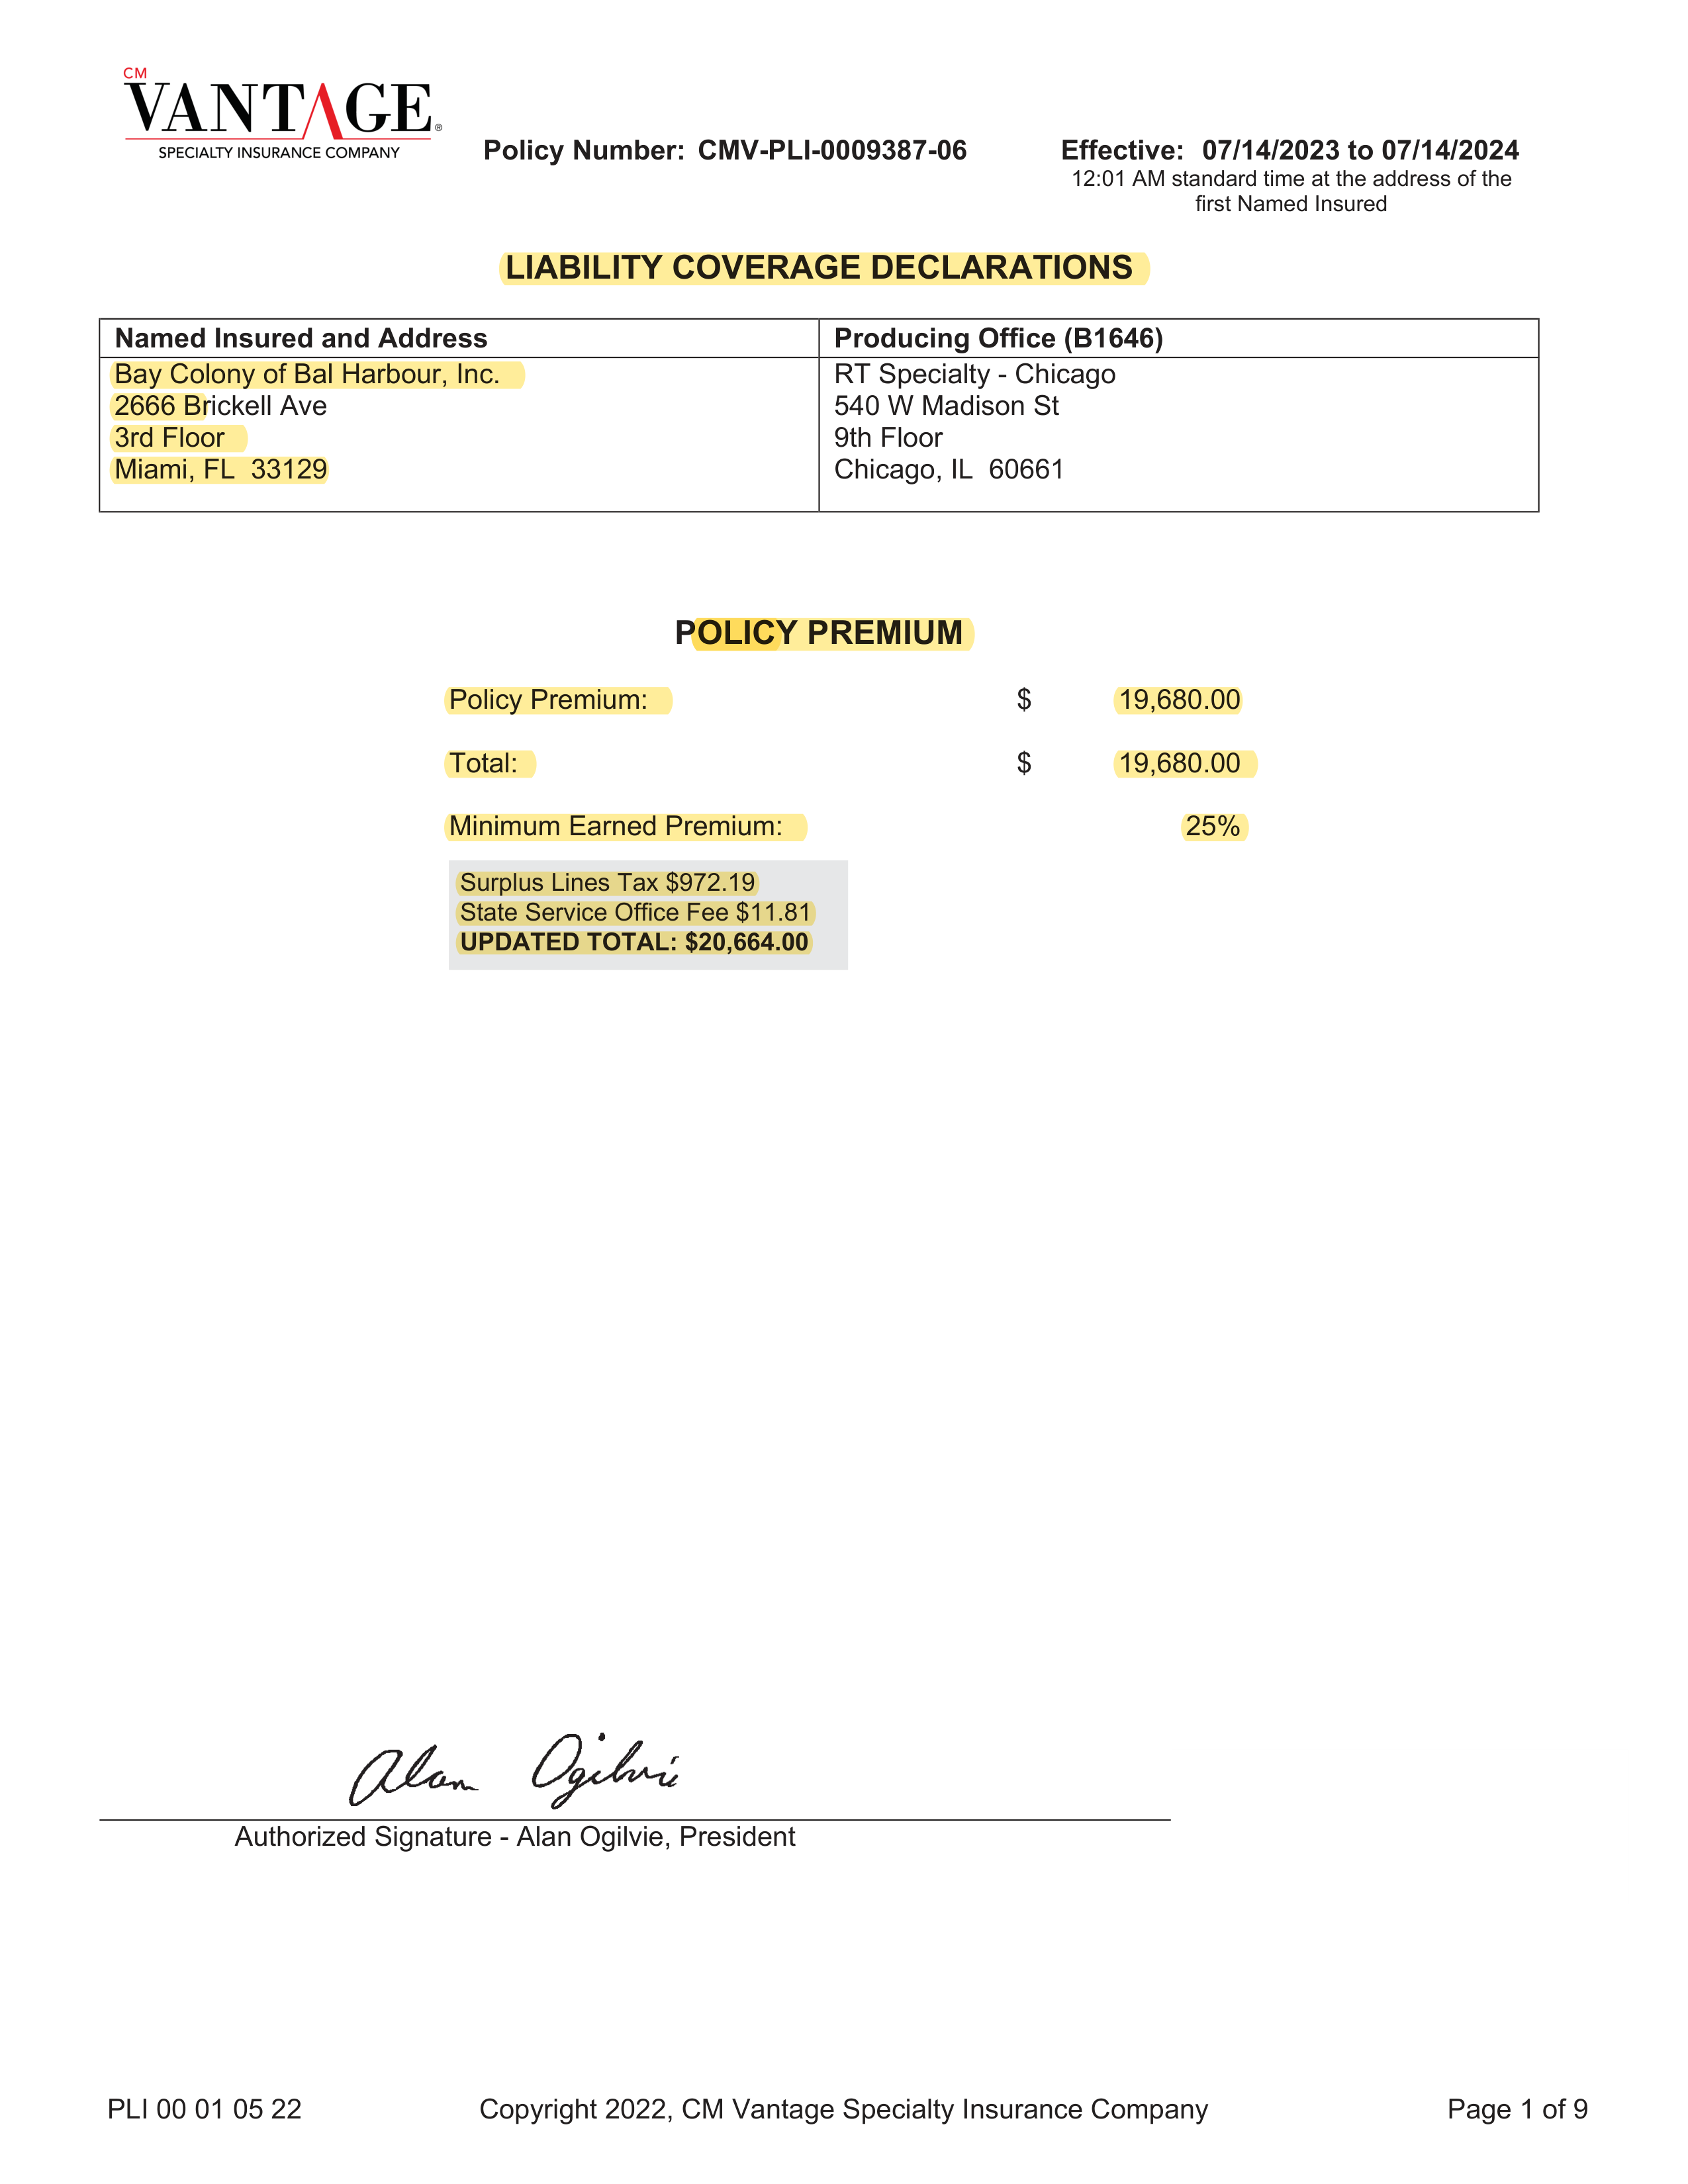
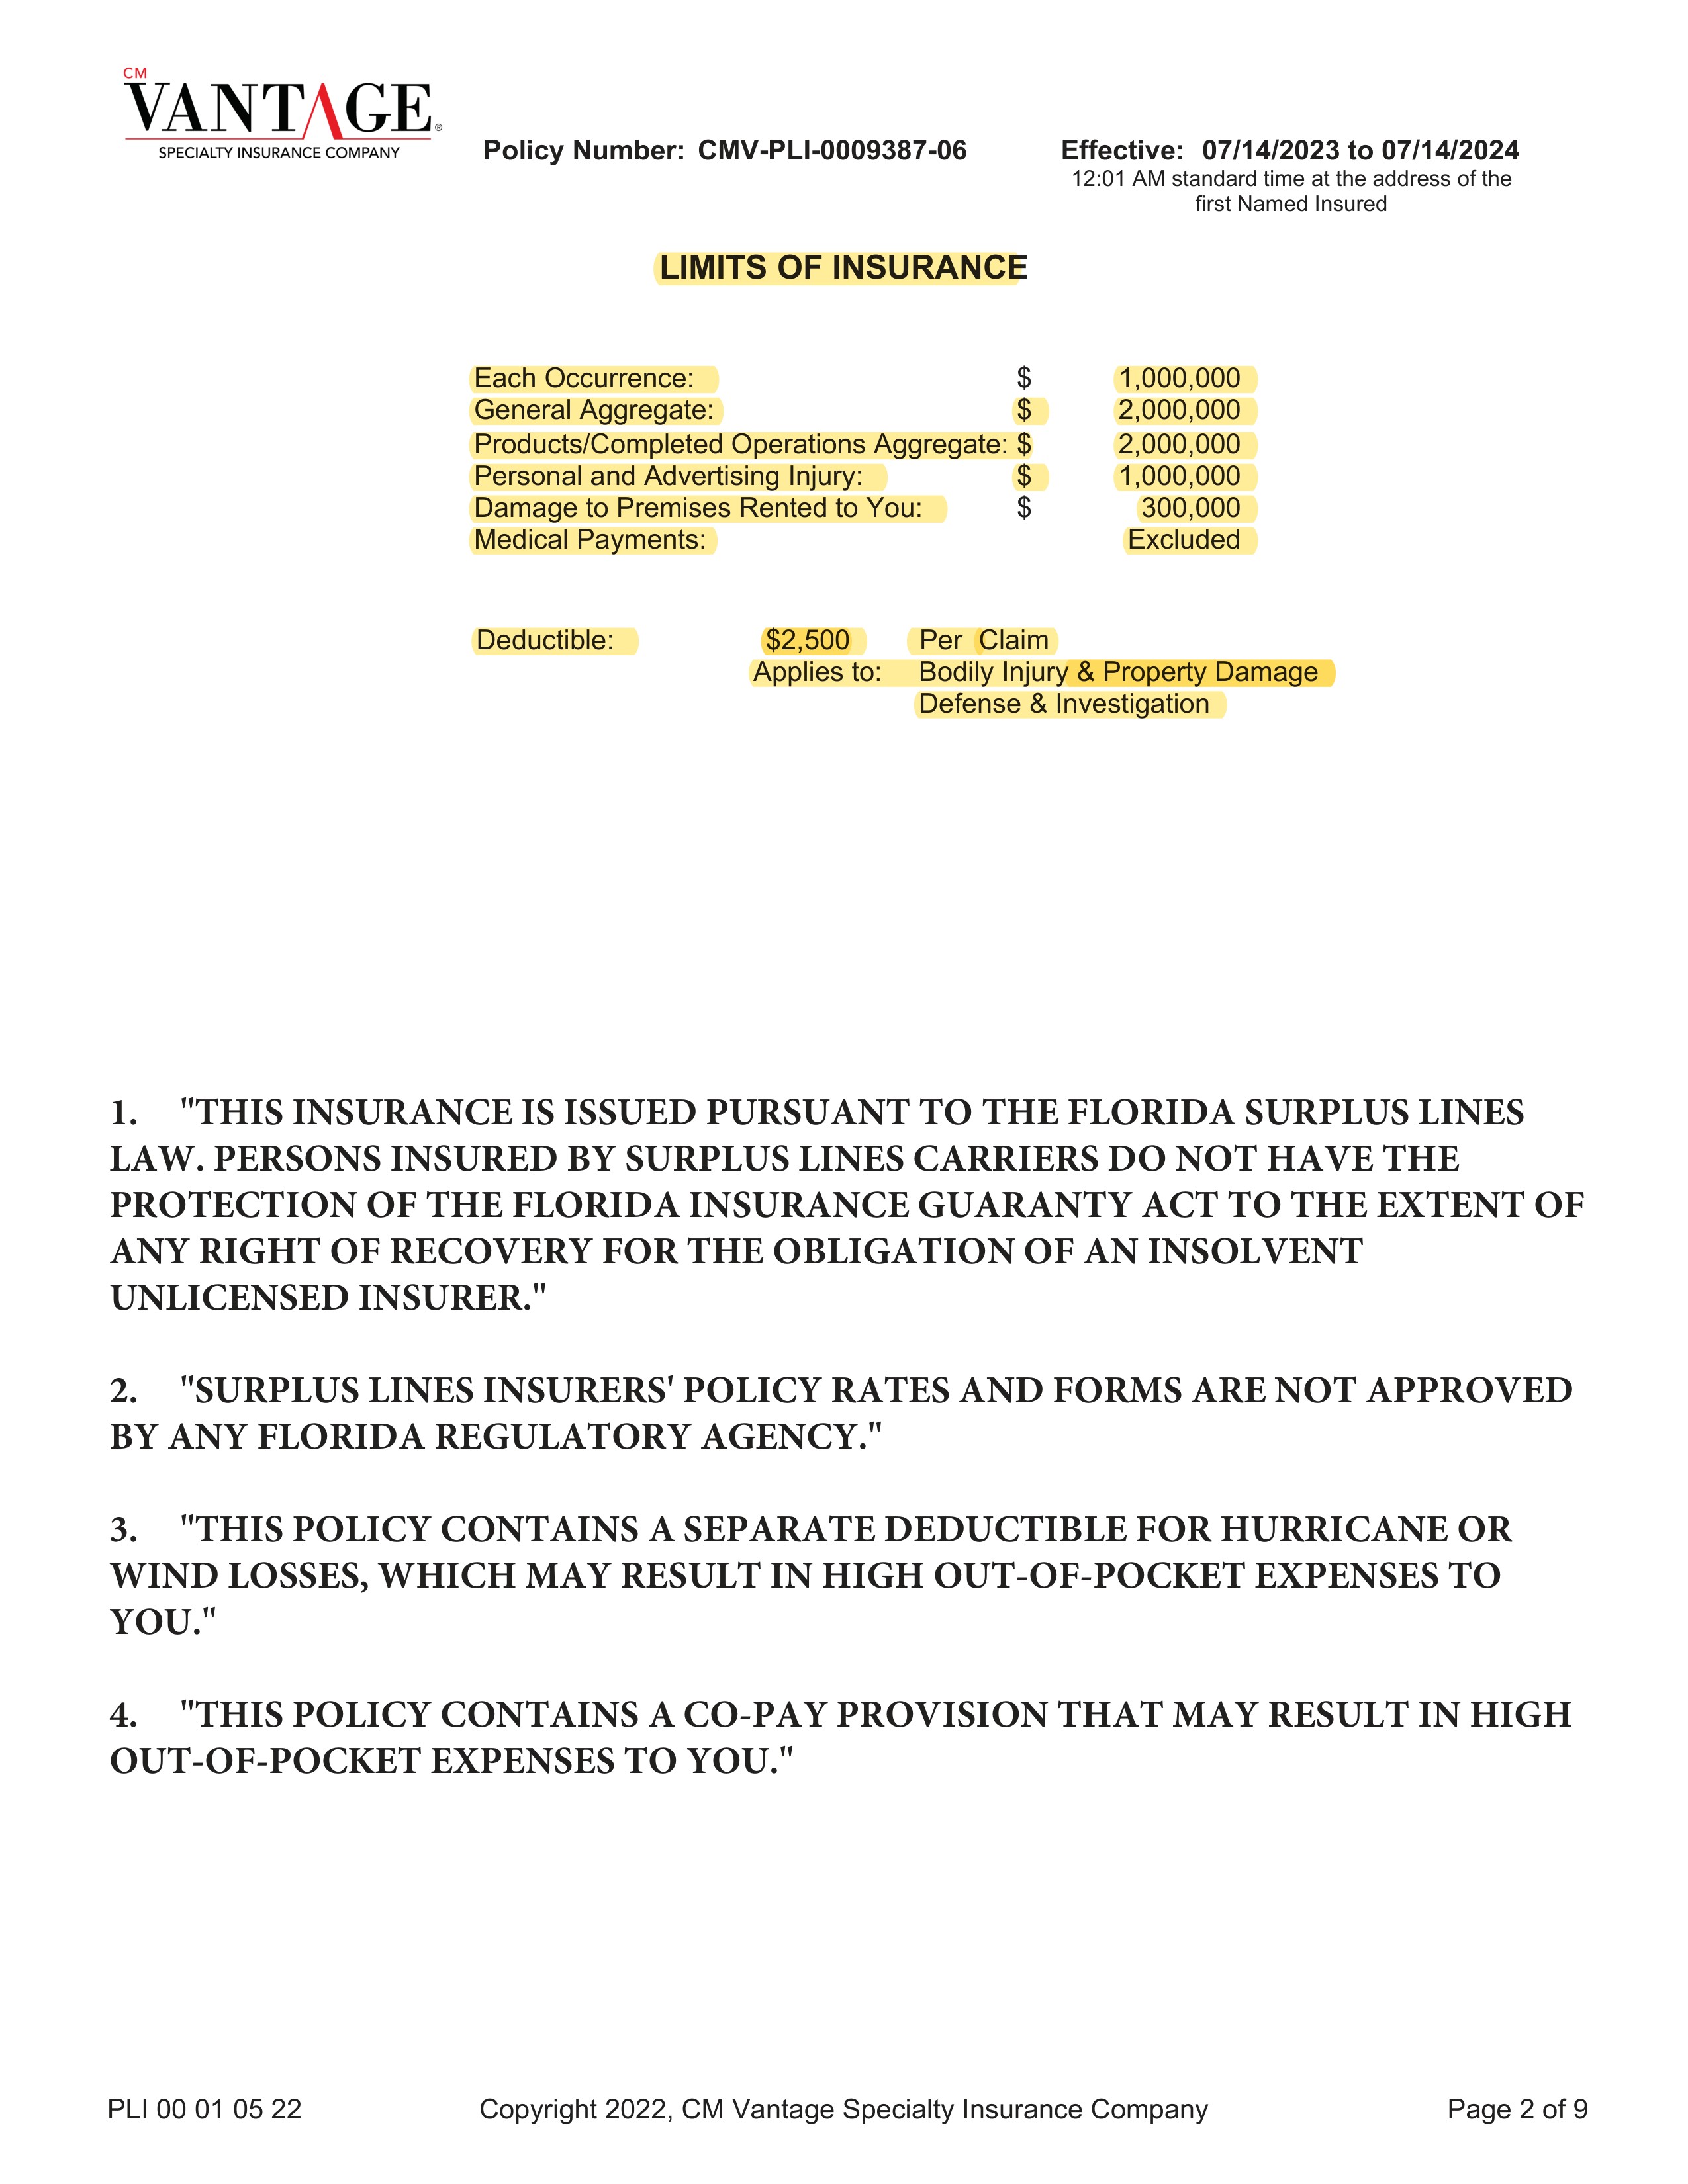

In [5]:
generate_image_html(base64_image_list) # base64_image_list

In [6]:
import base64
from IPython.display import display, HTML

def display_base64_images(base64_images):
    """Display a list of base64 encoded images in a Jupyter Notebook."""
    html_content = "<div style='display: flex; flex-wrap: wrap;'>"
    
    for img in base64_images:
        html_content += f'<img src="data:image/png;base64,{img}" alt="Image" style="max-width: 200px; height: auto; margin: 10px;">'
    
    html_content += "</div>"
    display(HTML(html_content))

# Example usage


display_base64_images(base64_image_list)